# Plant species identification using a TensorFlow-Lite model within mobile devices

## Table of Contents
* [Introduction](#Introduction)
* [Get the data for analysis](#Get-the-data-for-analysis)
* [Train an image classification model](#Train-an-image-classification-model)
    * [Necessary imports](#Necessary-imports)
    * [Prepare data](#Prepare-data)
    * [Visualize a few samples from your training data](#Visualize-a-few-samples-from-your-training-data)
    * [Load model architecture](#Load-model-architecture)
    * [Find an optimal learning rate](#Find-an-optimal-learning-rate)
    * [Fit the model](#Fit-the-model)
    * [Visualize results in validation set](#Visualize-results-in-validation-set)
    * [Save the model](#Save-the-model)
* [Deploy model](#Deploy-model)
* [References](#References)

## Introduction

Deep Learning models are huge and requires high computation for inferencing. Can we train Deep Learning models which require less computation power, are smaller in size and can be deployed on mobile phones? Well, the answer is 'yes'. With the integration of capability to train [TensorFlow lite](https://www.tensorflow.org/lite) models with ArcGIS API for Python, we can now train DL models that can be deployed on mobile devices and are smaller in size.

Where can we use them? We can use them up to train multiple DL models to perform classification tasks specifically for mobile devices. One such integration we did is in the ["Survey123"](https://survey123.arcgis.com/) application which is a simple and intuitive form-centric data gathering solution being used by multiple surveyors while performing ground surveys, where we integrated a tf-lite model to classify different plant species while clicking it's picture in the app.

This notebook intends to showcase this capability to train a deep learning model that can be used in mobile applications for a real time inferencing using TensorFlow Lite framework. As an example, we will train the same plant species classification model which was discussed earlier but with a smaller dataset.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABJ4AAAJuCAYAAADxUcjJAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7J0FdNXY2oZpe2rIwAAzg0OLa6kbdfcWd3d3d3d3dytWoJS6u7vjzgzjLu+/d04DLWQYael/7z3fs9ZDcuLJOWV9edfOTo3YxAEgSZIkSZJUFAsKCv5flTomkiRJkiTJ/1UpeCJJkiRJUqGUCoOqU/E4CIIgCIIg/pcRa57XwRNBEARBEMT/MmLNIxUGVadUexEEQRAEoQiINQ8FTwRBEARBKARizSMVBlWnVHsRBEEQBKEIiDUPBU8EQRAEQSgEYs0jFQZVp1R7EQRBEAShCIg1DwVPBEEQBEEoBGLNIxUGVadUexEEQRAEoQiINQ8FTwRBEARBKARizSMVBlWnVHsRBEEQBKEIiDUPBU8EQRAEQSgEYs0jFQZVp1R7EQRBEAShCIg1DwVPBEEQBEEoBGLNIxUGVadUexEEQRAEoQiINQ8FTwRBEARBKARizSMVBlWnVHsRBEEQBKEIiDUPBU8EQRAEQSgEYs0jFQZVp1R7EQRBEAShCIg1DwVPBEEQBEEoBGLNIxUGVadUexEEQRAEoQiINQ8FTwRBEARBKARizSMVBlWnVHsRBEEQBKEIiDUPBU8EQRAEQSgEYs0jFQZVp1R7EQRBEAShCIg1DwVPBEEQBEEoBGLNIxUGVadUexEEQRAEoQiINQ8FTwRBEARBKARizSMVBlWnVHsRBEEQBKEIiDUPBU8EQRAEQSgEYs0jFQZVp1R7EQRBEAShCIg1DwVPBEEQBEEoBGLNIxUGVadUexEEQRAEoQiINQ8FT0SVUKNGjX+oElOFKXutikwVNdSVoSSrAXU1JTTSkKHdRxow/LQ+zBp9AtNGDaVt/AnMm36GHn/HZnzYqJzivEYwa9IIOh/Xh5ZmbXysoQk1dVXINGXQUFNGTdUagprs2DSUlaCuVAOq7DxIkqxeCaIyiDWPVBhUnVLtRRAEQRCEIiDWPBQ8EVWCdLj0Pt8NnmooKeNjVRlMG9fF2O4dsMfeGpfcXODv7IhAZ3sEujog2M0BIe5OCHZ3RIibI/vMZOPCUBwX5Mu8UVjHTT7khro7M8XpbHlXRwS5OuGKvR32mZhglk5H2H1SG62Ua6CWWg3UUa2Bj5i1VZSgScETSf6/SRCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSpMOl98mDJyUo1VCGMhuqKdVAk/r1ME63K6708kDKkIF4OGQIvhgwAD/27Y9fe/vgl95e+KmXJ37y8cTPPdmwlzd+6smmMX8W9MQvzF/Z+K9s3i89mXzYi63LpnF/7c0/83XZNtj4T8J2e+K3vj3xa9/e+K5fP7zo3x9FwwfBz90O01o3QvPaSqjLwycNFdSSyaCprPxW8KREkgqrGvsb+LtWxd8LQVQGseaRCoOqU6q9CIIgCIJQBMSah4InokqQDpf+hko1oMKGHTRVsdi4C1J8PPCypw9eeLnjqY8rXnq74CsPZ3zvaosf3Kzw2LUH7tsY46W9Je46WeO5ix2+cbbFt87W+N7ZEr84WuBXR2t852iFl2zaS0cbfGFvg+9cHPCTmy3bjgWeORnhoYsx7rDx++7O+MbNBd+72+FrLzu88nLEF97O+KKXK77o64k8T2dMb90U7TSUoa6uClUVdWgoySBjx/xGZZJUKFXKlJr3oSWIyiDWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCZKh0l+pVAPKKvJWEIO6tUb4qL6419sT33i44RtvJ7zo6YBXPg742ssRP3o64CsvBzwc6IHPZ43F16vm4+GkESjyccMrdxd872KP75ys8b27PT53tsXzfp74ctUsfLNqIT4fNxyPe7P1PB3xtY8TXk0ZhFfrZ+HRnDHI7+uDZ16e+M7LGd96s32x+V8xv2T7/8rbBS/ZfP/ernBr9glqqcigqqwJNSU1oZWWMjtu+ZC32iLJ/25lSipMGVRqqLwjn8+DJnGowpYV5Oux+TJlmbDu+1V9Z1v/RoKoDGLNIxUGVadUexEEQRAEoQiINQ8FT0SVIBksvUclJSUoqyhBVbkGtOvUwg4PRxSOGITnPT3wrZcrvvF2xIuetvjCx5aNO+ArD3s8HTIA3x/aA8QEsV/wbSDkOh6vX4r8Xj3xauBA/DxmJO738ca9oQPw0+mDQPwN/BF5E38EX0PhkhnIGNATP21bx9bzxS8xl9n8m3i5Yy1yennha28XfMeDKS8eOMmDpy+9nfGylytyh/bCUp0OaK+hAU1+s63Mb4B56CTKwycKoMj/XoWAif22+aOvFf9W5Y/DqrwVIqkqqwlDvp6qsirUZGpQV9V4vzJ1qKmoCfJ1pY7j70gQlUGseaTCoOqUai+CIAiCIBQBseah4ImoEirerP4NlWpASbkGNNi4nVZzXBnQFw98euJL3trJy0Vo3fTcxwafe9ngey8nvHSxw3dLlgApiSg4dQhRi2bjm5uX8UtSOLInjcezLRuAy+eQPXYYni+cC1zzRd7qhYhdOAO/poTh/pWjyJ02HrhyEd+cP4b0JTPxo/8FNi8EmRNG4Al/nI/t9xtPZ7xiwy+8XfDK2xkvvJ1wt78HzlmZwLnJp6ivqgJl3lKLHfe7UgBF/neqJPxuVVC3dl181vAzwYb1P0FNjZpl/bCpCIGREDKxIV9HQ00DWi200KFNB7Rv0x4d2nV8Y9sOr21fNuzcoTN0uuiga6du0G6pjZrqNYVAS2wF9XcliMog1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAmS4dJ7VOLBE/MjZWX4tG+LwH798NS7J750d8XXni74ytOefbbBCy87fOXtjEcu9vhly2YgOwXBS+bhqKMD7u7eDjzJR+mG1ShYMAc/blqHouFD8XzkaLyaOBW5kyYid+Mq/BRxHfkHNiFt+CD8OH0GHg4fiQhvH/xy6Rx+y4xB3vjReODliu+83fGVlxs+93HHF8xXPm74wtMZX/X0QISDNYZptUJTNXajzI5bOIc/lbcSIcn/fJWVlIXWSh/V+QitW7eGkYERLMwt0MO8B8zNzKGnq4cWzVvg43r1heVVlFUg44+cqqiiXZt2MDE2EZa1trKGlYVVBfk0G2sb2NnawcbKBvq6+ujQvgNMTUyFea1atoKaqppwDG8f1/skiMog1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAlvB0t/pbIyu+ll1mH2btcOoX374Wmv3njl4YavPJzwpaedEDw9Z0PeAumpmwueTJuO32LC8ENYAJ7s2oFfI4KAV3fxaNc2RHt5osDDCw/79MXn7n3wbb8R+G3/AfyenojvU8IQt3I2Ent74bmXN/JcPPBo2VL8kRSNl/t3IcunN5708sYrb0984eOJl94e+JzJw6cv2b5/9fJCgp0NRrVohabK/LEj6XMiyf82ldnv+bPPPoOhoSFsbW2FIKlz587o0KGDMDQ3N4elpSWMjY3RtGlTqKqqCuvVrVsXBgYG6NOnD/z8/JCYmIj4+HgkJCQIlh9PSkpCSkoKduzYgebNm+Ojjz6Crq4uTE1NUa9ePeGx27eP630SRGUQax6pMKg6pdqLIAiCIAhFQKx5KHgiqgSpG8T3yVs78Y7Fa8mU0bN9ewT1H4BH7Cb2C0/318HTM28b9tke3wmdh7ujwKMnSpYtwu/+V/DzjUv48uZF4E4GHq1ZiTujR+P3eXPxcvAQfN1vML4cOALF48YjdflCfB52Ba8CzyF3SD8Uu7vixYrF+C0uBHeP70XSgGEode2F52zfz3t5CW/U+7zML3p640tvD/zo441IOxsMadkKjVXkj9pJnRNJ/repwn7P7dnfn5mZGbS1tdGsWTOYmJjAyckJPXr0QIsWLYSwiM/nYVHt2rWF9Ro2bAg9PT3Mnj0b33zzTdn/Au+nsLAQFhYWwj75dvn2+T5lMpkQgHH5tnkQ9b4wiiAqg1jzSIVB1SnVXgRBEARBKAJizUPBE1ElSN0g/qXK7MZXVgOWLZriap/euNOvD154lQuevGzwykMePH3n7IpfxkwCdu1G0Ypl8B83AgWn9+KHtAgkz5mKxzu34I9bV1A4eQx+3rwBf1w4g+iJo3FuSB/cvXUOP2VGIW/MMDxdMAtIj8ajgAvwmzERmUPH40XvkXjp3Rdf+vTCF9yePZk8ePLCq56e+LqnNy4bGcCp/seoXXbckudDkv8hSgU3fzatTp06Qrjk5uaGkydPoqSkBE+ePEFpaSlu3rwBHx8ftGnTRgib1NXVhfU+/vhj6OvrVwiefv/9d2Eo8scff5SNyeHBE29Bxdfnraesra3Ru3dvIcDiLal48MRDKVExiHpbgqgMYs0jFQZVp1R7EQRBEAShCIg1DwVPRJUgdYP4l/LgSbUGOtT9CHvs7VE4aAgee3rilYcLXno44invYNzTAZ97ueKFmzM+HzEcP585BkTdwrdB54DkWyg+uA6Jw/ri+eRxeD5vCkqG9cP3i+bi9+CbQMxtICwASI3FvSO7kDNjIn4NvATcy8YPcWH4JTgAv1+5isfjZ+BhTx489cMr7154xTs57+mDV7zFUy8fvOjdBwc6doS+qgzqSuxm/S+DJ36D/88eHyLJfyMPjsTARgyW+GclpTeth5SVxXnyZcXlxPl8yIOkrVu34PPPP0dkZCT27duHGzdu4MWLF/D19YW2dmthWfFRO/6InJ4eD57m4NtvvxX+D/jtt9/fCZvKw4Mn3nKKr8+DJysrS/Tv31945E5DQ4Odg4yCJ+KDI9Y8UmFQdUq1F0EQBEEQioBY81DwRFQJUjeI75N3wq3CbixVVVVQX0UZwzp2xu2BI1HUtz+eeLriiZczHns7s6ETnnk7CcMib0cUD++Nr7cux7eHN+PzVbNwZ0Qf3O3thofeLky2bE8XPGLrfzF+NL7cuwXfHDuIp6uXIWHYIGSOGoovli3Ci81r8fnOzfhi9za82rAe90aPxb3e/fCkVz984dMHX3v54Btv/pgds3dfxDi6YUSjT9GMPxrIjltNOAf5jby0/IZZajpJVpXy36CKiioaNvwUrbXbokH9hvjoo3po3rwlPvusMTTUNYVhy5ZaqFWzNurUqYtWrbTxySefQibjARL/ncrlgZKRkRH69OkHZydXeHv3gquLG3r37gNHRyfUrvORsC8Zky/POxs30DfE7Nnz8OOPP5f9L/B+8vMLYGhozNavgebNWsLCwhJdOnfFxx83hJqaJjsmNbYPHj7J5YGZ1HkTRGUQax6pMKg6pdqLIAiCIAhFQKx5KHgiqgQxUPq78tYTMhUVaKjJoKmihC6atbDQoAdi2Y3vvb498djbHV96uONbN1d87e6IV8Kjd7YodumBIndLlPrY4p6bJb5xt8OPHg74iS3zq7uD4M9uTnjl7IC7zrZCCHWXjT9wccJTD1c8dnVm6zmjyM0BuS52yGPe93HHy57eeOXjgx+8fPCLpw++7s2OoU9PpLm7YZFWGxjWVEdtlRpQZccuE86B3wS/uXEnyepVHsSoqWlAR0cP9nZO6NCBdwreCT16WMJA3wjNmraAgYEJLC1t0Lp1W7Rt014Y19MzwEd1Pi63Ld4iig9rsO2pY+XK1Xj69DkO7D+Ejz+uL0znIRAPhrh8HR5i6esZYtiwEQgNDUdeXgEyMrKRlZVTwcxMNi0zh83Px8EDh9Fau42wjy5dusHczAJ1PvqYbVMdqkwVFR48qb5WWVlWdnzlpeCJqBxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElSAGSn9bJd5aQwXqqipQVWM3sspK0K/3MRbod4evuyOS+vTEi9798UOvvvipV0/83NsTv/bxZEMP/NDbHT/2Y5/7ewN9mb29mGzYq8w+fJoPG/eUj/ctG+fL9e/F7A306yms+zvb7i9su7/09cLPbLk/+P58+qK0b2/csLfE4jYtoV+rNuqz4+MdosuPnQ/fviEmyepU3vqH97nEQxwzsx5o2UILbdq0g7GRKbp21RFaO+nq6sPQ0AQt+BsZmzaHnq6BEE5paNSEUg3eoojLtyd/HE9dXQN9+w7AjRv+mDhhCmrWrCnsRwiGlN8EQjzw4mGWnZ0D+vTpj6FDh2PIkOHCsILCtBEYPHgoXF3dhUCMH5OlpbUQlKmr15QHTWXbLi8FT8SHQKx5pMKg6pRqL4IgCIIgFAGx5qHgiagShEDmn8j7i+EtnmQqUFZnN5jqymy8BlpoqsGiUT1M7t4Ru83McMrKCtecHRDg6ogIZ0fEu7gwXRHn6orYMuOZiS5uSCoz0dWZ6YhkNwckutkJJrjZItbdFtEetmy6LTJcbJHJ5MN4FxuEuVnhtpsNrthY47ChKRZ06waXT+ujtUwZNVWUocJuemXsZl/GhspMpdc3wiT5/6W8JVKdOvVQr259IUziLZEa1P8EtWt/BFVVNdStW49Zn42rQ40pzpO3cJKyhrAef1yvVq06wmclJd7fEn/8rWIopKFeU3iMr3nzVkLrqj+TP1bHt6et3RYdO3ZB585d2Xgb4Tjkj9dVbOlUfh9Sx0cQlUGseaTCoOqUai+CIAiCIBQBseah4ImoEoQw6R+pBBm7aVZnN5hKauwGk6kkqwGZUg3UVK6Bz9SV0U5DHd0+qgn9BnVh1PBjWDSoD9sGDWDfoCEcmXxoVzbuxG6o39iATavPrAeHBh8J2jf8CHaffARbpiMbd60v14Vpz+ZbNKwDMzZdt24ddKxZG81r1UQtFWUo85ZZyjwk4x2Ly1VhN+Lv3hCT5P+X8tZPb/99lQ+XeIijzH678ml/9Zjom+1IhU7lVVfXhKqqhtAiSkp5sMSXlffbJJPJ5YEZl7ec4qHY29vlSgdPSmX/4xDEv0OseaTCoOqUai+CIAiCIBQBseah4ImoEsrfrP5deashmbIqlNgNqZJwc8vfZsVbXNSAjMvGVfib7wSVoMJDIKbsLdWYGuyGtLzqgjXYuFw+Xl5x+pt5bHlhW+yY2HGIN8jiG7b4ND7krbSU/7S1CEn+fyvv+6niNB7yyMMcHiRVnCelGGTJP/N13g6F+KNxMhU1IXhSU9UQAibeV9Mb1eTBE1tGvk/pcEwIxMoUtyvuQzp4Ui77H4cg/h1izSMVBlWnVHsRBEEQBKEIiDUPBU9ElfDuTeVfK7+hVWM3m7zFg7xzYR72qKnxlhDKwlBVXRVq6mpMdfaZDSXUYNZU/TPV/75q6sK2hO2y/fE3fb0tfxsYvyH+ezfwJPmfoRjs8FZPUvMrKoZE8gDrfcETf7xPXY23euJ/L7z1kih/tE/eEupNgMS397byfVLwRFQXYs0jFQZVp1R7EQRBEAShCIg1DwVPRJXwdqj0d+SdG6solwVPgjzckQdPqmr8jV08fOKfKwZNb6uuqgbNKlKDKbUPUTF8UvpbN/Ak+Z/h62DnL0IduTwQ4n+j8mDodfBUIRTiw7LgqexxOyFoKqf4GN3fCp74I6ziPsqk4In4EIg1j1QYVJ1S7UUQBEEQhCIg1jwUPBFVwtuh0t9RfkNbFjqVa/Gkyt90p6pcJh9/t+VRedWZmrKqkW9Lrdy2paTgifxvs2LwpPY3gqc3wZBkiycmf5xOHi7JAyYphT6elFUltvtm+9yKxyeXgifiQyDWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCVLB0l/LO0Dmr3Hnyjs+VlZWZjedb8tvfN+vmrIKVKtAqW2Xl3eI/OdvBCPJ/0yVasgfDy2v1HJvfBMK8T6i3l6Xy1spCX07qUi/lY7LwyO+bMVtv+vb2xaVWpYgKoNY80iFQdUp1V4EQRAEQSgCYs1DwRNRJUgHS/9cJSUeRv1zeafj/A10lVVq229b8aacJBVT/qisVFj0tlLrVkaCqAxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElSAVIv3vKn1DTJLkh5cgKoNY80iFQdUp1V4EQRAEQSgCYs1DwRNRJUgHNNWl2AqpOpW+KSZJ8sNKEJVBrHmkwqDqlGovgiAIgiAUAbHmoeCJqBKkA6HqkEIgklQkCaIyiDWPVBhUnVLtRRAEQRCEIiDWPBQ8EVWCdCj0oaXQiSQVTYKoDGLNIxUGVadUexEEQRAEoQiINQ8FT0SVIB0MfUgpdCJJRZQgKoNY80iFQdUp1V4EQRAEQSgCYs1DwRNRJUiHQx9KCp3+reJr7qXm/acqvLZfRU14Nb/UfFKxJIjKINY8UmFQdUq1F0EQBEEQioBY81DwRFQJ0gHRh5BCJ1EexHCVlHgg8xfXSkmukpJSmVX/mvsPpZJw3PJjl5pPKpYEURnEmkcqDKpOqfYiCIIgCEIREGseCp6IKkE6+PgQSt+MKopKNVReh01C6yWZGpTZUE1dHTVr10Kt2rVRu05tYShTLQukVFRQQ0kJMpkqjIxNYGBkDFVVVSgpf5jwiR+j1PR/Lt9ODXxcvyGsbezQoWNn4VxrKKmwY2fXoLzsevxdeQsqYaisWua7y1RW6fMhq0KCqAxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElVAxHPqQSt+MKorCY2cyNSF0UlVVF0KX2vXqoe/gQVi2fi2WrVvDhquZazBs3GhodWoP1Tq1oKwmg0bNmti5dw8OHDmM+g0bQFmFByQfphWRksS0fyoPhfh33qFTZ1y6eh0z58xj51AbNXhQxK6BkkxVUIXLQ7i/KX9sjw954KTCrsGbefLplVY4bulzIisvQVQGseaRCoOqU6q9CIIgCIJQBMSah4Inokp4NyD6c+WPTNVgN+kqaNy4MRo0aPB62l8rfTOqKPLWNDzc4OGTmpoGm1YDLbW0cO12AFLzs7H/5BHsPX4Ipy6fR3hCDM5e9YW1iwNUa6pDs3Yt7D14ACfPncUnjRuxdcXQiQ9VhJZK8kfwpFosvZnGlxGssBwfV4Kysgo0NWsKxyifL7UtUXFe2fbKFKfLAxx58HTjdiDmLlzCzlkNNXjopKqOGqry8Ont0IfLr08F3wqV+DR1dU1oaGhCVaZeYZ4wny3/9jbeXubP5IFWxfMkq1KCqAxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElVAxHJJWDJf4UCaTwcLCAjNmzIC+vj67Wec3ldLrVfTdG1FFUgyeeGsnLr8mbdu3R1BkOLbt24XPWjRBg8afoFmrlnDp5YWAyBCc9D2HRs2aQL2mJnbu24tDJ4+jYaNP2br8+5CrJMi3L7fCfoWQ6c1nYZmy5d8sJ/9utbRbY+So0ejYqcubbVXYHl+u4ri43GvL5vMWSHybnbp0wc3AIMxZsEgePCmz4+GPCarwlk9vBz88IJJ3RM5DMK4Kb9lUFkjxZeQhkgy2dg7sWMegbr36wn75dP4on/j4Il9Pvh35Y3mvp/+FFDx9WAmiMog1j1QYVJ1S7UUQBEEQhCIg1jwUPBFVwptg6P3y0InLQ6eNGzeiX79+QosnCp7+nuVbPPEhvyat27bDjaBArNy0Dhr1+KNoZddKqQbGTJ2I2LQkGJoZQ0VNFdsP7MP+U8fR4LNPhH6fKl7bt2Xzlfh+/2I5toyqmjwEM7OwQlBoGLx79nprOb4NMWjiLZrKz5NSCTJVeYuujl26wD8oGLPmL3j3d8KDKv7IHbsWwuN3PIwSjrncMmUK89hyqhqawud5CxcjOCwC9eo3lC/DgyqZurA9yXPmgSk7pr9q/UTB04eVICqDWPNIhUHVKdVeBEEQBEEoAmLNQ8ETUSW8c5P+luVbO5mYmGD79u0YMGAANDU1hY6uuW+vI630zaiiKAZPXDHA0eLBU3AgVmxcC406tYRpXH6t5yxZiISsVOibGgn9PG0+uAd7Th9Dg88aygMqtkyT5s3Qu29fzFu4ELPmzIGbhztqf/QRVNXV2TLy1mmdu3ZFK20tNGrSBEOGDcOylSsxcvRofNroM2FfderVhbmFBdZu2IDM7Bzs3rsXg4cOQTcdHaiInZy/Dp+U0KKlFgyNTVGnbj3oGxlh2oxZmLdgEUaMGoOWrbSFZZTZfvl6Hdm+/W4HYsqs2ejQrRsmz5qFBcuXw71Xb6jXqi2cQw3eEqrcb8jAvAdmzFuABcuWYwg7znZdusqXY/PadOoM7379cPbyFaTm5GH8tOnwYNtq2a4dlHhH7GyZpuz4Bg4dhrkLF2Pm3Hlw9fBC3Y/rs3nKkJULmaSk4OnDShCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSxBv+P5O3VOEBhpGRETZt2oRBgwahbt26QuCkrq4uzJNa712lb0YVxfLBk3xaDbRu1w5+gQHYtGcHmrVphYZNG6Fd104YPHoEUnIzsffYIXzavDHUa2ti48Hd2HHmKBo25i2eaqBV2zZYt3kTbgbexrFTJ3HszGkEhYVizoL58n6glJVQ5+O6WLVuLc5f8sWm7dtwgi1z+vw5xCQmCB2V88f6NGrVxOTp0xAcHorcwgKERUXiOFvOq3cvqKrLH5mTh07smJWU4eHlg8tX/bBtxy4cO3ESZ89fxMnTZxEUEobzFy/B0soGKqry9XjwdPVWAC7f9Me2fftwiC1/4ZofopNTMH/5CtRr0OD1m/s+/vQzTF+wADdCQnDmyhXsP3ECl/z9mbfgM2AgVOvUQTdjY2zdvx8JmZkofPAA5/38sG77Duj16CFsx8TaGid9fXEzOBhHTp3CqfMXcCswGLv3HUDbdu2FYxIevSsXNpWXgqcPK0FUBrHmkQqDqlOqvQiCIAiCUATEmoeCJ6JKkAcL0oqPR3Xq1Ak7d+4UHq/jgRMPm2rWrPkPQifuuzeiiiRv5SQGHPJpNdBSu7UQPOXeLcIlfz+cv34ZfsG3EBYfjd1HD6CrsR6UlJVQ66Pa8uDp9FGhHyi+bovW2hg1YTzsnZ1Qr/7HqNugPiZMmYy45CS4+3ihhooyan9cF7v378fnX32J1RvWoW2HDqj7cT0MGj4Mmbk5mDxjOpRUZfisaRMMGDoE4THRGD95EppqtULDRp9BSSY/ztfBE9O7Z2/cf/gYEdExGDRkKLRat0XDTxvBwspGCKRu+N9C5646wnptO3bCrZBQZBUWYdTESWjcshWasnNesnoNUnJy4ODhId++mhomzp6NdHZTN3XePDRs3hwfffwxdExMcOj0aUQkJsHK2QXq9eqhWdu2WL9jJ0JiY2FsbY0GzZpBtXZttNPRgV9QEHxv3oS5rR0aNm0KrXYdMGTEKCSmpmPrth2oW7eecC4qKu92Ss6l4OnDShCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagS5MGCtGLwpMNu6nfv3o2ePXsKYZPY2unv9+/ErXgTqmjyFk/iG9rk02qghZY2bgQGIDAiDJNnzcDEmdMwatJ42Lu74JPmTaFSSxPKqiqoWbsmNh3chZ1njsoftVNRgqqmBmTse6j1UR20bNMa2u3bwcPHG9HxcZg4bSpbT4aadT/C7v37EJ+cBAMTY2Gf3E+bNMbFq1ew99BBqNbURA2ZCiztbBESEY5+gwbKl1NWElpWydcRg6ca6NWnH3LzCzBl+nRo1qwttG4S3tKnpARnV3fExidi5OixwrJt2nfA7fAIHDxxEh9/xlth8Y7FVWBkaYmQ6BiMnTZdWE6rfXtcDQzE7iNHUOdT+SOANTQ0oFSzJnTNzBDAtrFsw0Zo1q7NjlUVC1etwo2QUDTW0hKWlbHlJs2Zg8ikJNi4ugpvzeP7UVJTZ9egHqbOmInYuATY2Nix36/8eOWdmVPwVJ0SRGUQax6pMKg6pdqLIAiCIAhFQKx5KHgiqgThJv9PFDsU5/052dnZYcOGDfD09BRaO5Vfpvw6f670zaiiyFs88WBD3r+T/JppabfBjYAArGbXVfOjj6CkpiqEQELH26pqUOZ9NbHxWnVqYfOBPdh1+ig+EToXl4dHPfv1xbbdu3D09EkcPXUS1/xvIr+kGJOmT4cy207Nj+pg5949OHX+HD5t2lTYvrKKMjRr18LRkydw5uIF1GvYQDiWHjbWCAwLRZ+B7D8X/n29Dp24YvCkhL79B+J2SAjsnJzKzkcZqkKn3jXQrkNHocXT3v0HoKGhiTbt2+NGYBAWLl8OdfYb4ufC32jXSVcP19h5z1u2XJhmammFqKQkDB07TtgeD6g0Pv4YarVqoXbdejh48hTOX72GT1u2ZMsrYfHq1UKg1USb9ynF+6mqJ4RWl/390aJNW6jWqg0Vvr+ytwfa2DsiKTkNo0aNEd68pyrjj4hS8FTdEkRlEGseqTCoOqXaiyAIgiAIRUCseSh4IqqEN+GCtGKwxF+Hb29vL7zRzsXFRfjMWz79/VZP796IKq7ya6qt3Qb+AYHYsHELPqpbXx5OqZS9+U5VHRqataDCxmvWqoUt+/diz+njaPRZIzZdE/2HDEZkXCyOnTqF4aNHwcXdHSPHjhH6b5owdTKUVJSFFk879u4R+nZq2LgRVNTV2PZVULNOHaEfJx5I1f9U/mY4OydHhEZFyls88dBJVPjuygVPAwYiIDgY5jbWQuu3mmybtXnIw5Zr1qI5rl33w/5DB6CmoYa27dvh5u0AzF+8CGqavMNzeajWQac7rgXcxrxly4QgydLWDgkZmRg0cpS8pZIqO+f6DYQOyNXYtncfPozzV6/i06bNhP3MZ+vxQIs/usc/165bV1jmop8fPmvcGKqaNSFjCvtj823sHJCSmo4xY8YJn/n1peCp+iWIyiDWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCfxG/H2KwRMPmPi4g4MDNm/eDC8vL9SrV+/1/L9W+mZU8XxzvYTgyf821q/fiNq1PhLeuqaqqg6Vsg6w1dU1IZOpQrOmJjbu3Y1dJ4/h088+RaPGjYUOw28FB6Hhp5++3p6BqYnwWJ0QPLHviwdP23fvEjofr8/WU1ZXFVpCadSUt3g6ee4s6pa1eLJ2sEdIZDj6Dix71K5MHlS9CZ5qoHe/AcjIy8WEGVOhoaEOJTatJm+pxYZWNpaIiY/BrLkzhdCqbYf28Lvlj7mLFkKNd1ReFjy176aDK/7+mLd0mfA2ug5duyEoMgpb9+xBrTp15PsVWtUpoX2nzgiOisamnbuE1k98Hg+sboWF45MmTYXPvBXV9HnzEZeaCgd3d3aeGkJ4xefJ1DQwdfpMJCalwN7eUZhGLZ7+fySIyiDWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCcKN+1/IwyWxdRN/7M7HxwdLlixB586dKXj6x765Xq1bt0F4eCS2btmOWjXrCGGIuprm676geAjFwxB1DXVsO7gPhy+eRdOmTVCvfn0cPHYEEbExsLCxQtPmzaFvZIhd+/bi6csXmDR9mvC91K5XF3sOHsA534uo37CB0F+Uioxtr2ZNnLvki4tXL6NO/Y/B+3PSZeuHRUdi8/bt6NxdB581aQwVNVUmD3DeBE/evfqg8O5dBEdHYOCg/ujUti06tW8LGxtL+F6+iJu3bqJjl07Csh06d0JwRDgWLV9WIXjqqNMd/sEhWLB8hdBHlKq6OqbMnoOc4hLMWbwEHTp1QjN2bfRMTLH70CHEpaTC3t0DSuw3yLfLl03Pz4dnr95o3a69EEi17dJV6Micb9fexRXNtVujTYdOGDZqNOITk4W38DVsKG/dJV7ft6Xg6cNKEJVBrHmkwqDqlGovgiAIgiAUAbHmoeCJqBL4jfhfqaLC+ydSBn+0ilu3bl20b98en3zyCQVP/0r5NdPS0saVK9ewetVaocUT7/Ba3vG1PAgRWj+xYa3atbFu6xbsPnYEzZo3FwIhSzsbXL5+HcHhYUL/TifPnsH2Xbvg539TCJ6U2fdUi31Pm3fswN6DB4WwSqbBtqcqg0atmth3+BCOnjiBj/l3yJblwdTytWuQkJqCKzeuY/DIEUIfUW++O/kx9+k/EBExMdhzaD/OnD0F3wvncPrkcURHR+Kq3xV4ensKARdflgdIl/2uYeqsmVDlraL4Y5ns96LVti1O+/pi1qLF8r6f2PTPWrTAvKVLERYTKzxGd+zsWdwICkZAWBh6DxgANc2aUCoLwbrq6cGXnXtUYiL2HD6C7ka843QlWDs44tzly/Bn6x0/fQbnfS8hNDwSe/YdYMfSRVim/NsF35aCpw8rQVQGseaRCoOqU6q9CIIgCIJQBMSah4InokqQBwvvl4dOPHzioRPv24kPpZZ7v9I3o4qpPMSpW/dj2Nraw9jIFDVr1RGCpvLBkxCGKKkIj9yZW9vA0t4enzT8FJqataBesxZ09AwwfdZsLFuxCoOHDkfHLl1hYGSCbrp6wnx1tpyJWQ9YWttCs1ZtYRpvYaTBxk3MzGFlY4uPPq4PJaFzcCV81rQZ+g8ZgqkzZ0DfxBiyskfo5McrP+YBg4cILaO8+/ZCD0tzzJk7C8uWLcGEiePRqWtHNPi0AWTqMqjIlPFxg/pwdHaEvpGB0OeTsC1lJaFzegs7W+ibmkJNUwM1VJShzPZVt0ED2Lk4Y9b8eVi8fDnGTZ4EUytLqGjIOwnnAZn8bXvyFloTp0/D0FGj0EyrlXw6s6NOV4waNw4LlyzBgkWL4OntjWbNWwiPHr4vdOJS8PRhJYjKINY8UmFQdUq1F0EQBEEQioBY81DwRFQJ8mDh/YrBE1fsVJyHT/wztXj6t/LWN8rCtZU/TldTCJ3KB0/lgxA+n3c2rqaqDlW2jKq6JpRlasK0Oh/VhWatOkKH5IIqMmG6hmZtoY8j3kG5Et+mmjqUVdUgU9cQ1n29fJn8e+J9Oqmy77ji98rH5Z/7DxqMyJgYOLk6CZ9r1tZE7dpsP/xtfOyzChuqqLLfiaaaoDpTVUMmvE1P6Kxcmcm2zYMg/tgfH+frCfvj81VlUNXUQK1ateStpIT1+Lyy+cI22Djbj2pNTajXqgklvm8ZfxOgDEpqMsg01VGzTm12bLWETtZ5v1b8d1s+ZJKSgqcPK0FUBrHmkQqDqlOqvQiCIAiCUATEmoeCJ6JKkAcL7/ftFk9iqycKniovD5946MFbNampVgye3oQhKlBWkgmdj/OOx/mb73hQxEMlHiLJH2Fjywj9JfFH19j3xIMsJl+G96sk7EumCiUVtj1l+dvzePgkbIPJx8VwSZAHPK+/Oz6db6MGBg4ZivjERHh4ewjBEm/dJC6nJIRK7PciU4KqhqowX5XP59PL5omh0esQ6S2V1FQh462ghDCJ/b7YZyFY4vN5CFU2nY/zRwd5SCVTV4OKOluOL6sqY9eBXSv+G2XT1TU02LXlLcnkrcl4x+Llr295KXj6sBJEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqhDfhwp9bPnjirZ3Kh098ntQ67/rujSipDKUaKq8DJ0E2LhWIVPjM5C2YeFgkDHnH76rycSW2rLJM/pmHU3ycT+dhlBA68RBKSUX4LIRNZUNhGcnvjSsPnvj2ho8cjYSkZOERNv4onrKMn0fZcspKbDvyFkZ8nkydHa8a3y9bhvs6YGLbK9+CSZT/lthy/JE63o+VTF1d6NycB0k8fHpHNl1FCJ3k8qBJVejHiu9XVWi59eb3WhY88dZd7FylpODpw0oQlUGseaTCoOqUai+CIAiCIBQBseah4ImoEioGDNLyVk3yR8LkAZQo/0wtniovDz3Kv96fByCiKoIVp/Fw6R/LtisETuX2y6fzaUJgJcyT+t64bHk2n7eM6q6rj7Hjxwsdh6vwUIu/qU5cjv0WlHgrODaNB0O8g3PhM1MIlYTlxN+LxO+G/57KlufrVlBFwreXeUv+KB9/7FBUfJtd+WtZQSUKnj6kBFEZxJpHKgyqTqn2IgiCIAhCERBrHgqeiCrhnZv/98hDpvLB098PnbjSN6MkD+/kwYc8FOEtj6SX+5D+ndBFSRjWEAIc3tqNj/MWW1LL8u2JgZnU/PfJt8nXrSC7Nu/49jJSllteCKv+xfGQVSNBVAax5pEKg6pTqr0IgiAIglAExJqHgieiSqgYDn1IpW9Gyf9GeeAoKjWfJN+VICqDWPNIhUHVKdVeBEEQBEEoAmLNQ8ETUSVIh0QfQumbUfK/UCV5qyTJeST5JxJEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqBOmQ6EMofTNKkqRiSBCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSpEOiD6H0zShJkoohQVQGseaRCoOqU6q9CIIgCIJQBMSah4InokqQDok+hNI3oyRJKoYEURnEmkcqDKpOqfYiCIIgCEIREGseCp6IKkE6JPoQSt+MkiSpGBJEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqBOmQ6EMofTNKkqRiSBCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSpEOiD6H0zShJkoohQVQGseaRCoOqU6q9CIIgCIJQBMSah4InokqQDok+hNI3oyRJKoYEURnEmkcqDKpOqfYiCIIgCEIREGseCp6IKkE6JPoQSt+MkiSpGBJEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqBOmQ6EMofTNKkqRiSBCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSpEOiD6H0zShJkoohQVQGseaRCoOqU6q9CIIgCIJQBMSah4InokqQDok+hNI3oyRJKoYEURnEmkcqDKpOqfYiCIIgCEIREGseCp6IKkE6JPoQSt+Mkv9NKklMI8m/J0FUBrHmkQqDqlOqvQiCIAiCUATEmoeCJ6JKkA6JPoTSN6Pkf5M8eKLwifx3EkRlEGseqTCoOqXaiyAIgiAIRUCseSh4IqoE6ZDoQyh9M0r+56pUQwXKyjKoqKgKQ3nopAKZTA1qqhpQVVV/PU9JSUVYXmo7JMkliMog1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAnSIdGHUPpmlPzPVVmJh03y708mU0WTxs2h1ao1Wrduh7ZtO6BB/U+grMyXpe+Z/GsJojKINY9UGFSdUu1FEARBEIQiINY8FDwRVULF0OBDKn0zSv5nykMn3pKpXr36sLGxw6JFS3D27HkEBgYjLCwCt28H4+SJ05g0cQpMTXug/scNhZZQ8rCKb4NaP5EVJYjKINY8UmFQdUq1F0EQBEEQioBY81DwRFQJ0iHRh1D6ZpT8z1N4bE5Jho4dOmPTpq3Izs7FDz/8VPaLqcjXX32LuNh4rFixGlpa2mx9pbL1pbdNKq4EURnEmkcqDKpOqfYiCIIgCEIREGseCp6IKkE6JPoQSt+Mkv9pKkFFRQZLS2tcueqHn378Rf5D+UM++DO+/PIr7N2zH9266kBZSUXo/0l6+6SiShCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSpEOiD6H0zSj5n2YN6OrqCY/U/fab/Dfyx1+ETr+XLffjjz/j6NETaNVSS9gOtXoiy0sQlUGseaTCoOqUai+CIAiCIBQBseah4ImoEiqGQx9S6ZtR8v9f3peTvIVSDdSv3xAb12/Gd9/9gN9/++MvWzpxeDD1++9/CMPnz19g9ux50NDQELYnf+yO/J/zX/ThRRCVQax5pMKg6pRqL4IgCIIgFAGx5qHgiagSKoZDH1L+Kn7yP1EeJKioqAoBlIuLOzLSs+Q/jr8ROkkRGhqBbl27s22X/97f/j2Q/72W//1Ih0xSEkRlEGseqTCoOqXaiyAIgiAIRUCseSh4IqoE6RvLir77ynzyf1H+Brv16zbiu+++F34bf/zO/xFG/xHPnj3H+PGToCpTY9tVgoqy/A15/8nyY3z/car8/6n0177TIkmJdxJf1fJWTlK/HXmwVH7/5QMnUYKoDGLNIxUGVadUexEEQRAEoQiINQ8FT0SVIH0j+UYlJXlrFXV1dbRq1Qrt27dHu3bt/oV8vQ7/wo6C7f/K9h/aTpJ2eJ8d/jvs2LEzWmu3hYWFFUJCwuQ/jD/Kgqd/wU8//ST0EbVixSqsXLkaq1evY679z3HVu676S9dIu7KiKyu4umpc8dfytwpWdFVFl6/C8kq7EsuWcVdgwoTJ0NJqDTU1jddhE281J7aco+CJqGrEmkcqDKpOqfYiCIIgCEIREGseCp6IKuHtoOlteWsnHj41adIEVlZWsLGxgbW19b/QVlIbG7sPoL2g7fu0/ac6SGr3Pu3+O3SwdxK+iyFDhiEjQ/6Y3e+///sWTz///AsePHiEe/ce4OmT53j27AWePn3+RjbtQ/nkrfHXsv2+9u15gs/+931cOR8znz59gRcvPmfjT7Fxw2Y0b95S6O9JJlODirKqoLISBU9E1SPWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCVJhU3l56MRt06YNHBx42MLDIpt35NPfq42dtJIhz9v+VdBjDzs7ttxr2bJvhSuC5deRmv+XOgrav6NDmWy+/Rvt3/bt9aSWqW7ZcTg4ODOdMGHCRGRl5Qi/C3mH4fLhP+Wnn37G/fsPBZ89lwcVL19+gZcvvmDj8qHw+d8orl8F8mP5az////FlRV++IzuHfyI7lz9T+ryl/FwI9B49eoIfvv9JCCmNjEyE/yd4yydq8UR8SMSaRyoMqk6p9iIIgiAIQhEQax4Knogq4e2g6W3FFk/NmzcXgid7e/vX8s9/Xx5wOP2FPACR6/hnOn5oXQSd3qdTVeoqqXMVKLVdKZ2dXYXwbuzY8cjJyRN+Fzx0+rfBE2/x9Pz5S3z55Tf4/vsfhTfk8SEPK374QfTncpafTn5w+ffwLxW/Tx4uXrp0BW3btmf/TygJb0Wk4In4kIg1j1QYVJ1S7UUQBEEQhCIg1jwUPBFVglTYVN7yfTxpa2vDxMQEBgYG0NXV/YfqM/l6FdXTqwoNBfX/Sv0PpdFrDd6nwX+qxujSRQd2dk6IiIgWfhdi6PRvgqfvv/8BkZHROHbsJE6ePI1TJ8/gxInTzFM4fvxkmXxcVJxWTbLjelt+rHJP/D2PvvHoez3+7zxS0SPveOyfefgYDh06KvfwP1Rc79ARHDx4GAcOHBL6tzIz64GamrWFoEmmokbBE/FBEWseqTCoOqXaiyAIgiAIRUCseSh4IqqEt4MmKcXwibd+qlOnDurVq4datWpBU1MTNWvW/JvWYtb+QL5/27UqY63/fevUqQs1NU3Ur98Qu3fvw6+//Cr8Nv5t5+JfvvoSc2bNF7ZXt+7HqP9xA3xcXdaTtp5g/Wr048rJrtvb8mtZGT/66M+s97flx8aHqjJ19n8Cf2OhPGwqLwVPxIdArHmkwqDqlGovgiAIgiAUAbHmoeCJqBLeDpn+TB4+8eBJah753y9/K5lMJsPAgYNx5859+Y/jH7Z24kEVNysrG7wDd/m2eWgpDy7J/yGVlCVDJwqeiA+FWPNIhUHVKdVeBEEQBEEoAmLNQ8ETUSVI3lS+R7H10z9XDCDI/0zloeJnnzUGf5Trd/6sHedvhk/iY3nff/cj1q3bgAYNPhG2K/b9I75yn/xfUSa8zY6PU/BEVAdizSMVBlWnVHsRBEEQBKEIiDUPBU9ElfBuQPShfPdGlPzPkocI/LtysHdEenpm2S/kTaj0p5TN++233xEQEATd7nrCdvgr9rk8iKgYWpD//fLvVAZlJgVPRHUg1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAkVw6EP6bs3ouR/lvJAQRnqahro128AEhKS8Pvvf7wOnniw9Ouvv+M3Lhvn8um///YHfvzxZ1y7dh3W1nZlrZxkQj9A/HEsvt0avHUMkw/Jf6P0d/b/p/y4+Hf69iN3FDwRHwKx5pEKg6pTqr0IgiAIglAExJqHgieiSpAOiT6E796Ikv+58o7BnZxc4et7GXfv3sdvv0k3efr22x9QXFSKvXv3C28Y5J25q6lpyFs6KUkHEOT/lu8ET3/yvRNEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqBOmQ6EP47o0oWTW+bnXyJ5098+nKzL/bckZ8nEpZWQWNGjVG3z79hdfoR0ZEIy0tA/n5hcjMzEZIcBiWL18JDw8voU8n3vm8upqm0OKJv15f3tJJeh+k4kkQlUGseaTCoOqUai+CIAiCIBQBseah4ImoEqRDog+h9M0oWXl5wCMZOJVXWbXsUTfpbZSXL8dbrfDtqqlqoFatOmjSpCmMjExha2sPZ2dXODo6w8jQGA0bfCqETLwjcR5Uyft0Eh+vk94+qZgSRGUQax6pMKg6pdqLIAiCIAhFQKx5KHgiqgTpkOhDKH0zSlbeqg6eyvvmsSn+HSqVBUr8LXjy75WHTDxs4tt/e12SLC9BVAax5pEKg6pTqr0IgiAIglAExJqHgieiSngTDH1opW9Gycr7IYMnrtgCSv52OvlQbNUkjP9Jnz4kWV6CqAxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElSAdEn0IpW9Gycr7oYMnkqwKCaIyiDWPVBhUnVLtRRAEQRCEIiDWPBQ8EVWCdEj0IZS+GSUrLwVP5H+DBFEZxJpHKgyqTqn2IgiCIAhCERBrHgqeiCpBOiT6EErfjJKVl4In8r9BgqgMYs0jFQZVp1R7EQRBEAShCIg1DwVPRJUgHRJ9CHmH1NI3pGRlVHkreFIrN15Rvpz0Nv775CEaP5+/rcQ2Poz/OddYPPc308r/Df7T46z8eRFEZRBrHqkwqDql2osgCIIgCEVArHkoeCKqBOmQqAa7YeWvx1d+Lf/89vzyn/9UpYqfldhnJaV3b0r/PBjgb1J7e9qbm+B3W/GIn/nxlZdP5749/W3F7VQ87oqKy5RfR+o4yh+L+LmiSjVklVLYhpIMqqqaUFPTYEMN+VvmhLCJD98oY9NkyqpQFoIYJaiw6ypTVmHK2LgMMiU1KEvs4/3ybUnIfh/y3wiXXTPhM5/OlV8j+XcufV24fDvi9RR/H3xdeefm7HiFcypTxt+uV05+rm/Nl4cw4nGJ+5Zv98+UH0PZOVRQfm78eIRz4scrnp8wLt+PfF9vr/s+5dt9d1r5z+K0itOF/QnHXHZMTPFaCcfElufy9XiH8Hy+1Dm/rXw7/Prxz2/Oq6LitXp3fVGCqAxizSMVBlWnVHsRBEEQBKEIiDUPBU9ElVD+xvW1SjWgLFOGqroqUw2qampQ4TfuymU34fxGU4XdyCqzG0plqZviP5FtVybj8lBL/mY0mUwDamo1heBECEiU5Sor8UfD+Cv6y908i/sXrHhTq8Tm1+C+niYuV355vv77FNcTAzK5b4dn0krtT2I5fvPOz6UsFFBRYuerpP7n1njLcvNkyppQV62Fmuq1UUuzDmpq1oamhibUVNWhKlOHGpeNc9WZmuyzhiq73jI1qKnIoKGixKyBmqoy1FZj21GtyT7XZNvVqLCf8srensa/Kx5mse+Gfz+iPNziwRYPLWVMNZmMWYsdSy2osn2osmOXKWmwcXas7HuXVJnvTxPKKrXZb+MjNqwDmWptqKl/xKwFzZp1mB8x68mHtWqWk80XrcnU0GDXgP2e2e9WpsKPSY3JryE7BmV+PKK1y6zFjp/tm52jPMR5E7Lw34OSMvsbYcrYeamyaytj11aFnYsy3y67vnw6/52rsOurpqbCllFm4/yzXL4dZfa3o8KORYUNhd+Z5O+lzD+b/pYyfo5q7Ptjx6CuUQcamvJrpaquKf9bVme/ORn7ftjfM19Glf/tCbJzZr8BGfs7lKmJsmvD1lNh25Sx/wP4tpXZukrsnLg12PmL10F+PjykKv/7ryhBVAax5pEKg6pTqr0IgiAIglAExJqHgieiSnjnhla8qWU3kzX4DSa7YVZSlbFxFXlgwlvTqGtAraYmk92YarKbbVV2M8qswW+oZcrCZ5kav8GV33jzm1OuCg+dVPm4/CaVt85RZTe48gChDpuvzvZfPgSSQZkHEPymWbNsX2y7Ndg+hOPh4Re/GeY3xRoakLHj4uPyY2XLiDfBPLDij5opq7EbY95yo7x8mnw6D1BUZPLjlt9Mlx03OwcemKmqsWNWU2E34uyasHMVrhGXn7dwnZTZtWHrsxt8ZTW2bX5NhGNl2+PXRIPdwGvw68X3J2+5Iw9hakmqplIb6lxZnQpqqH4kqKlWF7XU66G2BlOzHmppfoSaGrXZPPbdqPBQhYcrTHZuqmWqK6ujJg+f2HcgY991bXZO9dj3WFtWEzXZPjWU5fvk+/5za75WVUVTHrqw68bPl8vPVYWdt4zvg30HKkxhXAigVKDBro2muio7Vq4KU7mcSmXycRVosmXUeZimwfYnDNWhyqapaaq8Vp39LtTZ70NNU62c6m/UYJ/Z96bOvldVptpbqvIgqkwelokqM+UtmuRBUQWFsEgeHgnhmoqMHSsPbvh3K5/Hfzfq7Fz470lVTQmamsrsd87Oq5YMtWqpQV1dHuLw+erq7NqwZVTZ3wdXTZ0dG5smY9OU2OfXv7Uy+TQVtowKW4YPlfnfFfuNiselxI6HB08ytdrs98r+NtjfhTq7Lho12e+B/UZ5YCyEhK/PkY/z42G/W/53IoSj8nOXsb9/vl3+N61ek/1+2fHy378SHzL58cv4371wLbji329FCaIyiDWPVBhUnVLtRRAEQRCEIiDWPBQ8EVWCVPCkrKqMup/URaPmn6FBowao90k91G34MT7+pAEaNv4UnzVrhMYtuJ+xZT7Bp00b4JMm9dm8j4XhZ+xz42YN0ax5Q7Ro2YAN66N5i7poqVUXHTo1go2tIXr19kLPnt5w9/KAmYU52rZvhybNmqL+Jw0FG376KRo1bYJmLZujhTazdTNmUzTTaoymrRqhScvGgk1b8Wl8XnM0124mjPPp/Pj48XObtGjMttOUHQNbpnlFmzVrhubN5OMtWrRAy1bN0bpNc7Rrr8WOtTU7rlbsuJuw6Uw+ZPtv3vIzNG35KRq3/ESwSatP0VSLTRNsJAwbl81v1OITfNaiIVvmEzTT/gyt2jWHmZUFeg8YgqHDx2Ps+FmYPG0hJk9dhElTFmLS5IWYOHmB4PgJczF23GyMHjMLo8fKHTdhjjB9wqT5wvIT2XD8xDls3nQMGjIWffoNRd/+w9n4GAwfOREjR0/GqNFTMJo5csREDBo4EjbWNtDSbgotdtzWlgYYNmQAJo2fgqkTZmL61IWYNm0Jpk5bjKlTpZ02bQGmTZ9b5hxMnTELU2ZMZ07FlJlT2flMwuQpYzFx4giMHTMYo0b2Y/Zh9sKYMb0wYUJfdtz92bn2x+TJfdmyfdiwD/vM7V0mmzalLzvHfpgwtT/GT+3H7ItxbNo4Nn/0BG+MGu/F5MM+GD1uAHMQRjFHjx/CHM4+j8CosSPYNRiKESP6YdhQbwwa5IYB/Z3Rv58D0xIDBvbA4CGWGDrUCsOG22DUKHt2rRyZThg71o1df3a8Ewex4xnGHMqOexi73sPZeQzBiJH9MXBQL/Ts5Qo3NztY25iiU+fW6NhJC7r6HWBs2g22dibw9nFky7F9D+mJwUN7CUNPb3voG3ZA67aNod2mEbRbf4pW2p+w31dDtGRDLfZZuw2bxmze5hM01W6AJlr1X9tUm/19tWa/KTavRWv2d8Zl0zp0aQkbB3P0HzQAI0aPwZjxEzF2wgThs6uXM3pYm0KrbQs0ZX8THbu0R3eD7nL1ddBNtwvadWyL9p3asXkd0EWnE7p2l0/jyzq5OmL4qKGYMHkMJk0dx4aj2e90HMaNH4Xx48ewazuAnYcWVHggrFS+9SEFT0TlEWseqTCoOqXaiyAIgiAIRUCseSh4IqoEqeCJP2KnZ6yLfoP7wtLOHDqGXdCN3Uh302+Prvrt2JBp0IbZmn3WRhe9Vuis+8auelrsRlYb+katYWisDUMTbRiZaTFbwNVDD2vWTsPJ03tw4uQ+7Ny7CQOG9GE3vZ3YjW4HdqPbEV11O0JHrzO7Ie4CXbZvPeNO0DPpwGwPXeN26G7EZTfNRh2ga9SxbD7TmI93ZNP4PKahXP5Zjy1nYNQFhkZdBfk4V9+wM/QMOsOADQ3ZZzMLfTg4W8LD2wlePV3YuBUMjLuyc2HHYdSZHQ/bB9uerkkbdGfn1d2U2xq6XLM20DdvK7dHe2Y7GFjINbRqCyOmrZsR5i2bj0vXgxCVmI/0whcoePQDip78hMLHP6GIWfj4R2Fa9t2vkVrwEom5TxGf9RjR6Q+QkPMU6UVfIPf+d8Ly+Q++R2bJK8Sk38P10BQcuRCAQ+f8ccYvHDcj0hCWVICE7AdIzHqA+PS7CGTTVm/ZCJdeDrBxNcXYKUNx7sp5ZOYVoujeczx4/iPuPfsNd5/+ijsS3n3+K+69/BEPPv8GD774Cg+/+BKPvvgCj794jqfMZ58/w8Mnd3Dnbibyi6KRmR2M9KzbSM++ybyMzFxf5BReQX6JH/KLryK3+BJyi/i0i8guuIisggvIyr/Axi+w6ReRV3QBOaXnkF16lnkOWSXnkVF0lp3PScSlH0dcxgnEp51HQtoVJGfeQHrObXYuocjKi0ZWbjwychKQmhGF2LjrCA4+jps39+Dqte24cnUzrlxbgJu35yEkfClCI5ciInYlElLWITFtI5LSNyE1cyvSMk8hp+AWiu6EofhOOIpKo9gxxSAjOwLxiQEIibiIcxd2Yu2G6Rgz3gP2jl3g4m6AiVMHYfnqOdh7cCPbx3n2f/VtxCQEIiLmJq7eOIX1m+fDo5c5nNy7w81LH3bOnWFh2w6WTCuHDrBx7ARbp86wde4CSza0YJ97OHSEuX3715qVaW7XDhYO7WFqow3PviZYu2UurgdcQWpWKgpKC9m1zkN0QjjOXTqBmfMns331gIN7Dwwa4Y1xUwZi/LRBgsPG9oKrjyXcfKzQZ5ALRozvh/FThqH3AE8MHzsQh9nfa1JaLErvF+LRs3t48LgUDx/fRX5BNopL8pGalgw3dzfh/xDeWoqCJ6IqEWseqTCoOqXaiyAIgiAIRUCseSh4IqqE8oGT+IgQf4zGwrYHps2eClcvJ+iZdIWOAQ97WjO10N1YG7rGWsyWbLwFdIyaQ8ewOboZNhPUMWrG5jWHoVkLGJm3gImFFkytWjJbwNqhDUZNcMOy1ZOweMUUTJg2lN0Im6NT99booKOFDt3kduquja56bdj22sj3adRC2Fc3vh+DlkLY1U1PGzr67Jj020LXgC1nwI7LUIsdays2ncmHzO6Crdk8thwPogTbQc+oHfSNOsiDJIO20GH7MzbvDkcXW7h5OMHZzR7Wdj1gbNad2Q36xp2EdfWN20LfrA30emgL6pu3hoEFs0cbNmwLQ8u2wtDAkk2z1GZqwchaCyY2WrD30MeSNQtx7VYIolMKkHXnS+TxAOnxz8h/8gsKnv6Kwmdycx/9hIy73yKl+EskF36BxIKXSC35Eln3v2PL/oyi578Ly+U8/AEJ+c8RGJ+PCwHxOHY5FEcuBeNiYAKCkwvZvCds3edI4dvIfY6Lt4MwZtY4mDqZwK2/M5ZtXIKAyHAk55Wi6MkPKHkKlD6Xe+cF86Xcu9zP/8D9L37B/S+/x4OvvsbDr77Eo68+x6Ovn+Ppl9ynePj8LkruJyGvOBBZ+f7IKriJrMIbyC66hNySSyi4exVF968h/85FNu0UMvKPISXnMJKzDyIp64AgH0/LPcTWO4yc0kPIvnOQDQ8gm41nFh9Ccs5BJGQeQELWESRmnERSxjmkZF1Ges4NZOQGIDM3jA3DkZbNzis9ELFxvggJPYDAoO3MrQgK2YKwqPmISZqLhNQFiGfyYWL6QiRnLkZK5lK2rRXIZMeVW3gFBSX+KCy9zYbByC0KRVrObcQl+yEs+iwOHF2GWQv6o98Qc3j20cP0Of2wZedCHD3J9hPui9TMcHYsUYhPDkBI5GWcPLcLsxcMh2dvY3j00oFHz66wd2kDS/uWsHJoBWtHLdg4a8PWpTVsXLRhxbRwbgVzp5Ywd2zx2h5lWjCt2DxLNnTy7oTJs3vj8Kk9iE6MQF5JNvJKM5GUGY1boZewYNlUuPe0ZsdpiT5D7DFolCNGjHfDqEkeGDzaCe69TeHqY4R+Q+0wY/5wLFg+AROnD8KkGUOwfd8qto3L7HuJQ0FpBvv+MtgwCzkFKXj49C6KSvLfCp4qPnJHEJVBrHmkwqDqlGovgiAIgiAUAbHmoeCJqBLKB0+8rxqhXxsVJXYTbImR40ayG+Ee0DXqjO6GPHjioVMz6Jk2hZ5ZcyYfb8amNYGOUWN0M2wk2NXwM+gYN4K+eVMYWjaHkXULGFo1YzaFgVUTdiPdDq69DeDGbrzt3A2ga9oGHfWao6NuM3TQbS7YiX3uYtgK3YzZPk14wNVcrmFz6Bg0R7ey4Ol1+GSgzea1gm6ZekZMPiwb1zduLQ+MTNrDwKQDDE07wshMrqEpbznVDjp6bWFsrgdXDxe4uLnCw9sTLh7OMOmhw+wKQ5OObF2maXvombeBrrm2oH4Ptm0LbhtBPfZZz5ztt0cLJrtGTANLJrsGLj2NsWHHGlwLCEVkcj5Si79A7uNfkPvoZ2RzH74xh33OevAT0kq/RWrJN0hlw/S73wvTch6xdR7/itwnvyLn8c9IKf0S4Rn34ReVhUshqfANTYV/XD7C0u4iPv8ZW/9rpN75DomFX+F2Yh7W7zsAxz4eMHUyQL/Rnth5dC+CYpKRwY4n78FvyH8EFDALn3D/YP6Owqe/MX9G4bNvUfT8CxS9eIriFw9Q/PweSp6XouRZKVuuGLn3cpBdGoGskuvILLyGDGZ6gR8ymJmFN5FVdIt5A+mF55GcexQJmfsQk7YL0dzUnYLxmXuRlL0f6fmHkV18DNklh5i7kVW8A5nFO5Gay+ZnHmSeQFLGWaYvUniLp+wQZihSsoKQnBGAhNQbiEm4jPDIEwgK3o3A4K0ICl2PsMjViIpfgJjk2YhL4c5BfOocJKTNZtuay9ZdjrSsjcjMOYDs3NPIyfNFVs41ZObeQGrOdcSm+iIi4Sx8b+zAmi2TMG1eL/QdYoKx01ywdc8cHDuzCTeCTrHjC0FWYRQS04MQGH4BF64exMr1MzFyvBeGjLbH8HH26DPEFLau7WBm2wKWjtqwcWkLO/bZ1rUNrF1aoodzM5g5NZHr3ATmb+vUGBZOTWHp0hRWri3h5NMFs5eMx4XrJxCRGIjolCCExt3A4TM7MG76QAwc6Y4hY93Rf6QDeg21hHNPPUEnH13Ye+nAxr0LvAeaYfrCQVi6fiLmLh/Nxodi1pKRWLNtHk5fPgC/oHO4evsMAsJ8EZ14CyX3s5GTnwZnN6ey/094/2pvQicKnojKItY8UmFQdUq1F0EQBEEQioBY81DwRFQJksGTTAlW9pYYNX4kLO158NQFuvwxNhNt6Js1g755Mxj2aC5o0IN9NmsKXdMm6G7c6I2mjaHfoykMbdiy1s1gYC0f50N9qybQs2JDyxbQs2iFrkZN0dmgCTrqN0IHvUboyOyk3xhd2LRuRjzYYts3aYruXMOm6KrXDF27t0K37q2h070Nk7d6agVdfbY9g5aC+oatoG+kBQMmHzcw0oahcTsYmHWAcY/OMLXsKtdaPjQ07wR9k46wc7bC4OFDMGDoYAwbPRIDhw2AEQ+d2Hr6pu3YNWjLbCM8Yqdj2kqumRa6m3PlQRQf1+3RktmM2QS6Fk3YObNzsGyG3sPsse/4HviHxyA2sxRpJV8h78nvgrmP35gjDP8oU/4555F8Xt6TP5D/VBTCkIdQaXe+QUTGQ4Sm3mfDR4jLe46Egpds+tdsfR5u/Y70Oz8hMvsRLofEYvrSJejhYg6nXuYYP2ssTl26ioTs+8i9/wOKHwPFTyC0fhJ89gfzd+ZPKHn+DYqeP0fBszsoeJLP9p+H/Cc5zFzkPc5B1r1kZN4JRWbpNWSVXmFeQ2aJHzKL2bD4JjKL/NnwOtKLLiAx9yhiMvYhOn0PYtL3svG9iM3aj6S8w0jJP4qsopPIKz2NvDvHkHtnH3MXckp3IaNgj9AiKi3nFFJzziE12xdp2deQnh0khE9pWYFIzbyF+FQ/9v/kZUTHnUZE1CHmXkREb0ZU/BrEJC5EbPIcxCXPLgud5iApYw6SM+chJWslMnO3IjvvADJzTiAr5wKysv2QnuWHuNSLCI45Dr/gfdh/cikWrR2BERMdMWSsDVZtHs+u4yb4hxxHUuZtZOSHC8Pw+Cu44n8EG3fMx8Tp/TB9/hDMWjgIcxYPxrhpHnD27gZLx7bw7m+EIWPsMGysA4aOtYVn/+6wcm8FS7cWzJawcG2BHq7N5bqINmXTm8LKrTmsPVqhh7M2eg6xxfqdi3Hk/C6curwPR8/vwILVEzFj8Qis3DIDq7bOxMqt0zFnxQi49zOBuWN7to0OsHBpx7bXFl6DTDF98UAs3Tge81ePxLxVIzFmujdGTfXG4vWTsHr7HLb9+Thwaj38w84iqyAe6TlJcHZ3Lvd/CgVPRNUh1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAnlgyfhMTvhLXA1YONojQVL52PwiIGwc7ES+lDij9cZmLeAAQ+dLJrDiMmHvGWTnmlj6Jo0QncmH+qZNRZa+QjBE9eWLW/XQh4+MfWE8KkZurN1u5o2QVeTxuhs9Bk6Gn4i2MnwU3RmdmHTdIx4mMWWN+WP8DVDNz2mrha66bRhtmZqQ0e3JbrrNRcUAyh9g1ZC6CQPo9ixG7eDkXknGFt2hYkVkw8tu8DcpjvMrHWYuugzwAcTpk7EuEkTMHPebAwfOxQGZp2Y7WDI+24ybcPOrTW6m7H9m7WETpndzVtBhykPoNjQogV0LZqyYWN0t2TXRgifWmH0tIE44XsWQdFpSMx5isy7PyLvMZDzCMhl5jx8I//M5+U9eWN+mQVC4CQfivN4MJVU+C3i879CQsHXSC76Dml3fkTW/V9fr5v76A8kl7xCZHox9p66AO8h/WHnaQbP/vZYum4FbkXEIDn/vtDHVMlTHjTx4OkP5m/MX9lnNv355yh8eg+5j7PZPpOZScwEYZj9MBHZ96ORcecWMkp8kVl6EVmlbFhyGRnFXD82fl0Io9IKLyIu6yii0w4iOv0gotIPISbjEBJyjiO54BSbfwbZxeeFR/Ly7pxBbulh5N7Zg5zS3cgo3IW0vP1IzT2K1JyTSMs9K4RPqVk3kJp5GymZAUjOuIWElJuIT7qK2PhziI45hqgYtp+Y7YiKXY/o+MWITpyH2KS5iEuZh/jUeUhMn4ukzPlC8JSVvw3ZeQeRyY4nM/si0jOuIj75IkJijuNa0G4cu7AGa7ZNwvhZnhgyzg5zlg3CvhNL2Lz9iEm9gtS824jPvI7whIsIiDyFAydXY/yMXpg8ux/WbJ2GNVumYd32mWy9YbD37AZHb13MWzYCKzZOElyybiwGj7eDnU9H2Hi1h5VnW1i6t0YPN22Yu2qV2YrZEj1cWsCCDS3dtNh4G1i4dMDIqT5YsHoCFq2biLkrR2P09J5YyfZ79sZuXA48hHM39mHH4RWYMGcg7L0NYOXWma3PgydtuPXXw+SFvTBvzVC27mC2jREYM9OdLeuNjftmYseRBdjDzvXw2bXwvbUfkQn+iEuNglNZiyf+fwkFT0RVItY8UmFQdUq1F0EQBEEQioBY81DwRFQJ7wue1mxcjXWb12LlumUYOLwPjC06wcC8FQx7tIKRZSsY876LLHgY1RL6Zs2hayp/9I4/iqdv3hxGVi1haNNcCJqMbJvD2K6FMBTDJwPr5ujeoym6mjVGN7MmZTZGV1P2uUwdHmjxbbLtC/swaYauumwdXS2htVN3rm4b6Bu0hoGhNvSZvJUT79TcyLg1jEzKOjg3bgNDk/ZCaydzHjLZ6MDUqpsQPlna68PCTo8NDTFoeF9MnjkZE6aMx5yFczBszEAYmLWHoXkbdr7tYNSjLTtfsX8n/jidXH12HfjjdgYWbeR9O1mxaVYtmM2E1k56lo1g69kVS9fPx9WAQEQkFCEl/5UQBPFwSQid/iR44oGRGECJoZMYPL0OoYRQCci4+xtSS35h/oz0O78i68EfwnbFbfBhzqOfkFL8HAHR6Zi/ej3c+rqwYzNB/9H9sO/kUUSkZCDzzgsUPf25rJWTGDpxv0fJ8xdsO8XIfpiGrIcJbB8xyLwfxYbRyOLD+2HIunsTGSUXmGeRUXwWaUXnkFpwmnkBaYVyk/JOIzbjCKJSDyEq7RAiheFhJPAgqfAcW+8CckouIf/OFeSVnmfjx5BTug/ZxbuRXrAdqXm7kZp7AMlZB5GQfgjxqSeY55GQelUwPuU64pKvIz7ZD/GJlxCXcBrR8UcRGbsLETEbEBm/GFEJ84R+nmJT5gvBU3z6XCRmzkdS5kpk5u1AFg+esnmLp4tISr6AoLDDuHRzBw6eWop12ydh8hwfjJ7sjHnLBmHHwbm4cH0rbkUcQ0zaFUQkX2Tjx3Hl9n4cObsOk+b0Qf8RNli6biJ2HV6OXUdWYN/xtVi6diKs3Tpj2AQXHLuwAef8duDkpS04zsbnrBgK1wF6sO/dGU59u8G+VxdYuLdBDzceQIlqo4dLK7nO3NYwd2oNx5666D3cCn1GWKPnUEuMn+2D/adXIjTxIrvm1xCWdAVnrx/Ais0z4TnAgq3TFua8Lynn5rD1aothk20xfXFPzF01APNWD8SEue5YvX0MLgVuQ2DcEYQmnUB4whncDDuGsFg/RMWHwNHV8fX/JRQ8EVWJWPNIhUHVKdVeBEEQBEEoAmLNQ8ETUSWUD574o3b8hlFZpgwHVwds3bUVB44exImzJ7HrwC70HugptPgxteoEU5tOMBTe2NZG6ONIlz9uZtJKUNesNXg/RwZW2tC3aQF92xYwZPIWTwZ2zWFg24xNbwY962bQsWiKrrzVkzlv/cQ0Y9NMm6J7mbpCP1JsG2ZydQybolO3xswW6NpN/qhdd7120DdsL7RoktsWhiZtYSTYmo1z28DAhD9q1xFGFl1g3KMLjHp0FuxhqysET3Yuphg9YQgWLp+HOQtnYtrsSeycPYTgiQdORhbcNsLQkAdQ/Bx7tGHjco2t2sPYsgOb1lYIofSs2HWxbMNsh25mHeDR3x2b9/DH7JIQnXIf6cXfI58HSo/KBU9l8s9/FjyVD5xeh1B8Gaaw/sM/5PJtlF+vbBn+qF7W/R8Rm/kIxy4FYsysGbDwsIB9T2fMXb0UfuFhSC64h4JH36L0+W/y4EkIoOSP2hU944HZXaTfy2DGI/1uFDLvRyP7biSy70WwYTCy79xAZvEFpBeeRGrBESTnHURS7n4k5hxCYvZBJGQdQFzmfkSl7UFEyi5EpuxGRPI+RKTuR3zOcaQUnEF60Xlklfgit+QykwdPx5FdvA+ZhduRnrcFydlbkJCxmV3LLYhM2oGIhD2ITDjEPImoxDOITb6MhPQbSMy4icS0a4hL9UVM0mlExO9HaPQmhMYuQXj8PEQmzkdU0kJEJc9HDG/1lLWEbXsd289+ZBccQ1beaWTknENU7BGcv7QWO/bNwtI1IzFtbk9MnOHBfi+DsWX3dBw5vRw3gvYiPO4M2+45+AUexEnfzdh9eDGmz+uHXoMsMHZqL+w+tA7Hzu/GodPbcfT8LixYNRbOPbti0drh7LexH2GJJ5mnEBhzHNsPz0Wv4Waw9mzPvp8uQusnK/e2sHRrAwu31mzYGlau2rB2aQVL5xawKNPSmXdk317Yrmc/ffQZ1gML147B+Zt72Pd+Awk5AYjPuo2b4WexevtMuPc3gjlbx9SR9yfFH91rCa8h3dFvrAkGTeyBXiMNMXaOE/afW4BAdo1Tiq6h8Ek4cu+z30peAJKywxGecJv9v2En//+EgieiihFrHqkwqDql2osgCIIgCEVArHkoeCKqhPLBk9Diid8wqtQQ+njauW8nzvqew5kLFwSXrloCCztDmFp1h4WjPiycdGFk1Ql6PdpD17wdupu1FdQxbQcd89bQt2batoRemfp23OZsnNsMejbNoWPRDF3Nm6NbD/64WkvomrUQ1DNhy5g0g74pb+nEW1SxbZi2RDeDZujYtTE6dmmGLl21hfCpu25b6Bt2EDoOl9uOyTsS54/GsWPgmrSBLpve3YgdH1MYCm/MayuET+Y2unB0t8DwsQMwfe5EzF44FaMmDIa1o5H8MbsePHBqXRY88ZZPojyUag8Ty46wtO8OOxcDWDrqwdi6M/QtO0DXkl0fSx2YOdpiyvzFOH7xJkLjC5CQ/ZLdtP8qBE/lQycxcHodPFUIjCoqPmr39vBthdCpbCiux4Os5KJvcTu+GOv2HYXzQB+Yu9ui18iB2H70ICJSM5FZ+gLFvNUTb+3EH7d79jv7/BMKn36FrIcPkXInE8klcUgtjUT6nUhk3YlghiK7NACZxVeRln8WKblHkJi9G3EZ2xCbsRUx6dsQk7YV0czwpM0IjF1f5gYExbNpqWzZnKNIzD8hhE+ZxReRXXwJOcXnkVV0DBkFu5GetxlpuRsQn7YGkYnL2fVcxdyI4NgtzJ0IiT2AsIRjiEm9iOScW0jNDUQKG8ZnXEN06nk27xCCorfgdtRiBMXMRnDcXIQmzEdY4jw2nIOwpPnsONciKXsPUrIPIyXrOOJTjuJW8FYcODILi5YPwpRZXpg0wwNLVw/Htj0zcOLcKvgF7EZ4zElExp/FjeBDOHlxE5s3DxNn9IR3P1P0HNADi1ZMgu+1k7jqfw4Xr5/G2SvHMW3BEAwY3QOHzixEZMox9tu4gOS8S+wYzmHfqcXoNdwcZk7asHBtIw+ayoInPm7t3hq2btqwc20JW9cWsGHaurVkw5Zw8NCGg2cb+AzUxbjpbtiyfy78Qo8iMvUqYjL8EZV6Exf9D2PRujHwGKAPx14dYe7cDKaOjdmwKSzdW8DKqyUsPJrDmg1Hz7bHsavLEJl5kn3/AXj8XSoefp2O0hfJKH2Wya5tMGydreT/nyjx/1MoeCKqDrHmkQqDqlOqvQiCIAiCUATEmoeCJ6JKKB88CeGT8DaqGujcvROWrlqKMxfO4exFX+YlHDx2CP2H9IS1oyl6D/HA0PH94NbXESa2ejCy7g5Dax2Y2hvAysUU1m5GMLRrBz27VsyWZbZgNhfUtWsGXduW6G7VCt16cHmH3NrQM9eCnlkrGJi2gr5JS7mSwVNzdOmqha7dtIVWT3qG7aFn0oHJOwDnsmmCrZlsu2yoaywPnN6Wt4LifTw5upuj9wB39B/qgxFjB6JnP1eh03EDc97CSRtGFtowtmzL5EFTB6F1k9zOMLftDicPC7aOC3oPcodLL1sY23aDoU13WLpZY8SUyThw+gL8w9PYDfpDZBb/ILw1TmztxK0QPPGWSsyKLZUq+jpIYr4Omd6yQgD11me+n5icVzh3Ox7jF86DlZczzJxtMH7uVFwI8EdcdgnyH30D+SN2PHj6A8XPfkHh0++Q9fAZUu7mIakkAcnFUUgtjUBmaTgzGFkl/sgouoLU3DNIyj6A+MxtiEpZh8iUNQhPYiauQWjCagREr4Rf+HL4hS6DX9hy3IhYi7DUXYjLOYaEvBNIzDuJZLaN1NxzSMs9yYYHkZKzA8lZ65GYsQrRSUsQFrcYIbErERS7DrdjNiEwdjuCYw+wfZxAXMZVpOQGITUvhBnMthXApl1h+z6K29FbcTN8EQKiZrP15iAwZh5zLm5GzMSFm+Nw6soknL4yG+evLcbVW6vhF7Ael26sxqadYzFttiemzvbBinWjsXP/HJy+uBYhkUcRlXAGUfGnERB6GBeubceeI0swaVYvePYxgnsvI4yZ3BM7D6xFUIQ/W/42QqIDcTXgIuavHIsZi31wKWCd8Jhh9p3LyLl7BYk553Dw7BL0G20hhE12Xh1gy/t6cpeHTrw/Jxt3bdgzHT214OStDWef1nDwbAV7j5bC0NFLGwNHGmP+ikE4dGYVO+fjCI67wK7BZfhHnsPxS9sxe8UQ9BnJ/qZHGMGhZ1uYOTWGmWNjmDo1gonzZ8xPYenZHKNn2+HAhfkITD6ApOIrKHwRhXtfpuLeq3Q8+aaYHW80bMTgSZmCJ6JqEWseqTCoOqXaiyAIgiAIRUCseSh4IqqE8qETV2jxpFQDDRo1gLuPG7bt3oFzvpdw/tIVnDp3FvMXz8KQUf0xceYEzFs+BzMWzUCvIb1h52EHzwGeGDxmMMbPHIepC8bDe6gdDOy1oGvXAvr2YgDFw6cybbSgZ90ehrZdBPUs2kPPvB30zdk00zZCSyU9ocUSf5seW9/sz4MnXYN20DUWbcvkLZy42mXKg6c3y7RD97LPeia8D6eO6GGrBwdXC3j1cUav/m6wd+0BI4vObN9tYGDOQ6fWMLFuB1PrjjC16ggTprElG1p2hYObDfoN6YuJ0yZgzqLZmMCugXMvezj3dsDoaeOxce9e+PqHIjyxECm5r5B751cUPESF4IkrhE9lj8cJodLTN+N/phg8lQ+cyvtO6PQMKHwOFDEz7v6BwMSH2HHyIgZNGg8Ld0t4DXPHur0bERAbjax7T1H0hLd64o/ZyVs9FT37BVkPv0bK3ftIKslAUmEsUoqjkFEShozSIGSV+iOr6CpSck4jIWs/YtK3CkFTSPxy3I5ehoCoJfCPWIIb4UtwLXQpLgctxpXgpezzGgTGb0VM1mHE5x5DQu4JJOWcQlLWKSRnHUNy9j4kZW9HUuZ6RCctRUT8orLgaQ2CYrYgMGYngmL3sX2dQHzGFaTlBiMzn51DQSwy8qPYdQ9h03ln3ycRGLUD10PZMYTNwa3IufALmYULN6fi4OnhWLbBGaOnGmLkJBOMm2aFtZuH4NDxWdh/dCbWbBqBJasGY+O2STh2aiUuXN2CgNCDiEs+j+jEMwgKP4Jr/ntw6uJGLF8/AYNH26PnQEsMGuGK9VsX4cqNi2zZJEQnxCEqMRq+N89j4epxWLJ+IC7dXoXE3IPIvX8WOffOIi7rEA6dm48xM53QZ6Qx+o8xR7/RZuw31Qn8bXb8TXe27lpw6dkO3gM6odfgLugzVAdO3vwxuxZw8GwJZx8t9B7SHbOX9MWBU8tx0X8XbkYcQ2DsOTZ+ALuOLcf0Jf0wdpYrhk+xhVv/zmzbTWHq2OhN8OQkD576jjXEip0jcDpgLcIzziC5xB+pxcFILgxl33kCwpOCYOVILZ6ID4NY80iFQdUp1V4EQRAEQSgCYs1DwRNRJbwdPHFVVFXQoHED6BnrYfqcmTh9/iKu3riNazcDcPDYQaEl1MIVi7Fq0zqs3roeU+bNxNjpk7F8w2ps2bsTe44ewuGzh7Fy2yI49TNFd2v+iF1b6Nm1YbZmakPXVhuGDp3g0s8efUf2FXTv7wYzeyPom/GwpwP0TNsz2Xq81ZKpFnRNWqGbQXN01mki9PHUpVsrdO3GOxlvDV0D+WNzcvm4dplazFbCuBBGSckDKuPWMGD7NLXSgZWDAWycjIRWUIY8CDPlwRPvSF0bJlbtYGbDW0h1gimX93fF1uk90AtTZ0/BynUrsXbTGixatRBjpo/BsEkjsWrbFpy6cgO3IpIRl3EfOaXfo/DBHyh8BHkfT0weNom+7s+pLCQqHyL9mXy5v5Qvxyxk4zx4Kn7B1mX7ic/7BlfCUrBix064DnSApacBxswegxPXziMxvxB5D75DsfiGO2bRs9+R8+gHpN97guSSbCQWxiG5OAJpxUFILwlARvFNpBVcRGLWccSm70VE8kYhcLoVtQg3whbgeuh8XAuej6tBC3A5cCEuBsyH7+1FuBa6Cv5RGxCRug+x2UeFvp4Ss08iOes0k4dPh5m7kZi+CTFJqxGVuBKRCasRwR/RS9iP8MQjiEg6zaafR1rubWQVRiKnKB65xUnIYablRSAh8xZb5hxuR+7F9ZCVuBQwW2jdtPfEcKzb7oOJM43h3rsZbF0/Zd9pF0yaboeFS3pi49bR2LJjPHMCDhybh0t+m3A79LDwWF1s8gV2POcRHHkE1wN24fyVLdiwfSbGTfXBiAluGDu5J5asmgJfvxMIiw5DcnoWktLTkZCeiHNXT2DhqjHYsHs0rgQtR2LeXmTfO8qu5QGEp2zDgbMzMH2pJ8bNdhY69x4/xw0DxpnByqMlzF2awJYNebA0dKwJhk8ww7jp1ugztJsQPPEAytlHG2692mPcDBfsProQJ3w34PSVzbgcsBd7jy/HvBVDMWaaCybO8cCkeR7wGaoPS7eWMHNuClOnJjBxagwT58Ywd2vG/pbbY+QseyzbMQb7LyzHhdu7cDX0OK4En8CNcF8cu3AE3Qx15P+PKFcMnSh4IiqLWPNIhUHVKdVeBEEQBEEoAmLNQ8ETUSW8HTpxlVSU0KjZZ9A30cfEaVNw1vcKbgSEwT8wEldvBGLvwaPYunsPdh0+hO0H9mHR6lXs5nk1Dp8+gyu3A3A9OAQ3QoNxxs8X89Yuh/vAPrDxcoSZqxlMnQ3ZjawurL3N0H9cX8xbvRBLN63GovWrMG/lIrj3dUd3sy7QN+0otETij80JrZVMtNDduBW6GjRHp+48fGqOLjot0bV7K+jwN9wZaKObUUXfhE9lGrdm8iHfVkV1BXnLqjYwtugIU+suMGJDfbPWTG0YcM1bw8SSB0+dmV1gxpbhy1nY6WPIqH5YvWEldu7bjh37dmLz7q2Yu3wBZi9fhN0nTuBqUCQikvOQWfwChQ9/RtGjP1D0GCgoa7UkWD504pYFRdy3gybR1y2YynwnbCpTnCe2dOJDLl8/6+HvCE9/jKOXgzFq5jhYeZnCc6gHlm9bCf/oCKQVPUPhY/6GO3nwxFs+5T76Een3niG5JBcJBfFILAxBaqE/0gqvI73oKpJzzyIu/Qhi0nYhLGEd/CMW4VrwbFwJnI3Lt2fjUsAs5lxcDpiHi/5z4HtrPq4FLcfNyPUIT96DuOyjSMw+juTs00jJOsM8WxY+HUNS2j7Ep+wSjEvZg9jkQ4hJPoHY1POIT+ctrQKQVRiG3OIY5JUmIr80FbklKUjLj0ZCVhAiknxxK2IfLvmvwtFz07FmWz9MX2CHIWN04NmnJTx6t8TI8UZYvqYfduyZiN37pmAP8+DhmThxciGu39qKqIQTSM26gYy8AGTk+iMq/iz8g/bh/OWNWLt5EibP7o1Js3pj/rJhWL1pKg6d2IygCD/EJsUjPSsf6dk5SMxIwOEzuzBn2RBs2jcKV4IWIzZrOxLztiEidR2uhS7G9qNjMHdNT8xe0QtzV/XHnJV9MXa2A+y8W8HM6RPYe7fEiInmmDbfBVPnOWHWYg8MH28KR6+WQvDk0lOb2ZotY8POcyI2752F7QfnYe/xJVi4ejgmzvbCuBmumLqADWe6wLVPF1g6t0QPp+awcGa6toCFW3P0cG0GO5/W8Bqqj0GT7TBt+UBs3D8fe09txPbD67DzyBas37keHXQ6y/8PEYKnih2ME0RlEGseqTCoOqXaiyAIgiAIRUCseSh4IqqEt0MnQeUaaNy8EYzMDeXB08Wr8A+MQmBIAkIjUnDleghOnr+KI2cuYM/RU9h//AwOnb6Ay/7BCI1PRnxGLmLSsnE7Oh5nb9zGjqOnsWTTZkxaMBvj501hw8lYvGkpdp86hPP+19kyN3H8yjUc9/VlN8LTYGxjCF3jTsyOzA7gj8TpGGkztdBVvxW66LVEV90WZbaEjh5vCcXmGTL5MnzI1HlLeQDFWz+1fFfjN+oatxIe79Pjj/gJagnhE9fYoh3MrDu/Dp3MrLvCxskYE6ePxM79W7DrwHbsOrgTB08fwcY927F+1w6c9buFoJg0JOfeR/69r1Hy+FcUPf4DRU8gBE88QHodPpUpBE9MMXjiFr7l6+llwdJ7FcMmNl70Qj7OgyhhP2yYWvojbsUUYvXubfAc4g5rL0sMnjQI+88eRURqLnLuf4VStlwpW6/4uTx4yrj/DKl38hCfH4Po7JuIzfJlnkNc1hnEph9HdMpBRCRtR2DMKviFzMelgOm46D8dF25Ox/kb09hwFi7dmiMML96cgyu3F8M/cj0iUvaybfBOyY8jJfs00nLOMy8gLfcC0vl4FpuWfYoNmdlnkJrpi+TMa0jNCUB6XgiyC6OQUxyL/DtJKLiThsI7mcgrTUN6fjwSMkMRGnuRHc9eHDm7EIvX9MHAUXpw790WDm5N4dW7NeYsdMaegxNw/tJiXLm2Glf91sLPbz1u+m9CSNgepGScRW7xTZTej0bR3UjkFAYhOuEcrt3aiU07pmLcFBfMmNcPG3ZMx4Fjy3Di/AZcvnkEkfG3kZiWjPTsfGTk5eB2hD+WrZsthD9rtg/Cab9ZuBm5HAExK3ApcA4OnhuLhRvcMXWJA+as9MGCtQOZAzButgNsvZvB1KkBHHxaYvwMG8xf4YMZC1yxdF1/TF/gAievVsJjdlweQPUeqo8p870xZxnbxqqhWLh6GAaNsUL/0T0wZJw1G7dEzyGGcOvTDT6DDNBnmDH6jjCGzxB9OPRqB2uPVrBy14Jjny4YPNkBizaOx97Ta7H31Gas27mC/d7349iFk+zvw1z+f4iSChu+CZ0oeCIqi1jzSIVB1SnVXgRBEARBKAJizUPBE1EllA+clJWVX7/VrknLJjC3NsPYSeNx7NR5BIXEIyI6E7EJuQgOT4FfQBTOXQ3E0XN+8L0RhpvB8QiKSkV0cj67wX+AjMIn7Cb/LkIS8tjNdDq7kY7GUV8/HDp/AYcvnsMpv6u4Hh6B4IRUBCVkwD86Bbci47Fl7z44e7tC16gbdAy7Qte4S1n4JG+tpGPI1UJ3g1bopt8KOnothXEeKumw+UJrJz7kLZuEoEmU9/HE+3pqxWxZNiwvn1YmD5/KzdMz5WoJrZ74o3f8DXYmlvwRO3kAZe1oiInTh2PLznXYvHM9duzfikOnjmL/qeM4eOYsfG+FISKJXZeCp8gq/gIF935C8WMILZ6EEOnZmxBJtHyLJjE8ersFU/npPEjiLZn+1BdvFJZlwwI25KETXz/v8e+IzX6KE9duYPSsSbD2toRDHwvMWzsbl4JuI7nwHoqf/ojS57+hhJn35AdkPnyG9Hv5QvAUkXENEalnEJ56gg2PIiqFP/Z2AKFxW9j3uhzXgufi8u2ZuHRrJnz9Z+DiTeaN2ULgdP7GLJy/zsfnC/08hSfvRmzmYSTw4CnnDDLyfZGZf4l5BdkFfsgtuo78opvIK/RHbuEt5BYEsulhyCqMQmZBLLILE5FXmoKC0jRmFgrv5LLPWex3mYykrEh2TJdx5upmrNg4EoPHmMHZpy0c3LXh2bsDZi9wxalz8xAQtBGRMTsRGb0LIaFbEBK8CdHRu5GRfRbFd2/g3pNwPHqRjOJ7Mex4QhAVz37TF9Zg2uyemDDNBTsOzMSZy6vZ38YmXL21A7fDTyE+NRQpmSlIz8ljZuHkxWMYP2OI8Kjbkg29sfvEWBy9OBVHLkzFjiMjsXCtG0ZON8LQKXoYN9sW05d4Y9YyHwydbAobr0bo4dIAdp5NMGyCMeYs9cCcZR5Yu22oMO7aS1vQpacWHDxbCP1A9R5qiOET7TBikgMGjbWE54Du8OjXDW59usC1d1f0H2mOyXN9sHTDSKzaMhYLVg/EiKn2cB/YDXbebeHYqz2GTXbAur0zcfr6Tvixc7oceBYX/c8gJi0GITERsLK3lf9/oiwTwiYKnoiqQqx5pMKg6pRqL4IgCIIgFAGx5qHgiagS3g6eBFWV0bYzu1Ed0AdTZkzH4eNnERaVioTkIqRm3UNMYj6CI9PhH5qMyzej2U11GiLi8xHN5sel3UV20Uvk3fkKWcVfIrXgJeKznyIipQT+UWnwC43FtbAo3IiIRVhKFmIyixGbeQfRGaWITMlnN+qBWLxmDdy8PWHcwwwGZoYwNNdh411hYM5bQbUD78NJ17ANuhu0ZmpDz7DsjXUmbdGNqVOmvDNxUd6XEw+eeF9R5UKm15YPod6Vh0+85ZOBWRsY9WjP7CA8kscDqB62uug72BMLl87CynVLsHbzauw8sBdHzp3FhZsBuBEaz27MS5Ca/wypeS+QUfgNCh/+jsKyR+2E8IgPecgkYYWw6bl8KE4Tp/NwSZhX5tufpSy/TMGzP5B+5xuEJOZg3e498BriiR7u3dFvnCd2HNuH0OQk5D18idLnP6Dk+c/Ie/o9sh6xc7lfhMTCeIRn+CEs+SzCk08weeh0COEJexESuxm3o1biZthC+IXMw7XgebgaNBdXAufi0q257PrMxfnrc5hzcc5vAXwDlsE/YjNCE/ciNuOI0EF5ZsElZBdeYV5DXok/CksCUFQajOI7YYJFpZEouBPHfnPywCmvJB35dzKZWcgvzWXDAuSyYVpeEvuNBuHyraNYtHo0Bow0h3ufznDt1RFefbthxlw3HDs1E9Fxu5GQchhpGceRln4ACQnbEBOzEZmZ+3H33iU8ehaIxy8i2DAeBSVhSMu6Ljxmt2n7REyf7YUde6bg6q0N7Jy34FbEVgRE7EJY3DkkZ0awv58U4TG72KQ4bN+3EaMn98G0hb2wfNMArN89BCu39sX81Z6YPN8WQyYYwGOQNjwGa6HfGD0MmmCGoZPN2bS2sHBrCEumldsn8B7YDtPmO2DBSm+s3jwQMxY5wa23Nlx78xZPvAPyJsyWzNZw9O4AB6ajd3v4DNKDz+DucOvbBf1GmGLp+hE4cnY5+y424sKNzThwaiHmrR6EYZNt4MWW8x6ih3lrhuD0jW24GXUSoSnXEJZ0C9Fpoci9m4O49ATYuzjJ/z+hFk9EFSPWPFJhUHVKtRdBEARBEIqAWPNQ8ERUCeWDJ97aiassU4G+sRFmzpuN9Zu34twlf4TFZiMh/S4yC54hKesBu4EvRURiEYJjctiwGDGpd9iN5z2k5D5F3p2vUfTgBxQws+9+i4ySr5BW9Dlisu4hMq0Y4cn5CIzLFIZxbFpCzkPmA8Rn3cXtyGScveaP5es3YtDosXD09IKZtQWMehjA0FwP+qY66G7UGXpGndDdsCOzPXSZOkYdoGvaGbpmXdDduLMgby2lJwzZMkJH4m9aPHU3blHOd4MneSsnuWIwpcfkfT7xVk+G/M17TKE/KKtucPayxMhxgzBpxgTMYNdt084dOHXlKm6ExeB2TDpiM9i1yX+O1PwXSC34Arn3fkTxkz9Q+PgPFDz6DQWPf0fh099Q9PRXJh/KH8XjFj5jy3Cf82H5sIjPk1uhZVPZkHceLipM/wv5/lMKXuDs9RCMmztN6OvJtqc5pi+bgYu3/ZBaVILCJ1+g5MV3yH/6DbIfvUTW/btIKkxHWOpNBMWdRVD8cYQkHkJY4n6EJOxESPxmBMevR1DMKgRELYNfyCLcDFsK//BluBa8DL7+S3D++kKc81uEs37LcP7GSlwJ3IzAmL2ISTuClOwzyMr3RXbhZeQUXUVeyU0heCq+E4KSuxG4cz8KpQ8TUPwwFUUPM1F4PwcF97KRL3o3D3l385FTmoWknEi2/zNYt2MeBo62hXvfrvDo2wXeA7pi/Ax77D44AQHBq5CZsx9ZubuRnbMdOczsnG3Iyd6CO6X78fz5Rbz4/CaefX4b9x4GIjf/OuITz+DgkbmYO98DazcMwlX/lQiP24awhK3MHQiL38v+Xi4gOTsMqTlx7JwS4R92Get3LMDsJUOweusobNo7Bhv3jsTSjX0web49Rk4xQ//RunDq3QIOPZvAfUAbuPVrC89B7eHSpxUs3T+BlXtDWLOhW99WGDpOHxNnWWH6fAeMmmIKL7a8Z//W8OzXBk4+LWDj1gw27lqwcm4Fe8927G/LAlPmeWPCbDeMmGyPWYv74tjF1bgVeQi3Ig4hgA0vB2zDpv3TMGWhF/qO4m/VM8OSjaNwzn8HbseeZX/LfohJD2C/7SB2jdORWZQBdx8P+f8nShVDJwqeiMoi1jxSYVB1SrUXQRAEQRCKgFjzUPBEVAkVgqcy+avQjcxMsWTlchw4ehzXg2IQmVzIbtwfIbv0FTKLXyGt4CVS8p6zaU+RmP0EybnPkFXyJXLvfsNu+L9D8ZNfUPL0V6FT6vwHPyKbTU9h6yTmPkVk6l3cjMjEragsNl6KuKwHSC18juT8R0Krp+DYNFwJDMe+UxewdN1mjJ48DR69e8HSwQ5GFmbQM9WHrnF3dDfqxuwiBFE6hl2gb64LM1sTWNibM3lYZQJ9E13om3Ziyt9OJ2/x1EoIm+T+WfCk9Vr5fLk8iOKdjBuYt4GBWWu2j3YwseoEC7vu8OjlhAFDB2L81GnYtu8ALt8OQkBsEkKTchGf/YidPz/HF8znyCh5xa7NL4I5935A7v3v2fAb5Nx/xYbcb1D46FcUPfkdBU9+Rf6zX1DwjA9/R+FzblnwxIbc12HTy78XNpUPpcR1SpjZ7FhCE4uwYd9+eA31grWXGbyHu7HPmxCaHIese/fZvr5k+/waeY+/QObdR4jLTseNiEvwCz3OvtPDCIw7hBDe2ilhG9vWFoQlbWZuRFjiRgTFrkF4wgaEJWzE7cgN8AtaB9+bq3Dhxmqcu7Eel25txa3IgwiJP4yYNN7H09my4OkSsosuI6/kOgpKbqH4TjDu3AvH3YcxKH2ciKLH6ew3l8OG+ey65aLgYQ4KHuSw314ecu/lITEvBv4R57BhzzwMGucE5146cOvTFb2H6GLyHCds3z8BN4NWISltG/IKdiG/aD3yC1axG821KCxYh5KiTXj2ZB9evTqDl5/74smzyygq8UVC0jH4XlqFOfPcsGKVD67dWIQYds4JGduRkLUNcRm7mAcRl34BiVlBSM6OQESCP074bseabZOxduc47D81C0cvzscx33nYcWQClm7ohynzHTForAFc+2rD1rMR7L2bwLFnc7jwzs/7t2bTPoOVawPYeHwKRzbPs582+o3ogqHj9TFiIn+kzkAYHznJCH2Hd4WtW3NYu7SCjas2ho61xqpNY7B57zSs2joOKzePxaY9M3D+xlYExRxnf38n2PCY8D3sO7VI6NR8+BQbDBzfA9OX9MX+M6vY3y9bLv48+3u9iugUP+Ty/rTuZcOrt5f8/xP+yC4FT0QVItY8UmFQdUq1F0EQBEEQioBY81DwRFQJFYIn3uKJv4mKDY17mGP9ls04fvYc/MPihcfheHCS//BbZN/9GmlFXwgtmbLufIPsO98i9+53yLnHw5PvkffgBxQ9+QXFT38Vwic+5AFUzr3v2DY+R3jyXVy4mYCz12NxKzoXEamlSC95iay7X7D5T4TWT0HxObgemoQLN8Jw+OwVrNu2C5NnzYNPv4GwdXGFs5cnnL094OLtznRjesCzjw+GjR2BCdOnYtzUyeg9oD+s7K1gYtmd2RmGPdqXvaVOS2i9VD6AehM4SQdP5Zd709m4Ftsmf9NdB9g6G6DvYG8MGzUcE6fOxK7DR9nxRyAkMQ1R6UVIzHsqBE5JeTx8eobUwqfsOn3Nrst37Hq+YtfyJbumT5GUX4yE3AI2vIv04pfIuf8NCp/+gIJnzOc/CuFT4fPfmH+8Dp2E4KksRHo7YPq7isFT0ePf2fF9gXM3AzF2zng49rGGXW8TjJo1FGdvXkBSQQ7ynjxB0fOvkP/0S6QWP0BYchJb/iTO+O3DzYgj7Ls7gtDE/QjlrX2SmMnb2Xe+FRFJWxCRvAmRKZsRmbwNofG7EBCxE9eCtuFK4HZcub0HN8MOIyzhDPM4olNPIDnrLLIKfJFd5IucokvIK7mGgpIbKLoTgDv3Q3D3YQRKH8eh6Gkqip9lMfMEi57lsmm8U/RMJBckIiDmKrYeWIIRkz3g1EsPdp6dhEfNpsxzwbb9E3Dh+grEJu9CWtZ25OZvRX7RWhQWr0BRyVIUFC7CnTsr8PnLbfjy1UE8e3YYd+4dRE7eYdy8tRrrNgzA4mUeOHV2GmLiNyAjdxeyinYjJW8rEtj24jMPIDb9DBu/ibj0W7gScBi7jizC6m2jsf3wJJy8sggXb63C5dtrcfjcHKzfNQKL1/XB2BlW8B7SUQid7L0awXtQG3gx3ftrwaVPC1gJj9o1hI37J3Dp2QxufVqi77COmDjbAvOWu2LOUifBsdN7CG+2s3JuAc++3TB7cV/sODgLB04tYscxD0fOrWJ/Yytx8vJ6dv0Psu/tFELiTiAg6hBO+63D2l3jhI7Nx85yxpiZbli9nfdDtUHw5OUtCIo+i9w7sSh6kAWfvhQ8ER8GseaRCoOqU6q9CIIgCIJQBMSah4InokqoEDyJQxVl9LC2ws59e3Hx2nXcCk9AbNYdJOY9FkKS3PvfIuvO18JjdDxMyr33vdBihwdO3PyHP6Lg0U+vwycuH+fLpBZ+gYiUezh2MQy7j93AlaBURKXdEYKXnHtfs2XY9thy6cXfIC7rKULjC9n+U3DZPwwnL1zFll0HMX/pWixdvQmrNu7Emk27sHbzLqzfupvN2499R07hyOkLOHj8DLbu3I3xUybAysEERhadYWzZEYbmbYTQSB4qvWnhJIRNfMimvzd44gqP4Mnn8e0ZW3aAnashRo0fjHGTJ2DyjNnYtu8gLgeGIDQpHZFphUjIeYzE3CfsnB4zH7Hxh0gresLO+zGSC3gfV3kIiI2Db9AVnA84B/+YILZeGhLyipF57yUKnv+Awhc/yUOnF7+/Gxy9rPj5n8qDp1JmyTMgu/Q7BCekYfOhrfAYYg+73t3gNtgSy7YuxI2oW0gpLUT+089R8PRLJBfdQ3BSAnYd34rV2+fixOWN8Avbi+D4gwiJ28eGzLjdCInfifBEHj5tQlTKFuYuxKQeRXTKebbceQTHsGGsL0LjLiIs4SJb7jSbdxLxaSeRnHkK6blnkVlwAdmFF5FTcBH5xZdRcu86Sh/eQsnjcBQ/S0Dx81SUPM9E6ctslLzIQsGTNKQVx7FrG4JjvrsxenpvOPXSh52XDrwHGmHmkl7YfWQ6rtxah6ikA0jLPYyMnJ3ILdiKguJ1KC5dhuI7c3HvwWw8e74AX7xaxlyPh4/Xs3kbERu/HDv39MfSFS5C6BQdtxmZubuRW7wf2SW7kVawDakFe5GcewTx7Byi087hRtgB7D2+CPNXDcb0RV5Yu3M49p6chkNnZ2PviWlYuWUQ5qzwwpT5vANwfbj3byMET069mqH38I4YMKabMOwzohN8hrSDM5vu1qcFvPprw71vSwwc3RVzl7lgw67BWL9jIHMw5i53R89BXWDt3Ape/XQwZ0k/ofPzg2eW4uSltTh/fSu27p+Ntdsn48zVTbgesh/XgvbgWvBuXA7agQu3NuLwhSVYv2ciO7ZBmLdyBJZunIAFa8YwR+Pg6bWISLyK9IJ49OrvI///hIInoooRax6pMKg6pdqLIAiCIAhFQKx5KHgiqoTywZOoskwGC1sb7Ny7B/7BoQiOSUVsRinisx8KJuU9ZfJWOy+RWfolk7d8kpt7/xsUPPqe+QMKH/Pw6ScUM4ue/CyESimFLxCZeg9n/aJx4MwtXA1JRERaETJKniPn3pfIe/Ad8h/+jIKHvyHv/s/ILP4KSdmPEJlYgJCYTNwISsAZ30Ccvngbl65HwO9WDK7fjsXNoHgEhaciJCqdmYbbYYm4cv02dh84gP5D+sDYohtMrLrAsEc74VE5odWTqTxkel/wxMfloVML6BjJH8vj8mW5fFvGFu1h62yIYWMGYOrMaZg2ex7WbN2Os9dv4nZsEsKT8xCdfgexmfcQlXaXeY99vsc+lyAmMxdhKSm4EhKIHcf2Y8nWWViwcTK2HluLi4EXEZQYhdjcfGTcf4nCF7+AP2b3Z8GR1PS/q9ji6Q6Tt06LySrApWA/jJs3DA59dWDTUx+DJ/XBoYuHEJGRhKwHj1Dw7CVSS0oRlBCD9btXYMgETyzZOB7HLq1n3+tu5k5cuLUJJ6+sxplrK3EteBWCYzcILZ+iU3chLv084jMCmcHMUGY44tJCEJMawLzGvIjY1HOISzmN+NQTSMo8idScU0jLPo6s/JPILzmLonu+KH4UgNKnkbjzLB53nifh/ss0ZioKHsQiKScIN8POYvbSkXD05m9w00XPwSaYOMsTe47Mhl/gNsSlsu3mnkdWwUnkFOxHfuF2FJasQXHpYtx9MB1PXkzHy8+n48uv5+LzV2za/YXIK1yMy9eGYs06axw8MhTRcZuQk38QJfeOouDuQeSW7kJa4TbEZ21DZPJO3I5mvwe/Vdh2cDrGz3RG3+H66DtCH2OmW2PSXEfBUdMs0GdENwwap4eBY7rDc0BbOPdqAceezeAxQFsImwaN687UwfDJ7Pc2SR/9R3dl2+mE/iM7o/ew9hg9xQjLNnhj+8ER2Lp/KLbtH4al63zQZ2g3WDk1g4NHG4yZ4oDVm0dj99G52Ht8PjumWZi+qBemLeiFrQdmYv+pxTh0Zhk7Xh4i7oZ/1D5cZN/jwbOLsXrHRExfMgDjZ/fE5AX9MHleL8xY1J9tZzX8gs7A3sW63P8lFDwRVYdY80iFQdUp1V4EQRAEQSgCYs1DwRNRJZQPnPijdsJQWRl2zo44eOwogiOjERKbiui0EoQnF8M/MhNhSUXCeHhKkfBYXFhSAaLSS5FS+BQJuQ+QXvICeQ+/Rv4j+aNkRU++Q/HT75HPpvFH6aLZspcDE3DMNxCXAqMRlpyL5Px7yLr7UgieCh7+gsJHf6Dw4R/Iv/8L8u58h4yCl4hLuyO8Pe92eDquByUhMi4fcSmlSEi9g8S0+0jOeIA03pdS1gM2vQhBEQk4fPIUxkwaC1NrA5hadYWheVvh8TgDc/mjcvLQSf4Inbwz8Tctnd48jicPnXQMmwtDXfZZvh7vbFwbRhbtYeOkj0Ej+mDa7OmYMW8Blq3fyG7UL7DzC0NATDq7XoWITC1mljDvCEakFLJzz4B/dBT2nj6CSQumYOh0ZwyZZocJC/tiy5HV8A32RXByHOILi5H96BtIPWJXyHw7SPqnlg+eSp//zr7DRwhNicbWo5vgM9IRVp4GcO5vg8VbFuF65C0kFmQj5+FdpJbk4XZcMDbtXw7PQVYYON4JizeOx85ji7Dn5GLsODIPG/dNx7pd47H3xAxcCliDoNidiMs8huQcf2YsUnMTkJ6XjPT8VCRlJbDvOQoxaSGITvVHbOpVxKdeYJ5BYvpJJLH1UjKPIjXrCLIKjqLw7ikUP7iC0idBuPs8nBmJ0qex7LcTjtR8f9wMPYrNu+ei71AL2Ht0QM9B+hg23hprt43FxesbER5/BKk5F5Cee0EIs3ILD6CgaJcQPN25vxiPn8/EkxeT8Pxz7mTcezAZ+cVTERIxGHsP2GL/QTcEh09FbtF6lN7fg7uPjqDwzl5kFW5FUs56BEYtw9nLvAXcaMxc7IEh48zg3qcDnLxaw96zFZy8W8O5Z2s4evFOv5vBzqOx0LqJPzYn6t5XS+govNfgjhg0pjsGj9PFiMlGGD7REIPH6jJ1BPsO74jRU42waksvbD84FNsODBaGi9d6oOfgTrB2aQZbt1bwGdAdU+Z6YNbSPuyYemP6wp4YPskWI6c4YM7yAVi8bji2sO/s1OU1uBG6C/4Re3Dm2hps3jcZc1cMwoxF/TB/5TDMXzUUE2d7o98ISzbsi5WbZrO/jS7y/0+UKHgiqhax5pEKg6pTqr0IgiAIglAExJqHgieiSng7eBLCJ6azhxvOX/IVgqfAqCSEJxXgRng6TvtF4EZEOvxCU3AtNBG3YzNw3j8Cl4NihVfx87fVRaUVITH3PpILHiGbh0kPv0Thk29Q8PhrZJY+Q3z2HdyMTMHpa8E4fjmAbS8BkWm5SMi9J7R6KnjEO93+A0WPgeKHf6Dk4W8ouvcjMgpeISnzKWKS7yEq6Q4y89m2S75EfslX7Gb/G8Giu98Kn9NyHgktnw4cO4NhY0fBoIcujCy6CMGTvMWT/HE7MUDiVgidyubx1k1i6NTNsBm6GjRjw+av5/Fwim/TykEX/Yd4Y8rMaZi9YDHmLFmOpRs348jFq7gSHIfg+FyEJeULAVRESikiku8iLLkIQfHp8L0dhHV7t2LkjDEYPNUBQ6dbsaEdpi4dit2nt+BS2DUEpSYgruAhsh78LHQqLnYs/jo4+otH7Xiw9Ffy4Kn0+R+48+I35D/6HDHZqTgXcA4zVkwROhnv4WaEoVMHYv/Z/QhMCEViQQricuNxNcwXi9ZPg52PAex66sFriCVmLR+GzYfm4cC5VTh4fjV2HpuPrYem4dTVlbgdvQ8JWReRWRSBnJIM5JZkIa80F/l3ipBZyH4HWamISY1CdGoIYlNvIT7lGhLTfJGUcQ6p2aeRnnOKeRQZuQfY938EhfdOo+jBJZQ8vs6Gfii4dwMpORfgH7oHa7dOwODR1nDx7gz3Xp0waKQx5i7xweHTCxEYsR8JqWfZb+Uy25YvsvLOIK/gKAqK9qH03iY8frYKT57PY07D02eTcef+GOTmjURYZB/sOWiAvQcsERQ6Dpl581D6YBlKH65FQelmZOWvR1jsApz0HYG12zwxfrox+gztAidvLSH84Vo5N4WlU2M4eLaEs09ruPTUhmuvVsJjc269m8O9D7NvWfDURwsefVvDo582eg3ugP4jumLQ6O4YPEaPqYtBY8qCp6EdMWyCLuYsc8KSdR5Mdyzb4IGx003Y9lvBzq0F7NzZkOnZrwu8B/FWVTrw7N8VTj3bC2/5GzLOClPme2HNdt7p+ULsPzmPDedhw+4JmLmkJ8ZNd8G4GW6YPNcbY6a5Yuh4ewweZ4eJs3tjytxhaN9VS/7/iTIFT0TVItY8UmFQdUq1F0EQBEEQioBY81DwRFQJ5YMneb8svMWTCtx9vHDZ7xqCIqKEzsWDYrNxNSQFJy6H4lJgAk5dCxGCo7M3QrH35GUc872Fi7cicYHpH5mC2zHpwtvcEnLuIq34CXLu8QDqFbLvvkBi7j0ERKfh3I0wbD10CgfOXoZ/VALCU3KQnP9YeNSu8NHvKHryB0qeAHeEAOp35Jb8iIy8r5Gc+RLJWc+RU/wNSh79zOb/ivtPfntt0d3vkZ7zFCFRGdh98CS8+/VBN8MuMDDvBAPTNtA31ZYHTUyhz6bXLZ7KOg3/k+CJh05d9JsKw+5sGg+guhk1h5l1R3j1scHYycMwa/4cLFy+CvOWrcD0xcuw6cBR4TpdD09BUFwWghNz2XmWICLlPiLT7rLxQvix67vn1Eks2bwOkxYPxtDpDhg2wwEjZjpj7rqx2H9xF65G3UR4Zi5SSl8hj51j+RZPQrD0nuBJCJXY/JLPy4bl5Ovx6XxYyrzz/A/cfSkPnuJzM3At4jq2HtkEr6HuMHEygPtgJ8xdOwNHruzHldDzOHvrGLYdXYNhk31g6d4NFq5dYeuti1krRuDwxfW4GnYQAbEncSPiEE5eXSu0nLkdtR+JOZeRVRyD/Dt5KLxXjKL7d5gP2ee7SGc3d4lZKYhLj0Z8ajgS00KQkhmA1Cw/pOdeQmbueWTmnUBG7n7kFB1Awb1DKLh/jA2PIbPwIFKyDyIwfBN2HZiIkeMt2HfTBT79uqEvf4PdTAds2jkavn5rEf5/7L0FdBdJ2u//7sz67ujO7gju7u5EIO5OSAgRiEAgBA/u7hoSEiDu7u7u7iQ4jLvsfv7VnWSG2WXve+99OXPu+e/vOed7qrq6urq7qn+dqk+eqs73Es9SiCgnSpQZSW1jKA1NATS3+NB59wL3H53gwaP9PHi4i7t3t1BX70h6ugkXr8zk2MmJhEYaUFrpRkPrNprbt1LdtJmM3HWEx9hy6qImTm6TMTAfjIrmuyhpDEBFewgqWkNQ1hwkezjpW4yRv0C3bstSnDcvxtFtPrbrpK/RTcFs9VgMVoxAy3gImkaS19NwtEyGyRBK12wEhs8BKAu7SSL/eIysR4twAnbr5+DsLnkhLcFp02JMV00Q5xvMMnHOZbqShontESw3GIWakIqIK+sMQ0lrODrmU1jtosS6bTrsPLyS7QfM2HbAFNcdOti4LBXnWoCJzVxW2C8S51nO5j2WHLvoxg3/k1zxOcPM+dN73yWvKNZ4UtjLtf4+z4tg0C8pRd9LYQpTmMIUpjCF/SdYf59HAZ4U9lLsefDUv7j4K79+FT1jIyLj4mSPp6jkHKLTSghJKMQnNI2QxAJuhiQJJXDNP4qjF29y5U4EngHReAbGcCsiGe/gOILjM4nPKSOztJ6CmrYfAVR5832R1ih7Ap32vMM57zvylLTUomryazqpavtMBk/N9/8ug6fOR9B2D2pbv6a87mPKaz+S4VNt86d0iHwdIt/dB0IPf5DV3PkFZTX3ycir4fSlGyzX1mTirAlMnz+e6fMkT6efvJz6AZQskS5BqX8FT4OY3AedJkz/QA57odNgpoj90sLiLm5W7D28gwNHD3H8zHmOnj2Hk/tWrJxcOXLBC/+oNGKzSmT4lFMhrZf1QOg+eZVdpBc3E5WWy+3IaE57HcVtvw127pqscluC7SZt9l/YSkByACllJRSJuqvu/pKmR71T7n6ES09/Cp+HSc+rHzRJgKkfPLWLfM+r88k/hCSPs6eUNdeQVJCIf9wtNuxxYbHOPJQNFqBnvRx7d3Ncd6/GbpMJ+jZKKOtPR0l3Cos0J4j4VLYctMU/5hzJhX5kV4aQXRFIeokvyXnXySj2oqI5nLr2Apo6W2jt7hTqprXnAS1CDR13qW5toqKxksr6EmobimloKaShNZP6lgShCCF/Gtq9RVt70nz3Ks3dl2joOkdR1WESs3Zw2Xs1ThsWYGg2Rmg85lZTWbt+KfsOm+Pp605M0mkycq/LHk9VdRHUNUVR3xROU3MYLa0BtLZfoav7LPcfnKKz8yDV1ZtJS13FxfPz2LxlKKfPLSAxxZaSSlfKqzeQnm1PSLg5h48r4eA0Gn3Tv6Ki9TpL1d5BSe0DlNQHoKw1CHV9yWtpEvbr57N9vwYnLkpfmFvJ2WsrOHLOSKSp4bJlATbO0zCzGdcLmsxHYmI9HlObiTJEMrQcI0+90zYZjq7ZSDmuI03HMxsu51vpIE0nnCs0HxsnUQcrJqJpOFqcezTLdIajoj2MZbqjUNUbxTK90ajojhQahYrOKJbrj8Nw5SxWrl2Cs7sWbh4GuO0yYI2bGhb28zG2no2e+XRRtjJ7jtpy4cZO/MIuEJcWQnBUIPMWLeh9l7z6qggV4ElhL8/6+zwvgkG/pBR9L4UpTGEKU5jCFPafYP19HgV4UthLsZ+Bpz6Pp1d/8xuMzMyJik8iNTufyMRsIlMKCYrLwz8qk7DkAnzDkvEJS+Dy7TCOX/bhyp1wznkFcFWEZ24EcPyKSLsdyo3gaEKTJABVSl5VCzWdT6hoeURBjeT1VIlXcIw4Npjg+DR52pkEnkobn9HU8z3N93+QP+/f9qjX86mu7StK6z6ktOYpRZWPqGr6mPb739Mh8nU+/EmNnZ9TWnuf1Nwazl33RcPIgImzJzFt/nimzRshf5VuqgSV5g6R9TMI1Q+l+vJMmdPr2TRp5gAmTv+gFzxNH8jkmeLY2cOYMW8k6noL2bZ7PacvnOD8lYtc9rzBZe8buLhvYuHyZTi4buLarSDi0nPIKKygqLqNsvoeKhsfivt5SH5FJ1klDfIi7pEpMVy9fR6PY644bTPC2kUP191ruBZ0lYS8AvJq71LR8RkND/7+bz2eZMj07Dn49OzvIvye9ic/CP1dVsdTIbG/S4JNfWHH03/Q9fhbup58SfvDx9R21JNTmSHaLoKzXscwttFmqfZslHVnoWownWWG01iqM5FFmmNR1h6PmuFUlHTGi/g47Fw1uezrQULODdGmwUJBos39yK+6RWHNbSqawqjryKGpu4GW7jbaeu7Seu+h0COaux/ScLebxq4OmrtaaL/bQNvdSlq6CoTSaLkbIcI74jhvWnuu0dp9kda752jqPEV+2X4CwuzZsnMRJitGYmAyHEPTEax2mM7OPTqcPmfD7YAtRMcfJjHlDHkFNyivCqCuPozGRqGmUDG4DKC5+QYtbZdobTtLbe1hMtI3cPmSGuvXD2fjprGcOK1MYLAVkbG23Akw58Dhhax1Goe+0QeoqL2BsvrrqGi8LfQeyzQHsmT5uyzXG8gqx2l4HNLi4g0rAiPWERa7jtAYF4KjnfEJWsPZ6yvYd1KXdVvmYe00WfZksls/l407VNnkIc6/TQVbl7kYW/V5MekORt1gGFrGI9E2GY2p9VRW2s9lhd08LO0XYOO4FAOLaWgYTEDbeDL6ZtPQM5uOltEUNI2nomcxC03DyShpjRbtNhZVnQkYWM5lzUZt3DxM5HWgNgs5b5HWp1qK6aq5GJrPxM5ZjT2HHLh4fa+o72ukZMaI90UkS1WUet8lryjAk8JervX3eV4Eg35JKfpeClOYwhSmMIUp7D/B+vs8CvCksJdiLwJPv/7Nb7GwtCImIYXEtFwiErKISs4nKCabkLg8guOyZOjkExbHlTtheAZEciMoiku3gkU8gmOXb3L8iresw5euc9U/hKC4NJLyKyltvEdpk/RVPMnrqYnghEwZPHkFRxKalEWGSCtrkhYZ/4bm+xJ8+p6WBz/Q+vDv1HZ8SXHdE4qqH5FfcZ+Kxme03vuWNpGn/eH3dDz6QZb09byi2vuk5NVy9XYoBlYrmTBnKlMXTGDqvJFCQ5kiae6Q3rAvPlna/idNnjO4b4rdB0yY9r6Q5PU0SGyL/bOGM33uSNR0FrLFYwPnr5zjsudVrnhe58ylC6xaa8ushXPQNTZi/9HjBISHE5uSTlZ+GXklNZRUtlFWJ+6j/hGltffkxdNzSitJyErHL9yPs54n2XV0G7tP7OBaoCcJeUXk1XZT2f45Dff/e/AkQ6en/6Dl6Vci/QvaHn9J++Ov+vQNHU+/o+vZD73wSeTrfPItXY8/F/pI1Gk3jXfrqGguJKcsgaDYm2za7YiG0QKW686QvxCnojMeFd3xLBNS0x3HMp3RqGqPQlljODqmk+RpWl6BHsRlXSSr1JvsshvklN8gt9KL3Irboo3iRJuW0NzTSEtPl+zt1HxP6P4jWh88pv3RY3Et9+h+3EHng3pauotovpsqFExztzct967Rev8ibT3naOk6Q1X9YdKytnP8lBbmKwdjajEUE/OhWK8ex45dqpw5vxKvm44EhmwmOnYfMXEHSU49SW7BFYpLvKkU11QhfeGu3EeEVygrP0Ne/iFiYtw4d1aP1bbDMDV7D0fnCWzcMpNtO+ezcfNsVjtMRFvvPVTU/oKK+l9Zrvkeatrvoq7zHhq6g9HQGYSO4VAcN8zj+HlD/ELXkpi5TTwDe8kt3kl2wVYycrcSl+qOT9BaTl8zZ8u+paxxm4GT+3z5q3SnLq/ixCVr9h03Zf1WVcxXTxX1PkRoKDrG4zCwmIKembTO02ws7RaxYvVCLFYvFvEl6JvPxnDFPBzWabFphznuHpZs3GaO61ZT1rrqY++ijbnNUrRNZol2nYaR1SIcNxnivtuSXUds5MXGN+8xw26dmih3EeZW83HeoM++Qy5cvn6coDBvElNiCAoNZNHSRX3vk59DJwV4Utj/1Pr7PC+CQb+kFH0vhSlMYQpTmMIU9p9g/X0eBXhS2EuxF4GnV3/9GywsrYmISSQ6IZ3QmFTC4rPwj0wnMDobn5BEGTr5hMVwIyiC25HxeIqwdzuSCz7+XLodyInr3py45sVZL1+u+oUSnpJLbmUbxQ33qWh5TEFNJ5Fp+TJ4ungrgABxnrTiesqbn9J07xta7ktrPQmJUNqubv+UwtqH5Fb0kFXWRXHtIxq6v5L3tT78nrZHP8iq6/qCorr7pBc34R0SwwqntUycP40p88czdf5IJs8fyuR5Q5k0b4gsOT53CBPnDJYlwaZ+TZo9iEl9U+zGT3uP8VMlrycpbShTZg5jstDS5XOwsjXHY99Ojp0+waHjh9mweQPaBhrMXTSTxSrzsbRZyf6jB+QvBYZHR5OckUluYaX89b3iqm7K6x5SUf+A0tou8srqScnNIywhipvBUt154hcbRkJuKXk1PTJ4avw34KkXNj3v7fQNzU8+ofnRhzQ/eEbLww+FntH66BPan3xBx9Ov6Hz6nQi/oVNsS9Cp6/Ej2u630XC3itqOYorr0ojLCub0tQOYr1Znuc5U1PUnoaY7geW644TGoK4zCjWdEULDWaY1VOwfiY3LAg6dXYV30HZiMk6SlHuOxNyzJOedIyX/CulFfhTVp1DTWS7O1Ux9VxcNPfdouv9YXOsT0ZaPxTXdo+tJB3efSHCqkMa7SUIBNHZ70nLvEu0PL9Bx/yyN7ccoqdxDdJwrGzdPx8j0PcxWDMbKZiSbty/g5GlDvL0d8PN3ISTUjZhYD2Lj9hAXt4+U1CNkZp4mP/8yRUWelJRIukxG5jFiYnZy6ZI1Li6zMDYehLHJEEzMh2NqOQoD06Fo6L6PmpYEmt5DXXuA0AeiLj4Q2+/LoZ7xcBk6rXacyokLxvgGryY+YyO5pR5U1O2nrNKDwpKt4l2+jaSMTfhHOHLx5ko8jqiyee8SPA5rcuKiFZe813LhxhpOXbZh2z49VjrMlhcrVzcYiZHlDMxWLcDYcq4I57PCdgnmNktEfBEmVlL6Quycddh7xElcwxZOX97GpRt7OHVxK+vcTXHZZMrGbStY42qEha0alvbqOLoZ477bip2HbNhxyIotey2wdVmOlf1S7J3VcNsqeXlt5Mz5Q5w+d4Qjxw+xaYsbI8eOlNd3+tWvJI+nn6/zpDCF/U+sv8/zIhj0S0rR91KYwhSmMIUpTGH/Cdbf51GAJ4W9FHsePL3yyiuypGkyltariE1MIy4lm+ikbAIiU/ANTcY3JIVLPqFc8Ani8u0grvqFyIuDe4dEcScqQfZckgDUNf8Qzt+8w0VfP855+4r0aCJS82Qvp+L6e1S3P5W9n1IKKvGPSeZmaDRR6flklTVR0fIceOqDThJMqmz9mILqB2SUdMjgqbDmIbUdn9HU8/WP4Kn90d9p7PmKkoZHpBY2EBiXzsbdu5ixdA6T5o5j6oLnwVNf2AedJswexMRZvZKA08RZA5nY5+00ftr7ssZNFeFUkTZtsAydps4ewbQ5o5m7eBIaekqYWxtiZK7Fcu1FLFg6VaRPYO6SiajrLsV4hTa2jlZs2+XOyfPH8fG7I+o3iwxRB0XVzdS2PqS+7RlVTZIHVDu5ZZWk5BWTki8tTF5JTmUrVe0f0iDBuIf/fo0nUX1Cf6f5yVc0PX5G/aNu6u93ieM6aRShpOaH92h9/Jj2J0+FPhb6iI4nT+h8fI/2h20036sS9Vos6rKIus4CcisSCYm/ye6jruiYzmW57kTUdMeLcCzLdcagJq0PpDNc3HevlukMRdN4FPYblnDsoi2+YTsITThEWOJBIlKOEJl8nJj0i6SVBJBfm0RZcyFVbXVUd3aI63wo2v2xaM9HdD7p5t6H7XQ/qaGpO5uGu3E0dAWJ0Ivmniu09FyQp9jVNh0ip3AbB48txcD0r5iYv88q29G4bZ7L0RO6+N5eS3DIekLC1hERuYmY2K1C24mN3Ul8wm4SEveSnHKQzKyjFBScJivzJOHhu7hxw4VNm5QwNh6Bvv5QdHTFfWmPRF1rJGqaQlrDhYbKUtceIktNayAaugMwsRzNKrsp2K6dzva9S/EJWklsuiNZpRuoaNhFXctBqur2UFiyhYzsjUQlOOMbbM+5G+bsPabGrqNqItTl+MWV4jfniFfARi56O+JxyAjrtXPREvWrbzGR1c7KuLjrscZVWtBcBwubRaL+J7BUfTRL1EahbTyT9VvMOH1pOxeu7+L8NQ88bx/mktde3HdasWOfHUdOb2TzbhtRjgXO7uY4uBpit14Xa8flrFyzlBUOizGzmY+l7WLWuKjj6m7Cpq02bN7mgtM6W6xsVoo6N2HQkIHyu0QBnhT2sq2/z/MiGPRLStH3UpjCFKYwhSlMYf8J1t/nUYAnhb0UexF4+q9fvYKllY0YDBeSmV9GdlE1sWlF8lS7gMhMzlwP4LSnBJQCuXI7jKt+EXiHxHEnMoUbgdH4hsWLtDAu3w7hyp0QLvoGcCcqmci0QrLKmimuv091+zNKm+6TU9FCTGYhQfFpJOSIc5W3Utn6jOb70gLXvdBJ8mqqavuE8uYPya3sIb2ojfzqe6Kcx1S1fkKj2P+8x5MUr27/hMzSDnk9Ko9jJ5iptIgJc8YwdeFIpiyQvJwGM0nS3EFMnDuQ8bMHMH7WB0yYPZAJMwczceYQOZwwQ2xPHyADp3FTP+gNp4hwijhm2hARDhYaxPipg5gyewQz5o1h1sIxzFk8jjmLxjB70WgRH4OS2jSWac1iufZs1PUWYGC2DKcN9lz2vk5CRiaZhWVUNLRT0yx9re9joQ+pauyhtLab0vqHlDU8plqk9Xp3/Z3WR9D6GNqe/JMkb6en/6D50dfU3/+Q2nv3qOpupvpuA7XdddT31NIg1HSviZYHnaK+7gs9FOoWEtsPm2juqaCpu5iWewVChTKAqmjOIa0wliu+x7FeoyV7PS3XncQynfEs0x4t7kvSqD6NFBqBqvYQDFZMwn2XLhe913MnYg9+UbsJjNlHYOxBQhKOE5t9jdSSQLIr4iiozaGspY7auxIc66HlYTftj5tpf1RG6/0c2dupoTOc+o5A6ju9RHiJ2tZTVNQdFO/Cndy8bYqVzSBMLAZgYz8W960LOXHaUKTbEhW7ifgECTi5Eh27QWgjkdHriYhcR0SUKzFx7iQkbiM5xYO09L1ER3vg6enInj26WFqOR1d3INraA9DSGoKG1gjUtUahpjVaaJjQEJZpfICqxrto6Q3Ewno8Ds7TWL9pDm7bFuC+Q4kDx5W5HWZMfJYdBdUbqW7ZRWPHQWoa9lBavp3UzPUERdhxxceCQ2c1cd0+iw075rF1rwp7jupy4tIKUYcOHL9oxebdGpjZTEbXdDSmq6bhtEmDLbukqXOGbNppKtpHWdT9eBk6SfBpqfpYzG2UOXxqAxev7+Ki525u3D7M6Uvb2LZnNQdPrOfE+c0ibo/bdlvcdqzGfp0BptZL0LeYhbr+RLSMp2C4YjYWqxaxes0yXDYYsnGzNVt3OrFrrxvHTx3k5JljTJk2WX6X/Eq8Q56HTgrwpLD/qfX3eV4Eg35JKfpeClOYwhSmMIUp7D/B+vs8CvCksJdiPwNPYrD4ijzd7lfY2q+lpLyW8upmiquayS1vIqOoieTcGoJis/GPzuB2ZCo+YYl4BceJeAq+YUly3Dc8Cc/AaLxDYrkTlYhfdBLBCVlEZ5SQVd4iT4Or6fhY9mwqrO0irahW7CskMa9SBk9lzY9lr6Wme19Tf/dzkfdTypqeUNLwmNzKbrJKOyhtfCz0RFZD9xe0PPiWtkffCX1P28PvZQ+p/Or7xGZWctrzFssNDZg0dzzTF41m2qLhTJnfO9Wu39Np3KwPGDfzA8bOHMi46YMZN2MwY0U4drrYnjaQsVPFvh81gDFTBjF68kBGTxrAqIkfMGaStAaUtAi59CW84b3waeEoZi8ayZwlo1mkOgEVzWmoaE1DVWu6iE9HTXcRLptcuB0aQFx6FrllNVQ23Ke+7WMa2j+nrvVzGju+ouXut7R0f0dLz7e0PpDg2j9o64NO0hfq5K/UyeDp70Ji39MfaH70JbU9T6jq7KCio5bKjiqqOyqovVtG3d1SoUpRx0003+8QdddFy8MWEdbSer+U5u5smntyxPlyRZgnVCB/ga6oOoOwOF927ndG32wxy7Uny541y7THiHg/fOoDUDojUNEegqbxGOxdl3Dg5Eou3XTF088d74DN3Azchm/oHvxjjxGRdpmk/Dukl0SQX5tBRVsZNV3VNPRUi2egiMbudBq6EqjrjKauI4ja9jvUdnhT3XqF8rozFJQeJiJmHVt2zMTA+B1WrBzGlu2LOX3OFP8gZ2ISt5CauZPk1M3EJbgSG7+emLh1hEWsITjUlqAQW0LD1xIRKYEoN3kq3rVr9mzbtozVq6diZDQMbe0P0NKSNAgNrWGoa41gueYIVNUHskzjPfSMhrDKfiLbdy/jyAkDTl0w5uR5A85eNuD0RQ3OXFXiToQeSXm2lNS7UdO6Q7TtXuqb91JetYOEZCdu+luIfPrsOLQU2/VjsXYag53rZNZvm8+Og2rsPa4rQk2c3BdgZjMRY6vx8tfr1m3WYNMOYzbvMmfnAWtsHFXldlHVGi8DKGUNEWpNwtpBnT2HHTl6xo1jZzfhtt2SlXbLsXXSYctuW7HPlT2HNrJllwNrXY3EPmUMLGaipidNpxyNltFEDMW2hfVCrGyVcXI15NAxN67fPEZSWjhpmYmoLFOW3yUK8KSwl239fZ4XwaBfUoq+l8IUpjCFKUxhCvtPsP4+jwI8Keyl2PPgqX+NJ0lrndZRVddMQ1sPVY1dVEjeN/X3KKjqIru0lfSiRhLzqonJKCU8pYDYrDLCkvIJTcwjRCggJlOEOUSlFYg8RTJUSimsI6uslYKa+1S0PpPBU5EoU5pClphXRVx2BRklomNffZeajk+o7fyEytYPRb5nFNc/FMfdo7D2vhxKIKq08ZFIf0D93c9oeSB5An1L6yOhh9/RcPdryho/IrWwHf+YDJy37mTWktlMXTBGhk9T5o9g0rzhTJo7jIlzhjJ25iDGTB8oNFhoiKzR0ySJ9KkDGT3lA1lSfMzUwSIu9k0ezKjJgxg5SaRNkr56N0SefjdJaNqcEcxcIIGnUcxdPJr5SmNZqDqWJcslEDBRaLLQTFbam3HR+yKh8bEkZuVRUNEi6vsRtS2fUN8m7qX7H3Q9hLtCnUIdj0T4WOiJtCB439foJD39h9D3stqffisvJN7Q84TKjnbK2qqpaCulqrWI6vY8qjtyhQqp66qksbuOxp56oXKaevJpvJtCY1eMUAINHWk0dGZS35lDXXu+eAYKSM2J5fKNY9g7maKmOx0VrXEs0x7L8p9JAlGS19Mw1PVGYGk/my279Th6zparvhu44rOBqz5uXL21hev+O/EJOyCelbNEZ1wntTiIgroEylrSxTVmiGcgUTwLEVS1B1MjVNvmT02br4h7U9l0nYLysySm7eHMBWMsrYfK3k5rnady/JQhfoEupGbuJrtgDzkFIszdTlqmO8mpG4lPWkdEtAPBodYEBK3AP3Al/gG23PC04cwZC7ZuVcbMbBR6eoPQ0RmAlvb7aGlJ+gAN7cGoaw1CVX0ABiajWL1mCvuPaHLdx4aIuC1EJ24hLGY9YbFOQnbcDtHjiu9S8ZvQJa3IjtKGDeIettPQvouGll2UVe4Q1+PEtZuG7DuuhKP7ZFY4DMXCfjAmqwezymk8G3bOZ9PuxbjvVmLjziXYrZ+F3bpZOG1agvOm5Ti7aeG6zRC37cbyek/LdaSpkJNQ05PW4poinrUJqGpPwdRqKZa2y7CwUUHHeA5K4lmUvNds1urgvsOWHXtd2LZnDe47V4qyjETZGti6LJLb0MBikryQubbReAzMpuDqrsvFa9uISfSkpkE8U/XF6Bno9L1Dfj7NTgGeFPY/tf4+z4tg0C8pRd9LYQpTmMIUpjCF/SdYf59HAZ4U9lKsHzRJksBTL3z6FY7O62hs7aK95wn1bfdp6HxKbfszoQ9llTc/oqjuHnnVXeRUdJBfc1eE7WSWtciLeqfk15OUX0NCdjlJeZXyFLs0kZ5a2CjydVHc8FCGSZL3U151h0ivIyqthOR8CU61i/SHVLR8KIMnydOpsPYe+dU98jG9wOmRSH8og6iqtg9p7PmS5vtf9wGo72no/paq1i/EuR4QnVHGiSte6FmYMmPRNOYqTWe+6kzmCc1fNos5ytOYPHcso6cOZfS04X0aJjSUUTJkkrybBohwAGOmDmKMBJ2mDO0NJ4s8kwYzZtIgJoj8k2YMZ+KMYXIowadZC0Yxa6E03W4Uc5eOYJ7ScBaqjmTRMmn9nUkYWC5n15GtXL19naDoKKJTMsgqrpIXGa9t+ZTW7u97wdMj6Ba6+1joiVAfdLor1CnU9fTvdD79/seFwtul9Z3ufUhNRwflrTVUtJZR0Zwn2i1D1Gu6qNdMqttzqe3Ip7Yzm9quxF6PIgnwtN6muiWQmpZoaluTRHuny+CpuqWUwspswuP82H3QDX2zhShrjEVVawzLtSTgNF6EE/rio1DTHiHL0GISThtU2HnQlPOezly4sY4Lnus5f2Mj573cuOi7mRtBu7gdeZiozKtklAeQVxtOaVMkFW0hVLbdEfIV13ubmrZbQj6yKuo9ycg/gW+AM+s2St5O0rpOY9i9bxlePnbExG+RgVNe8Q7yS7ZTWLKNvMItZOdtIiXdVex3ICTMitt+ZiK/CRcvGXHggA4bNixlxYoJaGkNREtzIJqa0hQ7ERfS1h6IhtYHLNN4F1PLsew7rI+PnyMpWbsprjwuK6/sAFmFW0nPdyUl157gWB1uBikRmqgrnnNr8WyvE3W5VfyudlLf4kFpxTZiEtZy6rwa67ZMYvW6Udi4jMJ2/Ths141n/fZZ7DysjMfhZew9rikkrnH7EtZunCv2z8XGaaGQitAyefFvLaOpaOhP6ZXBFNT1psgeT73AcyJL1SewVG18r0RcQ38GNmu1cdpoivuO1Rw6tY7Tl9dz+soa0UZ2oo1WceyCCVv2quDoNoeV9pOwdZrO0TNm+IduJ7cokI6ecprbqzAw0u19lyjAk8JesvX3eV4Eg35JKfpeClOYwhSmMIUp7D/B+vs8CvCksJdi/wye5PivXsVl/Ubaux7Q/fBj6tsf0NT9Ia33v6Tz4dd0PfmOlodfUX/3U2o6PpJV3f4hVe3PqGh9QnnzY8qaHlFU30NedRvZFU1klDQSn1NJWFIhibl15FbdpaCmh8LabnLLW4nLKicgJpvo9DLSChtE/lbyRZ6S+gcydMqr7pbDflglHSspu7xDLkvynqpoeSKu4yMZPrU8+EHEvxJ5n5JSUI9fVDL7jp9ipYMtlvbWOGxwxMHVkTUiXOVkyzI9NSbMmsiYaaN+Ak8SiJLA09R/BU9jxL6xU4cJ9QKosZN7wdPE6cOYKI6VwNOUWcOYPnc4M+aPZNbCUcxZPJy5S4YxX2k4C5RHMl9lNEs0JmFqo8767WvZc3Q3x86fxC88lPT8YkqqO6hr+5DOB9/T8wS6+6BTlwi7nvN4kvX073TI0Ok7kf6t0Fc0P/iYms4uylpqKG8ppaQhW9RfKqUNaZQ1plDRnCTqLJ7K1nAq2/xkuFPV6k1ViyeVTT5CQVS3xFDdlkJNWx7VzaWU1xeSnhfHNZ9TOKwzQFVrAsoao1mmOYblmuNZrj1BqA88yV+5G4G24Ris7efiuk2Dw2esOXvNkTNXnTh9xZmTV104IXTmhiuXfN0JTDhGcpEnuTV3KGoMoLTptrh2L/FMiWtquSGu4ybVrb6yCiuuEJ24l6OnjDCzHIqR6QDWbZjB+csmhIS5kJa1lYKS7RSUulNUvpmS8q0y5Cks3UJaprTWkwMBQVZcuabPkaMquLvPZdWqyRgbjUFLWjBcfQCaGoNlSWs7aQtpan6Als77rFw9jhNnzYhN2k1p1VmaOq7S0nWVxraLVDcdp7RuF3nlriTnriQyWYegODUiU/VIyDElp8yOqmZ38bvaQWX9VrJy1+Prb8rmnVNxch+P265ZbN0/H48jSuw5tozDZ3U4dlGfw+f0OXreiIOn9Fi/dRGWDhMwtByNnvkE9M1noGs6A03DyajpTUTDYKosdUl60vTOqSzTnoaW4WzUdGegotkLopQ0JmBkuQjnTcbyAuQ799tx5eZ2bofuwi9iM9Fp28Rvca+4dld8Qq25dtucKz5m3PBbSVTyJtLyDlBQFs69x7V03K1F37AXPEnrxCnAk8JepvX3eV4Eg35JKfpeClOYwhSmMIUp7D/B+vs8CvCksJdiLwRPr/walw0bab/7gK6HH9J09zHtDz+j8/HXQt/SJU3pevID7Y9/oFVaU+nRd0hrLLU8lL5C9zWN976isecLajqkaXIPyK1qJS67HL/odG5FpBCRUkRyQR2Zpc3kVbSSVdxIeGIuPsEJBIo8MWlFJGSVkZpfLfY1kF3WQq7kVVXdRUHNXfKqOskSaWlFjcRmlBObWU5GcZPI10pBdad8Xul66rq+orz5I3FMN4m5VfhHJHLJ+xbnPL1F6Cvr3HUvTly6xKZdO1iqtYyxM8Yyeork7dTr8TR62mDGTpVAk7TOkzTNTmjKYKGhjBV5xoo8Y6T9fYuNT5gxVA4ninDyLGm9p2FMnyet+TSC2YuHM2fJUNnraYHyCBaqjGSBymiUtaagrr8AffNlGK3QEoP/bQRHhZJZUEJlfTstdz+iW9R79+N/cFfSk3/Q9eTvoh1E/JmIP5Xi0jS7b0S7SODpO7qefSPa5lPq7vZQ1lIv6qGCorpsCmtSKKpNoUT6klx9LGWN4VQ0+VPeeEPoGuVNV0V4RciL8oYAKpsiqWpOpro5l+qmEsrqisR1JRAQcUNeE0jLcBZL1cbI4ElVc2yfRguNZJn2MJZpDUVDbyTGlpOxW7eYnQcMOX7BlpOX7DkhwhMXHUT9O3DqyhpOX1vLrXAP4rPPkVV+Q1yvL6UN4jqarlPReFVc5zWqW72oafWhsvEmKTknuOLlwBqnGegbv4+t/Vj2H1Ll5i0r4hM3kpu/Tf5iXFHZBoorNlFauZ2yqp0Ulm4jPcuNkDA7vG9acuiIKs7rJmNpNQpD4xFo6w1FTXMAyzUHotEnLe2B6Oh8gI7+u9itHcfpi4bEp+ygrPoMbXev0/3QS+g6d+9fo6XzFKU1O0jPX0NUsjGRyXpEpeoTkyGOyTYltcCKgipncsqciUmxwtdfnyOnl+C2czI7Dy3gyHkNDp9VF3Wiz8Ub5py/bsbpy0acvmQi6syYXQfVcHCZgYH5ULSNBolnZ0TfOkzj0TWdjonVPBHOEm0zU+yfi47xIsysNbF3NsPOyQTjFdI0u/lo6E9HWWOceO7m4rrVVLSNLQdPruPGnd3ieo+J399R8ds5Jn5PZ0Rb7COzbCvpRZvJLNoqfpfbya84QEHlMYqrAul5VCLqoRx9Qy35HSJ/pEABnhT2Eq2/z/MiGPRLStH3UpjCFKYwhSlMYf8J1t/nUYAnhb0Uex48/ZcEnn4lgadXcd7gJgaS9+l8+JTmnqe0Pfq8F2zIksDTP4T4SY+fk9huf/w9tZ0fU9Z8j6T8Km5HJHPNP4qbofH4RacSkZJPcm4FGQU1siIScvHyj+T6rRAued/h9BUvsR1GdHI28ZklpORVk15YT5qkgjoSsirEgL6QOxGp3AwWZUamEC19Na+klpK6Luq7PqLp/pci/AJpjaj86m4yS5plmJWYXUacKDM+q5zo1AICopLx9AtixRo7xs4czygZPEleT0PltZ7GiXDstEE/SoJMEnwaO22ILGnNpzFTBsiLkk+YMYTxM6Sv4g1i8qzBTJ0zhOnzhjFr4TBmLx7KnCWDma80lAXKQ1moIsEnacrdBBYvGy80QV4LytBClaOn9xCVEEV+STGVDc00dz+m4+FX3H38HXeffCd7nXU9+YYu0R6SOp9+LdrlKxF+T9czoQ+/o+3x5zTee0xlWxtlTdUU1eRSUJ1KQU0qxdVJlNREU1oXSHndTcrqLovtcyLPOYol1V6jtP4OFQ3hlNcniDCLyvpCoSIKyiU4GMRF76OYWC9n4bJxqGiORVlztOz9pKwxUmgYqpqDUdUajJruUHSNR2FmMwUXd2X2nzDnxIVVHDu7kuOSzllx6qINZ67YcitoMzEph0nOPk1++RXRltcoa7xCReNlKkVY1XydqiYvCiuu4he6BbftSugaDsR8xTA8di/mmqcpcQnrycvfQWHRVopL3CguW0dx+UaKK7eTX7qVtCxXImIduCry7tmvioPjFEwshotyBqNjMJTl2gNQ0XqfZVoDUNcZjKbuYLT0B6Bn/D5rXMZz4rwmsakbKK05Qkv3FXoe3+D+k+s8eOpJ98PL1DQdILdInCPeVFyjJgGRmuJZNSAm3YjIVH2i0gwJTdTHO0iNE5fnsnXfRBw3jWLHwbmcv2HAlVvmXL1twc3A1fiHOeLpu0rUky5Hz+iy55AaTq4zMLUcIa5nkNBQdAxHoWUwHl2zqVjaLWK1kyoWNkuwtFVj7XpL3Hc4c+DoLs5dPsWuA1uxstNnpZ0G+mZz5PZS05uA/ToNPA7acvDEOi7e2EJo/D5SCw5RUn+c+runaOg5Sm3XfvGb3kdd5wEau4/Scu8crfeu0Xw3gK6H6bR0FKBvpCG/S155VTHVTmEv1/r7PC+CQb+kFH0vhSlMYQpTmMIU9p9g/X0eBXhS2EuxF4OnV3B03UhLVzcd9x/T1POElkef0f7sW9qffiP0Pe2P/0H7Iwkw9cImKZS3+9LaHv1AZZsEfNplIOQTliB/5e52ZCIBsamyIlNyic8oIiGjmPD4TK75BnHk7GVct+1E38IS+/XruXDDmzvhcYTEZxGVUiCUL47LJywxR07zCojl2u1wfIJjCYxJISGrkJzyejFgvisGyR/SdF+aEvgZ5c1PKWt6LNKldaHuUVR7X8QfUVDdQ0pBHWHJmbjt3sXEuVMZOXkoY2eMZOz04SIcyvjpQxk3bbCQBJ4krydpyt2An0BUnzeUBJ0mzhrGhJlDmCRDp8FMmzuYGfOHMGvhEGYvHsScJQOZrzS4DzwNl72elNTHsVRNWnh8tNAoVDTHs2qtDheuHSM2KZz88gKqW5po7HxMW8+ntD2Q9DEdjz6m68lndD39go4f9S2dz76j60NpgfHPaHrwhLq73ZQ31VBUk0dhdZpokxQKqxIprg4X8qW06iolVWcorjxFYeUZkUcCUNcoqb1DWV045XUJVNb3gqcKobLaXNILY/ENvcIaN0uWak1lqeYYlmiMYLHGcJZqDEVZfZC4jwGoCqnpDELLcCi65qOwcZrF1r1aHD9vxclzKzlxboUIzYUsOH1hBT7+64mI3UVSxhFyisR1VF2gtO4C5Q0XqWyS4NN1CiouEpd6mNOXV2FhMw4dgw9wcpnGhUtGxMa7UFS6k9Ky7ZSWbqakzJXiMpFW5kZOsTsJ6eu4HbyC0+fV2eA+C0OToWjpDETXYASaukNYLuLKWu+irP0uy3UHiusehq7JMAzMB2PvMpZ9R5dwK2gFmQXuVDUdpvnuGVq7T9Mu1NFzhprG/eQUbiQqYSW+AZp4+qri5adKQKQ24YmGBMdrcSt8GTcClDl5bTbu+0biuHkoDm4j2XdqKTcCLbkTYUd4kitRyW6Exbpy6boF23YvxGnjNFY7jMfUUoJNAzBZMVzEx2BiOQl988msdFjIGtfl4tlREloujnHg1IVDXPe5TECoP1HxcXjevIarux3r3C0wt1mMqvYYNA0nYWQ5B+dNBuzYb8e+Y7Zc9FpLcIwbWaV7KW7YK56h/TTc20t1p4d4H+yl56MzPPnSm6dfBPH40xjuP0unpTMLfaNl8rtEAZ4U9rKtv8/zIhj0S0rR91KYwhSmMIUpTGH/Cdbf51GAJ4W9FHshePrVK2KQ7UJVYxPN3fep73okBp0f0/TwC1nND7/p/aR/P2gSkuHTc3EZPLU8Jbu8iYjUfG5HpuATFo9veLyIJ3FHKDguXQyus4lJySU0NoOrPoFs2XMQS3sHFqiqomVszM6DRzh/4zbegTGExmcRkZwnBuW5hCVkEyJ0M0gCTxHclMFTktifRWpBBflVrVS2Pab5/le9X7sTktZ+kqcC9nzZp6+obv+EvKouEnKLOXrpIovUl8oeT+NnjmTczBGMmyHikiTPp+kvBk+SJCg1ceZQJs0eLsIhTJ49hGnzhjJ93hBmLhjKrEVDfwJPyv8GPKmNZKn6UJQ0hqJlNBkrO012HdyAT+B1krJSKaxqoKa1m8Yuac2th7TcfyDq+ymdTz+iQ9IzKZTg05d0PvuCtscf0njvHtUdLZQ1VVBUm9Pr8VSdQpEEnqrCKKr2oaTyEkUVJyksPyXCC+I81yiq8aWkJojS2ijKahOpqMsUyhMqEGk5ZJcmEhR7kx2H16NpMo8lGtJ6VSOEesGTkkYfeNIaiJrkMWQ4DB3TEax0mCbaWJMTF6w5d9mGC1dsOHt5JacvWMrg6U7QBsJjPIhPOUBm3knySk6Laz1DWf15yurOi/g5UnKOcCvYjU07VNA2GojtmvEcP6lBRNRaCoq3UV69lfLKTUIbKCnbQFGJG5m5rkTGO3DFS58tHjOwtBmEjt77qEuLh2uPQFt3LOraw+XrVdF+H1Wd98XzNwRd0yFYrB6N69YZ7Dm2iAs3tPEPsyQ60V60yTrScjeSnreBzPwNZBVsJDHdkYAwCy57qon7WcKp80s4c3mJeLaXcydMH99QLbwC1WQdvzKXrQdHs2X/JNz3TmfXsYVcvmUqfhv2RKVuJDzBFW+/VRw4psa6TdNY5TAK05WD0TN5Hz3jgayyn4Sd40xW2s5k1dpFuLhr4rhRHVsnVdZu0OXURQ9xzwEkZyaQlJ5Eerb4rSVEc+Dodhk8ma1ahLbxZAxXzMR6jTLrNhvhccCBgyecOXzKkXPX1xESL+6rbDclDXuo7jxITccBGu8e5u7TSzz+wo+nX0Ty4ZdJfP5tCR09OegZqsrvEgV4UtjLtv4+z4tg0C8pRd9LYQpTmMIUpjCF/SdYf59HAZ4U9lLsX8CTHL6KraMLJdVV1La1UdUirZv0gLq7T4We0dDzCa2PvqXt0d9pf/SPXm+n5yRNtWt79L282HduVRthybl4B8fhFRwjg6eboXHcDInDPyqZiKRsYlPzCY/P4JK3P9v3HcFl8xbMV69mlaMju48c55ynL96BUYTEZRCZkkekKC8sMZuwhCy5jJtBMfiExOAXmUBoQjrxWUXkVjRT3f5EBk9t4lrbH39Hx2NxvY8lYPZ3Wh/+IKuu63OkRcpTCqrEdUWwco0d42eMk8HTeBk8SVPnJK+n5z2eJElT7aQpeNJUPJFH7J80eyiT5wyTwyny2k7SNLufg6e5SwYyT2kQC5SH9IIn1REoqY9hqZo05W44S9UHo6w5GE3D8WjoT0XbaD4OrhYcPLUH/4hgMgrzKamrprZDDILut9HyoIuWh3dpe9xDx9MHdD59RtezD4WeibT7NN5rpbylkpKGQopqMyiUptnVpVFWl0JJTThFVTcprrhEQdkJ8stOUSDiRVXelFQFUVodSVlNPKU1yZTVZlJemyerpCaHzOIkUf/+HDq7CwNLFRYtF/fQ5/W0VH0YyhriPjQ+kOGThv5QdIxH9IKnNdPYuk+Lk5dsuORpz/WbDlz1tuOKly2Xb6ziTrAr4bHbiU7wIDXrENlFR8krO05x9Snyy0+QVXSc6OS9nL9mw6q1kzFaMYS9h5QJCbcnt2Ar1fUeVDdspLbBlfIqR4pLXcjIciEgxJIjJ1VwcBmHgdn7aOi8g6a0bpPuaHT1xqOtK+pbdxTLdQaxTPcD1A0HYrhymHgOR4jncSp7jy3hzFU1fIPNCIqyJjDCkoAwcxkyBYaZERhqQlCYCf7BRty8rcvFK2ocO7WEvQdmsffgTE6cW8zVmxrc8NPiZoAeNwP1OHdD7D85lT0nZrL3xHyhhZy8qs7VO6Z4+puL34MRh0+psX33Qta7T8fOSfJ2GoyO0busXjsF921LWe+2SNzTQpzd1HB0U2eNqwg3arJhqykXr+8nMT2CksoCoVIKSkpJSkvi9IWD2DrpoGc2A12zKRivnInLJh12HbTj+LnNnLm8k9OXdnDy4iYueq8mLMmdzNLdlDUdEe+BUzTePUf7g2s8+DiIp5/HCSXy+XdFdNzLQs9QRX6HvPLKqyJUgCeFvTzr7/O8CAb9klL0vRSmMIUpTGEKU9h/gvX3eRTgSWEvxV4Inl75NavsHcgtyaa8vpiyhiox6GwWaqWiuU0MPnto6HlKy8NPaXv8NdJ6Th1P/k7H43/0SsQl4FPScI/UwlruRKbI6zt5B8fKXk83Q2O5HhCJrwjD4jOISsqWp9p53g5h79HTQsfZvHs3aze6sX3/QU5ducF1v1D8IhMJT8okJi2XyBRpql26PL3uul8Y1+6EcCssRmwnE52WR05ZI9Vt4hrvf0PbQ3F9j/4ufwmuS/oSnAg7pbhQ6/3vKG96Ii9gHpWSy8HTp1mktlieajd+1nChofLUOWndJmkNJ9nDqe/LdtIX7cZNG8bEmSOEhjFl7gimzhvxHHgayoz5Q//F4+kn8DSMharDUNIYxVL1kSxRGybCQShL6yLpjUJZU9JEVLRmoGW8FLv1Vhw4vQ+fYC8Sc2LJr82lprOKxp4Gmu41ivZopvVxq2iPdjqedtD6ULSV2F/ckEthXaa8sHhxXQqljelUNaVR0RBFYaU3xRUXKSw/TkHZMQoqzlNS5UNpVQjl1YlU1mVQWZsplCtUQIVQSXUe2cVpJGTEcP3OJRzdrFHVmcVSzQlCo8X9DBfXPBR13aFo6g9H23DEj+Bphd1UNu5YxsmL1ty45YRf0Ab8QyS5cifYhcBwVyLi3IlO2EJS5i7S8/aTVXiQnJJDZBTsJz5tF153nNm0Qxkjy4E4uY3FJ8CEnMJ1VDW4Ut/mTH2rI3XNaykutyEmwZjLV1Vw3zYBU8v3WKb1Buo6f0FTdwA6esPR0R2Dts4YNLSGoybqXV1/CJrGQzGyGoGNy0Q27JjNnmNKnLikjleAKRGJa4iMtyc0ahUhkVYER6wgKMyM4DBjQsKM5ND3tg5Xrmlw5qwqW7dOxNVtFDv3TOH42UVc8lLjZoABPoEGePprcdFHhXPeqpz2VOX4ZSUOn18spMyhs0vYd2Ix2/bMxW3bLJw3TsHKbiQGph9gaTOSbbtU8NinwVYPNTbv1MZ5kzqW9gtY7aQk4jo4btTj/NW9pInnpK6lmsa2ZtGWDWTmZnLu2mFsnbTQM5uOgcVUDFZMxcphMQdPOOHtd5Qbt4/ieeso1333c/aaPRe8VhGW6EZm6T5KG07RcPea+N34iN9QEI8+jefRJ4l89m0uHffS0TNUkt8hr4h3iAI8KexlWn+f50Uw6JeUou+lMIUpTGEKU5jC/hOsv8+jAE8Keyn2PHjq/aqdkBg0Wq1eTUZeLIVVCRTVSF9DKySvSvKaKaG8uZrKtnqqO1uo73lEy8PPaHv8Fe2Pv6XjibT+07c09nxOcX0PMZkleAbGyB5PtyOS5Gl20jpP3kEx3BHbUck5RCdlE5mYTaBIP3vNm/OeXhw6fYo1GzaycccuDp+9wHmvW/iERMvgKTm3hOS8EmLS8wiNT+eybyDnbtzmVlgswXGpJOaUUlzbRXXrUzFA/pb2hz/Q8egfdD2GrkdCIuwUYa/+QUPnZ+I+e0jJr+V2aCQr7K0ZP3MM42YOZfysIUyYKa3fNLh3ut20wYyRFhSfMpyxU4eLtJFMnj2G6fPHM1dpCvOVpzJj4VimzRvBjPnDXgie5i7thU/ylDuVQbKHkDTFrhc8DUZZ+pS/3iiUNKTt0SxWmyg0haWa09E2W4LDRguOXNiFV/Al4nMjKKzLoqq9SLRFGQ33ikVYRNP9cmq7SilpzCS7Mo6cqjjyquNEmyRS1pRCZVMyVc3RlNbeoqgPPBWWH6ag/Awl1b5U1EZS05BFY6sos6WUhqZy6hpFmQ0VVNWVizyl5JXmEZsaw7mrJzFfrc9SjakoaY4T4XDU9UZiZjWFVQ5zsHaYjYXNFLRNRmCwYgxOmxZz8qIVPgHrCI/dQmT8ViLiNov4JhG6EZuyicTMraTm7CQ9dzeZ+fvJLthHUsYO/EKc2H/MEHObMeKcH3DswkISMiypaLCjocuSuk4DKpvNxH2YEBWvwYGjY7Fa9RZaur9nuebrLNP8K2raH6CpOxQdvdHo6I5FW2ckOvpDMDIfzQqHqax2nc16j/nsOq7KvpMqnLisJZ5XS/HsOROfsZGEtPUkpwtlrCcu0Z6oWCti41YSF2dJYqI1QUHG3PDU5tIlTfbumY2zy1Dct43l2KmFXPHS5HawKQER5gTGCMWZ4huuz1U/Tc56qXLw3AJ2H5/NrmOz2X1kLjv2zWPj1hlY249A3/Q9EY7BY58qh44bcPiEkZApO/cZ4uSmxmpnJRzdNHDepI31mmWcvuhBSlY01Q2i7ZoaqKxtJKcwmzOX97BK7DexmoWp9XT0LSahpj+a9VsM8PY7RGDEWfzDhMJPccnbjWPnLbnhv4aE7D3kVZyipu0GTT1+tD0MpufDGO49i+XjrzJo70lCz3CJ/C5RgCeFvWzr7/O8CAb9klL0vRSmMIUpTGEKU9h/gvX3eRTgSWEvxf4VPIm4CFesMicxw5+s4kCyS0PJLosiszSGnIp4CmpSKKxLp7gpl4q2amruttLy4EPan/R+zr/98Tc03vucsqb7JOZWyl+0uxWRhH9MKkHx6bKkNZ5CEzJIziklObuEuLR8whPSuX4rUAx2fThy9gzO7pvZsmcvB06d48z1m9wMjiQmLYeM4kqySqtJKywjNj0X76AILvsG4BcRT1RKtthXS3nTPRk8tfR88yN4kkHTw+ehUy+Ear33LRWNz8Q9tsnl7zl2iIXL5zFWgk2zBjNh5gDZ42m8NO1uuiRpzaeRjJ06SoRjmLVI+iz9EjQNlqNvro2OiRqLls2Uv2Y3fd5gZi4Y8i/gqR8+LVAZwBL1wTJwWqI2RAZQyprDUdMbjZI0ZU1zLKo609AwnCs0H02TheiuUMZ0tRZrNlly6LwHPhGXScwPJr82nrKWJKEEoURKmuJFWgRpJXdIK71DbmUQxfWRol1iqWyOprolgop6P4orL1NUcYLCiiNCpymr8aGmMY6mtmLauxpo62yltUO0cVsTzW2tNLa2U9fcSWV9K1mFxYRER7B5l6u4ztks1Rgv7mc4GvpjsHNaiPsOLbbu1sZthxpGK8eL6x+G7bq5HDtnwa1AJ6ITNxGXupnYFHdikyXo5EZy1hZSc7aRkr2NtNxdZOZLnju7xHlcuOJlyYatSuiaDMBR8nYKMiCn1IaaNhPqOrWoalsu2nEZoTHKHDo+hpXWf0ZX/3U0NN9CTfM91LSGoC6t6aQ3Dh298ejpj8PIZCw2dtPYuHUpOw5pcvCcHocvanDogipHLqpyzc+U0EQn4jI3kZa/jZyiHRQUbSevcBtZ2a6kpjuSnu5ARoYdWZn2REdbcsvHgBvX9Dh+dCmbNo1l246JnDynhKePLsFRqwiPWy2eVRsiUqzE78KYG0GaXPCRwNMcdh+fya5j09l1eDY79s3BxW0yFqsGY203mp17VTh1wYwzF3vXxDp2xoLte/RYv1nU815TduxfgetWA9nj6fQlD2KSgikszaGyrpKqujrSshM5dtYdG0clrNfOx2rtPMxtZqBtMg4zmzkcPOlAUOQJIhMuEJF4Ht+gA5y4uIbTV1bjH7mFtIITlNRdpbbdl+aeQPG7iqDjQQSPPkmguTMGHYNF8jtEAZ4U9rKtv8/zIhj0S0rR91KYwhSmMIUpTGH/Cdbf51GAJ4W9FPs5eBLqi5ut1CY6+SopeddJyr1MUt4VkgtvkFp0U1ZykQ+pZf4UNCRR0ZFHXXcX7U++puPJN7Q//prGe59S0iitnVRNQGw6vuGJBMVn/Aie/KN713fKLKwmu7iW9PxKolOyuRkYzhWf22Kwe1EMvI+I8AqXfO7gHRRGQHQCiTmFpBeVk1FcTmZJOQnZ+QTGJOIXGU9IvOTtVExBdbP8VbvK5sc0dn0hBsc/0ClNAXzIv0iCT233v6Om9ROKpLWe8kq5FRKIjbM1E+eMYMLsXo8nCTxJX62bMGOo0AjGTRvFuKmjmT5/KnpmerhsWscWj+3s3LebPYf3Y7PWitmLxzNt7hBmLhzKLKE5iwf/DDxJmq80gEXLe6HTz8HTGJTk+Di0TRZgYSt5sRhh72qJw0YrDK000TBWwXi1Li47bDl3cz+hor3SRZtkVfqRUy3Cqlukll4lvuAc0VmnRftdJa/6NkX1AZQ3BlLVFEhZnQ9F5ZcoLD9BUeURobOU1fpS35JES0cZnd2tdHQ+oL3zvtA9oYdCj2ntekZTxxMq6jpIzcnn4o1TGFgoiXsYI+5hBOq6o2Xw5HHQiIMnVnDguDkOrgvRMBqMifU4dh/WwTfQjugkZ5Kz3EjJ3kRK1mYRdxfhFhFuFaEEn3aSnOlBfOoW/EPWcPysHtYOU9E3Hyyej0VEJq0mv3y1uB8dypqWi+disXiGprJjzxAsVr6Grt7raGsPQENzIGpSvWqORkNnHHqG0zAxncFqu/ls3LSMvQclUGPJZV8bPANsuHzHiFOeapy8ugyf0JXEpG8ktWAHeWV7KanYQ3nlXopLd5KX50Z2zjpysp3Jy15DrlBcjBV+twy56anP2VMq7PGYzi6PKZw+uxQvHz3CYmyISrAlNs2eyFRr/GMl8KTFOW8VDpydw75TEnyaxZ5jc9m+dzYublPk6XYHj2lw4doKrt+0w9dvnbw+1onTK/DYb8iugys4fGYNx845cuSMI/uOOXL83DZ8/a+Ic4WQW5RBUUUe/qFX2LDNCBvHhdi6LBASobMUX8iqtfOwW7eI05fXEpFwgsjEs4TEnOGqzw5Rrp0o35Jboe4k5x4Tv5XLVLV4U9/hR327v/gthVHbEoq2wUL5/aEATwp72dbf53kRDPolpeh7KUxhClOYwhSmsP8E6+/zKMCTwl6K/Qt4kr9q918Yr1hOaNxJYjNOEJ1+iOiMw0RlHBM6SoRQuIhHZp8lpew2Rc2xVHXW0fr4k96vqT35lMZ7Tyht7iCtuJzAuBR5it3PwFNMChHJOWQV1ZFb2kiOUGpeBUFRyXj5B3P+xk0ZQN0KjZKBU6BQaEIK8Vl5JOcVkZpfQlphqQyeYjNyhfJkpRWWk1fRSG55M2WN96hp+5D2h9/Q9UTyevr7T15P/eDpsQSefqC+8ysqmp6K66gnLj2DI2ePsUh9LhNmD2PCTAk6DUX+up3QxJmjGT99rAil9ZdUxUDenUtennj7BXA7KEwM7iM5efEcOibqTJ03mmkLRjFj0XBmLx7GnCUSfBrE3KWDe6U0kIXLJeg0TNZS9eEoa45kue4Y2XNIVXsiqxz18Di0kaPn9nPyynEueJ3j4OkDuGxdh7GNCRqmy1jpbIDHCWeuBx8kJOUs8flXicu7QGTWIcLS9xCcspdI0W6pRefIqbpKYe0NSuu9KKq+QmH5GQorjlNUcYSiqvOU19+hriWFlo4KOns66Lz7lLvdH9Jz/xN6Hn7OvYef0fPoczoffEJTx31Ka6oIjfXFxc0cJU0JPA1DTXckqx0XsOewGcfPrubkhdVs26eLnvlwdM2G4u6hIuprJTHJjqTmuJFZ6E56vrscl+BTUuZWkjK2k5ixk/jU7UTEb8L7zmq271HGzHoc9utmcO66IZFJdqTkWZNZqktMxkLOXBsl9r2OjtFvUNP6A5o6f0NdazDLNYaIcDTaepMwMJ6BxcoFrHVezu595py7tJYbvhsIjNgunjV3bkc44x1ixRU/Qy756uIfvZrEnM1kl++luPoAFdV7qRYqLd1Jfp4bebnryct2pjDTgYJ0B5KjVhJyy5DbnnpcP6/GmSPzObp/OhfPLuGOrx5RMTbEJNoSl2ovfgPW4rdgxo1Abc57S+s8LeHoxcUcOreQA6cW4nFgDh77F3L2igE3blnjF+RISMQGwqO24ntnHSdOWbDrgBHHzztywXMTF29sksMDx9fgvnMlR05vx/PWGUKifQiPvcWpS1tZu3E5azcsxdldCZctKrhuVWXXYQMOnzbHbbsq2/Zo4Re6i6iEU+KYMwRHHuea9ybZs2rXIT18gjeQlHNY/MbOUVRzjcrGmzTf9Ze957T05snvEgV4UtjLtv4+z4tg0C+pl9X3ev5vr0IKKaSQQgoppNDL1IABA/p6HP/31t/nUYAnhb0Ue/4BfeWVV3jlV6/wq1f/Cx3jRdwO9cAvahO+4U7ciXbBL249d2LWcSfWlYCkrQSn7iax6BIFDf5UdZbQ9uQRnR8+pe3pI5oe3KW8tZ700gJCk5MJTkgVkqBTGoFxafhJHk8peWSWNFBQ1SkGsN3yAt8xaUX4RyVyOyyGABGGxKXKnkwh8SmEJabKikrNIiGrkOTcYuJFKAGnuMwCErILSckvFfuKRB5pgfEGius6qW1/TMejr+l83Aee/kkSgGq59wN17V9QWtdNZlE5d8JDsHK0YtLcMYyb3uvlNF5ogrTo+IwxTJw9iaWaKqzZ4MyFG15Ep6STkFFAcnYZSVmlhMYms//EUTSMNJmxeArTF49hjtJoZi4eyqzFg5m9dKisOUqDWbhsGIvURshaIiQtNN6/4PhSzYk4ulty9dZZwhPCCU+KJTw5ntDEOK753WHn0cOscLRG3UwVdYvFrNqgw54zazl/aytXA7fhG7Od4JTthKV7EJGxh9jcfaSVHSO36jRFtWdF3Z+isPwYBdL6ThWHKay6QGm9P9WtaTR2VtF+r4vOe59w//HX3H/aqwdPv+T+sy/ofvoJbfd7qG6uID4jmANHndExmSyufSjLdEaw0m4uuw9bcPKCA+euO3LkrCUr10xB3eB9HFynccnLhOgkF1KyN5KRL1SwgdTc9SRnbSIpcxuJ6TvlxcTjUncRFreVC9etcNwwGxOr8azbsojjl7RFHejhF2nAdb9F7DwyDDObN8T5f8/S5W+jqvkuatJX6rSGiPhwDMym4+CihusmPTbvMObISXuu3dyMX8huwmIOEpNylKiUfeIZ205QrAu3wlcJrRT17Uhy/hZyK/ZQWr2Pqpo9VFbupLhwEwW5rkLryM9cS2HSaorircmOtCQl2IKYOyaEeInru7QMn7NLCbimTlSgKUkJdsQn24n7siMiaRVBMSu4GazPpZvqXPBS57zQ6euqHL2wlAMnFnHusja3/FcSFO5AhPj9xSW4Exe3nes31rBnnz77RB1f9t7CzYA9eN7eLp5HN9x2GGC2agFrNxqy65Aj5697cMV7N0fPOrLvuCW7Dov0IwZC+uw+osuZqyu56e/MuSuWHDxmgI+fO9HxJ4iMPSV0ksCQfew9aILThgWiHU3E79OV+MwDZBSdprDyMnWt3uSVXkVNc1rfu0TxVTuFvVzr7/O8CAb9knpZfa/n//YqpJBCCimkkEIKvUwpwJPC/p+z5x9QCTz9StKv/wstw3lc9nHmyh1LLvgacumOMVcCzbjsb8olf3O8I+3wT9xATO4RsquvUtaaTtPDFtqfdcqS4hXtVWSUZxOWkkBIogSe0mTwFBCbindILCEJOWSVtlBU94CypifkVXWRlFdDXFYJEam54pgsQhMyCUtMJ0wcK8GnoNhE2QMqLDGDuIx8eYHxqNQcIlOyZUWlZsuw6k5EPBHJWaTkl5Nf2UhN2yPaH3wrg6bnFxeXFxzv22699z117R+KgXSjGFRncujMEZZoLGDc9OFMnDlKhk8SeJo0eyIL1Zayet1aTly+KMOw7LIaCmvaKKm9J0/ZyyyqF9eexv7Tp7B2sUHbfDnLDRcwV3ksMxYPY5bSSGYtHcYcpSH/Ap764dNS9VEyeFq3fTV3onxILcwmq7ycgtoGCuuaSMgrISA+mTM3r7N+lyuGtjqoW8xHb9V8bDaqsWGvAfvOreByoCN34tyIyNhJVNY24vJ2klG6n7zKo+RVSAuKHya/9AC5Ulh1geIGfypb06iXwNODHrqffM39Zz9w/8PvuPfsGxF+xb2PPqPr6ROae1qpaCwgvSAcT9/d2K9XQk1vGKo6Q9Ezn8iW3QacuryGCzecOHNtNRt3KqFp/AEmVkM5eHwZgREOxKe7kJzjRFqeMykiTMrcQGLGNhJk6LSb+Iz9BMZsYfcRbVbYTcTQchw2ztNx3TGTrQdmsnnvNFY4vIuGyZ9R0XkHJc1BKGsORUVrGMqSNIZhZDmLzbvMOXF+PWevunPFexu3gvcSGHmQsPijxKaeEddwntT80yRlHyY2fYd4ftYTlrSW+OwNpBdvI6fCg9KaPVRU7aC42I38XBcKclwozHWmIN2e/NiVFEeuoCzWhvJ4ewqibcgJX0lGkBmJvvokB5iQHbea3AwnMjIdSRaKTrEXz89qgmJW4hNsIutmsDEXfbU4dVWV89c18fW3IDh8NRExa4mKcyYxyZ3QsHUcP26E+9blHD1lw3XfHXjd2cWNO1s577kOG6dFqGqPxNh6Huu3GYs22MC1W9u4flvcu+86Tl5axb7jhuw9rsvxS6aiLpwJj9uMf6gzl65Z4eO3kWhRL5GxEnw6Tnj0Uc5eXIvLxsXs2K/G5ZvimQzfKOppH1lFJymvv0hO8QXUtXvBUy9s+jl8UpjC/ifW3+d5EQz6JfWy+l7y39tf/er/f/qvPr1o3/+pXlY5Qq88p3+X/nL0Su8/8fr+kfdv9z2nV/8X+u/2/5/p1T796zW8+Dwi76v/jfrLfC7t17/+9Qv1G1m/EXFJP6X/9re/5Y9/+AN//tOfeP3Pf5b1xms/6fXn9Hz6v+q1F6T1q3+fFD6vf87Xr3/K9/prvPn6671643XeeuMN3n7zTf7y1lv85e23eOftt3nnL2/LcSn9zTdfl8v58x//yB9//3t+L+7xt9L9vvrKz/QbWaLOxPMhxX869z9fj5C4hj+Isvrb5ve/+z2/++3v5DSpzn4nzvGb3/xG1m9F+u9+1y+R70c9n/47OZ9U/7/5Ta+k9nj11V/zR3Hdb8r38QK98SZviPuX4q+Ja/1f5hWS8r4h6ux1cf2v/flPop3/+DO9JunPvZLa+A+//524v1/J9fPb3/ya34v7+5N4Np7XH5/Tj+mi7D+Jevhzv8S1SXpNtNmL9IYUivO9LvJI1/aTRJoIpfp+Xm++0Ssp3punVz/P01vum2+K+hH3/ZZ0//J5pP1vyM+4fG1SKF3zH//EH8SzL7dHX/v1tsEr8vZfxDMl14fYltKl39Bv+9tYtFdv2/1G1J24V1Fuf/v36/ei3N62kq6n99n97yS1wW9EvfdKnEecQyrjbfGMvyme99//4Tf84Y+v8oc/vcLv/yiu8w+/4o9/Fs/Mn14VoaRfi3b4jdDvRNuJ6+u75l+L51za/sMffy/uWdzbO2/yp9d+z29+96oo4ze8+ltRlrTvtdf53Z/e4Hd/fpM/vP6WyPOmKPNP4lzid/TH3wqJ8/9JCn8rjvu1KO934tzidyC2//in38v682vi2erXn8W75bVeSef7o7gu6fjfivO+Isa70rmlY/4k8v3mt6/K+vVvxO+yL/7qr8WzKLb7w9/+XtyLCPvzyOki7E1/VW7rf/4N/Flc/x/+IN23dL+/Fu0trv8P4rcnwt+JOvntb6V2F3X6xz/8y7Gy3nqTt9+S3jHv8M47f+Ut8Z7505/+IMqQ6lOSaGtRF7/7/XMS24MGDerrcfzfW3+fRwGeFPZS7IXg6Tf/hZbBPC7cWMMFHzPO3dTjwm0DLvkb98rPhGshVvjGOBGVvZ/MyqsUNIRR0ZlJ46Mimh6X0vCggpKWQlKKU2XwFJqUSnBiOkEJveDJJyxODOpzxWC+jbLmJ1S1fUhp40NyqzpIL6kjMa+M6IwCQhMz5S/XSdPsgmKTCYxJEkomJD6NyOSsXtgkJHlFSYuL3w6P41ZYjBi8R8lfuZPgU0ZRJaX1XTR3f/EjaHped5/0quvxP2i99wVVTXfJLCrBK9AHqzUWTJo1mkmzRzNh1igmzBzNtPlTMVllzqGzp/CPjiQ5r5iyxg6auj+muecLalo/oqT2PlmlTfL1Xfe7ze7j+3DZ6oiFvSHzl09jltJEZiuPZo7SMBYsG85i9X8CTzJ8ksDTZFy22eIX5UdmSRElje3U3X1EfY+os86Hot47iM8rwCciiCOXj+K8wxZdayVUDGegYzkbc8eFuB/U5cQNG/zjthGTtZe4vH0k5R0gvfCIuM+jZBccIavgMNnFx8mrutQLntrSqO+qouPhfe49+1bo79z/8Huhr2Xo1PPxU9qfdIk8FZTWpYg6DiAw6iAeh/TRMpa+zPc+6gbDcXBdxLHz1py/YS9kw55jmljaj0LH9F1ct8zk2s2VhMe6EJfmTFKWJBcSMzeQkL6VhDQPoT3EpOzhhr8TG7YvxtByJHrmI9C3GCk0FD2LQWgYDWSJ+nuivgahojUaFc2xKGuOlqWkMQIDi1l4HLThpv8hQmMvEB5/icjEi0LniUg4TXTyWVJyrpJZfE3Ux0VSC06KNt1LQs5WotPXyeAptXCz2L+VooqdlJZtoajQlZxsRzLS7MlKtSU7aRU5URaURVtRn7SGxhRnGpKFEh1pFKqKtqUkwprqFEcqc1wpznUlL3+jqPeNspdXXPoaIpNsxXNsI57jFXgHGnP9lgE+/uYEha8mJNKO8GjJ48mRiEgnLlwywtV1Hu5bVDl5zo4r3lu4frsXLB05a42x1UTU9Edi66LMvuOr8byzg5DYw+I3cxi/8K2cvW7DzkMabD+wnFNXTAiIWkdytgeJGZvxC3XgTtA6ImL3CR0R5zxKTMIpbt7eisd+XXYd1OD4RVMu+azGN2QdwdHS1Mg9RCbsZanqOPld8isFeFLYS7b+Ps+LYNAvqZfV93r/3Xflwao0cJUGqm+JwZw8iP1f6O03/8Kbr73N66JT/vqfxADhBXrjz2LwIA18ROddCt8Sg503/iQGSGKA84bQ638Qg7s+SdtvigHL2yLvP+stIbkModekAZIYHEkD6D+LY6R9f5GuV5IoXypDLlPse+33ooMvBrg/O4c4//OSr6MvXTqXdPxrYlsqu1+viWOlcqRQvnaRV7qX/uv7i9C7r7/5v6X33niLgX/5K4P++i4D3/mbvP03UU/9+z54+y8MeE7S9gdv/asGvPUOA98W5Ygy+jVElDnkb+8xWISShor4iPcHMPKDgQx7bwCD//YuH4jBwgAxWBj87vuMEOnSPlkDBjFm0FDGDR3OuGEjeiXiY4cMExrK6MHDhIYyRoRjRFq/xvblHy80YcQoJo0cw6RRop8y8jmNEJLSntPkUWOYLOUV+6XzjB44mDFCUjh6wGDGiXNNHD6SyeLYKSLftNHjmDl2AjPGjmea0PRxE5g6ZpwsaVsKp4weK2vqmLFMHzuRmROmMXfaHBbOWsDiOYtkLZm7GOX5SixbrIra0uUsX7IM5QVKKM1fyrJFSlgZm3B6z25S/XxozYijKzeZnvw07hWm0y3Cu3mpP6qnII2HxZk8KMr8KSzK4GFJFo9KsuXt+33qzdOb/rg0W4Q5PCnLFfEcWdK++4UZP+qBKO9hcYbYl8mzijyeVRXxcU0JXzRUClXxRWMVn9WX80ltGU+rSrhXlk93UTbN2SlUJUSTH+pPktcVgk4e4vrubRxxtmeTqT4OmsswWzQHjcnjURk9jCUjh7Jk1FAWjRwi4kNQGvoBs9/4PWuXzuFxURaPy/K4J+5TqoPu/FS65ftOF9dTzJU9O5k2eAizx03Cyd4FW5s17N64lYLIeNZb26OlroOmpgGWVvasWeuKwxpX7NdswNbeGetVjpivXIOJhR2m5jaYGq9ET88cTS0TVJYbsERFmznzVZg8eQ7Xrvry3Tfw5Wdf88VnX/LFp1/I4eeffM4nH33Kk4dP5HhhYSG+t3z46qvP+Oabz/nq609+rq8+5tmTuzx92EZrbQFFiYEUx98iL9KT/KgbFMbcoCT+JuVJt6hO86erNIGzu1yYNvQvLJ0+FvuVxuzds5XQyBBCRH87MDJS9FHC8A0K5EagHzcC/PD0v4NnwB3RZ/cXff9A0fcPEWOBUPwiI8R4IU6MA1JF30eaLZFGTHoasRkZJGVnEySOPXVoL8WZyTxsq6CzLo+O2lwR5ghJYS5dIn63Lovu+iyedRbxoDmH1opUmivTaKlKp70mk7uNufQ0F/JYlPG0tYaEoNt4nTnBtVMnCPDy4trZ8wTcuk1HaxsHdu/CY7M7+7fvZNemLayzd2D1ihUY6+igr6GO9vJl4jeyhAUzpmFppEtuagyrLQxQnjcTDZGuvUwVE109TPUMsDA0w8p0JSb6phTkFJGckI6+jjFmJhaoLVMTWo7bemce328R7XeXzz7q4LOPhT7q/Bd9/nGX2Ncp2vgu1RVZ6KsvRVNpNobLVbC1XEljbT33n3woxiBNbDpiyBH/OZyIGIWH77vs9RnC+cjpnI+YwrW46fikzCMoQ1+M8TZx6rQ7OspLsVDXRGn2JHZ7OOLptQ+/wD0kZJ7Bzn0JpuvnYLplCbru2hyJDudMVid7k59xOOtjLuTc5WJSJmfCznDM35njfhacCzblatRqTvmbctRbl4sBFlwU8dM3dfEMWo1PuBM+op/sG72eO/HuBCRu5na8Kz7xa/CKteN8kCWHvY1xP66B0ZpJ7DhhjGf4DoLTT6FpPYVlZhNRMhiL7sqpqJqMYaH+cJZZiHffsndYZDQcl/16GK6dgdaqSSL/BKw3LGSl6zL07TVZv2cjrQ+7+V78jf/hhx+E/s73339PanoCZy4e5NCprYQn+HDu2gEcN1hi52SMvbMxDs7mHD0hrR9bLI75Vuh7vvvuO777XpTxD/hWlPf5N9/x5OkTOu82i/56kOjHrxPjPjOO3hDyMsLj7HK2nlzG9tMabDkp+ven9Zm7cIrc3/ifWH+fRwGeFPZS7IXgSfZ4mstFbwcu3TLlvI8Ol/0MuBZkxpWAXo+n66G2+ES7EJyym5SSi2TX3Ca/MZSKzniqupKo7MwkpyaV6KwYQpPihdIISUzvm26XTkBsGtEZxeRUtFPZ+ozazk+obPuQorpuMkrrSS2qEvsLCYwTx/RNtwuOTemDTqmEJ2XIUEnydopKzcU/Kkn+6p1PSKQII/AOCpdDCVYl5ZRSUNNOQ9dnP4Km56FT99NeSeCppedzalvvkVtWzu0wP+xdVzN17jgmzx7DRAk8zRjF7CUzsVvvwLU73sRlpZNTXkVTz0PaH30hryfV9uAbato+pqj2AVllrUSn5+MXFclFn2vsO7EPXXNtpi+awozFY5mlNIL5y0eyQG0Ui9VHs1hNaPkoloptJfWxKGlOw2WLPXciA0kvLhMv/S4aej6i+eFnND/+gob7n1LY0EFiQTFhaclcDbjGtqObsFpnjLalEmomMzF1mM+Wwyac85WmS3oQnn6ImMwjxEnKOExSxlHSck6SVXye/KprFNUHiTZJp07yeHp0j56nX3HvmQSdvhX6gnsfPaPrw7u0PKyhuiNL3GcEmcWeBERt5/BZfUxthsmeR8v0PsDIagw7D2qJF6QV572tOHHFCJdt09Ax+wsr7Udw9LQu/qFOxCZvJDFD0nohNxLS+z2e9oiXtAenr1rhsGE2ehbD0TIZLDQMDYPBLNcfiKrOEKQF2ZU1RwiNFBqFiuYYloh61TaehruHOTdu7yc+zZvMgiBZGfn+ouxrRCVdIC79MhkF3qLNb5JdeoXMkrOkFRwiOm0TwfFrCU92JjF3s9jnQUG5BzkFm8jOWU9yivQFuxXERJqRGGVOTvRKKhNtaUpzpj3dhc5UZzpTnOhOc6E13p6qMEuaktfSlOtKY+lW6mp2U1kvrRslyizZTHq+GzEpa/ELX8HtUAtuB68gOMKG2EQnouPWEhFtT2iELTe8zNm2bZ7oVE5lzz4dLl5bw1WfjXgHbsXL340dB/TRtxiLlcMcdh6w4JK3O2Fxx0VH6wLJOWcJivHgnOdq3HcrsWn3Ik5c1sc/ci1JWVvkRd5jktcRHutKeMw2oUNExBwXOklw+CEuXXfm5KWVnLxswakrK7jia88VH/EuCHLk/FV7ps4c0Pc+UYAnhb1c6+/zvAgG/ZJ6WX2vXxw89YGgnySBqD+/XPAkypQgUf85pPP+M3SS9O/A0/OSjn8ePEl5JdjUf33/O+DpPUlvvMX7ot4G/eWvDH7nbzKAel+kvfvaG7155P1v/4v+O/DUD5mGvfeBrKHvvs+wdz9g+PsDGDVgMKMHDZHh0hCR/oE4578HT0NkCCRBpH7JIEpojAydhjJ2sASiftLz+SeOGCXDJAkq9UMgSTJk+ifJ0Gh0LyySjpPLkMoeOEQGUONE2ZNE2mSxb6ooc7rIP2v8RGaNm8gMEUqS4NP0sUIilODTtDG9mj5uPDPHT2bWxOnMmjRThk+LZi2UoZPSvCWoLFBm+eJlaCiJAfHS5aguVJGlobwca2MTju/YQYLPDVrT47hfKMGlLBkWSaEEmPr1qCSLp2W9AOl5PS3v1U9pvXmelufxYWV+nwr4qKpfhT/GP60tlvc/q5Dy5PFxdW/YmBpLZWwoRaF+pHhfJfTMUW7u38kZ93UccrJj0wpjHPU1sV62FP15M1CbPB7lMSNYNHwQ84Z8wKwB7zLrg78x/b13mPbuO0x/9y9M/etbTJL0NxF//x2mvPs2c/72Blt1VMi4eorPq0t4XJLbC8FkcCZJglE5fNZQief+3cwQz8TcCVNZtWI1Ky1Xs2aVA0c89rLC2BwtDT00NPTR0TPBwNACQyNLdPQtUNcyZLmGAarqhjJkUl2uj6qqPkrKuixR1hHSlrVwiTqzZi7G2zuAf/xdDHi/+oGvv/yGb4S+/epbvv7ia7787Es+evqRHC8tLcXP75YYJH8lBstfi4HyFz/Tt99+JvLe49njLjrqSyhNCaYqNZDyxNsybKpI8qU6zY+6zEAas4O5V5nC+b3rmTb8bVTnTGS9gxVHj+whKi6S8PhYgmNiCIiI4FZIsAydpH/sXr3j+5Nu+/wYv3LbV/TTJTgVJMsrUCgoSIwNgrkTFoaz41oWz5lBdOAtHrZV0VadTUtlJq1VWXJcUntVJh1VGbRXp/OkrZCehkw6azLoqs/hbkMuPU353Gsp4H5rMc86a3jcXMVmh1UsmjqRxTOmYqC2HEN1TQ7t3U9LYxMm+npoqihjKZ55Ux0D1Jcos2zRItSVlqK1TFWGTwaaGuiK4wzUxbGay0SehSKuhoGGhtivhbmBEVamK7Axt8bGYhXG+qYUF5aQJsZEBrqmWFuuQlNNE/Xl6mxydeGjJ52i/e7z1WfdfPW50Gc9P9fnPaItxX6x79uv7lNfk4ehtjJaKnMx01LHTF+f8JAwQiJi8QmLZPf5tWy/Mo2jIWPZ7z+YU+ETOR06kbMivJE4E7+MhUTmGZJZtpfQ0JMYaypjpqGG0oKpHD68Ea+b+9h3eIUYS73FuDl/wMJVmQ0n1uCbFUlsyz38ap7hVdrB5YxELiSc4kriVu6kricocw0huTaEFawirNCGgKwV+KUaEZBqyO1EHTwjVbgSrMSVkCVcCFzA+aCFXA5bxsVQDc4FqXHi1mKOeC9gz+X5uB+bzcaDC7F1n4PbAS1uxe8jLPssmqumstxiEoZ2c9FfNR3NlRMxX7cIVfNxKJmPQtd+OhsOG7LhkB6rt6iwwnUhO09as3KdDpbrrSlrqZehk/jp/GgSQAoS48mT5/exfZ8TTV3FXPU+hrGlBlb2xmzzcBP9/FiefSQGpPyj96A++/6HH+jsEePiwnwxJg3g2Ll9HDi1nl3Hbdh3ZgWnblpzwtdC3JspR70MOeRpxFFvc3GP+uw4o8XcRZP6Svq/t/4+jwI8Keyl2L8HT3O4eNOWy7cNuHhbm2tBRniGigF8qDVeYXbcjHTGL24zoSn7iM05Q1qZF1nVfuTVB1PYGC6UINLiCEuLICRJhCnphKdkEZqUKSSF2STklFNYe1eGTvV3v6Cm42NKG++TV91KWnENkWl58lpQQbEp8rQ1aQqdBJ4CohPFdjqRydLUuhxiRD4JTl27E8hlX+m/H8F4B4WKPy6h+EfFyus/FVS10dDZC54kyPQjcHoGPX26+6TX46mu7T755ZUERofgssWRafPGMXnOaBk8SQuLL9NRxuPILgLjQkkrzKWqtY32R8/okBbcfiytJfUtbQ++paHrS8qbn5Fb2UlqYQWxmRkExoazZe8Olumps0RzAQuWT2GR+iSWak1licYkFquPY7HaGJQ0hDTHC03HafMa/KJCyCippKSxm5aHX9D14fd0PPuBdqHG+59T2vKA7OpmEgoKCUqM4azPJbYc2oz1ehN0Vi7AyG4h6zwMOHxpDZf93bkVsZOQhP1EJB8iJvkoSZmnxYvtCnkVPhTVh1HRkkl9ZzWdj+5x79kXfdDpa6HP6REvx/anrdT15FHeFklhva/4A3NWtIk7l3wscN4yDS3Td1HRfQcNkwGs2zafs54rREdgFZ6B1uw7rYqV41BMVw3A3WMB131WyaAjPk0CTptITN9CUob0Nbu9xKVK0+G2cuSsGdZrp6JrNgxNo0FoGA5BVWeAqJ/3hQairCnBpyEiPlhoKMpao1DVHo/DOm3OXdtGRPxVMvKDyS+LEmEQKdl3iE66Kjoy54hOuURKrhdp+Z5Cl0jNO01cxgHuRKwT12zJNT8zebHxkHgnYtPWE5e8VvyRsCco3II7gYb4BegRFmJEWpQl5ckONGU4czd7PQ+zXXmYtZ7HImyPt6Na/H7qYqxpyHCko2I7nS2HaGo/Sr1QZcN+iio9SM3dQHCUlegUrRDX7EBK5kbSJA+wZCciY8XvzteYXXsWsNZxAm5u8zh5xhxPHye8/DeIY7ZwxdeJzXvUWOU0mw3b1DkuOgiBkYfFPV0X7etJZtF1IhIPcMHLFtftC3HePI3D59QJiHIQdb+B1BxJbqItNorzuxERc5Dg8MP4Bx0mLPKkuOe9XBPnkEDiySvij560JtQpfQ6c0GbrLi1GjH1Tfpf86hXFGk8Ke7nW3+d5EQz6JfWy+l6/CHiS9ZpI/wkGycCpDwC9JUGn19+QAVI/0OnX/w54eqcPPEnl9Jf9k/73wZN8vAybftJrf/w5eHpL5P2LuLf+6/tfgScZJgm9JwEkUWcD3uoFT7KXkgSeRPq7r/2U958lHfN/Cp4kSdBppORFNGgIYwcPleHTUJH+I3gS+eU8feBpxPtCIpTyjRvSC5Mm9AGlfvA0euCQvv29wEkCTz8CKRGX4dPwkUwcOZrJz4GnKf8GPE2XPJfG9nouSXkmDRvJuEGiPMnjSYQTxDkmDu2FT9NGjZWh0+wJk5gpafykXgAl0mQAJdQPpGZNnMzsSdOYNWkGsybPZPaUWcybPlf2eFo6fynKC6UBtors7bR8kSqqIq66WFUGT5aGxnisX4/fmROURwXSlZMkeytJ4KnXU+knSZ5KEmCSPZL61A+XJJj0cbWkIj6pKeLT2hI+ry/ly8Zyvmgol+Of15fxaU0xH1UWyHBK8iiqTwznfmG6OEaki2O/aCijOS2GNWLArDllHMvGjWLJiCEsHPoBcwe+x4z33mHq395h4l/fYvw7bzH2L28y5u3XGfv2m0z8y1uyJv31bab87S9MH/A+c4YOZMGIYSwV5ahPm4T+wnmYqS5llZa4d5VFXNrkRIX/NdqTIvi6qZrHJb0eWf33K13nU3GfX4h9V/d6MEO0+7yJ09DVMkRN3QAVFW0WL16GkpIGast0UV2ui8oyHVTVdFHTNERT1xQdfXN0DFegpb8CleWGaOisQM94NQYmdhiarBayQdfQUs6/eLEafn7hMnj65svvZfDUD5+++vwrvvz0Cz5+9glfffk1JSUl3Llzi2+//ZLvv/+Kb7/7/Gf65ptPefakm6ePOuloLKE8PYya9BAqEu/I4Kky5TZ1GYE05oTQmh/Bo9oMLuxzZerQt1GfPxXXNVYcP7qPmIRoIhJiCZXAU2SkGISH4h0cgFeQv+z5JHk7yaHYlryeboZICsInJEyEYb2hGBPcDAnBVxzrFxGOvd1q8cyOJzbkDo/aKmmrzqW9Jo/OugKhQjnsqsnnrlCXlF6dQ3tVBl212XTUZIn92dytz6WnMY97jYU86+gFT7ZGOsyfOA6VuTMx19HBVEeXw/sO0Cr+fpgbG2Gip4ettQ0WxmYYauugKwElTU2MdXUxMzCQoZSVmTlWJqaY6emzwtAISyMTEZqI0JxVZitZa7MGJ1tHHFY5YGa0gpLCMtLEGMvYwBwHWwd0NHXRUtdk4zonUfdtfP3FPb787G6funv1aZ9kICXt7+a7rx/QKO7bSFsFbZW5mGuqYyyuMSQwmLDoOG5HxhGRFc4BbxM8vCZzKGAMxwLGyroQNRmvpJn4Zy4gMl+P/FoPYuOPYqK9EAO1xRjoLuHU2e2YWC5g/PTfMXnea9i6aZFcGk77py00f9pOUn0K/vlXuZWxjVtpNgTlmhJeZEBsiRExxUaEFRgTkm8opwXnahGYqUZ4vg4RBfpEiPSQbB1uJSlzJmgyB31Hc/TOFI74TuWYzyx2n5+Ay+5hWK4bjO3mSWiYv8cizbdY7baAq8Gi/xy8DU2rKZg6LcbCeQmmDnNZu10Dw7VzWWo0Ctuty7DcuATXgwbsubgapz26rN2pjZblDDQtlpJanMMP4m/7d71/4mWG1NnZxeWrl9iwxZnjF/aKfrcNq9boY7xCE1vHldz0u0H3/Z6+A36yb7/9jrrGJjE+8mTfiV3sOLae3afXsv2oKYcuWnLGx4Fjoh9+ykf8PsS466i3MceEjoh2OeJlxr4rBkL6zF+i8HhS2P9j9u/B02wu+Vhz1U+T60E6eIeb4BVhiV+cM0HSwuKJe4jKOElC7nlSCq+TXuZLVlUA2VUhFDZEUdKUTFZFElGZ4o9FmgjTs4hIzZbhU1hytojnkVpYS1nTQ+rvfkZD9xfUdX1CectDGTwlF1TI6zwFxqYSHJcur/MkT6eLTBB/PKJkD6fY9ALis4pJzCkmJj2by7532H/qLKeuXsXT30/8gQkQx8aSWlBKWUM3jV3SVLt/yJCp38vpn8FT+4OvaOh4IHs8hcSFs+PgFuarzGTKnDFCohO2cBKW9qac8zxLVGo0eVVFNHZ30/H4Ge2PPqHziTjHk69F+AMdT6Dp/g9Ut39GcZ3k/VRHbGaWuDZ/dh8/htOWDaxwsMDQShcdC01U9BayWH0Ki9QmsFhNgk6TWaa3gI073QiOjyW3spGqtme0Pf6Ozo/+ISReah9Cu7j2poffU9P1OUUNH5JZ3k20qJebYSGc9DzDxn3OWDjqomu1FBM7FdbtMuTwJXuu+W/GP1paTFtaVPs0CZlXyCrxp6AmWrRLH3h6fI97H36CtK7T/Q+/5P5HX3L32RNaHjZQ0ZlAYYsn+fXHRdsfEPe2idvhtuw9pYyZ3WCU9d5E0/RdnLfN5oLvSm5FrMU/bo04rznbDs7F2nEYrltmcMVrBaGxG4hP3UJC+g4S0raTmL6L5Ix9xCbvxS9sK3uPG2O6ahzapsPQMBqMusEgVLQ/QFnrA1FPkgaI+MDeUAJQGiPRNZmNx0F7rvtKC4ffJK80ksyCMCLib3Ar6BTXfPdz/vpWLnhu5arPbqHtXPXdxBWf9Zy9tobDZ83Zc0yDXUeVRHst5fhlHfGbMMVLXL+XnzGetw25fscQr9v63PYXfwiDTMiNs6MmzYXOrPU8yFrHw0wX7qc50hhpSVmAAcVBRpTFWdFQsJGm2t00thymufMEjW3HKK7cRWq2q+z1FJfqTHbhFgpLt5Ob50ayKCMkfCXHTizByWU8bptmcuasEde9VovzO+Ab5MitUHHd161x363Cmo0L2X3YFM872+R2LagMoLQuhPyKW+K3coLLPmvEc7WQtZsmsv+kEgFRq0kS584ocJOVkrOeeHEfsYkHCQjZI+7vIKERp7gTtEvU21S1PPcAAP/0SURBVFou3rQRvwHxB++iBZt3qQgtYddBQyZNf97jSQGeFPbyrL/P8yIY9EvqZfW93vvb3/4vwNPbvPF/CJ6k9WJ+BE99cEcCPjJ0kgCOBJDeFGU/N41N0r8HT3/8ETy9LSTF3/jzn/u8lJ7XywdPb/9vgifZY0lI8nSSgdHb7/wIi6RQ2tefVwJN/87D6Z/134EnCSKNkryYBg+VQZI0RU5Kl6f5iWMkrygJPP0osU8GUeIYGS4NHc6EYSN/hE8SvJLKGzVw8I+QScoj5ZXzi/0SKJowtM/zaZTop0j6X4GnPmAkT5UT+X4ET5LHUz94EueZNHykPN1uxtgJzJowWagXPvWDJgk+zRg/QU6ToNOcyVOFpjN78kxmCM2cMpNZU2czb+Y8Fs9bjPIiZVQWq6K6ZBnLlkqhKsuXLkNTRU0MTHXYaGfL5f27yfL3piUtlnsF6T96LPV6IvV6KUnQSIJIXzdXClXxjRQ2Vcj6oqFUhkcShHpUnEVPTjKtKVHUxARTGOhDsuc5Qk7u5+JmFw47WLHFVBe75Yswnj2FDN+rfN1azce1JXwhyuwQx+5abc6y8aOYJnknCU352ztMffcdpr33N2YOHMC8kSNYMGY0iyeMZ9n0qejOm4e5sjK22lq4GBvibm2Jx1oHDm1cz7HNmzixdTOndmzjmAgPbdqAh5MDzkbaJF87Q8jBbZx2span2j2tKJA9nCTvrkcSeJMAnKiLzxoquLx7J9NFu88YPQFdLWMZGJmY22O+Yq2sFSvXsnKVEyttHLFctRZrW2fs1mzAwdEN+7UbMbN0QE3LRAx8HVhh44qF9TrMVzphbG6HnqEVmjomMngKCIjsA0+9Xk7Pg6fPP/2cj59+zFdffEVZWSl3/PrA0w8vBk9PH/fw7PFduprKqM6Ooj4rnLLEW5Qn3aYq9Q616QE0ZAXTnBvOo5oMLu7fwLRhf0Fj4VQ2r7Pj/NljxCTGEpkYT3hCAkHR0aKvKcGkoD741C9/edsnNBhf0f+9FRYqFIFvaHifwnqhU6Q0ZS+KNQ52zJ82ifS4UD7uaeRuQ7EMnNpr8mW1VefRWZVPV1XBj7pbkydDqHsNBTxoLuJRa4lQKY/byvmku4HHLdWsNtJh4ZSJqC1cgJWxMWZ6Bhzdf5iWxhZMjIwwNTBktZUtFiYWGGjroauhJUIdTPUNsRJpq1dYY7fSRmgV9laSR5sdznaObHTcwEanDaxfs44NIty0fhOuTq6sMLOmrLiC9NQczEwscVzjhL6uvng+dNgsnr0PH3fwzRcP+oDTc+DpZ+rhy8+7+eHbR7TU5WOqrYSu0nxM1dVkj6foiEjRH08V46poihqbSCgNYe3hGez1ncih22M4ETSOi9GTuZ44g1upc4ko0CSz0omsvCOsNF/AcqWpbNi0irUbTVHRnYzLdmNCki7T8qSYmvsZROWe5FqkLaeDlPFMWMytlHmEZC8lJEeV8PzlhOapEFognstsES/QIjhXA+/ERQRlqYt9YjtHg5A8bSKLDYkqMSRAbB+5NYltZ0ficX4iGw6MxtLpfSwcRhEYfYDm7iQiE06ibzYefcsJXBXjoUNXHDBZO48V65VZuU6Z9bsNWOmmxAK9YZg4zcf1gBErNyqx1kNbbC/AUYylfKNPsGq9FpfvnOTjbz/r++sOD588xee2j/gtijGemS4btzmLccwWHDauEGMZbTz2byavOJfvfvgRU/GPf/yDDz/6iOLSIjxvXmTPUTd2HXfk2PV1HPN24NjNley+oMWha/qc8jXnyDVTjt9YwaHrxuy9pMuBy3ocuGrAnkt6Ip8ue8X2/CWT+0r/v7f+Po8CPCnspdi/B08zxSB7hfgxqeEZrIdv5Ep8o+wJStxMVMZRYrIuk1xwm+zyEHIqIsgqjyCzQgzsK6LJq0mguDGTXPEHJLkomaTCXOJzCohMyyE8RYJPOcRmFZNV1khF6xMZOjXd+0qEn1PScI/Uohp5fScJUEl5IyWJuOTtdCMgQgz2w7gTkUBsRiHphVWkFVYQn52Hp38Arjt24LJtMwfPHOe6/02i0pLIKq2ioukejXefA0996odO/eCp4+HXNHY+EgP0SmLTEzh/4zRmq/SZryI6VIunoGOixs6DW7gZ7EVsZiyFtaU0dnfR8fiR0Ed0PvlMlPMVd5/9QKcoU1LrI8T9fUtp0wNyyhtJyC4mPDFT/NGM4LyXJ/tOHcNt1zZWOa9GVXcpC1Sns3DZVJQ052BpZ8axC6eITs+gqL6Lpp6v6ZCmBUrQSajjObWKczU++oGau59T3HSfzPJaYrPTRNvd5pTXcZx32KNvsxzNFXMwXbMQ1136HL6whqu3t4i6PUJY4lkSc31Fe0ZR1phFQ1ctXU8k8PQR0hQ7ydvp/kdfiHt8RP29akpao8itv0RG5X7R7ntIyt9CaLILF3yNWbdjOppmf0Hd5E2ctk3l0m0zeV905nqCE+0546nJWrexrHOfwkVPU0Ki1xOXIn3Jbpe8tlNcyg7xR24nIVHbuOztyIZtquiYjkDTeCjqhoNR0x+IivZ7KGu/L8IBQhKIkjQQJY0hqGiNwdhyETv223Pumgf+YRcIjLgszrUfjwPOrN9sgYWNMnqms9E2mi6e96loGU0WmoCG4TihseIco9AzH46h5VBMbIZjt34K7rsXcvC0BkcvaHPyij5nPQ24eMNA/JEwws/XhPigVRTEOlKT6ExDvD31saupDF1BwR1Dsnx1SLulS2aEBaVZLlSWb6Oqbi+NbUdoajtGadVuMnLdyC3aRnHlXirrD1JVu4/Ssu1k57iKzp0Ru3ZP5chxFby8LfELsOeOkF+wA7dDHLjhZ8s5z5XsO6GHx0EdLnq5EBB5gMyim9S0xlDdEk1JbSCp+Re5E76JHQdV2bhrBgfOKOEfaS2vNZVf7k5B5SZySlxJy1tHStY+wqI9CA7fR1DYPi55rhX3ayU6cy54B60Vv49VnLtqjZefC7eCPFisPEl+lyjWeFLYy7b+Ps+LYNAvqZfV9/rbX97hL2/1g6e3+IskEf9J0r63ZS8nab8Eed58/Q1e+5M0LU2CSf8OPL0h55Om2EmS4pLXkzwd7k+9QEcCP9K2BI3eEfv/KsqXvJf6PZgkCCWDp9d7wdVrf/ozf/rDH2X4JEEoqTw5j5C0qPGP6zL9DB79K3iSAJMkGT71pfWDJ2lbuq4Xqu/Yfugkgy+hfnAkqR8k/QiT3uidMtcPffqhkwShpPS/vfaGLCn/+xJUEumSJLAkHTNQikueSn3pP8KnvnQZJP3tvR9hkgyd+r2dhgzrhUdDh8vp0rmltaWG/LU3//P60VOqH1iJ434ET5J3kyhPno7X5xEleT5JQEraJ4XjBg+TNb7P62mSBJl+9HrqBVD9EGqq2JbgkzxFTgJPktfTiNGMF2VJ0GmsOI809U7yeJLA02RRnpRn5nhp7aafvJ5+BFDjetNnT5rC3MnTmCN5OwnN6INOc2fMZf6s+SycvVD2epK9nCTgtGS5GIguR11ZHS0VDfTVNLA3M+PE1k1k3LlBQ2Ik3bnJMniRvJuk6WY9eam0ZcTRlBxBeYQ/2X43SLx+jvAzh/E/7MGNnW6c3+jIIQcrdloa4qqjhoPKIlbOn4nBtPFojB+ByqjBLB32AQsHv8v8ge+waNDfWCDCeUKx18/yXWc9H9UU83ljhQyegk4dxE5dmenv/RX1qVNYoycGkCss2LrKml0yUNrIIXd3Dm6Swk0cFjq22Z2T27ZxfMsWjmxyY7ezE1tsV7NeHOdsbsoaY0PMl6tiqioG9gvmoDJ+FAGHPEg8d5jja1fyqCiTZ5WFPCzL5UFpTp9EHZTl8WlDJdf272LGkMHMGD0eK0s71jiJwazTVuzWbsZujTu2azZhY7+BVbbrWWnjgrXtOlY7uIr0jdivdZMh1XINY0wtHbBY5Yyxhb0Mr4zNbdE3skJLx5RFS9R7wdMP8PWX38mwSYJPUiit9fTZx5/x9NFTGUBVVlXi53ebb7/94kePp+8k9U21+0YMxp886ubJwy66myuoy4unMTeamrRgatKDqU0Poi4zRKSF05wfyYPqdC7skabavYOu0mx2ujtz6eIp4pPjiE5OIkICTzHRssfSrbBgGT7dDAn+UT6hob2ASehWuMgjdPtHRXBbHBcQHU1wVLQMnmZPGU9CeACfPWjlYVsl91vK6WkqpbuxhJ4GofpieuqE6ku4J7bvNxSLsIj7jcVCJTxolsBTOY87qvmkp1HEa1htrMuCyRNQX7gQaxMzTPQMOXLwCI0NLRgbGGNmZIKdtR3WK2wwMTBFT0tXBlAm+r1T6CTY5LjaAUfbNbLWrF6Ls4MLm5zd2OK6mS0bNuPuukkGTy5r1mFubEl5WQWpyZmYGa/A0cFJPo+eti5bxbP50dNuvvvqMV99Jnk19fwoabtX0nS7e3wt9Pdvn9BSk4eZ9lIMlBfKU+TM9fWJDIsiJjFDjKsiyK9poai1ktW7lHE7M5ZDt8dyPGgM5yIncDl2Kt7JcwjJWUZsvjmZxXtZaTtPPIca7NjnhP6KxYQlXOXuh0WUtERyK9GDs0HGXAhT5nrcfG5lzOV25mwCsucSkruEwKzFhOarElqoQnC+Mv7ZSkSUaOKTsoDbaUsIzllOSJ66yKdKUK6ayKtFSL4GMWWGRBVLU89moWH1OjuOL+farXUcPL6ah0/LefikgsfPKknJ8GK102K8g3ew7YgZK1wWs3KDKs67DFm7Uwdl83Fo2kzDZZ8h6/YZsXqLBsaOi0WZM3H0EH35tkxCE33YfWwLe47vEuOWOJIyksXYYztqOkvRM16GrcsKXDbbY7vekjUbbPAJ8OLew5+8nKRpefcePRTPeCxnLh4T/ff1bNq1ksOXnDh8zZYjXqs44mvDAS8ztp3VYM8lLY55GXHosiF7z+uz84w2206os1OMTbafUmPrKXW2iu0d53SYt1gBnhT2/5i9EDxJi4sbzuS8lznnfZW5GmCEb5QDt6LWEZSwk8TcK6QVRZNbnkZxXQ4FVZnklKeSXZFCVnkKuVXpFNXnkV+XT3pZJmmlhaQUlhCVniuDJ8mTKSGnlPzqNqo7ntF8/yuhr6nt/JiCmi6Rt1rkzZe9oqLTC4jLKCQmrUAMjpO47BvMJe9AboXGyeApJa+c5LxS4jJzZU+ijR4emNraYOvqxBnPC8SIF0BmSSWVzfdp6v6Czke94OlF6pLA04Ovab33jLL6RjFATxfnvM2RM3uxdbbE1FoXj0Nb8AnyJCI5TFxnGuXN1TT2dNH68MFP4Onp13R/+He6PuwFT5K6niLyfU1lyzOKa+6RXdIiyq8hPruIwJhEbvgHc+LSJVY7O6Cio4KOqRY2jtbsP3GEO5HhJEteW82PaHv4d7m8ux+LcqXyJQAlxSX4JHk/9XlANT/6jpq7H4lj2smuLCU2JwXvUF8OXhAdKXdL9G0WYbBqLtbOymzabcRZz414B+0XL9BLpBaGUNKQSV1HjaivHrqfftgHnqT1nT4X9/mAuh4JPEWSW3eB9PK9ZFZ6kF66g/hcd/GMrOGMlz52G8egYfYaDu5jOO9jQEiSg9i/nphsZ25HWrL76HzWbhjH/qOq+PjbEpngTnzqTqISthAStVGkreHyDTt2HdTDfPVkGTppmwzt9XgylKbbDULXbCQGK8ZhYDle1NkYVHWHsHj5QJQ1RqNtPAsr++XYu+iyZr0J1g7a6JkuEvumMmvRcKbN/YCpc99l6py/MWXOX4VEOPtdob/1pb3DtPmvMX3BH5m5+A8s1fir+KM5HBvnqeKPwhI8jqhz6Kw+Z/4/9t4yvI4kTdOent2d6Z7u6mJmcIGryizZlmSQLUuymJmZ0ZItMzMzM7PQIluSxczMlhnLWHZB319EHh2Xqto9OztbX1/7w+nruSIzEk+eo8yI28/7xkZbNm51ZPc2J47tcufMIV/OHvLi3AEXzu5z4sx28QLcaMJJoaObjDm215b0ZD8KC2IoKYujonom5dWzyC2KVcBTYdl0apuW0NS6nI7OFTS3LKSgMJpTp13Yu8+ak/FepKaHcSYtnOTUcE4mBbNP5lw77MWOgz6KG2ntNjnq3BQSM5ZSULmburZT1LfHU9F4SDQE1nPizFTW7nBk7gpdlmzQ42iKO5kFAZTUhou/lWgqmqLEfBRZhVGcTg3j4PEQtuzyYuUGazbudmD/KR8OJfpzNFmGSM4lv3QdadlrGW8wRHmW/OEPz8HT8+n3ndRtnt+CoH+2fq+2168h07Okgk4v/1WG172ouIqUEb/+rC6fAZ4kdHrhJbGPBFUvKy4q6aaSUEtCor9IeCSTfwtJMCThkwRNr4tzSfgkpYTO9cIdtXNKnvMpWOq9Dgmk5Pq/imOowZPUL86lPuCpDzR6ltQwqq/UoElex6+2FZLrpftJgUa9bqW+8EkFnmTI3CsKIJLJv2UScAmAZNidXP+GuFevi2O8IbcXn18NnxTwJMPiXntTAUVyfwmhFAD1cq/EvAo8ybxOb6uSifc6kxR4JF1In3ymSMIhCZgkeJL7yGtQS16XGjypQ+4krOrrelK7nJR6cbyn8ElCKXFsmZy87zkV8CRhkxo+9QIotetJhs/JpOFDZG4msU7CKJlMXDqdJHz6O/Akt/3y66fwSe18kssSPqnA0wBGDBjK8G+HMawXPI0YKp1OYxijNZYxopSJxGVCcSmZZNxQ1wATPWPMDUywnmiCs6kZka7OrIuLZv2UcJaH+zHPz5UZ7rZEWhvgP3EUDloDsBjUD/2vPmTUx28x8oPXGf7uy2i++VeGv/kSOu++zpiP30Hvs/eZ8Ol7TOj3IXpffIzelx9h+M2nmAz8HIthX2E7/FvsNPpjO+wLTL/+kLGfvknq9jU8aa/jZnUh9xrLac1O4fSGZUTZWzLqs4+IdHZkyaRoBSwtiIxgbngos0KCmRroR5irE0EO9gTY2eBhZoq7qQleFqZYjR2Fnd44bMbrYjxSExOt4ZhqD8dohAYm2iPQHzoQ3c8/5sD86SSvWcTiQA9uVRdzo6aUy5WFv6iikCuVRdxrqWHHwtkM/egD5Tt0dfbBL3AS3gGT8PKPxt0nUigCV+8IXDzDhEJx8wlT5K6UEVjZ+6BnaIO1nSe2jp6YWDgwYaIl5tbOmJg7oDfBjJHaehw8dJqfFceTCjw9krmdFLfTA+7evsu1K9f47vYdampqFPAkE4v3DbV7mufpyT2uXe3m6qUOLrRUUF+YRn1+EpWZR6hIP0h1xmHqs47TnBdPe1EyNxpyWT87nMGfvI61gTaz48LYtHEVZ9LPiE59KieTk5Q8TwdOnmTv8aPsPnYUVSjdCeU/c/u6m/YcV0nCpn0njytOpwPxCRxJTOKoKBXw9G1/4g/v5ruLLb3AqZju+mIVeBKSLqgLDSWqZbH+olCPhE/KejEvdKWtmmsdddzpaeKK+I481I4nLS0FPNlZWrNg3kLqGpqxsrbFxsoWf08/gnyCcHFwUQCRuZEplqYWONs4EOjpS3hACKH+wfh7+eHl4oWXdD55+hDkG0BEcBixkZOICo3Gx8MXa3M7ykurSE3JxNbKgQCxja04h6mRidgugjtq8HT/8j+QzO90UdHffrhFU1UedsZjFPBkpTcWi4n6HBX39GhiKmt2HBR9iibKWltZsHk2AbO1mLrhGxbs+4bFhz9n5Ykv2Zqqyf6zozl8zoCE/DC8o0YxbYEnHoHjCYs1Fm1RmaZkLptP2LA50YBdGWM4lDuWXZkjOHheh31ZWhwvHM+BHB2OFugqOlWqL7YZI+bHcVhsK3NJHckdx8EsXQ5n63HkvCrk7nCWAXtT9YSM2J9mxso9JvQb+m8cjl9NUXECc+eF0tUlvs/uUi5dquDS5RIWrfRny74YQqeaEBgnNN2cwBlWmHgNExpC2AJbpix3V+qCZtqIUmiWA5GL/ClrK+DRz/fYfmA9bv7W2LoZ4eJriV+4eCZEueIT6oBflBsu/g7EzIimsKKIx31cTg++/56cgvPMXTyduDlBzF7mz8xV7kQtsGLeJi8WbZPgyYN529yZut6WqOXGTF5pzOwNlsStMCZqoR7hC8YRPn88UaIvFTZ3NGFzdAmfO4HJy0wZMeo5eHo+/T82/SPwZGQ1hNXbbFi9cxxr91iwVXRqtx8L4WDSDNIKdpJblk1hdQGl9UVKmVeRw/nKbM5XZJNXfZ6i+kKKxMP6vFiXU1lCdlmF4no6npbFycxcZdS6gtoO6rpu03rlseJ4kknGcys7xPGl46mIhHPFJGaVEJ9ZKDrK58VLJVl0qo+wZvsBth08xcm08wp8SjyXx4nUTDbvP8jMJctwDwrCzsuduAWzORh/mnPFKvDU3PNQgUtq0PQ03E5IAU/XVOCp88o96ju7yS0vIulcvHjB7WTlxoXMXTqNbfvWcSr1KOn5qeSLz1bb1aiAp+ZLPXRcu0X3jbtCD7lw60e6b0G3PK50KF2D9qs/03pJfNbuB9S23RGd+6sU1XSKB3AVSVmFHE/OYOm6DYROnsTk2dNZtXkDe8TLM0Xct4KaVmo6v6NdJkUXxxW37ZdSwqffzHeI87Zd/5GWK99R232R0uZmMksKOXX2DJsPbWXa0ig8wkyx9x4j7tVYgifbsGhtJNsPLeFYyk7Ol6eLe1ZOy8VOce036RGfSQm3uy3v4VUaL9ZS3naa/Pp14vudS0HddAprp5NTPoUzueEcSvRk/ppx2Hq/iXPAByzfasqRM/6k5IWRnBfMyXQf1m43JSj6a8KnDGPdNkf2HQvi8KkI9h0JZNMON+YuEg/VKWNx8R6Iqf0nmNh9iKndB2L+QyycP8bO83Nc/AYIDcbVfygOnoOYYPYxOnrvoj3+A3QmyBECv2CU3ucMH/0xQ7XeVzRM+0OG6XyIhs57Qu+KebXeU63T/kDRUFE3VPsVhui8KPQXRcPH/pVxJm9i7tgPJ5+BBERpM2WOAUtX2rBxvSN7t7hzdJcXJ3e7c2qnEye22XFovTm7V05kxwpDtqzQZ8s6Yw4fciU1LZxz52PJyY/jbM4k0s5FkJU3icLyGdS3LKO5bSWdXavo7FhGfd1sSotjKSmeTGnpVIoL4ygU+xUUTCclLYIDx704cipQ3L8Q9hwNFA2yCBLPLiCnZD0ldbtp6DxB26VE8bs+Qn7VOlLPzxJ/M+FsPWDLlgNmJOf6klcZLL7zMBq6o2joiqKuI4aCylCSz/mJ78aFdVst2LDDnH0nnDiS5Mbps37i73oapbXrqGnZQWbuOsYZDFKeJc8dT8+n33tSt3meBYP+mfq92l7Phk19JcHTK7z8Vxlep3IW/UoKaOoFTr3QSbqdVNBJ7NcXPInjqcHTf/zxT73w6Y+qELa/vKA4nfqCJwl41GF6qlA9CZ7+QwWW5LDuYp//v8GTsk5ei1rqbYWU9WrwJD7rfwaeZEJxBTwJSagkQZUCnsQ9/Tvw9OprCnRSwyoJjNTAStb1lYRST91K76igkwRHSkhcb+ibksD7o0+UbdTX0NftJPUUPL2tCtNTJfj+7On+UmqIJUejU475ca8bSgFPH6rA04e9wErJ9fRr8CSBk2qku36Kw0kmDpfQSQWhvlSSiMu6bz/ux7cfyVHtxHZie7mv2h2lhkxK2N03A5T5ob0ASgm1+3aI6MT3BU8jlBC7sTq66OqMewqdxknnk854DMZMwMLQHBtjS+xNLXEwNcfD3AIfM1Mcx2hjNmQA+v0/Y9wXHzD+yw8Z8+lb6Hz0GrqfvIlev3fQ/+oDDPp/hOmAT3Ec8S1uozUItTAk3MqYWR4OLA30JMBYD4fRI3HU1cZlnDZuuiNwG6uJ6+ghxJiOYqGzEfumBzPTzYIzW1fzoKmSa+V5SridBE/xG1cQ5+bAuK/6McPPj3BnV6x1dbHTG4/teF3sJ4zHUX88JlqaWIzWFutGYzZKG8sxozEfpcP4wQOZMHSISkMGozdkkNBAdAd9y7jBAxg/4GsmfNOfhYG+THN3ZFGoH7frK7j+W/AkdKWqiPstNWxfMJNBH7zHoC++xsM1AP+QKXgHxeIVGIO7XxRuPpEKeHL2DsfVJxw3vwihcNEZDsPZMxRTKzfG6VthaumMhY0rxub2GBhZi2UnTC3smWBgjs4ofQU8/SQdTw+e0Bc8Pbj7UIFPN6/f5M7t29TW1rL/wH8FPLXT01JJfVE6tblJlKUfpjLzMLXnjtN4/hQteQl0FKdwoyGPjfOiGfrZm9gajWLRnFh27thIakYqyelniE9J4nhCgjK6nUwQvltIAic5sJDU7mMSPslSOqKOKy6nfSdPs//0aQ7Ex3MwIZEjiSkci0/AX4KnAf05sX87t3uaFbfTxeYyBTKpwZN6/mmdhE9im8ti26vtldzorFX2vX2xhftX27kqviMvW3N0hw5CX2skrjZ22FuK9vWCxdQ3tmBj64CTvRPhAWEE+wRjZ2mHmZE5FsbmWJtZ4WzrSLC3P5FBYYQFBBMo5n3cPHG1d8ZFrHO2c8LT1YNJEdFMiZ6iOJ5srZwoL6smMSEVMxMrvD19FLhlamyiOJ7u3Ojhh++v8/0zoZNUL3h6cJm//XiHetGfszQcieGYgTjb6xEb6y3u/QnRDzvK8fRjFIj+XWlTNRv37GLO6kl4TxlM7NpvmbvnC5Ye+4INSYPZnDyM7We0OJHvh2f0UPSt3yViug47j7iTlBPMsXOWHM7R43D+aPbnDOdg/kj25mhyKE+Lg7naCoA6kKPNkfyxYhuhPF1RN4b9WdrsStcU+47leL4+R3ONOJpjxr40U1Yf0GXeJh1W77EUfdUI0edZjlfoeP78yr+QlHKU3NwUpkwOoFGOXthSxIXOUhoaMpm/1J9V2yMIm2VBxHwbwubZ4hgh+i8howhfaMu01R7MWudP+DxHJHRyjTLEOmi8KK1YumMh1x9d4/b9Kxw5sZXIWBfx92iCqY0mAeG2+IU5iv6JE2u2rqPjYpfiblKnD++80CHa1SuImiaeLXFuos8UzKJN/sQstSB8vqE4ry0LtrixYKsrU9faELXMhLAF+kQu1mfqKlOiFkzAf7o2PlO1CJw+huCZoi83YwxBU8cQOmMCUfNM0NR6Dp6eT/+PTX8Pnv6HyvFkPVD8IZqzasc4VovO5sb9nmw6GMyuE1NEh3MTZwszKawuFJ3aYopqCsmryuN8xXlyhHIr8yhpKKW8uYrihgqK6irJKS/jTG4+CVn5JGUXk1lcrSTKbuy5R+uVJzReeEhlyw3OV7aTUdhAck652LaUxOwyEs6WcDD+LJv3nWbtjiOs33WYLfuPKaF3p9JziM/M5XCidEPtY9Ha9UTNmIlboB+T580ULx1J1isob7pI04X7dF3/+Rfw1EcKeFJyPD2h4/IDmrovUVJbRVbxOZJkgvTEvRw6vYv4tMNk5qWIznsuZU3lNFxopkk8TJovXqDz+nW6b94Rx7vHxVvfi2PKc/2NCzeExHnluTtvCMn8T9d+ovXyY+o6b1PacFHcszYyC6qVBOrbD8j/xTnF6fRsUVcl7m0bVW3XaRHX1ilB2e3/XBJ4SSilOK1uinPd+F4BUNUdl8T30UJaYRGHzySycttawqeH4hxgjZ33RLwjHJi1NIbtBzeQlHVaAYr1HS20X5Lg6TEywfjlm4/puX6D1kv1VLclUly/QVzfXFHGUCpVN4XCqhhSzwex5YAFQTFf4uDzAfNXGXEoMVD8BqJILwglNS9YNAZcmTJ/pNhmELOWGLFuuzub9/qyfKMD08RD1ztkKHYe/bF07Iep3YcY274t9JYS9uYV8g0B0QPFvv3xCfsC98CB2Lj1Z7zJx2iPf4cRY6XeY8SY99EYJaTzrijfQXOULKVk3TsM036HodoSMAlpvcdgrQ+EPlRJWyxrv8lgndeEXhZ6RSy/wpBRLzN01Cto6b2NuUN/0eAbyaQpE5gz14R1a13ZtyuAAzu92b3Ric1rrdm4wpzViwxZOm8ci+fqsnqlGXv2eHLsZAjxyZNITJvCyaQoTiSGkJ4TQ0H5bCrrFtPSvoquzlXi5bicztYldLcv4fKFFVwSyz1ty2itX0JtxQIy0qM5dMybU2L/lPRYEtMni7+LqeI+L6KwdqP47eyh7cpJum8n0Xz5kKhbSbY4x7myqZzI8OVomhOZpT4U1vlS1xUsfp+RitquRFLZHEhmvgtHE2zYddiUPUdNOZ5qLxoO7uTVRIrf1CyxzwLxd7yS/IpVGJoNU54lz8HT8+n3ntRtnmfBoH+mfq+219+Dpr+XBEeK2+kFCXj6gqcXFMik6IWXlFI6nRT9b8CThE5/+vd/54//9m8KhJKhbBLo/NbxpCQlVwBXH+gkluW1KE4ood+G2j0TPIlr7Rsm9yw9EzyJYyuj5qnVBz79V8GThEnvSWj0psq5JJOGq7frC57elK4pCZ1ef4P33/jFifRUEhK98fZTeKReL2GRhE6f9zqdFOj08adPIZEcbU6W0o0kR7qTrqb/TDLhuAyb+/aTfipQpNanqlJxLYljyuP/Fjypz60kGf+t40lIqRP7KkBJHE8phSR8GipHpZMheGJ+kHRFSeAkltXJw9V5oZTlPiPcqZ1P0gUlE4trfjP0KXjSHKzJqBGjGa9OKC5zO8mk4jrjlJA7gzH6mBuaYWtqjZuNI56iM+4rFGgvOnc2tgRYmBNpb81kD0cina3wMdbFTmugAo08xgzDVWcwLlrfEj5Rm+2x/kSZ6eKlNwo3/XGc2ryRooSThNpbYawxhIOrVhDn5cXEAd9gM2IIDtoDObtyOtnL47hTnEry+oWc2baax2213Kkr5V5DOa1ZKSRsWslMLxd0Pv2QcEcH/MV1jRs8hInDNdEfJkHSAMYNGsCYb79GV5Tjhwxk/GBZLzR4kNhmKEYjhmMxehQ2umOxVjRGAVYO+uOxGTsKM7HefMQIbEZpsXRSGDfqKhTH05WKQq72SpmvLOJ+czXb58/k2/feEd/FALy9QggMn4ZXUCzuAZNw9Y1UJKGTk1cYjjLczicM117w5OQRgpG5C+P0rTGzcsXC2gVTS0cFPplbOWMm5g2NrBXwdODgKX784dfgSQm1u/eIh0K3rt/k9s1b1NRUK8nFHz9+wI8/ff8r8PTj34GnCuoK06nNP0NNzmlqc05Sf/40TfmJtBefoassg1stRWxeGMuQz97Ezng0S+bHsW/vVtIz00jJSCUxNZkTSQkcOX2K/TKUTsnhdPo3ihc6pazbe/I0+04ncCA+UfQjEkW/IYkjickcS0gkwM+HEQO/4cT+HQo0kuFyV9uruNxaocAlKQmj5LIMw1NLbiOlbC90s7tRqIm7l1q42dFIsJsDesOHoSe+WydLaxys7Vi6dDmNTa3Yid+4t4cPk8KilRA6azMbLIwtsRGlrYUtLnYSPAUQERiquJ5CfAPxcnbH0cpOAU/WppZYCQX5BSrgKTwoEkd7d8orqkgU/SADfWNlVDsbKxvMTc3ENlF8d/MiPz6+wff3r/SCpmfr+weX4cebNNaeE9eox8xZduw+NIkjCXPJrThEVWsSJU17RJ8ilYu3q6ltq6blYisLNoZjF/EuM7Z/xYKDn7H02OdK2N3G5KGk14TgGvkFgVMHciLLhzMlHpzIteREgTEHc3XZmz2Sg/k67M4axv7ckezJ1mBfzkh2Zmhw8Pwo9pzVYl/2GLanjWB/1hh2ZYxid/pYDmcZsTtZn7UHxhI1vz8Rc4aycKMt8dkraLuaz3c/XOLBDzdxcDHnL3/9N9LSEsk9n0ZkuBcVpRk01eTQ3lRAQf4JZi/0YdmWMCLm2RA81xLf6aZ4TzMlaqkzy/ZEMmWFK8GzrIic74RnjDFmPiPRdx2Cqe84AqZ5cLYoU3mnP35yh6SkXQQGmhEQZMb0OYEEhLuxcecG7n//UNlGTn8T/ypqS5mzOJagSY5Mmu1G+Awb4hY5MFv0IcLnTyR49gRil5sxf7MT09dYE7nYiPAFBgTNHqs4nCIXTiBkli6ek0YIjSQgTlzL5PF4R47FLWS06M/pi+M6ozVKo/es//1J3eZ5Dp6eT7/L9EzwJHM8WX/N5v3WbD1ixpZDTmw/6s+WwxFsOTiZA6dXkpR1grOFGeSUZpNdco7sshzOV+SRU5FLXlUBpY0VVLTI5OHVoqwhv7qcs8UlnCut5GxJLXnVLaLTeo2WK49ovvhIdF7vUtF6Q+zfTlZpCxmFdSSfryQhq4xjKbnsOZbKln3xbN53ip2HEth+UFpo5f9epCoj3O07mcDqbTtZsGot0xYtInrGNBasWa6EqWUWllPe2Auerv1Mz61/AJ7Euo7Lj+m88pDm7mtUtzQpUC27KJX03NOiAx7P+ZIzooN9jtKGEmo6a0WHW4KnDlouddF+9TJdN67TJV7I3dfvcuHa91y89oSeaz/Qc/1H0Zn/gTax3Hr1iXgwqiTDDOVofsX1V8gqaSY5R3zmcyWk5VWJ+9VAQU03VW23aL3yg8o5Ja+3Fy5JXehTqucVl5WQLFXb/U0s/0y7OHfL5ftUtl6lsK6DlNxSdhw9zhLRuIqYGYqjny1OPrZMmRsjXto7ST2fSlmDeLFcuE73tcdcvv0TV27+wMXrt+i41CBeOkmU1W+isGo2pXUhlNeFUVEfSXl9tPhNhHI4yVF8B+NwDehHxFQttux3Jz4znPTCMDKLwjmVGcjyLSaET9PAf5ImkdPHEzPHEN8ITaxdP8XQ6h2MbKTL6VOMbd7FyvU9PEO+UkbNixD7REwfRMSMrwmM6Y+z7+cYWL7HGMP3mWD6qdDn6JnIke0+R9/0K0W6Ez9BS0Ip3bfQHP02GqPeYpjO2wp0Gqb9nijfZ7D2BwzS/ljoIwZpvSfKtxmk86bQ64oGi30GjXqbgdqiTkhL731MrL/CxWsYQaE6zFtkx5oNXqxb58bKlfYsXWHDytW2zBcvkrgpo5gxYyyrxPKuff4cPTmJk0nTOC504EQU+44GcupMGNmF0ymumk9z+youdK/hYvdKrvSs5s6NjTy8s5lHtzbx6OYW0ehZT0PZAjLORBKfEEJKahRns+PIOD+DM7mzOFu6kOImsc1F0VC4dZTuOydpu3GAsvaV5DfMpqBxJmeKgkkp9iKnxpuiRg+aL/uL31coPXfCRBlO4wU/8qscScmyIumcHSk5dmQUOVNYH0Btdwz1PVOouzCF5ivzKKpdhpHlUOVZ8hw8PZ9+70nd5nkWDPpn6vdqe/0WMj1LL78ogZLM26RyHanBk1x+Cpp+q17w9KtQO3msXvAkYZMET3/6t3/nP/79j88ETwrc6QVPMqdTX/CkDr+Tx/sFPMn1vdv8FjwJ/Z+BJzEvtxfHfhZ4Um/7C3h6WQWexOf+7Uh177zyqgKSFPD06i9uJwU8/aUXPL3wouJ4kiPPSUglR57r60SSIXRScr4vjFJAkTq8TuZHkrmWesPdvpHgSIIeIcVt9OnniiNJbvt36j2+nJcAq7/YbkAf8PTUrdTneGrwJMP4FPjUC57kOeS5ZYjcb8GTWgpc+kwc51Nxjo9lOF0/hshwOiHFAdUrCaLU4EkdVicl3U9P6yV4ElLA0zeD0Px2KMMGSPCkgcYgDbQ1tJWwOqPxExUZjtV/CqEm6hoq4MnB3A5fF08C3X0I8/Rjkrc/oY7O+FtYsjQqgn0rl7Jn+UJiXEXHe7wWnvo6eOrp4D1eB/fRGmyM9KXyyHaCDEZjNKA/se4e3Ovu4XZXF5N8fTAaOZKm4lKWzJrHhFFjsZqgj6uRHo3Hd5K9Zg4Z6xcTZq5Pxu6t/NjdzP3GSh6JNmt7ThqJm1Yz3dMZnU8/Is7Hmwg3Vww1hysOponDNTAeORwTrZGKu0m6nKzGjsVy9FixPEosj8HFaCLelhZK6WluppQ243Txt7XBQyxbjx+HkZa4R8M0FCC1ZFI41+vKFfCkhk5PVVnIA3FdOxbO4dv33hX3fwA+3qEEhU/FPSAaFx+Vy8nJOwxnL9Ge8wzFwSNE1IUqjid3/wg8/KOwsPVinIE1lrbuWNi4KCPeTTS1fQqeJhrboKWjx/4DJ/jhR3jUO6qdTCSuAk8Plfkb124o4Km6upq9e3fz/ff3/7fgSYbaSfDUUJxOfX4idefjaciNpyk/ibaiM3RXZHK7tZiNC2IU8CTzDC1fOJ2DB3aSnplOipAMtzuRlMTh+FOqcLsTp4Tilf7AnuMJfXSKPWKddDsdOJXAwfgkRYcSUjiScIbjiUkEB/qjNWQAycf28+hGlwKTFLjUWsllca3S3fTU4dRaoehqmwo6PVVnDTcvNnHnUisPr3Vyq7ORIFcHxmsOY+xQTWyMzXGycWT1qnU0t3TgIH7bXh7eSp4mmSDcxd5FgU+KTK1xtLLHx8VDyfMkE4zLROOW0hElZGZgoiTpl/nRbC3E342HHz6e/rg4eVFbW098fDL6eka4OLoqOZ5kgvG4SdHcvXXp78DT9w+u/J1+fHxNfGcXycnbwbK1rmw5IA0HTmw65C76bBtpv3GCgroFoh+zTbQNE8kvyyS3TPTRzhzFc5I2HnFvM2N7PxYe7MfSY1+y65wux/M8MPV6gXWH9Dmea86xXAOO5I5nT9Yodp/TYuuZoezN1mJD0kC2pQ1jU9IgtqQOE/Wa7EzTYWP8CDbE67Dm+EhWHR7J4j3DmbpmMH5TP8Ha+3U8wr5lvrjW9MLdor+ZTnNPFbcf3eTBD99z98F9bO2teOXVl8hIP0NuTjphIZ6UFKRSL/pxLfU5pKfvYdGqMJZviyZ6sSOBcywJnmNN7AoPFu0MZ9oaT1wjx+EYOlqUelj5a2Es2vu6Dt9i6K5F4AxP1u9Z/9TF9L0496kT28TfxHJWrpnJnoNbuXVfdMR6px9//IGs3BSi4nxEv8hJ9GFs8ZtsROD0icxe50rccmuCZ+vjN20Mk5YaM2utDdELjQidM4GA6ePwmqyF//TR+E4Vz8BYbZzDNHAJG45jgBbWbiPxCjZj5sJocd4d1DfXYiueNf+3k7rN8xw8PZ9+l+mZ4EkJtfuS7Yft2JfgwI5jbuw6Eczuk5PZdmQa2w7NFQ/wTZxKP8SJ1APEZx7jbHEGhbVFopNaSGFdsXgAVCrgqby5RilLGmoorq+nuLFNrG+nqL6D+u5btFx+qMCXposPFQBT0nBZPOA6yS5rFh3cehKzyzmcmM2eY2nsPa7SnmMp7Doq/1dDvlSSFW3ed5jF6zYye/lK4hYsIHbuTFZsWc8B8XJKzy9TwFNj9z06r/30FDyp9Yvj6Wc6rjyh6+ojBbbUtbdR2VxBUXWOeLimkl+eSnH1Ocrq8qlsKaOmq5aGC6IzcrFdfIYuWi9dpOPaFTquXhfHuU3XlXt0X3mgSMKsNlE2CzVdFuWl+zRdEvNC9d3fic99iZzyNs6VtIp72SI+fwe5ld2UNl5Tkq/LcEQJqjokwLrxkwKSJFBSoJPidJLzz9aFO+Lz9arr5t/EPf+Bhu4H4thXOFvSxKmzuWw9fIBZSxfgE+aDo7c9k2ZGsu/EXs6X5VPV1EzbxRtcuHGXyzfvc/H6JbqvVtPYeZKyxtUUVk+lpDZI3BcVfCqrDRP3K1D8PhzYtNeEgKivcA/8nFVbbMXvJZiMgjCyiiMUu+3mA9bELRQNyOD+2Hl9iaPPtxhZv89407eYYPYWBhbS5fQu9p4f4R/9FZPnajBlntB8TSbNHkbgpG9x8fsCS+fPMHf4HBvXr0XDawheIVr4hOjgEagtljVFI2wYlk790bd4n9EGrzNC91U0Rr/EMJ1XGKL1MoNHyvI1ho5+m4FabzFA602VtN9goPbrDNRRaZACnt5hkI5KQ0e/w0jd99Az/hQb+0EEhRkwfbYNi5c5sWyVE0tXObJ4pZ2oMyQqRodJk0cpYXm7DoRy9PR0TiYv4FTKIg6fns3OA0HsOugsGlUBnMuPo0K84NvbV4gG2xru3dnOk4e7+Pn73fz0YCc/3t3Jja6NNFUuJiczlrS0aDJEee78VLIKp5JZPJmcqmmUycTl19bRcWcrXXd30HZ7A7UX51PWOYWS9kiyarw5VyPeJU1OlLba03zZVfxmPMVvxoeL3/nTfs1L/C3bi9+iHXmVLpwvdxQND2equwOpvxRG/cVw6nqiaL46g4KaeeK5oUouroJNz8HT8+n3m9Rtnt+CoH+2fq+2l9o1JJOGK6PavfSiKPtKQqRe8CT1196wNwmexPIvoElsI6HMX2VuJzkvjicdT399WdlXLRUg+rPieJKj0/1ZSDVinCrXkzqcTc5LYCQB0p//KBOK94FKyrlfUK5bdV4VCJLby/xPSg4oBTqp9KI8tlgnt/ktfJKuKnW9PKcaOsl1vwJOavVen7K9BE9i/k1RL11N77zyGm+99IoCoRS3k3QwScmcTb1hcjIvk6xXnFDi/qjgkzjGM8CTdDhJ0KSAp17AJN1NvwJPMjSuFx5J8CND5NRuJwU8yXA1CYs+/1JxKcn16hHqnurdXol5ZZS6jz5R3E4SCsm8SwP69bqceo8jJQGUPIdqNDtV7ieZl0k6pb7+UJWA/Om5+/0aOkmYNPTL/gz78mvF1STzOEn4pICmXvCkOJ7kct/wum9Uo9qp8zupYZRSJ9fJ0LtvBqHx7WCGDRiijGgnNWLICMZrj8N4vBGmE0ww1lMBKJlQ3HSCzO9kip3ocHs5uhPi5c+kgGBifP3wkyOB6Y5hzZQYUnZtJ3nnVmb7e+KkJzp/Joa4WVoQ5u1FhI8nh9avJuvQfoKsLHEyNMLfwYXkQ8eoyskh3MMV3WHDmBo5CU83H8ws7LEUsjO35NiGtWyYOokIWwv0B35D+v7d/NjTzr2mah6KNmtHbiaJW9YR6+rIyE8+YkaAPzHinJZjx2I0YgQWY0Zjrz8BZ6OJOBroYzdBD9vxQuPGYz1O5WxyMjRQwJMaOjkaTFBKV2Mj8TmMsTcwwEhbB/0Rw7EU2y+MCuNqbTnXa8q4UlHEZSFZSvB0vaqYB2117Fw0nwHvv8/gL78VnykAH79IJYROysU7HA+/KCXszlvIK0B8bv8oVZ0o/QJjsXX0U0LtzCxdnuZ3UoXaOWJqIR1PVmiOGM3+g8f54Sd4+PBHHj/8nu8fPFTAk3Q7Pbz/Pbdv3ObOrVvU1Nawd99usd09BTw9TSz+00N++vmRqHugjGp3/UonPa2VNJWepbk0k+rz8dRKt1NBEh2laXSXZ3Cx4ix320rZMH8SQz99AzvjsSxfNJPDB/eQlplOcqb4TtIzOJGcwqH4BA6cOsXekxI8nf4NdEpQYNTeEwmifxDP/lOJHDydLPotQolnOJqUysmkFEKCAtAaPIAzJw7y8LoKPF0W13i1tUqRBFAXRVtf7Xzqq6cgSoFV1Vxpr+Xe5Q5udDTh52SHroYGowZrYKFvir24t+tXbxHvj04srewwMjDG2d4FD1dvTCaaM1bmPRs7AWN9YxytHXG1d8XdyR1fD19l1LrJUZOZP3M+K5asYvvmnRw7dIL0M5nkZudRWlxBRXktDx98z9EjJ9EXf2tuzm4KeJKj2sXFRHP/zhV+enKTx30g05OHV8X3elWU13jySCz/cJnbdxupaY5n/hprFm81YcU+UxbvMmTbaQ9OZ8eRWTaL4raZNF5fSW33YdEPKqa+84LoV13nePpOjNzfZtKqL5iz+zOWHv2G7WlGOEV/QPC8L9mXbsqh7LHsPTucw7mj2J46jG1pmqxPHMyGJA2WHunPsiNfs2j/F8za8SnTNn5M3LpPiVz2MRFLPiVs/uc4hb2NgfOLTHB8i4C4CZzIWCv6R7miT1cv+lcNlDeJfllLDTfv3+L+4/tcu3kFEzMDXn/jVQU8nc9OIzTYg8LcZGpKM2gU/bnkM9tYvXUyy7ZGMXWVJ/4zLcT12rLnzDJmrPPHwlcD5/AxuEbqYuk7HDNvDYw8hjLecSBj7QbjP92Nuetnc+fJXQU+/e1vP1FdU8TufRtYt3kF129eU73wxXT33l02bl2DZ4AlkTOciZpti0eULvYhwwmYocfkZRb4xY0maMZ4AmeOZ8oKCyYvNSNsjj5+U0ZjFzAIl3BNBTi5R43AKXQIZp6fo+/4MWZuQ1i3YyEN4rf48MmD3jOCs7Nz79x/f1K3eZ6Dp+fT7zI9Ezz9Twme+rP1oA37E5zZdsSdXSdCOZA4na2H41i1PZo1O6exad9Cdh9bxbEzO0nNO01eVQ65VfnkVRdQ3FCmwCcZbqcqq6lobaa64wJVHRep6bxCy+W7omMrR2n7iY7rP9N69TGNPffFuluUNUsA1SGOW83pjCKOJecqOpKYzb4TZ8QLJUl5sRw4lcLe44ms2LxDye80e9kKpi9aTOzc2azauomDCfEknM0lv6qV2vbbSo4lOXqdOq/Tb8FT51UJnr6n7dItGru6qG2rpbKpWAFOJTVZVDbmK8sV4gFXKV5MNR11Sp6nuq4moRbxEOygQdmvi/q2C9S39lDX0iMehhfEQ7qHMqHy1oviXlyivOWiuDeXKG3sEfeunawyCZzahKTrq4Oc8m6K6i5T0XKdqrZrVLdfp1bcm7ruO9Rf+E4JU5QAq/XKA3EfHylq61XH9e/pvCE+i8w1dfsnob89hU/SCdWujLT3gzjmXQX2pRdWcCTpDJv27GDWkln4R/oQOyea/Sf3cbYwi6rmBprFZ2u/1E3n5QY6LuVT33GQ8sYlFFbHUFQdSEl1kFCIooKKIJKzncV3Y82MhVq4+HzAzEXj2XfMm+SsEM4VRXEmN5Rdxx2YtXwsroGfY+H0MaZ2HzPB7F2h95hg+jZG1m/j6PMZk2ZpsnCtLss2j2Px+jFMmT+MgOivcfLph1vAQEIn6zF1vhXT55uL85mwYJUti9c6MXeZHbGzjIiIG0dg9Ag8ggbg6P0FJrbvoWf2pjjPO+iZyhHy5Pk+RN/iY0ZPfI9hY15jsPZLvSF2rwq93ht29zYD+2iIzjsM0X4bzVHvMHrcRxibf4ODqwaBYWOIm23CzIXmTJ5lQHDkSNHwG4hP4BBRZ8aW3aEcOT2fUykriU9dw4nE5WzeFcDCleNZucFIrPMhp2Ay9fXzuXZpjWgY7OFvT/bBk738/HAXP93dxXcXt9JZv5LywtlkZEaTlTOFgpKZ5JVPJasihPMSAnZMoen6AjruLqfr3krabi+g9vJkKi6EUdLpS36LC3kttpR22FDabk5Ntzlt1+3pvOUsfjPutFx1Fr9VawrrrMXvxFH8Vp2p7vKg7qIPdZd8RelPbU8gTVcnkV8TJ76vL3qfJ8/B0/Pp953UbZ5nwaB/pn6vtpfKtfRXXpbwRkKVF19SHEq/koQ7Yhu1JPTp63Z6WYFMKmfT0+2VY72iACgJitSSUEgCJAmS1OBJ7UySkjBHDZzkstodJSXnFaj0K/AkrqcPVFId5xfopNaL/6F2MqlgkVpqgNRXsk4Cpv8qeHpDQqRXXlXC5N7qDaOT7ie1lNHpXn9DydsklxXwJNTX9SRdUhI8vfvaa0Iy1E4dRqcCT331FDy9qXI8SYeSOq+ThEaK46k3MbiUKkROOp76Ke4kub2ET31D6yTUUh9HAU9iH+lIkuFw0rkkoZXa6SSlzhulTgD+jQKhVCPo/XINKvgk9x30+ZdKgnBldLqvvkaj/zcM/3qAAp/kOeRxpMNKOac4nyr/Ux+3Uy9s0vxmwFP94nJS1w1E45vBDHsKnoaiMVCDEYOHM2bEaAzG6mMywRgzA1NF5gZmT+etjOUQ8s6E+QYyNSycuKBAZfQ3pwm6rJ8xhYz9e0jds5O5gd5YaY/ARn8CLg6OBAQF4x8SSkzsFJbOX0KobxA+7t4Y6k4gOiCI/OQkor3c0dUYhqUcNczKCTsnHxxc/LFz8MTZ0R0nK3tsDU2YoKlJyr7d/NDTzneN1TxoqaUz7ywJm9cT5eTA8I8+YmZggDI63cSRIxSZyfA5vfHYG+jjaGiA1ThdxcHkIJaVeSEJpKRksnEJm5wnGuJiPBEvC3MFPFmP18NYRweDkcMxHzuKBZGhXK2tUODTpcoSLlcWc7mimCuivFZdysO2BnYuXsgA8VsZ+PnXuInP4+sbibt3BK5e4biLed+gyeK+xCm5n2TpExiDp08U7mK9h08Eto6+TJhoI9oqjhia2DBO34zxBuboGVoo82PGTURzhA4HDh1TgadHPyjg6eH9+zy4/0BIFXZ3++Ztbt+6Jdoodezdt4cHD+/xkwRPPz7gyU8PedwLn3788SE3r1/kxtUuLrZV0Vx2jvaqLGpyExTw1FyYTHtJKp2l6fSUZ3KntYT1cycx5NM3sZk4mmULZ3DowG7F8STBU0JGBseTJUSKV/I27TsVr8ClvcdleJ3a9SShkwo8qeCTdDzJfVJEP+YMR5LTOJWUTIj4TnWGDSLt9BEeXOvgUnM53fWlXGiQCcTLuCglQ+5Ee19xPbWI70aCqXZVmN31jhpudNVyq7uOWxeaxDG6ud7Zgr+LA3ojRjBmqPhe9U2xNrFj8/qdNDd34+sXRGBgKHNnLWTpopWsWraWLRu2cnj/YZLFNRaeL6K6rIbm+la62rq51H2ZrvYLdLR0KaqqqKUgv5jcnHxSz2Sy/8BR1m/YxsWey5wQn99wggkerp5YW1orycXjYibx4Lur/CzB08OrfcCTBE7XFJfTk8c9FFceY/O+UDYc9GDpXhMW79dj4f4xzNo2io0nHdmV6MGuJDsOZphR0DqJpmuHOJS0ix2HValBTqSfJGy2NU6RHzB981esOamD94xPGWXzJ9YeMWd7ij4707VYnzBArPuGWds/ZMrG94lc+TYBC17Gb+6L+M97Ga9ZL+I7+3X8Z7+L19S38ZzyEbZBop1u+xIO/gNYviWEsyWHaOop5eLtDjqvtNLQUSv6d7UUVhRSJv52bty7qYCnK9d7MDAax5tvvUpmxhmyz50hNMSTvOxEKgpTqa3M4MjxVSxcE8qiTWFMXubGpGUurD8+ixX7JuMapY9njAEB04xxixqHU/hYbAN1MPYcxningWhb9sd7ih0z1sRx+e5l5b3+ww8/kJGRxqGj++m+2KXUyamypo6Fyxfg6mNFxHRn5q7zY95GT2KWWhKxwIipK61YtcePmMVmeERrETbHkEhRHz7XkKBp43EN08QlRAPX0OE4hwzDVtwLI9dPxPX0J3T2BJZtC6f5Yg0/K1mkfskj9Rw8PZ/+n5v6gqc//OEPT8GTnkl/Nu11Eg9pL/ac8mPv6XD2J0xj475JzF/jz+wVPsxbHcTGvdM5mLBaPHR2kpJ7grPFyWSVppJbeZaC2myK6nNFZ7WY8uZKqjsaaRB/iI0XL9Fy5SZdNx/QfesHxb2jOHhuSifPjwqMarooQ++uKs6n1NwqUs9XKmVytgy9y2b/yWT2n5K22VQFQi1au4nYOfOYs3yleIisZdbSpazatkV5MR0/c46MgirKGi7T0Hmfjisq15MaOD0tb/yN7uviGq49pu3SdzR1X6Guo4XatkqqmgqpUKBTERVNxZSJz1QqXkZlTRXKZ6toraKipZKiujKyivNIPneWpIxMUs5mkZ6TR0ZeEWkFQkUlQqVivoTU/FIlyXry+VKScmQ+K6GscqEKEs4JifJMbjVp+dWki+uXo/1lFNWIh24dWWX15FQ0kVvVQmFtO2XNPZS39DwFWlXt4rOKD9l06Q7NQi2XH9B29TEdSn6pn8X8z6LuR/Hwfkxd131x7ZfJq6gX9zmbY8nHWbNtBaGT/Zg0M4S1O5ZxKu24WJ8l7kGReMjnC52hpm0X5Y0LKaieRFF1MEWVQUKylOApmMwCb/FduYhjmRAQ8RXB0QNZt82WEykBpOdFi+8zUnw/7sxfpYdbwFeYO3yCoYUMlfsAPeN3MTB7B1u3j4maMZxlGw3Fb82YDXsNWLReB8/QD7BxFy+sKA1mLjJj6XpXNu0OZOfhEHYdCRG/jwjRyJAjEIaI87uxbIMdC1abMGOxHtMX6YnPpUNA9BCCJmmIzzmSsCnahMeNITR2FF7BwzCz/4hR+q8wQvclhsmcTtqvC72lQKaBohygo5IEUVJDhTR13kFr7PuMNfwYU9svcPQciLd4UchR8Fz8vsY7eDDhk3VZuMqFbQcmcyRhKSfPbODUmc0cOb2ateKFOmWWBFbabNhmSXxyAJWV07lycaVoMOzkb0/2irfaPv72cC8/3RUNvWs7udy+nrrK+ZzPjaWgaBrl1XMorokjr9aH/CZfyrtCaboxlc57c4Tm0Xp7OrWXw6js8ae0y52SDidKOu3EvDVlnWZUdBlTd8mM5us2tN5wpOGyLVVdtpS22FDSbE9lhzO1PW5CrkpZc8GTmm5PGi8HkVcdwUSrT3ufJ8/B0/Pp953UbZ5nwaB/pn6vtpcShvaChDYqmCIdR08BkloSJL3wC3j6RbJeru8DndTbS0DzW/AkzqUOh/vzn2Ry8T/yl38XklCpVzLkTkIn6YJ6Wq+eF/v89c9/Ro6sp1y3uF4lD1QfePQs6CQlj6ve5v8GPKkdWf+n4EmBSb2OJ3V9X/gk9V8BT3L5KXgSktBIwiLF7aSGPr2OI0ViWa5TwJQoFVfTex/STyxL6KQ+pjpH1K/AU78vnoKgp/mYRJ0MuZNuJ3lsJUyu11mlOKDEsvo6lPWiTu6rDp2TDicFOn0zgBHfDESz/7dK/Te9oEw5lph/uk/fkDqxrZJUvE9icTkvgZPmt1IyzG4IGgOGoDlwKJqDVNBJapSmjpLTSTqdFOhk+At0kvNWxpYKeIoKCGNmVAwzwsOI9vTA3UifDTOnkrZ3N5n797Ag1B/TERq4mJri5+VNQEioaFdId084vr4hhAZH4uMbiMEEfWZGR1GRmUasjyfjNTWRCZsdnb1wcgvAxTMYJ/dArB29leTa1hYOjNMcSfIzwFPS1o1Euzgp4GmGBE/eXpjoaGOkPVIprWSCcQN9bCeMVyCUBE+WumOxHD9WWXYxMcbTwgx3MxN8ra0U95Pc3t3cVHFKWY0bh7E4zoQRmpiN0WFBVBjX66sU+HSpqkSBTxI6XRHlteoyBTztXryQgeL3NOjzr3Gy88DLKwwn10Bs7H2wtPXCys4bGwc57yk+nztmlq4YmTmiP9GGCROtGG9oyZjxpujqmTFWzwTdCaaMGWesSFcsj9Y1VMDToSMn+FENnh495ofH34t2iAyzk+6n77l+9Qa3btykvr5ecTw9ePAdP/2sAk8yyfg/Bk9naa/Kpr4whcaCFFqL02gvzaBT1PdUZvFdeznr58cy9LO3sDUao4Cngwd2kyo680np6ZxOS+NoYpIyQp1MLL7z6FF2HDnKtoNH2XrgiCiPsevYKXYdP8VOWQrtlvDpVCL745PYl5jCoWQZrpdMSHAAozWGkN4Lnq53SpBUz42OOm4KyfJ6ey3X5Kh1rUJtYr1Yvt5bSt3srOOW2Od2dzP3rnZzWXxHAa6OGGjrMGbYSCwnWmBpbMO6tdu4f1+0v7su0i36Fpd6rtHR2kNjXRu1NY0U5pWQcDKJIwePs33rbhYvWs7cOQuZFjcLby9/bG0cFVmY22BiYomFhS3OLp44uXhgamZDTU098adSMBHn83TzUhxPEjxN/Yfg6So/PLou3kS3aGg9ww6ZSuWYB0v2GLBw/zjm7B7J7L0jmLVTi0Wi7tA5f04X+LIzyYDDZ205V7lM9As3ift7hAOnkzidmc6uU+sx9fqU4Plfsmj3OIZM/BM+UwezM8WZJQdGEbPmM5yn/Dt2Uf8Th0l/wmnyn/Gb+wZBC98nZNFHhC35FP/ZHxA4+zM8Yj9C1+6P6Nq8jLNoR28/Nkv0bzJFX62Jzsst1InvoK61lnpxv2tb6qhpquW86HsVi7+b2w/u8OjJAy5c6hS/6VG89fZrnM1MJe3MKYID3cnLTqC84AxVZWfYuXc+s5f7M3dtILPW+bFkdyRzRFvcLmQsATMsiV3ijP9UIzxjJ+ARo4+VnyaGroPQte+PjtVX+M9wZNrqGFqvtCjv9Rs3b5KQEM+1G/LewpMfnojfbjL+oR4ERNoTMc2W4GmmeMfo4jt5NHFLzdmXHEdi7hK2HIrAL2YMPjGjCZqmj1/cOPymjMU9fCS2vgOx9RuEjc8A7AMGETJzPLPX27H2oB/bTkSz4UAcSzdO5VjSQb4Tf4vq6Tl4ej79Pzf9PXj6V/7Hv/2B4aM+Z95yF/HA9hcPl0C2HQlk3d4g5q5yJ3q2laKoWZbMXuHOloPTxQN9McfOrOJU5ibOnN9JRuFeUvP3knJ+H/lVGYols7q9jIaeOpovt9J5/SoXbvaOAHfzB6EfuXBDSJTdNx7TeukedR03KK3vIb+ynYKqDvIq2kg9X8WJMzkcjD8jHnbJCniSoXbzVq4jLG4ac1esYu2OXazZsYN1O3eyZf9B5X9ATqSeJ6e0VTysvqP98o9c7AVPaqnAE+Lcf6Pz2g/i/Pdp7L5FTftFatrqqWyW4XrS6VRKWWMJRfVFFNcXC5Up7q6iunxyq86RLl6kR5IPsmbranH/FrF83Wp2HNjDqdQUTp/NICEni6S8HJLP55CYfZ74c3lPdfpsnrh/eZzMyBWSZR4nMs5zIi2L42nnOJZ6liNnMjmSksHh5HSOivljqefEdlli/1xxvDxxz0vILKnkXGk1WeU1nK+qU8IbK1vF5+iQjqnb1HXfpf7CPRqE6sV8bdcdqtquUtHcTVGN2K8oh1Ppx1i/exkxcwIIm+rK1IXB4uW+gpTs/RRUHqe84RBlDRvFdzuL3PIockoCyMr34Vy+ryj9OVcQQGqOp/iu3Ni025LIuEH4hHzB/OUG7DniwYmUEE6mhrB5vx3TF47BLfBbzB36MdHiY/RNPlLAk6ntB/iGDWDBakO2HLDhQLwDe09aEbdwIFZuL+Id1p+Fq63YuMeT7Qe9xfccJBojEew7Ec7e42HsPxkl1nmxeJ05KzZZsnq7tVi2Y9M+B3E8B9buMmPDHmPxuSxE48WKPUcd2H3YldVbzAmbMhAb1zeZaPWGKjRv9GsM03mTIVqvC72BKu+TSoNlvdDQUW+hMfYdRhl+hLXbEFwDhuM/SZvwGaOZMl9PXIc9m/bKpOozxf1dTdK5beIe7Schcw9HEjawZfcc5i72YdY8M1ZvtODQMVdycyNE42Qu391ay5MH2+HxXv72cA9Pbu8SDaVtXO5YQW3lDMorp1JRPY3ymmkU10RRWO9Acasb5V2eNF0PpfPeZLruTaH5eiTVPf6i3oOyDidKOxwp67SjrMtG1FlQ0WVCZY8ZNZcsqb0sGjMXbajqsaO8w57SNlG221PT7Uhtt1OvXKjpcqLxkqf4LQRiJL6/5+Dp+fT/x6Ru8zwLBv0z9Xu1vSTQeeGPKpfQi3/6D1Xo2Yt9IJLU/w48vSiTiPfdRwWvfgueZJ4m6XSS0Ek9qt0LEij9+y+SwElV90f+LPVv/64sq6UGSOpSgh9ZPnU6SXClBk5y/ql6P6OYl59R7vdqL0SS+/dVX/D0Wm/OqTdeflWUr/DaPwBPb0mY1AuelBC7Xrj0rlBf8PT+q2+IuteUejWEkmF3/1XwpJIKOsn5z3phkRo8SdgknU9yWQ2cngImUSoOpz6hdurwPRV4+vAX8PSZCvxI+CQhkCrsTpW3Sa5TO5xUjiaZC6o39E4BUp8qOaIUR5R0PYm6QZ/2hs59/pUCmyR0GvHtIFEOYOiXXynASXFPffyZso/a/aQkF/+yN6F4H+eTKuxOJTV4Gj5gkNAQNNXgabAETyMU8KQ9VIuxI8agL11PesaY6ZtgKiTBk4WhOdYmVnjYuxIbEsWc2Djmio5ynL8vHsaGbJo9nfR9e8g5sp+lkcGYDB+qhNkF+wcQHB5JQFQs/hExBIdGExoWja9vIPp6+syLnURddgYzAv2ZMHIkbg6uuLj54eIRhKsET6K0dfHDws5DdOTtGTNsOMn79iqhdnefgqdMkrZtINrVGY0PP2S6vx+TfX0wGzMK09E6mMk8TrpjFZDkYGiAs7ERdvoTFLeT+djRSuidu4UZXlYWBDo64G1lKeYt8bGxVrZzMpqo7Gs4cjj60vGkO4Z5UWHcaKrjWl0Vl6pLuVgpR7cr4YroTF+rKeNhawM7Fy1g0IcfMeiLbzExtMLE1EEBS4YmDhgY2TNe3xrdCZYKaDIwFjKyVpxNMqROa7QhQzTHMHjYKFGOVsCTjYMnOmMnoj3GQAm905tghsZwbQ4fPak4nr7/XpXjqaeri4ff3RXtkO+5/919rly8zM0bN1Tgae8u7t2/o3I8/fCAHxTw9Ejs//2vwNOlXsdTa8U56gvP0FSUSktJGu3lZ+kQdZeqc7jbWaWAp2H93sbRdDwrF8/i6JF9ZJzL4My5syRmZor2Y4oyQt2ekyfYdeyoCj4dPsK2Q4cVB86OI8dFv+QYmw8eVbTl0DG2HT4u+jEn2Hkqnv2JKUqOp5CgQMZoDiEj4SgPe8HTdQmb2kQppAAnNXTq1fX2GhWQ6t1GDZ9udjVy93IXV9oaCXJ3wWjMGMYN18HayBJzIys2bdxJ94XrzJ63hIiIyYQERuLp5ouNpSMWptYYG5gzQdeICeI7MRbflZ21E/a2Ljg7euDu6oObizeuLl64ufng6eGHn18Q4eHR4liT8PL2p7GxhdMnkzA1tsLHyw9baztMJhqrwNPdZ4CnR9fEd3WZhuZUdh+N5XhmDMv2mLBgz1jm7ddh+s6hTNs1lOnbhzNn+zgOZwVzKj+IPWnWHM1yI69+veiD7FDSmRxLEf2R5DOkiu/Uf6op09YaMWWVHuPsXiZ6kTYuMR9iFvhnbMJfxG3qm0xe+znTN3/L5HVfE7v2a0IX9yN44Re4T34fM58XMXD+KwYOb+I/WY/9Ccupaj/P1Qfd1HXV0djVTEt3Ow3tTdS1NtLY3kJdSwOVDbUUV5ZR3VDDdw+/E7+/72ltb2TEyCG8+94bZGelk5R4jKAAV8XxVC6utajwFKs2xjBtiRerdsWwcFsoxt5DsAzQJmKBk7h2F4JmWuI/zRjfqRNxiRyLiedA9F0GMN7xa3Ssv8Rvhj3TVkeL/m25eKv/jZrGCpIyTlNaVcyp5OPMXjAFK6fx2HmMxT1EF7dQLZxDNfGKGcVc0SfYlxjHnvjJok8tngfeg3D0G4p3lA4e4dqKu8khYBBWXl9j7T1A3A9dZq92ENfqy6o9vqzc582q/T5sPBrB1uNTWbUzhsjpXsSnH6e2sY7OrgvY2NqqGhz/F5O6zfMcPD2ffpfp2eDpX9HU+ZKASF1mLJnAjKUTiJo9lpBp40VHegK+0Xr4TRovynGEiD/GOas8WL83mp3HZrAvfj6HkhZzIn0FJzKWcyRlKWkFe6hoyRAPjxxquwpovlJD180LXLh1HQU+3Xwo9D3dNx6Jusd0XX+igJ/mnu+o67hJdes1atqvK2VOaROn0vI4nJjGoYQzSnngZAqrtuxSwuyWbdzMtoOH2bRvPys2b2XN9t3sPHJKdPTPk1lQR1XzTdou/6hyPMkR4p4Bnrqu/yi2eUjThbvUd1yjrr2davFgq2iqEapGJk4vUqBTsShLKWkoobghj7yas5wrSyUh64S4hk0sWbuQBcvns2jVQlZvWS1efLvFQ+YoxzMSxb1J5vS5M8RnZQidVZSYfY6knGySc3NIyTvPGaGUvNxenVfqE3MkZDrLyYw0jqad4VByoniJihfwqRPsPnGM7UfFi/foIfFdHGWXWJb1h5ITOJGWIY6fT0puMRlFMsF7DblVTeLaO8S1d1DS1ElVi1ST8hnzq7KJP3uAdbvmit9AICGTnYQcmLcygt1H5okH2xIyCuZztmgKGfmhnMnyJfWclB+pZ/1FA8GPpExvTiR7sHm3NTHTh+ET/AUx07RYs9GGHfvc2X3Ym4WrjYicqo1PkKZoBH6NgUwMbvwJE80/xtHjayLitFi5xVI0MNzEC86d9bvNCIj+HCe/D5i+aAIbdnmw70SweOlJh1MIm/Z6sHitrbhOC3FsG2YuNhS/iwnid2DJ9kMOHEn2FvcvSHxHgeJeB5BWGExWeTjZ5RHklkeTVxotPos/2/ebMnnW1+KaP8He9QOMLd5hnME7jB7/Jlpj3mTEmNfR0HmNITqvMlQZ9U7mf3qDIaPfRHPc2xjYfIVrsDbhsyYwfYURK7Y7Kq7BhKz5ZFfsoLzlNDUd56hqzSavKoXU7EMcOrmGlRsimL/YnhXrzNm1z470dF9qqyZx6cICvruxmsf3t/Hjve08uL6J+1c3cLVjKc3106ipi6WmYTKV9ZMoqQumqMGJkjZnitucqO7xof1OJO3fRVN3OZDyLi9K210p7XCirFOCJ6EuByFbIWshK0UlHULtlhRLtYl5oYoOW2q67HvlQHWXE5Ud9tT1OJNb6Yeh+Ue9z5Pn4On59PtO6jbPs2DQP1O/V9vrL//2R174t39XwI0SjiadT73gSDUi3SsKZFLC63olQZSSE0qsU/TSq6rtRb3K7fRXxfEkQ/BUo+Gp9nvhz72OJwmf/qgCT1JPwVMvXJIgTL0sJa9NgVF9HE+v/KU3L1MvLHoKm3r1olKq9lVDKTVUkq4lCZTeeEXCJPEZfwOf5LICm156hTfFNmop4El8TgVYSYntXpVuJel2eu113nrlNQVCvSlBlNhf5n16V4bZSaeTGjz1Sgm/k+Cp1yGlHtXubVH3FDz1giY1LFL0jlSf8Lj3fwmxk6BHljLBuKyXUo9ip4ZW6mMp+6nhVC+EUoMnCY3UI82pHU9KOF1vONxAIcWZJOoUJ5RUrxNKgigJj55KbKOel9vJ48nR62Ro3PBeWCRBlMz7pJzrk97j9W4rQ/PU0EkBT3I0uz4OKCX8TnE7iWPJEe0GDmX4oGGMGKzByCHD0Ro6UpQq+DRKQ4fxOuMwHGuAsZ4RMkmy5URzLI0ssDa2xM3OhZjgKObHzWDx9BnMCAnG38qcbfNnk3X4AHknDrNsUihGmkNxtjAnNCiU4LBI/ETH2z8iltDIKYRFTsbXP5gJ48YzNyaahvNZzAoLYeKoMXiKTruLeyCuHqFKSJqjexBWzj6Y2LljamrL6KGaJOzeyZOeDr5rquNBaz1d+VkkbdtEjJuLAp6meHsT4+PNxBEjMNIaicXYMQp4kqDJYaJBL0gyUGCSXCcdT+7mZvjaWivwyVWG2wm5mZngaWmB7QQ9JVzPQhzDTGwvjzMnIozrTfVcra/lcnUll6vKuVJVxpXqcq7XVvJQdLZ3LVblePr648+xNHfEVXwWN+9QPP2i8A+egr1TAPoTbbEWn83eyQsHFx+c3fyVUiYSHzZirAKdBmuMYrj2eCWx+MhReuiI78bKzhVdGWon1h8+fJKffoQfn/yNyxcusXT+Ivbv2E1mchoXRYf2xrXr3P1OtNHr6ti5czt3793mx58e8UQBTw958qPM76RyQN28cZHrVzq42FZJS0UWbb3gqVGouShVUVtJOt2V2dxur2CtDLX77C2cLMazatlsTpw4yNnss6RnZ4v2WTan09NFWy6JgwmJCoDaf+o0Mom4SvHsPZXA7pMJog18WrSLxfLJRPadThL9k2TRXhb9hqRUTiWnEBEawmjNIaSdOqyManelrYpLLeK+N1VwSUiG212oK6FHtPMvNZaLunIuN1couqpAKAmd6rl9oYk7F1u4f62by611BHu4YjJ2HHojR6nA00Qrtm3ZS2NzJw5Onrg4e+Lt6Y+3uy/uYt7F3hVn8Tfg4eSNt/iu/L2DCfINJcAnRJmX8vEIwN3NBzdXT1F64eHhjX9AEH7+/uK37U5jSwuHDh/H3NyGAP8gJYG5rbUt0ybHcv/OVVWOp4e/QKeffrhCVc1JVm32ZNlWG7afdmPWFh1m7xrB7D3DmbFrGHHbhhC7YSgb4x05VTiJg6Jtv3K/IQmF0dT0nBD3dBtHU5KV0MXDSfGkFp5mylI3fKeOZaL7BwTNGoGZ7+u4xr7PlHVDiV7Zn1nimDO3DiJwwfsELfgYn1kfYxfxJmZ+rzPE8H+ga/0mCzb4iv7JKS7eaeHGo6u0XWoX/bKLlDXUUNvaTGN7K7XNDVQ11FEjS/E3W1ZXQ0FpCaUVZdx/cE/8/r6nta2RYUMH8P57b5Cbk8npUwfFs8ODgpwkyotFuztjF1PneTJ9qRcrd0cxdbUbVkEj8Jlmwqz1/kQvdiJsvi3h863xnSb+vkN1MPcdykS3Aeg5fY225ee4RMtto8ksS6T9eq3oh2xh7ooYAmNdGWepga7ZQMzdhmPvr41ziLaSCDxk5gTWHwjlQPI0DqfMYNpiC2w8+mPnORCP0JE4B2pg7fktVp5f4xc7hknzTVm4yZO1e4NZtctf3B8X5m90ZtkOD9Yc8GX94VDWH5qkhNut2jaVXYfWY+diw/TZMzEwNOxtcfz3J3Wb5zl4ej79LtNvwdO/CP3r//oDgzQ/wdVPE4+Qr8Qfwle4hXyLa4gG7iGjxLJ4kYePUYZt9J80npi5liza4MmG/eHsPBEjHvax4qEfzf6ESRxKjiEhZxF5NXupbE+gqiNNdFLzab5cQ8uVFlqvdNN25QrtV6/RdeM2F27d58LNR3RcfSTqHtJxRQKg76jvukVt+w3Ol7dwKj2PI0kZQmlC6RyKT2OneElu2nuA9bv2sP2QjDk+wcot21m1dZcS652UVci54gbK6q/SeukHleOpL3gSy+qwuws3fhbX9D0tF++Lc9+i+cJ1Gjp7qGntoKq5lXLRMCgVL6GiOgmfShTwVN5SREVrgSgLKKzNIS0vmZOpx9hzZAcbtq9l6brFzFoxhxnLZzNz5VzxoJulaPbKOSzcsJilm5exYtsKVu1YzaaDm9l1crd4IB3mROZJ4rMTSMlLISU/lYySTM6WnVXKtKIMzhSkkizWxWcncipLvHQT94v7v5vtx3aw5fBWNh3YxLq964U2sXH/djYe2CWOv4eth/eJ7+goB5NOcTwjhaTzZ8ksyuV8WQEFlUXklGaSmivWJ2xg9fZpTF8UIH4LJjh4jScwyoT5K1zYftCXYyl+ohHgw4lkX04l+XI62Z/E1CAS0/yJTxP1Sd5s3W3HlFkj8Qv5mqCIwUyZOZrZiyYwZ4khk6brECVeUkGRupjbioe50WfoGX6GuXV/fANHEh6rzewleqzYZMG8lcbEzh6Le+A3eIcOYN4KI/Fde3IsOZzjZyLYddSHucuNiJw2iuCY4WJbPWYvNRK/AWt2H3flRJoXGUUhFNTGUlgXQ3FDNCWN0ZQ2R1PcGEFhTRBFNQHklXuTdM6GnYfGsmqTNlPnDMQ/9FMCwwYQO2WUeKkPxcGuH/oTXmOE1n+gof0iQ3ReYfCoNxg8Wuo1huu9hb7t5/hPGcvsdZZsENd5JD2aM0ULKWjcQf3FZDpvFtF9q4bGnhIKq86QmrWXfUcXsnytBys3mHPouBs550MoKw6jXlzzhY653L66nO+uLeP2pcVc75pPT/sM2lpiaGiOpK4lkuqmUMoa/cTncaao1YnCZkfKOtypueRP7eUgqnv8KG33oKhFrGuxE6WtKG3FtmK+zY7iNgdFBc3W5DZaCJmR12Qmls3EtuaUt1v/Gjx1OFEh9ittsSIt3wU94/dUz5Ln4On59DtP6jbPs2DQP1O/V9vrP/7Xv/EXoRf/+Ken0OUXx9KrvPzXV3nxL6qk4H+VoEesl9BJNeLdq7z6ktDLrynb/9oN1UfqXExifykJj9Thc78CT0K/wCM1MBL6j97Quz/9SXFNSfCkQCd5LLWj6el+Kr0kS3m8Xr2kdjr1QicJi9569TXeePkVpa4veFJcTKL+zVdeU7Z5U+gpdPqNZP3br73GO2+8qWynuKReeJHXxTFVDqY3ePf1vwdPH7z+Jh++9qbifJKg6nUFPKmdU2L9m78GT08dSn3Bk5j/4n2VQ0nRh588dTv9Ap56cznJ4wjJ/WSdHAFPJhqX+ynuKPX24hwSPCluIzV4+vRzBRx9JbaToXSDJHxSHFCfq8LvJCCS2yn6BRxJKS4pCanEfrJU1E/lZBr61TeKW0nmetIQ89IN1fc4yjX0bqcCTaKUCcm/7P8USPUFTzLUTmPgEAU8jRyiifbQEegM+wU86QzTQnfkGPR0xiuJxhW300RzrI2tFMeTGjwtmjGHdYuXsiguDn8rS7YtmMP5E0fJP32UZbHhTBw+DGcrK0KDwwkMjsArIBzf0BhCo6YSFhWHl08A+rrjmRkZSX1eNrMiwpg4Zjye7n64eoTg6ilzIUXi4B6Ehejkm9i6YWxsw6ghGsTv3MGTnk6+a6nnfnsjHYXnSdi2mVgPdzQ++ogYTw8lBFBfU4MJGsMwHaWjhNbZGUzATl9PcT05TjRU5u0NZfidHq6mxgQ42ONiYvTUEWWjN06ptxXz5mNGKxBLSkKs2RHhXGts4EpdLZeqKrgsoVNVOVerK7hRV8WjjhZ2LV7AN2+9xdeffIGPZzBR0bMIiZ5BsFBYzFwcXYMxMLbF3tkbF48A8ZklcAvE3TsYKzs3BTxpjNRVyv7fajBs+Cg0RoxGz8AMfUMzBg0aztAh2hw5fBqZLubn73/mhwePObr3EMa6E1g0ey4X2jq4ef0G9+7do7a2li1bNvPdd7f4UXT2n/zwUOi+4nxSQNSP97l5s4drl9vpaauktfo8HVU5ittJAU/FabSWZiiOp4u1edy7UM26eTEM/vQN3GwM2bB6AYnxxziXk0WGAp6yRJszjaNKnqdEDpxOYL+S50kFnvafSlBBJgU0JbFf5nVKUEkmFj+UnKY4dGTYXkx0lPhtDibl5EHuXWnjavsv4XRKSF27ytUkpQq9U9Vdk5IupwuN3Opp5KbQrYvN3L0qPmNzleJ4kuBp/IhRCli1EL+x7Vv30tLWjY9fqGhDhhEmfr/BfsF4u/ng7uyBl5sXfh7+BHgFEuIbSqgET54B+Ij13i7e+Lj64OHshauTG/b2jjg62uPh5UpweCBRcZE0d7Wyfd9eLO3siY2bSnBYuBJmNXPaNO7dvqoa1e7BJQU8/fzjDRoaUti404vtom288bg1S/dPYMa24czYPlTldtoxhCmbBxG69EtWH7UgsXQye8/4sD3enforeyluOsXOo9vFvUzlqNCJ9MMcTlvKjFXWvDfwX+k38n/iHNmP6OVDWbxvvNBoIld8QfiyfgTO/xDn2NdxinmXMU5/QdPiL0z0+IKZ6zzJrT9F5+16Gi80iP5XG/UdbVQ1NtJz/Sr5JaWUV1dT19RIQ0uzaO82UtXUQFVLI+UN9RSVl1NRVcX9+/eV32JrSwODBnzF22++pIxod/TwLsJDvCjISaS0OJnDR1cRO8uFacs8mbzcCb+ZhgTPNydqmQMRCx2IWuxIxCI7AmeZ4TvdBKfo8Zj6aqDv+jUTnPozxqofvnEWrN43k/kbIwmd7YSRqwbGbhpY+ugw0XUYVn7DsfQdhoXvYFwitJi52pF1+0JEXyyUnceiWbTOGWcZRuf2DbYeA7H2GICj/zCCJk9g9gonFq53F31FKybNMyVqjjExC82YusyK2WvsWbTZjcXbPFiw1UNcQ6j4LmfiFWLIUK2Pxe/AgMLSLGxtrXtbHP/9Sd3meQ6enk+/y/R34Olf/sD/+J//woBhH+HiOwJn/69w8vsSB99vcPAbJsqROAfo4BU+nqAphvhP0iN0miFxiyyZt9aBFdvdWbnDQ5TOyhCcu0/7ciJzMqkFyyhs2EtJ83HRUU2jqiOfytZioUqhOqrFi77xQicd167TfeMe3Tcf03PrR3pu/6Q4oBplSFj7Tc6XtXIqPV+8dDKFpL1TAqh0DiVKCCWpu3ixJKZwWLxgNuzez7qd+xVnVGpuGXkVrVQ236T9Sm+o3W8cT33VeU26nh4J3add6tJtWsQOjZ1XqG1ro6KpkqLaAvKrZeLyHApqzlHSkENFc6FQEWX1BZRU55NbnEValnjAnT7Exj2bWLB2MTFzpxAUG4J7kDv2PrZYeZhj6WaGlbsZlkJO/rZ4hDnjE+VGyDQfoucEigdPFPPXTmP51rls2LecLYdWs/3oevae3iperNs5lLJX0e7T29h1cis7Tmxm+7FNbDu6kS1HNrL50AY27N/Aur0bWLZ1BQvWL2Lu6nlMXzaTuMXTmLFsBgvWzGfphiVs3L2eXUc3KYnjdx5dxvo9M8XDMYrASVZYOo/AzH4wdu4D8YsYxrSFI1m5WZ/1223YKLRtrwsHT/hyNNFPyItD8T5s3ePItPljCYoagnfQADwDvsY/bDChMSMIih5OWOxYfELHMNH8K/QM+4kGUD9sHYcQGqlPhFgXOW0kQZMG4+jdDxu3fqLsT3DMSBasMmHTXme2i9/Z9sOerN3pwMwlBkyaNUZxSk1bYMiabc6iMRLAqcwQMosjyK2SYWiTKW6IFRLzdWHk1waTU+HD2SJXISfOFjqQnG3JiTPGHIk3Y8c+IzZvM+bESR/SUyZx7EAQ65baEB2iiYXp22iP/itDtF5gyKhXhV5n8OjXGTLmNYaNfw1b/4FMX2nOjpOBJOZN51zlEsrbd9N8JYHOm/lcuF1D+7VKGjrzKCg/RVLmBrbuDWXddguOJ7pzPj+Y4uJgKirDaGyM5ULXTC60x3FRqLtlMp0t0eLlGkFTWxj1rSHUtQVR1epPSZMr+Y2O5DU4UtTiSkmbB8WtnmLeXdS7cL7OjnPVFpyrMlOp2pysWkuya63IqbMSpbkojcmpN+J8gxF5TcYUNptQ1mZJTZcdNd0q+FTd6URZqy3FjVacyrBBe9yrqufJH34BTs/B0/Pp95jUbZ7fgqB/tn6vtpcKPP07L/6xd+S3p6BIOpckTHrlKXhSRrGTTp+XJHTqC55UjqdnQqe+6gVQEmCpXE8yuXgvdBKlCiCpw+Z+DZ5kqYTh9YKnp7mglHV/r9+CJ+mAUjmUXlTcTBIo/e/Ak1z/9muvK86oZ0Enqdfldq+/wTtCcnvpgHpV3C8Jn1TgSRVm91vw9OEbb/HRm2/zrthHjoonwdMvIXv/VfCkyu8kAVLf8DoJldTgSeWS6gVP7/zieOoLrOS+Uup9+ot5GT4nk3vLnEwSAsnwty/Fui/FsWU4nXQ3qYHTb6XkZurV01C9j1UOKQU8KUBKuqM+V0a305Shc/17wZPY/lfH6gOepCRsGvxFL3gS+yrgqdc9pfntYDQGDlXcTtpDZV6nkYwero32MC1GDh2puJ9GDx/FeG1djMYZKuF2FhPNsDaxxNbMBlc7F6KDIlg8Yy4bl61k+cxZeFuas3HOLPJOn6Qg/jgrpkRiMHworrY2hIhOe0BgON7BUaIdMoXQ6BmERsXh4uqN/tjxTA8LpSE/h3mTojAaq4eHqwo8uXlF4uYdpTiezB29MLZxxcjYmtFDNBTH0+Oerl+Dp+2bmezpjuZHHxPt4U6kh5sSYmc4YnhvcvFxCmByMJTAaQI2E8Yry9K9pOR3srQQ62ROJzPFAWWhO0asVyUkdzIyUuokdJLJyuWodgp4Eh1pCZ4uVss8T+Vcri7nSk0l1+qqedDZyrYFc+n/5ht888mXBPhFEB07h9BJMwmOEvcgZjZ2zn4KeJIOJwmepJzd/ZXS2NyeoZpjlNA7AyMrvvhqECO1dNHVNcTK2hFLKwe0tccxYvgYDu0/Bj/CD/ef8LfHP1NfXk2kfwgnDh6ho7mV61eucf/ePapratiyWYKn2/zww2OePHkgyr7g6QE3blzg6qVWetqraK/Jpasmj7ayTAU4qcPsLtSc51J9Pve6q1kzJ5pBn7yBr7Nof21cRkrSSbLOZ5Ge9RvwJB1Pp+XodvEckNDpxGkxL+tU4Gm/dDglqPQr8HQmg6T0TGKiItAaMpCzSSf4/uYFbnTJkLl6BTKpgZOUDLGTo9z9AqDquCZzQUnodLFJqJk74vM9vNXNJbGNdDwZj9FV5XgyMMfG3IEd2/fT3NqNl3cwfj5BhAWFE+wbjI+7D16uHni7eRLkG0iozFcm5RdCiFgf7h9GpPjbmBwxWVGgfwBTpsWyZtMKtuxdz9bD61m0eQ5nipJJyEnELcgTBy9XxuiPY9S40cROjubunas8+f4W3z+4xo8/3OLmrUb2HZrKpn2O7Ei0Z+NpC+bs1Gba1qFM3TZIaCAxG/sTsvQTYtYOYMWhiRzODuJQZiDZdQu58uQspTJE7/geJdQuMTuRPacXsvV4EN6TNflw6L/gMelrlu01I3r5ENaftGZ3hjsHzvsSu04TA58/ouv6RzQs/o2xzu8zd7sfiaW7qLqYQ+utGtFHLKW4tlQZ0Kixq53Gtg4uXb9GcUU5FbW1NLS2KOCpTg5Y1dKkRGqUir+Z0uoq6hsbuXf/Pj/9/JjKimJ0tDTwcLOnrqaMLRtXEhroQX5WPCWFCezau4DomU7MXOVDxEIbrEWbPmyxFRFL7Ylc4iTkjO8MU9xiJ+A30xTn6PFMcBvAOOcvGef4BWNtPmPJjghW74/DRvSLx9j0w8DlGyx9NTD1HISF31BsgzWx9BtE0BxDFm/1YOlWTxZtcGHjvmBWbfXG3vMbJlp/IPpVn4ln2SjRp7Jh/mo35ixzJHqGkVLnEzYS30htguP0iJpryrRltkI2TF5kTtxSK+ZscGbdwVD2JczF3l2Lz758gZ37Vop7dZ4J+uN7Wxz//Und5nkOnp5Pv8vUFzz9yx9U+tf/JcHTpzj7jMIpYDAOPkOw9dbAxnskdj6jcQ81IGCyBaHTrQmZakngFBOC4oyEDIiYZczUJTbMWmnDki32rNvnyoHkSOKzZ3GufBUFddtEJ/WA6BifEh3/ZEoasiltKKC8qYRq8VJqvthB541bSNdTz62f6Ln5NzH/N9ouPaa+4ztyyzuIzyjkaOI5BTopACopkyOJGaI+l7S8UlLPl3BazO84fJq9J5I5lqJKLi7zRTV03aPz2s9PHU5Sv4JPEkgJKSF312Si8R8UdV97LPb7npYLd8XDro3y+iIKKs+RU3KG7JIkUSaSX5FKRWOu6PyX0tRVTduFRtq7m2jtaBQPgArySgtIzkzj4Ilj7Dq0j7XbNzB72WzCpoXiP8kX10AnBT6Zuxhh4WqIga0W+rYaohyGsZMG5m4jsfIcg72fHo7++riFmBIQa0/gZGfxXXgRMdOPyNkBTJobxOQFocQtCmfmikks2TSTpZtnsWrHAkWLN81SINaslbHKPh7h9rgEWeEcaI6dlzHOfub4RdkSPNmOiBmOxMxxYdJsZzxCJmDqMBAj268xsvkcE7uPsXH/DO+wwYTEjFQ0ZfYElq+3Z/NeV7YfdGHrARdWb7Nl1hJDAqM0cZfDgfp+K8oh4mGqhVeoFi7+w7FwHMR4oy8YZ/g54ww+x9peg7BoYyZNm0jU9LFK8nEjmzeF3sXZ92uCYkYwc7EeK7dasH63HVv2O7NxrxPrdjqKe2pIeNxwps4fL87twL5TAZxMDyblfIjieDpXFkZedSS51aFkVwSQWepFaoETZ/LsOJNrS8I5C46mGIrflVC8MSdPW5KfHUhH3Qwu1M2mpXgxpWmzOLzNg8mRI7B3/Bhdw9fQGPMKQ2Xo3ahX0Rj7CoPH/JUJth8Qs8CQ3aeCSS+eJX7/Sylr3UB9z35aLmfQejmHxp5MatvE76dqqzj/DE6kh3Ak2Zn4TFcy87zIK/GltCaYuuYo8VuKpaU9kva2SFpbw2lpCaGlLZimdn8a2n3Fb8+HyhZv8TfmRnaNEzm1zuTWuZBb7yLmXciqdiSzwo7UEkuSC01JKjQW8+acrbTmbJUl56otyaoxI7vWiJx6A0XnGw3IazKksNmIsjYzqrtsqb/oKD6DlKv4PHYUNVpzOtMeLd1XVc+Qf/2fT4HTc/D0fPo9JnWb51kw6J+p36vt1dfxpIwO98IvjicFFMlQOeks6gVPSpjdSy/9HXiSLqhnwqY+UhxPvSF3CnBSQyepXvDUFwBJyfC/vwNRUhI6iVK1n6z7z8DTH/9z8CQ+Y99z/uJ4UoXYqaGTrP+t5Dp5HAme1I4nNXh6U9wbNXT6O8fTG28q4XQytE5Cp9fFfr+Ap9fF+v8aeJJ1auCkBkd9pXY8qZOR/wKefklGrgZPCrwS9TIET+ZwktBJ7UKS0Ohr6aj6QOWSkk4mtStJkXQxSdjUu89vJUPxnjqgZPlJPyWZuDyGHOVOcTKJ7ZRR88TxFEkI1QuepNtJhtYp4KnX8fTUCfX1twp4GiHdToOHoTV0ODoaKugkNUpDS3E/SQA1ergOE0aPw2TCRCwMTbAylvmdVODJydqBIE9/5sXNYtPKtayevwg/e3tWTJ/O+RPHKYw/zqqp0UwYNgg7c1NCgsMJCo4kIDyWwOhphERNJzAsFhtbF/TGjCMuJIT63BwWTolVHE9u0iniHoyrZ7jieJLgyUIBT24q8DRUg8Q9Ejz9veMpxt2VYR9+QJSHG2GurkzUGomexlAlz9NT8GRgoIAnBTqN11XcSzL0ToInmUhcAikJopyMDLEcJ9ozZiaKQ0oCKumcUjmeesFTr+NJAU/VEjxVqMBTfTUPu9vZMn+OAp6+/fRLQgKjmCTBU/QMxfUUMmkW1g7eaI2eqLiaRo4S1+ToiZtnkEpeQYrzKTp2Fi7u/ujpGWNt5YidjTN24t65iPtkZ+eKtpYuO7btUULtHt57xIPvHnDzyg0utndxuauHrrYurl+9rjieyisrWL9hPXfv3lHA0+PHD3j85J7K9fSTKsn49Rs9XL7UpgJP1bl01+TSXqECTlISPnVVZXOpLo+7ou28alYkgz55nSB3K/ZsW82ZM6fJzs0m4zfg6VB8IodOJ3BQAU/x7D8hIVQSB06nPAVParfTU/CUlMqxM6oR8lTgaQDZ4viPb13gemctNzpVYOlmh0wq3pvHSc73yfN0ta2ay+01XBXbXuuuF2rgutD9651KfYiXK0ajxzL8m8FMHGuAg5UTO3ccVMCTp1cAPp4BhAaEERYoFUpEUJhoS05i5pTpLJg5nxULl7Nm6WpWLlrBwlkLmD9jDlOj4/B08WDBojmijxNPZmUSu1I3MGtHDFGr/dmeuo7c1nOcyjvGugNriZkXg7H1RILC/Ljz3VW+//4Ojx7d5Kef7lBRk8yRhKmsP2DN+pNmrDllwvQdI5m8ZQhTtw1myuYBBC35iICFHzJb1C/Zp8fqQ6asP2LNtlMe1F46QO2Fc+JeHiS9QEZhHGLtfnfmbjSk/+g/MsLkryzcaUr0Mg1iV2pxICuUo/mxrD7uwvTNBhj7vY6W3V8ImCfa8EdiWLxvCvO3xbH3zBbOV5+lqrWcivpKBSzVNbdQ29TMhStXqKytoVL8bdS3NNEg1lU11lHT2kRtezOVjfWUVFVQJ/5+vrt3nyc/PqG8opQ9u7dzoauFCx1NTI2JUMBTQXY8RQUn2bRtOpHTHZi23JPZG30JnGNK4FxzIpY6Er3CjZAFdnhPN8Fvlpmot8Q6RBtj32EYuH/LWPvPsA/RInqRAyYeg9F3+gpTrwGY+w7Ayn8gFqKfY+77DU7hmkxZbs3i7V4s3+bJrBXWrNnux6otfjh5DxLPoc/xD9dhxgIL5q9wJEL0o90CNHD1G4qb/1A8AjVUCtLAN3IUATHj8I8dh1/MWMJmGDB7tSNLt3mzcpe/+M3PFP320RiaDmHrriWEhLsycNA3vS2O//6kbvM8B0/Pp99lehZ4+sO//QvfaH6Go884nAJEx9pHGysPbWx9xoofuw0RM92ZsjiAGSvCmLM6ihnLQ4mc64bfZAsCp1oxab54uCxzY+5qF5Zu9mD7sQiOp88iOW+xeKhsorB+D0X1R4VOUVSbKnSWiubz1HaU0Hypka6b17hw64EKPN3qBU+XH1PfeY/8yi7iM4o4nHBWgU7HUqTz6SzHz2SLh3E5OWWN5JTUk5pbLuqzSTxXTEZ+JbnlzVS3Xqf9iswlJZOY/6wcVw2e1BBKOqEU+NS7LCGUlLyOnls/03rxIbUtHQp4yi/PIKvoNFnFJ8guPinOkUhp3Tnq24pp666hq6eVnsviRX21hwuXLtJ9sYem1jYqqusoragmt6SIlKwzHIw/wK6j21m9fSULVs8hZnY4oXEe+E+ywj1UH8cAHRz8hwtpYuczAmtPTSzdNLBw1cTMRQNT5+GYOGkLjVJk5jxGrB8nvrPxYnsDXINNcQsxwzPcAq9IC3yjrcSDy5aAWDu8IszFd2yArfd4zN10MHfWwsxJExPHIUKDxbGGivPIc2lg5jgAY7v+Ql8x0eZzDK0/wci2H+ZO32Dl+jW2HgNwDdAkZPI4pi2ayIK1ZixcY8rMpYZMnquHd9gwnPwGYucpLaUDsPEYgqnTIMabf4G2wYdoT/gYbb1PGDX+UwzNBuLkNQrPAG1cxD6Wzh9hbPuO0Hti+RsCojWYPEeH5ZtN2XJQvNSPegh5smW/K9MW6uIV8iUR00YwZ7khSzeYs3m/A4cS3TiZ4UXyeR/SCwPILPETpYROrqTkO5KSZ098lhVHzkzkQKI+h5MmcvS0IeezXelpjONex2y+71rM/Zb13KzdSNXZmeza6MCUKdq4i2sys/+csQYfMFz3NTTlaHi6LzBC/2Vx3zVZt9uNxOwYcivnUFy3mPLmdVS27hcv2MNUtO6jqG4T58pmk1ocQkZZAGfLfcX1eXK2xIOcci+KG4PE30ck9R3hNHaG0CLU3BEsFEBThy8N7Z7id+dOTYsbpQ0u5FU7k1HuII7lQFqpPakltqQU2ZBcaE1ingWnc804fd6UUzkmJIj5tFJbzlbacq7aiqwaU3LqDMht0iO/RZ+CVgMhQ4rbJlLWZkp1lzUNlxxovOwopAZPNiRlOzNa703lWfI/noOn59PvPKnbPM+CQf9M/V5tr/+QybuFZGJxCV3+DjwJSVikAk8viGWx7rfgSUjWPQs2PT3GX15Q3Ekv/FkVMieB0QsSCkn4JOfF+SUc6guA/pEkIFMcT78CT7/WPwZPqvC4t159/Rfw9A8cT78CTxK4ifrfSg2epDNKbiuP/5qsF9u/KY4hcz9J19N7rwuJc0ro9J5c7q2XoEkCKumOUo2MJ7d989ngqRciqcLmVKWsexZwUkuul8eQ7ip5PAVYKeBJOqWeAZ4++AU8DVKDp89VUEnlfPrs6ehzfUPqFPAkt5dA6Iv+v5KsU47zmRo+qQCUkohcwicJrMQ28ny/BU9qx5M6n5Ocl8nGJXxSu6BU4GkQIwYNVaDTaE0JmLQZM0JHaJRSjhJ1Ohpa6GqJDpGuHmYGxlgamWElZG1sgZ2ZFU5Wdvi5eDIzJo6NK9awduFiQt09WDZtGmePHibv1FHWzpiMvqZok+hPUMBTSHgMQVFxBCngaRq+wVFY2zgxbpQuMQEB1OWeZ9n06RiO0cXZwR0XV5kLJwRnjzAc3AKxdPJWHE+GEy2f5nh63NP9d+BpkrsLQz98jyh3V8JcJHjSUhxPxtqiXTxurAKcZMidhEtyXkInmVxcQiiX3rxOsl66nGQp3U/S9STnZZie6ShtjLRGKG6oOWrwVF/LJZnjqUYFna7WVnG9oYZHFzrYPHe2Ap4G9PuK4MAooibNIjhiKjHTFjBl9hJcvEIYpWusjGBnYeNCVOxMJk+bh39wNLFT5zJ15kJ8AyOxtnXB1saZiYbm6I41YOTIsWho6KCjpcvAARrs2L5XAU+P7n/Po7sPhR7w5P4jntx7xPXL17h86Qp3796jorKStevWifnv+OHH7/n+8X0eP77H4ycq8CQdT9dvXOTy5Y5ex1MenVW5tJZk0FoqXU9q59M5LtUXcLerluXTwxjw0WsEulqxb+c60tMSVeCpN9QuPi2D48lnOByfpEgFnxI4cFKWScrgQzLEToKmg0lCsuyFTodS0jiemkFyRibRURHoDBvEeXH8xzd7FOh0vbNeFWonw+raarkq4ZNcFvW3uhr4rqeZu5daFIfT7cst3BbzsrxzuY1Ht8Xn7KgjwM0JvRGiLT12ArEBEXjYe7B312GaW7uIip7K7JnzWbZwKauXrWSNdPgtWMySuQtZOGseC2bOVTQ7bgZxUZMJ8Q3E1c5ZgbPr1qzhzNlEDp3ZzYHs7WxMX8ryhBmErHVjbfICTlcf4GDeDlYdXczG46vZemQdC1bO5Mbdizz68ZbQde4/7iYteyunMqexeKchyw8bsuDAWOK2DmXy1kFM2TKQyDVfEbq8H9O2DlOSjW86bcu+NE8W7dBnxtrRLNxmJtqJm8itiSenMpH9STNYttucJTvNWbzdnqmrDJm0bDQxK3TYmugnrjWWaRvNmejzPp4zhjJrqzWL9nqxcHcAU9cHEL0igPXHlrMrcTMLN85TIknqxd9gU0crrZ2dtHR0cvnGddHubRfzbXT0dIm2byvVTXVKfqfy+hpKa6spKi+ltl4Fnh5+/4jOC11cunKB5maxTXEuC2ZNJSJYhtolkHf+GCvWRhMxw4G4ZR4s2BbMzI3eTFnjLq7Vj8jlrgQtsCN0sQNB86ywCdXBzF8DyyDR3/IZhF3oCLwm62Hk/g16jp9jHyz6Z8EypK4/lv5fYeLVD/dJI5m70YVZaxyJnm/OvDUexM1zZPOuqSxZGcy0Oe4sXRXE1Nl2ePqNxEb0pexdB4u/YU1cfIbjJvp9HqIP7hE4Elc/DVxFH9A9eCS+UWMInzGRqUusRV/bVvTBbZi/1pmtByexZfc0Zs71JyrKDT29QXzxxae9LY7//qRu8zwHT8+n32X6z8CTvc94nPxH4CgdNn5G+ETbMnVxOAvXzWTljhVsPLCZLYe2svHgJlbtWsG89bOYsWIykxdFMmdlFEs2TmLZpkjW75nKgYQlJGZtIrvsgHioJFBYk0FRbRYldecprc+joqmAmrYyWi42I5OO99x+wMXbPylwSEKg9itPFLdSUU03iWdLOJJ0TiiDYylnFZ3OyOdsYQ0FVW0UVrdxvryJpKwS0vIqxT4d4viXlGThXdd/oPuGHEVPQi0VaPqVbj+jrldy+/ZLj6hr66GysZbCylxyilPILhYP35J4cssSKa5Jp6Y5Xzwgq+i60ELP5W4uXRUvo2tXuXbjBleu3aDn0jW6e67Q1t0tjtVIUXUx58vOk553hoTMk+w5vpl1u+awcmu0uNcBzF7hIu67jRLOGDPPkshZZoRONSEw1hifKAO8ww3xCDXGJdBIfE+G2HlPwMZDNIQ8x2MlSku3MVi4jsHSdZSQDhZu2orMXcWLUYbO9ZWTptAwzFyGYO4sGnlOgzBx+BYju68V6GRi/5Uov2Ci7WcYWn+qSMInI7vPMXX4EluPQeJ6dIiaacD0xaZMX2JCzFx9wqbq4hGigZPfICxdvsBY7GNg8wWjjT9lhN4HDNd7n5HjP2TEuI/QGvcJY/S/YIJJfyZafoWBxcdC72Nk/bFoKH6Kk89g0djUIWbWWGYt0WfJOjNWbrFh1VZbFq0xJWTyMFz8P8cnbCDhcSOZPGesAsC2H3LhcLIvpzMDScuPUELvMgpDSC3wJyXPi8QcN46l2XA4xYoDieYcSbQgIcWWqrJQ0QCZzYOO+fzYs4ofuzbwuG0j3eWLOJsYymbxEp0ySwe/cPmyGMJEq4/RMXwdjXF/Zei4FzB3+Yx5q805eiaUzKKp4vc/j6K6RRTWLSO/dil51QuFZpJVEUVmRQDZNd7k1XlS2OBOYb0bRQ1ulLV6U93hQ32nN43dXrRd8Ka9x4dWUTZ1eVLX6irkQkWjEwXV9mRX2CvASQFNBZYk5lmSkCc+T64F8efNOZVtyslsE05mmXAqx5TkAisyym04VyXD7GROJxNKOowo7TJRqdOYkk4TytvNqOqypOGSvQKemq64UtZiR0mTLWdy3Rkz4S3lWfKHP/w6v9Nz8PR8+r+d1G2eZ8Ggf6Z+r7aXBDfKCHEv/JVXX3qJ1xSg9LLianoKjGROJgUa/Zm/Sujzwgu9cOplXv6rShJIqZ1RchtFEg71kTyXlBytTpYyYbgEQ+rR6uQ2fQGQlARhEvr0lTqpuNxHQizl+n+zn5Io/Y//wQvqc0kYJer75niSI9W9Jj6DGiwp0E1IDZReF+vekOVfX1LOqZY8jizlsaR7SrqWJDCSoEluL3M1qRKFv6qsU5VC0s2kbPss9QKnN9/mw7ek3uHjt1Uj1ymSwEgCqHffV0ayk+BJ1qtBktoR9SzJbT7pdTwpIEtI1kvA1Bc6qSWB1Def9I4q18fFJOGSOkxu4Ge9jifpSuqV3FZCpmFffv2LZB4mUUpH0xAZIie2kdDq217HkwRf30gXlDiWAp2k1OBJSEIpCZokXFLAU2+4Xd+E43KEO81vBqM1WEMBTGNH6Kg0cpTQaHS1xjBOa6xSKsnFdfV/AU/G5tiYWuJgZoWzhR0+Tm5Mj4xhw9IVrJm3kDB3d5ZPnUbGoUNkHz/E+llxGGgOwcJQtCdCowiLmkaIhE7R04Wm4hMUgYOjG+PHjCPIw52qnCyWzZiBweixONq54OzsjZOrHw5u/tiJ0trJB2NLJyZMMEFn8DASdu/mycUL3BEd2YcdzXQW5ZK4Ywuxnm4Mfv9dIt1ciHD3wERbBxMd0QkdPRqrcaKdpSddTqKtNW481uP1FOBkrKOFzPXkYWmphNRJ55N0R0lAJXM9STeUzAdlLeomjhyO3rChCrCaGxnB9aZGrjbUc7mmmqs1feBTXRX3O1oU8DTk40/QGqRBTNRUZs5awtSZi5kxdzlh0TPwCojC3MoVv6BogsMnExIxRQmxG6Gjp4xcpzlSl3H6Zkw0sWLcuImMHaOvSLqchg4ZiaaGDt9+M5SdO/fx88/w5OETnjx4rIxm9+S+0L1H3Lp2i67Obm7cuKk4njZu3sj9B3eVUe0eyxxPvaPayeTiMufTtevS8dTOpc4auuoKuVBXTEfFedrLshTg1F6eRXdVHpfqi7kjtlk/Pw49ja+ZFOTBgd0byUhPJisvl/Tc88jk4ikZ2cQnZ3I8PpWj8RJAyRGuZc6nFCFRJqYKpYv2nmoEaFWZJtp2qRw+k8bx9LMkZJwjMjKKMcM1yctI5ofbl/juUhu3e1q50d0k1Mj1zgautNcpkkDpSqd0N4l6sV7qxoUmbot9vrvSzt2rnTy8eZlLok0fGxwkvmczTm3aQXteBbPDJnN8/zGaWzqZNGU6c2bPZ96s+UyfPJXIkHCC/QIJ9g0g2CeAEKHwgBCigsOJCAolzD8YLyd3Ar39SE5KpKapivTiZFIqT3GoYBtbzy5n+r4w5h+J4WT1bg4XbWPd6YUs2B3D+iPzSSk8zHc/XOIH7oi3znfcfdLKuZKtHMucwoKdhszfM44Z2zWZvHkQk7cMJGL1lwQv/ZQZ2zRYfECPjfF2JJTGUNC2hD0pnqw7bMmSXWbsPxPD+dr9ZJTtYPOxQI6eC6fswiaSShbiO02D2BV67MuIZP+5WHxnjcTUvx9T1lkzc4sTcRsdmLrRjZCFNgQtcGDO9kmsO76U1YeWsnj7AoqaCqlqq6a2tZ761iYaWprouXqJytoqqupraGxrolm6nMTfRGlVOdVN9VTW11JaUU5jcwt37t7n7v0HXLpymebWRo4eO0BTXQXbNqwkMtSHguwEss8dZMmqCCbNE8+d1b4s3BFG7GoPpm/0E9fpTdQKVyatclfqXGP1MA/QxDpkBA7hWrjHjMY5QhubQA2s/EU/yfsb7EOG4hA6GEv/L8S2/fCKG8GsjY4KeJq8VBo2rImb78f6bUupbSzlytUO8XfRRVV1Lskpe9m2fSGLl0QQN92d0EgrvPwn4OI5Cmf3kTh5jMTFWwuf4DEEx0wgYroRk+aYEzXLiPDpBsTOM2HOcjvR//Fi5foodoh7aG48Eq0Rn/DVV8/B0/Pp/7HpmeDpf/0L32p8LjrvE3EN0iFgkh2xc8KYtSKODXvXcSD+MCfSUzmZeVaUZ8VDPF3MpymJqrce2cuq7etZt3stu45uZufRdUJrOZy0VXTyT4pOcSYlCmiqprq1jpo2lWrFg72+o5G2y91cuHWLi7cfCf381InUef1Hmi88pLL5GmeL6kk4W8TJtGxOnMniRGo2yVkliquprOECVS2XqWi+RHZJozIKXqVYbuy+o7idOq89EXpMx9UnQj/06ic6rkjJ8/2Ny+L5fOm2kCzVkkBKqEts39R5jdqWNkpryskryyavPIP88jTyK1IoqcmgprmA5o4qOsRL6eKVTi5fvcCVa5e5el3Cp5tCt7gqdO32LS7fui7O20NLTxt1HTXiXpSQX3lGdOL3EH92HcfOLGZ/wnR2HItg6+FQNh8IZ6N4yazfEybucQRrd0WyZmcMq7fHsXTjZJZsmMzclRFMXRjA5Lk+RM/0EA8pN8KnueAfbY1LwATsvMZi5aaDpas2Fi4jMXce2QudhmOuSEMBTjKsztReyGGA0LdCX2MmZOrwlZAETWp9IbZTydr1GzyCRhA0aaw4tyGxc42InK5PUMwYPEM0cfKRx/2MiTafMM7sE0ZMeF+BTsPHv8+IcdIt9AEjdT9GZ7yET/3QnfgZeiafYmjxGUbWXwh9hZldfxy9huAdqoln8CD8IoYQOnm4It+IQTh6f46N26dYuXyKrfsXYpvBREwdoyQaX7bRmq0H3DmWEirub4RQKMfT/Nh1zI5thyzFb9WaXcdtxLI1hxMcSM30pqo0mkuNM7nbtpDvO5fxqH0FdxqW0Fo6jYKsCJJS/Nl91E0J65uxyISAaC3sxYvIwPZDdIxfQ8/yTfGC0GaH2CYpO4ossV9u5QxyKiZzriySsyUh5FQGkVfrT26dJ3kNLhQ3y6TdzlQKVbQ5UdnuRHWbA/WdDrRdcqLnigsXrjjTedGVjh53WrrcqRfbltbbcb7CmrNldqLBYUN8riWnz1uQcN6SpDwrRYliPj7HXNHpbDOxzoK0IjvOKuDJkvP1FhS3W1B10ZLKHgvKL5ir1G1GRae5Ap7qLtpRf9FeSJyzxZ6yFkcyCrwZa/Bu7/NEwqbnycWfT7/fpG7zPAsG/TP1e7W9JLSRoOX1V17lLZkg+/XXefWlPuBJCY2T4Ok/nkoNn16UYXgvvKRIjoYnodPTbf+kGolOjlCn5GYS8+qQOmW+j6RD6R+BJ3ltSt6kXuj09+BJte/f7SdLse4vfcCThFG/Ak9Ccl7CJ3lctYvpt1Kf89fgSawT9dIZpYZHateSGkSpJZels0lKzr/7yutKbqe+4Em6nyRw+vid955KupuegqdeyPRM8CQl63v1d+BJ1KnD7RTnk5A8zn8GniQYGixhkjp0rte1pICoXin1sk5s87SuFzxJ0CTzN6nhk8zhpAqpk/BJAixVzieZO0qCJxV8+q+BJ8X11Ac8Des/QMnvpD1EU3TgtRVXkwKdRowWy6MU2GQwVh9DXQNlRDujcRN/DZ5MLHE0t8HdxpFgD1/mxIg25uJlrJXgyc2dJbGTSdm7l8xDe9kwOw59jcFYGOgTEhJJSFRcb4jZdPxDJ+EVEISltR0jNYfj7+JMSWY6s6Ii0JfgydYFV1dfJc+Rk2cgTt5BSmlm5YyeuCbtQUNJ2LOXx78CT3kk7tiqAk/vvUuEBE8eHhhpa2Oso4PpqNFYjJWj2o0Xpa4iCZ7Mx4wR67TEvDjvxIn42tqJ0ggfGxvczEyVxON+9rZ4WJgr7icJoCSIkiPfLYyZxI2mBq5J8FRbrTidlNHtqiuU+Xuis71x9kwGfvgRIwcOIzpiCtNnLmTK1HkEhU3GwcUfK3tP9I1s8PAOwUOG1onPOVZ8xm8HjuDrbzUZMHA4o0bro60zHm1tXQwMTBXwpKmpw7BhWmiNHMOgQRrs3n2An3/qBU8PH6t0/xGP7z3k/p17dHf3cP36DcXxtHHLJh48vKeAJwmdnvSWP8j5Jw9+A56K6Gkopas6n67K83RUZNNVdZ4LYvmSWPddVx1bl87CbPQwFkyL4tTxfZzLSic7P4+z+flk5uSRmpFDjmjzF+RVcyYtj3jRBziRKiMfVJEQqmiIc6L9nM1R0Uc4qvwHtahLTud4SjqnMrJIysxSwNPo4cMpyDzDD3cu8524xluiLX69u4Vr3U1cFW14FWBq5npPCzcvtXLzchu3r7QrwOmmqJPA6d61bq51NXJF9GGaKkuICw/FwXAiCZt30l1YRZCdG/u27qK5pQMv30B8JWAKDCPYP4gAbz8C5bLM7+QXpECnSaGRxIZHEy3hU2Coss7HzQMnewdmzpnG8o1L2Ju0naSyIxwr2cmBwg2sTpxJYu0uUur2clQsb0+bx+b4GRxIX0H1hUyqO8+SXrCPw8lLWbHTl7mbLFiwy5gFe/WZuW0EM7drMGXTQEKWfkbcpiFK+N2+cx4cyw9j0S5T5m83ImrJULziPsU9tj8OoV/gECzauU5v4xLRH6ewftgFf0novHFMXW3Bsby5rDnqj9uUYViEfM3ywyGcKl3H7O3+xG30InyFC37zrYle7cXCPVNYcWg+64+vYF/qTnG9FaLtW0Fde73oa4n+YXM93Zd7KK0sp6SyjCbxd9Dc0UJNYx2NrU20dLZR29hAcVkZDU0tfHfvAfcfPhL9rOvkF+aycuUiujsa2LrpF/B07uwBFq4MY/JCL+JW+TB/ZxiRy52JWulKzCo3pqz3YtpGH0LmW+EYNVqRe6xuL3AaiqWM3ggejpX/IIw9v8RW9DNsg0RdyDf4TB/JnK2O4j5YM2WZNdOWu+EaPJF1O0Xf4a7oUD5j+vmnH3n08D63b12ms7OO4uI0Tp7azqYt81mwMJzoGGeCI80IizUjfIopYZONCI3RJ3yyPjEzjYmV4YAR+ixcGsqt290E+digOeh9+vfv13uG//6kbvM8B0/Pp99l+sfg6Su8w2zxjTIifKqX6LAvZtvh7RxJPklC1lmyyqrJLm/gXGk9Z4trRCe6lsziMuKzssWDLYnDiac5mZbA6fTTnEo7RULmac6X5VDRVEW1eFA0dvXQ3H2RJvHyauq+QPOFHtGhvkz39Zv03HrApTs/KgDoqdtIup4uPxEPolsUVHVwrrCG1POlnMkp4Ux2iXgh1VBc0yWOfY26jhuKyup7KG+8KM51Wxz7AZ1XH9N17YmSNLz5wn1xXqkHCtBqvvBIzD8S63/k6l2Uc/9WEj7JEe/aL96hoa2bqsZ6SmtLhPIpqT1PaV2OOGeOeFAWKo6njgt19Fxp5fK1Dq5cv8C1Gxe5dvMK12/d4NZ3t7h99zY3797i2nfXuXzrEt1XO8Q1VtPck0dVayIldYfJq9pJVukaUvMXcSZ3ASm5C0k5v4jknMUkZy8nKWuV0AYSzm3jRJoc2nQzBxPWsfv4SqEV7DiyjG2HlrDlwCKWbZpMzFx3PEKMsPEcjZWbNtbuoxQY5R1hil+UGQFRFviFm+IRpI+z31jsPLSwcRuOtetQocFCA7Fx/VrUiQet2xdCsuyvGpGhV/YeA3DwGoBn0DBxrJH4SEuqeEDLZTv3rzG2kQ6mDxkz8X1GjJfQ6QOGK9DpfTTHijrdD9GW4MmgH7pG/Rhv0o+Jll9iZNUfA/MvmGD2Gfrmn2Jk/SnGth9jav8R5vYfYuEk5CyXP8HEVkqst+mHheOX4nq/xslnAH4RmkTPGMvMxYbMX2XCvJWGzF6ux7RFOkLaYn4M81aNZekGA3YdshMNnhBqy+PoqJ7B9eYF3Otcznfty+iumEFVfiQFOaGcFTqTHSoaM2HsPRnAhj1uzFxqjH+MJpbuHzPB6hXcQ/qJ+28s/i58ScuLIrMogrMlwWSWeHOuxIPzVe4UNXpQ3OxCSZsD5R02VHRYU9lhS2W7DVViubrdioZuay5ctxW/JxuuXbPh6jUHrlxz5cIlNxo7nShpsCKr3JzUQjsS82yJP2/N6RxrEs/bKDms0gscSC9UKS3fXqmT5dkSR7GfHdnV1uQ2WFMizll50Y6qi+L8PdZUXLCkotuSyk5LJdSuptuWqk5R32ZHUYMjpeK6Mwp80DVUjWr3HDw9n37vSd3meRYM+mfq92p7vfrCXxWHzluvvc7bb/7XwJNcVkmu+6sixenUC57+/CfVaHVKvqVeoCSlhk9PIVSvJBRSb/tbgNQX+KglQ+0krFKAltBL4jrUbiW1ZJ4lFXhSwS0FPIn9/o/Bk6iX4Et1bhUIU44vj/PiS4prSgWYVHBJzvfN66TSLxBKAqd3Ffj0bPD0qYRKT9UbWtcrmd/pKUj6DXhSgJSUMv+PwZOETv8V8CRBkHQnKXBJhrv1CZ1TS0IlORqdLOU2akj1rO00+3+rbNt39Dq18+kfuZ1+AU/iGF+rRq+T7iYpNYhSwShZP0hxPI0dMYpxWqPRHSlD7EYrmjBaT4FNxnpGmE4wwUTPuA94ssDaxAInCxu8HVyJDYlk2ez5bF62gk2LlxDp4cmi6Cjid2zj7OF9rJ42iXFDBmAyXpegoHACwycLxeEbEoO7b7ACnszFsf4/9v46vIpk3d+Hz9lHto3scdwhBIdAIO7u7u7uRgju7u7u7p5AlARiJIEYEJxhHBjG7l9VryyGmT37nPOe77z7On/Qc32o7uru6l5rddaquufzPDVaezTLF8yntqyEeZMmY6FvTIBvCKHh8QSExeEXFktQVCIBEfE4uvlhamKN3lAtjkjw1PZLx9PRV+CpE0kBfiQFB2M1RgcbXT1cTUzxtLTC19YOfwcHAh2dCHRyUiCSr60VUV4exPn5E+vrR1pYGKmhoWRFRZITE02YmysJor3EQH8lFE9KOqMkePr05g2V66m2hkdCD2uqFT26XsNXLU0szstD85NOaGkOISE+jczsiaRkjCMlPY/0rMm4e4diYeNGSGg8Xl7B2Fi7oK9nqsAkbW09dHUM0RGfjQRMJsaWWFnao69vip6uMWPEZ6grPsNhQ0eyfdtufvoRvv2m3fEkwdNXL3jx5TO+EXry5CnPxOBeOp5WrVnN8+cymfh/D55uXy9VHE9NFfk0lV9QgadrBdyW4Ens++pOHYsnZzGid0eCPR3YsmklZy+coqC4iItFxaIsI3fcFHZvP0rllSY2bjjArj2n2X80n0MnLnHoZCFHzxQraTaOXZRjhCucyq/gtCjPFZRzsfAqZy8Wc+7CZdLTMjDT16f80gVefnaXh8013G+soe2m6L/Xl9PaUM6thgraGiu521St5G96Imeyu3uTpxJCybKtUYFOT+82KhDqxrVSIny9MBmlhZ+tE7kxqXjZu7F29XrqbjYTHhVHTHQCyQmpJMclKm6nWOl2EmV8VCxJMQlkJKaSnZLB2LRMpcwU22nxycSER+Lr442rhxOWzsa4hJoRNs6J2BnOBOeZET3VhshJlvhm6OCRrIVrwjBsQzVwjRqMa8QATNw7YBPQFb9UTbzTehIxaQDJ84aTsXg449eOIXfVSMau1GLxASdWnfBi9jZrUuaIvn98B8z9/4xd6F+xDP4rViHvYRX0Ptq2f8Arrg9Zc8wZYvYnTLw6MXdTKLvypzJppXi2M8YQM8WKqRvDWXdqEuPXRIvrBZI4L4j4uYHkrIpn6qYscZ0JLNw9UwFPqw+t4GL1BdG3rKC6qUqMqcqpbbxO851bXCopobCslBox9qptuE5VXY0Cn8qrr1JcXkpxWRnS8fT1s2c8//YFX379JSdOHSUoyJumm1WsXbmQtKRIivOPcO7MFmbMTyJjegjpc4IYvzKa1Pn+pM7zJ3tJKHliO3GWj3h/7QgdZ0v8NBdc47Sx8OuLfYgm7rFa+Cbr4BI1FKvAvngljCQ6z5SseY5kzLElb5kHydNsyJzlSdw4H6YsHCfGkQ+U337xZ8VPyppYXq381vIjP/30gq+/ekxry3XyC45w8Mha1qyfwux5iUycEkJunpf427cjNtGK8BgrsnNDxWstIyMphNFDuzPwDXh6s/xfW34Jnv5V0b/+x78yeNQgQuMCiEmLYOzUTJZvWsqu43s5XXiB/IoKimsaudr4gKs3H1Bx4x4VN+9QWtfI5arrnC29Kr7wL3G2sIjCq9coqaqiuLKWKzUN1DTepuH2E1ruf8mth98IPRN6riTvvv/0B+4++Y67n37Pg89/EkLUqXRP6NaD76hr/ky000bxtWYullRxoaSaC8U1QnWUVd+m5uZjapufcF2q6VMaWp/S2PaluJ64zqMXtD74lsY7X4v9T6msf8jVukdcvf5QfLHJWeue0XLvWx58Bo++UOmhumy/l7bH34tjvuRG6z1xThNVDVXifkqFChWV116i+sZlbrSU0XSrQtGtu1XcfVjP/cc3efCklUef3lH0UOj+p23iNd+hTdTfedwo7rGCBvl/J5oOUtGwk5LajRTXrhbv93KKapZRVL2UQkXLKKxaTUnNZnHcPqGjXKk/SWntcYqrj4rjjlJYeZhLVw9yvnQPJy9vZ/fx5SxeP47U8eIHIdqSkAQ7MiYGMnt5Gks3jmfVtqms3T6DFZumsGDVWGYtSWb8jAhSx3oQk2JHVJIFkUnGQrpEJGkLjSI8UVtotKKweB3xzOgoifAk5PEOHYhfxBA8AsWXdIAmXiGDcfTqi41rD0xsO6Nn0QUds26K00nbpCujjLoIdVbKMabdMbDug7FtH8ydNLB2G6DIzKEPpra9xPndMbbuLMpOmNmLH0WHj7FwlOqAtUs3oZ6KS8rKuR+Wjn2wcOgpjukqfqy7YOPWFXvPLjj6dMLJpwNOvp/g7PcR7kEd8A7rjF9kF2IzBjFhhh5r1jhx+lgklUXZ1Jfl0VIzlfqKPM4dC+PYPj9OHg/j1MVY8XeRzImiVE6VpHL8cjK7TkSxYpsX05ZYkJQ7jMDY7uRMHc3GXb6cLUriTHGc+DuJ4UxpGOevhIjPM4SyhmDKbvpT3uzJtRY3KltcqWpxp1JCoCY38bfmRE2zk/hb8eDREw++eOjO54/ceSK22+67UtfiLJ4VR85ccVCcTQcvurD/vDMHzrtwrMCTs8V+nC/zFwpQyrMlvpwq9BbPhpe4H0/OXfHgYpUHBdfdKLrhxpVWCZ28hNy5ekdc/7a4p1viXlo8RKfAndIGJwprnCi45iPuPUi0FYmpdbf275M34OnN8vsu6j7Pb8Ggf6Z+r76XBCifSDfORx8ps7N9+L5MFv5b4OmX8Emlt17pdbfTXyRYUsDTX/578CShULt+Czz9liSkUjuZpOPpb2+9/XfASIKn9+Q1X13jl44nCZ3+K/AkryNhk1yX+ZrkfrWU9kUpwZMMr+uowCMVWOranjRchs2p1j9R1n8LQv0j8NSnq0pqACUdTr8Fkl6BJ7H9a9j0SqL+1fGvwFMnpV4NntSz4qnXB8jwt159lFA66WJ6HSLJcLlXQElzIKMHDlGgkgKf2h1Qv5Y8dlT/QYrr6RWoEvXqnE9D+/VXkoXLUlFfUa+Uol7CLAmuBg1l9JBhKg0epmy/AlHiHv4OPCmuJyNRGmNpaK6E19mZ2eBoaSfkgFN7YnF3e1clv5OfiwcRPoGMTUpn4bRZbFq6nE2LF5MVGcX0tDRObdtCwf5dzEpPwHjoQBzMzdrBUyaxKWMV11N0Yhoxicl4+wYS4B9A9ZUyGisrObV/P5YGJvh7BRIaGouPDLULiiY0NlVJtG3n6IWpsbUSandk82Ze/go8Hduwhkmx0ej26UV6aDB5CQlE+/jibWNLmJs7CQGBClySQCpeXDfCw0PUOxPoaCfW3Yn09FScTjLkTjqfon28FdeTdDnJxOJyZjw5o53MGeVkZMDUtFQ+a7rJpzcbeFRXy5O66wpwknoiBttftzazKC+PAZ26MkJzCCHBkURGpxAUFk9ASBw+/lGYW7thbiUGyW7+WFs5K4DJ0MAUIyMzTEwsMDe3xsjQDAPxvhiKUkd8blZW9jjYuzBkqBYDBg5FU3Mwu3ftU0bI3z77ju8kdPrmW779+luef/mCZ18+46svvubly+8Ux9OadWt58eK5MoW9DK37LfD04H4z91truF1XpjieWqsKuVN9mbaay9ytLeJhQzmfNlXy7G6DAp5G9etKoLsd61YvVsDTpZJiLhQVc7m0gijxmrMyppKVOo1hQ8zE63DD2jYQd89YgkMzSUqZxtjxi5g0YyXT5qxlutCkqcsoLW3k9OkS4mMz2LppB8sWLcHbzY1rxZf44n4TFZdOcvdmJQ+aa3ggE4rfruNh63Ue3qrj8R3xmShhdvVKyN29JnFMc61SSigl3U9fP5az2l0nJtAHSz0ddIcMx8ncDg8nD1av20jtjSbF8RQbnUBKYipJsYnKTHbRYVHEhksAFUNCVJwCmSRwyk3PVsoscayEUWkJKeKcBBLi44iKC8HSRYfhph0ZafsBw2z+wmDLf2OI1R8Y6fgnjHw/Qt/rA/Q838chshfeSRp4JfTGLb47YeMHEpzXR6gn0dM0iJ+tQfriwSTM6UfE5O6ET+oh1AffzI4Ej+1B9CRNQsf2IiCrO54pnbENfw8Tn78SkjmETceSGLfQHpeI/szeEELeEk98krVJmObA9A2RrDiUw8Zz05m0IY7IKWIsMcOfxHlhZK9MZNKmLKZsHMuMzROYs2U6O89v5XjZMU6WnqSg8hKlNWUUXSsS477r3Hl4m/Kaq2LcVkXNjVpqb17nam051fXXxPtaxbXr1yi6UkJ94w2+ev41z8Rz+PjpQxYsnsMIrQFUV5Wwfs1iMlKjKb50hDOnNzF5dhxZM0PJnBeihNglzfZh3IooJq9LJHdZJKlz/Eme5Uv6vAC8U8R3m3dvLP36YR88ALeo4fgmjhHlMNxjRzB+kTeTlvmQPtOW+ImmpM10ICLbjKSJXoyfnyP67XcVxvS9+KP6QawovEn+85Pc+OE39L3YKUoFU72+fM+3337OkycttDZfobzkCIcPLGf16onMm5/JtBnpbN64mEVzJuBmZ8Tggf3bz/vfL+o+zxvw9Gb5XZa/B0/S8fRvDBo5FL8IX+Izo5m+cAob92zg4NmjFFSUUlxznSsNt8Sg+AkNd7/k5oOvhD6n/u4jqlvbKG9oorhagqA6Kq7foLKhmeqbd8TA+AHN977g1sMX3H3yknuf/ahAnvtCatgj1+99qoJOCuxp3y/r2h5Lt9Fzqm48orz2DqVVTVypaW1fv031jcfcvP0VTXe/UdTY9jWt955x59FL7n76g7juSwU6NbR+wbX6B5Rcu8Xl8hYKypooq7rL9abPxfnfiON/+Bk8yft4DTzdefw9t8TrbRavtb5FDZ6k66mEK9Ul4jVfFuV5quovUN+Uz42WS9xsvUzz7TJu3a3gzv0a7j2q497DOu4K3XlUL+6rjtaHtUKVNN3Pp6blMFdv7Ka8fgclNRsoql6pAk0KcFpCce1yrtSvpqJ+I9XNB2hoO8WNtovcuHNZqFCsC90upP72Ja635lN58yxltcc5W7SdTXtmM3NxMuOmhzNnWRpb98/l2IV1nCveRv6VfVy+cpSLRYc5dXEPx85sYv/xFWzZPZtl67KZvyKR+Stjmb0kkBkLPZg634VJsx1FW3bkTLEla6INGeOtSB9vSWy6gXh+BuMR1B83fw1c/Por0MnWTcKgXhhadUbXXDqeuivhdRI2jTTsjJZhR0USQOlZ9sTEvh82boOw9xyMlUt/jO16YGzdDRObrgp4MrLqhKltF8wdpDpj4dhVqIdQbywc+gn1x9xeQ6ivUC9R312oG5ZOncR9dMLataPQx1i7fSj0gVh/T+hdcc338AzsRHSsBhPzdFi1xJm920M5uDecLRu9WLLYikULzdm42Z1dh0I4eCaOIwVJnL2SLX4wx3PuSg7HL6ey/VgoK7a4kztDl8xJWqwW68fzo8kvT+DytXgKroaLMpTS2hAqbgRT0RjE1WYfrrYDp6oWb1F6c+WGm3gWHMQPsY0Cn9oeePHFY3++eOTHpw99uH/fndpGR/Ir7ThR6sDBi67sO++m6MB5d04V+pFfFkJ+abBK7evniwI4XeDD6cvenC315vxVTy5Ue5Ff401hgzeljT6UNXtxpcWLilYfyhu9KbnuQWGNG5erncm/5szF8lBKaiNEG3GYWvds/z55A57eLL/vou7z/BYM+mfq9+p7SYCiJNL+8CM+FvpArEvHk5Jc/G1VjicJhCTgeV1vS5ikOJ5U4EkpRf1fhRTwJI/5lRRYJKQCT3Jdlr8BnqS7SIE/qrA2KelWerUugdKfVEnEZbu/BZ7eE+fKhOnKtWT7Yl2Zte+dd1S5rCRwEvrgXRVAUmajawdL6murnU0yx9OHrySOl3XS7STOl9BOBZ5U8ElCJ5mnSaUOyrYaPknJY1R5n1RSnyehlDxehtj16izVVeV4atfrYKmfkHQ/KS4oCZ1knTqZuNyngChVvaL2bXmOenY7eYySSLwdNMkk31IDe/RWwt8G9+6rACB1SJ0KOqlAktrZJCHS6EFD0JbOI83XwJM8rv3Y1+vk8RJSqd1Psk62L+GSTCIuoZZ0N8lyuJQ4T5Vc/FfgSUhCp78DT8MkeNJXoJOUqZ4xZvrGWBiYYGVkhrWxOXbm1jha2uJsI8GTM+4Obng5uhPo4UdMUAS5SeksmDSNHStXs2/deubkZDM3O4uzO3eQv3cXk+KjsReDeT9XN6Ii44hJSCM+JYegsAQ8fUNISM3EyzeQ7MxsHt1to+V6LYWnz2JpaIqfRwChIbH4B8USGJ5IUFQy/nI7IBIHWxcMR43h6KZNfN92my8banjWXK+Ap5Ob1jE1IRa9vr2J9/EiNTiYAEcnXExlWJ0ZnnI2OyF3M9WMdjJpuL2+jihNlZA6T0tLvK2slTA8bxsbfGxtlCTjHpbmyux2Mq+TnZ6uOEdPgVATkxIU6CRdTzLcToKnx+J1SH3aDp4W5OYysGM3hvQbiLGRlZKvydTaFXM7D6wcvLBz8cPFMwgP72AMDCwYOGAoQwaPQGvEaLS0RmNibIGurhFDh45i8KDh9O8/GB0dA7RH6aIh2tQU2/01BrNr5z4l1O6F4nh6wbeKvuX5V88V8PT1V9/w3XffU15ewdr1a3nx7Qu+++FbXogB/4vvVTme1OBJJheX4OnerTpu15Vzp66MxqsXabmWz62qS9ytLVbA0yOhlw+bWD5jHNoaPcSz4cjqlUs5f/E8l4oLuXD5MoVl5SxfvZERWib066tD376G9OplSLce+vToqU+v3ob07mtMHw1T+mqa0k/TjH4aJnTvNpoZ09YQHZkjvjc7EhYczeS8iViLz+Fq4UW+eNBKWf4J7tyoVGDTfQUq1Yqyjvst9aJOht3d5MmdRj6908Snd2VycZnfqUUJtZN6+cVDHrY0EB/ij5X4TE20R+Pt4IKrvRNr122guqGRoNBoYqMTSYlPITk2mbjIeGLD44iPiCNRrCeLfalxKWQmpqmgU1Ia6YkppAkly6T6UbGKstLTyclJFc+/M2aOA9F16IiJx4eYeb+Hqe/fMA14H9PA97EI+Qjn+O64JnTDPbErLvGd8UjpimvSJwTm9iB53lDGrtAibfEgPNLexTP9fbwyPsQr/WOxvxvRk/sTM3kA/hld8Ez6GI/EjqL9PxI9YRhLdwaxfHcE6w4nsflkFhOXe5O9wIP5O5LYcHIy2y/OZmfBAiavTyBlYTCxM/2JmxNC7qoU8takM25VJhNX5zJl9QTWHlhDyQ0xlmq8xoWKS1yuLBXjoGpqW2povFtPVeMVTl06yNlCMT5qKBJjpVoabl0TY50qrjdWUSqOv1Akxly3xGfy4ht+4Ed27tmB5oC+4m+gN9dry1m3ZjFZGVGUXj7EhXNbmTA9iszpweQsDFMcTilz/ZXE4uNXRDN+WRS5S8NJneMrXrs55v4DsPDTwDZ4IPZBA3CNHIJfkjYxeWbkLfIiY4YDsXmmpEy1JjrXhLjxNvjHm5I1PVGM6RpUjEn10/8/WOSREjq1L+qTf82glOUHfvrxBS+ePeXzz+/y6FELt1quc6vpOjfEa3awt2k/7n+/qPs8b8DTm+V3WX4LPP3hP/6dgVpDCYj0JzE7jslzJ7Bxz3r2nz7MmeJLFFZVK+CpsvkR9W2f0/Tga5oefUnD/SfU3LpLTesdMTi+w/UWGUL3QHxpPKLp7qc03/ucWw+/5s5jlbvpvnQ1tYOl+09/UkGedsAj69XwSUqCp7tPfuL2Q+l6ekrNzYfUNj2kvvUx9S1PFQdTfevnClhqffCClvvPxfWeKevSpaSAqyc/iO3n4ovqK67W3aewokUMvBsUXSpr5tp1CZO+pOXeSx6Ie1CA02sA6mfw9CWt9x6JL7gWrtVfFefmc+nKRS6XF4jB/Bnx5XeYssrjor0jVNYdpPbGUW60nKXx1nla7lzm9v1S7jwoo+1hmXg/SsW9ii/Ru5fF+3RBfJEeo/rmHvHFuo3y61soqV5H4bWVXL62QpQrKKpcTmnNaioaNlF5YwcNt0/ReC9fSJ5fzM22IhV4ulNIg7hW/a1L4rO4INo6yamCLazdPpVFa7JZtWUSOw4t5PTlzZTVHqK66TS1zQXifSylrvEqVfXiB6Dqgnhthzh7aTMnzq9kz+GZbNs7XiiTTbviWbc1kjVbwlm5KZj5K7yYvcSFGQudmDzbjtwpVsSn6+EfPhBX3z44e/XB0b0Xti69sLDrgpFlR/TNuqJj2p1RRl0V6KRSR0USPOma98DQpjdmDv2wctHA1LEPRjbdMbbpJkrRhnVnDK06YmjZScktJGGUdEKZ2vbE1K6HkCx7ie3eohSSpdwnzlfcT07dRLtd2uHTJ1i7faxAKCuXD7Fyfh8rxw+wdf4IO6ePcffqTmjEICKiBxEeO4CQ2H6EJ2iSNVGPaQttWL7Fj62Hozl+KYeLVyeLH85xnC3L5mRRGruPR7F0oytzllmzfKMzRy9EcOlqIsU18RRVhwsFU1ITQFldIBWNIVxtCuRakw/XbnqJ58Cbijov8Zm7c6nCifwKB4qvu3K91Y+7bWE8uh/BowchtLZ4iufNlfxrrpwokTPXeXKowEvRkXwvThT4cLEkSHyeoeSXhFAgdLE4iHOX/TlT4MuZQj/OlIj1K6Is9+f8tQAKagMprA+m+EaA6BAEUHozSEl0LmfMky6n/KteQt6cLYkRnYQ4Tl/KwNSqf/v3yc/A6Q14erP8Hou6z/NbMOifqd+r7yWhy4fvva/keJKlBE7vvfOu4naSQOdn0KOGRSqnkQynk/BJOqHk+l9E/Sv96U/8VejV8e1S4JOEQDLvUzsQUsCTqFdDJ7WbSEp9ffU9vCrV9yUk70G6sn4Bnd56RzlO7aiSEEzmpVLPtPe+eI3K7HxCyjmyVEtuy/YlzBLbSpLxd36pj9+VycN/TiD+unup68cqgCSTg0sHkwRQrzuf5LHqfE+qnE8fKG4nuU+VWLyTcr4KQnVuh1Bd6N0Okv4eMKnqJESSkvW/AFJdfjnDndwnwZNMMK7MbNfubhrcp58Cm2TeJRkCJxOI/xxq9xp0EnWKE6pffwUgjZFASIIfmW+p/Ti1I0rZbgdP8ngJp+Q56uPVIXrqa4zUfM0VJXM49Ve1odRJwPUaeBr9G+BJZ6gWBqPGYKpniJm+TCRujLmUgQmWRmZYGZtja2aFg6XtK8eTm+J48iDIM4DE8BjyUjKZP3EqO1et5vi2baybOYMl4/M4uX0bZ3ZuZWZaspIzKT4snKSEZFLTckjLGo+HTyjmNk6ki3U/v2AmjBvPl58+4X5TIyXnLijX93T1JTAwhuCwRHyCYxk+2gQjc0f8/cOxNLFBX0ubY5s28sOdW3x9o5ZnjddpFYPY05vXMT4qguGdOxFka0OIkyPWOrrKjHZyFjp3c5nfyUhJMu5mZiLqDHAy0sVFlGHuLoR7uCt5n7ysrHBtz//kbW0l6mRSctXMdg4GMlm5npKwPC8hjsc3GnjadJOHdbWK60nqsdDTG9f5prWJ+Tk59P+kC0M1BuPu7k+gzOUUnUpobAYRCVlEJ+eIvtc40rIn4u7hp4Ckfn0H0F9jEP37D1JC6fR0jRgyZAQDNIfQp88A+vUbxNAhWgwYMFQ5rl+/AezcuZfvv4dnX4tB7VfPefH1c55/84JvvpKhdt/wtdB3L7/jSvkV1q5fw4tvZYjdS55/94zn3z9rB0+ifPkVjx+38fBBC3dv1XPrxlVu15fSUHGemxUXaK4s4HZ1Ifevl/Kg/grP799k8eRsRvbrQZCXG2tXreTiRdG/Lr7Mhcv5ot9SzKnzl0SfLJxuvUajMcACDU1r+mhY0k9DrluqNMCafgNs6T/ABk1NK/r1MUajryHdu4/E1NiV/XtOkJ2eLZ7ZMdRXFPPy8/s8vdvEkztSNxWw9KRNrouyXY9u3VCkbLfd5FHbDXFcE5/da+VzoRefPeCueHZigvywNtDDdNRofByccbV3ZN36DVTX3SAoKJLEmERS45NJFmVsZByx4fHER8aTJJ1QMcmkxaWQnphKTmom2akZpCelkiqUEJ9IfEw8CdFxSt3EcXlMyM3By8+egCgrLD1EH9nlI0w838fI5x2M/d7GNPBvWIV+gGWIhFDvYRn6NxxiPiZyykByVxqSs1ybrGXDiJnRm6hpvUiaO4DIqb3xzeoo1Ingcb0IGSe20zrhGvMeNkF/JTpvMBOW2jBzrSez1/szZYU3i3fGcqpqOWdq13GwbBn7ipew8fR0MhYGEj3di9TFoeSsimH8uiSmb8li5pZcpqwfy5zN0zhaeoSqO7ViDNnE9bYGMbas5eb9VjGWrObIhd2MnR6Dd7T4+woegW+sAXE5LsxdmcGBM+vFmOgMTffqePrsCc/EM/f1y+d88e1XCqOZOHUCf3vvL+LZ1qBBjNVWr55PTmYU18T1igt3MXthEunTAsleGMr4NTEKdMpdGsnEFbFMXZ1A+lx/3GJ1MPPVxCpgILYhQ3AIG4p9yAAlfDF5mi2z1ocwZbkvsblGhKaNJm6cKSFpukRmmROe6iTGVteU3/tvvvtBjPmeKK636vpG8SyodVNRbUOjGBs+4KsX3/42X1KDJzWEUpxS7ev/xeLn59e+9r9f1H2eN+DpzfK7LP8IPA3SGiK+yPxJyokleWwcM5dMY/2ezRw8c0wMNIsprr0pBsl3qGp5QMPdJzQ++pT6u/eovt1K7e1b1N+5w822e9wS9XeffknbEwmcvuHOk2eifCG2vxXlSwUK3Xn0neJGkmBIATwSOrWDJ7XzSG7fk4nGH/9A891vaLn3NS33v6L53pdi+yux/UwBTRI43Xr47Sv4JEPrZLsSbN3/9Edln4RTCngqb+Z8YZ1Qg/gxu0lZ5V1qGj/l5u2vlXMU4KRWO3hqE/d8W+xovN1GRW0lBWVyetcjHDq1R2gv+45vY/ehNZw4t5GLhRsoKt9IaeUWrtXu5vqNA9xoPkHTrbO0tp3n9r1ztN49R/Od0zTdPsWNlsNcb9xDlQKd1nOlZi0lVau5fHUF+VeWUSCUf2UJhWK7/Pomqm7uobHtHE13C8RrLxRlMU1tRTTeLeLmncvUtVykuvGseK0nuFCyk2375rJwVRYrNo7nwMnlom67uMZh6lvPi/epiNb7V4SquXXvBq33GrjRepVrdRcoqzrE5dKtnMlfyakLizh5YRZHzkzgwPEc9h/PZt+xTHYdTmXHgQTW74hg8Wofps51JCNPfPHGj8DVtzdOnr2xd+2BuW1njCw+xsC8A7qmXZScTloGXdrVWagTIw27MNqkOwZWvTGw7iXUQ0iG3nUT6oKRVVfFMSWBk4FFR/TNOwnJ7a4YKW4oGcrX/WfZCIk2TKx6qkrrrphJl5RdF8zsOmDh8AkyTM/S8SOhj7Fy+kglGbon99mLY4QsHeSx4hjnD7Fw+RA7r454BPckMFaTxNwxTJpvy8ptIew4msCBcymcKs5SdPRiOruPxbLtYBhb9gZw9Lx0OSVSUpOgOIVKa4IprvanqNpXNYPdzSAqbvhQXudJcaUbl8pdxHPmwvkSR/G358j5cmfKan2oawimsSmU5uYgrsu8TJWu5F/14HSpF8cLvTh6yZtjQkcveXEi35uzBf6cvxyolGfz/Th90Vd04LzF5+qn1J0s8OP4ZV9FJ4v9OFceSH5VMAXVgUIB5AsVXAvkYkUgF8oDuHDFXyiQ04XxFFQkcOpSDqbWA8V3ifgeeQOe3iy/86Lu8/wWDPpn6vfqe73/djvkUWapE2U7nFH0GuBRQuVecxBJV5PUn//4J6E/8uf//CN/+U81fPpjO2BSgaVX+vV2u6RzSV5HQh8FhAnJ9VfX/gf5n/4r8KS4tCTwar+PV8BKAqXXjpWv/fVtKXUuqf8OPKlKNXz6kC4ffazAph4dOylSQaR/BJ7eV9qQpayT+1TuqA6K+0ndloRPKheUKofTK5AknUztIEoCJ5mXSQ2eXoXftYMnxdnUracCmmS9DLmTOaJkvXQ5Segk8ysppXQ6iVKGwUkgJMGPBEQSAkl4JEPjJJiSx0hApDN4GGMGq+CTAovagZNaClRSgycZMifdTgN/BkzKMRI+iVK9XznmdQAlJHM5jRo8RBVmJ6/3GnjSVjSc0UNGKAnGZWJx03bopMCnX4EnewtVcnFnawfc7FzwdfEmzDeE5Ig4JmWMZfHUmexatYoT27axYe4cVkyZzMntWzm3azuzM1LxtrYmJTqG7MwccsdNJid3CpExKfiLwXxGzgSCgyNIjI3n+L79nD24n6M7dyo5nlydvPDxDVfC0fyERulZYGzhiJd3CMZiXW+4Nsc3beLHO618LUPtbl7nVrEET+uZEB2JVtfORLq6EOvtpcxgZycdSgb6istJOpVcTIzawZM+DoZjxLoRgU72BCoJxOWMdhYKNJM5oeT5IS4uCozysLRUZseT0EkCqHHxcTy6Uc+nTY08qL/Oo3Y9lu6nhjqe3W5hYe44ND7upOTXigiPIzY5m+iUsYqiUnKISMokKjWLlOw8vP2CGTp8pBJC13/AEDT6D2KMriGjx+gzYNAwhgzRwt7eGU9PX9zdvBkqQ+1Euxoag9i9az/ffwfPvnrB86+e/SZ4evntS8rKSlmzbhXPv33Gy5++FYP/b4RU4OmlKF+8/IpHj+4ojqe7t29w60Ylt+vLaawsoKnyEi3Vhdy9Xqo4np40XuPbh00KeNLq051If1+2bNjAxYv5CnjKFzovxh+Xr1xj3qJ1aAwyoW9/C/r1t6GPhjX9RTlggD2aA+3oP9Ce/oMcFA0U2wP7WzFI05IBmiakJE+lpLBKcRBZm+hx81qxkuNJ5m56fOcmD1vrFLfTQwmZ2mQScelwauaz+618LvTFg1t88VCsPxLrD2/x1eM7Qm28+PwBbeLZiQryVRxP5qPG4OfkiqezCxs3baayto7AoAhSE1LIkDmeYpKIDo8lMjSKmLAo4iNjSIqJV0LwkoVSpMNJ1EWEhBESGIK3pw9uLu54unni7+Wn1Af6yxkbvaisLmX6/Ex0LXti5NIZU+8PMPF9FyMhk4D3Rfk22m7/hntKN1LmjyZziQ7xsweSNG8AyfM1RdmPxLmiLztHk8gpEjx1wiezIz4ZnQjI7k5AenesA/5CeHZ/Fmz1IjJ3JBOWuuAUJkP4RjJ5dTB5K4LJWhTA2GXBTFgTQdbiABJmeZAwx4ucNaFM2x7HxI1RTFwXQe6yEJJm+rAnfx3f8jXPeM7NJw3U3bvKracNoq95gqlLUpm4KJLESY74p44mOHsUoTmjCUgbhV/iaIJSTInIcCRlQhAzlo4V/dwD3P/yjmjpG+U3dsLUXP72wR8ZPqwfNxqusWnTUubNyebY4RVMmhTMkjUZjJ0XSvq8wFfgaeLKeGasS2PCshjcYnQxdOuNuY8GVv4a2AUPxDF8MLZBGsROsGDySj+y5zuSt8iN+DxjQlK1ic42FPdkQPw4K8bODBPjtrMcPHGCrAlT8A0Nw97DHSdv73b54ChKBy8PXHw8iEiMIHtiDpNmzGD77j203burvI7XF8mZVPxJ/CfZk/jndQYl9fryBjy9Wf7PLf8IPA3QGkxAlB/xWZGExPsQlxUhBtYTWb1jDXtPHeZ0cSGXq6soa6jnWksTNbcbqWqtp7Llulhv4PqdRurbWmh6IOHTl7Q++lroK1oefknLgy+42fYZDbef0nT3SyEZHveVAoUkdFJAUztsUhxPX6q21SF3ilvqs++FvuPeUwmsJFxS5YaSpcwXdevBcxV4uq9yPCn5osT5cl/z3a+panhI0bUWLhTXc07Cp+IGSivbqLn5hBu3v1COe/i52oUlr/kTd568FPf4Bc33H3Ktvp6jZ4+z4+Bmtu1fy9odi1i3cylrti9g5abpbN49i/3H5nD20lIKr6yivHIdlTUbqGvYTnPzPlpb93Or9QC3bh2kteUATY17uXFjO3U3NlNTv45rtSupqFlOWdVyCiuWk1+2lLPFizhTOJf8K0spq91I1c294n08T8u9y0JF4nUVK2q8U0ht41kqao9QfHUvpwo2smHHNGYtSmLB8jS27J7B6fz1lFTu42rdEepaztBw6xwNrRe5cauEuqYyam6UUFlXQFnlKYoqDnC+cAuHTy3myJm5HDw5hZ2HMtm8J4kNu+LZsDNWlEI7Y8RrD2Xeci/Gz7AjKduIyKTReAZp4uKrga1rD4ytOmJg/gl6Zh0YY9yZkUYSPHVjhH5XRuh1EaXM8dQNHdNe6Fv2EeqNgWUP9K26inUhqy4YWHRXIJOBRRf0LTq3l10wFMcYW0vQJN1O3TG374GZkOKEkrDJqrtQN0xFG+Zi29ymCxa2nbGy74S1Q0dsHDtjadcJCwmjpGw7YGnfGWtRL2Xj1AVbIWvxo27lKo516YStW2fxw9EVZ79u+ERoEJOuTdp4fWYudWLtzhC2HIhi38kUjpzP4vC5NHYfi+DIhQgKpOOpNp7i65GUXA+hqDqAS5U+XKryoajGl8JqTworPbhU4cGFUjfxubtwqtCJk5eFRHmu2JWich/Kq/y5WusnnhUJqTxEu16cu+LDqWJPThZ5c0qq0Jczl/05ezGAM+f9OX3Wj1NnfTl9zo+zYvt8QTDn8oM4ecGf4xf8FJ3Il8nCg5X8U+eviLIsiHNlwZwpDhbtBXP6slBRiFAYxy/Gc/FKEmeLxon3TYIn+X3yBjy9WX7fRd3n+S0Y9M/U79X3UiDL26/Bptek7JOQR5RqSYCjQJ32PE/S3aQ4nGRC8dekhNr9A9D0S6mcUBL4KJDnbzLnkgRP774CTBI8KWFy4vryuP8JePqF40nCJ+l6ar/31+GTAp7aJddlInFlX/v2R++qANPHrwGo18GTlMq5JPM0SbeTyrX034Onnx1PEjJJh5M6LE+2I0vZhgo8qSTdSmrYpJYClZRwud5K+ZvgSRynzuck69S5oSSMGthT5XaSOZWU5N4SPCluJw2Ve6n/z+BJAiQJpKQrSh6jBk9SMuROAUntLqXXwZOETtIp9V+DJ82fwdPAn8Px1M4nOYudhE8SPP3a9STLMUO10Bk2Cj2t0eiP0lGSi5vpGf2m40kNnpys7BXHU4CbD7HBkaRHJzI1O4/VcxdyYP0GTm7bxsa5s1k5ZZISandhz04mJcRhb2BAoKcX9rYO+PqHkpI6luTUXFIzx5GRM54QMXi3MrfE2dKS7NgYcuLisBL34OXuj79/hJILKSwmlcDwBNx9Q7C2dcNAz0yBZsf+AXgaHx3JyK5dCHVyJMrLEw9LK2z1dLHV1VFC5aTbyclIznBnKLb1xT2KPo+lqQKeZMJwXzs7/Ozlup0CoVLF4NPL2powd5kDSrwWfQPs9CR4MiAzMpKHDXV81tzI4xv1PJYz3NVLvQaexrWDJ82hREclEi+BU2I2EQmZCnSKScsiIWss4XEJjNAeg66eASNGjKS/+Ez7yc91jC5aol5TfM7DhmhhY2mHg50LQYFhGBqaMmqkjhJ+t2fXfn5oB0/PvnrGcwU8iSF9O3iSko6n0tIS1qxbzbcvX/Dyx2/5Rg2efpAOqGe8+O4rHj66w/37zbSJscHtm5XcbiinuaaIpqrLCny6Jcq2GlW43ctHzczLS2NEn24kR4Ry7OABSkpLKa0oobC8mHxxvcIrV9l/+BwjdRzoq2EhXpetCjxp2jFosBODh7qgOdiR/gMd0FTAkwODBoh9mpZ06zIKnTF2uDj4YGZojIXhGG5cK+KHLx/y+f0WPr3bojifpONJAqfP7rUosEmRBE4KdLqtAk8KfLrFl09u8/XTu3z75SPx+mqIDPBRwJPZqDEEOLvh4+rOtq3bxRjgOp6eAYqzKT02mfiwWEIDQgnw9yMg0IfAAH8iwyNITkgiPSWd7PQsxmXnMnnCZKZPm8mcuQtYsWo1u3bu5vixE+TnF1BUUkJVbR3ffvc9K9cuIzYtkLhcRyz9O6Pv8TYGXu+i5/kuo5z/neC8AUzZbMu4NcakLhpB3Kx+JM/vT8oCDVFqkDi3vwKfoqb1URxPXumf4JPeGZ+UrtgHvUvsuKHM3+jBzDWuzFjtgV/iEAaZ/JnEafZM2xBN6gLx9zzDlfhZrqQt9iJ9sSdJ8xyIn2dL3EIrEhZaEjxZB+dkDRxie2MZ0oPALFPmbx7LjjMrmbAkkfELo0ib5kdUtg2Zs92Yvy2amCmmhOSNJnKKnrg3ockGJM+yITBDF6eIIVj5aTLGpjvaYrzgFmbF8q1zaHlcS3C0F//x539h2NC+NIrnrrW1ipUrJmIuJy8y78LyjZlMXhpJ6lw/xq+OZsKqWKauTWLG+nTRtjWj7bth6NoLM6++WPppYO2vgYVvH8KyjZm7KZKc+S6kzrBVwFNI6iiCk0eSkGdGhng/xs31xNJ9IMMNezPSeBhjLEaIbfG94WOAlZcuFh7aWLgLidLSczQO/no4BeqI/dqYOmgz2mgEi5bN44cff+Dr58/4UdKl15bXIZMsJYxSSy7qw9+ApzfL/7nll+BJpX/9jz8wYMQAwhKCxEA6BPcgG5z9LfEMcyY2K4rxs/NYsH4xmw7u4MD5Y5yvKOBS9WWhfKGLFF6/TPnNCmpuXae+rZEbdx/R0PaE+juPqbv9UOg+1U13udZwm8qGNqF71DQ+VODT/ac/8vhLfg5xay+V9c9VLqjHyvZPPPryR7FfhuxJCCVhlEptT14ik4krDqh7z7n98KWo/4l7T39C5pdqvvc19a1PqVByQ7VyubyJgrIblFbK+7lPXfNjBYhJqKVqX7b5gtaHT2i43cqV69WcL77E+p3rmbdiKovXT2Ph2kks3zSNlVums2LzZNZsncC2/ZM5cnom5y/PprhsAVcrl3C9dhWNDeuE1tNcv0FoI011G7lZu46G2tXU162itm451bWLuVa9kHKZ06liqeJ0On15HscuTOdC6WLKajdQdXMfdS2naL57SUgFnupb8qmsP0XR1X2cu7yRAycWs3BlKhl53uRMChDr6ew8OIfTBevFa97OxZKtnC/azFlx7NnLmzmVv1Xc82b2H1vH7oOr2LxrEas3TWfRqrHMWBDFlHlBTJztSc4UG1LGmZCca0TyWPEjIJSYoy86PHrEZeqI50aHiOTRoiOkQ3iiLn6RI7H37IeJbRd0zTsw2uQTtI27MNKgOyP0ujJMtwvDdDozXLczo417imP6oGfRV6gXepbdhLqIdQmZJHDqJtRDqDv65l3bJfZZdcbYqhtmEjo59MDSsQfWrn2wd++HrXNvBTaZKdCpkyg7i1KqE1Z2XbC274SNfVcsrcX+9n0WNp2wVvZJONVRBajsu4h2u2AhpMop1RlLp45YOnfAyuUTbNw6CH2CR1BP8fczWIFQU+bbs2SDL9sPxbD/dCzHCmK4WBFPUa3Q9UihEC5VBXC+3IvzVzw4V+bG2VJnIRfOlbhz8pIrR847cPicPYfO2nPwrAMHz9iJZ8FJPBe+FFVJt5QKWBVV+1NYFcglGSp3NYiCiiDyy0PILwnjfH4o5y+GcLEgVCiM/EtS4RQWR3OpMJKzF4I5dS6Qk1LnAzlTEMK54jDOCp0pCuV0Ybi4ZjAHTgdw6EwQh88Gc/R8mKhL4lJFOvllE8R7NED5LvlXBTa9yfH0Zvn9FnWf57dg0D9Tv1ff65UT6G2pX4Kn9996R0nSrUhsS70v8y6Jc97+y1/aJdeF2me6UyUhb69TwJM61E4Nmn4pCYQkRJI5ltROJwUevfNL8CRLNXhSgFi7JHx6HSQp+4UUKCXaVq4jwZOSE+qvv3BXqaW+thpCyVJuyxxOEoTJHFgSQKnB08/wSbqW3ldcS2rw1PXj/xl4et0lJYGTctwnHegk2ugs68R6j44/Qyd17qfXwZNGV+lk6qGEy0nnkix/CzzJYyVkkonD5brKOdVN2R7YHmYn8zn9AjypHU+vgyeN9tnoxDGyfB08yZA7CZOUY38Nnvr+DJ7kOWqo9Dp4kqWETNI5pSQsV8OndkA1Sq4PEvteC7cbM2Q4Y4YOR2fYCAy0tDEcOQaDUToYaOtgNEa/PeTuZ/BkbWLxd44ndztnAty9iA+NJDNWDPbGjmfToiWc2Ladgv372Lt8GWumTubi3t2c2bGNcdEROBkbEeztjY2VLabmNsTFp5OWnkdy2ljSMnLx8Q4Q1zMlJz6eYzu2kpeQiLWhKf5eQYSExBISkYBfSAxuPqE4uPlj6+iBuam18hqObtrIj223+ebmdZ411XOr5DJntm5kSnwMI7t3JdTRgXA3NyXUzlJbDBQNDHA1NcPFRJXvSTqfnI1lnSEeFiaEu7vib++gzHQnE5Ers945OiqwSSYlD3V1U8LwfgZPhsrMd4/q6/m8uUnJ9fSkHT49rq9TwNNz0f9cNG4c/T/pzKiBw4gMj8M/KIoA8dpsHT0xtrQlMjGZ1JyxmFlboyE+31EjRjFEfIZDxHMySDrVtMcwQkvmdxrCMFE3TDqfBgzD1NAMY30TtEeMRrOvJru37+EnCZ6+fh08/ex4kvr+++8pLS1m3fo1fPvdc779UexvB08vfpBJxiV4+pqHj1Xg6e7tBtqaa2hrvEZzbREtNUXcqi1WZrOTYXaPb15VQu1m5SSj1bcHoZ4ezJ06hbkzZjB+bA452emkpCYRGRWLs0sAffsb0k/TSgFMQ7U8GDjIkQFCQ0e4MXCIE/3FuuZgZwYPcWGo2B4oju3WVQz2zT3wcPHDzsKKUH8vBTi9+Ow+Xz68pQCmp3ebVaF2d1TwSW6rAJTY/+C2KKXE9oNWPhPnfPH4tgKfvvn8Hrebqgn1c8dQewQ6Qwfj7eyIr48n23ZupaiilBDxHGflpjF1Zi5TZmYycVYa0xdns3L7XE5cPEDJ1QKqrl/lZmMDt1tvc//eAx4+fMzdew9pFtsNNxqpq2ugpKSci/lFnL9QyKFjZ/lMfC6rNy0nOMGFiCxLvJOG4hbfDx33txli8wciJg5j9k5nMpaNJnuVLulLRxA/V4PE+f2F+or1PopiZ/YldHx3leMpoxMusR9i6v1HQtL7snSHF9NW2jN1uTMLNwcx2u4tYiaaMntbNFM2hDN2pT9J8xyJmWVByBQ9IqaNJn6eLoETBxIwuT9Rs4finCr63xHvYB/3CW4pPXFP7ouWw58ZYvlnPOKGkzDZmvCxhsRNMWbOtiDyVjkTNG4EYVPGEDxxFJFTdUldYINfpjZm/r1xidbC0l+TMQ7dGGndjQEGHdDU64C1tw5OfiaMMRTfhyP70th4lcOHN+PoqM1I7fcZY/Q+0xaHMHVVFGnz/Ji4No6Jq2OZtDqBrAXhGLj2E6+vK0bS8eStgW3gACx8+uAcPpRpq0KZuTaUyFxDEiaZk7fQDY+oAURk6DJ2jgsTFnjjEzMKfTEWMXMbiK3fMBxDRuAaMQKnkKHYBw3FQSp4qNgersg1YiRuEVpCI3APH4VLkA67jq7g6LldpOcls33fVvH5N/H9DzLpuHpR0aXfAk/q8g14erP8n1v+DjzJ8t/+hYFaAwhNCMAn3Emhr3pWw9C1GoGpk/iB9LPFP86X1EnJzFwxg40H17HnzDb2nt3KgfNbOXJpN2fLj1JWn0/1rQqu366nprWZ2pZWalpuUd3cQoX48iytrqe06iZl1c2U17bScOup4mb6BWz61bqS90lZ/0lIHvuDqJPgSQWfHnz2I3c//Y6W+9/QfFcFnqTrSSYXv/f0e24/kkDqcxrbPqO26T5VN+9yrb6N8ppWcR8tXKlpofLmbepvPeT24y9E289offgpjffuUH+7jrLrl8UA/KgYfO9m9bZFzFuVy6J1uSzZMI41O6awfvcM1u2cytpteWzcmcOug+M4eiqP8wWTKK+YQ03VIq5XLaZWqK5yEQ2VC1+pvmoh12sXUlOzgOra+VTWzKOiejHF1yR4WsqZy/MV8HSuaAHFlWu41rCbmqbjiltJhsvV3DxLqZzJrmwPZy5tZPfhuSxenUZcmj3+4QbEpjowZU4UKzbksn77ZNZunciSNVnMW5rMrIUJzFiQwIQZMWRPCCctN5iENF+iEjwIixUdpghrpQ2/sDH4iS9F75AhStJwN//+uEr5ifWA/soMdkExWoTJme5SxhCfZULSWEui00TnLHAYZg49GGPWgVHGHdA2Fj8UBt0ZrtuVoTqdGTKmkwo8mfREz0K6nfoK9UTXoiu65jLnkwyp6yLUTaiHkAo86bWDJ32LThhZdcPcvjuWTqpE4u6BQwiOFj984r5dPTUVoGRq2REzK/HjZ9lBBZfED5aNfWfcxA9MsP9QocEE+Q3C070Pjk7dsJbOJ7tPhDoKdVZyVJkJmQrJpOYyUbmSJ8pFHOcsjlP0MRZOH+Ps0wPPYPFDHj+UvJlWrNjiw8GzMVy4kkJhdTKFNdEU1kZw8VoQZ0q9OVfmw9kST86UuHG62JVTl105et6RA6ds2HfCin0nbdh/2oHDZ504ke/OxSt+Cmwque5DaZ03Vxr8Kb8ZQkVjKBU3I8R2mHhmIyipjOBSSRiFxWGUXomkpCxSKcvKo6m4FkdZRQwFl8M5dT6Ik2cDOXEukFMXQ8RzJIFTGKeLwjkp1g+eDmDHIS92HPZhz/EAcU9BnLqURkn1WAquTMLyDXh6s/z/aVH3eX4LBv0z9Xv1vZSZ5ySQ+avKVaSGPQqceettPpRgRoIdsf3eX9T6+VgJeRRIJEp1vifFXaRut339791PqiTjsg3FadQOfl6/vlryWtKpJEt1wm/1Oa+cSvL8dsm61x1P8jqK20m5H9GOWJfQ6m/vqCDV6xBKvS3bUScQV+DTr8CTdDy9DqFUuZp+6XiSkk4mWS/zOElJQKV2SEkIJfepckF1oMvHnyhJ3j/5SNTLOgmv2gFWz46dVU4lCY3aoZPa7fRKMpxO1MlZ8BT4pKgdQHXrroTjyWOU8+W57dBqYHsycSk1VJIuJQU6aQ5UASXpPNIYoAAkNZSSQEg6nV7pV+F2ipNJHKeApXZwJc9XwyypV9BJrCtuJyEFPon21PBJkayTkEuCpqEjXgEn3eFa6GuNwni0DqYysbiOAUZSo/VUIXd6Rr+ATjK5uMzxpIAnK1vcbES/xM2D+FAxYE1IZW7eJLYvW8H5PXspOXaUk5s3snnuTPIP7OPCnh2Mj43C0ciIuLBw4uOTCI2MJT4lk6S0bFIyc4lLTMdatGtlZMr8iRMoP3WMvPh4bI1N8fcOwNcvVPQBAnBw88HFJ0j0DcJx8Q7ExtIBo5GjVY6ne20KdPpGgqfSYs7v2MqstGS0unUhzMmRaE8vrMfoYKY1UgFGMmxOwiNHQyPF8eRhaYaTkR5BzvYEuzgqjqf4gADcLSwUACVBlIRVcgY8Xxs7XExMlXMleLLT11fcUI8a1ODphgKepD4V+uxmA8/v3GLJhAkM6NCZMYOGEeQbjJWVIybGNpia2qI5YChjxH0FinYGi89psPgcDUbpMlx8hkPE8yFB0yjxmQ0bOowBmpoMEs/D4AGiXhw3aoj4TEdoKw62If0HsWf7LmX0+uKbFzz7+rkiBT61r0t9/933FBcVsmHjOl7KGe1+eqnK7/TDc7778QXf/fQt337/DQ8f3ebu3UbabjXQ1iTBUyVN1UXcvFaguJ5u15Zwv76Mp83VPL/fzNSMJEb174ux1ggMhg9Db5iQuGfdoUPRG6mFqYEJOqPM6N1zNP37WzJoiAsuHtmM1g2gV18r+va3RkNTvB8DHdAY4MSgoe6MHO0t3hMbevTUJj4uh6yMcXi5uTFr8kR+fPaF4maSoXQSNMkk4mq9Dp4+vXeLpw/aeHr/Ll+K8tmT+3z7+SO+/eohL5895PuXj2hpKSck1AVbB33Co92ZMiuFqQvSmLYig6mrMpm+Jp25W9OZvSWZeTuTWXYojcV7k5izPZaNxydy9tpGzpZtY+HKySRnppCYnEZ8QopoM0oJifRw88TL3RtPNz/xXIcQ6BdGaHgUlbVXRR8zAfuA4fin6uASo0nEBD28UvsTPmk48/e6M26tIalLRpC6dASJCwcTN1dTqB+xs3sRNaM7kVO7Ez6xK4E5nfDP6opj9HuYB/yZ1JnaLNnhzvTVlkxcZsm8jb5YeHfDzKcbE1d6kbPMhfhZ5nhnDCI4byg+OX3wye1O/PwhRMzoh++4LsTOHUjUrP5YRb+FVdRbWEf9DYf4T3BJ6Ip50PsYeLyFQ2R37CN6YB3aBZvwjoSOF/e6wITUhSaifT0ip4whY7E9QWN10ffsgn+aMd6Jhui79mGUfTe0bMSYwqY7Iyy6M9q6L0s3TWLJ2sm4eJpx504tCxdMIjU9kPlLUtE1/YSgeAMmLAkhba4vE1ZFkydD7VbEiNfri4lnf4zc+mLi0Q8rvwHYBQ7EVox5Mma4MHtdGBOXehOWqUviJAvGLXDHMaQf2bOcyZvnRVCSLsZOXTFz64OdGE+4RY7CM2YUrhHDsQ8ZhFv0SPyTxXgqWR8PUe8SPkwcMwLP6FF4iW2PKC1cQ4fjET4aO99h2PmMxsnfBL8ID+Ytm0ftjevi70uiJRlwpwJPav0Mn+SWBE++Svn/sqj7PG/A05vld1l+Ezz94V/QGNoXU3t9tE0GMly/D8P0+zLUQAMtk8Ho2YzCzFVPfMGZiz8wDzKmxTJlaQazVmWxYEMeq3bPZPuJpRy6uEF8ge6m4NopyupKuVJ/jRLx5VhcU0lBxRUulJSRX1pJYcUNZYa6682PkYnHldC4z9rD3P4H4ElxJUno9PmPilSOp29ovidzQckE48+VunufPueWaKjp3mNFMul5/a171DTdoermLSqu3+RKbT0V9Q3UNjdz484dcfwD6lrruXajhIvlhzl6YSO7jq9gzY5ZLF6fy/w14sdjdTwL14kfkM05rNiay9INmSxanSh+OKJZtTGOvYfTOXluLMUlU7haMZPKitlUls+kqnwaNVcmU1s+ievXplBXNYPa6pnU1M6munYuldVzKa9cKN6fxVwoXcTJgjkcODWJk/mzOFu4SAz011F4dSfF1/Zw+cpuzhRs4eDJlWzaNUOZhW7CzCBi02zwCh4tOloy19IoAiJMiEiwURQcbY5/uDF+YYb4hhjiHWyIm68B7n6iLtSK0GgnIhPciUp0IzTGjsAoI3zDxuATqo1H4HBcfAfh7DMQJ+8BQgOVbfeAoQTH6BCVakjaRBsmzHEnfaI9MelmuAcNw8Cmi3impNtJhtR1RUu/G8N1uijQSQFPeqJDZdLrFXjSs3gdPMl8ThI8SdAkoZNUN/TMuqCnQKmOGFhKICR+yBx6KPcTnWJC1gRnJkz1ZmyeC0Fh2tg6dsfUqgNmNh1xdOstOqMa+AUMYtxYK5bN82HFHE8WTnMiI3403l49cXSWjqcOr1xPFvZdMBcys5fXkfBJ1Dl2UECThZPMF9VRcUJJR5SUqQzbE3Uu/r2JSB7KvJVObD0QyNH8KM5diSH/WjTnK8LFeggXymRYWyDnSn05V+zNmUIPxdmkgKeT1hw4bcuRC86cKfKi8FoIZbWhVNwI5KpMRt7sTWWLD1WtgVTdEmoNUakpTDzboeJZCuVqVQTXqiOprImipi6WuhsJQolUX4/nytU4Ll6O4NS5II6f8efYWX+OCh05L8oLAew/5cP2Q25s2OXE+p1ObD/oxe5jAZwqSKO0Npf8K5PE+6MKtXsDnt4sv/ei7vP8Fgz6Z+r36nupwZCUnAVOupnUwEfCJhV0epu//VnUy/2K1MdIp9G77cm630E1o50qdO5VmxIYieP/MXh6++/A068B2N+BJ3nsfyEJnuTxsn15Lwp4Evfwa/D0OnBS63XwJF1PSkjd395vB0/v8qF4va/Ak9ivXlcnCe/6yScKSJKwSEq6mX4dXqeApw9UDinpglI7ozqL9Y9FvZxdsJMMvVO3Ix1RYp96NrrXnUwyjO6V2utkwnE1eJK5nOTxElRJyCQBlYROaslt6ZYa1Ksvg9rhkwKeJCBqdyG97mRSwFPfvozQ0BD1Axg9UMKnQYwZJBONqyCRGjrJY9WuKcXdJMrXwZU8TpEEUeI6/xV4knVjBstB/wgFOCngSUh3mBZ6WiMx0h6DyRg9THUMFOAkHU+ylI6n3wJPTgp4ssbVxhY/ZzcSQsKZkp7Dyumz2bdmHRf3H6Dk6BFObdnI1vlzFPCUv283U5PilVxI8TIUSQzGk9KyiE/NIDE1U8nvZO/kwSBxn1bGpiyaNIGKU0cZFxeDpaEhjo7O2Ni74OTug39YNIERsXiHROLk6Y+1lSPG7bPa/XCvjW8aJXiq41ZpERd2bmNOZhojunUh2N6OSHd3xZlkoyND7fQVaOQlXoudWJdJxr2szLE30MXTykxZlzmgvK1tcDOXCcatlVxPchY8F1NTQlxcFSeUk5GxArOsRo9RwNPjGzf4oqWZp4rjSaWnQp83NfHt3TYWj5+ApnhGtfpq4GzrgJuTG8MHDGeI5jAGaAykj3iOhg8bziBN8fmKz1JPfE6GWtqYjtbDytAYF2tbvJxlcnc7PBwdCPT0JMzXhzAvb4KdXXGzsMZUfJ7H9u5XJtaSuZ1UoOnZK+D0OngqegWevhWD4ZfKrHZKYvEfX/B9O3h68Og2bW03abtVT1tzLXebqrhVd4XbdWXcul4iylIe3KjgaXMNX925QU5MOHqDBmBvZIiDkQEuZqZ4iPfP08aGAFc30mNTcLPzpU+3UWj0MVccT0amkYwa46fkdOrTz5Ju3Q3pJfb16mcr6pzRGu2J5kAzevQcQXraeHKz8vBy9WT5gvn88PwLPrt/+1UOp1/rq0d3+ObJPb568oDPn9zn60+f8N1XT/n+2VO+ffZIvD6ZquMku48sY/G6XLKmBZK3IIzZGxNZsCuV+buTmL4tgombgpmyI4hJe/xU2u3DjP0+TNvjRd4WB8ZvcmTWTj9WHk5hxZ5xZE5LEH1KS/RMzTC1dsDByRUPdy98vP0IDgwlJjKa+NgEUjISSc8Lxz1iDGE5xkSON8EmpCe24V2JnzGaJQc8mb7VnJxVo0hdOpSkRYOIn9+fmNl9FcXO6kPU1J6EjO9CUE5HQsZ1wyu1IzZh75C5QJcVB3zJmKdN/JTBTF9rT9oMSwYa/ZmxC51ImWOOQ2xXrCM/xDenB6FTeuM99kNi5vYge81Qouf0ImxaN0Kn9sAt4yOso9/GKPA/MA76Ew5xHXBO7IpJ0LvYRnbAKa47DjHdsY3ojGtCTyImjiBykha+GX3wTe9H4gwjxq/0xCV2GKFjLQnJskHXsQ86Dn3RddFAR0jbvidmnkNInRpA3jzxtx5nh5XLSPYcWk1x2XFOn9vB7XulzF2ciKPPEHLnBZI03YOcxSHi9Yj3NM8ZnwQjbMQYx9RrAKae/bHw1sDCS7xH2cZinBvEtBU+TFnuTUjaaLJnO5E40YqQFF2mrwgWpSFOQUNwCBiCW9hI/BIMCUg1JiDJCJ94XbwTdIgQ9x47wY6IHDMC5SRMKaMJTNUjOF0cm6wjjhuFT6wWXtHDFedUQIKBkAkeEeK+vHWw8zZn+YZlfP3iK6Uv8Tp4knPh/fhqC3x9vZXy/2VR93negKc3y++y/AI8Cf3h3//Av//53+nerwvD9fsz3KCXohGGfRhu1I9RpoMwsBuBmdsorLxHYx+gJ77szAhKtiUyy4GYXGfSp/sxfWUCS7eOZdPBGew6sYyjBbs4V3aC08WnOVN8ntOFQpcLOHO5hPNFFVwur6Gy4TbN976g5f7XSsJxdX6nR1L/BXiSjqeHX8iwO5VkWFzL/S9fSc6k1/bpM+4+/YJbjx7S8qCNlod3abrfRrPQjTut1DTfpKKuRgygr1JeV05VY5UyjWdDWy2VNy9z6dph9p9eyab9M1i7azyLN6Yxf20c89aGCYUyb00E05eEMXlhGJPmBpM7zYe8aZ7MmO/Hxh3xHD2ZScGlsZSVjqfiykSuClWWjaOqPIfqimyuXxtLXfUEamsnU3t9OtXX51BVM58rlQvIL50n3qd5HD0/g73HxrPvxCT2n5jGgZNzOHhqEfuPL2TTzmksXZPD1LmxZE3wIzbVHv8IPTyDRuIROAJ3/5G4+Gjh5DUCB/dhOHgMx9lrJK6+2rj5jcEjQAfPAH28Ak0Ij3Mma7x4HTMTmbM4RyiLcVMjSclxJTzBTLQr8zaNwM1/WDt8GiTaHoSr32AFSIXG6pE23paJcz2YsSSACXO8iEo1xcG7P6NNP0HbRIbaqcCTzO00VLcLQ8d0ViTzPOmY9UaG2alyPKlD7TqLus4KaFJk1r1dYp+5Gjx1wtCiC8Y2XbBy7o1fuDZp4+yZPj+IFWsTWbk2gSkzvQmPGYOlQ2dsXMSPa+AgQiJHMmWqM/t3p3H+UAYnd8RwbEsEGxd7kpakhZtnV+xdOmLn3AE7p07YOnfB2rmbuEYPLJ26Y+nYtR00dWyXWJdQSsjCQc6g102Ucr2zkhMqNF6G4GmzeL0je0+FcjQ/khOXIjhfGsPFcqEr4VyQEKo0gDOF3hy74Mzhs6pQuyMXHDhV6MblawGU14dRcSOEmlvBXL8bIOQr5Edtmx81dySA8qVSqKolgKqbQVTXhVFTF0ltfRT1N2NpbE2i5XYyzbdTuNmcTHV9EqVX47hwKYwTZ/04ctpHPGOe7D3hwT5R7jjiyqa9Tqzb6cCGXc5s3e/JnmOBnLqUTHF1Vjt4Gqx8j7wBT2+W33tR93l+Cwb9M/V79b1+CzzJvE6/kKhTQ6d3//Tfgac/K2F2Cihqd0jJ8/4heHpLBZ4+/Nt7vyt4Us6R1xXXka6n33I8KbBJHCuv+4/B0/t8JCTXVe6vdxT4JGFTh/fUkgnCJUhSOZjUicFfgaf3P1LAlcwTJSXblDBKnVBchtTJYzuKOjm7oHQ9qcGTkvdJHivU45OOr8CTzPf0d+qoKn92O6m2JYxSA6YBPXq9cj71F6XK8dRHgU7/U/A0vF9fUS8GVwPFb+kgKU3GDB4opAJEasA0tHd7O+3gSXE49dN8lUNKDZ2UUDohBTQJqR1Ur8BTe53ukOHoDVOBJ11ZKnmdtBSoIcPUjLV12uGTvkq6hkqOJysjM2zUYXbm1jhZ2OJsZadAJ097ewJc3UkKCWd27kR2LFvNia3byT9wkLLjYoC4fSvbFi6gQHE87WJCbBS2urrEhoYSH59ITEIKCSkZirx8g9HWNcLCwlpcx5L5E/KoOH2McXHRmOvp4ujgIH7HfQgMiyYsOoGAiFi8QiJx9PDD1toJ41E6HFi7jh9Ef1A6np41N3CrrEhxPM3NTGdE1y7421ijzGo3eoy4Dz1lhjoJniQ4ku4nR0N9Jam4s7E+jkZ6Yl3W6yvHSuAknVHyWHVycrktk4vbiNekDrXLjo7h85ZWnt+7x9d37vDVrVtCrXzVeosvW1v5RtQtyBvP6H4aGA0XfTnZpoUlFuL9thfvsbONnDFQyg4vRyfCPL2I9vYV8iHK25tQN3fCPTwI9/IkwNmJQBcnQtxdCXF1wd/OlgDxGgNtbfA0N+fcwcPw8kdefv2tyuX0lQo8yVA7NXj64fsfKCy8zMbNG9rB07f/DXhq4G5LHW2if91YKXM8FXL7egn3b5TzqPEan7XU8uhmFYmBPphqjcDLxgpfe2v8HGSidhdxr+7EBgUyNiUTJysPencdRZ9eJgwb4YaOYRBj9AMYMMSJ7r1N6dbDkK49jeglcz/JPE9D7OnRc4w4fiRjs6eQnT4WV3sXVi1ezA/Pv+SLB3d4+qCVp/dv8dmD2ygz1b3K53SbLx+LZ+OLx7z45ikPHzZTUnqSg8fWsnrbdKYsiid5siep09yZszGWhbsTmL0rgpm7w5i1L5wZe8OYti+UqfuCmbjXh4n7vZl6UIyTDvgyQ5EPMw56MfuQF0tOhrDqTAKrjqex99I8lu+YSlJeJC5+DqIPaoWnrwcBgYGEhYURFhpGSloimeNjSJ/ii2/SGIJz9IicIP4WgrpgGdKBubvcmbXdkvFrtRm7agTpSweTvFCThHl9iZ7Rk8hpPYma2oeIiT3xz+yAZ9IH2If/FceY98hapMeyg74kzdbCN60zsZMHMX2dPT4JGsRPNiZ3sSOmge9jHvYuQRP7krBwCKHTuhM0+RNSlvYjclYXAid9Qpioc017H4vIP2MV9TZ6vv+GceCfsIp8X5RvYeD/F8yC38MsSOoDXOJ74J3aF4fIjjhGd8AlthOhuUMIGatFaI4uidMciZngiK5jTwxd+mMXNAabIB1MvYdjH6oj7s2b6HFuOIfoYu87Gh3z3mgbdufipd3il1cMIHkkxliHxVjHlNgsWxImiTHPXH+ich2xDxbfbw7dMZAzaXsMwtxrICbu/XAJG86sVSFMWuTOhIUuTFnqhXfMYHJmO4vxrw6pk+1JyLPGOViMi0K08InWJyTFgrBM8b2RYU5ohgUR2VYKcIqbaEdkrqWQuRJaKGfHixlvTsRYY3GsOC9dn4hMAyIzjRT3lH+CDgGyTNTDL8EItzBjPMMdud5UpfQlfgmefmwHTzI/22c4O9op6/8vi7rP8wY8vVl+l+XX4EmG2f3hT3+gc+8ODDfoywijTmgZdWO4YQ+GGvRkpIkGOtYD0XcYhInrUCw8R2DjOwo7/5GKxdMxaATesQaEZ1iTON6VcXNDWLNrMtuOLGHXiXXsObmVg+cOcODsAfadOMDRc2c5W1jK+eJyoQrKa5uob31E64OvFaikQKf2nE+K/oHj6dGXP/D4q+948PkLbosTmu99KvSY5vuPaHkg2pPA6WEbjfcauXn3Jtdb67h2o5Lr4kew7lY9lTdrKBQ/hBfKznGp4gIl1ZeE8impOU9++UFOXNrA9iNzWLopkzmrIpm7OpA5q/2EfIX8mbHMl/TJjiSNcyJ9ghfp4z3InujBpJk+LF0TyoEjKZzPz6KoKJsrpWO5UpJNRUkm18rSqbySRnV5BterxlJbM4nqmqlcq5pJ+dU5lFbM50LRXA6dnsqWvZksWBXGlLk+TJrty+Q5QUycGSyu40tMigN+oUa4+43BxWckLr7SkTQEV9/Bipy9h2DnNggHD/Gl6DNKbEsQNUpxPEUl2ZGQ4UL6OD8mzYpj/rJc1m2dzba9S9i6Z7FYn8XydROYOi+ClLEOhMTq4x0yAveAwaKNATi3y9VvIJ5BwwiN1yV7iiPTlvgycb4HaRNt8Y/RxsSxm3h+3meUhE+mHRlp1IXhejK3Uxcl1E5qhH47eDKX4KmvMrOdvlV3oW7oWUinUzf0LSR8UoEnPTO53h5qZy5nueuCsXVnLMUPkpv/YNLzHFi+Pomtu8eydVc2qzfEMXG6M76hg5Qk4W5+fUnLMuHIoRyuVyzk5pVZ1F2aQEPBBCrP5bF+pRfxSUMJi9IkJLwfQaEa+Ab3wztIE3f/gdi79cHasQdW4rVZOnTBwr4T5nYdMbPtLMquWNr3EOom6rsqTikJvKycOuLk1YnwRA0mzzNgwx4v9p8O4dTlaPH8xQlFCYVzsSyEs0W+nMh3UVxPJwtcRL0XxbX+XGsMpro5lJqWUOruhlB/35+6ez7UtqlUc8ebay3uXG12V5xQVTcDqK4Loep6GLUNkdTdjKKxNYHWO8m03JEAKoX6xmSuVMZysTiE42e9xTPnzZ4Trmw56MjGfQ5sEFq/y551OxzYuNuFbaKjtO9EsLivePG3k0r+lYlY2Q9Rvkf+VZnZ7g14erP8fou6z/NbMOifqd+r7/V34EnRXxVgJB1PqhC7vyrA6V0JcP74JxV8EvVKbiUJbd5VgSeZUPyvcn97W9LppGpXBXtU8Emd80nljFIAkIQ/og0JfF4HTq9Lni/L16GQGjT9Wgp4Escr15HXFFK5sNRA7FeOJwU+qc5TgycFNAlJt5OS8FzsU4MnKQmQVCFzqlxNqnA6ldTgSYbaSXAkw+peT04uJc/trMCnn0PtOn74ER998DN46iLqZb6nzuJ8CZ8keFLcTl1VeZp+AZ3a9Tp0UkMqCZ3UuZwkWJKhdRI4SSlup3bo9F+CJ1FKSDRCCcGTbqf+aEsNlABKQ4FPowepHFCjxLHD+2koM9+p23kFnjQ0lXopuS7rFPAkrqE4naSzadDQfwieJHCSLicJnyR0kuu6I7QwGKmthNuZ6ehjoW8gZIiFniGW+sZYG5phY6wCTw4WNjhZ2uJibY+7nRi8OjkR6uFDWkQsc/Mms3/NBs7v2UfR0WOUnz7NhT172L18Gfn79ijJxXOjwpWk3jEhoUTHxBMRl0hyejbB4dHoG5ljZeeEr48/9mYWzBmXw7WzJxmfECvuwRBvTy8CAkLE73cUwWGxBIjSJzgSV+8A7GydMdLWY9eKVfxw/y7fNDXwrPkGd66UKI6nBTmZDO/aGT9rSwLt7RXwJN1Jtnp6OEg3laER9kqonC4OBmKgq6+j5HqSoXd24n4llHI2NlHC6jwsLBXnkyzdzS0V+CQl3U9BzjLxuPhNv3SJirNnOb9vP8e2bGPPylVsWbiI5VOmsTAvj1hPD1wU6GWIs4mJEn7oKl6zj53oAzqI99TdgygfH+L8/EgKDCAtOIicyAgmxscxOTGB2VmZLJk8kdWzZrBx4Xx2rljOvrWrObJxPWe2beXi7l2c3rqFW1XV8OJ7vn0VavdL8CQTjavA06WfwdNP/x14ko6n60LVtFwvVdxOd2pLuFtXxsObV3naXMsj0S+P8/PEYtRI3K0s8LSxxNvOmgDleXEjJsCf9Jgk8bna06+HDhoaVljZxGJgEkqvfpZ07KpHt15G9O1vSR8NS3prWCuJx3v3M6NL11H06z2azLRJ5KSPw9HSjo0rV/LD86/54tE9obt8pgCo23wh4dP9VmVWOwmeXnz1kOYb5ew/sJZZSzIYOyeY3Pl+jBf93LylHoxf4caE1e6MX+tK3kYnJu10Zvw2ByZud2HekXAWnIhn5mHxOewRx+/0ZOo+PxaK/tOSkxEsOxPFkjOhLDkdyMpzYay+GM3Sk+EsPhzO6iOpbD81hdU7JxIe54appQ6OzrYEBfkSHhVA9uR4onOcyVvkh1OkJs6xGoTl6WAd0pmYqdosPezFhLU65K4aRtayIaQuHkjSgv7EzemjgKewSd0JGSc0tht+aR2xCfkTduHvkLFAlyX7fJi9zRnXxA74Z3UnfuowgjI1sAvpRPxkA8wDPsQy7G+4pXckcoYGMXNFH3liByKmdyZqVjcCJ36Cd84HOKW8g23cX3FM+gC7mPcwDPgjxoF/xSjgr+j7/hEDv7+I9bcw8H0LY793sQr+GJvQj7AIfA+bsI/wSBT3lt4X19heuERpEJ5thkeMeB9CRuKfZIlfko2oF39fcebEiLGXb7Kl2DcG51BdzF2HYGTXX4wzPsHGcTDbds6g5MpOLhVvZMacMOLEWHXsLB+yxFjNNVwbAzcx7nDrh5GbBqbuA4Q0MfPQIHmSE7PFWG78fFcmLHQTpRsekUPImelCeJoxYSnGuAS3u5xiDYnMkGYMeyKybMT9WhORY0VUro0CnqLzrIkaZ0XCZHvSZjkKOYh6CZ5MiMw1JWGCJfHjxGvJMSY4WYfA5DGEZ+oTmWNCUKqRGF/bsunQIgquneR0/nHRm/iBn9qBkyoAT7V8/rgNe1vL9q3//aLu87wBT2+W32X5BXSSoXZ/EIPG//gXOvf+mBGGvdEy/gQto86MMOrOMKMeaJn0ZbSl6OxYi9KmN3r2/TB2Gaj8cZq6yz/Uflh4aeIQOBzfGCPCUm2YuSKJjfvnCi1i88GV7Dq+hZ3HtomB6xa2H9jFnqOH2Hn4AHuPHROD7XKu1rUoeZgeffm90I+K20lxOqklttXJxSVwevjFt9z//Guhp9x5IkHTPRrv3uFGWws37jQrZZP4AWm6f5Oa5nJKawu4fO08l4QKys8KnRED+tOcLjzCsYt7OVGwizPF+xSdLdnJycL17Du9kLW7xjF3VQxTF/sLeTBtqZuiqUvcxGv0YcoiH2YsC2feqiTmr0xiyZpUVqxPYeWGGHbtS+TU2TQKCtIpKcqi+HIGZUWZVBRncLUknWulmVRXjKW8PJei4nFcLBjPiRO5HDiSzfrticxdFkjWJFviM40Jih6NV7CWEvbmETgSJ++hOHkNx9FzuOJocvIeJjRYFf7mNwh3/2G4B2gRGCk+jzhLJcwuLE58CSbZKQnHZy1KYOnabFZvnsjOA4s4emYjpy5u50z+TlHuULb3Hl3GgpUppOY6EZZggGfQYORMdc4+/V7JzV8T75ChSjLxtPFWTJjrSs4MB/GFLDpfPuKZsfhAAU/aZp8wyrQjWoadGaarcjpJ6CQBlJaBDKtTJRZXwJN1H4xsegr1wNBazmbXXUkqLpOLq/I8SfAkw+86i30SOnVXEpib2nXDxrW3Emq3eHUcew5NYu+h8WzekcLilcHEp+ti59kVW/fOJKXrceJIDs3VS7lbPY/HNXN5Wr+Ae9VzObIvksVLHZg2y4zJ002YMNWYzHF6pOUakJxlSpR4L4IitHHx6q84qKydumLl0E2ohyIJnizsu7dLAighmRvK7hNx7U/wCe9G9lRdNuz2U2aHO1+SpMCni2XR5JeFcaE0iNOXPTl1yV3U+VBSG8jVxiBqWoOpbwvjxr1wGu4HC/lTd9dXAU7Vt7y52uRBSZ2zorI6D67U+lJeFUh5ZRCVteHU3ojmRlMcrXdSaBFqvZNGQ1MyZZVRXCgO4tg5Tw6e8mT3cRc27rNn9Q5rVm23Ys0OW8XxtHmvOzsO+bD/ZCgnC6LF31NSu+NpmPJdonI8/VJvljfL/8ui7vP8Fgz6Z+r36nu9Dp6k1M4mKTV8ki6odyR0apcaJKkdSAroeftt1Ux37fsVV1Q75FHr9RA8qVfnC8lSSWour/crSUj0a4fSL/SuCjipYZGsk+cpoKtd8trSgaVq86/K9T54W5wrS3G8BEuqBOqybG9XSEInteNJhtqppHItqcDTz7mapONJvS5BktrxpAJP7TmhRDtyXXFMKdBK5XySgKmjOK/Dhx3p+HFHOgl1lm4puV+o20cd6CHaU4MnGWon139LCnDqrDpOhtOp4ZI6gbiEUNL5JOslhFIDJyXJeB8NxY00XAmRa4dCEhppypxM7WFxEjxpSvVXANTr0h6gKY6VM9lJV1M/Va4oCbBEW7KUjicJttSuJwmfFLfTABmqN/SVJID6RZidqFPA03AtRXrDR4pSSgv9EaMwHDVaBZ50JXgyxNLACCsDY2U2OWsjM2xNLLA3s8ax3e3kZuuAl6MzAa4exAWFMD4lg+XTZ3Fg3SYu7DtA6cmTXD17luIjhziwZhXndm6nYM9OxoaHYKenR2xIKFFyivnIOKJiEhUlpmTi5RuEhbmNuJ45s3JzqDp/hklJidgaGeEpruXt7Y9/QBjBIVEEBUcREBSJp3cgDrYuGI/UZ+eK1fz06DHPWpt53trCvWsVFB3Yz9IJ4xXw5Kyvi5uxMdYysbi+geJUUqCSoRHO4jV7mlsQ7Cj6Oy5ORHt6kODnS7yfP7G+fiQFB5Mi7jstLJz08AhFGRGRZEdHkxkZRXJwCH529sqsfdFe3iT6BxDv60uaqB8fE8uUpGTmZGWzfOIEFo7NYWpiAgtEuXraVPatWMGpbVs4v2sXlw4coPLsGeoKLnKz8BKtpSXcu1oh+jTVfFpXK/o11/msoY6nQk/qrvOotpqHYt+Dqmvcr6zg/rVy7paXcqMgn4c3GvnxWbvb6Rf6eYa7H77/kaLCQrZv38r3P7zgO6Fvv3vGy+/ljHZi+0c1eLrD3bb2HE/NddxtrqW17gq3rpdyp66Muw3lPLh5jc9a67lfd40oL1csR2vjaW2Nl50tvo72BLu6EuXjTUJICKlR8eKZs0Czj74Cnrr1MOWjT8bQo5cp/fpb0X+AzPFkI0o7+vQV+7ub0LWbPt26jqFvjzF4OoXgYe8lnmVt9mzezPPPP+XB7Wbut95U9OB2Ew9vN/LoTiNfiHt/+rCFk8e3kpUXQPpkD3LmeJIy05bYKYbEiv5b+PhhREwcSuTUIYRNHUjwdE1CZmgQPLUPPuN6ETZdi6zVjkzbGcCCoxFM3+vHoqOhzNzhwri1FoxdZ076an1yNxoxaYeF2O/I3MMeLDzqy4oToaw9HsfWU7nsOTOXGYuSsZWpTtwNSMoNICbbBb9E0Sed5YhjpAbmAR3xSR1IaN5wFh8Q45ItZoxbM5KsZYOIndWLmNm9iJ/Xh+jZPQmd0hnP9PcIzO0q7r8vNmHS6fQheSvNmLfDnQ2nIomaPBTH2I8In9CftHl66Li8h4n3hxh6vCuu9R6+2TKUrh/xCwYQMr0bgVM64T+xAy7p7+CW/jecEt7CNuZPOCa8i0P83zAL/ismgW8JvYuR31uKjP3fxshfgidR+r2Hsa+4hpBl0MeKrEM+Uq5l5isTnXfAOqAPwWkmTFwUSspkL8IyHAjNcCI8ywWfeAscgkfjGWOMmcdgjJ00cPLXxlVopO5HjM3z5szZlVy6vIHjpxYxdVaQ6NOOJXu6t+JsMnDvi7Fnf2XdwlMTM1EGJRkxfr4vs9eEkTXDmSlL/Mmc7kJCng1Z092JTDPDJXAYLkHD8YszEONeC2LHOhGb60x8njNxE8T6BEeix9kRk2dL3ERbUqY7kznHjYzZLmLdXshOyIG0GY7iNdmRMN6CxAlCopTrCROtiZ9gLV6jGTlz/Rk3N4KIVBf8w+25frNM9ChUuOl18ATP8fJwaV//3y/qPs8b8PRm+V2WX4AnNXwS6tzrY7RN+iruFC3jzmgZdWe4cU8FPGmb92W0VR9G2/RCx7YP+g59MXSW6i3UExO3vph7aOLgPxK3UPFlOjuSdXtns+3oMrYfXcnO4+vYuH8FSzfMFVrA6q0rWLVlBSs2reT4hbOU1dzgxu3HPPj8W5Wj6fP2fE/tUrugHn/1E4+//In74ri2T9tofVxL88NaGtoqqWoso7KxVKic6uarXG+9KsoyiqrPcKb4ACcK9nC8YDd7Tmxk74nN7D+1hQOnt7D35FpRt4J9p1YKrWD/mWUcOr9I3Pdklm1JYebyECYv8GbCfFcmL5LgyYPZq31YtTNavMYkdhybINqYxd7joiN1Yi4HT8xizxHxg3E4hSPHUzh3Lp1LF7IoOJ/JpXMZQmlcPp9C0YU0Cs6mcupkInv2RrFhYzjz5vkydrw1sam6+EcMxT1QlbzbPUCGtQ0RkqFuQxU3k7O3dDINx0WUjp6DcfMfSmCUDlHJxmSOd2LcNB9mL45jwYpU5i9LYZ7QghVprNkygV2H5nL41HKOn1/L+ctzP4+RAAD/9ElEQVTbuVC0h/ySfVws3i/KA5zO387GnbMYNzWA4Bh9PIOGKgnFnX364uzbFxe/fuI++on70hT3OVxcU5/UPEsyJtuQkGuOZ/hQ9G0/YZTZe4w0/RBtmVzcVDxTBqqZ7AaP7sQQoeF6XRlpKEPnxDNlIX4ArDQwshE/Ara9MbbrJUoh654YWsoZ7Xqq1J5g3NCyK2b2vTC37y3UQ0jObNdNvA+DSMqyYsmqaHbsyWb7nnSWrQkhI88UJ7+eWLl0IChsIKuXB3D18jRuVczkSe08Pm9YyL3KGZw+GsX+gyHs3OfPxm2erNvswdLVzixc5SreP29mLfRiwnRH4sRnFBgxEHe/Xjh69MTerbcyk56VQy+hnlg69MDCrrsiSyErRxkO2AFbj4/xC+9F7lQDtu4P4dQl8YwUJ5JflkiBzP9UFsq5ElW+p8tXAyhvCKWqJYSa1iAFPDU+CKf+XhC1d6TTyZvKVk/KbrhTXOtO/lUX8q+5cOmqO4UVXhSX+1JyxY/SCtFOVQjV1yNoaIrjZnOCUBLXbyRScjWC84UBHDvrwf4Tbuw+5sLandYsF52X5VvNWbXNmvU7HRXwtPOIHwdOhXLykgRPCe2Op+HK98gb8PRm+b0XdZ/nt2DQP1O/V9/rdRCkwCChn+HTXxXwJKGRApXapQZIapCjCmv7OZRNtU8djqcKk5N1Px/bvv9111G71Oeo9TpwUkOlX5+jQCIJnV5zFEmwJK+rgKfX3VWvnac+9mOhD9+R2yqoJKV2NinA6T0JnlTg6ON3VInGPxF1Ejyp3U5dhKT76efZ6uRMdR3oKiS3lVxRr6CTnA1PbLfPhif3dxDq+OEndOnQlc5SH3eik2ij0wef0Pn9j+n28SeKg6qPhE5Cfbu2A6jfkIRPslSgkxJKp4JLyqx1avDUDp3kugKe+vRT9ikwqK8q/9Lr0GlUf5WTaaRmfyENVdlfs13SBdWvHUjJ+v5KDigJnUaIdmRbr0vCJgmgpBtKHXKnhktqSeCkvr56n8zppCeh04iRSmidvtZosS7LURiNGo2JTDCuo4e5ngGW+oZYGRhhY2yiQCBHc2tcZHidtYMiD3sn/FzcCPXyJTE0jEkZmayaPYdDGzaSv38/pSdOcvXMacpPneTYhg2c2ryey3t3kRceip0MtQsKJjoskrDgSCIiYgiPjMXHPxhLW3tcRLsuNnbMGjuW6ovnmZKcjJ2eEW6Obrh5+ODtG0xQYCQhIdEEBUXg5RmAs52ruH8DDm/YAk8/42XbHZ63ttJWUc6FnTtYNj4Pi2Gi/2VsRICtLRFurqQEBZHg50+UhycxXt7EevsoddmRUUKRZIaHi+1g4nz9iBL7I8Rxwc5ikGjvoOR8kgnGnQyNcJCheuJ9sjcwxGT4CPzt7Ll06DA3iopoKimm7dpVnorvnC8ab/JNSzMvbrfyVAKjmioFjj2preHLmzeUennPz2+1iuOa+FIc/8XNBtGPqefT67WKHtdWK+c9rKrkvmi37UoJt0sLuVV8iZbCfJovnacp/yxXjx5QgF/15SK+f/6yPbm4dDmp9fxV2N1P3/9E0eVC9u3bzfffv+A7ObPd90LS9dTufHohwdNjCZ6aVOCpRYKn67TWXeXW9SvcqS+nraGC+zcr+eJOA3dqK/B3sMF05EhcLa1wF++Xp/hMvW0d8HeU4XbeBLn5oT3YgAEahmj0t6J7TzN697Fg4EC7Vxow0IGBg5wYNNiJgQPs6N5dn06fjGBof0N8nELEM+mMl50zNyqv8vyLJzx5cFvRp9Lx9KiNL57c55vPHtFyo5rVK+cQEe2Id9honIPk/2D/BF2ntzH2fhe7sI9xS+iKZ1I3vNO6453ZA5e0rrindyVkUl/8c8V2cmccxDH28V0InzqSpYeDmbrJgYjJA0hfMoaUJdokLh5G2soRpK7UIn2NLjkbDBm32YwZe1xYfTqU9adjWHsskW1n8li6M434ic4Ep1sQnm2FR+wIQrP18EociqHnB9iEdWTKRkfm7nFk/PrRjF0zguyVw0mcr0HkjG6ET+9KxMzuREzvjnvau3hnfIxPemdc4j8mY7Eh0zY5suJwEEv3++MQ9RGeyV1JnauNX/oA+uj9gSGWf2KU419wi++Bb1Yv0U5/Imf1xXd8R4Kn98Qh9W+YRfwnDvHvYBP5Z6wj/oRj3HtYhb2FRcjfsInogFnwR5gEfiC2PxH32wHTwPcUt5NJwIcYeL+Prtt7GHh8hKHHB+g6v80Yp7+i4/QOYxzeZZTte4yx/YiABH3Sp3qSMd2HrFmiXz89mMQJPiRP9iNndjjj5kWyYGMmi9ZnEBBtzIARf2LitABKr2ynsHgzBYXr2bB9LPNXxOEeOgo9x+6YePbDzGcAhq69xefcB6egQeTM8mTsbA/mr48idbID05eHieu6kDbFheQJTriFaOEcOALfKH0i0q1VyrQjdpwziRPdSJjkSsJkFxInO5Mszkuf5UquGDtkznEldYYDabOclO28xeJ1zHEjeYqdOM6WtOl2pE6zJUWsp0x1EHJUFC9D9bItScpzJjTBhl0HV4sexXdKv0JCJ1Vycbn8gK+3e/v6/35R93negKc3y++y/B14kvrDv6A5rDf2HjroW3dF26QLo4y7M9KkF6PM+qFt0ZcxVr3RsemNvl1fDBz6YeTcF2MJnpx6YuLSBzM3DczdBmHlOZy4sV4s3TyJHceWs/P4CrYfXcXaXfOZt2oS0xbmMmfFVGYunsj4WTls2buVS+WVVDfeVkLmHn4hw+d+5P5TuPf0J+5++qMyO929py9F/Uux/yV3nnzJzbs11N26QG3rBSoaTlJUeZTiqmNCp9p1UgzkD3H43GY27lnIqq2z2LR3EdsPL2fHkdXsOb6O/afWs/PYMrYenMu2w3PZfmSe0Gx2HJ3KlkPiy35zIjOWBTNxvhfjxBfG1MVezFkVwOJNoWw6mMyB8xM5VbyAc6UrOF+ykgvFq8QgfrmSDPzwqVyOnMjg2Ik0Dh9M5OD+OPbvjmLXtmB2bPFn/Wp3li5yYNYsC9IzRhEdM5zgkGF4+mrg5iu+/Lx7CvVSgR5fCX1kUm/pahqkhNK5+Q7BxWcIHv4j8AvVJkH8IE2e7cu85eFs2pnFrkNTOHhyPkfOLOPw6aVCyzh0agnHz4t7LNrIxZItXCrbQVH5Pi5fOSDuezenLm5jr/islq4ZT3KWN56B4kfXR15TU7kHlfopM9pJ+OQdMoiweG1i0wxJzDElJsuIkCQd7Hz6MtpCAqePFJA5yrSTUFdGGHRl6JhODBzVgcHaHZXZ7UYZdW93O/XD0FoDY9t+mDr0wdS+NyZ2QhJCWffC0FIl6X4ysuqOtWNfnLwG4uw1CCfP/ti69MLMrjOWDl1x8OhNRJwOeZMdmTHXkwlT7YlM0cYtqB8O3j1w9epBeqoue7dEUZs/gTsVM7hVOpnKc6mcOhbJkeOhHDoZwtHTERw5FSneR6FTseI9TGf/8XS27JFAz5uJM62JF59dQMRAPAP6i/voh7XMAaWE2amkCruTYXmdsXD4BDOHD7B1FT/6wd3Jm2bI1v1hnLiYxIWSNC6WJpJ/JZILZUFC/hS0g6fqW+HUtAQrrqfqFn+uNflQ0ehB+U3pcnKloNKZixVyVjwXThXJRORu4vP15JL4vcgv9qagyJvLpb4UXxHtVYZSUR0uFEF5VRT5ZRJ++XH0rCd7j7my9YADyzaZsXCdEfPXGLJ4vTmrt9qzcbc7+06EcOhMZLvjSYKnSVjaSfD0r2/A05vld1/UfZ5fg6B/tn6vvpeEQK9LAiH17HUSOsnk4hLYvPPWWz9L1MvjJNiRcOgV4BF61U47NJKS61LyWDV4Up/7OgiSeu8tKdV5KrWDJQmDJHgS+vl4FXBS63XwJPcr15L32f66lOOVtlTtSQikdh+p1n8+/7fAk5JkvD30TkIjFSz6SHEryRnppDtJ7YSSMErJz6S4llTg6XW3kxo8dXhftPEr8CTVtUMX0WYn0U4HOn/wCd0+7kgPUdenaw/6CandTSrYJGeqU0u1778CT4N69VGA06+h09C+Mn/Tz7PQyfC3VwBIrI8aIB1QMvxOBZe01NKQ0lDWZb2EUbJOaedX0ElK5Z5Shd3978HTKAy0dTAcpYORti4mY3SVMDszXRlmJ91OJlgZmirQycHcUklm7W7riIcY5Et5O7kS6O5JlH8gKRERTM3KYs3cuRzZtIn8AwcoPXGcq2dPU376JGd3befC7u1cOXyAyXFRWGmPJtDNnQAvXzxdPfEQ7fj4+BMREUVkZBQhok1PBydm5Yyl4swppqam4GpqiY+rN76+gQQFhRMaJKFVFMGBEfh4B+Hl6oOzhT1TUtLZsWgxyyZMYE56BtmhocRIl42zE7HubmRHhDE2OopMUaaHBCuwSUInlTvJT1kPcxGvzd5BcT+5GpngYWqOo4GhEp5np6unhORJyXxO0inlYWZOkKMTXhaWCniSjqhv7t7l5YP7vLzXxrd37/Dizi0FKH3V3MiXjTcU55J0KElHVkPBRWVdgUmVVxV3053yMm6VlShlS3ERjYWXFNWcPUO1eE+qT50UOi7e0/1cObSHsgO7uHJwN0V7tnN+i+gDz5/FxLhYzuw/xE8vf+DFs1+DJ6F28PTj9z9RcDGfPXt3vQae2qHTL8BTG21tTdxuree2zPHUcp2W2iu0Ct2uK6etvpz7DVd50lwryirSo8LQGTQY09E6WItnyl68l47GZkrpbmmHh7UL+iPMGKJpguYAa3r1tlCcTYMGOQjZK1KDp+HD3dAa4UKXztoMGWhCRtJkZk+aT2JYDJmx8Txtu6UApif3b/Po3i1RSt3m80d3eXS7iTPH9nHk0FbOnt1B/uWtnL64kh0HJjFlng8Rot/oHtYfG9/OGLv8DQPHv2Lk8lfMvN/Hwv89rEPexSJYwhYJYD7CMbYjZkFvYx/5IWZ+f8I7rTNpi7RJXDiCuAUDSVo6iPSVWmSsGUP2el3GbjQgZ50Bs/bas/pMMBvPR7PqZDjrzySxv2wqeSt9SJhmjUf8MKwCe+CfoS2u14Xg3GEs3OfFxE1GCnTKWj2MnNUjyV45kuSFAwmf3p3giV2In9OfsAk9sI34C67xH5O50ICZW5yZv8uTDSfC8U3riUXQW4SOG0DkxJH0N/kj/Qz/yCiHdzDx+RCf1H74ZPQkcvpA3DM+UpKHu2d2wij4PzEN/TP2Me9jEvAnTMRrtRTvgb7XH9Hz+gu6nm8z0vkvaDn/FR0FML2PttPbjBDtjrB9l8Fmf6a/wX+iafRnBpr8hcHGf2Kw6R8ZIuqHmr/NMIu/McT4HQbqvYW+6Ff7xOiTPs2PaSuSmb8+m6XbJ7B4Sx5TliYQl+uGnnV3eg/9T3oP/oPob2uIz3CV6AuLcU/xWs5cWs7kuUEYOfRQ3E1WvgOx9B2EgYsYb7j1IjTViKQ8a1In2bJgXRQJ42yYuDCQpAkOxOfa4xOlg3uI6PfHGhORZk1sjsOrMLuECS4kTXInboKzkkcqdbo72fN8yZjtQc58T7HursCnnPkeCniS21lzVS4o1borWXOcyZztTNZsVzJnuZI+3ZnEKbYkTbZT3FYZk32Zu3wcX3wtBsnty8+OJzmrnVf72v9+Ufd53oCnN8vvsvwCOLW7nf7tP/6F0QYDiUlxwdV/CDqmHRlt0oXRpt2UJG161n3Rt+2DgV1fDO37CfXBxElK/KEqZV9Mnfth5tIfE8f++EWbMXtFBpsPzGfT/oVCi1m7ax7zV41n/Oxk8malkDExmoTsMBasms3pS2e51lBP071H3H36NfeevuDOY5kwXM5U95Uov6L1wZfKDHW3Hj4Rx92mrrWU6saT4rxDlFTtoqBsi9BWCkrFj4WQLE8VbGTn4cUsXDOOmYtTWbV1KjvE9p5jy9lzfCUHTq1i9zF5f1PZcnAa2w9PZ/P+yWzcO06Ueazcls681TFMWejH2JkuovRmwdow1uxMYOeJXE4UzRGD/lUUVq2nsHIDxVWbKShfx4mLczl4eiIHjmWzbU8cK9cGsHCZB9Nn2TEuz5DMrDHEJwwlMnogoREa+AX1wdO3Dx4+/XD308DVry/OPr1x8umDm7/Y9u+Pe8BAvIKH4xEwFHf/wXj4DcBLlMGRo0nPsRbth7F1dxaHT04lv2gJheVrKK3awpWaHZRW7qCwYiuXyjZxoXg9F4vWi/XNFJXv4JJ4n06eX8+2vfNYvnYceVPCCAw3x8VrFM5eQxW45eozCGdvTZy8+4myH25+muJexL3HahGbpkdStgkJcmaNNF18o4dh6d6dMRYfoW32sZLbSdtUzmzXjeH63Ris3ZkBWp0YJMoRYnu0SU8MlNxO4rmy6YexnXiOHPsKqeCTmZ14vmx7YWSlkgRPZjY9xP0NwDdoGD5Bg4XE/QRo4OTRE2vHzljad1QSgjt79hL7BhAWo0VA1FA8gqVzrD+O7r3wFa9hYq45h7dGceX0WMpOpnN2fxiHDwZy8KjQiQCOngnh+PlI8XnGKgm1L5SO5XxxrniuxrL/eCqbdkUyb7krYyebEpemI96PUeLz6S9+6Lph0Z54XCYYt3RU5XqSs+GZO3XEyrmTOKYDvmF9mTTbmq37I0T76ZwvTePilXguXIngfFkIF68GUlQbREVjCFUtoVxrCuJKvS/F1z1FvQeXqzy4UOHK6RIJnNw4VuDK0YuunCjw4EyRj7hXf84W+okfWh9F5wr9uVgSwIWSQPG3EsKl8jDOFQdy6rI/h895seeoOxt2ObJknQXzVpoyZ7mJ+Js1Z8UmJ1Hvzf6TURw+E83x/GguVcSL9sdhYft6cvE34OnN8vst6j7Pb8Ggf6Z+r76XGhSppcAgmTRczjYnwYsCa/7G+3/7We+9+67iVlIn6v4t8PTKzfTOu68g0uvgSa5LqUPt/ispTicJltr18z5xb+37/h48/Xxdec33xOtRIFI7OJKlhEhqCCSBkYRCatfTbzqelPNU+vi9D/hEAiMZXifBk8zR9IEqibhsS5nh7n8AnpQ2XrUjE4p3pWvHbqLsJtrsQpcPO9LlA1H/kRo89aSvhEvtziYJomTdz/ofgCexLuGTAp1kvdrtJB1KMsROwqH+P88y9wpAvQJPEkypXEtqyZxOIySAkg4oZb9cHyCkCrF7XWqgpMoZpbqebP//F/Ckr6WNobYuxqMNMBkjk4kbYC6TiesZYdkOnWSInZ2pJc6WdrjbOuDp4IK3o5siX1cPQrzEgDk4jIyoKKbnZLJu/lyObNnMxYPt4OnMKSpOn+Divl2c2LyBU5vWMyU2Ggc9Xcx1dHG2tsPDyZlACXwiopTZvcJCQgj28SPYw5uEoCBmZqYroWqRHr5EBoYTGhxBUGAYQX7iOKEAn0CcHdyxNbfF0cyGlMBglo0fz8pJk9gwcwbrZkxnXlYGGYEBGIr31H70aOx1xmA1aiQOurpoi8/P1dhEAU/Rnl4KiJLrUsGOTnhbWilgyc3EFH9bO2V/qLOLsk+6peRxyYFBpIWEEmBnj+XIUaSK9afNLXzW1MSn4rvmcV2tApTaKq5w+0opTYWXqTpzmr3LlrIgO0spz2zbwtltW5WwwBMbN3B+53bl/vevWM7mObM5sGol+1euYO20qRxavZJts2eyZeYU1k4ax7HVy1g/ZbyidZPzmJUYw+KsVObnjKXg2Cn47kcVeFJA09+DJ+l4kuBp//69qlC73wRPz3jw+C537rZw69YNbrc00NZUS1N1Ka01Zdy5foU2oXv1FTy8WcnX91s4u283FmNGYyE+aw/xWQe5uBMsnht/8d4lhUQwNXMCMUHJjB5mzcAB1vTsbaaAp4GDHBWHk9SAQc5oDpDbjmhqWtKx43DCglOZN2MpmYnphPr4khAawoPmBr58co8Hbc3cvdXIvdabtIl7vCt0r7meT0X915+28ezLu+J13+bb5/f4/uVDXr68z9fPWnj0aQ11N86KfvY2Nu+cxthJfqKP2g196w/FWOg9dGz+zEjL/0Tb7o+McfwjOs5/xMj9T5h4/wWn6A8JGd+HoIm9CJnak6jZvUlcNEhJ0p2weDBZa0aTs16X3A36TNsh+vWH3dl8OYrFR/zYVJDE1sKxTNsSQEDOaLQc38Yptp9YH86U9U7M3ulIjjg/bflAUpYILR5CyqJhxM0ZIK7XFd/sjkRN7odvWiecYj4kc6E+U9baMWebG+tPhJO9wAAtu3/FKvg9oidroeMivluH/zvDbd5D3/0DXOP64p2igXdqT5ziP0Lf9w9YRryLvs9fGGL7rwy2FrL4Fwab/QujbP7IaPu3GG71FkOsP0DPqx8GYhxhG2GEfYQYX0Rb4ZnohluCC310PqLn8D/SZ/h/0mvEn+g16i9o6LyFpsE7DDZ9n6FmHwh9yHDTDxli8DcG6PyFviP/k97D/0OUf0Fz9Lv0H/M3emr9hY4D/0CnAf9Ct4H/iqa2uL7Bewwe/RZrt44XfdZtHDu/VPRj5+AZqiXGqr2w8tLExm8Qlr4D0XPqgUPQUGJzLAmM0yYh14x5a0JJzLUme7o7sdlWBMQa4BoknU66hCSaE5NlT2SGDVGZtsTmytnu3Eia5EZUrh2Jk13JWxxEynQ34iY6kD3Xi3FiLJk9z5OsOR6MXSDBkwcZc8QYYr4neUt8yF3kSc4CN3Lmi7p57uTMdSdzlosCq7Jmi3Pm+JE1I5Cc6bHce9Sm9CskdPoleHozq92b5f/Y8gvwJAeMf/gX/v1P/4KuYX9yJvqSLP7oLBy6M8bkE2VKewOrHorzxNihr/hD7SfUFyMZBuXQGxPpTBHbpk6iXuw3deyDgW0PHH1HkDU1iNXbprBmx0yhOSzZMIVpCzPInBxJ0thA4rL8iEzxYsqCLI5d2EdF/VVu3LlF8/2HtNx/QsPtB9Q0tlHTdJfrLfdpuPVA1N0VusmN2zVcb7rE1drDXLm2nctlqzl3aTGnLs7n9MXFnLm4RJTLOHRqEVv3zWL+ygxypgQxfWE863dOZcehuew8soB9JxZx8MxCdh+bzo7DkxRt2pvHht1j2bgnjzXbc1i2MY3Zy8MZN8ON8dJ6uSqMzfuy2HNyMieLFnCpag2FNRsprt3M5coNHC9YxM6jk1m1PVmc50/uDHuSco0ITx5JYNRQ/MMG4hXYD0//fnhIBUhpKHKT0Mm3n+ImktBJhrZJV1FA5HDCE3SISTMmIkGPwPDh+AZqEhQ+hOw8a5atDmfvobGcvTibK5WrqGvcRn3TDhpa99LUdpiGlgOUVW2hqGI9F6Ur6/JK8X4t50z+CvYensOCZYmkj/UgONIENx8tXL208AnSwT9UD78QHdz9hiquIgf3vrh49ycgXIuYZF2SswzJyDMje5IViWONCEoYgVOgeD4cZJjdB0LS8dSZUSZdGW7YhUGjOzFgZCcGanVhyJhujDTsoSQWN7CS4Ek8O9Z9MLHvi4VzH6HemDv2Fs+iBE89MRLPoZRMJm5m1RkPH02iEkaTkDqa+BQt4oTCoofhJd5PO6eOWNp/rORVsrDvgINHd1x8++LkrYGta19sRftOrn0I8NVkUqYJO1aHcnhbGPu2erNzl4d4T3zZf8KXAyf9OXw2hBP5UZwpSuDilTTyr2RxsSyXs4U5nMzPYdfhWBav9mTCLBvGTrMVz7Z4H2KH4erfBxv3LuI1dMBU3IOETqaOnTFz7IKFS1csnTtj5doF34iB5M2yYv3uYA6di+d0cRLnrsRzrjxCKIBzFd5crPSi6LovhbU+5Fd6cvGqJxfKvTitwCYXjlxw5fB5Nw6eFTrjwdELfuI59Of4pQCO5vuJdr05qNZ5bw5f9BXXCeFMaagoAzlVFCjqfdh1zIsNu9xZtMqaucukbJi73IYla51Ys028N4fDOXQ6RrQfxfmyKI5fTMXMWrP9u+QNeHqz/L6Lus/zWzDon6nfq++lBkUSHilup7feVvIdSeAk9dHbEta8x4fvv6/og/fe4wMJn95+RwWd2s9/HTwpOZ5EO0o+pnd/BkVyFjzplpLHKOBJHvMKIv1a7/6cz0nCn9egkQRMMg+Tcn+vYJNcl/er0qt2RJ28V3mOnH1OOoxkbiUZEqcOefs78CTOV+V7ekdcVzqdxDWFfgGe5PlKWF2746mDKh+TbEteR7avSjSuckLJNn4GT/K64noSPMl2PvxI5ZySoKpjF7p17Ea3Du36uAtdP5Kz3nWmh5y1TgFNUt3p3aU7fbpICCXVk77detFPqh06yaTir89a9wo89fo5p9Mrt5MSFqepACeZy+n1ZN9qaYu6kZpin3Q0Ka4mlTtKJhyXYXPDZYiePFceI9UOrUZqqBxOaqlBlpKw/DUYpQZMCnhSJxYXkonFFfCkJBdX5XdSwNMoXSU8zWyMoQKdLCR00v8ZOtkam+NgZv0qtM7b0QUfZ3f8XD0J9PAh3MePhOBQMqOimJmTxfoF8zi6dTMFhw5SeuoEV8+e4tq5U5QcO8TWBXPJiwwj1NaaAJnvx8kJfwmvvH0J8fUjSLQVIMpAf38CvH3EdVxJj4hm+dTpZEdEEejoRpCnPz4evni4eePp6oWXqzeuju5Yins0NzTDZJQeRzduhocP+Pb2LSXc7vMbDVw9cVyBN9o9euCsp6fkePKysMDL3IIx4rNz0NNXYJJ0LEl4FOfjqwAmd1MzXIyMCXJwVMLxUoNDSA8NewWcxsXGKcoMCyclMEhxSdnp6CqOqfN79yk5rgr27+fint0UHTjAkbVrKNi7m52LFykQae/yZaybPo1t8+exQLx/yyeMZ9WUyaQF+LFpziwWjxvL1MR4FuZkKwBtakI8Y8NCxTlTWT0xj2nxUexZOIcNUycwMSKYeakJbJs9lTUTc1mYnirOTeaSBE8vf1RC7VR5nlTQSZ3fSdb/8PIHbjbcoLq6ku++f87L10Pt5PYPL5R8Tw8f36Ptbgt3bjdyp7WBu401tFSX0VJVIlSsqFXobl05zx60cvnEYax0dbAxMMTLzpFAF3dFMtwuysefcUkZJIWnojvChkEDrOjV25Te/awYMMiRwYOdFA0Y4Eh/TTs0NCzo0nkU2qNs+P/Y++v4LJJ07x+f3bNnz+7szI4P7hrcE+Lu7u6uhCjBgyQkgQgJcSPEQ5QAgUBwdxmfYdxnZ8d93r+qvnMDMzvn+Z7X88xvX+cPOq8P1V3dXS13dXfVm+u6au2qLOIjEwnzDsBd1KVIP2/ef/UFvvj4PT545w7vi3P84K3XVDGe3nyFD998lU/evsNHIv890dd4/40XRP5LYtvX+PDdN/jkgzf5x0dv8c9P3ubrzz/gh28/4R3RH6muzKG0dAOd3YX0HthJS+c2tpclkLjOEX/RTrX1GY+xy+OYeD6GQ9RIHONG4JL4NF7pIwnYMIHQrdMIyZpC5PaZrCxdTOKuBayp12VrmxnFB9zI73Uls8mOlovp1B1PIac1GJOgMSxy/AtRW7TIaXJifa0haeVi3+LZxBbMJHLbdCK2ziQiayZhm6fjmTwKu4jHsI94ivispWyssCKrzonSziC21Ttj5PkIBu6P4JEwA4eIiYxf+kem6z3CUrunsQgcj2vcDMz8n8Xc/0mWOf0HM40fYpbpH9FyfEpc1zTcIrVYsdFR9PHcMBR9Rn3Rrp+5+FmCVgaSnr8ZEx83bIKDMBHPjIV4LuxDwjHycGLykrHMWPIks5Y+JtLHmL7scTS0n0BD50lFs/WeZJ7hsyw0HMF8/aeZq/sYs7UfRWPZ35i++C9MW/hnpi76C1PE/HStR5i27K9oaD7CYqNn0LYcw2yRl7rRiw++vMDQ+VoiksxFP3Yilh4aWHrOwlSkxh4zsPSdQ2iqKbEZ5rgGzyU61ZAthT4krLUmLNkYj7CluAQuwTVoGQExRqJPZym2EfUzRdSrVBui0u2IyrBXBtmKyLAlep0DKza5ErDSmJAUc9JzfFiV603iJkfi1tuQsd2TtQW+JG11IXWbK+uL/VhX5C3kpWhDoa9KReL9scOLjFxP1u0IYEN+OBvzE3n1rVeUdoUaPKnhk4+P9/Dc//2kbvM8AE8Ppt9l+jV4+uMweNIxmMGqjZ6kZ9ri4jcbLeNn0BUdfBPR8Td3mompYs00TbFuktBJAiYFPsk8+6kY2E4Wmijyx2PuMpOAWHNySpMobcikoGoDmwtTRMc8isQ1AcSt8hEPrAdBcQ6szUmg5/Aezt44xS3xQXjhjTe4/drrXLz1Aueu3+Lctec4f+MFLj33AtdfeoEbr1wTOs/V24c4f6WNc5dqOXWumEND2+juX0dn3wa69m2ke/9W2nqyqG/bRFFlCklrPYhLdSS7MIa61k207dtO96Ei+o6ID8WRXDoHttDUs46alnSqmtOobMqgcs8qimtWsqMsiszt3qzOcmZzgQ9lexJo7F0rOuvbGLxQwtFLZaIDX0L7wWxKdouPeGEgK9fbEhCviU/UAjxCZ+MSNBP3wNl4Bs1VrIXkvJv/LEXSCsctYDZeIfMUyBQUs5iQuMUExy4mauVyVqwyZM1WWzZtd1HS5NXGJCQvJyVDn+JyX/b2pnDk5BYuXC3ixguV4oXUxCtvtvDSm228/GYHz7/WxulL5Rw5VciBo3l0iXtT05hK/q4o0teJRlqYLg7uc7F3Eefjs4jACD1iEi2JSjAjMt5ELGvj6CEthabhF7KY+BRjVm2wZO0WG9ZstmL1ZmviVxngHTkXC/dxLLeUI9kJSfBkNJbFhmOZqzNKfFhGKNZOc5eNY4H2RJYZTlZc7HTN5Uh2k9ETklZO5k4SPknwNAlTu8kYyWDjw+BJ32wMRuajcfWcTmKqAVty7cjabsOmbRakrdUX57wITz9p+fQM5nYjsXQai627+Mg4jVNiQJkpo85NwtpxEq6uU4gOW0jOJhsqS1yoq3aipsGOhg5n2vs92XvAm57BAAZORnL0fDxDFxJEmsjgmWQOnUxh4EQaPYdWiPoUTOnuAFEvwtha5EbKRlPxcVuOd/gcJa6UmdMojO1HYWQ3WjxPYzF1GCfyJmDhLM7TZQLuIRpEpSwSz4sDu7uD2TsYSf+pSPafCRDyYuCsG4cvuHPkkgeDF4XOezBw2o39J1zpOeoi6q4zHQdlfCZnWve50r7fg65D3nQdFXVj0Ju2AQ8a+13Y3euoqGm/K11DvuIYARwUxzgg1HXUm5Z+L1H/3ckvtSWv2EbIlu27bCkot2dXrZt4lvzZuz9CPK+hHD4bTO9gHMaWM5X3yINR7R5Mv/ekbvP8Fgz6d+r3anupwZFi6SShkxrwPPaEAmykJGiRVjnSOkeCpyf+rrZ4Go7VJPaVMZQU8DS8rNI9SycpaSElA37fBU9Cv2XxJMGXGtIowObv9+alRojlX+uZR8R5DutpKVGOBEfyepRYSuLcJQAa/fQzKvAkLZZ+AzypYNYweBKpcrzh494PnqQVlDq4uMrVTm3ZpMpXxX9SBRtXgyfFKkuk8nxUeuruvDwn6a43fuRoBTBNGCk1jvEjRDpiHBNGj2PimAlMHjeRKWOlJjBFLMsg4tLCSQ2aFIl5jWHopLJ4UrnVqUGTApumzhiWCjzJeExLpOWRxmw0JfCZrbJAktBHDZ4kMFIsmGZKWKS2ahqO56QEEp+uLKug0yxRzmxRzrCbnsZwgHIhNVBS8oZhlFxW4NLcBWjNVQUXV0vmayn5i1k+XwYXX4reYi30lmgprnbGWnoqSycJnfSM74EnIzPsTC1xsbJXwJOHvT3e0g3NzZ0QTy/CvXyI9w9idWQM21evpm57Hj21VZzsaufK4QNcHzrElaEBrh09xIGGWrJXrsDb1ARnQwMCnZwI9fQkMjCQyOBgQoMDCQ8LISI8jOCAAJwsLNmxfgPPnz7HjjUbsNYzws3OCTdHV9yc3PFw8cTN2QNHRzesbRywsbDFaJkuA81t8OFHfP3663xz53XevXqN03v3Ur1lC5oTp2CvrYODnr4CiaTVksHceZgsXKS4zDkbGCoWTmqLJgmmVvj5syYqmpSQUFZFRCppgsiTFk6rRX56WDgrAwIVN71wF1dcjYyVsvIyVtO6q5SKrCyqs7OUYOKRzk5UbtmsWC1JwHT14AG6y8vITU6iv6aa/toatiWtJH9VOvvrauitrFCsnq4NHGRfdRWVmzdxsqOdS/37GKiv5VhzAy8eH2R/TTmD9VVc6dvL8aY6xeWuc2cBiT6+DHZ0w7c//go8Sej0Dd989S3fCv38I1y6cIl9+3r47vuvFPh0P3iSI9vJvI8+fJt33lJZFL1950Xeeukmr944r8Cn129d5M3bl3njuSu8/8pNvv3wTY7v68JMaxlW+vq4WtrgbmWLm4U1TibmeIv6FOUbjK+TP0vmGDFbw4wJkw2YNN2MGTK20ywbJaaTxkxLpk4zZty4ZWJel7CgBCKConEUZTmam2FvbEhiWBBv3L7BB2++xluvvSjO7SVF0urp3Tde5qO37yij3P3zw3f4/OP3+PLT9/jmsw/5/svP+O6rz/nh6y/48Rtxnd99y/fffCPmv+HnH76Dn34U9+Z7fv7pezH7Ld98/SlffPEBH3z8GrdfOkVrdz6hCUbY+EzB2k+0SUNGYx/xLE6xTynxlvzXjsEz4xm814wgNHsyYdsmk1w+n7W7l5HVYcT2XhuRr0FikS4t51ZTNZhE5m5vNN0eIWabFlsaRfu3bDGJO+cSXzib2B0ahG6eQtD6iYRsnELkFg1cV8jYSo8Rt3UJm6ts2VbrRHGrPzX7oghfvYTZBg9hHTgO7xVzmWvyCGMXP8QCiyfRdxuDRcB4dN0eY7Htn9B0+i+W2v+HWH6copYYjt6q4cC5GvpP1nPqyj7auqpYri3eOUs1GD/hGQIjwzBzcePpyTMZrzGfKXMWMXOBJguW67HUcDkzl4xjrvYo5us+w3y9Z5lnMHJYI5irL5b1RrDYeDSLjKRGKvBp9vLHmaX5mNCjzFz6MDOXPSy2e4Jl5qNYZPI0i02fZrn1aPQdJqBpMQJz1xlcf2MfRy/XYeAg+hVu07Dyno2l1yzMPWZh5TsXvwR9ItJMCUs2xNl/DgkZVsSkWuIetAwb9zmiHzEPR+8l2HksxD1AW/TPLIhMsic+zYkVGc5EptgQk27PinXuxK1zI2q1E5EZDoSn2SlBx9OyfUne4kHSFldWbHIisziYDQVBpGd5kbLVQ7Fm2pAfwOadwWzZGcK2XZFkl0SyqTCUjBwvVud6klkUxLr8ENbvSOCF159X2hVq6CTHuJPTA/D0YPpfN/0aPEmLp//480PoGM5k7RY/0jZaiQdsKlomz2BoMwErl1nYec7D0m22ApiMHaYplk7aFuPQtZygACg960noWk0QGqeAJ1PHGdiLB3TlOm9ydqWKzngq6ZsjFUunhAw/olM9CU90JTDGgZVrg9nTVcqxC4Ocu36RS+KjcPbqVQ4eO87+oSEOiPTg8RMcPXuG01cucOb6CZEOcO5KN+cutXDmYg3HThdxYDCLzr7V1O5JpKw6ht3NaexuWUfVnrWU717N+qxAohJtiE22Z2dlMm19ouEzUEj/0UJxnB2iE51FQ0cGFQ1JYvuVQqmU1adSWBHP9tJIMnd4k5ZpR2qmPZvyvSneHUdFcxK7u1dT05HGjqpoMrLcCUsyxjtSE6eAOThI9y+/aYoVkHPADFxloHC1/KT7nAYuIlUH6I5PMyZlvTmrt1qyaYctWwsdFOWVulLVFEp9exQldf7kFDmwJdeK3EJbGlpDGRhaxamLW7j6XCG3XirhhdcqePnN3Tz36m6uv1DLxRuVDJ7cTnvvWkqqxbVscychxRT/0KW4yNhRbjOxdZ6Gh98CIuONSF3jSKZ4SWZscCV9nXh5xhsq8YucvWcQu1KftZvsyC5wo6jcj9yd7qwbturyi56Plcd4louP1VLjpxRXu6XGY1liKD4sy0eisehZZi8ezXytCSzRm4K26XQMrDQU8KRjPgk9i0kY2/0SPJn9GjyZjsXUaiy+gfNYm2lDeY0/dU2B1OzxZUeJPWs26RGVIK/pWbHvM5g7jMbKeRw2bhMws5+IqajTptaqOEwOzpMICZ1P+ioDsraZU1RiKe6PBTXN9rTu86DzoC/7j0t3tBiGLkjwFM+RcwkcOpUo6mQSfUcSxTaxtPRE0dQbT3PfSqpaosgp9WJtjh2Ja42ISNLCO2IuDj5TsfWcLDQVa7fJmDtPFNcpUinnCVi4jBT3bzbpW0zZXuFObUcQrQeD6T4aQO+QO/tO3FP/cXf6jroqFk6dB51p7XOgsdue3XtlLCZ7alrtaNjrRGOfK3uE6rocKW+xYpdonJQ2WVDebC3yHGgf8KDvmC89Qq0HPcQ1eIo678T2XRI62ZFbbE+euKc7SqX7nWgIN3rT3B3E3gOBHDwdSNdANEZmM1TvkQfg6cH0O0/qNs9vwaB/p36vtte/gCcFjDylwCe1q5oKPD1zDzwNu9qp4zZJSQClljrv15LHeeS/7gNPooxfQycVeJKjxg0Dn8fuzSsQSc7/Cjo9K2HR/eBJutXJcoah0113OCEJgVTA6P8EnqRFlRo8qUCSDCb+C/A0vI8aMEnrJnXZaqmhkzyWPG/ppviUSOU9vl9KWWKb0c+MYNzIMUwYNeGexZOUWFZDp8njJjF57EQmieVJo8czRYInIQmeJGiSUiyd7lo7TVHgk9rySW3h9GupwZOmxhy01BZGwxBIDaAkHJKQSLFSmind8TQUtzqZLpouy/gleFo2a7bYTzUq3f0WTIoL3bDVkxpKSesozV+BJwU4KdBJBZ405y5i+Xw5kt1SFXRashyDpTK2k/49S6dh6PRL8GSHu6097nb2+Dg5EejmRoS3NzHefqwMDGXTikRKMjeyp3A7vdXlnOxs5dqgCjxdPXJQ6BCnuvfSvLOAVeGhOBno42NjQ7iPD3ER4cRGhBEZFkKkWBcWEkKQrx9uVtbU5hdy+/Q5ctasx0xbD2crG9zsHHF1cMbN0QUnByfsxbKjvROeLh5YiXPfXbiT927c5M1Ll3nz4iVuHx2io7iEvJRUzBcuxsXQCE8LSyLcRWcxOIQQJxfFmkmCI5mGu7op4CnMxZVQJ2cFKslg4/E+voqlkxIHSuwrY0FJ1zy5T6RQqLOLYhklY0L5WtvSV7+b5pISuqqqONbRTvXWrVRsyuTk3nZuHD7E3tJdiktdvKcHhRmr+PLVV5Qg46c6Onj9/DklqPjlA/u5MXhYifl088hhnhs6yksnT3Dl4IFhl73jNOXncK67jU9vX1WAU1PuVm4N9NFVXMim6FguHToK3/4wDJ3uSYInCZ2++/o7pYd7eOAQLS2N/Pjjd4p10zdCX//wFV9Jl7thi6cPP3iLt998hbdfl2DnRd548TovXTvLK9fP8+rNC4rb3eu3L/H2C1f551svc7SnA/1FC9BesACjZZqinulgpqOnxHySv5WHrQsOpk7Mn6nN7BkGjB+vxbiJukyZYcK06cbMnGbIjOkGTJmynFmz9XCw98HZQdzvkDD6pTvnyePcunyJd++8yg9ffMrPX3/Bz99+Dd9/w8/ff8WP337OD998Lq7zMz7/9GP++Y8P+fSTD/jkw7f4ULGIEnrzDu+8/hpvv/Yab73yKm+J3+GDt97kzZdeZHdZKRvSU4gVdXPT2tUkxcVSJ+r34GAf9k5mOLhYiDapMY7eutj6LMBWtPsdg6fhGDYG+7AncY57HPvYR3Ba+Ri+68cqQbuj86eTUjmbzBZNdvRZkFS6GIcVz1K6P4I9xzPY1R9HRoU9ScUGrKkxYGXxAmJ3zCYmbxZxubMI3zwV7/SReCSPwCNpFLYRTxC1aRGbq+3JqXOhqNmPKtF2zW/wJ2adLkstH2W24Z+YY/xXRsx5iBm6f0XTdgTzzR5hifUjSownE7+n8UqeSejahTQOpnD7o71cutNJ74ka0R6s4/iZfXR11ZO8Mpj01DBWJgayvSiTgl1ZFJZk09RUQU9XI0dEvbt47gQnT+5D12QG87VHstRsHEvNhSzGs0TMLxZt/UUmY5RU03w8y+R6U7FsPJIFBhJSPcUCoYUGT6Jp9iw6VmMwcBR9BMfx6NiOQtd+NAbO44Umssj0adZJyJPji569aP97zlRc7CxF/0emruGaeEVr4xW5lJBEQ9yDluIfaSh+r+VYOi/F0mkZbr6mov/jy9qNsaxMCyAg3IrgKGui4h1En8mHzXkRom+ZyrbiRDYXxLOpII5NhSItTGBdXjSZ+dEU1qSJvuNqCmtXKSqoWcWOilS2lyeTL/bdVb+Gyqb1VDVvoLp5I1WNm6htzRLKpKxxNbsaVov917Jr91Yu377I9z//qAAn9Z+cvB+ApwfT/7bp1+BJxnj6438+hLbBTNI3eBAQtQhds6fRNhuBsf1krF1nY++1ACv3OYpLnYnjDAVALTcfi7Z4SajBk0oTFKsnI/spYjsNfCJMRefbj/RNkcSvCiQyyYvoJG+ikjxJWOUvFEDaBvGwVm0VHfkeTl06yenLZzh88ghtvR209+2l80APPeIldWDoIIOnBjh8qodj57o5e1mCpzbOXKjj6IliDhzepgyfX1wWxfrNbmTnBlBalURZbToV4kHfXpLAygzRcEiwYN1Wf2qb14vyc0T5OfQN5tJ1cAv1bavEtsmUC5XVpVJSnUJBWTw5O8NYvcWVlastSVxtRYL0+d3kxNpcT9YIJa6zJTBOB7dgObzmHJz8Z+OoSEPMS83CSYKmgNl4hy7EP0JaMy0lLH6ZYtGUscmG7EJPcku8KarypXS3D9WtftS1B1HfEURjdzht/dG074+hTizvKLVl6w5j8nZa0NYdyuDJNI6fW835a5u58tw2rj+fx80Xd3L19i6hMk6czWVv3yqKSgNISNbDS5ybDGLu6jUdZw/x8XObiqffHMLFi3ftRifyd4ZQUh7FrsoYtuR4ERyxFCePyQSGLyR9nQVb85wVS6uK+mDK64LIKXRhxWp9/GLmqsCT+dOKtZMczW6ZyXiWGo1n7vIRzFj0NLMWj2KRzmS0jGagbzkLI+vZipudjhyx7n8AnvTMZAynCUTGLRcfNE/qmoLp6Iugsz+MuhYPCkrNydi4BP+wSdi6jsTMXkrCp0ni4yHKtpukgCdT67HKSHPufhrKb5CyXodNeUbk7jKhtMGWpm4Pug8FMnA6kuMXEzh+KYFjF+MYPBvHoVMJ9B+NFx/aWNr3RdLcHSa2j2ZPdyy7u2Koao2gqNaPnFJ3Nu4QDYP1RoSvXEZg7EKC45fgGynqid90rFzF9TlKTcZCwjH3CfhFzBN1zJDN+fbsrPGgfq8vrfvc6R70pvuI0KAXPYOe9BzyEHXXTdRhV5o6Hdndbk9NszXVjTZU7rERHyxbKlpsFO3aYyHOx0RRcb2ZuD5LqtvsaexzoWPAndYDrtR1O1LbLhojVdLaSajEQTwzQrscyC9zEM+oE2X17tS3+9Da58uBE/7i+JEYmk1T3iN/+IOETQ/A04Pp95vUbZ7fgkH/Tv1eba/7wZO0PlKsciSAEZJualKKdc9TT/Ps078ET/dDpV9KrhNStrm3nco1TwWmFMgkLYuU492TCjw9NgyDnlAsn9TzEkj9FnhSw6cRagA1DI+eeVysk9ZN0o1NDZ7+BxZP0mJKnsc98CTWyeP/6lzV5ybBknp0OnU6+ql7oEspW2ynxMgS+6glr11xI5THV85zBGMV66ZJ/6JJYyYyaawETxMVCDVh9HgmjhrPZJFOHasKMK52rbtn7TRFGb1OY+JUZo6fwmyxLCGTjOUkA4nfk8rVTsIkrVlzFdAjAdDyeUL3w6fZ835luSQtmlSpElB8piqw+L+AJ2k1NQyz1OXcnyehlARPcv4ueLpve+Vc5i5Eaxg6ydHsZEBxw2U6GGnqYqZjiKW+CVaGplgZmCrQSaY2RubYm1op4EmxeLKT7nFOhLi7EePjx4qAIDLCo9mWlkZF1mYaC/PoqSplqK2Riwf6uDJ4UJHK3a6XjvISNsTH4mZijJeV6OC5uxPs4UmAKM/X1RUvZ2c8XUTq5IKLuQVV2ws42NpOnH8g1voGBLnLbT3wcRXbu7njI+Tu6IS72D7E1x9HUwtSI6Lo272b0729tO/axbG2NvLTV5EWGIS3mQUBDo6Ei3KivHxI8A8WCmJlcCgpoeGkhIhOtdgu1stbAUxS0qVO5gXa2eNtaaW44klrKQmZJGwKFPdE5sn4T9JVz1ZbR7GMeuXCBe5cvsJrly5z6eAAb166yBevvMz1QwO8cPyYApCOtbWwbWUiZZkbFbB0/fCAEmBcxoA6UF+rAKgPb96grbiI8709fPbSC/TXVNFfW8171y5ze+gQg0113DjUz/muNk607OaFIwe41t9FdeZ6StasUYGnb37g68/vg0534dPXitWTBE9HB4/Q1dXBjz99q0Cmr4fB05cSPP10DzxJi6e3Xn9J6EXeePkWr9y+xGu3r3Dn9mUFPr128zx3blzg4zvPc+XEEdYkrWBDehrbt2ZTWbyL7rYODnT3cuLQEa6fu8KLt15iXfoWpkxYxKIFpkyaoqlo/NgFjB8zn8kTFzF58kKmT1/IbI2FzJw6gy5x3374+nM+eu9t7rz4Ai/dusE7d17mzvO3eOnGNV68foWbl89x9cIprl88za3LZ7ly+hgXxPlcO39KrDsj0pNCp3nh5lVeFfu9+cqLvPv6q3zw1ut89tEHPH/1sqjzliyeM4NZUyfhaG1BRJA/JTu3U1+/C2dXY+yc9LB30cfOTRu/SCNiMmxIzLQlOduChC06eCSMxsjvT5iG/oXAzCn4rh9HSPYkYgqmkFKhQWbTchKL5+OWMpaMMmtqjiSzfW8I+d0hYp09aeXarChaSOz2uURlaxC5ZSZhmdPxXz0Bp9gnFegUsGo668ut2Foj2viN3pR1hLKjPoA1oq25docjLqEaeEQtRNNmFDqO4zHzmc5Mvb9g4TuNuEwTvBPnELR6PpnVom2615+q/hiaj2Rw5sU6nn93kEvP9dOzv5TGps3k5UeyoziSnZVxok+Voowk19Wfw4XLTTx/u5fTQw30dpZSsCOZZbqjWGI4Gi3Rzte0mqhIzi+znMAS0cdcYjaWZebj0RTzy0T7X8tS/ue2mDcZjY7lOAzsJ2LsPBljF9FnEH0ZU4+pmLhPwsh1PIYuKvCkL9rYDkGiH+szBxO36Zh5zsLCczbmQk4hS3CP1MTObzZuIYuISDbHzmsRUcku9A81c+H6CZ5/6Tqvirr80cfv8s13n/PZF++LvAtcuHKYru5K8naks3FzFBu3yP/Yj2drforoN64it3gV23amk12UxoaceLYVp4h2/UaKKjeLftxGCis2sasmS/Q5c0T7ehuldVkizRb9zyyKqzZRVC7Wi/5xhVje01ZA494i9nTuor61jIbWOt776D3RsvhZ+XsAnh5M/2unX0MnpdP4p4eYv2QcARH6ooM+Fk3Dx9CzkO5BokPspCE6xHOxdJ2NmbOGYvEkrZuWi5eAvs0kZVnCKJXEvNM0LNxm4eC7VAFPwfH2RCZ5EpMsPt7pgaSujyRtQxRrtyaIhzNNPJhrKa7OovugDAp+mKNnBtjb30ptcxUN7fW09jSJdXsV9R3uEGrh8Mm9nL7QzflLHZy9UM+xUyUcGMyhvXstO4pCiIozIDHFkh07o9lVLSFSuqIdpfHEpdiSuMqJ7IJI8ULMEB32DXT0bxHapFg8Ve0RDaOGFHbVpojzShYd7iSy8kNJW+/IilVWRCeZ4B+phXfYYnwixTWGL8EzdCFuwfNxCZgnNBdn8QJz9psr5ufgJl52PhHLCF8hzknsv2qjg2JxlJUvVOAoOvau1DSH0NobT/u+FeI84ukeiKP7UBR7D4TRsf+emnuDxHk5kJ1vwLZ8Q0qr7OnaF8HRk8mcOLuKs5fWcfnGJi5d3yyUzakLWzl4dD2N7bFsybEnJFJ8uLymiI/gOKztx+DkPgVP35lKrKiVacZs2eZGeXUk9U2J7GkV903MJ68yxct/Bp5+04lbqc2mbAdKq4Opb44UL0KxbXMYZbX+bMi1ISRxMZbu8qMgR7R7Fk3T0ULD4ElrBNMXPMWcpeIjYjAdA8v5OPvo4+C1XAFPunLEut9wtftX8DQaC7vxxCcZUFTmS0tXOIdOxDF4KkbUjRDqWpzYVqBLzErpwjhOAU+mckQ5+/FYOE7FwmEq5rYTMbEZJ441GiuXCeL3m0N40kJWrtckc4cRBVV2NPb40Xk4iMNnYzh+eQXHr6xg6FI8h87Gsm8oks6DIbTtCxUKpqU3hMbuMBq6I6jvEvekM4q6vVHUtEewqyGIwhpfBUKt2WZByiZDVm7QJTptGUFxi8SxF2DvNVM8X+PEszYaW/dxuAVMIyppKWuyTNlR5kTlHg+au/1o3eepQKiuA170HvYR9cRH1Be5zlkBT+W7zSmvtxR1xJySGjOKakzEsY3JrzKkoFpcl1ChyNtZZ0Zliw27u51o3if27bGnusOW0gYb8kqtxDNpS26JAzkljioAVWonPpDid693p7bVm8YuT/qOeov6Go6ByVTVO+QBeHow/c6Tus3zWzDo36nfq+31W+BJGUFOSsxLwKLEM3r6mf8ZeJL5v9avtrkHuIbLl2BH6Gkhdb4aCP3C4kkCJjkv0t/Uo6pUAU9yPwnMhq2d/qfgSQIraS11P3hSHfu+uFHq9UJye7mvtHCSAEpl5fS0EttJFVj8l+BJiZElr1NIFbNKZUkl7/H94GnimF9rosgfx/hhl7sJoycyabSM86QKLi5jO90FTwp0Epo0RXGx05ggwdNkZV4ZuU6OJifh07DkvBJYXORLN7v/I3i6a6E0B805c8Q6CZak9ZKM3SRjNQ1LgqfZs8V+qvIUgCTK0563cBgk3ZOETL92tZPzainbKfGdhqGTEttJV+Vip62PtHSyMTLD1tgca0MzBUBJ6CTjOzlayMDiDrjbOuJh74ifiytRPr4kBgeTHhFFZkIi+WtXU7k1k8aCHLoqihnYU8epzg4u7u/j6uGDiqudhE/7dteyLjoSD1NjfG1sCHZ1I0iU5+fkpMR88rS3x8fZRRzDHTdLK0LE+qy0NLytrfC0siRaHDfGP0CxlJKK8PcnwM0NPzd3MR+Ao5k50b6i/VBaSvnWLFaI+crNW8hJTiFGHMd0wSI8LKwIcHDGz86REGc3QsSxorx8SQgIVtwG43z8FFc6ackk4ZK0fJIxn7zMLXE1MlEAk3TVczQwVLaTsEkue1lYKkHIJXjyE9uc7d/Pd++9xysXLtJVVc2Ht2/z6YvP01NZzuUD/dwYPMThxj00bM9jb9ku+qorOdfbrVg63T46yOE9Dbx44rgSn0paPr148jgHd9eJ5X7ev3GVgd01dJXv5P3rl7hz9gRNeVkcbajm+cH9XOpppyF7M1tiYznR2ae42t1v8STnv5SBxYUkfJJ926EjR+np6eTnn7/nux/vA08/3gNPr736PC+9cIO33nyZd958hTsv3eT21XO8eFUGGL/MP956ha8+eofvP/uIn0VH/qfvv+aH77/jpx++54fvRLnffsv3333Ht998I477JZ998ilffPo5RweO4+rkS3xsOksW6SnS1TJGX8jE0BIzExtMja3Q09JFe4lomzva4m5vKeqpLlrz5oj6acVzl8/x5ovP8erN69x5/jZ3XhR6+TZvvfqCMqrdx2+9pnK5e1+63L3J5+I8pdvdZx+9K5bf5otP3uOLf7zP55+8z3df/oNXn7+Ov6cTpvpa6GsuwcJQD/3ly1iTkcK6tUn4+lmTsT6Y2GQnUje4k1cZxtZyb9btdGDNTivWl9mwqtAA/3TRNo9+GrOQRzEOehjXlFGEZ08hqXgWq6sWklg4F8+0ccTn6ZDfGUzpgWgydzuzutqclNLlrChaTEL+QqK3zSVkw3R8V03EP2MS7itGErZxDuvKLdhS40jObi92tgSzqcQFO/+JBK3UZEOh6KOtNsNB9Fm0bcfgELIQu8D5+It29oYSUc+3mBG5TovijiCKO4Mo6gwUaTC5DT5sLBHP+WojbL0noW3yKDpGf0Xf4q/oWf0X2pb/wXLT/2CJwZ9YZvSfGFo+ItrfT2Fs/ncMjZ9gqeYjot0/GlPn6eiK/qam6FtqWYtyRD9A22aKMr/MUoKoiSy3noiOzUQMRZ/TQvRHDe2mYuoyAwsvDcw9pyuy9JaWTBpY+szAXPR1TN1FH9VtssibjV3AArEs8j1nieV5CnSy8p6Le+RyXMKWYuEh+jlhWvhGGop+nRk3Xjopvtrf8bOiH8W8KorS/f/K6eeff+brrz/jzp3rHB3qprG1kl1VuVTWF9DUUU5bdzXNeytE32QnNY0FNLSVifxa0Xdr4+DgPtF/PczxM0dEf22Ii9fOcPn6WS5ePc2ZC8cYHOqn/2AXBw/3cOLMIZF/nMvXTvPSq8/xgah/3373jeocxN8D8PRg+l873Q+e/vAH6SIj5v/4EHMXj8XVdzHmjqPEy+NJDK3GYiJeBCZ2coSxaRiIF4GM46SCTmNFOhFTpxlYus3B2mMutl7zcfJfjHPgEtyCtPAONyAwzprIJFcSVvkRk+RD0uowNm9PZ2v+atGhzWRn1TbRod3Krpo8eg61cOhkj+hQt7K7rYLqxhLRoa6hpbuWPR1VQpU07q1RANWh452cOt/D+UtdnLvYxKlzVRweKqSzdzM7S2MJDtfBP0iTzCx/8QJIpmbPGvHAr6WueR2rN3oTk2hFxgZPtuSGUFK1ksaODbT1bBLrMyivS6OqYRWlNeliXRrltRnkFkaxIs2GoEgdvAIXKyPLuQXMxzVgnkriBe0u5BY0Txk5TaUFYt18guMMSMiwZ902H/J3RVJRn8ju1jRxjQk0dESK64sS15xI/9FkDhxLYf/QSrEcTddAOC29ATR1+ypq7vGjutmF3BIjNuVok7Vdn5oGN3r3R3LkRLJ4caVx7HQaJ8+tUiDU0Cn5PwwrqKgLZMMWS4Ij5uDoLj4obmNxdJuAg+sE3H2mERa9iORVRuQX+9HQvIK9favFC3Etu8V8Vp4r4TGLcfedQmD4HFatMyO/xJu6pgjxIo2huTOKxvZwqhqD2FHuQcI6fWx9poj6MYJlpiPRMh2HltkElhiNY7bWs8xY+DTzNceLurUAJx8jgmPs8AoxwcBKxnmSFk//M/BkqYAnfYpKvejoC2PoXIJQNAePhdLe5yHqkxmp6xbgHTIFK2c5mtxYzERdNrOXFk9TsHQQqe0EjG3GYGQ3Ckt3cS/CphGRMp+0zbpsKbKkrt2f3qMRDJ5PUKDTsSvxQnEcPB3J3oEA8dv4iN/FT6T+tO0Lobk3hIbuEOq7gqndG0x1ezA17SKvJ4o9PbHUdoSxS3yk86td2FxkwaosAxLX6RCWKAGtdMWbhJ3HWByE7N1H4x4wiZjkJWzcZklhmTO1zd40dXnS2OlG534f9g0G0Hc4QJlv7fUQz4eLAp1KRCOkqNKEggpj8ZsYklduQF6ZvioV2lFpRHG9BdWt9uzuku54Tgp4qmixYkeVCVsKjMXzacHWAmsxb0tWoQ3bxP2QVnalda5UN7nTsFecg7SU6gvFwPQBeHow/f9nUrd5fg2C/t36vdpe97vHPfGIhC0q4PRrMCQtcqTlk7TUkeDofqCkdslTS53/rxLrxb7qMqUVlYRCUopFlQJjnlDBpWEpMEidJ/eRgEekUiPFupHifO/XCFH2CJGv7C9B0NPPMubZEUr8JHWgb7Ur3K/Bk+p4ElypLK8U8CSPL/IkePr1dcpR72Q8KPX+EmjJ8u8f0U7CLnksef6KxHlLyPRryesfJWHVCFVw8QmjVXBJJZWF0/hR45R1EkJNGitd7uQodpOZNn6KElh8xgSVddMstWRsp0lTmDlBQqnJSoBxNWCS8GmhMhqdan6RdJ3TmMMy6eL234GnYSskteuc1pw5Yr3cXsaEkpZP9yyd1FLglLLfvLvg6deS+cox7wNTd2GVmNeevwjtBUvQXaS2dJKj2encje0krZ1sjS0UtzoJm+RIdrYmFjiYWasCi9s44mHnhLejMyEeXqwIDGZVZDQb4hPISU2lNHM9Dduz6CwrZGB3Bcda5OhsHVzY18OVgf1cO3KI60ODnBHL2Wkp+NvZEuzsRJiHB6Hu7njbiXaYiwuBzs74OTqJPE9C3NwU4JTg50u0p9hObC/d3tJCw0jwDyApOJi14vjxYj4xKJgEsc7VxJSWXaW8ceUagy1tnOzq5vy+fbTsLCJrZRL6c+Zip6ePg6ERrqYWCnzytrYj0NGFMDdP/O2d8LWxU2BTkIOjApkiXN1IFGXLmE/S4inA1k5ZJyXd8mQq3e58rKwV+CRHyJPLEjhdOzrE7VOn+OTFlzjT26tYX3320kt8+sLzitXSnh3byU1NoaWogPeuXVXyJYAaam1RgqNLKycZFP3ty5d46dQJmgvzuXFogJdOHud4WwunO2XQ8jaGWnbz2qmjXOnrVEa5O9fZwr6KUtaEh3Oko0sJLq7ApvvAkzKinZAEUN9/9yOHDw3S0dkhuroq8CRd7VT6Suz+DT/89C03b16mt6edG9fOc/vmRW5dPcutS6d44co57ty+psAdGdT7w7fv8Ol7b/Kc2K6lvoqivG3s3JHHzauX6epowd/bHS9XJ+yszPB0ceL2tevs6+nDzMgMrcVaJMYliH12kJGUyoaMtaSvTCU2LAov8TvZm5piqi3jki3DZLkmizVm4ivqzKfvvs1Xn3zAZx+8o8Rz+vhdoffe4BMhuSz1ybtyWcy/r8qT28hzlUHHP3nvdT5+X0hs/9WnH/HCtUu421lhunyZeG7mY2mgx/IlC+kR9fqQqNPz5k5BW3+yaIvOIDB+CSFpCwnKmE3kxvnEbl1CWqERGTtNWbXTnLSd1oSu08YmbDJaLg9jFvJ3orbOYnO9IYn5C3BZMZLQDfPJbnSn6VQq2c2erKowJa1Ml8TCZcTvWEJc3iKxz1y8ksbjFj8Kv5RJpBcZklXrTEGTH7tEm33Vdlus/SeiY/809oEaeMUsxTNaC4cg8U6wGsMSs5H4rTBgTaEva3d6EptpyKZyFzZVu5JZ5cKGMgfydvtQ0haGd5x4D1n+hyjrT5i6/g1jp79iJlIrr79j7vE3zN3EdYhlA/s/Y2D3Z7FebOP8CM7+4xUvgHjRr4haZ45rxGK0rMeiJfqYeg4zMHDUQM9+htB09B2nYeg8Xew3XfQ7p+McsAQr91mYu07HwmsmZh4i332aMq+CTxJIiX6ExxRlnUPQIlzClmHjO0+sn6MAJ4fgRXhELsMldBGOoh9nIcpyC1qOm78Bx8/2ii/2V3zD53z10xd889PXom5/J+r2D/z4s0Q8EvTcj59+Of3Ej3zz3Zd8/e0/+e6Hz/hKpF/IuF9f/kOkn4l88axI0PqTChb9zyZ5tH/dXmXvJP8kHJMxnnyU9P9lUrd5HoCnB9PvMt0PnhSLJ6k/PsS8xWNw9lqArRILZ5zolI/H2G4SRrZT0LeepMAmLbMxaFuMVwCUhE7S/c7BVzy8odr4xxgRssKc8CQrIpKtiUy2JzbdjeT1gaRvjCAxI4iUdRFkFawmZ+dG8ku3iI7sDip2F1Jau110qqvp2t9IW1+d6FxX0tRZwd4Du+k60CA61nU0d0k1cGCoT7wUDnLmwn4uXOkRahXPRQ1HjhfT059F0a44AoK1sBPnl5hqR35JHDWNa2jq2Exr11YKS0UDJNmWhBQ7Ute4sjkniF1ViexuWU31nnRKq1OoblhNZd0aisqS2VmeIrYJJiRaH3e/Bbj5zMdVpK5+83DxmytenvMUSQDlHjyfgJhlRCUbimu3IGWDI5nbAykU5de3r6PrYA6HjhcxdGYnh09msf9oBv1HUxTotH8omYPHU+kfWqFYOrXtCxQdfC+xnwd1be4KdCqptRH3zpDMbVrkFRrT0OJF38EoBo+v5OjJFHEPkjhwOI69PaHUNviQlWfDyjRdgiPmifOegpPHOBzdxuLkPg5Pv6nKKHCpa0zIK/KguSOR3oPr6BtYT1t3KjvL/EhI1sYnYDreAVOJS1pK9g4nqneHim1jxb2Mpr0nho6+WPG7RFPZFELGNkvsfaey3GKEqC+jhaTb3UQlxtOsZc8ornbL9KeJOqZLaJyLqBchRCQ6YWIn4zz9Bnhy+DV4Eh8k09FY2o8nbqUuReXeon5EcuxcPENno+g/Ekh7rztVe6zJzNEhOHoWTt6TsXRSlSNlYT8FK4epIp0ojjsOQ9tRGNqPxMJ9BJ7hkwhPnkvyxuWUNbjTMxTJkQsrGLocz/Er8Ry9GMO+E6G07/dlT5eH8vs0dknwE0hzXxANPUHUdQZQ0xFAZasfFS2+VLcHsbs7AmkN1dAVpoApua6ozp3NhdakZOoTnS6tn2bjEzYN94CJuPiMx9FzDB7+k4hNXszGLGNxrfbUNjvT0O5M535vUWcC2HfEn+6DPrTv86Rxr5t4jqzYWWlBYZkpBWUSPBmTJ5RbZkRuqSE5QjtEI6Wk3prqNkd2d4nyepyp73akrMWGvAozNuYZsk4cb/Vm0RjaYsy6bBO25puRXWRJUaXYrsFZ1EVHGnvs2N3hh57xZOVd8gA8PZh+70nd5vktGPTv1O/V9vo1HJLARcYdkuBJWuOooZNMJYhRoNOv9vmfSm3pJK2QJAgaN3IU40eNZqxIJXwa8aQKPt0PniT0kS55Mn/MU08LqSyKFEkI9dgTv5B6PymV25s4lihbDYJkLCbpOnf/diqp8v7F4kneB5EnrZvuuhAOuxHeb/GkdrdTjWT3LONHiGsTGieuU+YrI+pJ4CXO+9e66w4og4uL+zFu5PDIdnclraDGi3wJpCR0mszkcVJTmDphKtOEpgvNkC51CnCaxuxJ05VUQ7rbDVs/yUDiC+4DTTJQuDq4t2LBJKHTXQsjle63PlIgkIRDEgzJ5XlSvwRPMlUsoIZd8O7mzZ47vP9CdBYs+qUkWJq/8BdSH19CJ52FsvOsqcR0ku51UtLqSabGy/WUgOISONmbWymwyd7MSnGxczS3wcXaXgWebJ3wd3QjysuflLAIMuMTyU5OoWhtBvXbNrO3tICDdeUMNdVysr2Rcz17udDfy6UD+4YDjR/m8uAA5duyiPLxYnVcDFnpqWxcuULRtlXpZKWlsGPNappLiqnP30Gl2HZ/w24OtTQz0NjI0bZ2jrS0cv3IUU50dXOgYQ/n+vbRXV3DrsxMUoODuTZ4hNvHT/LBref44b33ONLawp6CfOrzcpUg4vZ6+riYmBLh4UViUKi4lkji/AKJ9PQhxtefOKFwV3eixXqpFX4BpIaGKXGfJHjytrBUXOyk3E3NlGDkchQ7CZzkKHjS4knGhHrv9nMMNLfw4tnz/OPlVzglzvdcbx9vX77Mq2dOc2l/vxJYPMHTg/LMjUp8JwmfZPBw6Y4nJYOIS+h0rqdbgVNvXbrIjcMDtBQWKO56b106L8ooZmB3Nc8dOcC5vc2cbtujAKi6rM1siI3heF+/YvH05Zf3wNNd+CT0xT+/4NtvvufgoUFaxbF/EH/fDIOnb7//5m5w8Z/4nhdevElhYS77+zu4cuEENy4c5+qZI9w4f5IbF89w7dxJrp05wc2Lp3n71efoa9+D9qK5zJoyDg9nOz7+8D2OHtnP4gWzMDPSxcRAm6iwIL777ltu3byBlbifBstF+9TNjeiQEGLEfU+KjSc2PAofFw8sDYww0VyOubjHFtq6mGlpKzHVvOzsef/OKwpMkqPYyaDib7/2Am+9+ryi9954eXiEu1f5QOijdyR4ept/fvAun3/0Hl98/C5ffPIOX/7jXb765H1+/OIzXrp+FU87GwyXLMJw6WJcba3wcnPikKjPp08eIzoihFUZkQRFG2Pk/DQG7n9jueuf0XV/GENvOcrcODZXudF2ch2F7fFk18eSuyeRxFwXTPzGou32V9xXTiJy80IcYkbikzadtJ2mNJ9KoXx/OKvLzVkl2nhpxXrE54r+R9YCIrbMxTd5Eu7xY0jK1SG71onS9kAKGvwJSV2KsfsodJ1GMM/4EWbq/xUt+zHoiva2oWh7S4sg24CFOIYuxj9Jj01lAWyt8iOjwJ6UHTakbLdic4UnW8o8WV/khEf0DEw9n8DS9wmsfB/H3PvvmHn9XSw/hpnn3zD1eBgTt79g4Pyf6Dn+J4bOf8HQ9WGx/DCmbo9j7SfaurGzSNhqrgAoU8+ZYpsZmIn+pan7bHFO09FzmIyBaMcbi36BmdNUnP0WEhBtIPqgGpi6ThXbTVUsniy8ZtyzevKWy9PE/CycQ5fgGLwE+8DF2Ii+m7XvXFzDl+AcLPpwQXOxF9uYOU4XfTpdeg7WiZr9Kd/8/E++/ukLoa9EPf+G7378Vuh7Ucd/5AdF9wAUP/8KQd1d/O/Q1H2T2ETurgZZMpXl/iikTqV++PknfhQbqo95L1XNq+YegKcH0//C6X7wpLZ4ksHFl2pPJjBSD5/Qebj5z8HGbRqmMv6M6KQbiw679KXVtRiHsei4W7hqKNDJJWAp3uG6RCRbsWKtM0kb3Ejd5MmqrT6szgpkbVaY6LjGsD47npR1YaSujyK7cC05RRvZsWsLlQ1FNHVW09BRQW1LqZivoa23jo7+3ew9UE/v4UYODLWxf6iT/iPdQvsYOneU89dOcuHqIc5e7OLM+T2cOFPJkeO76OnfRkFxLH5By7G2n05IpCGZ2UEKTNrdslGBT9L6afVGL8JiTBQAlbHBg825ARRXxIntEinYFUdRWSJFpStZvzmAtDXuRCWY4yFedG6+8xW5Kpo7DJ7m4uQ3B/fgBQTHLmflGku2FvpTWBlDXftqWvdtpedwAYOnyjl5sZpzV2o5f7WKs5cLOXZuE4dPZnDwWKq4ziRxnUnsO5JA58Fwmnt8RcfeU4FOta3ulDc4sUN8YLIK9MncJuMbmbG72Yfu/kgOin0ODMYrwKm+yUucuw0Z67UJjtDA3WcKLp6TcfaYKNIJuHlPxDtwCnErNVm/xYodxe7ivsSx//Ba+g+voaM3mfKaQFatN8IrYJK47gkER2qI+2Qk7o8vLZ2xiiVVz4EE+geTOHA0hb7DSTTsjWRNjmiEiuPpWI5Ex2IMOuYT0DafpIAnjaVPobHkWQyt5hMQKT5g60LJKlxJbKoHxrYzVaPaWU5WYjxZyI+f+MCYi4+NuahvxtYq8GQo4ZP5WCxsxxMauYTtO91o7w3j4FAk/UeD6NjnQUO7I2V1lmQXGIuyl4r6LOqp+KhYSZgl666oz9LiyVKUbeY4AROHcRjajRB6XNTpp3ENHEtI/Ay2FVvRul+62sVz5EIsQ5diGTgTTs9QMK39vuzp9FKsnaTVU1OXH3u6/anv8qd2bwDV7RI6eVPa6ElxvTule3xEXiC7u0LZ3R1KXae0hgqgbI83+VWObCowJ22zNvGrFhGeMBu/sBm4+0/EwWMUHv7jiUmcw4YsPUprbBTA1H3QW9QXXw4e9xP1xY+ugz40drizq8qawjILCkstyN9lxvYylXJ3mZKzy4i8UlN21lpTtttB1Cs3GiQ863GjvtuNilZHtldasjHPVIFOKesNSFqnx6pMfTbnqeBTbrElxTUOlNbZUNlkSkm1E8u0xwy/T+4Bpwfg6cH0e0zqNs9vwaB/p36vtte/WPH8/THF6ul+SyfFKkfMy7wnH/mltdP/WGKfuwBJApbRY1BBllEKeJJ5Ekgpx7oPCClWV2I/CXZUUGeEYlEkgZJ0l/ufgSeV29t/D57ksnS1k4DpVzGehsGTdPOTeRKeSSmAbni9en8JllQWT/dAl4RQKigl10nQ9Mw9ieuQ4EkNncaOGDl8T8YKjRPLEjaNU5alC56cvweepjBlvAo8TZ8wjRnD4ElKAU+T1eBJvTxtOL6TBgvuWjipgJN0c1PHXfoFeBoGTIqGraB0RL6OGjwpefMUac5WwSaZSksoZVntfickYZTcXoIn3fmL7kpvOFVbP6mlAk8if8ESdBYtU0axk9ZOipZqKxBKjminxHjSNVQsnNSwSbrXSTlZ2irgyd3OCS9bF4IcPYnxltZOsWxLTiV/VRoVm9bSVpjDgdoyBhuqONZcx6n2PVzs7eDS/h6uHNzHlYF+xd3u5omjdNVWk5m8kkPtbXRUlXO6v5f3nrvFYGszJ3u6+OTlF7l14hiXDh3gHzIm0tEjnNvfz/fvvsuNo0MKaPrpgw944eQpTnZ2KYHEb4htzvfvozY3j9vHjnNibydvXb3KP156kcsDB+irqaRw9Sq0p0/DZvly4n39xXX4EOTketfSycPCWrGA8rW1x8XYDDcTc1xFGuHmQWpouGLRZKejp7jTORkYYrlMCy8LKzzNLLBYqomnuaUCtQznifak2OZQSyufvvqqYvXUW1snzuVl3rl2nd3iHF88eZKXTp0S87nKSHVHmhoV0NRTWcFHt28qcZ1aiwrFvdvPh7ducKa7U4kHJV30Tu1tV4KMSxe83ooybh7ez0snj1CXlclQQw1vnDnGha5WCtOTSQ0K4uLgED9L8PTFLy2eVODpKxV4+vZ7Dhw6RFtnh+ic/yg65N8qrnbfqMGT6KD/8PO3vP3u6xzY383NGxf44J1XeO/O87x2+xKv3LrCy7ev8urta7zx/HXeeekmn793hxMHukTdEnVv6QJiwgP46ssvuHX9IqaG2thbm+FgY0Fa0gp+/PEHbl6/iom+HkY62lgaGeJsa0OkOP/okFCCffyxM7NCZ+FS8RzMV0CrUufFc6QxbiKOpmZ8+MYdvvj4PT59/y0+++gdRZ9++LZq+cN3+OcHb6usnhQLqLf45J03FVj1zisv8uZLt3nthetC15T5D15/lVdvXKVf1MnuxgYOdrZz5vggly6e4tbt87z51nN8+PErfPzP5+nYn0NQ8kJcYsaj7/2IApS03R5hsd2f0XR+lIRtot3WuoKCtgxyGjLYXL2StbvCCV5jyiLbx1ju+jj2UROxChtN0JqFKne37mAS8/RIFv2CpAJd4nO0iNi0AP9V0/GIn0DUhkVsrrCnuCWQrRWiDqctw8pnAhbeUwlMNSG/cSXxm13xW2mOpfdCFpuNZab2Y0xa/GcmLv4jM3X+gonoO7jHLBTbWZKc40hOXTgV3akss36aJVaPYO0v2tBuj2Lh+zi2QU9hGfgE5gGPY+73d0y8/oaR58MYevwVPdf/ZLnjH9Fx+hPGHg+j5/xntOz/Q+SJ67f/E1oOf8F35SLiN1nhECSh01TMvWaI852JtY9Mp2HpMQUju7FomT6DW9BivMK1MHefMWztJKGT6Jv6CPlKdzrVvJ30TgnXVGI5OYcuVSCUk0itxLamzpNwFusdvOcq//ldUZ/Fjz99ync/f8a3w5ZO39wHnr7/6Ydh6KQCTyo4JIHRfw+Yfv5JuuLJuGcf8Mbrb/La629wQ7yLzp+/yInjp7hw/gr/FM/WvRJkaSqsdL9+Esf+6Wc1jlLjJiE51KSyrCrhAXh6MP2vm+4HT2r49NdH/oChqYYSPDshQ5OwhIX4Rs7DI2S26IjPwlE+9C7SEkUO/z4FW3cNHMWD6hG0hMBofVZk2JO20Y3V2d6szfFjw/YA1ucEsWFbOOu3RbMuK460DZGiExtHXskmiqukpVMxDe3VtPc10dbbyJ69NTR21iqWTV0Hmtg32Co61h0cOd3L0LmDHDt3hOPnj3Pmyiku3zzDxWsDHDu5h/2HiukfKBAqpKs3j7yCOHwDdLFxmIOPSJPSXNleGE95TQY1Deuo3r2aTeLcAsKkJZAB8SnWpK1zVuBTbmEYW/KC2bDVj/T1nkTEm+MXqoOn/xLcfaW10zxcxHU7e88Rmo2T72xxb1RpaLweGZlOZBUEUNucRse+LfQf2c6hEyUMnRGNrLOVnLlUzeXrtVy5WcXlG0XiGrI5dzlTrMtg8EQSA0MrxHXH0NEfoljSqMCTB9XNnpTUOrN9lxVb843ZmK1PXpE1tXv8aeuKpLM3ltbOCEoqXNiUZcjKNPH7BUlXunF4+E4R5y1erh5jxXVMJDxmNvHi47cp24JdlV7ifsfQfTCFA0cz6DuUTm1TmLgX1kSvWIi733ixzwRixccge4ctu1uC6T4QJ7ZdycAx0SA8nsTgSblvIo17w8nYaoq913j0LJ/FwGo0+pbj0bWcxBID8TFb/BRzNUdh46pFTLIXG3Pj2bYzhehk13vgScjEdgpWjtOEpmLtNA1rh+mYWU/G2GISJqIsY8sJmNmMxztgHhuz7KlpDKSjL1TcswBaejypb3OmVFqGFZmTnqknfhfxcQqeh72nhhJc3MJJAichh0lKfTaX8Ml+NMZ2z4i8p7F2fQb3gAmkb9KlvNGN3qOR7D8ZxcCZaPqOh9B1RAWemnp8aOsPpLnHn8ZuPxq6/anb638XOu3a407xbleK691EKufdKWvypqpNrG/1FWV7UrHHQ8iNsgYXCipslN92VaY28WlLCY6drbgKuviOFr/DaCVmVW6Ribg+V7oO+nLwmD8DJ/zZL9LeQ340tXtQVmNL4S7ReNlpxo5iM/GsmZNbYiZkKmRCYYWVAp0qG50VS7rGbi8axT1r6PakssWJHWK9BE8ZmwxJWafHyjW6pK7XFc+Lsfj9RRkFFhSV2VJcaUNZrYVYtmX+wmeH3yO/tHZ6AJ4eTP+vk7rN81sw6N+p36vtpQJNqiDiCmyR8EXClsfvuYWp4ZO0hFLgy/8FeJKwRrrqPfvUU4p1kxo4SSnzI0YqAOaX4OlJxeJJSkKksc+KbcV2Euz8PuBJBYzUUoKLy+P9wtXuHnhS36unHlOlKmsn6Z6nKkuWe++YquPKeblOnf8L8DRs8TRGntuo0QqMmzBmrLgno8X9GKPAJhVwkuBJwqh7Fk8SOv0LeJow5a673cxJIm/iFLFuijI/Z7IczW76cEynYfB0n6WTCjzds276F0nIJC2QJHwS0pYQSeRLLZdudNJaSkimyryEWULLlCDks8Q2c8W2KqsnNXBSS0cNmsS6+6U9fzG6i1RxneQodgpwWrpcgU5yWZ0n3e2ke520epIWT06/Bk+2TnjbuxLi4sMK/1AlrlPBmtWUblxLXfZGOopyOSjB0+5Kju6p5mRrPec6G7nUt5crB3u5drifm0OHee7UMU71dbNzcyb7RYf+5vEhXrt4QegiVw4d4oVTp/jwuee4eWyI60cGee3CRQUwvXTmLNcHj3BHLL919RqXBwZ45dwFvnnrLW4cPcrhpiaad+6kZGOmKOcw3779HrePH+dQYxOvX7rE0bYWMsJCWTppInbaywl2cFQgkpORKba6Bjjoy2Dntlhr62G1XBdvMW8n8s2XahHk6EKsBB/K8nI8za2wFduZivvqbGiCo74RFsuW4yrBnZ4+5kuWKq56V8T5vnrxEmf27eN0b5+4ttPiPgxybeAQr507x/66evbVVCuudHXbsrl68ACX9u9TAowfa21RAozfPnqE3Xk5Yp+DfHz7ltinhoGGel6To0F37hXLVZztbudoUz2XevdyScw3btvEkd3V1GzZSISzM6cPDCiudr8GT9LF7svPv1TA0zfffEe/2K6js0t00H9ULEC+/uEbRWqLJwmePvjwbc6dO8GVS6d5782Xefe1F5TA4q89d41Xn7/Bneeu8+aLN3jnlZt8+s4rHDvQhYWBFjpLFxAe7CuO/ykv3r6KmYE2ViYGQqJdGxvNjz/8oFg8mRroo6u5DEtjQ1zsbPF398RPyNPJFUsDY1FvNTHW1sHayETUUSs8bO1FfbUgY0WiOOZLvPnyc7wizuXFm1d4/vpFbl05pwQXl0HEr547yYWTRzkzdIiTgwc4NtAvtJ8Thw9y6shBzh4f4PzJQa6cOc4LVy9y+8JZaooK2JqRzoqIEGKjA4lN8FdGPzt7dZ/os3Sys3IlnmFzCUyaReja2XilTMU2chTGfo+h5/mI4la31PFh3BMXUt63htKuTWyuTmJdWQKbahJJLw7CLnIhS52eZL7NXzDxH0VqoQXVA3Gsq7AjaYcBsdmaRG/VJDZLC6+kqXglTiezXLT3eiLZ2RysWBYZOj6Nhs5/Mnb+Q4yc+59sKovmwut9nHyuk5O3Oug7WUlVRyZFu1MJTTFlnv7fWGDyKFO1/sh07T9jEziHgsYVIp3FpGV/YoH5o5j5jCdtuxWuUeOxCXoS27CnMQ98DHP/xzDxfgRDr4cx9HwYXZc/s8T2IZbYPIS203+gaf8HZV7mW/hLUPUUVoGjScwyJqvKm/RcezK22ysxpLKrfMir9Se7zIvIVF1MnEajofmfaJmPVGIzSRc7Cx8NrH1nYeM3G1u/OSKVEn20kEV4RMk4TsuUWE4yppN0KTR1m4GhwwScAxZhYD2JxNU+fPLZ63zPl3z94xd8q0CnbxTopICnYVc7CZ3UVk9qDKSGPnL66usvefe9d7h+/SrHjx+lrbWJXSXF5OZsZd2GdDZsyiBz6zo2Z28mN287Fy9e5ttvvxveWwKkH0Vx/6qfxbGl7ubJeZn3s0gfgKcH0//m6dfg6Y9//AN/efiPmNvMI6vAla1F2qRsXMzK9VpC2kSlLsY/eg5eobNx9p2Oncck0RmeLTQHz8BFhMYZkrRGvCA2u7Eh14eN+f5kFgawOT+E9TmhrM2KZM2WaNGBjRCKFsfYQE1TBW29zbT23FNz5x4a2upoaK+hc38z+492Mniql2PnBjh37STnZcC1GxeFLnD+2jGGTrXRvb9IdLi3KNZMDS2bqN+Tydr1Qbh5aGNjvwBnN01Cwi3ZvDWKopJUdlUIVSWzbrMXHn6L8PRbTFCkdPsyFJ19a3EdDkKORCSa4ReujXvAEnGdCxQLJ3efebhJKydvGbRaSgMnXw0cfWYq8Z2S1tiQUxBMXVM6+wd3cOxsOacvVnPmUi1nLtdx/upuBTpdu1nNjdsVXL9dwNVbW7l4bT2nLqQxdHoFh4/F0n84gr39QQp42tPpTV2bJ5V7vCmu9mBHqTNbdlixcZs5W7fbUlQm1tVLiy4/8kvcWLXegJAoDTwDxMvUczSu3mPFdU7EP3SGyJ9NYtoSBSLkFJhT1eBF094wegYS2Xckhc4DCTTsDSev2JGVqzXxCp4krnscgRHTWZ9lSvXuALr2R3P4ZCJHzyRxRJzv0TMrxXVKq6c4GjtCSdtogLXLCAysnsTIZhRG1mPF/ESWGY5h5qInmKs5EntPUb/WBVJQvpqiqtXEpLhgbDsDXYuJ6FtMwtR2GtaOM7B2mo6No5DDDMysRL7FZMwshUR5FnaTsXOdQVSiPln5LpTt9mV3uz+VTS4UVVuTW2LO5h0mCjwKS5iPr/jgy9/K0nUKZs6TMXGeKD5cEzB3EmU5StfSsZjZjRbHHoG5/QgcPMcSGjuLtVu1Kd/jQlOvH52DwbQfDqBxnzd7erxp7vOjeZ9Y7vVnd5cf1e0+VLR4UdroQVGdC/nVDmyvtCWvwlZJ1dpRZU9hnRMl9c5UNDhT1egsngcnIWcqdztTUCY+tLlm4twl+NEiNF48dz6jRF0cI+7vUsrq7cXz4cfB44EcPhXIAQU8+dLY7kZFnQMlFdYUSPhUYsGOXZbkiVTej7xdpuystqFijyOVjU6KJZ202mrs8qKhU9SjZhe2l1uzcbsJq7YYkLxeV9RpbVGndNmcY0J2nhl5BZbkF9tQUGxFYakVm7PsWDB/5PC75JfQ6QF4ejD9v07qNs9vwaB/p36vtpcCnNRARUixMJKSQOV+8CTmJYyS2/5/gSe19dQv81QufNKdToInCZokcFIDF5nKfHk8BXo9dk8S3KjiJo1g/F2LJ1GOtDAS60Y/LlOV1PGbVBBIWhmpLZDuj/F0z0JJPa+WEodJXL/6fsgYTnKkO5k+I85FAWESRIlUfW5qqS2eVHp2GJA9fXe9PB+VlZMKOqnv7WhxbvL6J44dy6Sx45kwSrrayXhOE4alsnaS8yrwNElxtZPgadrEaUwXUls7SVc7mcqYT0rQcQmiJHiaMmN49DoZWHw2C2fMVlztZKDwu+BJSMZ4kvGbVLqXL+GTAoSGLZ4U+KSAp3loi/Vq4HS/JHxSwJOGBpoas0TeHAVS6c5b+P8JnqTVk2IZsmipCjItvicJoqQkhJLudqbaBqpR7CR8MrXE0dz6LnhyVka0c8Tb3oVQN29SQiPJSU2jbMNa6raupyEnk5b8LPaVFzJQXcLhujKONVZzqrWOs3ubuNLfzY3D+7l17AjPnzrOpUP7qczJoio3m/dv3VQsk3pranjn+jU+fv55eqqruXPxIh/cusW+2jrevHKVD27f5lBTM69fuqxYDR1pbeP5kyd54/JlnjtxgrO9feSlryIjLJyrhw7z4XMv8PKZs7x2/gIXDxygNjeHbclJGMyahZ+1FdaaWhgvXKwAJqOFSzFaINqEphYYi3tluGAxNjr6CoSy0zNUgJR0w5OxoGRcKCVf1wBPC2ssNXVwMTEn3N1LAVjORhJEGbA6KkqxdtpbWSWu9xD/fO01WoqLOdPdw+evvMoL4pzbS3bRJvKS/fxICw7k1tAgn738ohJAvLN0F29cOM+V/fsVa6iL+/oY2F3PzcHD3Dl3lub8HfRVVfLmxfN0lRXTUpDLS8cOc66jmfb8HHHvG6jZvIE1EeFcOXYC0aPmqy//NcaTAp4++1KxeOrrP0BnT49i8aECT9Ld7lsFPEkpo9p99A5Xr5zjxtXziruajOckrZzuvHCDOy/e5O1Xn+f9Oy/w8Vsv8c0/3uHs0f3YmOiir72E2MhgxeLptVdfwNXeigAvNyEPNq5axffffsuNS5cI8/cnNjyU1IQYtmVuoHj7dkoLCinNL6REdObLduygVtyblro62hsa6BBqrKqiuaaak4cOcFzULaljh/oZGtjHcVHvTh0d4Iy4N+dPHFHp5FEFQt2+coGXb11TYNW7d17io7df4R/vvq5YQ33z6ce8eO0y9iZGLJszi1mTx2Nmqo2lrRZLlk/A0FI8j8ajWKj3V/QdHsUtaizuCWPwTZtC6Ia5BK3VwCVhHCYBj6Pj/jcW2/8Fy+DplHavpfFoETtaMtlat4ZtjevY1rSW2GxPZpo8xthlfyBsvR7b9gSQWe1OtmjPZ5RYEZulS8xWHZyiJxKxXpOyzij2XdxKxg47Fpn9F9OWPsSUJQ8xddkfGaHxENY+i+k7U0ZZ6waqOzZz/GoTh8/XcFT0W1bneDFb57/QtHoGK79ZOIUtYk2BP5GrLdGQ1+M0RrGc8oxbQkFTGKGrFmLp9wS2oc9gGfSkYvVk5P03DDz/iq77n9Fy+iOLbR5C3+2vOEWOxj9lBhHrFpC6XZ91JaasLTEREm3ffBNWF1qwudyJbbWuQs5k1zgq7oLbd7tRtEf0d0R/JHqNAUZOo3EMnoO1aN9bCdkGzME+cB4OQfOHtQCn0CW4RWgqVk+u4cvE+vmqmFCu0zBzmYqZ6GvYey3l+osn+BGVhZMMki8lgZN6/ls5iuNP3/H9zz/wg5AKOMnpZ77+5jNu3rpM3e5SUlbFEhnjR0S0l0i9SU0PJ3PzSnJyV7FpSyK5OzLYmruOmvpKXnntFSU4ubocVZwmlTXTPanzhoGTSKWV0/1ST/98+13srKyGl/7vJ3Wb5wF4ejD9LtP90OkPf/gDDwn9+S9/wNJuAYVVPuysM2dbiTHZxRZkiRfZhh3mJG/QIzpFi8DoBbgHzsAreC6u4kXkKR7s4BgdYpJNSV5rS8ZWVzKy3cULy4OthSFsKYxhbVYUqzdHkZ4ZTfrGWLILM9ndVkvHvnZF7X1ttPa00NrdTEP7btW6/ib6j3Zw+GQPx85L8HSCCzdOCZ1VINSRU73s7d1FaVUa23fGsKM4ju1FCWzJjiI61hEXN20cnJcp8vYzIm2Vn+gkR5GVG6XEa4pLssDZYzaO7hp4+C/CI0g0LMJkQHQ5Wp0mHsFLcfEXLyzf+Tj7zsPFZy5uPnPwEi8sRcEycPUCPEPmCc3HL2IJyWtsKCyLpLN/K8fOlHLuSj2XbjZz+WYrF2+0cvlGC1du1HP9ZiU3bpdy47ntXL0lR6Bby6mLyQydiWfwRIwCnroOhNA0DJ5qmt0V8FRS7UV+qRtbttuyIcuKTTl2Yt6Bzbn2rN1iwYp0bQLCNXD1nYCz91hcfcbjFTCRgLDpJKYtJzPL/G6Q6j0dfrT1BAuFifsfKe53DPVtAeSXObF6k574naeKcsbg5jeW6JXzyN/lQkdfHIdOJHL8/EpOXpRK4tSlFCU9MBRLXYs/8alLMLd/EmObpzC1H42pjKFkPQlNo7HMWvIk87RGYuehRcp6eax08stTiUp2FNtMvwueTKynYOM4A3s3DRxcZ+HgMhsLmykKfLKwnoy5KM9ScZmbjJv/XOLTDdmYa8X2Mnuyd5qQucOA9bn6Qgakb1pOZNIcgmPFbxY6DxsP8ZFxFceQcpmAmfMELBzHY2E/VpGpjThnm5HYOIvGgd9EwuJmsEZ8xAuqbKnt8KC+y4uavSLt9qah148G6Q7ZLd3ovCje7URhrYOQ413olFtuxbYy+RyZsrVYykzMW5BbIepKtS276uyokhCoyZ49bS407fVSfpvqFj921riK67Fm9VZ9YlJlPRtDaMIUcopNxG/my8DxEA6fChVpKL0DAexpdaOmwZnyGntKRPlFZTYUlNuK+2zD9lJLIQsKKm3EMR2EHEWdcqWmRbpxulLb5kZlo4vY1pbN+easyTIS986QVZuMWLfFmC25KvCUm68CTzuKrCgQ6eYsRxYuGK16lyiw6UGMpwfT7zep2zy/BYP+nfq92l73u46prXwkIFJbPEkwIiWtlSRskdtIkPT3h//2C90DTI+qrKKGt7s/X5YtYcuop2XAbxV4UlzuhKTlk9riSR5bbXmltlxSrJak5L4SXj3xFGNl/pPPMPapZ8S6Z5VUrpOpXK+GQRIuyVSWowZN0lpKAiJVntxWBbkkVJLgSZUnraAkaHqMEY89puwjY0yNFPm/hE9PKOUqLnUSiMnj31e2ulxlGwmipMS2CtgTUizARo1m0lg5Yp0qrpMETKqR7CYq4EkNoib+AjxNZZoETYp10y/BkwROcqQ7aQE1a8oM5k1VASeVZrFQpItnqNztJGT6JXyaq7jf3S8FPA3DoXvgSaRz5qIzew7aClS6J2ndJGHTspkaijSHrZ4keJLWUgpUWrBYkZyX5aqtqxTwNF8FnvQWLf2FhZOM9aRAJ5FnpKWrQCdzXUMsDUywliPbKS53Ej79Ejx52bkQ5uHL6qgY8tPTqdm0loata2natoHWvE30luRxsGong7WlDDVUcqJZZfl0oa+D64MHuHX8KM+dPsGVo4fYszOf1tJiTvV0caKzU7FKunVsiPP79/Pi6dPcODrIpYEB3r1xg3P7+jjT08Nnr7yKdKE73NTMV6+/zsUD/Rzcs5t3rl8X63upyt5Gfd52Xj13nv66em4OHePH998X+++jMiuL/IwMdGfOxEZTC0c9Axx09TEV98FCUxt7fSNMFi/DzcxSAU1mS7VwMTVXXO9k4HEZA0q65PnaOuBpaaNAKOmaJ/PkCHkOBsbY6xkqFlBmi5cobnnHu7p589p1bhw7zpH2DsWaS55TV2UVdy5c4OrhQTrLK9iakMiu9et558plDjc2cKK9jfevX6OrrJSD9XWKpdPJve00F+QrFlA3Bw8pgcVlXnuJuId7W3l+aICWHdvYW7Sdl48d4kx7I5WZ68hJSeL6idPwnSrGk4RO91s8qeHTd9/9QHfvPnr798nur+Jq99X3XykWTzLekwwu/r1IP/roba5cOcNVoVdfusULt65x9eIpLp4d4syJAU4PHeT0kQOcGOjl+EA3DRVFxIb6kZIQRdrKWLpa9lBZnK9YEGWtX8PG1RkkREWSn53NmtQUwvz9WJ+Wxua1GWxZt5r16Wkkx8USFRRIkKcn/q6u+Do74e3khLO1NZaGBmjOmyfqqBUvXLvC+2/e4d07r/CBSD96WwYSf4t/vP8On77/tjKa3adCn4tr+PITVUynzz9+my8+fkeZl3GePvtIjnL3Ht99/inPX70sngFTDJYtwsxwOWHB7hgazSMu3p30jADmLnmaxfp/Z6nZf2Lm8TCO4U9hG/YYjtHPELh6KkFrRJ8qeSr2UeMw8nuGxbZ/w9RnCluqY9h7torK/fkUdeaS15JNYUcOGaK/M8N4BMvsx5Fe5IFt+HTSimzIbvBlY5Ur0Zt1cImdSn5LEK3H1pK+3Z75Jn9hmtZDTF8u9UemLfsj4+c+hHeUJturYlmxwQW/WGPSNntTWLMC58AFLDJ+DFP3iWwo9iNijSVOYUvwTtBHT7Sb9V3GY+Y9CWv/adgETMchRPQZIqfhHDkZh4gxWIc8g0XQ4xh6/wW7yGcIXT+H6C0LWZm3nA3llkJWrC+VsmCdaCOnFBiIdTqkFxqSvEOfxFxdUvMNWb3LhPXlpmyoMGN9lamiDZXmZFbZkFXrSlaVJzsawoleb4Glz1ScQubgFr4YZ3GuzqGLhrVEsXbyiNIW84sxdB6PgcNYzF2noms5FgevRaJNXcwb798SdVjU8Z+/vQ82/VIqEPUdEjp98803XLl2kezcDYRGeOLkboSjmy7+oVbEJrqSvMqb1NVeou8VytacKLJzYtm6LY7N2YlU1RXxrqhr96Z70EnltqeWXJZPmkr3L//0s5gfhlY/fPcdL5y7SKF4d2kuXKDk/b9M6jbPA/D0YPpdpvvBk1r/+V8SPC0UHdJAqlodKNvjREWTJxUtPpQ1+YlOsrfokDqSkK6Ld5gGnsEauPhOx9FLugJpKBAmJE6HhAzxAsl0ZFWWK1sKgimqSiW/PINNeYnk7FxNSU0OVXt20dzVxN7+DvYN9nFw6AB793Uo8Km5s4mG9npaexvoHmim/0gHg6d7OX35MOeuH+HkxYOioy0+rJ0lFJevYtV6T2ISLYmMtyA6wZboODu8fY1w99IlINgcT299nN2WKzAqYaUrkTHWhEYb4x20FEePWTi4aeDkOQdH7znYe0nNHtYcHJS82djJ7Tw0cPedQ2D4UoKjtAiOWU5o3HL8IsWLOGwhvuJFF7XSmB0lYew7nMfZKzVcudXCtee6uXZ7H1dv9XP5RjdXbzRz/VaVAp6uq8HTjbWcuZTC8bMJCng6cCSS7oOhtPT4UdcuA2W7UVbvSX6ZK9sKHdmQbUHaBiNS1xqSlKFPZOJSAsJn4eo3EQf30Th5jVOCU3sGTCYqYQHrNhtTVOZBQ0uouM/R9B2K5sBQHD2HIsXLNlTc61Cqm3yVUcvWZRmI65iNR8BoBTx5BIwjMWMZ5XU+9A8mc/LCKvFbpHDmSrK4xmROX0lRliV4Kql2wSdkIkbWf8fUbgQWTuOVoN5GNhI8jWPOsqeZrz0aW09NVq71JbsokXXbwvAJM0Tfagp6FpPQt5iAkeV4xcXOO2CxuN/LCQ7TwdN3IVYyMLjNRKFJWNlPxspxCvYe0/GLWEDiam2S1y8lbdNi1ufqCOmRuV2PTTv0WJcj12kRsXIpHqFzsPScjKnrRKFJWAhZOU/E0lGcq8M4zGzGYmItPkh247ERHyc33wlEJy1kjbgvOyrsqWj2obYjgNpOXyFv6joliPKktMmFHeJDmFchpbJskvM5ZZZk7TJnS7EJW3YaC0n4ZE5OuTX5lTbi+bASv62tAp4aWp1o6nSjfV8AXYcj6TgQSr0ov7heNCiK9VixdgZBcWPFMzZL3Gsb8fwEcPBYFIdPxtI7EMaeVndRjit1jW5U1DpSUuUg5EhhhR3bS62FbNixy56CcidFhRVO4vh27KyyprjGluJqe7aX2LK1wErUAxMyNokPfpYFW3KtyMo1Y9t2cwU87RANnO0SPO20VcDTggfg6cH0/6dJ3eb5NQj6d+v3anupgdNdSfD02BP3LJ6G9fTjqiDfTzz6KI/97RH+/teHf6F7gEm66z2hQKZfj3x3DzypYhpJ2DJBavRYxepHwi25zZOPqtz+VC52TynQSR2oW4InNWAa99SzigXURLFOSs6PE+ukJHh69u8q66T7JUHSaLHv+GdHMnbYIkkNntSgSkIjGZtJbbEkgdFocR6y/AliP3lsWdb94EnuO+JxWY4adKkAlwo6qa2mhl3znvjlvZXgScZ2+lfwNGkYPKny5LKM7SShkyrG0z3wpDF5uuJSJyXnJWyaJdLZU2cyb4a0cJrDApFK6DR/mgo8LRLz0t3uboynX4En6YanjgOlNVdl7fRr8KT7a/A0nKrB09KZM5VUW5SnI6GTBEvSUkqCpQWL0F04DJ5E2f8teFq6/F5sJ+lqJ2SsqafEdpIj2lkZmGBjrIJO0upJxnqS7nYuVna4WjvgYeeMl70LkZ6+ZMYlULImnT1Z62nL28Te/C307NzGwYpCDteWcLReWjxJ8FSjgKeL+zq5fuQgN44Pcuv0cW6dOkZPbRU71qyiImsLA41NdwHTsb0dvH/rFhf29zO0dy8vnTkj5vcp7nSXDx7kQv9+bh4d4rxIXzp9mvfFfuf39Sug6XBzMzvXr+eS2O7V8xcU97wTnV3Kvqe6exSLKO3p0zGZPx8vcws8TM0xXbxMgU4SNkmY5G5upcAlGfvJ185BgU7Bzm5EeHgr+XJ9lJevsr0EUCEu7krqaGiilGOvb6gEMJdWT/t27+bdW7c5v/8AA03NitugPNfuqmpePntWseBqLS6hOiubrrJyXj9/nr6qKi7293Pl4AElyLh0v5Pw6WxPlxJY/EBdLR0lxbxy5hTn+3rF/E4uH+jlQl8ngw01nG7dQ19ZEYdqy2kvzCMzNpaLR4buutrdD54kdFIDqO+//5HO7l76xb2T3WBp6aQCT18Pg6dvRdf4W1678zw1tbuoqiyiqaGKytJCivKzKC7Mprwkl5qyQhqqdrGnopjulhoqirbhaifqlbkRns62VJbksyMrEwsjXezMTbExM8HXzZXTx47R0diI/rJl6CxaiIm2Fhb6utgYGWFtaIihpqao5wvFcyWtDGcqWjJrFsvEc6IxYQIOZma899qrfPHJh8ig4f949y0+EfpYpu+9xacfqOM+yYDib4rlN5SR7f4p0n9++LaS/9nH7/H5xx/wpSjjuy8+5bmrl5SR7BbPmo6HkxUOtgYsWzqF7s4K+rtrcbSTg/QYirbwGAzsHsHM41GMPP4LE9+HsYt4EreEMfikTMM5eqwir4TpmPuOQNf5aTKKfNl3pY7O8w2UdBdR0JFP1cFKdnbmoucxR+y/mNitNthHTSez2oPkHVaEr9cmY6cdWXV+mPlOYvyih5i09CGmLf8DU7UeYsoyldXTUuMniUgW/aXQRRg7TUHHagJztR/D0H4CS82eYKHJo+g7jsbOXxWc2z/BhJAkK6LXOOEog3WHzcMuRAPrgKnYBU/FIUwoYoq4nun4pmoQun4uK/K02FBrxabd1mTWWLCp1poNVaIPI9rDqcXGpBQaKmlc7nJispaQuF2H+BzRZ9u6hIQcTZLzdUgv0mNtqREZZYak7dJjTaUxG0RZG0WbO6PIgtQ8S3JqgwnPMMIpdDbuol/mIvpk0tpJpYU4Bi9WLJ7M3OTgR89gaDeB5SajRH9piejP7OXOuxe58cJZvvzucwU8ScCkrtOKhqGTTL9Dxlr6icqaYvSNRB20XIiL6HMGR1kSm+RAfIozyRnupKx2Y+NWf9Zs9GVdZghrNkgAlcL+gVb++dkHSptAbet014rpLnhSTyogpZbK8umXW7zz6h0ai3exOS6ezIhgtBcvHF7zfz+p2zwPwNOD6XeZfg2dpP78X3/E2mERu+pV4Km+04fm/gga+yJo2R/H3kMpNHbHi06pA74R03EPFC8XqYBpQjNwkqTZZ7oCYmJWmZO+xZnNBcHsrEmnsnErFQ3ZVDduV0as69zfIrRXgU5HzxzhxPnjogN9QAFRrV3NtHTtobWngeYuaRVVT//RZgZPdzB4pk3M19PSU0h5/Xo2bgshRrwEvYM1cfFehKe/FgEhxgQEm+IfZEJEtK3iZufkugy/QGOCw8xx99bCwW0Ozl5zcfKUFk+zcBSpvZCd5yzsvdSSy6o8Ow8Jp2bhFbiA0BhtohMNiUszIyHdlIiV+soodt6hCwmJ0SGvKIR9h3I5e7mWq8+1c/ulgzz38lFuvTjE9VsHuXazXaQ13Li9i+u387hyM/MX4OnIyVgOHo2kZyCMlt4AqprcqNzjwc5Kd7Ly7dmYbUPKWgOiVy4lMGIOvsEaeAbOwM13iniBytHQJuMjPgShsfNJytBhW76EGoH0HEzk4FAKh46vZOB4HAPHYug7HCl+h1D27PWjsNKOjTkGJK/VJDByuihnNO7+4wmOmUFmrimNe0M4fFxCpnTOXUvh/PVkzgmdvpLK8XNJ9B6KYMt2U3EvR2Fm/wzmjmOwcp6EtcsU8bGdiJbxOOZpPctCvTHYemkSk+bKqi2BxKU7i3qzFBP7aRhaS4unsRhajMPacRr+oZpErzAiVtzv6Hh98eFegLX9FCxtJ2PjMAUbZ/GR85yBi980AqJmErdqPumbl7IhT5eNeTpsLdRnR6kx+UI5O03ZsE183NK08Qqdi7X7JCxdJ2LjKsoS52njPBFrp/GY2Y7D1HqC0EShcSJfuhrOJWmtHpk7bMiv8qKyJYiajiCq2+WIdV5UtXlSvNuZvHJbckrtyS2TsiNXLpdZkV1qwZadJmwuMhIyVSyecsqs2VFhLe67JTvFR7iy3oraRjvqWhzE7+5J12AQvUNh9BwNov2gl3ge7dlRpSueq7mErxhL6rq5FJXb0NQlR7ULYe++AJra3WlocWNPq6coy52KWlfKhEqqnCgsF/sXi3MqtBN1wp6s7dZszbNgq/jNtmw3JLvAhKwd5mRuM1XcODMyDVm10ZiNWdZk5dmyLdea3DyhHdZsL7AlL1+khTZs3OzA/PmjlHfIA/D0YPq9J3Wb59cg6N+t36vt9S/gaRj6KO53j6msjiSEkgHHZb5qVDcJk37pSqfeX4IjabEk95FlqPOVdRLUDIOnUc88q8AmObqddLuTrmcKrBouT44sJyGNYu0ktpHgacIwYJLwRwFOz45i0sjRTB45hkkjRou8Z4fBkyj7/wCepOWU3E8Zce4+8CRT6cYnQZdKEjypgoNLGCWP+9+Dp9+SGjypji2DkSvBy8V+Sryr+8CTAuHGjFVZf40Yo7jWTRitcq1TWz9J0DR1wjSmTpymzKvB0y9g07AkcJorIZPGXBYKLdaYp4JPw1ZPKosn1Yh2/2rxJDRs6STXS8souY2M8yRHtbsHntRxnuayXKz/LYsnCZ60Zs1m+dw5Yp/59/abv1CxdtJbuERJlZHsxDp1EHM1mNJbLMGTlmo0O00dJZi42tJJjmZnZTjsYidHtTO1UsV5MrdWLJ1cbRyUwOKeDi54O7oS6e3H1pUrqdq4mrbcTXQXbKWvJJeBygKO1pVwbE8FJ5uqOd1Sw6mWWk63N3B5fxc3jw5wU4KnU8cUHWlvZV1sNAXrVnPl8GHaSyu4OniEt69fp6O0lFvHh3j98mU6K6sUYCNd7boqKhRrKOlu11lezZ1LVxSXuqNtHfTW1FGbu51wZxcON7fw/bvv8daVqxxuaVUsi3prasV5J6E9bQa+VtYKGLIQ90SCJAmNpLucGijJPAmaosW1yqDj0upJLkvLpiAnF7GtGWFu7qwMDlJAk5eljQKnpKudva4+RvPmE+fjy5vXrtFWVs6Fgwf56IUXaS3Zxcmubt6/dZs2MV+5NYuS9RvISU6hYtNmDu9p5F2xz3VxP3auXcvzx4/x0skTdJWXKrGfpJvd6a5Oxe2uZWehuKZqcW/OcXxvG5VbMrl5aD83DvTSmLOZI7uraMzNYn1UFBcGj/634ElKutpJi6fOnl4Ghob4XrzTvvrxO77+Xmx3Fzx9w4+i4/7anefY19fGOdHGf/m5q7xw8yKXz4l28OWTvHDrPK8+f5U3XrzF2y/f4vMPXufk4V7M9TXRXDibMD9PPv/kfZ6/cRlrcyNshCyNdFmVFM9PP/3I9auXMdfTFXV1EWa62tiaGOFkZYmjhTmWenoYLl0q6rSs2+IZE8+HDL6/ZKYG08eMwcbQUHTUX+Hzjz7gk/fe5lM5Wt0nH/Dph+/y3tuv89brr/D6Ky/y7hsv89G7r/PPj+QIdh8Iva+Ap09E3ntvvsq7YjtpMfX+G69x6dRxcjeuZ/OaNKLCfCgu2kJv725xnkNcPX+E00P7uX1D/D7dJYQnGOMo2qwmrk+h4/BnjDz+gl34MzhEjMTM91FsQp7EL2UKnokTMPd7HGOvZ0nIFu3Ckzs5cHMvbaebqDpQSePQboo6stB0mETYegvcEhYQJa3UdzoQu9kQ3+QFLLJ+lPESOGn/B1OXPcTkZX9g2vI/Mt/4YfQcRmLjNU1oOnq2o1lmPpJFRs8wR/vvTFv0J+bp/BUdm2fRtx+Fa+giYtfYYxe4jPA0F1blRhOYbI9HnC5uMYtwCNPANmgKDuFTCUhfTNIOMzZU2bGp1pbNu21YV2NO6i490nfpk14iQZMBSYV6JBcZEJe3nBX5OkRmLSJkwxyitixUBUfP0CAsUzwf25aRmKstytRlZb42CTu0xX76pJUYk1RgxMo8Q2I36ZOw2YyKzmRSc1xwj5LudKK/4Cva+ormYOs3DwuPmSw3H4W20FKDZzCymkL3gVJeuHOCE+d6lNHSP//mn3yrgKev+f7n74Zhz73pR1QBxT/8+G18A+1xctMhKt6WsFhTIhNNiUmxJHGVvehLOYs+mCNpaz1JSHEjPMaNLdmruXjlND/8+I1SlsRHEiBJq6X74ZJqrDz12vssnhSXOmUPITH9JKHTa5Tn5rEmIoLMSNEPiwpC5wF4ejD9b5t+DZ2k/vyXYfBUF0RthzONPf6i07uCvuPJdA4msf9EBodOr6e2LYwVqzWJTV1G6gYjElfri868DOC8BK+QOXgEzyUgTpuUzY4q8FSdRm1LLq29ZbTvq6Kjv150lNs4dGKAUxdPcvrSKc5ePcOJC8fpPdRDc1cz7b0tdPQ1Ut9aJjriRbT1ldJ3pFqonI79hTR0ZpFfsYKUda4ERGqjGmFuAR7+S/EJ0iEk0oyQCHPCY62ISXDAL8gEd29dPHx1cfVaio2TBvZus3D2nIuj+2wcPedgL2R3n9TLMrX3mI2b7zx8gsWLMVqL+BQT8VKxEbIiYZVoWCRKK7BFBEUvF515P3oOZCvg6caLnbzw2iAvvHqc514+zo3bA8PgqY7rt0u5djuPyzc2cvH6Gs5cTBYvvfhh8BRFz6FwWnqDqGz0UuIX5ex0Zt1WK9LWGxObLOHQXDwDpotrniY0XczPxN1vujhH8eJeocmGbEtKqj1p7Axm/9E4Tp5fxdkrazlxPpWB4zFCUewbDGXv/iDq2zzJL7cmY5M2sSmL8JEBrX3GiXQaCWlLKK5yFb9ZNIOnEjl5KYmz15I4f0MlafE0dDZF/F7hrFy9DBuXZ7FyHoOF4zisXSYLTVXAk7bpOBboPMtig1HY+ywhNNGK2FWikZZsjYvfEkwdpmBoMx4DyzEYWozBSiyHROmQvt6OtDVWJKWbEh6tjb3LDKzspCue+GA6T8fBQ1rdTcY7dCrxqxaSsVWLTPGByirQo1R89GqbnajcbUdJpTVltS4UlDqIMg3wD5+Lk8cU7F0nYesyUZG0cLKwH4+5rYROEzGxmoCpzVjs3acQHLuY5HXGbMx1EPfKh5LdPpSK36a82ZNde9woqHEkp8yObbskbBqGT+USPlkr8ClLxpwqkvBJgidztom87eVWFFSYU1RpRlmNhE/W1OyxEb+ZM50DPvQdDeLAyRAOngqm54gXDV12FNUYsnrLXKKTppC6bpEC1KqbXMQ+Ml6XF43t4jfv8GFPmy914vwqxDWXVTtRXC7Ou9ieHBkfbIspGev1WLVO3l9tRas36pOxwZCMjaLhskGf5AzxDK8xYP1ma7bmOJCTK/YV166kefZk59iQs92adRtsmDdnOLj4A/D0YPqdJ3Wb57dg0L9Tv1fb634wpJK0ahLp/eBJpmJZWi1Jtzpp8aR2qburYcgkt5dQ5X53ubvlSBjz5HCco2FJCCXBi3Q/k9uoraSkhZCEN9LiSAIgCYvGP6sCT4rU0GnUGKYITRTz98DT/8ni6QklyPhEsc9/D57k6HkqqcGTzP8X8DRc3i9h0/2SVk/3wJP6Hsr79GvwJC2epOWXTMeMkCPbyVH/xitWTpOUUewmK4HEp02czvRJ05VUHVxcWjypYZNac6ZpMH/mHBbNns9ioSWz5rNQLKusnmazSMwvFvptVzsVeFIsniR4mjkMniQw+g3wpAou/n8GT9pz594DT3L/YVe7X4MnRTK+04JF6C9aisFiTQzuA0/Gy/Uw0dYXnXwjLPR/BZ7MrFQj20lrJ2t7lYudgyvejm74ObkR5RPAlpWJVGSuoSVvM135W+gv2caR6gJO7N7FqeYqTjf/Nni6deIIN08e5caJowztbSMrZaUoa4UCYU529XJh/wBn+/Zx69gxLh48wInubt67+RwX9x/mSGs7n7z4Ihf6D3C0tZN/vvIGp7r3MbCnlXdvPMfhpnZKN21lVViE2P84lw4c5Hx/P1+8dodbQ8fITUtnW0oqOtNnYrtcB3sd0W40VgUW97GxV+CSo5GJYvUkLZhsxP2RoEktGeMpwMEFNzML3MzNCXV1wcnISMxbiv0dlNhPMlC5g74h+uJ39La04tz+A1wXx744cIjjnV1K0PNz+6R74B4uHxwQ19FGXU4u0a5ubIqL54JYd3VA5Le0cGNwkOPtbewt3cWbly4oI9jVZmeJ9Qe5dXRQcbE7Jtaf7ukSaTPXBvbTVVJEQ/ZmBT5d3ddJ5cY1bEtK4vrJM3dHtftN8PTPL/juWwme+jh84vgwePr2X8CTDDD+/vuvc/niCQU4fSCDi995npdvX+TV5y/z2otXeeOlm7zxwk0lwPgnSnDxTsz0NNFaOIeIQB++/Oxjbt+4hJmRDiYGyzHWXUZ6Yozoc//EtcsX0FuykKVzZqG/dAlm+npYGcs6qo+JlhbGyzQV+CRltny5AqOsDQww19EhNjBQHPd5/vH++3zwztu88uLznD11gn39vVTXVFG0s5CSkp3saaiju7ODfb3dHO7vY19nGwN9nfR1tNHR3EBXayO97S0cPdivpIVZmynZnkVcZAAVu3LJXJ/Ewf2tDA30kJEYz/r0ZFanxuDtYybanstwC1iEk2i/W/uMwMTzUQw9Hkbf/b8w8n4Y27AncYh4GjP/h3GNm4BN6ASMfCawIseHqv4d7LvUTvfZZvaeqqf+4HaCRD/EP02H4NU6+KYsYZH1w0zReYjJyx9iyvL/YLrOn5mp+5/MM34UbduRGDiPRs9hFEtMHsPUeQLGou2rbT2a+QaPM0dHbGMxAkvZNvaain/sMsKSDJTYqD6RBjj56GBktYCgOEe8YwzxidfEJ1H0jVYvZ1WhHZtrPNgs2p1ryyxZU2bK6jJj0nYZkrxTn5QiHVJFmligQ3ye6EsJhWbOIzp7qZL6pU8neM1soTkErNIgcLUGwevmietagF/abAIy5hGfY8CKXEPisnSJzzZkxTZTYjNN8FupRWquG1vLwrHwmo2l91zMPWcLzRKaiYWnBrpW49EyGsFC7SfQMx1Pc0cuV2/u5+TZLoZOdXP75Ut89/PXolarYM8/P/+I689dpLaxjFLx3rp49TRffvVP+Snn5nNncfHQIzzKkvAYU8LiDEX/yYxoofh0a+LTbIlOtCYs2o7UjDDaOnfz8ScfKvuqcNI9/St4UsEnFYC6ly+lTGL71194keqiYlIiokkNj2Jj3Arx3OdwSrwv7a0sVNv9P0zqNs8D8PRg+l2mX0MnqfvBU91eV1r7gzl4OpUjF9dx+PwGjlzYwFGRtvRFs6XQgk2iA1tQ6UHeLvGgFziTmWcnOubi4Y+UL9PZRKbKWDuBorwM6tvz6NhfSeeBWjr371bA09CZI1y8eYFL4qMkdfryKfYf6aetp5W9/eIj2t9MRUMBO6s3UdOaRXt/PnsPbKepZyuVTRlkFYURlWSGq/9cHH00cPadg5vfQryCNAmNMiU81oKIOOln6yheCjZ4+uvj4aeLl782Dm7zsHGagaP7nGHwNBcHobvgSZqvSsl8r3lComzf+Qp4CorUJDbJWHT6bUnbKK55vQ3RqUZKjKeAiGWs2eRCe+8mTl2o4tpz7bz42iFeePUot186wvXb+7l6o5VrN8W6WyXihZfDpesbuHBttdg+iWNn4jl6QmXxJC2IWnuDqWr0p7jKR4njlCrub1yKjjiHBXgFythUKrn7zVTSgPBFxKcYsDHbVtw7f7F/OIdOrODUpSTOXUvl0q3VnL+ezuGT0Rw8HsG+wRDxe/jT0OFJfpkVqeuXERo7W9zHSaLMyYrV1LqtxlTu8aJ7IJzBU9EcOx/NyUuxnL+RyIUbyYqb3eGTSeLF7EtozGzMbJ/GWombJK2dxEfVdSpGtuPRMRvLIr1nWGI4Ejtv8dGKNyUm3ZbIFEucAxZgLGNBSTNkq1EYWo4WdXEKQRGapK+3JDPbnoz1ZkTFLxcv+llY20/FVgYdd56Knfs08ftMxj9Sg8Q1y1ifo8+2IiMKyk2pb3GhpcODPc3ONLW609UdRFdPCPV1PmRtER+E4Pk4u0zAUXxg7UVqJ87bTnxc7US5lnaTMLWagLm1kO04UT+mEiI+wElrzNm03ZVtJS5sr3SmqM5VpI5s22VPdom9yHcgp9SR3HIn8iochOyGXe6sFUunLTtljCdzsndZkSc+zBI8FVebU1VvRUWdJeV15tQ229C2z5WuQ97sG/Ln0GkJnwLpHvRg915pJaXP2qwlrFy9kPQNi8ktMaamxY2GNk+aOn1p7fajudObxjaxvXS92+NMTb0Tu8ptyRIf7bUbtEhKXUhi0gJWJC8WWsrKVG2S0vRITheNgrTlxCcvIyFlOWlrTNi4yYZt2Y7k5biQm+OszG/NsiV7mw2r11gyZ/ZTyjvkAXh6MP3ek7rN81sw6N+p36vtJaHSXT3+BE8/8eRdSKSO6yStnaQLnQRC0q3usYf/poJMEjZJQCXByvD2EqRI6yUJkmRZSt7jqlSWJbdTB9VWNAyg5H7yuOp4U9LNToIbtbWRdI+Tkm52isubtFoaoYJPUhOeHaWK7fS42F7sJ8HTSAmFhuGQBFlScl660Klc90aKMlWjzklLKOkmJ9eNfWbkMHSScZqk65zK3U/CLgmeRj8hrk+UO0KUNUrsK0GUco7D26uBkxo+ybLV4OnJRx/lib89qlg/KYHMRdlq18Pxo0czTgKxkRJAjWfCmIlMUsDTJMW6afowdJo+acYweJJWT5OVPI3JEjxpMHf6bOZMm6WkCzTmsXjOfJbMFR3i2QtYNHMuizSE7ksXi3TprHvQSVPMq62dZODxRTM07llFzZ2nuMT9FnhSYj1JzZ4jUilpBTVbgU8yvpMCnuaJ7eV+8xehs0AV3+kX4Em68imWUIswWLwMo6Uq9zopo2W6GGmKDv9y/bsudio3O1OsjMxULnZmVqrYThY2CnTytHfBx8kdP2d3gtw8iQsIInNFAiXrMmjM3cTeHZvpL87mSNUOTtbv5ExThQKfTjYJifRMay2Xetq5OdjPc8cGuXniKNeHDjPY0sTGFfEk+vuRv2YNL505z9m+/eyr280bl69x6eBhTnbv4+WzFzjTu5/je3u4few05/oOcOnAYW6fOMNFkT534qxYf5Ce6t301zeyK3OTyDspym/hTF8fb1+9xrXBI+wtr2Dnug0YinuqNX06Drp6+NrYYrVcR7FwCnX1UICTBEgylfGbpBWUXJbgKdY3QNnO1dScMDc37PR0FAU7OxPi6oa7haVi/WStpYue+P2sNLXorKrm/eee51hnF+2lZbxx6TKne3po27VLOa9zvb3UZGezPT2dbnF+71y9SmdZOf21dbx69owyep2M+TTU2syhPbu5fuigWFdDS2EBL5w4zsX+Pqq3buF0p7y/BxXwtL+ylNNtexioKaNsw2rWx0Rz8+x5fv5eZfEkgdM3nwvdB56kq9233/3A3q4ejpw8iRyH6+sfv+MbJb7TcPwboe9++JaPP3qXm9cu8LwET2+8xLuvPc8rty/xqtCd56/w5ss3eeeV27x/53k+//ANTh7qxVR3mWLxFBceyNdf/pOXnruOnZUJ9tameDjZkLVxNT+Jsi+fO4Ovqwuhvr6krUhk64YNlBYUULVzJ7tLS2koK2OPuD8t1dX0NDbS39pKn/idu+R8RwdXz5yluqyC7K1ZbN2ylbXrN7Baat06UldlkLAyiejYOCIio3AVv5mttY0SsDkvK4vnZZD7O6/x3puv8/E7b/H1Pz/h0qkTeNhZU7B1E1aGOugumcfC2VNorN1FY00puosWYqajK65vORYmOqI8fRwd9QkINSMoVhf3CA0s/Z9G3/0vQn/GMuBRHCKewtT3P/FaORbPpMnoez3GLLM/sdR+BCEZNtT359J9qoJdHeuJ2+ws9pnJcqenmWHwB2Ya/hENwz+hYfBfzND9L2bp/5W5hg+z0PQxllk+xSLTR5ln8DCLjf6OttUzimXTfINHmG/4d8zcJmOtWEJNJVi0uYNiNLH3mMKWHB+uX2/jwqkmjvaLZ/VcJ1V7VhG1Sp+V2SakF1myqlil9J3mrNwh8vN1FMXnahO1dSlRWxazMk+b+BwtokUbNnLLIgLXzCZo7VwlxpVP8jRxvVPxTpom5qfiGjcep+jx+CbNIWGrIVEbdFmRZU74ah00bZ7A3Hs8MetMCUoxxNRzJlo247D2XYil1wLMPeeJdB7moo9n5jYLU+cZLDcexVLdZ1iq8yy7KlfxkuibXb7cx/kLfZw938/b7z3H9z/+gys3Tiv9z5BYD/QtFrJYdyqLtCdhaDaXtLUR9O5vIH1dGNaOCwiOMhEyICHdivh0S+LTrIhJtiIs2pKoGCdKy7N47c6L/DQcAFwNne6zWxKTdLC7Hzip16u3uqevv/yCoZ5eMqJjCHfzICEghPigCFoq6vnqk8/ENg9GtXsw/S+cfg2dpO6Bp0DF4ql1fzCHz2Zw4uomTt/YxtlbOZy6upm9A3HsksPCN3izpyuC+o5wKhqlS50v2TvdiEkzwNFvFl4RS0jNdKWgMpnq5myauopp6Slnz95yBTwdO3eUS7cucvW5K4rOXDmtuNt1HeikZ6CLzgOtlNTkkVOcLs5pHQ17t9DQmUn5nnTyK2JZvdUT3wgtHH1m4eirAk8ucuS5gCXigTcjOsFaAU8xKxwU+OQfaoJ3oL6QLq7eC7F3naXIwW02TuIF5eg9D1uP2XdlI15W9uKl5eizQFnn6jtP7LuAgIilxCYbk77RgbVbnVmT5UzKBltCE3Twj9Akda099S2rOHS8iPNX93DzxR6ee+UAt186wNVbneKF1sjVG5VcvVks5rdx4do6sV0GJ8+t5NhplcWTKsZTmLhngeLl58e2QmfS15sSvVKLkJjFeAbOxNVnOu5+cvS62fgEzyMsVksc24JtBe6U7w4U9y+agZMrOHs1nQs307h4S4KnNKF0jl+I5/DJCPqPBInt/MW99WD7LjPi0ubhEzoVF++JeARMJTpxGdkF4gPX7kvv4TAGT4UzdE6lU5ejOX0ljqGzcfQORLGjRDTA/MdjavssNi5TsHaeio3rDGzcpmHmOAk9y3EsMxrJMuPR2HnPJyjeiJh0GyFrvCM1sRTbGdmNxUgJ7j0WG8cp+IYsIinDiE3bbFm32Vz8llq4e8/Czmk6duIjYu00VbGqsveYgFfIVFZkLGVjjiF54lp21VrR2OFOe6cnrW1u9PcHcf5sGtcurOX0YBr7WuPZletBrKinruJD6+A6CUfXyULThET5TtMUwCVjSplZj8XMdozy8Q2IXELiahNR/8zZsF2CJEu2FluTVWwnUgeyiyWEcmJ7hSs7qpyFHITslJhPassnGeMpe5cluaXm5JfLc7WkvknUmyY7aveI+91qR1OPEy19rrTtd6N70JsDJwLZf9yX7sMeNIp1pbtt2LLDgNT1i1i1cQm54jzK61xpEL9VS7cXvQf9ODgYwMCgH4eO+ot5X3r6PaioMSa/SI9Va+YTEzudmPi5RMUtIDpuCTFxmmJZKGEJsSuEEjVZmazH6jXinLc4kJfjyrZsZ7ZutmPjRisyN5mRmmrCLI3HlXfIH+8DTg/A04Pp95jUbZ7fgkH/Tv1ebS8FGA1LbYGjhkjPPPmUCjwNA6Ffgye5ToInmcr9FJAkLYiGYZKESopE3jNPquJEqaHWXfgk14l9ZXlS8jjSHU1lSSTBkwrqSMAz8u+PK2BJxnmSAGjSqDFMlpZOCkASxxXlStijWC6JfSQQkoHA7wdPcr20Xho/YqQiWbbaKknGZVLHk5KpyhJKFatJlqfEkBLHHiXKe0aWJfaRyxPF8aUVlrSgkmWrYdX9kvBJwibpQviUHOFv+BqV+ybugbR6kgHWxzw7WmgM40aMY/xwnCc1eFJZO834BXiSsZ6mieWZUzSYPW02c6bPYdb02cwW6bzfAE/S5U4tCZ8Wz5rHUjGvqWiOYuWklrSGUgcgV6CUKEuJw6S4w81HR8zLuE0SNunOma1IZ/asu/Paw+BJsXiSUGqe2FYBTyqLJhnfSX/hEvSG4zzJkewUGLVoKcbDbnUytpPiYqelq1g7merIYOJG/x/gyfZubCcJnvxdPAnx8CYxOJTNiSvYtX4NzXlb6SrI4sCubRyt3sGJu+CpkpONIhWS1k8Xu5q5tr+Tm4f6uXn0ENeOHOJQSyMZkRFEebhTm7eD1uIyrh4e4rULV2gtKefG0Alev3Sd+rxCrg4e4/1bL9JcVM71wRO8c/0m7aXlPHfitJi/RVV2ntiuQJSTT3ZSKvmr13Dn4iXevCzL2qVYUR3r2MumFStYPk20A7R1sBEyEvdPusmpYzup4zVJyXkJnWTcJmkNJd3uZOBxOz0DXEyM8bIyF9s44mNjTYCDtJiyw2yJJo4Gxtjp6BLh5s4dcfy++npO9fby5hXVuRzf28lHzz+vxKGqycqmv6aWys1bKFqzhnOi43l7aEixdqrdls2Ffb28fuEcDXm5ysh2L58+yf66Wg437uFERxuHGxq40t/HcXEvKzLXcaGrg5ePD7I7axN1WzZQsXEtsZ4eXDp2gp9/+PkuePr286/5bhg8SeikgKdvvxftqu674OmrH+SodhI6fcfXP33PNz+Ifb7/hn988hEv3L7Oi0Lvv/kKb79ym+evnuH2xZNcPnmYs8f2c3ZoP6eP9HFmqJ+a0h34uNkTExpA6opoevc2U1tRQmJcBDtyt7BzRzZb1mdQW1ZC7uZNrE1NZfvWbAq25VIs6sWu7fkUZWWxbd06VickkBIVTWxwMFGBgUT4+OLt4CDqrhE+Lq5kbdyE7nJddLT1MBO/p7GZNdqibpuI+mzn5Cbal+5Yivrs7OaNi5Cp+H11xbZW5paKBdRn//iYf3z4Af94/z0FPN04fxYP8fs6m5uK52s+lro66C5aQG3pTqp27sBYaxm2xqZYi+ObC5kZytQYczN9HJ11cPFbhFv4DJwjx+MQ9izucWPwShiDdeDf8E4ej2/aJGwjnsIq9Bkco6eg7fQ4Oo4jsPKdgYbeo0xZ/mcmLHuImYZ/ZqHVo8y3eBgN/T8xQ/tPTNP8D6Zq/lHoD0zT+iMztf+DOXp/VuDTMvMnWGzyd+bp/xdLTP+GhedErH2nYh8wE8+IBUookcDwZdTuTuaTj47x7iv/P/b+AjqLJd3bh8dnzsg23CVEIVgMibu7u7tDSEIIIYQkECQBokQgQBKSQBx3d7ft7u5sneur6idhM3v2Of/1vmfeWfOtRbF+qe7qau+nu+rivu86xGvX93H/dDfPXuvj9LlactY4kL7amNQ188lYZ0rmBnNSyxaSWGpA0hoDJY8vMiBsqS4hOdqklBiSXGxI7Mq5RC1XlQUu0sQ3dRo+yWrYhY3EPnwkztGjRZkaqcUSbNngnzQTfZsnmGH6Z7yjZmEq2uTa8/6AhfskTF2mMN9xCjOMR6FnPRnPaDPcwhdg7z8bWy8dHP1mYuWqgd784czSe5KS1XE898IR7tw5xJVL/Vy/coDnnz/H7XsnKKvIxtxxJvNtNTBx0sHKY5bosxjgK7bnHTwPFx89rJy1Rb9G9L1izQhLNCcm3YrUXCdiMiyJTJLXzIz8wlhu3j7Dt99+qfr4/yw9tHZSJGHTT+BpCDP9VEOVfvj2W470dLMiOZkVCQksCY8kVrxvi5fk8+FbHwzWegyeHqf/wPRz6CQlwZOTux6bGoKp3+XK9u4g+k9kcuxKASeuruLElZUcOJMjOsOxNHUE09ITw+79KbQPpLB9TzwNu6LY3BhG+jJrfMVLwS9mDrGZVqwoixSd61yqtxVRs62UqqZSOgd2cPLiMa7evcz1+1e4du8y566e5oD4CPUc6KL/cI9QJw07NrK+eqnomOezs6uEHXtWUt28mDWVMSQvsccjSMZg0sQtQBP3QB08g2bgHTKHqEQLEtPtiVOsnhzFtCtR8bYER5gRELYA/1BD/MSL3jd4tiL/MH18QvVwC5ylwCZXf10cfXTE/Ew8gufgIcq9g3TxClDFeUrKtCB3pTsr1/pRuM6PFSJflC/2I8qXrfSkvjmD/kNlitXTxevbuHqnlWt35ah2rVy9uY1rN+u4dqtKTJeJ5QWcu5zL8bOqwOIHjyXQL+M7dYeyZYevOH8PclZYkLRoHuFxM/EL0xTHMk0BTwHh0wmOmklC+kKWFbmwZqMv9Tsi2bMvif0nUzh+MYPzN7O4fHsxl+9IZXFJTJ+/kcGJC0kcOBFN78FwcV39WVtpTWyaePmHTsIrSAWeEjIMWFflRntfFANHYzl0Opqj56I4cjZSlZ+JYd+xGNq6QigoNsHTfwx2rmNU4MlLEydvbXEd1bH3UsdUmrhajcPYVnxYg8QHbbEty9YEsHydaKDmOxGcYIit5ySsXMZi5yYDe08lMGImyeK8c5ZbsFRcg8Q0Q3wCtHD31sTVSwNHDzVsXMfj4DlGPAvjiE2fQd6q+cq5VDY60Nzmwa4OX3a1+3DwQAzP3yvh3RcreO3GetEQXcPp7uVsKvYmNFBs02syHr5qePmJ6yvus0+geJbkc+AqR9OT4GksNi5jcPGbSlj8XJKy57FoxULyVpuyYr0txZtV4ElKgqfyBl82b/Nj0zYvIU9lpDsZdFzCJylpBVXR4ETVVke27nKnvduXjl5fOvuE+n1p7/dmV58nbX0etO+V1k/+9Bz2p/94EAPHw+joDxC/C0dWrTcjp2Ae+UXmVNb5saM9jK59gRw9E8G5KxFcuBbMpRvBnL8ayOmLvgwccqaheQGr1xqSLj72SSnTSUieJaRHQpKhovikuWJ+DonJBqSlG5OTbcXKFY4KfFpZ6ERBvj15edYsyzcnM9MMLc0n+LV4hzwGT4/TvzoNtXl+CQb9O/Wvanv9EnhSaRgjnxmulP+fgqch97kxI0cxWuQjh0vwNEwBTnJbcpsPLZ7+P8DTELiR4EkCn3FPDx+M7zRagU4S+IwX+5P1ZRBvJSC5qC8tlqT1kgr6qMCThEsSAD103xsprZqGK+BJSlUuwdPoh+uqlol9C0krKgm+pCXViL8+wai/qeJFSTc/6fI3abQKWMl1pcY8o4JQUqrjU1k+Kccpcrlted2khdg4eTwSPI0aJ66fhE8y3pPK4klNGcVOutWpP4RP/wCeJv8EnnQGJcHTLAmYfgae5irASSUJn6QLnqGQkbYuhlrTFcj0UIPxnaTl00OLKCElAPggdFLBJqEZOgp0GgJPcn6+ziMWT9IKahA8qdzspCudPpb6RlgazFMAlAKeJIyS1k7zVOBJuthZzjNRLJ2ki520dpJudr8EntxsZFBx54ej2Xk7uSvxncK8A0gIDmVJbJwyUlpDUT5dm8oYqCrjUN06jjeWc3p7Jeda6zjbuoXTLbWKzrY1cKmrhSs97VzYI9pKA13cOLSXI7tayE+MJ97Xh7XZubRX1XJxr3SPO8Dt46dEvp8Tu7u5P2jZdKyjmxfPi3bloaMcbe9QRsGTAcaPd+zm+XMXFFc8CZyyIqLYv2MHL5y/INbbz72Tpzjb20fVikIKkpIxnDoNfxtbBQ7Z6BngYLRAAUrS3U5aOMlg4hI0SRc8T0sbfGztxLybAp4kkJIj4KmsnkQbw80ZXzsbAh0dhBxxmG+Mi4k59kbziXBz59aJE4q7naK9exXXOhlcXIKwy6Ksr6GRtoqNZIWGkREUzL5t27hz7Bjneno509XFue4uerfUcff4Ua4f3M/Gpbmc7d7Dc6dPUrU8n+6aau4dO8zBbQ3s3lzB6fZWZfpAUz3ndrexeVk2qaKzeuPMOWVUOwmdvpbQaVD/AJ4efEfnnm7RxpDg6e8/A0/fKC530uLp088+4cjh/Wxr2sKe9p10tjaypbKM6vWrKFqawfKcVEoKFlOxpoCm2g2sK16Gq70FbvZW+Lg50FBZTvnaYpzsRJmTjWL1FOTnwcljR2gQ52MwS/yedHVZMGculuJa24n7IF3pLAwMxDMvoa0u82bqMn+2+O3Mns0CIaOZ4rckfgdWxha4OLvh7eePq4cPnr7B+AZFEhweT1h0smhXJ+EVGCH6CtE4i+XGppZYmFtjpG+Ip7s7F8+f5e3XX+PtV17m0/ff4/q5M+IYDJg+aQJzNNRZMGu2+E3rsK26ivpNFSyYOwt7M1NcLMW5WFvj5+xCiKc3kQH+eLpYkrHYl0UFjsQvNSQyS5ugtEm4RT2Je8zTROaokVIs2sIlol+VMY6QJWp4J4/DK2Eiph5PMMvyj1gHTCVhuRPeiQbYBqtj5jseNcNfM0X/V4pkMHE5op3mwt8ww/QP6Nn8FSP7p9C3+Rszzf+ImdsI3EWb31m0/d1DNQlNMSJ1qQMrS4OprEylZtMiUmJcyEkNprggmc0bc1hZHEnCIlNic+cSs1yXhFV6JJfOI7HEiKjls4gs0CVm1SwlTlPU8tkELNYmIEuDiGW6ROXPJCRXB/9F0wjI1MAtdgJ2oaOwDRkpzkGNpMIFJK6YR2yeAX6Jmsxz/DPq4hymzPkVU+f8BnOXCQTGGqE+9/do6v8JLYO/oqH3FNr6I9AxGMV8O9EnDF4o+iCzRR9BnE+cBQERJsw1GqHEAb53fz/PPX+EO7cP8fz9k9y/e5KGptW4ei/A3FH0W/z1cQufh1+cCcHSnTDRlIC4BQTGLMA3Yp7oG84W+zchOt2WkEQzknOciE6zIizRmKTF9mRm+9Dd3yS++NIZVeIjiZYQv4lPee/9d3nwzVCMJ+k+p1r6c/A0hKQeBU/njx4mNzmR/Ph46gpXUpCQRG5cMi9cvz1YQ5Ueg6fH6T8u/RJ4+v2ffoOdy2zKKn1Eh9mW+l3edOxPUGI89R5fQs/RxbT2xbKzJ4q2/lg69iWLznAmew5k0D6QTvOeBDY3hbCkyI6IVEPCU+cRnWFK9kpfCtbEUFKRRnF5OhvqltE50Mjxi/u4fOcU1+6fVnTm6mH2n5DWTp30H5aBxzvY0VFFZcMK6revoK1bWk0VUducSdmmSOLSzXH2noaDx2ScfabiEaiFT+hM/EIleDIhOdOWuFRLouItiE+xV0a9i0myJi7FhqQMW1IW2ZKUaSPmzYkV9cLFi8U/ch7+UUKRRjj7zcA1cCaeIXPwCpmNV9BMPPy1xYdoNokZlgp4KlrnT9GGAFau96egzIflpV6UbggWx5tG36FSjpzZyOlLNZy7KhpUN3dw9VYL127t5LoCn+q5eqOCC1eLOXE2mwNHU9h7KIG+/XG0d0dQ1+zL2koncgrFiz11lhLgWsZy8gmW0EkN/zBtwmNni3M0In+VCxuqA2lsiaX7QCb7TmRy6Ewaxy+lc+FWFlfuCN3NUuDTpduq2Eznrmdw5Gw8/UcjaekOYM1mayIT1fEOnoBf2FTC46ezON+Euu3+7Nkfw77jcRw8Fc2BkxH0H5EWUCH0HAhhV08QlfXuZOYa4BkwEQf3Ccp9cfbWxMVXR1xHTRy8NbBwmcwCm7FYOk8hMNqIZaXe1Lem0diezpqqQNLyLHANUMPKeRSOHmIbXlPxDZlORPwc0qXLV764j6kGonGghafYpruPBo7uk7FxHo210zCcPEcSFDWNjKUG4r5YKhZctY1ObG12p6XVh0Piur52v4wv36jly5fq+ORePW9druPQriwWJc/H23uKaIRo4hMwXdzjWYRG6QsZKgDK0U3sx2UsVq5jsHYdi6u/mvgAiWNL1SUxR5+cYisK1ztTVOEqJK2evNnY5E/VzgBqWvyUOFA1Lb5s3OZOeaOzWOZCdYsXW1q92LFbfKAOhrLvaJhQMAOHg+g7GEj3fl92D/jS3icBlA8dA/I+BNB3JFTcgxhlNLvOvlBqt7pTss6KnHwj1qxzZHtrMP0HgzlzKZqbz8Xw7KvhQiHcedGf6/e9uHDdQ2zfjsZmS1aWzBUNHh3ikrSJS5wlpD8oPaG5xIrp5JQFilXTiuWOrFzhwop8R/Lz7MnJsSQn15T0dDO0NJ5UwNNvf/078S6RrnY/uds9To/T/yYNtXl+CQb9O/Wvanv9E3gahEGjh0mrpZEKHFIA0/8XeJLrCUmIMhQ4fKy0KJLwSYKhp+V2/hk8jRaSsOi/A08PJeYl+FEsjEaNUUCP4mI3QhVzaaRcR0haISn1Rkp3uVFIiym5/k/QR+XCp8AsaRElcgmAJByS9YfWU7nOiXMR5UPWUyr4pbK8GtqXPB7F3W/sOCaPGatYSymB0Ach1E/7GNy/vFaKpGXWT8chQZji/jdqrJgex8TRE5g6fjLTJkxRNHX81EGrJ/WH4GnazyyetKfpKJLgaYbmTGbrzEZvhuhwPgKe5mjPEpqt5HNFbiChkyJdDDR1FND0c0m3OwmchtzvFLc7ZYQ6ae2ksnJaoKOtaL6OFgumi2mh+To6D8HTfAmjlDhPMzGeNRezOaKzbTAP+wUm2AmZzTVQ4jspI9npD8Z0EpKWThI4SUsnCZ1kXCd7MyuVHoInVZwnNxtHBTx52jsr7nYSPvm5eBDhE0hmZAzLEpMoz82meXURfVXrOVhXwdGGjZzYtolzLbVc2FXPubZ6zu7awvn2Bi52buVydwsX9rRwqm0b57t3cW1/L32NdSwODyXAzpbFUVGKC5oEM/uad/DOrduc3N3FoZY2Xr92XXGzO9TawYsXLitASo5Qd/fkSZH3cPXgQZ49fYb+rdvYtm4d9aWlygh50r2ut7FJCTAuwZN0wVNiPGlqK/I0MyfK3RPzmXNwEtcu2MVdsXqSwcUlgApz8yDa2xcXE1NC3dxJCwvHz84BHxvRKXWRo9vZ4mFhJtYTnVNvTzxlIGxLK5wWGmOkromdgSF76ht47/6znOruYevadbx86ZIywl5N0SpxfEe4un8/rRUVrExKZn12Ds+J89i1cRP7tzXz1rVripXTnuoqLvb1KtNydLsT7bvoqqlWRry70L2HrSVFHG/ZwfMnjyrwaWPuEk53tHGuq4PNy3PJiYtRgafv/s6DLx/wzec/6eufgaeOrm6OnT2jAk8/SPAkgzFL8PStyL/m2x++4e1332Jgbw979/Zy8dxxrl08yZXzR7lx4Tj3rp3h+TuXeOW567z9yl0+/+B1jh/oxcRoNrO1pxETGsBXX3zErSvnMFugj4WJEaYiT0+J5ccfvufC6VMKeNITvwUzI0PxXJrjam2Nq5V4Rk1NsRBlJnPmYqqnp8R5MtPXx1TkFgsWYDZvAT7u3kRHxeIh7puNnSOubj4EBEbhHxCJl3cILu7+WNu7YWxui4F0iRS/g+CgULzEc2BrbUVXZweffPAeH7/zNl98+AHPXr9KVmI8iWGhLE5IoCQvn/JVxVw8dpwL4j7u3FLHvs5dnN3Xx+XDe7lz5jh3z53k/uXTdLRuZt2mFJKXWuAeOQ7fhDH4JY4hKHUcMbnqhGdPwS9tNB6Jw/BbPB6v1JHYR/wXQZkT8IwdjaHj7/GI1abn7CZ6z1YTucQO6wANZlv9lVmWf0LX4g/oWv6R2TZ/xsD+b5i4DcfMfQSG9k8wRyw3dR2Oa5g6bqFT8QrTEH0hfdKy7amoSWR1aRSBHobivTUK3WkjKClazN4jrayuXUxg0gLCMvSIzJ1JSLYWMYVzFOgk89ClOoQtm07UCl2iCmYQkTeTgEwtAhZpEpwjYzeJ/kyGOk5Ro3GKGINLlOh3pGgTk2dIWpEpIZmi3R02GhOPv2Bg93sM7f7ITLPfom74a9Tm/gZtg9/jJNrrMxf8jcm6v0F97p9Rm/VX1HTliNpziE7xEH08X+ycZ7Byday4vhmiH+gi7qk2vf2b+eCDy7z37iU++/Qud28fYVl+DJa2M3Dymotv5EJCkq0IEf3CkGQzQpPN8RF9AdegGeL6zME7TI/gWGNiRT8yOM6Y6DRrUnOdSRPKLwmgZEMUWfmBbN1ZwQ98zfXbV7l17wbvf/S2uKZrKCxdwvZdtdy+f4kf/z4EoCRuUv1TudcNpZ9soq6J31tKRDiBTk7kxsaSGxNLQ9k6Xn/2xZ/zqcfg6XH6z0u/BJ5+94dfY2k3neJyV9ZvMWfzVmdqd/pR3x7C1s5ItnfHsnVPJDt642jtT6C5K46tu6Np7IwSdaKo2RlOeUMgOaX2xC2ZT+zieaTkWZBb6sWyNcEsXxuhaP2WTDr2b+bYpU7O3xrg4p0Bzt7s5eDZNvYcbGT3/mb27NtOZ389Hd1V7Nq9kc7uCnr3VbC7v5iG7ems2xxJYoYZbr7TFNAhg0JLt7OohHnEpRqTlGnO4qUOZOTaExG3gMh4Y+JTLUjPdmTZSl9K14eLF0A8G6riWLrCk0V5biRnOREWZ0p4gjkRiWYKfHILmoVnqHjRhOopwcu9AnUJitBXtrWkQI4C58uq8gCKNvixcoMvZVXBVGyJoLkzg95DhRw8vZqTlzdy9lotl241c+V2G9fvtHPjTgfXb7Vw6XodZy6uZd+xbHoPpNG1L5nWPdHUbgtkdYWM6WRGTMps/MNVAcT9lGDiGgRGahOZMIeULGOWlzixqT6UHZ0J9B/OYv+JJew/mcahMymcuJzGueuZXLqdyZW7i0SeoUxfvJXJhZvS6imR/cdjaO0JYc0mGyIS1PEMGi/2N5W4tJmsWm/P1vZAeg7FcOBUAn1HwtlzIIj2Pj927vFme7sPm+udWVFiSUziDNx8JirAyMVbXUiCJy1c/MTHRbrbeUzGymWCKNMgW1y7+pYkug8tpf9YLjvEs1RS4UJwjBZWjk9j7zZaGWHOK1CLkKjZ4oNhSOoiY6Li5+AXrIGXvxruPpNxdBuPreNIrB2GYe8yCu+AyeJezyAzx4CcAgNK11qwcbMt25u9Ob4/mXef3cB3r9fy/ct1/PDyNn54sY1nT66jZKkNAV6T8fXTxlvcY7/QWWI784hNWai4+3kFifPwVcNOPGe2HuOx85ooPkJq+EdPJyxpLkk5JuSssqdgnYt4DlwprfSiojGA6p2B1LX5sWWXH7Vt4lo1u7F5m6v4XbnR1OlDW18AA0fDOXY+TjwjiZy5HMOR0yEcOB4kPu7+9B4MFM9EMJ19QeweCBEKFmURHDyewJGTyew7EseuriAq68RzvcKAZQXzadzqxd6DQVy4Gs39VyN4+d0AXv3Qhxfedeb+m3Zcf96G4xdsae+xorJ+PstXzSQhRY24RAmf5hCXYCAk4ZMBsUkGJKUuJHepPauK3Cla4c6KfGcK8p3IyrIgI3M+aWnmaKk/pYCn3/3m9/z2tz/pMXh6nP63aajN80sw6N+pf1Xb61HwNASfFPA0fASjR4wYBE9PPwRPMrC41P8EnqS105DFk8yVmE9imdy+CjwNWkdJDUKhIfAkJWMh/Rw8STc6CX8egqeHI9mNYpwEO397SgFBEg4pcaBG/TN4GgI+yvYU4KOyppKSoEm6yknwJCUtlhQYJKalW58MWC73M2R5Ja2e5PREUU9aXk0dM15x/ZskrbCkFAgltzOCoQDmUqrz+cdjGLK0krBqkjivyWMmMHXcRNQeAU/S3e5Rq6dHLZ4kiNKcqvUL4GmWAp4UySDj2jMHoZNKQ+BJWjwZauuir6mycJLBxKW105Dl08OYT9IFT4InMT1vui4LhBTopEAmLZW0tR6BUDrMG3S1k/GeVAHGZ2Iya65i6eSw0BQXM0vsRW46R08VP0qCJxlUXAYUN1qA5byFWC0YdLEzsVBAk6O5jRJUXOZOg9ZOQ6PZSfAkg4t7yGkhP2c3onwDyYiKZnlKIpvyc9lZtoqBmnKONmzm5NZKzuyo5lJ7A1d2b+ViZxOXhK7saeZqTwtX+3ZxvquFU+3NXOjt4NLebtqrNpHg64OXpRVLExOpKynlXF8/z505q8Rjun74MG/dkCPc1Sojwb0ppls3bVashaS1U8vGTVw5cJCPnnteAVa7KivZv2MnK1PS2L5+A7ePHVegldzWwZZWjnfupjgjk4WaWhiL62kjro+juDZeFta4m1oorncSNrmZWWA/bwEZkVFE+8iR6kzwt3cgITAQX1s7fGxEu8LBSdQzE8vm42lpJsqtRG6Bo9iGm5m0eJpHiKMzl8XxHdrVzqmeXu6cPMXAtmYGtm5ToJgMgC5H6ZPgqbZwJTWFhVwaGOBcTw/XDhygq6aGkx3tvHTuLPWrithdVcnL58/RXVvD9rVlXN07wLHWnfTUVHGibSf7GrfQJa7piV0t7N1az7ayEtZmZZIjOrPXTp5WwNM3Ejx98Q3ffC6lAk8PYzxJ8LR7DyfE/r4Tvd2vf/yeB4+Ap69/+JpvfviGN99+g0tXLnDv/i3eevMl3nrtOV55/iavPned15+/wWti+jWRvy7mPxbLD/fvwdhwDrN0phETFsBXX37MxTPHWGg0RwFPMk9LluDpO86fPoaerhxFUkMZOt5ygRH2pibYi3tgJa6pHNFOjmRnPGeOeF4tsRXLzOcbYWcl7pm1NeXr1lO4opD4uARWiHx16VpWF29g7ZpN1FQ3sbWphcbGHdTVbxPn2sPRoye4evkqly9eYv/evZw7fYK7N69x79pV7l69wo3zZzk20Mfh3m4OdnVxct8BTu0/xC0Zd0zcQyX2VG0tLbXVVBYXUJAZT0qEFxvXLObchZ0UV4QQlqFLSMY0whZPxS3qaZzD/oZ3/Eh8k0fjFvs0LrFPEZqrRthS0RaN/C8CM8fhFvMM81x+wxy734m6s+k+vZkDl7cSlGqGtskfMXR8EgOnv2Hk8iTG7s9g4j4Mc08Z0+lJZlv+AWPX4XhEi/Zt2FQ8IzQIFm3spEUWpC22w9puEibzx2BjpsnsGWMwMlKjpDyT5GVeWIv2r0+yLpG5+oTliH7RYi3ii/SJXakvjnE6AVnqhC+bIaRDeJ5ox2dr4Zcu+i9SGer4Z2jgET9ZaAqROfrkinZzerEt6ausSVxmjG+CBs6hYt/+T2Pp/SRmHk+gZ/MHphv/Fg3DXzN11q8wsHyKINHnm20ivgs6v2Gs2m8wsdIUbeM2bt87zs3bh0hO9SI5xY1VJTE4OM8gItqG5186ypvvXODZ545QXZOHX4Ap9q6z8YswJSLZhug0G2LSbQiONcEjeC5uAaIfGDxH9AkNRR09guPmEyTkH20o6lqSscxF9AHDKN0UJfoxkaJPFkR101I+/eJlPvzkNVauWUTZxhxqt65gWUkUqzclU1qRypryRRw+vptvvv1qsHUwxI6GKNIgdPr737l04gTxwaF42tjhLt7DcuTMtto6Pn7nXbnC0IoP02Pw9Dj9x6VfBE+//xUWtjqsGgRPFQ0ObNjirMSo2bzVl/r2MAU6Ne2OpGpHABu3+onOta9Y7k1ZnYfobLtRvNmdnFJb4rONiF9iSGq+uZh3ZVmZL4XloZRURlHZnEnHgTKOXt7GmRutnLjSzP4ztew+UE5r/3qhStp6q2jr3kRHVzldfZXsO1zH4ZNb6DtYxra2xWysjSFtifiAB6gPgqdJiltWqugM5xTIkd/sxY/fTXSq3YhPMyY0Rp/kTAtKN4RQty2VHe05ojO/go7eAmV+dUUEeav8SMtxUcwkZWC4qFRL8ZIxwit0Lt6h+gp48gmapYCnqERjUdeWpaIzXrDWi5UbvFm10Z8NdWHUtybSMZBN7+ECDp8p5sy1Ci7crOXynWbF3e763d3cuNvNtTu7uXC9iePn1tF/OI89ezNp7UqkqjGQEvESzlpuTnTSbAIjNRXXN9+QaQREaCnQKSppLimLVdCpojaQptZYuvZnMHA0k/4jqfQfTWDfiTiOnE/i1JUUzl1P4+KtdHEcaYrO30gVSuf05RQOnYpnV1+oAp7C46fhFTxR7GMayVl6bKhxYcceCZ6ixPlE094fyM4eX5o7vNiy3ZVNdQ4UrbEgM2cBAaHqOHtOwNVnGq4KeBLy1cTVTwMXIWv3iSJXEx81Mxp2JotjzefEpRUcv7iUg6cXs7MrhpQsfSwd/oa18zM4uI0T21LDP3QGUfHig5ZkSFi0Lv4h6nj5T8FdQi6Pcdg6jcTKfhj2TqNF2SSxbBKRcVqkZM5g2Yp5bNzswK7WIC4cWcynL1XCO43whtBrO4Q6eedKDVXFroT4TMHXVxvvAF18QmYRmbSApExTYpPnExo7F9+wGTj7TcXRdyr23pOEJuIepCE+PjMJTzYiOceM3GI7CtY5s1L8htZUy8DjKmunul0+1LR5sXm7Cw3tXmzv8hXPeQC9x8I5eiFW3Isk8Xwkc/lWPGevRHLifKgKQB0LY+BwJF37wunsFxL3qWtvBPuOxIsPVhKHjyXSJ+Ybm10pWb2A3DxDKjbZ0t3vxZmLIdx9KZIX3w3h5Q99hTx4+QN37r7uyPlbDgwcs6dplzlrN80jI0uTxBQdIQMSk+cpik+ZT3zqfNIWmbMs35FVRR4UFXpQWOAq5EL2EksWZy0kLc0CLY3/Djz9dvCN8zg9Tv93aajN80sw6N+pf1Xbawg4SSAkgY/MVW5zEhb9FPR7CApJiyQZaFyxTBLlEjopwEpCnEeg00P4JCRBloRMI2VQbul+9vQIRitBvYcz4gkJhcT+xb4V6CSkgkQSzjwCaISGwJMMLD5plAREgzGVxDI5gt2QVZQy+tzosQpAkkDpJ+Cj0hDskVBKBX2k250qtpOEPzKXcEuCLcWySkxLwCS3rbjcySDkYt2hQOfKyHpjxyuSQExZV+x/ksglwFJZTz0q1X4lkJLL5XEqwErua6yETpMeQieZS00ZNxk5sp2ETRI+yXzK+KmKZHBxzanaaKlpPQRQ0tVuhqau6AjPYqaQhFByevag5uj8I3jS19IVkiPdqaCTBEyKdFSg6R/gk9A8IRnD6Z+snbS1mK8pOt9amkKiTFvlcjdfdLrnz9BVrKQkeLI2nI+ruRUe1naK1ZO0glJGzBO5qZ4B5obzsJi3AMv5g+BpgSq2kwKeJGyysMXF2l6xchoKKK6SBE+OeMh4T0J+ji5ES/AUGcXKjCRqVuTStr6Y/XUVHG/cxJnmKi601nKls5GrXc0KcLrWvYNrPS3c6GvjWn+7Ap5Od+zgfHc7p3e30ry+jDhvDwLt7VkcFc2W0tWc3tPF6a5ujra3K3BGuqNd6B/g0t59HGptU1znLgwMsH/7Du6fOs3No8eUutcPHVasm6oKVxLn6U3TmjJlVLtrBw8pdeTyyhWFpAUFs0BdE39rW6znGmCnPw9/Wwc8zMzxNJfAaT52RkZ4WFoolks+1jaKhZOnpRURnp4KeLKbN0+p52lpqcAnxwXzB2M+OWClp6+UuZmaEeXhyb2zZ+ms28LZPhkk/Tx7RKeyt7FRsdCS0GybOM6K3KWsX5LNuqwl9Gyp56XzFxQAJYHUiY5dSnDxY7vaONu1R9RfzZHWHdw4uJ+tpSXsXFfGjf0DCnQqTopXLJ5OdbTRvHY1tStXUJKZwfq8Zbx47SY8+J7vv5CWTt+o4JPQ158/4KvPvubLz77k2wff0d6+m9PnziHDJX/z4/dCEjyJekIPvhPrfP8N733wDjduXePm7Wu8+spzvPT8bW5fPcP9m+d49vYFnrt7iZfvXeWN527wxTuvcGJfDwsNZqGrrUZ4kA9ffv4xt65fVEa0c7KzVIKML1+6mL+L/V27eBpXMe/pbEd4gC8p0ZHkZaSTn5lJobg+pcvyKVuxgrryDQx0djCwu5OBPR0cP7iX08cOcfvGVbHtKyK/zgvPPcftm3e4eP4q585e5vSpCxw6eJze7gHad3XS2tou8t107+mhubGZnt27OXZoH2ePH+L6+TO8cOsGx/cNYGdqjIGu+D1P18bM0JCFc/VoFc9aU3U18+foYbnQFHPxPBjNFL9TPTUyU73p7lnH1vYlZK+2I7VoPkHpUwlbrEZAynjco57BM2YYfomjCUgbj0/KGPzTxxGwaAJu8U8TmSfa3NFPYeL9O5wiR+EYMYHANH36L1ayY38xs22eYK79XzBw/ivzXP6KsftTQk+y0PVJ5lj/kfkuT4p9aOAWqY6raPP7Jc4kKHEOacvs2bQ1XRmVrbwqU/S7alm9MRXfSGNCkk2wFf0R5+gpBGeJtm/ubMWSySdVjegCPUJyZ+KVOgW3pPFK7KagbA1Cc0W/ZZE6Pmlq4rgn4hAxGt8UdZKLTFla4UpGqT2hi+bhGz+LsAwjkvLMScwzISJzLl4xU/COnYxL2FhM3f6Gvs0f0DWV8OlXqM39Fe5huoSKY5o4/XeM1/gTG6qW8dJrV7l95zQvvXiJbdtKSE5yITnFCU3tP1BZu4T3Pr7KkZPbiYizx8xW9lFE3yLJhthFziRmuRIUY4KH3xzRv9TDzXeW6HuJPl+S+J0mmxIav5CQ+HkExc8nJc9JtPeDRXs/lLW1saypimTFWukBE8b1Z/s4d2WP6J9li75lKAWlIRSW+bOpPo5q0efcsn0J1U15FK/J5ODhPn744XvZPPgp/X0QQX33PYe6+4jxD8HLWrx7Le1ZkpDKjXMX4cef0aaHwEqCp0Al/9+koTbPY/D0OP1L0v8EnlZv8qCi0YqNjY5sbvZi41bZgfaltiWIrXuiFCuO9fVyxC5PZeSuslp3SipdKZbDaG5yY+kae1KWLSSz0JyMAnMWF9mIMldWbvRjQ2MUDR3ptA7ksvfMag5eWEfPsRXs2r+Ulv4cdvYtZWfvSlp6S2jtLqa9u1S89Co4fLKGY2dqRSd8DQ070sXLJYLMXPGhD9bC2WsSrj5TCI+bS+4Ke0o3eFK2yZOKGn/KqwOUkeBiUuaydKUddc2xovOezYHjqzhyZg39h8W+u7NoaEmhvDaaovUB4iXhwZICN1JyHAiJW6hYO/mE6eMVOAtP/+kEhOkRKV4+SYssWSRe0NkrHcXLx5PVlUFUbo1hZ9ci9ojz6T9awOFzg+DpVi2X76rA0417e7h+t0eoi0s3mzl5oYJ9x1bR3pNFTVMURWvdSVtiTFjcdPylhVO4+CCETVOmQ2N1iU01ICPXnGVFDqwp96GqIYxt7XHs3ptMz8EUug8mKBZK/Uej2H8ylmMXEjhzJYlz11OUYOBnryUrOnctjVOXkhSLp129oWK/ZgSLl7xv6GSxb22yli9k4xY3cT6BdB2IEtuPYseeIBrbfKnZJq+vE0VllmRmzyMybjZe/tPEvZgipAJPrj7ig+avhXuAFm6BWthJi6JwHUrKPcVxLuHs9ZVcvS+1gnM38sTxppFfbIaT13BsXIZh7zZO2Z6HvwZB4TOIiJ1DaNR0AsM0FQWFa+EfooWr10SsHYZj6zgKF4/xuHmPF/doCglpWixfuYC6LR70dkVz9dRSPn+5Bt7dCm8Kvb5TaDef3GmiuSKAyIBp+PrpiHs8Q1yDWUQnLyQjx5rFeXZKHpUsPowRM3ALUsfBZ7ICn2TuHqxJaII+MRnzycg3J2+1PSvWO1Msfgtr69zE78eN6hYPalu9RO7G1t3e4hn3petwGIfOxXDyShznbyaI65DI1btxXL4dx9krURw/Fyae+0j6D0WKZzaYtm6hwRHrugYi6NsXQe9AOLu7A2lqdmN9hQUrxYe8uHQhzTttOHbajyt3grn/WjgvvhfCS+/78eL73tx+zYkLdx05esGDXX2OVDZYkLdiLmmL5pAqziE13YRkocQ0Y5LSTVm8xJb8AheKxe+iWLqXFrpRuNyFpeL3l5trQXq6xf9g8fQYPD1O/7s01Ob5JRj079S/qu31EDwNgh8pOT9kvfRz8PSohj2psnaSFkwq6CQtnEYzZrh0r5PgaRRjhEYNk5ZT0n1vpLJs7DMif1rGZRqmQCcJn+TIeMo2hYbiMf0EoFTwaQj2SOsjCaAkdJIAR7qsDdWVUElaGkmLo/8JPKmg0wiVVZOoL8HPEHSSkuBIbcx4pkmYJC2ZxLbkvodgk4RLskxOK3UfgidV3CkpuR0JtOQ+pEWTSqr4T3Lf0oVPHuPksRI4jWfKOLH+uIlMGz8Z9QlTUJ/4c/CkNgiepimud5PHTmaSkARREjgNBR7XGoRPQ7GedLVmMnNQswYl4dND8CTjPcnA45qqgOJD0OkhcJr+iAbhkwo8CUngJGGTtHRSoJMmRurqyuhr87VkmQRTqkDjEjrJUe1MZ+thO2+h6LTYKOBJutxJ8CQDi6tiPKnAk7nRfAU+Wc03/ifw5Gxlp1g2ySDiXg4uilQuds6429jjZm2Lu7U9/o4uxPgGkBERSWFKPDX5WXSWF3OkYSMnmzZxTlo77arj6u4mrnc1c71nBzd6W7jZ18atAdE+2tvJ+e5WznTu4OzunexrqmNzfi6pAb4keHuzIiVVidd0pKWVts2bFVc5aeXUUVWtuMrJuEjSoun+6TOc6e5V3OpePH+BKwcPsbd5u+K+Jst2bChnWVwCz545q4AdOZKctJq6dew463JyWRafgLGmNjZzRdvPwhofK1txjbVFbkWwowNmM3VxmG+Is4m4Xnr6BDg44m1to1g8RXv74G6usmqyn78AJ2MTBTLJMg8LS+yM5inWTnL5nMmijSOmj+/Zw0tXrnCqp0ex6JLHe/fEKXZX1yqj7h3d1c6uzZX01NfTKMHb7j1019bRIcqk1VNv/RYql+crbnUy/lNjaQl7t22lv7GRtk0b6W9o4IAo79tSy97GBo627ODwjmaOtLZyYvdu+kXdcwP7+PyNd+GLb/ju82948PkDIZl/w9efPeDLz77is08+V4Gnjs6H4OmB6DQr0Ol7lSR0khZQ73/0Hs8+f5f7z97mzVdf5I0X7/PsjfPcv3GOuzfPcefGWW5dOsn1c0d59upZ+tu3kxAVQnJCJJvKy3j1lee5cumcaHcsZ/3qVawpLmR1UQHtLVvZvGENOZkpZKUmk78ki9KCAtavWsW6lSupKC6hvKSY5VlZ5GVmUibK1hWvIjczjYTIEGLDAmlrbmBL1UayFmWyfl05ScnpJKcsInvpCuIT0gkOjsbG2glT8RuwsrInMz1btHtWivZPEYf2DXD72kVeuneTt8Uxfvb+m+I8zmJlbMgcHXXmz52BtekC9Gfq0FizicbaSizFc+JkY42VucgdFrK1uYTOntU0d+ZQ1hBM3kbRbyoyIj5/NuFZGgSkTsYzfjRuUcNxjxmBR9wI3KXihynySx9LTL4m3kkjcY15irRSPQLSp2AT/AwZog26/8pmgjPmMcP698xz/xsLXP/CQre/Cv0ZI6c/YWD/ZwU2ecZq4hI+Fc8YTXxEnyM6y5jeU+vYf6mGpu5CatuWUb41nYSltvglzMVL9A2cIifiGD2ewCwdQrJn4JWihnviZAIW6+CVqoZTrGiHJ04QxzgVn7SpBGaq45Uo+mlxE/DP0CJllQk55U6kl9gSmbOQwFQj/BMNxfb1CUw0IFTMR2TOI73QhsXFtiTkGRGQOA3HoBEYO/+JeQ7/pbjdqen/ilnmf8IlWBszp0nEZbqJ/mIT9587x71753nh+YvsH2hgQ1kyMZEWBPgZcu/+AEeONxEQaoabn+i7pDgTleYk+nveJGS6sigvgBWrYnB1n4OXrwFhkabEJ8s+pBlRqcbEpMt4TnbkFHuzbF0AyzcEsqoyTPSJY1lbG8mqikCKykMorogifakby1b5iz6PWF4dxSZRp7wmhsLSIJYWBLJhcy6Hju7h3rM3+e47GaZ/MA3ypB+/+46+1nZiA0LFe9UDT2tnygqKxe/oNVWFn3MnmQbLHls8PU7/cemXwNNv//ArrOxnsKHWT4nxtKnJiboWP6p2iPlmP6p3BCiWTnKkrjU1zpRUis71ZifRwXaiaKMjqzY6C7mxfL0TuWvsyF/nSM5qa5YUi45tmQ1Fm1zZvCOUlr2ptO5Loe1ACrsOprCzP47m3hi298k8gabdKWzbnUlLVzZ79hay/9g6jpyu4PCpcnb357N5SzSr1vqRtcyesNi5eAdp4uE/jYj4ueSvEh3pxiCa2iLY3hFFc3sUpRUOLM43ZF2Vu9hmAr0HF3P0XCEnLqxk/4mldO1fRFtPGo1t8WysD6Gs0o9VG3xZstKVmAwrfCMM8Q41EPuZi6e/HNlOn5hk0TnPsiRliQWpovOdv0Z0/OvC2NKaROdALj2H8hk4toLD51YPgqcartzdxvV7bdy43yny3Vy708nlW82curhZnONqdnZmsaYigKx8W6IS5+IXpq4Ap8AITcXVLjhKh/g0Q9JzTCkoFS+gjb5s2hJK7bYImloj2NEZSefeODr2Rok8lK5DoeIYIjh4KkqcaxwnL8ULyTyOExfjOHUpQVyHeAaORFHf4kl67gz8wlVudjKmVEGpNdVN3rR2h7BnfxS7+iLZ2h5C9VZfNlS5UbzWnux8E2KTxAcvRBcPH/EB85SxndRVFk9D4ClQG48QHVwC1EnONmXH7kROXV7BzReKuf96EfdfLeT6s/kcOpXG6nJrcc5jlHhN0n3SxVtNbEtNgVohETMIi5YSH8eEOSSIj1N8ihGhUTIG02isHIZj5zQCJ/fR+AZPIiFthviAmFJX70lvTwzXTi/l81dq4B0JnrapLJ5e7+Sz+1vZVRtOQrg2vn6aYl86+Egrq+R55K5woHidL4VrvFgippOzzQmKnyXORVo+TcbBZ5LIp+Ajj01ch8TsBWSvsmb5WvGbqHBRRrpbXeXA2joHKrd7sqXNi+YuH3btDaD/hBw1MoZTV2I5dz2Oq/cTuC507V4iF2+Ie3UhmsMnYxiQgea7gsU99mVbWwDb2/1p7QyktcOfnW0+NO90p0G6xW5xpqbWnXUbLKiqM6Z7wEX8bjy5eDuI26+ECvlw+1V3br3ixoW7zhy/7CmefRfqttqwqmQhS7IMWbTIhMxMS9IyzElNMyNDTGfnOFKw3J2SVV4UK1ZPboqr3VLREMlbZkVGuuVj8PQ4/T9LQ22eX4JB/079q9pePwdPw554QjXqnGL19Ixq2X8HnsQ6sq4MDi5d81TQaTSjhkn3OgmZxLwoG/WMjBWlmpd1xg6TI8aNYMSTwxj+EDxJd74nlfhO/wyeVPGQhsCTzKWGrIf+T8CTrKvKhyngSsIgxcJp0E1O5e42VnGbkyBp2rgJTBs7QWXBJLYn8yELJzk9BKHUBsuGwJO0khoCWfI4hvQofFJGyhNlk+W25LpiXwp4mjBZgU7qE6f+E3iScZ3UFfA0mYmjJz4ET0Nxn6Q0p2qiPU0V80nCJ11p+SQ0+1FpzWSOkBJgXLF2GtQQeNJRxXIakmLp9IgV1JDFkwRPRpoaGEnQJHIpBToNWj0t1NbGWNRRBR2XrnazFbc66WbnaW2Hs6mFAqIkeDJRRrjTx1Tf8L8HT9LFzsJGca3ztHfB19lDkZejq2Lx5C62KYMlu1lZ42FtQ5CLK7G+AaQEh5IXG0XVssV0bSrleNNGTm+V4KmKS211XO1s5Noe0Sbq2s6Nnp3c7t/FnX2dCng609HMibYmTrQ20V5RRklaIotDgyhJT6ezuoa+xibOdvdw+9gxDrW0KCO83Ttxkp76Bs509fDq5cu0V1VxYMdO3rp5SwFN+5q3887t20qsp23r1rOzvILSRYtFnR1KDKXnzpzjYGsbHdLSqGkrm1cUYjlrNgu1tHE3NcdVBq7WN8JGTw+rObNxNzPB1nAu87U1FQumMHcPBShJCyfHhQux1jfAxsBQsYqS98FEd6ayzHzOHHH/JDjUYZ7Y9qxJk3EU5QPbd3D75CnF3W7Hxk2cFud0tn9AOZZDbbsUKy7pXvjihYuc6e7m+sFDHG5p5XxvD8+eOsW1gwe5c+IEz587xwvnzvPBvfvcPn6C8wMDvHfvHp88/wLv373LpyL/9vU3+Oa113jw+ut8+9bbfP3WWzx4512+++ATfvj0S77/7IECnr757BGLJ1H2xadf8MmHn/DNg2/p6NjN6bP/PXhSWTy9y+FD++npaufogX72drWya2sV2+sr2FK9juaGjdRsLGVT2Qq211awbmUeHo42eLk6kJIYy97+Hqo2b8TZQTxjTg7YW1vh7mxP6/YmVq9awUL9OcybMwtjA32sTUxxsLTCztwcGxMTFujrMXfGDPR0dYkNDyMzJRn9WTPEb3gYM7Wmsq+7nfaW7STEJVJZvYWMrGWsLC2ndH0lhcUbyFlajIuLP2bG4pkOjGZrw07K14njrq3l4tmzXL90kXs3rvLqs3f48K2XuXLuKCbzZjFDc5LYp/h9ztEmKtSXK+ePs6ZkOSYL9LCzXoCXl7loOyeyrMQf35gZeMROwyl6HC6x43CNHUvYEh2WV9oTs2wO3kkSPk0QGo9b7Bico4bjHD0Mj4SRKviUNpqovKlivb8RmjNRsYJyiX5GcWEr3yn6VAeWYeY7GkOXP2Pi+VdMvaTV05+Y7/In7IPF/iKn4hw+GZeIKXjFauIaoU7kElN2HlzJlu6lVHfmsHi1Dw4h6lgHjsc3eQbucWo4RInjjZ+I/2JtfDI0sI8eg2vCJHwzxDYSJmIbMRLnONGOjxktjnmMAsP8UtVZViX6jE2+5JTbk15sRZzoP0QsWYhfshEeMXq4RczCLUwXd9Ge9o7RJTzDkMQ8U5JFvchFswhKEn2i2CnY+Y1gvuNfmG7ya3SMf8UCx6dwEf2Mmu1LGTjcyO17J7l3T/wOXrjI+TO7qavKJjvTi5vX9jAwsAkXjzm4+RqJNr4zcZkeRKW54u6/gNmGY7BznEVxcQphoTbMnTMMS4tJxMSZkZBhQaLo8+Wschf9WV+WSq3zY9l6f0prI0TfOIXaHalsbIildGM4hWuDRR5JyYYwClcHklfoQ9ZSL3KWBVJTt4JzF/bzwUdv8OOPMvj4kKXSjyrvOpEefPEFHVubCXbzwsvWmQjvQLq3t/Pgs0G3vKFVBkGTYiE1JJEeg6fH6T8u/RJ4+t0ffoWd82w2N4ZQ2WynxHhqbA+ioSOU2pZgqncEsmmrL2W1rhRvklYdtuSXWbGszJLl62xYWe7Iqk0urBD58vVieYXIN9iLaWsKym0oER3wqpYAWvbGsnNvJM19wTT3Byn5tt5gGrsCqd0VQP3uCJp2R9HSk0Tv4Wz2Hc9j/8nl9BzKZntHAusrAxQXusXL7IhMMMA/bLoCnyIT9CgocaK+JZK23gR29UULRdHQ4seGWicaWv3oPpjEwVOLOX1lOacu53P4zBL6j2TQc1DCp1Sa2mKp2x5BRW0wRet9ycx3ITRuIT5hRviFGuITpEdQhCEJaeZk5tmyKN+WrBXiXNd5UdEgzqkrQ7F26juSz74TKzh4uoTTV8s5f7OGy3ebuHZvJzfu7+L6vQ6u3dnF5ZvNnLlcxf5jpTTsSFIstmTspsAILXxDZABxCZyka90skhcZsTjPjBWrHdlQ7U9lg4ROkdRti6B+Z5g49mBausNp7QlVYgft2R9M75FQ9h4L5dDpCI6cVY1GpxqRTipalMfRcyCSijo7YlKn4hMyhqAoDRIX6VO4xlYJLN4+EK6Ap5buELEfPzZt8aZ4nTN5K6xIX2JMaNQsvP11cPXUEC/0aSJXw02BTxri5a6Fh1jmHTYT/6gZFK3z4ODJfG48t5bnXy/jxbeKeOHNAu68tIxj51Mor7ElIm4y3uIj5+43FXdfdaFpePhOxidQnfCYmcSnGJCZbUb+SnuWFtiSnDEPT7/xWNk/hbXD09g6DcPTfyKxSbosL5TgyYv+3jiun1nG56/Uwjvb4U2h11rgjXa+eK6J/h1xZKfpESGutU+wGoHiWFOWmIjzdGdTfQA1W0NZV+NNXqkNybkLldhOzv5TcPCZiL33BFz8xbUT9ywiZTYpSxeQU2wjngkJYqUVoBPFmx3Y0ODCll3ebO30YtdeP/qOh3HwbAQnLkdz5mo0F29Hi+cjjit3Ejh/PZ4T52M5ciqe/UcT2bUnjC3bvahp8hD325OtO8V2dnjRuM2N+kZntghtb/GlvTOCnTKmVJMN21vt6N7rIu6xJ6eu+nLhtj+X7vlw+b4bp284cfyyN32HPanfas/q1RYsW2ZObrYli8QHdvEiGxYJLV5sR062+B3ni998kbjvKz1YWeDG8mVOLM21FetYPwZPj9P/0zTU5vklGPTv1L+q7aUCTyqrpiH4NASeRj7zjGLR9Kg1lKK//k2RXKbEaRo2XHGpUyydho0cdKkbtG4aBE+yXIFOI8co5dLlbviTwxTgNPxJuX85sp3Yl9BwoSHwJDUEjOSIduMlcHp6mEr/F+BpaFtD7nYSPkmrpEmjH3F3ewQ6qY+fqGjI8kmWDy2TuYRM0r1uqPwfXO0UiPWTFZU8rp8A1E/gSYFOUnKb4ycp0Elj4tRfAE9T0Zo4De1J05Tl08ZNYvLYSahNlCPbSegkAZQETz9ZPCngSY5wJzRbY/qgxLy0etKcyRxN0RmWlk7/DXgaCir+MOaTdMNTwNOgFdMgeDLUUGe+BE7/AJ20FOhkPF2OdjcdY+lmN3MOFnqGCnBys7TGynCe4nonR7lTwNNcA0wU8DQfy0FXO+uFJtgMxXgaAk/WKvAU4OZNoLsPPk5uuNk64GppowR0drOWbnw2yihvcb4BJAcEkhsZRnXeYvo2r+HE1k2D4Kma8ztFe2hXPVd3b+Xanq2K5dOt3hZuD+ziSvdOTrY0cHh7HfsaKtlWUkBpWiKFifF0VlZxoqODlooKLu/fx/2TJ5Wyc909XN1/gH3NzZzv7VXc7k51dXO2p1ex5jnV1cXFvXvFOgeU6W3rNlBTXMLKtHTW5uRy9eAh7p8+zYHWNva2tFBVXEyCfwB6U6ZiZ2gkrut0zGbOxnmBMfO1xLVXV8PGYC6mM6eLeyE626ZmuJiaYqWvr1g/SeAk4z15iusiXe7C3NyJF9tLDQ0jJz6elZmLFK1blk91SQk925p57eZNXrh8mRevXOHde/d4+84d3rp9h49ffJFPXnqJD557jk9ffpkvX3+dr15T6cGbb/Ht2+88zL9/730l//atd/ju3Xf59p13+UbMS30t6kjJut+8+aaQXOdtpf7XQl+98x4PPviU7z7+SgFP30pLp0HopHK1+4YvPv2SjyV4+vpbOjv3cPrM2V8ET9La6bsfvuWVV1+ir6+Lo4f2censCS6ePMTZo/1cOHWAy+ePcOf6WVWA8Wev8eEbL3C4fzemRnMUVzsvd2deF+vv7mhjju4MzI0XYqQ/l5AAX7789ENOHTuEwRzx25g9A2Mjcd1NjRXoZGduia2ZBebzFzB/rh7GBkZkpWVQVlKKmdjGtMkTWKA/m2MH+hjo3k3Okhw2b64jIWUJWbkrKVi1ljXrq1mSU4yLcyAmC2xJT89jx/ZdrF+7gdad27l9/Sov3L/DGy8/zzuvP8cHbz/PpfP7CQ1yxtPNgpBAVxLiA1i/Lp9LFw5St2UNySkBJCZ7iPa9Jf6xs3AOnYC5/1MY+/8Vu8hR2ISOwMzvSfQcf62M7pZeYkZKkTFBmTq4xUzANXosrjFjcYuVMGe40DM4Rz+Je/xTeKc8Q1DWGNwSn8Qj4RkCMiaTXLSQ7jOl5G30ZZ7rEwp4svR5AjOPv2Lh/RSuEVNwDJkoNAnXSDXF4skjRoeCmlAa9i6jpiuL+AIbTLxGY+I9Es8kGaNpBu6JatiLY/FIVsM7TQP3pKnYR4ljih9PwCJVHCcHcT624U9jGfwkfmnqLFprQXGjJ7mi3xiyRJeEFfNZXGYnztGORLGP4AxjfBKM8IrTxzdWD+/o2XiLtr5nlOhXhKrjEzudsPS5xGXrE59jREjydFzEcZu6P4We9W8xtPsv5tk+TWD0Ao6dbeHl1y7x8qtXef31axw5tJ3Vq+LZvWsNHe2lODpPx9XHgPB4BxKyfIhMdxNt+fkYW2ljaTudwCArcnMiSU3yxmjuSOYbjCAxyYqsPCcWr3Bgaak7y9Z6k7vWi6XrvVle7kdFUwzV25NYUxlG9gpX0pbYk5HtQmqWC7HJtuLZciJveRStuyq5/+wVvn0kppMqSVj0o8hU1Okj8VusWFVCiLsX/uI9GxcYxqkDR+EHCZZUVYeg098fBU6PwdPj9J+cfgk8/f6Pv8bRTY+a5gi2tLlQ1+JJQ3sQzT1RyCDiW3aFUrndn7IaF4o32lO4wZbla63JX2ulAKjla20V+LRyoyMrKsRyUadIdLhXVdpRXGVDSY0NG5s9aNgTQFOPv5AXW/u82d4fwNZef+p3+1DfGcjO/kh27Y+hY18c/cdTOXB6MftOZdI+EM920bHeUOPLitUe5MihR9MWKvBJxneKT1tA0VoP6ndG0tGfyJ590XQdlHGJwmnu9KOtN4QDp9I4c20pl24XKO5dxy4s5uApGRtpEZ0DabR0JdHUGs3m+mCKy73FS8SN6BRLAiJkkGkTwmPNhIxJSDcju9BBgVOlmwIpqw6mojGKbbvT2LM/l76jEjwVsvd4EUfPl3H2Rg0XbtVz5c5WbtyX8KmVa3d2cv5qPcfPVdB/uIiK2jDFoklaOkkrp8BwGURck+jkOWTkGpNbaEXJBjfKa/2oagqhuimUqsYQoSDqmqWVl7hXnUG09gSLcw4Q5y7BU4g4txD2HR+CT+EcPSeDWatA1MDRKNq6Aigsm0+o+HD4ho4jOFqD9Jz5FK93pLE1mO6DsXQdiKa5I4CabV7iOL0oXONM1lIrUheZEiyuvavXNJzcpuLsPgVnj6nKvJsCnrQV8OQXPpv4zAVUbw3n1MVCnnutglffWccr767i5XeXc/ulJeK44sS5iA9Rpjz/SXgFThPrio+hnwaeflPxDphGhPhgS+hUsMqJ0vWelKx1IzvPjNAoDWydnsHC9m9Y2T8tnuMxBInrlyXOo6raTbF4un4mj89f2QLv7IA3pZtdK7zRxtcvbuVETwalBWYsWqJPeJwGkUkzWVpky6YtAeIahLBjdySN7SGs3+JO1krxDIh74hEyDUffiYPwaTyugZPwjVQnIkWXtKULyC2xVVzuSja5UVrpTPVOT5p2+7Kz14euI4H0nQim/0QQh86GivsRzsnL4Zy5EsHpS1GcvBDDkVPR7D8STXd/NE07/Kjc4sLGWhlXy4XaRndqG9yoq3emVqhhqzttHYF0doXTvjuIlnZvdu5yo73LVYFLB075iWc9iNPXgjh+yY0j511FmTcdfe7UbLGhuMiEfHEdF6WbEh9tRFqyOUsW2ZGVaUfOIvGxzXZgRb4Lq1a6K9ZOeTl25ObaPLZ4epz+n6ehNs8vwaB/p/5VbS9VkG+VS52EUApoelICJ6GnVLnKDU7Cp0GrKAmnnnhSWWeMjLE0YqTiWjfi6eGK5DojnhqCTyorKJW1kwo6DcGpEU/JgOMyeLnchwRPYv8SRCkw6mlGCA252kkpgb2HoJOQYvUkjl+Wy/hOo0Wucl8bGp3up/hKEj7JbckA4yoLKpW7nQRQKvg0mkljxirwR11IWjlJ2PQQPMmyQQ2VSSmw6REgpQQaF1LiQ40dp0gZ8U5CrVFjlLhPUhJCDVlLDVlRTRt0s9OYMBXNiWpoTFJTBReX0GnsJNRFuYROOpPV0RLLNMZPEfuUYGqqYgWlOUVDifOkivGkcrNTYj0JqeDTEHhSwSepOWJaBZ5+smYakqHMRZkScFxDG31NbQw0p2Moyoxk3CYpbS0MNdUxUJ+GoZCRHLpdS1MBTibTdTCdMR1T0VE31tXFeOYczGbrYWM4H2cTc2znG2Mi5iV4klZPcmQ7Uz1DzPSNMDOc9xA62ZqYYSeH+jc1x0F05B0trHGxtsPL0ZlQbz/CfPwJcPHETVpQWVgpQ8S7W1nhbStHePMk0T+QtMAg8iLDqFu2hIHKMk40bVJc7WSMp7PbVVZP13aL9lD3Nm70NHO9axsXOxo501rP0e017GvcTEdFKdVLF1OUFM/W1avprKykr7GBF86d5XBLC3tqanjuzBkO7dzJ9vXrRPk5DmzfocRDkrGRJICqXVXMJZHL2E1by9ayb8dOOrds4XR/P7tqajnZ3cPRzk4axLLbYp1TojwlJJRQVzdMZ85SYjYFODop81FeXqSFhbE8NYXlaSmsz89jW0UFOzZvZlddHQfaOzgutndmYC/Xjx/n+UuiA3ztOu/cv8/HL7/MZ6+9zpcS/Lz7ntC7fPf++/z940+EPhbTH/D9Bx/w40cf8b2cfu99vnvvPQUefScl6n/z9ts8eOttVS6BkZj+SmxvSF+++SZfviHzt5RlD955R6knl33xxptCb4jlb4p5ITGtwKi3JHh6n6/f+4hvPv6SbyV0EpLxnR6IXFo6DbnbffXZV3z0vqj34Fv2dInzfOhq9x3fyMDiQ+Dph2/4Vsy/8dZr3LghrsELd3n7ted586V7vHT3qtA1Xrl/Xegmrz4rdP8G7736LAd6OzA2nM1MHTU8XOx44dlb9OzZhd7smViYGbPAQB93ZwfeefMVDu7rYobOZKZrTUJ/tnj25+tjabxAsXyyMjZmob4+hrNmi3UMWZ63jIqKckxMTJg8cSJWpiacP3GMQ+Jeb1i9ji1VDawoKKF0TTnVdY20tO2hvqGZzRtrhWro7d7LhfMXuXj+DDevX+DMiX3saN7EmtIl5C2NJjXVh/BIO1LSvESbKILspeFkLAnEJ9AE32BTAsLMcPeZjb37NJwD1PCOFW3a+Km4xIxjgc9fMA+UEGkSFv7DmO/2Z2bb/hpD5z8RmDGDjNVWhC6ehWvMBJyjxgqNxjFihMiHifWlhZOEO6MJWCxh0NP4p48WmqDEfMrf7MmuoyvxSZyhuNqZefwNC88ncQ4eh3ukGi7hajgLecZq4RChRmKRA82i/vajhSQXO2Do8gTmvqOwDBiFZ6KG2Icu7klqWIeNUgCUV7I63ininOJE+zdhPAGZGgQt1sYtYQKhOTPIrrChcIsrORttiS80FPWn4CrqBmZqifMX+43XFJohNJvIHEti8mwIyzTBJ24uTsGa2Ik2v5RDoAbOIeKaRWninyAhlB4RGQZ4Rmtj5jYcQ7s/Y2TzBCa2Y6nbuozGbSWsWbuEvoEmBgYaaGtZS3f3Jrx9jMT9MCZliS95pQksKowiONEZJ38TjMw1MLbQxMJSE725Y9Gd8bR4vv6Kre1UMrPsRX/TmaXFruSvE33PEidS862IXWJMVPp8otMXEJZoKPpOhophQmDYAoLCzIlPcmft+mz2H2jjzbdeGLRu+oUkWZGKF/GOeEeULV+Bt72jeJ/akxoRw62LV3+CTo9IQidlBLzH4Olx+v+H9Mvg6Tc4ueuxZWc0jR3uCnhq6gxhe0+UUKyYjqRqewDrROe7tMqJ1VUqV6JVGx1ZWSE6puvtKVhvR6GYLtrsSKkEVFWOlFTbiWkbSmutWdvgQPk2JypbnKlpd6ax24PtAwE09wWyvT+YtgPRdByKped4MgMnUjh4dhFHL2az71QGbX1R7NgdQXmtDyXrvSkodlPi72Tm2ipBoBfn2VK20Z8Gcfy7B5LpORRP/9E4Bo7F0Xc0ln6RH7uQyaU7y7lybwXnb+Zx+uoSBT4dOp2tBOfe1ZvCtl0xbK4PYuU6N5YVe5KW7Ux4vBVhsVYkZbiQttiZRUvtWVHmwaaGKGq2J4hrlUxdaxLb92TQdTBPAU8DxwqEith/soRTVyo5f2MLF27Wc+VWA9fuNnH9XhOnL21m79Fi2rqXsLzYSQFNEjqFyaH643WJTJwl9m9MQakjZZu8B2FTkAJENm3xZ3ODyOsliPKlqU1cx85AWrqD6NgbqECnPqH+o8EKeDp8JkqxdDp+IUIBHRJE9R6KpH6HG+m52gREjVJc7ULFRyi7wJwN1XKo/0h6D8eze1+kEttpU6Mb66o9WL7KgfQsM+JTFihudm4KeJqCo+tkJXf1kC5yGrj76eAhFBStT674qO3Yk8SFG8W89NZGXnt3La++t5KX313GnZel+2MU9TvtWbxMWxzDVHzEh8cnWAfvQG3xAZ+Gb6A6UQlzWFpgR8laT9Zt8qWiyp+Vqx2IT52Fm89YrOyfwNLuKWydRyoByJNS51C2zpbO9rBHwNNOeLMFXm8TeRvfvLyVSwdzqSl3oahEjnxoQEq2EcUbXKnZJqFTOG3iN7CjO4L6XYHiWXckKVt8WOJ0cQ2ULncy0PgEHHzFxzdoIr5RakSk6pK2bCHL1zpQstmNiiZ3tnUHsGtfED1HQ9h/Npx9Z0LpOx4gnpEA8YwEc+RMGMfPR3DifBQnzsYqbnbde8PZ1upPlYwVVe1CRbUrFeJ3tVmoqtZFNJKcqW1wZUeLLx17QtjTE0ZPfzh90t2yK4CWDjc6+zzoO+zP3uOB7D/hx4HT3mJ/PnQOeFDfbM+6DWasXD6f3MULSRD3KTbSkMTYhWSmWLE41ValdCuWLLZiaY4dS7Ntyc22ISfH+jF4epz+n6ehNs8vwaB/p/5VbS9l9DopCWeGSRikgkAP9eQzPKO4wQ3BJwmenmTEk08p9YcCiEvgNASshnKVldMYxo0ay7iRYxWLJ5W10xB4ksBLBaBk/SFgJS2hlGmx/5Eif9RaSeqhxZOUWHeM3NeTqlHmJHiSoGkIKg1Jrqdy4VNpyDpKAihZX4Inae00bfxEtCZMQlMCJgmfBkHTz4GTlIbMRfmQm90QeJIgSUrOK3VFHQmWJGQa0hCAGpqX9aeNnYjmeAmdpipgSXPyNMXqSVo2qY0R+5sw5R/BkwKlJJCaokAqlYvdT7Gdfq6ZmtN/Bp+mD4Knn0awG3KnU1k36aCvoc3caZpCWoPwaTpGEjxp62CkJa2dJHSair7aFPSnqTFPSwOT6dpYzJyB5UxdrGaJTrqQ+axZmM6cg/lsPaz1DLGSgElaOEnoNAiezOcaYCFHs1Pc7KS1kzG2EjiZWyrAyd5MWjyppp0srfFxciHURwWeAl29cLW0xcnMHBcLMzysrfCzsyPSw4vU4DCywsIpiI+hqTCPAzXrOdG4SdHpbZs5u72Si621Cni61buDO307FQB1YdcWjm+v4UDDRnqr17GtOI+qpYuoXJZDS0U5u2uqGdjWxLneXrrr6thTV8uJPZ0c2Lld0d7tzezfsV0Zze7Enm6O7+7i6uGjHBfTe3e0cmHffs7K+FB7unj5+nWuHT/BvfPnuXPmLJcOHebte/d4RZTfPHmK6ydOcPXYcbH8Am+J8nefe44PXnyRT199TbEQklBHgqMfPvyI7z74QMl//OhjfpDg6IMP+f5DlX6QuZiXYOnb995XoJMChIS+lhZJYv7b91QgSgWkVMu/fvttvnpLBZEegqVBaCQB0xeD+aPTP5Wp1vtJb/L5628okvMPIZQo/+qtd8X+xLF98CnffvIV30joJGGTApyGJK2evlUCjKvA03f0imt86uwZfhAdXwmapJXTo+BJgqgPPnqf27evcP/OFV594TYviPzWpTPcvnyOZ69f4vmbV3jh1lVeunON915/gUP9e5ivN5PpmlNxc7IR613jyMG9zDfSw9TECCMjXfz9HXj1tStcvjZAzZYC1qxdTESEJwF+bqLtEkJqQhyLUpNZnCaUnkJBfh4dHR309vVRJZ6f9evX0dnWyp3r17h77Rp3rl7nlWdf4KVnn+emmL51/QZ3b93i6qVLnBbPx6kTJzl04DD7D+ynu7ud3NwEnBz1MTCaiI7uM6hp/Qk1zT8wTecPzDR8krkLhzF7wVPMNH4C3YV/Ycb8P6Bn9hcW2D6Fke3fmOf4V6z8R2DhP1zRAg856tyfMfMejonXM8x3lyPQ/Rdz7H4r9Bss/YcRljWb8CVz8E8TbeGkabjFjsc5cgQO4U/hHP0M7gmjcIodhkvcMAIWjRf5MzhEPINX4jSK6gLJXu+GdeBYzL2GYeM/Gr8EHZGPxzpgPDZBEzBwfhKnOG0q+7LZdnQlKxpCmCOOyTxgFA5Rk0Q+QuxDDf/M6bjET8IuYjSusTJm0yQFPEmXOrvIYaJ8ONH5ehTUurGizp3UUlOSiuYRuEgD+7DhijwTJorjmoxdyAhxDhPxiJMQTltMTyMgVY/wxcZEZBoTlmGKV4wEUKJ/ETQbR/8ZWHlNxVKG4AjRxj9en4BYfdHunoap4wisXMdj5zKVuQbPoKH5N3R0hqFvMJGKjUtFm7iO+GR30beyZmlRDOX1+WyoX07a8ghCUzzwDrfDyEwDnVkjmD13FLqznmHGrCcxs55EaNR8lix3ZdkqdzLzrYnONMA/Rgfp4eAdro1f5Cz8IubiG6KHb7DoF4RYkJsXS0trDTduXuLrrz8TvxCJZ1VJYiGVhkCRUqyk527cJDclDV8HJ3ztnUiLjOH+tRuqhT+tqKz3i5ZOQxLpMXh6nP7j0i+Bpz/88TeKxVNlUzjVOxypanajvj2Ipt1hbN0dRUN7OHWtIUpw8YpGb8obfdjY5MvaWnfW1LixtsaL4k2i877JiZJqZ9aIzrIET0WbbSiqtGRVlaWYF6o2o7TWjHVNVtR2uNLc78/OvaHsOhjF7iMJ9J5MY9/ZTA6fz+LElaUcv5zLwbOL6TqUyM49kWzc4sfqCl+K13pRuFrKm5VrfCjbGEx1YzQ7OpPp2p9K72E5/H+syGNEpztRgU4Xbi17BDwt5fTVbE5cWsLhMzkKeGrZk6DAhjUbPShc68qKMl+WFQeyOM+XpExX0rM8WLYygNINweI6xVDfkkyTDJbel0v7vjz2HFhG7yGhI8sUd7v+o4UKfDp6vpyz12o4e7VaaBNnrmwQWs+hU0W092RSssGD8LjpSkynoCgtIhNmkZBhSFa+JYVrXKluiqCxJZaqxmDWV3lRWu5C8XpnNlR7K+Bpc4OXOBY/dnYF09YbJI4jmL6jQseCOHAynKNnozl+IZYTF6I5dTlK0ZEzUfQfjmJLsytJWer4iw9ZcPQkopN1yVtlywZxP+X1lpZjrd1B1O/0ZmO9K2WbXMkrtCUpfQFRcYb4B8/Ay09TPDviY+I8UYFPzu7S6kldsXZy99MmLH4epRv9xLXJ4dKtYl58cwOvvb+GV99fwUvv5HD7pTSOngujYaetCBrbUgAA//RJREFUeMmrE5EwFb/Q6eJlPl2BT75B6vgFaxCTqEfucluKyzxYt9GXytogysrFB26RvmLh5OwxSnG3s3cZhXfAFBKSZlK62opdbSFck+Dp5Z+Dp108eHGraHQuZbt4rirE85tfLD4cRVasq/alsTVSPBMRtPZE0Sx+B3Wt4t5XupJZYEFUmj7eoZqKy520fHL0ER988SH3DBUfq0QdMpYvpHCDvfiduLO9N5A9R0LYK675gXOR7Bfnuu9MMPtOBYr7FED/kSD2H4/kyOkYTpyL5/i5RA4ci6JT3Mt6Gci9yokNmx1Zt8mRDZVObKp2obLGmZo6Z7Zu92Z3Vxi9A+J+inu170Ash48m0dMXRkuHt/g9eNHR68+eveIYJJAUz0ZnXyBbxHZXr7dmRaEJ2VlGZCQbkp5kIhpt1gp0Sk9SKTXenOR4Y5ITF5CatIC0VGMy083IyrIgL8+KjAyrfwRPQ3oMnh6nf0EaavP8Egz6d+pf1fZSWTypJEemU6ycJAh6RNId7umH4OlJMa8KKi5d7KSl06inRzD8CVHvSRV0kpIwScZ3ksBpzPAxD6HT6GEq8CRd7Yakgk2D4OkREPV/Ap6U0ebk/DPS9U4Fmh6VtHQaLi21hFRueU/9A3hSueeNU0CR9oTJaI+bgMaY8aiPUwEmlSahMUFo4mAuNASepIudhEcSIg0FHFfWlfXEurKOjPs0pP8OPGmMn4zWRJVlk/bkaWhOUlPg0tQx4njG/zN4UlcspKYokEprEDxNV5+uWDn9XAp4Evpn8KTzCHhSudPJsrkSOqlrMVdNE32R6wkZiHJDsdxQW1o/aWAwbSp6UyZhMHUKC8S8+XQtbHR1cJiti/PcWXgYzMVTdNTdDPRwNjDCbo4+1rP0MJexnmbMwkxaQc2aq1hCWegZYGE4Dwsj6WZnjM1CC+yVYOJWKkngJHJFltZ4ig5RkIc3IZ6++Dm542Zhg6OxCa7m5njZWBFgb0eMpxeZYWHkRkdRlp7KjuICDtWs42RjhaIz2zZzprmS8ztrudbZxJ3+nUI7uNWzjYu76jm+vZZ9W8rZtWEV9YU5dJSv5lxXOyd3d/DCuTO8fu0K148c4bWrV3jv7h2eP3+ON2/e4NOXXuDlq5f58Pln+fL1N3j3/vN8+MLLCtz58MWXefe5F/jqrbf5Uuptmb+lAKSv33lbgT0SIilxjoZg0kdCn3zCtx9+yLeiTIIjuWwIEqngkFx/MP8Hvf3flEupgJKUalrUFeVfyenBeVWuAkgSEKlAkQoWyXwIJv0k1fwQePr8zTf47PXXFQsrKQmcPnvtNUVyWm7nc7FcWfetd3jwrjjHjz7n209V4EmBTg/Bkwo6yXnF4umDj3nw9Tf0Dezl+KmTfM+PD4HTQ/AkJMHTR59+xP1nb/HcvWu89sIdXnn2pgKbnr95lZduX+e1Z+/w+gt3eeOlu7z58j16O1sI9fchMiSEooJ8zp89RWtrExGRPiSnBbC2Io2eA2VcvNXA+Vs13H55O8+/0Uf/gWqKVy2mMD+LwmW5lBQup3xtKZs2rKWkaKVo4xRStGoVq8vWsHVbE9u3NrKqYDl52UtYI8p3bt1KY20NFWvXUldZSfXGCmVZfm4em8s3kxCbhLeXPzFRUeTnZbJnzxYOHmkV7a0mWndtEG2w1SwvjEV//ljmLBiOnvnTzDL7MzNNf88Mk9+gK2X+W6ab/wYtk18x3eK36Fr/jhmWv2WWzR9Usv4D+g5/Qd/xL8y1/xN6Dv8l8j+KZb9hpvWvmOf6N5wjJxOYPoPgzOn4p6rjnTgZl+gxOISPwClqFC7xI/FMkW5vw/BNn4xtyAgcwyeTXGhFdO5CApJnESTDQRRYoWv5F7HdvzDD+r/QMv8DKxsj2X58FRs6UrAKmcgshz9gHzURp5hJWAaNxENaOKVMwzFmrCgbj6scaU7ILX6SyMcSX2hAToUd2RVOpBSbE1swn5DFM/FUINNwLAOexMLvCSz8n8A66Glk7Ccv0c53i5GBzadhFzQG++Dx2AVMwMpzAg5+GriGzMTJX7y37KahbzoGI4uxmNhNwth+EiYOE0X5ROaZjyK30I/67TlYiWVGC0YzW280egYTma47Elf3+bR3VZJXFItHiBn2fvNwDFiIS7AZvnGOhKZ6ExDjjL27EXPniXf+9CeYMfcZrJ01iUkV7d8cBxblOxKdKvo6MdMVTwdX0eZ38ZuKb6gu/uH6eAXoE5/iIdrkRZw5e4hPP31/8Gs/lCQMUrnR/SimpRQ8JP8I/fjDD5w5fIRIX3/crWzwsLKlcNES3nrhJVnrYb0hsPQ/QicpkR6Dp8fpPy79Mnj6LQ6uBpTXBlPRYMOaKhvK692paQmisTNaUXNXDDv74tneHUNDR/ig+10AVdsDaWiPoLI5gNW1LqypdWVtvQeltU6s3GhFQbkpy4VWVJixcpMpxdXmrK6zpKLZkYY9/uwYEJ3kfRHsOZbAwJkM0TFfxOEL2Zy8ms+ZGys4fD6X/uMZtHRFKVY+5TUBVNQEs6EqhPWV4WzeEsfW1nRadi+io28xPQel0ug+kCgUT+9hCZ6yuXxnJZfuFHDlXqH4cC3lzLUcTl7O5sjZXCXouLR2WrvZnaK1Lqxc686KMj9WrA4RimBZUTDZy2SAODdWlPqwZUeSOJ4ltPUvZc/BFXQfKaTnSIHY11IlHlX3Qak8BUAdOFXK8YvlnBA6fn4tB08Wif3lsb0jSYFOMSlzxEtsKgHhGgRHaxOXpk9+sT2lFZ7UbIuktSuV1u4UxdJp1TpxTcvsKVxjz6r1Tqyv9hTXxIeaZm927AmmU1zLnsMR9B0No/+YtKSJ4pQMLi50+lIMF67HCyVw6nwi+w7HUr/NjcRMNfwjRhCeOI34jJksL7FkY60nLZ2RtPeEs63NT4kvVF7lRMk6F3EdrIlNkoG99fALFh8Xf20cXadg6zQBe9dJOLqLF/MgePIQyyLiDanYEsKh0yu4ereUF95YyyvvlfDa+8t54a0lXL2fxL5jATQ025C3QpuoeHEtwuSofrr4hc7AP0STgFAt4pINlLhOxWWurNsozrval/LNniwrMCVBflRD1HDzGIeTy2i8xYchLmE2JSW2tLdFcO308p/A0xs/WTw9eKmRS4dy2VHvT229j7j/bhSLj2dlUxDN7TG09kjwFk1DSyCbm7xYvcmVJQUWJC1eIO6VLh6B03D2nYST9wSRj8ctYDxh8dNJzzOhtNKdpt0RdByIZt+5BI5cTuT41QShWI5cjODg2VD2nQwVz0ww3YdCxDMbIqbD6DsUKZ7jYHHdfahu8GD9RkdWr7OhdK0dqzfYs2GjC5XVbtTVudHWFsTAQAwHD8YNKpajR5Po7Q1lZ5s3Tdvd2brTk+ZWb7a3+YrcR1xnL9ZudKBglSXZ2QtIiNMlVdzPZdlOLF3ipICnDAmeEi1JjjUlLmoesdGGxAnFxxiJhtg8UpIXkpNjSZr4OGtOe0Z5h/wDeBJ6DJ4ep/9tGmrz/BIM+nfqX9X2UsV4elTPMFzGX3qo4Tz95DM89benBuGTjPn0lFJXgVVPS0j0j9BJSpZJS6eJo8crVk+jn5Gj20mXvF8GTw9h06Al1P8NeFJc7hSJ85DH+E9SBS2XdVSWUCpINWTxJF3i1CdMQnviJLTEtMbocWgq4EkFmTQnTH4orYlT0Jw4WYFK0iVPgqNJI8cwaYTKhU5aOGmKdbREHW25vtjWNLF8SFNk3Z+DJwm75P4nTUFnsho6U9QV+CTh0hRxHaeNlcv+GTxpStc8UU97qiY6atroqqtc636uWeo6zFTXVjRLaI6Yn6Oho0AmQy0pbSWXcElaOulJK6dpmooMRH1FotxArGOgIctEB0xtKvPUpmAspq20NXGeqYOf4WyizeeTam9BjpsDhb6urPB1Y5mPF0lOjoRZWuNuuADLGbOxkNKdg/msOZjO0cdM31ABTzKmk52JBE5yBDshsY6ETcr0oNxs7fF1cSXA1QMfexdcJKRSwJMFPjbWBDrYq8BTaChLY6JYvyidHcWi/VO1hpMNGzjdsJ5zTRWca97MxZYqrnXWc6t3O7d6tnOzq5ELbXUc315Nf816dpYV0rKuhGsD3Xz+wrN899YbfPfOWyq9L13P3uZbMf39e+8KvcMPH7zHjx9+wHdiXkKdB+++z9fvvM+Xb7+n5F+/+4Ey/eW7YrnUOzKu0aAkjFLgjZAChd7mC1H+2dvv8LmQBFVDYEiBRUOSkOi/08+WD0EmVbkKPKmk2rcKKqk0dCyfi+khePSoFHD0qCRMGoROMv/n9V5TLLU+eeVVJZdQSm5Dtf93xbUZAk9fK4DpUfe6b7/4lm+//I7PP/qCTz/8jE8++pSvvviaGzdv8fxLL/Ld33/4B2unfwBPn33E3Xs3eO7edV57/g4v3bvG3StnuHPxDLcvnuTM0b2cONzH8UNdHOjbxdqiZUQF+RPi50dEUDBrVq8kJSOURXn+7DlQzJlb4vm5V8TRG1kcv5XNjVfK6diXi43zVExNdbGzMsXGzAQrM5Gbm2G+cCHG8xeSnJxCbl4eSclJ+Pv5YrJgHjO0NNDRUMdozmwcrK2wNDXGWqxjZ2mBhfFC5unpY2y0kMiQSAryV5KRkU35hs0cOXSAF164ybPPX+Oll27w5mt3+eSDVzl9og/TBTpYWmpj5TQNM5fx2PlPxTlMA7vAydiHTMEpQg17GdvJd6QSd0lCJm2z36C+4NeozfsVGsa/EvO/VgEpKwmj/shsGwmffs90i98omm37R4yc/4KZzzBcIqfgnzoD1+jJ2AQPxyrkKeyihuGaOBbPlIlYBT6DXfAEkpZbEptjgl+8LiEpetj6T2S+63D0HJ9C3eQPWASqs2Xvchr25ZO40pZ57k9i6vcMTtETcY6bhH3EWMWyyTN5qjJinYsoc4qSwczViF5mQJYMuyLao6nFloTlGBG5dD724eOx8BsmzvVpLPyfwtzvSRa4/4l5br/HxPu/xPzfhJ7CwvcZTMX+LDyfxsprBJbuo7FyG4eZ4wQsnNTxD7cQfa5wCkuSySuMJmd5OGlL/EhZ5E1yuheunnqsLI4R3+Zd2DlpYWI+ifkmk5k5d6yiWXrjiIhzZXFBOKYuM9GzEu9Qay1cQ0X7dkUUcdnBGDvNZq7JVLTnjkDXaCTeYfNIzHYkKceecOnVIdr5Mq6rb6Qc1VoTF18hH/mf6rMJCjejsnYFz714g+++ezD4lZdJBYBkklNSj4RmepgkdNrf00uIlw8uljZC1hRm5fCe+E2rKggpK6mA0z9Apx9/pqFykR6Dp8fpPy79HDopncY//A4rez3WVgWxukp0SIsMWb7GkrU1nlTvCKepM4aWgQS6jqTTf2Ix7fuT2NEbIxSt5C19sSKPpbY1gPX1bpQ3elDR5MGGRldKq2wprLCgYL0pheUWrKoUnegae1bXObC23pnNO73Y1hvC7qNx9J5KYe/ZDA5dzOHk9RXiY7NKdNBz6D+WSVtvHFVN/qyv8mRjnT+bt4RR05RIy+5suvauoP9Qoei0r2Dg8DL6D+fSfWAR7X0JQjH0HUnl9JV8zt0o4Oz1PI5fWsSJS5kcPZ/JwVNL6N6/iC3bwykotRNyYvXGIEorwoWiKSmPprQ8iuXFfmTmOpKRa8faylBl5L128bLec7BAAU+9x5bRfWgxnftSaB9IFkqjY286u/dl0XUgh55DS8Xx5bGrZ7HYVyxFa92JSJipBBEPiNAgaDCQ+JLl5qzZ6C7ONZDW7kRx/Glsa49RzrtorQMr19hRWGZP0TpH1m72oLLRny07AmjrCadrf7Q412j6j0ay71gox89Fc/pCDKfOR3PhajzXbqdw8VqCKEuib18U5eJexKRMFi/X0YSLD0tyli6r1lpSucWNlo4wWjtDaGz2ZaP4sBSX2VKw0oHMLCvF2ikkUg//UDmy4EzFrc7ebSo2ruJD5SE+st5quPtrCmkQGa/H+kov9p/M5sqdIp59bQ0vvVXES2/ncfeVdM5ei2F3vydbttqRv3IOUeKDFhCmqQSO9wvVwT9Em4AQCZ4MyV1uRck6J9ZvdGF9uSMbpGtnsSnpmbNITp1LaJgOHp4ThCYSGqpNYaE9u9tTuH56JZ+/Uj8Y40mOaCctn1p58FIDlw/n0LY1kC2Nvmyu96J8i3Sj9KF6qx8NLcE0t0dQJ67BBjmaowyeX2xDVr4F8WlGBEXOxM1XNDC8JoqP0QRcfScQFjuTjKWmlFV609KTQPexFPE8p3LqZgbnbqdx4W4KZ28mcPRSNPvPRNB1OJi2fn9ae/1o6fZn554AduwORAnmXudB6QZxr1dbU7zajlWrHcR5u1FZ5UFdrQftbUHs3xvDoYPRQlEcPBDJwf0R7Gr1YmujO/VNXtTUuYv6rmzc7MqmSjdx7dwoXGVLzlIZTHwhCXF6pKeYkJfjSO4SB7LSbclMsSQ9yYKkGGNiI42IjjAkRuaDiooyJCHBiJBgA9QnP81vfvVrod/y60f0q1/9ZvCN8zg9Tv93aajN80sw6N+pf1Xba9hTgxZOTw9jhJCEQ6OGj2HksNGMeGaU0MhfBE/S4kklOerdP0InqVHDRzFx/EQmj5/EhNHjFEsn6c73k9XTz8DT00NWTyqQ9d+BJxnHaQg6jRvMh6CTlFw+BJ5U8aFUMaKGQNNQMHEplUueCjxJiycZ4FsBPxI8jRuHhoRH41SudxIgSdCkAk9yfhA8iWkJjH4CT6q4TdISStZVWU9NRP0XwNND6CQkLaLkduS2FfA0RQWetCaqKcBJAU/j/hE8aQ6BJ+maJ8oU8DRVm+nTdBTQNFNKU1fkuqp5dVE+TUvRTKHZ07QVqyZ9CZ4UaWMooZK6KBPLDQalryFyUc9Q5tLqSV1CJ3XmqathoqmOrY4WbrOmEzJfj1RbU5Z7OVAR6U9jSiRtWeK7nr+Y3hVZdBRkszU3i82paSwNDCHQwgYbaf00Y7YSdNxYxnuS7nYSPBmbYW9mhbOVnRLPycXaVpEETi5CroPzrjZ2eNo54WXrhIuob7/QWLF48rW1JcTZmVhvHxaFhpIfF8uGxRnsLJHgaTXHt6zj5JYyzjWu40LzRi7trOJK+xZudG3jZnczN3Y3cKG1jmONm+jeWEpn+WoudHXyybN3+P7tN/n+3bf47t13+Pbtt3jw9tvKSGxfvSnhyZtiWgVRhqyJFPjy5juDevuRaaG3xLyo8/mbb/GZqPeZtCQS8xI4DQEfZRtiW5+JulJyHWkp9RAeieU/QaT/nVT7HbJmGtKj8EhlqfTpIDxSwNFg2UMNgqQhKRZO0uJJSFo2yVwFnl4R+avKtobc7iR4+urdD/jmo8/45tOvePD51w8lg4p/++W3fPnJl3z4zod88sEnfPbJ5zz46hsuX7rMmfNnefDDt4p+Dp2++fEbPvj4Pc6cO8E16Vp3+xq3r57j0umDXD13mKsXDnD2ZBfnz/Rw/fI+3njxAvv3bMPUYCbaauNxdjDh9Nk9op20jSNXSjl2YxkHryZx8EYMh2/Gc+65Zew+uAgzm3HMnD0Ka/P52FlYYm9uha2ZJTYm5pjNNxHlNpSVrqW4qBgbaxtGjRgh3qt/RW3SBLSmTUVjininTJ2Ctvht6ahPE7mQhpjWmIaaeC9NHCvakm6eZGYuYeXKItG2GuD+3evcvXuVZ+9f59Xn7/LBm69y4kAflvNn4+lqgqvXXGy81DHzGI9tkBoWvuPxjJ9O6GI94vIXkFZiTtZaW9JLZVyj+YRl6eEcOYWF7k8xw+pPaJr8Fo2Fv0JdSMdMQidpLfVbZlj8Dh3z3ylwSpHpbzBwehKH0Mk4hE/ENmwM1iEjsAoZpsjU5yksfcfglzBbAU7e0TokijbffIdn0Ld7ijn2T6Nh9hfSy/xpOlBE1e5FhGXPxzNRE4fI8XgkyhhOGjjHTsI3TbTlEydjEzYKu/CxeCVps2itI/lV3iStsiQ814iI3AVi2oaEIivM/UZhEzRWSObimALFMQU+jX3oCOzFNqyDxHzAcGwDxmDpORJzl+FYuYnjdx6Hhf0EfAKN6Oyp4uPPX+C7Hz7k73//nB9+/JTvvn+fb797l+++e49vv32bjz9+gaPH2vELMMfGTgdTy6nozHqa2fqjWWA6jTmGE5gupmebTER73hh05o9lgYMOQUkuRC/ywcxtDtP0h6MpNM9mKiGJFiQssScwXh/PCG1cxP2TITV8InTxi5wr2vczsHPRxM1Hj4wlQZy/sp+/8xNwktjnUcD0z7Dpp6nvHnzD1upaPBycVO9Z8X6trdjEV599oarwC9BJBZ7EAkVy+hck0mPw9Dj9x6V/Bk+/5ne//z0WtnNZtcGP/DXzySowIKvQmKWlVqyr86dhVzTt+1PoOpLG3tNZ9B3PZPchOS+Vyp7DqrzjQCJbdgVR2+qvqHqnL5XbvVlf70xhuTkFGywo3GhDSbUTRZvtyF9vwcrN1lS1qOBTx+E4ek6mi30s5uC5HA5dWErfiUUMHF9M14FU0RkPZuMWL6qbAmlsjWdXTw69B1ay//hqDp4sFSrmwIkiRX2Hl9LZn8rO3dJqJVbMp3H47BIOnc5k34kkDpxKYu/xZHoPpdHalUhFnR95q6zIL3agbHMIm+sT2VSfzPrqOCpq41ldHkL2ckdSsyxYVuxK9bYEtu9ZzK6Bpew+kE/PkaV0H8oQ8/Hs6IqieU802zqj2NoeTaNQ065YGlukVZWvAi5iU/XwGbJ0itIiPF6X5MUysLcrNVuD2NkVy5690topgbrtwayrdKdkg6My4twKoVWD4Kl6a6DYRyide2PoORRH/7FYcX7RHDwVyckLsZy5GMPZSzFcvpHItdvJXLyWyMmz8bR1+LFilQHhCeMJjBlDVNo0slcYsL7SnqotbrSKbe5okcN/urO23IHlhRYsybUkMdWU0Ch9giP08Qubi3fwLDwCZmDvqYa16yRsPabg6K2GW4AET+pExs9Wjrv3UCrnry/j1vMreO715Tz7xhIu343lwEl/2va4UNtkS/4qfaLiJHhSxz9MG79QbQU8+SvgyYAccd1K1zlQWevBlgYvauvd2VTpQGGRCUvzzEhKMiAwUAMPjwl4e08mN9eK9lYJnlYNWjzJUe2a4Y0d8FYLD17awuUjS9jVHEBTs3het/qwudGTTY1ebG7wVlTdJMq2eLCm3I5VZbYUrrZluXhGcvKtSUxfqFhnuftOxcV7Ek6e45XjTsiYR0mFuwKeek6kcvRyBmdvL+LC3Uwu3UvlkoRPt1I4fCFO/I6C2dHrR1OHJw1tXmxp8aa+zY/Kbd6srXRh5RobCkusWFViz8picc/XebB5kyfVlW60tQSwf58KOB3YHy4UQX9fENuanKkS12XjJhfWbXCidLUEdOLYC23IE8e9OMuU5FTRUEicR3yMIalJJuQscSA7y47sTHsWp9mQkSzudcxCYiPnER0hFD6PqDAjwkP1CQmeQ0jIDHx9ZjNtyjB+Ld4hv/7Vb8S75B/1OD1O/5s01Ob5JRj079S/qu0lodIzT41QINPoEWMZKy2URk9QpiV8Gi7Kn35iGE/97RnRQVIFAJfgSY6CN/wpCZ7+GToNf3q42MY4Jo6fxCQFPI1HBheXlk4SOkm3uyH4NOJpqUfB0zOqoOIKOFJJzkuoNFZqEDb9g0S5hFCKxZNYT0qup7JmGq4EGR8KOD404p3UeHEc0jVvwrARCjhSF8eqNWky2hMnoDFuHOqijrbo6E2fMJnpk6egM2nqYPyniWiJuppC0p3uocWT2N7kkWOU2E4qq6jJ6CjgadDiadRYpknLJrFdNRl8XNYdLJNufRrjROdzCDxJCyYh6Xo3VdyPKaPGM1W64imQaZpi4STjOg0FIldZPGkIaT20epqlOZPZ2jOZpaUrpiWI0kFXTYtZg5qtrq1yn5um/RAyGYpyRY+AJ5WlkyjTUAURNxIy1lTHQkcd51k6RJgYkGlnRomPK1WR/mxNDqczK4G9BYs5sjqPk+uWc7qikJOVqzlWuZ4DmypoLy5hXVoGUU6uCnyS8Z+UQOMKeFqAjbG54mbnYmWPq7WDkMztH3aIJHCSklZPHnaOeNo44mpujcNCE5xNzfAVy0KdXYj38mZxaBgr4uMpz8qgpTSffZWlHN9SxsktazjXuJYLzRVcbqnhWkcDN3uauSWDi3c2cHZHNQfrNrCnYjUHGut47cI5Hrz5Ol+/+QZfv/0mX78jQYmMS6SyEvpMTH+qQBsVuJGgRuVKJsHSo8DpbT6T9UW9T0Sd9198ifdfepmPJYx59XVR/jZfvCXd3aS11GB9UTa0jS/eeldZ/qW0fpJQ63WxPylR9oUESKJMdVxSg1DqkVwez0+ucqrjk5Ln8LmETGJbnymwSAWNFHA0aK2kwCYFMKmmh2CTApAezg8CJllncL0h8DQEnRTwNAid5DryOFTgSZz3+x/x4JMvePDpl4q++uxLvv5cQqgHfPHRF7z/1gd88PYHfPbRZ3z+yefKqHZHjhylZdcuvpLg6cch8PQ13/zwFd/9/Wu+/fEr3n3/Ta5dvci9O9d45cVbvPDcZe7eOSl0lOvX+rl8qZnz5zZx+UI977x+jgO92zGcq47+nEmirRMi2uor2Xshhb5L4fRfDqH/UjAHbkRwQrSdBs5kirbldKbPHIexiR7mxiZYmVpjbWqFjZkV1maWoswcJ3snCpevFO2WCKXOQkNDBTBNGifeBeK94+7sJNo3EUSGBBMZGizqBREfHUZmaiL5udkUryggOSGBmJholixZJNpX/cr53L55mXu3r/DC/Vu8+drz7Ovdjd4MDeysDPANMsbJbwbGrmOx8pvEArdhGHsOxyliCj4pOkQtMyC2wIjQbF2SVi0gY7U5iQULSF5pSkyeIf7pOkr8IzOfkQp4mqj3K6YY/UplFbXwN2ia/FqU/5rpFhJK/Ynp5n/CwPEp7EIm4harjmPEREx9nsE1eho+cTOw8h6PR4QOXtEzWFLqhoX3BAydRjDD6klm2o6goj2HuoHlFDeEE7F0HnEr5uMWP1kcqyYBGTNwj5+Gc8xkTP2exjZ0HMmrLMkscyRyqQmBmUbELLcisciWsNyFuCVMJ3a5OX4ps/BOnE5UrqGY1sY5agJ2oSOV3D50DJZ+w1no+gSmbiOx81EjNsOW0vJ4Vq2JYV15Oleu7ePvfMKPfMz3P3zMj0I/DOY//vARP3z/kTL99x8/FV/VL7l37zTx8e4YLZiIuvbfUNeRLnPDhUagPWc4mnOGMXXGk0yb9RSzTcZiaCu+FQueYbaFuEee4tpEGBGSaIJP5BycpKVawFQ8QjRwDZTgSR2vYF0c3LWwc9EhOz+Mw8fb+OiTV8W+vxXHKSOdyX8qVvQobFKmB2GQUiDSD9884N7V61SvXo+bhXinWtrjZGnHlqoavvz888FKorKyEZn/HDr9MJirlg3pYR2RHoOnx+k/Lv0yePoDlrZ6FKz2ZNlqI3KLF5KaZ0TCEj2Kyt2pbYmgbSBJdJKT6T+5iN4TGfQcS6P7aNogeEoW06kKiNrZF03T7tCH4EmqaocP5Y1ulFTZs3yDlRKAXI5+t6hoATlrzFglOskVW0WnuyOM5t5Y2vYlDm47hT0Hkxk4tpiew+k0tYVStz2Q7R3RdPSn03toKQdOrOTw6WKhkoc6cqaUgcPL2T2QRVtXKi17kpX6fYez6Dsk1jucIiSO+UCSAne2Km524txXWZNfbMeazQFUb40T+0qiams8tc0J1G4TL8VKf7ILLMlYakb+alcq6iNp2JXG9u5FtPVniGuUwK6BOHb2RLG1M4KtHRHUt4ZRuS2I8jofJWj1ojxTQmOnK1ZOUoGRWkow8fh0A/KK7JXg5s3y/AYS2b1PuvTFKOe8qd5L7N+VknIHSipkwHF3Me+lWEZtE9dt975Y+o4kMHA8jgOnYzlyLpZTF2M5eyma81fiuHQ9nqu3krl4NVG8OCNp3OZK9jJdwmLGEBwzlrhMTfKK51FR40h9sw+7OsNoavalfKM9JWU2FK6yIWepNQkpJoPgyQC/cGnxpAJPdhI8uU3C1nMK9uJj4haggZv/NIKjp5NTaMz2znBxbzI4f2MJN57L4tqziZy6EiruiRctu52pbrChYJU+0QkSPE0bBE9aKosnkUfFz2GJuHarNziypcmPna3BbG8JoL7Rk4pNjqwpcyUz04QQUd/HZwpubuNJSjKioTaCi0eX89mLdfCWhE6DemsnD16q5/LhJexs9KGuwZNKoY0N7mys91Su9yaRV9S6U7bRkVVl1hStsVMCmheWOrO8yIklS22JjjfCL1hHsXxy8pqAh78a4QmzWVZqL56BKPEMJ3HkUjpnbkrwtIhL99K5fDeNS3czOXYpmd0HQ9jRF0hdqxtVzS5sanJjc5Mna2tcWbXOjoJia3FdrChcKa5Pobj34rkrF7/JzRtdaNjiSteeQNEgimL/vmj2741jT2cIW2qcKd9gz5o1DqxcZUtevgXZ2SZkZMwnOcWIxEQjYmNFAyjGkNhoI9G4MmZxpg1ZQksy7BTwpFg8xS4UDbEFxEQtJCZivgKfIsOMCAvVIzhYgqc5qE8dobxHHoOnx+lfnYbaPL8Eg/6d+le1vZ6UUOmp4QwbNoZRIycwdsxkxo+bwpjRExk5YhzDnhnFE08+wxNPPMOTCnxSxXqS4GnE09I17xfc7J4ZwTgFPE1UwNPEMdLdThXjSbrdDY1uN1JCJ+lWJy2upOT6yqh2j7jHKfBpEDw9Cpt+JsX66WfgSUInZfQ4aVk0ZtxDTR03Xhm9TpaPHz7yoWucys3tJ/CkOXYcOuMnMGPSJHQnTxW5mlg2WQk8riGtoyRgEucorZSGrJ5+2s5UdJR1hCZOQWusXEcVsFyl8ajLGFLKduT+Joj9CSkWVqK+HNVO5GpjVYHFp46ZhLoMPD5pGlpTJGBSSXOyqCetnwbBk85ULWZM01ZA02xtXUWztGaopKHDTLlsCD6JaelOp6+mid6g5LSBkOFUkctlioWTjO+kobJy0lDDWGsadjO18TWaQ5KNCUW+zlSG+7IzKZLdGXH05yRzqDCTE2vyOFu+kvObV3F5SxnXtldzvbWRq23NXNi5jQO1tdQszSfK0QXbuQZKnCfpbmdhOB/rBdLVTsZ0kpZN9opU8MkWNxt73O0ccFegkwNe9o542jkqMZ6kxZOzqSk+NrYq8OTto4CnlaKzXpGdQWvpMvZvLuF43RpOKeBpHRebK8Qx1XBjdyO3+3Zyp28H1zvrObl1E32Va+mrqeBS7x4+eu6+Ytn0uYRLg2Dny0GLHqlP33iTj+W0yCVM+fDFl1QwRi57/U1Fn7ym0mevvyXqv8FHr77K2889zzvPvSjm3+KbDz7iGwle3vtQlb/7oQKcPhX1VfBJAicVePpc1B+COcoxiHoKkHpTZbWkyn8uFXCSYEilnwDUkJvco5BI1hkCRUMagk3SVU6OjveTXlFgkiz/nyTrDUnOy20OgSfl+N//mAefqKCTAp6Evv5M5l/xyfuf8OE7H4n8Uz79SOjjT/n6ywfcunmLlvZdfPrgS7758btBa6cHYvprvv3hK779/kvRMX+be/euCJ3l2eeOc+1mN2cu1XP4VAl7jyxm36EkDok2/rXrFbz5xlk6O7YwV2+iaGeGi3ZsFp1HfOg85caeC270X/Wh/3IA/XJwnBvZlFb5oqb9Z2bOmcocfW0M5s3B1MwYGxszTE0XsmCeIfOFLEzNCA0OwsHGhoVGhszTm4uOuhqjhz/DTG1N6qoq6e5sV2I81WzeJFRBY10lO7dtob2lmd7d7ZSsXEFiQgwZmSm079rOlctnuXTxFNdEfu/uNV58/g7Hj+xjddEy6uvKSMz0xNxlMiYuYzB2HYmZ92iMXJ7C1FvGYppM0CJdPJKm4hI3npAlMwjOEu3bDC1ilukTlTeXsFxdYgsM8UvVwjFsPP6ps7ANGo+Zzyh0rX6P+sJfM9XoV6gv+BVaJr9nutmf0Tb9L3TM/oSevbRymoin6F8k5VsRs8SUhU4j8YyaRVjafIqrQ4nKNmeu/dNomv4ZUx91GveWsLkrmwzRVoxYOpfUkoUEL9bBL02CJx0cIydgFz5ezM8gVfSNUorsCM0yJr7AlszV7iwq8yQ6zxKPxJm4xGqLczAhRih8iZFi4SVhWkKBaHcWmZC4wpjIbAO8YnUoqY7g0Ll6bj5/kA8/eUE8M+/zzbfv8f33H4kv5Zd8/8PnfPf9Z0Kf84PIf/j+E0Xff/fxoOT8p/woyuAB58/tw8RUm8lqf0Zd+wm0dJ8UegKNmU8zTfcppuj8lck6/4Xa7D8yy+wZHAOn4xc7D/8YI/yjDXAJ0MTGYxKO3lPxEG1bn9C5uAfoYuWkhqObLotzgjl+uoPPv3hT7O87/i70A98P8SQVJxJSxXH6Rwg1lD58520aK8oJcnLB3dxGyBYnU2vqN9fw7TffDtYSSdmQ+POIC93f/y63/M/QaQg4KbGjZJlIj8HT4/Qfl/4ZPP2G3/3+j1jYzKVkgz+rK61YucGaRQULiUidTka+MWvrfJWYTq0DsQp8UnQwiU6hjgMJtO+PV/KdfVE07g4Udf2o3ukl5El1i8iFalt9BgGUJ2tq3MkpsSAqYwYJ2Xqk5y8ku9iKZWUOrNooOtaNvmzdE6GMqrezN4bdB8T+9iezY3c0LV2xdO1Pp+9QJnuPyeDgyzhydjlHzxYKlQiVcexcGXsPF9LZl02bhEJCnf1LFFDVOZAulEpHn/iQ9CbT2pVEdVMYxevdKCh1YHmJHcXlbpRvCaJ2RxRN7Um09qSJuqlsbYtmtTi+7EILUrIXkFVox6oKPzY2ivNul8Apho59CYpaxPS2zgi2tISyrsaL/BIb0rKNCI/XwT98GgER6gRGaBASoy0+VgZKXKdNW4LFPmJp6Y4TxxivqKM/XoE2ddvlKHbelNd6sHGLj5hWjW5X3RTA1l0hoq50KYwfBE9xHB0ET2cuxXD+cqwCnqTF04UrCeKjH0pVrS0pmdMIihgljmGCOB9dCteaUt0o3eyCaG0Ppq7elXXl1qxea0PZemeKil1JXyRd7eYRHK4vzkMP75BZ4gU9XWXx5DZ5EDzJAHzTFPDkHaxGfMYsNta50bUvmuPnUzl3PZnT1yI4fjGE/iN+tO52o6bBjoIiQ6IT1B+xeJLgSYuAUE2CwrXIyF5IWYULTduD6dgdRbu4vjtagtlS78vmSj+W5lkRKkeb8JuCq9sYAgLUKF7pwJGeRXz8fC28uR1e3wavNcPbO/n6xS2c27+IxmpPKjY7s7bSibIqZ8oqXcS0q6KyTc6sLpfxrZwoXuuiBDdftdpTHKsbS5e7kpJhSUjkHHyCtHDznaxYPgWIY03Nmc/6Om9a+2LYfyaFk1czOX97ERfvZnDpTjoXbmVw9EIyew6Ei99NMJu3OYn69pRVO4pjcKVogyMrVtuzbKU1WUtNlVHk8pbbsbzAjtWljmyqcKV6syPbt7nR2xNGX08cfd0JtO4IoWqTG+vKHFklGgr5y63IWmJCWtoCBTjFxRkQG2tEtPjYRkcaEBM5j7iY+STEGpMYa0JSrClJMSKPMSVR5AlC8UJx0aKxEaNSjIRRMQYE+Oszbcpw5T3yGDw9Tv/qNNTm+SUY9O/Uv6rtNQSehg8bw+hRExk7dgrjx01llJgeMQiennxy2P8BeBrGCAmexoxn0oTJTBaaNHYC40aqAoxLDU1Lt76h2E5S0ppKSgWehkafk/Dp6YcudiqXOZUU4CTd56R+ETxJFzoVdJKgSW38xMF8AlPGjlVZQA0fyaSRo1CTMZ0eAU+a48YpcZ6mT5iIriibOXmqkBo6k6Yo4Eld1pd1xDrS7U6uKy2dFHe5iWIbov50UV9XatJUxepJQqWHEseisppSzWsJSZc8KRV4mor6+ClMGyPB02Sx3amiTJ3pU7SYriatmjQHwZNq5DsJn7SmqCvgSVdD5yF0UjQYUHymhrbiYvfQ4klIBg4fgk5DMpiqiZGQtHyS0EkFn6YxX2Ma5trqOM3SJmyhHlnOFmwI9aAh1p/W5DB6FsWxNyeFoysWc2r1Us5tWMGlylKu1q7j+tYqbu3ayt3uFp7r7+T5vb3c6NrDkaZGNixaRICVFdZz9bFQwNM8rBaYYmtsgaPoDDlb2imS8Mlt0MpJAU+D8pTgyfaXwVOct68CngoT4tm4JJ3Wkjz2bipSLJ5O15dxrmm9Ap6utdVwa89W7g3s5G5/C9c6GzhSX0HXxjKOt+7g1UsX+PKN1xVXNAl8pGuc4h4nYdLrr/PJa6/x8Wtv8LGY//q995DWTG/evcdHr7wiplXgSQKnj18VdUS9TxSJ9cS6H778Kh+9/DpfvfMe330kA4h/rECn7z78hB8/EZ1dMf/VO+8r8EnCqc/fekds8y3FOkplaaSCNxJ8ff6GyvpKBXGkJdMbiqvfw5hLQ3BJsUT6Kbi3StLa6f8bPClSwNMrfPTSS4MaBE+i7Oeg6ef6ZfCkshyT1lxf/Qw8ff0IePryk6/4QiyT1k6fiOvzibheX37+FS+9+LJoH+7io08/VcCTdLF78L3Mv+dbMf3/Y++/47q40v9vfJNtn91Ns3cRFHsBASmK9N577713kCq9FwEFQQFFQbH33ltMM6ZtymbTE9NMYuwtz98584bE7OZ733/ce+/j/vwejo9XzpkzZ2bOe2aYOeeZ67rOvXs3uH7jCv/84AVef2M7z7/YxMkL+Rw+n8yuUyFsP+rLgRMRvPBaBa+/28v7H16gp7eR5CwPeren0rPLlf4jlgyctWbLeVv2v+rGzoti28EAXv2oh47+IqbNG8HCxVMJirWjsCaChjVprF5fLPppmQQGO2Juro+9nQWhQYEE+fsR6OtNmIwh5etFqEjzszPYs20Lxw8f4sSRQ1w4c5KXnj/Da9JK67VLvP3mZf7x9hu8/86b/PO9t/nH+2/z0Sf/4NuvxbN09Qt+/OFrbt64yu3bP3D3zjXxdr/Fg4dfUdkcx1LHCRjaifZZ/k1xdzNyGYaO7V8x9h6JVehYLEJGYhM+Fo/kqbjGT8YzWYOQ3Pl4pkwVZeoEZc/BIXICTZtDOHSpEq8ETWIKRd84T4/gDB3sQ6eyyHEY88z/yvTFf2aqwR+YJqX/R6br/4E5xn9Gx/JZLDwmY+OjgUeENsHJiyluDqChOxYTd/FeNvgjdsFabDhcR/OWLJIqLYlevpD4Ml1Cc+filTwN6+CxWIdMIq7EgpRKW6LyTEgqsSOj2oPUMmdi8qyIzDUnPM+c4KzF+KcvEqk+ETmGRC4zICh9PgHp84jI1SMoYwEecTPxjJtDRVuIeFb+zk98Ka7bdyK9zv2HN8T1E3pwg/v3bv5KD8Tz9ODej4ru3702KJkXuneNhw+ke9od9uzpZfbs0Yyb8CRTpv2ZabP+yoz5z6A++69M0Pw9i60n4x9jSGCiEZ6RC7H11cTGSwMnv+k4eE3F2lUDF5+5uPktwMxGAyv72WRkB/LSK0e4c/dbcQ4Jh+7xkPs8UP6pIJPEPUMaCiA+BKCUQrF8Id5BTaWlhLi54G5uIWSN9aLFLE/L4foPg5ZOg3WHoNKQVEeTZ3sMnh4v/0uXR6HTE088IfQHfv+HP2HvsoTVvfG0b/Cgrt2JfOmDnL6AsKR5FNZaU7/GjY7NAWzYG0Xf/hg2inT9zjC6twXRsz1IpIF0bPJm9SYP2vslaFKprc9dpFKedG72Y/2OCFp6/EjI1cE3air+0ZqEJs0nJmMR0eLFFZdlwLIKK+pWe9O+MViZVa9/b6ziwta/K5pt+xMV17v9pzM5eCaDI+ezOXohl2MXCjl2rpKTz9crOnCilB0HlrFpVyqbd6WwbV8GOw9ms2VPqhI3afPuZKEUJch3wyp/SmucKa2VM5vZUVbnSH2bF+3rQlm/JY4te1PEsdJE3Qga210pEdcjLX+JaKshaYXmlDW607Y+hD7ZvoPx7DySxM6jyfTuCKejL1B8jJxIy1tMePwcfEPVFfmHTyUkZgbxGQspqrRSQJKM5bR5dzxb9sWx7UCM4j63/WCs+M2xytT+Msh1W48nK9d6CUnw5MeqLl96NgWINkay+2gs+05Ec+hMNEfPR3H6YpTiaifB00uDFk/nX4xhr/iAN7WaEpM4Gb/QMYTGapBRoEtNszlr1ruyaZsvfeI+rmy3pL7JhOaV9qxY6UpNvQfZudLKR7y8w3TwC9PFS3y83PznYu8xHStX9UfAk3iJ+07F3V+N2NQFNLQ5s3VPBMfPJ3LyYiwnX4jkxPNh7DrsTe+AIy3iXAUl0uJp+r+AJ7EePEOk00jK0KduhQvrekXnZWcM28X1HtgaQe/GEFau8qWg0JKoqAX4+EzB1X08np4TyUzTZ+eGGL55ux0+3wAfD4GnPm6+38nJnck019hQWWNJRYMNFSvsqGiyo6rJYVBO1DS5CLlR3eBJVb0PlbV+FJd7kV/sTsYyO9FmeT3m4x0wHRcvNVx91IhM0qKswZ6uzUHsOhbD0eeTOPNKCmdfSeDsywni9ydw6Gws2w+F0TXgTWOHDVXNlpQ32lBa78DyWkeKqx3JyjcjMdWAzEwTMrLMyc6xoLTElhUNzqxe6UZvjy8D/SFCEUKRbFgXRFurO/XiWS4usSEnx5TU1MUkJBgSEyP+xqL0xTUyJDxMX0h0ZqQrXbghESKV1kyhgYsI9V9EeJABUWESOC0lPkYcI8mKtGQrkVqSmGBKfLwRwUGGjy2eHi//ry1DfZ7fgkH/Tf2n+l5D4GnUyPGMU6ydNJgwXp3RoyYxcvhYhv8beBqc2e43wJOc2W7kM9JtTgWepqhpoCE0ZYIaE8eMVyyd5Cx3E8dOUODT2EHwJONG/SJxTOlqp0gCKJXGinrjho18BDypgNPEEaOYKEHXv4GnYYqL3RBwmiatkgYl4y+pjx3LpJGjmCw0Zcxvgydp7SSh0wJ1CZ3UlfycKUMWTxOYIbZLqyYZCFzCJ+mqN1262EnopD6NuRrTmC9SKWn1pMR7GtRssT5HWkU9Uj5b7C81a5IGcgY7Gdtp2ljR3vFTmD55mgKd5k2dIzSLOVNV4EnCJs1J6gp4miXycyVYmvmItZOETppzlIDi0s1ursYM5gtpacxkoZCO+gx0xHGGoJPuIHQyFDIQ9aXLnf60GRhpamIxewYuWnOJMTOi1N2WVSEebIwLYmuK+GZmRHEoN5njyzM5V5XPi00lvNxawaXVdVxeu4LXejt4c+sG3t0zwD8P7uDjY/v555EDXN6xjW0NdSwLDsTV0AhLrYVY6OpjZWSMzVIz7M1lIHGbn13uXKztFCsnV1t7BToprnYi7yZSZzPLX8CTtQo8Jfj4kh0aSlF0JCsyE9lUkcvB5lLOdNRwfk0dz3fX88K6Ji5tauPN7V28vXsjb+3p48UtXRxY3cS+jpW8deKIMkvdzSsyxtIVpLXStU9UVkjff/Ip3330Ed8NgqcfPv+Se1e/UyDQPy+/xjcffCDqScgkwdNQOiQJd6Sl1C/WTBIw3bjyFddE/vtPPlMsnx58d42731xV6skyWU+CrKsfinN+OAhxJNSR51fc9CScGoRjg6BJBZWkVMBJwh4Jnx4FT4qbnVJ/yBpqEDzJ+o9K2XfQ4mnw/Eq8JrGuAlqqc1wbrCfXVfsOphJc/SzVOSQok7Pp3VbiO33P7R+uc/fHG9yWLnYSQA2Bp2tSNxQXO2nx9K24LnJmu6viml969RJXvv6KW9Ld7t5tbj+4x53797h3/4bQVb794U0uvbFe9D2Xc+5ioujrRXD0YhjbjvqI/rw/Z14q4/X3NvLBp6f44tu/c/qF3QwcqKZ5gyftO0zZcMyUTWctFfC09xV3eg7Yc/LNGn7gTd765KwYo+SJ8chytp+qYd3+LDp2xNK2MZrerQVcfvMgl187x1tvXebjjz7k008+4ssrn/HdN1/y/bdfcfP69zy8e4sHd27y8P4dUHQLHkiJ/MN7QneF7vDTPVHvnqj38Bb3H97kgfh9D++p9ODuj6L6j/z08IZisbPnaDs17VEEJOpiYPcc883+qAAnc9/xaNv8FR2npzD0fJrFPk9hGToKx9jJ2EWNwzluIu5J6liFjsQxZgK+aeJvX2xziZmEW4y60BRCcxYQmDGXkKyFhOUYECjGSu4x83GOmIeZtzraFsOYa/wUmnp/FPo90xc9yQwJoRb/mdlGf1G00OIZfGMX4iD61dMN/4SphyY9+ypp3JRGUpWlMjtdXJkeocvm45E4Hd/U+SSWW5Nc4UBGjQsVHWEUNPkTlGqMZ7To/ycaEJ1vTbTod0fkmxCSY0R0gQmxeaLPWLRUtFVbtHshsUVGeMbPxCNuNv5JC3EOni3GclXcefgpdx9+J56f69y5e5O7Q7BJ5P9d4rm6I57TO+LvU+r2NbH+I/fuXlOA1E8/iWf31jeEhbigpzcJLe2RzJr3DJrz/srE6U+ibz6RxBx7fCIX4higiaWnGiYu47D2mISjryb2nmL84jwNc9tpGJtPISndgzPnd3Lz5hfiy32b+w8kFLslznOfhz89FPqJB4OgRy6PAijVf35Z7t26xYrychyNjfGwMMfDzBw3U3Ny45J57dzFX3YUGgJJqn+/AKef9Rg8PV7+Ny6Pgqcnn3yCJ578A0/+/o94+FiydV8hm/dGsnKdN1WtzqQXL8EnYqoCoPJqzanucGFlXwBt/YGs3OBDfacztR2OSlrf6UjDGgda14s6G9xY0eNEyzon2vs8VZZPGyWI8qF7azg1bW7EZGoRnDBTvAim4R89h5CEhYqC48WLKmsxhXLa/A4fWnp86OgPoHd7OJv2xLDzSAoHz2Zx8FwGh8+niwF9plA2R87ncfRsOacu1imzx8k4T/uOFbLjQLpi3bRtn4RPMp8qlMbm3VLpbNyWQnNHKOV1HpTUuFJUaa/MbNewSgaYDqZnU5RiGbXrUBobt0exosNNAU+Z4sUalapLTJoehVX2rOwJVCyepGvg3hOp7DuVJtocplzL3DITIhLnExCpiW/YFPzC1AmJnUFytp44p6UCknq3RijB0LdJN0NxjF1H4th9NI69xxPZfzKVHQfjxcs6gvVbglizwV+Jc9W6xo+Va8T16ZWBqUPEftGKxdPB06Jjejqco2dCOXU+lAuDFk8vvxbPmQsR7N7np4CnqIRJBISNJS5tDqV1Jqxa60DfVm92Hwhm+05PutZZ07HWmnUbvFi7TtzvJney88RHJnYRgWELFfDkM2j15OI3FztPTfEi18BWxjzyURdlU/AImExChg7NnZ7sPBTHqRdSxT2KV+DT0XMy/pYrq3usqKgzIi179iB4Eh+9n8GTuGZCPkEaor3zKam0YXWnH5u3RIo2Ros0nPUbgmlu8VSsguLjdQgOmYGH5wTc3ccRGzWbgbWhfPWWBE99g+BJ6PON3PjHGg5ujqW8cAm5BQYUVphRWm9NhYyL1OQ0KFdqGj2obfIS8qVuRRB1TWFU1ARSUuFDYYm8JnYkpC5R3AElJHP3nUxIzByWFZuwYo07/btDxD2ME79XKlLRwVOR7D4SJrYF0Cr+VmpWmlNWb05xtSXFNfYUVDqQXWhFSqYxCSmGJCUbkpi8hPR0U0qW29JUL67bStGJ641koD+agT7xnPZH0bcujPZWb+pER6Gw0IaMdBMSE0SHIHoRkRF6RETI4OBGhErIFGJAWKihkEz1CQ5chL+PuK9eC/H31iUsyIjYSFPSkm3IX+ZKgZBMs7PsxXEtiAgzZsa0MeJd8jjG0+PlP78M9Xl+Cwb9N/Wf6nsNe26kYtU0ZtQExc1uwgR1xo5XY+So8QyXgcWfG8Vzz45U4jxJDX9GxndSBRSX0EgFnmQqYzSNEvmRjB42ksnjJjBNbaoi9YlqCnQaAk8SOv3iajecEc8ISXj1jIwfpYJOMiC4TKWrnQwQrlg4jRipWDHJAOGKZP4RKbPUiX0UtzyRVxs7Ds3JakxXm6KkcsY6OUOdyi1Ozj43CrXRo5kmIZIMKC5jMol09qTJzJqkgk5aGlNZIDUIn+aKspli28xJE5mtpsZ89anME9vnCs0RdYY0W30a8walwKcpoo60mFJAlQZz5X6i/FH4NFs5v4RQ6syYqI7mONHe8eqizVOZpTaduVOlq5yESHOYM01l9STB05CrnVz/V2snxb1OU1o6CWmI7UIyXaA+g4VCulM0WaQxXXGtk6mekL6QkTiukTie4bQZGGvOwGrWTNwXzifWzJBKbye6IsT3Li6UXanRHMhM4PCyFE4sz+JseR4v1JXyaksll1dV8+rqWgU8vd7bzlsD3by9u5/3D2zjwyO7hfby9r4dnO5ZQ1fhMqIdbLHU0sJCRxdrAyPsTExwNLdWXOwU4GQrZa9IQicFNsnZ7axscJWSQcfF4MnVzAIfaxuCnJxI8PUlKySQ/IhQ6lJiGajI5/jKSs511nFhbT0v9DTy4vomXt3Uxhtb1/LG9nW8vrOXi5vWsK+9kdMDvXz33lvcvfIFN774TAkA/v2nn/Hdp58q6dVPPlGgk3S/+/6zL/ju8yvc/+EHrn/5JR++8aYCh6T1kwRFSnwnCa6UWE0ybpOEQzLekyqO01D8JplKy6gr773PN//8UHE/k/tJ8KS47A2m3330ySOubTJQtwpkqeI3DUEklRQLpkegkARAMn9D1BuykJKS+z3qpqdYSynHGwJUg8cdPPZQLCgJ16SkdZeU4m4o64r9Zd1fjiHWRT0V1PrlmPI8N7+4wt1vr3L3BzGI//GG0OCsdj/Kme1ucf2H64pkzKfrQj98/yNXrnylWDt9/fW3nDl7lucvXuQLcZ/u3r2lWDpJ3f/pR76//hYXL63izIvZnH8pijMX/TjxvB9bDniweX8Mr7zTxXd3XuTGw7dF/hB1q/NZu72CbafLaOp3YtUuYzacNGfTWQt2XHRk4LQHJ98q5YefXuHD7y6y8UAdqzZlsvVUCWv2JdC2O5L6fl9q1/jyyt+3ijettECSQZ8fCEkkcF8M0u/x08O7/PTgjkjv8PDBLR7ev6lKJVi6e50HQg/vDlnY3ODhHZHeUVnW3BPb7osyBXbcFlKgx49if1Hv4ffs2L+ahFxHatdGklJmjbn3eAwcnlVmpjP2GKW4ymnZ/hldl7+h4/xnTPyfwyZ8HBbBo7CLHItD1ASRTsAtcapq5rjoCdiGj8E8cASeSVMVt7yAjNl4Jk7HO3kO3kkL8EnSJSDdCGP3iQp4MnQYj4nLZAztRrPA5C/M0H8STb0nmL7o98wy/DNzFv+R+cZ/xNR1HAsthzHfdDTtWwtZuWUZ8WUWJFWKMc1yXXGuBUQWGpFe60BSuR1NG5MobQsludgJ+8BZOIXMxS9Bn/AsUxKKbEhYbqW410XkGhJbsJSIbENSy60IztAmfJme2KaPU4QG/inaROUY4xO9EK/QReKZGBB35gdu37/OHXEPJHi6K67/PQU+ieutaNCySZZL+CTvhbz2d64p+aF79dODm0I/Ul2VTWNjJqs78vEPNmGm1jPom40TYzUrAmP0sfNSx8ZzMiZOo1hiPxwbj8k4+szA1F4dLYNRhETaceT4Jq7flC514jlBuo/e4s7929x7eF9xrrv/k9RDHkgINLj8kvuX5f4DultasNLXw36xIfaG+ljq6JAeEc7Vr75W1VHxIiX9BTz9C3Aa0mPw9Hj537j8Gjw9yRNP/J4nfv8HvPys2Xe8kn0nU1i/PUIMhv0prLXBK1wDt5DJRImXSHaFOaXNTpSvdKW8xYnSJntKpEtQgy3lzXbUyNgyXa609/nQsMaJypVWrOh2RRVk3IPW9V6s6PKmoMaSxFw9ojMWEhQ3B5/IWfhHLyAkQQyMkw2IyTAmTQyaC2scxfFtqWy1Y5XYd8POCHYeTeHgmSwOn5fAKZ0jcma68xkcPifd7ko4+Xy1osOnizlwKk9xx9txMJlt+6XSUFzt9mYwsDtd0eZdWXT2JlDbHEBpjQfFVS6U1blQv1LOchZAe0+IEnx81+F0Jd5SW4/4wLWq3O1i0nQJjV9ARqEpLWv9RPui2HU0mX2n0oVSWbc1iLo2B2IztPAJnYZvqIYCnYKip5GybJECOFZ1e7NhW4RoV5ziWrfjYJxoc7JoezIHTydy6HQKh86kcVAcc9eRBLbsi2LjjkjWbgylrSuQ1rU+rOxyo2uTDwN7Q9h9NEIBTwdPhXLoZCBHTvoPBhePU3T6QgQ79nhT37SE6PiJBEeNJz1fi6YOW/q2ebL3SBDHz4hjHPZhxy5nIQ927gliYHswbZ3eLMs3IzxGm8AwbfzCdRUpsZ6CtXAJmIu9z3Ts5ExvPlNw8VPDO3gKqcsMlNn39olrc0bOKPhCMqcuJnDkTBTrBhxpaDUmt2gBCSkziIoXz0KYnNVuCDxNxSdQA5+gKYRFzyIrz5imZlfWbxBt2hrJhr4Q2jt8aGxyY7n4ACYlS1eyefj4TsbVbRQRoVMZWBvG12+uhs/7HwFPfVx/t5NdPWHkpeuSmb2I3OKlFFZZUd7gRPUKNwU6VTW5U9PoLSTue1MADc0RNLZEUb8iQqwHK2VV9d6UVjuTXyLdFxcRFDGDkKiZJGTqUF5vTddmH7YfDGf/8Uhxb0M5cDyU3YdD2LTLT9w3d1q7ncUzZUVpnRnLqy0pqrIja7klactMyVhmJq6LEYmJRiQkSPBkRnGhLY21rnS0BbBpYyxb+uMZ6Itlc180G9eH09biQ02lMwV5NqSnmhIft5ioSH3CQvUU4BQWKsGT0WBqSHCQPgH+uvh6iw6BmxYeLlp4umoT4CuDj5uRmWZPUb47FaW+lJf4Ubzci+JiV5ISbZg5bazyLnkMnh4v/+llqM/zWzDov6n/VN9LQqJxI8cxfsxExo+brECnUeMmMWLkWIYNU0EnGXx8pEglHBouLZskZFLKRon9RysaM3wMo54brdSTs9dJ97rp6tMUqU2YzOgRg4HFR49n7CgZtFzs/9wvbnaPaii4uLR0Gvn0swp4UtzpxHFV4Gm0oiEQ9StJ9zvxm+R26WKnOXkK09XUlVQBT9LqacIkNMaNVaCTBFCaEycyU01aO6mpwNPkyUoqQZPW1Kkq+PQzeBL1RH0Jp+aK9QXTxPap034lCaLkrHTzNB4BT0IKaJKpLB+UAqNE+2TsKAmgFAglNHOiugKdZkgXu0mazJ4yU4FO2jPms2D63J/Bk2L1NEXGfdIUZTOYP2OOyuJJxnSaIaQ5m/lTxb5SEjypT/9Z2lOmoyvOv0i0VV+0RSVNDCV0Eu1cMlUTU3FMm1mz8F4ovoXmSyj3cmRtpIROIexMjuJARhLHcrM4VZTLucoiLtaV8kpjNa+11HJ5VRWvtldzuaOe17pW8MbGdt4YWMPbO9bz7q5+3tm1mTd39HNhw1q21paT7euJo64ultoLsdQTg6KlJjhZWCvQSQFNiludA+52DiqrJysbnMwscRF13C1tfpaHkI+1rQKe4n19yAgOJC88hOrEGLbVFHNuTSMv9DRzcd0KXljXzIvrV/Bq/ype37KGy1u7eXV7D+c3rmZ/RzOXj+zjwVdfcO/rL7nxuYQpn3L144+5KtLvv/hClX72Kbe/+YZrX33Jta+/5t61a9z+7js+f+8fCiSSVkwSLt355jtlxrYfvxDHUuI0ffkziFLBKBV4GpK0gpIASlpHKbBpSIqllQo8/WI5pHJZkzDpF7AzpE+V8p/rDlodKeBJgUsq/QKeflmXGoJIP+uzR9L/Kw3W/wU8/QKffklVUuqIfe59/z33fhSD+Ou3hG5z58c7fPf193z/7Q/c+vEGP373vRgcfyPKrvKNSN999x+8euk1PvrwIzo6VrOiqZF3336Lu7cHocyDa9x58DmX3lzP0fNyJulwzr3kJ/rjfqLvE8iJi4V8e+OiGD5/xjd33mL/hS7Syn1IrXCn/0QxtRs9qd9sTtvepWw6a8PW5+3pPW7H3pdS+OLBMfa/tIrC1kByGp0o7nBl9f4o6rb6sGJHAMWdrmzcX8iPt9/nwYMfuXtPumMNum3dvyV0m3v3bilg465o651711UwaVBDQOPBbbHPYJkCoZRjXFfghkzv3xcahE7SPezOT1fFuGI1AfFLyRLjh5p14UTkLsE2WB0D5+FKfCdp9WQTpMYSj1Fo2f0JHac/Y+z7HGb+wzEJeA7LEJULnl3kJByiJ2MTMRb7qHHYR4/DKX6y4pLnnqRBYM48vNNm4ByrgWfyPPwzDVjkMgrNJb9npvGfmG38F7TNn8XSSw2noOm4hMzAynsKelbDmW30J+Ys/gPzlkrwJI4fMAsN3aep70mla28xqdWOJJSZEpStRUq1DSVrg8lrC6ZuQwqrt+XhHWuIiasGtv4zicw2wzdBl5hcC2LyzIkrMCMwXYegDB3CcwzxTVpAapkVAaliTJelI66HAa5RmgSmLSQ8U/Q/UwzEeE+PuAxHPv3mde5yg9vKPVFpCDz9DJhE+ovVk+o+Kddf3pf7N1RWaEJwk9Wry4mIsGRZri+nz24kLMYCa9fpuAbOx95LAzPHMVi6jGex9QiW2ozGzH4iCxePwMppLhsGVvDD9c/Fce5x7yfRloc3hcTfxQOpu9znoRLZ6d5PQg8f8OChCjdJ3CPBz78uP4j3VHNlOVYGC7HT18bFxAgvGwtW1lTx9acfD9ZS7T3kQqdCSL9h6TSkx+Dp8fK/cXkUPD3xxGD6+9/j7W/DvhNVCtAZ2B9P0xpvYjK1sfcejbnLMNxCphIYr014qgGpRVbki4F2dpkNyXkmpBWakVdpS9kKZ+o7vFi5PpBVvUGUNzspYKpxjQ91qz2pbfegqM6O5HwD4nN0iU5fSGDsXHwiZgvNJyBmIaEJ+kSmLiY+25S0IjHwLl4szmNEZbM1bb0+bNoj4xhJ0CR0IY1D51M5eDaNg2fSOXwmm+MXChUdPpPLgZPZ7DuexY6DKT+Dp237UoUy2bpXpYHd2azdkETDymDK6zwpqXalrNaZykZXGlb50NIZwLpNUeIYqWzaFavMrNcirk1VsytZyy3Ey1OfpJzFlDc6sqY/kO2HEtlzPFWkcazdLD6I9WYExUxTwFNAhCahsbPILDBSgoP3SPeo3XHsPJTMnqMy+Hkqe4+nsP9kkgo6nU3kyLkUDp9NVeDT/pPJbD8YLdoRRVdfKKu6A1m51pfmThc6xUd78+5gdh2JUFztDp0K4+CJAI6cClDAk7R4kpIWT1t3uFNYPI/IuLGEx40he/lc2nutFbe3UxdDOfdCKCfPeHP0hIeQL0dPhrDnUDAbtwRQVmVJRMwcgsK1HgFPOngGa4uX+zzsfWdg5z0VB281xeLJP3w6GflLaOsJYO8xCZzSOHFBml7Hc+BEuLietpRUaZNTOJ/UzLnEJM4hNGYefqHimQiaoYJOQt6BaoRGzSJj2WIaVriwpsuXDX3BdK/3p1lcy8Ymcd/K7UhNMyAmdgG+Ejy5jiIyTJPNa8P46mfwtB4+WqfMbPfjux1sEx/YzIR5ZOXok19qRlG1NRVNztQ0u6OCTx5UNwyCp8YgGlsiaGmPYeXqaNq7IunqjaKnL1IonO6NwTSuciIzT09c1+nEpS+grM6Krn7x3O4KEM9QkLjHwew5HMyW3f70DnixVloD9shA5s40rnakttWB5TUWLBOdgBz5/OeakpRmTEKCdJczIT3dksI8G+oqnVnTHsTmjXEKeNrSH8eGdWF0rxHPp2hzeakjuTnWpCWbER+zmIhwGRR8EUGBUkaEBC0hNHgxwUEGBAZI6KSNh/t83J3n4eo4V2g+gb6GYl9LstLtWV7gQVW5P5VlAVSItLrah6JCH+bOnqh6h/zu9yJ9DJ4eL/+5ZajP81sw6L+p/1TfS0KiCaMnMGHsJCYo4GkyI8dMYOTIcQz/GTyNVkCTtGwaLgGUhE3SSmrEOMaPnsg4KTkL3jBpxTSasSPHKLGdpmtoMm3KNCXQ+KgRYh9RPm70eMaMFsceLo7zm+BpBGNEuYRNisWTdJ0btGD6N8j0G5Iz2UnrKOlmJ2eumzZJ5WYn3e2mTpikQCcZi0m616mNGoXGuHFMnzSJWVOmMFtIutLNkS51QvMkWPoZOIkyCaQmirriGHPEMWXAcS2NaWhP1fyV5ovfLcHTHLFNaghAKRBKbFswdToLpk1X8gqMklZQg9BJJbk+lZkTNZg1SVNsn8G8qbMV6LRw1gK0ps9TXOokaJLwabaGKtD4XGnZJGeuk1ZOQgp0GrJ0egQ4zZsizi/uy0I1DfTU1NEXv+9nid9rIGQo2rRE/AarGdPxWjCPRBMDKjzt6Qj3oj8uiO1J4ezLiOPIsjROFeZyrnQ5z9eU82JDFZeaanmtWWhlNZfbaoQkfBLrXQ1cXtfEa70tvL5hJa9tXMUrvW2cXdvCzroySiOC8DAyGLR6kuBpKU7m0qJJFdNJgU1DqXSxk9ZOZha4i9TTSsjaRsgWL2s7fEWdICdH4n29yQgOYFlYMDVJseyqL+P57mZe7m3lZdGGl4Re2djK5c2reW2gk8tbunhZ6ExvO0fWreadsye4++Xn3L4iXdg+4/tPPuZbaWX0+Rfc+u4Hrn97lR/k7HJffsmPX33Fze+ucvvaNe4Iff3Rx/x45Wtuf/s917/6hjuyvkh/+ELUvfKVAqCuffYlP3z2hSLF8kmBUl/9LCWuk5BiLaXAKVH3U+maJ8tV1kOKBdOQRdMgaPpX8PR/krR4ehQySQj0a/CkgkLyfEOwSRXf6hew9Jsa3K4EYhf1ZfymW1euPKIvxTUd0hVui98t8z/dEIP1W7eF7oqx9k/cuHqNd15/ix++/kas3+P+zZvc+PZbcd2/5ZrQl59/zrfiun/68Uf0ru+he20n169dVcDT3Tvfcff+Z3zw6QGOn8vj1EsRnHnFn9MvBYi+XjRvfbCKaw+e58qPFznz+kbq1yWSWGZLdpMTaw4k0n00htZdrrTsMqPjkClbnnel76QzW8+F8PerXWw8mkdsiQm5MgbnZn+Wd9nTLPpQVQOuFPc4UbbGl0vv7xE/41vu3hPtGQQYiu6L/H2VRY0KbkgLGwkvVIDpF8jxC9RQwMbgNgk1JHh66++X+O77L3jw8CYPf7olhvq3OHZxJ7F5riSUO5Fc60C2GBekVtsRI8ZErlGzWeo5hjlmv2eRwzAcw6ehZfsndJ3/ByOPpxQt9X0Ws8ARWASPwSp0nNBobCNH4xA9DsfYCTjFTcI5bjKOMZPwTBXjiPQZYps6bolzsRZjihmmf2KW2f8owcXnLP0LWmZPY2A7HH3b53AInKq41kVkmBKYaICh3TBmGPwOLdO/Ep5uirb5KJKK3dlwsILi9kB8U7XE77Cmqjeapi1ZNA7kUt+3jLLVCeJY8/GK1scndhHRuea4R80Xv9ucyBxjwrOM8E3UwjdJi5AM6QI4h4Qic/xSFhCcqUNYjiiLnYG/WPdNmEP8MmMFPpk6ThLjmVXiOkrwdF2xfJJS3btf7o0ipUxVrkgpExL3Rm578OCm+MJep64uCx8fXQa2VvHyq9txdJ3FYvPR2HloYOUyDmOb4Vg4TsBIlM3TewbdxePIKgzj0hsnlHbc/0m25Ro3H4i2/HSbuz/d5e7DO4oeDsIf+e9RiyeJeyQy+nlFLD9evUpRZgZWi/VxXKqPtf48lsWHcfbQHq5d/UpVSQIn5ZhDoOmhco7/kx6Dp8fL/9rl1+DpCVX6+yfx9rcVA+My9hxPoXsgTBn4eoRMxtpjFPpWf8HYYTg2Xmp4hM0hOFG8fDKW4Bc1Dyc/DYLitElcJj4Kcsr3Jhca1wSwui+Cxk4/xWoqq2QpKQUGJOcbkpRrQFS6NjEZOkSl6RAYO08BT17iuN7h8/CNWEBgjA4RKWLQm72YpDwDIV2ySwyobLFj7aYgdhxNUVzZDkhLoLOpIhU6rbIKOnoul+MykOGZHA6czGLf8Uzxu5KV2eskdNq6N0WxeJLQadu+bLbuWcbaDYmsaA+jqtFXAU8y3lNJjSOVTW7Ur/JRrJ427UpiYG8yG7ZG09kbRLP40NW0epIrPp4puSbklJhT1+ZBx8YgujaH0d7rT2mDNXGZC/CPnEag+AhFJi4gI08GyHZVQMW2PYnsOyJ+x/EMRQdPCJ0U66eSOXQmiSPnkjh6PlUoTYFPB0+nsOtILAN7oli7MYRVXQE0trmJtriycUcw+08kcEzsc/L5RKEYjp8N5+z5SF54KY6XLsUrM9qduRDFlu2i3QVziYwdR0K6OhWNi9m4012cM5Dzr4TxwuVQLr7kzwXxvrnwQpASI+rE2Sh27pVWPg5Exs8fdLVbhF+4nN1O9/8IngIiJGgzZfW6EPYfS+XUhXROnU/h6Ol4Bnb40NC6mMKy+Swv1xMyIjVLm9hkHUIjxbMgYzsFT8M7UAMv/ynKbHdxybpU1DiwcpUH3T3+9Kz3o221Byua3amscCAnawlpqfoEB037GTwNdIXx1Rvt8FmfCjp92AOf9HLjnU52rA0jK2EBuctkOyyUgN7VTa7UNXtSI6FTowc1jV5Cfgp4amqNorMnmfX9aWwYSGL7vjT2H80U9y9V/L4EtuwNpaXDkcTMecSnzaOiwYrufi827woUz1ygeOb82LLLV+zrKZ4BD3EfvRRXyTUbvOjq86Vzgx/1bU6UN9oqAe8LS+0U8JSYsETIhPQ0KwpybahVwFMIA32JbNucxIZ1UXS0+dOxypcV9R6UFtmTnWFFSqIpMZFGhIXoK4DJ30+HAD8DggIWKwAqMGARvj4L8fSYj7vrXFwcZuFkNwsPF20iQ01IS7IjL8eZ0uVeVFf4K6qs8KO62pvCAm8WzJ3Ek+Id8uS/QKfH4Onx8v90Gerz/CsI+m/rP9X3mjB6DBPGTGSs0Lixkxg9diKjRo9n1KhxjBgxRrF6kpKwSUq63g2X4GnUeAVUTZ4wRdGE0WJfCZ6eG61AKAme1NU0lADjY0ePU1k8ifKJYyaJdII4ljzmb4AnBTpJDf8ZPo0dNlxxo/st0PSv+lfwJGewUx+vkoaQhE4aYycwZfRoBTzJ2E4zJFAagk6DktZMEjxJ6CRd7mZNnKQEG58p9pcBwOeI3yUDh2tpSNg0/Vf6FXiSqagn4dOj0EmRyA9ZPUmXu0clwdPsyWKb2gzmT52twKaFMxegM0sL7Znzmac5S7F6kpLASYIoBTzNmKOAJyU/CJ0e1QIhaemko6aOrvjdemqT0Z+i9isZit9vrDEVi+mauM+bTYIYpFS4WrEm3Ju+uEC2J4ezNyOWI8tSOFmYzbnSIi5WlvFiXaUCnl5qrOaVpiouNUvV8HJzJS+1lvNiawkvtC7nxRZRX0rkz7UWc7K5lF1VhdTFhuKzRAWeLHX1sDNeirO5Na5WEjSpYJMCnITcFdc6S1zMxIBTpBI8yYDi3tY2+NraEejgSKirK3GKxVMAOWFBNKTGs6epggvdTbzc26IAp1f6VnJ5Uxuvb+lQXO1e29bNy1u6Odm7mjNbNvLFa69w+4tPFWunHz+TwcA/5qq0Gvr8Cnd+vMnd6zf5UVrgSDjz1Zfc+v57Rbev/aBYP13/+lvufC8Gjd+J8u9+4Eex/oOM4fTl11yT6RcSPF1RwSfpUieh1CB0ki52Ejop8Z/kNgU+/eKqJ/Urq6F/gUpD0OnROv+qX0MmFWiSkOjGF18oMZek5PrNK+K3fSmkpF+p8oPrNwdBktQNWV+sKxJ5eWzFmkm0RVo5SdAlQdm377/PV++8y5W/v80Xb73Fp2+8wYevvspnIv/le//g83fe4x+vvcG54yfYv2MHF04c5+zRw5w6eICDYv3Qzp0c3btHbNvG1r4NvHj+LC9eOMe+PTu4c1PG25HWJ1/z0Sdin+dLOP1iLGcuib7jGyEijRZpAacv19GyMZqMOunSZUBMqQ4xZbpUbnBjw5k4Wva4033MkzVH7cS6I5vOeLBmnyvn3q9k3cEkClrdyGlxobjbk8adQRT12NGwy5vabV5kNFmy9UQl1x58yJ17P3DnzjXu3BbtuvujojsSaEiwISTzEjrdlnDpEdgkYwYpuis0ZGUjwYYETw8kwLrO4WN7ef7SWW7cv8onV99l//ktZNVGkdMcQlK9CxFlZiTWWJO1wpk8MTYobPMhu9GFsNzFmHiPZ7H7KBZ7jGCRy1MYuD6FoftTLPV6FlP/4dhGTFRc7yxDRmEXNRq7SOmCJ9KocThET8Q+ajz20RNwTdTALXE6XikLMPYcxzyLvzHP/G/MMVXNbLfA9G/oWj2NjuXfWOwwjEVWz6FjMRwZXDy9zAGHgKnM1P89bqELiMqyZYnzFDYerCCx1IHoIgvqRX+yXvRtazZkUt27jFXbKyhqjcMrxpDgVBNcI+YTkm6EU+hMIrKNRZkBPnFaeMcvwEuMC0IzDHCLnE10nokom0tAqjYhWXoqV7vUBSSUmBKathArrwkscRgrxoHO/HjnCve4xe2H4l4ps9kNgqdHdf+WEmPpgYy1NZg+fCjdKe/y0093+Ik7os5VCovCSU6zp7E5Dhv7aegbD8fUejRWTuMxdxiNkflw9JcOR8tgmBi/mHHk5Gbu3rsq9pfuojfE+UU77t0U9/gmN8U5botz3BfHviuem6s/infEzW+499NtiXlQhReXsGdIquVd8beUERvHUh1t8V41wtpoIdaGczi1fzMfvfcKBw/08+qrZ7lzV87IJ533hlxCJXj6P8Onx+Dp8fK/dvl38PQET/7hd7h7m9HZm0LLWk+W14oORYQmtl5jWWr/HAaW4kUpXmBLHcfiIKfJD56Ns/90HBSXKg08Q2YrLnLpRZYU1jhR2epNc1eoUAj5YiAfn61HZJo2oYnzCEmYR2jCfMKSZeDyhQTFayngyTNEDHZDZuIePBOvsLkExUkwZURCzhJl/9iM+aQX6lPf7kr/7jh2HUth70kJoFJEPpEdhxOUWEiHz2YJZXPoVAYHT2Wx70QGuw6nsv1Ashj4y5nspGScp3Sxns2A0JqNCTSIQXxFkzdF1c4UVjpQUGlPeYM7FY3uVK3wpHNjrKibqcCn9dsj6egLpqU7iNpVfuRWOJOYs5T4TCPSC8yUYOMl9c7EZerjFzkd/8iZhMYtIDnbiIpaJzq6gtm8LZoDR9M4dDyFA+K3HDqexuET6eJFKNLTyRw5k8zRcykcO5fKsfNpHBHpQVG+83AU/bvC6dgYTPNaf9Fu8cHeFMSe40mceD6Di6/kcPGSSC+l8OLLSbzySjKvv57Jm3/P5rU3MnhZlO/Y5Ut61gwFPKVka1LTulRcUw+OnBWdhVcDeeE1X1541VvInxcvi/VL4Zy8IDrAh6Ipr7EiOHIWgeESOhko8Ell8aSFa+Ac7H01f3a1c/ZVwytoGrFp+tSt8mTzjhgOHkrg8JEEdu+NYO06ZyrrDKlpNKGxxYraJmsKSoxJStUhIlp8tEKm4i8kA4t7+E/FO2g6YbFa5C+3YkWLF109IfRtCmFdjz+rVnooAbXzly0lPVmXsBBN3DxGExqiQV9nCJ+/0Qaf9ME/e+ADCZ42cOPtTvb2RFOStYTCfFOKSiwpqbQT7XGnfoU3dU2e1A6BJyW+UyDNbVGsXZ9C/9YsduyVsDCdk89ncvblNM69LO7b2XC27HOhrsWY3OUGVDWa093vzqYdfgzsUkGn/q2erN/kxtpedzrWSeAUINZ9Wb/Zl3UD/uJ59FFcMBtWeov2OIl7ZUZKigkpyWZkpFmI3ygtntzpbA2muyOC3u5YOtuDxTUQ16E1gLoaDwrybMlMsyQxzoTIMENCAhcR4K+Hv6+UIQF+RgqA8vcV989L3D93LdzdFuDpOg8Pl/l4e2gTH2VObrYzxYXuVJaJa1ApXfh8qar0pkaco0iUL9SayJ+e/D2/f+IPCmx6DJ4eL/+pZajP81sw6L+p/1Tfa/zosYwfM4ExgxolLZdGq6RYPQ0frYCmYUJKzKfBdQmepGvepIlThNQZO3oCIxXLKBV4UpuopkCnieMnK+tSEjpNHq+mAKgRwyXAUgUml7Bp1DAZlFzouZGM/hk8qTQEk4b0c6yn35CsO/5fwJMSYFymg+BJwib1sWMUVzu5LuM7/Tt4Ulk8/SZ4Er9tzmS57d/Bk5YCkzSZJeGRhEhTVCBJgU6PAKeh/JDV05BVlIRQQyBKwqe50jpJsXaap1g7SfAkUwUuyZhO02YyX1o2SUsnzVkqSQg1VQYiF9uEJGxaIIOJi7yuSBeJcy4Sv2+R2qRBqQlNQV+UGUyZzOIpalhMm4bL7JmEL1pAsZMFq4Pc6YsJZFtSGHsyxDczJ5Fj+WmcKc7lQsVyXqwr46WGEl6UM9k1lPJSYwUvNVWK9Qou1hZzviafU5WZHC9P5URZCsdLkzlZkcKpqnSOVWewpzSN5vgQfBYbYK21EBs9A+yXiEGlubRkssfT1h4PGzu8bETexhY3S2ntJOM5meMp8hI4+dhI2eJnb0+QszMR7m7E+3iRHuhHQbj4FmWlcqClhjNrG3h+XRMvbWjhUp+0dmrj9a2dvL69i8vbu3lpWw+n+7uUoOI/fvwBd766wu2vv+SWSK9/8YUqvtPnV7j1/Y9K0OvrX3/HVQlYvvqK2z/8wM3vvlPg04/ffMONq98p1k+3fviRG6L82tff8L0CnX4BTzJgueJy97kKOklrqOsSPikudxLeXEG65v3snifWZZncpkAiCYY+l9BINaOdzCvryjaRDoKhO199zd1B3RPtuCfdAoXuPpK/86WoJyT3k9BK5aL3Ed+8/z5X3n5HBYlef51/vPQi777wAm9feJ43zpzltVOnePX4SV48dJize/ZycvsOTmzbxqH+Tezq7mFb5xq2tLWzua2NjS2tdFbX0FJSQlNREU2FRdTl5VGVlU1ZejplmRkUp6eRk5hAWlwUCREhRPj7Eubrja+LE2mxsfR3dbF94wa2CXW2tvDy8xf47KMPOHxgL7duXOOnB9f57PNTnDyTx8mLUZx5NYhzbwZx9JUAOnbYUNa5lMTK+SRUziO1YSFpjbokVGvTLPpEG07F0HnYl47D7vQcd6P/rDvbLvrTvNWWo68XcujVCqq7A2jsj6BG9HkLu1xp3hvK8g2OVG52paTHleI2f9794jh3kVPyy1nmVCDpjkzviufmnoRNg9BJsagR6V0Jl1SQaQg0/aJ/B0+3Rf29h7ey5VAve85vpmhlCvHlfuS1R1G6IZakFS5EVJiT1GhHRqszmS3OZLW6sqzdi8K1ARR1BhBRYIxjlHgfOD+FnvNfWezxNMbeT2PqPwL7qMlYh0mLp1HYRozGJmIENuEyP0ZoHHaR4xXZR07COXYaPsnaLHYbg7b1M8rsdnNM/sw8s7+gZf43Forxmo7FX9G1/BvaZk8xfdEflUDjxvZjSMq1EmOsOcxf/DeWVfrhGDifhu4k0svcaBDjvxWbsqjry6Z6Yy41Gwpo6iskvsgN7zjRV0w0wCF4On6JOtgHTiMwZZEi96jZYvt8XOW4IHURrmI8F5ppiJcY5/kkSasnPZGfR069C6EZeixxHoaJ6xjM3CdhaDOJ7fu7xNfxvsra6KG4fw+vK1ZlEihJtzcJl2TMrgc/iW33r4r7eZWbt77i+2ufcuWr9/jm2w+4/+A7sf4e2fneBIbpob/kGRYa/BUzm9GYWI/A3G4MS61GMUf7T+gajmTFqhy+v/5PcVzxPPx0jdv3hZTnRNzr+ze5df8GNx/c4A43+eTKO2K8sVyMl1xJTPOldXUxr/39DD8pbZPASKYq6HPhxCm8HZxYIi1J9fSwMliEuf4CnK10Wb4slM39NRw90S3GEGUK9Lp19zuxl8ry6Rf49Bg8PV7+/2z5LfD0uyd+h4W1FoWVnqTk6eIbroGFywiW2D6NntnfMLIehoHVcPGSGI2VhwYOfjMVqxYnX028QufhF6lFcJwu8Vkm5JTbs7zOjapWMUht8yOj2JTodG0iUrUIjJmNb9RMAmLnEhQ/j9DEhYQm6RAUp4V/jARQc/EInik0S7F+ConXIyZ9CTHiZRWRPJuolFlkFRvSuNqNdVtDGdgXw7aDsWzaG0n/7gh2HIrlwKlUDp1O5+BJoVMZ7DuRzu6jaew8KGezS6Rve7xQAv07ktm0M12UZbN2UxINq0Mob/IiXwz0c8rsyBW/I7vUhogUXfEbZ4i8Hd1bUth6MJOBA0ls2B3L2oFomtaGKvGonP00MbEbhbnjGLxC5hCeqEtA5Dx8wmYQFDOfyCQ9li23oGmlL30D8ezen8ThExI2pXDwWDKHj6co0OnoqTSOnErh6JlB6PQr8JTI1v1h9AwE0LY+gBVr/OjcFMbe4+mcfbmAF19fzhvvlPDWP4p5+x9F/EPon0Iff1DGhx+V8f4HxVx+PYutO31ITpsmXqQTfgZPm/d4iHP5cuGyHxdf9+Dia54qAPWaWBcdiVMXwtiyK5i0HB0FBAWE6+MXJsGTPt6KxdMCXANnYe87TTwb6j+DJxefyfiEapJTbMbqtb5s2RLKti3BbOrzZ22XG63tdnSKtLPbXeSdqa63ITPHgOi4OQSEqBMQOhW/YE3c/abhHjADv9A5JKUbUVPnTve6MLZujxbHDGftGl9amtwoK7YkO0PO3CaeIb8J+PhOoKXWmQ8ureCnj/vg/W7451r4qJeb76zlSF8StYUWFAsVFVtRVGZDVZ0r9eJZqGv0orbRk9omb+pb/GhsDaalPZKO7ng2DqSKjkg2Jy5kcv6VDF54I5WX3kri+ctRnBAdpw1bXSivN6Oq0ZS2bjvWbXanf5sPfVu86Nnowpp1TuJ6uNDe7U1PfyCbdgjtCqBvZxC9WwPp3ODPinZfyqpdyCuwJSPDgtRUMzLSzSlYZkO9+FvtaAlmtVC7aFfbqiBWrPCjqdGH0hInsjMtSUs2JzZqMSGB4ln01cHPR0qCJwmcDIX08RXrKvCkjaeHNj6eWni7LyDQV4/URFsK89woWS7+nis8qZHAqcqH6iqRr3WjuNgD3YWT+OOTT/LkE49d7R4v/9llqM/zWzDov6n/VN9LxlsaN3ocY0aNU6ycRo2UqQRPE5S8tHqSwcdHjhyrbJepXJdgasL4yUycMIWxYycq9YbiQcl4UWoT1Zkkt42ZwNiR45k0djIakzRQn6ihQKrhw0by7LPDeO6ZYYwUeWkRJSXzUkMgavQwFYSSQOkXEKVal+53k0aMYtLI0YpkHCgZWHyi2G/yqDGoD4InZVa7QRe7aeOlu91kkR/HlDGjmTpuAjMmTVYChf8aPKkzT10FnqTmyDoTJwlNVqCThEML1DXR0piuwKcF6tMUKRZM6lNVcZomqSmxm+S6hExamjPQ1pyppFrTZqgA1CMaglC/gCcJrqTr3myx3zy0Zy5QrJ60Z81n7jTVLHXSnU5r+hy0hWReBg+fqy6PNWjhJOrI2et0NWahL/IGMmC4aKPhFDUMJk96RJMxnKyGkdpkTNTVsJsuvqfac8iyWswKP2c2RPmzJSGEnSmR7M+O50hBCieKMjhbmsfzVUW8UFvMxbpCnq/N52JtodByLojyMxW5nCzN4GhRMntyItmWEcJ2oZ0ZYezODGd3jlBuBFtzImiNCyDY1AiHhTo4LDLAaclSPCws8baxxcfOHm87R5E64mVrh6u5Bc6mZrhZWCiWThI4SUsnP1HPXyjA3p4wZ0diPVxJ9fWkKCKENXkZHGyt4VRnPed7VvBi7woFPL26pZ3Xt6/l9Z09XNrRw4tbe3h5zxauvPU61698xp2r33Dv+++489333JYz1n35JVc//5xrX33F9W++5cevv+G7Lz7nuytf8OM3XytuYDeuXuX6VekSJuGTSEW9a9LN7spXP7va3fhSbPvya26K/E2RyvwNUefmoJQZ3kTZ7Stfc+uLr5T07lffijKxTeTvXJHpV2Lbl9z6/Etufn6FG59eUeI3Xf3gA75+7z2uvPcuX7z7ntC7fPLmm/zz1Uv8/eJFXjt9mksnjvPysaNcPHSQ8/v2cWrXTo5t28qRLQPs6O6mf9UqNgv1tbbS1VDP6upqOqoqWV1RTktxES0ly1lZUkJL0XKaC4uECmlYlktNVhbVGVnUZIo0M1NIpNnZVIvySqEqUVaRlUlZlgRMqRSmJFGYlEhRUhIFiXFkx0SSGOxHdKAn0cFeRIg0IsibMD8v3GytWLuyWVzPr5Rr/cNXX/L+W29x5ZNP+EHcpxPHDnPn1vd8d/Wy6LOmi35PMOdfD+TM60FsOelMRbcOaY0zyW7TEzIgp30RWSsXkVS9kDX7ozjzj1rWHAyicZst6054sv6kK9suBrD2gCubT8Zx8cM22kRffe2eVBr6w2jcGk5RtyvNe0Ko3OxJ3mpHKrtCOH25j1s/fcq9B98r1k4SPEmLpzuDFk+3RZkikb81WKYAJpkO6lGLp98GTz/Qv6uL1VvqqO8rYNnKCIp74ijpjaWsP4b0Ng8iKkX/bKULKc2OZLa5kdXhScZqT5JWOFGw1p/MJmesQidhHToeQ/e/ssTraRYLmQaMwDZivGLtZBs5FruoMViGjhiM/TRaKZepffhErEMmYBemjocYPxm6jELb6mnmmf0P80z/jJbFXxVpWz6luNPNX/o/zDX+KzMN/sws/T8xbcHvmK33Z4JiDQiOX0xUmgXlzeFEpJmTXOjCqs15NPXlimtdSG1/MY2bSkko9sEzRlo16eEtxmmOIWLMF7sABzEG8Iqdp4AnZzHGcY+ei4Pop/uLcY9L+Cx8ExbiGTcP54jpJJVakyX61M4Rs9Cze5albmMwdh2NocMo0c5hmLvMFOO1Pm7e+4KHfMcDfuDWva/49MrfefnyEXYf7BB94hqaVmdStSKBiqY4imujySkNIC7TnpRcF6pXxIq+dhQZ+fbEpS3B0mkMukv+hInNcExtRrLYfATzFv6VwFBjLrywjXv3rijnuvfTVaEfFOh1/6fbPHh4R7GmevDTTdEO6b53lzPndovx8WxsHWbh5qmNo/McXD116N/cwu3b34g6D/jpwX22ru/F0cQUM109zIWWamthvmghvi6WpCf7kLvMh6aWOA6dWEHftuW09xSy53A/P96Ulk9ykeBIZQH1GDw9Xv7/ankUPCmS8OnJ37FosSbxmeaEJc7AK0QNG/fRGFk/hYGFeDnajMDAegSLrEZh7joFp4A5uATOxit0PoGxeuJFpidS6R5nQHy2MRnLrSmscVaCgyfmGilBxKPStAlL0iIobj7+MkaQSMOSdIhMXUR4sh6RKYYibyheiDr4Ri7AL0pLifckjxmRoiPaNVNIk+RcbUrqLWmUcY36fdmwM4y+3REKfNq2P5pdR+LZczSRPcdk3KQUdh9JUSyetu5LZP1AFN2bIunuj6arL4b1mxPp2ZxMS3cUDR2hVLb4s6zckbRCa3LKHIjLMsbGcyI6pn/BJWA69atD2HIwiy2HUkWaIs6ZSl6lo2L5ZWgxDD2Tp0U6HAdPDYJitAlP0CNc/J5I8XJOyzOlrNaVVWuC2bRNtO9gsngBSdiUzOETSRw6nswRuX4ijSOnB4GT0PHzv4CnfSfixMcvkI5eL1q7fWlcI37/rngOnc3m+cvFvP5OFe9+UMWHn9fx8Wc1fPZpNZ9/WiM6CnV89kkNH35UwSuXs1m30YXk1OlExU8hKWM65Y2LWbfVif2nPDjzijdnL7lx4bIHFy/7iOP6cv6VINGmEFb3uBIZPwevQE38wsQLVc5qF64jngNtPILn4Ro4E3vfqdh5T1GBJ5/JCnhy859McpY+K1pc6N8YyECfP329vvQKbdjox4b+ANEmXzq7PVkhPtz5RcbEJsxTwFNg6DRlpjg3v2m4+s3AI3AG4TFaFJfY0d0TxvadcezYEUV/Xzid7X401DpTstycePFh9gucjKf3WIqyjXj1VCkPPuyFf6wV6oQPurn9ThcnBtKoF89rWbEVxaU2FIqPZGmlA3WNHkKe1DV50dAirvXKQBpbQ2huC2dVRxQbxHOz93Ampy5mieuUyctvpXDp3URe/nssz78WJZ47f1asthQfRGPqV1rQ3uXMuj5vuno9aF/rRFOrNU0r7Vkt7mN3XwADu4PFMyqer71h9O8UHfeNKvBUUeNG4XIH0kXnID7OiOTEJRTl2VFX4cnq5mA6WkNpawlm5cog6uu9qKvzpLTMhWU51qSnWCjgKdBPAqX5eHtp4+sl4ZM+fr4GIl2k+MN7izJvz4UKgPL31sHHQ4vw4MVkpjkqM9kVF7lQWe5BTZUXtdXeVFV6UCs6EtXVvujpTh58l0iI/Rg8PV7+c8tQn+e3YNB/U/+pvteYUWMZO3qsEndJgiZp5TRk9aSsjxirWDdJayjpiifLpMWTrDderI8fM4kRw0fz7LMjhEYq9SWMmjRJnfHjJyv1pbWT+kQNNKdMZ6raNMaNGc+wZ4fzzDPP8ewQeBo5RtEQeBrSEHj6V40VGgJPk8V+k0eOZqLIK8HFRblcVxszTgkwLt3s1MaOR0POtDdhEpoKeBqvxHnSGDdeCTguAdG/gqch6CQtnuZOVlPg01wJkgbBkwRF86dqskCm6o8EEFfTYOZENWaI88iYTbLsN8HToNWToqkqt7tfgyd1xWpKxmVaMG0WCyRgkuBp5jzF2klaNWlNn81CUS6lJcHTYByn+eoqtzotIV31mRiIVM5St1icY7G6OkvUJmE0eYLQRBZPEhpMl4py22nqeM3RJMlYhwZfR9ZF+bE1IZgdKeGKtdPhvCROLE/ndGk258rzuVBZyLmKPM5WZnO6Mp1T5RmcLM3kWFEa+5fFsS01hI0xPnQEOdLqZ8tKXzva/RxY7WdHV5gzGxO8WZ8kvmfhHkRaLMFlkR7OBga4Gi/F28oCPzsb/B0c8HVwFHLAy9YWJ1NTnMSA6lHwFCCBk52DkB3+NpYE2loR6WxPqo87JVEhdBdmcXhlDSc7GzjbvYIX1jfzyiB4emNnF2/sXsflnet5YUs3bx7dy7f/eIcbX37B3W+/4Y7UN99w+5tvuf6VhEdf8KN0J5NuZ199zU1RdkNO5f/tt9z97nslSPYdafkkIdTXX3P9i0GrJsVFTsaE+ppbX36DDDx+/fMv+O7Dj/nq/Q/48h//5Kt/vK+4m332xlt88PIl3n/xJd46d4GXjh7j5SPHeOHgYc7s2sPZ3Xs5tWMnhzcNcEhob+9G9vSsZ3tnJ5tWtrK+sYGuxnrWinRNQx2rqytYVVaiAKPW4kJaigpoHlTL8kJWlhSJ8iKlXKarSsVAtKyU1eVltJUVC4n18hJWi2O0i/xqke8sL6VT1OsoKRZaTpvYd2VhPq0FeTTnLqM5bxktQitEvn5ZFjXZYqCemU5ZegpFKUksS4ghIzqCtPAQYvy8xP01J9DNkqzEIApzoslMDiEyxBUvNysyUqJxtjGjs7WR+zevcefGj9y89qPoR37Ct998yc0b33P+7HF+vPYhL11eIfqOLpx/I4CzbwbTvceSwnZtclfrkdWhy7JuA7JEPnuVHomVWuS3WPPOd/1sEn3d1m2iP7TXlZ5j7mw+68vAmSDadnjyxlc99BzIYNX2eHqPZtOwOZTGLaGUr/egeUcI1aLvWNjqw5nX+rjDF9x58D1376pi/0hopLJ4kiDpRwVASf0MniR0knUkYBLrEi4pIOpf9DN4khYwd67SuamJ5W0pFK6NoWh9FCUboykWKhVjibzuIOIabElb5UJGuxtZazzJ6vIhbbUHic1OVPZF4J+lg8aS37HY81mWeP4Nffe/YOT5FCb+w7EIHoll6Cjso8coLnYWIcMxC1LJPGiEAp5sw8ZjHTwR2yB1XCJnY+g8Cm3rp5n/CHjStvwbCy3+hrbpX5mz+H+YafAXZhn+jTmGT2NgOQYjq3GYOU4hJc8F/2hD0orciE4Xf7vpNnRsLaapr4iG/lIat1ZR0J6Cmbfo78fo4xW7UHGhcwmbKTQLZyEJofwTdXAMno5T6AzsA6cqUMopbAbOETNxjZpDeM5SsmrdWOo+QbHIMnIapcjAYSR6tsNYaPkcc5Y8zdwlwwlOtGDjzmo6NuZT2hguxo3mBMSK/mmk6LtGzcM7Zj4BSboEpeoRnLZISJeA5AUEJopxqOjvB8XOFWM2PTH+NCGvykaM2dRYLMavekv+ylztP7O8NISvv35TfIl/4O498V649SnXbnzKd9c+4bsfPufqd1+I7R/z9Zf/5MoX7/HZZ2/z2ed/5+IL++hZV87RY92cOr2BfftXUlUbT0SELc2NuXzz+dtsaG/GTGcBFnoLMdfVxkyotiiP04f28893LnP1m/d4/c0D1DdHsnF7lhizLqN9Qy7tPbW8/+F7Sv9AgqefBsGTKt7T0L/H4Onx8r98+TfwNGjxZGgyk/QCexKytYnLFH/sYZqYu4xisfVzGFg9i5HNSIxsx2LhKl56QTIg+ELCEo2ISl1KdJqJeHkZE5a0iIAYOTudjngBLCFx2WJRrkNslq5YF8rWJzbTEGlFFJqoTXjyIHhKWURMuhGJOabEZ5soEEsBWclGoo6+SGV+jtAsUnJ1KWu0oWalAyvWutG9JYj+3VFs2hMtBu0R9O0Mpm9HkEhFB2x7uMjHKHGZ2nuCaOn0p7kzgOaOIFo7w1i5JoK8UgfxO/TIKXOkpMGHzOV2JOdZkppvJX6LNsa2w9Ezewpju1FKna0Hc9h+JJPdJ3JY1RuKs786eqbPYiB9h82GscRqFF7Bc4lNX0JqngVp+WZkFJhTUOFAdZMXq9YEsWlLPLv2J3JAWjqdGFKqIgmjDp9K4fi5dI6fT+eYSI+eS1OsnbYfjKB3my9t68THd603jZ3ebNiVwKGzy7h4uZTX363ivQ9r+PhKA598Xsennwp9XMvHsuzjOv7xfhUXLmbR3ulAUsosYpNmEJOsSVaxNk1rzFi3zYI9Jxw4dM6REy+4ceoFL05e9OTY+QC27fWlrNaU0Ji5+IYIhWnjG67zC3gKUYEnB79p2Puo4+CrjpOPGs5C3sHTyMgzZlWbBzu3R7JnewQ7RSdi+9ZQtg6EsHlA3LNNAeLl7k17hyeVNbYkpS4kMHQqQeHTCRAfNRV40sTNXxO/oBmkiuelbXUA23cmsG2buPdb49jcH8vqVX6UlViRkKACT14+44gOncaWtSF8/3obP727Ft5dA//o4va73ZzZnk1zuTPVFUK1rpRUOlJUaifyHtQ1eFPX6ENDSwCNrUHUrQimrilErIfSszGZ3QezxH3K5PlXs3j5rTReez+dy+8l8+IbiYrJ+brNjlQ1LWF55RKqGqxobnOlYYV4DuptFNU02onnwYvOXh/xjPqzZY8ET+HieRbH3xxMu+jM1DR6UFBkR0ryUvGhW0h8rD7F+XbUl7vT1hiowKf2lhBWifbV13lTXyvhkw8lxa5kpVsTF70Ef58FeLmLD7e0ZvLSwddLD19vfaFF+HjriXLx9+4pyn0WEeSnT7C/AbGR5mSkOpK/zIXlBc5UlLmJa+SpwKeKCjdqRWeivj4Ifb0pg+8RCZt+bfX0eHm8/D9Zhvo8vwWD/pv6T/W9/hU8KRoETwpwGj1BsWiSbnXjhEaMGMuwwQDjMrj46OFjFSunZ58ZobjjjR07SXG9U9zvxkxUrKMmjp2sQKdZU2ehqT5dOacETlISQElLJ2l5NWbUGEYNl8BpxM/6vwNPEjZNkuBJ7CutnpT1IRg1ZixqY8cxSfw+KQmeNCdMYroCnlQBxtXHjFMsoGap/d+DJxlgfP4UDSW2k7RiGorZJOGTAo2EFGsnGVhdnGfGxP8L8DQInx7VEMBSjj8EnoTmqE0VZZoqSybNWYpl0xwNGXBcgicVdNKRUEqUz5fgSVpJSRc9kddWn4GekGqmuqksFr9tidpEjCePx3jSBJYILZ4sUiG5bqE2CdcZGkTrz6dSDPbXRfiyJT6UnSkR7EmP4kB2HMcKUjm1PIszpcs4W5qr6ExpNsdLkjlUGM++ZTHszo5ic2IQa0JcaXQ3p9TagGWL55GpN4sM3Tlk6c0l13AeVfaLWRXsQHuUO5WBTkSYGeBhqIebkUhNjPG1sSTAwZZARwf8HB3xc3DEy8YWJ5Ol2BsvxsXcHE9ra/wG4zoF2kv4ZE2QrRWh9jbEujqSFehNTVIU64uzOdhSwanOOs53y1ntmnl5YyuXBtp5fUcXb+7p5bVdvby8vZf3Th3kx3++w4Ovv+DhN19y/+sr3P3qSyFVfCMZv0i6o13/7BN++PhDvv3gn3z53nt8+tZbfPjaa3z0+mu899JLvHnhvKKXjx7j3J69nNm1m9O79nB02w4ODmxl78ZNbFvbRX9bOz0tLXStaKKrqVGBRV31dXTV1tJdV8famhpWV1Yo1kZtZWWsKi2lvaKCjspKoSo6q6roGFzvqathfX0N64S6G2rpUlRDT321KBdqrGFDYzW99VVClfQ2VLFBSpT1NdWyUUrk19VVsq62StlH1l1fV0FPTTlrK0tYU17EmrIiOorzWZWfQ5vQytwsmnPSac5Opykzlfq0JEV1aYlUJcVRHh9NUXQYeZGh5ESFkx0dQaZIk0IDCXSxI9jDmpK8SHZva+HlF7dz8cI2Lpzfxrmz27j86lFu/PgxzU0lNNQWc+/2D9y58QPXf7zGF198wTfffcPtuzc5ffYE731wnoOnMjn2oh/HXvZh9XZjSjsWUrpuKQU9S8nu1Cd7jR5ZbQsVN7v4El0OX6rn719vZv2BGDr3eNF73Id1x9zZej6YVdvdOPtuAxc/WENppxfrjqTRfTiV1h2RtGwPpbLHk4a+AJa3ujFwsJZbDz/mzk/fKq5SMi7QTw+llYqc4ew2Dx7IWEESOon2PyLFqunuIGCSqZJ/xNLprgROj4IncZwH11i/q42cFVEU9cSyfGM0JZukYijpFxJp3Apnklpdye7yIWOtB5lrPUlodiSny4/y3hAWuQ5n2tInsI9Sx9jnGbQdf4+hx98w8nqaJWLdOmw0thGjsA4frlg8mQUOFxqmglIhY7AKHsti9+EKcHIKn42x+3i0rJ5W3OzmLP2jAp+0zf/CgqX/g9aSv6JrOgJ9q/EssVPDyHqiWB/NfIPnmDb/f9A2HMkSSzUcPOaSWehBUq4LHVtKaNmksnRq3l6FZ5Il8yxG4RqhjXvkAgUuSfgkLZs8xTjPNkBdZf0k1m3EOMjab7KoO1O0bQa2QRokldiSXOKAvsMotC2fZbHzOIwcR6NvJ9plN5xFYmylY/WcAp9mL30K5/D5BKToEZCsRViOHhHLFhEpFJVnSHTBYiLzDQnPMyAiX5/wfLE9T5eIXB2il+kSlbWQ8NR5hCTOICx5Nom5+uRW2BIcrc0i42dZlu+tWDqdObuDPbvXMbCpnXU9Taxur6KpYTk11XmUl2WxW7yT3nn7Im///QJ/f+sCb755hnffOcPHHzzPlc9e4crnr/H99++L5+Jr7t7+gqrCBKwXz8ZcvGut9Rco0p89hZX1peIZlK5zQ8tPfPzpJZra42nrjaV7eyrN3RkcPbub+w/v/1xHBZ2kJEySR5DpY/D0ePlfvjwKnaSr3RNPiEHiE7/D0labsvoAiuusyK+wIiJ5IXbeEzF3GqNYPBnaiBeV/Tis3DVwDZ5HUJwB8VkWJOaIQX6OJXFZZkSmLMY3cj4eIbMIiJlPuDiGdLGLyVxIoniBpOQvFjJRoFR48iLCk/SITNUnKk1f1DFSApQn55kTkiCtqMS+ihWUATEZBuI8UnqkiBdKWb091a0uNHZ4KrGO1m2NpG9XjAKberb40r3ZR8hPDN7FAH5TlBjYh1O/UgzGa5woqnSgtEYMnFcEUFLthV/YfJaI3+cWNIt0GZC51Em0QQzYxe9xCZiBgYWMcTUMI6uRop1L2LQvm/1nith2OIvUIhP0zZ/C0HIkhuIFrbd0GKZ244lKXkzWcitK6hxZXmMnrqeNEjeqssGdVZ1B9G2OY9feBA4c/cXaSbrcyXhPhxQIlcLxs+mcOJ/B8XPy5ZTG3mNxipvd+q2+tMv/6yM+ag3yw7wjnv2nRKf0lWJef7eW9z6q5/1P6vjgk1o++FhaOdXyyaeNfPpZK2+/W8OJM1k0rnIkLnkuMclziEyeQdKyeZQ1LaG5y0RcPyv691iz57gLB097cuCUN/tOBLFBnLe42oyoJOlCqINfpB6+EYb4hOvjGaaLe8gCXAJn4ug3DQc/6Y6pLvLS3W4yAeEzKS63oW9DOEcPJHPqUArHDiSyb1e0+AAEsVFaPa33oafbm45OH+obnUnP0ickQpPgiBkEhs1ULJ1c/acrAMpDHD86fiFNLd4MbEtg67Z4BrbEs2VLEmvXhFBWakVisjb+wVPw9puIv98kKgpNePNkGffeWcvDd9bw07td3Hqnhxf2Laej3ofGOi8amnyoqJUz/tlTUeVOXaMf9U2BSmynyjpfSqt8xO/wpqougM7ueLbuTuPQyVROv5jBC6+n89p7Gbz+fhqX3k7j7MtxDOyWcZqsyF1uRG7xErGvpZB057Okut6ZmiYnmla5srpH3MfN/mzZHc7WvRFs2RPBxm1hrN0QTEOrJ0WiPUkpxkRELiQuZhFFudbUl7mxqt6ftsYAVjUG0SrS+hpxvhrxW2r9qCrzIjfbgYTYpQQH6ODvo62AJy/PhXh56AjpirwuPl4q8CTz0vUuOMCAqDATZTa7zFQZM8uFwjxHSoqcKC9xUQBUSbET1dUu1NcFskhXbfB98hg8PV7+s8tQn+e3YNB/U/+pvtevXO1+BZ5UMZ8U6DR+MhMmqClQSVo7Pff0cIY9M5KRz45SJCGULJf7SWunyZOnMnHiFGV95PAxTBFlMzVmMltzDtM1potzjFG52QnJAOMSRMk2jFXA0whRNpyRgxo96Fb3W/BJBhyfMHKUEs9pogRPQgpwGkxVwGmMsk1CKPWx4xXwJC2RNMdPYoo45xSxXbrbSbc4BTgNAqhH3exkrCcJn+arq2axUwCR0BBsejQvwZOM6yQtqKRmq6mLsn8HTzJdOH0mOtNnoSsk04USQMljT5kqzieDi6vAkwKfhOaqSWsoTeaIazhHQqipMxXYpDOohVNnKa5/C9TF8UW9hVOmoyOkL/KL5Sx1oi1L1CZjPHkiJpPHYzJJBZuMJ01UUrPJk7Cbqk6A1izybJfSHuhOf0wQ2xIldIpWoNPR/EROLk/nTEkO50qXcXp5NqeWZ3JieRoH8mIV66beGB86Q1ypdTVn2VIxsF8wjTDNCQSpjyFw4giCJo4iVG0MMTMmkmu8gAYvK1rD3VjuY0e4ySJ8Fy/C09gIH3MTAu2sCXGSMZsc8bV3UFzuvGzscDE3w3GpEW4WpvjZ2xHq4kywqBNgZ0OArSUhdlaEO4hBppcbpbFhtOYk0VeRy4HmUk531PC8GOBJi6eX+1ZxaWA1l7et5fVd6xTw9MqOXl4/uI33Th/i3VNHePP4QS4fPcALByU4krGLtnJ0YDP7N6xjZ1cnWzva2dLeRv/KFtY3NdBVV0t3fS1raqrorK6gs6qC7ppqeqRqa+iuq6FLSetY19hIb1OT2K+RdWLf9c1ivaWRjS1NDLQ2M9C8gk3NqvxWcXypLSK/pVWVH1pX6irlcp8mNjc3iP3q6VtRx4amOnobJYyqYF1NGd3VJXRXFNJVls/a0jzWlOTSWbyMtsKsn7UyP4PGrBTq0pOoF6pLj6c6NYbKpCjK4sIpjQ6mOCKQwhA/8oJ8yFfkzbIAT3L83Mn2dSfLx01Rtq8bmd4uZHg5KUpwcyRU3JtQcb/CPdzwdrAmKcqXnVtauPTyVvF+28Oly5t5/oU+Xr68nY8/Ocf3P7zBN9++xmZRp7Qsldt3vuHW7avcuPkd31z9mpt3rou32U+cOHeMQ6e62XMykYMvBLCibxHL27WoWm9K+QYLCtctJatDj+zORSTWz2NZ81LOvrOKj28c5/n3uthyMpn1h/zpPuTO5jOBrNnjzvoDUXx0fTc9op+9vN2Vjj0xdB1OZt3RFNbui6NyjRf5DQ5s2JPLl9de5S7fCH3HfW6IFt3k+q3PeP+jF3nh5aNc+fJ9HjyUMZ2khcu1R9JB8DSoIYunny2gBoHTA5HK2eweylg/D6/Ss6uZnNYISjcmUropjtLNsSro1BdD2aZYMjr8SFrlTrrol2d2eZHc5kxsox2VW2MILliKmtETBOcZ0HEghaRac7Qd/4CO858w9HxKAU8yvpNN+EiswoZjGTIc08BhmCsWTyMVGXk8Q0KJJWkVLph6qLHEZTzals8w2/hPzFryB+YY/5H5Jn9BV/G+GIHOkpFoGY1Cd+l4DM2nYOeuhXewCTFJblQ3pNLRU0x0kgPhcWbUrUqkrb+AlQPFtG6rpGJdLlo2E9GyHIWl9zRcwudiHzRVAU/Wom8v3e5sAsRYMGKOYvFkJfr5Zp7jsPSdhKcY+6WU2ROSvhg9m+HoSo8Z+zGKFtmKcZJYX2QnxkwOo0XZKLQsnsHCZwrZjW6kVIu+e7nof5YtIa7UiNhiA8IL9IUMCMtfRFCODoHZCwjMmod/2mx8E8XYIHIqXmKsEBg3W5m0KjptIcGxcwmLW0h2gRPNq1I4eGgN/X3NtK8sp6m2gNryHCrEu7VoWSJZKeEkxwYSG+HNC88fEc+2DE7/tdBX3JGBz29/wf1bn/JA5B/el651Emw+4NULRwnzMGfx3PFYLZqJtf5sjLXUMTfUpKE2jYOH17N3fxfPv3iIr799j2OnesU4NJL6jkAFPNV3JnHw5FYFKv2yqFDTw5+GIj5Jqayefgs8/ZvE8hg8PV7+P7c8Cp6elLFZnvw9Tzz5O+yc9Ghoi2LFGm8qxMA/Jc8Ez9DpmNiPVMDMYrtRGNuPx9JdHbdg6WK3iNgMMwU6xWdbEikGxqEJBviEz8fJT1MJFB4YO5+QBAmg5hGbqUtS3mJSCywUq6awJH1CE/VUACpZT4FP8dlLlO2xmUvEvtpEJOuTkL1UaAnZxeYUVFqTWWTC8hp7KppcqGvzZFVPMG3rQ+jsC6Zzoy8dvZ50bBDq9WXNhlBWrwtn5dpQyupcScxYLF60i0jJNiev2EWsm2PjooauyTPomw/DN0Kb1Hw7knJtiMs0F79jhih/DgOLEeiZDRO/TYsNuzI5dL6Mtg1hYvtEdEz+hpGVeKmaixep+Sj8I3Qpa/Cmod1fsUqqa3OhpE4VrLyizoWVqwPpFR+rrbti2Hc4gYPHJIBKYP+RRKFf0oPHkjhyMoXjZ9I5cjqFfcfi2SE+yhu3+Su/UYKnRvERbt8YzsC+VA6eyuXCpVJeeaOMl19fzqU3lvOWtID6oJ733q/jnfcaePWNarbsjCW/3IzIpPlEp8xXrMiScrXIqzSgZpUpK3usae+1YMMOe7YdcGf30QC2HwihvcedvFJTwhN08A7RwitMRzwfhkL6eIQuEs+EFi6Bs3AK0MTRfxoO/hpCU3DyVSNYfKzqGtzYuyuZs8eyuHgqR6Tp7NsZRf8GX3q6Pehe68G6Lm/WrPGlvsGZZfnGxMTPVcBTUMRs/MPn4R06F3d/TdzERypSfPgqa5xZ2xPOlq0pDGxNYtOmRDo7JXiyIT1TfLCiZuEbOAXfADViomfS1+7H2ydK+P6VZm6+uorvL3fy4v4SOuuli56XaKMv5TXu5BfZUVLuSnWtD9V1fpRVeZFTYE/GMjvSs23JX+4mPmbhrO+PZe+RJI6fS+XMi0m8+EYSL/89iRfeSOb0i/Fs3RNAa6cTucuNychdTFb+EiWGVFm1MzXiI1vb7ELzag861/nQty1M1I9i294otu+Lpn97GGt7A2hocWd5iT0p6SbEib+vpARDCsXfnARPLdXeNFZ4Ul/uQW2pGzVl7jRU+bCiNpD66gCWF7iSmWZLQqwpoUEGBPovUoKJe3vpKeDJ20sXH28JobQVIBXgJ/4Wg42IizInOcGanEwX8pc5U5Arnt88OwrF30ZRgQP5+TZUVjlRU+2PrvZE5V3yxGPw9Hj5Dy9DfZ5/BUH/bf2n+l7jRo9nrAwkLi2Zho8RknGdJjBm9GTFtU5CJwmTxo9XU9zrnn16OM8+NUyBTwqAenqEAp0kqJJwatIkDUVKfXHMUQp4Umfm1FkKeNJQm8qoEaMZ/pzYTwYVHz5KgU7jx4z/lcWTtHSSEGqM2D5WWkSJVJYNBR5XYjyNkOBJBZ2GpMAnqZG/lElNHjNOBZ7Gq8CTtEjSEOecIvbXEHWnj5/ArMmTmTMY6+lfg4vLVEtjKtpTVcHEFfgk8o9aOymud4NSAJSaKrC4tHiS9RTLpkHopD1dBZ50p89Gb8ZsdIV0JJTSmC7OJY4nrtOcSTK21JBEex6xfJqroYrfpD1tJjpTZwhJ66ZpLBT76ojtuqKenpC+WDcSbVgifsMQdFqqaMKgpHvdZMXFzmaqOh6zNElYokuVpx2dod70xQSxPSmSfRnxHMlN5kRROqeLsxXwJHW6KJNjeSkcyIljS1Iwa8M8qHOzIGuxNlFzpuGjNg7XMcNxHvE0rkIeo57Ge/QzBIwfToTGOLIM5lLnYUlTiBsFHjZEmIrvwVJ9/EyXEGBtQbCjHUFODoqrnae1DR7W1nhYSVnham6Cl6UZAfbWhDjaE+Rgi5+NBb7WZgTZmBNmZ0W6nyc1KbF0FKSzuSqPg81lnOms5aISXLyVS/1tXB5YzZvb1/LWrnW8sbtXcbc70bOSgYYKeiqX011RRFdVMWsqVJIWP2srS5W0p66SDQ3VbBTqX1HHppYGlZrr2dzayOaVTYq2rFrB1rZmtre1sL1dqK2VHe1t7Fgt1NEmylaK7a1CYtuqFnasXMFOsf8Ocayt4rgDTbUMNNawuaGKfnnO6nLRLtGekjza87NYtSydlcvSaM1OpSkjgYbUOOqSY6hKjKBEQqLoQJZH+rM81IeiEG8KgzzJDxD9CqE8P1dyhbJ9XcjwdhRyIt3TgVQP8Y2Xchd5dzuR2illaSJNd7MVEn0aoTRXVZohyjPc7UXejjQXWyGxTShD5LNF+TIvBwr9XcnxccFJZwE68u9s8iTURj8nBtievPzSTl65PMCLr64XfZdOnr/cy6W/b+O9Dw9w6c2tvPTaZtrWZFFVn8ite2Lg/fA29x7c5curH3PkzABnX97BuVd3sfNoLTtF/3TNLgdKOvWo3mgtZEdpryX50uKpw4CMVTok1ixg86kMPrt9nC/vPc8R0QfbejKZ7eejWH/El00ng6nrseXdb9bx4j/WsGpTHB27E6jtD6LrSDKrdkXQuiWUohWOdGxK5Yfbb4phuARO33PrwRXe/vh5dh1dQ0NnOpmFvjS0ZvP5l3/nwU/XuP/gB+7dV0mBTookYBqETEISOClByRUYJdYHy6Uecp3Tr+wnqzaC5V1xlG0UEu0rFv14xfJpYwzFQgXrIkhqdSet04sM0ZeNa3Ygo8OLkv5wFnoMI7DAiBW7E2nYHkvTjlhC8nXRcvgDxr7PYR6kiuNkHS7T4ViEPIdV2EjMg4dhEvAMpgHD0Hf9G9kNrux6vhGvOB10rJ9j1pI/Mcv4T8wwepIZ+k8wf+kzGFlPwslLm9yiMLbsaFPiJL3z/gW+/uYdrn73Ed99/wnXr3/OrVtXePPt4+SX+LN6Qw4tvZms2lJE555q8lfGM8dUjHtsx2DuqY5j8Cxs/cXYT/TFrf2mKHDJNXIOTqGzcAmbjaXPZEw9xuITr0VGhaMS52m20e9ZaP40Rg5jMbQfi77taHG8keiLsaSETkucx7HEZRwLzP9KWLYReaI/nFxpRnz5EmJK9Ikq0iNyua7QIkLzdAnNWUhIljb+afPwiJ+OQ5iaaI8myQXmNK4Op7YliOIqd+LTl2Bo+jQmVqOpbxTvyoEmOleX01SnAk7lhWkUZSeQmxJNWkwwiWG+xAZ5kBwVwJuvvSC+1PeUZ0SBlIPPzYOH10S5DHh+g9u3vmXnlvWYLJyO6QJ17PVnYqE9DeN5E3AwmUZmkgPJydZEJZgRFm9CaOxSiioCWNmdxKp10VSuEn3+LYk0rk1g77GN4jmWs+Q9sjzCkf4NPMmSnzcOamhdSiyPwdPj5f9zy7+Bpyd+zxO//x12zoto6YxnZY+f+CP2ZZkYIEsY5BqgiaXrBEwcx7HUYQKWbuLlEzIfnwg5S52hqLOUmHRTQuINFHDjFTYfF/+ZituVDBYuLZ+C4ucTnrKQ2EwjUvIsSMgxR7rRSde8oDht/KLnimNpKW54qYUWpORbEJKgK44t6udLtzcziqrFQLfVm4IKW3LLrSmUIKfJjabOQFq7Q8QfdSCrunxpXetJa5cnK7t8xHoQrWvCqGsJICPfiqDIhXgHzSUk2oD4VCuCIwwwtR2vQCdDy1GYOIwX511Mcp49cZlWOPrMZJHZcLF9JAuNh+ESMJuugVT2ny6mbIUrxnbPoLNUWjyNYZGp+Fg4TiK31JXugUTWb4umY6M/LV0e1Kx0o7DKXrwU7Wlu82N9XzSbtoazc180ew7GKNp9IIZdMkbVfpE/GMv+wxJIJamCjp9KZe/ROLbvj6Bvm4zx5EmzOG7TGk9WdAWyfks8W/em0b89jl37EjlyIlPsl8HzL5Vy6fVa+jeH09TiwvY9aeKaiBeteMlHpegSnaYjrvECkvL0yCo1pKzJTBzTgea19qzpd6V3m6cSU2rdlkCqxUc0IcsQr5C5OHjNxM5rrrgeurgF6+EeoieeCS1c5WyHAdNxlPApcBoOgdLqSY0o8TFa1ebPkX0ZvHgmn1fO5nHuaDr7ZWymHm+6O90VrRf3bF1PIC0rvSgssSBZtC80apa4T3MIjFxAQKQWXsEzcfdVV8pyCs1ZsSqAvs3J4nqm0rcpgY7OYEpKrcnOWUyceKYClBhR6gQETSE/YxEDHYFcPpDHx6er+OyFlZzbvZyVMmB2uTsVlR4UV7iRWyg6bcWulJR5UFLuSVGpO1nimUhKsyY+2ZK0LHtqGoPp6I5g+754Dp9K5vj5OM6+FMv5S3GcfyWRk88nsmW3dOl0Ja/YlOwC0QnLN6WgxE505uQseV40id/ZJp7ZNb3+bNoRzba9CWzfG8eO/XH07wijc70Mau5Mcak9GdlmpKaLY2SZUZpvS2OZGytEm6uLnIScqZJa7kZDpS/NtcE01QRRUeJNfq4L6eIjGB5sSESYsZD4EAabEBSwRLFw8vFeiKfHPLw854kyPWIijEmKl2529oq1U94yB3JzrIWsRN5amS0vL8+aykonId/H4Onx8v/aMtTn+S0Y9N/Uf6rvNXG8muJO99yw0Tzz3EiefnYUzw0fz+ixago8miAkwZPK2kls+xV4GqHkZbl0q5s8UYNJk6cqFk/jxk1ixIjRjBoxVgk0Pl19Bpoa08X5JoiyUcj4TSOEJISS0Gn82AmMUQKXj2DEM8MZ/ewIxo0cw4TRcja8CUo6TlpGiTJp6aSa3W6UAp4mjRkrNOZnqY0eq8Cnn6GT0JQx45gqzjFdgqeJk5kp4dO4CUwVx5wi2jBNbJ85YaICn2apqSnBxucKSej0K/A0Tc5eN0OZvU7q56DgEjwpcEmWycDe0vpJJQU8iTqy7r+Dp1kKeJKS4EmBWnKfX4GnKYPgSbr5iXNJaycN2QZxDFFfVxxbV+yjO2UaekL66lMxEDKUrnVCS0XbTcRvGAJMJmKwbypSU7WJQpMxU5+Cpbo6rjOnE667gAJbM1r9XekJF4PvuGB2pUUrs9idKEjn9PIsThcLyVToVFEaR3Li2Z0eSWeQG8stlxCvNQdvtQm4jBuN3cjnsBn+DHbDnsZZpB6jnsFn7LMEThpFpOYkMo3mUetpSX2QMzkuFoSbiv6XiT6B5ksIlHGaHO1U0MnGBjcLS0USOkl5WprhY2WGv62lEtPJz8ocLwsToaX4W4n+n62FEt+pNjWGNYXpDFTlc7BFgqcaXlICi6/k8qY23tjSwds7unhndy9v7t7A5V29nO5tZ0dLLZsaq9jUUMmmpio2C21qqlaViXTzimq2ttSxTaq5Rsmr1mvFulBrPQOK6hRtEdu2NIr96yvZXF/BptpKNlaX01tdxvqKYnrKCugpyVO0Nj+D1TnJtGclsjIjnpa0WJpTYmhKiqQ+IZzKqCCWh3pTHCL6AoEuFPg6UeDnSKGvAwU+9oNyJM/bnhwP0ffwsGKZUJ7IK/K0+Xd52bFM1F8m0hy5n6etIrmeq8ieXFEu0zxRnuch9nlUoixfbpP1PMWxPMQ+HrYUCBV7O1Am2lcd4k5lmDe+hjpoT5zIzPHjmSSeEbXxz9DZXsRbf9/DxUvrOP1iB2cvdXHxzV5e/PsGTop+0dFzjVQ2+VFeH8R7H53g3Y8u8dFX4n342VlaNybRtC6CQy80ceTlerr2hFO3wZaqXitqNjtS0WdHyQYrCnqMyWjTI71Fl56jUex8oYBtp0t44f317H+xii1nEtn+fCxbzkawcqsTfYcj+ef3fazdEcsq0Wfdfr6Iig0+rNwTyaqd4VR1e1PbFcLHX50Sw++r3Oc6733yAut3VJDfGEhGjTP5TaJPtCqc9z85LQbpV7n3UNR78L0SeFyBTw+uiXTQ6kmCp7sq66ZfxYK6c43792/wQOrhdb764QOqO3PJbYmidH2C+G0qS6floh8vwVPxhmgK10cqcZ8y2n1JXe1FUpsbCSudKdkcSUSNFT75BlRvi6FySyQVAxHUid9YMxCJU5wmi72HYRk6XkgGFZcWTyOwjRyFXdRYzIOewyzwGSyCn2Op7zPoOv2FhXZ/xcZ/ihLzaK7x/zBF+3do6v4OU+dJBMVYiP6ltLbp5cKFA5w8sY9DB3eya+cWBjavZ0NvJx2rG2lqKqOru57d+zsoKA8S45pc6jrjKGuLZcOhOjJrA9CyHI6Bw2hM3CcqVk7WvlOQbnUylpNr2Cx8xNjNOXQmLqGzsA+YSuwyU7IqHLH2mcScJX9goflT6Fo9i57VcBZZj0TfRsh2BEaOI1nqKsaTLuPQtXyahVZ/I1WM6VIrzYkvNiS+xIjwPB2CsrQIyp5PRMEiQrN18EmUsaXUsA9SIyRNj5IWP9o2plFQ6U10vCnxCWLsmGaLf5AOrh5zaW5JY2NvDdWlaZQXpFK8LIm8tBgy48PIjA0lJSyAuABPYvzciZYwODGCf7zzmvhS3xPPx03uPrgpnqE74lm7xQ/XP+Ptt8/Rv2EF8TE+LNadwVKtaVjrTcdCW50lc8ZjbzyN0jx3aip8WJbnQGa+IymizxydvpiGjiA6N0XT0OlHcbMTLRsiaOpOYM/x3p/Bk4RMcnmUIw2Bp19c8B5bPD1e/hcuvwme/qACT61r4lm1LoDWriAKq53IKLZSZmwLTliErZcGJo4TsXTXUCyeZIwnCZtknKfgeH0FOLkFzcYlYCaOPpo4+U5X5BE8B79IbYLipGWTEZGpixWFiGNKMOUZMhOPEGkmOY/oDANSCswUdzsZVDw2YwmZxTbKLHkVTR6UN7op0Cl5mREpucbklFiKl46dUl63yofqFa5UNjpT2+JB8+oAmtqDFOhUXO1OaIwudq5qWNiNx9F9Oj7i5eThvwBz+8kYmI9CX8hA+jMHzCMxx574LBvsvWawyGwE+maj0TUZia3HNFasjWDH0UJxXUzQNf0zeqbPiX3HYGgxkoDI+aztjxMvk2XsOJzEum3BtPZ4ibZ5KKCsqMKW+mZPutaFsaE/mIEdoWzdFSrSECXftyWAdX0+bBzwF+UqMLX3UDz7jojO5uEYdh6IYvOuELr6fWnr9WXVen9aeoJoaPMlu8gMz4DJJCRr0dMbzt4DWRw5VsT63mjxIlLHxu5Z4pL1KKpyJjHLmOhUQ2LT5TVepPhDpxbqk1miz7IyI9ILF1Gxwpo1G73p3OBLyxovCiqsCIyah42b6FTbT2SJuG72PvNxCVqIW5gO7mFauIWI+x80A6dATRzEx8lBnNfRV43AsBnU1jpzcG8ar5wr5NWz+Zw/nMa+reH0d3nT1e5K12o3envEb98QytruEGobXMgrNCUpfRGxSTJIux7BMTp4B8/C1XsKfsHTSUhdRGGJDSvbg1m3MZauHvEyX+FFWbnowOUtJTFVl+DIGfiHTiM4VIOY6BkUZOqxvtmdoxvjeGn/cg70ZdAqPlylRU7k5duTnW9Ldq4NWTk2pGWYk5xqSkKKCdEJS4iKW6p84GITTSkR+6zujmDzjigOnkjg0Oko0VkL58TFCE48H6Osb94VwMo1rhSUmrGs0IwcGeurRHTQ6j0V8LRC3LfV3f6sWe9H18ZAegfE87A7hh374+nbJoO5e1K3woniMgfRJgvSs0wpLLChqsSZFZWeNAvViHZXFDhSLj5ypflO1JaJ41YH0ihUW+lPdUUgZcXi+chwIj7OioR4G5HaERlhTkiwGHQELhDPx1zCwhaSnGRMStIS0lKMyc60IE9cg9xsK3JEPjvTnJwsSxWAyrOmvFycr8QDHa3xPPkzePq1Hi+Pl/8ny1Cf57dg0H9T/6m+l3SJk/GcnntuFE89PYK/PTWC54aNY+zYKUycoKFAJwmfJJxSYjk99Qh4knGdpMvdiLFKDKjJ0tppsthnkjqjZADx4RIsjWXyBDWmTp7GlInqjBklZ66T8ZtUwcMlhBoCT6NHjlW2jXh2OKOeG8H4UWOZKLZNGjtxED6NU8okbPo3S6fBOE5SCnh6ZF261EnrJs1xE1XgaYKcoU6NWeMnoynK1X8GT5OYNUlaPU1RNHuSGnPFugRPC6Sb3dRpClj6OSbToB4FT6qy6ar0ETD1fwRPEjrNnMMiIQmhHgVPShDzQQ2Bp/lTxLHURR0NcRwN6Uo3lUWibYumqKM/RUOBTUZTp7JEtMdYpEuFzNTVMZ8i+hlCQ6mFupQETlOw0lDHYYYmAdrzSTUxpNbdno4gd3ojfRlICGFPRjSHc5M5WZTJqeIsoYyfdaIwhX2ZUWyI9qXE2pjQWZq4TRyLzYjnsBr5LNbDn8Fq2NPYD38WF1HmOfpZ/CcMJ0xjLAnzp5JvvpA6H2uq/OzIcjYjytKQMAsDQiyNCbGzJMTRliAHGzwtzHA2WSpkgpuZGe6WEjKZ4mNphq+1OX5CPmLdzXQJXmZLCLA0IdTGnHRfd+qTo+kuSmdrTQGHWys521nDi+tX8Gr/Kl6X1k7b1vDOrm7e3buBv+/r4/XdGzjR3cqGigLWFufQKX736sIM2vLTWJWXKqRK2/LTaS8Q5WK9bVkKbbmptIsymbYtS2aVKFuZk0RrdqKiVVkJrEiJplYMMqtjQqiIDKQ83J/ScF9Kw1QqD/OhPNSbsmAPSoPcKA0UEvdCkciXBLqy3N+ZYqESfwfKAxyoGFRVoCPVihyoDnIS605UivXyAHvKhCqEVNt/W5Vin8og559VLsoUBUiJc8nzCZX5yfM5/psqpeQ2f0fK/J0o9RPfY6FyoapA0QcOcaMpypvGmED8DBayYNw48Tc4gRkTxd/+s/+Dga46Rw6t5ZVXN3PuhbWcfKGNoxdbOXaxhf2nq9h+pIDGjkBKRN+6c3MKVavCKKgPoO/Qcg6+VMWaXbGs2RnPjvMFNPR5smLAg7rNrlQPuFCy0ZbCdRYUrjcTqQkV/aLfO+BOYvUi/NI1aej3Y/+lQnZcTGXHC4lsPBFCy4Ajz/+jgoMv5lHT5cKqrcH0iD507eYA2vZG0tgv+oQ9Ybz56V7u8ynX7vyTA6fXkykG+fFiTJC/WtyzLi/ymuzFb1glhuefizeutFK5LgbrN8SYXOWKx0+3Rdkj+umWUvbTQyGZCslZ7B4+uMWD+9cVYHXm5b3kNsZQ2p1IWe+vwVPRhkgKesLJXRsqFCLyoWR0+JLe4U3mWj/KtsZS2BdG6eYIivtDKdsUpoCncrFetzOOoh5/DH2Go+/5NFZhYxQrJxV0kgHGhylBxh2ix6rc74LFesBwlnoOwyNqOivWRxOSrMMs/SfwDJtDz9Z8Bva00L+1jdUdNdTULGd5US65uVlkZaWRmhJHXFwYaalRtLSUc+BIH7VNadi5zySn3J2Ne0uIy7OnfVsBaZVeLLQahpGTBE/jFDc6C+8J2AVo4BIq+vhBmnhEzMHeX4OwVAMK6jwISzFCz+Jp5i/9E3rWzypQSdfyGfTEcfSsxDjKdgSG9iMwdhmNuccETF3HomPxV+wD1MiqtiUqV4+wbC2iCxYRkDYX9zhNvBJn4CfyjqGTcQiaREKeMWWtvtSsDmPVxnS6Bwro3lgo+vzhBAcuxt1lPkuNJ5AU78ju7SspKYgnMzGUrAQJm8JIjQomMcSPuAAvorxdCfNwJNLLmRhfN8pyU7jy+YfiuXjIA/Fc3Bb3/q33XqBtTTmJyZ64u+pivmQaBlqTMNWdjpm0eJqvhvG88dgtncGydDdqqnzJyLQkJsGUkCgTYlPsqGgMZ2VXtBhbh1PT7snyJgcq231o6Ipn19EeHnBLPJviMRT61TLEkx4FT49d7R4v/xuXfwNPT/6eJyV4ctKjsS2Kzr4Q2taLj0yVI+lFliJ1o7DGi4g0Y+x8pmPjNVWxePKOUMEkCZ78o3RwC5qDi/9snHxnYu+lia3nVGw9NLDznIa990ycxTZPuV+oUMhcPIJm4xYwXUgT96CpBMfOIzZdn5Q8U1JyzYhO1Schy5hlpbaKtZOUtHZKzxeD/5SFhMVLVzEdEjMNRZkpOSXWpOQsIavQnHzpziRhVYM3JdWe5JU64x+uzVKr0RiajWCp9UTs3GZi7TKdJdYTMDAfjb6UxRgsnacq4Ckx2x47DwmeJJQaI9IxWDhrUNLgy/odmcRlLRZlTyvWUDpLR2DlqkbdqkAOnCpl7/EcBTz1bo+gpduHmlZ3CsX1LKxwEC96T1avDaa7N4iNAyH0bwmmbyBQ5INY1+fLmnUedPZ4sma9jwIiujf6UlCuS0uHIzv2J7BtXzQbt4XSuzWS3h0x4mOTQFaxJUttxYt+8R8xFC/9pHQ9cbwkNm5OIj5RF1Pzp1lq9gwWtiOJTDQgWQZxz1giZCh+hyFJuUZEpWvjHT5F3LPhmDk8hX+kBtXN9jS0uVDWYE9yrjEO3uoYWIrrZDkWI5sJ2HrPxTl4Ia4hOriHauMeMg+XoFk4BszAzk90wt0mYOYyDlObYfgHTaNffKRfPFPIxZPLOLEviW0bg+hd48XaNlfWtruzQXyE+zZGsK43iraOIGrr3cgvsSSnwFJxj4xJWYx/2Dxcfabg6adOaNRcEsVHr6jYjuaVAbS0+rOiWbrqeVIinpv0LPG74ucRGK5JaPh0IoSiQtXJiJlNdfZi1tR60ik6UzWFLuTn2JKZbUVKhjmJKSbExBkREalHcKgWASFa+AdL6QjpEhyuT3a+g2JttX5TCDsPRrP/eCQHToaK+x8i8qHsOhzK+s1eNK1yZHmFJXnLLVhWJDpjpXZU1nlS3SjBkx+ru4PoXBco7ncAa3v92LgllIHtoQp87Oh2p7bRjuWl1izLNyczx4SiAltqSl1orvKktcqLxjJ3ykRnoVB87PLk9Lh5Tqyo8qepKpCG6iCa68NpqgunfLmfMktdeqoTSYl2REeZEhlpqMSNio3XI0f8zRWJv6FiObtfsYWQzNtRkGdBVsZiMtOXkJ1hxrJsS9GRkeDJieIidxYuGM8fxLvk90/8QYFNj8HT4+U/tQz1ef4VBP239Z/qe0lgNHLUOJ4bNoqnnhnBU0+PFPnxg+BJXQFT0npp1EhVEPFHLZ5kkPGRw0YrUErlZqeuuNmNE/kRI8cwfNhIxowYy6Sxk5kszjN6+BhGPPcLdPp3i6fBWe2ek7PZjRwETxP+DTypgJIqbpNi7TQYx2lICngaM+5nyQDiGmLfaTK4+PiJzBg/iVkyoLho54xxExVXu2miDTMGLZ6GAozPlnGaJqkpMZbmqU9lwZC73L/ot8GTCj4NbVf0qLvdI+BJQicJn1TgSeyvLurKAOMKdNJQgNOj4EkGDddSl7PVaSqWTYvVNRQt0ZiKsWjH0qnTMJ0mvnVTp2IuUmnNZCUB0yBkkrKWmqqBjdjuMF30d+bMJNpQhwJbc1b6udETJt3sfNmWHMTerEiO5CcpsZ1OF2coOlWczkmhowUJbE8OodXHgVht0dcaPxrLEc9i/txTiiyHPa3AJwU8jXwOn/EjCFYbQ/SMiWTqz6HCyZhGf1uq/GzJdTMn3dGEZEdT4uxMiLY3J8rRknCR9zJfjLOxkZAhrksX42a2VJSZ4G1hqrjb+VqZi7wJ7iaL8TAxIsBiqdjPkmWB3qxIj6O3OJsddcs52lbF2TW1vNjbzKuD1k5vbVvDu7t6FPD09r4+3hI6vqaB5tRwSkM9WB7sprIq8nck/xEVBDhSHOJKiVSQi5BIQ90oCZZ5F8qFJMCpCHJSJEFQebCrApXKA10pDXChVKQSJpWLfStDxCAxzIPaMPGNDXWnRhyrLkzKnfpwj18k10V5Y5grK8JdaAl3pVUqQpW2hKnKWiLcWCHyDaHOihqFmqVCfkOifIU4XqOoL4/bIPXIfk2hLopkvlHUbwwR6yL9V62QqajXILbXi+tQL1KZbxDtboryYmW8PyuTw/A2XMisUSOZMXac+HuUs02OY8RTf8TGfAH9fdWcO7+O8y+t48SFNg6crmPrwQJ6d6bSJPomLb2ir7ozjq6dMRSssCcwYy4tW8PYfCqb1bujadsZRtOALyu2iX7XVi+qt7pT0mfL8o2iD9FnSekm8aytMSGuWpuY8gXU9Lmy66VMdryYyZ5X8jn+bjk7Xxb5S1m89GkDuy5k0tzvQ/f+GNYfS2bVnghW742htNOPfS+sEkP0j/j8+9fp2FSoxBFKrbEmt12MD0RfqaBdXI/14bzzySGufP0WH334d959+3Xe/vurvCP09tsyvcybb7zMKy+e48KZY5w7dYQzJw9z4uh+Dh/azaH9O9m/ZxvbBzawqa+LDeK5LV6RLo4dT/mGZEp74ynZ+GvwVLgukryuMDLaAyhaH0FeTzCZnf5kdYp10Z8t6o9geX8Y5QpwEs95X6jYL4iSTWHU74onsnwpep5/wzRkBGbBz2ETMRLrMDmT3QgcoscrAcctQp4ZhFHDWeLxFJUdPvQdyMI1TAPfuNlklttSssKf8qZ40pZFkJoZTXxSJDHxkcQmxBAVGy7yYVSLv8uNAx3s3NvDroPdYtxlhaXbVPwT9OjYmkXZqnAKV4SSXeOjBP2W4MnCcyJm7uOw9B6HfYC66PNPV4CTd/QCMkocSVtuj4WbeJ8b/okFS/+KnuXTKvBkJVKrZxXgJK2dDES62GEES5xHCY3EyH4YRg7DSC0V/e4yM3zkjOoJMwhMX4BbjCbWAeOxC56Ie9R0YnKXUCWub1NXBMWN3iSLfnBQvJEYTy7C1nEmdjaz8PXSx9p8KiZLJpKe7E5itBtx4m88IcyHuCAv4vy9iPHzJMrbjVA3BwKcLAmQlp8+dsSId8aq5iI+/vgSb717jk1bW1hWGI6r7yKc3LQIDTXFz9MAVxsdHM20cTbVwURrKkvnT8beZDaRodYkJNqIsYYuHn7zSU53Y8eudt775wV+vPUeOw7W0NQZTN1qb/E8ObKsxp6a9kgOn+nn9v2r3L1znQd3b/Lw/l1+enD/Z4gk/6tYOQ3Cp38DTf8qsTwGT4+X/88t/waenlCBJ3ObBVQ1BbNqnRi8i5dmXoU9WSW2lDb4UNEcKF4ujriHSguXOXhFaOEdLgbk0boKfJLWTvbemth5Th+UJjbu0xRZC1m5amLprIGduyYu3rNw95uFR8AcIZnOwDNwGiExc4lP1yd12VIy8s1EuoSkLEMyC0zIK7MmT7yccorNSFlmSGyqDlGJ2oTFLCA0WovwWJGP1yE0biERCYuITjUS9SzJKLAns9CR1Fw7XP1mY2g+WmXdZDEeUwfRUXTSZLH1ZGVdpQkYifXQREtiMh2w8RCdVLNxLDIfL9IxGNtNIqvUjZXrU4hIXYq+pTzWaBaajCQ4QYeB/SkcvVjOwXMF7Dqepcw419IdTFmT+ChWOSsz29Ws8KFtTQhr1oXTvy2OreLD0781gvX9QazvC2JNjz/tXb50rg+hrSuU2BR9zGyewz9sBu09oew4kMrm3QkMiP227UumvTdSXP+5og1Pi98ymkUmz+AbOpvV62JpXROBV/AMFpsPY6mMQ2U2XFyHGcRlmZCQY0x89mISc0W6zAjXYNGJdhAfB4tn0REfDweviRTXOlLX5kNxvQthKYswdpyAjsVY8WEZj4HNOGy8ZuMcpKUCT2ELcQvVEuvzsPWdyVLXyeKjMh4jO1Hf7DnsPSazsj1QfOBzOXEki93b/3/s/XV0Ztl15w8b4tiJu4tRxSAsMTMzM+sRMzMzSyXmEhSqmLurmcHdbnS32Z44M8n8ZpJMnEw4Gcf+vPvcR6qubnvWvGvSy2v+qLv0XQfvufDce8/eX+29TyEX5FrPLMSxuBDLmcU4zp5L5/zFXM5dLGTlXD4zixkMjcXSIQJGa7cIGfXeZORaEJt8nJjEoySkniAr35LKGg96B0QwnEplfi6TSZmAB4eiqW8RgafCRiOfCossKSw4RUGOCXkZJyjJNKaxzJm2Gj+aqvyorZRnq9Kb/GIRpDNtSE63IjHFgvgUed5TzAUWJKVZSr0NOQUuMikpEjGBcyJQ3LxfwJ1nc7j7nI47z2Vw80EaV+4ks3oplom5MLoGAmnrUuSTCiweRq+c28BoHKNTycwsyW9+LpvVi1lcuJzJ5WuZXLmezvq1FLkX8XLPwhkc8ae904u2dj86O4Lpk3dxrFfGHojX0q7GIFqqfWgq96KjNpDT3fEa+TQ9nMHCeB6LkwWMDabTUBOkxXyqKPOjMN+NoiJnKqrcaGzzpm8kiEkR3BZWYwRRzK2EyLn70zfoTl29DTW1DtTXuVFf70NtnQiVPZG0dyRgaXGQr37lq/IteUw8Pd6+3G1T5vldZNDvE1+W7LV7936279jD1u272bJlF1tUsPBdBuzde0RbxU6RTsoiaue2XWzfoo/rpOI8KTe7HVt3aTGclJudctnT4jsdPMZ+Ke+WMXcrUkraDXYbsE/G3LlttxbXSRFOnxFPj8R42iCeVJynvbK/cq1TZNOhvQc0yyeVV1Bk0qGH6b7PkU4Kh0WZPbLPQFvRTkEjngQPiSdl2aQsng4cFsVXlF65PkMtwPghTh09ggosrla1O3XkmLZCnYnqq4ifYycfWjFplkyKaJL00RhPilh6aPGkUhWz6RFiSrVrFk8CWxVU3Fgf38nBSNKHxJP0PXpCIMc7plIVbFxZQSniSbUZYnPMCCcZ10OO4SXwVjA01uBjaIif4Un8jUTWOXlCI5gCjx8nWEHKIYJQaQ81MiTc2IgYU2NSLE9R4eFEX0QQy5mJXM5P43ppOvdqc3i2qYgX28p5qb2Sl9qU5VMlL3dU8FJHOc82F3KpMIkOfzdijhjgu2MrPtuexHvrH+O39dsESD5o+xYidm0nfu8uUg/vJeuEASWnjtLua8dEShAzWTKnp4fSnRhIa2wATTF+1ER6UxLuTVGYDxkBbsR6ORPh5kCEqwPRbo7EuDkR5+kq9e7EKhLKz5tEP09iPV2I8XAm2duNvLBAOnLSWWioYL2ngXunO3h5vp+3lkf44OI037s6z/dvnuHHd1b52b1z/PzpS/zsmcv8+MEVXjkzxkRxKj1p4fSkh9MrSqAG3QYk35MexmBWFCOKHJJ0NFvloyWN5rQifCSdyNFjMidGI4Om8mQeLExmqiCJyfxEpgQqnS5IYKYwkVm5l7OS/yLmNiF9NjFfGMdCgcgqhfGcKUwQqDSepY1UYbEgXvaLZ16D9M+PZV6g0t+CtM9piGdBxpvfwIKMM6+g1euhHVP6Lgk208/y0kcwl68/53mFoiQWS1JYqxI5s76QeFdbjHbvwHj/PowPyjspOHlgH3u3fwsLk/2UFMWK7FTPmdU27jw1yoOXRjl3vY6ptWwmz2cwf0XH4k2RR29mU9LnRumAB2eeLmP99QZm7mYzcSuD09eTGLoey+D1KPquhtB1OYD6FXdq5lypn/em7LQL7WdCWXmhiMVnCpi5l8v800XMPSWyyY0Mxq6J7CZjnX2ulDNSd+GlSi6/2cAlOca5FxqYuFrKuWd7uf7yBCNrFRR1+tM6H0WLyEeN88F0nY2n60wyz7w7I3JMA+3t5XS21dHerEdrYw2tzTW0t9TR0lglslAZ9VUlNFSVPkR9ZQl1lcVUlxdI/0p6euvpHaula7GSrvMV9F6uoO9yuaSldF8upvNSEZ3KzU5kVWXxVDufQpvcMxVovG4xheq5RJpWM2g5r6P9UhbdV3JkH53sk0GXpMoCql+53l3JJqvLifhaE8KKD+GdvlUjmJT1U0i+cr9TrniKkBJ9I+ZbxJSc4N47vWRUOWHt9w2q+kTObXOgpM2V5oFkimqSRDdKoqQql/7RLmbOjDO9NML959d56sV12gfKGJiopaYjjQCR4cMyzIgQ/aKiK5Crz/fSOaWjbiAGhyBl8bQbn9gDGvnkLzpBUNJhglOOkVHmSJ3IgDmiB1l7fRtT529g67sNG/9tkm7BxvcJ7Py34ChjuITsxjV0N27he/CK2iu6gYrvtBPnsC2klFlR1u2NrtaK8NxDROQdIbHMDJ/EvbhHbUdXbUfvbDITZ/MZmNfRMhRDQ18UVR1hRIs8HpdmR0y8Ld6eh8lMc6e2IpKuljQaqxJJifYgMyGYzPgwdDFhZMeGkxkdTGqELwmhniSGe5Ea40tBdjjFRaHk5PuKbO9LfLLoMbEmxCaZkZ5lR4nogwW5/mQme5MQ5kpCsCvJoR64WBzG3eYwqbFynFQf0S+C6OxK5/6DWf7qf3xfZvxfavjLX34qulgl06s5DM3F0Xo6hCrRZbtOJ/Ppj5/hH/7+T/iHv/4T/vmv/zP/9D/+i+DP+Kdf/jd+/b/UCo2KdFKEkj7ouD6vEkU0KeunL1hAyfaYeHq8/T+3/S7iScV48vA1o1WU2MHpCPono+k+HU2vKNYD02n0jKdQ2hxAYp4o5AV2eqi8QLnRRaWaEhhzTCOaguP0pFNA9AkCoo5rFkT+UYp4EsFM0sh4M2KTzYhPFWU+Tb80f0qWKQXldlQ3e9LYIQp6jyjqvQFSdqOiwUnqvGno8NJQ3+5Jeb0zZTUu5BXbk6JTYxkRnXySyKSThCUcJzbdjKwSZwqqfCio9CGnxJ2AyGM4++7DSeDgewCXoKN4RxjjGnwMB79Devgfxs7HgJAkG3Krw7TUVsqOfgew1wiofaQWudIzkU2OjOscuA973z0yzlEG59J54d0enn27k6vPVrF0NU8+Mkk09oVSWOdBRrGtnJMdta3+dA5E0toTwtwZHU+/0MwDmVhv3Cni/HqWRkAsnctk8XyeTCDycfORD7bfPtx8d9HYGcTVezVaPKfrd8q4cbecBpksnAJ2ynnuxDFgP7aeO4hON2VmrZjRuSzCko7h6C0TiN9+zXLLN/yQRjzVdPpS1Sb3szeIrEp73GVycPDdiYv/Puw8txMaf5zW/jD6phJpVMECs8ywDdiNrb8B9v4HcQraR2CiCREZlsRk2mjudtGC8HQrPKKOyqQl9ytY7l2QgUxAuwlNMmRwPIEbt8q4f1+E0/VszpxJYnomWsPiYgJnZYI+dymPNZnQ1y4Vy30oZGYpk4HTsXT1R1Ld4EVG9iniU04QnXBEI5/SpVxe5Ub/YAyzczoWFrOZmVHWUvGaa1tJpS0V1Q50dQfRLfeqocaN8iIbCjLNBOYUZFmTL5NLfpY9OZm2JKdZyNjGRMaZEBWnUmMtjU1UBJSFTET25BfLBNcUIOcVLb9XJlfv5HH1ro5r91K5djeFSzcTWF2X81kOYXQ6mJ6hINp6AmiV43f2hdMhUNfTP6Jc6VJYWMmR683m0tVsrt3K5sbtDK7dTOXq9RTOXRQhdCmCoWF5brr85BqC6e0MZaArgtN98r52htNW40uroKnMi5YKH4baopgZSmVuJIOlsWwWTmcx2pNAY41aqc6P8hIPmSQdKCp10M5pYj4O5Va5fiuFa/flGp5OYv1OpNT5MzEnY7bbUFNnTY28dzW1nnI/vWluC6WpNZ5Tp1SMJ2U5+Zh4erx9udumzPNFIuj3jS9L9tq2dZeGrdt2s2XbHrZv28teRRTtO6gRSmplOxVUfPs26bdFWTptZ/sWRTqpOE36GE57pF2RTQdUMPK9h7Ty7h1SL9ir0u3K0mm3tp8ir3ZsVSvWKYJpN3t27tFW1lMr2ykSSllA7ZJ61b5v514MBAekTVk67d+lUkU2GXB4r4FGMqlV7ZTb3Wa8J0VG6UknA47uP6AFFFdQ8Z000knFd9ogkxRUkPGTWr2ybFKBxZV1kwoIfhxzgdnR41o/zT3viGo7+Vsw10glvQuennD6vCXUQ0hfzd1ug3yyNdYTT1pwcUVCGeqJJz3RpCeZ1Cp3m9CsoJT10+FjWEmbs4zjZWyC9wZ8TPTwMzHC31igiCfD4wKRgyQN2SCbwqQtQvpEmRoRa2pMsrkJObYWNPi6MxITytmsJK6XqNhOOTzTWMiLraW81FbGS61lvNhSygstJTzXXMgzzQXcqsliKimEAlszAvbsxG3rk7hveQLPJ5/Ed8sWArZtIWznNuL27Sb1kAG6YwfIMzlMtaMJg5HuLOVFs1AQy0SWsghSblyhdCQE0RLrryefQjxJ83Ehzt2BcCcbQh1siJA02tWOKDdHot2diVUElLc78T7umrVTjNQlSpoXFqCtvrbYVM7l7jruj7Tw+kI/76yNa252ytpJudn96PYqP9WIp4v8XBFPz1zlrXPTLMn1j+bGMZYXx3h+PBOFiUwWJWmYUpDytGC2OJmF4iTmCuOZzo9lRkMcswJF4qj6uUJFGsWzUJTIQon0L0nS9lmQfRelvFSSouFMaao+X/oIpKz1kbxq1/po9cmckXFUulyazEpZyuchfZbLUlkpT2VZQfIPodo22j8PdQzZtyLt4X6rFekbSPsc1h7BquynsKal+rGWytJZkv1WFMrTOFuZwXpDAWdbygm3t+DQlj/i6I4tHN+1E0N5l0/s2c2RvbvYteXbPPGtr7HliT+Ub9O3MTc/SH1jBhev9XPpTidjy9kMLiQyejaB+Vu5dC2LHCE6wtClDC690cz03VxOi5wyfiuZ0RtxDFwNp3rOkbIpB6pmPahfDKbrQiKD1zJpW0ugbl7kuOkwyseDBIEUDHiT1mJPbLUZkRXyrpSdJLHegsQ6czJabCns8aBtPoGV55o5fbWYkfV8Bi9m07OWTLecU/18MJVTosSvxXPxxS7uvDJLaXk8VeU66isLqS8rpKGimOqSfEoKsigvzhFkUVGSQ3VpPrWlBRrqpJ9Kq4qypT6XpoZi0U2CGFisZvhKrUY6DVyvZuhWDX3XKuhcL6HrUgkd5wtpkntUO5dG5XQi1bPJDF4XuVwRTzPxtKxk0LomOJ9Jh8j2HRfSNXSvZ2rEU7fIfAM3FfmUQcdqglxTIqmNFrgmfhu3pG/jo0go3Tb8s3bik7Edu7Cv0zQu8t9KCpb+30BXZ0VFvzMl3VbUDrjSPBhLQXWs6ArlXJB3bvXKDM195aLXNdJ1uoywRHvRZUQmF73F0mcbdsE7BYow+hYJhaZceKqR6Ysl1A9E4BG5W3ON84zch3/8YcFBwtKOk1/nTuNAtOhHxzF1+jqWHt/CLuBJ0Q22YuO3RVulzlbgELhN9IQduIQo66Y9eEYZaCSWV/QeXMK2EphiQG6jM3nNTiRVmBCYthf/5L2EpB8hrdye3tl0Fq9UMLqUTdd4Ei0jcl1y3Mb+GGq7IonV2RAWe4qAEEM8vA5oFv3X1ju4cbmTzGT5VgXakxzqTVKID4nB3iSH+RAf4kp0sB0ZSe4i8/uQm+lJfr4XuYVupGZZyW9+isx8K/KKbMnJt6Gs3IvOtmQigyxxNBfd0MOaKB8HnEwP4ml/jMqiGG5fneKp2/PcvTPDx5/c499//V/41b//OX//Tz+XWf8vee07l2gW3Xp0IZ3OiXAah4Oo7vClti2Yn/zsKf71H3/KP//yp/yvv/4Jv/nlT/j7X3yXT1+7xV/8yfvw67/nH/7ur/nzP/8T/vlf1Gp6atsknxQ2SaeNvGyPiafH2/9z228TT197SDxVNQdT1epITZsbrSom0Wgs7UOx1HWFk1PlTkqhPalFDqQU2JOSb6ut8hanMycsSRFOImiJwh6WaEJQrCH+USf0pFPkSYEIZpGGBEWJIh9/itjkU8SnWZKkVsfLtSar0FpzmWvs9BelPJSuoTBBKC09flQ3u1LX5qGRTi09yo3On9pWT6obvSmr9iAty4K4ZENCog/hG25AQMxhzcUvLNGIhExrdAUupOc5EhR9Amc/Axx992PvdxAHvyO4hxvhFnpSyoflQ3wQe99D2PocxDX4JHE5HgQn2WLjbSB9D+Ag+9l57yY8xYLKtmhyq/zxDD+Ko98+kgucmDpbzsqNWgZmU+TD7EJinjmB8UfwjT4i4+3HwWcHrv678A8/SHyqGaExR0lON2NxNYtX3uzi+ZcbuXqziIvXizh/rZSxBR0Rcg3uAfvxDD6Ek89OcspdOCuT2s0H9dy8V8WaTMCpBebY+O6QD/4+7P0PYeO5h+AEI4bn8ugaS8EvSq28twtnaXOUCccr7AjFalW/Qfl9RyJpHQ4nLtsIJ//t0mcfbgFyDzx2ERJzgsbuEJms4ihu8sI7Vr+0qk2A3Dvp4xS0l8BE5ettQWSmFdFZdoRmWOMdY4hjsNyvILlvG7D130O4XGvXcAxLqzouXc5leS2N8aloBofDGJuMZ34xQ4vRpGI1nb9SzjnBqkzsi2v5jM+m0T8aR2WDB+k5ZiSkntRIp5jEY1I2p7rOi4HhWI14WlrKYWEhm7GJJI14Kiq3pbnNm7MyzvXLlSzPZjLSGU6NPMsFGebk6qzJybDRoEu3IinlFBHy/IZEndSs8+JSLTTSKTZRHdeSTHmWcgudKKmUd6TLn6mFWDnXdC7dSGVdhK/1m0ny+8Vx5kI4Y3N+DI370zscQkdPEG3dgVqMp6aOQJo7QmjviaB/JIHZpSyWz+u4eDWLWyLI3X+Qy537WVy7mcKlKwmsno9kajaA/gEfurt86e4MoLc9mIGOcPrawvTEU7UvzRU+Am+NeJof0bEwqpM0g5nBVIa7YmmuC6CyzINieV4LCmwpr3KUcwtl6XwSV+5ncPfFdJ5+TSGFOy/FcPluGCsXgukbcqamQQScajuN5Cut9KS2KZDq+iiMTQ9oJNNXHxNPj7cveduUeX4XGfT7xJcle/0W8bR9H3t2G2juc7sl3a1Ip+272bp1J1sV6STYsWWX5ja3T9r1JNNedu/cy56d+zUo0umLxJPaR1lJacTV1h16a6cdu9m7c49GOilrJ0U6KSJKEU+7HyGeDKRNCyou0Nzv9hho5NMm4aSgAo6rVLnfHTU4wDG1at3BgxxXrnT7D3BCUkOpM9ognowPPUI8CYylTluF7qginU5oq9JpK9MdPfE54mmz/nPYsGbaJJ0eQllFKcJI2jQS6tjnrZ4eWjxtWDttBhe3+N8QT8oSyurICSylzVbK7kbGGtHka2osUKkJfoIAKSsEmpwkyPiY4DghRic1lzpl4RQhbVFmxsQKEs1MyLAwo8zZjp5Qf2aSoriUm8Ldimwe1KvYTsUa6fRyW7mGl1rKtLoHDfncqJTveUYUNR52RB89iPt2Ueqe/DYuT3wbD0U8bd1KyI7txOzdQ9ohA7JOHCbH+DBldoZ0BjkxpwvjXGkiK8UJzOXHMJYVxWBGJL2pYXQkBtIU40tlmCfZvi4kuNsT6WRNqJ0l4Y4yt7vYEuVqT7SbA9EeTsR4uRDn40acsnhycyLBy5X8iCB6C+UcG8s431nDvZEW3lwa0qydPr2+yPdvLAnO8KNbK58jnn7y4DLvXJjholzvXFkG8+XpLJRnsFSZyXJ1Nqt1uazU5mj5M3IPVirTOVuVzlq5InOSBImcESyXJbFSlsxKeTKr0qawVpH6CKRcmSr7pnFO9tdQnSGpjrPVOsnrsVaZoeHsw/pMfb5K1elxriaT81+AqrtQmyXI1tLzWl6fqjHO12RxUbXVfQZVp2/L5lJ9DhfrcrT0i7iopbkb0PfTI/shzsl9Ot+Qx0WB6nO1MZdrbaVMVebhZ2HESYPdmJ04hLXxUSwNj2B6/CBHDu7hgMEe9huoVTa38Y2vq8VBvsIfiD5wzHAvKVkhjM5XM7JULMpyOC2T4ZwW2W3gQhbda6msvlDL7NMFjN1KZfxuEu3n/Kmec6Zy1p2GJXmuRK5oETmvdjFJs/ypXUqlaj6Bitk4yqeiyBsMILvXm7R2VxIa7YiqsiCoQHSJQiMt9cowIDDvGNGVp8jt8aRA5J+8Xg+qJoPpv5zO7FMlnL6ZQ+uZGObuVHD79UlKGuLIyYukolRHZXE25Xk6ynIlX5pDe2slhfnJ5OckUpSXQml+urRlaO0KpTnpFOqSRE4qFjkwCJ8oK0YuNTByo46BGzUM3qwV1NB7rZKu9TJ6LpfTeaGI5uUcamZlrIlESsfj6b9aRutaJtWzCbTIdbedz6RN7lmHsnpaz5L9VKynLLouZ9JzNYeBW7kMC3ovptK1lsDwNR253Y7YRnwDx5hv4pm8Fe+U7YJtuMc/QVzxCQLSd1Pc6UDVkBvFvXZUjbrRNhPGxPlyJldbufPCBS7dXaCiXUd8njfe0fKN9NqBufsTWPtuxTpgC9bBW7ANfhL7EEUSfZuA+P2UNnmwdlMt9a8jKOEALsHb8RfZPyDmINHpRpQ3+2orkjsHbMPc5Q9F33hCdKMncQzchmPQNtFDnpTxVVynbTgH7RBsxylQkU+KxNqNU4iUQ7bin7SPlPJTJJWakdPoRFqlFQEJ+9HJ2KUtQaJPVbH+VC+Ll+W+z2XRJnJyQ380DQMx1PVGUdEaSm6lL3HpdngHHsXDay/d3fHcuNHMm6+NMNKXRJS/BSnh8nyF+5MS5kNcsDNJ0U401MUy0JdKR3sIdaJTVNW7U1HvSmmtI4UVoo8WyfNWYElpiStLsxXyDAXjbnUIZ7PDOJkew8vGhLriTL7z2n3+5q9/xC9/+UP+5E/f5z/96Xv84s+/y3/9y/f5i19+wKtvX+LN969w5lIzA9PpTJzNpncuhqbTQdT0+pFX6cDK2Wr+7Z8+5dd/+33460/gf/6An799g/tnh/nr//wB/+sf/zt/+p/kGH/zl/zmN/++IUk8smmEkz67uT0mnh5v/89tjxJPX/3qVzU3ma9+7Su4+5hSVONDVokhaQVG5IjCrlahyy5zJLXAhsRcKxIESWplMQXJq7hO4YmGhCacIDRRhKxkUyJTzAhLFGEs+jj+yuJJEVCixPtFyoQSbURsiiVJGdYk62xIzbLWVprLKbalTI7VqFyR+hXxFE63KOudQ8G09wfQKi+pIp1UXf9YBJ2DobT3htPUHkRWvg0xSScIjDTAK2Qv3mEGeAQry6YdeAYfkA+THKPAhahkC5z9DuDop4inAxr55Bx0FPfQk5q1kyKYbB+BW8gJvCKNsfM1wN53v0Y82XrtxkeuI7PMF12pN6FJ5nhHnCAxx1krhyVbakuZ2nrvxc5HzsHfADvJKzLITuAoeWefPbjLWB7S5uq1U5R4Bx682MQrb7Zz6345V25XcOFGBc194XI9+3Hz34+LnLOjzy4yS51ZvVbOrWeauHG/jv7RCPyi9mPju1s++GqFCLkOr30ExhvSO5VFZXuoXOMubH2UNdMh7T8d7mFHKWrwY2AuhfG1HKq7AvCJ3oOD/3YclSuismjy3k1M2in6J5PpmYgnST7C9oHbsfFXFk8HsBN8jnjSWRGaaoFbxFHsAvZhL1DpJpxCDpBc6ESt/F69I+FMLyQwOhlFe7c/tY3e1DcH0Czn2iwTQXuPCDczKaxcKubCtQqWz+czMZeqBeSuavAkI8eMJJkAoxOOEhV/lNRMMy3otkY8zYuwupzH0lIuE9OpNHf4k19iRUu7D/du1/PBW2O8/Vw/z63XsjwQT3OxC/npluSkW+mJpwwrEpPNiIpT44uSkG1PdqELmbkOJEu/FHlu0zOlX44t+cWKfHKgrdtTrieKlQtxnLssuBLL8oUIFtbCGJv1Z2g8QCOe2nsCNVe75o4A6lt8aWxT5FMwPcpSaymTJRHQLoowooinp5/J45nn87j7lI7L1+NYuxAqx/BlaNSbtjZnGmoFVW401XjRKxNwX6sIeSrGU6UfjaWe9DaGMjecxvyICGdDqUwNpHC6VybuWj+K8mVyzbOntNRB7psjA2OBLK/LhP1MOs++oeOV97J4+b0Mnn87kdvPh3PxZhjjch11zbaUVFhRWuFMSbm77OtPZXU4xkb7tcDiX/vqNzSy6THx9Hj7srZNmed3kUG/T3xZstdvE097tWDhyspp54697NixRws8rognZfGkVpzbu13FXjrEwf2HMdDc6vayU1k/bRBOn2Hvw1S55f2fiCdl+aRZP0l+zy5RPpWF0yOk06NQ9fvU/tt2sW+7nnw6tHuvRjodP3SY44ePcPKwpIqAEpwQGB48jOGhIxrJZCSpgiKjDA8cxkQFFD+qiKcTDy2ZFMyOHMdE+plqcZ5O6okkgcXRk1p/c9X/+KYl06aLncBQb/Wk8vr0MxJK5TXySYvzZKrFerLR+sn+cgwV28lCEUxfIJ6sjxliK7A/cRI32cfPxIRAM2OBkR6njAkSBGswIsRM5BvT44SYniDcVBFOJkSamRB1ypQYc1PizU1IsTAlV1k7ebtxOiac1YwEbhTreFCb/xnp1F6uudcpbFo9PWgo5FxBIh1B7qSYHMVvz06ctz6J3bf/COcnn8Bz6xb8t28nYu9ukg8ZkHPyMAVmRyixPUmzrw1jSf6cL0lgvSqVc+XJLBbFM5Uby+msaIZ1kfSmhNAWJ3NxuBclcowMbydinW2IsLcgzM6CcEdropTlk7Mt0cr9zl3aNdLJUSun+HlRGhdBvyhjcw2lrLSUc2eombeXR/SxnW6c4fvXlvjk2gLfv7nEj+6s8pP7F/jZg8v89MEVPriyyJXOKubKdSxWZ7NUk8NyXS5nanO0vAapP1ufy+XGXK425rBen8WlOh0XFWp/G6ptvT5T66eHyuvLlxsUsrnSKGjK46pApRoa86RNHUef19qb8wX6fnrkf9ZfQ66WXmsu4Hpr4WdoUSjQ9r8m6efaBKrumrTdkPyNtiINN9uLfxtaWzE3JK9ho68eqlzM1bZSrnWUclNwS/rc6ZD9Oit4+/IKL9y8yIXz81y+ucaFm8ssXpph5tw4o0sDzK6dZvniLKNTfeQWZeDiac+3t3xL0w8U2vpr+Yt//ilnbnZQKjJM/WQk/eczGb6cw9yDMqbv5zD1VDqdF4IoHrOhatad4Zs6WldTaT2XTfPZXGpEvqlcSBekUTGfTPlcIlULiVTMxFB8Ooycfl9SW11JanQmvs6e6Cob4msdSBT5JKPNjaQGB6IqLEmWskKq9FNtNRPRTFwvY+JGGTffPs3i9U7CEpxITgmkIDeZ0nxFJqWRr0ugpjKHm7fP0N1XRkVlEgUFMeRnx5KfJciMozAzkcKsRDKTI+nprBb5rJCs6khGrzYweL2G0duNjN5ppP9aNb3rFXQLui6U0nGuiNa1AhqXcqid01E9m87wjWom7tfTtCL34ayyclIudrn0XMmX/dWqdoKrUr6aQ9/1PIbuFMjYeQxcyaRpMUoQycClVCpGfHFNeAK78G/gFr8F7+RtWnBxFeMpu8magnZbEstPUNjtQt+ajpUHnQwsV7FwtZ+5i30il3tg6roTU7etmHk+iZXPFmwDtmIXuBXbwCewD/o2DkEqDtMW0Ve+jZO0J2WdYvVyOTeeapW8mRbHNijmsOStKKjwJDTuGOb2X8fS4Q+xd38SJ+/tOPjImL5PaqvYWXt/W3SpLaJryLgKUm/j/cdYeHwTc48/1EinwCQDorNPEJ9nRJTuOHHZpqTkW9EmMnlLbyI2bjsJij3FpTv9TJ+tZnKtjPbRZGq7o2gciKOmK4riRnne6oNJz3fFP+wEnj57GR1L5478Ri+/0sGD+02kxoi8Hu1NWqQ3KRFuFOgC6OtKZ+x0Bt09YdTVu1BVb0txjQ3FtXYUV9tQKDJuYZk1xSLfz0zk01AWjrvlbtzMD8gcsYtAd2uevbcOv/lH/uqvf8GFK2N0jVQwMNUg71I3a5cHuffcHN/93nXJd9Ahcvj0uTJmL5YytJxO00QoNcO+VHR5UFgvsnSlBz/78T34lx/z67/9mL/8yfO8cPU07794kX/95c/513/47yI5/KvgVxp+rQXB/1+SV2zTv/ObXyv8mn//lbT9u56Yekw8Pd7+n9t+i3jasHhy9zWjtM6PrFIjUguMSMkzJSlXBKZMU2J1JtqKZXHZp4jLMRdYEJd5ivDkk4TEH9OIp7BEtZKdsbaynYIKLu4XeZiA6KOSF8EsTtoTTUjSWZOWY6chPddWW20ur9SO0lpl2aQIpmA6BoLoGgqkZzSEnpEQuodFQZd0dDqG6TMpjC8kcXomib6RKPKK7YhKOE5Y7BGCog9rcY70wcL3yod0Lz5hx+Wj6UxCphOugUf0lkt+KlbRARz8D+EacgzHgMPywdyHtc8+bHz2a9Bc7AKVJZSBlrf3lX2k3jX4qNwLJxJyXYnKcCAkyQofRVB5G2DtIft6yrh+itAylnoTXIKOaPvZeu3TLI7cgw7jHnAQrxDp47+foKi9LJ7N5LXvdHPnQQXX7lWwfLlIPqoeci17cfU3wMVfxvTZTVaZCytXy7n5bCsXb1ZTXu+OU8B2zWzW1k+5tB3CynuvfNiN6ZCPcH69j1zDDpkQdmlkm61cu2vIIUpaApldL2LxahnZ1c44Bu3APkD6qJX9AgzkHu0iu9yV+fOFdE3EaoEE1X9JbALkOHLOdgLn4H0EyXGiMq2IzLDEO/qEtO2VNsEG4bRJQPnEGZFe5k5poz9NXYpMDNEs3DILrYjTrL9OEBx5lMBI+Q2jDkjdSSoa3JhdzuTseiGT86l0D0RSUetGdoEiLo03iKcjpOpMqarzpn8oRk88rRawtJTH2GQKzZ2B8nxYaUHG799t5E8/WuDP3p3hT14/zbvXGzk7FE9tvh25qaIQpFuRlWFNUvIp0tKtyS9yoaDIcQNO5OY7kJltgy7TkgyZhLNzrSkssZWxnegd8mdyNpy5pQgWV6NYWIkURDE+G8zweBB9w0G09/rT2qWIJxHeWnwFfhr51NUfxdR8uuyXKpOYjpv3s3nqhVyeUcHKX87lxv1kVi6FMrXoR8+gInxsKFHx0PKtKS+wp7nGWyOeepuCaav214injroApgcSmRtOljSByf4ERntjqa1wJy/biopSRxobXWluc2Jg3Jvl9UiuP0jimTfSeOldnSCV59+O5/7L4Vy5GybHDqSxw56icnOKSuzkul2orBJloyQAU8N9/MFXv8EffO0bGgH1mHh6vH1Z26bM87vIoN8nvizZS08q6WM7bd2+l+079KSTsnRSBNTOnSpI+B49QbVFucipmEwHtdXuVDwnFdtJWTntkn2/SDztUW54ApXXE0879G56GwHGP0c8CVSsJwWV36cRTP974knhIfEk2L9jjxb36XPEk6QnDiooq6bDGvGkLJ02oRFPUqdSRSxpJNIG4bRpzaSsnJSFlHK5U+50imDajOuk9fkc8fQZ0aRhg3xS6Sbx9LCv1G0ST8r6SSOj1NifI55OaISTjUBZODkIXE4a4mlshJ+pMcFmIsMogkkQqmCuR8gpY4EJoWaGhJieJEzaIqQcfcqUaHNTYixEbrIwJdHCmDRLE4ocbegI8GY2MZKL2UncKc/m2YZCXmor4dX2cl5rr+S1zqqHeFWtZNdYwEpOHHVeDsQcPYjPzu04bhGF9Ik/1qyeNomnGIN9ZJw4SI6pzPG2J2j0smQg2p2l3AguV6VypSad9epUzpcnsVQUr7mpqZhIQ2mhdMbJ3BHhTVWIzBG+zqS42RHjYKWRTxH2lkRKPtrJmmgXO33cJw9nYtwcNLe8jEAfyhKi6CvKZKa2kDONxdwdbuLt5VE+Wp/lk6sLmrvdRwJFPqkA4z+5e5afPVjnZ89d4+MbK4wXppBiZ0Sc1THibY4Ta3WUSLODhJvuJ9hoL+Em+xnNiuZOdzm3O4q40VrA9Za8h7imEUO5WqqVBTdaFamjx/WWzXwBN9v0uNVeyO32Ihmv+BEUSb0igAq19JaUb3dKvcJGnzudpZ/D7Q3c6SrlblfZZ5BzvSfYTD+HnoqNtjLuS34TT/VWcv+LUG0q7dPjXq/suwltv0ru9lZzt6+ap/qqtDGe7a/mZlclL52d4//7+Q949a3nWL5+hqVbi5y5v8TUrWkmrp9m4dY4c1dHGFnpoHW0mr7ZNpH/YzG2Pc5Xv/EVGvpqefenr1A9kEzDZDT10xFUT4QwebuQmXuFTN3Pou9KJFUzTpRPO9FzJYHuSzpKRW6sXsig/VIpzeeKqF7MompRR/lcMmWzSdKWRO1iMtVz8eQNBpLS4k6CyISxVU6EFlkTkHuKoHxzQgosCBF5x0dniE+GIR5pJwjItyRYZMdwkb+KByNpms+geTaLwdVaZi720NReQHZ2DNm6OArlHcvRxYgMF8/5q6N0DOVS05ZIZWOiyIZRItOFkJkRQk5GBNkZkWSkhtHSUkxGfjjFrUn0X6jSCKbhmw1M3m9n8FqdlMvpPF9G+9liWlcLaV7Op2Epl7r5LOrlOjvlemcftDJwpYyui4X0rBcIFOlUKPiMfFKkU98Nyd/MZeBmtoyt9k2icSGclqVIes+qFfs8cIz8I2xDv4FbrLzzId8gpvAkZT3eJJaZU9obSMN4Cot3erjw7DQXH8zSPlIm+oJ8Z522YeO9U/SD7Vh6PoGV57dFz9mClccfiz7yx9h7fRtn7214+u/BP0TetWgjkXvdmZ7J48Gz/fQNJuLhu5NY0dtUvFNHly2Ymn8NK9tvYev4JPbOW3F024aDxxZsPGRszz+SY3wLS48/xMLlDzjl+HUs3b4hOsEfa8HEY3KMSSwyJzTlEAGxewmONcAnZBeZ+facnsxlZCwXe6edHDf6Q06a/hHdI7msXG5lcrWCvulMLaZUTWck5S1hFNYHkl8TQGaxB0GRhgRHHOP8pSruP2iWc6/kne/0UJrvSGq0Pflp3tSWhjPYm0FLc5hcozW67JMkZ4iukbab6NTdxKTuF73jALFJhygtdWK4P5WaokCCXERfs9qHxcktZKb58eknz/F3//JzPvrJs/RNFBMUb052XRAto2lUdIRT3RVKjaC6I5S+yQxWb9Qzt17K1EX53UV3bZ4Mo1F0gtpBP8rbPMgosOb2nT749U/56Sc3eebGEO++uMIv/+xd/ut/+i5//ouP+S+/+B5/8d9/wp/+ycc889RF3nnzAf/jL/6EX/3b3/Bv//y3/OPf/Q3/8o//IPhHVMynlJTkDYnj/37blHkeE0+Pty9le5R40lztvvZ1vvK1r+Dtb0F9RwSFNRZklZiRVnBKc+NKzrUgMcdcW64zXqWKeJJ8TIYJEclqxbrjgmOEJ50gKs2YJOmfIi9TYrYIK6nGmhteVJpawU4EsHRzknQWpGVba6STLl9ZO9mTXWxDQbkDFQ2eNHSIgt7jT9eQKOxjYRsIZXgqSiOdFs/pWDiXwdxKOqNTcVTUupKgVsdLMSQ21QSf8IOaZZOTzyGcfQ/h4neI8EQrErNc8Qw7qSeS/PRQljvOwUdxCj6Cte9+rHz2aVAElGp3CDqMfcBhzf1O74p3AK9II8LT7InSORGT5UJwkrVmOWXjLe1+x3AKNMQpwBDXYJkkw401iypF+ihLJOdA+YiFHMNFUmf/g7gGHMDR+4/lvnvzzKut3Hy6nCt3yplezSZFJlcn3904KsspdS6+e0grdmb2QhHrT7UwtpSj/QZ2vttk/A0yTca09t1LaLoZLSMy4dZ4yrVtx1YmDzt1zb5yDsEGVHQGc/Z+LdMXC4jQGcl+injaI2PtxiXIALfgvTT3R7N8tUQEj2AC4g/J/diuJ54C9krfvXhGHiI09RQRGeYEJZngGnroIeGksEk6uUh9SJolqcXuFDcEkF/lQbzODP+oA7gH7cFFJj1nRRLK9anA766+O3D2egLPwCepbfFg5UIuUwupIkz4U1btQpE8J6mZJiSkyu+ddFxLC8scaesMZeR0EjPz2UxMpcukGaNZSGXmn6Ks0oG7d+r5H5+c4e8/nOPv35/hv702xHdvyD1oD6FAnuPcNHMRPmxJS7OmUCbfmlo/yiqcNMugigpXqqu9JO9MTo4FuqxTAjOy88y1sRua3egZ8GdsMpypuSjmluJZWI5nYiackfFg+ocD6ZRnuq1bTzw1tPpR0yiTYZMfnX2RjEwmMnsmibV1UQ7u6rjzfBZPv5LLg9fyufdiFmvXophcCqJr2Eued2uK5N0szbemLM+GunI5dnOItrKdsnRScZ46avyZ6o9nbjiRqQFRLnqjGRV0tQZTKfevsd6RwSE/hsd9mV4O4tyNKG48k8CzGvGUyUvflfSdRJ57M567zyVw/nKMCAb+1DUqSylb8vLtKCpyIivDBTPD/Xzjq3/I17/6edLpMfH0ePuPbpsyz+8ig36f+LJkLxVcXLnV7RHs2m3wkHTahCKetm8QT4ow2it1BwyOaKvdKeJJrWa3+7eIJ+V2p6yXDNivxlYElhbjaZeWKtJJudTt2aXiSe19SDhpFk8q3aMnnjTI8b9IOGlk1Q7B9t0a9BZPezgo13JUudYdPMxJjXh6BAeVdZNymdO72Gnucxo23O6OHNPIJUUmacTTUT2ppAgpk8NHOSX1m5ZKGsG0QT5pRJWkmiWTIo4eIZw2g4grgkmVN8kq1W8zxpOCjZHpxpj6OE4WRxXxdAxLgY2ck53U2ctxXE6exNvYULNs0sgks5OES6ryGsz1CJX2UDMFkQvMDIkwNyZqg3CKtRRYiaxkLXKTlSlptqeocLNnONyfMynRXC5I5V5VDs81Fj20dHq9s4o3emo0vNlbw+s91TzfVsxKXiwVrlZEHNyH9069m52DIp5UjKdtWwnctZP4I/vRGR8i1/wwla6mdAY7MpUawMWyBK7VpXOlNo0rNWka+XShQsUqSmKhMI7J7AgGkmR+ifWjKcKbskA3dJ4OxDtZE2lvQbidBREOIs9JOcrFVrN0ivdwJsHDiVQfV3LDAqlIjKa7QMdEVT6LDSXcHmrmjaUR3j07zgcXpjSXuw8uzfDR5Vm+f32RH99Z42dPXeLnz17lB3fOMV6chs/RHTjs+iMc9nwbu92iHO/8FjY7v4nl1j/AZd8fc6Yunxcn2njQX8lTvYrAUURPyUPc6fwsf7erVGv/Iu53l/FUTxkPBE/LGJt48Aie7qvUo79KjrWBgeqHeEZLa34Lzw7W8Nxg7QYkP1TL81/Ac0N1PLuBzfzzw4+inudHGvQYbeSF0QZekPyLpxsFTbwodQ/bN6Dan9uA6v+i4CXp99JEB+e76ihKiWVpZZbn336OhWuzzN2YYuHuNAv3xhlYa6FvuYH6sQJKezOpP11Kfks6w6s9xBWGU9KlI681muRqB3I7HSkf8aRxLpTZ+/lM3s5i5EYSzSt+lE6quE6udF5KYuR2Ke0XCqld1NF+sYyuK9U0rRVRu5RL5Vw6pTPJmuVT9UIKlbMJ6EQ28skxwS1FudeZ4ZxoiHmYyLxxIpsnHMNb5FxPkfNsRWa0iT6EQ+IJPLMs8BY5LKHBm8yuEPL6Iijqi6Nzvpxzd8dZPD9AZ3+ZyIvxpGUFkZjhzexaK0396WRXB5JfFybyaAz55ZHocoLJSA8iOSmA1JQQkf8ScA8wI6UskK7lYlqWsmlfK2Twei2n7zQzfreV07eaGLhcTdtqEXUL2VROp1M5lSb5TOpmdXSeLWLyXhPD1ytkvxL6rxXQdzWf3is5gmx6ripk0XMtiz7BwPUshm9kM3A1g4ZFFTA9lCZB22Ikxb0e2IV9EyP3r+AQ9gSVfSJHt/jQOJYmv181556Z5IWPbzJ5vouodHeMrLZiYv0Ep+yewNTmG1g4fhM79y04e+/EL/QIccmi4+W6UF4u8mhzDN3tyQx2ZzDQlcGQpFPDuZwe1HHpfJPIi36EhRwlMuQ4yXHKO8CJPJH7cnXuFOZ4k5/nRUGxFyXVvqTmWRMj+kRE2lEcAv6Y4OTDZFSIrpQtsnqBMQUtrqSXWRGccBCf0F1EJ5ygtT2S6Zl8huR4jfXRGBl+g6PH/oBDx76KrftuRueLOHO5jqmzJZq7XV1PFBXtYRTWBZBd6SW6pgu+YUeIjDfiuvw2z77QxtPPVvHWm+2cHo6ivMiDsmJPsrNsSUoxIiruIBHx+wmP20NIzDaCorcQEruN8JidhEfvJVGerfqqAIp0nnja7MfedCf2FnLf/E5w8Wo3cxcayKsPJEl0saQS0Q26Qxlclt90SUfDaCQ98lwPnZH7uJjOGfntbzzboelRM+s5jJxNo/9MguZqV97lTkmrC3nyXlU0+nHrXi/DwzrRMwKpq4ngnTev8N/+/Pv88q9+wX/+k/f573/2Ef/tzz7kP/+nd3j7zVt8/MGz/Puv/orf/Opv+ed/+Et+87/+EX79r/L3d8THRm9IHP/326bM85h4erx9KdtvE09f46sbq9p1j6RQLy9EWYMjeRV2ZBRbkV5kQ1qRNckFliSIoh2foyyfTInOMCZSJoMImSzCk09o+eQ8CzLL7MmpcKC4zpO8ShfiREFXhFSMIC7DVCYA+aBnmpOWY0WGfKgUkrNM0eVZUVLjSp0o5Z0DIQxORDA6E6VhZDqSsbkY5tZSmT+XzqKCvMTjs7E0tfuRU2hHku4UydlW2qp6rv4yYXkLfI/h5HMEnzARBNNdCIi10FzsbHz3aTGRlPWOQ9BBnEMOYx94ACvvPVgKrHz2aH1cw4/jHmGIQ+AR2e8QTgHHCUywJSzFgZBkB0KT7QmQj7FbyEmcAk9opJNbqCkuQcY4+isS6oiUj+MdJUJqqg1ZlYFEZzpoK8MpssgpQI7vvZUMuccXb1UIijh3o5Th2VRCko5h77NLW1HP0VcfYyq50JEx+cgtywRY3RWJe/gh7DVrJkWiHZTrOYiV717CdOY0jSSSVeOOU8hOzRXPVpFfck1OoQeo7ovk4rNNtE/G4ymTua3/bo0ksvXbrQUND083ZXw1jzPXCiludMUrShFJMkbAXi3AuGPwPrkPJ4lItyAoyUg7D8dA+UhvkE0KKq/gGycTUaYtKSUecv4u+MWewDlorwYVDF3t56isrASO0t9FjuHisw13vye0+F6LaxmMTETT2hVEbZM3xRVO8ntbiTBhRqI8c3Hy7GXkWGhxnlo7QhgYjmdQ0NYVqlnSpcnzWlhizZVrZfzt95f51SdLgnn++f0J/utrA9yaSaM83ZDc1FPk6OzIyrSnosybhjo/bRW3xgY32lu96WjzlYnRleIiCwoLzCkqtqZQ3o9ymVjrGlzo6PJl9HQEk1MxTM/GMb+UxMRMNCPjofQNBdDe40tLp79GPDW1B2wQT7509EQwNBbPxFwsC6txrF5J5NK9FJmwdNx+IYdbL2Rz/paMtRJG54gf5bV2lJTaUlPmTGWxo0Y89baEMNIlx+qIoaXCm3YRAib6YpkfTWBqIJqx3nBOi2A21B9Of68/fX3uzMwFsnQ2RJ65KK49Fcf1B7E8+2Y6L383i1fey+DV99J49d00Xnw9nWeez+C6CJgz08F0tHtSnG8vQoct2WnOWBgZ8Adf+W1rp8fE0+PtP7ptyjy/iwz6feLLkr327zukkUcG+w+zV7nNbcR1epR4UhZPO7bv1mIv7VMrzCnS6dAxDQYGhzXLKD3Z9Bn5tG/3AS3YuIIKVr5T9ldWTyrVYjgp8kgRSXsNMNgnkFRPOumxXxFiilwSKPLpUWzWP2wXKIunA3Ieh/cd0LvVHT6C0ZGjkupx8pDA4IhgI86T1CmYHjkuOKYRT190s1NQZJSpIqQUuaQsl4xMNFgqIumkERaKgBIo4sniuHKl27CKkrZN0klZNf0W8ST1diZm2Juc0uI8qbLeKuokVsePY3XsONYCW4GDwMnQEA8TIwJOGRJiIfOXhSHR5oZECiLMjQg3N9YIJi1/6jNEWoicY2FKrOUp4qxEVlKEk40FcbaWJNqeIsvJinofV6ZiwzifmcD1kgwe1BbwUnMZr3boLZze6K7hzb4a3uqv4e3BOt4arOWlrjKW82IpcjAjcN8OPLdvxemJb+Pw5Ldx3boF3x07CN23m6QTB8g5dZgye0Na/O0ZTfBltTCG67Xp3KjXcbUuXcMVKV+qTtPHSSpJZD4/honMcEbSQuhWLndhXuT5upDkZkeUoxXhduZagGpl9RTpKMqliwOJHi6k+XqQHxZAZXwUjanx9ORlMF5ZwHJzBbeHW3ltYUizevru2hjvn5/kg4tTfLw+y/evLfLj26v87P4FLc7Tj+5fZK21jBhrkbcO7cDt8E49juzCVcp2e7+Nz8k9XOmr57X5Xl4creeFEUXcKLKnWiN4VP4hNAJos6zaHkUNzw/X8qLgBY3oUamURzZRpydvxpr0RM8G2fPy6WZeHhNI+pLUvbwBld/EK9L+2vgGZP/XpPyqyk+08LrgVcEr43q8/AhUvR6tvDLRpsekYKqd1wSvSv61Dai86vcZ9P1fHt/Yd6PPa9MdvLEwwMsLo0TYW3Fw7w6qG8p58NpdVm7MMnmhj+uvrNC/0sDoxTZqx3JpmSunbDCXjOZEGibKqD1dSPdKOXndgWS2O5LVbUNmhwU9Z6OZuZfN+M10es5H0LTkTdmkMxUz3vRcUTGNVByjcrrWK+i4WEHX5Rop19K8WkzVbBalk2kUTSRQNpVM/kgMMbWeeOsscIgzxDXJFF+dLTaRJ7CNOoGLCt9R5k5ksQuO8fI+Rx7GOuY4bumW+IkcElHpRnKjL0kqDEOrP1mtwdSd1tG3VMno2QamLzXTN19KSrE3LSOZNJ9OR1frQ1aDP8mlHqSV+qErCkKXE0hikjdZ2eEMjtYSleJGalkA/aulDF0qo25aznkknoqpNM3SaeZ+GysvDTL7oIuBK9U0L+VRryye5nTUzmTQuVrAygu9TN2rZ/BGkdyXbLrXdRsxniR/JfMhehXxdC2TwetZjN0toHU1nrrZUI3gKxvypHLIl8j8kxi6/QEJpRaUdMp5LRcyd7uXyy/Pc/7BFIWNiZyw3sIxs2/g4LobH7/DJCXbUN8QQXaOM7W1ofR0pzA0kMPYSBETIyVMDBUxNlAg8mE+o53ZDAtG2nXMDORTWxZCdrozqaLflGR7MNGbw8xggbQJeguY7S9mWjApY0xNFNLeFUNSphmZpSIXNzmSVm5Gbp09tb2BxOYaEpRmQLxcQ2qhGbGpJ7UYoTMzMtZkPv3dSfR3pXJ6IJfMNBe8PI/g4m6Au+hkZU0BjMh9HZzX0T8nz9bpJKo65Zqq5PcucSUpzx7PYANikk24/1w3d59poLndnaxcYzJ08j2OPUBY5B6i4vcTmbifsPi9BMfsJjByB/6RWwmM2kZE3F5iEw6j01lSVuJFSqwl7ja7cDDfTnjgKdo70hmU82zsj6Oo1ZeCNi8ax0UnmYilc1q+e/MJtE3HUKtiuc4kMHhGx8S5PM7fqeXczWqWrxYxvJyoEU5FbU5k11uT22hLQYvoyS2u6MrtKJNneP1WC6dncujuT+XP/vw7/OY3/1Okhr/nT372Fs88tcD9OzO8/+51XnhuhbWVHv70T77D3//dL/jVv/2lFoT8N7/6e/7xl39GbHSEXuD4D2ybMs9j4unx9qVsXySevqrw9a8Qk+DB/FoFk8vy4ojyXN3mQ26VoxbjKbfKmRxBRqk9KUXWxIkyH5tpSnS6MVFpIpilnNQCz2WXOVDZ6kN9dxBNfeGSqgBwLiRkmROdZkysIF6QmGFKQrqJlibpzCRvRLKMlyf718qL3Xc6ktmVVM5cyBTomFyM14in6TMiJK2lasTTysVMphcT6B2OpK0nnLJabzIKHIhINsNFPrpOPkc1OPvKR8zvGIExlgTKR9Qx4JBGwFgLbJWlUIABzqFHcAo5jKXXbk557NCIJ2U55C6Tn1+8GZ6RxriHGeERbop35Cm8NJgJTPEMN5E2Y60uIN4W3xhrXIONcfA/ppFcjgEHSSxwo3e6iLlLLeTVhmAtx7FTVj7+Bjh47yE8wYSR2QwWL+SxeLGIloEoPMJUnKjdOPrKGP7K6mo/EenmDC9lM32+DF2FJw6K5PFT7m2HBNJHYOVnQES2DXWDCTJxOuMSrsgiRbKp6zbAJewIreOprN2vo6DZE8cQ5T6nIOP47ZYx98jvayXnWiLnHENQkjrGEzgEyhiB0kfgEnqAkBRTwtLM8Yg4iL3/bpQVlDbGBuFkH7gf17DDhKaLsJplR3CqOV7RIkhoK93tw1HGU8STg7oHypVQrZQnv4WygHLweEKeC2P5vdNYvZTLxFwig2NxtPeEalZMJZXO5BbZkJplSrw8eyrYuC7bnPJKV2ob5PmTj3hFjTsZeRak5ZiSW2DO0oqO//HxPL/54Sr8YIlffzrP3384zVs3RGiQsXJSzcjW2ZGRbkNRgSuN9X40N3rIZO3H5ESkIIyuTlc62p3p7vGku9ebzm5PGpsdaW51YXgklMnpOKamY5mZjWduIZHx6ShGJ8LpHfSXiVkEn04/QRAtHUE0tAZornYdvSrAeIxMONFMLylyNVaegXhWrqZw4XY6609lcvZGClOrkfSMBdHY7klDoxy/LZiethAtxtNgRyQjMvGf7o5jsDWSjho/ESQiWJBJeqo/itM9YUwNR3FmIYnVlXiWl0NZvxrJzafiuPNiAndfjOPey/E8/3YqL7+n4/X3s3jrwxze/biADz4s4s1XM3j+XhJ3r8azOh9GU7UvxbkO5Ga4asTT174i35AvkE6PiafH239025R5fhcZ9PvElyV7GezXWy8pAkmzetq1X6Dc7fTYJJ5UvCe1gp0iqvSk03HZ7xj7pKzatEDisu9mcHFl6XRg32FttTtVryydFPGkJ5823Ox278Ng734M9h34HcTTvkdIJun7Ofw28WQgOCD9VdDx4wcOai52j1o8nTgo2H+YEwb6WE8a8XTkmEYqKfzviCcVx8lMudQpi6b/I/Ek+yiCSvX9/5N4cjA118gnzeVO+tjIvjYnVGynE9gI7GUfpxMncDM2wsfMmGBzY8IsFfFkRJSFoR7mRkRqVk16KPIpQpFOko+2MCbOyuwh4ZSgYGepIdXegkI3O9oCRc5KiGQ9N4VbpZk8U1eoxXLS4jop97quKs3S6a2BWr4zXM87Iw283lfN2YIE8mxN8N21DbdtW3B84ts4Pvlt3LZvJWjPbqIP7SPD5AildoY0elnRG+nOYk4EV6qSudmQKdBxrT6Da3UZXBGs16RzvkrkgLIklksSNPJpJiea0bQw2mL8NKunDHd7Ep2tibYzJ1LDKc3yKdrRhiQPZ7KDfKlOjKJNl0h3TipDRZnM1RRxob2ap0+38/rCIG8tDWnE0wfnJ/n40jQfX57lB9cX+OmdFX7+lJ54UgHGb4+2ke1lTYjpIcItjxNpbUi0rbHkT+B1fA++hnu5PtDIOyvDvDHdxutTrbwy3qTh1YlmPcb1eOURfEbqbPQRvDbZokGN8Vm59ZH6NjlGu4bXpzs0vDHT+QWoOoFq28CbUv/2bJfg0XQTXbwx28Mbc928uYG3NvDmXM8Genlzvu8h3hK8Pd+r4a0NvKmg+m1Cym9Iqsb+3H6LA3KvTvPO2Vnygv04tPUJdj75TXx8HJhd7Gd0ppX5i/2s3htj6d4wNadz6D3bQEFPOpWn88lpSyK9MYqs9nAS6pzJ7HZB1yUKc48t/RdiGL+RyuDFONrOiKy/6E3ltCvFY67ULUbRcjaLzotl9KxX0Xmpit5r9fQJutdraDhTSOVMJkUim2T1RZHTH0tSYwihhe54pFrhnnSK4Fxn7KKNMQ85hmuyJYl1wcRWeGsklE30cexiDXEWOd8jw5yQIgcSaj2JEZkwptKJDNEfskT/yOkOIbsjkPQWH6rHRH+4UsH41QraFjNIrnMlo8mLlGo3ovMdiMlyIlHnSlqWH1mF4fSP11DYkEhVbxqjF6oZv15D7/liCoeiSWj2IVEF2Bado34ui8Er1YzdatAweqOOfhX7SfoOXani+ruTLD7fQs/lHDouZMg9ydgILP67iaeh61lM3Cum97KOhvkIaqYDKepzJbPJFl2DPWU9/jSPJ5DT4IttyH5sQw/iHHUcC5+d2PjsIj7LnsrmCDr6U2hui6OzI5EXnpvklRdnWJyrZLgvW5DL6EARU6fLmZ2oZGq8nJGBfIZ7chjozKa/LUNkSR1jg3lEBhsS7HVQyhnMDhYy3VcgyNcTT33FTPcKZKz+7lRSRTcJSzhAdpUl+S026GrNyKm3onUslNJWV8LS9+Mfs4PE1BMM9MVxbrWahakiRvvSGOhNplPOt6VRZNfOeGrqwymvDaa8OYhs0R/Tim3JrnaksiuQppE4yjuCRf9xIavClYRsK+2f93nlrly53UBCxhG8gr+FT/AT+IQ8SWDUVoJjthEav4PguB0ERG8nIGYnoQn7iUk5TFzKUeISj5Ohs6aoyIM4ee6szb5BgM9hGhqiWTpXL7J4MxPnShlYlvuznEHvcgr9q6n0LqbSOZNA92yCpPG0T8YyJH0mL5Qwe6mcxcsVrFyvZHxVJ+cdRGGrs0Y2FbU5Ut7lSmmHs9Q5kVVjT1K+OWvXqlk8X8LapUb+/h9/yK9+9Zf87d/8nLXVHhbmG1k508qd21O89vpl3n73Fv/tv3/Af/4v7/Gv//Ln/Pu//CX/9U8+4Ucfvk5EWPCGxPF/v23KPI+Jp8fbl7J9kXj62tcFf/AV4pK9uXaviyv3yjmznkf36Siq2n3Iq3KiuMGd2p4gKtr9KGrwILPcTrNuSlAxnzJNiEpT7nQnySqzp2UgnJ6JOLrlY985qlbEk49HuRMxGUbEpRtphJMin2JTpJyqSCgppxuSnGVGcZUrzV3BnJ5O5Mw5HVdvl3LrQTVrV3KYXEpkbD6OmZUUeTkzWb6Yw/BUDKU1buSXuVJS60dBpTeRKZY4+x3C0fuw4Ihm8eToewSPECPN4skpUJE4KpbTXmw3rJ4U8eQWflzLK/JJs3iSNrfwYxrx5BNjhnfUKTzCTXAOPKFZMzkGHBccFcj4/kdxDTbCK8IC91BTnAJO6okn30Oaa19ivjsDc8UsXm3TE0/ee7R4S45+B7D33ifndpja9ghmzxUytpRFdoUzDn7bsJdzdPQ9rK3AZ+d7QLMW6p3LYGAhl7A0S+38lRufIp3s5Bxs/Y9gGyAf0yJnKrqjiMq2wT5QjqWuU7P0MpBrOkLXdCYL16ukXSZyv+2yn2pXBNMewU6Si+w1i6ecagdcQ7bhELBdsFfGUoTSPlzDDmlBxYMSjeV+Sr2ymM6ZODwAAP/0SURBVFJjCLQ+/nvknuwiLNWU0JRTcg+NtcDjTsEHNAsnRZhp0EgnBeWmaICd3Hcr128TFneM3pFY1m+Vc/F6IWfleZxZ0tE3rCyfAqmqd9PIp+wCa410ioo/TJKkBSKEVNV4USkorXQjs9BaI7DSs0yZnkvhrz6a5zc/WoUfLsP3z/CrH5zhF68NMdkaQH7aKTLTrUlPsyYr045qeZba2/wYHAjSSKfJqRAmJvxZWopgaTmKxTORLCxFMTYRxOhYEFMz0czNJzKrMJfA7EKCRjyNTUbROxBAW5c3ze2+muVWZ18YHb1hkoZr1zQ8HsvYTBRTiyL8L8cytRLD1GoM8xfiWb6SxPz5GE4vhjM0E0n3UAj98o5NjMQzMRTP5FACk4MJTAwmMjWYpFk+tcu7MNQRxuJYAjODkUwNhLI0Fc2tq9ncvJ7GzRtxPPUggWdeSubBq0k8+3oSz72VzItvp/Lqd3Ua6fTOx7m890kBn3xSwkffyeW1p6XPzUTuX05hsC2Y2jIXirLdMDfcp5FOj4mnx9uXvW3KPL+LDPp94suSvZS1k4rXpFk87T7wMK7TQ6jA4BvE0x5lxST9N4knAxXfae8BfZvst3eXwQb5pFzmFJl0SCOgFBG1Y+tOfXynLxJP+2TM/Qc5IOkXiSfNrW7HHvYo17wNqNXuvkg+bVo8qRXwFPF0dP8BfUDxg5sxng5z3ECwX+r+D8STFrfpc8TTCU4pQumk0UPSSUEjnb5APFke05NPXySeNl3pPk88mWJnckojnTSrJ1WWPrYCu5N68slexnGUcVwNDfFSq9WZmxFmYUqEpTFRFkZEWxgSI6kGcyNiBSqN1mAseWPiLE1JtDEnydaSJDsrkgUpDtYkO1iR6WRNuZcD3aFempvd1bxU7pRnafGdXmwu1Vaxe0W523WW80ZPFW/21/Cd4TrePd3AG4M1nC1KJNtaZIydW3He8gT2ys1u65N47txOmMF+kk4cJt/yBLVup+gKcWIqLZizJXFcq03VE0+Nmdxo0HFd8tclvVqvyKc0LqiA4xXJrJYmslQYz0xuNEPpYTRFeZPv7Uiaqw3xDuZEOZgJThHjaEm0gyUJrvZk+3tRnxzDQKGO0WIdE2XZLNUVs95RzYPRVl5TJMjSIN9dO80HFyb5eH2GT6/M88Pri/zk1rLe4unBZc3d7rXl09TH+hNucUzu+wnCLU8SaWUo+eP4Ghrgb7yfWyOtfHB+nHcXenhnvpu3Zjs0vD3XqccGyfPWI9C3dW3gs/J35vVQ5c38Z5DxF7oFPXxnA+8s9vHuI3hnofe3sdTPu3K97y4NfAGqbpC3zwx9Dt85MyiQdHl4AyN8Z+UzvCN4V+o1bJTfWRn9PFb1qdp3s+5dqdNbmc3w/voZisMCObVnF+aHDDA+sAsLw/0kJwbQ0l3MxFonS7eHGTzbxOh6B0V9OloWqshqiae4L4OwYmeC8k+R0eFCers1eX32dKyGM349lbbFYLpWw2he8qZi0pmiUWdqZsNoOZuprfrWfamSjouV9FytpfdqHUO3mum9Ukfb+QpqFwsoGkujcCSNvP4UUpoiCC1yxz/LgbhKf1yTrTAPPo5LohUJdSFElXnhkmyCncjA9nGGkjfDKdEI/xwr2c+W4AJFQpkTUW5LUosn8U2uBBWb4ZF+GM/0Q4QUGlMxFs7k/UqaziSSWG9Har0LSSJrR2XZEBgrsmqiDckFvpS3JRFf4EPNoDzTV+oZv1bD6evVDF6toHo2jcy+UGLr3IiuciGtLYDS0/F0nC1k4HIlQ1dVvyrGbtZx+a1R5h400nFeR9clnUY66fF54qnvWjaDN7IZuZHD6dsFjN7Kp301gdIRL/J7nMnvdCal2pLCdi/Csow55vh1LPx24RF/kJhC+eaUmlHe4UGH6Gzd4/H0jiczv1rG6tkazixXsrZWx9Wrnaxf6mB2ppL5uVouXupmcblBdK0SRsaLaOtIo609jaqKcJrr5Z3uzSQ23Awvpx30NIs8O1S4gQLmBouYHyxlfqhMZM4CSos8iU44LjrgITIrzSjssCGx7AhpFYbU9/tS2+lFQuYxiisdWV7M59xiMfNjuUwNZzHYk0RHRxTVdf4UiB6XW+xIRoE9Sbkii5fYie5kTmLBKWJzjYnIPEFCoSXZSuer9yRLGTXkWmqxhjuGYpk5k01anhHeYX9EUPx2+U2369O4bQTF7SA4frf0PUBcxgkSM/W6Z4boSI3NkRQX++LtLTqIzROiLzixcK6W1RstzF+rYvJKKcPn8+k5ky7vSSanRR8ZvZDH8NlcjWgaXcll4mwRU+flnlyuYfFKI2euNnLhdjuTq8WMS7+++QTqhgKoHfKlsteN8i4XitsdyWuxJ6/JicRCM6o6vHnwRh8XbjTxl3/zPv/+m//Oe+/fZ2a2kV/86Rv87f/8IT/48Uv86Z+/w6tvXubm3WnuPbXAz37yBv/0P/+Uf/zbP+dX//SX8m7HbUgc//fbpszzmHh6vH0p2+8inr7+DUU8+XDjQR/XH1Rx8XYpZy7nM7KQQuugTCSC/tlE7cNW3eVHRbs3RQ1u6MpsSZEPQZJMTAk5JmSVW9MxGsHoYgrDc8mMzKfSNxlPTWcAKXlm8sIbkpAhAlqqCGtJJ7RUkVBxaYakZJlR2+zHyGQyK+fyuHarlAcvNPDsK61cv1fB0sVMJhYTmV5OZf5sFuMLqRRUOuEbZoBn4EGCY43JqwggKccFr9CTOPkewsFH4TB2KvU/jG+0Ke6hxzVrI1sfFdNIUoFz8GH84kzxijJEHy9JkSf78ZUxQ1NtCEiwlLwlnlHmOAQck/YjAhnX79BDOEq9U7AIr0Enpc9xGUffz0aOHZxsTcNAKtMXGsiuCsDGW1k8qSDkh7H3VZY+B+Uj68LwokzY40nEZlvIOW/TgpLb+x6RfjKW72ECE0zoncmkfSIDb5l8lVWWilOlLJ1s/Y9K+bCcw3Eyq2UybI3EX/rb+iniab9AudrtxzPyGAPz8sFcysMj0gBrn50yhnxwtRhQe7XV6orkd+iZSiNSPsyOATvkepQl1D4cAg0EB/CONiRSZy33zEirV/fLVsawkeuwVXGaAnZp1m1ZRfaExB3HI1RZfql7KmNIXwVHub+Oso8eB+Q69+EecoDMEif5jeX3v1fDzacruXG/hMu3Clm5kMPUfDLjMwl09odolk+5xbYkpJ0kJvk4CSknyciypKjUlWJFRFZ6kFPsoLlgJqYYMzQSw5+9PcFvfrQGPzkLP1yBn57l7z9e4OZkKhVZ1mSrFRDTVZwnG3Ky7Kiscqaj05eJiTCWzsTIZJ3Erbvp3H06g5t3Url2QwT39VRW1xKZX4zTyKZZmWAU8TQ1E8f4dDTDY5F09frT3u1LZ59axS6CvtEoDUMTMYzNxjO1KFhSpFOMXLvULco7tBDG+JlIJqU8fiZK6mKZUOTrrBo7mUVlITeTzuK0pNM6ZsdTmTqdwsRQEkNdkYx2hrJ0Oo6V8VjOTsdy+1IGrz5XwmsvFfDqyzpeezWd115P56XX03jxzVReeiuVl99O45V30nnzPR3vfJTNxz8o5IffL+GHHxbxvbfzeev5bF66k83ccAQDrX40VPhjdnIPX//K1/ma4DHx9Hj7MrdNmed3kUG/T3xZspeK06SgLJmUm93Onfu0lex2KMJJsH37brYra6Xte7R2Fd/pUWsn5Y63a6eK1aSP56SgkU8C5W6nudmp1fK27NBWtdOTTypIuT7Ok8Ge/RzYK+MKFNlksAFFOu1T7nhy/N3bdrJHxZfasVur0+Mz1ztFOB3YtY+DAhVg/Mg+RTwdfLii3fEDeuJJWTypIOMqmLjxBvH0KFQcJ0UyaVCk0yYUmbRh7aRSy03S6VGcMNSTVhrxtBHraQOapZT00cgpFSxcxXcy0sd30lJFOkmdg8JJmd+kv4OhEc4CNyNjfIxNCDAzI9TcnCjLU8RYmhBvaUi8xUmBSkVm0WCsIVZZOVnqkWhtRoqdOSn2VgJLUu0sSROkSz7P2YZabycGw31Yy4jlemEa9yqyeaaugOcainihSa1qV8LLnaW81lXB672VvD1cy7tjDbwh6fnSZDJtTuK+40nsnvwj7Lb8Ma7bt+CnrJ0OH0JncpxyB1Pa/O0YjvVkMTeCi+WJXKtN40a9zFeNmdxqyuKmgiKhBNc3LKAuKeunyhRWS5NYVDGfcqPoSgygLNCZTE9R5F0siXWxEFgS72JNvLOCLZm+rtQlylxTmsN0ZT4zlbks1xVxuaOSB6PNvD7fw1tL/Xx3bZQPL0zxyeU5fnBtkR+oGE83z/DTu+f42dPrGvH04fVlJsozyfCwIcbelCg7Y6IF4VZG+BkZEGRqwL2JLr63PsMHq0O8vzLId5dl7DMCdQyVfgHvaRjQY3lQoNIB3pe82v892f89SfV5fZuGFRlfjqGOo8cwH6yNSPoopE6g+ukxzHtynR+cHZO+Y7yvIHktXTut4btr43z37ATvnRvXoNq1/PlJDcod8b3zU7wn9+r9DXwoZRUjSytLXl8/reG985KqOrXPI/hA2j68OMtHlxf5+NoaFZEhWO3bjf1xtRz8SXlP1Hu6lZAQF2rb8hhabGb9+QUmLvfQPFtJ/7kWcjuSKR3Mxj/bgdBiR5IaXMnucqVjNY6es7GcvprK5I0MVp8vpnM1iPLTDhQMyjM+F0LrmiKeyuler6RzvYruK7UM3Ghk4HqjZvXUrdzuzpZTt1hExVQepWNZZHcnklQfSkyFL0m1wYQVemEXZYpLoiXRlf5ElfvglWGNk8i09rEi3yea4JxojEeaicAQt+RjuKUcwyPdEL/cUwQWWeCdcxLHRJHxo7dxKuSPOBnwdZzT9lK/EEvvpUzSmp2JLrYiXORtb5FT3SOP4h51ksyaEHS1IRR3xjMp5zx1u57R61UMXa9k4FoFvVfKqJxKIqXZm6gKJ6KVR0hvKM1LOQxcqWL4Wg3jN+s581wHZ55vZehGsVx7Pn1XcwU59Aq0+E4asum/niN9FLK1dPhmPj0XUyga9KCwz4WyAU+ym+1JKDOjtMuH2qEwxi7k0nA6lLJuN5rG/Ji4kMyFp8q49Wor99/s4ZX35fn4dI2X35hidCKbsgqR6ftSGRnLY3qhnAlBU08iPeM59EldR38mNc3x5JUGUt0QTV1zHM2tiRQX+tLVksD4QC7zoyUsjpayNFrG8lgla1PV9LYlkpBkQkquGQkFx0itMqS8z4n8ZiuSi0+QWmBCmuiGw6NxXDxfwdmlElbni+jriqGm1peKOm9K670prBF5vcIZXYlcZ54FETpD0b2OEpB4gMCkgwQlH9QTT0XyTS23J7/eg/I2P6ra/alpF1m0K4DOoXCef7OfrApLnAP/EN/IJ/GL3IpfxFbCEvaRIueRU2xDbqkD2YWOpGXZ09AcQ0trEu6e+/HyP0hHr9zHm20sXK1j/EIpE+uCyyWMXiygfy2bEUkVETV9pZy5q9XMX6nj0lO93H1lmgdvnOH6czPcknfp3U/v851PbtLcn8jpM9mic8XTNBJATb+n/IbOFLU7COwo1FJXzeopudCUS/dr+OAn5/m3X/9I8HPmlpsorgzj6efnePH1c7zz8W1e/s4FBseLmV2u57W3zvPMMyv82S8+gF//rUgZ/0paapJe4PgPbJsyz2Pi6fH2pWy/i3j62je+QmySN9fud3Plfjmr8mFcvpLL0pV85s7nMLGSztQ5HaeXU+gYD6V1JJjWYRW934/iJg9KmgVN8vKUWVLZ5sqwvGSnF5NFYU4TBTqFpr4g0gpPkSAfk4QMI83aaZN4Uu52ys1OV2BNQ3sQ04tZXL1ZyQuvtPKi4JkXm7lxv4oVOZdRtQz/QqIo4Om0DUYSniQTkPdeHLzUqm8HCU+xISnPFb8YESiVFY2vCgp+WAv8bSt5FRjcJ9oEJ43o0AfTViSQvb+BfNxE0NTZ4xtjjFvYUTwjTkj/k9LfGK8oE7xjLPCJtcIl1AgbGdPWTwXc/gz2AUdwCDwm6VEpHxEcx87vBNbeR/GKPkVFt5z7SiUZZZ4bK03og5ErcspezjU2147u6TSahuMITTbC1meHwED6HcVBxrKXfhHpNpq1U+NICp4xJ7Hy24uNIp7k2Db+R7HyPoR7hDHFrZHyYQ7BOUjOzWefjKHGMdDINp8YPfFU2hos57ZNjr9XszZSVkfKBdAr+oh2HrV9UbL/PtlHkU77NSLOIeAAbiHHZEKQyTrNGo8IdW6KeNovx5fxA9XqgDuITDguk1wE5VVOBEfsk99mu4yzCzvNgssARzmeo+yj4BZ8CB+5z0m5zvROym//VDvPvNrD/ReauP1sOXeeKeH6vQLOy6S9ejGTc5fzmJhPpqHDj7wyO5KzRDFQ1nQpJ0jRmZNX7ExBmZvAncx8RxJSzYhLMKKnN4qfvzrKb350Fn56Tk88/WSNf//xWd67UkNzoRNZaTKppduSkmJNSqoFWTmntPhNE9PhXL6i49kXCnnx1TxeeSOPl17N5sFz2Vy/mcHZ84ksnollbiGO2Xm9u934ZDRDo2FaUHGNdOoJoG84nIGxaAYnYhmeimViMYG5s8ksyP7z5+NZupgk71sCI/OhDM4EybOuSNwohmcjGJO+kyupzMq7eGYti7OrOZxfzeXcah7nVvJYEaFnbi6Tmal05saTNWun8zPJXFtO4/lbBbz7ciUfvFXOh98p5oPv5vHdd7J4+y0dr72hk+tJ55U303hZkU+CV95K1PD+h1n88PtF/OijIn74QSnvvVbIS3eyWBkLYXYwmM6GYE4Z7uYPvvJ1vv7VP/gtq6fH2+PtP7Jtyjy/iwz6feLLkr2U9ZKyeNq396Bm7aSP56SIJ72VkyKeVGBxRT6p9n37DmquecrySQUlV3W7pN9mIHGFfcrySfVVBJRm7ST7a8TTdrZt2S757exUZNL2XRjI+Io0UtAIpA0iab/Uq9XqFPZslb4CjWTavR+12t1moHEDRThJ3eG9BzTCSaVH928STgqKgBIY6K2dTkqdivGkyCeNgBJsWj8plzpFMiny6FHiSSOTNAJJudh9gXDagHLF0/c11MqKoNJIJ4GlspLaKD+6mt2jUBZPDoamOAlcpN3N2ARPY2N8TU0JOnWKUAtzIi3NibY01RNKliK3WJwUqNRIoOr0SFCwUjAhycaUVHtz0hysSHe0Is1eTzpl21lQ5mxLm58bEzFBnNXFcK0wlbsVmTyozeXZunyebcjnhWaZX9rkG9texGs9Fbw9Us93J5p4c7SO1eIEkk8dxHX7N7F/8g9x2PYtPHdvI+TAPpJOHiXfypBaNwv6IlyZSgtktSiGS5VJGvF0vS5dTzw1Zz8kn25L/raW5nCjMZtrDZla0PFz5TJ3FCUwkBpCVZg7ub6OpHvZkurrQIq3Pake9qS4y7zrZkemjzP1SZGMVeQyV1PIXHU+q41FXO2q4rmx1s8TTxcnHxJPyuLpRxrxdJafPr3Oz569yo+euqTFcCoL9SLRxZIYBzMilaudlZFm8RRmfpjnFof59OYyH12Y4KPzY3x4VhE6yrpnRDuGIn4ehap7WK/6Cj6UvMIHWlmRQ/r698+OPsQH56Tf+XE+PCeQVH88wWb6CLQ+5yZ4X/KKIPro4rT0U8TPNB9cnNHSjxSBpMgiKX9waVaPi7N8KOmHl+b4cF2PjwQfaPl5yX8GVVbtqk1rvzwvY0he218/3ntS3sQHlxf48Moi37u+yqe3L1ITH47Vvh3YHTuIo4nIzKaGWJ2Q9/GoyHd2RqKIJzKy2MrSrTEW7ozSvlBFzXg+5cO5RJUHCPxIqPWhbCSKiVvFDF9OZ+xaOudfrmL2TjaN035UjLpQP+NN+1okLWcS6bhYTNeVSnqv1dB/s4HBm030X2+k96pyuaul/UI1zSvl1M4WUjWVT9FgOpntsRrplFQTTEZjJD6pdniJLBZR6k1YiRfuaTY4J5jhILKvi8h0TgkncBEdwDnhGLbRIgdHH8QqXGTRqIO4p57EL8cUz4xjOCeJvB+3G/Owb2MS8k0ck3ZRMR7B+I0SinoD8E05jmfsEbziRc4O3o9r1HHyRYauGEji9FXlSle9ESS8fAMV9KwX03Qmg8LBcFJbvImvd9Nc/LovlHD6Zh2TtxuYfaqJs692MfdcA6O3y+i7XqCtZNd7PZeeazkP0S91Qzdy6b+aqcXI6pH723UhmcoJf0oG3akY9KKgU1lnmVLcKe/3pWymL2UycSGNhes5XHuxhgvPlLF6v5hbb7Rw/zvdPPPuMK98MM3Npzu5dKWRiiofkYNNCAk/QkL6KYrl92zqi2fsTDntIzqq2+PJqQikvieF2q5E8quCqWyKoatPR3trAj3tyUwOFrAyU83afC0Xl5tYW6gkv9CB8Lj96CpOkVIl38jyw5R22dMw6E1qgSH55XZMzOi4dbONyxcaOL9STV9fAunZFtJuQWalPZk18o2psCe5xJq4fAtC008QmHKYtEo70XXC6Z1PomkkjIwqe5JKrMiqdhL9xZvmoVCq2jyobnWjtsODojp7zlwp5oXvniZaxnDy+xbhCQbkltlQVONMaZ0b5XWeFFW4EZNgTEamE9k5nnj5HqKoKoCl9TrWbjQys17ByPlChs8VcFrS0xcKGJPnefRiKafXyxi/UM7MpSrO3+viwVtLvPjdda4/u0hjbzHXnl7jr/7xv/B3//ZX/Og/f5eajkSR47M5fSaJzolgmkf8aBjypXHUj+YxX2qHPKno86S824fUUnOahkJ49cNpnnljjIu32xmdK6S8MZi+8Sx6x+R5mcimZTCFHikPTIn8f6Wdjz65y1/+xYf8zV98n3/5uz8lKTFmQ+L4v982ZZ7HxNPj7UvZfhfx9PU//ArRCZ6sXmngws1CxpdiOb0Qy8y5DGbOZjK5lsHcxSwWLucweS6VkaV4BkXB7poIp200iJaRIJoGAyistyW/xorWIX8GZmIZnI2ndyJKPmb+pBWbkZxtRKJOhDTlXpemSCcz0nPlQ1KoVrVzor4tkPEZEZTkQ//Sa50891IzTz3bwJXbFXJOqRQ3uFDZ5kXXaCzlLf74RR7G2fcATr5HcfI/hoPfQfzjTPGPN0XFVlLkjq0invxUfKMDeIQbEpRggXvIUc2NzWHD6snOdz+BCaeIy3HWyKegRHONeNKsn6TNVvZ1DDqGR6QZbuEivGrE0mekk3J1cwg8uoEjciwV90gmMX9DrH2O4xpmREFTOEOLpaSVumHjLUKAnJe9Rk4dlf0PEpVtS9dMOrX90bhHyATquV36qODhKlaUjOV7hOhMRwYXCyjrjMQ5/DCWfvuwfpR4kv6+cRaUd8aQWuKpP3cfdQ0HtLyNz24CEgzpHM8gscABK6/tMvY+gYqxdEiOuYuQZBOGz2RT0Rkq++yVc1VxmGTiln5OgTJ+jCmRGfbSzxKnIAPNUkmDv4zvuxuP4N3UNXmzMJdKfZ0zAWpVPc8nsfbagY3Xbuy9pK+ck0vgQXwij5Gc7yi/ZSjTZyu489IQt5/v4tpT9Vy7V8bNB0XcfbaI25Ku38zn8s0Crt8t5cz5LNr6QyisdkBXaEFCpgkRiUdJzjQnt9iZvBJncktcyMhzIFlnTXySCZ1dERrx9OsfrsHPzsGm5dPPLvKLF3oZqvUlI8mM1FRrkkXYSc+0ISvXnIoae6ZnI7l2M0uexwJ5LrN57a1sXn0rh+dfzuHWXUU8xTO/GC39opmciuL0WDj9Q0G0dXrR3O5FS4c3nSqot0yeg+PSPpvA5GISi+fSWL2qY+16OqvX0rT0zOVUedYjGZgOZGgmTCataIZno2QCimd8MZGZFel3IYf1S3I/LhWwfj6fC2fzOLuWx5nlHOZm01mYFgViPo3Li6k8ey2fj95o4KM3q3j/7RI+eieXj9/L5oP3MvnO2xma1dOrb2TwqrJ+eiOVl19P42VJX3glkZdfS+G9d3L45LuFfPRWId95sZDnb2RyeT6aFXWNbeFYmuzTYjx97atff0w8Pd6+1G1T5vldZNDvE1+W7KWIp/37D2ur2ymyads2PcmkrJ02rZ+0uu27tfLmKnh79x7Q8irukxZMfJeCgUY27ZXyHmUhtU0PRTxtU8TTlkeJpx2aJdNeGVvFZ9K7yund5VRerVSn2hQU6aT1272PA3LMTYsoRUCp8pENsumYQE86qZhOm252yuVOcEBPOhkqSL0GZf20QUIpCyjlcve/I540gumEnmB6lHB6iA2XO2X5pMgpzULqEeJJ73L3ecJJBRXfhL2UnQQuAncTE7zMTPA7ZUqwhTnhlhZEWVkSbWVBnLUZiTYmJFsbkmR5kkQLQxItRW6xNJayCUlWJqQIkq1NSRKk2Ik842hBhpMVOieZQxwkVdZOkla62tEb7M18UjjnMmO5UZzC3TIdT1dl86Amh2drc3mhsYDnW/J5oa2A7wzV8vFcBx8vdPHuVAvLxfHEG8u8ue0Pcdz6Tdx2PUno4X3EGx4hy/wEZY6mNPnYMBzvw0JOGKvFMVysSORqTSrX69K42SjK3wbxpHC3JYf7bXk81Z7P/Y4C7kqqCKmrdRmcr0xlIieGxjg/CoNcyfZ3IivAmUx/FzJ9nEj3ciTNw54sPxeq48MYLslkpiqP+SpRhJqKud5dxXPjrbwx38PbS30a8fPhhUm+pwKLX53n+9cW+OGNJX5yZ42f3LvATzV3u2u8uDBEbWwQUXYmhMk9D7cxItTqJD5GBkRYH+fltUl+fPc8n16Z49PLs3y6Ps33Lk3y4cUpLXC5Wjnvw0uf4YMN6MszfLQ+wydyDp9spB9fnhcowmdWa3sUqv7jdYGk35N+Cvr+n0Fft6DhwysLfKTIng18fGVJyktaqpWvLvHh1TN8JPjeNakTfHxtmY+urfC968t8IlDpR1Kn6lVZ4eONOrXfhzKWGkO1q/E2oerfF3wgbQpqzI9vKNLpPD+4f5W65Ggs9+7A9thBHEwNcZZn3d7IWN7J/Wx/8pscO7mbjHyRMZY6OHP7NH1n6hk430R2exKZrcnEVYaha46gYjSR4ct5jFzOYPBiAvP38+k8E0nVaR9qJgOIqTQkIO8QTYsJtInC3nS2kLaLZXSsV2mudqN32xi718HQzVb6rzXTdamehqVSGhfLKB/Lpnggjcy2GFLqQ8jriCe62JPgbEeiyrwJK/LALdkKxzh5r8OO4BB5BKe4EzgnnsQh7hiWYQZYhRtgHrJfg1PCcYILrAkpsiK02AI/0T2so0TujtmFrcAyfAvhJWaM3yilcymNoCwj3OMO4hi+F1OvLSSWe9I+n8/YjRpBBUPXyhi4Wkb/lRJ6r5TKuRfSeSGPLpG/2ldzqZlJIa8/jFrRX6buNjFzr1FQz/ILrcw/28j4vUqGbhUzIDJs/418eq/l6nE9V088Sdp3RcXGSqVlLZ7GM/L+LUZQPxNM5YgfWc32ZDfZkVRuQuu4vHPLyXRNR9IxEUrffAzjIkvOXsvh3LOVXHq+lgfvDPLiOxPce3aAO7f7OL9WT11NCNHRRoRHHyM46jABkYdILRC9qydBZPAoWgYzaOhPJaPMl6yKADKLfUnNciVD58jkeCFjgznMT1VoGBvOYWQ4lcJyOyLS9pFSfoKMBmNSKo+SUWkkeqA1HYPhTM7LdQ2m0dwcTWN9BEVFniSkiv6XJd9Q+V2SKyyJLzMntsicqFx573WG+CYcokPu45WXernwTCNrT1WzdEvuv+iAVd0BlLR4U66snPoDqGh1o7LFmZoOVwrr7OS4DqxerxRZuprMMhuyy61p6AmgsSeY2nZ/mrrDKKnyQpdjT36hO3EJZpyeyufqU916t7pLxYxfLmboQj79Z3MZOZ/H+MUCzfJp6loNk1drmLpcx8WnBrj/6jJ9Uw1EJPth627GvmM7WDw7wz/96u/45T/9NR//7D3qujLoHEsSfTmG3tlwBkSv7luIo3M6nOp+dwpabclpEL25Sb6v1Tbk1tpx+6UOGgfCUAt2JWRbUtoQQHNfPLpiV9GzE6Qtgab+BMISjfANPUR+cQB9/fmcHpFnrL8EN5lr/qPbpszzmHh6vH0p228RTwLlaucfbMvAhAgQqylaLJnhOfmYLacwsZLB9LlMFq7ksna7mNVbhcyv65i9lM7U+WRGl6MZXAinZyqEum537YNT0eoiL0YAbcMh8tL7U93uIx8BK1LzzEgTZT49z5rMAluyi+zJK3XUgooXV7vR2hPO6FQK59eLeeqZBp56tp6rN8uZW84ir9wJ98Cd+MjkkpxnR3qRM95hh3D0MdDiIDn6HMbeR1nkHCUw3hz3sBMacWPro1zhDmtkkIrHFJxkRUCMKc7+B7Dz3oONwFX2UYRTXI6LRqoEJqj9lZXRfo2UUdZS1j6KTDqGnUART4rM2iSdFPQWT3rySSO65HxsfI9Jelzaj5Be7kvfXCHJRa5yzF3auSlSSXPH8zXAX5Ej06nU9EfhGrofS09lJSTj+6j4TkcFhzVibHChQD5Q3lj67cZKkT0BB7CR41vLMaxlrOAUO8o7Y4nLdZb9lcWS3tpJs0qS44akmNEykkJUpiVWXls1Qkm1b1o8ZZR5MHmumLK2YK1s7bVH2gy0fs5BhwlKsCI221nGsdS72fkqAk/gvR23gB1U17pybkXHpTUd7c2uhITtxMlvh+xrgEfYMfyijAlLFqG82IuCWn8a+2OYWM1n7VY1F+7UcP6mWt2vjEvynF1/Kp87zxQISrn1VDk37pVLWsXaeh6Dk3EykfiQX2lHYrYpkYlHSUg3RZdvJ8+VIznFTmQqc9psO1LSLWhpDeYnLw3x6x+sai52/FhZPp3XiKc/e3mQ001BpCeZbhBPNqTrbMnKsaC0woaBoQDOnkvg9n0dL7ySyStvZvL8K2ncfTqFS1eSWF6JZm4hhtExEQL6/Whtd6daJsHKGjvqG2WyaPOko9uP/tEwhiaiGZtLYG41lVURNC7eyeXS3Wwu3M7k7M0MlhXxJMLcwFQgg9MhnF6I1jA6F8eoinEm7+S5SzlcuZLHVREC1y/kilCRxepKJouL6czPJLOykMa6/AbXVtN4+5kqfvhOC997u4qP3ynlk+/m870PsnlfxXJ6U7nbZfDKaxm8/Gq6XFsGz7+cwbMvZfDguVSeejqJl55N54O3Snj/9XK+80I5L94u4sF6DjfXMpjoT8TB8pD2LdGTTp93t3u8Pd7+I9umzPO7yKDfJ74s2evAgaPaanYqntO2bbvZsmXnBtGkt3pSJJSq26qslqRO9dPiQO3ap6W7t+8VqDhMCns1KLJpl/RX2ClQ8Z22bdnGticFKt2yhe2S7tyynd1bdmhWTYpYUmTTo6TTQ0snyav6g3v3azGcFPG0TxFPkh6U8pF9h/QxnA4c2SCd1Cp2R7SV7U4e0hNQJzfJpg3C6SEeJZ40d7sN4mkTinySVLNo0sqfxXx6FBrRpFlEGevd8RSkXsVzUnkb5VZnbKZ3rxM8SjopOAhcpN7d2ARvU1P8zE0JsjhFuLUF0daiBNmYEydIsD1Fsp0ZqbaiUFkbkmx1kmRrI4Eqm5BiY0qajWo/RYogzcEcnbMVmS7WZLnYoHOyIsvRkkInG2rcHRkK9+VMWjQXs+O5WZzGndIM7pdn8nRVFs9UZ/NcQx4vtRXxRn8lH8+286PVQZmmhvlgvpOzZckkmhjgtv2buO96goCDu4k1PEya2XEK5Pxq3MzpCnVmMi2QxdxwlgujuFAWz5XqFI14utWo43ZTtmbpdEdwvzWXpzsKeKarkGe7i3mmu4h7UlbWT8r1bqE4ia7kEMpDPSgIcCYvyIXcQDdy/F01Sydl+ZTl60JphD9d2YlMlmcxX5XDxZYSbvVU8/zpFt6Y6+KdxV4+ODvChxcm+N4lfYynT6/Oo9ztfnJ7VSOSlNWTcrd759IcvTlJpLhZE+Mov4GTBVF28vsYHyTK9iSvnZ/mZw/W+cGNJb3L3jU11hwfy5gfCT6+usD3BCr9Xfie7PP9G8uy/wqfKqJHUkX2KHx8/czn8D2Fa2ceEkBfxCZZ9Ml1NcaK7COpInturPGJ4HsbUPnN8sc3z/K9m5/VfXLrHN+7dZ5Pb57jU8mrVJU/UXWqrNql7uMbsp/a//oqH12XsdQ4akwpq2Oq+g+v6dsUPpZ91Bg/uLvODx/cpFmXhMW+ndgcP4yDmTHuVlY4mpiy+4/+iIM7t2F0Yj+GRnsprkrTLJ/mrw8yfKGV0oEsSvpzKRTlOas5mprTKZy+XEDvWiI9azFM3crUlvtvmo2gZNAH26gncU7YTeloBG0XimlcK6DxbCFNa0W0X6qg91odw7ebGbzRTM+VBj35dLGO5uVySkYzKRvJJK8nieT6YDKaw0ms8iUs35mYCm+BD27J5thGyPcg0ACr4P3YbZBPGvEUfgDriMNYhB7EyH+3VnZPMcQz3QivjBMEF5rjkiQ6QMJ+bGNE7o/aiUX4k3ikG9B3XseQyFReKQcx9v0WFkHbcYk7SrVanOVOPRO3qxi5Xk7/5RK6LxbSeTGfTpG7Os7l0raWS8uZbBoWdJSPJ1A3q4inBhafbWHpuRZJm5h5upYpwfDtUo142iSfNjFwU3A9D7XqXduFVJpXZZzFKBkzghZJK4b9yGtzpmbIn+wGexKLzUgpMRedQ74FkVvwT9xNRPZhKno9mbikY+1OGS+8M8pLb00zPllIX4eOycES2uoTiY0yJyT0GGERoieFHMDFZwd+4YcprgtgZK6I6s54ipsiKWyMIiHXjbwKteKfO83NcSzP19DZmszUeAnp6Tbkif7WORJGYuER4koOkNtiRnrFCVKLTop8nsTMQgk+osPY2+/EwWE3fgHHiIgzIlZnTHyBGfElp4gvP0VUiSkRBSaE6AzxSz6GR8xBWifSuPedCW681s/ynSpmrxYwfTGXybPZdE3EUdToRmGDA+VtrmRXmVPa4iA6phmFdQ6kFp5CV2pFbpUt3pFbcQn8Q7wjthESb0BU8hGSdCZU1HhSW+/L9GIu917oF922numrpUxdLWZCMHxBfpOzOYyeL2BS9NGpK+VMX6th9noj11+e5Ef/7U2ef/sOjl4OHDtlhJG1qaQnOHNxmb/7t7/jr//xr3j3kzeo68pk4myJtqrd8EoiI2tplHd7k15lQVqVKTmN1hSJvlzc6k5hs+grpSbcerGdqbP5BCcclevxJTbDEo9gtbL5HhLznKjqipbrD6R9KFX0gWqWz7Vy4+YYTz+9wNxcHU4y7/xHt02Z5zHx9Hj7UrZHiaevfvWrGr7yta9g72JITXMErQNB8jEJFSU3mbEzqUwsK+JJp1k7rd0q5NydEs5cz2HlpkI285dT5MWKY3A+koZeb7IrRNCqdaCmw5faLn+q2nwob/Yku9wOXZE12cX2FJS7UFjhJhOdO6U1HlpQcWUC2TkQTf9ILNPzqZy7KEr11SKW5UPTOxhJVJIhTt47sPfZiWuwAUHxJniGKsulAwJFOh3Wgog7+R3GP+aUFkjcwe8oNt6H9MSNvyJwDuIZdpKIZBt8ZAJz8N2Pc8BB/OJOaStbRKTba+54bqHHNeJKBSJXK9NpVlMPcUTKn1k8bZJOyiLKSSFYEU2HNbc3a418OqqRVnF5rrSN5ZBY4LJBPCkrIn2sKGuf/fglGNKliKe+KFxC9mHltU0jvPTE02Ht3ONzXeifLZCPuzcWPruwfJR4UgSWfNjDdU6UtkcTlWmHjYz70OJpg3iKkI9Y01ASQYlGmLl8W9r3yHkoiygDud6D8lGLld+3gbK2EI38svbcJe3K6msfzsFHCU2xkfNQq1TY4KiO7b0Xe+89eAbtJa/YgbXlLG6u53HtfBYD3b4kJB0hIPKwHM+UuGxHmRz8qWiNo12EjI7RdLmeNKbP5zG/ns+8TCxLl/JYvZLP2pVsLt7Ucf1+DreeLuXOg2puPVXN9btVnL1cxMxKJt2j0ZQ3upOcYybPhyKeRAnItkKXZ0dWoaPAmZwiQb4j3T2R/OTFIX716bLe0uknyuJJTzz9+cuDjDUHk55oohFPiUnWpKbZkZltQ3GpPc0tHkxMhbN2Pp7rt5K5/yCD67cTOb8ezdJKJDNzodIexuBwAB1dHjQ0OlJeaUmZvAvVMhE2trjR0ePL0Fg4o9PRTC4kMLeWLNeYwfq9HEGmhgs3MziznsjYUgQD00F64kkEj9MLUfI+xmiE8OnZaM5eyODq1VyurGdxUd7NtZVUluVdXVxIYkne2wurmVw7l8W9y7m891I9P/pOC99/p4YfvFfB9z8o5pMPcnjvnXTeeD2Vl19J56VX0njx5Qyef0nHU8+kcOd+MjfvJHLzdjzP3Jd556UC3nu1nHdequQ7L1Ty8t1CnrtVwMJYGvYWB/TfksfE0+PtS942ZZ7fRQb9PvFlyV4qZtOePfrYTsqqSSOelIXStt0aAbVVyk8+ueNh/WagcZVqRJSyjtogl/RQ+R0PoVzqVKqsnPR129m+datGQG1/chu7tuzQSCYNinjatHTaIJ004knqlCuecqPbJJ6UtZNyuzu014Cj+w5yzODwQyjiyfDwUYyOHNPSTSiC6SH59JCE0rvePbR42iCelNud2aYF1AnDh8TTpjve7ySejEywNjbVQ+U3LZ6kXQsmbmymDyT+COG0CUcjM1wl9TIxwdfMhEALM0KtLYgSxNpYEG9nTqKdBcn2FqTanSLNVuYFGyNSBCpNtTEmVepUfZqdGWmae52FnmhytSHbzZYcSXNdbMgXlLrZ0+jjwlh0AKsZsVzOTeJWcSp3itO5X5bB05WZPFuTwwtN+bzaU67FdfrBci8/uzDKzy+N8elKH1dqdWTZHCdw/1ZCD+8hzvgwqaeOkyvnU+58iiZfG4bjvJnRhbCwQTydf0g8pXOrMXODdMrhXmuuZu30oKOA57qLeb63hGd79Hiqo5DrjdmsVqQxlBFJXYQ3JUEirwW5UhDkRm6gu0Y4ZXjJ/CppcZgvDUkRjBSlM1+dx7nmEm72VPHsSBOvz3RoQcA/WBnio/Pj2qp2nyhrpasL+gDjt1f48d1z/PipdX76zFW+f/c8l3obKYv0Q+frRKqnHXFO5gSYHCLG3og3L87xi+ev85M7Z/mxIq1k/x/eXOb7N1f4VPD9W6sClf42fiD9f3B7je8pi6ErS3yiCJubZ/nkluD2WT4VqHQTylpoE9+/e+F34gd3JFWQ/Kda3SUp6/Gp5D8RqHQT37u7rtVp/VTdvXXBZX6wge9LuyorfF+rk7IaS8NFDZ98oazV3b7I925d0FKFT+9elP3X+eHT1/jRc3dpykrBfP9OrE+IrGpmjOMpU0yPKGvE/Zw8tFfe663yfj+BmdkBMvIj6ZqqZmitmbHL3XQu1ApqyGmJZPxyNYPns2kXmaRfZKHBC4nUT4XSMBVJeKEJron7cU3YT1y1E80r+TSvFlK/UkCDpC3ny2i/VKlZPil3u7bzVXRfrmfkdjuDV1soPa2jZCSDvJ4EUhpDSK4PIqnGn8hiF5Lq/Emo9pOxzbAKPcIp/71YBO7FOkzk46gj2Mcexyr8EDZRImuHy/clYDfmoftxjBN5POEI1pF7JD2IS9IhnBINsI8TWThS7kf4NkyCvsGpsG9SNx3JyNUCsjt8SGlwI6HGhcRaF0aulTF5r5ax23p3u971Ys3Sqf1cNs3LOhoX0qmbS6NmNomamSRaV3K0eFCTt2uYfaqBC6/1svSc3Ms7FQzdLGFQdCiFfkU2PUJC9V7JoetyFh2XdHJvUqlfjJYxQ+k5l0zpgOhQ6h+aU9Hkt7gSknaY/EaRwTOOarGP/BP24R2/G121NRmVVtT2+nH5qWaKKrwwt/gmTpa7cLM5hKfDUXzcj+PrdRQ/0U/8RHfyEvnd2W0b9q5biJT729qfyunlKio6EsisDqFtJI++sUJycr2YHC9hdKSApTMNIgs30H86iU6RabNqzYgp2EtOnSn5tVacuSDy+VwhIcGG2FntxNnxAIGBJsSn2hObYU5MjjHxhaIPFBkTXWxCeL4hYblGBKYdxyv2IM7hezFy+yYBKSeZu1bNvbeHWBW5f+ZSLmMrSmdIpHEghMR8I9JLzfQoMSavxpqUAiN0pRYk5hhSXO9ERokZHqF/jF/MdkKT9xOWtJ+Q+L2ExO4lPH4/iVknqRE9dUZ0itX7tcxcK5HnvIShs/kMruQxfq6M2cs1TF2S41+p4eKzA/zXv/+IX/HX3HnxBpbO9pg7OArsOGZmxPy5Ff72X/+Bv/6HX/LGey+RVao8XXLoFbm9osuV1AqZV8rMyaiyIrfRjpIOF6p6vKnt96d+0J/cOmtWb5dx/41+8us86JvMJL3QFWd/AwLizfCPNSFaZ8vkqjxjZypZPt/Cx5/e46c/fYGf/6eX+U+/eInIqMANieP/ftuUeR4TT4+3L2V7lHh6iK9+BSu7o+SV+lNY5UJJnTsdw6LozqUwcSaDmfNZLGkWT4Wcu1vM8o0cVm/lCXKYv5zKxNl4OseDKWqwR1diQVa5lbz0rpQ0upFVZkt6kRVphVZkFOqJp7JaT4EXJdUeVNR7UymoqPfSYjy1d4fR1RvM4EgE41PxDJ2OFsVdJqA4I5y9d2msr633bpwD5EMaZohTwHEpH9EIGo188jmER4ghQfHWuIUYY6PafI9qJI9aZc4t6DjRaXbEZznJC2yvJ5ykrAgn/Yp3erLGOeiIVnb0V8SVIpqUZdIG8aTyjxBPinRyDjmhQRFPql6RTfpYUIqEOkBAkiXFzVHEZjvIeMrFT1kRyf6qr+8+fOMNNVe7mt4onIL2bLjBiaAgx7NX48gkkZDnSsd4DsklHlj67sZiw9VOEU9WipwKPE5srjsFjWEEJJjKPsoiacNqS/IO/vtIKnSmujsa39hjmGrE0+6NdgO8owwpbYlgbLWE5uFEXEIMNPLJRrkkSh+fWDOis52Jz3OTycNZJrxTuEecxCviBOGJRlQ1eLM4l8rZhUTmxsNpb3IhLuEQXqEGuIcdkY+/EdEZDuRUBlHTmUB9b5w8NwkMLaRoE8rMhWxmz2UxdzaThXNpLF1IYO1yEus3crl8s5SrtytYv17K2fVCFs/lMTKbTF2HHym5p4hOPk5ixilSsuQ5y7N5SDzlFrtSVuHD4FC8CGED/Nv3ljZIJ0U+KaunC/x/r48y0xVFUswJkpIsSEi0JCnFhpQ0G3RZ1pSWO9Dc5i3PZBgz88ksicCxdCaNhaV4pmeDGZsIYHQskNPjaoW7QPoHfWnvdKO+wYGaOnta2t3p7vNlRO7J+GwU07LfwloSq5fTuXgrk/U7kt6U+3YtRSauWMYWwhiaDmJ4JoTxhSgmRNAbX4xhbD6K0zMRzC/FckmEk/WL6Vw4m8LqmQSWVLyouViWFhK4uKbjxsVsnr5ewLsv1PKjt5r40bt1/PD9Kn7wQSkffTebt15L5uWXknnhxVReeEkhjedeyODm3Thu3E7kxp1E7t5P5vmnM3jz+Rzef62UD9+o1Fz23nmplNefLeHScgHONke0b8jjVe0eb1/2tinz/C4y6PeJL0v2UqvZqdXqNCum7XsexnNSpJIW30nLK9e7PVr7DpVXfbboA4Vvf3IH25/Yxo4n9USSIpQ+Rzyplei0Fez2sl+tVrdHxYSS/RUBpVzutuxg17adG9CvXLdH+u+R46hUBRTXXOpk34N7DUQh3a/lD8g4ygJK4bDUH9l38CGUu52yeDI+ehyjIycwPHxcI6NOKGuoA4c3oHe908d8esTVThFOgs3g46YnTmJuZIS5oTHmJxX5JO2KjDopdb+DeLIxMdNgbSx5Qz35pAKKq1QRTIp42iSf7DegSCflZudqbIq3Wr3ulAlhFmYa6RSjSCdBkp2eSFIWTOn2AjtT0myN/zfYJJ9OkeFkqVk65bjaki8o/P+x99ZReiTpne6M7fHM9DSrRcXMzMzMzMzMVSpVScWlklRiZmZmZmypQVKrJbWaZzz22p7x3rvG9d1dP/eN/KrUak/v3nPWfefsH8pzforMyMhI+LIiIx697xsB7tQEetAY5MmcCH+WpUWzsTCF3RWZHKrJ42hdAaeaSjjTVsb5WZVc6a/n1oI2Plo5h2db5/PFzsV8tXspn26ex5GeShoDHUizmE6mlQ46lTpbUO9lS2egM3OjvFiQGcKywmhWl8azsTqF7Q2Z7G1Ts9oVau51R3vKNBc7BZ5Ozq3gdH8154dqOT9Sz7lhnZTl01HZv6OtWHO3m5MeSWNsADVRvhp4qowOpDwygDK5H5Uqi6fu3ETm1+SzqrVci/G0f6CZU2OdXFnWy63V/VqgbxV8W8VVUnGRlKubsnh6engjTxVEOrGT56f38Ux0dtU8qS+B4nAvauKC5Dw+RNvqwNPtXWv55uIRPjuxW47ZxbNjO3h6bDtPjm7j06Pbpa7tPJN1ZUWl8jUdlzJKsv6ZHHNl/TjLG4q5uVWu4fgu0U4+lfxP5Rq+k2yf3CPaK+t7eaLSifXvScufKKdpH48n9Mmp/SJZl/RTkUpV3uOTsn1inyZV7onoU5Wnpd8dr+p/fELqFj1Rkvofa3kiDU4pSCXSYNb3gdVjVb/U+fT0IZ5eOE5jbjLm772G+cy3sTGbibXxdGlDfobe9Del/fk5v/jZTzA3nomx4Xu8O/XPySiOYvaiOpbvHWTt4TF6V9TQv6aClQebmL0ikTlr4hjfk0vv6kTaxuPIaHTBO0X65GnSx0x8j6hSW7rWlNC9sZqO9ZV0bqpm9rY65uxoYGB3M8MygFdBxvt2tDK8r5slx4cY3NFB45ISygbSKZ6bQk5XLIWzE0lpCCK9JYT87lgCcx1wjjfEJmwKdhFTcZb+qUuiAV7p5nhI380zzRL3FFNsIqdqrnfeaSZ4Z5jimiLr0g/1zNSXVA+vjJm4J0/FNXGKlHsTp4TXiSg3o39TIWtPddEsY46oMmsiyywZ2V3FomOtjB8WHWljwSF1/XVy7ZX0bCpl1roiOqTP27E6h+71BXIflSw91sHy4+2sONbOjqtDrDnZyZIjjSw8XMeCIzUsFM1X0ElZPKmYT/sq6N9dTP+eYgZEfTvzaV2TQMfaBIZ35NG+NJ72RfE0SB8yu9Ge+BJTchqcqZwdQEimjAEiXyO2yFQLPB5fbExE9nTp5zsSnmyIn/T7vT1nEuhhRqi3DWF+tkQE2BDhbympORGBxoQFyTP0fhsn99dkjDWV/Cp/RuQ3X7S5nbF1LSzf3Cl92Fzycn1YtaqT5ava2HdomIUrCuhfHEv3gkByao1kvOch/fUGVqysJjrSBB/P6fj5GBAerWYz9yKj1J3kYuVOZ0JKuQXJFRak1sh2mRlxpWZE5ZsQlDoDv8Rp+CfOxNLrZzgGv8GcpVnsOtfD+sP1LNyUR+e8aBlL+VPV5SPjN3OyKq1JkfvOqbQiW+pMytMnu9xKC2xe1+VFfM40wlLfIib7PaInlTWFmJypRGdOlXHN22TWWLN6fz3r5TdevqeR+ZurmC/922Xb21m+o5vtJxbw8JszbDo0yPl7O3Tg6cI+XPzccfT0xNHbA2MbK5ZtWMd//pd/5D//4++5ff88Vc2xjK8tZHRFsoypImgakLFvfxCNA8E0DQXTMhxM+2gY3QujmLs0juahQMY35XP90WpqZ4XRPDeZnOpAbXyWXOBO+4CaLb6I4xcXs2S1tNcXV3Pzzi727BtjwZIGOvty8fJ5ZfH0avk/bPkecJrUT38ijY4ZFfWxVLcEU9kUQGtvjLzgGYyvy2PNzjK2H61j58l6dpyoZeOBMs3qafXuQhZvzmBgWQxNc/0obnCiuF4G/Q1KHpqyyuzILLGX1JFcUUm1O/VtwbR2R2hWTzXN/rTODtfAU3NXCLPmyB/gQBxDo0mMjKXSP5hIR0ckyWnW+ARO1eIJuUpj6hIqH5FoC/zibOSP0lQHn4KN8QoxwTdcGrEUFyKSnTV3NgWflJWSAjj+MeYk5riRXx1CQW0oBXVhxOW6aSDIOUjFNFLuaTpY4xNljE+0CWrGOndpSF+2ePpB8BRnrq1r4ClMzSKn4JMo3ICgZFv5GIRqrnxeUcrCSEEhfSmryinwZMHQqkLaR1Jk/1QtSLea9U655GmxquSesyr9mbuojOzaIJzCpr0ATy5yDU7KdS/ajPSKQGmQ47QZ+RR0Ui50SsoyyS/OiMLGIOp6YqXRlU560Fuo4OLqflWZ0FRrQlLMqeyMYGhFCenlbnKvU+QapxOcYk1CoRfplYGklvuRIdeSUuotjbYtQUnmBMToEZ6oT1WtC3PlozA8N4iOFjfiEt7DK0xBtOmomez8o+XDqOJE5buSWuRMarE9eTXOVHf6078knUXSSC9Zm6/NYLhsfQorNySzdXcJ2/fWsHOfvH9769m2p45126pYsDKHzv4I8iqkQ54rH6BCO3KKHSmQ61YxnmqaQ2jrjmNWTzyLlxbw5Pwo/1WBp2cvg6ft/PXNJWycn0VKvD6pqZakZ9iRkeVIZqYDWTl2FJU6Uq9ikM0KoW8wnnnyXs6bl8z8BXFSbxQrV8ezdn0y6zemsE60ak2S5EdrAKqvX34z0fC8EBbJh2WZ7Fu1MY11W7PYtDOHzXtzNeC0bkcaq7aksGJjMovXxLNwZQzjK2PlQ5bM6i1pmlZuSmb5ugSWrohmnXRMdm3PZue2bLZsymTt2mRWrUxk/do0dm6VwYY8s1MHq7h9polPrnTw6a12Ht1WAcbruHW1iIvnsjh3VnQ+l3MX8jh/UYEnGQidyeHYqRyOn8rl5Ok8Lp0v4v2rFXxyt4En96Wu+y18dKueu9ebOL6vlXBfG60NUXGefvrK4unV8iMuk32eH4JBf0z9WH0vAz1jDGYaozcxQ52CTJOz2OmCjE/nPRUkfJqeNqvdewpAKWCkrJVEU96Q9ddl/fV3eE/Bprd1Vk4KOGnWTqIZChTNNNBphr42m51WRu1/CVIpTUKq6VNn6KSOlWMMZuphOCGD6Qo6vSydC96kFHxSM9lZGimLJx10Mp1ppANTE/GglOudBp70DDTLp0nwpKycbIxNXuQp6yYFlJytbXG0ssbewhJbybM1t8ROgSgLK+wtrXCQfU4KNk2AJ9dJ8GRujaOU/2HwZI+PyE9Jjgm0tSfM3o4YB1sSnexIVe51bsrSSc1KZ0+hlwOF3vIt8ZR1DzsK3JWF0w+Dpzw3Ww0+FXg6am525X6uVIqqA9yoCXSnOciDoehgVmXEsbUknT1V2Ryqy9diPJ1pKedcRwUXZ1dzY7SF95fO4tG6QT7fOc5Xe5a+AE+n+uvoiHAjx0aPAjtjSl0sqPayoS3IibmRHgwn+rMgM5RlhTGsKYtnU42K8aSCixdwpLuYIz2lHOstf2HtpNzszg7WcHGknovzGrkwqpOCUCrm095Z5ayuyWIoJ5bWhGAa4gKpiw+mJi6UutgQUTD1st6cEs3c/BQW1Rawpq2CLd017J3bwPHRNi4uma1ZPd1ZN8z760a4p2aW2zyuwafHe1fz6cENPDm8WQeFTu/RrJ7u71nL8pYKKqJ8KY/0oSTMizgHI9I8rHh/73q+vXyc56f2i/bx2Yk9PDuxm8+O7+KZklo/sYvPTk7opfXnsv75qb3c2bmGHf1t3N2znidSx5PTe3kq+U9P7XmhJ7L95PQBTU/lXEpPTotU+pKeqrzJcqcPinTrn4oeT+iJln+IJ2cO8qlIKy/HKhg1eezL0vJV3So9qQNTml46vw5Q7dXpxF4+EWkwS+5HAacnp9R5DvHs7BE+PX+U7qpcHMzfIzbai+KyRKrrc6isy6agLJWgCC9c5N2ePuMtfvnan/LmOz8nNi2AkRUtdC0sZvHOWYxsqGPVwRZGt2TRvSKMOWsimbc9g7rhQMpm+eKfPA3PuCl4JUzBI+4dfFNnUj2cRPfaCjrXK4unGg089WjwqZ6+XY3072xmzrZm+ra1MLizg4UHe5m3u4vaeTlUjWRTPDeVkrlp5EpfNqkhgNxZ0URXehKQY4u19Emtwt7VYjk5xs0kMM+O4HwngvId8cm0wD5mKk5x0/FIkT5xmvTXJfXKMMYzXQeevNOlf58yDfdkGUskTiMk34LwYisiSiyoHIpkofQvKwcjiSyzYnBHOWOHG5m3v5H5B1WA8SZtXWl4Tz1zt8r9rS+kdVU2HWtyNGuo8SPNLDvWypJDTWw538vm8z2sOtnOoiP1LDxSzYLDVYwpFzsNOpUzqKyd9n43w92c7Tk0Lo+mc20Sg9ty6VyRQPfKZEp6vEmtsSKz3o6kCisK2z018OQQ+mekVNmQWC5tZMifkFBmRkGrm/TRHcgu9yQ+yYGwIEvCA+yICrQnJtCBmGBRkD3pse6U5YcTF2NLiArt4f0Wju6/kjGSE8u2trPt6DDrd85m3vxy/Hxn0N6eyd79C9l/ZIyhhZnMHg6hdyyQOWPhbNvbQHdPImEyDvP3MiTU35zwCEtS1X/iVnnL9biRUmZLfLEpCSWiUjOSK62Jle3oQhkX5BgSKL9LVK4J/vL72fr8OWauP8Ez6l065yew+WQbq/ZXsXBLATl1dtT3BpNZJfeUrS/jKqkjfRoJuXpEpr2rWTalS73F9Q7kVKlJot4gKutdIrOVphCbN5X4whkkFsuxJYbE5uvJ9VkzvCafLSdms2JPM+Mba1m+tZMLd3fz1//wjN//83MGl1Yzuqqe//Jv33D00j5cfF1x8vYUeWFkbS3jlrX83T/9I3/397/j2u3j1LbGsHB1HmOrUuTYOLoXRtM0GEKTsnIai6RZnl/tHB9qZntQP9ebilku9CyJZ+/5PhlTTpPxlSXR8lsEJ1sTLeOSlt4U1mxt4+b9zXz46X6u3N7CvMU1lNREkFsZQnZVCM7yLfqPLpN9nlfg6dXyoyx/AJ2UFHhyM6WiPo6atlCqW4LkBY+leySRBatzWLVdBv7H6th9upHNhytZuTOfpVuzWbw5k6EVcTTO9aKi3ZXSJjeRh+ZWp6yc0ottSC20IrXAloxie3LLnLTYTgo4KYsnBZ0qGrw16NQxJ5LW7jBqZV9ljS91DUHM6k5gYDCTrq5EzQLFL1jBmhm4hM3ULIrcwhXwscE9fMLqKdgIz2ATvEQBUVaEJzniF61miDOV40zwDDWSbTNi0hxJzfckvciH5HwPQpOs8VTuaKF6eIjUupcCT5FGBMSa4R9jgXeUBe4RCj7pLJ4UXJoETyquk7J0UtJiPE0AJ7V/cj0oxU6DQrE5ykVNB5IU7HIL15P7mU5ougVDq4vomp8u9bxs8STnkWtS4Ci3JojehSVk1QRqM9opVzuXCDlezuMozyMg0Zbiljgqu2KJy3PSzqOAkneUXG/odCIybChvj5DfK4H8eukwxBvgFKRmz5upWXf5xhjLeaZKA21F52g6FR3hhMt1eUfrE5ZhLx8NP2noQ6SBDiSjKpD4Ajc8ItU9zsQ1fCb2Uld0uilzh+IYX5hMz+xAUjMM8Ap5W65jOt6R8kzlepR7Y0CsMUHx8jvFqnV9ghMMiEo1kd/FjvIGX9p7I5i3NJlla9JZtSGH9VtL2bSjkk3bK9koWrGhmJHFabT2hpJX7khGgfpfFVtyimSwUOZKeZ0f7bPjGJyXzZz+FJYszefJ+ZHvwNML+LSNv72zjM0LcshINiIzy1zeNWsKpJ6yCjcK5b0tLJLnWmavqbLGldo6Dzo75WM7N4hFS6LYuDmNnXuyOHA4j4NH8th/KI9de7NYvymRZSsjGV8SwvyFwYwvi2LJqgRWrE9l7eYsNmxXVl15rN6SzTIV0H91IotXJzC+Sp7fqljZjmHl5gQ27k5l6/50Nu9NY+vedDZsTmTjxgR2b08XZbBjW4Zsp7J6dTzrpI6tGzM4JB2ZiycbuHu+lY8vN/PwajMfXmnm5oUqLp8r4typHM6czubM2VzOns/T4NO5CwpC5XDqXCYnz6ZLfiY3rxXw4G4Zzz6q4fNH9Xz2qJnPHnbw5EEvl0/NITbYSWtD/uQnP30Fnl4tP+oy2ef5IRj0x9SP1fdSwcWNjc0xNDLTAoZPWjxNzmynLKEUdFKz3qn901TQ8Tff0aCTTgo8vaXBJy0u05RpTH1PNGXqC/ikA0/66M2QemT9vXen8p7sU5oEUJremcJ0NVPddL3vpGaq0zPEWE9fk5HUYzBDWTp9Hz4pSyhNCjzJdZrONMDcQMV7MtbiPxnLuY1UuWkzZF1fF2h80tXO0BgbE1PsTJR7nfkL8GRjZKrNUjfpQudsbTMBn6ywU653FpbYWf5vgicp4yWpn40DwXYiexmIOTgR7eRIgrN811x1cZ0y3WSQoiycvBwo8Xak1Ef6K7JepMGn/2/wVOTpQKmvMxV+LlSLagPcqA10pyXQg5HYENblJLCrIpv9Nbkcri/Q4judbavgQlcVV+bUc3dhFx+vnsuTzaN8uXsxX+9dxhe7lvBYts8MyqA91osSJyPKXE2p9bahJciRWZHu9Mf7MpYm36KcCFYUx7GuIomt9RnsaVXWTkUc7y3jqOjYHB10UgHFlbXTuaEaLs1r5PL8Jk1XFrRweaxZzlXLod4qNjblM68wic6UMFqTw2hOiaQxJYqmxHBaE0NpS4qgLS2agaJUltQXsa69gq3dNezurePocAsXxmdxbdkc7qwe5P21Q9xbN8IHG8b4eOsiLTj44wPrNTe5JxPgSTe73R4OLx7U3O2SXa1ENkRY6ZEmz/ru3vX8+upJnp85qOmz0wpA7dX0mdJp3frnkv6w9sk5FAjazydynqdqXep5punA9yX7lD57kacr+7J0ZRTgOcRnE1LrT0UKNCk9OyN5oqdKE/sUpNKAlFbPxL4Jqfxnpw+8OO935/t+mSenFKTSgSrNYkqrT+1TZQ7LdRzh84snuLB9LevH53Bg/2oG5jfTPlwpg90y5ixtkv5mF2NrehhZPpvG7gosHI3587d+QnCcK10jxVR0x9A+P5Pl+5oY2ZzN6JZk5qwOZe6acHqWx1Dc7k5MjglBCXqESt8ttsCGDOkfZdbKOKAnkt4NVczeXKPBpu5t1fTsqGNQ6hrer6yG2unf2SL76+nZ1MDAthaWHu1jfP9smhcVUzI3lSIZZFdI/z9vVowompTmYMIKnXCImo5N+BRtBjsnGZz7Z1lq+ZGlbkRLn80tRQ/nxGm4p0ifXq7LI80U7wwzHOOn4pz0Hi5JU3FLnI5XmjEuUodb0kx8M00IzJXxRMYMCnsC6V2XT0lfCEO7K1hwVF1vrTaT3dDuGi3O0/CeOlmvo39HDb3bypm9pZRe6aMulLIrTney6FAj8/dUs+5MFxvPz2b58SYWH61l4RGp73A58w9VMnaw6oXF0+C+MuYdVlZQ5XRI/7B5RTxda1MYkL5h1VAgzQujKe7xpqjLk/LZfuQ0uZJSaUNCmQVO4T8jtsgE3+S3cZT1rCYnMhuljcueQVy+Gal5duSr/zROdSMuwoHYEDsSQh2JD1FyJiHMhdQYVwqz/SjM8yE62hx719cIlj766LJK9p8YY+fefopLAvHz02fFqg7OXFjJ2OJ86Wfb0j7Hi+376qmrD8TH412CfUyJDLQlKtia1DRXsss9ZLzhRaaMCVMr7GQcYUF8sQkxhUqmROWZEJYl71DGTJLLrInNN8XR/xfY+/4CO5+f4+D3cxKLLFl/uJFtZ9pZd6SRvhXpDK/Oo30kDv+Et0kpNick+V0iUqcQnTmN2Gw9EvOMSCs1o7TVmehsyRfF5U8nPn+GjF1mkFQ4k8RCPRJECj7FFxiITKifE876/V1sPtjH9Y8O8Y//9p/47/w9Dz6/SkNPMh3DqXz663OcvLoTFz97XH09cfbRgafx1as08PT7v/9bLlw7SHVzFIvXFTJvVQojqxLpX5bIrPEYGgeCyG2wJaXChIxqcwpbZGzR7UpNrzuzF8WycGMJ7pHvUTUrVpvQycjhz2U8a8WuI8N8+HgvZ6+u5MTlFew9sYA123voHSuhelYqJW1xuMu36z+6TPZ5XoGnV8uPsvwBdFLSwJMZlQ3x1LaGUd0ULI1JAj0jySxclcvq7SXyR1jDjmP1rNlVxOINWcxbnULvwkhaBvyp7HChvM2dshYPypo8RR4U1EhjVmhFUp45ibkWpOTZkF3iRFGlKxX1PpqbXXWT30S8J1/ZDqBS1pXFSnyyOZGxJmTlu9E9J52+gRwZ8IcSJnkKoGigQwX7DjfDL9YWd2XVFGyEW5ARHhPyDjElMEY6LakuBCc64h1pocWAUq52kakOcl0ecl3uxGa6EJJgjbeyXAo3xDPM4HvyCjfCJ1I+XFHmeCi3vhcud9+P8TQZXNxD5CLHvQBP4br14BQ7MiuDic11wTNSubbpLI1UYPFJ8DS8pkQanRx81f/kBLyFu4pfNQGeXEKmk1MTyNzF5eTWh+KqQSc5PkI+slK/k5SNzfeienYqVd3x2qx2Kmi6Ak/KbdAn2pDMCh+qu6Ipbw+jRjoVBQ2BhKRY4RdnJuWUdZUKRD4D/zgDChsD5Xw++MTo4xzyngbIApNspGH20tz5MquCCEqxlvtTVltyjyL7kBnS+JvT2ScN7HASrZ0BZORZEKhmGYlSMaQUeDLCL0p+hxgTguPNCYpXv5MxATEGBETrExA1g+DomcQkG1Df5sPCZWksW5PD8rX5rFhbwEppxJevLdSCF/aOJlDZ7EVumQPZxTaaxVN2oQP5ZS5U1vvR0ZPA4LwceX/SWLokn8fnR/iXh+t0gcWfbZtIt/J3d5exb2Ux5fK+VlY50tjqSccsf7pmB9HU6kVNowtFZVbky8etWD6MhcUWNDa5MDIvhM3b0jlwWAXjLuPClXIuXinj0tVKzl8u5+gJBaDSWbcxhmUrw1i8PJLFK+NZsjqR5etSWbkhk6Xr0lm4MpV5SxMYHo8WhTOyOJwFK2M08LR6ayLbD2aw93gmB8/kcPhMLkek3sOHs9knde/ekcq2bSls357Gho3xbN6UxJ6d2Rw7VMS1C3Xcv9bIR1fr+OhaPfev1nP1fBnnT+dz7lQ2Z09nceZsDmfO5XD2fDbnLmZx8XIOF6/lyEczi2u38rh3r5hHH5Tx9EElzz+p5fNPGyVt57NP5nDltAJPDvxU2pBX4OnV8mMvk32eH4JBf0z9WH0vBZ5MjC00zZhh8D3wpAKJq5nrFHRSLnkzZxgyTfI097jvgae3mSZ5akY6bda5aXo68PT2FA0yzZg2Q3OzUxZM096bprnaqf0KMqltBasmNXO6HgYzDTQpCymVGmvgSVJ9Q4z09DH8AfA0KSM5t4oFpUCTqRyjZDJTB52UTGSfcrWzMvwu5pONZu2kYjcpNzpzbI3NdDDK2FSL7eRspeI22YvsNAilANMkgFJysLTStlW+y/8MPFlaa8DJ09YBT0kVdPK1cSBQtsMdnIhQ0MnZmXgXJ5KdVSBxe7I87MnxdCLfw5Fi6biX+ThR7utIqbc9JV52FHrYUuBuTYGbyN1GW58ET/kaeLLVAJUCT5V+LtT4u2rgqW4CPI3GhrIhT9rmqmwO1uVzpKGQ4yq2U0c5l3pquDHczIfLevl04wjPty/gqz1LNPD05e4lfLpplNMDtQwmBVDnY62pJciJznA3emK86E/0Zyw9hKX5UawuS2CjsnZqzuFAZ6EukPicCo5PSEEnJRVU/MJwPVfmNXFtYSvXxlu5sbiD64vauTjWzLG+WrZ3lLKkMoverFg606Noz4ilPTNe1mPpTo/W1Jkew3BZJsubStnYVc322TXs7a3jyEATZ+d3cFW5263q4+6qfu6tHeT++lE+3jLOw53LdYHG96/nyZEtPD+5m8/P7ufzcwe4tm01g2XZLGqq4MSqhRQGe8jvZMG9fRv4zbVTfHH+MF+cUzokxxzg+ZkDfC56fu6glmr1nBHJvi9EX0qdX2g6yJcXjvK56LnoswvHeHb+GE/PHeXp2SPf6dwRPpP6n2uSc4jU9nfSbX+u9su1fK504cj39Nl5JVVGts+qeuScE3om28/OHNHg0Gdn5Tok7zPtnCpPQSM5x9nvYJbS84n9mtQ1njn8knRAarKe53Lu5+eP88WlU3x4ch+DrRXs2L6EocWtNA+XUjdcRO28AqoGcmkcKaZ7cR0DyzvoX9ol/UAHptu8SXpVIOnV8u7OS2DJ3gpmr4hkcEMUA+sj6FwUQNNgIKUtvtKHtqO0IZSa9jiyyv2Iy7MjKteSiAIbWpcV0Le9nv5dDczeWqVpYE8Dg6LRAyrWUxsDu1uYs62Rge3NDGxrEjUzsqOd7jU1VA5nUDOaTUlfEpltYeTOiiKtORCfDNMJiybpdybMwCvNhNAiBw06JTX44C/n90gzxCvdWHPD8860xCvDArvo97CLeQfH+PdwTZyBX6Y5vhlmIlMCcqSfKuOUoAJTgvKNqZufQOHcIMYO1LH4RCvz9tczvKeWgZ3V9G4pY87WcrnuCnqVtpfTs62UOTvKGDlQz9KT7aw63cWqE+2sO9PJhvOzWHGsiWXH61lyrIbxo5WMa5ZP1YwdqpJj1Cx3FVqspzk78jXwpDRncyYL95bQsiiGsr4A+b2CqR0MpX4gggLpG6dUOlAxO5joQhN8kt7GJernuMb8QoubFJ4/k6CMKYRmvEdCngkZhdK+FbhRUhxCbroPaTGupEa5khTuQlKoC4mhjiSG2ZGX5kVtRRQV5WFkqfFRohUt7Yns3T/Mvj0jpKe509qWyoULqxmdn0tyhj6rNsg71BNNoP804iPtSYn0JDFS6k9wJSvPnbQSR/Ia3MhucCa5woqUcnPii4yJyjMkIteQ8CwDAlOmklHtQGqFtOPhv8Ap8Je4BL0uegOngF8QlPAe6w82su/qXNYeaWT57hrWHmhmx8luGuYEk1frQGTaNHyjf0lg3BuEJE0hIn0GMdl65FRZicyJy5lKUqE+SQV6xOVOJ15JnlNs3nTiJC82Tw+f2F9h5/8TIjOM2Xp4kP/6P/6Sf+Jv+O/83xw4vYa2gSR6FiSx++QAJ69twi3ABjd/ncWTgXyX5i1bzu//8R808HTq4m7S8lwZW5HNwJJYumS8UNPjRWGLPOtSI7l/uecaGVO0O1HR407tXE+ahnzonBfKvDV5ck/eMp6S76PHGxTWRnLq6nrufbKfoxcWM7qsggNnF3HgzGJ2n1jItiNjrJffqLEvF1evV+Dp1fJ/2PIH0ElJA08WVDYkUdcSTm1zmAzaE5kznMKilXms3lzK5r01bNxdwbKNufKHlE7nUDiVHR6UtbpSLIPwkkZXypp14Km00YO8Kmlk8i3kw2ROQrYK6G1FhnwcCuTjUFbnpUGmigadKhv9KKnxIrPQgagkI/zCpuMVNBXv0BmS50FbTxoNHQkkZrugAl27SL6a8c0zzBT/GGvNqsk91EQDT+4T8gw2IkD2RWd6kFjgS3SWu2a5pNzX/GLMCU60EVkTmmxLWIodgfFW+ESaSJ2GeCioNakwJakzwgSPSOVGJ+eZtHhSsEakLJ2UK12ANNJeUQpMKfe574CMWlf7M6t14Mk9XE+Lm6RcBhVEUzGeQtJUcPFS6QCUEZFpjUPA27JfzUYnx4fOlLpmUtISRcdILonFHnJuyYvUk1QPp5CZ+MZbUNQSS/3cDCpnxZFW7ot3tNxLuL4GnyLSbShqDJU6Qsmt9dGgU0FDkDwbeS5x0lkP1sW20mJBRc6UDoQj0dl2mkWUY+C72Ae8i13Ae9IwmxGT5yaNtBte0SqGldzrxH06KUuxKEMKavxp742jcVYYhdUe0uDbEBBvhI/s85bn6BtlKjKR303JGP9I+U0i9EV68tvPwDdkCh4BrxMpnYq27hDmLUpj/uIMxpdlaxpekEr/vGS6B2IpqXXTLJ5yiuX5FijZkSPvWVGliiUWQe9gGr1zk1m0MJuPzwzyz49UjKeXwdNm/v6DZZySDkRXs4t8QL0ZWRDB4pWJLFwaJ+eWztb8UDrneFPX7ExZpTWNrY7MWxDCpi3JnDhdwqVr1dy4U8uNe1Xcul/F7Q9quXWvhis3yzlzoZi9B9PZsEXFd4qSv6c4zeppyaokWU9ibGkCgwtimTsaTvdgEL0jQQxI3fOXR7NodSzrtqey+2g2xy8VcvFOKZdul3L5poJcRZw6k8cR2bdnXyo7diWzZ28qh46kc/psDpcuFnHrRhUf3KnhoztVfHS7hnuyffViCRfO5XH2dCanT0nZMxmcOZfJhUtZXLmWy7Wb+RpwunE3j/c/LObjB+U8fljJZ5/W8fmTBr540sTzx62iXq6f75XOyiR4euVq92r5cZfJPs8PwaA/pn6svpehoRkmJhYYG5lrgEkX32mqztJpqp4Go/T0DNGbaSj79Zmqudop8PSd1ZNm7fTWFG3mORUEXMEnNeucgk4aTJom2wo6yfokdFKWT8qiaeb0mRqAUnrZJU8BJ0M5r6Gc11CuQclI5U242un/O02CJ0OpQycFmlT8JyVlEaUsnfQwk/qsDU01uKTAknKn09zsZNtOzWAnsjEx07ndmZrjaKFiNyngpOI2SSpyEjla2eJgaYO97He0sNH2u9k4vJCrSMEqJ0spa2aNi7kMBqzs8bB2wFOTHT429pqlkwadnByJd3YgSZTibE+Gq87SKc/TkUKRsnYqUxZP3vaUetlR4mmrqdhjQmrb3YZiNxsK3awpdJVvq6yXeNhRIcdV+TpTpSye/F2pD3ClPcid+fHBbMxNYG9FhhZY/ESTtN9tpVzoljZ5oIE74518vKaPp1sX8HyXDjp9s2+5liqLp5N9NQwmB9Ec6EBzkKMGnWZHe9KX6MdwWjDjOeGatdP6ymS21Wewry2fw11FHNNmsKvQZrF7EVS8v4pzQ7VcntfI1QXNXF/YKmrj+ng71xd1cGmslSNzatjaWsKSymzmZMcxKyOaWZmx9OQkMjc3mb68RHqy4unJTmBBZS5rWkrZ0lXFnt5a9s+t40h/PadGWzWrp+vLe7m1Qlk+9fP+umHub5rPR9sW82DXch5plk8btPhMymLps9P7+PjIDi5vXcnnF49yavVC+Z0sNIunDw5s4i9vnOFryVf66sIRvlQQ6vwRPp/Ql+cPfU9fXTjMl6KvLiod4YuLxzV9rnTpBM8vKh3n2YXvpLY/v3hMyikd1fT5hcntfy+1X6W6el9Iymt1SH1qXdue0PPzSro6v5MqJ+f9d/mTcExd06Q+k3KfSZ4mDTYdfVGnku4aTvHl5TM8v3KWprwUqoqSOHF2K2PrZlE/VEDzolJq5uVRN6+AlvEKCtpTaB+roWGgFPcYK/ySLCmX/tuinaWsOFRMz6oQ+taEMLIhirYRf45fHefj5yc5d307T765xm//9gGX399NYX0YGZWeBGdakNLkz9CuJgb3NNK9uYymlbk0ryqgYYWcd3mebBfRuqaMjnUV9GyspXdjjaiWga1NzN83i9Fd7dTOzyGvO5qcrgjKB5MpG0wiutIVz3QTDTCp1DfLnLAS+btWrlxNfgTmW+Mjeb5ZliIb/HPs8c6wwjpCuee9h2P8dFwTZhKcZ0NEkROh+XaE5NkSXeZMRpsfyY3uNC1Oo3QglLxeP9ZcmM2iYy3MO6Dc6+o08KRpq3KLq6BvVyX9ork7yundVkb/zgrmH2xg+fE21p3tYuuVObLeyMpTTaw41ai52qkYT8rdTlk9jR2u0aCTivPUsz2H2VtzpO48hncWs+RgDbPXpFM2N4CGUXn2C+JpHIoiu8GdzDpXsho8KJ0VhEv0a9iG/inusa8Rla9PYNq78hu+jX/CWzKemElYmgpOrUKQWFFQHEhOujcJEXZkxXuQFafkSUaMG+lRLmTEulOQ7k99ZTx1lTFUloZTVRbG+Pwa5vYW0NaczLq1HSQlWtLTE8fcviS8vN4m2N+YuFAnEoLdiA6xJyvLk9xSN9JKbciudSS7zpGUCiuSlMVTkSkRuTIuyTGQ8YQxOXVOZNU4ynjo5ziG/lzGPa/LWO0NvCOVt8QbeES8xoKNhZy8t4DNpzpZfbCRNfJ7bDnWzhoZm9bM8tFiC/tG/RLfyF/hE/0G/vFvExD3OsEJb5AkzySlyJDUEhNSRHF5+kRkTCEs9W3C0pX73TR5TtMITHpTxnFv4h3zuox/TNl9cgH/xLf8/X//igXr6ulflkn/0iQGlmWw58S4jDG98Ajy0dztDBV4Wrqc3/3D32vg6fDJbSTnuDIsx8weC6es3Yn0SlOSy41IqzIhp8Gakg4nqno8qB3woXUsiA7p+zcN+dM7niD3FIa9zxuMrarlg2dHOXpxJdsODXP00grmLihl6aYODp5fzrbD8xhZ0cDGA/OYv64Dd2+niR7H//4y2ed5BZ5eLT/K8j8HT5ZUNiTL4DqcprYoeuamMbZQOhQbKli3uZI1m0plsJzNolWZ9I0lUNfpT2mTO0WNXuTWuJAnKmv2pKLVm5IGT7LLlFWRAk+WxGdbkiBKL5LOnXwcCmvkuFoPiuu8KW3wo6wxkJI6f/kjtSco1gCvsOl4hs3ANWSaNnNaRpkvjT3p2vSeXpFGuAbP1AUSDzPFL8qK0ERHDTK5BBjgGmSoA1AKPMVaE50jH6NSf+LyPfCNMcMlRLmtKQsiPVTAbhXc2y/OgqAkG3xkv4qn5Cr5Smq/NrPcBHhS0kEnlRpp4EkBqIBEa2Lz3AnLcJAGS4EnZcmk3M/kXEqyHpRsSVZ1ELH5LrhGzMBZ7k1ZOrmqOE2h0wlJtWLOkjKWbOugqDlCy3cOmS7n1Mcx6D05hxm1c1JIq/DV9rlH6OEhz8Yr2gDvWGMyqgJoHcqlZTCb4tYo7XwuwVPlHqbLM5upkfPkIhctxlNpSxhZVd6EplpqLnaeck8uwep5qGczQ/IMiM11JjxdOv9BU3EKnCLXMAW7gCk4yLZvnJmcUz0DBde+cyfUresRkGBGSVM49b2JlDQHE5drh1+8ioVlqME77ygzfDT4ZKrBPn95rn7yjP2kDr/QmfjLc/EOko9m6BTKa30YGstgcF4yIwvS6B9JYnZfLLMH4umcE02pvEv5ZU7kFNuRWWAtUpZPtmRp8MmLpvYIWtoiGJVOy50TvfzDo7Waex1PRSrI+LON/NPHS7iyv5LRuR4sXRXBxl1pbNuvZp3LYsu+TFZvS2Le8jB6hvzo7vNmwZIQ9h7M4uSpPC5fK+fm3SpufVjF3QeV3PukivufVPP+wwqu3yvm4o0ijp7JY+f+dFasi9XA0+JVana7eOYvjWNkUQyDC2KYOy9SA089w4H0z1fgKZal65LkGnI4eLqA87fKuPVQzvOgXM5Vwo33C7h0o4AzFws4fCKLvYeSOXoqk7OXMmRfJvc/KuLDjyv4SMorePTxx1Xcu1fKjZuFXL6igopncv6C6KICTnncfr+YO/cn9GER9x+U8uDTCj75tJqnT+v5/HkTzz9r5PNnTXz2pInPn8zi1uUeUiLttTbkFXh6tfzYy2Sf54dg0B9TP1bfS4EnIyMzDAxMmDZNXwsqrqydVLwn/RmGGM000SCQgkQKHGnuc29NgifR6zrwpGafU652M96dhgoGPnPqDB1cmqGvxWhS4ElzrRMpyyctbpOeLuaTKqf2q7KTeep8GnhSmgBPOulpoElv2vQX0hcpsKRgk8HU6d+ToezTpTMwkXot9JUlky6AuAokrgCTFkRc5ZlYyrZIASgzC83aSRc0/GXwZI+TlT0OlrY4WNhoUnBJgSZ3WyfcbB1faBI+OZrb4Gxui6uUc1fwSeQl+b62DoQ4OBHp6Eycs5MGnFJd7Elzke+Gqz25Ho7a7HSFomIPe51egk466baLPRR0sqbI1ZoCF0uKnK0olvVSNxsqvBx04MlXB54aAl3pkIHY/IQgNubGsbsshcO12ZxsLuJsezlX5tRxa6SV95d08/HaAZ5sW8hnu5bw1Z5lfLtvOV/uWcKjDcMc661mKCWEjjA3LdbT7Fhv+hV0Sg9hYU6kBp3WVsj3oi6dXc3yzegs5MisEo7NLtPA08k5FS9iO6mA4pfmNXBlrIlrC1p00El0TWm8nUvz2zgs59vaUsziikzmZscyKz2KWZnyncpNpD8/mYH8FFlPYm5OIgurclndWMTWznL2y/0o6HRisJGz81q4sKCDa3JvCjzdXd3H++uGuL9hhA82jfHR1kUafHq4bx2PD2/h6cldPDu1l2dn9vP87AHe37eBoiA3fGa8QZaXLR8e2spf3T7P15eP63TpmA4+XdDBoS9kXYGmF7oo26rMpeOavhR9funkS5oET9/Xy2W+kDKq3BeS/6Vsf3nplCZlTaSTKqPyZL8q87JU3sSxk1L5unUFhya2J+qYrO/l86vr+Uz0/PIpPtN0mmcXT01I9l0QnVfA7IQGzRSU+vyiqu80X145y7e3LtOal4H1zLeYI7/p9gOLmLO4mo7F5XQsraRiIItmWc/rSqF2uJjspkRmL6nHLsgYn0RDNpxoZP4O6XetlzHByhA6F/rLALeBf/hvX/Lf+Adp1f6Vz7/9kDVb59E0Ox//WDMtTmhimSsFXaH0b6lh/oFWDT71bquha1MVLWtLaFxVRPOqYg08dW2oont9FT0baujbUq9ZPvVtUe53jSw5Mpee9bWU9idTPZpO5XAqifW+BOTZEFXuRlC+A6FF8ndd5kJkuQtpLYGSuuKTZYW/9Dv9s+0IkHFFbIUnHsmGOMdNwz76PdyTDYgrdyck156ALGuC8+xJrvensDeWgp5IOY+aUa6S6Gob8vsDWHlWzcCn4js1MLhLrnN7paa5Oyvk3qo1KLXgUAvzDzYzdqiJsYP1jOypYvnxZnbc6Gf5yWapo5WlJxsZPVDOiGh0f7kGn8aPSdkDVVJXoaa+nUUM7ChldHcliw/U07Muk7rRSFrHE+lanEpVbygFrT6UdgWRWe9BRW84SZV2WPr/BLfoX+Ed/yYeUb+QvvZrMk54Tfrdb8iY41e4x76DS/hb2n/yxsXbUJjjQ21JBGU5QZRkBlGeE0pNfhS1BdFU5kYQ5mGGk/lbRPpbUp4XSlVRBK11iSTHOZCV5kqKjJnWr2th964BhoeqsDR5HXsLGSOYvYO/twGZ+a6kl9iRWmZJRqUNaZW2mitdfLEFMfkmROToy/jMkJquABlDOuIR/ksZg/xSrv1NvORa/eKknvh3JX2b+HxDBlZkcOHjpey6OJdNJzpYf6SFtfLcFXhat6+WTQeaCZTjvMNfl7HFG/jGvi7bvyIo/g1CEt4kMu09YnP0tOtJr7AmJlePoJS3ZZzzHlHZMzTF5IryZhCZJeOm6New8fsZHaMZHLy8iKGVBSzYXMDAavkbGY9g3qoyghP88IsM0SyeDOU7NbJ4mQaefvdf/pZDJ3aQVuDH3IXJ9C2OpmssTAsmXjPHk+J2Rw061cl4oln6/PUDPpR1O1M+24XSWS4UNDvTM57O1qNzuPFoBxv2z2HzoUG2KPB0ZRWLN7TTNVTIwXMr2HV8nJ55ZXQOFbPn1BJCwv10HY7/wDLZ53kFnl4tP8ryB9BJ6ac/wdHFTAb5CTS0RjJ7bjqLlpSzYVMDe/a1sXtfC2s2lrJkdQ7zpeHr7o+kps2XImn08ms9yKqQgX+lM8UN7pqbXW6Fo+ZeF5dpSnyWOXEZZpJakVboSLZ8kPKr5KNU405BtQeFNd4U1vrJuq/sdyE8xQIfFXxbWTaFTccpdBp+8XJtbXGUtcZKY6KChas4TMYaePIKMyMgxkaDT54qyHiQzuVOgSe/GCuis91ILvEjNs8DZZnkrKCTAkvhBrhFTEATZdkUaaztVzBJlXGWMlo5DaootzoFnF6WztVO7feLVwHgXInIcsQ33kQHkxRUUvBM1lXqn2gmja8/CUXuGjBynYBOOk2XcxtR1BLJ+OY2adRKtIBybhP73CJmkFLqRWl7tNRvjFOwfDhln7KCUgBKHZta7k1JWzTlnXEanHKPmIlT0Hu4aPBOWU5Nxydan8xKFY8rkuwaX8JSraSxN8A9VME8FXdK7lU92wgDaaBdiMl2xjloGo4vgSf7QKlTuQi+sHT6PnhSQE49t4AkK7mfCPIagghKVc9VNzOeenY6+KQsn0zkI2GIT6geXsEz8A6eqs1c6BciH5vQd4lLMaGpI4zh+Rn0jyTSNxzPrDmRtM0Kp0XU0B5CcZU7eaWO5MgHLqvIhsxCBZ+syVbWdeUeVMv5K6p8mN0VweWDHfzuw+XwdLMOPD2T9Nl6/uXBYu5Jh2DdsjC27k5h38kCjpwr49iFCo6cL5OGPZe1u5JYtCaGdVvS2Xc4h7OXSrhytYRbdyu580EV7yvo9LiS+0+q+ehZDR88reLuozKu3Svj3I1yjp4tYd3WVA08LVoZr4Gn8RWJLFqdwqJVKcxbGsfgwgj65wcxNB7M+Opo1mxLZc/RQo4rK6U75dx5XC31V/KBnOfeo1Kuv1/M+WtFnDyfx+FTmZy8kMWlm1nce1jEo6cVPPmsgk8/K+fTZxU8flbFRw9LeP+DQm7ezefm7Txu3C7g5p0i3r9fzocP5bofV/Hxp5U8eFLBQznmk8+qePq8js+eN/H55808l/SL5808e9LIF087uX2lm5RIW60NeQWeXi0/9jLZ5/khGPTH1I/V91Kudgo6Kcsm5Vr3zts6VzvlYmekZ4KpgamkxhocUuBIBQtXQcBVIPGpb76rQaepb7zDDDlOA09TpqL3nnK5m4HhTOUmZ6RZKimLJm2GO2UBpQCTvhGGBsYaWFLA6YWLnWz/x8DTtB+U5mY3Ux8LuVdbU0sczNWsdNZaai/bSnZaqmaps9aAkw462erAk6UdLlb2IrVuq8EkB+VGJ1J5CjS52zl9T242jrhaO+BkIXVIeQWe3Czt8bJywEfy/eWYEAdnIp2dSXB2It3VkSwX+Wa42JPj6qC52CnwVOBhT5GK1+ShYja9DJ10KlJudsrFzsWSfGcL8p0sKHS0oMTZkjLJr/Kyo8bXSeRMnb8zjQo8BbkxLzaA9Tkx7C5L5WBtFsebijjXWcG1vgbujLZxf+n3wdOXe5ZqFk/PdyzmozUDHJldyWhaOLOivemJ92UgJVCzdJqfFcGSgljWlSWzpSadXY05mrXToc4ijnaXcLynnFPKvW4CPJ1W4GmknstjTVyd38y1hd8HT1fH27m8oJVTg3VagPF19XkM5sQyO136hZnRzM2NZzA/maHCVA1A9WYnMFKcztLqbDa0yMBndhWH++o4MVDP2ZFmLs5v59qSWdxc1sOdlb28v7qPe2v6ub9uiA83LeDBjmU82ruGxwc38vjYDp4pqycFns4d5OyaBTQlyiA7wIWBkgyenjnAX9w4y9eXT/DVlRO69NIxvr74HVz6eiJV+kb2f3P1JF9fOakrL+kXl5VOafryikon817W6Qmp/ZJq5U7x1dUzorOavhR9Mbl+Rda1cmdeOu4lqeMn6vhOk+c4zedSx8t6riR16nSazy6dfrH9mex7Jud5Jsdp8OnSKZ5K+vTCSdEpnsv255fP8OVleU7Xz/EXd67SU5qPxbtvYGc+jaGRRnYdWSKD6GZ6ltdTP6+Y1mW1FM7JoryvgISKcHqWtZDdEENJVyRrjzXSvzGegQ2xzFocTvfCeJ7/5UX+K7/n/5F/L9w4QVC0K1OM/4yp5n/KVKufEJltx7Ld7YxsrqZ5STaje1RQ7nbmHehkYE8L3Vtr6dhcRefGSmZvrtMFGt9Sz5zNCjo1Mri9iX7lfidacKCbpUf7Gd7RSs1ohgaeygYSiJWxQ1K99OurvImp8pRtd0ndSG8NFIVowCko15EwGVOEFDgSX+WFT5r07WOn4hg1Bd90E1Lr/IkudsU/w5KQPAWnvMhsCydH7jt/diSzVhfKeSsJKTWmY20Gq852MrqvXgNPSgO7qxncW83IgToWHm5i8bFWURtLTraz9EQbi482sfJkKztvDLLqtGwfb9CCi48eLNfiOSlrJ83y6ZDUt7ec/t2lWjqktKuckV0VjO+rZc66PNqWpDBbTaazKI3y7iCqesOo7Ysis86drAZPavoiCUqfQXi2AaFpMwhOeY+glKkauPGJfRuXiNexD/0FdsEqZtKvcPZ8ncI8LxaNVDE+UElPYyYNxbE0lcTRXpFEc3E8IS4mOJq+g73Rm3jbTqOxJJ7lo42UZPsTE2pGXVUk7W1pPHp0ki+/vElOdqR8d36CmcnPSEp1kPGcPclFZjJ2MSe93JYUUUKxjAsLzWSspE9UjgFVXf5kVdrJmO91/GMVaJqCj7pmSb1i3hL9ipx6e4ZWZzC6Ppvjt+dx6v4idl+cy+YTXWw82s6GQ80cvjzMzYdbGBgvwtX/TQKi38M/5k2C4t8kJPEtguPfICj2dc0CSlmBRWXrkVFlTXqlJXH5BgQmvSVjtF8RnPqWPL93CUmbouV5x72BY+ifE51nxLqD9azYW8rcVdG0z/emd3ESIclu2HjaYWxrydsz9RhYsIjf/+Pf83fK4unELuIz3Zk7nkL/sjhmL4qhe1E0s8Yj6FwQpgGnxkE/yme5kF1vTla9CgpvQ1GHI2mV5izeUsaNTzZz4sZyGuckUNAQzLw19ew5M87mg4N0DuWxckcPO47Np39xNdVtSZy7uYnElChdh+M/sEz2eV6Bp1fLj7K8DJz+5E9+yp/89KcaeLJzMqawIprZfWmML61gx+7ZHD8xxOmzg5w808/eg21s2FrB/EWpdEqjV9nkTV6VC1nlzmTIwD+r1InsUntS8iyITNIjUBr3wKipRCQYioyISTEnJcdOs3pSM9ypY5X1U36Vh8hHA09Zpe7EZtnhH2esgROX8Bk4a65fhhoEKWqKkgbDFdcQAzxCjPEINdEAk1e4GeEpzsRkehCS4KBtK8sn9xAjAhKstWMis1ykETPVQaVJsBSmZDAhfWmgVRwn4x8ETyqu0wvopGa10/LkOCnjG2chjagLMXkuhKZbSxllxTRp0aSzflLwLLnEWxphHx08C5uBcpPTpAKMh06Xekypn5PG6NpGGvoyNHe5wGRLqdOWss54bVtZSjkFT5W6FdzSSR2vFJJmQ3ZNMGEZdlJmmlbWTa7BQ86v4kopCzL/OCPyagPIrvIlNNkKNWueW6gRLsGShsg9BetrVl8x8sySCj3xiDDAIfA9TXb+yuJpGq6S9zJw0j2LSSA3MftfuIF2PRGZtnjGTIA2LZi6IS4h+lKvIYm5MgjIsSc62ZiIRH3tvYlJmUlGvjmV9W7Mkg9r32iCvJPRdMwOpbkjUFODdC5UbLDKBl+KK93JVT7k8u4pd7usCfCUpcV6cqei1p+SMg+a6r05s7uJ332gwNOm74Gnf/5YOvdnW9m7LY3dh7I5fLaM01drOX2thlNXqzh4togtB9NZu0P2Hynh5PkyLl0r5cYtBXKq+OBhDfcf1WjWTvc+FSkA9Wkldx+Vc/2DCumcVXD4dBGbd2WybG0SS9cksWJ9Euu2ZbL9QBHb9uezemsKyzfGsXRDpCiMlVsi2bArgT3Hszh6sZCLd8u5+7iaD56KpG4Fnm5+UMqlG6WcuVzIqYsFkuZy7W4eH3xSwuPnpTz7soQnXxTw6fNCHj8r4uGTAj7+pJAPHxXw4cMCPnhQwv0HFbKtgFM1D55W8eBZJY+eV/LJF5U8+bKaZ1/V8fyLRj7/olmDT19+3sKzJw08f9LB7SuzSIl6BZ5eLf//LJN9nn8Pgv7Y+rH6XpPgSWftNPVFjKfvwJMZRvp/CJ6UlOWTgk8qvtMMOVa52s2cMp2ZcqzBdD0NOOnAk6Fm0aSgk0oVXDI2NMFEZKRvpANOIkN9w/998DRjpuZKp5Na/0OZyDnUDHcKPNlPWCspeKRgk5KD2YTbnIUtLhMBxbWg4lby7bK01aQAlJM6Tsram8lxIp2b3ffBk5utpCrP2mECONnhMQGdfK3t8bdxIFDKhTg5E+XsQqKr9FncHMkV5bk7ki8qVPJwoMj9ZfD0fYsnZemkXOvynS3Jc7Qgz0FkZ06BvQVFsl7mYkW1pz21Pk7U+DlT7+9Mc6CLZvE0GhfAuqxodpcmc6A6k2ONBZxtL+PqnHpuj7by/uIuHqwdkM+SDjx9sXup5mb32fZF3F81wIGuMuZnRjA3PoCB1FDG82NYWhjPqtIU1lels7U2k50NOexvK+RQZzGHu4o52q1zszvdV82Zfp3ODdZyaVRn7aTA0/WXwJMGn8bbubqwnfMjTRyZW8O29lLmFyYyNyOSOekR9GXFMJSXyGhhqgaf5mQnMJifxHhZGmvqctnZUcahniqO99dyZqSRi2NSv9zbraWzuL18NrdX9HJ35Rzure3ng43K5W4JD/es5pMDG3h8eCuPj+/SAow/ET08skPTk5N7NYj062tn+ObqaZ2unObrK6c0fXP1h/WtlFP65urkcVJe6pjUV5Kn4NO/19dS/g/LneHLa+de0nm+vH6er29c5KvrF7S8ryTvK8n7A6n8l/Xv9n8hx38uUunL+lztu6YDXF/IutpWei51PJfzaSBKAahLOgsoDVBdPiPlddf49Y0L/ObuNQ082Ux7F0uDd3F3MWTJitms2TFE61AxPcsaaF5UTcVwEVXDpaTWxlM1t5DSWamsOzqX5YdqGdqcxNw10bSMBGuxbf7l337Lf+cfufvRJVz8TJlp+XNMXN7A1PWXxBU6s+5wL8v2ttK6MF3qTGBgey1Lj/ey4FA38w7MYmBPK707GuiX/piK8zS4p4X+7U0M7GhmYKea5U633be9UUvnbGmgb0sjo7taaFtWQGlfvAaYUhoDSG0OIr7Wm+hKF8KlD6hiPJXMiSOy2JUwuZbocnciil2IKnXFL90M9wTp18fOIDDLksLOKIpnxZFQ6U1Qti1hBU7E1/gQU+mpWU4Vz42he3U+rUtTiam2lPOXs/hoqxZgXMV7Gt5Xp8V0mn+okfGjLRp0WnxcdKyFRUebWKoCjWsWTwOsPtvBomN1Uq6GsUOVzD9So8V4mqdZP1UytF/FeapkRDS4p4y524ro3ZjH8PZSetfmMmtFDt0rcqnpj6S8O5jG4VjqB2JIrnAkSdQ0Gk9ssSVReabEFpgTk29KRJahjDve06yHXCLfxDb4l1j5/wwLtz/F0v5PsLX5U8IDDclP8aShMJryjCBKk/0pTw6gMNabUGcj7A3fxMHwLRwMXsfd/F1yYz3IjpNxjs9M8mS8lZPtyQcfHeSTp2c4cXo9OfmB5Jf40TuSRV13GI39YRQ0uRJfaE5isRWxksbkKXc3K8ravMgss8In6lcExL1NaNJ0QkR+Ce/J+O8NApPeo6Y3gOW7y0QlDK1JZcXeCvZc6OXgtWGOXJ/HoasjWpyn7cd7+PZ3V/jiN5eJT3EgLFaf0ISpWrwnzeIp8S2p+y0CE96QcdbrmkJS3yU2X18LPp5da0Vk9nuEpb9DaNoUGXNNJSjpbZHanoZP3GuUz3Jl5b4C+laH0bHAXft7mLukijmLupg1MovZw32cvXaV3/ztX/P7//LX7D+6lZB4S5rmBNO3NI6+5dKOiroXqdnsAijrciaxVMY8Be+RUq5PVp0pec3ybWlS1mEyBprlz6LNVWw6NJvWwRRsfV6XcZkD7UPZ7Dg+Su94saznsH5fH8s2d1HeHMv4miai40J0HY7/wDLZ53kFnl4tP8ryB+BJ9JM//QnW9oYyeI9kZGERG7a0cfDIEOfOz+fK9XEuXV3AyTN97JIPxYKFaXT3RlJR501WsYNIOnFFjqTn2xObZkpwzDR8w97CJ+TtCcuV9zTXqZAofaKTTInPNCc534oMZaGiYFW5btaD3AovMordiMu2JzDRFI9IPVwUkFEBryP08YowJC7XjYRCHzwiTHAJ0sct2EBLXUMMCU60Iy7HU8p4EZaizDaNcQ5WYMkQ73gL/JNscIsyxilED0eRCsatYhK9LC8FnqJNvtuv4JMCK1osJ52rnZICK5NQyil4Jl7RpsTItaVX+Unj6irXroCQgkMTlkFSTsVGUm5/CYVe0qBaSxlV53fwRoEv55CZREs9jf05dI6VUDM7jagcV92xku8n9+EYNF0rp6TcBdVxKoaUgmUK9gQl2+AdY6pdl4uUcZd9KqaUivWkxZYKmUZEujXZcq0R6Sowu5xfnqOrBp4kDdG5GEZnuZBR7i+/haUGsZSLnQJPTsEKmOmsvXRB1NU9qGDr6rnopINPhnhEKdc6KfMiiLoCT+r3mk5UmhULV1awaXczazdXsHpTCas3FrFyfR4r1uWwakM+i1dk0SMf2romL2oavKis9aCixp2yag9KKj0k9aSg1IWcQntyi1VsJ1uyi2zI0sCTPQUKPNX5U1zmQV2VByd31PP7j1bCkz8ETx+fa2Xf9gz2HS3g2IUqTl+tE1Vx6moFRy4WseNoBut3p7L7SD6nL5Ry7VY5N28X8/6HFXzwsFo6YdXc+riSWx9V6PRxBdfvl3LxVgnHzhWw53AO2/bmsHZLumY1tfNAHkfPyqDgSjWHzxax70QOe45lsfVAApv2RbJZtGV/tOSncPxSHpfulnH7YSUfPKnh/ieV3PmohJtS/6UbJZy9UsjZy/myXih5RXzwSAeennxZxOMv8mQ9n0+eF2p69Fkxj54V8/BpiaiMB8rC6dMqPn4ielrBg88q+OTzcj75soxPv67g6dfVfPZVA8+/bJoAUE08fVbH889auXW9k+QYHXj66U9fgadXy4+7TPZ5fggG/TH1Y/W9lKudAk/Kte4FeJJUxXeaBE+G/xPwNPXt95imrJhEM96dAE/vKRj0EnjS14En5Xo3fco09CXf2MAIEyNTTEU6+KSChks5yf+PgCcjBZhm6mmWTT8kU6lLs3gys8Te3FoDTyrVAJKpJQ6SKvDkNBFMXLnKudrYa7Bp0sJJWS9p62bWTFpIqTxl2aRc7SalQJSK56SkxXYSeVs74qssnaztCLazJ8zBkWgnJ+JcnElxddTNYCfK93CagE6OFLnrwFOxux3FnvYUKVc7zd1uwsXO3YYiFyvyNehkTq69yM6MfHszCh2U1ZMVlR521Pk40ejvQrOfCy2Sdga4Mhrrz5rMKHYUJbKvIo2j9fIdaS3lck8tN0dauLuok4eaxdMCnu1czOfK6kn0bNtC7iyfy972Eg08DaWGMJYbzaqKVDbWZLC1PocdTXnsbsljf3shR7pLOTq7TJOK66Ssnc4O1Og0WMN5BZ5GvgNP1zSrp9YXuqqsnhR4Gm3iWF8NOztKWV6ZwUBWNHMVeMqMZigvgZGiFFEa/XnJ9OcmMlaYzMqqDHa0F3FwdgUn+ms5P9ygnePm4g5uvwSelOXTPbnXDzaO8eFWFetpJQ/3ruOTQ1v45OgOnp7YzaMjO3h8fA+/vX6Wv7p1gb+4cZ5vNYB0RpdeUzrNt5J+e+3shNT69/Vryf+11KH0reib6+f5WmkSFEldOismlU5IQRs5Tgeevks1wCT66vpFvrpxia9F39yUVPTVjQsahPr65r/Xd2X+Z/rq5hXRZb6U9EstfUlyLgW4VP1fTGoSTCkAdVXpHJ8pCKWsomT9i2u661Tn/e29m/SUFWI7bQrOZgbYmk8lOtJN+lpDzF89SwbzXdQNl9CxoomakXKym5IpnZVFVmMYKw52sGhfCcNbkpm7Mobh1Zk8/Ysz/Cv/mf/BP1Mvv/Vbej/BxPnnGLn8CYklzoxvb2DpnhZ6V+ZRMxxLUW8ElaOJLD/ey+ozQ6w8LTozzOITfSw43M3o/naGpPzgrhaGdrVqqYJN/TuadVLrGpRqomdjFYNSf9+mOrI7wgiVcUdEiSvJ9T5ElNoRJn2/2AoXSnqiyWoN1qycIktcCC2wJ7LIiYBMC7ySjfBINCAk15bCrhiKuuJIrQsiIMOGoGw7Ysq9iJJ+Y+HsOHkeaeR3hlLRF0lmixvZbe6sOzuLsX21zNtXx4KDTcw/3Ky54I0rHW3SgNOS482SKjdBeRaijRd6WH2uS/Jl34kGFh2rZ4GSCi5+sFLqkPqUDtUwsKecnq0FzN6US9+WQvo3FdK9OpseeZ4NowmaZVP7/BQ6FqRQ1OFPcqUTqTUuNI7EE5Zrgr7rT7D0/Sk2fj/F1v9PJf0zrHz/RPRnWHr/DEOHn+Di9zY19VEMzC1kybw6Ni6exdFNCzi3awXnRSe3LNZ0VtZ3rRph37oFHNu6jDN7VnH91CYe3d7D0gWVNDZG0D+cw7I1dXTOSaFpVgKtvUk0zJLxYas/Ze0+VMzyJbNWxoYFZsQVWBCZZUSCpGVtviQWWeAb9Sv8o18nIPYtzU3OL/pNGd/9iowKOxZtKmbN/hpW7C5l1b4ylu4sYMn2QpZuL6W6O1DGMK4MLcvj2OV5HD4zwsefHmLJ0hY83KcSGChjqURjwhOn4a8sneJfJyjpTRnPvIG/Bp9+RWDymwQkvU5Yxtvk1FlS0uZAcqmKx/u6BpoCkt4iJHUqwclTZOz1Gp7RP6W615kVezPpXRZAVa8nmw7P4ciVjTI+WMfmvZsYXDhC59xuFiwdpbu/kSQZv9V2+9E86E9ltwf5zTJGqbcgrcqYlApDMmpMyWmwpKDFhtJOR6nTXc7hRX6TPRmVttTPjaRrLJ3hVeXyXKbiFaVHfJ4zwyuq6BzNIafGn3mr6thyaIiBReX0jhUSHOaj63D8B5bJPs8r8PRq+VGWl8GTpp/+hD/52U8wt55JXmk4Y4tL2bStk0NHh7lwcSHXbi7m+vXFnDs/qrndLVyYzpy+OOqbA7UZ6DIKHUlT/tFZNoTH6+MXNgXf4LdF74rU+nsi+eMPnUGw/NFEpxiTkG1OcoEVqQW2pBXKH7scH50mjVKKORGpltJAyAci2hAVH2kSVijQEZRoTXyBtzQY0llVoCVYD+egmVp8osAEa+Jy3YnL8yA60xXvSFOcJd8pRB/XSBPco81wCTfCKdTgJRniFCZSqcgrzlIr5yjHvNgvcouQBizDRRpNN7xjLHCRPAWelDTAE6ZPfKE7Vd1x0niFEppuJtc+FV2sJ1XOABWE3FfqD01zIiLTWZPaVoBG7XeWcyp5RppJg+xLTm2EZqU1eQ51vApW7qTuKVhXVme9pbsOJbWtUuXupu2XsmpbuRKqQOXa8wzVueclFLrKB0C5/UnZiXIuUsZZ9juHzJDG15rUMm+isqVTHynnlTxH+R1VGQ2UTZxTPQsdeFJWYJNS8a+M8Y41wy1S3Z/O6ksFL1cAzDXoLaqafTh1YS43745y7e4A1+/2cUN08cosDhypYcuOEhYvz6BnbhT1TT5UVntQVulKaYUr+cVOpGfbkJ5praWZuTZk5duQrVzs5L3KzLciR96rogpPKuv8KSn3pKnel1M7G/j9hyv+EDw9kM7v+Tb278hkz8E8DpySTvslZe1UwcmrpRw6n8uu42ls3JvM1v1pHDubz6VrxfK3UciN20VcvVnExRvFnJ/U9RLOXSvl5CUZCJzJZ9fhDLbsTmPTznTWb8tkx375WJ4v4dLtKi7fLeX8rTzO39Tp1JVMOX8c+0/FcPhcEicuZnDmWi4X7xRz9X4xtz8q4+7HFdz5sJTb98u4Iuc+f0WOvZLL1VtF3LpXzP0HZTx4Wsrjz4t5/EURn3xexCPRJ7L96LlSiaiUh8/LefCsnI+eVPLhk2o+kPQj2X70hejLMh5/Xc6Tb6p4+nWtqJ5nX9XzmejJ53V88U0Td+50kBRnp7Ujr8DTq+XHXib7PD8Eg/6Y+rH6XsriSV/fmKlT9bTYTm+/PVVzuVOBxI30TTA2kP16RkybNoP3pkxlmgoYLlIQSoEkTe9M1dzsXrZ40p+mrIwMMNFTcaIMtO0Zsk9BKWMDYw06mU3IRN8IY7kGBakMZuhLWT0MpJzhTLkGBa8m6ngBnaYqwDVVSw2mTX8RWFzJaAI8TVo/acBJ3wAzqdtczmsh92ttbI6tmRV2FtbYmauYTpZa3CdbExXbyUqzbFIgScEj5UKnXOwUlFIxoDSrKHObl+CTzlJKwSl1jAarJFXHuEmqrJ48JE/JW+RrY0+grS1hDnZEO9mRMBHXScV0ynG3J0/FdPJ0pNhTvhWTcZ1EKqC4Cixe5u1AuY+DlpYpqyc3K4qcLShwtCDX3oxsWxOybYzJk7RAtosdLSl3s6He14nWADda/V1p9XOlQ9LhGD9WZkSytSCBPWUpHKnN5WRzsTaj3c3hFu6Nd/FIWTxtGeP5jnE+37lI05Mt87m1dDa7WgoZy4xgOD2MhflxrKvOYEdzLns7ijjUVcLR2eW6IOJz1Kx1VZpLnc7CqYbzQzWcG6rj/ECtBp4ujqjZ7Bq14OJqVjsFh66Iri5o4dp4mzaz3QXJV1ZLu7rKWV2bxUhuLHPSwulLj9Bc70YLkhkrztCsnvpyEzUYtag0jc3NheztlusYrOfSWDM3pL5bSzp14GlZN7dX9Gh6f00/H2wY5cMt43y0YzkPdq/h4QEZ1B7ZxqfHdvLw8Hbu7N7Ap6f266yVFERSAOnGOUnP8a2kSmr72xvnJVWa3FbpeS3/25uTusg3NxWMUYBIp680ayWd5dLL1kzfwaYJ8CTn+1oBpxsKMF3SgNPXN6/wza0rfCtS619r65clndBtXfqN6Nd3roqui67x7e2rkqfTt0qy/e0tXf63tyXV8qQuTRP7Zf3XKr0jeXcuyfZlLU+dX9PNyxqY0t2PurdLfCP6tZT5qw/u0F9bie3093AzM8bT1gIHCz0iIz3YIO/Z7IWN1A+VMmdNB7nt6ZR255JeF0VilTerj7Wz5EAR/RtiGFiTqE1ff/7OVv7+f/wn/vnf/gsjS+fgHGCKre8U4qS/NXdlEX2ri5mzsoC28TSqh6Ip7Akmod6NxiWZbLgwwtpzo6yVscQa0YpTgyw93sPY3lYGdzQyvKuZ+Qc6Gd3bwcjuVubtaZf8Zvqk39a9qZKMWaGUDCWw9GgPiw/30Lgon7ASV+LrvImpcSWs2IYw6QPmdYSQ3xVGaqMfiTVeWtDwKOkzBmVbaVIAKrrEhYLOaNLqA0mq8SUgwwrfNDPN5S66zF3qiKRsbgL5neGkNXhQMxRBQrUFncsSWHG8kUWH6lh2vJXRfTUM71WxmqoYP6osmmoZP1LL4mMNcn/Ncq8dbLnaq1k8LTvRzPKTLSyT/MUnGlhwSDez3QI5Zv6ROkYOVjNH+r2zNucxZ1sRQzvK6N9UQO+aXDqXpNM4Gk/neCpzV+TRNpZEdpMH2c2eknpq7neVs0Ow9PspdgF/in3An2iy8/8zbHz/FEv3P8HS5U+lTxzItRs7+Jd//oJ/+9dfw79M6L/+JfzzX8A/yfo//pp/+/0X8Pdfw7/+Ffz3vxb9Bf/1Pz/i+SdHuHJpGYuWFdM0K4LqtkANMhXUuVPe4kdFu6w3upHf6EJWrbS7+QaEZU0jPGs60bmG5NS4UNriQ3S2EZ7RKg6TjBVFnlG/wjHop/jHv0ntnCDWH6hn29Fmlm4pYP5GeXcOV7DxSLXk13DixjCbD7UTmWaEe+CvqGz05/T5cbZu7cbd+R0cbd7G1fFdvDzfJTpJxfp9V8ZVv8An7hf4JfwC/4RfaQpKfYuQNBVM/JcyvnuLlDJ9smtNyakzI6PKmOQSQy3Wk59y00t5g7CMNwlJfY26ua4MrYqlerYHrYPRLNvUzvKN/azespR129aw48B2Ltw4xenLe0gpcKNB/gaGVyTSuyiKttEgzb2ucrYbBS12FLY6yLoH1b0eVEiegk8KTmXV2ZBRY0fzcBwV8t4PryknvcpLxmLTCUkxJU/GNVVdMfIcbcir9WP9nm6OXl7Cut2zCAr1muhx/O8vk32eV+Dp1fKjLD8Env70z3+CqeV0EjO86B3IYPX6RvYd6ufs+fkysF7KzRtLOXtqmJ3bmli2KI95IxnM7omnrNJHBvwupGbZk5hmRXi0HgEh7+EfLAqZKulU/IKmSTqTwFADAsNmEhqnT2yGCXFZuvhPCfIhiM2wJChWH9+I6fhEziQowUwaIBUXSB9nBSomLGx8ok2lIXAlJsdDCwiurHVUQGwl/zhzzSJKuYdFZTjiFaEsnhRIMZDjTTS5hBt/DzQpOYcZvZBnrNQZZYajHPNyGVc5LqHAh7z6aGJyvTSwosCOAjA62DNTGi1vWoZSaeiLk0bLXRrV6TgFT8dFyioY4xKijpFzRFkQni4fywI/LfWIVHGn5DpknyrjEmpCaJrco5zHJdRIPh4zpR65/zBlbaUsmeSaghUsUpLjlOR4p2AFpVScJVVO6lTbQQpGqWv8DpSp61XXFZhkqbkHKjA0CbA06BSqC2ruESW/U56LNL5eBKdYafeoWXApkKbBNF3dk+BJWZYpyKeet4uCZJHSyYkxl+cuv4OCa3KMAk/uYdKQh7/D6IJELl+dzfUbs7l2s4urNzsk7ZS8dg4eqWDLtkKWLM2gfyCe5tZAKqu9KC51pUg6DDn5jqRlWJMi75xSRpY1mXnW8i5aaeApO186H0WOWnDxqoZAqqVhnt0Vzpk9zfzdy+BJxXqaAE8fnGlmz5Y0tu/OZvuBPPafKOLw2XyOXsznwNkMdh1PZvP+JDbuSWTv0XSOncrkzNksjp1M5tDxFA4cy2D/sewJ5bHvaL58gLLZsjtDOnipbNieiorxpCyedh3M5cTFAi7eLuL6B4Vcu5/zQlfv5XDhVjrnb6aKMjl3PVO2s6VsAZdEl0W3Pyjn/Y8qJ8BTAReuyP6rcuytQm7cKeLOB6Xcf1SuQaQHzyu09MNnJaLSibSYj54W8+HTEj54UsL9T8u497haVMX9J3KcAlJflvPo6woef1PFp9/U8OnXNTz5RgGoWj79spov/6KBu/dbSYyfBE8/fQWeXi0/6jLZ5/khGPTH1I/V9/oeeHp3uhZcXM1oN2OGIYYGJhgZmDJTz4CpE+BJwSMVPFwBpxkiZeGk8hR8+v8ETxPWUAowmcl5zUWm6hwzVRll9WSIwXR99OR4PRWvabqCTzqrKQWfDGZI/gR0UtIsnWbq6ST7NKsnPX05pxzzMniSbXMDBZ5MNCn4ZKO5230HnqyMzTUgZTcBnlwmINIkeFJASgUg12JAmetmsVMBxu0mXPU0ayjtOPsXmgRPniIvGzv87OwJsHcg2N6OCAc7YpxsSVIz2LnYadCpwFO+D1466KRZN2nQSTdrXamXgk72GnTSNAGeit2sKHSyJF9ZO9mZkGNtSLaVDKasjSiwN6XI0ZxyN2safJ1omwBPLX4udPi7MBzjz/KMSLYUxOvAU9134OnWcOtL4Gn+C/D0hejTzfO4Jvu2NeQymhrKSHo4i4sS2dKQw4GuEo7NqeR0v7JmUhZG9ToN1XNxpIFLo41clG0FmpR73YXhOi4M1Wp534En0VjThAVUC9dfgKdmjvXVsqujlNU1WcwvSqA/K5J+uYfBrGhG8hIZK0pjtDhdi/k0nJ/EgtIM1jYWaLDq+KCcY0ErNxZ1cHtJF3eWzeLO8v8VeFrNIwWeDm/TYj09lPT2zrV8fHiH5k73m9sX+c2dyxpM+bUCL7cu/a8lZb5RcOYlTQKhl62UJmGNzpJJSVlD/XvwdEHKy7E3JqQBpasaDFJQSbmz/cX71/kLSX8j6W/e16V/ce8Gv71/i7+6f5v/9OEd/uqD29r2b+/d4i8l/UvJ/0vJU3BISZX5T7L915L+9Ud3+duP7/G3D5Rk/cH7/M3D9yW9o+l3sv07tU/K/dW9m9pzUff9mztX5Drk3O/fkOu6wV9++D5DDXUaeHI1NcHXzg4Pa3Pe+dXPyCtMYvmWUUbWddO1pJ7C7izqh8tJrQ0nvtKD1cdbRRUMbIinb2UCzYPxnL62jX/8H7/n17//is9+84hTN/ZS1BJD+ewoOhdna+panEnjaCIVfWHkdXqTIAPo0CILFuxtZsfVRaw/N491Z0dZdXqI1acGWH5sDgv2dzBvfzvLTvax6uwICw92s/hwt6SdzD/UQf+uenLmRpLY4sPQzkbmS/m1UseC/d2UDSaT161Akzch0gdMkzS7PZDUBh9SRDHlziRWexKaZ0tYnh0huTYkVnlS0BmlWUJFlzgTli9tRrqZBqWUNVRsmRtZzUHkd4RLuVCKewIp7/Mlpd6U7tXxLDtazZJjDQzvUbPb5dK9KYO+7TmM7CthVDSyr0z2lTD/QCXrLnSy5mwbS4/XsUr6mUrLTinrpyYWH1duevXMP1LPwJ4KercV07u9hIHdFQzuUG52OXQtS2fWskx6V+XRvSybusFYKueEU9wVSFFXgFynh2b1VD8Yg3fsW9gH/hkOAT/D0f9nWLn/CVZuf0aAjKXWrJ/Ff/67R/yP//6X/Ou//Jb/+k+/4V/+y1f88++e8Y9/9Zh//ssH/Le/ecg//Frerc8u86//9yd8+dFh7l5Yw/a1DXS1hFBQaEtRlSPlze5UtntS2OhMWbsXKaUWpBSbk1/vQnmXD4mlpkRkK+A0TYM3gQlvkVpiTk13ABEZMg6IfB2v6LfwjHxDxg+vadvJ5ZYMrcpgkzyLtfsq2CTPbtHGTAZWxLF6XxFbj9ewfr+0dzeH2Xuyl5hUU8LjDPDyf5NZsxPZuK4Ve8tf4m43Rb4Jb2Nj8TMycpwYXVZIklybAk/+ib8gMPk1QtPflvHPNM26KSDpNSKzp5BQpMZxM2X8ZkBmtSHpFcZynBGJhUaSZ0FBkx1Z1WaklhvQvTCEqk5nqtq9efjFMT754gofPbnOo8/vSf/4Pjc+PM3Q4ibCk03Jq7ajezSUgWXx9C9PoHdpLB3zw6nv96ew1ZE8VW+dBamVxqTKOTOqzcmosSGpzJKyWf7kye9bPxDL8LpKonKtZWysJ8/Qgnh5ZxML5fvVEiDPqYYFsr9lIAEXD+uJHsf//jLZ53kFnl4tP8ryQ+Dpz37+E8ysZhAZ70R1Qwgj8wvYvrObI8f6OXlmgJMn+jmwTzo/G+tYv6qCtauqmD8/nzopm53nSlqmA/EqFlGEHoGh0wgImS6aQWCwKGimpIaEhJsQHmOixXuKSjUkKk3JiJh0U6LTzQmM0cMz5F3cQ6bgG6NmilMQyBDncANcJuIJKdDkH29DfIEvSYW+xGS7SINmIeVNCEuVj0WOC1FyLcFJVnhGKJBjgLMKnP0SeFKA6WXopPKU1H6PaHPcokz/EE6JYvO8KO9IIbc+Gv8EW5TlkeZuFqrAkx6Zlf7MWVIgyqOmJ0oaMSeCU2zwjbWW61Bxo+S8QYY4BhkRmOQg9fnKfhVAXM20p/Z/p4BEB8LT3bRjHALUrHYK8Kj4SQo8ST0vSQEoBaNUGZUq6OQRaa7Ll/PpwJR6FipVZRR4mqmBI9+4yZhWOosrzeJJufApyBQ6Q+7TnNQyZRLrpbn5vXALfAnM6aCdgTw3Q4LTrfGMMcAhZKr8dka4R5vKszWR/XIO+R3cNPg0VQs2v3lbJZevzObq1Vlcvd7B1RvtXL3ZrkGoU2fq2bGrhFWr8xidl0ZLWwgV1V7kFzqSm29Pdq4DmdkOpGfakpZhQ1aONNzK4infmpxCBZ3sKCh1prjKm5qmYGrrAujvjeHy4S7+rwerdcBpEjx9tp5/+ngRd47VsnVdAus2J7FhVwY7j+Rx5JwOPB08n8ne0ynsPJbGtoMpbN+fwq4DyezeGy9/J9Fs25XA9j0ZbN2TzaZdmWzYnsX6bVms2pDGklUJ2ix2y9cls2ZzOmu3pLHrUA7HL+Rz7noe1+4XyEcqj5sfF3Dzo3xtXQGoK+9nculOlg463cmR9UIu3y3ixv1S7n5Uyb2Pq3n/oypu3SuV51bAlZv5Gni6dlupgGt3C7n5YTl3Hlby/uPJgOfl3H9SzAfPSiSvSPYp8FUg9edx/laRJgW4rn5YwN0n5Tz4qoZHok++qtb0WPTpV1U8/rKKr/+ykXsftpMYP+lq9wo8vVp+3GWyz/NDMOiPqR+r72WgwNJMIw08TZkygynvTtfW9fRU8O+JwON6CjzNZKoCR1NnaBBJAafvaYoKKK7AkLJImqmtT4In4wnwpMqp/YYz9LXYT6YiE31jDUxpegk8Kbil3PIUkFJlTA105RRsmjl1mpSZpoEpY7k2zSJKUg066cs59eUYtf7C2skQC0PjCehkgqWRGTYmFtiZW2ludzamFlqelco3tcTR0hZnGwdcRK62jjhb2aOAlG42PNmvuePZ4ajgk3LXk33K6kkLIi55WhDy74EnB3xs7Qm0V7PYORLu4ECkowJPdqS4yLfD1V43e52XE0WiEgWePP7X4KlCWT15yoDLxYJCJwvyHczItTUhy8qQTEsDciTVgSczyt2saPB1pC3AhVZ/Z1r8nHXgKdqf5enfgafDL1k86cDTrB8AT4t5vHmMS2PtrK9Mpy/Oj9G0UFaUJrOrrUCzblLubCpQ+JUxZbXUosEeTWMtGki6piTb1xeqvKYXEOoFbJrQJHi6Md6uwacLI40cnVPN9tZCzYVuQVEiw3lxGnQaUnGesuM1q6d5JRmMlaQzryiVBWUZrGkoYGdXGccG6rUg5aqum4s7ua2BJ+Vqp8BTL++v6fsD8KTiPH1yaDOPj2zl4eGt3N21VnO5U7GZfntXuY1dE13nN3ev8uu7V77THZ1U/qQUCNIBIB0UUnDo12qfbKuyyhLpm1uTbnA6lzhNyl1OgaaXpSykbqry6jidlPWSDjhd46/u3+KvP7rN33x8h989vMfffnxX2/6rD29rrm7fStnPr13ks6sqbtNFvpywmPri+iWeXj7Lk0sqVtM5nkn6+PxJPjl7goenj3Hn0F4u79zCyQ2r2TU+n3UDvawVbRrpY+XsDuY31bFxYA5fST0KaP1aruf59fM8uXKap9fP8rU8r989e8hYRzM206fgpsCTvS3ulubMfOc1przz5+SWJDC+qY/GkRIa5pXRuqCalJowspoDWHOsiSX7CxjZmsasxXGcv7eRf+Fv+W/y7//1z79jz/FNZFeqvq475T0RcnwCTWMJ1AxEUD8YRYusdy1JpaovnORaZ7LbAlh6cDbbLi1i/Zl5rD89jw1nx9h0foEGkZQF1JpzY6y/sECDUmvUtow/1l8cYePV+QztaaZuPIslR3oZ2tnC0PZWlh8dZOuVxQxtrad8bgyBOeYE5VmSUu9Jsiix1pOoUgc5v6TF0h4U2hMhg/VYNeteZwTxFe4E51hrllC+qaa4xs3EP8Oc7JZgcttCyWsPo2JuLKH5pprFU2qDGdkd1qw4VsnKk/UsOqLc7kro25ZN75YMBnbkMrK7kLF9paJy5u0pk3LNbLrUyapT9aw918Ky43WsPt3KwoP1zN9Xy8ozncw7UMfo/hrm7a9leG+1qIbhnZVaYPGeNTn0byhkYGMJreOplPaGUy6q6ougZHYwqfWuJNc4Uz8US3CGjEsi3sIj9B28gqbQOiuN42fW8vDRGT59dJEPbp3g4ontHN+3nmtn93D7wj7uXdzNndMbObt7jJ0rmhnuSmHhYDYLxnLIL7AnJd2I3CJz6U/bklclfexqS+p7vKnuciOr0oykIiNCkt+hqMGZhesLqZjlT1jmdMKzpxOVq6fNSFfc5EZxsztBie/gEfELPMJ/hUvwL/CKepPUUmvmLE5l1e5KxtZlMrgyiXlrU1i/t5j561OZPR7G4q3Svz5eyeqdBRy/NJeNO5vxCXyX6BhTQmXMkpFmzdYNrQR7TcPZ7JcUpviSm+qBn/9UFqwoY/nWKvIaHAhM0YGmmNzpMq4xkrHWGwQlv0ms2i7WJ7VCX4NOqeUz5b2eLuM03Ux38YV6kmdIWoWRlJtG7RwXKrocGd9YxIdfHOXS/X3sO72G3adWMbamg/X7Btl4YA5JBVYyVjWmYzic+rm+lHY6U9BiT06DNdl1VmSod6rSlPRqc7JqLcmstSC9yoy0SktiC4zIqFGB1WUctK6Ebaf6aB9LI1jGzVG5liTJe53X6CXXKWPMsNfk2hyZt75EnovzRI/jf3+Z7PO8Ak+vlh9l+R50UlLg6c8VeNIjJtmdkkp/GlqimLegiHUb6lm1tpS1a8vYtL6arRtlcC7avrmJNWuq6eiKJb/IQweeEq0IidAnKGymSAEofQJDZDtYn+AQIyIiLYhPtiE+w5K4TDPistRMd5InDX5MuiUB0Xp4hk7FI2QqnmEzCEgwxyfeHBXEWotjJPWp2EPu4cbSSHiSWxNOTlWwNILBmpWTAk9+sWZ4RxlpIEoDTxo0mgBPkT8MnpQ1k5vsd480xVOBJwWoFEzRjtVJQZvobHequtKokYY8tdRfGk8pEzRDc/VzD5eGuS6MkTXysVhdQeWsSA08hcg1KfCkQSINOkl98iwUWIrI9MAn1gYVE0lBpZfBk3+CvWb1pOCRfYBytVP3omInmenqekmTgMkhUEElFVPJHPcIc22fdj5VRurULK40QKVAlrKiUi5zCuipa1KaAEovud0p1774Ak9piENIKPTWgq9r+8Kk3MQzVJDOIUSPgFQL2uZlUjM3Ab8k9Zyny3OXc4YZSzk5vzxTNxWvK2wqZfXeHD/ZxdWrs7l8qYPLl9u4dKWFS1dbuXytnXMX2th3oJr1G4pZOJ5NW0co5ZVe5OQ5aJApO8dR5CTrDmTnOlJc6k5hqXQkSh0llUGFpBp4qtSBJ2Xx1Ncby42j3fzDo3XwbIsOPClXu+cb+cePFnN5n3QQFoWydFUka7enSqeqgJNXijlxJZ8T1/JEORy+lMu+k1nsO5bBzgPJbN8Vy+ZtkazfEs2GrYms3ZTCyvWJLFuTwNLViSxcGsfQWAQDo2GMLYrWAouv2ZzCzoNZnLiYx5lrypIpmyvvZ2uWTkrX7udy434eNz5QKhAViYpFZVrsqPcf1HD/QS0fSvrhQ0lFdz+o5OadUq7fVu5/RVy+nsfFq/lcuFbI1bvlvP+wjvuPa/noaQUff1bOw88r+fBpGXcelnL5bgGnrmRz7Hw2h89ncehsGscupXH+Ti73nlTy4PM6Hn1eI6rS6XklDz+r4MvfNkyAp1cWT6+W/3+WyT7PD8GgP6Z+rL6XsnZSM9qpYOIKOKlYT9OnG2jAScV/Uvv19AyljL4W50m5wCmIpINDOpCkgSbJU0BJuclNbmvgSYGjmQYYqjzlaqeAkpRR8ZrUPlOp30QBKJGxbL8MnlR9yg1PWUcpyyhVRn+GqnvSrc5AA1JKJipulIGhlDWSbalL1o0VdJJ1BZ0sjXTAaRIwKQsnBZysTXSWTsoKSnPDkzwHFeNJWTpNyMnaXnPNU2UnwZOztYMGpxSAUoHKVawozRLK8jvwpAKLe0yAJ19be4IcHAlzdCLSyZFoZwfiXBxIdXUkV8Vz0qydnCj2VODJkVIPB4pVbKd/B55UWq4AlKedztrJxYJ8RzPy7E3IsTUi08qATEt9DTzl2RpT6DAJnhw08NTm70ybnzNdfi4MRfqyPDWczXlx7C5L5nBtDqcUeJpVzc3BZu4vms2jNYPyafoOPH25czGfbJrHueFmVhQm0BPlzVh6OOvK0zjQUcLZwTotJpMCOzeXqADe3ZLO0mlxhyZlcaR0U6Tgk7JyUtLiOy1QmoBTGqBq0cooAKXqPtJbybaWApaWpzJWlMhIfgJD2bEMZEbTnxnDYG6CBpzml2QwXprO4nJl8ZTPzlnlHOmv4/xYiwafVMDym0s6ubNUB5/eX9nDfRVcfMMoH20Z5+Mdy3i4Zw2fyGBYF2R8M48ObebenrV8enwXv7l6ir+5f5W/+/gWf/fgNr//+Da/++jWC/1e6aV9mpRlkKR/K3m/+3hiXfRX95VlkrJUUvBIZ0Glua7d0rm3aUDq5iSQ0qUKUCk3Op3LnAJXOpj1l/dvavBp+/xhRuorWdLZzNKuFsbbGpjXUE1/VQmzinJpzcmgPC6G8vgYKpPiqEqKpzo5gYrEWIqiwimICKUwMlRLc0MCyAz0Jc3Xkxh5b8PsrAiyssDbRPqJBno4zJyOo940HGa8h+2Ud/A00Ofe0UP8zcMP+FauZ2FvA4XpwZQVhNPZms32DSMMzq7B1vhd7Iyn4W1vgYedGWZ67xDg50Rabjjd86tpX1hK+6JKupbUklIVRHVfPBuOt7F0bwnL91ewZFct/+X/+VJasf/BX/zu14wtG8Q33IngRPn7aYujYSCFuqFEGoYT6FiQSt+qfAbXlDG2qUYG8+54xcuYQPr+aXVBbD69iP03Nmnad2Mje6+vZ/f1tey4toad1yS9ulrSNey4vILtl5ax6/oqVp4YoWNFJQObWlh5dJilBwdYsLuHkW1dLDs8wOpjAyza00FJTwxeqUaEF9uR1uRNVJk94TIwz2jyEfmSUutJ7ITrnYJOygpKBRr3TjHWoJN9xBTc5FpTan0omhVFeoM/0SUOmAX8Ao+kN4kum0pEyTtUDLmz9EgFS49Ws/R4NctPVrP4aDmjewsZ3JnP2P5SFh+pZdmxetaebWPbtdkaqFpyuEqOq2Nc+reZHZ6kNLsxskvqONYu6pBjWpm3v555e+oY2l7J3I0lDGwuYZ6s928ooWVBMo3zEmkbT6d+JI7MZk/iKu1JrHKiYSgZDxlH2fu9ibXrLwmLMueLL87Lb/Y3/M1vH3L80HqO7lvF4V1LObRjMRdPbOLKmY0c3D7IqvFy2uuDKci2IS3NhMR0Q9IKLciRugvqnGnpC6Kx15fMCjMyy82o7vSgvNWZtGIjGcMZ0CPXMrYsm6GlWVR1+ssYzYjILH0iM/WoaPOmotWbgJi3cQv+GV7hv8Q3+g0ySqyZsyCJpZuLWb2rnPFN2cxaGE7X/FD6l0azcH0yo6vj6BrzZ3xjEqt25rJsUw7Hz/WxaFkZERHGRIaaEuQ7jSgZdzZUB5Ah49DSbD+e3DvGl4/PsXXzbEYXFDJ/eQGzRmOp7/WXMY0B0ZkzSCowwT/2TQLi3yQmR7aL9EgunUFquayXTCU6921C0l4nNP0t4gqmyphOlxeU/DPym41lvOPL5Y+XcefpPq4+2MvxWxvYdX4J49vk72ZXB4eujbN0e7U8Bz1qVJynoVCqe30o7XSlsNVJ6nAgt95eZEdOvbUGnJLL1AzlpvI3Y0l8iSlZDQ6sP9zMRnk3tpyYzdpDHczfKu/aznoW7ahlye4aZi9Jk7/XMFrnJzJ3dQ5+Ia5af+M/skz2eV6Bp1fLj7L8EHj681/8KTYO8pIXhlNWE0xJRQA1daHM7k2kZ04sw6MprF5Vwlb5iOze0SRqYdPmOuYMJFFaKY15hj0xCRYEh+u/UFCYKFQUok9IqDQQ0ZYkptqTludIZokz6UWOJOfZkZRrT0K2HSHxJniFTNPAk0fIdPyijQhOtsY72gQ1xb+7gk4TaWS6IxllAaSX+pFXG6oFwVbASU39PxlHSFlH6SyeDFHuXkruCj5p1kwKnMh+Wdem948wwTPSFK9oM3xjLXFTQEodp6CTlHOTNDbbnbruDFr6s6lsjyWtxJvQZBs8Qo3wDDMlPs9LGpcUGuamkFfvLw2ZDT6xKsi2sWaNNCkFh/wT7AjPUEHDreVcpnKOl8BTsDE+cTaEprrI+U1wCFQubcZaGQWpFLiatHJSUjDJSepV5ZSrnXLdU1ZPap8CT05Snw48GWt5qpxDoAJPCi4p2KSDYZMueS9cCOU5OwbNkOt0IrMqhIzKYC0ourNm4TUZA0snx5CZRMnvunJvF3suzievKRD74Hc1azUnBfqUq6GUcw2dKg39TAbmp3Lp0lwuXujg0vlWLp5v4cKFJi6cb+K8rJ881czefdVskI/u+KJsWtuCvwNP2fZk5TiRnetMXr4rxaVeVFb7U13nT0WNl7y7bhSWyj7pWBSWe1BZH0BFtQ/98h7fOzmXf/5kAzxV4GkrfCbp8838X/fHObIpl6E+D8aWBLNmWxL7TxZw4nIBZ24UcOFuMRffL+L8nRLOXC/izNViDp/OYvfBRLbtjWHrnni27kph8450NmxJYd2mFNasT2XpiiTGxmMYnR/F+JI4lq9JYOP2VPYdy+bkxVypJ5NzNzI4f1N0K5NLt7O4eiebG/fyuPNREe8/KOX+w0pRFfcf1fLBozpRPR9/0sCjxyJJH4o+fFDL7btl3LxdyvWbJVy+WsjFK0Wcu1LChWul3LyngpFX8OEnZTx8Vsnjz6t59Kya9x9WcOVOIacv53DwdDr7T6Wx80gc+04mcOyi/EbvF2rudx88ruTDx3K86IPHZdz/pIQnX0md91tIkndZ1478VNJX4OnV8uMtk32eH4JBf0z9WH0vfX0TZkzXgafp0/WZOcNQs3YykHwlfT1j9DU3OGMt0LcuBpMOPKlUWSUpWKSkQJEKKq7c6ZTFk5EKJD7DAGO1b5oe+u/NwEDyDWVbWTIpiycV7FsBH3MFoJTVk6pL1a2OnwBL5kammGngSa5jhp5IjhcpUKXAlJKpgSHmhgoy6ayazAyNNVkYybaCTsamInM08CSplQJOJmaarIzNvnPBM7PEwdoOZztHXOxFkn4Hniw0iyhl5aSgk6utk+aO5yz7FXCalMsEfNKCils74CXyt3Mg1MGRiBfQyZEkVwfSVTBxTyeKvZwo1eRMsYJOL1k7TYInFeOp2FPWZbvEdQI6OZmR62hKjr2K7WRIhqU+GRZ6ZFkakGujwJMpFW5WNCrw5OdMu6+SE52SDoR6sywxhI05MewsSeRwdTanG4u43FnN9b4m7o1383DNSzGedizii12LebB+hGNzapiXFkZbsAvDScGsK03hYEcp54YaubGki7ur+ri3doj7ontrBkUD2sxxd5fP5ubiLh14WtypWTNdXdCsWTdpQcUnYNML8CRSllMXRho42VfFodllbG8pYFlFKvMKVRyneAazYuhLj2JuRjSDOTqrpwUl6Swtz2SV3NNGBZ46yzg4p5pTI/I9V5ZXC1vl3BMud8tncW9lLx+uHeCjjfP4eMs4D3cs5cHuVTzau5ZP9q/j0aFNfCL6cN8G3t+9jnu71/Lg0GY+ObpTCz7+8NA2Hh7cJuW280DSj/Zt5oM9m7izfa2U38B92b69cx03t63m6qZlXNm4VPLXc2PrKo4sHeXzy2f47YQV1KR+reIrvZAOQk1Kc+/TQJUqqztOgae/eXhPs2bKDQ3E9p23cJ05A5eZ0zU5i1z1lGbgqj8TN0PpRxpJ/0zkZqiPm4H0ZSX1NDHEy9hQ8mVd9umk1vW1fC8zY7zNzfEUeVtZMdDSTGFSPK6mcoyJEV4mJrx/4ii/e/wx984dojg/nNAYCwLijPGMmIqn9MMy8z0pLAklIMACe2u5NnsDrMynUl2dSWVDMvm10u/vTKBvRQOr982jdaSY8c3tLNvZyby1NfQuKKZvvJZjFw6wfe8uckqKCUuIIK8qm6beatoHqmkdKKepr4TOkQopX0vbYCkdgxWs2THG4JJ2cqoTKGnJIrkomrreSnoWz2bWeCedC9pol/euY0ErnfNFst0t+bMXddIj70vv0ln0y/vSvbiDqt5S5q6Yxfj2UTadXMXWM6tZc3QBy/YPML6nmyX7e9h5ZQkL93QSWeYsciSl0YfgfGsiSuzJbgkko9GP+EpXkZtm1RRV7IxPqqkWcNw5Zjq2Ye9gF/6u5o6XUqfc9NwIzrXEPvINPFN+RcN8X1oW+VPUa0fb8jCWHClj4cFSlhyrZsWpRhYfrWXBwUoWHa5lxfEmVp1oYrX0Z7ddnc2KE3Uslf0rTqq8NnrW51ExFM3cTaWsPDWLVaIlR9pYfKiFsd0yvtpUxoK9DYxur2J4awWdy7NpG0/VXBlbF6RSMjuE1Dp3kmtcSChzILPGFxPH15lm8lOm6v+E0DBLvvnmFP/yzw959uQMQ+o3akikqiyUrHRnEhLMZVwmffeYqcSn6JFbbENumS3ZlXakV1hT2eWnudFl19hpwKa6y4uw1HeIyZpJXqUDKXnm8i7YM3c4lS272tl9oIvmrhCqm71IzjUlrdCGqpYA8sud8Qt7G/+Id4nPkPZTfpe2vgjmLU9jZFkycxZIH3lVMoPLY+maF0jbkC+zFwTTPT+AOYtD6B7zYcnGRFZsTGfLzmq27WilsMCbYD8jPBzflW/DawT7TyUmyoC0JCvu3dzOb7+8ytfPLvHbb6/z7bfn2X+kj/Y50m6Np9DaH0FFixcZRdZEJs2QsecU/GJeI1R+3+DknxOQ8GeS/oLQNBWA/BeESBqb/y5plTNJLJ1CVP5rFHaYkt9qyoZD9bz/2W6uPNjO2Q+2sPfqcjaeGmXt8X52X1nIifeX0zqaQMUsBZ7k2fR6UdTmSE69POdaG3nOliSXmpJQZCgykHUT0iutSJHnH11sTMuCaFYeqmVwYw7DW/IZ21nC4v1V2myT43vk3dtdytIDVayQ923ZgWrWHKsjJMpT1+H4DyyTfZ5X4OnV8qMsfwCeRD9/7ec4u9vJID2NmqYoyqtDKCnzp6Y2kObWYEbH0tiwsZKdOxs4eriLgwc7WLOuhFm9UZRWeJOUakdUrDkhEQYvpAEoDT7pERJupO1PyrAnvcCF/CovCmt8yC7zIFW2k/Ok4cx0xC9CPrjB0/AKmY532EzCk60JTbTES+rxCJmJZ8gMbT0iRf4oMxwJkf3haXbyMfPSUpdg+dBLGQWflCatc5RLnJJ3jJmWvgjCLfs8www16ygvkW+0KWEp9gTGW2iAyzV4piZVJkUaupY5mcwayaa1L4nqzghyKv0JirfBLcgEr3BzojLdKG6KprIzirRSFzmfzopIgR4lxyA9TZ5RZlqQcZ9YFVz8+xZPLsFGuEtdQclO+MZZa7BK7VcWTy/KadBJgSIFpXTBxyfr12beCzfRYJTO4uk78KS27QP0tLI6C6cJqzANOOmkrlcFMneS520njbl/gpU0hIHEFbjjHqmOUXGg5FzyDJ3kt9VmBJTtoFQL5m9uYMORXiLzbLELegcXFaNLgT6Rig/lHPQGiXmWbN1Vy5XLPZw91cDZk3WcOSkdXflwnzhazZFD1ezaWcqmjUWsXVvE4FACddIBqCj3JC/XmZxsUY4LuflulJT6UF4ZQFVNII0t4VTV+1NaJZ2sMldyihzJLnImr8SVolI3+ubG88m5Yf71ZfD0bAv/9nQT/+nWfHavzWZIPnhL1kSxdX8GRy8WcfJKHpffL+HahyVcVbGYPizS1q/cVwHBCzlxKZsDp5I5cCKNA8eyOXgkjwOH8zh4uIDd+wrZtDmbVavTWbkqlfXy0dy5N5cTZ8u5cK2My7eKuHq3UHOlU7Gczt/M4tLNbK7cyuL6nRzuynk+eFjJh49qND143MDDT5t5/KSFJ5qadXrawuPHzdy/X82tWxXculkhz1YGJedFFys5q2bgu12mzbz35Hk9zz6v5+nzWp58VsfHn9TJuUo4dzWfI2czOXAylT1H4yVN5tTlbM5ey+fa3VJuvl8uKuPuR1XajHoKPj36XPLutZCQaK9rR16Bp1fLj7xM9nn+PQj6Y+vH6nsp8KQsnDRLp2n6zJxpqFk5KeBkoOI8zVSz0hljom+KsbKCUu5uGmzSScEmBYhU/iR40oDU1Jk6yKSsm0RGIrWtpOCSsnZSwb4V9FEgSK2rPAWptHJSj2btZGSK+QQYUqBKA1kTUhZQOosnQ0wNjTA3VPWZahZNCjBZKEsmBZtMdFLrCmJZqHMqaydTc2wkX5VX0EkdY6Msl2wccHFwxlXkbO+kbatYTtamunhQal2536nZ63Qz3+mCibtY2eGqoJOa5U5Sd5GnpT0+KqC4nQPhjgo6ORHn7EjShLVTtruydHKmWFk5edqLHF642k1CJzWDnQomrlK1XeRmQ6GzJQXO5uQ5mpFjb0qWrTFZytrJYiYZ5jPJstB/Eeep3NWKBi97WnwdafVxpEXU4ePEQIg3SxND2ZATw46iBA5WZXCqsYBLnZXcmNvE/fHZPPgeeBrn+c5FPFg/zKGucs3aqdrDmt5ob5blxbK3tYhTfdJ+L+rSYNOHGxfw0eaFmgWR0r11I9xZNZeby2brrKEUeFrcrlk0XddgUzPXZaD/MnS6OtasxYU6N1jL8TkVWgypna0FrKxMYyw/nqHsGAYzo+nLiKI/K5bhvHhtNjtl7bSsMpt1Ndlsacxjd0eJNrPd8b5azo40cXVBGzcWtWtBxpXV030NPPXz0YYRPt48n4+3LebBzhU82rOWh/vW8ujAeg08PTi0hfOrxtgkz2hFXQ4Ly9IYzo+lJzWUOakRjOYnMiTX0ZscTkdsCK3RQfRnxsv1ZDKSl8RQTqwWk6orIVhTZ3wQI8UZPDt/QnOP07ng6aSCf39758YLacHAtVhJuvQ379/gL+7d1OI2abGbPrjF337yEV/fvUFBZAQuenoEWlsTbGdHkIM9wU52BDvaSGpLiLODpA6EShriqKzxZL+d5NvLfjudAm2tCBKF2NsS6minKcTRgQAH6RdLnT421iQFB3Nq716WjQ7jI+VcjKTvaqrA0zH+9skDzh/aTFWdijHqT0SxLWH5ZoTnGBOVY05KsQsVzTHEJrpgZzcVM4u3cfHUw8L5NZwCp9HQm8Puk2uZv3aQlMI4vCM8MXU0Qd9yOjNNp6FnMpMpco9vSlsw3cwGc0dXrFxcsXEVuThLKvWKbJycsXBwwMzWDnN7e8wltXFywcHDU+SBo6Rqv56FJdPNzZlhYc50S3P0RAaWFi/JEn1rkY1KrTCQ+zd1ssfK20n61UGklubSu2SArWe2sO7EEpYeHmb5sSGWHh1g7bkxxva0U9qfQHydF2GlDvjnWJLZHEhuWwhZrQFktvlT3BNFtmwHZFnjlWKCZ5IhDpHv4Rg9DZ90MzJagkhvDiAk34K4CktiK/RomO9B9+ogZq8JpmNlIP1bkxjdW8DwriLm769kwYEaFh6sYdGBOpYdbWT9+Q62XpnNjutzNBe7JcfqtKDj6893su1KH7uuj7Dh/BxWnO5iZE81o7urGD/QwOzV+bQtzZI6ZjFnQymzVuXRt66IfukTdyzKoGpuFGXdYZR2h5Le4E5CqQ1FLV70LEhlaEkOo0tyWbWpkst3F7PrUDez+pLJKnQlLdeOtBwb8kudSc42JTzhPRJyDInO0ie7xpHEUnOi8wyJLzKjuM2LgkZ3kktkvcWVyg4vIjNm4BzwCzyD3qW6KYbte0bYf3gx/UOlrNvYytBYhvS57YhPNZTUmex8RwJDp2thVuqa4ti8fS5zh3MprHSmrsOVxh5XGma7Mnc8nLmLQuka8aW135P2YV+RJ7MX+NI/HsCK9UlSfz77dndSnOeBq/2buNlOwcnqTWytf0mgjIFS0m2JjjVl/4FRPnt6hgcfHOHurT3cv7dHxqzDdM9JpHdYfq/F2cxbnEumjFPKq30YX15EdNo0PMN/IuNIGaPkz6S8zYmyNmcqu13oWxFNz9IwepeG0DHuJ/KlYdiFnCYj6vt8uPzRam58uoPzD7Zy5P31rDs5wvrTo+y5toRj769k3sZysuocqB8IpGkoiJq5PprFU5q8U6ll8rdZZkZKqSlp5eYiC5G8a4VGJFZZarBp/u5SxnaXiIoYVdZ0ypVzTx6ju3IY3J7F8LYsxnbmsnBXAYvkXQwMf2Xx9Gr5P2z599BJ6Rev/RwXdzvKa9OoaYiitDKIjExnzZWpsTmI8cU5bNpUxb59LZw42SMD6w5WSwPYPSdSBvnuRMdbEBphTHC4ISERhoRFGREaqdYVgDIgLMJIypiTnGVPVrEbxbV+VLWGUtMeTnlTKPnyoUwv9CAi2RLPEB148gmbiX+kAZHJVtIoyEc63oygWBPCEi2IkQYmJMECbzmHj5xLxXnSgacZuIbooJOScs9TgElZ8Cjg5Bsnx8SoYN4vgSe5Pm+RV7g+vlHGRKTaaFArLNlatpU1kx7+ckxuZQjtAzk0z0mQhjKK4kY/YjLt8Y2wwCPYQspZ4BdjTbE0xnMXF5Fb641H5Aw5j4JNMyakg0MqGLcCTwGJ0mlW4EnBpBdS1kdG+MZKhyRFOuQKOEm+DlApiycpo4EnBZ1U8HSdZZKd/zQtnYRsOpe6l8BTqLJ4MsLeXw/7ABVAXMVrUoHPJ4CTBp10UuDJURpya593ZF0+QgUeBKdaybmmiaZLebkXkQ48yTWomQej9GgZzaB7UR4eMdNxCJki+VJGgSkl+U09o96jrT+GUxd6uHypi1PHazm4t5Q9O0vYLg3s1o05bN6Yx4Z1+ayTD++SpdnM6o6gvt6fqio/8vPcyMlyJTfXneJSX6pqgqmuD6WuOZymtv+XvbeMziPL0nS7q4sTnWaQLWZmZmZmZma0LItsSRZatszMzHaamTmdTqqqLOjqrqqu7p6euXMH7sC9z90nPikzK7vmz0xOrfnhWOtdJyK+EydQEfs82nufUCpq/Sks8yC30IW0bFtSsqxJzpQOR6YVq1Yl8PnVQf7rq2nw9LkOPP33z7bwd3dXcWBzCuNrQ9iyJ57DZ7M5eyOfi3dzuPm0gHsfFfHwtU4PPlaSzsLLIm49K5Df87n5SOYflnPrfjU371Ry624NV27UcupMOYePFHH0eAmnz5Zy+UYVdx7V8fB5JQ9flPBQ2rj7PI8bj7K0kLurd1O5fkd0N407D3N49LxIA0bPXlXw/ONqnr+u5aPXdXws5ceyrPTqVY2U9bx8WcPDhxXcuyv7uZzLufPZnDmbz+lzWXIsOTx9Ucrnv6jmsy/Kef1JMR9/UsZHn1Tx4Gkp1+/lcflWNqcvp3LkbLymU5fSOHcti8s35RrcLeDWvQJuPyzinpzvE7kGL39WyK3HtUTF6sCTCrV7A57eTN/lNGPz/DkY9JfUd2V7/VnwpKCT8nBaoJJ662OwxACjpUYY6BnovJ6+AZ4UdFI5lr5KAC7rtBC8ae+mGc0AKKWZEDzl5aTzQDLUPJ80sCTrlyqwJL/NQCLdvtVxLJN96Paj6qkwPd163W8qWbmCWMqzSQecjDE1MMHM0ERKU21ZtacglFqn8jspKU8mtY0Ks7MytcDO0hZHG3uRgzavPKAsjM0xVwnGRRp4UmDJwlaTNvqdmTUO015ODiY68ORsYoWbrPe0lE6+dNZDbG01T6cYB2sSHK1JcbIhy8VGC63Ld7KiwMlCp2+BJ+XlpKDTDHjKcTAl08aILFGmlQHpFstIMdUj2XgxSYYLSTSYT7LRIi3JeJalPgV2JlTKdrVu1tRNq0nU7efCeFQAW1Mj2JsTy7GSafDUWsrdlXU8GVmueTxpoXZ7RjT49IXoxaZe9tVkUulqSZbZUipczFkR5sbW4iSOthRybbCRx1PdvNyxho/3jPF6/yQf75vk5e5xnmwd4MGGbu5PLteAz72JFu6ONnF3pJE7ygtpuJHbKhRuBjwN1XF9oJaLveWc7SrhWFs++xuy2FCayFBOND0pofQkh0gZTm96JKuzY1iTl8BYUQrryjLYWpnBntosDjYXcKS9iFNdZVzoq+a6al/2o8GnsRYeTXbwdEMXzzb38WLbIC92yXnuWavleXp5aKMGn14f28bHJ3bx4eRqbeS8uhg/qiK8yPe1J8vNQoNIystqIDuOIh8nkp1tSHJxJMnZiRRn6RQ625LmbE2q2LVJjuYk25tR7O3AVEOZlkT8988eaPmXZvR3j+9p+u0jnf7ukaxTyb+l3uurF/j0+iX+4cVDfv/0nqY/yPyvHt7mk2uXyAwKwmGx2LqWVoS7uBLh7kaYmzPhHi5EeLkQ6e1OrJ8PScGBxPl6E+kmdVyciZBjDVTPqasrCT4+hEsZ5OhIsKwPkd+DHJ3ws3fEW+o4m5qQl5DI/k2bOL5rJ+mREZjOnYvDMj0enjnJP3zyggdXjlNZH09WXSDxte6EFlsQVGBESIExPql6ROZa6+BTrD16Rj8iuzSQ1GJv6ruz2bxvROzsYN6d+y5/9YMf8Fc/+gl/9ZN3+JufvsUP3nqHH771Pt9/azbfe2sef/PuQn4g+v478/neT+fwvR99wF+Lvvfj2Xz/J0of8P2f6uZ/LPV/KFLzP/jJHH7407lSzpXf50t70s7bC6R9nX78zgJ+8s5CKUWy/ofab1JH9P23pP7bc/nRB/N4d9ES5htZYeriRUFzPbsuHmDntZ2MHB9kzdFuRk90MXm2h21Xhxg63EpGRxie6SYE5dkSV+5OTLkzIYViGzZ6k708hMQaH20Uv/ACe83zyS3BgIhSF/JWRJDdHkRYkbnUsaBwpR01axyoGrSmc7MnLetdqRp2YvxUAasP5tO/v5CBQyUMHi5l6FAZw0fLWHe2hqnzKsdTm+btpKRg1OaLjWy71Mrm8y1MnKyja2cuy8X2Xb2/mMGD5VSujpb9B7NqbyV9u8vo2VlC95Z82tem0jScQP1gHOXdYaTXu5NY7UhkoQk1/X48+MV6Tt9bzpqtSRQ3O+MZpUaM+ylekbPwj59PSPISItP0yaxwoLDBg6wqR/KbPCho9aSow4e0Ggcick0IzzEisdyG6HwTQtOWEC9lYoEVEWnm0m9TKSN6OX1+F9duHufa9eOcO7eLtWsbGRkvoao+gOJyHyY31HDyzLjYxAe4fvMgt++e5OHjcwwNV5GaZUVjpxsdq91pWy3loAfLhzxp6nWisdeFpj5RryO9Y76sEbt8cl08929PMDVWId+Dt/CyX0KYjxX+XsaUVESwblsT+0/2c0B059Ee7tzdw6ZNy+WYmmhtS6O5NVHs8UGuXp/g0KEO8nIcCZP+Y3GRN5NTJQytTae+04vxbSlcetDNk59toGsinL7NUWw5U8jw3kR6toTTPOZB7YAjVf12lHXbyPNnRc9kChcerefmp/s4/3Ine66PsfPyEIdujXPi7ji7pM+sEq6XtLto3k6plaYklhqRUKwgk7Hm8RSbt4z4IiOSZF1sngFhOXp0rE9g4lg5aw4WMnaslIGDuaw+kM2aw7ms2p8uz1uaKIPV+zKljqzfn8XwoUx8gt+ApzfT/2HTt6GT0k/e+hH2Ynzll8ZKp92b+GQbwqPkxZNsTk2dD8NjaWzZWsSevRUcO97EwSN1rNuQTXtnENl59gSF6eMbuEQLrwsIWSLLy76CTwHBshy6TAvFS0izIaPAhcJqH6paQ6ntiJQ/9lgqWyIpqg0hNd8d34hluAYswD1oEW6BCwiONSEl342MIk8yi73IKPYkJs0WnwhDXKRtV9mHLrRON7rdDHRSyzPgSYNMQXryEjbR4JNTyDKdJ5SsV+DJVaQAkwJPkcqjpsSH/JpgsisCiEp3IDDWnKg0J7LLA8ir9qa8NZisCjepL9v764tMcAkwxt5Pj5hsN9qHsiio95f9LNB5B30LPCm4o8BTYJKdHNd0+JwGnRRU0oXRuYTKhzLZEdcwE22dSiz+TY8nBY5Um+qcApKsMfecjZW3GCJyLmpkOR14WoKtr8r1tERLiO4dY4Wl53wNUum8m9R+dW2pY9KBqKU68CRtm7p9oIGpwCQx6sOVF9Rc0TyRDjwprycbueZ2QQuxD55HRq03iWUu2AZ+IOvnyHodeLITWfnMwS9uKePyHF24uoKLFxs4faKM3VtzmBhJZGw4nolRedGOJbF2IpV1k/IyHUqmqSmYmhp/ykp9ycx0JTXVWSsLinworQykoiaUuqYoapsjqWoIprTaj4IyTzLyxQDNttPgU1aOLePjWfzt/Un+26ttX4Onn23lv3++jl/fbufE3mR27I5m/4lUjipocy2XS/dyuPEkn3sfFfLokxIefyb6tFhUxMNPZN2n+bK+gCfy27PXlTx7VcOzj2p48rKWx8+buHO/kas3auWjK7pVxb0ntTz9uJ7nn1aIivnoZ2W8+KKCu8/zuf4wQwNPV2+LbinPp2wePC3m6UcVoiqt3Wevankh+kjpZTUvlV7U8OJ5Lc+e1fD4US337pZx8cNsTp7M4PiJbI4cT+b0hRT54Bfy6tNSXr0u4tXHMv+6hJeflPHweQE3HmRw/X4GF2+ppOdpnPwwlWPnUzlzOZOL17O5fjufm/cKuf2giLtyPR7J9fjoFyXcelz3Bjy9mf63TTM2z5+DQX9JfVe21/8IPOmJlslvhnpGmoyWGqOvko0v+FOPpxnwpLyTFBRSIXd/DjwpKU8nJeXVpMLqtFC7aU8jVRqqcLvp0DmV10lBIh14MtTBpWn4NFPnq3XT8EmBJy2cbtq7SQeejDEzNNU8mdT8zHozlVhc1mmeTIYm2rqvvJ2s5BuogSf7afBkpQNPWjJyUy2fk52JhS5/k4V0wJVkXuV0ctLgk4WUFriKPMwt8bKwIsDGmnA7BZ1sNE8nBZ0yXGzIc7WhyMWKQmcLikTFzpYUynL+t0LtlAqmwVO2vSkZahS7aeiUaqYLsUs0WkiCwXzil80nyVCF2+mRZaHAkzEVzmI3uVrpwJOr5VfgaSzKny0pkez5Fni6o8DT6HItx9NnOwb5Ys+waITP947ydGMPOyrStRHzYvXmavCpysWc4eRgdlemcr6rnHvj7bzctppP943zsyOb+PzoJl4fnNJC2B5vHeDR1EoerVuujSx3f7yFeyr/k0r6PSLfqDWN3P4GeFKhdldXV/NhTzknO4rYV5/FVEkia3KiWSn7XJkUTK/m7RT9lbfTeEka68sz2VKVye66bPY35XG4rZATnSWc66nk6oDyelL5o3SeT/cnWr8Ot9u6iuc71vBi9zgv96/jpTruQxt4fXQzn57YyaXJVWR42uNmuAD7JR9gMfctXBbPYnlCMJurcxkrySDSykTWz0Zv3jxmfzCHue++z9L33kd/ltJ7GMx6G+t575Hl7cSx0VX87vEd/jA9kpw2spwGmB7z988f8/LSeb68e1MDTr97/og/vnrBiY3ruXFoH//m9TP+8Ow+f3z+gH96/Zzbxw5xee8uckJDcNQTm87GhiT/AFKCQ4nw9CBUAShPNyK8xGb18SHWV+TjTZSsD3d2IszRkSB7B0KdXQh3cyfIyRk/e3t8bcW+FXnb2OJlZYuDoTF+Do4c3b6dv339MX/4+efcv3ye0tREPEwNeXjmOP/w8XM+e3KdthV5pFT4kdrsT0y1I6GllgQXm+KdoUdwtjFhmeaaHesiNp9HyFI27OlmRJ6xZSZLtG/2D9+Zw+zFZsxaZMn8ZbYsNrRmqbECVQ5SxxkjK09MbLwwt/fFwtEPCwdfrBz8sXUJxs4lFHspHZVcZdnRH2t7PyxtvTG39sTMymNanljaB2DlGKzJ0j4QCzuRrLOwC8DUxg8Dc0+WmbprMjT3wtjSW+bdeHe+MT94dzHfe3sJ7yy0YImVC9GFhWz78BibL+5i9MSoaIDRk72Mnepm6/Vhdtwco2d3LYl1ck3KPYgV290zXTr99R6ktci1avAnszmIxpFMWidyKe9PJKc9jOKV0RSuCCW3zZOkalOpZ0hS3XxyO5fSut6R5klHinrM6NubxPoLtbLPKsZEo8erGT2m8jjp8jkp+LTzWjubLzVqYXYq59PWi03sutLG1nNNTJ6oZtW+AtadqmfzhRZGDlVoScSrB2Pp21XKmoM19GwvYvmUHN9okjaynfJ6Ku4KIb3Rk+R6F0LzDYksNKCi14/QHOnPRL5DQOoiscetKV7uS92qSNrEtl65PoP+jXkM7ihhaGcZk4fq2XSqhckjcvz7Kth0spWp482M7q9meHcpnRPJFDR7SR9A+mVhC4nP8WDDrlXsO7qR7bvXS79wLeunhpmUv9OurjKWd2azZriU9o4M+lZVMDLawdh4PyMjqxla08fwcA89fZX0D2bT0RtI+2pPlg8p6OSugafmPhdaVykg5UaXrB+eDGF8bQwvH2/in/72OjF+ZjgZzybK146C9FBGRxs5cX6KPacG2Hqsix3Huzl0dpipbe3EJToTGmpFfLwTpaXBrFqVzY4tdbTVhpOTaEdxpidpifL3J33VzHwb2npD6R2LYu+ZSjYfLiQg+S2aR7xoWxtAzYAnVatcKe+1letuSdEKSwqWm1PYbk1BkxNlywM5Jf2LB786zsWP9nDs3hQn709x7OYIJ28NsWpTOqUdbpR0OJHXZEtSmTEx+frE5ukTkbmYyKxFxMv9Sy4xJlrW5bS4sPV8I+PHylh/tlbLFTZ8tEieqULWHMmnZ28affszRdn071XAKY+hAzkMHcrG+w14ejP9nzZ9Gzop/finP8TWwZyENF+i4y0JVKAo0pC8AhcamgJYNRDPug05bNqaz849ZezZX8HaqXTaOgPJyrPRYJNPwEIpFxMUqkdQ2FJpQ49AWR8QvFjmlxARY0RSph2ZRa6k5NmTmCvGYLELpQ3BNHcn09aXTnVrDPFZDlrInbPfPE0+Efok57uRV+FPfmUAOWW+BMea6ryUguUFK9KBJx1sUlLLSmrof+URpPISKSCjkmMruYarPEhLpa4CTiL53VPOWUGmzDJ/ciqDyK8JIaPUl7Bka7zCDKWOnFe8BZ1DWYxsriCvxksDT87KQ8jXEEffZdh6L8QnWozOriTaBjLwjDJAjRKnQuFmwJPtNHjyi7cmONlejkPV+Ro8zeRuUnma3MPNtJHvFIT6pseT+l15KFl5zydQjq95IJuwDDtpf67UWST7UNBpsZTK82kJVj4LCUl10HI1qWti5jELXf6q6ZA9kWpP7UPlpFLhemp7UzfVnh7ukSrJuzoPHXjSeTypcLvFWPnNxyvOhPRqH4ragvGOX6bld7INnIeN8niS41GAytJ7Ngn59uySj9rpD9s5faqaPTvlpdkVSkuDL62NvnS0+NPdFcZqed6GhlJYsSKK2rpAisu8yM51JTXNieRkJ9IyXMkpkP2VB1JeE0ZDWyyNHXHUNkdQ1RBCWY0/eSUepOc5aJ5PxSWubN5Uwj+92Mr/+8kOHXRS+Z1+sZX/78tJfveglSunMjh+Snn8qPC5DM5czeHyvWxuPs3j7ssCHn1axJPPS0TFPP1ZMc9/rlTE818U81JLul3B6y+qeP2zGj75Wb3Mt/LydTtPX7RpSbgfP6/n+etGXn3ewMc/r+HTX1aJqnn5s0ruv9SBpyt3UriiEo7fzOTGrRzuPSjmybMqaaOKZy9reP5RHS9f1vGR6NXzWl4+r+HF01qePqrliejpo3ru36ng4oVsjp+Q8ziewcEjCRw9EceN29k8eZHPs+e5fPSqgFeflvDRJ6U8VB5X91O5rnlcqZH2cvnwRgFnLmdz4kIa5y9ncuWG1LlTxK37Jdx5XMSD58rjqZRbD+uJjH4Dnt5M/3umGZvnz8Ggv6S+K9trJsfTvLmLdDmevgGeDDVPJ2Odx9ESQy3sTiUFXyL1Z/I66cCT8lRS4XYqz5MaeW6RloT8m9Dpa0+nmYTjehpoUiF0CjwpGWphc0oGWojdDHiagU86qUTjM/WUdNBJwadvgielGW8nc2Mzkfm055MCUbJOQSdZr8CTAkpKVqaW2FnY4GBtPy07bGVZrbc0Mf8KVKnR8FSCcc2rydxag08uCkKZ2Wg5nRR0chF5mpnjY26Ov6WlllA82k4HnZKdbEl3sSHHzZZ8VzU6nXQaplWsSllX5CKdB5lXmvF2KtLyO+lyO2WoUewsVV4nXULxJGPpJBguIFZ/HtFL55Kgv1DL85RlsYx8W2PKHM2odjGn1tVCU7ObNT3+LoxE+bEpOZw9OTHf8niq59loJx9v6keF2n2+e41ohC/2jPJsUy+7arLIsjIkZO57xOstIMd8GS2+9oylBLG/Jp2LPeXcn2jj4x2DfHlsM788tZ2fndjKp4c38HL3KE+ljcdTnTxc18GDiVYNPuk8n5q+9npSGq7X5m8M1HFFOoenOgrZW5fBuqJ4BrMiWZkcQpcCT2kRDGTHTns7JbO2LIOpyiy2VGWxQ451b0MOB6fD7U6vLOfSqhquD9ZJ+2p0PZUMvZmHa+XbOKXzenq2fZDncpwqyfgLBZ8OrOfjwxv59Pg2bm0bI8vPFbtl87BcNAuDWT/BbtEHrEiJYGNlNqNFaURYGLPs7beYM2sW778/m/dEs97/gNmaZjHv/fcwmjeLVB9Xjk4M8rtn9zWPpT88f6h5Pv1eyj989JTfvXzK/vERXnx4jn/6+CX/8NFz/vmTV6xb3sbRyQn+5bNX/MOLR/zx5WP+5dOPNCB1UOrnhITgqr9MC7PLDo+mKD6JYCcXgpScleeTJ7G+foS6uWreTMFOjoSIAu3tCbCzJUBKPzu7aeBkg4+NtSYvK2tcTc2I9vHhzN7dvLp7mzvnz3Dt5FHO7NvO2p4Okvy9eHjmGP/48VN+++ohW7f0kVToo3nxKI+ehHo3wsqs8MsxJKzQnKBMY0IyzAlLtyazPIiG5WUsNlzED996lzkL5W/VLgCPwDQikypJy2slPb9R1ExqbiNJWXVEp1QQkVhCZHIpUamlRKeVk5hZTZr8nlXQQraS1M/IayAlu0a2qSE5q1ps/yriU8ukj1FBSmadtNlCZmEbaVI3KbtOVEtKbj1JOXVEppYTm15NYk6j7K+K0LgSAiPzCY8vITS+CGffRJaae/PWXAve17PBwMmfip7V7LxyhrVnt7Hm+CgjJ1YzdrqXkVNdrDnRwWY1Ut65VXRtqSJ/RTRB+TbE1UhfpEmuU5032S1BLF9fwPC+RjqniihYHkFZTyxFK0Ko7A8mudaUsIIPCC96i8KVhjSttaN+zIbSfgtap4KZulDLxGkFCKQ8JeVJKU9UMX60QtOmc/XsuNzG+PEK1p+uYcOpKtYdk37UwTLWHipj09lGqdPImgMlrNiUQd+2fDrWp7NqVzEDe0rp2pxD7zYFjIq131rGk2ieSKZd6tSPxVLWG0DJSj8q+0JoHI2lT/pqwyr59OEaJg7XsmZ3Kau2FbF6WzFrdlUwJFp7qIGJg/V0b8zV6m9TyatPtjOwvUzqKwjVwvYz7ew43cnkvibW7Wtn86FV9Iw2Ut9RQk1TCQ3N1TS31dHR2SD9xFaam3OpKItmUt4z/X0NrFjeQNeK5WLXr6Snu4fVq3pZO7GKIXnPtHUl0zeaxtBUGuPb0xnbmsLwxkQmtiSzflsa67eksXV7EdcuruFf/vYOA+2F2Cx5Bx9rAzyt9YmNcGXLrn7tmKYOrWDDsS7WH17O1D453m3t5BQF4eA0H1v7D7CxfQcX5/fpXyH91spoUsKsCfORfo3VLKysfsryFUk0dYZRKn8vA+uTaegLoqjFha510bSOhlG9KpDSlZ7kttqT0WhFTqs1bZOh7DhbzeZj8vxXOpDX5MvE/gY5juUcuznB+Ucbufh4ipsfbebKswkm9xeTWy/fppxFxOYvFelrIXZqdL2IzEVajicFngpbXenflsmeqx2sP1Ujz0ylBib79+YwcCBX09DRQnnGK1h1QO7pvnxGDxWLCpk4XoRviJPO4PhfmGZsnjfg6c30nUzfhk66Ue3+BlMxrAIj7AkMMyA43IDEFBuqalSCcV1y8bXrs1i/KZutOwrZtquQ0ckU2joDyMq3xi9wPt7+c3XgKXyJbC9l2CL8gxfhF7xQyoVExhqRmm0vHxsn+WiZ4BU6D++wBQRELyOn3IeuNXmsXltKZXMU4YkWOPrMwdbjfS28LqvEm9wKPw081bTHEpNuh7PffFy+4ek0E2LnEqynJRp3CZ5OMB6gy4GkSlc5NyWXMJVMfBmuofq4S+kWspTQJEsNOGVXBJJS6ElasTcRqWLkynaOvtKW3xKpq091RwIb9rZS3hKMhxy/o7TtoDySlBeS90Jcg/QoqAuhZ7yYhAJ3FHCykzpK9mrEOD9pK2gpXpEmeEeZaqP0OfgvFelpsvNdokklO7fxkWsXZ0NEhhvOQQa6ego6ybE4BizTvJcCEiwY21FPz9pC/BNMtHBDO99FInXeCkAtwspnHiFptrTLNY4vdMPC831U+KHyeJqpo/N60oXkqVHxrLyXYOomxp6XnJ/UVaPU6TyeVKjdImxkOzUCno3fPEo7otl4pIOqlZE4hszB2vcDzStK5YmykeOx8lHbzKdGPviHL6zk5Pl2Dh+qYMNkKm31PlSWuNBc50tzvR8tzYF09cTQ259ES3sUNXXBZOY6kpRuS4I8k/EptiRnOJOR40VOoR9l1eHUtcbR0BFPbUs0VU3hlMhzmyXnmZbrQGqWDcWlbmzbUcE/vdzG//epSii+B34u5Zeb4Vdr+ePjFu5czOXM+XSOnEsVpXP6Si4X72Zz40kut1/k8+B1kebx9PSLUp7/rIQXvyjl5ZfFohJefVnK619U8MkvKkVVfPbLOj77RSuffNHBq087ePm6TdTMq8+aef1FE5/+vIHPf1mv1XvxeQX3pf0b99O5ekt0I0NLDn7jZj6375bw8FElDx+LnlTy6EkVDx5U8OBeBY/ui6R8eE9+u1cjy/U8eSAdiVsVXJZzOXs+h6MnMth/JIGDR2M5cyGRe4+yePQsmyfPs3n6Mp/Hz3O5+UD2eTdFA0/X7mVz5W4el24VcFF07moO5y9ncfFaLldvFnLjTrEcZyH3nsr5y3HfuFdPWKS59h75679WsOkNeHozfXfTjM3zbRD0l9Z3ZXupkesWLVyqjWy3cNFSbV5Jb7GCOQr0KOhkoOV5Wjx/CYvmLWaR8nRSEGmRkg4iqdC3mdxLM55NKq+T3ryvczrNgCZVflPK20lJgSMFlnT6GjrpQJLxtHR5mgz19DWvJxXipy9taB5Psn6mrgadlIeSgksm5jpwpADU9Lpvy9LEAhtzK2xVUvHp/E72Vjpvp5ntlVRicSupb21khq3MO8nvrubWuFkoAGWDk8wrjydXEzN8zM0IsDQnxMqCSFtr4h1sSHKyJdXZhkxXG3LdbChws6bQVQeVlEpcLClWo9a5WpHvZKFJJRNX3lCFTqbkORiTbWdIhnR00qZHsVPQKWEaOkUtnUOU3hzilqpwu8VagvF8GyNK7U2odDSh2sWMWmdzGqT9FX7ODEX6sD4phJ1Z0RwpTuZcdRbXWku4292ghdp9vLmPT3cO8smuYT7bM6oDTxt72VufR4alIb7vv0X4/NkkLVtAqZ0RXUGObMgM5Vh9Bld65Xsw2cEX+8f5zemd/ObsLn5xfAuv963l5dZVWmib8jK6v7ZdAz+3Rxp1+Z60nE8KPqnwO51Urqc/AU/F8QxlR2s5k3pSw+jLiGAwR4XZxTNamMRkWTpTFTqPp+3V0mGqz9ZyQx1uLeDUilI+lLZU7qgbQ3XcVCF3apS70WbteJ9s7NZCAp+q3FTK62mvHO++ST4+OMWro1u5s3eKothQzJcuwGTJPJbMfhvLRXNoS46U/WYxnJ9MpIUxC9/6CbNmzeK9WbN5V4NPH/D+e+8z6733mPfeuxjPk+vm6cKOnuX8/skd/vn1U15dPsurK+f4w0eP+cOrJ/zu5RO6K+R4d+3k337+Gf/8yceax9NQfR27Blfz736u1n3EP4n++OolG7tXMNnRSpqfL17GRviYmZMVFkFpYgphzm6EiBSAUtApNzaeSE9PLYROgacwFxfN0ynQwQF/e7G7HR0IcLDHR55dX1sb/Oxs8bGxwcPCkkgvT2pzsyhIiqEwOYbyzCQaijLoqikhNcCbx6eP88+vnvMHOafrlw6SKR3u+CIP0ur9SWv2J67GhagyeyJKbPDPNsEjeSlBmWYUNyVg4WDGT96fxRIDa5y9YgiMKqSlZws7j97jwJkn7Dv7hP3nnnHg/DM27LtGckEHgXElhMSLEkoJSywhKrmMuIxqknMUbGqQPkQ2tm5R2IisVekejbVrBG4BSUTINlnFnRRUdJOQ1UBUSqXY+8VEJpUSkVRCcEIRtV0TbDtygz2nHrDr2F1GN56ismlMfq/GJ6KA+OwmYtPrsPOI5a2F1iyy8CUqp1o669vZeOEAY6fXMXl+hPGzvfQfaWHw+HLGzvSy9kw/my4Osen8aurGMuW6eFDYHUV+Zzip9d7UDiXTtamItrXZVK6KE8VQvDKAiGJDfNLfxy/rbWKr5sg2xlQMmlMxZCayoGrYTUscPnWukamz9aIG1p2sZ+2xatYdq2FCbN11R6pZL5o8XMHAjmx6NibRvyWD1pEYOsbjaBqOon4ojIreAFrGY6kdCKd6VZisi6ZpJI7S7kBKewKpWxNJw2gMzRPxrNyaTfe2HFbtzmVwTz5r9hYwsDufwX3F9O4soGdbAZ0bs+mcyqJvaxG9Wwq1cvxAHRtPtMsxtdA1lc/I3lr2X10ty000DibRt7GYXed6pE6r5hW150Ifh6+OsO5AB1OHVjKxq5uxrT0MretmaLyHwdFe1oyJhrvo7a3D18uIztZ8tm8eZnJsgHVjw4ytGWJ4cIj+nl5WLF/O8o4Wenob6Ogqpq4liYrGUPLK3MgudKW0yp+q2jDKK8LpXpHHZ8/OcnTbGlyN58u7fhHuZktxMllIVnowG3f10rehlu4NFaxYX0rHRAFd0vfqHiunti2NzLwAvPwNMLN+h+AQU0YHKwn2NMRw4Q8wXvo2xgZvERPrwJWbWzl4sp8z10Z48tk+7r/eydUnUxy7vpr9l7rZe7mHHR92sfl0G7ulPHi1mx3nm5k6UiX7z6C41ZvEIivCs4xxiZgj/TY90kscKWvzZ+VYMpuO1Eg7nRy42EHjqmCya2yJyNbDL2EWPvHvEp65iKRSUyq7fWkZjSa31Z2YMnOC8/WJkPXRlZbkdnlRvzaa5dvSGDxSwtDRclYdKGbVPrn3BwoZO1LI5Mk34OnN9H/g9K/Ak+h7f/PXGJnqaeApOMKQ6DhzcvLdaW6NpH91MsOj6UxuyGb95iw2bMlhcmMGg2NxtHbKB7XIVrZZjH/wfAJDF2rAKTBMeT8twC94Hr6Bc/ELmkd4zDLSc+2pbAwiR14wXiqBX9AcPKWed9gS0os8WTGQQ89wAXXLE4jNsCco1pjkPBeyy3xJyXOlrDGCbvk9tcAdJ7/5OE97OOngkw48KejkEW6glc7Byqvna/DkEqqv83QSKc8nvzgLAmLN8YsyxjfKiLAka3Krglk+kEf76hyiMxxw8F2g82pSXkh+SwhNsmNgfYX8noynnIOj3zyps1gnn4Va/ag0ezqkjdzqEKy952GnwIuvAlRynP7qeHUJzRUYUyPmOap8S5oUeFqsyTXYABtv2XfgMuLzvOScjLH1WiBtLNHAk4P/Mqy9FuIXa0L/+iIxDvoobQ3FUSXx9lms1VGASAeA5hOWYcOabdX0St2gFFMNCqmwOgWdlHeTmlcj4jkGGeIVZYVnpBgi8qJ2DjGW3+Qa+s+V9kQBuvxQmmeWbOcRsYwVY3nsOLWS4rZAWf8+1j5zpE1dWKG69haec3ALX0bfukIOnlvJRvVfl6EEhgcSaK3zo6LYleb6QFrl2WhuCaVleRQNrREUlnmTkeNEYpoVMSlmRCdbiKRTkeZAcpYbKVnuFJQHU90UR01rHFVNMWKgRJKnXM1znUjOtiMpw4qCIhcNPP3xxRZdUvGf7xXthi9l+Zdr+cPjFm4qL6HTKRw4lczB0+kcV+Fql1M4fyuN649zuPOigAcfqzC7MvkwKZV+pWefl/Jc1j3/tIQXn5Xw0ReVvP6ikdeft4k6NH38mZpvkfUKPjXzyc8a+fiLep68KufO4zyu38uUj18mV6/ncv1GATdulnD7bgUPHtZw/0E1164XcfFiHufOZnHudDYXzuZy6Xw+lz8s4vrlSu7fauLWtVquXMzn4vksLkjdE1L3wNFE9h+J59CxKM5fjufmnVRu3k3hxu1krt1K4dKNZC7dTOGa7F/lerpyN5eLt6QN0YfX8/jwqixfzePy9UKpX8KV20XcelDK00+qZb6e0HAz7R3yBjy9mb7racbm+XMw6C+p78r20l9mjN4SAy2h+JIl+ixatIyFfwKejDFYYsiS+XosmruYhXMXauBJX+ooiKTyNKmQOYNpLyYNQn0DQGmeTlL+CWDS4NPSaenWK4+nGY8mpW96OykvJVPlrTQdEjeTJFwLu5v2fJoJzdPqfiO8TsEilbdpBjz9j2WuQSZbC2ttRDslBaFmvJ3+BDxJu9aGX4MnFwWepK6rlQ0uUjqbWeJmaoa/hQmh1uZE2Mq3YjqZeJKjDWnT4CnP3UZLGq7AU7GrBSWa1LwVhZp309cqdDYn38GIXDtDLbdTupUhqeb6JJsuJdF4CQmGi4hbtoCYZfOI1pungackw8VkmOmTJ3VLbaVj6mBMtRrhzsmMetnXch9HBsK9WZsQxNb0CA4VJHK6Ut73LcXcXlnPo+EOPtrUy+sdA7zeOcSnu4c1r6dnm/o40FhIuoV8l999i9D5s4lbPJ88OZ4mN3NGojzYnR/JyfpMrvVV8WprP18e28ivz+zglye38dmBSV5uH+DpxpVfgac7Y83cmgFP09BJB550HlA3B+U78m3wlPPnwJMKtUtgbWkqUxUZbKnKYLtod20me+V4DrXIN6izhAu9FdpIedel3Rtr6jTopULulNfTow1yXFtW83THGp7vGuPl3gle7Zvg9cH1vDi0kTv7NlCfkyzP7XwMl8xn3qy3MVkwm6bkaC3MbignUQNP89/+Ce8rj6dZH/CelO+8+w4//NEP+f73v8ePRLN/+mM8TQ0ZrC3j75/c5j/+6hMeXzjOxQM7+N3HT/ndqyf88vFdWvJyOLxukv/8t7/mP/36V/yHX37JzcOHuH/qBH98/ZGmf/n55/zbX3zBswtneXz2FCVxMXgaiT1paUmyfwAF0fFEuXkR6uxBqIsnycERlKRkEOvjJ8suBDk4EuHqTpS7F4H2Cjw5aJ5QgU4O3wJPtnhbW+NuYYqfvRXtVcVsGpYO8NrVHN21joG2GvzlmX90+gT/+Oq55rH1xbNbtMt9S8zzJrnKl4zmQFKU51ONmw4+ldngk61PeLEdXmLvL1i2lNkLxLZ0DiUho4GxLec5fvUL9p3/iO2nnrJNtP3sc+l4v2bb6cckFKzAO7qY4IRyDTyFKvgUr8BRGTFplaJqPIPSMLEPFYVgbBeEiW0gpiJHn1iC4grJreimpH6Q8OQqQhPLpI0iDWD5R+URKW3sPf2Qi/d/xckbX3DixuecVuXVz9hz+gnNq7YTnFxNfG4LgfGlLDL35d3FjvjItlVdg4zL/dx8cStjpwcYPNHJwPEOhk51MnRyJWtOrGT4eBfrz/Wz8/oYQweayW4LoWB5OIlVbmS3+pNS74l3mgGBWUb4pi/BK1X6KYnv45b4U7wz3yKuZhEZbfpkdiyloNeQqhF5r/TaMHKkgPWna1l3soZNZ5vZeLqFqRONbDjewK5zHRy8uJKR7YV0jScyuEWFu6Wwcq3YwNtyGd1ZQMUKP1ZOJbFmt0oeHkV+uxst43Gs3iH9ocFIctvcKe3xpX40nI6NiTRNxFLaF0RJb4CUvtQOBdO2NpYWUfuGJFqkrVX7xM4+UM7owWomDtWJatl2djm7LvYyebiZnk3FrD/axuEbo4ztb6CiJ4YVkwXsvzTM1JEOOsZz2SJ2/e7zq2geSKV5KIOJA+1sPCbP4KlhNuxfJX21XKpbcqhpzhebvZCVvZV0dmSLPZ/K+okuBnraGFndLbZ+HyMDgwz1rWZ1bz8rlnfQ3tZMU1M1jU2V1DeV0dhSTmNzJY0NVbS11tMhWjfSy5EdI4R7muNoIP0I48VSSh/HcB41NalMbOtkxXgZnRPFtI8V0TCYTXVPClWdyTT15LByTTn1HelEJjuRWxzChvXtBHuZyjftHUyNZmNhNV/6qVYMjNdSWhtBZ38Wew91i+07xZOPj/Do9REu3NnE0atr2XdxDYeujDC5r5G8Oi/i8syJLzAhIkOPlAL5ZtS6kFZmS0SmAR4h7+MZOguv8A/wjpyNb9xcAlOWkFntSNOqMPo3pMoxx0mfyZ3EElNy6h1oGgynqN0LvxTpEycvJLLQjELpYzeOxrNc+txd27JZqaJE9hXSv7+Y1QfLGTpcwbDKJ3agRBv5rmtzHB5+tjqD439hmrF53oCnN9N3Mn0TOM3oe9//a83jSYXaZeZJZ77YRyPOK7uTGB7NZO36HNZtymFqi5SbsxmfSqNfkfc2T4rKHYmON9SgU2Cogk8LtNI/eB5+QXPxDZQ/uqA5hEXrkZ5rR3tPAp0DKWQUO+MhdZx8Z+EWOB+3gAXEZdjTsSqTVeMltPWm09KdSnljBLHpdviELSU8yZLShnD5aIXJR8oYR/8FWkjdDHxScg1ZokEnDTyFqJxFOq8nleNJJRZXOZ6U/BOtCEqywT/GFPdgPRz9FuAk7cXnuLD5wEo27ltBbJaztt49xEADT45+S6SuPtXtiaxeX0hYijF2Xh9oHlE66KTg0kK8woworosiqzIYa8+5WHvN0zyR7OU3lVfKOUh5OCk4pJaVp9PX4Mle2tLAU4ghtj6LsPSYR1CiHe6hRloon6qngSe/pVJPbTOfYjEujlxeTatcVzu/ebJe2gxQCcmVp9JCnEIWk1Lmweajy9l2YgUNfUkaeJvxdlLhdq5yzJ5RpnJtTIjOcSOtPIjU8kBSywLwijHC0nuWBp/U6HSOcvzOwUZarqngVEtWThQwubee3AYvaU+BJ5Xo/GvwZOk9lyi5litHCmnqTiQty5acTBs6mkNprQ2iptxbPlQBNDcEyYcojHJZl5SuvO8M8Q1eSnCkGEpxJkQmWBKZaEtsihPx6W5iKLmTnOtJXkUIxdVhFFaJESFS4Zjpec4kyj4S0sy/Bk/Pt0zndtoDX0j5i22iDfz+0Qqun87n0OE0tu5LYPOeBLYfSmHviUSOnE/h3M1srj8q5tazUu69rOT+qyrufVSp6e7zCu4+K+O+6MHzUh5/VMbzT2r5+PNmPvmiTbRc83xSev15K68+beLl63peiJ59XMf9pxXcfFDM9XtFXLmZz1UFeK6Xcut2Fbfv1EpZx7UbNZw8lc+B/ens3S3HtSuN/TszOLBbjPs9OZw6WsqVCw1cUCMDnszk/Lkszl/I5bTo6Kk0Dh5L5NCxOI6ciOHchSQuXk7hw0spXBCdu5zMuSsKPqVz7W4eV+8UcPFmIRduFHDhej4Xr+Zz6WoBl68XcfVGCVdvF0u9Eh58JJ2J2w2ERVpo75A34OnN9F1PMzbPn4NBf0l9V7aXgb4JS5caiQynwdNSDTwtVXBI1pvoK4PYSEs0vmjuIs3jSY12p/I9GSuvJC3ETaTqy7Y66WCUyv2kPKPUvNFS/W+Bpz/1eDLRINPMyHNfQyflwaQLjdOFw83AJw1AKe8nqTNTX6troELrpj2dTHXQ6atQuX8Fm/5Uqo5W38RyejsdsNLmzWTdDHiSul97POlC7VwtbfGwtsVdpDygPC2tCLYxJ8LOnChbK+IcbEjUwuysSHO2ItPVmjx3awrdLCmZkbuVSIXaSYfByYw8R1NN+Y5mImNybPXJtjEgw8qIVEsDks31SZwGT/EGM+BpPjF684hdOl8Lt0s30SNX6hZbG1FuZ0SlvQnVDqbUuZjT7mXHQLgXE/GBbE4NY39+PCcrMrjSLN+VrloermnjxYZuPt66io+3r+aTXUN8tmuYl1tWcbilWI7DGPd3foL/nPeJXDCPNIMlVNka0+tvz1SiL/uK47jQUcTDiTY+2zPML49t5MsTW/j80Dpe7hjk6aYeHq1fwf21HdwZa+HWSBO3hhv/RLe/Ak/f9nhKYDA3ju70KLpSI+jNiNaWh/NVqF2SDjyVp7OlMp3tVensrE5nd20GB5tyOCHHdKG7jCurqrg2UKt5PWngSfZ/f22rNvLew02reLJtUBuV78WeUT7aO86r/Wt5dnCKO/umaC1Ix3TZQnn25zP73Z9gOG8WdUnRDBWmMZiTQIS5EQve+jHvz3qfWR/M4sc//TGz5s3GxUdshKxkyhtUTpletm4c5/7Vs/zus2f87MlNnl8/x5Ft6/i710/54+ev+Jeff8bVA3u5efggD8+cYs/wGkZbW6jLSKc0Po6CqEi2rOrjxOZN9NfV0l1RRn91JSm+vkQ6ORHtJp1IXz9SAoIJc3Il0N6ZMBexT2ITqcrIJdE/kFBnN219lIc3aSHhBDk4y7IjgXYO+KlQO5s/BU9e1ur5VuGkxhSlJXJy/w4undgv2kdBUhQ2i+dz59hh/vHjl/zt04fauezZPkJGQSAJZV4k1/mQ2epPcr0nCTWuJNQ7E1RkSmCuNSYOhixeZoaekayLLmDrwVucuvklR6//gn2XP2PPxU/Yd/ULdl3+hN2i/Vc/pWH1ThyCswhIKCc4sZywpApROeGJpaIywpPVujLCZD44vliDSsqjKTyhmAgpg2OLCI2T32X7gJhiUSH+0bkExuYTGFdEQl4LazaeZN+ZZxy79gVn7/6KE9c/1yDU+fu/5uz9X9IyuIsAtd/UarGD03hroaPYxskUNvaxYu1aNp/ZysSpQQbF1h040cngqRWMnO1j/Gw/w8dX0r2nkXVnezjyYAN7ro0wtK+elDovQvOs8M8SO7PEDq9UPfI6xJ4N/zG2ET/EL+sDUhpM5DoakFC7hIJuc8pXW1MzYk9Rjw31YyGsPVbFhlMNTBypZePJVi6/2sSJO2vYd76LfaeX0zOaTGO31NtZSENvEPXdQawcSyKvzoUcuS9rtufSPh5Der0dee1u9G3PpnE4mvQ6R0q6fKheHUT31lS6tqTIvoPIW+FNUbcf1UPBVA8EktnsSFKdNdkdruR3y289ftQORdA6kUCP9N9G9qnwuhrWH21g86lWDl4f5OjtEUb31dG5Lp+x/U3svbiGsT3N9EyVsfvCIFtP91K/KkXuewobpP8wfqCF7g2lUreFjcdWsuVYH0cvrWP3sSFWDpTS0JpG58ps+nrz2bRxBbt2jLJlwwg7tqxj89Qk68bHmBwbZXTNEH0ru8Tmr6OmuoKqqioqK6uoqqiksqKG6vJKGiqLKUyPxtdhGU4mH+BmKv09wwXYLZ2D1bJZdHQWMjhVT430FctWJJDfEklhaxSlHbEUtcRQ3p7MiuFSVqwpZvlgIR39+WTm+mJj+QFGxu9jbDYXS4dFGNvMwjPYgIaOBDn+KDn+JFqXJ9C+Mo3RdfUcODnModOj3Hy0lxMfjhKZJN8vx+9h7/EDHL1+iJP39/EK/AmxyUtJzrMgtcCK6FQ1GNY8ea4Xyd/JEoKS9QhMWYpv3HwCEucTkSn94QprKlb4snwsnsGtOZQv9yOr2pG2oTgGNhew4XA9U3Kv1uwu13JuTR6rY/JkHetPN7DuTBNrTzazZn8FKzdm0zKWSPNoDB2Tcbj7vgFPb6b/w6ZvQyelv/nB97AUI6awLI765hga5I+2qTWGvlVpjE1ks25DLlNbctmghrjfkcfU1myGxuOobXKVbRyISTTRwun8gxcQECpS3k5BytNpjg48Bc4hLEqP1BwbWrpiGdtUTv9YDrkVnniHLcLFb95XCcWV51PHqiz6Ros0D6jsUl+8QvW035395kr9pSTlOpOQ7YxbsEosrsvxNCOV82lGzpp30zLN00nBJp84C3kB2BKW7khsngdRmS74RplocEnJOWAhTlK29GWy/UgfqUXe2HvPxzVIXnx+S3Dy19MgU0ymE6vWFVLRFo6D71wcfBZpcvRV2y+SdpbIR9SS+Fx3bGR7W5G9/KZC7ZR3k/J2slM5n7zn6cCTAknfBk/BCjwtxMJ9jpyXvtRbKtvqwvEUeNJ5PelJnTkEJxux92w3fesKNPBk471Y6ss22gh3cmzBi0ir8Ga3fHz3f7iKdfubicl1xUp5Y8l+nUMMcAs31krvWFOya4KpXBFPxfI4KjrjiMiyw8ZvDvZyDxzkGivwpPJOOYcYEZfvQqfcy9Wbismp9ZQ6s7HxmauBJ+URZe0j11bON6XEj+gMZ5z9F+LsMYvQkKXUVgXSWh9GQ00AddV+VJZ7UVjkLi9wK3mRL8FdztFD5B24mJBoE8LjrQmLsyEyUZ65FFdiU12JSXMmLsOF+CxX4rJcNMVnyrp0O2JSLaQtUzKybZnaWMI/PtsGn++Fn4m+UOF2u+CX2/nbez2cOZDHlm1JTG6JZ2yjPKMbo5naHsWOgwny0Unj/I1CLt0p5er9Cq49FCP6QSVXH1Zy+W4Zl2/L+tsKyuRz62EJTz6q5+UnCjK1idr5+DMVctfO81dNPH1Zx4Mnldx7VMndR1Xcknau3angyq0SLl4t4sNLRVy6VMqVqxVcvlzF2TNlHD1SxM6d6WyYSmB8JJKRgXCGV4cz2Bcq85FMTSSyY3M6+3als39PAqdPZXLuQj6nz+dwSoXcnUrjkIJPRxM4fjKJk6dTRMmcOJ3IsdPxHDsbx4nziZy/kinHUciH1wq5cK2IizeKuXy9mCvXRNdLRFLeFN0q4vqDQs5crCQo1FR7h7wBT2+m73qasXn+HAz6S+q7sr2MjcwxMDRlmfJ80tN5PqkcT8uWqDxLCvAo8GSM/mJ9LbeTnoJOMq9glMl0sm7NU0kBJZGhgkp6SgZa3iUVBqfAkqnUmUki/rXH0zdyPE0DpH/t9aTgl27EOS0JuJRaON20Z9NMHiedFJxSnkk6aKQDTtPeTn8GPCmPqG8vq/A8Mym/zvtk8ZUXlK25FdaqbeXx9A3w5Gphg4eVDd5Waqh5azwsrfCxsiLEzpIoe0viREnTo9ipUc0yXKzIdrUm382KYjdLSl0tKHe3pMzdilJZLnIxp+Ab4ElJeTpl2+iTZa1PhqUBaeZqJDuxO4z1SDBcTJz+Qg02xS1V0GmulHO1JOOp8nu2uT5F1oaUSRsV9sZUSXvV0n6Lhy2rQ7xYlxDMltQw9uXEcrw0jUsNhdzorObeQBNPJjs1r6ePtq7i9Y5BPtu5hldbBzjeUUGuvQVu7/4U71nvEjJ/LolLF1FmaUinly0T0d7szY/hfEs+99Y0yjZ9/PzgGF8eneKLQ5O82rWGZ5t7ebx+BQ/Wtmsjyynwo/Nw+lpazifRzaF6rvRX/Ql4GsiNozMtiuUpEaxMi5Rl+U4WJjJenKyBp/XlaWwsS2FreRI7q9PYLdsdasrmhLRxrrucS9Le1YEarg3WavmkVK6nexOtPJBjeripTwu3e7ZjmJe7Rnm5Z4yX+9byeN8kt3ZP0lmWI8/tQnl+5zP7nR+zeNY7VMTLMeSlMJibqOV4mvfTH/He++/yk7d/jG+IL1sO7OT8vSucuH2efZeOc/zGWc7cOsftJ1d5LLpx7QQ3Lx1lw3A3v/v0Bb958ZiL+3ZTl5FGiq+PljC8Ji2FoaYGzmzdzG7pKEc4ObKipISe6krSg4M4uWUTe8dGyAwJIcrVnbyoaIriEqlMzaAkIZmUwBBivf1JD40kKyKaGE8fQp3cCbRz0qBTudTTwJMsBzu6EGBrj++3wJO3POuuFlbYGpmQFBXJtvWTHNu3gz2bJghwscVq0XxuHj3EP336it8+fcQfPnnJ9QuHyCsNJ6ncm/gqd/JXhJLTHkhKvQcJdS5awnHPZBPMHS3Q07fB3DaQxs71XLj7a/Zf+oyD137Gwes/5+CtLzl051fsv/kL9t74ggOiLaceEZxWKzZnFREZtWIL1xOT1UCMzMdm1oiNV0NUaiXR6dVEplZouaAik8uISqnQ8kNFpsh2sm1kSjURaj6lUlRGrGyfUbKC7Io+ssr7yK8bpmXVbjbsv6F5Ol198lvuvv4nLj76DduO3yNY5X6SdvxjSphr6Im5SyzJRa3U9w2w7shG1p8bY83JlQyd6mL4TDfrLw8xeWGAlXub6NrdoOV8OnBvHccfb+LYgyln054pAAD/9ElEQVS2f9hP/WgaSXXuNI6lMXygmk1nmrEKfR+P5A/IaLYhp8OOuIpleKX+hMRa+VtvNSJHVNJlR+NIqJZfqXNdBgeurGLLiXbWH67nwIUujn7Yy42HU+w73sbKgXiWr4oit9KOmuX+VLX7E5NtRH69Gw2rwkittCSx3JzSlX7SZow2Wl1KtR2FnV7UrgmneTKWtFZHcmW5SOoUrfSlZk2oHIszSdVWZLa6UNLnrym9yZHsFmc5rkBqxF6s6A0hq8lN2g6gZSyOwZ1FDO8pY6X071TY3ZFbY4zta2J4VwOHro/L380gbePZrFiXz46zvUwcaqFzfSEbTqxg77Vh1h5R+aBqmdjTwqaDnXQO5FPdHM/gSDm1DdFU18SwVd47rY3F1FcX01RXpam5vlZUR1VZMYW52eRkppOZJkpNIzs1leyMbEoL8qkoSCM6wBlX84W4mkk/zFT6UctmYWcwCx8XA6Y2dbBmYz0dowXU9adr0ClD+hKp5T4iP4qlH7tybSmNfRm0Sl9yeFMtCRlOLNb/HkuM32ap2SyWWbzPQpMfaf2HQ6dWs/dwB9t2yrHVBZOQasvajY2UVkUQEmrMrp2d3Li+mVNSb//+NtZO5tO+XP62cs2Ii51PYNB7+AS+R0TsEhJTTfELmUtQzCJCEvQITNQjIHkZoWn6xOWakFhoRny+sTZaYKwoOteY5GIr6rpCmNpXxbajLew+s5ydZzrZfb6HQ1cH5J6sZs/llWw63aJ5r7XI81rUEUROgxc5jd6Ur5RjaXTDztl02uL4n59mbJ434OnN9J1M34ZOSgo8WdmaUFgeT31LLI2tCjxF09uXxPjabDZuyWfj9lw278xlx75Ctu7OZXx9ElX18gHNNicmQYEnXU6ngBCdVHidzuNpjubxFBK5hKQMMfxq/egZymBsQynD60uoaYskLNEM71A9LZ9TRLIlBTXB1HUmaB5PuZX+GnhyC5SXT8AC7L0+wMl3rnysbPCNNv4T2KTNh+hyPCm5hCzV8jgp6OQVZaKNAOetQuviLeXDZScvA2stx5OT/0KcAhQwWoSd9zwC48wZWF9NZVs8Dr7zcfRTOZ504XYKPHmFGVC9PJaVI/l4hxtg6zVfC7Vz9FskbU0nHJfSX/al5Xfy/TrHk0OAyt+0DFvfBVh5zpkGTt8AT9NQySVY2vVZiLm7qqMDTioh+EwdVd85UOWyWiTtzWXDgSbW7W2Q5cXYeKkE6wY4Bkp9FSYn5xCd48i2Eys5eGmAKfmAFDaHYa9AW7BcozAjVJidytmkwFO5nFtjfwp1vUkiMaDKvHEJW4p9oBx/oOxb2nWS9n1irUgp96KhL5GONWkUNPjgGb4YO595cr6LsNY8nhZpydz95Vrbq7A+OWcnr3l4+iygoNCLFvk4VFcHUVLiLS9wV2ITLfCUY3ZR28l5KrkHLCYo2pTwBGtC46zlebEXw8VZDBwXkZRpjkSkOhCeYq+VYcm2hCZYEJZgKvWNiYg3pn8wg799uIX/9vkB/vsX+/hvX+zl//vlQf7rL/fy9EI7Q70BVNVYU1xlSUe3HxNTCUxujGPD9nh2H0rl0JlcTlwq5tz1cs5dq5BSqZKzMn9a1p++WCDK5sK1XG49qObxi9ZptfBElc9btJHuHj6t486DKm7dreL6nSqu3Krk4jVp83IJp88WcvJUoXzYijl5opgjhwvYsyuHrVuyWL8uldX9EbQ0elJZZkdluT0VZQ7UVDnTJAZlZ4cPo8NhbNwQzoEDyZw8ncup86ILOh0+nsr+QwkcPJTIwcMimT9wKI59h2PYdzSGwycSOHEmjfMX87h4RQGnUq7eKOeanO+1a6WiMq5eLZXfCjkrdc7Lee47ko+nt970e+QNeHozfbfTjM3z52DQX1Lfle1lYmKBoaGZBp6W6um8nlTonb7MG8o6BZ6M9U20sDuV50mNdGekp4CTzutI53Gkci4pUKUrNXA0A5JkWYElU1n+Cjxpnk7TYXayPw1KLVOj5+m2Ve18Ezxp7U0DKc0rSl8lDteBqK+kASNTLZH4jIeStcjC2EKkoNMMeJqZ/+a6afAkUh5TWoJykRrBzsbU8qtR7uwtbLBVuaCMzLGVa2YvbbuaWeMh6xVw8reyEFnia2FJgLUVoRp4stLAU7KjFelOVmQ5W5HjYkWeq9gUIhVaV+ZmSYWHlchag08KPBU6mWkqcDKlQANPRmRZG5CpRrKzXKYlFU81W0qyiR6JRsrjaSFxy9SIdvOInwFPohTDRWSZLaPA0pASG+X1ZEilgwnV0m6TmxV9Ae6siw1mW2o4+/PiOVGWyoX6XK62l3O7v477o608X9/FR5v7NPD0qQJP2wY401VLiYsd7u+9heesdwiaP5uEpYspMTOg3dWK8Whv9uTHcq65gLtrGnixqYsv9q7hy8Nr+dnBCV7vXsPzLT08Xr9cSy5+b/TrUe2U7s1oOuG4Ak+X+yo53l7Azpp0JgrjWZUTS2dqJK0JobQlBNObHsVIQSLjRclMlqSyviSF9UVxbC5NYFdNGnvqMjjcksepzhLOd5fzYW8FF6XNy6uruS7t3x5r4d6kHI8acW9zP09VgvGdw7zYNcJHu0e1kLsHe9ZyYesIgy1V8jwvQH/RbOa882OWzH6fwthwlqfHsSo3mTArU+a/9SN++vYP8Qn24tzdDzl25yybzuxmw5mdTJ7cyujhKdbsGeXQtQPy+zFuPTon37Nj7N+2loPrx7VwuZQAP/pqqmjMyebQ1Hr+5ec/45ePH/LgzGl+/+olzTm5rCwrp7+2lvGO5fzDp59w7chhUoOCcDM0JskvgNzIWApiEimJT6UqPVuDS+UpGeRFxxHh6kmI5gnlRE5ULB1llYS5uONv6/DVeh9blWTcDj87e3zUaI8mljiY2dHd0csnH3/BscMn2LJxE6Or+zFfKjaWPAfXjh3iHz/7mN8+e8zvX7/gwZVTFJfHklzmS2yZG2nNfhSuDCelwZtk6aRGl7qKvSd/j052zFloiotXHLuO3OLM7Z+zT3k5XfmMvVc/Z++Vz9mt5q99wYHrP+Pgtc8Y3HqW3JoBSpvHqO6YpGHFBpp6tog2y/w6KlqGySpbQUZRO2kqeXhhOznl3RRU91LeOCi/j1LTMUGd1K1sH6e8dZiS5iEK6wfJqeonu7JPtu8jraSHjOIekvM7ZbmX5QM72bj3Coc/fMHAxhOEpdUQllKpheotNffB0jlc7L4C8uoaqe5pYu3xEUZO9mhhdiNnVzJ8upuuvU2s2NNI/6E2tlwbZtfNUfbcGuXA3QlWbilm3fE2Np/vpnNjARtPddCzORdDz58SVWRMTIkB7vFv4xb3U5xjfkx44RK5tgYEZcwmr9mZkuX+uITLO0Cu7ZErI2w9tpyNh5pYv6eG9TsrWT2ayfLuKApLHckrtSM8cRF5lQ5yfuZEpC0lU+bTK+0ISV9EXJEJBa2eJFfJco4+qbX25Hd4Urcmguw2V6LLzUmudyCzxY2CLl+KewJIqrUlqcaWnDY3irp8yGx2IKvFUQvZq+wLIqfFQ87BgrgyS82bqnC5F1WyvmkkmrLuAEq6Amlck0DbeBqj++vYcnoF4wfqGTtQJ/d+iJ0Xepg80sR+mT96b4IRqdOztYT1JzrZerafrSe62X9+SMvTG5dqTV6xJ5u3ttDTU8jFC3t4/uQaL57c5cWzBzx//IBH9+9y/84tHty9zUM1f/cOt69f5e6Nazy4fZObH56kICkMJ+P5eJpJH8BE+g5L3ifY1QQf5yXERduy51AfQ1MVdI7m0TyQSXV3EhUr4ihpiya/MZSCpmCqV8ZT0BxMYWsw9f3xtA2kaQ4Gcwz+ivmGP2KJyduExTuzdnMLW/d1sOdIF+evjrFjfzsHjvVx8epGQsNM5Rv7V0QFGzE5UsbFM2u4eXWCZ4838/rjHbx8tolH8gxd/nA1u3bUsWFjBUNDWUTH6eMXOkfutb48q0ZEpJsQlWVMYoE5qSVWpBZbkyD3PzLDgJCkJQTJM6GF5UXNJSrDmIq2INbvrZNnqZ1xeY5WTuaQ2+hLZI4ZYRmmInMCkwzwT1hKVJ414TmWeMYuxtzGYNri+J+fZmyeN+DpzfSdTN+GTkozHk+5xdFUNURQK3+0NfUqsXg4Y2tT2b4rn72Hijh8slz+GIvZtCOD3sEQ0nMNCI+RP5gwPS2x+J9K5wE1A6CCwxcRm2RMfqkbDe0R9A6lMzhRwNBkCStWZ2vhcwVVgfKBCiKtyJP0Ei8aVibTvjpL/gjFGPWfJy+M+Tj5K++hOTgrEBWiQr4UcPoaPLmFLsMr0gi/WFMCEywJT3MgNMUOzwgFqfS+yu+kIJSSW6g+Dv4qObnSYlQeJuWdVNQYRddwoTaSnYPvIpynwZOSa+AyYjOdqVmejFe4CbaeCzTwpLyVlFeSS7BqU40YNz2i3bRUziUHFWoXsgyVdNzE9X0NzKiR4+ykvpJK+K28kHQjyy2SOh9g5b1QG3VOSZcEXHk0qXNV+ayWEZRkwuSeOjYebMYvTheS5xK8TMshpc5J5Yryjzdn/f5Wdp3pZs22MsqXh+MarryXFEhSIYkq0fgCfOJMqepKoGl1KvV9idT2JJEk98IpWHc+dgFq/+o66msj5aWWe1LYFEDV8jCKGnyIy7bDVdpUoM02UA9HdX3lPtkGyvWRY1bwzdZrnlzHhaTme1JSHUZeiR+ZBWIQJdngqbzYpI7yHNMk10x5kAXEWhCeLB/iBGsxMOTDnaxAkyNhcgyhKfaEyDp1n9V8QLwl7rJfFwWw5JlQx5OY5cjGwWzun1jJv/3sAP/1t2f4l18c5fqJDupL7AkNfRcv/x/jG/QW2blmrFgRwpB8iNdtzGDX/nyOnq3i2Plqdh8pYHxTHFPbUzh4qowTH9ZKWcK+YzkcOSOG9sVCPrxRyY37zdx+1CYGbouULdx52MLNO3VcvVHFletVXLpaxflL5Zy+UMqJsyWcOFPKgUMF7N6Vw57d+WzZnMH4WDxDA7Gs6o1nxfJISoucSU40JSZmGVHRuv+qZObYyPFaU1XlzPJOX9aMhrB1ezz7DqVx7Ew2p87ncfS0yvWUyq59Cezcm8gOFUq4K45tu2LZuiuabbuj2X84hRMnMjlxMptzZwu4frWSWzdquHm9mhvXqjRdvSzHeyqXYyey5Jjz2C7H6e6hhmGeAU9/qjfTm+l/ZZqxef4cDPpL6ruyvUykE/lN8KRC7pYpCCTLxgamIjOtNFhqrHlBGeipcDidp5MGhqS+bgS6r6HQjJeSDhwZamDpK48nlZNJheNNeztpScEVcBJ9E1zp2teF0s14Tqlk4sqbSq1Tvylvp69Grpv2UFIASefxpPN2MpVzM5Vz0OV7Ut5PKlm4koJS3wJPRuaYLDORY9R5aFkammJnbqVBJ2c7J5zUSHemVtgZmuMgdR2NLfAwt9a8m/ysrTTwFGhlqSnYRoxueyuiRfEaeLIkw9mKXFfpZLmJVB4nNyvK3BV0knelly2VnjaUyboSFwuKnZXXk3T2HEzIs1dhdoZkWRuSaaVPuoUOOimlmEzDJ8PFxOsvJG7pAuKX6aCTglDJBgvIMFlCrrk+hVYGlFobUG5rRLWjGY0ulvT4urA2yp/tyREczE/keHkKZ2syudRSxI2eGu6taebpWuX11MMn2wc08PTx9kHO9zRQ4e6I13tva+DJf95sEpYtodjMgDZnS8ajvNmTF8vZpjxuD9TxfMMKPt8zyJeHxvniwBgf71Q5nrp4ONnG/TEFl1ROp3pNav7eWLOsb+aBGu1OyhtD9VzoLudQcz4by5IZyo2mJzOajuRwmmODaI4JoDMxhIGsGEZkv2MFcYxLuTYvmk2lieyqSdeSix9tK+D0ihLOdJVytquECz1lfNhfydWhBm5PdHB/aiUPN/XyZOtq3ch2Ks+TnLOCT8/3jHFzxwhH1vczsqJentnZLJj9FrPf/RHLmxu4dfYkbZnJdKTFE2hhwqwffY+5C95ncMMAey4dYP2ZrQzK+U+c2cTa0xsZPTzB0L5Bdl7cwuFru/jw3lGGRtoJ8banJCGaNU1yzru2a4DpyYcXeC2d318/f8bLa1e5d/oUf//iBY1Z2XSVlNFXVc2OoTX86slTTu/cQVpwMF6mYp84uZHkG0SiTxCRrl7E+wSQGx2nAai6nHzKUtJJCQrVwu0K4hLprKjWQu58re3wk+c+2tOXUBcPPC3tcLe0l2ffAl9nH8YGp/j97/49f/zH/8Rv/vaf+bvf/JE9W3dhtHAh1sv0uHriKL///BN+/eIpv/3oGV88uUWbXPukQj8SKryJrXAnqy2UrI4w0lsCicxzx9rDEhNbO96es0wLgTtz/TXHrnzCgcufcuDqFzpd+xn7b/ycAzd/we6LH7NqyzmxG6fIrx+mrGWCus4NtK/aRefQPpp7t1HTMUlJ47DY7ytIye8gpaBDOtcryK9dTVnzCFUdE1QvX0v9inVSTlLcMkaBrM8X5dUPkVXZR2ZFL9kVq8iuXEVe1QA55aukvS6S8tpJLeqkoG6ArKoeIjJqxNarIDSxhGWW3ti4hROWlEd8bj6OIe60TjYwfrqXlftqWbG/lq79jXTsqqdzTyOrj7Sz9fowu26Psv/uOHtvryGlyYvVe6rYcqGPiSOtrNxURHV/NP6py3CPeQ+nyJ/glfA+vqnzCSswxiVuLm3jqZSKnegQOlvs4fksMPsbmvqyqVmRLDbnInrXFjC5q4aVg8mUVXsSFrWAzDwrqhu8pe8kz0uCHsGx0k+KnkdigQVRuUZ4x80hKHUxcYUWhGQsIyBNj5hicy3ZdH67OwFZiwnKWUpEkSlx5dbktHsRV21HoPTFIopNSa23J6vJgdgyQ5JqLMhtdyW7xU2eA2tiSsyJK7OQ352o6lejtPloYX2JlRZSOlLU6UNJlzyz7d7SjgulPaE0jyXROp5C11Q264/Vs+1cB6MHKxnYVczmM+0cvD3GjouD7Ls8wombE1x6sIHVE3kERehRJX26mrooDh0c5uSxjezYKtd61xb27NzK1NpR+ruX095SR111ObWis6eO07W8nZyUBHLjgvG10cfbbAk+pkuxXvgOiYEOnD04QUykBdV14WySezm+s4a24UzKV8RS1BZBcVs4edIfSalwJa7IhoQyO1Iq5dzafeV+htG7MZfBLeXy/MYSFGuHnftSetdUc/byZrHhB9iwu5WxLbWsHM6htD6Eiala6QeU0VQfS4j0R1LjzCgtdKW3R/oG6/LZt7eWMyc6uXKujxuXhrjy4RAH9rbS0hxOTp70TaIXE5loQHSaMfFZpiTkmZFQIDZ8thExshyTZUZ0pjGRacs0xWQYEpVuSEDcEtxC5uAr2wfJ9qFpJsTl25Jc7ERKsaP0P63wDJM+cPBc6ecaSf/OCKcw6S+FzMdcvjv/q9OMzfMGPL2ZvpPp29BJSYEncytD4lK8tRxP5dV+tElHd3RCOt17yzh2so6T5+s49WE1Jy9UsetADl39/iSlLyYgVI1mp+DT0q8AVGDoEg08afApRIXezSMkcjExicZk5NlTWuNLk7Tf3pNIR18qrd0pNHYl07giiaLaYEISzPCJNiS5yIP2QXkBtEThLm07KvAUqHIlqZxJ82V5oZbXSYEn12lPJ/ewZXhGGMj2xgQn2Yhs8Y0xl/WGUl9BliXyxykfk0gjvKJNcQ010GCIyrekpMEn/0UExJvT0J2mjXSn83iS7TTp4RywFI8QQ4LjbTUIpUazc/DRhcjNQBkFiBRsshZZ+S3QSltpV8EXBZ6sfeZj5PyuFpKmg0kKOunA00wbX4Enr5mE3rr2lReTAm2uwfJSSjCnqjNG83ia3FNLYqGzdj7KG0qXR2qRlmMqKNGCtbub2HKsg/4NeXSMpBKeaSltztXa/SZ4ql4ZR8uQ3Jc1aVR0RhOYbCHHohvNTh2Hkjq+0DQH4gsdSZeXfE61hxgLrmSUesjL1Fkbsc89ygyHMLkW0+BJnb/WhrrOch1CUnQgKTrdiQi5Tx4qd5S61lJnBgY6yjk4yX3zk3sYmelMdJaLyI3YHHfiRAo8KXioQJtvjJm2X5VDS4G5GTkH6sn9kmfSZy4ZsUZsG8/n6sle1q/JJjFyCd7uP8HV+y08A8WwCJ5DoLzw4xMMKClxpa09hJ5V8rcwmcTgaKwYDU7Ep8wnIXUBpVU2rBqOYt3mNA3Gbt+bxcHjpfK3Us3FGy1cu9PO1Tstolau3mri/MUqTp0t5ujxPA4dyWX/4Vz2ifYcFGmhfpmsnUhmdCSZ/r5oVnSE0tEWRnNDMAV5TsTK30SEPN8h8vcVHCYftFhDElMtSJX7WFBkT2OLF919fqzbGMv2PUnSdjJHTqaz/2iq7COFzTvkOdkazdTmaNZvjhJFiiKY2hLO1l2xHDqUxvHj2Zw4msWVi+XcuVHHzavV3LpWo5WXLpRy6mQuBw6lc+BIFpu35+PhsWz6PaJg0xuPpzfTdzfN2Dx/Dgb9JfVd2V4mxsrjyVTL9aQSjSsApeaNRDrwZIqRAk+yXl/PSBd+p+CMLM94J+k8lFRibx0E0uVg+tfgSXk7GShvpyXLMNYgk0pgroNPmmT+a2+nme2VJ5RuBDuVSFwHuXRQ6s+BJw0wTYfZWZhYfgXPzI1nQvCsNCn49O3wO+UxZSrHro7VTGQl29qZW+Nk64CLvRMuNg44mlnjIPtwlPpOsr2HuaWWwFl5OAXaKOBkSai1hZZQXHk7RTtYEe9gSYqTFRkuuvC6QnclS0o8rCjzsNaAU423nVaWy7IKtyvWvJ5MNeikvJ2ybYx03k4W+pq304xUuJ3O62mx5vWk8jolLJsnpXwPFHiSMsN4Mblm+hRaGlAqbVTYGlEzDZ5W+jgxEenHtqQwDuQlcKw0mdNV6XzYVMCN7hrurmniydrlfLSxh9fbVvPpziFe7xjiUn8z1d4ueL3/Dl4fvEPAvA9kf4v/LHi6M1DHiw0rZNtV/OLACD/bN8zH2/t5sqFT83a6M9zAnTX1WqmDTw3cH9dBJ80baqyZm4P1nF1Zxp7GHCZLkujPCGdFWjhtSaE0xQTSGOVPe2wg3cmh9KWGsjo9jCGpszY/hi0VSeyule9DUw7H2gs51Vk8DZ+U51MZl1WS8eFG7ipvpw3d0+BpFc+2qVC7IQ0+vdg5rI1yd33bGg6v62dlXRELPvgRSxfNwsHGVL5RB/nNzz+lIUNsxsQovE30+fFf/xX+Ed5sP7OdgYOj2shmPXtX0bmjm9HjE4wcGWNg3wCTx0bY++FG9p7eQFZeDFWFaXx6+xr/5e9+zcMzJ7m0dw///stf8OvnTzmwfh2f3LnNf/ztb/nF/QeUxsVr4Km7ooLBhkb+7S++5I+ffkZFShphjq6EObkRYu9KenAESQHBhLq4EebqocGl9JAImvKLaSkqJT82AQWelNeTAk7eljaakgNDiPbww9FA7DJ9eW7Ti6Uz+4Bf/upf+OM//3defPS3/Pa3/45/98//D8M9wxjPF5tQX59rJ0/wu88/5ZcvnvG3IhU6uHPTAGm5/qRVBBFX7k1GayjF/fFktYUQka3Aky3L5O/t3XlGxGdUc+bGJxy98gkHr3zG/iufa+DpyM0v2XP1cwZ2XaOyZweZ9cPk1K+hsGGEwsZRikRVHVP0TR6ja/Qg1Z1TlLaNk183SEHtIMmFy8mq6qeiY5Lalespbl5DRfs49V3rKW8dp0DayWkcIVeUVTdEWmU/GaLsmgFyZfu8mkFyq1aTWdajAazkguVamV6+QmxBHXgKSShmmYU3tu4qciKH0OQUsWMdaZ9sYNOlYVYfa2bViVYGjnXSd6id7v0tDCpvpCtD7Lg1yp47Y+y4PkDlmkTGjrWw8WwPkyc6KeqOpKAzhLIepQBS6mwpVmBmZTDRpQ4sdvoeiRVeXPnoIL1T9XQMV9K6qoyD5zbQ3J2Lf5gxUQkWtK9M5MSZVWzZXkN0/DJNSWkmZOfb0yK2tX/4Alx83yEsZRlBKXpiM39AQJLYxqnSj4meg2fcXIKzDEiuciC6yBTPxNkEZi4R6RGcY0BSjT0BOfp4pklfK1uP2AoL4itMCcqeT2SJvL+aHIirtCC2zJLoYnPC841Ir7fXckZlNjpq0Cmu1JSkKkvKun2pXhVMZpMjydW2pIutq2BUYoUlsaVmpNXZky5KrLSUNhwo6PAiv92PouUhdI7nsOVwG1fuTfH808OMry8T+9SYSOmHrejMpGdFPjbm8zExmIe1vB9N5f319g++z/em+6BLFi4Qm/MiiTFxmOktxtfWWPN08rZYhv2SWUR6mvPk5gGe3N9LR1c8qyez6Z8SG1Tu2cieGi0csKo3joK2IHKbfeU4XUmRa5PZ6ExOi7ucrx9Vq8JpHE6kazJfnq9QvCItsXKTfpunHuGJzloicjVyuZHTOxg6/AQ9S7nHWU6cPj/G6TNDnDzVz4mT8uxFzSYsejZZ+RZUVrnS2x3Dqu44BvuSmBjJobY6gGDpm5WW+VDbKH9vcfpEJxsTl25KhNxXBZhisxWEspY+jCWR6UbEZJsQn2NGXJYpUWmGhCTqiwwJSzYhKN5AjnURXlGLpT8rz1W63OMsWzlmMwKiDHAPlr6Sr0qxMoeQJEscnK2mLY7/+WnG5nkDnt5M38n0TeA0I5Vc3NBUD/9QG1KznLU/lsHhTLbvKuf8h53cureKG/dWSme6mQ+vN3LkVJnm8ZSQuhC/4NmEREhnOMKAIOV9E6anKThc/pij9ae1VEtAnpJhRVaBI/ll8iKo9qFK9lPbGklVcyQVLdGat1NqvhuBcabMQKakQncaelLJqQnEW/7I1Hp7v7mieTj4LxAp7x49fGNM8I8zwyNcX/OEUutcg5dq0MFVXibuoWpbBViWaLmPXMMM8I4xwz3ccBrQzICnRRrMUiF26SW+1CxPwifSVANLzv7K42mJVroG6uMWZKDN2/ss0jQDnhyDlmkwZwY6/Ql4UuBLjsvKay4Gjm9P51nSHZfaVvN6ErnJh8srSgzuYH1tvUuIIe4Rcl0UVJkGbcrryytSn9KWcEa2VbByPIv8+kDN20eFtc0ANTufBfhEGzG0uYqt8lFdtamA5sEEglKNsfGdox2rOmblheUXZ6LBpmp5mdb0xJJRpcLs9LTfFDRTx/o1eLInVj6giYX2ZJQ5k1nuTEKuA8EJlngoD7NwIxzkWDTwJMdsG7DoK/hmHyjtSGkt10Z5RDmGyAdG7ou6DjPQSQNPUkeNAqjukYe0F5HhKC9pVxILvEnI95LzV8/KElzkurjJfdbVVdvqtlPQSmtDroWrXAsPeWYCwpYRFmuqlZ4+8/FSADNgAU5BC+Xaycc/SO61vMi9gpeI8eZEZ18io5M5DI5lUFnnSVT8Etn2A4Ii5pIgH4nMfGtSs80pKHOiozua0XXZ7D9Sx6Ub3dy838/tR6u5eK2DIyfK2Xc4ny07U9m4LZVN2zOY2prG5OZURtYm0Lc6kvaOEOpq/Kko9RR5U1rkQX6OExkp1sRGyYcodCnBIWKYhC8mKs6I1EzpYBU5U1rhQn2TB50rvVi7MVoDT7sPJLLvSDJ7DiWxfW+C7DOKtVPyrKwNZnDUj+GJAMbWBTExFcSmrZHs3ZvI0aNZnD2Vz40rVdy+XsvNqzVfg6fzJZw6kcve/ansO5TBhk3ZuLstnX6PvAFPb6bvdpqxef4cDPpL6ruyvVSOJw08GcyAJyP0VQidBp9MtdJwmYkGngyWKg8kBZZMUeBpBhzpvJC+TgKuYNCfA0/Kq0kBJm2dgQJXOm+mb+rPgSe1rBu5Tm2rvKl0Hlf/I/CkQu1UmJ2lqSWmcm6mBgosKeikA1I6WfzrvE+yvYVqS9q2ECnwZK+BJ0dc7J2nwZOVBp4UdHIxNcdTA08WBFpbEWRrRZiNJVE25sQq2VkQbW/5FXjK1MCTNcUeVppKPa0p97Sh0ksHnmqU15O7rHO1pFR5Pak8T5q3kwJPKsxOnwzp9HwTPKWa6ZFssmQ63G6RDjzpzyfRYIEGnVKkTNfA0zKKLOW7bGVApY2RlmC8wdmSLm8nxiJ82ZwYxr7sOI4UJXKqMp0PG/O53lXF3aEmnkws15KMfwWetg9yZXULdX7ueL2v83gKnDeb+P8BeLq1uoan65bzyY5+frZvDZ/vHeTVtl4er+vQoNKtaU8nDUBN62vw1KLVuTFYx9muMnbX5zBRKN+l1FA6k0NpTQihKSaApih/WpTXU1wgK5OCtN8HFHgqiGVrRbKWWPxAYzZH2ws5ubzoK/ik2rwsx3dDhfpp4Gkljzb28HRzH89m4NP2AQ0+Pd05zPVtQxye7KOjKhtvN0vCQrywtzFj7boxrl06R2FcJOXRobgsW8Qyvdli/3QwuG+IFXt66Ni1gvEzE/Tu66NzWxf9e1YxcmSYqVNr2Xh0hKGNKzh0bDO///VrfvP8EfdOH+eTm9f47M4tbh0/yvMrl/m7Vx/xyZ27XD5wkL9/+RFdZeW0FRTSXVHJpr5+fv/xa05v306Em9wbCyuivbwJcnLGw8JSK9Mjo4j28SPAQZdMPDM8SpMCTjVZuVSkZWohdp7mKk+ZHQk+QQTYyPam9ox0DvL3P/s9//LH/8wf/vCf+OMf/yvXLj/h2YNPeXjjCWv712CxUA+TufO4dPgQf/j8U3717Cm/Ef3dx895ducC1VVJpJUEklwVSGKNLwVimxR0xRCc5oq1mz0L9M2Zs9iS9MJWzt3+OUeufsqhq1+IfsbRG79gw9GH1KzaQ1rtCGnVQ2TVrSG3fpiChlEKG8fE1hyhomOK5cMHRPsZ3Hia1VPHWb5mDx0DOyltGqFzeC9dYwfonjjAyon98vtRRrecon/tEao6N2htZtWvIVOBp6rVpFf2k1M7pHlVFaj9VQ+QUd5LaskKsce7ZFl+r+omKrOGyNQqAqILWGLigaNXrAaefGOi8Yz1Y/LYMFuvjbH2Yg8Tl3oZP9fP2Ok+hk+u1MDT2OluNl0ekDqDbLrST/++GoaPNLP+bBfrz3SxSi0frqNzSw6F3X60rU+kR+Yr+2PxSzfDTPoHJh4LWXeon6df3uTOx5e59eJDjl/awZY9sr91DawZLmfzpmY2b25iaE0BCckWePvP1mTn9EMapO8zuakaZ6/3cPR9F4/IebiEz8Yzej7+CYtxi5iFY9i7uMfOJShDH4/YD3COfBuPhA9Es/BOnk9oriGu8XNwip2FZ+oCQgsMCM5ZgnfKB4TmLSamzISArIWyTvpo2foEZy/VoFF2s5MGnWJLTYmSbeJLTClodSG7yV7kKPfChuw6J/KaXIgvNiWmwIj0alu5T/ZE5OoTKe2klFvLdtZSyrNe6k6s9AeCI8yln+dLR2cera1JFBf5kZzgwPhwDfVVaVibi/0v70QbUyPmvfsub33/B/z4r/4aezMLPn7+jPqKcnyc7PC2MZW/I+nLGS/AZN6P2Lu5k9/+5hIbtpTT2hdJ62gULWOxjO+vpG9rIVWrYijsDCZ/eQAFK/wpXCHPe5e3zCvJfKc/ue0BrFifR2KZG0ZOb2Pk+AEmTgswdpyPqdN8Jnf10if3zdR9Ls6hhvIsWWLnPZ+S+lB2Herg818d5+jZDqpbnUgrkj5E0mxi0xdT0+glNn0lO/bUs2oog8aWSGrqI7VBulra4qmsDZbrIv3hOAOiU4yIzzYlMd+WhAIH6ctYaSF44akGhCQswT96AcHx0l/OsCQmU75xyaYESd85QLYNTjQmNNmMUCmDpF8dI32C5BwXAqNM5O9ZJUjXJyDGFEu5vv+r04zN8wY8vZm+k+nb0Enpe9//KwxNpDMbZU9esRety6OZ3FDE3gO1XL3Rx8vX63j56TiPXq6STvRKzlxslM51ghZqFxw+n7AoA8JV8udoYyJijImONychxZLkdBt5CSlZayOZ5RW7UqhCs0RFFV4UVnhTXOVPQYUfmUVepOW7kZLnSlCcCU4KMPnMxlU62SrsrrAxjKBEcw08KanR3BwDF+IStASfGBNCU2zkd0s8wvRxClJeUApa6MCFa8gyzSNG82ZSYGMa/rhP535Syb418OS7UBuVTiUat/Oeo/0RN/VkklMZipPyxBE5K+gyLbfApdqyvY8KtVuInYI9sj/VvgI1VvJxUtDJUkprkQqrU1BEHY/y+jGXl4W1twJocrxyDFqepwA9XOWlF5hgS2SmK7G5nsTleZFSFEBGRai2XoXQqXPTzjFwvvzuSF13vHys/UkpdsMzwhCV1NxewSINQOnCEWu6ErVE4DU90aSUOeMYrHIxKU8mdcwKli3EU+5lutybjCpPYvPt8I030Eazs/PXhQoqSKXkFKRPaLoCT3bEy0s0qUCUZ0WgvCDVCH5ajqeAJVgHLhYtwkpBJ2lfyV7aUW2Ze83F3GceVlLHJkQP2xCVR0qup/w2I+UZpQCSjc98LDzkeQg10CWIT3MgMMlWftfdT5U3y1FKdZxfb6+up1xXuab2cswz98cxWAG+RfKMLcZd2nZRdWXeXtY7harRAOWYPedqObg8QvXkwxPM+u01rFlfRF6ZB/7hC/EKkt+CZuMfsVhe/Etx9H4PJ+9ZuPrJcyPLaXJNqlt96BqKZmxztmyfx5bd+WzamcXaDUkMjMbSOxDJylURLO8Np77dj9IqN/IKHMnKtCMj3ZqMVBsy023JFuWm25Etz3iC/H1FykcsOnYpyWnm5BU5UV7tSUOTN+2dfqwaDGZqSzw79qay+0AK+45IeTBZPoxxst8whkYD6RvwpmeVBz2rldxYtcaL9Zsi2LEjgWPHcrlysYpb1+q5caWWm1fquC3lrcs1XDlXytkTBRw5LJ2Ko/ls3JiLm+sb8PRm+t8zzdg8fw4G/SX1XdlexoZmGBko6byeli010gCUgk066KTmZ0CUCSZSz1TqqxxIOk8lHRBSMEjlSNJgjpF0ggyVV5QuV5KWPFyBJwWS9L+RKFzmFWzSn5YGsKSeAk46rymd1PIMjNKBJh3cMjPSzau2ZqTg0wx4UoBJ+13qqgTjap21mZUOSpnM5H5S0ElK+d1SSjVinZVso6QSiNtLfScbnceTq60DztIhV9DJWfbhJh0TT+nQ+1pa4G8jHXtbK8JtxTi3MSdeOikJtmYk2FuQ4mChJRTPdbOmyMOGUk8la8q8rKnwsqHay5ZaH3sNPFXJ7xUqBM/VUgu3y7M3IdfGkGwrA7Ks9MmyXPYVfEpRIXcKPpnqkWysC7dL0F9Aov58kqVMEaUZLiTTaAl5pkspkk5TqaUB5daG0+DJgk5PBwaDPVkfG8SujCgO5sVxsjyVCw15XFlRwZ3VDTwea9fyPL3a0q+F2328bYDLA800BXngM0s6p++/rXk8xS1bTKG5AW0uX4Onc0353Oyv5tF4K6+39fH57kE+2bmKF5tW8mBtK7dHGrg5VMet4XruaDmeRKNN3B/XAScVbqfWX19dw5nOEnbXZTNeEE9vSgidSSG0J4TQOh1qpwBUm8x3JATTlRxKf3oY4/kxbJoGT/vrMznSksfJjmnwJFJeVBf7a7g23MztiXbur+vk0VQXTzb18nSrdOC3qZA7HXh6skOBp0H2j3dRmx+Po9yX99//Cd/73l8zOTHKq6cPaS7IJtrRFouFs8jMiWF83xBNUw0s39VB7VQNbVtamDg1zsCBQfp29zN0YIiRQ2sY2aO8ahI5fGIrf/erj3l+/UOuHNzHl48e8qunT7h2+BDPrlzhV8+e8fr2bR6eO8/fvXxJU14+zbn5rCyvYMfgEL99/lwLuQt3dcbOUA9vB0vign1pr66UMgh/ZxcivH0Jd/ciws2TGC9fImU+1stPC8MrSkjW4FOcjz/eFrbkRyfSW93E+T1H+C//8O/5z//4H/m3v/+/+L//6f/h3/7h/+b2xXtcOn6R1/df8MXDp4y0L6ezvJwnly7yu9ev+LUc+2+ePpbyEb99/Ywt63tJzZWOf5kv8WJzZ7eHUtKTiFe0HdZyzHOXmjPfwIHcym7O3/sVR69+xpHrP9dGtZvcd5vsujHZdjUZ1SPkynxu3Sj5DaMUNE5Q1LiWwoYxKWW+eYKS1gka+7ZS1jquJQjPreqnoHaA2q4NlLaMUdEhv/duprlvCy29W2js2UJxy1oyaxV0Up5UI+TUDpMn+yhoUN5QY1qC8ZyqATLL+0gvW0lWeQ9FdavJq+omOrWKuMxaAqLzWWjkhltAMhFJ+WKvhVK5spYDt3ay/sIAU1cG2Hh9DRsuD7Pp0gibpVx3rp+JM72yPMDOmyNsvNjPuvM9bLk6yNozXUyeXsGh+2PsvTXA2tON9IjdtmpfEWOHa5g83MKqbdXsvzTO7nNjrNvfz+Unp7j+4gI3X1ykrDkbR0+xRd2XEBJpI3aaPa4eC4lLtJM+kDOhUYZaHlMvPxUFYsTwRDl+YWKj+sySYxf7O0L9o/gdsUffxTbgbbGhf4pN8Ns4R36ATeCPsAv5IY4RP9HkGvUeHvFzsQ17C9vwd3CKnoV3ygI8E2bjEvUWvslzCM5aJMvv45X4AQHpCwnKWEx4zlIC0xcQkDYfP6njm/ABMfkGxBebEJGjR2Su2PZSLzbPhPgCS6JzTKUvYkJykR2pJQ5EpBgRnqTCx8ylNCco1hwb10UsWvY2b73z1/zwh9Kn/N5fYbDsPVb3V1FXnUhqojsrO0qJjfTG0nSxfCcWMvvtH/POD7/HD8R+9Pd05NKZA8QEu+Ms7053K0PcrJZhsugn5KR6cevmFtZtLqG43pnqHh8ax8JomoigcSSK4pUB5C73JX+FHwVdSmrem7wVXuR2Sil2cVqDJzWrkzhwZZTwbCcsPOdj6jJf+kmyn1Ar6R8YSV8rgAMfbiK7NgbPaHMCE22lv7GM+pUJfPzrY/zqn86y60QNycWLyG0wIq1yGREZs/GJepvYTAN6x9K58Xgzt57sYGp7i9xfc5w85hGbbE9kvHy/AhYSELmEiGRDwlONCUoykj6rIcFJ+oQkLSMy1YDEXEsScqxlXq5rvNQRhSWbEyoKlz51qFzv8GSV79aEIBUBkWBGhGpbjdoufS4zux9jbLpk2uL4n59mbJ434OnN9J1M34ZOSgo8mVgsJj7Nk+oGMSKGUtmxp4qTZ9p48HgNX3y5mc9/OcUnv1jL04+HuXRjOeu3ZJBTYCZ/XAuIjDXRYFNMggWxCZYkptmRmetMdr4ruYVuFJZ6UlTmSVmVH3XNYVQ1BFNc4UNeqQdpUi8py5H4dAeSs51JznUhIMYI16CFX8k7YhmBcSb4RhngGrII95AluAWrGNjFeMpL20/2r0LO/GPNZN1SVKJwJQVnFFxwkT9Kl8Al2ryCEwpWqFIlHveKNMYj3FAL6VKgxlGkvJ3sfeZpZVF9JAPrqknIc8fJfwEu0oZKQq4S1DnLsqvmHTUPW6/Z2PkqQDMfh8CFWmiaqft72PgtwDlMwQypJ/IMN5LjtMQvzhzvKBNN6hg0RRjLS8wU/zhLwlIctDAy5dmTXhZIVkUIebURxGa5aeejgJEG4ALmESAvofRyD5KKnInKVGBqMbY+C+R4lBeXnK/y1JLzTSnxIrnEnaRiJ/wTDLD1/UA+cLrwORXip8CYh7zMMqu8yW8MICzdHIegORp40tVTWiz7VrBHPl5J8oLMtiYq24KYLHMikw3wCJmvHZuN1LWUupb+C0ULsJJShR7OhNvZyrKCcjaq3WA97OUFb6ck5/ZVSJ6SXO8ZkGfuOVs+GHM0bzUFnwISrTXvNQ0aiTSwpQEydT4KQinvMwNN9kH6IrkPCkCK7IN0QEobVVCk8lHZy/PgEGogx7RE9jUPC+95WPvMledDOh6FrkRlWOGh4qj9Z8uzNEeemQ/kni2Re2aAgxpNUI7Nyn2W6D1svd+V398WQ0I+/olLiM82oarFkxWrwlk1EkvPYCw1rX6U1HpQUOFBZqETGbnyN5BqQWKCKelpZuTnWVNT6UZ9tTs1Zc7UlLpSkmdLbpYFOTkW5BVIp6rMiYZGL7pWBjE0HMnk+ji27khj5550du9LZ//hbPYeyGDL9kSGx4M06NTd5yFyZ0W3K+2dTnR2uzA2EcqWTXEc3J/NlQu13LjUwI2L9dy6JJ2Uy7XcvlTN1TOlXDpRyLljBZw9VsSWjXm4vwFPb6b/TdOMzfPnYNBfUt+V7aW8mgw1qCTltFeT8m7S5qeXv8r3ZGiGiYEZxvrK20nnhaSkwJAKU9PgjZZHyVwDPl+NQDejr0ah08EiBZUMVDt6+rKfaU8nra6uniap99X89LYznk0KGKlS59WkG+VOLSuwZKNGoDOzkvo6CKaOSy2r9QpMqWNU7SjwpIXmqW1MRaqekmynZGdqpeV2crFT4MkRl2nw5CLbuJvL99LCHF9LMwKsxCi3sSLMzpIYWzMSbU1JsZN3pr0Z2Q5m5LpYaDmdSlQCcZXLSXk7yXyFpxVVMl/jaUuNhw2V6nct1E7qO8p2dsbk2hiQIx2ebNFX4EmUOp1kPM1Mj1TjxSQZTns7TYOnVFG60SKy/hV4MqLS3oRaJ3OaXa3o8nFiJNyHLcmh7M2K5lhJCmfrcri0vIzb/fU8+jPg6dpgC+1hPvjOfg/399/Cb+4sYpYuJNd0mbRpwXCEO9szozhRk8317kruDzfxcmMXH2/t5aMt3TxZ36EBpRtD8l4frOXmmjpuq1A7kQJPCjppicVHG7V11wZqtLxMextymCxOpC8tnOVyvErtiSG0xAfTLFIeUO3JYaxIDac/I4Kx/Nhp8JTOPm1UuxyOtxVwanmhJtXmhb5Krg7Kd2WshftqVDsFnzb28HhTH4+3rPoKPj3cuoqrW/rYNlRNWqQjvnI/7axM8XR25PKpM/zjl19qI8oVRIeSGOFFW185betqaNwoHd0NFTRvradO7LaWTc0s39LO8s3ttG9ppX9vN1Wri4jOC2J4/UpOn9zN3Qun+Q+//Q2XDx3kxPZt/OPPvtCg0/7Jdby6fpN//+u/5ecPH1OakERrQRHLS8sYbm7h3//yl/z6yWMyogNJifWlvCSRibFOzp3YR3SQH47mFgS5eJAcHEG0pz8hTm5EuXuRExlDvG8A4a4eWs4nNeJdlJsXpzbv4L/9/R/5f//x3/Bffv9H/sPf/UHTf/z7f+A/yPp/95vf8e9+/Xf859//A//lH/7If/397/l3v/gZv3v1kt8+f8Zvnj7hV08eaQnRf/vRc17euUxbWz7JhT6kVvqS2RBE/WAG3tGOWDg688FicxaaupFX08/5e7/k+PUvOHHrSzYff0h+0zippX1k1wxr0Cm/ToXQ6aBQcfOkaC1FjWqdAkZryKkZJLOin5SiTrFZO8RebtNyMqWXrhT7tVv2sZrCukEK64fEpl5Dfu2QbDMknXzl8TRCrqhQtd20TvYxQX79qKZc2X+2yvVUPUBe9WrKGtdQWNVDTGoVSTkN+IZlsdDIGb+ILMIScsW+DmN4zzg7r25m7elVbLg4yLab4+x/sImjT7Zz+uUejj3dyuZLg4yd6GTiVBdT5/vZJXWOP93C4QfrOHRvnB1Xehk9WsuqA8WsPljM0OEytlxo1zxmQjPE9kywprAxluoVWWw/McmFxye58vwcp28dZNfJKcZ3SJsn1rPr6DgDE/VUNSVqozKn5nkwubmRqW3NVDfHERxjibP6h6jXXKxd38U9eB4hiWp0abHF46T/Ey12qN9bmHj+GCOP72Pq9VdY+H5Pg1COYW+L3sEq8CfYhLyNQ/h7uMbOxjniHbFxf4xT6E9xCX8L18i3cIsWWzTuPfxT5uIV/z4OYT8SW/dH2CuQFfpj6Q/MlT7JHDwj38MnZjZeMR/gHTNH+lZqkCTlSWOMd6h8e+zfJb80QOzXAvSNv4++wY+ZN/8HfO9vvu5P/s20vi/rbG0M8fO2w8vVnLTEIKrL0ggNtCM7zY+ezhxWdeexoi2V3s5cspO9cbJYiJu8g12s9DHWe4elS75Hz+o8Nuyto74vWJ5heWf3edI6FUXlmgBK+9UIfgGU9AZQ1O1LYbcPhSv9NAilgFP+Cn9yO/xJqfVk86kedp8bwT3STK6NKU7BFgQmeko/x1/O2QWvKAcaekvoW9dIUJKtXBMLfOIMCMs0pUrs6xVr4yjtdCS2eC5ZjfrktZpQ0GZOSoUBASkfSN/pXdLKHdlytJM7rw5z/NJ6Vo3XkJjtTVyaG0U1EfhHy7n5z8I/ZgnhaSaEpZkTkmxMYMIy+W0xvpGL5Dc9zdMpLFn614km0veVayh9DKWgWAPpZ5nLs2RCVpE7I1MVbNnbwYkPxzlyZpi9h7sJDPKYtjj+56cZm+cNeHozfSfTzMvhm/r+D/8Kc+tFpOX5srw7nvH1uRw4Kh3P22L8fLGBL365kc9+uY7PfzXJR5+v5eL1LsanUsguMCVcXkzR8WYadIqIMSMsykRKU+KSrEjLcqS00p+Wjlia22OkjGFFTwodXUkUl/uQLC/wkCgjQqPlDzDWlEhpIyrRgtA4UwKjjbSXnZK/zPtEGuAbZahBqZll74ilGpRS8+qP0lfacgtagpPfAp38F2iASMEhJQWMHP3lJa95Hi1GJRtX0CkwzhKvCCMcFHiS7Rx91Sh187D1nE14ii0T21sY3lQjLwEz7H0+wCVwPq5Bqv25GpFOlReAR5gCMrNxkdIhaD4qhM3Y9W2cQ5ZonkHBydbaiyws1U5eOPYiRyLSdVIJ0IMSbQiIt9ISY/vHWWilylEVl+suH3IvTQn5nvIhMP/K40mFHDr4z5Nz0JN2rInNcZDfjbD1mSO/zdc8fOx8l2AvcgpYKh/9SNoGssgSI8QlZAH2GlDShc7Z+y+VY16IX4IZ5cujqeuNJzzTHGvf97ALUOGAOm8lBadsFXySbVSS9tB0cyIyzYiVuqHyLLgEyL7lmltLu5YBSzRPJwWdrNX2X7Whk4JKdnIu9nLPHIL15LrpafNfQadpqboqJNHCaw7mnnM0CKXCJH3kWsx4sM3U1UEotayStOvjHGwi90B9ZIxxDDHUQgR14YpLZTvZpwJOantZdlLhmCH6cs4LsfSej6204yDHYx+wQI5hrux3trSpzm+ebDNP2pgvHyt93OQZVB5ZKm+XuoZOKsl9uDxfocpld67sc7bcM/mgh88mJdec+o5AWnuiyCx2JDJJnv14uXZxcg2TLUlINCYtyZDqCgdWtLszvDqQkYEABro9WLXCg65WF9qaXGhpcqdR1NbmRV9/MJPrEtixM4s9e3PYsy+HvftzOHAol8NHCtizP5ut25OZmAxnQD7Wvf3erOzxpLPLg7YOlcfKhf7+AKbkw7p1UzJH9hVw8bR0Ui40cftCI3c/rBfjvIYbp8q5caKUy0eKuXC4mO1TBXi6Gky/R96ApzfTdzvN2Dx/Dgb9JfVd2V5aGN3SadC01EhLIL5Mz1CTGtlO/xvgyUQl31YASoXILVEeSjovJAWDFNj5KsTNxFLzftJBo689l9SyDhwpGKTzWtLC9aStGY+mGUD1NWD6tkeTLixOgSPNa2kacqlttdC8P4Fcctwy/xV4Mv8aPOmglQJPyhPKClsLGy2fk62CU/K7GrluxuNJhdg5K+hkbY+znJ+ziZnm7eRhbo6PhTn+lmYEW5kTZmNBpJ0F8XZi+NuZkmZvSpaDKblO5uQ5W1D0FXjSSTeSnSVVUtbIcrW7rFN1XKSusxn5sq0Ks9PAk7UOPGnhdgo4Kfj0FXhaSqrJEpIMFpCgP08HnmQ+zWDh/xA8VdiZaHmeVLhdh6c9/YFumtfTzvRoDhemcro6l4ttpdzqrePRaAfP16/8E/B0Y00bKyID8J/9Hh4KPM2ZRbTeQrJM9GhwtWAgxI2NKaEcLEnhQksBN3oreTjWwrOpTp6s69Dg0vWBGq6qEeWk/BPwpJKLT0MnBaeUN9S11TVaMvC9DdmsK05kVXoEXWlKkXSlR9GZHkmnzK+YXu7JjGIgJ5qxwng2V6Roo9rtFu2ry+Rwcw7H2/M50VHAqRXFnO+t4PJAHTdHmrk33sr9yQ4eTHXxaEMPjzT41M+Trf3c2dzL2anlTA2XyHemhc9e3eI3v/6UP/72l/ynf/w3/Ie//x1/eP0Rv/34KVcuHaJyeRZlq7OpmCigdCyP8rEimjbW0bqpnub1dbRtaKB9SyNNU9Uk1kaQVRtPc1cFH310j08f3ePu6dN8dOMmnz96xL0L53h88RK/evKc1zfvcPnAEX7z/CU91TU05ebRXlzC2hVd/P1HLzm7ZysFWWHU1ifSvDyDA0fGyEwPx97SmOigECK8/Qly9CDSzY/kwFCiPX200esi3by0eTWinb887yGOLny4cy//9bd/z3/41S/5v37xc/6NvHuU/vmLz/nnzz/nnz77jH/6XK7Bp59o+ufPPuUf5Rr8/qMX/O3zZ/z66WMNOn356IGUj/n7T15x+dwBiiqiyaoIJqM6kHKxvT3DHbGwd+H9BaboW/lS0riGs3d+zsmbX3Do0mstfC6xsIusqgHyakd10KleaYzCxnENEOXWqlC4EQpqFXgaIns6JE7ldUrMbyc+v42k6ZxMWRW95NeslvqDWnJwraxdI22sIVva+SZ4Kmxcq+0nT9rOV15Wqv2aNbJumCJRdds4BVU9RCVXSIe+Hhe/BPTM3AiOzSM4Lkts5iT2Xz7E8Qf72HtzI1svjTNydCWtGyuoGMwkvTWM0BInbGMXYRz8PiYhH2ARIbZezBJ8xI6NLnOmqCuMrs25jBypYuBAEevPNbL5QhvjR+op7owUm9cOM9cPMHR4l9mGf0V6RSRnHx7hzMNjfPj0NDdfX+bu59e5/elVKa/w/Ne3uPP6LAfOr2Xtzg76JyvZeWwV2w73U9IUL/a+Dd6RZmRXBtKztoDRXTWs2VXJ6h1l9G8rFZXRtV6eu7F0CloD8U5cipn3j7Hy+ymuUfMJSDPENVpsz6B3cY6YTUDiEi1hdVK+FeUtvgQlLcA9+l2p8zZece/jHTsLj5j38U2ch0/cHLyjZ+ETrRJZz8MzdBaeIbMJFFs+Od+ehCx7fEIMcHBfjInFXOYvmEV/Xy27dw9jJ+9Kd0dz3J1t8HCxx9vdhQBvbwJ8/Aj08Sc4wJ+05HiS46PJTk0gMzmc8CAHtm3s4NrFCU4e7eDEkRaOHGgkM8USa+Mf4mQxD1drPfk+zCUmxpGaZjV6eBZ1/eHUDgZR3ONO7UgwNSOBFIpNXCp2a/nqIEr6/DXoVLBSeTr5kN3hS+5yf/I7g8hp8yez0Y++zdUklfhj5bUY33hnInKCqequIKMmneBUf7HlnQhN9aZnrF7LIxsofVHvWH284xdT1uVH45pgujdFsfVMIRMH0+hcF0hVnyOVvc4kVRsSkjkfn0S5nokLqe6J58ydLdz75AyXHh3i5PWd8ve1nXV7OylqCJP2bQlNsSAk2ULuj3zTkk2lf+cgz4AXyUXOxOfZS5/PmagMa8JSzOV+Sr8xxQrfyKVyP5bgLYqU4yuuDqapM5Xu1QXSJ69nx94VBAZ5Tlsc//PTjM3zBjy9mb6T6dvQSUmBJwubRaTn+dC2IobhiQx2H6ji+u0+Xn+2jk9/PsmnX05o4OmTX0xx9lI7q4ejycg1JkrFo8abERljSmDIMvykI68UELKUkHCV/NiW0soA6psjaWiJorE1moqaINKyHLTcUH7BizXwFC1/RCoZn1JYnCmh0ma4rItIttIUnmJNlLzww5IsCU4wk5ekAV5hS/EOXzYNn+QFEWGIW7BK/i2d/2+AJ23ZXxdCp8Lp7HynvYH8F+EZZkhspos2DL+jn9TxnS/lNHjymoN7iB7LB3M5fmlMymxZXohX+BJ8VXiV3xw5LgtGt9bQv7aY9HJveYFZ4Cq/Ky8hh6AF+CcoMOOIf6KlvMRMtKTlKiwwLNVeg07Rsm8Fl9Sy8nryjDDCLUxfk4JPqSV+5NaEyUc4QqunwgJV6JkawU95O9n5zsEtdLG8wCzlpWmFe9gSWTf7a/DkI8sip4BlVLYnsVoMr+QiD207B7kuOrCjoJmCSYvwkOuYXulNaXuYfJSWYuXzLnYBKhxvGhYpz7AA3eh6KiQtOFXuXbZ0ALJl/zE68GQn7SrgZBGwBEtpU3k9afDp/2fvr6P0uq58XTjY6U6cxJbFxczMzMzMzMzMTKoSVKnEzCxZZLHMbCeOA3Y46STNfZo70P3cufZbJcvpnO/cr9s34/yhPcav1mZ61957zafmnEvurTqGSq6uQSIF0MKUV5ICQKsASXcej0sBHeXpZO3zLLb+6zXwpLZRSeIVaFLbqX2tlhpICjaU39cEjwhrvKLtcAu3kG1WodPHx1uVmueuhdnpaxBJ5aBS5+ku9Vh5sDkFr9eAkw7C6UoH+f1VWKdzqO4c1Xmp81XbeKpk+OHr5RylHoTLeqFr8IlcL3Vanol8e7lf9gTHG+AVJh/asE34yHOgEvEnxm2kusiCreOhHNgRzeFdURzaFcme7f7snPdhYcqbmUlfZqZCmZ4OZ2E+il27kjh0JIPjp6ThezqHM+cLOHexiAuXSjQdO5nN/kPpLC0nMb81lrGJYAaG/Ojr96Orx4eOLi8Z92dhNo6d21PZvzOLM0fKuHGhkQdXW3j5mlIjDy/V8uBCNbfPVHLjVAUHFkvx8zBdeY88AU9Phk93WG3z/CEY9MfUp9X2UgnDjfR1kElBJ4PNRhjoGWtS0wo6aR5RCjgpqfFV76SV0DcFb+ys7HRgx8YeO5GNpQ2WyhvJzFLzSLIwtdCkpq0UlJLS3MRcSxiuEoev7k8Hn8yxfgw8Pa5V6LSap0kBJTVfQScFwkwN1P4+ltqvAk/aOcr6WtJxGVceWgpYqXkKOjnbOeFi64izGlfwSdZxUOBJeTzJMuX15C7L3eXYnuaW+Fha42dtTaCNtDHsLIh0sCTW0ZJEJ0vSFHRysiDH2YICFyuK3Swpcbem3MuWyhWPpxpflVTcTpPO48mOem9bqj1Vj3ZWWmLxYhcLCjXwZPrI42kVPGXb6Dyfsq0NybYyIEPzeFLgacXjaQU85ZrrfwI8VSnwZGdKleyzTvavwu06vR0ZDHRnQSUZT4/lZFEGF2sKuNFRzoPBBl6f6ebdHYN8c/coH+yb4Jt7J7g/08lgQjihz4pR+PRTBK19mjj9jXI8A+qczBgKcmVrYiCHChM535DL9e5SHk40aqFzCiyp0LlbozWa7k3WfwI8KdiktDr9YKZZA1QqNO5oc54OPOXEMiQazIljKDeBQdGAVsbLvHiG8xOYKk5iW0Uae+qyOVCfzb7adCkzOd6Wz9nOIs52y7dIhdsN13BTzk0lGH9xoZOXtulC7jT4tKzg0wiv7h7hoVz/mW3tTI/nMTqaw9Lubt5+/3l+/rP3+dF33uWjd9/kB2+9zi++9w2OHNlKQVMSZWM5lE3nUTKtynxq5stp2l5Nixj6XTub6NxZR9V0AYm1YYSke9Az2sCPf/RNPnr7dR5eOM8vvvUt/uLD73JXxlWo3d9870M+evV13r19j49ee1NLIt6UX0RneSV7Z6b54NWH9LaVkZTqToG0cfee6Wdxfw/ubmKQu9kTGxxClG8Qwc5eRLn7kxwYquV6CnFyI9zVU/N4CnFyJcDOEQ95RppzC3jz6jVePHeOeyeOi47pdFJX3j12hNvHDnPryCFNd2T83ZvX+OV77/Lz997hp2+/pYULfv+1V/nh62/wk3fe5jtvvshgfy0VTcmUtsZT2JKAS5ATNnJOKr+TnUcMDb3bufLC97j48EPmDzwv7blOsiqHNeCjAJAKeytt3aqpTMYb+3bTNnKAovoZcqrGyawaIaNiiLTSPpILOkmU7RMLu8Rw7iOjfEDzhCpsUBBrisL6CU1FmsfTDHminBXPJ3WsouZ58uqmyamZIK9W9XQn69TKdrK8olWO3buD4roRYtKqSc5twsErBmNbP6JSSohMKSAsOYXmsRaqBnKJrwzELsoIfe+vs9b5i6xx+DxrnD7LOrfPoO//JUxDv4p5+NcwCvwKej5fZIOa7/F5zP3/FMeIr+GbJu3MhDXUTMaw80oXZ16Y5/CNGVLL/XCV9q9Ke6FSVLhGmDN3eIQb71ziuTfPc/WtC1yR8vq7l3nwvdscub2PxskKSrvSqB3KknNLoaQ7luaJfCb3dTB7uIfpw90M766ne7GEqrFkLbl55UgC5UNxNEyn07O9kKHdlcwea2XrqS5GdlWT3RBIcLoFSWWuBKWaEFco7cpyN8o6whiYy6F/KpP6rggC4tfhFft13KO/gm/c0wQmKuC0nqhsI80bPyRhI76RawmV9mhVcziHT/Zz+doWTp2f5Nadfdx7cILbd09y5+5Z7t4+x4cfvMp3vvUyr7xwg7dffcC33nuDH374TX758w/527/8qegX/N1f/Yq//uWf88uf/Zif/uBDfvy97/DaC88TFuRATron+3bWs2M+j+mJFPYslrFtppiOuniC3PWwMv4S+bl+3Ht5H8snWintDqByOIiOHXF0LsXTvBBN2bAvhX1eFPR4U9TnS3G/kh9FUuZ3+5Lb6S8KIK8riLyOALIa/AhOs8baex1WXpvwj3cjsSSG6oFK0qpSNfDkH+dBUIIHhXVJRKW7yu9ri0+cARHZ5px9MMKFl4cYWJLfZcCJlGp9kio3kV5nQGGnNfmi9Aaxh0sMCM/VwydxA3HFTmw50smVVw9x+v5ejt9e5tTdXZy4tYODz82w9bD8jos19C6U07dQyvjOWmb3NTK2s4qx5Wr2XxrjxM05zt3dyjbZz/DWSpaP9dE7UUBdVxLZZf6EJVgTEGEmMscv1JSgMDPs7M1XWhz//WG1zfMEPD0ZPpXh96GTkgaeHPXIyPOlvjWM8Zk0Dh2VhsodaQy8PcVb35jmzW9O8Nb7Ezx8dYSDx8vpHgghNcuImESVRNxc83QKjTSWim9IoBjxgWLAB4gRHhCyifBoIzJynMkr8tTK5HQ7Wd8UfzHgQyMNSc1xpUg+ElUNUaJIckt8SMhyIjzBQgxylUtpE15imAfFmxGeomJfrfCLMcJblvnJh8U/WkEnY/yiVaiXoRj4hviqxNGRso5Mq7A8jxAVIqVyOClPIRWCpitVLwZpRfKyqgkjOsNBA04ugetwlVLzfApYR1lTJJfubOfCrXmKG0IITTLTgFNooinR6da0j2TQM5VHSqmHvNjlfBLlI1DgSlKJJ/EF7oSmSoM6wkADPao3On/l5fUYfIrLdScs1V7L/aQSZHuGGaGSYvvGmksDIISqzhRNah1d0mzl8aSuYRU8GchLUhrmCaa4hymwpuavgKcgA/lIGuEUoKftq2uyQNa1wsH/WZkv66r7EGyAY5Dy7NHHTe5zYLKpfFzdNWjiGPzMCnhSEEgHnVSYnSqVF5JfgqE0MuxJEUUk6OMeokLzVGjdZmxkfVVq0EnutfJY8o21IKHIRwuXU/tUOZx0Xlc6yPRofKVc9Xay8l6Dlc8aDV79PqxalYJFmuTcnEMURDKT67GSY9loXk+r4OkT24V9DL9WgZiT1BU1rpuvlst5qvsa+jF8UmBRwaXIbEf5zc20bdT+tPOSbRR0dAlTnlFrNbnKfVEx/MFxhgTFGEjd3YiH7M8jdJ3cM9mXjKseIquLbNg6GMrpXSlcOJTC+SNJnD+ayMVTyVwSnTmmwuEyOHOmkHPnSjh/rphLl0u4dKWQS8/lc+VaITdulfH87XJu3a0UVXDxSh5Hj6eza08i2+XjPTMbweCQP33ywe7u8aGr24du0cRoGAuz8SxvTWXvjgxOHSzm5vk67l+q5/5FMVrOV3PnTAU3TpRy5Wgx+7aX4OdptvIeeQKengyf7rDa5vlDMOiPqU+r7WWoZ6zpcfCkvyJDmdYlGH9cOi8i5VWkoJPyQNK8j5QnkY0d9o+BJysLKx1kWtHvgyeV88los+EnwJOCTlrYnrk0yGW9/z14+jhRuFpf7Ut5Tz0OnR4HT9o5atsobyedx9UqeHKyFWPNXgeeXFY9n8xtcDSzxtnCFlcbR1xtnXBVicblmjzMLPCW0t/KimAbS8LsLIlysCTe0YJkJ3PSnSzIdLYkR3ksuSrwZEWJu9V/AU91fjrVKykApYEnax14cn0cPH0caqd6tlsFT7nWRuRYG2jgSYXapa+E2mleT/8/wFOVnSmVDqbUyrk2yfm1e9jR6+fMbJQfu5JVuF0yZytyuNpSwr2+Ol6d7OTtbf28tzzM+3vH+abowWwX46lRRGx49jHwtIEcMz0q5Nw6lNdTlCe7siM4WZ3OxbZ8nheD6s5YnQ46jdRwc6iK54eruTter+V5+iR40o2rxOMqHO+WbHext1TL1bRUnsJkXpwGmQby4hkUDeUn6KSmZf54YRILFfJ9qctmX302e2szWRZjbk9tOkda8jjdUcjZriIuyD6fk/O4Ifu/M93Cgy0dvLi1i5e39/DKjn5eWxrkNbnul5aHuCPaP11DX28iXQOJNPfG0T6YxtKuVl54cJx3X7/Nh+++wfc/eIuZhV4KWlIoHsqkbDKH4olsymcKqBRjtnq2mIaFCtp31NIphl35eDYJNaFk1ETTP97I9Hgnzx0/wJs3n+PywT0cWJji3sUzXDt2iKXRfk7t3MaVQ4dZnpjWQFFXRTX9tfVUZKVyZN8W0jJ9ic50YOFYE3svdVMqbUVnVzE+QzyJDQ0mOSKanLhksqKTSAmNJF1NxySQFBhKpLs3cT4BxPv44y3PRnF8Mj96/XV+8MpLfO+F+3z04kO+/5Lo5Rf4gZIaX5n+SMqPXrzPj19/iV98423+/D3l9aTA06v84LVX+dGbb/DTt9/hozdfpa2+hLKqZLrHK8irT8HO2x4LR3fWGckzFpBM5/gerrz4IRcefpfeueMk5ndQUDdOSbMOOpW1baWiY7vm7dQ6coDL9z/izus/Z3bXNSrbt8uyrZS3K0+oWQ0q5dcqjWvhcZqnUusWyttUMnJZ3jBNoUoe3jQr01sobJojr3GGApkuaVbrLJBbMyVt1THSykZIKRkmvWyUzPIxiupnqe/dQVHdCJGplSTmNGDjFoGZQyDRqaVEJOeKbRBPbG4otkEb+arlZ3lKtMbhT9jg8mU2un1F9Kds8vg8G7w+z1r3z7LW7bNs8Pgs1hHPEFEs76IoaavFrMc+9KvYhz2FecAXcU9cx+yxBt775Q2uv3mEiCwXaesZSjvfmsg8N4o6UuhaaGDftR1MHhqkf6mNvp2tjB8eZPq4nHd/LlmyTlF/BoW9CaIYqkZT6VmqoH4yl9z2aJrmi2jZVkzNdDZFI0nUTmfRtr2QqvFkDUBViCpHE6mbyqR7qYwdFwY49XA7y+cGKe+KwzPGEEufpzF2/zOsfZ8SG+FpnPy/jL3vn4hd8VW8o74m5VfwjXmGwNj1Yi+tIzBuM37SJo0W26GuLYErz+/k53/5Jv/Jn/Otb93k9vV9bJ3tpLI0g7amSuprSinKS2P39mmO7N1GQVYCeRmJZKclkZ2uU67ybMpMIycjVVN+loynJJISHUVKbATB8j52tl1LmL8B8ZEmBHiuIS7MlB3TtbzzwkkG2zJwtP4CU/Ls7j/dzuiuXEoH/KkaC6FzMZGqiQDN06mwz4O8bjdyuzzIl7argk35Pd6asts9yGn3FQWQ1eJDdqsf8aUu2PqvwdLzWcxd5ff1MyE2L5T4wmhcw+V7E+6IR4TqAd2dqAxvQpIctMgTZc8llzowf7SUqgEvUqoNSa8zJL/NiqxG+f7UGUtpQlaTKZnatDnJFWIfFhrjk7QBt+j1lHbHcOGl3dx4+zgn7u7k4I1tHBIdvDrP7ovT7Dg3wvyJXqYPdTBxoJWpQ23MHGmT6XYWzwxy6t52ehbKyG+M5MCFKR68e1rT3TePc+XBXs5fX+LkxQX2Hplg/5EpQsMCVloc//1htc3zBDw9GT6V4fehk9IX/uSz2DgYklkQoOVgmtqSxaHjdVy/1ctLr43y2ttjPHi1j2t3WzhyqpzZrWnUNslHM8WQqHhjImMVeLIkUinBivBYCzGiTQgO13lAhUcba+F3Ssq7KTTGmIAwPS3Zmr8Y6WGyXUqOG6W1EZTXR0kZTmq+JwFRxrgr+OO/DkfftRo4CpZ9hKkXgizzlG19Io20cSU1rjyeFGhSy3yjVfiduSblDaUglKeckwqxU13ua0m9Q/VIKfSipjNeGg3hhCZbaCF0HiEb8A7XwydsE0m5znSNZDE4U0huhQ++EZsIiNYnMsWS6DRLQhJMNK8Vp6B1mnzijOVDGk657DOlzAe/eHOcQlSvcBvlg6CSixtqND0qw4mIdEcNKKlcTxp0Ul42CniEqFBAQxLyvahoT9LyO2m5qBQcknPWgScFlzbgFWlIgNxX1dOdCsFTide1BN8qdlyBpxAdeApOtCG/Lkw7loPcU2cNPClQo8LSDOQcFXgywDPaULsG5dHjGLRegz8qUbcCVFqybvnoqvVt/eTFGr6RuDxHUotcCY031O6dAk8qtM4uWE8rHTTwJPPkXBMKvanuSSMi01mO+0ngpMDN6rzVUh3b1m+dBp6U15Oa9wgarehjb6dV8KT2ozybTHANlXsWZoZHpDnuEWr8k8BqFTopKdikks6vSjdfrSfnE6p+P+UJJfc1ZL183L9OZnUg2452U9WdJNuqbWR9JeWNFir3LFStr+DTOjmPdVLX1uMt9cRb9uchdcFd9qNJ7plrwDPEJxixbTCBq7uLuXIgnyvH8rlxrpQbF0q4dDqfXdvCpaHsw/CQN0Mj/ixsjdHg0/37Tdy5U87de+Xcu1/OgwcVvPBiFS+/XM3LL1Vx724JV67kcvhwIsu7otm2NZqJ8SAGBvw06NTZ5Ut3tx8DvQGMD4ezdTqBpbkU9m3P5PzhUp4/U83zpyq5Jbp5opzLh/I5uy+X5fmCR+Dps0/A05PhUx5W2zx/CAb9MfVptb0UaNJC6lbA0+NS80xVzidDXanTSoJwUwuszVfC3cRAtVUhdiI7DUDZY2VhjYW5JZYWVljLOlbmCkSp0nqlVLmiVIJyXXJyrTc7I11vd1quqBVApANOuvA6bVordcdd9XpSyxW0Wg3b04UBfpysfNXjaXUfCjhpYX+ybx14csDVThr6Kx5PTnINTha2OMs5u6hSjqPkammHu6U1nhaWeIv8rS0JtrUk3N6SWAdLkpwtSXW2IsNJDAAXK3JdrClys9a8ncqUJ5MCT952OvjkY0u1qMbXVuf55C2lqMrzY+i02qNdgfJ4cjDRgSdbo094POnAkz5ZlnpkmG8m2WQDcYZrSTBSXk+byTbX1+BToaUhpTbGVNiaaD3brYKnRjnPFjcburwdmQz3ZikxnEM58ZwqTeNSYyG3e2t4ZbKDt7b26cDTHgWeJng4181EWjRRm8RgfOarBK99hpjN68k03kSJlR71TiYMhzgxn+zPgeI4TtWlc7mjkGsqtK2/giu9ZVztK+fGYJUGnlSeJxVStwqfVqGTAlL3pht5fqyWC90lHGjIYrE8mamCeIYLExkqSGQ0P5FxmR7PT2A0N4GhnDimipJZrs1hf30Oe2sy2VmZwlJ5EstSqn2cbC/gTFcx53tLuTxYybXRWm5PNXNvto0HWzp5cVsPL2/v49XFAa2nu5d2DnFN5s305tDYHEZjRygt/ZE0DUZQ3x3Etj1VvPbGWd5/5wHf/uANRrZ0kd2YLAZpPqVjuRSPZ1E2mU/lTBFVs8U0bqukYUsZ1VOFFA9mkd4YS0lrBk2dRWSlhtNYnMtgfQWtJSm0V6Yy2FxOV20pZZkJdNeVMdHRTm9NPcGObnRX1THa1kpMiCfZOUHSNnRneFc5W8800b8jl/1n+hmdqiY8wgkvN0uignxJDIsgKSSKhOAw4gPDifMPEQVpSccjPLyJ8vQhwN6JOG9fXr/6HD99/RU+fHCb7929yQe3b/DN56/x/q1rvHfzKu/cuMJ7z1/m/XtX+fYLz/ODN1/gl9/+Bj9//z1+/M7bfP+N1/hIeTy9+boGon701hs0leZjY7WJ7sF6GnqqsPOwx9TOmQ0mDgRE5jC9dIZrL37IqdvfpG5wiaSCdnKrhihpnNbyOFW0KbCkC4Gb3HmFh+/9Ffff/iXHrrzN9oO3WD7+gD2nHrD75H0Zv8PysTvsOnGX3Sfus+fkQ/aefoHdop0n7rF47J6U92XdhyyLlk4+YIdst1OW7znziug1mf+irPMC2w7dZeuBu2w/dJ+lIw9YPHyPjrF95FT0EpFSSWxWHWZOwVi7BRObVo5/RArFDYXceGM3R2/30bOUi6W0175i+RnWOHxJ9AWedfwM65w/w3r3z2Dg/yfYxa4hvNSO6skUlq8OEF/txgbXz2Di+wXcE9dS0OXH1tP13P3gAC9+dJoDV6dwjthMdL4LNUPpjO5tYduZMWaPDTO0t5P2hTrqp8upGiukdCSP7K5kURI53ckUD2VQMZ4pyqBkMJmigURKh1OoHE+ndiaXcplf0J9I43whXUsVVMn8or5YCrojNC+ogb1V9O6RujyXQ9u2IjleHXueG+PMwyW2nxwgKM0BA+cvSrv9q2I7fB23EClDnxJ75WsERT9DYOTX8Q37muhp/MLXk1Xkw+LePs2T8B/+5Yf87Fff4Ac/eZvf/OYXvPP6NR5cP0ZVfjJmemuxNDLgmaee0tp6TZVlLM6OafMtjDfz9ae+zJe+8FnR5/jTL35e05987nM885Wv4GBpiaPIzswcO3Npf9uZ4eduiae92EF2G/GwWYeD8VdxMX+atqok+lsyiBTborUthumdBUxJO1gBp44didRNh8rz60VBr+cjFfb6iPzI6fQmq92TnA4vMts8yGz1IrvFl/QGTzIafYgucNYiJixcn8XGczO23kaEpPjgHemEmdtmsS+MsPExwc5X2v0hYk+KvegXJ3ZVorzXa10o6nAnsdKIjDpTspvMZdqW/FYb0mtNSak2Iq3GiNQaYzLrLWTcgoRSsXnzDAlJUyk31pBW4cHymQENXJ68t4v9V7ex6+IcO85OsnBqhJljvUwd6WL8YDvDexvp31VL/3ItQ8s1jO1toH4sm6h8Nw161vZnsnximGsvHODWq0e59fJRHr55lrfev8HP/+IbpGck6Roc/4Nhtc3zBDw9GT6VYRU2Pa4v/MnnsFH/6SuNoLMvmfkdhRw8WsvF56RR8uoAr7w5zOUb9SwfymRgIpKKBg+Ss6yISjAhMt6ciDhpEMZZExGv8jPZEqGSYyfaEi2KircmXqYTUx2IF0Un28rHzgivENWjmL4mrxBVGmrdQfpFGGtJ7PyjzfAOl/XCDLXSM9QAn0gFkqQBGm+FV6SxGPO67vKVB5DOC0hPm1alShaupKbd1bZRss9YXTJvlcA7MMFae7n4x5posbNpxW5kV8hLq8xDjmEg6xgQmmhMRLIpCVn2ZBR7kJDtgFfoetxVLqfgdYQnmpGU40hwnDHOAfICFdkHrsM7xlgaNtE0j2SRUemnha8pCKG8YDTwFG6ghdxFZToSnmavhdQpqOQp165631PXovXAJ/KTc1ahdtmVIbKd8aPrU95aKmRQASa1jdp29R7oPLp0cgmS/QSp+Tpp90pKneeXHk5BhjiGGOEQrEolAxnXR3koacm/tTxR6lwM5H6q4xvLuKzvt1le0jq4FZnhTHyeK15RCk4pUKV68Nugy+sk+1Fa9VTKq4+krD1R+2+RLiROB54eh02rcElNq/A1G9X7nXw07NX1qvmi1eWPpM1X5YrUNUqd+lgqbM5IW291/6vgSduXSIXufQycVgGV2p/cyxC538HKi0mF1a3T8nXN7mtjdKlOPgaOsq1aVwEqBZwel4JPukTwqqdGD7kvHnJf3YN109r8oLV4+q+htsqPWwdbeOtsFw9Ot3D7fDOXT1azMB1DdZnUw+gvERz0OfwCP49X4BcIDPkCgwN+3H6+XoNL9+8V8+B+CS+9UM6br1bxzmvVvP1yJW+9UsFrL5Vz6WIq+/aEsns5iu0LEUxPhjEyHEZ/XzB9PYH0dvrTLxrvD2NhIpGdc2kc2pHDhQNiuByt5MqhMi7uK+LM7lyO78xg+1QOXq66HE868PRJPRmeDP+TYbXN84dg0B9Tn1bbS3k1qXA6lctJgSYtufiKtDA7QxOMNuljtFlfC4tToEjlT9LgzwpsUrK2sMba0voRhLJQXkgqx5KCRZZquZ0YmsoTym4FROk8oJRH0sdS4MlCg0G6XFEqD5MONqn9K5i1GiKnjq/WUVKgSgErtb3SajJzXTJynVeWtdnqtqpnPl3OKTWu4JWTnbwr7Z1FOq8nJysFnmxwMrd5BJ9cpHSTdT0srfC0UB5P8t22siLU1pJIewvinSxIcbEi3dmGTGcrkTW5Kqm4qzWlHtZUqIThj6nCy4ZKL2tNVSLl6aRU4W5BiYu5Lqm4k5kGnvIdVK92xhp4yrM11GDTx9LXpOBThoUeSSYbiDF4ljjDdaSYbibdQpaJ8q0MKbIxolT2Uy6qkH1WyzEanC1pcrOm08uB8VBPtseFsC8jmmNFyVyszedWVy0vj3Xwxkqep2/sGuG93SOax9NkeixxBpsIWfcMYeufJXrjOtINN1Io51Fla0CXjzXjUe4sZYVxuDyBM42ZXOwo5EJXsabL3SVcH6jktkruPV7H/clGDTStej8pEKWBp6kGbo7WaOBJ5WraUZbEdGE8E8VJjMt5ThUmMpUfx3huHMPZsQxkRjNTnMK+xnwONuayuyqNHaWJsp18PypT2N+QzfG2Qk51lnC2R74fA1U8N1LHjclmbk23cXe2gwcLXby4rZeXd/Tz6lI/Ly4Pcmamib7GOMqrfSiv96K02Y0a+daVd7pT2eXDqWvTnLt2kLM3TrB4ciuts01UjpWKUV9I2Xg+hcOZlEzkUTFdQMP2KuoXKmR+oRirWaRWx0p7Kp57L1yQb+MtvvXKA779yh3euneED948zPe/dZaPPrjKN167yUfvvs6vvvcd3n/pJYoSU2gpKWO0q5mC/BjSC/3Jawhg6WInA8t5DO7I4+0Pz/Dhj5/nyrVFCgvDte7jvRwdCXDyItjVB39HD3zsXAh0diXYxR1vG0eRA97ybPnb2PL84UP8zTff5qcv3eNHD57nw3vX+datK7x99TxvPHeOt25e4O3bZ3nt5jEeXj/Mi8+f4ltv3Ofn3/smv/roA3783lt8+OarfP/N1/jJ26/z47depb+2ko1PfxlfX1dKK/Jx9nDF1NoRY2s3opJLWD5ynasvfJdj19+itG2WuJxmaQ93kVs1rPUqV1g/SX79NLm1U9T0LHLo0uvsO/My1Z3byKoYkns5TG71EDlVQ1py8azKfvJrhylqGNcSipe1Tkubb5aKznkqOrZQ07VAXc926nq3U9O/SO3gEvUju2kc3kfjyH6aRvaJ9tIqZdvwAU1908cZXThD6/AyqSXthKdWEJVehbF9AHZeoZrHk394IqUtuZx52Mf+W2Uce6mVLedqsYvZyGbvL+ORYoZvljk+2caElViR0epF4xap18eq2X6li6MvzlA1nch6z8+Q3+/LjitVHL7XzOE7zey5Vs+h213sudrGlLSDdp5vY8uJNiaPtjN2sIuBXW10bKunbWstbdvraNpaRdlYNoWDKRSPpFI6mib1T+rkSDp5vYlkdsRQOJBMy7Yy6rbkUzCQKPMTqJrMoWmhWErZti9By0lVM5nB+NEWupfLqZxMl33GUz2ZyfSJDmZOdjF3oocLr+7lymt7GFosJTzTFJeQr4ntsFbsqGfEpnoK35A/IzRiDcmpFlTUBHPyzBQ//vnr/NO//YK//Nuf8IMff8AH332Tv/m7n/LbX/+1PBfXeXD1BMXy3nE0F/vC2VG+S5u1pOFDne0cWt6Oo6Ucx86GDeue5St/9qd89St/JvpTnvryl/jKn36JzevW4+nkiru9C67y3nexlfe6vSXp8t4L9bTFy0ZsP3k+PC034WaxHgfjp/Bz3kBZgR+NTeHye2ewcKyYvp1Jcg+CKR7womjAm5JBXxn3EfnK8+xLXrcP2e2eZLS4k9nqQWqTK8kNolpXEqudSax0ISLHDluftVg4r8HVz5jYdB+CYl2wctuElesGLESmTuswc12j2VXKlvGIeJaYHFM6pxMo7/Egq9GC7CYLcprMNY+nvFZreZcYkVxloCmhXI+0WlPSa+X7VGFCUokRiUUmxOUb4yW/g0fUszSNpXP63iLnXtjL4ZuL7Lu6jZ0XZ9h6aoS5Y31Sl1rp311P145KOraX0bm9lJ4d5QztqiezPhzfRPkmxpkRKDZjVWcqp69v55VvXeLeW6e5//pJDhydxMvLZaXF8d8fVts8T8DTk+FTGR4HTqv6whc/j429KYVlkXT1pzIzX8Du/RUcP1XFpav1XL/VyoFj+QxNh1LR6EKyvLyjk8wIjTUlJMZCU1C0Of4RJvhG6hQYZUZEvDUJaU6kZ8kLIceLrAJfMot8iUqTD3GsfAAijTWgpOCSh4IiQXqizVrpHqz3aNnjUhBKhcd5yLjWQ91j+gSIUHBBpOCTCqtTQEblR1JSkEblU1LwJzzNmjD5IAUnqp7zjAhJMtR6FQhONCQ82YjwJGOySj1oG0wlKdcRB++nNPDk4v80ueU+VLVGyfXq4eD7jLywdL2gKQCRVx8qH89MMqv88Yk1RHm+rIInj3ADLUm4CrcLTbEjIN5SA2lKCiKpc1XnrqRAUWKBF6qHu1WwpKCRLk+VAk8qfE9dlw5YfRJKKbikkw40KW3SSct1pSdSoMkQhxX4ZB9ksCJ9bGW5fYDqIU/urayngJMCT2rczmcjtt4bNPgUEG9DcLKddt2qV79V8LQKnRToUQBJ5UEKTLIhLEOBGuU1pfNoelzqt3scDKmcTo9DJ+131sCSrBci16OuV+lx6CTSrafqxIpkXMGk1f3r1pFrUvPUNjL/ceD0aL9yDOWtpqCT5rUWKvc70pCGgQzqRW7h+tj4yscsXJ2Pbh2dd5u6Frn2lWkX2V7rFTFYtpfr1MBT8PpH4Ckp1Zp9S7W8cX2aN873cf1gPfMjCZTmiaEV9TTBAV8kJOhLhIY+RVCYNCrCn8ZVGkhNjY7cu93Iw3tlPLhfzIMHxbz8YilvvlLG2y8X8/ZLBbz1UiEv38/lyqUEDh8KY//eGHbuiGZhLpYZaWhNTcYzOhzFUF8oI72hTAzGMDMcx9aJJPbMZ3JyuYAL+0o4v1eMmD2FnF7O4dhSOlsns/ByeQKengz/3wyrbZ4/BIP+mPq02l7Ks0kBJpVgXOvNTuvh7jEZmWK4aTP6GzZisFFPC1/T8jpZ2WBjbStSQMlWB4VENpYyz8oOC1MrTFVCcuVppGCTyPZ/AJ4U0NLgk5lKSq7rvU71RKekIJTaTssRJcvUvnVeUR9r1XvqEXhS62mhdh+DJ+X1pHk8/R54WpXqzU7zdjK3wMdc2hYW5oTbKm8nc83bKc1FASclyxXwZP0IPJWLUfNJWVPhafVIVR5WVIrK3cx/DzyZPgaeDDXwlGvzOHQyIFvKLEt90h8DT7GGz5JsuoE0mZe1Cp5sFXgyoczOlHIHM6pVgnE5XxVu1+Fpz2iQO1ui/VlOCedwbhLnq/O51VnHC8NtvDzVwZsLvbyzNMA7Owd5ONvFvKyTamJI5Ia1RG5aR+zm9aQZbKRAhdtZ6dHiZsZAiCMLKQHsKYziWE0qZ5pzONOWz/mOQi51FWveT7eUt9FYrS7J+HQTD0Uv/kHwVLwCnpI18DRZnMRUSQpTRYmM5cUylBVDX2a0lmB8piSVvQo8NeWxuzqdxfIkFiuS2VmVyv7GHI63FXCqs5gz3aVc7K/k6kgdNyebeX66lduz7dzb0sWDrT28sL2flxb7eXHXEEcn66gvC5T2oiNZFQ5kVFqS22pHeoMFCyfLuPP+ERbPzNG/XQzvk1PMiiE9e3pCy+VUMaEM+TTypc1WNpFDw1Yx2KeLKRzKIbsjnaiCENJL43nw0lV++dMPee+lh1w7vp/3XzrPmy8s8ubro3z7O3P85AfnefvFc5w7vJMffvMtBpsaqcnPZXK4ncz8EOJVOoVqV+ZPN9I5n8biyWa+Idu8/+ElDT69+41LJCf5YmOqj7+zO2FeAXjZiiEuz6avGONBLp542zrjae0kRrg9Vps2sDDQw19+5x2+//pdvv3iNb738g3eu3ORhxeOce/cIcbkHqbEOxAbb05ojCEhUUbEJNhSXB7Fjh19vP3aDX707Tf4wTuv88O3XtHA00hjPSbr1mK0eQMuzg54+/pibCHvDTsvUrJrOXr+Ba699CEHL71KcfMU0ZkNGnxKL+klq3xA7v8AmZXDohGtzKkaFY2g8kBlqfxO5YNkyjrpZf2kFPeIukkt6SKjrEvW65dl/aSW95Jc2kNycaemVFFKaRepFb1kVA+RWjUo4yMyb5CEol5iC7qIy+sgJqtZ7IV64jKbyZVjVLXPEp/XJG32CiLSKjGw88fRN4qo1EJ8wqMpas5kz3NVLN/IYPZiPIs3S9h3X86j15f8viAqx6JomEugcTaeuskYOnekSb2pZc/z/ey61U/D9iSqt4Sw72Edi8/nM3dR2kdnpI6fTWDufCpL14rZ/XyVrF/H7pvtDB0qp3d3NX3LjXQt1tOytZqmbVU07aiifCqH0okMKmeyqZjOIr8/iezuOErELmiYL6N+voSS0QyKhlM1lY9nUSEqVtNDKeT0xNG0tYSpU920bC+haDBRto+mbjaXrReHGDrYSNloGsMHmpk90c32s/1sP93F0pkuCpoD8I/fTEDMBoJj1ott587d+7t57vpubt09yfc+ep2//Ksf8E//+tf89d/9ip//+Y/54Nvv8dFH3+LX//o3vPnSdW5eOERihC9mBuvlvW2F3oZ1WltvoKudPdvncbQ0w8nWmnXPPL0Cnr7M155S5Z9q05vWSZvXwQUnec9bmppjY2aKl5M9abFh1BakE+Bohre8T71EnjbS1jZfS6ivCQW5XhSVezKxPZvxvVnUjQdR2Ocpz66Lpqx2Z9JbHDWlNjmS1iTTza4iN1LFPk2scySu2oHoUluiiq2JyLciJE2+dd5rcPBYT3CEfHM8NmHjshZrkaXzGszsn8HY/mlsvFSbXNmKG3EPX0PjYCSDW1Mp7XSivNeR4i47DToVd8n3psOKgnZLijrlO9RgQlqtETlNVmQ3WkudNpW6bCD2nxn5DXZS98XGTJO2fvTTxBc7MXOglauvHeXMg73se26eHWfH2XJikPHDXQzua6FnuVZUw8DuOlEtYwdbyG6NxDPRDL90a/zFXvBPsiZaRQp1JFLTm87EYgPjC3V4eDmttDj++8Nqm+cJeHoyfCrD48Dps5+VUvTFP/kCVrYm5BaF0d4tjYvZQnbvr+PoiQZOnanjyIkKJufiqWlxJzXHnIh4I0KiTQhQACfMSJNPqCGeYuB7iDGv5B1igH+4MTFJdmTlepOd501qljuJ2e5EpzsTkeogL0VzMb71cJfttHJl3DNM9vUYbFLyi1I92lkTEGuhLVNeTG4roGAVFnwCZMi4Wq4LXdOF1T1SkA5IuYfpa7miwpLNRCYEJxrI9MZHikgxJrPElea+RPomcwlLNMfJ92ncg1Ro1Bot7K5SXgZ+Ufo4+D2DY6BKfK2DT/EFblR0xsuLxw/vWAU8VLjVJjlv9VLTJyjBgrA0O10ycQWd5F7+IfCkIFFoir3mVfT4PKeAjTgGqFA75fGkYNoKeFKg7fEE6kqy/mqp5qlljtr2CgjJua94PSngZCfTq6VNgB52/h+DJ2dZzy3URJu2lhe0jQJPPgp8qSTexhqccfw98KR+E5WvSY2rXE0K5mieRyvzfl8KJrlIHVDASYGq2DwP/BOttGWrgEhJ26+6FyvTj0CTSI1/Eh59vI6WO2pl/PH1tOM+Pr2yf5VUffW6VoFSYJIVMbkqzl/uX5C6JlXfVB4sueeadOtq92LlfqiwSBUqqsCTpwafNuAbtlmekw1ERhuxMFXEy89v482bW7m0u4nu2iDio/Xw9f8qfkFPExi+jsAIUfha/COeJSDqWTx9v0C/NKhefkEa7ndruHG9kPv3KnnztSa++VYz771Wy7uvVPLWi+U8vFXI+TOJHDkUx97dSSxtS2DbQgpb5tKZnUlnZiqV6fEkJkfFwBhJZmYkiTnRzuk0ji+J8bK3hAv7xHBY8Xg6szePXfPS2HNfDbX7rJRPQu2eDJ/esNrm+UMw6I+pT6vtZWxgsuLdZIG5sUr4baVLIr4qI1MMNutJg309m6XRbrTZQEsWrnk5WYus7LCytMNcwR+RlYXMs7THwsxWS0huaa5C8X4fPNmiQu/+34CnR+F1Mk9J5YZSIXqWsm8FsGwV6FIgS87JXOWfkn0q8KRC8R6XAlEKVinwpPW093vgydXeSfsPuLO1vZbXSeV4UuDJSeV5MrMRWeFmbql5Oyno5CcKMDclys6CRGcrUkTpzpZkO1tovdllKfDkKobASqhdiYeVBqB0sqJMyd1CZCnjFlRIWe5iTqmo2Mn0E95OefYqzO6T4ClblKVkbUiGSi5uaaBBplXwFC1KVLmezDdr4CnPypACWyNKVsBThb051U5W1Mt5q97t2jztGAx0YTLci63xwezLjOV0WRY3Wiu539/Iw+EWXpps47X5Tl7f1sODmQ52FKWRY21GzKb1xG3eQILeBlL1N5BvqkeZpT4NTiZ0+9sxFefDzrxIjlSlcLwhg5NNWZxtyeNSZzHX+yt4friG2yrJ+IQu19P/DjypnugONmSueDzFMVaQwFhhAiMq31N2FD3p4XSlRdKfE8dMaTo763LZU5/L7ppMlirTRKnsqk5jX30Wx1rzOaXyPHWXcqm/kusjNTwvx7891cKdmTbubunk3nw3D7f18cLSIPd3DXNgvIaKIj8SMuVbm2VEVL4eEWWbCSvZwMDeHE69sI1jt3ey69I8M6dGxDgfZP78GNsvjTF2rF0M9WLq5nKpncsXA7+U3P40MruSSK6PJqowkKGtbbz+7l3e/8bLvPHweV6+eYkP332BVx4c5fatce497OWtt2f4xjv7eXjnEH/18w/YMT1EdXEGi0tDxGd5ElPoTGqdhxj9dRp4Ont3gu/8/CJvfnCESzfH6OiNJTBIDx8PA0L87Anz9yDI0wMfJxe87V3xsJU2nTwTDsqr0FCfpOgg9u0c5/iRaZZ3drG81Mm1S0v81Y/e5H/95Fv8zU++ydhYBRFJZoRnGROWbUBkjiGBKZtwi1RpEZ4hOs2Rg4fG+fC9h/z4G6/yw3deZbS1CbP1GzA30MPe3hpvP1/05f1j7xxAbkkbF26+zcvv/wW33vgxBy++zI4jN9guUmFzu0/cY/nEXXYcFR25w8zuK3SO76d/9ihjO84xt+8a/VtOUtyi691OqahJ5XGaoKBuhOLGMZqHdjGy4zwDW0/TN39SdILumcO0Tx6kfnAnJe1bKGid1RKMZ9VMkFE1Job6oBju/VpS8vKWGSrb5mnq30lVxxyR6VUaeAoX6Vn74uQXR2hyvrTnw+iea2T5chkTpyOYuRTFwLFQ9j+so2VHDOs9PoOxv8jvM5gGfBYz/y9gHfIlbCP/DG+pY5k9vsxdKWfh+UImLseLYhi/EMX05WgmL0YycS6CqfNxTJyNZ1zaUttvlMq+5dm82kHfvio6lippX6qmbWctzUtVNGwro2wqm7LJTCqlVFCpeaFM1qujcrKAnL5k8vpTZJnU0y0FlI9nynQi2T1xGoQaPtLO2PEubdu8/nhyuqOpn8tj7kyP7KeIlOZgWU/abqe6mT7eSfdiOVXSdutcKGBR1smpC8RN7I7jF8d4/Z2z/P3/+g6XnzvML/7ih/zjv/wt3/3h+/zkFz/gz//6p/zgpx/y0Y++w6uvP+Av/uJ73L9zihvPHWR+roeE+CAcHc15+pkva229gd5WZib60d/wNJs2rOFPvvA5Pi92pNIXPqfTZ2W9r3z5y/LNM8LOxpay0lIyU5Nxd7SlPDeD5tI8fGyM8Jb3qredAe7W0i522CTreBIRbUhqnhUDC8nUDAeQ3+VKRosDac32JDfYktJoJ7InpcGexDo7kurUuIJPOvCUUOtAbKU9USV2RBRZEZ5rRUSmNb4RhuQXh9I/UE7/UDk5hSG4euthavsVTO2+hpXbOrFtlD0jNmjEBryj1zG4kC51NY6mMT9qh90o7bGjvM+ein57CjvkW9LvQOWAo5bnKbPBmJxmC7IbLcioUR5Pm6Q+m1Lcak9mtQXxRYZyLnK9cevEJtSjYSiTQ1e3cPbFvey8OMn86SF5l/QzcaSHsUMdjB1uY1LVgYMtjOxvIrcjGq80C/yz7QjKdiA0R+zofDeCsmQ815nEcl85VgyePs4rLY7//rDa5nkCnp4Mn8rw++Dpc5/7LF/40hcwl5dAYrovpVXhtHUlM7e1nJ27a1jaXcr0lgyqm3xJVQ9wgil+oXp4Bm7GQ6TKVXmsgCPNWylYHy/56EbGW5OW5U50nDVBESb4hBlqHkuqN7lV7yjfKCWZFqlwOi8VOrYCnDQvpwgjQhJtiM1yITjBWlv+++BJC5EK15W/Ly2BdbCCNgroqBA8OUfZRoEn70h9YjLt5GNmpYXYBScYESQKjDckRMq4DGuKaoPIq/THS3mu+D+Le9B63ALWEp5kQUK2o5a3xyngWQ08KfCg4FNAkjmp5T4iLy0Bt5PK8yPrKfCkAa9YM3xjTDQIpM5JgSMlBZE0eLRyvg7+6zVvp+QiH1RvdlrCcAWPHgNPCqyp7f4rePp9qfm6ZWpbR/9NOAR8DJ402OS/WStt1bjfZmx9N2Hvry+NGgO5LgO5lybYyTqWHms1+GQvy11V3if53R2DPgZ/DqtS8Ebuv/JYUiBJwRwFd1S5up4K61vNBbUKiSy8nsHSew1Nw7lkVYVq2yrvpEewSbtHChKJtPuk7qO+3AcVgqlC6wx0y/+LdNup81Whmjro9BhoWhlX4FJX6qCSgkfqt1Whdp5RCpzJ+a783qvLHpdj4Aa5T2uxk3qiwi9V3dC8nuRalceTlyz3FQWIetvieeX5Hdy/PMvO6VJKs5wJ9F2Dt2zrFbxO6p1KQr5Bk+oFzztsLe6BXyE2cQO79+Rx7WojF8+XcOZsDucv5HPhXC6nj6VzZE8c+xcjObw7llPH0jRPp6Ud0ezYlsS2hTQW5Lmem8tidjqT2UlpwIynMTWayvRwKjOiueEUlqbSObECni7uL+XygRKuHinjzoUGTh9sJliMHe198tkn4OnJ8OkOq22ePwSD/pj6tNpeurxNKmG4Ak2r0MkKCylVuJoCT4ab9Ni0VoGnTRjpGWrAxtrSBisrGywtbLEwt8HczBpLM+XJpAurMzeRebIfNU9BJwWcPg61WwVPOrClC5H7r+BJhdApDydzU3PZxuqRZ5XyatKSnCuwZarWUcfWnbsGu2RagSYb2UYHnnTTupA75TGl83p6BJ5sV8CTjaPWo52jbKPAkxZmJ+fvYmqFq6zvbmaGt4JOFjroFGRhRJSdmdaTXYqzJRnO0sB3NhcpAGVN3kqOJwWbNPjkrksyrsZLFWhS0GkFPpW7WjyCTkVOZn8APOngkwJPSjk2hmSLMq0MyVjxdko120SC8fpH4CneaB3JphtXPJ6MKLQ1plSDThZUO1pR42JJrajO1ZJmDxv6/JwZDXFnJtqfpZRIjhelca2xlNtdtdzrb+D+SBMPJ5t5abadu5Nt7ChOI1910b95/YrWkWagwNMmyqz0qHMwotPbhqlYH5bzozlclcKxujRO1KdzpjmbK90l3Bio5PmhKm6P1HB3TIXbyXFUvqeZZl2OpxkFnlZyPPWUcKhR5XhKYaogjuG8WPpzYunNiqUvM4qu1HA60yO13u1myzPYUZvDztpcdlarHE9polSWpVSJxo+0FHCyo4hzPWVcGaji+nAVz4/XaeDp7kwb99Q1znZwd76b+0tDXF8cYK47n8pifzLEyIrLMCEsbQOBWc8SlLOG8AI90uo8Saz0IbLYg8gKTyKrvYiu9CC12Y/ikShqZuJpXcyic7mAzp3FYrgnkNoaRWp9CLGyzdWX9/D2dy5z8twsD144zne+c5eLF3dx5twiH3x4i5ffPMTNB5M8eHWBl17dz69+9SYfvH+Xc2cX6RosJjzdkcgiJ7LaA5k4WsPovmLuvLeDl761jZsv93HmRiXHLhVy/no9z93s4drNEa7dmObK5TmOHh5j61wfYwOd9LY3U5yXSWNtISdPLbBjbwdd8j3unktneFsBLb2pnD+7lV98JMd/9y61bSmkVnkSVW5JcKE+kSVizEoZlK9PaJ4xLpHP4Bmyju6ubD5453l+9p03Ge9qw2T9eswNpT3jbIuHtzfrN5vi4hVBad0Az93/Ji9/65fcfvPHHLv+Bsevv6np5I13OH3jPc7c/Ibom5y79S0p32V653k6xvfSJpo/dIPF43dpHN5NRecCVd3bqOxUCclnKW2ZpkLKrslDzB24ydzh28wfvceBK29z+aUfceW1H3Po2jvUj+yltHMbJe1bKWzZoiUbT68akXKa/ede4fILH3Hh/ve4/vIPmdp5loC4IiLTqohIrWCzpTcugUmEJOdLOzSI2UP93PpAjPhLCXQf8mToZCjd+8PZebOBsGJLPFM2kFBlS0lfAPXjkTRPJ+Cbpsdm788Q32TN2Lk0Rs7HMHw+nJELETIewfjFCEYvhDJ6LkSWhzFxIYrJi7GMn09k6lIm+19sZ/fdftqXi+nbV8vQoWape5XUbSnSoFL9fBGtO8pp3V5O7VQhud3JZLTHUz6RT6PYWQ1bS6mYyiFvQIGoJM3LaeRwG13LdZSNZZHdHaupd08tI0daKB5OJrUllOzOSIYPNjJ1vJP6mXzKhlIo6o2loEfq/2g60wfbSSoRm64lnle/+Rx//28/4Rsfvs7Nl67y3Z+/z/f+/BtcfXCa6aV+mnrLqGjMpKA8jpqWFCobYmntyWR+uZODZ+aZXRqgsbuM9LwEjp/eywlRfV0pzY01NNTV0FxfR0tTI20touYGOlqa6e5op6ejg727d/HXf/0XvPjgNr5ujoR6u+JpbYK7lQE+9mL32IpN5LCJmel69h7uYXAqk7HFbFomI6gY9KOwx4OcTjeRq+btlNPpTn6PF3ndygtK1O6phdgpZXd4k9XmSUqDG/GVjkSX2BKVb0NivhPZhb4kJbqSnODO8GAFVVUJJKS4Y+X4dazdnxUbQv3TW9r3kXI+4WtJL3diZEc2HZNRdM6E0DThQ92IB41jXjROeNEgZcuUH90LYTRP+VM36iPzA2mdVusG0jTqL8+FL60TIbJ9JO3TkbTKvgpaPInIMscjagNBGZZaHqejdxbY/dwkW88OsXBGdHaQLad6mT3Rw9TRDsYPtlA9lkl0ubzr5P0VVeRJXKmvvAMDSKj2J67ChyiZnyx2qrOH3UqL478/rLZ5noCnJ8OnMvw+ePqsotNf+hymNkaExroSnexMcpYblfURtHQlUNcSTkVDEKn5zkSmWhEcZ655N3mJ8e4hhrln0Ipk3EOMds2jJ8wA/ygTQmItiEmxJynNieBwY7wDN+EuRrfqTU3JU60Xa0ZgvAVBCfIhTbSScUsNNHmEyf5luZLKieQdaayt66tyISnIIstdlRRsijDEPUq2iTbGM8YEr1hZR0qV8Fmto7xZlBRkUN5EbmGG+Kj8TnKssBQbkvLlJZXjJHIkq9ybzDJv0ks8iJNGT1iiGRHJVoTJ+flHyksyRF3DejxE/pEGBETLcYM34By4Fifl2aLgVOhmvGIMCcuwJaHQVXPzdAvfJNqMe5gCTyp3kykqKbgCSxp4UrBtFTzJOSqvLBUapwCRSkBe3BSjheStwqZVuKS8mBSQ0iUk/z+Bp1Vt0si+5vG0Ap5UmJ2V70YNPD3yeJJxa5Hm+aTmKfgUYoS1rGehwJPHOi3XkwrBc1Y5ooL0ZF/KC0j2IfVBSevVTu69lebBJPdGnaPqdU5dm5y7nZKsYyvnbS/X7azBIOVR9Szmbl8nIEH11mcj91buxyNwpO6PvhxXhf/JOflvwifKnLSSQPxiLGXf6hjKy0233HWl1LYRqetW0s5D6qtWP+QcVvVJ6LQCnkQKKCnwpMLt1G+sxle9oFZD6laloJO1zzPY+ssHTQEqVTdke1eRqkM+8jt4ez5NfroT5w/1ck7UXh9JtNRz34D1+Mr+faR+ecgxXENluzB5ZkSeEfKcha7FK+wZalsCOHi8luV9RcxuTWZwLIyaJvkwF5qQkrqJ+PgNREWvJTFxEyUlNgyPRDIyGsXYeDxbtmSxZS6bOWnkzsmHXoNOI2lMS+NFQafZ4TS2jKSyczKDo9tzOb2rkIv7Srl6pJIHF5p4/flerp7pJTzQYeV98gQ8PRk+3WG1zfOHYNAfU59W20sBJwsNOilZY26qAI6SxSPwpHqeU9BJb/1mTA1MNI8iK0tZ18IKMzORglQmyhvJTpbZad5OCjxZmCovKBudF5TK8aRBJymVZD0rtdzEXAuRU9BJlVoInaUud5PydDI2MsHQyBhzFSZnaaN5Wqnjm8q5qZxUZobmWBqrsD2d1PmrUsEotS8NQGlS0Olj8KSOpfI8aeDJxkHL7aRLLG6vgSfl6aTzdrLCWY7laizfblP5PpqZ4mduSoCFCcFWRkTYmhDvaEaKswUZLgo8mZHjZE6ukwX5Mq/Q1YISNwuK3cw/IQWdKj0sqZBl5SIFnUpl2xJnU4qkXAVPCjop5doZk6tBJ5XnyZg8G2NypNQ8niz1NeikEosnGq0nTv9ZYvWeJV5/HckynWm2mXxLlePJhGJbUyodrahzsaXOzZoaV0tqRY1yPl2+9gwGuzAe4c18fAgH85I4X5vPtdYyrnaUc6NXAaI6Hky2cHu8hSMtpXRFBZJtZUKSwSYS9NaSqr+WPJONlFptpsbBgA5vK2YT/NlTEMuh8iSO1qQ8Bp6KuTFQoQNPo7W6JOOTjRp4Up5Oq1LTqle7y33lHG3NZ6kqnanCeIZy4+jKjKYzI4aerFi6MqLpzY5juCCZ2fJMtlZlsb06ix2V6SxWpGoeTwo87anN5HCLCrUr4VxPOZc08FSjHeP2ZBN3plu5O9vOnbkObi/0cGtphBNzbXTUxJKf7Up6hg3JaeakZpmRkGUgbbJNxOZtJDx7M4kVzrRMZ+OVYoxJ8FO4Jm8itNiM2Dpr8ga9qJgMFCPdl8rxCMpHYynqjyOjxZ/4cjsuvjTOoSt1bDmQxrYj8i08kMH2o/lsPVzIoct1skyMweuN3H1vKy+9f4BbL+3l3W9f4eKNHVpuzqhCF8KK7CkZjmXyeD1zJxq4+/4i5+43cPZeOjffzOTON3K598187rxXzK23SnnwdiWvvd/OOx9Mc+fhNLt2d7FzeYTLzx3g2u2DbNvfysC2bPqW0uhdTmNgOYfu6Rzuv3SCf/jrj3h4/ywFVeHktQaRJsZ1dJUNkaVmhBcZE1JoSGSZKSG5+vgmSFvL68uUV0fy6itn2TbTj/HGDfL+kbaOizx77t6s2SBt5IB4mvu2cP3lD7j91g84e/sdJpbPML50mtEdJxldPMPU8kVm91xmbu9zbNn3HAsHrjC37xJD207SPLqL0o5ZKrsXaB5R4El5PY2SVz9MVs0weQ0TlLXPU96xjeLWLRS2bSG/bZ7S7kXapo/RtXBadJL60T1U9OyQ+UrbKerYQnrtCJ1zR7nxxk+5/e4vuf32L3nlO38r53VC2nq5JOQ0EJFSwSYLL7E7UglKzME9PJiZAz2cf62H577VzJbnEug/GkbjUhC1W8JZkHbL2OFyasdjKewKpG4snoQKJyxDvkRSkyMjp3LoPxlL9/Fgek8E0386lMEzIVIGMXI+jNFzoQyfDWHkjIJQ4Yydl/bU2WgpUzj4UheL17ro211Oz85KWreVad5NvXuaGTvaxcD+JurmVMLxTKomC2VZFR0762jZXkndbBE1s4V07q5j5Ggnw0c7qJV5+X0pFA+mUTOVy/SpHiaOd5LZGU1iU4gWhjdyuJXhQ83k98aS0xVDZnskOZ2RMh1NbncM9ZN5LF2cwEHsnfTqKD78xdv8/O++S+toOV4Rpqj8sm7SlvWOMSAoyRSfWLGzojbhn6CPZ9QGQtOsmJE6uXx2gtFdHQzv7GZ8Zz/7Ti3x6tsP+OCDt3jr9Zd59eFDXnpwjxcfPuDlFx/y2ov3Zd59Xrl/j5fu3eXgvt1MTg7RXF+Kn6s1HvI+dbMUm0fesa7W0s62Xi/tVAdq2xLJq/GmYzKBmqEgcttdyGx1JLvdmewOV60Hu8I+L3mOfSgZDKCw11fmeZPT4U12m7c8214iD1IaXEmpl3dHgyfxZU7E5dsTk2xHULAJTvbPyPGewcl2Dc6O6/APNsPRU9rnvtKmV/8YFjvNJ2aT2KMG1PZE0j6eQOdUPF3TMXROh9MxLfVpOIDaAR+q+72o7PWkRsbLu73Ik7Z3dr0DuY1O5Dc7y7QTOQ1iU9bZi5zIrHMkvticuCIL+T1c6d2aS3aTH66xG0mq8WJgTxW7r46z59oUu65Msnx5gh0XRthyqo/xQ200TedR0BFFQbu8yzoSKWiLl+2jSK8PJbla3gk1IeS2ROPq5bDS4vjvD6ttnifg6cnwqQyPg6dH+uJnMJJGlV+EE77h1vhHmhEWb0lMqh2RSZaEJ1kTItP+Meb4RosiTPCWl5kKrfNShFjkpbygwuSFFW5AcLI1SXnupBXIg5/hSEKqA2HRZvjIeh5iULsqifGty3ck+4g0lBee0SOpeauAxl1ze1Qhc8qrRzeu5mtd3Ifr4SxyidTHLcoQ92glI9xkf64yzyVcgYEVKCAvWGcFC0L18RDj3ifWnMBEa8JT7YlKdyA6w564LAdis+QllSHXnWZDRLKlBpyCYk016KR62fMX+ck5+Kue5ORc/eW4nipxeOA6DTopCKGghAqr84+XRlC+MzF5jnjFqDAu5Z30SfCkQJICRwo6rfZqpwCSBo8CdIBJhePV9qSRVOiNvZ8cR+at5rBS4EmVClathug9DqWUFNxScvRXXk4bZL86eOUUIPcnyABHlSxcZOa5VoNPCkKthtpZyzqqtJFpe+UVJetbeq/HQta19tSBJxWCp/bjEKTC9D6WSlRuH6yPlRzTzHMNjoGbcVNASJap/FIqcbmdkgadZF6okdwjQ7nGjVh6rMHGa50GoFQS9FVotCoFl5TUuJts1z1ZxuCWGm3/q8u0pOhSKvC0elyvKHPKWpOo7krDM9J0BTZ97PH0yGNL7o+jAnRBUq5AJ00rv/Fq+YekPKCsfZ/Rcj8pjycduFL70W3jJ3XZy2cdKbGW7JmrZtdcFdkpDvj5rcXN5xncpZ54St31ULBSxlW9UVLjbqHK+2kNGSVOjMxl0T0cT2G1B3GZ5rJflbj8GZz9voaL79O4+q/DVa5DJTP3Dd5EeU0gLe3hNLZIw0oa4WMjKUwOJzMhGutPYLwvkcn+JKYGkpnpF8n0tqFE9s2kcXR7lpbn6e6ZRt58vpd37g9x/Xw/YQH22jvkSY6nJ8OnPay2ef4QDPpj6tNqe5mZ6sCRVppaY2GmvJ1WwZOCQqZaXif9DZsx2KCn5XzS8jNZWGFqZoGJrGeq4JWpDjxZKvBk+knwpDycNI8nka2FTgo+/b8CT4YmGKne6UwtNC8rW2sFt6xQPe0Z6hlr8El5Z1muACed15MF5qY6zycdbPpYKkxQeTtpHlZyLcojylGF19k4aHJRpQq1k3UdZT1HWcfZQL4BBvKtNzLCx8yYAHMTgi1NCbU2JtLOlDhH88fAkzk5TmbkivKV55KLGUWu/1VlbrrwulXgtKoS0eMeT4/Ak4JNq+BJjCQFn9Q81btdppUBqWaqR7uNJBhuJFZvvZboW/Uyl2iwkTQTPXIsDCmwMdHgU4WDFXWudjS421Hrbk2dhzWNHla0+9rSG+TMcLgHs3FB7MmO42RFJhcaCznfXMjlthJu9FdyZ7SBB3Nd3Jnv5+KQGNN5STT5uZJluplMow0UmulRbq1HvbOxFmo3mxDA7oJYDpYlcagqhaO1qZxuzuJyVxHX+8s08HRntJZ7j4EnHXzSASg1fkeWXR6o5ER7Ics1GcwUJTCYE0dHRhQdmbH05ch0fjIjxWlMlMry8kzm5NznKzNYqEhjW3kqSxXpLFel68BTcwEn5HrOdJVxsb+K54aquTGm8jw1cnu6hdszCjx1cnuhl2uLo2wbqCY/w4eoKDNCpT3pL99T/6D1hERuJDxxI9FZm/FPWk/tYBI//l/vcO8bF4gv9cU29OsE5egRWW5MYqOFGOm2ZLTbiNHqpBmpZcPhZHV4UdDnwcHnqzh0O49t5yOYOOrD2FEvMey9mD0TyMB+ZwYPuDFw0IfJk/EcuSvn+c1tPHx/H3P7qglMMyOi1IVQ+QbXzaQzuLecQzcnuPnWbvrmo2mdsJTSjOFdpsydtGL+tDXzZ6zZc9WV0/eCufF6Di+938mlO13M7Kjg4Nkxdp7oY2gxn54dqXQtJdO8JZ7GqSTmD7Tx8794h3/9p5/z8OE5+daHU9wZTl53IJkdPqQ1exBRbElooSkxlVaEFBrJPdDHL1X9o3MNlU0RjI3XyLO7DkNjace4OmHv5M6zmy3xCUuhZ2q3nM/3uPHGh+w+c4fW0Z2MLp5kePtxRnacYHLXOWb3XmLuwHOiK4zvOkPf1mMM7jglhvNxGkd3a6obXBTje5bSjilyG4bJrBkWY3uU4rYtVHbvkGXbKO3aTlnvEhV9y1T07tTKyoGd1AwvU9a9IAb1HEWd86ItZDeO0zl7hMsvf5/n3/4ZN978KS98669oH13GOzKX5IIWQhNL2WDmgXd4utglabiE+LLlcC+HbjVx9IVyDjwop2NvJJ37kskd8KV6Oo59Nwc49dIcrVuyKOuLJVp+w9rJBNqXU2nfH0vHkTDajwTRcexj+NR/JlTzfBqWcuh0iCiUMZkeVfMuhMuyKKYvZcjxOpg91UDjTDZtW8vo3dUo9aqXyRP9TJ/uZ/xEDyPHuhg81E7PnmbaFmtFddr46LEeJk7107GrgarpQkqGszTvqLHD7cyd7mX4YDO5PQnENwST2i7Poerx7GArRfIMZHRGkNMdS1qr1I3hJCrGU6mYSKd8TOV/aqJjewXG0h4NyXImvSoQj2hpH8uzEpKmT1DaZiLyjIkrtSSi0AS/9M0EZRnhHLOOquE09l+fY+upYQb3tFHUk01yeQxto40cO3uA+PgIvFydtaThZob66G/ayOYN6zHaqLQBKyN5jzva4mBrQnJSqBZu6mlviK/Iy15sN5u1eHvqEx1rR1C0CSEpJrRMJVIzEkpepxvpLfYk1YstKVLhdWnNTlqOp/weDwp6fMmXZ7qg11+eBT9yOnzJ7VSlP2mNnvhnGZNQ5kR6padm10XGWuPqvBY/OZ6vm9gNdmtxd9uEq6e05X2U48Amscuk3R25QerSBqKlPZ2Ub0tMlvqHtj3pZbakl9tQ1OhGUYM7qaXWhGboyb38Oq4RT+EV+4zYndLmDn9abJ+vYOnzRU3Wvl+S8ktY+z8ltpDYBIFPYeX3p3Jujiye62DyYC2lfdG4JYjtEbOB4j6pozdmOPnCTvbf3MKu56bYdm6EySOdGngql7Z540Qe3QuVNE8VU9GfQUl3sgahilWup6EsPP1dV1oc//1htc3zBDw9GT6V4b9Ap8+KvvAZDK2V9447ATEO+Itx7hdh9DFsEQPdL9JMXvimGinXhcIZaAnBH4EnJQ086ROeZkdqkRdpBV7EpTsSm2yrgSf/cJW7SU+MZx14WpWL8oBaGVfLFJhxC9Wtp2CTd7Qx3nIejwMpBa+clfeJAk8ROvCkKdIQJ5nvGLIRBzHUHVQpclTgSW2nPKhUaF+cBUFJNoQk2RKeYk9IojV+UUa4q/MQQ13JXaT1QKaVuvw83nJe6r4oBcrLUsUNe8q+XaRx5CLbrvZmprrcD0g0J7nUg/hCF7zjDDQYtXr+PrKtgmzq2lWonMrvpLyelMeT8l5yUdBjBRCpvE9VnSlkV4VqAEnBJOXZtAqbNPgUpINPCjythtOtlqvg6WNt0Patef4ooBSkSyhu7rUOKxVaJ+NauF2AHrb+mzQpzyjVA56dLLf2XI+Fx7NauJ2TzFceT2qZw8p+VOkYKON+G3GWY9h6rcXK/RlcZX8ewfIbBck2Mq6WqXNwClJeTAoUKeCmh53PeqxlGwWOHgdMn5AKl1vxZlIeUa1DBZrHk433Om2eLiRx88q6ClYqoGdISLIDe06Ns3h0QO65qfxOcgzRKnhahU+rydBV6SC/rZa36TH49AlpUEnup6ynSpXjy9bvWc3rSQvDW1lPq4NKvmsJkd94ciiPudFCkuMscfd+Bk/lSSfbu4Vu0OCTlnj8EXASSZ3yidQjIduWmvYwyhr8CI7fpHk/uQZ/Hbfgp+X5WqN5RLnLuu5yTPU8+ogCow0prPShpjGY6roAausD6WiNZLAnnpHeRIa7ExjuSmC0K5ExpY54hlulQdUdxfJ4Iofm07l8qIKHF1p44/ke3nkwxM2LA4R+Ajw98Xh6Mnx6w2qb5w/BoD+mPq22lwqR+1g2Wq4mNa5AlM4LygJjPWP0N+hhsFEfM+UpZGaFqakFRkYmGBmaYmxkgZmJtQacPoZOtmhhdsrbaSXMzlYBKHOVb0lBJRUep4CVbGv8h8CTnQaeTJTHlb6Rto7K8WSvEh5b2GBoYIreRgMxLIy0/FQKOqnQPbWeqWyjcj2p/etyOq3kdTJW3lFy/nIsMwNjzA1MsJFtHOR4jnKOytvJRUl5PGnQyQRHQ3lH68v3z0C+h0YG+JsZE2xpRqi1SixuSrS9OfGOFqhQu8yVULv/I3iSeaWu5pSLStX4/7/gSY0rjyfRKnhKM9fTerFLMNxM5Kb1hG9YS8TGdcTqbSTZSJ9MM0NyrEzJtzGl3NGKWldb6j3sqfNQAMqGJg8rOnzs6AtwZjTMky3xgezOjuV4eTrn6vM515DP+eZ8LneWcHu0nteXhnn/2A6+e2Yvb+zbwtXRVibTIqh0sqDUypBqeyMaXU3p8bdnS2LQCnhK5lBFsub1dHKlh7urvWVcV15Pw9XcGdN5Pd2b0IXbPe7xpMDTcwOVnGwvYldtFrPFiYzkxtCTGUV7WhQ92fJtKEpjoiKbqfIspssytHC7LaL5slTmS5LYVprCYkU6e+qyOdJayImOIk53lnKut4JLA9VagvEb4w3cmm7RvJ3uzXdxY76X41O9THTX0dleQmdPMeOTjezYOcDeA+PsWO5neKqG5BxP+d7pc/L6Mv/E3/Jv/DNvfPc+gYlWOIR9He+MdYQVbya6Qo+YKn0S66Qd1mAjhqwTWZ0uVE57M3sumcMPMjnyQhKjxx0YP+XE+FkXJs65MHzSgcHj8vuIuo440LbHgf59Aey5VkVprx9B2aaElzgQW+1O52IBfUul3HnvNEev7qJ5uIKR7TVinCdS1G5PWb8RLfOG9O83YeyoCbOnLcSw9OLci8ncebeZG6+NMX+kion9ZQzuyqZnZyqd21OpGIhkeEc1w3Ny/bvG+OlP3+e7H71ERUsshe0hFPUGk98dRFFfOOkNXoTnWxBbYSfnZUFwoTGBedIuytInONVYvvthWNusx9ZBni1vV6wcHHlWz0La9Blyrkc18HT9zQ9ZOHyFpqEdTO46y+TyGeb2X2LH0essHX+e6b0XaJ/eS/3IItWD26kaVOVOaoeX6d16kqaJPRp4qh3cRmHLONl1o+Q2TlDWtVW0jfKeHVT07RRDeVkDTlUDu2UfogE1bwdts4dEh+Xa5ihsmyW7foyW8X1cffkH3Hrr59x8++fc/8Yvqe6cxS+mgJTCVvyj89lo7kFAbLa0c+LF7ohj9kAfI/ty6N0dyY4r5Sxda2DqVDX9B8soHooivyeEK+/s4tKbu7j42jI3vnGQ7Zc7qN4SQfPucNoPh9J2JJiOY6F0nwij73QEfWdEp8MYEA2fjWDknPw25yIYOiPT50IZvRDO6NlI5i5lc+q1Ufr3lkq9KGf8SCezpwaZU+FTF0fZemmMLReGmTo9wNiJPkaP9TNxYpDJU0MMHGynRX7v+oVyWhdrGDvSzfzZEal3TVoPdzndcaRKey2nL4ne/U20LlVricqzu2PI6okhty+ewsFkDTiVjiZRPJyo9X5XNpLMjkvDDO1rxNjnq5j5/CnBGWLDxUkbNHMzoTl6Uk82EJS7SeqOEW7Ja3GIXkNuRzg7zo8ye3xQ7mcnPUvN5LWnEV8czrZDs3QONrHZYK18J0ywt5R3vrExX/vyn/Glz32WL3/+Czz1hT9B/9k12Mm7MDszhnJ5H/i4io1jvxlvB7FTbNcQEmLM0Hgeg1M5Uu/knbK7mNrJGKnXnuR2uZHZppKIO6zAJxtSmx3JbHfWluUpD6NuH3JFGW2eGoBNb/EUqVA7P6KLbcXu+zoR6VYUVAVRUR2Ft5eetFfNCPM3x9dL7EqRh6/YY/IuURE2KsRO5XYKijcgv9aL4ERZFvI1aYs/hW/004SlbCK91JYGeebaR+PlnGOlnnsQkW3G2M5STj4/zfLpPhaP99E9U0r/fKVW1vRnyjOQQt1gNr0LVUzuaWRyX6088/I776thy8k2+pbLtHsemGNDVKk7/bvqOHhrgf0351m8OM744Q4apvKoHEqjfjyX9rkyJg50MnFQAaliyuUYFX0Z1Ixk4+H3pFe7J8P/ZcMnoJOSAk9f/AyG0qAKiHInINpePkgKPCngpACLysNkineEqTycJvIQGj/K46TL5aRLlqzgk2foSuLsREsSclxIynEjQnlLRZkQGGGEX7iBrKcnjQbljbMBFzGynYPUuE46ALUajqaDTD7R0vhMstLyIa2CJw1cKfAkUpBJwSfXSINHUtPKw8khRCQGuzL4tfVkWxWa5xltooXZKfAUmmxHTIazGPBWGjjzkOPrwJMY/YEbcF+RW6AY/iI1rgBUQKQxCVnOhCdYimGvQqIUBNqkebS4KLgghn9Eph3xBS4Ep1jgFWOAe4Scv5zbI6AWpcLrdKF1WpidBkfUchUqpkCMDhwpGKVC7VJL/OUeKRij83ZaBU9qPUXs1TY68LRxZZ4CPxtx8FuveUo9LpUTSeV4UrDHMchQC6uzUB5GvhuxC9DTZCPL7fxkvwFyfSKfIGOcvWWeh6zn9ixW7mvlXOT8Q0104ElBLG1/BrjJtK/UF28FodyewdHjWdxXwJNrkFxfoFynTLvJcT2kVOsFRJjJsTZj670WFQroEiTLQ2R9+TAoqelHWgVPITqopCCSg5+CbGo7de8+Bk+usm91bz3DTbRQvNLmBJIL/eTcZT9yr/8QeNJKuX+a55OCTaqOyu++mmz8cWnASaRyOSnopEoVXrcKohR00uqF1EHlCeUhdailPZHR4XwS4yzw9luLu6pvCjat9HS3qkfQKUz1HmhCfK4j2eWeJOZa4x+zXp7Br8q9/qo8l2vkHqyX53SdXKvsL3idaKM8k5u1+pmS40RjRzTt3bHUN4VQUeVLXU0Qnc3RDHQk0tsaR09zDL1Sz/oao+mtj6SnNoyR1lAWRxM4uCWdSwfKuHWynvsXmnnlRjfXzyqPJ12o3Wd/Dzo9AU9Phv/psNrm+X0Q9MfWp9X2MjOz1nI0WVjYYmlh9yhfk6aVnE8mBiYadDLaZKCBJwWlTE3MMTI0wVCWGRuqnEtqfZXXSUl5Tn0MnjRPJyt7rM1tNS8nKy33k/JSspB11baPgydd3qVVjyd1PGMFnoxMZV822NrYa3mlDPVN2LReT4NPqjc+5cmkEo7rvKdMpDTVoNZqInEtbHAFOlnIciUzfWOsjM2xN7cWQ8UaJzmui6UNLnJcJxNTHA2NcdSXd72BIZ6GhvgYy/fA3IRQazMiFHSyMyXW3pwERwtSHwdPzv9n8FTiak7ZJ8CTqSYt1O4PgCcNNj3m8ZRrY0S2tZEWaqfAkwq3SzPXJ9FIj4hN6wlev46Q9Qo+rSVefxOpJvpkWahtTSlzVOF1vw+ebOj0caDf34mJcE/m4wPYkxXD8YoMztUXaPDpTF0OZxpzuTlUw5vLI3z//D5+eecCf37rLD+8fISXl8Y4UJdHZ7Ab9XKdrV6W9AY5MJ8cqANP5TrwdKQ6hZMNmZxvz+dKTwnX+st5fvjjcDuVZHwVPKlE48oL6s5YPc/1V3CirZDl6kzN42ksN4ahnBi60yPpTI+iO1u+FzkJDOQnM1GSxpaydLZVpLO9PI2tJUnMFyeytSxVSzh+rKOEk52iDtWzXRnn+yq5Itd1Y0yBp1buznVyZ0sX93dN890H1/mrn/2Af/m3f+Dff/fP/Po//p3f8Rt+y6/57X/KX9EHH73PwGSXfANjWNi1hT//+1/yn7LWrmOzuCvP98T1eKasIThvPSGF0g4r0SOmwoSEBnNi6oyJrttAw1YX5i9GsHgtlLkLngwft2fktBOjopFT8tucsKL3uAVdx83pPir39ogLg4fDSag3FwPdkogyezEUgxjYWcz0oQ5uvXWVsR2zjGydY3JpXgzTbur7a5g91EXvjiRqZ+zo2m1D9x4TZs/as/uaLxdfK2Dfc0V0bI1iYG8mvbvTNPBUMxzByGIl3/jxQ370q2/z0hu3uH3vLC++cZ6OsRzyWv0o6A4Qw9yX9EZfMhr8iCqyJzjXgoBsadtmGxKYb0JwkRmhuVakFHtRVBVD/1gTXn7umFhZss5AefLnMr18ihtvfMSlF9+nd24/9YNbGdx2lNl9F+ndcojWsV2iZZpHluScTtK39QjlffOU9S5Q0b9IRe82agaXqBlakvEtMr6Niu4tlHRsoWvLcVomDlDevV2WLVI1sItKUXnfTq1UAKq4cytdC8e48PJ3ufn2zzh28x3mDl3XPKgGFk5w87Ufcfutn3Fblt1+6yfk1PQTGF8k7bdWad+koW/tQ0hCHmHJmaSX5XH63lHOvLjI2Ze3cPe7h7j3vSMcujVO41wmMZUumAX9GZUj8dz/3gkO35lh55VBqqdiye33oGZ7IC37Qmg7FEz7kRD57cPpPR0hCqfnVDgDZ8IYOhfJ4Jlw+k+HaaXKAzVxOYrxC5GMnYln151adt5sk33G0b+3grnTXWy/OMjSlRF2XRtn59VRdlzWQaj5C2NSF4YZP95L3/4Weve3Mibjc+dHNfDUslBB6WimBpVUjrKGhRKmpc3Vta+ejN44sntiKRhMIl9UMpxK2VgG5eOpFA7Fk98fJ/OSqJxIp2tnFYfubqVvuQrr0K/jm2aIf7ryittAcI7YWOnr8Mpch1+uHo5xa8lpC2fh1AATB3sY2dtNzUgxxT25pNclUN1bwu3Xr0l9ymGT3rPY21ribGeNo401a77+VdZ9/evyjpfvipl8AzZvoCg7iYGeGvy8LXC324iXvdgtdnIsv80UVwVQUu8r9dNa6kcA7QvJlA+HUNDro+VvKuj11lQ06EvxoB/Z3R5kdbqS3+1Ffo+so0Ltun3I6faV+b6ktXqS3OhOaqOnFmYXmmkudtVGGrqSKK4IIyDAiAAfsU/9jAkJMccnwFDsDkOxd021NC4+MaojqvWkFrmyZU8NO481M7OrVOwFXyLS9AmQe+Mfu4aghHVEZRiJTeZHx1Q6A1vz6Z7NYXy5hqFt1SyfHOfi/cNce+UMV186KeUpLrxwlFN39nH0xk6O39zOggqp3FlJ/2KZ3Oc6Zk+0MH6ogbFDjbRsySe/K5aywTRG9rXQt7OOjm0VtC2UaeGTzTNFVAyk0zRVROfWKsr7Myjry6C0N43SvlTcfJ70avdk+L9s+AR0WgFPn1Whdlb6eIc44BVqJTLGN3zF00klBJdxrzBjMW4VGDHATYx+HXjarEEYraeuEBkP1cMrwkCDRFFpdkSn2WteQd6ynqcY81p+pxVIooMqMq5y96xIS/wdoq/lb/LQwuuMNIilen/zjzN7DDzJelIq8KRgkpIKu3OR5cr7SU1roClC5sm0Nk+Wa4BKeWqpPDpx5gQkWGkeTwo8hSbZEKjyV0Uqr6fNWg9kq3KV81YAx8V/A25+G3EXRcm2lXURlFaFkpzpQkichWyrCwdU8ExBg9AUK/zj5fqjFWSSexOpO/9V7y4VNqg8nZSHk5bjKcwI5bmk4JEuZ5OCShtlWxN5OfsSm+2mQSh1r5THk5u6VxqgUqBJgTt1H1c8pUTqnJ381uPgsxZ737XYaVLQacNKyN1mLVTOzmcjdt4btWThyqPJIUCFweljJ8tUwj0Hnw14yfymxkTS0lyxd/gqjm5rsXF7Vu6NNPRCTR7BHgWVnOX++AYbMTZeSrW88J0dvoKH+xp5ycvvqnk8GeAu+/f018M7QO6Nz3pio82ZGC+koTUOe8+v4ej1DF5SPzyCpJ7J9bppkt9D5CJyWrlOB3WtKyBKgSTlMaU8pTRvKXU+chwPkYJeTt7rcfaVj5/Ubw8VeifbaLBJfi9NMq6gk0pGr8IcdfdU7VukfhfRKpx6XGobewWeFHRaBU9B63XQKVgHnRQoVXmeXALX09SZzNhEMYlS53xlfW9ZR9UXFxWyGbxejv9J8KRyPCnwFJhoTmiqhdRZlYhfeUWtET0j66yRdeS3EHmEPItn8DrRBjzlWO5+60hIsWNwMJst8+VMjmXT3RFHdbkfNRVBNNeE09EQJ4qlq04Mitooemoi6amOoEfq9lB9MAu9seyfyeTsrjKeO1DLjWP13D7XwvkjXYQHOvH5z3yez/0edHoCnp4M/9Nhtc3zh2DQH1OfVttLgSYrCzusre1FDlha2j7yelKhaipnkomBKYabDTHWN9HC2sxNlUeUJcbGMt/AGCMDM0wMLVdkgamR2lZ5Otlja+WAjaUDdlJam6ne56ywNNblj9JC+VaAkAJGSso7SeVjUnmZFIRS6+gSj8tyObaFnJOplHp6RmxYu4nNG/QxVZ5MGnhSPfPpvJnMDIxkf3K+SobGmGuwaRU6GetKAxMsjUyxMTHH3swcBzMLnEQuSqZmuJqY4mIg3wUDfbxM9PE1MyTEWtoRdmbEOpiS4GAmMiXR0Yw0J5VU3IIcF0vynC3Jdzan0MWcIldzikVFLqaail1XJOOlmsxEJp9QsZNORY4mFDgYU2D/cY92Sgo65VgbkmWlSy7+SJZGJJsaEKknxtv6Z/F/9mkC1nyViA1riDfcQJqZvmxvQomcX5WbLQ2ejjR6ONLk4UCzhz0dPo70BjgzEeHJfEIAe7KjOV6ewdm6PE0nqrI4Vp3Otb5K3lgc4MNTO/nJteP84u4FfnHvEj+9cZr3ji1yrK2UkXg/+sNdGI5yY2t6MHuKYjlQlsTBimQOVyVzoj6Dc215XOoq4rneUm4MVnJrxetJeTw9mGrkvvJ4kvLuRD23Rmu50lfOsZZ8FivTmCyIZzgnjuHcOPpUuF1qBK0pEVTHBNKYJMZ4fjJzZelsr8xkR2UG2zSvp2TN+2lXnQ48nWgv1nS6q0zzero8WMO1sQZuTrVze66HWwuDfOfGef7z7/+G//zdb/m33/2Gf/7tb/nn3/yWf9H0O/7l1/8pJfxOnqVf/8dvOHXlLJWNtTR2tHD9zjV+9KvvMDjfQEimJcFZevilrSEw8xlCctcSWbqJ6Ep9oio3E121jvjGZ+nb68PChXAmT3ozesKVgSPynTxqy8BRa3qPWNBz2ITOQ4YiIwaOO1G/1ZmgUmn7VdoTX+NB9Ugig2I4Lp6a4MSNY4xsn2DHsSVNc/u3c/L587z38zcZ2VVLw3QY3cuBtG6zp2+/I1svBHPgVhaTR5Lo3plI954MunalUzMeydDOUt776X3++jc/4yd/8z1uPDxNfWcmMVmOFHeEUj4QTm5XAAm17oQW2OOvev4rcyO8yAGHmGdxiJM2QJq0udP0CMyxIKbIiaLmSIobknH2dkLPzIxNpvZEpZQwv+88t9/6Ictn71DWPU1Z5xRVvXM0je6gcWQHtf0LVPfO07dwhBPPv8nB517WwaX+rVQNLlHeu42ynq2USVnas0ClzB/YdoqlMy+weOYlurecoLpviSolzbtpmXItxG43Vf276Nt6mvOvfMTt93/FoeuvizF+msk9Fzh1821uvfFD7rz1E+6+/VPuvftzmf4B6WWdhCSXaeDJ0TcBIzs/abvniTKlvebDgecO8v1/+BY//pdv8v5fPGDheCdTBxvYf32Y8AIbjL2/gEPkGq68tcwl0c6rvfQfyKdpKZ76xQjqd4XSciCU9iNhdB6PoPNEON2iLuX9dDJUA059J0PoP6XyP4UzfFYXajd+MZqJC7FMnE9k74M6aueC5Xd4Ct+sTfIbybur2oXywSj6lgsZOlDJzOk2lp4bZvnaOFvO9TN6vJ2xE7r8Tp3LdTRsKaVmqoDK6Xwad5TTe6CJ8VNdtC1VkKNyOokKBxMpHUujYiKTysksSkZTKJY6WTKWTPlEGnVzcl1bi+mQbSaOtXPs4XbyuyOxCX+a8EIrArIMpO5sxidd2pfJa3FNXEdynS/bzgyz77kF+hZbaZ1toGa4nKyGNFIqE5naM86F2+dIy0tmzdqvynfHFHtbW/lOmPInX/wCNlYW5GWkkJUcRW9rFdum+0mK9sbJZj2eDlIn7aUt7KjapE6kFrgSlm5EqNyj2pEQaifDyO5yJ6NN5XZyIbvDXeRGTpcHeb1e5HZ7auO5XZ4yrQNPOV3eMt+P3B4/cqTM7vQnq82XhConkipcaBxKprojFh9lH7g/S2Cg2JTBJnj5i90RbIRvhNi4MeZiX1pIG1sP31gTFo/0MratipxKL6o6gugYj6d7Kpm20VjyalyIzpD7FifvlsT1RGaZUtkt9WMmm/rBFGp6UyhrT6ZxsJixpS62HBxhcHs7NQNF5LekkVgWSpa0s2uGMhhYrKZvezldWwulXpTQu7OYrsVi+ndVynglLXOFtG4ppk3UOldC63wJLTLes6NKtqmkajiLioEMqoayqB3No3Iwi1I5vps84//TYbXN8wQ8PRk+leFx6KT1avf5z/D5L30GI/NNeAZY4xlkKoa+AT7qgYy20ErPMGPcQhQIUV4meqwmB1dyX5UY1gqkKOgUqGBRig2hiVb4RhppXkQK4CgoouCAAgUqEbWSk2b8y0tB9q/y+yi5qZCzSGORET4xZlouJv8EK60bfgWOlJeKVmqSc5JpVSrPFcdQ2acal3lu6tjRprhFGeMSLuuqxN2yzWpvd+6iYDH+IzOcCIizXElcvtJjntp+BewoEKG8XxTE8fDdQGCwAXGxluRkulJfIwZ6dzrZOR74ynoB0SYiY7wj9PAKl3sSthGfyM0yvVmm9TQ4p+6bW9BGmad67DOU+2xMcIICV3J9q0BFC6nbrCUUD0u118qQZFt8os3kN5D9RZlq567uqQJKCiapc14N2fOJkH3GWmjgxsFrDXYiK8+nsfJeo4WQqevxjjQhrdCPpCxPHDzWYuP6DDbuz2Dnve4RvNHBqQ2UV4XznbuHuLTYTbD7Otxc1uAg69t5r5ffVl+Dih5BG6QOrcPXfx09LYn87Rvn+ebxafJ99PC2+RJ+wYZ4ijykfnkGSh0L0CcoUJ8Qn3XMD6Tzd98+z9++f57lwWxiA9bj5/cMPoHrNICikrmrpO7uwQo2rcNOjmXtvxZDt6e0BOVaqF6Q8rZSv5U69806LzCRu1xPZKQ5eXk+RMfZ4CXLNYikwGewzmtJA0SyT3Vf7OXeB0p9i8/30rykVEig5qEl+9dC9xRcW6m3Sqo3P12vfSqBug4+aR5Pj8CT8qDbqMHXjr4M9uzvJDHNAXffZ/GSddQ1qfA6BZyUp5yzGg/d+ElJPdIky1xlHbdQ+Q2UwtbL/PVS59fhLHIPUb3gbZC6uBEvv2dJS3fg4J527jw3z7VTY5ze08bh7fWMd6bQUhFKo3wIWyojaRW1VYTRXh5CT0UIfZXSyKoKY6Q2jKnmCLb3JHNkpogLSzVc3lvPtaONHNvVTLC3re5d8nvQ6Ql4ejL8T4fVNs8fgkF/TH1aba9Pgid7zfNJC7Mz03lCqdLI0AwDfROMjRR0knmPwJPO40mFvRnKOsYGZhjpm2qhb8rbSQEnWytHafhLaaEDTyqRuYJOCiaZGhhjqm+kK1ekPJVUeJxOCibpckBZGFvovJ9WzmXzRgM2rtvM5vX6Wh4otZ6lAllGxpjp68l+9TAzMMDC0OiRzGXa3MBQxlcl2xkaYyWyke3sTU1wEgPY2Vwa/CIPc3M8TeT7YCzfChP5jloYEKFyOjmYkehoSrKSgykpjmaat1OOixg4blbku1pR4GpBkSZzStxErsrLyZRSN7NHKlPTCjY5f6xiUZGzMYVOSkbkOxiTb29Mnp0KsTPUEoxnWysZrYAng0fKsDQk1dSIWAMxLDesxf/Zr+PzzFMEShm5cR2JRgZk2ygvKxtqPO1pEmOgxdORVk8nmr0dafN1pCfAgbEID+biA9iVFcXR0jRO1+RyqjqHYxXpHKtK51pvBa8udPOtQ9N8dHYXP7l5kj+/e4FfKfh0/QSv7prkSFMes5mhzKQFspgbyZ6SeA6Wp3C4KpWj1amcrM/kfGsBFzuKuNxdrHk9afBJ9W43XqfBpjsiVd4er+WmzD/fU8rB5nzmy1MZzo2hPydOJAZYRjQdaVG0pkZSHuVPRXQAvdkJTJSks6U8kwUVbifXMVuSyrRooTKDvQ15HGou5ERnGWf7qrg0WMPVkXqujzdxc6qDm3N93NwxzQ9feYnf/tO/8S+//g/+4Tf/wf/6Nfzjr/+Tf/p3JRn/N3SlzPvn34Es5h/+/d+5dvs2FbXVzG6fYunILKGpdsQWyPe7yIyQTPmWpz9DcM6zhBWIoViykeiyjYQWPU1hjznbzicxfNCXjmU7Ovda07bbjKZFYxq2G1M/b0D17GaRHi07HMnutsEv34DIcieS632pGU2mQ4zDvRfnOXB5NzMHxhlZbmXx9CRXXzvPh3/zAQtHRkmvCWZoVzHbz9YxdTSXmkkvuneGs3iphInDOfTvzqZzZzYNWxJp35bJ9bcO8fN//g7v/eRlGobySS4TI7s5gKwmLwq6AykdjCSrI5jkBj8Sqn2IFyXU+Yt88c81wzNd2phiFHskKY8Wc2JLHEipccM/yV7aci6sl+fPwNKZ+IxKth64xI3XP6J/+1GK2icp7Z6hvGeWsu5ZqvrnaRxdpG/bUWYOXubwtVfZcuQaNYM7qNK0SOXAItVDKk/TLi1krrxnK/NH77D7wuuy7SGq+3fRPHaAnrljYnyvAKfBPVTK/M65k5y88z5bT96lf+mMGOM7yKztp3Fkke1Hr2nhflO7znL1pe9w960fceTSS8Tm1BOeWkFCXhM2XjEYOwQQnlyAb1Qy0dnpvP6DN/no7z7gxlun2HK0U0vEntfmx/7rvTRMxOKRsA7HqKfZcrqR6+/vYvG5NqZOlzFwOI/W3UlUbw+iYVcwrQfCNfjUfiycjmNhdIp6T0bQfzqCgTMRDJ6NFEWtTIczfjGWiUsxDJ+LZP5GBkdfbpB6shmr8M9gH/0FHKO/hIsCURnr8M/aSHipGRlt3jTMZTB3rpPtV4fkHOrp3F1J565qunbV0b2vkb7DrfQfbaPrQCM1WwrJ64ujoD+ekuFkTeXj6ZRJPSwYiKN0LJmK6XTq5nNpXCikYb5E6lSxqJD2xXK2Xhxi141JfLMs8Ms0JbTAEq80aSvHPYtj7BpSG3wZ2tPIxMFexvYP0LnQSnlvKWU9JcTJO6VxtIGOyXbmds3Q3NmAqbkBHu7OuLu7YW5pjr7hZpKTooiN8qGmLI2Z0RYSIj1xtdfD09EAd/vNuDtsJCzEmpgkR0KTLQhONyIy34iGyXBKh/xIa3UkpcmetGZHMlpdtPDYNJEqMxWQEqWLsjo9NaW3ussyD5nvJc+ENxnt3qQ3eRJf4UDLpApvixc7Sd4DKpWK+se+sm28nsXe4xnsvZ/V/sHvrTqkEtlKe7yhN4t//u1P+d5PX6G0LpwUeY/kVjtR1OBJRYc/NT1B1PcHU9TkSmKhGRGZ+gQkrSetwompPZXsPT/A6FItld0p1PRlU9OfQ3pVFDEFQUTmBsr7yBu/ZCd8k+1JrQqhc0upBp46tuWKcmiZz6JxRjSbQ+uWIrq2ldEuv2HvYpUsL6dzezk9Mt6+pYTW2SKapuR3nsiTMp+G8Vx5tjKegKcnw/99wyfB02f53Oc/y+f/5DMYmsmHyl8agAHGmpeIV7gpfrGW+Mda4RdjgU+0qRYaphJiq/AwzVtHytXE4D4q6baCTgkWhCRbE5ZqS5CMe0cr90UFWzaLsS5SHjoilXj6Y4khLy8F9yj5aEab46q8ehRAkvVVPqbAJBut1ADTihRAegSfVuY9Dp5U6Roh+4w20cCTswaedNso6KRtL9Mq15N/gqUOaq3ud2V/q/v0jDElUvWwUupPkRjrdbXRNNZEUlMaRE1JIL3tKZSVBeIbtAmvoI0ERBppvd35hOtp0Mk/xgA/5fUUrgvlcwlUni8b8JH7p+Qn5xiRIvcrzlwH6AJ1eZmUx5eCYnG57kQrr6pkOy3RuAo1U2Voir3cdx0sUxBJgSm1jl+sOQGxFoSr/FWJtgTKPVX5uBSIsQvYgLXfOrk3hoTJ9s3dGfRJ4yYkTAwB16excfkaVu5f1zyiNFAov0F6eQCXL2/h3z+8y/96+wozrenyEXkKB6evYunyVey8nsEtcD3+4ZtlP5vp60jk/ZcPwXdu8rt3LnNprJJw56/h6bsOr1AdfFKhdd5+G/H2WKOFdf3gpWX+4yeX+e2PLvOP3z3PqcVqUmIN8PH/Gj5Bz+IRtBaP4HW4+D2Nl/9aWlvjmZ8tp6zEj1CpO8ojyjFY9aqnk0pkroEnudZAKYflI3DjygJtzfG4eq3RYOlqXq7VPE3KU83Ge43cT0PGttVR2hiLkwo1DJQ6IVLhgy6iR8nLHwNPWi4ouQdauN1joXbK20nlh7LzfJp6OeerVxdokP16K1AndUBBJx1wWoFOq+BpFTRpsOmx8UfzFJySbcI24ChyCJXjiZSnk1eANG7811Ehv9vFU6N89PYZPnztBG/dWubB2WluHh1m/0wVg02JtJRH0lASTmNJGC3FIbQWB9JVHECf1O3h6nBm5H7NtiQwL3V8qS+T4zMVXNzZwNVDLexbqMFbjDcdeHrSq92T4dMdVts8fwgG/TH1abW9TE0tsbCwwVqFwq14PGk91YmU55OCUEZGZhpcMlG9x5mpPE42mteRyu+kQSeRkZK+CYZ6Jpiq0Dcza11eJ9mnLr+T7NvEClO1H31jTPSMtN7yjPQ+lom+8lIy1ULwVuHTKnhSMpXjqWTiKqm4Ak+b1+mhv0FfS35ubqDzYDIzMMRssx4mmzdhpq//GHQykmkDTOU4alw3XweeLPUNsTEywsHUFGcz+ZaZm+O+Ap68TeSbaaKPvxg0IVZGxNibkeRgTqrychKpUkmBp1xXCwrdrTQVKblZUexm8QnYVOqm4NOKXE0pcdGBpuIVqfEieX99AjyJcu2MRIbk2Bpo4XWPh9itKt3CkFQzQy3Pk8rv5Lf263g+/VU8v/YUfs88TeTmzbKNnI+rPXVeCjS50OnjQoe3K20+TivgyYmRcA9m4vxYzozUwNOJyiyOV2RyWAy3owo89VXw0mwb7y4P8f7BGb6n4NP14/zy9ll+desUH51Z5uFCL8eb8lgqiGa5MJr9ZYk66FSTzjHRifoszmngqVADT1f7yjTwpHI93R6t0TyfbiuN13FLprX8Th1F7KrLYqIwgZ6MCDpSw+lMi6QjLZr29BhaRdVxwVTEyPciK56xknTGi9OYLEphujCJqcJEJgsSpUzQvKAONhVwsquC8wO1XB6u55oYsTfGm3l+uoObs308PLDIr97/Jv/6D//KP/zL7/j7f/sP/u7fkPI/+V//+h8y7z+RRfy96O/+9T/5W7XsNyCj2vCvv/0t569eoqqtlLTyEDKqvEgpsyO51ErzqPBPfYagjDWEZK8jOGsNQVlP45v6J2KsuXP8bjXzZ1No2eZC9ZQtzQt+7HqujqtvzHLuhQlO3hti6Vwz8ZVOBBXYkFjjTUl/LO0LeYzsqubwjW0snp6mTb6NfYuVLJzs4+Xv3+Dyq8cp706jc66E/h1lDO4sY8/lXraeaqBqOJz+XTli6OfRuzOH9u2ZdO7I5Oi9Ce6+f5Lv/fVrdM9XElfhRtlQKIV93uT3i7GtevbqDxEjO4i0JtWVug/B+Q54pokRX2BPyVA0FaNR5Hf7U6jUFUhhhx/F3YH4JDjgHODN1zfqYWrrQVpeA9sPXeHErbeoGdquwabynjmtLF2RCp9rn9kn13mG8b3n5ZyO0ji+m5qRnVQMbKdycIna0d1y7YdonTpIZe92qvt3itF/hKaxQ9QP76Nt4hA9yvNJ5lf276Z6aA/Vg7u1ZQ2je8lpmiCjbpj8pjFKWyao6d5Cx/gutuy9wIFzDzhx9TUOnX9A3+ReItOqiEytID6nDjOXUEycgghNKpB2cwy1PR0cuXGQ2qEsyvuj6ZP7WjkcTEazI9vO1bLzcjNJ1fYE5RiQ2+nD8RdHOf7SCLPnKhk9XkzfoUwadkZQsc2Pul2BNB8MpeWwtItEbUci6Dqh8j1F0X82hv4zsv/TkTIdyfD5aCYuxzF2IZKBM8GMyfTBF8qZO5OOc/xncY77Eu4JX8E79esESv0LydtIYO46fDKexTPlWYILTSgdj2bLpU6mzrbTt6+WwYNN9Ik69tbQvLOCitl88odSKRxMomwshfLxFC2RuPJ6KhlJku1TqJzO0KBT0/ZCGhaKNOhUP1tE40IpHcs1ss9WDj3YzsihJpwTxDbJMME3S97DCZvIag9l6lgn28+N07m1geapGlpnGuU3KyexOIa0ymQOXVE5ty5x943nefDqLZ6/fYG79y5y+bnjLO+ZY377MPNbeklN8KWlOpu8lFB8nEzwdFBJxqX97LCZsGBrklI8CY2R5zLFkoBUQ9LrnGiZjaVI6rjquU4Ls1PJw7uVfMiWeVnK+6ndg+wOFW4nZZcXOd2qRzsfstq8NfCU3qZyPHmS2exD9UgsdSNxROfbab3zhafbiQ3lRFiyLrJFeTapyBpvKQOS5Psj9mx0uhPvffcWv+Mv+eff/JTlA71klzujQu3q+yIpaJBnptya9Apr6gcC6ZyWZ63Tk/hCY8Kz9InOs6BB5apaLKd9Kl/qd7Yol4bhIorbMkkqjSa6IFTeR34EpLnjnWBHdmMUA0uV9CwW0rE9h6a5TOqn5HeczKJ+QimHxsk8uraV0zxXIMty6ZffsmpIhdUlUTGYqo2X9SXKM54o9T4N9yehdk+G/9uGT4In0edEX/wMBmbrcPM1xdVXjOwAlSRcXkox8mKIt9bkH2shD6uZ5tGkEmMrqXHfGFMtHE4lFFe5mIKTrbVuOkNTbLWe21SOJhV+5haiCw1zDRXDPUzJCCcpnWRawadV8OQRbS4GtQEq6bOCJCofU1CyrQaAVhNBK62CIQ0+rZbhaj+y7Qp4UuMKOK3OcxYpULUKn5RXlXuk6klNwYNNj/b9uNQxPaNNich2obA+isGxYnZsb+LYoX5OHOxj+0wlHU3xNDbGEJ9qj4ecs5J32GYCo40IijcmJFHuUbwJftGGeMv5qFA+BT4UcPKXe6RehBGptkTIPQyVF2NYqp3ccysN9gUlyfx0RxLyPQlJstMgkwrBU6RewSflDRWd5aqBqdAUO80TSgEXBWK85d6Gym+XmO2uvVTVcv8ka+wVDJFrDoi1JDPHk7ICf/IzPEiQj0GUKCjOUgNaKum58qLKqQljz54O7h8a4d3T85xfaCU1xJxArw34Bxvg6S/XG7SRGPmQdHUn8eKdJX753Sv8+htX+M23bvCPb19k71gJAfK7Ovqs08LsvEOMiIy1YnQojw/fOs6vf/oc//aDs/zT90/zm59d4V///ApnjzYQnyj33/+reIWuw8X/GdyDnmWgJ5EfvnqAf/zwMj96ZT/7xgtRecbsAjZhK7IPkt9N7oGT/zrtvMpL/Tl5qI/rF2aoKPbD3UvtZwMqj5cW9qjAqMgpcIOW20x9cC5e3U5csiPOnuvwCJZ7/jh4kvPXee2tlkqbtCTkKsTucSmgpZKMx2U7c/3yPDu31BIQrMJUN6G6b9XBpg1Sz2TdlXEFnhyD12nTruGyXqispyDT/04r0MoteL3mbRYh9aOvKY5vPjjAP/zkHn/zw1v89P2LvPNgH3cvznHuYC9LUxWMdUpjtyaehtIIGkrCaC0JpaM0mMHKMEaqw5mWer2tK12UxvbuDBY6UtjalsyOnlR2jqQy1JqAo9UmPvsEPD0Z/j8YVts8fwgG/TH1abW9jI3MNcikwJONjQNWUipPJw0+qVxOmmeTuQaftF7vLNRyO0yMLTBY8XYyUDBIQScNPBljYmiuhcR9EjzZY2aoS1SugJPhJgMtb5TBpo9ltNlA83pS4XV/CDypPFAmhjqvKpVU3GCj2oeBbGeEqZ4RZiIFlkxlX6ab9VAeTrqwOuUFJfMV3JJ11XoafJLzt5TjWckyO1lH5XVyNTXXpMCTp7kYA2bG+JkZEmRhRISNCfH2ZpqHkwqtS1dyVDIjU8bzXCwo9rD+hErcLClzV73Y/QH45GqmhdwVOiv49LhMNRWKgVSwEm6nA09G5Ng+Dp0MSLdQwEmVBqQp8GRqQKLRJsI3rcV/7TN4PP1VXL/6ZTy/9lVCNmwi1dJSju1Io48rnf6udPm50OXrQoeUHX5OdAc4MxTuyUx8ADszozhckqpBp2MVGRp4OlKZztXech5ONfPGtm7e3TXMtw7N8uGZZX529Si/uH6MH1/cxzcOznJ1qIa9FYnsK0vkSHUaR2szOFaXwXHRqcYczrXmc6Gj8FG4nZZkfKhKg0/K8+nOaI0GnW4MV3FZ5XdqL2SpJpOx/Dg608JoSgymMUGM8ORIDTy1p8fRINPVsUF0ZCcyWprJSFEqY4VJTOQnMFmQwFR+PNMFiSxVZnKktVgDT+f6a7g03MBzo41cH2vSwNPthUG+cfkk//KzH/O7f/t3/u03v+Of/xP+RZ6Zfxf9RvTbFalxNe8f/wP+8p//nZ/89d/wvT//Od/9yQ/58S9/zPlbJ4nOEcO01ofKzlDqesMpbPIkKs8Q/8Sn8U9+Br/kp/FJ+ioecV/CNfpzDC8n8eB7iwwsZzB5sJoXv3edX/36L/iH//w1f/+73/GPcrxv/ew7JFZEEJhjT1p9AH07y5g8UsvM0UYuvLTM2N4G6sZSZR8V7L48xr1vn6VnewVNkzl0byumZSaH3h3lHL45y9TBZupGUxjbV8nQciF9S7kafBraW8T00VoO3Zzk3Is7ye8IJb/Pj9IJf3KHnMnpdyS9w5EcrUevEDHEQ8hpDSejKYS8ziiKB2K0UKPYahvCC8XIz99AWIEe0cVSV2sdpY1jgbO/L0+t08PKMYDs0jZ2HH6O5TN3qOyfp6JviwaeSrtmNKlxBZ5UTqfWmX0M7VbXdEKu5QBNU3upHFqifGBRjF0VRrdEdf8iVb3bRYs0jh2gdeqolAepG9hNdd/OlXC73dQM7RXtobJ3icLWGfIaJ8hvHKeyfYbO8d1sP3CFE1de5uKddzl84SE947vYtvsCi/svE5dZI23ZCuKyqjFxCMTKLYzQpHw8w2LwjQskSXltz2cxdrCAqRMF5PbKPWu1Yep4EYuXGkiossEnfQMBuZsZPijPxLsz7LnbwcCRfLr2p9G8N46yrYFULgZQvyeEhv2hNB2UttGRSDqPR9JzUgGnGJEqoxg4G8PwhVhGL0QzeEYlIA9m9FwEW64kc/BeJRElG/FKWYNX0lqpb1L/VF6lbJXMe53UpbUE560jpEDsnKw1pHV4MH+xg7nzXfTuqaVrVw2ty5U0LVZQs6WI6pk8amfzqJ7O1OBT2Wiq5vFUO5tN3bzMn82R9fKoWyigYWsxbTsq6T/QwvTZQbaqrvmvTrHt8jjHX1wmqSEI44Cv4ZVhTm5XFCMHmqQud9G3o4HGiXIK2zKoHiimoCmd+MJwOqYa2HlyjsTCGPmdCuiU902vvCuGJiupaUqiqjaemvpk8nKCyU7xpzwrmhhfJ/wcxAZ0MMLTQZ8QPytyZXlElB2BUZb4x1uIvadHRX8U9ZMxFPf5ktvhTk67mwacCnr9KJT6r3qvU2VxfwBFIvVM5Pf5U9DvT15PgNabXVa790qScU8qR2Lo3pFHSrU74Tk2hGbYEJwmdmmWAyHpNgSmWhGQYoFPohkByZYEJllqnTlNLjTy/Z++wje/fZ/vfvgyZy5upUyercVjrew81UnzSDzlHX6klsl11NvTMR1O06i/KJCSDk85jgFhWRZ0zuayeLKP0Z0NDO5opHde3g2DpeQ2ppEjSq9OJLE0ipjCQDk/T6qGMhjZX0PPUjHNc7nUT2RSN55B7ViGvFOyNI+mxqk8uUc51E1k0zCdq4Gp6pF0refB8sFkinriyWuPIaclGhdPB3lj/c+G1TbPE/D0ZPhUhsfBkyYFn77wGfRN1+HuZ4Z7gIEWaqfyOXmEm+ChQu0iTDQIoRJ+q8TYH0sBED0NMCnQFJJspcGn0BQb/ONUYjdDPFfyHmm5mUIMNA8Rh8ekIIGSg/JWCVHASIEkHUxS4EfBIS/l5bMyvZpXR42vAicNOolWgZOSQ8jmR+MKsqxKbaOgk9arXbKtVqrp1f1qkm0/Hpd9SGkboJI+65FZ4Ev/QB67llo4d3Ls/2HvP6PrOq48bdx2d7vHSqSYA3LOOVzgAhc555xzzjlnECCYCQIkCIJgzpmUREoUFaho5SxZTu0g23K22+4wb8//fZ//rnMBSXZr5kOPxms+8Kz1W3XuyaeqzjlVz917FycX+xgbksZFXyZF5cEEynUoCOIfoYI6byYgajOBsSaEJFgSkigvugRrguIsRRYYZD4k0YZQUVSaA9HpTvJB9SRW5B8jjXN5Gap819wBM91lXu5RlilLpOV4Tt6SV/p4W83KSbkIasDFsAHPYDUa3ybCEu1JyvGW47tofsz+sVa4yPW5KFCiX0dqkgtjXdnsGa+guSKSlEQnIlOdpewsjG6VqgyiTMnJ9WZrXSK7q+PZ3ZDCcHUCrSVhZKZ5EBVtjUHqQ2SiJXX1IeyZKmFxdw2P727hme2NvHJ4iNsnR6mui8JNv14LKm6IsaWzN5O33jjP7356h19/5xx/+M5p/vSDs/zxB6f5l19c5hc/Psv84Qqik8zQha8jMceJwW15vP7SHL99+zi/ePUQv3nrBN++NE50si0OyuVQ7t9V7t1b8idAyj4jx52p8SIuHh/g/JE+8tNdCfB/GJ2yNlIufGEq1paqWxu0untwsYff/+Y1ji8OEBS4EV/dBnwNZvJhMsMrxBwPSd3l+lVgdmX15BOpyknqm+S5W4jRyslVju0Ssla0XhvdLlDKee54H3eu7qYwxQ1P/1VyPrnOMNl2CTgtgyYFktxFXlGb8IlVMFXOo8El43batl+QuxzDS9brwjcSLOWaLPVg30QpP3jlLP/x/af50YuneeTMGHu2VTDYm05TXSRlxTqKC/wpLwikokBPdVEojeVRtJVH0FcbzVR7Ers6U9nbk8lsXzYHB/M4OJSvgaepxhi21IUy1mCgrSIMN9sNS+BJwaZ74One9NVNy22eL4NBf0t9VW0vBZ6s1OhvauQ5BwWejAHG/xo8KSk3PHs7V+xsXbC0UBZP1tr+Fha2mCnrp81L4EmzeHL8LKi4o53IxhkrU2sNOCkrJTVK3rLMNpp8JmW9pACTcSS6v7Z4Uu58RssqTZvMteMpYKUsqCwUWFLwyUSBJqNVk72FpcgaOzmmsopSAcVtZBtbWW8nvx1MLXCQeRczCzwsFHiyXnKzs0Nna0uQrXwjbS0It7ck1knFdLIhVVk5udto8Ekpy82GHHdrClRMJx/7z8GTjwPlGniyWQJNCjh9AUBp4MmaYg8V88k4vwydNLlbaeBJWTwVuBjBk7J6UiPZKfiUZW9KhgoqbmtKuo0ZKVamJFluJt5sI+Eb1qBfvRLvFffj8cC38H7gfoLXrCdVyrrS25M2vQ89em969R4iT7qClDzoM3gyoiyeEoOZy4nTwJOCTqe1+E45nGnI5ZG+Cp4ca+C5ba28srdHs3x698hWPj43q0GnH105zEenp3l6Rxcnm3I5UZ/NyQalZfCUrYGni20FXO4o+gw8ae52Q1VGy6clAPX4WA2PjVRxTdadXgJP44UJtKeFUxMbRFVMEPWJ4bSmxtCWJp3FxDDq4kLoyU1mS1Ue4xU5jBWnMlGYyFZNSWwvTuZgfR6nuyo421vFxWXwtKVZs3p6YlsnT81s4Y1rp/nOay/w5psv8fyrd3nm1ee588pz3H7+Do8+dZNH79zk5MUzbN27nf7JYWo7G0nIS5J2TwDeEW7StnSStpC9fHvNsJfvu2foGuJzHanuiKCkKYC8ek9SSqWtF30f3jHfwjfhAXzjHsQj6h+JLjBlbK6Q2Qv9fOfX7/D7/+//4df/HX71Z/il6Pf/AXffeZvw7DCiivxJrPInstiFnHa9dAjlO3m+k4mj9XRP5zJ5rJYrL89y5NYEhd0RFHSEa2lGcxBp9ZKHwxnS0U6jZ08Z2080MziTz8BsrnT6q6UDGUG2dJwnj9bRsTOXspEwSsalA77Fi4IxV/IH5Zw9rqS3e5DVGUhRbyT9M2V07i4hosgVXaYFfhnrMeRuICx/NaG5DxOUuQK/5G8Rnqf+XLXGLSCQ+1ZLO9E/hsrmUc3iaWT2LLVDezXVDO7RYJNS9cBu429Rtazr3XeSwbnz9Ow9Kec8Lh3kw1QO7ae0b5qyvj2Udu+mvGcPlX37aBg/TPu2U9SPHpZjzMmxDlDVN6u52NWMLFA/tkDf7tM0Ds1S3DxJz8RhDpyQMr56l8Xztzl26Sn2LFyiuW8nHUPTXH/idXbOniMqpYz4rBpiMqrZbB+Ia0CctJuL0UXFSl/Bn5EDzZx6eoTpq5Vsv1hEWru8MzocGTiUzr6rjZK/XvimrMYreQU5nV5M32jgwusT7HusmaGTeXQdSaNpPp7KaQWfDDQuhNN2LIqOkzF0noqh+3QsPWdi6DsbQ/85ZfkUL4ph6FyUNuqdCja+9XoC264kc/xuPQ1bg4kstCSt2pfQLGtiChyILbYhosAM/7TVBKQ/LGW3kegKc/yz1xNR7sD0tX5mr48weLiRvkMNokbN9a5tXxVNu4tp2KkAVD6Nuwrld5Gkoj0l1Mm65plyOudrGDzayvipXibP9jN6spvehWbaZ2von2/i2FPTktZjFbIK9wRTObcfdVty6N9fS+euSkq60+V6o8hvSSGzJo7i1gzOPL7AlaePY+G+lqyKaFLzg0nM8iFC+he+QeoPTxPqpX9QUx5HTpKeCF97DPK+DnK11sCTzt2U+CgP4uI8CI6wJTjGjpBkRy0mUse2bHlOdGQ2u5Fa70hyrQPpMp/T4Utel/9SHKcAzQJKpTmyTClXlucq9zpl5dTuT3qrLxWjMQwfKiOrVUd0sSPxpe5E5bsSmulIRI4zkTIfke9MRJ4LYdnS18l2JijekuySIG7dXuTmzSNcv36Um4+d5tylWU5d38NzH17hmfcvsfNYB5VdoeTWuZJZbUPvriiGZ+Lo3R1J3554GkcjyZN3TVyRmzxTtRy+NsWuY4NMzvex5UAfZV15ZNQmklqVQEZNEqmVMXINfmTWRzFxpJX+A1V07i2lZfsSfFLgaSKXurFsKZ9cmqbyaRE1TeXSskOBqFyqFHhSlnB9iRR1J9K8tQhdsM9Si+O/Pi23ee6Bp3vTVzJ9GXj62jcUeFpPQKi9dNbN8Qs3wyfMXD7m0tkOlc5vqHItUqBDOsXSWf+i1DLloqTgk7J8Ck5UEETBKhN8VUyjJehkDKotHz/DJpwMGzU5y/yyXOT4GoASuSvgEWGiQRLlAqcA0Behk5IWBHoJImnQSeZdZbkmuZ5l8PRF6KSkYkEpt72ITDdi87yJzHInSF6e/wk+fUEKPLnK+VTsJT+5tugEB4rKgugbyKGtLZmS0iCypSMfmeyACriuSc7vpfInSD5ywWs0EKWPMdMAVFiSDaEJkl+i0EQrwhKtiU5zIC7LlcQcLyLTnDVXOxUI3BhcXLk92mqgaTmQuBE+bZZrUm5567Xf2vqloNgeQRvwkuUhcbbEZ3rIOR20/Ff34arAk1yjOn5ykguHp9u5dWEHi3tbyc30QhdproEtBbHU8R0DV1HbGM37Nw/y48cO8dHFvbxzYS9ndraQEueAXs4TKPXAP3Q1YRHr6W6N5tDOSi4MFnOtv4hz/QVMNMSSLPflLdesri0gQhr2km/bd1Syb2c587sKOHuwjKsnqrl1qZlnHu/n2ae38OgT4zT3xJJfGcDhcz08/+Zh3n57gY9emeb9F3bywQv7eOX2LkYmCwhNknKUe1RuhaEx1uTm+9LdkcSuLcWcmmvn+olhWsoN6H1WEqBfQ6CUT6DkRUDoelIynDl+tI9f//wF/vSLl9g1WopBJ9cZKGUZrJ4BeRbCLeR5MMPJfy3hKa6UtyQSl+2DS8A6Lcj5cnwnZ5GTUpAa9W8DvRNFPP70QQY6UgmTff00SCXbhxmlLJaMVk2yPGydBpyCM6W8kixwCpfnTMEoDTIZYZOLSC13FrlGrJO6u4mwSFOyMlzZv6eWd146zsu39nN8Rx291ZGkJchHXt1nsGyrXyXnX0uA1AO9YTNh8pzHSxnm5+moKjPQ0xrPtsFs9g7mcGA4j/nhAo6MFnN0rJgDvVnsVa53TZHskDLuq4nFw3YjfyfvERVc/Ov3wNO96Suclts8XwaD/pb6qtpeChxZqlhKtk7GOE92yxZPxiDeliILM5G5cslTsaCMVlFWVvYacFLr1XYqwLeyRNJiPMlyexsX7G1FdrK9Sq2dsDKzwWyjueYit3HNBjat24iJsnQyMcdcs4Qyut9ZmVpqVk8KPBmDi8sxVQBzLYaUgk6yjZmKDaXc80wkNZV1S3GizCyxFFkrFzqRg6U1jnJ/jsqCytxag022ci57kYJOTrKtk6Qustxd1nvJ9v42tgQq6GRvi8FBvomiSAdrYpdGsEtztybdw4YMkbJ6yhLliBR4Kva2pcTnc6n4TqXeXwgqruZFKt6TknG5cZS7z+DTFyCUZvHktgSeluGTkzk5juZkOpiRbm9Kqq0pKTamJFiZEGexiWiTjYRuWEvg6hX4rHgATwWeHlTgaR2pNnZU+SrwpKyd3EUu9AS60R3kQU+QJ4MGLyai/NiRFMR8QQKnKrM4V5/HpeYirrSVcK2rnJuDNdweq+eZyeYl+NTL2wdH+eDYNj4+M833zs3ywalp7u7u5Xy7fOcasjUrp1P1RmsnBZ/ONOdyvi2fix0FXOkq4kZvGY/2V2gud8ry6dZINY+P1mjWTo8ug6eOIvbXZjGWF0drUgjlETpKw/2pigmmMTFCU22sgfr4ELpzk5iolm+8gk/FaZ+Bp8kCI3yaq8vlZFcFZ3qruaRc7caaeWRLC4+NN/P4tk5uTg+xMNlGdXk8kXFu+EbYSzvRCvtAE6x91mHtvRZbkbnrSjba38cGh2+x0elbmLr/N6x8v4lD4APy/X0YB/8HsfD8Fva+q7BXI+nKd9kQb4Of+j6mWVLbG0FWlau0K+/DM/Lv5Tt7P77xK3CPfhBd8kZmzgzywgfP8fEvf8l3P/0TP/jlv/Gj3/w//Orf4cozT2LICCZO2iyFbTHElXkQlG1ObqeeSunsNk6lsOtMM6duT3Dh7m4GD5SR2xFMvrJa6okkpz2UxGo/9Nm2FHbHsPN0B5NHa+mazmRgLpctR4vJ79Thm7KBsr4YthypoXAgkMxeR9K6zMnoljrYZUN6uy0FAz407kqkdiKB8oEYUup0RBQ64Zu8Afuwb+Kb9DCh2euJLTYhMk/aZqkPEJSh4k064Oyj54E10q4OTqauc4qtBy5IJ/kMzZNzWtBwpWUApcDTMnyqHNxNk2wzMHuWflHvzBm6p89Ip/ggxT27KO7eocV8Gp2/wtzVF9h99inqtyxQ3rePyv4ZqkUVanQ7ZfU0PEft8AGaxg7QseUg43tPc+LyXW499z7X77zBzNGr7Dx4lu7xafomZtl76DzXb79C98i0tLFLSc5rICq1nA3WfngEJhCbVihtvigMSaGcvr2Po3d62H2thPHTmaS02pDX607vgST2X2+UvPdHl75Wym4jQbkb6dqfxvwTHZx+aYTtV8oZOJlNz9EMGvZHUz1joGkxktbjUbSdUPApis5T0XSejqbnTDT952KXwFMsQ+fVaHcq9lMUE1cS2H41jYU7NRoAC803Jb7MndAcJ+KKPcmp15Ne46dZ5ESX2BNbakdCpaNckylO0SuILHFk9/lODj+xlcmT7QwuNDJyuJWBQ810ztTQvLuUpt0ln6lR1LKvgq5DdQweb2HkhOxztJXmveVUbc2lbEsmJWMZVE3l0X2wntkbE+w8349LnPTNUq0JzHIgtsKXjKYQGify6NxRQf90E+2TFdQNFDB7ZpK779yge6KSGOlLJOZ4S99C+nDeK3ER+QRswMdvEwXZIdSVJpEY4onO2Qy9vE/17pb4u2wmyMeCIJ30Kf2kXxIo26s+XvhGWkbTqB6OJLXBhfQmN5IbnEmqdyKxzpmUBjfSW7zJbvclq82H9FYvkTeZKp5Td4CmTFmuwFOecicdiJR6WURmcwDhhZKnFSrAuDfJFT5E5bkQmetCXIk3CeW+JJb5klAsfa0MBxKy3bj22DQ/+cEz/PCjZ/nhd17ijZdv8dzd6zz18g2uPHeOx9+6yZknF8iu05Pf5ElBi5PU3wC2H8umd18UPdPh9O2LZXw+l7lLXQzPVLJwdZLTj89y4MI2Fm/sZ8+prTSPV5FWHU9KRQxJ5VFE5OpILA9maH+9PDsN9M1U0TNTQceuIpqlvNp3FstzVkXrrjJatxfRtr1YUmUBlae54ZUNpFI1mkX7rnI6dpTTs6cS/2CvpRbHf31abvPcA0/3pq9k+k/gSbnIfF3FeNpEUIQTgSpuU4Q5vuGfgyc1lP0yePoifNJ+h8pLJGIzwYlqZABrzbVOxX9ahk3KKspoHbURFdBZBX52/hLw5LwMnuRcyuJJF2dFWLoLOmk4aMGwpaP8RSkQpVk7Rap4UCbSIVf7fg6e3L4AnzQAFSH3INv7xlhqx1XQKS7fh8hsd7luY+ByBbK+DDypc2kWVkpynZ4KnERZkFkcSFSyE95yL1qMoaD1OAWu1YCOW9BazdXLK3itFhhbBd5W7ndhiVbEZjhqikiyJkxZQsVZEJvuQFapP+mFvgTGWGjHUPBJSQsYLuWijVanwJMGl4zWTip1DlCAQ5WP3LNcw/KIdp769Vp8p5Q8+cClu2pxtlQQbOdQI3xSFk8q0PZAvzQMD/VzbmGA5vo4VEBudZ9qVDgFoJz1q0nLceeNR6b5H29c49+ePc2f75xkX3ceIbKNLngduhAV1Ho1gcErmRrP4f0XDvPTx+f41WNz/PD6XnZ0JGtwysOgXNw2aXBOxcOqaYhkams+g/3y8u7W09cXRE9vIJXVzmRkW5GV50pMqjQeqgMZmy5mYm8eswcKOTpXwJmFUm6c7eTa2X72H2ymoimamAw3ckr11DZI46AzhYmhXA08HZtt5onzE5yd66A425NA/SoCdA/j77eCkgIfbp+f5P/99GX447v8j09f4fieZgKl8arTrcPPIHVyycrJXT6aEUnO7NzfwcLJEZKyvHH2W63lk2bppOCTlLdDoBptbhPF9RFcvL6DsxcnSE1zwddnJb5L4Gk5+LhP2EZtNEgXyWc1pGtldwJRJV7YRkiDO2yNlJXUJ2URFSr1QVKXMKlj4etwlNRJfgfEmWnlMzycw8LBVraMFVBcoiNMxV6T51Qn16Rgk6qHyh1PyUvOaxwpUCRlGBBpTmSiLcUVeob709m3pZCFrWUcHS/l+FgZx0aKOdSXw6GeDGY64tndFkt/ZQxeNhv4+3vg6d70f2BabvN8GQz6W+qrantZmNlgaW6rxW5S0Gk5xpOCSQpKmYvMTG008KQsnRwd3DTwpOI/acDJyk6DVCrYuHKDU252avQ5OxtnOZY6noob5Yq9jRxXzqNc7Tav28TGNeuN4GmTiexjpY2cZ77J6Ia37G6nYj0ZXewsZZnaRsWassRCuclZWGAjsrVQ80ZQZRwdT4EvSS2ssJPlDlY2ONvYiozwyUHFkJL97TebaZZOCjw5y/mUXGWdp5WV0dLJzg6DvR2hTtaEOloR5WRDnKsNSe4KPNmQ4WlLpoctWfJbxXdSI9p9GXgq9VGj2llR4mX5pSr1tjaCKJX+FXgq9bD+UvCU52SuWT0p8JS2BJ6SbEyJs9pMjNlGIjZvwLBe3sFfAE8+DzyAYe160uzsqfb3pk3vSbfele5AJyN8CnKnL9iT0VBfdsTp2ZcRztGKNM415nOptZgb3RU82lvFzf4anhip5/ZYA09taeLZrS08v72d12YHeG9xgg9O7uKDU3t478QuDTxd6CzhZGM2ZxtzOCOppqZszrXmcaG9gAsdBVzuMlo93egr07QMn24Oi0aquTFUydWBKk62FjJTlcFwTgxN8cEUh/iQH+xNeUQA9XEhGnCqjQ2mLtagxXsar8hla00B48rdriCJiYJESROZLEpmti6PI+1lnOyu5MKAsnhq5sZ4qxE+bW3n+q5utvUUkpHhgV6NChyp2iercQh6EIfgB3EMfkgDS+4hq/GOlO9xrHwvE6QNEasG1lgl61Zg53M/aqTa5sEKphd3s+fwXkZ3j9M+2k5tTzl5DUlEZblT3KKnvMOXkNTVeER9E6/Y+/FLXCltxAcobY/hle8+x+Pffo7J/YvsPHyefSevce6JZxjYM4khI5D40mDKehKpHU3BkGdNXLUbJUPhlA9GUt4XxbXnZzh1ezs1Y8nk90SQ3xdBobRtcjpDSWsKILrcjYBsG9r3FjF+tJb+uTwmjpfRtidZ1nvRMJHO0IFqWnfkUjQQSkK9DWFlqwkuVCOkPYBv2rcIK9nE8JFi+g4U0DSlOp5JVA4lUNYfjSHXAlOfr2Hh9zW5p3/EL+4B9CkPoUtaI21vJ2xcfFixzp6gqFzquncwsvckkwuX6N5zjIaxWepH9mlaBlCfWUKJ6kb30bn7GENzFxg6eJFBSTt3Had16rB0eheZufAkj77+Q579zq+58u3vU79lnvy2KUq7d1HZu8+ogf1UDx3QXPPUSHknbzzP5Sde5cbTb/HY3bc5df0ZJqaP0dS3jV3zZzh15UkWTkvn//GX6B7ZS0xyGekFTYQnFrPZ1g+/0FSiU/NxCzCQWZnNY68d58iTney+VsTAkUTy+92pmQyiezae/dcbqBw2EJC2joCM9ThHfwv/zA0MHs7jxHODnHhpgImLpYycLWTwZA4N+yOpnQuj8XA4rUtWT8rlTsGnbtHnbncxDJ4zBhpXI92NX4pj65UUdl3P49TzvZQNBBOUYUV0oSdB6XakVAaQUWOgsCOGgs4ospoN5LWHklLrL3XKXsrYlKBcK5q2y/P73DTHntzD9lMDDM63yn3U07KnkqY95aIyWvaV07a/ip6FeoaOtzB4rJmug9U07CqmYjyTqoksOmYr6F9sZOJsL1PnB9l5aZj5W9vl3u3wSbYgUNLQAhfSG/TEl0kdHMti60I7EwdbOHZjO/MXxsiq1KOLMiEuW8WMNcfB835cfB7C038NLm4rCQ+1Z1jeWyUZEeicTQhwNiXAVfpbLtJPc15HoJ8poWHWxCe7kpDpSVqhjtgsF0rbQinqVlZLHp/FcMrt8hP5k6WAU7u/LDfOZ7R5i3yN4KlLWT8FUyD9hfweeaaHIhmZr6B6JJHoUmfiK93JaPQntcZHpECTD3HFXqRKPyK9Npj0qkBSSnxJkTJZPD3Ez37xHD//0bP8+DtP86dP3+f3P/uAH3z8Ok++cJNzT13g2iu3eOKtx2key6eg2ZfqPh9qBnw4cLGc4YPxdE+HMHEkmeOPt8qyJq4+v5ejj0xx8uY0R25Ms/P4Fkb39zJzdidb5oco6cwjtjCEkEwf9GnyXupJketvom9ftRbDaUDeAT1Stt37KujZX0P7ngp5J5RoAcUVjGpSLneTBfK+yKNrbxVbFjvo2C7b76qQNv89i6d70/9l038GT6Kvy4fKxoTgKGeColXAazUymqXmbvcZfApTFksbNanYNEpqXnWuVUDxqEw18prNZ8Dpc/C0aWkfozRXO+VeF2p0sVMyWjwZlylXO59oC20Uu/gCX0LTjPGdFGxyl/21NEwaHUugSAEnBZ6UNZMGmdS2S7DJVeY1SycFnSLlHqLMCE520IBTfKEvsfneWuBybxVzSrZTVk/LbntaqvYN3SSdfuXu9Llrn9Ht0AxDgh36GCvcg9bjqmCTQRpMCiqIFARSgcL95FoDZB+9HDsswYbEHFfSC+UFWOBOtHyEIpKsRJZEJFsTk+5AeJINKui1i16OtwSaFHhS+a8glFqmjq9S5XqnXOx85VqU9ZOK7aTAkwJgytXOU1IFnjLUSz7DXbaRfJb9nEM2aOBJHds7aAPlVeHs3lrNvskqivJ0eGjwymhVpYKLK3cxvZTlub1N/PLWAr+8cYC3FkYoS3LFO3id1BP1D8ZqdOFr8A24n+oyX569tpXv3JrhJ4/M8sKRASoz3PBVFkCq3sh1Kqskn6C1tMkL97kXD/L03e089cwW7jw7yZ7ZAvlASb3xuw/vgIfxCFyDV8gaMsrcae4Po10+Nm2tXnS2+dHWHEhxkTepCual2BORIB2TYh1NLfG0t8TS1ymN35Ec5vfUcuV4P09e3cbiwWYKin1JT3dkqD+dV58/zH/87hX453fgN6/BH97h/WeOkicfBH/vVej0m3D3XYsu1IzK2hj2z/Vw+8kFLpybIiPdCzcvFTNKQVUV40nyV79K7nM9eVUGtu2u5dypEXZMVRIZqf7xUdtKPVbPkJSDj5RHgJSDr5R3SKwlPaO5jOwqxz/REpuQVThGKAsnqQshn8sIoNZI/V6Hd/RmIqTeFFUGybWFkpzuZLQ+E/mEKSmwJeUcvl6eZWWdqKTcRtWzrJ5pkZSxgoG+cj0hMebUyXGmJ4qZnyhlcbyY46PFHBks4HBfDkf6M5nvTeZAbypD1Ul4Wm/gH+Qd8ndf+/qSu9098HRv+mqm5TbPl8Ggv6W+qraXuYkNFqYKFjlgZ210s1uGTlr8JhVPabMKHm6jgSQFnlQ8KBWQXLniLQcht5F55WKnAovbWNprcaBUPCgNOok0SyplRWVqrcVl2qhGpFNudiomk4U11rLfcvynL4KnZYsnazO1ja0GtqzNLbCzVKPfWeNgbSWyEdmL1Ih5NiI1Cp5xf0dZ5mJrlJO1LQ4Wsp8c326zqcgMB1MjfFJyM7fCR46prJ0MonAHO6KcrEVWxDpLh16NZvdF8CRS0ClHlOfx5RZP/2vwtASclJTl0/8MPC252i27230ZeEoUxVluItpsPRGb1mFYv/oz8OTxwP14P/ggIes2kOHgQG2AF+3BnhpsMkInVy22k3KzGwvzYUdCEPtzozlVm8WV9lIe6ank1kAtjw/VcXu0gSfHGrkturOlkWcmW3huexvf3tfLO4uTvHd8J++f2MW7x7bz/J4+LveUcboph/MteZxtyjaqWX635WnWThc7VZwnI3i63lPKjV45X38Zjw0q+FTJzeFKbgxVcKW/nBOtBeypSGMgK5qGWD1FBm/yg7woi9BRFx9CfUIodXGh1MaG0JQcxVBRBlPVBWwtz2KsMIXR/ERJk5gqTWOmVr6/TQUcbSvlTF8Nl4YauDrSxPXxFq5PdXB6RwddjckkpboQGmelDcziFyPtkwj5jkauwi9W2jHJloSmS11JkXoTuR7HoJVY+TyAhddKIjIDGdjWy83nn+TjT3/BRz/7Le/9+De8+0+/5s3v/Yy3/+kTXv/+91i8fIy82gTi86RTWuFFbIG0V+MewidBwacV2Om+xYkbM7z9o7fZd+IYe4+fYefiKbYemqe0u4agDD9iSgLIaQ6jeTJLOuo6wovtiK9xpaQ/lCTp7Fb2x3DhuT0MHqygaCCKgsFI8gejyO4KI601iIQ6XwJyrIksd2PgUDmTJ6q1jrUucx0eiWuJr/BlYrGTunE1ylU5bbvzaduVRa+0ifpFdePxBOWZEl3lQMNUEtWjsVQMx1M5nETNWAq1E6mk1PngGPYgVn5fwyn476Qt/PfStn5A2huuWNh7smqDo+ay1jywl/HZs+w4doOhA2dp3npQg0+NoobRmc8AlKYRkSxvnlrQgNPoocsMHrjAwMxZRucv0TN9go6di7L8Iufvvs8Tb/+MXadus+/cM+y/cJfG0XnpbO+mSsWDGj5I85ZDnHzs29x68UMOn7vFrvnzDO9YoHlwJ00DO5icOcGpa0/zyJ1XuPnsmzz67Ft0j04Tl1qmBUU3xOZjYiv5FpFGWGIWTn4BVPfUcuvNUxx5soPZR0sZPZFCybAnzbvCGFpI5tBjjVQMBuOVsAofNbpd3AqsQ76hBaveeamKc6+NMvtEM2Nni0SFdB1JpWY2jKbDkXScjP0MPKm0+1QMfWcUdIrX4NOQivekWT3FMnopnonLSWy9lMbhJ1uYvtiIPt2SmCJPQrKcCZM+QEqlgezGKLKaIkmtDSa5OpAsqVf5ndFkNBuIrfDEO2kzafWBnL17gNsfXOH4k3PsOjfB8EI3vXOttO2rFdXQeaCervlG+g+3aG55rdOVNO0qo2eugfET3Ww9N8DoqW4Gj3cwfLyTnZdHOP7sPsJLPXCOWYcuw5LgHBuyW+U571LX5UdRexB5zf4Ut+tJKLIlNs+c7CoXaYM7STtyBRZOX8PS8evYOHyTAH8TKoti6arPI0rniM5hE8Gu0ta1l36I43rSknSUl8XQ2ZMrbfdctk23sWt/N7llYdR0xsv5vMhp99bc6oqkbV/UH0Rxv0HmDZKGUtgXTEG3nrwePbmSKhXIuqKBEEqGQqgYjWB8sYLO3bmk1PqSWOVNQpUXGY0BpNf5k1zlQ1KFn8iftFo9mfUhZNUFkyP5XtYawcD2Qhr7kkjL8yA20Y7cPD862rKYnR/h6Tcf4an3b/L4m4/xwnee5uarJ+nfnU3vrjjqh3VMny1m8mgaXXsN9O+PlGuIkveDKy1bExk/WM3Oo53MnBund3czPbuaGdjbydjcIFsPj9G7p43SnhxCsqU/Wh5Ip7T7u3aXMzzfwMTxdnpmK2jaUUj91nzqJwuo35JH/XgetaNZVI+k07qtWN4V7bTvLKNpooiO7WX0T1ffA0/3pv/7pi+DTl/7u69jYWeGIdqZ4BhTAlVcpS+AJ+9wM+mgmix1Vv8SPClXOhVYPCHfSwuKrQUSD99ktHrS5o3wyQiepAMvx/mLEe3CTaUDbVymAo17RVngLdLF2WiAyJDiJB3tpUDfS6mSAkDaMqWIvwJPS3KX32q5FlRcgadIM4JTHDWgFS/HVu52yp1Ps2wKk2tU8CnKXINaSgHxNloMKHUuBZQ06yeRug/Nwih4Pb4KRsm8k261BoSWt1Fgyl/OGRRjIR9GW+IyXMkq1VHWGE5li7ycyvyITrMlIdtJm0/JdyM8yQpvwxrcgtZoVkvKfcs9ZCMBsdba+RSMcg3aoIElNa+LsSS3OoysCoMWdFxZMClgpKDU5+BJGtTV4cRne2rL1X0oq6cvgqeC4iC2j5cy2ZdHQrSttq+CWMvgSVnxeOlXsU9ekp88Msevrs9xa6qBhBApM6kHKlaRZ8hq/MKkkRh4P0kxJlw61sk7j+/jg8s72deVhsH3IbyDFXgyWj0pKOcZ+DBJGY5cfWQLr755QDTD3Rd30z0QiyFsHXq5Br3Uv4AI6agErqSiPYTLt0c5ebmVQ8flenckkZJhjm/gQ3j5P4hnwMNyP2sIVm5n+d6UVeoprwikStKmemlA1IRQVxVMhfxOzHSkpz+Np57cx0++9yi//9Ft/p+f3IVPvw2/fZP/8YtXuHhilKIcf1KT3KgoD2f/gU6evr3AC88c45lb89y9Oc9Ybz7+futw063BWb8GB7kGP6n3Va1xbN1Vzf59zRyebma0J5Nww2Z8pZ74yr0rAKeT+qncFA369aRLo3vXrhoeeWwPDa2xOAc8hJPUBWdl4RQqdSLEKM8QKQvDWimjNYTGW5GY60ZSrgfR6crNU7l2SmNd9vOQ7ZRLnpICVFo8KLVe5BmipMpMlbHUZ5GXzKtR9vwN68jMcGKsM5mZ4XwODuWxOCDqzWGhJ4tj/VnyO41Tk8Xs6SnCx3bzksXTcpyne+Dp3vTVTMttni+DQX9LfVVtr2XwZK1GrLMyxnZS8ZzMzKwxMbHEZLMlmzZaYGpirUEkR0cPHBzcZN4JG2sHDTrZKmsmmVcBx43gyQ5rdSyRlcjG2hl7OwWs3DTAZbrJnE3rTbSR6ZRrnra9ihml3OgUiPoL8KQsnhR4ssFWtlPb2lhaa9DJ0doWJzsbkR3Odo44y7U4WSq4JPta2mBvbYeTjT2utva4iIxWTzY4KDc8BZ42mWpWT47K4sncCg9za/xl/yAbG0JtbYhysCPGyZpYJyvina1JWAJPKr6TBp1EytIpz9OGfE/5pnlZ/yV08rX7X4AntUxBJ6O7nfr9n8CTOuYXLJ6+DDwtu9oli2ItNxFlup7wTWsJXrcK3Sr59jz0EB4PqADjKwjZsIlMRyN46jB4abCpN9hNk4JO/bJsNMybHYlBHCpK4GJLAY/1V/HEsBE4Ga2cmo2aaOaZqTae39nBi3u6eXX/IG8f2cq7x3dp1k7vHN3Oc3sHuDFUy8XOYi51FHG+NU8DUOdacjVrp0udRVzsKuRKdzHXuktEKtB4MTcUeFLQaaSKxxR4Gqzgqiw72VbArrJU+tIjqY/RUxriq8GniqhAGpLCaUmLpiklmsroYGpiQ+jNSWRrZS5by3MYK0xlJD+RiZJUdlVlauBptk6+H82FnOgs51xfNZcG67k61sy5iVb2DFRRURJBYqp8x5JdiEtyIjrVSTq7rkTnOhKabqf9QWLntwrHAGVlb0VKaRSdW9s59sgZ3v7JP/GTP/47P/jNv/OdT/+F93/6J9790Z94T+mf/ijzf+T9n/yRj3/+e974+EMWLx6ipDWTuCJfInLtNOjkG38/5t5/x7bDrbz385e58uxFzt2+yPk7l9hxbCdZjSmE5HgRU+onHWUDZb1xlPRGE1FsT1iRDUnVLpT3h5NS40FeRxAtOzOoGpdtRmIpGksiS7ZNb1cWTDoiKz0JyLWicUc6lWMxWBn+TvRNLPT3EVXsR+VAAXUjZWw9MsTpO4e5896jvPmzl1i4Mc2xJ6YZW2zCN20zeZ3BFPeEkdqgI6lOR3ZbGBXDSXTuKaS8LwafuNXY6L6GY9DXcQiWuhnsiqmVMxtMXYnPqKB5cA9js2fYeeIRxhYuSaf3mAafmibmRAdoGJ+lfmxGs3SqVZZQY7M0Tc5rbnYj85c1y6e+6dO0bj9Mz/RxWqYOkt08wo6Tj3H7rU949JUfcvfDX7Nw9UXaJhcZmD5L29bDNIzK8ccOMnnwIlv2n6F9dJrWEdHoDC3D+2gZmaFz8iDj0ydYPPc4N597h0eeeZOG7q0kZFaSWdQibc0MNtr4ERCVSVBcJnY+Oqq7a3nizVMcvdPFnmtF9C7EUTioLJ786Z2L4djtDkp7g/CMX4130np8kqUuxa/EJ20VlRPhzD3RzulXxth+pYaJ86WMnMmn5XA8jfNRtCzG0Ho0ho4TcXSdjKPnVCy9Z+LpP6sUx+BZZfWkXO9iGVYBxy/Fs+ViCruvlHHhxUmpF76ESFs/vtQHXbKt1DsvMmqjyG6JE0WTXGMgpTZEg1BJ1YGk1QeT2WTAkONEqDwHO88M8fwPnuDJDx7lyqvnOffCKQ4/cYA9l6eYODVM/0InHbONdIn6D7YyeqSbLSf7GRcNn+hl4Fg3o6cG2HpumBllifPcLKElbninmhKSb0tooS0xFY5SxlGUdftT2O5G1YAf6TU2pFWaU9TiQHGLC4WNzuTXS/2R+hufYU9mjjc1lfGU5UYTG+SK3tmUYJGv3Qb8Xc2kvZ1BaWk8NXVplNcm0TFQyo6ZHnJLYknNCaWiOZ7sel/Smz00t7nsDmXl5Etup04UQG6XXnOjU+BJWTjl9gSRo373hlCkRmzsNTB5vIpWeZbSG/zJag6SNFDy0480eSayGvWk1epIrQ4gpUpPdkMoBW1R5DWHUzsoz3SWFeZ+38Am8B/lOfkWTvpv4qz7B5x8voml+98TmuVK+7ZyGkfzqOlPoWUijZJ2ubZGR1IrLeTYVnIuExIq1xFeuJLAjG+JHsQvRQHtFWTW+TF3aZSpI72MHuhi5EAffXu7GZztZeRQPxNHh+jYVSvPazqtU8W07yylb18N28/0MXy4idbd5bTtqpBnukqezyoGZhro2lOpjXTXvqOUXtm2fXupBp369tYwMldHYOg98HRv+r9s+k/gSekb3zCCpygjeAqIMtcsnozAydRo9aSBJ6P10ucyAiZl7RSf56nFeFIj3flHmy2525lo0Olzq6dNeCjApCyMlJWOiiUUZSmy0Eaz0yXYE5jkiG+MNErld0SmB34y7xIsHWS1X6iCTcoSScVjMlogKaD0RfC0HN9JSUEpzT1Olit4pCybDIn2cq3eRGW4ybXayDIjwFrWslWTkgJPUdkeWhwonRbgfGm9bKdiCflIGhgt9yv34eT38JLLm8oXFdvKjIAYCwzxKn6TExnF/hRUh1DfEU/feA5l9SHEpNqSX+5PXXsMFfJCzC3xJTDSBNcgBRk24qwsnAwbNKumz8BT8HrcJHUPWEtcupu8yHNo6k4nJN4Wl4DVeCr4FaTAk+S3pCGSj7UtiSRneeLir+DYklWWHF8BJi/9egqL9OybqmVHbz6xIeb4yL7KKknBJwXSNFjlt4LxhgR+8shB/nDnBGcGyog0KJhniotyGQtZi3foKg0CRYStY366ig+eneetS9tozfPBy/2bmouXAk/KTVOBD6+gVQRFbmLnvgpuP7OdJ5+Z4tDReqISzPDWrcAvaCM+QUZ3MNeAFSQVOHHkUhdX74xz5lonrX2h6EKl0RiyGt/gVRp08pA8UK5sOSUBtHYm0d6eSEtzLGnpzvjrHsbL+wHcfR/AVY6fkOFIX08qMzsqObytinN7mrg0087F/R2cnetm+5YyKspCaGtK4vjREZ564hB3n1zk7u0FDTy9qIIRXtlLZ4fkv6qzUufVkK1dw7ns2tfAvn1NzO1u4NDOBrb05RAVbo67l3RMgtZKI1DyS641TPK/pljPiYOdvPDkPFcuTJCT44G7bqWUlZS3QQVMXyN5JmUbLAp4WHOfS5H7Ka0IIqvAi4gEK82qyV0BJ8lj91DZL2Qdzsr6SvJbyTVUQVFlxSZlviRlcaXqqwJQqrz93nllKwAA//RJREFUDOvRybGj5HntqAphR4c0nJoTmJX6M9eSxOHOdE4MZHN6LIdLOytZnKjTAkgq6PSNexZP96aveFpu83wZDPpb6qtqe5mb2mJuZoeluYrTpKyWjIHCTU0s2bwEnTTwpCyeNFc7dw0gLYMmG2t7We6IraTWVrZYKzBksXQskXLRs5LfyuLJydEde1tnDTCZbDRj8wYzLRi5glVqP81Vz9RKfltjK8eyk2PaKhc+UxW3SQEq+S3nVcuVHGwdcLZ3xNXBGVd7Zw08Ocj29go+Wcs5bexxkm1cRMvwyUmBJ3MrHDab47DRFMdNZjiZmONqbomHuXzzLa0IsLbCYGdFhKMNMcrSydmGRBdbUlylw+Om3OtsPnOvy/e0pcDLhkJvZe1kswSbbCmV+TIfJWvNqkmTzH8GnLSYTrKdpyz3tJRUScGnz1XiYU2xFmDcigIXJePodrmOpuQ4mJIpSrczxndKtN5ErMUGIk3WEqZGtFu7Cv+VKzXg5K7A0wMrZPlmshwdqdV50hniTV+IF/0hnvQZPOg1eDIgv0fDvDTwtFiSxJWOEp4ab9BiOd2ZaOLOliae3trGs9s6eG5nNy/u7eOVfQO8OjvI63OjGmx6/+RuTW8f28lz+4Z5dKyRKz1lmjvdhfZ8zdLpXGu+Bp4udhbJ8mKuLoEnlV7tKeZ6X4lm6aTA06PDVVwfKOdSbwlHmvPZVpJCb1oEddGBlIX5USqqjg2mKSWS1ow4mtJiKY3QUxYRSEd6LFtKM5ksy2KkIJXB3ES2lmUw21jITH0++2tzONSQz7G2Es72VHJ5qJ4rY80cGW6guz6drGw9ccneJKb5EhfvQUSUk3z7zeWbai/tSAdSCmPYcWiKEzdOcuvbT/LeJ9/le7/9Jd/73e9572e/4fUf/IrXv/9rXv2BSNLXv/8b3vrh70W/1fTm9yWVZe//+Nd8/1fy+wff48C5g2TURBGaaanBp6x6T6bPtEnHO4bofFcic52IKXQmutiZ2DJ3IotlWZErKdX+5LWEUjWUoMWT0WebEZZvJZ1cH0qlQ5za4EVmh47KiTjKJxKp2JZBzmAs6R2hJEpHOLraF12ujWb95J9uirl0dC0D/hsW0iapHMwntymThpE6dh3fxunbx3n5e8+zcO2AdIJ1xJUZSKwKxi/ZkthSD7Kbg0mp0RFT5kW0KEGuraA7Sjqz+bRsTSW+RJ7RkL+XjrXUTb0b6zbbYGrlSVJmtQZ7hmdPM3nsGqMLlxiav0DvzClaty8YAdTkHI0TB6gfn6VWAShJG2RZ+64jWpyn4fmLDBw4Kx3gwxy8+gwXn3tXOthXtZhQzRMHmb9ylxsvf5eB6VMsXnuB449+m/bJBRpHZmkek2OPzzGw9yQHzt9mbP9Z6dzvl3X7qR+aoWZgLzW9u2gZmub09ed45Nm3qGgZIS6zkuySVryCU9js4E9wXLb0V9Kw9fIjrSyN22+e4vjT/Wy/VEDzvhBy+h2o2xFA/3wcCzdbyWzxxCdpHb7J0rZMlDZQgrSTolfiEHUfjbuSOPXSOIvP9jN1qZIt54voPZ5Ky3w0zaK2xQS6TsozcTqF/jPJ9J1JpPdMgmb51H86hoGzsfQrt7vzKuZTLKPn4uU42Zx6QbnJleCfYklCmY6wHHeC012JK9GTWhtGTksMGQ0RpNWFSVkaiK/QkVAZQGZjONktkUQV+6DPcqZ5RzlXXz/LSz+5y7Pff5o733mCm+9c49rrFzn3otz3M0c4+uQhDj42w96rO5g4PcLw0V76DnUwcLhLm99yapDpa1s5/fxBoip8CMpRbnYOhORbE1ZoQ36bLw2jBkq63ajo9yC9xoKw7BWEZz1EdN4akspMSau2pLLbn9aBGLp702lrSCcnUU+giymRPnbE6VzwdzJj3/YhPn7/Ja5ePsqWiU52TQ9z88nz3H3hEW4/fZHZhWGyK4PkefIgud5Vnhs3Mlrk2Wn1JkuuI7tDudkZA4jnKde6nmDyuoMlDaJQpKDTyHwpU8frSKv31WBTbmuY5GUgydV+pNbJfq2hZDYEk1YbRFqNnlzJ0/LuBKlrGVqcLdfIh3CNegC3qAdxj3xA+qL34xP9oPRfV0hfbwUWPt/E1Ovvsdffh1/CWgKSpc+StpLw7FVE5KwiPG81McVr5VlcS1SRtOfzVhCS8xAGyTNd6v14RN9HcUcY81cnOXB5OxOHhxg60E///h469zbRPdNI917lWltM245SY6wmUefeKnr219Gxp1LWldGyrZRW0eBsIxMLHfTuqaJlskCe8QI6d5YxvL+e8fkWtiw0o5f39P/utNzmuQee7k1fyfSl4Em52tkqVzsHgmNM5EVuiq+CTuEqttNmTUa3nL8GTxs1yBSR7qSNZKegk3K7C4yz+hw+LVlAGbeXVEEd5dIm8lauR1EWeEXJhz/OlpB0NyKyPAmTNCTVhfAMd/yirXFWI4hp4EmuR1KjZF6O6y5yC99olJxDQRAlFT/HQ7OyMsInb7kX5ZoWkmhPQq43oUkO0lmXa5N1Cohp2y3pixDKL8aCkBR7ojLlmiRVo82pe/NXI/ZFmGhWTT6qI69ggkhZ8qh1ATHm6GMtCY63IibDhexyPaV1kfRvyWP6YBNDE/mk5brR3BnPiLw82nqTKKoKRC/7uRjWanGYHA3rNbDjH2OpASfN/U5BpYC1+OvXU1YWzO5ddYxtKSYy3hY3/4fxlu28ZDsf2dcnaAMR8XYMjhSSl+ePt26NXOcGY/wng5SHHMtdlpWVh3B+foCjW2pJCjLDV4EnkdG9UfLYsAln31VUynavycft2RszVOYGEBS4SfLAXNtOjejmHqaOvxK9YQ275SX5/otHeO3KNhrzvHH3/EfJa2VlI+dWwMug0jV46FdS3xXD6atDnLw6SNtgspz7YdwCH8ZT8tM92BhPzDVolZTfOtrH0jl6dZitByqIzrDETf8gHobVck+rcQ9S4E3ySL+a2AxXevqymBiRF3NzAtGx1ngFrNLKSQV9V9v4BKxmy3Aebzx/lDeeOsxz1/Yy2Z1FVMAGgvzXEajfgD54M2lpnrQ0JdPdmUlfVxbjA0VMjZWza2sNe3Y3MThcSEaeDwXyEZ2armXhcCcLc20szErDel8zh/bWs3NrGfV1UYREmOEj9xQgdStd6vnOoUIeOT7KS4/u56Vbc9w4N0FVsR4ff7lWKUNjvkpdlvvT6deQmeZMb1siO8cKGZX7S0uXj3ywlLdsp6yclBQEdJd9l90+NddPKW+tzEXeWv4raydZriwXRd4y7yf5EiTz+Vke9FVHsKUmkh3V4eyrjeRQUzxH25I5KQ2N82N53Jxr5OJMBxG+jqhR7e7FeLo3fdXTcpvny2DQ31JfVdvL1Nz2M5mZSapc60wsjNpsdLNbjvGkXOcUdFKuc2qZ2sZKWRbZKEBki7W1LTYq5pMCT3I8JTWvgJGjvQvODm7aCHcKNCmrJwWflsGTsmTSXPUsjPDK1soeOxtHLbXQ4jpZaNvYWjloy5UcbJ20UfPcnNxwd3TBScEoS1vs5Ro01zsbBZ0ccbV1wM3WTpOjcs8zt8LRxBKnTWY4bjSR1BRXU3M8LOS7aSXfNhtzguwsCHe0JtrZigQXG5KXoFOGu50W1ynH0458TxsKvWw/c69T0KnMTyTzZbJMS78InkQlCjiJ1Gh35V5Ktp+PePcFaYHHPRV4sqHIzZoiOb+CT7nO5mQ7mpDlsJl0exNSpY2UZG10s4sxW0fE5jWEbVhN0NqH8V8p394HVy6Bp4cIVRZPDg7U+HvQocBTqJcGn/oMSp4MhnozFu7NzvggDhclcr2rjLvb2nh+Rwd3t7fzzLZ27u7s4cXpQV7ZP8Lrc2O8eXCct+bHeXPB6Gan4jspvXV0J8/NjnJzopUrfeVcWgJP59py/xN4uqKphCsKPinw1F/KI4PlPLps7dRXyjnZ9lBjHhOFCXQmh1IbHUBZmL9m7VSXEEpregydWdJ5S4mmJCKQ4vAAmpIiNOC0pTiDscI0+nMTmVTgqamYmYYCZpW7XUMeR1uLOdNdyaWhOs4PNbK9tYTcTAMJqYEkZoWSU5zI+GQv23aMScd0hqffeInXvvsh3//Vp/zoj3/gO7/6LR99+mve+8nPefOHn/DKd3/Ky9/5hJc++hkvfvQJL3z0U178+BPe+Kdf8daPfyOS9Ee/lG1/wVs/+JQ3vv8p3/7o55L+mh/85o88//4LVHQnk1jmyMRikXS4AwlMX0tCuSXJFVLWJeukQ7mWwOw1hBZZE1HsTHSRG8nl3tQNJ0gnslTrtOvSNhGab0F6oztlw6EUD4dRPh5F2UQ8NbuyKBhNJLM7gpTWYKKlUxxS5EpCrY7kWn9s9Pez2fObxJfoOXxthrEDQ2w/PMWJR4/y3PtPc+Gpk0TlBEgb2Z5g+d4HpjhhkHZAVJ6nZsURW+xLSK4rYQXSRs1zQZ9lT2SxmwalKoZjNMsod2lrO/u7sXKdOdYOOlJypFO7ZZaRg2fZcvQyI4uXGD58mdHDCkCdp3PPMZqm5mkUNWydo1a2rRnfR/3kAQ1MqfUKVCm17zxM9+5Fzj37Fnfe+ykX774nHewrtE8dYvHGC1x89l0OXnyaxrED1AzKMYZnJe/20z9zjoOX7zI2d4GWCTnP6Bz1Iwe0dTUDM9SrbXt3s1eOdf3O6+TXdBOfXUVuZSeugfGYuQQSHJuDLiwJa1cPrFxNOPfEXk49PczOiyW0zoRROOJM2/4Qtp3P49hTXSTXOeOVIO2lxE34xIsSN+OTZIJD5Eqiyp3Ydq6W869u5cATrWy5WMzI2Ty6j6XSfDCW1sOJdJ+Uun06lcGzafSdSdLAU7+yfDqjrJ7i6D+nRruL1mI+jSj4dCGBbdfzOPJMP/HV3hhyXIkvC0SX7Igh24M4mc9oiCKzUVk/xZDTGi2/Q0ipCyarKUrmI0mqMhBV4ktAljMRJToGDnZy+eXz3P3eHV784TPc/e6T3PnocW5/cJPH33uUm+/c4JE3L3PjzYtceuUMp549zNHbc0xf2saOc6PsvrSFc88fIrrcF/eETfhnWOCXZkpApilRhRZSbtF07YyiYVye91Gd1LNVRGSv1CyfovLl2SgzIbPWjtxyFwoKfKkpiUHvYYHe2ZLEIG/iAj3xlXd5kK8Lfh72BOncCQzwQqfzIiDQG29vR/x0jlQ1p5BTq5dnwI2kemfiaxxJqnMhVZ6h9BYvLai4gk753QEU9ARplk/KAqp4IETqYzRjh0vpnSmgrD9G8k5ZivmR3x4heRlEUqU3qTX+mltsdmMYKZWBpFQEUih53Lolh6L2MLzjpN8Q/QBeMQ/gGX0fHlHfkvRb2qiXPjH34Rv7EN7RK6Uveb/0Kf9Rnr2N8p6wJqpgo+SJvBfy1hKZv5rowrXyTlhNRP5KwnIeIiT7AYKy7keX+i284r6FfdA3Zb0Hu8+MsPDIDAeuTbP7/DaGD7XTNyvP4e4y2nYV0bm3TANOnXsr6VCarqJLaW81A/sb2Xqkm31nR9h9op+R2QbaJvPlucmlY2cJg7O1TB3pkG06CAy9B57uTf+XTf9z8LSJoEhb9FHr8Y/YiI+y7lEuQSHS6VWwIHSTdFAVfDICJyOE2qS51ulUEONYI5BZtnpS0Gl5RDsjeDLCpy9aFyktu955RMgxkhwIzXAnTBSa5kpQkiPekZbS+ZbtQlW8pWXwZLa0/xJwErmGKZevDX8JnpQ1xxJU0kY7CzclNNGepDwfIlOdUbGsfGTZF6HTF8HTshR0C4izICjROFqfT4QcUzrpCpy4Bj6Ma8BKDHLP8VluxGa4EJUqH5UEGw08BcVZaTAuqcCbwuoQuoezOHKqjwOH2yivDaZvNIvB8RzSc90IjpRzyXUr6xQHkbPkXUCyvbwArXBWbnLKAkov9+W3itgYa3ZOlnHh5BDTO6uJk/O561bgrdywFFQJXoeHbg2xyU7s2V1PeVEQ/v7ywQ3agFfwBrw1i6gNuPmvpqExnqcu7OLG7k4ygyzQBcsHWdYbR8BTroObcfJbTXFFOE/cmqO/Owe9/wZ0AVJPVODtEBUHS1nWKFC0Gi+5jpGRbD567RRv3NhFY6EPrtKwUvGFNBc7DYAo8KRg3cNklnmz42At2+dqya4KwEWWuQaroKGrP7P4cTWo+dWklPqwc7GNtvFs/GI2y7JVuMh2y1LuZE5BqwiW/OjozmDbSDGV+QHoNOCmrK2MIEa5JHoHrKGvM5VPf3ib/+/P7/LJh48x2JGGIWAdQcGb8Zd88A1cj95gSllZOJMTlYwPlzA+VExTXTyJCc4EhpjhFbBWG1I2S8q4sS2OupowOU4yY3Lsia40xvuzmJooZveeOhpleVaxjr6RfC6eGeP1J+Z59/YC7z25yLtPHeGdu8eZ391IuLLqC1yj5au97iGiUuzlWlM4vLeeC9LwODfTyt7xYjJSnfAJUHGjpD5qFmUKPikItXSfS8BJSZW5kipbVQ885ZpVAHwFTAOkjofI85qd40FXcxzjDbHsqothv6Qn5R7O92VxWqWDOVwczeeJ+SYuHegk0u8eeLo3/Z+Zlts8XwaD/pb6qtpeJmY2n0nBJFMFm0yUa50l5rLMwkIFGnfA2tpJA08KOqn4TWrbzZvNsDS3ws7aDpu/Bk8KIGnQyU62d9CAk5ODq8hFA0tmcnxTFUxcUmvZVgEmtY8aJU/FjlKWTSre1BfBk7J+0sCTtaMmI3hyxc3JHU9nV1xsjOBJs3aytsdRs3ZyxMPWHk9bW0ltcbKS75aFJc5yj86bTXDcuAnnTfINNzPD28IMXyszAmzNMThYLoEn6yVrJ9vPwZOydtLAk+0XwJMdpb72lPuJfO0o97GlYknL0KlUbSfblyng5C3baVLz1l8iBZ9sKPGwMcInVyvyXSzJcTYjy0k6WY4mGnhKUfGdrE200eyizNZq4Cl0wyr0a1Z+Bp6Uq523crVbv5EMB3uq/dxpD/KiV7nbiXqCPekN8mAozIstUX7sTjKwWJzEIz0VvLC9gxd3dfH87h4tZtOL+4Z45cAYbx6a5O3FbbynrJyOSnpMQae9fHRmnzai3etHdvLszCi3Jlq51lfxOXhqXQZPhZqrnQJPn+kzi6cl8DRUKftKe6KzkGMt+eyryWJLYRIdqeFUR+m0Ue2WrZ06suLpzE6gNj6M4jAdJeEB1CWG05eTxHhxBpNlmYwWpTJVkc1sc8kSeMplvrGAI63Fmrvd2f46DvU2MNZey8h4D8cvneCRu7d57bsf8Omf/5nf/cf/4Ff/8f/jp//2H/zkX/8HP/rn/873f/evfO93/8b3fiP61Z/5+Ff/wvs/+yPv/OQPmt7+8e9568e/5oNP/8DNV95gYm6O7m1b2Tq/n+M3LrN4+Twnrl3j5Q8+5t2f/JxzTzxK43ANqZU6MurciCu3oG48hJH5DAo6XIgpXCWdyhWE5T2ELmMFwXkmhBXYSQdT2nh5Tpolw9ZjDaQ3+uEW+zB+qeuJLbclvcmDokED1VOxlG1R4Cmboi0pZPZGk9wWSrwK4lwbSFpTCA2TOUQWybmlXbPtaD97T2/lyI15Tj56hMe//Sjv/PgVerbVU9GVTsNwjlxrEIY0OX+2DwlF0mkvDyWlKhRdih3+yTZa/KCgdHt0yVZ4J8izlrCW5Bp3AhLscPJ2ZcVaCxzdQ8kubaN3+wJTx64yIRo5conhxYtaOnrksqbumRM0bjtI4/aDNEzNUTe5n0ZJW3ccls7yUQYPntXAU+euIzTJutN3XuPi3Xe48uKHPPPRp1x49l2OPvYyx2+9QtP4HA0jB2idXNTUueMEffvO0bXjGG1b52mfUi54B6kbMkKn2sFZGmS+vm8Puw5e5KIcJ6usjfjcGrLK27DzicDK3UBIbDaefuEkJKdTXJ7BwolhnnhllrnL9dKBj6Ri3IPm6SAGFpOYf6yFqFIbnCIexCtuPX6JpgSkSF8l2QKP+A04Ra2kZDCcY88Mc0qNcne1komLxQyfyaVtIZHm+Xg6jibTd1JZPKXSdyaZnlNJ9J9OlN8JDCi3uyXwNKTA07lYhi/EMXoxmfmn2qibSiUgQ/oflXpiC3VSXg7ElPhr4Cm7OZbcllhyWqLJao6Q35GaJZSyiIot1RNTqiOy1JfgfE+Ccr1keQxt2+uYPjvF6ScP88hrl7n9ziPc+eAWT4nuvH+T2+89wvXXz3PhhaNcfP4Yl188wfnnFzn59ByPvnWamDIfHCOkvZ4sfZpk6WtkqNGUN5PT5Ea3imE0GiBloqNJ0on5dA5fq6dnZxxBqSsJTV1LQoYNyYnOhPpZ4WGzHp2TJWFeTjJvipP1ZqxM17J5wwqszDfIt0S+XxabsTDfxKYNK/H0sqSmPYXshgCyWrzJbJN7anInpdFdSzPbvMlq99HinynwVNQfTNlQBEV9IZQPhzOwP5f+2XzyOgwUdoVT0BlJYpWf5F2oPLsK1vmSUOGjxXTKlfyML/YlrSqIsu5E0qr1eEo/1yNS3tmxK/CJexD/xAcJTJFnPONh0SoMmasJyVwrWk9o1kaC09fgn/SQti4sdw0RuavlWXuY8NyHiSxYLZLlmrWTGkHyfnwSvkn1UBCdO1OJKJBvddD9+KVY07q9lNnLk+w8PcLQwSa5DzWyZTkd08V0zZTLM1dN1z71u0J+V9M7W8vgXLM8K/Wa6kZySCjREZzqQGCSNVn1Bnr3VjB6sJHePZVSt3Q4yTfzf3dabvPcA0/3pq9k+lLw9A0FnjZK59MKXdgafBUgCFPQRrniKICzXubV72XoZAwqruCSkufSMgWZlgGUETgtQyfjemNw8U2ahYwGNaRzrFLnkM3aqHYKPvnH2xGc7ERgggPekfJBWLZwCv3c1e4zi6cw5U5nBE5/rc/AkxxXwSdl8RQYY0WkfLRTi3QafAqKs8ZHs+qSbZa2+zLwZIzrJHkSsQG/6M0EJSj3OmlE61aIHtJi68RlOJNdFkhqvjfhibboIiVvJA/8JFV54Bsh55d8CZP8aeqMY88BeYm0yIexLoSULGfcfe/Hw18arcq9Ss7lKHmlwJN7hOSvHEPLs6D1xjhOvg8TG23N+EA2V+QFdnKxh6Rke9z9H9L29w5ajY+CVH6rSMpw5/jRQTqbktAp8KRXLm4b8FHwR1JnOVZLazLvPHmUF49Okh9qjf8SnFgGT+5SPq6B6+U6fejtziHcYI6f92oC9GpENMkfyTtVlk7K0kbBIt8H5JixfPfNc3zw5AG6qg24ev2j5IEcVwFI2V5Z3Ch4p4KGJ+Y50z6STstgKrHZzrgEr8JZpFKXJeCk4JNT0MOEpNnRNp5LfkOYlI2y6lmztI2kcm41+puzpLpYS7p6s9g9UUlesptm7aXqg3K/NMJEE9wlfzJTXXj12cP826++zfXT4yRJvoYGbSRQv1Gz/PKV+YBg6Xhk+rB9Rx1Hjwxx4tgIPZ2ZRMdInuvknv3X4BW4VrZfT16xHyPSQFSwabQzlYHmeJpqI8iXxkKy1L3oJAcyCnzpGsjiwN4GTu9t5cpsN48dHubOma2a1dUTV3YyNlqogcw0aXDUdMSze18dT1/dxUtXd3P75BhXDnQyv72avCwPvPxXSH4a3fEUsFOj4y27ZSrAZrQwk7zXJM+t3FegPEtB8ryFRFsQFW9DWrobxXJdzTVhDMs1T7ekcLQ9gwt9edzcUsbN8VKuDuRxdbiQy6MFPDZXx6W5DqL8ne6Bp3vT/5Fpuc3zZTDob6mvqu21ycRKZK2lJpIaLZ4UdLKSRrkdNtZO2KhA4V+Qit1kZmrN5k3mmJtaSgNejYpnp4Enzd1O9vvMasnaAXsbRxztnDXwpCyfFGhadrf7osWTWq5c+BR0UvvY2zpp+2uj3plYaHBLufRpFk+fgScX3J3d8XB201zqjODJHsfPwJMD7rZ2eIjcbWxxsbLWwJOLqTkum0016ORuYoqXuRE6BdrI+8feggh7S6IcrYhxsSXB1Y4UN7sl6GRvtHbysqfQy45CTwWeFHRyoMzPkQpRpZ+DyJ5KXzsqfRRYsvkL8KSAU6WPbCP7VPqq7WxEtkvp56qQ7ZU7noJPRnc7S3JczMlyNiXLyZRMR1PS7M1IsjEj3moj0WbrCN+0WgNPyuJJ9/DD+DxktHjyFAWpUe1s5TxeLrQGuNMdpEa28xCpIOPuDIR4MhHtx96UEI4UJfFodwUv7OjkpT19vDQ9wMszQ7yyf0yzbnr3mAoivoePTu3W9OFJmT87w4dnZ3n/9AxvHNnB87Lt7al2rvdXoFztzmvgSbnaFXChvYhLncVLVk7yHv9MJVzrLdHiPN3oL+dydxGnWnKZr81ia3ESQzmxtKdFUhWjpywqkJrEMJqVtVN2ggafauJCNDe7yhgDdQnhdGYmsKU0i21VuaIc9tYXcKCljJmGQvbV5TPfXCLflApOdlVxsq+Rqwf38fqLL/LDT37Bj37/Z374u3/h+7/7N777qz/wvd/+ie/9/l9F8vt3/y7673z8W5n/7X/XpMGn3/w7H//qX/no0z/znV/+iwaifvCHf2XhyhX8EiJxDvWSzqV0aCtSKGktJK0sib5t3bz63VeYObObgCQn6UyakVLtRHKtLenNjjROhnDgci3HbrZTP6KX9f8Nb+lE6lRntMCciCIHoovcicixJ7NeR8dOaYtI59c3RdrICVIXsjYRWWxFSpMr5VsiqNqWRO3eXMq2ZZLdH0t6ZwSpbWGkNYWRVKMnsymE2DIvsqVz3L6tguqBAhavHeD6c+d584cvce3Z09IOlo69tFlSKwIoaIkiLNONiExPEooDSSwzSMc6lpqhLOk8W+EXa0ZAooXIXDrS5uhSTfCOU/EnN+Lk5cZDayylnRlDUV0ffTsXpQP8KFOnbjB69DIDh88zKBpZvKj93nLiKn0Hz9C6Z5GW3Ydp2bVA8455WnYs0LFHgadzDM6fp0vmW7cd1MCTcrnrmz7B1NFr7D59k8HZ07Rvl30nD9K5/Shdu04yMHtB9jlN89QiHduPsHXhKr27TtC8ZeEz8FQ3OEvT0CwD245w4+m3OXP9ObJKW0nMryelqAkLt2AcfCKl/ZKFk5MfrQ2tvPb8bV54+iwvffskZ68O0bM1nuaJEIYX09h3o4bDt7sx5JnjGPEQfskmBGXYiGwJSLfGN9kU+9AVmOn+geadqVx5YweLd7rZda2ayYulDJ3JpfNYGo3zsXQdT6TvTKrmcqe53Z1ehk/x9J2NEUUzIBqWeQ1AnU9g+rEqRo5VSD2xIK7Ul+zGaALTnAmX/kKmzOe0xEldiCK9IZz0eoMoROqEsn6KlPlIUutCia8KJLYygNjSAKIL/QnP9dWs5HIb46iTdlnDeDlt2+oYO9jH6Hw/WxYGuPDcMU49Oc/CjT2SHuTat09x+/0rnHlunvTGUIKlHofk2hOWZ09kkaNcmxPptc6au13bZKikAbROGJg5W8qpW51U9uilv/cA4eq5SXclTG+Jl/06fOX96Gkn/TjLdZQXplNelkt4eACWlhvw9nYiKSGa1KQ4UhNjZT6MusYsqtsTSK/xJqPZS7NwSmv21ECTgkzFSyrsC6KwVy+p+h1K1VgsIwsl9O/Pp6QvjPzOUHn+IijojCZFWU/VBJDfLnnWEKw9VwrEFLTGkCF9kPyWaEIynbGSfpJj0Cr8E0yIyrchIteMyLzNxBSZaArP3UBo9joMmWsJzpQ0ez16ef6DskSZKzQ3uhClrIdkOwWmVxKWL8tzHkSfdZ/Up2/hEfMPTBzKl2dilJ2nGujam0/TVDZ14xm0bS+ke7qSgblaTT37K+neX0b3bAW9c9UagGrdXSLPWhHjRzqYOtZDYWeS1IMICtsSKGlPpEx+xxR4kVlr0IKMK4XnumMvfR87Fytjg+N/Y1pu89wDT/emr2T6n4OnDfiHmOMXukoDKV8ET1pMHplfDiiugZRIE20UO328lbZebbe87q+tnIz7Sirzy+BpWa4hm1ge4U5ZPvnGycdAxXmKttZAk1uIsnQywiaVfi5lBSX7fwl0cg3fiIdIwSYVw0mLuaTiOyXYEZWuwJMf8TkeGhzyjzLX4jEp8LRsIfVF6OSu4JYCZiofJF88w9Zp4Ck0xVYL4uwbvgFDvAXBcZba8XzUfQbLdgajdY/XkrTfym1MXnr+sl9usQ85xd5EybF8AlfiLy8MP5EK/KzAk6vkoZsCTnJ+FfBcWeqoGFIuovgUZ2prIqgs1NFSFUZXazzxCTZynFX4yf4KPikI4uG/mmRpoFy9spPxwULN4sl7CTwZrV82SGNkBS0tSfzgpQt8fP0glXGu+Mt6v2AFnIzwSYunJeUQGGqOIdgMf5+1mptdgF7KOVjyybARF6kDjnJfKjC6q+9D1NaH8/13LvKjb59gpD2eAMNq9DEWkj+yj5S1gk9aPsk9R6RaU9JooLQ5jOhMR81VzGjBpKDSssWTNJ6CVhOcbENNXwrplXrJG+WKpuIZKck2kqrfCjx5R5hoLoZHZjrIS3HHS+5dQRg1qp8Krq4sgRR4CpV8uHx6lF/+8Ekm+3IIC1yPQYEnkQaelNWTfhO6IBNtRLstExVsnawiM8Mbf8kDD2nQeeiV9dB6nH1XkJztztnzY7x49zBPPzbNtbPjdLYnoVdl7/2glMnD8pxtJC7Fkf6uNPYOFrCzPZM9ndns7c1ja1cWvVIe5RUGDWJ2DOcwM9/KkfkObiz08/TJcZ46tYXrC70s7m2gsS6CcOXWGSPlEm2CT+RGDf4GxVsTLPVdWfgFx1oTGCnbRJgTHGFBWKwtyenuZGd7U5yvo6Y0mO76OKZ6s5gZko7KjgZu72rh+d2tvLhHtLuZF3Y18uR4BTcGCrk8UsDVPWWc3tVAuHQI74Gne9P/iWm5zfNlMOhvqa+q7aUsnRR42qygk6myerLWYjyZm1tr1kcKPCnYpOI7LUMn5Xan4NSmTeaaZZRyt7O1UaPb2WNlZaeNiqegkwaPluSgwJO9iwagFGSyMLXCZKPR3c5cuezJ+bT4UNZGVzoFlRxsnLR9bcxtsZTz2KgR66ztNBi1DLTUMV2Vq52TKy72so+cX41kp9zuXJSrnaRu8ttdrs3Nxg5XK1tcLKxxNbPE1dQMdxMzvCT1tZAOsY18S+wsiHCwIFpBJxVY3MWWRFc7UhV48rAn29OOPHm/FHjbU+Rtt2TxZEeJj70RPonKNdlR4WNUuSbldqekltlTIdtUabIX2VLlZ0e1qMpP5tVvkbKWKvVUVk8qyLg1+S4W5LmYk+tstmT5ZE6GXGuKnSkJVhuJMV9HpMkawjetImTDKgJXr8R35Uo87n8Q9/seQLd6NUnWlpR5ONHo50JHoBsdAW50SarAU7/BnS2RvuxNCeVIcTKPdFbwwrZOXts3xGv7R3j1wCivzW/h7cUpI3Q6s4+Pz83w8dl9fHB6WoNOHyidUeBpJy8ekO/C9i4eGazSLJr+s8XT5+DpWq9IpT3qd4k2r9Ypl7wTjTnsK09lMDOStqRQ6uMNlEUFUBIdSHVSOE1L4Kk9M04DT+VReqpjQzTw1K7AU0UuWytzRFnsqS/kYFsFM41FRvDUUsKxzkqOdlVzcryXF27e5Dsf/5DvfPJb3v/Z73n3kz/w/i/+mfd//gc++vRPfPSrP/PRL/9F0n/jw18q/YvoX2XZv2qgSenDX/yZ9z75o6T/zA/+8C+cvn0L34RgPGO9pFMZQmJ5GGXdWZT3ZDIy0yId6SIaxvIJz3MmqsiO+EprUuutSKw1I77GlPiKzdJZNad3TwpHHuliarGY1Gon/JPX4ZeyWTp3zkTnuxMlaXajXjr31RR3GUiqdsUnWQWtflgboS6kyJyUVk8qpxJp2pdP7a4c8ocSyO2JJbtDOsLNEURK+0+5xoXlu+AVb4ZPgjUZ9TFy3hme/+AWb/74OSq7MzD1+Ba2ugew9f9vJJV5klTuTWSWExHZLsQWekpnNIyt8xWUtgcQkbWJmDxTonI2EZa5nrgiK8LSLHDxN8Xe3ZX7V0kb35BMRdsofbsXmThyie2nFXi6yMDCWfoXzjB4+CwjR86z5fgVJk7eYOzoVekcn6Jl9wKN2+domDpA+56j9M+dpXvmJO07FzXwNDp/nr59J7Ug5Fow8vFZLUaUihfVsV254x2jd/okfTPnaNom++w4wsDMGbYtPsL2o49K+igTc1fYe/xxdh2+QeeWg5x97GWefPV7TO0/Q3JhIynFzSTmNWDiECjt2CRCIzLwdtOzc2wrd69d4flrZ3jlifO8cfcC1y/vZOvOUoanc5g6XsrcjQ4tHpd3wgZCcmwJy3HQwJMu1UqzfPKK24y53z8SkGHOws0+rry2g9nHWtlxvYbJy2UMny+g5XACLYsqwLiydkrRAJSK9zRwJpH+swn0LQUbH1Bxn87EyrwKOh7P5KUc9j/eRmyVMxEFrmTVR5BYGSTndiSrKYb89kRyWuJJk/acivOUWmfQgo7ntsZS0JFEcXey5oanRr7TRsGT9m9SeSCpVcEUNEdT2ZtKzUA2ETk+BKa6EZgm/ZsUN9q313D3Ozd5+oMb3HzjAnfev86Vl45TMZApdT9Qs3oKyXWU/HDAkG1PWK4t8SUOlHb60bMzhsbRADq3h3D2dgdl7f7YeH0ND+mvJKZ7EhnljLeL9CPspb/gaIarzQZGB1p4/c1nefWt5yTvh9lgpjwlcjl99ihXr57n+o1LPH77MjMLw2RVBci9upFQa3Szi69xIK3JHTW6nYJNBT2BFGipnvxuPSUDYQwfLqdrXw6lfRGUD8ZK/oRq7nUlvfGSP+HyHAZo4C63KZy0ikASpK+XXBJIUqGeOGnr1vVlceKRnQyp0d+SzIkusCMyX75DeRulPqwnJGsNQekrCUh+CF3SCsnDhwlIXYV/ykopq4cIzlqFIWc1hqyHCc58SFIFnlYTmie/sx8iMOMBAtIewCPmmwztlzb9+QZGDhez42wTW0810bu/lO7pEnpmyuk7UM7AwSoGF2oZmK+id66S/oM19B4wWjr1zdYzutBO01Sp3GMyKdXh5DXGkd8QR4u8xyq60+Rd5EN8qdxnmV6u117qsCUObjZLLY7/+rTc5rkHnu5NX8n019Dp69/4On/3j9/A3FbFeJGPUsgqfMPUEPmbpfP+lxZLX5RflBmhKfYEycfSaBFlBFPe4Rul87u8n3HZF9criKMsiDSYo6WbcA1V0MkE7yhL9MmOmpudLtZGc8P7YlwnI3BSyxR0Uvt+DpuWXe7clRtc1Ga85Br8opULoI02+pu63kBJg2KtiMt2I0B+K+ubRHlw8+vC5aPmJ511G9nOXK5vsxYXSknFufLU4JMRcmjuXGFr8YqQDn6CdOLTHeQ8Cm4Z789TUi8FvZbzSu5TASgFpFRcn0BZFxFvQWa+B3klcu5SP83iKTB0HToFjeQ8npLvnnJ9ajQ+BX/8IkwJV9AswZ7iynAuX9rOW3ePcev4MPv6c2jI8yMh0pwQKTO9An9yHF+D5LPfKlLSPXj85iwTYyX4+q35T+DJxWsF7S3J/Py1q/ziyRN0ZuoICNyALkjBMgXcFICSMgiVDkOY5GeIOYEGM/z1m/ENkus0SNmpGFByLEfDOlyC1uHs/zBltWE89cQsp+baKMp2Ry91QMEPXylDrxBT2U/yVfZRMZl0Ul7ppb4UNYQSleEk55Iyle1dDMuS4yoFr9NiXhU2RZNTF4a75KVyS3RTbmVfkLMCWpL341vLObM4QF6qu+ZW5ybHcl06prts5y7X6euzgtk9dbz/2jkaJW8NyrVO8kZZBWnxkOTeFHzy1m+UsjIwPFpCS1sahnArOaYcI2gTbpKfKm6WW4BycVzPzt21vPz8Ue4+eYAb5ycoKdahC1yNv5zTR67XW+5NjSA3NJTHbSnLZ85O8fy5HTx5epL+5kQMAVJGfvLBk3JXgelz8r0Zko/Mnv5cpgdy2T8mHzKZ75GGSmGxP7Gp9iRJfUqTupQnDZZ6aYS0SSOkVRrbdc0JpGR4EBJhIdcsz2ykJUlpbhQV6aksMdBQFsKolP9JBZaOjvL6hZ1899osn9w4wE8v7+Xj41t4d76Pt+d6eGl3E7fHK7g+XMSVrUUsjBQT6GzK38l7xAiePodO98DTvel/d1pu83wZDPpb6qtqe5mZ27FZWS+pOE5mxqDgChwpWVjafmb1pMCTsnxSAcPNTIwj3imLJ5PNFtooeJqlko0axc64v7JWUrBJASQFiTQrJpnXQJI6vrmNZu20eYMJmzeaaO50y+BJbeNo46TJwdoR22XwZG4t+6pA5CoWlMxb2WhWTa4OLrg5iiTV4jxZ2Gqj2zlb2eEsx3SRVMEnDUDJvm7mVrjK+TxMzfEys8DbXL4d1ubo7cwxOJoT6WhJtJPIWY1mZ0Oyi4rvpMCTHdmiPC8FnZRsNSnwVOQl80sQajnmk4rzpAEoXwWabI1WUH4OVPlLKqqS31WyvlrSWn8V9NuBGp1avgyebCj1sKTEw4IiN3MK3MzIdzVbgk/mZLvIN1uuM93BnGQbE+IsNxBttvazAOP6davxffhhLcC4crfzl/lYM1NK3J1o8HWlVedCu6hD1BPo9hl4mk4L42hJMtdby3l+soM3Zkd48+AW3tDc66Z499gOzZ3u43OzfPf8Ab4n+khZOoneO3eA987M8sbRnbx8cIJndvfy6HCNBp4udhRo4OlsSx7n/xo8LUGnZV2V5coV72xbAYv12WwrTKArNZSGOD3lkf6UROoojdZTlRhGY3oM7Vnx2qh2ldEGzc2uIjqY+sQIOrISGCvPZbQ0k+HCNLZV5bG/pYzp+iL21uRzsKmYI501HOlr5tLsNG+89Arvf/fHvPfjX/LuT3/Nu5/8VvQ7mf8N78v8ez/7PcqV7t2f/Yl3Pvlnkcx/8gfeU5Ll7/9MQao/SfonfvD7f+fK3WfxSwjFM9aT2NIQ6dSGkdkYSVlfGqPzrYwebCZGDeCSaUdmk46MJg8yW5xIbbAgqnQN4UWriCxaQ2i2tAvi7iO5zIath0s4cKmDhpEUitvjOHBxkuK2eKLyPMiQTm7/ngLppAeT1+xDVKEl7gkP4Zm8ioDcTYSVWpPa6kv9VCod+wqpGEuluD+B3I44kupDCS3yJlDafiH5bto1RRWrwNeWkvqx43g/81e2SgdYnq3Q1dgF/qO0bx8gs9aFyl4dZR2eNI4EM7WQwfmnGrjxYhNPvdXGrVcaeOzb1dx8tZxTj2dw/JE8di/k4+FvgrWjPQ+ttSA4Movqri3sPnmN8UNnGDx4ivHjFxlePMvAwinpAB9naOE0Y8cuyPIrTJ16jC3HrtGz/yRNO+ZpmNxP284FOqeP0rhtXov71KCNgrefhi37aZyYk/QAjbK8aetBWqYOaVZPnbuO0rXnOD37zmgaPHCe4YMXNSuorl0n6NpxgokDl5g7e4fJ/efpluPsOXKVtvEZipqGSC1pkXZiG4k5dZjYSTs1NJ3wyGwMuih2Do7z2NEjPH7kEN++dJ43HrnCW09d56U7Zzl3fpJLtyaYnC8nIHUzhixrQrKUtZM1Qek2msWTXuQTb4pjyGqs9fdr7pOnn5/k+HOj7Lhex7ZrNUxcLqfvVLZm9dR+LJFuZfGkLJ+WYj31nVXwaQlALY1413kikq6TUfSfjGP+TiPte9MIzXMirTaUoq4kdNK+iyrSkd+WKL9TKelJl/qaQUJFkNRhHdnNMeS1JZDfniBpDFnN4VKnQ0mv05NZF0yOtJmzaoOkDsZR3S/7dqWQWhVKfHkQ0UUBhGR70b2zlpuvn+fOe9c49+wipb0ZGKRNrp6F8AJ3wvJc5Ro85bc38aVeJFd4ktfkTe+uGKn3PnRtD6B7qwEH729g5fh1dAEmxMd5Eehng6+bBb5OZnjZbSJc787YWAdD4x0cv7DA3LEZ6fP4Ul5TwPziPk6eXuDi1VNcfvQE1R0pJJS5kFjtTEKNM4n1Llqcp5QGZ3kmPchu9yFTlNXpR1aHCi6up2+uiN79heS0B5HXEUpZf7zkRwhZLZKXPXHkdcaQLHmh4p4VNEeRLflQ3JDA1Ew3124f4f1/ep4ffPo652/tJ6cmGK+o1QSnb5Z6sIHAdHmHiwzKwiljDTp5jn1j75f3yUp0iavwS34Y/5SHpbzk2U5drQEp/+QHCUh5iOBMZQkly9Mewj/1IfxknXPkf6Njdyo7z9fRM5dD91wBvQeL6ZotpGumkN4DZXI/pQzMVzBypJahxVr6Dyn4JJqtYnB/vTwfTfTua6B+Sykl3VkUdaRT3pNNvrTX06ujSK2MILcpgcK2ZGoGc6noy6JS+oO+gV5LLY7/+rTc5rkHnu5NX8n01+Dp7/7+6/zjff+AjYMJSVl+pOa7kiYfxPTSANLKAkgs8NYCh6s4TsqSScEVNeraMnhSbnUqnowCTvp46dwmWRMoqXeEsh4yWkJ9ETwtu+ypeeM6BaOMAEpZ9ugT7QhLd9FSD+UGp4CUCkKuud2p2E6fwycV40nBBwWcPOTaPCKN8lSxpaJN5drM5RqdRA74hG9CuXbpZJ0CT8Fxyu3OiaL6CNpGcmgbyiazLBC9LFfWT8pKSrN+CpFjG+RaZV81lL1yJVOpglC+8ebEyAtbl2CBZ4TKA2VJs0azhFJD3nvLPWqgQYEnOY6/pAo8KdDUNZBGdWM4zV3xHD3Tz9Zd5TRJgyRTGh0Rcl0GkU+0vNQlTworQzm00MuVS9t54YUT/ObHd/m3927x769f5w8vneeDC7sYqokiOHgd4TEW6OReAxTM81lBZo4Pr75yjtmZVryVS5gGnpT11UYNQLl6PUR3exq/eO0qv39eGhrlUeh0kk/KikdZBilLtBBleWUueW0hv81wC5J8DjKR/aUcgk1wNZjgHLQJJzmeAlAKPoUn25NXGkiYlGGA1BedYT2+Kl9DlXWZlKPs46G56RnzLbnIh4L6cMJSHTV3OFeRi+SZs6x3VtZeS3KT46VWBEujL1QbzdBFA5dGl0Al9dtJXXfYJrZsr+Dc8WFy09zwClQWVGtl3Vo55jo59jrc9Wtw87qPHvlYv/zcEWoqQgjSryNAg3IKuknZyzUrd0L3gPWk5esYn6qmoMSAt07yUPLBVZNsq8CTnMND1NufxYt3F3n52cOcXuwhRsrQXy8dE62+r8UrfL3mohmTaMvpowM8d32ad24v8PTlnZTm+ePrv0oDWF5q5Dsp00C5v9HhHG5dmOTikT4W9tYzPVVBXW2YBhpVrLHAGFOipV7lVAdR3RpHY2siTQ1xFOT6EyblZ5DrNISYEBFlTVa2D1UVYTRVRdJTG8fBLZW8dGk3P5CP88+ePs7v7p7iT8+e4p+fOsFvbx7kR+em+HBxaAk+NXNrtJQbE8UsDBYQ6GyGcVS7e+Dp3vTVTsttni+DQX9LfVVtL3NLe83qSQUXV1DJWn6rGEvKckkBJQvl/mblqFk7KQBltHZS1lFWGnja/L8CT7YKPCkLJ1kmx9dGpZP1XwRPmzaYiDYtuex9wTVPA0+O2Fs5YKWgmGxrbW71GXSyNLPUUntbB5wcnI3gSaRiOjnK9TiYWYlUIHFrnC1tcbO2x/0L4MltCTx5m6mR7MwJtJZ2gorrpICTKMZFudlZk+hq89lodsrVzgie7DTwpOCS0jJ0+hw+LYEnkTHek0i53SnQpHOkRlTt72CUnzFVyxR4ql0CT8r1rkIFJlej3XlYUOwh31w3MwpczSlwMV+CTxZky7VmOFqQqrncbdZc7mLMNhC+eR1B66VNtHoVvitW4P2QdEAeXknU5o0UuthT7+NEi78jrX5OtPs70R3oQn+wG2MRPuxNDdVc7a40lfDMWCuvzwzz9lJMp3eOLrnYndnHd8/v5/sXD/KDS/N8V9IPz8/x/oWDGnx6Xbb79vwkz+7p5+ZYPZeV9VKb0eLpbGveZxZPxthORtCkjWqnyQidzitrp+Y8ZivTGMuVjnVKGLWxesoidZREBVIeG0xtUgQNqdE0pUbRmBxBZUww5ZFGiycFnjqzExkqzmCwMI2BvGTN7W5HdT67qvPYW5PHXGMhi121HBvr58nzF/jwg+/y4T99yvs//TXvffIbPvj57zS993NlASXzS+DpvZ/9M++K3vmpiuX0O6N+KtuJ3v9EWUf9mTd/9AkJxZnY6BRM8JJOtx+xZf5kNYXTvrOE/VfHqR3N0oam12Vak1TrSZoKYtzoKPNmxFduJKFyk+yzXvZVAZRNiSmU72bGZoZnyznx2E72qZiM//QU06dHSCj0JaXUW763vsTmWBFXYEVypbSTU+Sbnbwav8z1BOWbEllmS3arjt4ZFTy4mMbJPPK7k0hpjCCs2B9/aefFlvkRU+pBcpU3iRUeBKYp65tNmkWOT8JGbPV/T1j2etomQhidjWD/+SQu3S3i9pvV3HmngjvvlnLz9SwefS2Vp97J5spzETz6ajRPf5jOk+/kcurRElx812Bpb8vqjTZEJhZS37eNLfNnGJg5QtO2GTpnFhk6eo6hI2ekc7zIyOEzTJ68xNaT19h+5jGmTj3C+PGrDM6flQ71Ih17Funad4yaLfuoGpumenSa2vFZ6STv10bAqx7dJ+m+pZHwDtA8dZDWbYdo2bFI665jtIk69xyne/q05nbXvuM47duP0bHtCN3bF2kemaFn6zxbZk7Rv/Mw5V2TpJa3k1XRSWx6JaZ2OkIjswmPyMTbNZDa/BKm+/o4v3s7L184w9uPXOGNR6/y9p1HePXpC9y4sZf8aj3e0RvQJZtLOUlfQ/I5ONOWQFFIrhO+CeY4ha7F3rASU9+vUzsZzyPvzTJ7q52d1+rZdrWG0fMldB1Jo0MFGj+RQvfJJFEC3afijPDpjHLDS6D/XBID55NpmA+m5XAIvScitRHuDj7aQWShO3ElARR0JJJYGYx3gi2pNWEadKoczKFutJC0unDspM0cmO5MsrR1lctdSm2wbK8jtTaIrEYDmXVBFLZGkCVpdX8yrRMFNIzkUj2YRUKFnjjpv8XKeUIyPajsy2Zkrp2UmnCCMl21ZyOlJkgLZJ7VFKYBrUQVqL7ER4t5lteoY2g6WRTBtoMx9E8aMEQ8THd3KnVVSejlfekn70U/eS96O5hiY/Iw4aE+ZObG0THUxL6je9g2N8XQ9gHmTx7g1p1rPH7nKs+8eItLjx0jSZ6fhFIn4iociKlwJL7akZQGFzJbPcjp9CZblNnpQ4aK89QdRM9sgdS5XLJagijoVDGwQrTA4Tly/yl1gWRJmtsWTVqtgfQaA2VtCTT0ZHHu2j7e/OA2L7x+gzNXZimtScI9ULXXV0n/8SF841bimyjt7YSVUg4yryTLPMLvwzHgG9j5fgNbr69j4630Nawktfb6BpaSWvp9TZ7Nr+Ng+Dscw76BfejXsAv5OrYh38DM/+/leU9n6nQ13XN5dIm6DxbQOVdA14Ei+g+V079QzuBCJYOLNfLc1bHlZAvbTnWw81S3BsmH9zez/dggI/u7qBkspnaohOaxCjqm6ijtzCavKUXKNZ/iDjVCXww5jUkUd2ZJ38RzqcXxX5+W2zz3wNO96SuZ/ho8qcDi3/iHr2HvYkFuSSh5Ff5kl+s0CJNa4k9MtrsWMFyBJxXPaTl+k4JOytXOTTq9XuEbZN1mwlLtiMxw1FzRfCJUp10694a/lJt0phW4cjesXYJPyrplI9qQ/fKi9Y40IyTNmUB5GSsYpdzdFIDxi5EXncg32gqfKMslGGWiWQcpK6fPwJPMKxjlHrZRs3pR160AlHKVcwl4GF2UmQaewuSelCJSHYiV34m5nlpAcGWZZBzBb7PsZ0GwXIdfmJwnUA3Tb4yf5BGwUl5eD+NtWEN9ZwITKqhbpgu+gauIjLUkIVVepHLccDmef5iyQNqgQSc1XL0KIF4o+Tu+TV4kzZEabLr86DYt4HhbXwoZhT6EJdkRnGSvuQAGx9tQWR/Dth21TE83c/BgJycX+njqzFa+/9QR/vTOI/y/P3qW60cHCA1cS2iEKYFyjmC5Z0OENJjz/Ll1az9z811yfeu0EfE06KSsjfRSHp4PMtCewc9eusC/v3KVuY5sAv3WEqCsblQg82DlGmmKS5g5zqFmOAVvxknBFoOJlKGJlKeJlKcJzoEKPMly2cZLzusTboZf6GZ0Uq5KfnI+H4MpXqEWeBjMZT9TbX/l8qbqQIyUQWZFsNQ1R3npm0mZmsmx5LjKmkrkEiKS1FPKPSLbS+SJX5wNrmFybSFGV03NZVPkpLaX8w1vKebKuQnyMzzwClgt+/8leFIg0s37PqqrQ3jyiVmqK0IIlDxRMa6UtZeql25yXgXI3CQ/kiUvR7fVkJrjh4efcmk0w1nu2Vm2V/GUlJuhGlmwuCyYZ54+xGsvHGf/njoCAxV4W6dZoikwqaClh3JnlWdHQapHLm7j5VtzHN3XSmyU1G/ZXquHCtZJ6i71LTXLlXNnhnnqiRmuXZjgyME2SsoD8QxahYsKcK9/GDc5topDFirPZXKGO8nJLkSGSR2WD61BLw3ZUFMS4h0oKgykoSaKjrpYxuVDdX62i/dvHeInT53gl8+c4p+fO82/vnief33uDH9++ii/u3mAH56Z5IPDg7w118NTW2t4cmc1J8fKCZb3hnK1+yJwugee7k1fxbTc5vkyGPS31FfV9lLgSRvRzsLuC+DJQQNICjoZwZOCSs6oAOMq2LjmkmdmrVk7KVla2GiWSn8BnpS10pLFk6VsqyCTGrXOGMtJzqWCmW+2/AvwpIEpOc5nrnTy207Ob2VqjZWK8bRk8aRc7jQIZWGNii/lYOv4l+BJzmNvaoX9EnxykmO4Wdl9OXgyt8Tf0oIgG0tCHayIcLIi1sWaOFejvgieMpXFk+Zqp6ydHFABxf+X4GnJ2kmzelqCTtUBTtSIqhWACpDfWupErdIXLJ6WYz4ZR7ezpNjdnCI3MwpdzUUW5CvwJO+5HCdLMh0tSHMw11zuEm02E2uxkQgT+a6vl2/mGjW63Qp8H3oIv5UPyrJVpNlbUuHpQIOvA82+jrT7OdIV4ExfkBtj4T7sTgrhcGEC5+vzudVfy8u7enlrfgvvHNnOe8d38f7JPXx4WoGnAxp0+uHleb576RAfiT4UvXf2AK8f2cErh7Zyd3qIm+MNmlWTcpszjmqnLJ4KNLi0HFjcOLJdkZYuQ6eTzXkcqstgR0kig9kxtCSHUhUTSGlkgBbfqSrOQH1yBA3JkdQnhovCZH2wyPC5q11WAr35KfTlJ9Ofm8RIUboGn6bKsthdlcOBpiIOddVyasdWXrp9h+9+/6d89JNf88HPfsv7P/8tH/7i93z0i9/xgejDT3/Pdz79g+iPMv/Psu6Pss3vNSsoBaQ+/ES2U5L5H/z2z0wt7Mc2wJaAJA9CstyJKPDUrDhyWiLpn6lldKFFs4gIyLQnMNuW6ApnQgstCCvcTEzZJunMW0jn21Y64dayj9Srbjfp2Dpro3xNn+3k7Z8+zuShJprHs+namk/jQBIVLaFUNhvIq/IkIc+apBIHonKk7Zsg3+HENfhnrMdQIPVEOtWF3cFEFLlJRz+cop5U0ptjiCrXE12ik/NFkaICI9f7ktngTWiOBbHFKvC0HYmVtnIdtnTu0HHoSirXX8rn9jv5PP5WBrfeTOLCc6FcfiGMR1+L4uwzvlx7Wc8Tb0dy/I4bZ+768MzHOYztN2DttgITKys2mDqRmFkh17+DiUNnmTxyjp6ZIzTumKVp9xw9B48zdPgUW09eYurUZSaOX2bs6CWGFs7Rd/A0w4sX6J87TcO2OQYPX2Db2ceMLnfTJ+jff1obCU+DT+Mz1EmqLKEatx6kedshbTS8ZlHTtsOaOnYfo2/mLD3TZ+ncfZJOZfm08wSd24/QPjlPz9YFts6d59gjz9O6ZZak4mZyq3swxORhbh9AVFw+4REZ+LrriQkIZWdnB3fPnOCN65d47+Z13n/iUd594hHev3uTl586T2ZOgPant1+COYGpVhgypQ+Q7UBonjMRhW4aeHIJV2Eu1mETdB/+aRs5cmeY869tY88jTey+0cDWSxWMnM2nazGF9iMJdB5XVk1xXwBPRi2Dp75zibI8lv7TkQydSODYU33ktoUQnu9Oer1yE4vFJ8lGytxLs3gq60unaiiHurECKf8A/FOcpC77Sf0MI7LQU+alr1KlI1nqS2yxB/ktYRS0hJNRE0hFTyJtW4tpmSikeiCdxPIAkiukH1dhIKE4iBhp98UU+ZNcrSe1LlgDWApkxZf7y7PiTXC2C4YsZ9nOk/QqH3YcLmb7wXR2HUzh5Pkq+vqjmZtpJi89CG+HTfg7meFttxm9h7yDC1LR693ZMT3Gs689yckbx+WZ3MHIvlH2HNnD2esnuHDjJDeevMT04iShqc6am1tEoRWRxTbEVDiQUOVIaoMb2W2e5Hf5k9HmTU5XoNTPAqkvGfIMhWuudXmtYeTJPec0R1DQHk1aXZDmgpjXFkW2PF8lLfF0jBdx4bEZnn7pLIsnp6isS0EfIn1KHyn/EAsM8ZZSF1ZIH/MB3CIelHK/T/o438Ih6JvY6f4Bx4D7CEmwID3Pm8KSYIpLQ2lpTmRgIJvB4RxaeuMpqPcjvtiSpApRlaWUzRpCcldiyFkrz7qJPEMKLBXRfTCf/sViRk5UMnqymtETNYwer2HkmMwfr2PLiSZ51joYOFBNcqU/fXvKOfvkNHtPDTG50M3O4yP0723RgFPfrhYG97bRMl5F81gVXTuaqR8tp7QrR0uVZZSbj/NSi+O/Pi23ee6Bp3vTVzL9J/Ck9I2vYeWwmdBYRwyx8kJR1jvygv7cKmm95jamoFN8rryU5IUWleWiWTm5h6zRAm77Rqm4T6IomZdUjWCmAnJrwEn2X04VvIrLlRdmnbww68PRx1vjELBak6N0uP1jrTSLJ99oCw1GaUPCh8h5pNPsI51yFftJWT8p8OQVYaIBJwWeli2fPhvhTp1TwQW5h2WpznxwvDR4UxzwjzTBS1nbiLxkW5Wqe1apsnRSMZWSCv2Z2t/M9HwHze2JxMm1hodtJkzWxSpLpBxPTi328OzjM5TneJOb6MDhvQ3cvrKdc0flAyMfDAWcfOWYCkDpZD4ofJMW32l0a5Fm8VRaHUTvcCZpOS7ow9V2y3mvrIM2yTVvRif3qo+yQB+hZE6opNkZ7tSVBrF7rJjvvHmet146QWK0JX7+D+NjkEZwuAlhkl/xCY7U1kZTUKgnwCDHC5L7DZKyEXkErsPN40EGOzL52Yvn+R9vPMoju9uICjPXApF7qvWyvVuoGS6h5jgYTOTFvEmDT64GBY5MjQApaDNOAQocmuKhAmGGS9lIeWngScpOFywvexUzSXOxM5djmmqwyk2zmDLCRwUzdSoGlJStp9yfh9yze7jZ5+BJKUSBRXM8o+SjIdv4xlhrkMrZoMCTcb0Gq2TeSb+e/tECblyaoijLGx/9GqlDco1SJxV0clV1I3gt7r4PUljkx+M399HUGIMucC1+BiN4cpFyUFZUKrC9c8A6IlPdGN5WTU5pCO7+8kwYlkCc3J826qACWfrVGKTunjozxrdfPM6WsUL8tcDj66RuyTMQulYLgO4RJvNBq0mW5+nY8UGevT3H3h01hEXIx1xtr+q87KPqsAJVbkGrqGmO4sLlCS5c3ML0rmqy8zy1GFnKwk4BLRfZRgUXV5Z2egVNJZ+CJb/0cv364E2ER1qSKPWhpEhPU10s7Y0JjPflc2FxkHefWuTHd0/z2+fP8y8vXeC/v3yRf3v+DP/yzDH+8Pg8n1zayXeOjmhWTyrm03PTTVza3kC4py3f+NrX5T1yDzzdm77aabnN82Uw6G+pr6rtZaZc5yzsNFkoIKRGsLNyRI1kp6ybzJeWWckyS4ulZWa2mCuLJTMrTDdbYGZqpVlJ2XwBPCmApMCTsl5SgcQ3rTfBdKMZFmbWmrWTivG07GpnornaWWBtYaONkqfc7qzk2DYiW3Vs2d9W5u1kvZ2VHfaWttq8WqYAlBpVT1k9uap4T8rSSo5vp0bBM7HQAJSjuTWuljZG8CT7ucl+brJegScfcwt0VvJesrUixN6KKCf5PrnakuSuZEOKm4JONmS6KWsne/I87Sn0dqDYR0lZPS272anUqGJZVirSwJOfvaZKfwejtVOgk8hZS2tVqoCTpHWi2gBl9WRPjf9yvCfZ38eaChWY3MuSEncLit2M4MkInyzJcTIny9EY60kFGlej3CVYmRBttomwTesIXLsK/4cfwm/FA/g8dB8Bqx8i1tKEAlc7arwcaPJxotXXkQ5/R3r0boyEerM9Ppi5zBhOV2ZyraOUZyZaeG12mLcPT2ng6YOTe/nw1D4+PjvL9y/O8YPLh/je5QU+WtL75/ZrrnbfnjeCp1sKPPWWcqEjn/PteZxTsZ5ECi4pGHWxoxAVfFzTEnQ63ZzLkYYs9lUkM1kQR19GJM0JCijpNWunkmg9lQmhWoynyrgQbXS7Ovldo82HaKkCUS3pMaig4z3ZCQzmJzNanCFKZ0txKtvLs5hpLGG+t5XL8/t57fmX+fD7P+XtH/6Mt3/8C9755NeapZMGnUQfKfD0iz/w8ad/lPl/5kMNQP2R78i8Jln3nV/8kR/85k+8/sMfEpWbgHukI0HpboRIW0q5EEWV+EhnNZ6mqUKad5SQXB9MQJY9IUXOxFa5EZpvgV/qSgIzHpJO/ibpkJuTVm9UYtVmkRmxZeZE5JuT2+JHWrWbdOKdqe+PZPfhGoZ35FHVHEJKrgPxmVZUthhoHkqQDrUDXnFr8E1eQ1DWRjm2Fck1rtiHrMJct5KMxigyW+JIaYgkty1Oju8h1y71J2WzdKZ9Ccs1xTvuQenIbiS33ZaB/YGcv1vIU+9V8thraZx/NoSjtzy4+FwAj74WzpmnfbnyYhCPvGrg9B13Hn0lmMfejOLYHR+e/KiItik9Fs5rWS/Purm1N6nZNbQM7WLvmevsvXCDyRMXGFo8Rf+hE/TNn6D3wFE696l4TjOUDE6JtlM2spPKLXuo3rqPrtljdMwcoevASabOPcb2s4+x7dRjjC5con3XESNgUtZN2w/RtnNRW6Ygk3Kz654+Sf/cecYXLrPt2A12n36C3j2npQN9nM7tx2jdukjzlkO0bpmnfXyOur7dtIzOUNQ8QmpxCwW1ffiFpGDtrCcuqYSQsDS8nf0oTc3h8WNHef3aJd557Cof3X6Uj596nI9E79+5yQfP3WLfrh50YdKGTrTBkGFHaI6j5LUTKsZRaL4zXvEmuERKuzhG2l7Ra7APvY/ocgfOvTTF6Re3MPtoG7uu1zF5qZT+Exm0LcbTeiSWjuOfgycFnL6ontPxdJ+O0WI9DZ1J4vCTnfTNFhBR6KwBpIqBVOIqdOgzXbRYTyqIdPVwDg1bCqkfL6S4O43U2gjSpL8UV+avWexFFLoTWeBKdKEbKRV+FLWpUds88Is3Ja0qkM5txWw91ELNQBo5DWHkNkSQWRMudTeE5IogOW8gCZX+mmtdWL4rhmwVd8qT+IoAUqQ/klDmR3KZJ1MHiqnt9Ccpc620ZxvolPNEBJnh7yp9PEcT/JxM5F2/ioQob55+5iKL8q4KjPBk/4m9nL11mt2Sbl3YwdT8Nib2jbNtdoLLj5+joa8UQ4o9MUVORBbZEl1iT1KNByl1HvJseJLT5kt+VwCFPcG07sygd7ZYCyKe3RJMep1Os/Yq6YrXgoYXdsRqLofZ9SHkN0dS1BpHdnUEuVXhdI4U0zNaRnyqDx4+0k/02oAhzJ74dF8ikhxwC1yBo/+3NMjkEvKA9DHux8bv73EIvI+IVEeef/UiP/vFW3z6ybv87pMP+PmHL/G9b9/gvbvnePmpwzx2czu75oupG9bROx1D70y4yEDXTCgDB+PZfaGCocNF8myVMnK0nPETNWw5Xc/EqXq2nGqQ3/WyTRczlwZo2ZpLZI6z1taPznVl9uyAZmW5fbFb8nGYLQe76d5Rz/bDQ0yfnGTbwjADu9sZmelhbH8vw/s6GJpup2t7Hfdc7e5N/9dN/zPwpIKLqxhPviEPGzuzaqh7JelMq4DXXtKZ9Y3YTFK+N4XyEgxNtsdVOrrKwsI/Rl5CKq6Sgk0ibwVPwpU2anGiFFRQAY+js11Jlk5+obwIK9rjtTQw3gpnFRdoScrSKTTNWbN80gJBi5z0KrbSJjwV0JCOtJJnuIr79JfA6TPoJFKj3SnYpGJNKXCmrj063ZmYTFf0ci0acDKs12CUkuqsGyHUEngK3kB4qhNje+u49cwhprZVEhNtSVtjHCfmOnjk/CSv3ZFG4KvneeXWHKdnWnn11ix//vEz/P67T/D0iTHSpRGkwJMuXF7UIYq0S15JfobGmJInH5Hiaj0Z+e7EJFrjqzcGGPcPk+sJ2yzXI/mmFGaijbyn5BsmDZIQWSbX5i954uu3gkDdKrrbErj96B5aasPx9rof74BV+Mh6H7/VVFVFMLuvldbWZBJSnDFEWcl1bJbr2qzBIDePhxjuzuanz5/jP167ztsXdpMc74iPzyrN4kmNpOceqqyPzHAM2oSjfiMuyrJJpICTZ7CUgwJIIWZSFhaS9+byAt8s9WaTNjKeOoe/gk5Bkr/Bso/eFJdA+WDp1TE24Sb3oiDfZwpRI+TJdsrqaQk8ORk2fi45pnLpc5HUWA9UPZFyl+2U3GRfVzm/c+B6+kcKuHF5O4XZ3pK/a7W66C71QQveLnXCw7AWd7+HyC3w4eYje+jtTCMgYC06OY6K76QC37tJPnmGmuIUsI6gWDvGdtdTXBNtBE8h5jjKPTnKto5Sl5ykbBV88hbt2FPH3WcPMyrXoJM8VK5zXwRP6gOjoJKv1I2hrSXcvLmPqckyQqRee8u1+kl98QhWxzNur4KnB8dZMLKtlLPnx5neUy/X7audS93HsiWhStV+WjB7uQ9fyQ+dHFONYBceY01coiN5eX5UVYTTWCsdheZk9u2o5ea5KWmgHeHXL1/kjy+e599eusi/v3COPz9zjN/dOshPL+7kO8fHeEO52+1p4e7eBi5vbyRSOoV/9yXQSenedG/635mW2zxfBoP+lvqq2l7L0EnJXFk4mSvZfQ6YRMrqyVKts7DB3FwFHjcGHzc3s8ZUxXnaZKpBIxtLW6yVluYVfFIWTppL3brNok2YbDCRfcww22iO6QZTTDaaYm5irrnOKehkbmo8nvlGM6w2mxsl29tKB9VezqmNWqfAk8wr8KTglLKAcrBxwNnOUYvxZKcglamFSPZR4EnkLNu7WdrgoWRhhae5BT7m5ugsLdHbWBNib0u4gw3RTjYkuNqS4m5Pqoc9ae52pKvR7ER5nnYadCryNUInI3hSQcUl9VWxnYwWUKXK2slbUpExoLjtksWTg9HaKcBo5aSsn9S8Zu2kgSdl9STr/B21+E/lylrKz06kXPasKf/M+smComWXO83dzkIDT+n25qTamZFoZUKs+SbCN68naN0qAlY+iP+KB/B76FvoVj1AuOkG2d6Kcg876r0caZL3pdHqyYUhgyeTEQFMJ4VxtCiJC435PDFUy0u7unnjwChvLmw1jmin4NOZWT6+MKdZO32spLnbHeDdU9PaqHYvz0/yzJ4BHhuV93J3KefaCz4DTufa1HwB59uWAVQ+F7V1+ZxqzuFYQxYLtWnsLU1gS140vRmRtCaFUh3zOXgqjzNoKo0Jolx+V8t8jUilyhqqLimc1vQY2jJi6cyMY0hZO5XnMFyQymBOAhOlGexpLGFhpJMrR+a5e+cp3v/uD3n/Rz/llY9/yAsf/4iXvvdjvv39n/LmP/2cd3/yS95T1lCfKEuoP2gWTx/9QgGnP/Hxp0p/5ru//Bd+9uf/4MSjV3EIcsA/Sdp2GS4Ycl0IL/KUDq0vRdJBrR3LpGo0k4hiT4LynAgtdiWmwp3YCieCs9cTkP4QQVnKUuFhQvJWElog83n3Syf/QaKK10iH3IT0ejsK2lzIa3Sia2sce4/WUlIfwJ6D9ezYV0Viui1O3v8o7YaVxBc4EpFjhW/cavySVhOUsZ6EcgeSqr3lmrzJ70gQJUpHOlYbuUyNtOUQvELu4Vt4RD5AsGzvFf+PFHY7su//z95/R9d1Xfm6oFXlqMxMIuecgQOcc3CQc84555xzJggCIAkSBAkGgDkHiaRIkRIpicrBkhwky0GygmW7XMHlqnLd27fe6+73Xn891z4AJbtUt3tU6Xq8P7jH+I21sc/Occ4Pc851NYunflDDjR8Wc+X7GVz7fhLX3onjxrtxXHkjnKffieXZHydw7Y1Inv9xErd/GMeTrxh48rUwTt01cvaVdPJb3XH0t2XtZltc3I3kFDUzNLPIiVsvsvzMc+x76ml2XLjC9tOX2XbiIqPLZxg8fJKO+YNUbd1B/fZ5uvYe0YqPd+07Rs+Bkwwun2X46AXRJQYOn2Ng8Qw9e0/Su+ekBpvalRSEmj+h9YDXO39Si4oaWjzHyMHzjB26wMThi2xbepKB+bP0zZ2he8cJDTq1TBwSHaB960F6ppdpHpmnsGGIrPJODTz5GJNx9o0gKb0CU1gavm4BDDd18NbVa7x38yl++uzTfPjCM3z80nN89OIdPrx7m1++/ByvPXuegpIwTClORGS7ynkX5bvKdXclqtiDgBSxHeM24J8kNniy+AEJqt7TtygfiuT6jxY49sIICzfa2Hm1lvHzBXQfTabjaCL9Z1RUUzrDFzJEqk1n8FyKBp16T8XTIxo4m6T1frfvRiN7L7fLveWugZ/KwTSqRjIw5Zt7uDODp3yatxXRMVuh9VbWuLWA8n65X9pjiS7xI6LQk4gCd63QfXSBB5V9CTSPZxCv4Fn8FhJL/eiYKmB4vlqL0CvpiCW/OZLcxkgtDS2nSdQcRl5bBNkt4VoKX1ZTBGlaqp1O1uNHbL47UwvyHrk+wokzbTx/ZyftjTHoPNaicxP/w82CQBfxQXzWax3t9I0Uc/XOMsefXODU9aOcvHGShfMH6JzupbitjNaxVnYf2cHCiR0kFYUSleNBggLAlV7ybHjL8xVEQqU78ZVu5LQF0TabzsC+Iuq3JlI5HCfPcRS5LQbZdwMl3TFUy3krbIulQvzIMnmGGoeyWDw3xkXxwfKqo9HHORGV6i12t/gHQWL7i88RHutCdJIHpngXvILX4in+k8pc8TI8ilvw98Tne5TMCl/yavXEZ3nx4589z7/+y6/5l3/4Ff/b73/LP3z4Yz64+xQf3L7AS+fmuHFhnMWlKio6PWifNch9bqBvfzB9izr6DxjZfbmYqTMVTByvZOuJWmnrmTjZwLZTjfKstcuz1k73XCmRch+6Gx4R+/1x7R/IHuIL6lNsGd1Tw/FrMxx/ahfHr+9h/uwUx67t5fSNA5y+fpAjl+c5cHYnp586zFn5+8TVeU5enycqLmzF4vjPD6s2z33wdH/4Wob/CDzZOKtUKBtxjtcSJE6xSg9TaT7BUarGjRnQxGV5kFmqIynXG0O8jfaQmAGTiljZQliq6kHDxQyhosXx/RPwZC+/uWvpeVq9KFWHSaZrUVVRMp8CLDHWhKU5o1d1lqKtxEm3uCdV60mBJ7NsMNd/ssBHlv1z6KSkerULiLa4tw1TsgMZJUGkFQfIvtvKccr+Kdgkx6Wgmr8CTgpGiFRtHyUVaRWW6kJxTbh85Dy0qJGd26v48J0n+OPnr/DfPnuZT9+6xHvPHeG37z/Fb35+nRdvzbMwU0lVnnwgZPshsh86Wb8WVRWuIlk2ahFJIZGbiE61Jz7TGYOcv4DQNfKSXEeASl00bdRS4QLCFBCT8xdtrZ2bQBUNI61K/QuNsiRG/o4M3USanI+rJ0d54ugAyZFW6PVrMBjWEyH7u2u2ltdePs61a3NU10ZiDLcgKcuTuFRXIlUUVehm2priuXZ2G3ef3MWt89upKg8lIOhx/EIVzFApkQosWeNp2oKnzO9hlH3P8CY5L0he3Or+sJFr7ohvlDkCSKWeKfAUIOP6CCuCw6wIlGX9Rd6hFniJVOst6/KRaT4y/5elopsUfPKW49TAk0xzl/PhbjLLU+QfZY0uVtWcUql+sl5tPSpSzVI+IHJfGDbSN5jPzWu7qSw1opdlFORR98Vq1JOW+mkQQzHDlevXdjK9tRSjfr1WXFxBs9UaTwFqX4wb0cnxjWyvpL4tFX+93Dvhck5ke2YgpsCTWq/ce+Gb6R7J59r1OcbHi9Gr9D2ZpqXarYAnb9WqWk9hGyiqC+OJK7NMz1YTvgKeVM93ASriSX73iVDRWmbAlJzvw7adtczNN1PdGIsxzh4/Fb2mIq7kvvGRVslXnSOZrgBakByDumcMMbZEJTmTmuNLfqmeUrnOFaUmmmpj2DVZKQ7BGG/fWOSzuyf4/Stn+cMLJ/nDnSP8/a2DfHJhlvePjvLOgT5e39PG20s93D7UT6rRR6vx9A0t6ul+r3b3h69vWLV5vgoG/SX1ddleq2l2ZjljrXq1s3Za6eHOCVsbVefJCXs7R2kVcLJbkSO21g5Yb7HWQJGDrYNWc8kslQan4JO5tpMW2bTJii3rt7Bp3UY2rd2IhYxbbrTEWkEma7uVZdQ67czTLKyw32KL3WYFoWRcwScbe1xlPjd7R611sbXHSaY5ilzsnXBXhcXtnbUUO1eZ5m5jJ1oFTw4aeApwcCLIQRxwB1sMDmboFO7qRLS7C3EeriR4OZPm40KWrxvZfkoumlS0U7G/gk0qxc4MnFZVpRMFKwD15+DJaUUu/w48qRS7ValpTQo6iVStpy/Ak4usV9YlqtE5USPrUql3q8XGVdSTAk8FHnZaup0qMp6lwJOjNYm28i223ET4xrUY1zyCYQU8hax5iHCL9aQ52VDu40RjgDutckydOjd69R4MGf2YDNexKyGUpS9FPb041cb35wf5wYFxfrw8w09O7OKnp/fyiwsH+OjyYa3G04eXDvLT8/t579QefnBsJ28cnOLu7iGeGmvmcm8FFzqLtWLhqrC4GUKtwKcVAKVS8M53FHCqNY+jjdkcrstkT3kyk4VxDGabwVNjoolKBZ5W4FNF3BeqSQxbiXgK16Kg6lKiac6IozUzjg7RREUuOxvLGCvNojcrlvGSdOZaKlgc62Zrfzt1tWVs3znDuz/5Cb/7l3/lJ3/7e97+zd/z9q//jh/+6m9571d/x/uf/73o9zL+D6J/1PTBb/5Z089/96/88h/+jd/86/9Oz+wobpHOGHO8Cc31ILzYh6hyf+IqgygbSKF2LJMscbRjynyJFscyrtqPhGp/Ump9CC8Qeyp9DfrMNejSH8E/9Xv4pXwTXea3ZJ5N5LbbUdrrQcWgLxX9PhS3e5Bb4y62pCvRabY0dsYzO1/H4WM91Mg2vHUP4h/+GImFLoQqeBHzKIGJj2LKlXuk1F3r9r1uJJuqgUyK2pPIb44VJ9NJ7IZ1uIV+FzfTt6gdCWZiOZlTL9dx66ctXPtxCU/+IJcr72Rx7d0snv5xHs+8l8/TP8zhqbfSefK1JM7fjeXc89GiMA5d8WXmpCPTZ9yZOROGMXMLLgGuPLJO7LiAGAorOhjbvcSxW89x4PoNFq4+xd4rN9hz6Sl2nX+SqZMXGD96huHlk/QdPEr7nkMaeOo7eJLuxeN07T/GiCpEfvyi1g4unWHokOig6MBZehdOyfwnzdp3ml5R//7TDOw/w+DiWU0KQI0eVPDpMmOHnmBw4QJdO4/TNnWY5slDNE4cpG3yMH0q7W77YfJq+sgq66CofgDnwGg8dXEkpldgDE3G08mH8bZOfnjjOh8+9ywfvfAMH919ll++9JymT166o+nnrz1DV0ee2ORWRKQ7E5blpIGnyGJ3Yks90KeLnZ0sPk+KBfpUsd1T5folrMEv6XHmL7Vx5fu72H+jg3kV9XS5nJFzeXQdT6X7ZAoD5zMZ0sBThrTpDCjwdDaZvjOJmtT40Nk0pi4Wc+zOMMk1qpi3Sq9LpnV7AWkNRnwTbclpjqZ2NIumbfm0TBXQNlNA+0yhqETu4yxZTif3rLk3vkhpE8p9qRxIYHC+lJKuCHKb9AQlij0Yu5Gitkhmj7YxuLucsq44+Tua3OZw8lojKWiPpLgriqxGEynVeuLLgwjL85BnwQFjtgvRBZ50jGawf6lVK/FwcE8L8aF2+DutJdhVfBqXjeh91lJRFkhjWyjZZV6kyHM3e2SQUzePsu3Qdvp2jdC7a5S+uVGG944ysLOL8q5sIuU5jcp1x5huS36Lka4deaTWqEhF+T6IsltC6J8vomlrEmW94VQNxlGoioi3hFHcGUNFb4I8QxnUDWXIvSHvkQPtnLymoNYQeVVRYvPa42MUPyRE7PdQ8YdiVadSToSJ7esrfoeT32O4BT4ufpgF2aXBWrmUvq15TMp5GpkporhBzklBAD/5xV3+6Q+f8oe//ZT//g+/4V+l/dX7b/Kbt27zyXPneOWJHZw83khtt5fsjxeNU3LOdnvRvc+X3gOB7LiQzbaTRcyerRU1MXGsgdFj9Ywfr6Vzdx4Rha44GR7EJeR7GvjyDHkYr5BHtPqv9v7fkukPkVzmp/XiPbqngakDXWzd28bYzmam9nZz4NQUU/M9DE40sHW6hen5DpbPTxITfx883R/+bzZ8JXj65jewdrUgMMxGHNZH5WGVl61xHd4hql2PMdaasvpIubEb6BnN13raChLn3Td8nQaYAmRcRTsp4GRIUjWgxGmWv1VPbwFRKu1OOfBq/tVi4/JCV8BJAZ8VKUikeshTgEr1JqdqO/lpoGBF2jQFn2ykVfr/EzyJdLFWJOT5kF4cSGpRAMZ4Wy0qREu1izSnFKo0LHPPdSoaRkW7bBFjQNpw2T+R6iXOFGlNT0car94UA/CtS7x1/QBXDw3zzKlJzh7soac1nsw0Z2JknyIiNmKSfQhWaYtRGwmM3ij7IudIpikYZYizIlpe8qnygk/KcSNE5tFFbhCpHs8U1NhirsUkrSp2rs6JKrqtYJiCDEGmDYTItclIcmFpZyN//9On+fydS7SVG9H5Pogx+HHSEh3Zu6uO00f7WTrYSXOTGDmyTFScDVFyTROTnUhLcyUlyYnsLE8K8vxorIukSF66IYb1+BrXoqJozEXWrfAO26ylnHnqN9I2VMDgtmqCo+zlflFwT0UnmQuAq3NmBjZyjWT++HRvcspC8TdZ4GXYhFeozBOqIJS0K9DI22QeXwVPCjitwiY30yZplTabo51WlvOX9SvYpK1nBWIp6KR62vOTfWxpT+HG9Xka62MJlv1QEW3q+q7WeNKijsLkQyrTzp4ZY9+uBkwr4Ekn0grLi7QoOLlffOTcNXSm0tyZRoCsLyjCUvZVRWLJfinwpNYt96SHaSMF1SaOnBpmdKKYcDF0zD3arYAn2a6XtJ5yzdW+hKe7sH+5h7mFZqISHAhQKafq3pT1qKhDlc6qpdtJqyL4CqrDaOvPkmcymogUF+1++FPwJPeytEp+sn+rUveRLtqacFkmIduHjFx/crL9yMuSj1tNNFOqx7wd9Vw/OsRbF3fw40s7+cmFGd4/t413jw3z5sE+vn+gjw+Oj/HZU7O8fWmG3JiglffIffB0f/h6h1Wb56tg0F9SX5ftpXqzU1K929nYyLilPVaWDtI6YGXhoIGo/yl4srDG2tJmBTx9WQpAOZvB00qq3aYNW9iwdgMb1mzQ4NPmDZu1Hu1UxJOCTqp+k4p8Uql31pstsd1shc0mS5GVFvnkpKKYbM3wSZNsU0U8qfpPzrK8u6MLbrKvKrXOQ35TsOme7OzxtnfEX6RzdEDv7ECosyNhLs5EubsS7+lOorc7yT5uWrRTtr87uQFKbuT6u1EobWmgOxU6dyp1bprM0U5uVIcoqegkM3xSKXZaUfEvSaXaafWdjJ5fCZ4UdFLwSav7pNLyFHgSVQUr+KTAlSjQmWqVdufvQLmvPaU+dhR7rxYZtzXDJ1db0pysSbK3JNZqI5Gb1hC67jEMax7T0u2C1zyCadNaEmw3U+TuQJ2fG80BrrQHutIlx9IX4sVIqD/bo0PYm6aKjGdwuaWYmwM13N3Wwhu7enh33wjvrdZ8OrOXX1w8wIeXD2ng6ecXFnnv9DzvHNnBa4uTPL9rgKvDDVzoKtPS5851FJkB1J+rQxUdL+Bsez4nmvM4XJ/F3qp0ZoqTGMuNpTcjmrbUSC2lrjzWQHmMkYoYw5+oKi6UuqQIGpOjqBVVJ8n8qdE0pEbRnBLJ1opc5ttr2FaZR29mDAN5iWxrLGGqp57m+iIy85IwJYSSU5LHkzdv8Pm//Csf/v6P/PQf/sjPVW2nv/tnPpJWS7X7uz9q9Zw++M0fNL3/+T/yk1//o/z23+S3fyS3sRj3KCdC8/0ILfAmotSPyHJ/YquCKOoVm6zZSFJVIEnitGfIuPo7pS6Y1HodobmO2Ic+hEvYI1pR77B8R5Kq3cWJjCal3pa8dhdymp3IanImvc6RxFJrEvJtCU9WUdFrcQ98SPvHbHGNgaHJXPonsknMdsbP9Agx6TZiGz8iNutD6JLXokvdJA52CE0TBVQN5FIidkRcYSDOwWtw0j1IYPzjdMp2d55OF0c1nrOvl7L4TALz18PZcUXP1LkAJk/6MLQk989eOxq3b6RmfB2Vw49SPvQwFaOPUj/1OG27NtA2t4Xe/Y6MLIUTmLAF1wBPHl4n9nNIPOUN/WxbPM7ilevMXbzIjvMXmLvwBHPnL7NLNHv2AttOnZPtnKDvwFEaZxeo276XnsUTDB89R9+hkwwsnWJw+SSDR07Rv3xC+3tk+SyjS+cZUPBp8awse1aWOUPH3uM0zx7QCpE3bl+kVSsyfpSBfWcYO3yJ0YOXGTnwBAML52idOkyLqHVK5pk5Quf0Em0TC2SWdZBT3qmBJztvE4GhqSSnlxMSEoeHnQfbO3t4/9bTfPLCbT598Ta/vPuslmqn9PELz8j0W3z6xnPMbG3QeimOSHXSIk20dLsSD5Jr5N7JtCE4ZTOGdEtCs2zkb2v06WJTJq4hvzOY6+/u5dTdUQ7c6mDP9Xqmr1YydrGEzmMpdJ5QkCmNgbPp9GtKY/Bcmgahhi6oViTTh0/ksPRsP9Wj8aTUBFHeb47IK+lL0mo9ZTREaDCqaTKP1ulCOnYUiAppny2mc0eJzJtDUZfcm9WBZDboKO6KlHE/qgfjqRyIlb/DSSr3Eh9oLa6hj5Ah25hebmZ4TwVF7ZHmSKeWCHKbTdKGklobTEJZILFF/oTniV+XakdIhiPxpf4U1ptIzvCgqjyCWIMtOjexlV3Eh3HdQpCM52d609kTSU2rH6VNfsTmOdE2WcapW8dYvHiQuZMLTByYpmWyi/LeSrm3myhqS5BteRKV50xCqSdbD9bSN1ck23YgvT6I2rEUqkcSqRyMo1TWrWBaqRxvfnM4JSqyaTSH3pkyRvfUUdeXQUyODxEZnhiTnXH0fxS3oA14G6zFVrcmJNaZ0CR3DPFO6OPFrlb/KA7ZjGvgBtFa3AIew1u/FkOsJXHZLmJL2xCdZkdovCU9Y4X85u9+yO/+5uf85rMP+JvPf8o//eOnfPqL7/POzfP83ctX+eSZY7xxc5aRyWjKOh1p3u5N+5wnnXu96NsfwPCBaEYOZrF1uZSp4zXMXepk+pxciyMFFA34yX0nvkXiIwTEPCr+08Pivzws+26Wp/ERXEIexM7/m9gFfBvHIJUS+Lj4Xmq/H8ErZB1lDfFEJnkSneSDX9AW3HwewydkPW4e9isWx39+WLV57oOn+8PXMvwJcHpA9Fff4IHvPICNm6U8mDYYE7cQligPYKoLqQV+VDbHMLmjmqs35jTt2dfK9l11ZJcGiWO7jqBYBXjM8MlPnGl/caY1iZOtajytgiUzcPrib23aynQFpBQcUr3nqRpQKtJERTzdg09fbjXgpNLs/j14+rIUePpyml+MrDs531cDT+HJjgTHWBEs69SggqzDN0ocdgWeZJ9UXR/VU5oGnuR3tV1VbFw597FxDuyYrOLs8hD9TcnkxLuRn+JJQowtxtB1mCLEAI3ZQnicJSZ5gYUmWWNIssKYZCnn1kpegjIeb60pMdedLDGSCqqDSZbxiCQbTHL8xjgbeRnaEiLHGRpvT2iCgxbZYkpy0kBDZLITqTneNHck8cT5bfzdz5/h//nbV/nXX97h+YvbKZCPRYRhPU014exV0THTlcxuK6W3J5UYBd2CHkanf1yOxYb0dFeSVDSanMs4OeeqdlVigh2Jco50USr9bQOBcuwqIk0BDS/jRqLSPRnb0aCBp9B4F3lRKnCkYJH8LufMR86ff6Scr3BLEjJ92H9smJmFdoJU1JR+4z1QtCoFkswwaTM+4eZ6Tipqyi10k3w8N2qtkhbxJG1AtA0JeQFyXZ1kfzZpUql1qlXwyT9MrrvsT0qaJz3dmRTkBxEWYUWgup5yrynYo+Qj4wqe+hnXcGCxnTNHBomSbYfKOr4KPPka11FcG64Ve9fJ/io46KWgk5Zm9wV4cjdtID7Hi31L3Swe6iIj25tgWf5exNMKePKQZ8RT7jt1r/aM5rFwuIu0PB8CQtdrtbGCTPIMKfAUbgZPKt3OR66HQe6J9GIxoot0hCc5awDMT66Nj0k9S+qaKck9vdJq4ClCwUN1XRQIlntQ7qeYRGeSk93IkmuUm+tPeUkIjTURjHSmcmBCnJfZeq7MNXFjvpln9rbw0qFufnpxmr+/tZ9/eukgP7u1j4KEkJX3yX3wdH/4eodVm+erYNBfUl+X7aV6tFOyVbWebJ1RvdRpvdWpFDore2z+I/Ck0uys7LRUORsr2xXQ9BXgSWTuvc6STRs2s3H9JtYr+CRS46qwuI2lzRfgyVbVjbLBSuY3QyczgFLgydlmFTzZ4yatu4p0UtFSFtY4yjIqyslDtu1l74iXAk0yruRj64iPtL72DgSK9I7y7XJxINzNmSgPV+K83En0EUfP151UkQJPOf7yDQ1QctfaImnLVkCTObrpS+ApeAU8rcAnpZo/A08q2klLsTOuRDx9CT6tQqfViCcNPK0UJb8HnmTcDJ6cqPR3pNzPgVJfe4q97cxFxj3tyXNXKXe2pDtbk2wv3znbzURbbCBsw1r061SR8cfRr32c0E1ribFcT5ajNaWeztTI8Sr41CHH0yXHMmDwYSw8kJlEE/tzEzhZlc3ltmJuDlbzwtYmXt/ZzTsLQ1rqnYp8+tm5/Vrkkxk8HeAnZ/byzpFZXtk3wTMzPVzur+ZcRzHn2go1XZDx8x0qusmsC5rUb/mcbMnlaGMWB2symCtLZSI/gf7MGC3aqTVFFRcPoyxKT/k9hVAeKZLxymiDVli8MSVaA09ViRHUKQgly9TGmRgqymC+o5bZumKGcpMYKk1nrKmE3tZSKiozySyMJyE/mvC0MLGFjMwvHeKnv/kdn/7r/8Ynf/w3fvH3f+QXf2uu6fTx7/8Hn/zjv4n+h4z/P/ilBpz+yGf//L/z6k9/hjErEr8UD8KU81xihk7RVYHE1wRT0BNLeoOeZHHAVe9X2e0mMtsMJDUEEyXOdXS5kcrhKvZdPsTbn/2IvWf3UNqdRZc4/Lq0dcSXi41U60JGrTsxRWI7xTwkDuA3sfX5K2y8/5otbg+wwfEb2Hj+FfqYDdS2RtLel0TPcCpnL4+Jc6gX2+S7+MY8gm/cWiLz5b4cL6CqP4/8xmSxUeVZ9xdHM+wxRuaz2X06h6H9QUydCaX/iBd1s1bU7bCidoc1tbM21M7YUjFpQdn4JirGN1MxYkFh3zqKBtdROrqB0om1VG3fSMNOa9rn5T7bFar9w9LF15uH11oTHJpMVfMg04dPsfDENXacu8j06XNMnTzL9pPSnjjN5IlTbD15RhzkE3TvO0TzzgXGjl5g1+WbMu0MPQeP0nvoGP1Lx0Un6Dss7eETDB0+zcjSOa0Ied+hs5q6D5ymZfcSVeNzFA9MUzI4Q/X4PLVb99G0/QC9e0/Rv+8cwwcvM770JD1zJzXg1L1L1rtHfps7TvvEAuklreRVdpNX3YOVux5DdDbJGRUEBYTLe8eVg2Nj/OL20/zq5ef49SvP8+nd23x452k+eu4mH0v78e2n+NVrt7l8bIbIWEei0lyJKfAgWqvv5EZSlS/6NEuCkzdjzLTGlGNHWK7Y3KrNs0OfZcn8pQ5uvr+PpTu9LD7Tyu7rDUxfrWHoTB4dy3LNT6TSeypNk+rtbvBcBiMXsxi5lMnwxQyG5e/hY7kceXaI3t3FZDQaKe9PoWIwhfrJHLlHDcSWBlDQGUfVcIYGnxq2Zmrq3lVG165y+vdW0z9fSft0Hp2zuQzMF1PYYaKgPZTqoTiyGnUkV/kQX+KBPtUKF+ODpFX5s+N4O2P7a6noT6SwLZL8tjByW41kNhpIrdGTVKEjTp6duDI/kqp1ZDeaaB/JFRvRFQ/nBwnx2kiIh9ikrhaiTUQGW9HSFCU+iJ6KFk8yKsSWLPdm8dIUp24d58Clw/IsHWDboZ0M7Z2gb66P7pkmmSeEyDxHWrems3ihlz2nu8iuDyarQUf9WKooTfYrlIKOcEo7IylsMlHVGU/HWAF928rpGi+lriuLrDKT2LAuYh/b4hNqJb6rncgef5M9IdGu6GJcxWdxFPvXmqSCQMpaEigVfy0uIwg7j8dx9n0MT90aPEMexTnguzgFfBvnwG/jEvRdHHy/hUF8o57RCq4/c57nX3yKS9dOcO7aMlMzXeweaeaTW2f5m2dO86vnjnLqaD01fV60TPnQNe9H3z4/hvYF07I1mKE9RaTINQ1OtePg9SF5rstp2xtO16KB4WUTnbuCSancQEjSdwiM/ha66O/hY/wOvqaHxNZ/BO+wR8U3ehh3/XdE39OglK/hEXz0j2JKEL8t2Z2hbbUkpAegM4iPFrQWZ1ebFYvjPz+s2jz3wdP94WsZvgyeHlDQ6Zsy/p0H5GG0EmdWXoStYTTJy3BgqpSpvQ0sHu/nqVt7efv7Z7l+dSdHDnZx94XD7FlsRR9rTqlTEU6qrtOXoZPqNl71arcKnFYB05f/XlVgtKWWgrfag15gjLxIYqxl3VayPst70sBTpJVZ2t9b/qfgSUU8qWgrtX6/cHlZpjprvdcpAJVXaaCiOYakfD8t7U9FPKn1qd7wfKIs8FYSJ10VmPYUeWiQS5z30E0kZ3pR35ZMfJoHIeGWGJQjL+sITbCSF5YF+rgt6OMtMMTLbwmW8hKUcxS1AUPsFg0shcq8Rtm/5Bx3skv8ya+Uj0WuG+HxVpjkNwWW0uRlWdkcJy+/AkamKhibqmRypobtO+vZsaeJpeOD8lJc4GfvX+E3P7nBb9+7ysdvnOUnLx3l7NF+hrvT2DFZyq6pcma2FrNjqozpyRKa5JhNci58/L5HhBxXWqoLyYkOFBX4MTyQRX9PGhXycciX8xSf6UKw7I9OrkNwjK0WQRMjx94xXMi23S2y76H4GeRcm1Q0lAWeESqNTZ1DS3lpbtbg0LGL05y9OkdeRZicOwWaNv078HRPXwJPKn1Ni3ZagU5KKuXOTaW8xTnQOJBLclGwvIw33ANPah0qAkpFPAWr6yLLh4dZEhkh51z+DpB9UkXF/wQ8ha3Xeo3bMVPFUxe3kxzvgEG29R+BpzwxVJs7UzFGWhMo61c1yDzlfCop+KRFPMm06Ex3LYrpvHyIC0tDCDSu/6LG02rEkwJPkfJcyL1XVB3Krn0tYrjGEyx/B8r2Ak3mOmtfBk/a8yL3ZWSKOHEZnvLxcdRAlIpk0lLs5BgVaNLAk4p8+grwpKTqh4VG25Ai93CeXKfCAh1FxcGUleqprjTSXhvFeHsyuwezOTxZxJm5au6eGRbjboF/uHOQP762xM+f3U9+nG6lV7v74On+8PUOqzbPV8Ggv6S+LttLpdqpnu3sVfFwVY/Jxh5LSwWebLCystUKh6tpCjbZ2dnLPPbS2mm/WWy2vhex9EXEk+MXaXe2KoLJHBW1ZZOFGTyt28j6Nes18KQinv4cPKllV8GTlaoJtWELdluscZRtKPBkTrFTRcNtcbeW1soGpy1bcNi8BRdLazzlNy/ZR2+Rj+yvr8hP5C8KkGlBohBHB0JdHIl0dybWy5UEb3HyfNxJ8XUjzc+FTFGOvysF/m4UBLhTKCoRfVHT6c8inhR4WgFO98DTisyRTuaoJi2lbrWQeKi5wPhqkfHV6asAStV6UlFPtWo9CjopgKWl8DlRoSKeNPDkQLG3PYWqyLinA/nuKuXOlkxna1IdLEmy20Kc9WYitmwgdNN69OvXErJurVZwPGrLOlLk9xxXla7nRI2fKy2BKvLJRYt86jf6Mh6tYzY1jAOFSZyqyeaJdhX5VM2Lky28sbOHt+eHeH95Oz89vYefK/h08YAW8fTB2QXeXp7lhT0jXBpu4KQsd6a1kLOtBZrOtyvgZIZPq9DpbFs+p1pyOd6YzXJdBvsqU9lRksJYbrwW7dSeFknLCngqjdJTEhlCaYQoPHhFOiqiDTQkR9OamUBTRjw1yVHUJEZQGROqwal2mbazuZK5JrFdSrMYrytisqeW7vYSymvSyC6NI7EwnMTiaEJTgsV+DGB0zxRHblzi2hsv88aHH/Hy+7/klR9/yuvvf85bP/sN7370t7z32e/52W9V4fH/xq//5f/Fze9/H7/kEEJy/Qgr9SdiBTrF1gQRVxtMXrfqhl6c6/oQMttCyWw3ktoSIvMEyDL+7Lq4yJ0PfsSNt9/lxhvvcP6ZW/RM9uJjsiWrMoTsan+xCx8Ve+EhHPXfxCbgG1j5PoApw568RiPplQFEZjuRWurLwEwhe4900j+RS47sy9TuCmYWqolIVfbRQ2LXPEZYlivNE8XiVGdS2p5J/UAhRS3xNI2mMrw3i4H5aPoXDLTNeVE740jVlBPlEw6UjNtSNGJF+VZ7Sids5W8bKmS8ZqszleN2lMhvpaMybcJO5pF2mw0tu72oGhEbyWiNs4+PBp6MkRk0906y59QlFq89w54rN9hx8Qrbz1xi+vQlpk6eY+LYKUaPnmTb6fOa2ub2MXT4FNtOPUH3/iVxmpfpFvUcOGKGUKK+Q8fpP3SCwaVTDC2dYUDTWfntFK27l6iZ2kv52C7KR+eondxH7dYFqsbnqZa2fecxBg9cZHTpScaXn6B/3xn6955h/NAlth68QPvEXpILm7RUu9TiFizdQohMKtIinrzcg9A5eXBpzx4+vP00v37lOX77+ot8/urzGnT68PYNfnnnBh89c4VfPvcUbz59huzsYFnemeh8dyLyXTDlOxFZ6KqBJ0O62ODZtoSKVBRObKkbyZWqkLcb5YNR3Hz/AGde28qhOz3svdXKjqfqmHyijJ6jaXQtJ9F7Mo3BMxkMnhWdz2D4YiYjCjqdT2fodBojx7I5enuIgf2lZDaZwVPlcCp1E9nUjGYRUxJAdks0VUNyb4zn0rq9kOapfNpniumZq2RwXx0DC7X07i5ncG85I4tVMk+W1uNbzWiC3OtBJFZ5E1fqTlyJO+E58j6OWy+tA8MLFXI+GynvTaCwI5L8dlXryUR2k1IYSZXy3JT4EF/hR2qtPMPjBXKOvfFyegiTvzV6L/FlPMR29NpIXqYfTa3h1LT4UVTvRmyuNc1j2Vx8/ignbhzlwOUlFi8dYd+FI2w/uoeBPcN0bmsgvSqU2GJPti/VMyH7XjeQRHFrBOVdsfJMRFMuz2tpezQlbXI83Ql0j+czNl1FY0caYTEueAeIT+CzGSfP9XgHWYu/5Cu2vjueMp6cH05guAu+oQ5iNzuKP2GLl/gmxmQ38utimT3Qz/mnDuHis0GWfwR3LXJInm29qvH0EO5KIQ9L+zBO/t+T++zbRCQHig+zj7M3lmkaqiRIJ+/w6ADu7h3j11eX+fSpJd66OcfWHSlyLJ5y3wYzuKBjZG8Yt16bYdfBAfGtbVnnuIECOYb5J1vlmYii77CO3kOeDB/2pX/eh84Zb4rbreQ8PiQ+47fFdv+WvIO+Kzb9w+LXPCTj3xO/5mE5vkcICntMtEbrYd0U60DXcAlpOToiop0JjbTHxc1uxeL4zw+rNs998HR/+FqGfwee/lrGv/0N7D1tKKqLo0xeRDnVIfIhDSK9XEdNVxKHTgxy96VlTh4b5NC+dp65tZdrt+YZ3VFBdJaLBpp0MQryqOLiG7XIJwWefDX4ZIZLX456Mv+9RZumUodUzafViCcFnkKTnTTp4+3kd3Hw78lKizzSomlkeQWXVouLq/bP5SdOvUoVc9erEMXHtd7sErM8ScnxorUnjf1He9l3YoDGwUz0SWI8q/1SPeTJNu5FPYk8RAo+eck0zYkXhz5cHH9jkpO2PyqdMDBqi5Z+GKzS6WJEch7UyyEuzYk6eYlOzJZR1RCu1X2KUscqUrWF8kv8ycj3RGdag5/+EYzye0quD7XtSWzdVc++5T4OHR/WdPDIAAuHepk/2MXCUjfHzo5z4/puXn9hmTdvH+SVp3Zz58J2Lsp1Or7YwaIsv7ijVtPCbA17d9Wyc6aKthYx+hLEgCkKZKQvk8Jsb+rKjVw+N87VS1McP9LH7GwVhRUhJMu5is/wIDbdXesprWMwl4OyL0MT5ZiiHPA3ynUPs5ZzZyXnyAIvORcq6ilY1n/00jRnr82RnBuAR+BareaTz5/Dpi/LpKR6iFM1k8x1nVSa3aq0v40b5D6wFSOvhtKWRNxC1mvRUqq2k4qwUlLgSUU86UUmBZ6i7eSFbCPTN4nxtwEPkZZqp0CognAhaxgayOa5G7vJleM0ql7lwi3wkWuuUhvVfaHuWS/jWtLknI1vryIxxZ1Aw0YtfW2198XVXvAUdAtNdGDX/hau3txDnRiW/qHrCfgSeFI1nrzkuVFpoSrFMz7Tg9HpCgYmS4hKddIgl4JdXwWe/GWfVASaUUXDyXZCxYhS0XC6WJuV50PVulJagU5fAk8afBKpFE4Vch4d70hOXgD5xXpyCgIpKNJRUhJCbXko/XJ+ZweyODxVwuWDrbx8eSsf3NnL394+wB9eO8QHzyyQGxt4HzzdH/6XDKs2z5+DoL+0vi7bS9V2UtDJwckTB0dXLarJ2toWS0trrKwUfDJDJjVua6vAk6PWWlhYs2mTxb0e6bTi4CI7Jfnb0VZFPDliL/NaW1hhIfMq0PTliCczeLL8E/DkKFJ1nmxk/ZZq/RstsLewxdHGVot2crN3wEVFPsn+uMl+ulpa4bRpE44iZwsLPGxs8LGzW5Et/qIAUaC9HUEOSvYEOzlgcLEnwt2JWE9nErxdSfFzJd3PhQw/Z7L9nbUoJwWcVKSTUmmgBxVBCjh9AZ7M0MmdqntajXxyo0bvRq2KclIRTQo0rUCl5lAvWkzeNId502Ty0tQsf6tpmtTvomaZv2El5U5FP92r+RTkREWAI+X+jpT5OVLi40Chtz0FXg7mWk8eNmS6WJPmYEmyvQUJthZaraeILRsJ3bgO/fp1GNatJXyj2AFWG0hxsNAKkpd4OVHr60yjjyOtAS50hXgwGO7D1vhgdmdFcLg0iXMNuVztKOH2UB0vbWvnjZ29vLtvlJ8c33Gv2LiKePrg3H7eWprl+vZejraXsdykIpkKON2SL8rjjIyfbVOwqYBz7aI28/QTTeIA12dyqDqNhYpUZkuSGcuLoy8rhq6MaFpTo8zgKVJPYbiOwrAQCkzSmoIoCA3UIqGa0uPozEulPUcc5+QYKmJDZf4QSkyBtKbFMt1Qzq6WKrZW5DPRUMy2/jo6Ogopb0whT2zNqMJgIgtCiM3Xk1UdJw50HUmNicRXJnP55Wd47Rcf8/w7H/LC90Vv/oznlb7/c1585yNe/fGnvP/ZP3L1lVfxSQ7GqCLZKwKIqPQnpiqAuJoAYqsDSRfnOK1Rr0U7ZXaEk9qql23oCC32IbUpg6tvv8pTb/+IM8+9xhPPv837H/+O5156mekd47z42hWaerKx8XoAu4C/wtr/G9gFfpPIXGdqhlX9mRjKB6KpHIijYTSV0q4YavpSic52FxtgPaZkuT/K/Cht0BOebKlFU0TnuNMzXUlZdwb1I0W0TZbTM1vJyEIN2Y3+6DPXE1awjtxOe9lfK1LbLMjqtCajXbWWcjwbSWh8lJTWtWR3biGjeSMF3TZkye+JNRtIqt1EWrMFyY0bZHlbkmu9cdPLu8HDk8c32hGVmE//5Dx7Tz/BzrNPsv3cE8xcvMrM+avMnnuSWZk2e1Z+u3yV4y+8zL5rN+ldPEzjDrH3j6qi4ydoXzhEx77DdK5AKAWgzPDJHAU1uKzS8E4xpOY/cpr2vUuy/AEaZhapnz5A/Xazarftp3JsL3XbDjJw4CJDBy8wduQy40efYOjQBbYevcK2I0/SMDxHXE6tBp+iMiqxdAkmPr2CuIQCeVe5EebhwzNHlvn5s0/z+St3+M0bL4pe4rOX7vCRinq6c4MPb1/j57ee5Ocv3aBXnoFwsZ2i81wx5dhjzLEjotCFkHRrLd1OTTPl2hNe4EBsmStZDQEUthmJL3eTc9PInQ+XOPbSCIt3uph7uonZa9WMnMmjcymJvhPpjJzPZvhcFsMXshhS8OlCOhOXsth2MZfJMwUcvTPA6FIFOe0mKgZTqRxKpVzUtK2A+IpgoksCqRjIpGFC1XcqpUN8h3ZRx45y2maL6d5dQe+82IoLlYwdbmBwsZqm6Wyap7PIaTOQUu8n94EXiVWe2j7HlDgRmLRBO67poy3MHO+gakCewRZzkfHMxjB5Pkzy3AUSUSTLyDOker2r6U8nIycAX5dHCfWzJsRb7EYPea8FbqC8PJiyOn8Ka91IL3EgSs7bovgPl184zdFrR1m8fJidpxcZO7STrUu72HF0F+N7eihpTaa0I4bawUTKuqIplH0obo2ioClSU3lnItVdKTT2Z9Atx9/cm0FKtj/GcDuiE7wICnbA0XkTcUlGdu2d5Mnr5zh+9pD4UAni24XR0FVMXFaI2Lj24veJH2G01BSbG0TbSDlPv3AWP4N8Pz0ewc3/MdwDH8Uz+HHcgx8VPYJHiJKM6x7DOfAxNjp/E12CM7vPTpJQFomP+zpKA5yYig7h1bkBfn5xkfevH2R5bzWNXd70zQYyNKdnx4E0fvijZZoaM7Gwt2ejiw92Oj/mL23VCsz3HtLRfsCZ3sMu9B1wYfCgF9MnjQzOB1DR50B41oMERH9bi5b0Nj4ofoAo/GF8wx4Sv+Bh8S0fJVh8xhDxk0qqY0jJCCQswpmCwgj8/DzMBsd/YVi1ee6Dp/vD1zJ8GTxpesCcamfrriJCxDmPXCsO6zpx5tfhqaJBxNGtao7l8HIPQ/3ZNNVH09gUS/9IPmPywUwu8BWHWsEWS1QPdwo+maOdlMOsJI69OM9e4ngrCKTGFXBarf2kZP5dXmgJtugT7dDFWGNKccaY5EhQjKoZtSIFn8Th1pzraHGgRX4KFH2F/NRvChzIup2DHpaXyeMadIpJdiI81paCshDGxNHfs9RF62guoWnOWjRMYKyV1qOeBp8UTAjbpIEUBZ6UtILT8ltQnC3B4vSrYt8KiAXLNL1s0yDHo0UzpbuIkZXI1Uvb+OiDK/zo+2cYG8whKcGenBwvcnO9SUl1JrfQl5RMF4JUTwZyvsJk+wkZ7mQUBZFVoidblFkcrKVVZYkyC81tSU0EDZ1pbN1Ry/LxYc6dGOXMYjfH97ZzeK6Rk/u6OHOgh9OLXTLewbGFdg7uaWZhVz3zcw3Mbq/k6MFuThzuo67MSGOFiSfPTXLr6i6evbmXp6/vpqLSRISc7yj5SEfKfqv9Oni0n6vX5xkeLkJnkOuoerYLVxFjCtYp8KKKf28gVK7fxO4m0gr1uPqvwUc+An4rBcX/Z1IQSdVx+vOC4qsRTy6GDVpx8+nFToZmaszpdWEKqFhp0ElJ1XkKNMn9ESIOQIQN3X25ZBeFyAdmrRiEcj3lmnqr+1KLDpJlDetpkXv6pWfm6WiIxhCyTot4Wo14U8XIVU94rsY1pBQGcOXpvXSI4eijChQqCCr3hFaQXgEfkQI/gREWWiHyWy8ssW2uXutZzidUnocvgSfvSAWiFEjajCnBjlb52E7tbSSnPAQfeVZUHTJzcfGN93Sv4HmkNcFx9lq6oSnZhbAUMcBEIfGO2m/qmmjnQ6XhfYVUwfQgVfw93Jr4FA+yxQnIzA8gvyiYkuIQWupj2DaUz56txRzZUcmTSx28eHmCd2/u4pPn9/K3rx/k/dsL5MYEasXFH9Bg033wdH/4+oZVm+erYNBfUl+X7aVS7BwcPcRw9sTRSUU9qZ7rVNSTNVu2WIqssLCw0sCTglIKPNnY2LFlsyWbN2759+BJxhU4cpT5nByctCgoBZYsZf4tMr8W8bTuz8CT1Rc1nrSoJ1mPraodtdEC602WOFiraCdbc4qdrFcBKBcFnWQ5V9k3502bNPjkKvvrqYEnW01+9jYEiAJFQQ62mnSOdoQ4yzvKRb4f7k7EeTqT6O1Cio8zGX5OZPk7kxPgQsEKeCoO9NC0Cp5Ump3SamqdimhS8EmT/G0GTu7UGtypU2lz0q5GNCmYpKBSa5iPppZ78pa//1RqPhX1pNLu6mV7qlURVCrqqTLQUYNP98CTzwp4Uul2HqrAuDVpTlYkO1hqRcZV1FOU1UbCt4ijt2kjYRs3ErFpHRGb1xBts5FEmS/bzY5SWUe1twONfs60BbnQY/RgONKP7ckGFvJiOVmVzqWmfG70VPLcaCOvbO/grT0DvLc8ZS42fmZBS7v74Ow+3jw8w5NbO1lqKWGpUdVtyudkcx6nVnS6NZ8zorOa5O970U6ZHK5NZ0FFPBUnM5EbR19mNJ1pUbSkRFGfEE5ZlIF8DTbpyNX7kxPiR47eV4uCakyLpTM3ldasZGoSIjXoVBQmtkm4jrbMeKYayphtrmRbbTFj9cUMtpVS15hGSWMC+U0JxJSKk1wbRWlnKo1jebSKkx1XZyIozZeO7d18/9Nf8spPPuWVH37KS+/+khdFL7z9Ic+99XOee/PnvPH+55y//RyB6QbCy4KIqQkkptafhLpAs2p1pLeGkd5kFIWSKuMJDcHE14QQVxHO9mPz3P7R+zz15gc8/6Nf8/p7f8vdV37Ga6+8zz/8zT/y1ut3MZiccfL+Lk5B38Im8AEtham8N4bc9lCyWuWb2RpIapNss1bs4GQrlq/Pcvb2IuXd6fJ9dhK72J7oVHfi0j1RtUWr2uPo3VZCw0A2lT3pWs2b/JYYCtqiSa4IwCt2HbaGb5JY7UxakzwrLQ5ktDmQ2+1Iw7RKHXQmr8uBoj4X0httCE5/iNZtiey/1E/NQCzG9A1EF9pQOxJB01QKaTVR4kC7YenowmZrN+JTSxiaWmDPiYtsPXKG/oPH6FlcplfUv3iEwQNHGT50gv1PPcu5199m63FVOPwoHXv30zG/yOixM3TtX9bAk9Kfg6eBpRPm2k+i4aOnGTl+lu79R6nZtofabQs0zhymZcdRWmbFKZ8+TPXYgkxfZOjwRQ02qXb8+BW2nrjO9OmbzJ68Qd3gTmJzaonLrcOYWIS1u4HknBpCw9Ox2uxAkj6UF8+c1lLtPnvpNp+/dlcDT7+W9pMXnhV75SYfP/80v3j2Gh++8DSHdvaLXWtHTLYbpmwHDNl2RBe7o89QkU52WnqdKc+e8EIHuUedyaz3k+sZSZ5c76gSey6+tYNr7y+w/OIQi3d6mH+mhR1PVTN8Oo/u5TRGz+Uzcj6PofPZIhXxlMnklXx2XCtn9lIZy3f6mTxVJ9cygoqBFEr7E6kYTqFjZxlFXclaz4wFHQkaeGqbLqF5myouXsrgYhNtu8pp2VlE665iOufLGTxUz+hyk/xdSMP2LGomkinqjyCnQ3yFVn8Sa9yJLXeS45PjzNxCUqUnI/urmD3eQfVQilZcPLslkpz2GLmfI8luCyevPYL8zmgaRnLIKzHi6fQwwV5bCPYRu9ZrHRlpHtQ1hFIi93xqkb34a49T25PEEy8clXv/JMefPsHxm2c4eus8h58+y7YjuynvrGR4ZydNQ4XUDaRTO5BKRU8yha2xZNdFkFUTToHY4FViVzcNFtDYnyfPShqdI8ViR9czPtXIidNzRMcG8d3v/RUTk8P8/p//nn/5H/+Nf/rvf+Szv/mUvvFOaltL6B5rkP0KIzjWBU+Dtfh/mwmOd6OiNYsnnj7G+GwX1q6P4Oz7uAafPIMew0On4JO0IY+uSP7WPYaj+I4bPb5BtZyLw+ITxUS5UOJqQbPjFl6Y7uKlxQnev3qQZ8+PsW0qgY4Jb3m+Azl6toYnL40T6OuAtYMPNj4xWHiFEpOfxsLFQXnOTPLcODJ4xJ6+w7byLFmx9ZQnuy7qmbsgvt1WJyLzHhI/5a/xDP22+BTfE7v9QbzDHtTgU4C0OtPDBBnWoA+zIizSkfgEL+pqUwkO9luxOP7zw6rNcx883R++luErwdO3H8DaTRznUEtxeB+Rm3wDWmFwBRJC12l1Z3rlQ5md7YNR9dAlMohzbZIPaUisOMDRluiiFUgyFxlfhU9frvFkTJIPRKG8CAv8UHWXFGhSIMrTuBa3kMe0v1W6nQJSrsGPo9KGFNBRwCk4zg59goM41Xba36pGjb/MpyKevpxe9yfRTiJV40ml2antBMr8SdlehKt9Dt9MWKwNcWnyIZaXvCHJXuZXkSebCYqzJqc2nPzGKFLLQzCkOGugSYt+kWNW4/4x1uhkX/RJjoQkOqCLtSVa1pWW7U1EjBWhsp6t4rC/+/YZfvPps7z3/TMs7KojP8uTtGQn8vJ8NfCUmupMeoYLaZkuhMk5M8k5D5XtqPo+IXKMfsaN+OjlPCkZNuBj3KCl+qne7oKjrNHH2pGQ40NpbSRtbWI4DuVzcHczxw50ceZwP+eXB7l0dIhTi10c2FnPVvm9tyOV3p4MhgdzOXKwm8tnxultTaK+3MTeXfUcXuxg//52pmeqiJHzrgtZK8bXJqLkGFNl/3ftaeLaU3vYM99GQrI7AcYteOk3aPunIorMkUHr5F5SxbytZP9VkWxr/OXe8pV570Emk4wrrf69Ii8FmFZgk6YwM4RajXhy1q/HWbeGifkWRuca78EmDTipKB+ThdzDW+QcybhuPWlZ/py5OEPHYD6ugXKfmTbiKfLW0tIUxJFlDRspKwnildvz7NhaiEHWHyzrUBFuWpql3McqJc4ldA0Jcv++9PopnnhiB1HR8tGVbeoUyImU+2IloihA3Seyr11jhVwVI3TxxBCJuT7yEZTzogCSgk8agDKnnqpeFXVyfxbWhjE5Xy8fXWW0ilOnoFO47KsGnTatwCe5v9U+R4mDF2ePPtGJ0BRXTCluRIhBEC5GbnCcg9zvCiLLcyLXQEkDc1+SKvweFC5S8CnKlphUD7l//cgvCKa0SM9gbzZ7ZuvYJ/fBkR0VXFps5vbpAV5/YpJfPLeH37y5yA9vzZMV6a+Bp7/6xl/xwH3wdH/4GodVm+erYNBfUl+X7aVFPDm64+jkiaNq7Z2wU+luVjZs3rSFDes3sWmzBVaWNhp0UlFMCiytgqQvgyfVauBJgSRZj6uTC87iXKppKt3OYgU8afWdpNXAk0xTkMlRtnkPPKloKStZ5xYbHCxstKLiCjzdKyyu2pWoJwWe3LZswVXkZvkFePIT+WvQyZYgkc7BjmAFnZzM0Mnk6kiMhxMJXk4kezuT6uOkgafsABfyAl0pCjRDp6IV8FQW5EGlzuNeNFON3l1rFVyq0XusaGWaqt+kIpZCPWkKNUc1KWnQyeRNW5jP/0+p+bRi47JOFfmk2tW0OxX1pHrLqwhwotTPkSIt6kmk0u1ECiJlOMu30dGaZAcr4u0siLPdQpT1JiItNxNloWo/bSRqy3oiLDcQY72ZJHsLclxtKfW0p0bORZO/Mx2yvQHZl8mEEOYywlkqSuJsTTZPthVza6CGFyaatZS7Hx4Y572js3xwap4PzizwE9Hrh6a5ONrKwcYClhpUNFMeJ5tyOdmslMepFgWbVPSTuT3VlMOxhiwzeKrJYKEijRnZ3mh2LN1pYkukRdGUHEl1fBglUXpyQwPI1vuTqfMhM8ibrGBvM3hKjaUtK4nGlFjKo40UhQdREBakAai2rESGK/LZWlvCTHMl2zuq6WrIp7IuiZLmJEo70ynoTqNmvJDmySLatxdQ2B1FTGUA0SUhJJTG8uwP3uC1n33Cyz/8mJfe/VgDTyra6e7b5igoBZ6eeOFlwvOiiSzXEV+vFChSaXYBxNfoyGqPJLkhREu9S2w0ym8GEuQ7WzNay5MvvcCz3/8pz7/7K555/WMuP/1Dnnr6Xe4+/yN+8P0PWDq4Hy/vLVq366767xIYv4H81lCyWkJIbw4iuyOY7M5gUltUdJU3+lwnDRj85Hdv84f/43fcfP0GF8Txvnr7Imn5MWQWRTC7r5PBqQoq2xI0ezipJID0Gj2J5TJe7kdMqRdhhfKsVLmT0epNZocHGW1y3w3IPTkZQF6ns8iN/HZP9GlrsPH7BrH5Lhy8OCpOfabYuxsIit1E7WAyg3vqSJbz6BrgxSZre+xdAskqaGB05iBzxy9p4EkVD+/et0SPqH/xKCOHTjBz6gn2PnmLyRPnaZ/bx8DBIzLfMvXTu+jev6zVdepYiXrq2i/LKvB06Jg54umwingyFx0fOnqa4WNnGD1+lrY9BykbnaV8bCfNO2W5vSdp2blMzeQ+WnYtM7SkIp7OM3L4IqNHnmDriRvMnr3DztO3qOqd0cBTvCgkNg87z1DS5TgCguPYtM6KnKg4Xrt4gQ/v3OTTF5/hs5ef51evvaiBp0/vPqtBp0/v3uKXz93gw+dv8OITR0lJ9CQqzYkIuWaGLLF/VE0kBZ6y7LRoJ1Oewwp4cpLr403tkNzjvWG4R3+Por5QXvj4BJfe2cXxVybYryKfbjQwc6WawRN59BzJZETBpwt5jFw0w6exizlMPynPwoVSjt8dYvxYFeVD8VQOpVDSl0DlSCrtsyX0zFXLvgSR2xonv2XSOFmggafGrfk0Txdr4Kl9rkTaYg1Adewpo/9ArZzPcuq2ZVA6GENOu57stkBp5XpLm1TnQVy5oxyP+GppGzBkWsmxRDO13Ez/XDkVWrpfBuWDaRT1JlAq+1PWn8jA7mpqWpJwc3qQIC/xx7zlXRbhREOD7He9iWy5V6Mz7egYz+Hmaye59uo5Lr10hsuvXOLAk4cYX9pOfmcZDeNtlHdXMj7fx9hcK8Nz9Ww70MG2xW7G9rbTO1NH/456ZpYGGdnTxszBfvYen2Dh+CTnrh/k1OUFds0Pcv3pU8QlGPjOd/+K0fERPvjwQ9760Y/57e//wL/82//g9su3McXqae2vo2u8gazyWPTxXngYbXHTWRCZ7M+R03v47R9+TkFVPJbO38HV/zE8gh7HQ2x+d/E7FXRSdZ88Q2Rcnnu34EdwDPwOdkEP0TtXx+jORlJ1tmzLCONXVw5xqq+SI/0VPH9qiueuTHJwOYf5xTSu3xqiQnwqi80bcHTV4+ATj51fDBvd5D0q7/W9F5sZX9YzcsSD/oMOdO2zlGfGga2n3dl+xpu5CwZGDgTL+0bs/KRvib/wV2L7fxvv8AfFJ3hI/IvviV/1IDrj4wSKfxgUspHoKGeaGzMJDdWZDY7/wrBq89wHT/eHr2X4c+j0jZVUO0uXLYTEOBIUsUbr2t/PsJZA4zqyiwLYOl1BT1+mFv0SoqJBjBtW4IjqJctCA09KKkrD27RGHN6NGnwKVPBHfo/McGNwtoLti63U9aZhSLTFNfhRDTi56B7RIpIUcIrKdJNWHH1x0FUPXVrkiIomipOPQbKzFgWlxrVUIpWiJPL5D6TqNZmLiyvHezMh8TYaZNK61A83AzHl2HsY12qRXcq599UKiW8hsyqUtolC+mYrKW1PxJTqcg84qbpTqv6UPtkRQ7KTFuESHG9PepEYNumuGGSdwbLOto5ETp8dYeeuGurqwomPt8Mg51NBqTDZr8h4a+IUjJOPX1qmK1FyrkyqcLTsQ3CY6tnOQq6FWSp6RilA5B+2Gf9wOTY1Lq2vaZNcr02Yoq1Jy/KisTGWhYVWzp8Z5+jhXqa3ltFUF0VuljcJCQ5Ey/mLjJMPbYI9RWXy4hspoLs7nfJyA/mFgSSnuxEnxxueaK/VGVIFrkPl2MurTYxOlFAl66prTqCjL5uS6kgSUjzILQght0hHoGE9rj7fxTvoUfz16/E3yD1gkvNvlHNulGumwJNJnXfZbwWGRAoSaSl2K+DJU6QKiK9CJ9W7nbdsX9V8UlFPjvKBcAleS1qJnthcP3kByzpkfeb1mNel9WwnbaBhM+29udx+8Rg79nXgJfvkontMA08q2mkVPAXINgsLfHn1zl6ePD1MQrQN/nKfe8u94iHXw13uDVUI3FWua6jch3deOioO6bNUVIYTKPsUEmlNUKTcFwo4yTrVdVLgrawpltNPznJYrkWB3APqftMKhK+AJwWhFHhSve0Fyn0Rl+2p/Td0ZFc1qSWB2rOg5tGK3n8ZPKkoqyi5F2NsCU5wxJjsKs+HWSrqyZConhMHdDF2ZgAV8e8B1D3wJAqJsiUq2Y2UTF/y8oOoKDUy3J/LgflWDu+u5+jOKs7urefG0W5ePDPEq+eH+OH1CW4d6ydO58xf3wdP94f/BcOqzfNVMOgvqa/L9lI92dnbu+Lo4I6TgytOdiriyAE7lV6nopo2bNYim1TUkqq/pACRvaWtFolksWEFPKloJzVdRSqJVESUGTy54iJSUU8KRqn1qd7sNq7ZwOZ1G9miiovL+m1kHfbWdrJtR02Oqqc6cUqdZF1O0qraThp4ktZcVFxaazHcZZ/cLK1wt7QQWeJpZY2PrY0GnZQCFHASBTvYoVfAycmBUFGYiyMRbg7EezqS7OVImrcTmT5OZPs5k6tqOwW6Uxj0BXQqDfKkTOdBRbACT2bIVGfwpNYgrVG1Zqlpdap4eKgnjauwKcycVqekxjWwFG5We4Svpo5wc9uupq2Mq99VWt5q3ScllbZXp6KqglXBcmeqglwo93emRMEnXyeKvB0plOPJ9XAgy9WOdAWfnG1IcrQkwcGSWNstRNuIrCw02BRjtYlYqy3EW2/RIqNUb3j57raUeTlQ4+NIS6AzfaHejMXomE0JYzEnjuNlaVxoyOeaOG/PDjfwykwnby8M8yNx6N4/sZv3T8/z3qm9vLy4jdP99eyrzuFgbQ5HG3I43pijwadTzUoKNknbpKap37I5shLtdKA6nT1lKUwVJDCUGU17cjhNSeFa4fCqWBPFEcHkGvzI0nmTEeRFeoCntJ4UhuloSFI92MVSEx+hpd4VmALIV+ApykBzehy9xVkMVeSzvaWaHf2NtNfnUF6bSEV7mji+mZQMZFE1lkfVSCbVo4mkNvsTW+tHQpWeyHwDy9dO8+aHH/PyD39pjnh654tW6fX3PufZt35AWlUWEeKsJ9TpiKkxryOuRimAtOZQEuqDiazwld90JKm0ouYkdp1e4LWffsQrP/o1b/30D7z4g9/xyru/4/lXP+HFVz/irXc+pH94GEev9XgZH8Ez4kFii13JaAgirUml8AWR1RGiKbU5UNteVLmv1jNZ43g1f/Ovf89/5//kF3/zN/zss88prikXu86H7MIoRqfq6RouIinbV8sYyJT9SqsOJKHMm/ACVyKK3Iiv8JDteJLdJWp3omLYi5oxPwo63chp8WT2SAOH5DucWhSIc+CjbBObr0zsMm/jRiLEfmsayGZkrll+j8cryJ/1m+zw8g2nvK6fyfmT7DzxJFuPnmPo4HEGFo/Qv/+ItMcZOXSagf3H6V04wrj83rnnIH3qtwPHqJ3aSe32XVpvdypSSkGoXlm298BR+uTv/kPHGVyNeFoFT6LR4+cYEbXuPqiBp5rJeTrnjzFw8BzdC6dk/WcZPnRJdJGRw9IuXWb0yFWmz90RB/wFitsnicmpJTazWmylLFz8IskqaMTLO5R1D68nPyaONy6e5aPb1/nk+af55MVn+fSV57RUu4+fv6Wl2qle7T578Rk+fuEmH774NI2VCUSK/R2R6URolj3xpd4Y023MEU+5qndDByKLHIkpdSS70ZfOmXSKu/T4Jz2GW8yD7LzQxsufn+PMGzMs3R1i4dlO9txqZfZaHT1HM+g6qoqL5zJ8IYehc1kMnk5n8HiKnI8MTrw0zMTxamonUqkaTqViKEXGs2jals/QvgaKu5NJqNBT0pNK/UQ+Xbsq6dldQ9uOCppnS2nZUULH7nLad5fSPldK994K+herpS2lbCCWDLk/Mxp9zGryJbXeU54pZ6JLbAjPtyI0xxJDpiVV/bFMLzUzd7qPnp2V1I3mUj+eJ20WZf3JtG8vpqg6HBfn7xLgJb6AvwXZ2SGU10SSUeBDTIYD6SW+zB5sZeZgF/UD+RS2JlPSmUVqVRw5TRlyXydRN1zF8HwP/dNNjM01afMevjDF/tOTTMx3UN6WIdMGuPP9y1x5/jjnrh/g5OV5ls7s5MyVRY6fnWdh/ySXLh8THymA7z3yTaob67j67E0uXL/O3/7xv/Hbf/wn/uYPv6epq4m4jEi6x5qp7SiU5yuCyPRg8fvcsfdYz/C2Nv7t//oHXn3nabn+3th7Pox74BrcVyKeVtPtVGkWT/0aGVfTHsLC/QGCxd87fWuBvqESLs4P8tH14yy2lJAj34aR8kye3DfOrVMT3L0yy/R4Jc72W+Rb74OTWwT23jEaeLKUZ9A3Jpa5E+Psv1TK4D4vBvfLu3+/LT0HrBk+Zs/EaScmT7tp0U97LsZR0m1DUMI3xBf6K/EFHhT7/xHxXb4nvuB3xb96RPx08deDHifMZMPoaBXh4foVi+M/P6zaPPfB0/3haxn+BDwpffMBLdXOwmmTlmqnC1d5o+vJyfdjaCiH23f28+MfX+bY0T7qayPk5t6EwbiBsGhrQmNtCFHQKcoMn6IyXEjI9yIsVZzeOAV9FDiyxJTiSEF9BJkVIeK4O2gOtXK4VbFxLaVPc+gdiMn20GCVgkXBcbbasiqtLkiBnniVVmSOevJT4EmcdRWhpGrkfJVUkXBz7SUVgbJFqx0Vn+cjy4kDr6CTOPMqfcpb/lY9nSnwpEnGlXMfkelBalkI8YUBWnSTluKkbdfcBsXayrgFERnudI4VsftQF3UtsRhk+WDjOjk/FsTKMell/QGGx9GZ1onhsV5eFOvwD11LYNg6jHJ+4hV4UrWtZJ9CZVmjAk/hIlm3iqRRUr2WKQUqSCLbVlIpXvcULsdpUjWlNhIqv9W3xLNrvpHWtkQSFJiQaxYiBklQ6AZtPn9VtFrVEDKul310Ir9YR7Ich4pi89WvFeNFJNclQEUwSRuf4cb8YhuHj/WTlOmJT4gcS6SVGE5+9Pbm8uzTB3jlpRN0dKURFPw4gbo1GMIs5D6SfQ79Ajz5h8r6jXJ9jHLtV+CTBoxWoNMqeFpNtVOtKjTuLXI1bMBZtuuuosC0FDIruW/kesny9+DVyrq0v0M2EJPszuzuFp68scDepX70MQp4Pi7XWZZZAU+qHpS/LFNc5M9Lz8zx9vOLdNZH4R/4OD4KeMm8GnhStaFM62WfN8mHcCv/9E/vsn2mhiA5FgX+dCoKTwEnbZ1mIBif7c2ewz0sHhukriNZrpX8LtddgVlzyp2CneaIJ6WQOGtqupKZWWyldTCLcDGMVJ0nDZKq+1KkpfTJfaDAk3+0zT34pFLujAlKzhik1cerouOq90Z7DTL5ybVQUWHa8YoCVqBToIp4irYjNlXudxXxVBhEdUUYfd0Z7JtrZGm+nmO7qzkxV83JuSrOzdVweraYi3vKOLGjiphAx/vg6f7wv2RYtXm+Cgb9JfV12V52CvJo9ZhUWpyjBpaUHFT0kqUN1putsNSikmw0IOSk5rW2x2aLtUy3wEp+VxFQDioaysHc+52CTwpEqWgnBZ6cHVXvdo5a3SYFmzat3aABKDN82qwBKTtLVcfJXtYv25dWbd9Ztuci21O91akIJyUFnVRRcTcrBZ6scbeS96G1Jd621vgq4LQCngK0mk5m6GR0FMfN2YFwVVBcydWBWHd7kj2/gE45vk7k+rmQ5+9KfqCbGTwFeVIsbanOk/JgTyp0HlRJWxXiQbXekxrRKnTSwJPRiwaTt8iLRmmb/ww8rcInlUqnRTUpCCVqVwpXf6v5vVYAlPpb5jWp9DxVG0ql7KnUPZXK50J1iDPVwS5UBjlTFuBMsZZ2J/J20NLucjzsyXSzJ93VjhRnG5KdrEm0tybWzoIYVffJdovWxtlakmhnRYKdqgllqRUmL3S3o8LLnjo/J7pCPBkK92cqwcjejBiWC5I5U53FEy2F3Oyr5u5kK2/O9fPu4gTvHd3Be6fm+eHJPdzZM8qR9nL2lKezvzqT5TpVvylbA0xa1JOKfmrM4XhDNsfqs+S3LJZrMzhYk8a+qjR2lCQzoeo7pUfSkmCiJsZIlags2kBhWBC5IT5alFO2tJk6L9IDPbS0u+oYEw0JYTKvgdLI4HvgSaXnqTS87oJ0hstzmGqpYKChgJKiaPIroigW57SsL5PK0XwqxNkt7EsiqzOCeHGYYxp0JNSGos/yo3m8lbc+/JBXfvzRStTTL3npB+bIp7vvfCTTP+GNn/6S9qleoktDyOmMIq8/hvyBGHJ7xd7sNJHRbiKt1UhYiQcR5T4k1YWT05bNsz96lRffl3V/8Fs+/1f43b/Bb6X95Peif/i/+PU//58Mzc5g470Or8g1BKRuJLbSjaR6P5IbA0lv0ZHVoSe7M5SUpmANPEVX+hBW5IV3nBNzJ+f4w//xb7z38We88YP3iU1JIjzWRJE4qMXlSczs7GDvvh5qmuLIq9STU2MgtUJHTIE3kYWeJNf4ktHiSX6vO2XD7rTO6mjY6k9pjyc7jsm98KMneObVizz13BkyiqPIrYiR9YjdYrKgoCaCzpFCYjMDCE8MwScgkDXrxFY3qh7tRpk+eIGdp59i4tglxpfPsW35LFuXz7D9xBMM7D9Bw7Z5Rg+fYfbcNToXluhYWNagUv3MHiq3ztKxe5HJkxcYXT5N/4Fj9B08Kr8fY+DwCS3VbujIKQ04aTp2RnSW0ePnRRdo2XmQxtlF2uaWGDx8joWrL7LvysvsOHubbcevs/XYU4wfFUk7e+F59ly+S3p1nwaeotMrxa5LwjckkUz529nJjzXfeYzK5DTevHCGD28+ySe3n+LTF8yRTwoyqWgnM3i6aQZPz9/kV6/eYXGmW2xfV8LF/o7McyOhzBd9qjXGTFutN7vwAke5p5xJrfWgsj+U8cUicptVDS6x19LWY8iz5sDTwzzz8yOce2uWk69PsPTSIPue62TycjmthxLpOanqO+UzcjGf0fPZjJ3NZuJMLsde6GfnuSaat2fSMpVLy/Y8Gc+X8QK6d1XQMVNO4gp4aposkuteSMtMGe27qmjdWa7Bp+aZEvm7nJ59tfQdqJfrUMfIUgONk+lktwbJPR5AZrMvmU2+pMgxJFY7EV8udl6pHRH5lqRUe4i8cDR8h2J59hYuDDN7rJfuHdV0bC+jc7qU6UNtFFQYcHT8Jj5eazCFyzqSfcSnEd9PfLK2/jS8DY/iGvQdnANVOuqDWmqao+4RsdPF11BpptlyH1eFkVZuJKU4mNLmOAamy9m6p4GO0UKaBvNJLzOJzepGVkUE5S0plDYl0TVWwchsMwOTDWzf3cvkjh6WT85T11qKjYc1FW01TC/tpX9uO0tXLnLtpRd44e032bO0H1O8PPfFqVS2FlMk77qEXBNxWXrxWVwJNrkyONbI629d5/yFeUxh9rj7PY67FvWkUuxUWRYFnh4zawU82ft+G0OcPbv3d7FrRzPPP3mINy4dY097IyGuTnjJty4mJowduyYpLSvCycUZR1cfXL3DcfaJw8E/DrvAOGx1sbiYYmkf72Pf6XYGdvowcdhTrp2LPD/28qw4MHbKiYnTzmw77cnuiyZ2nI6iesAZY4qq+/SQ+LWPiQ/6sNjzD4p/JjI8gpf/Q0TFOdDWlYMu2HfF4vjPD6s2z33wdH/4WoZ/D56+wQPfU+BpvTikVqQVuDO3t5rXXz3Mrz6+we//9i4f/PAs775+lFfu7Kcszxd/7+8SGW1JWIwVegWdIrcQFLGZ7Ipgti82Ud2VQEi8OLYxFvcgk0p38zCs0SCTAk4qEkr9ptLuFHBKyJcXWoKt5mQrqdQ3f/ldpdTdkyyjWuV8a1EgChx9BXRS0qKexLHXx1oRkexAUp4XyYWy77Ju3ygFnBRkWi/a8AV4Uq1IS8UKl/WItEinSAsCI83pVH4m2a68VL3067TiziMz1Tz32gne+NFFJuSlrZNlgmQdSv4qxU9FDcnxB4Zv0qYFyjR/BXWkNcjxJGW5k1ngqwGgkLBNhMh5VOcyUM6pioJRMp+TFfAlUq2KqlmNiNLAkyyrClj7G2S/5NokZrgRLvtr0K8Xg2M9OjkmtS/+ar+kVT21qYi1hHR54RcGkpbrI8aRvNwU9JPpah/8TPLxkPWqntYmZiplP/0JCtuswTBfg4rOsqGyPJzjy0P84mdP8/5PnuTCxUk6OlMICZVjNihwJfsaZiUvRzmfunWEmCxlO57o5aPkFWaBd9gWvBRgEnlqrYJIIvnNw7AR15B1uAavw85fPmYqnS/SWq6DOD4KSCnYpIDVSqvqQ62CJz9Rco4//WMlbN0hH+bJcsKSXcwpdnJ8WuSQXCsFi/xlX4sL/Xjp1iw/e2mRg1uLCA/ZoIEaD/ndQ66fZ5hccxWxJOdybKqCP/7rj7j+1B7S0r20IuPBXwJPquaTAlsqSm9gspTZPc10D+QSn+qiXX91P/iqwuJyz6ki51qPikoyvaDGxO4D7exZaKG2LgKTAo4KFqprp66buifVvst96Rct51Wlo8bayfNmr30YQxSIirZBH22PSQzg0HhRrINcV3stpS54NdIpzFIkz678HZEgBkW6uxYxly/noabKQHtLNNsn8tm3o4z9M0XsE6No91gWu4fTWRhJ49SuQs7ubyRWnDP1Hvnr++Dp/vA1D6s2z1fBoL+kvi7by8neUauvpKKSVCFwFbWkaizZq1S3FamIJJUOp6CQq4MTzvZO2nTrzZYaNNJ6tZNpjo6qULm5RpSSglkuTi5a5JOzg7MGlxRo+jJ42qTBJzPYUkBLA19/Bp5UlNM9KeikFRW3wd3S6h508rM3wyYlf3t7Ahzs0DnaEuIo7xxnByJcxWkTYzzGzZFYNwcSPBxIuQeenDXwlKMinvxcyfM3g6dinSclIgWeKhR4ElWGeFER4km13us/AE8+9+CTVjhcA04r6XMrWo14UvWdVuGTarV5ZRnzNG+ZR0EqT1pNHjSFumtqkHdbnd6FmhBnkYp8cqE80IUSPydKfRwoVSl3Xg7ketiT5W5PupsdqS7WIiszfFJ1nxytRDYrsiXRyYYEB2sS7C1Jd7YmX6v3ZE+tVuvJg75QPyaiQ5hLieRQbiKnKjK42JjHje4Knhtr4jVxwN5eGOVHS9P8+Pgu3laFxbd1cqA+j92lqeyryuBwrQJLmRpgUpFPCkAdV8CpLkOmp2uRTodq0lisTmO+IpXpokRGc2LpSg2jIdZAVWQIZRHBlESEUBAaQM4KdMo1+t2DT6rWU3mknpoYPRVRwRRHBFFg8qcgXEd5jFErPN5dmM5IVR5bW8torEwmMyeEtBITmfWxFHSmUjqYTWF/Bnm9yaS1RpDUEkpicwQJdeHocwMp7irjtQ/e55Uf/4KXf6Cg04cr7cfclfZF0Zu/+IT5swcp7MmgeptoKo2KiWRKRhMoGpTtDEST3R1ORLknEWXexJSHUDdey9W3nuOpN9/gzo9+yoXn3+Tw5Zuce/YV7r73MT/6zT/z63/7/zB5aC/2uo34xCvQYEtstSdx9b7EN/iT2qzTesjL64kiQ/Y7vtafmEofoir80OfItvIN/PRvfsZPf/0xN56/TUxyIvpwAwWlueIc1jG/Z5QD+4YZG6ukd7iIlv5ccmuiSC4OIUXs6PwWE/kdfpQOeNCw3ZfeeQMd00aq+/zZsVTLU3fPcfW5J3jm5eucvXaMuEyD2JvWhMn3XnUAU1Ibja3rQ2JzueGv0/PY41aER2dT0z7O9OFLzJ17mukzV9lx5hpz0vbPL7PviWfZ++RtGib3sPXIBXaeu07XviN0auDpBA2z83KOd9I0s4e+/ctMnVaRSWc06KSBp6UV8LQKnTTwdJqhI0pnGDl+np59R2neeYC23UuMH7/M8rNvsXzrbRavvc7+a6+x7+rr7L70Cjsu3GXPk68wc/oWcYUtxGbVEJNagUdArNidGaSml2Nt6cymh9fQVlDAWxfP8NHNJ/jVc0/xq7u3+NWLz/Cpin567oboOp/dvcnnatoLT/PrV29z5/wB8nKDCUtyJDLXjeh8D4JTrDFkmIuLRxaKTVThRl57EC3b4tl6uJS0Wk9MedaYCuT9l7EJY6E9x1+Y4rmPjnHx3Z0cf22CZQWfbncwcraI1sOpDJ4tYOxyCZNPlLBd2pmLpZx9ZYzZUw30zhXTvauUjh1FomJathdqUlFPhZ2JFHen0LytmLqxfGrEFquZzKd1V7mc+wbad1XSOFVI++4qOfct9C3WM3SwnoH9FdSOJVA1EiXPRAjpjd4kV7mQWOmgKaHCkagia3Jb/EiqcsVW9w3sdA9o0K1/tpKli7PsWhpgaEcdS2e3kiHPoaPzt/H0fhz/oC3Ep/iRU6QAagT7Dvfiq38Mb8N3xd5+EJ+wh8RGflhs7EfEVl0rtuo68V/E14laJ/atKGI9+kS5R1NUiRB38qqNZFXqKWmOoaojRe7/CBLzAkguChJ/MICMMhOV7enU9+RR0ZJO+3AFu5cmaZX34NzZfZSPtuGfGYs+L5G85iqahnronRyRZyFBrmsYCbmxsp0IIlOCxAf0JzYtCH2ECx7eG6gqieOFc/vY3VNGkE7se/FNvHWPyfE8Kr7dw3gZHhFbX8En1ePdw7gGPoiL13doqIjk5Sf38fqVYyxvH6ckOQ13d2/WOTphEaRj9tITBGYX8qiDJ7a+RuwDInHTJ+IRmoK7KRXnsGScTfHUdHVy55WjHDydzrZlH4YOuTBwyFGeGRd5Tpw1bT3lwex5PxaeDGfpWhZdkwaiszYSErtWfI1HxT8Rybn2NjyER+B38Ql+jJySEALl/fxfHVZtnvvg6f7wtQxfDZ6+wWbHteK02lPVYuTMuV4++fAS/+0f7/J3v77Bm3cX+PxnT/D//uPb3L6ynbRYGyLC5cUbuQWdtCHiCCuwYkoWI6o5kvSyQFShcRW9ZI5s2qSlGSngpBxsBVK0NCIFaGIsSSsNIqU4QJtXm1+ccp/I9fhESRulQMEmrRCzd4Q4/6ows0gDTzLvV0EnJZWG56+BJwuiUu1JLfAivdgXneyXf5SKNlmHj7wY1boUAPgilUltf4u0sn8rkCcoykoDT/o4Ow02+YfKfHrVlaUtUzvrtWLTY7NVRKY6oyKFVGrfahSLKryuwR45B4EyrqKStK7ywzYRkeRAar4vGYUBpBX4YYi21M6jSr1Sy31xPlR0l4JtKu3sT8GTTrXhCu7I/uvXaMAoIcuDhDQzeIoSqVQ5Vfw8WEGleBtCk+xJyBMDsiyY7JIgsooDtTaz0J+oFCdZn1w72Q/Vs1pijhe94wVkFAVoEVJqO2q7CtaoNLuOllQ6mpPZPlnOnWf38dmnz3L12g4xcsRBCV6r1aTyDZX9128gONSCjEwxXvN1BEVay0fK3HudFuGkoJOM+8ixrEZCqXSx0CQXXILW4C7LK+ikUsdUD3aeRlVLSiTrV1r9W0EoDTzJuiKTXCkTI7ekLobk/EC512w0IKSurTniyQyeAkI3UFzow6vPTPPR3b2cn60gVbbhZ7LAU373lGuggSeTKvi9iZrmOD779Yv86pPn6GhLITDYHAG2Cp40MCoKSbCnoTuNMTk3YxNl1NZHESb3UpA6t3KdPOTe85B7TtWPUgXM1fpT5T7YNd/E0eU+5mdrKRdDVAFJ9ZzppFXXRYEnlX6oUgF9VFSgighcuTdDom1kX6wJCRcjKtIWg5yvyARnkjJ8SMr0ITHD2zwuSsjwIjHLm/h0T+LTXMUxcCe/0JvqqiAa6/R0iDMwMZjM5GASk/2JbJfx+QlxZnaXcONEE9dP95MQ7oHq1U5FPH0ZOt0HT/eH/+qwavN8FQz6S+rrsr2+qKu0kipnbaul2SnQZC+ts52j1qroJ5UG5+og7z61jMyvRURtsTL3SmfviJOTiwaf7FR0k42dVoxcFRh3UZFPIgW0FKhSUU+rUhBq87pN5nQ72Y4CT+aoJ4cvwJMstypVUNzF0hpXkYe1DV4q0knVclopHK56rgsUBcm41nudllrnQJSbE3HuzsR7OJEoSvJyItXLmXQfZzJ9ncnyNafa5fj/KXgqDfaiTKSAk1KV1prBU61B6avAkxk+NUmroFNLuIJIZtjUuqK2cF+tbVlRq/yt5lXSftdaL2mVPGlRkU8rAErBp3q9KmxurvlUGeiiRT2pek+lPo5ayl2epz3ZHg5kqKgnNxvSRKkutprSXO1E9iL51ouSne1IcrIl0dGadGcb8t3tKPO2p9bfiZYgN7r13gyHBzCTYGJfZgzHS1I4V5vF1fZSnh2q5+XpLt6cH+KHh7bxw+VpXto9yNneavZXZrG7OJm9FekcrM7gcHU6S7UZGnxSvdeZgVOa/JbKomh/VYpWVHyuLJmpgniGs6LpSDZRF62nQkEnUyCFojy9rwaecqXNM/prhcUzAj21Wk9FJh0VUXpKI1RR8UDyQ/0pkmUrY8Noy0mmvyyHiboiRhuLqCyWb3BmIHGFISTVRJJUH0m0OJ7RNUZyuhLJ70smqyeO7N5EUpuiCM6SazLVwduf/JKX31NRTp+YU+1+IO0PP+H293/Oqz/5lHPP3KFhtJ3yQXFOx9MoH0+idCSBkqEECvviyOuNIrsngrQ2A8mNIcRUBjN9Ypyn37nJzbefZ+HcEdmnbHGIY8mpKadnZittU+MsXDrFtiMzuMj3NijdgtgqD5Ia/Els8COxMUCLcspsM1I8EE9+TxSJ9YHEVvsSU+VHZKkffmK3zJ/exfyxvczu20VpbTlTu2a4+dwzvP/zH/P6m89TVZ1Fdm44rZ35bJ9rZ2iylpaeAmrE2a5oj6O8M5TyPl9atusYmI+kfy6eqJwtuAR/h7gcHbuXp7j8zCnuvHGNoZkWfAxbKG+MpnMwh9AYBywdxBnVuePtp+OxNdbEJhbS1LudXceeYPe5G+w6f5P5y7cZPXCSuvEd7Dh1heWbL9O8fYGJpXPsPv80vfuP07PvGIOHT9O0cz+1U3M0zczTsmOvloo3c/YKo8tnGDh8XKvvNLBSWHw13W7wyGp7hpFj5xhaPkvb7sM0zu5n7NglDt18g+nTt+ncdZbehUtMHLnJ1KnnmTr9HNvP3GFo/0XiCpo18BSbVombXzQRcXnExOXK+8wGhw0WjNfV8db5k3x44zK/un2NX79wk9+8eIvPX7jBZ889xWd3rsn4dX599ya/ev4pfv3SLT568Sn6WrPFRrLCmGJHRI4LIaliG2fZEZ7nSFSJiwaeCjp09O3OZGR/AQkVLkSWOBBeLHZpoT1eKeuIq/Xi4lu7eebDZS68PcOpNyZZeqGf+Vsd9J8soOtoFhNPlLP9SiXT0u693siRmwOUyz0zfaSdicUmOmdLaJ8p0lLtWrfL8yLTOmbLyWuLo3o4m/qtBdRvK5ZzX6ipc081fQt1dMxV0jhTQt32Qtp2lTF0qIHRw7VUDMXI8xBOcY+R1DoPEisctGinuDI7ae2JKrSkqCOA8OzNOIf8tQaKnAK/g4fY2UWVsZw4t4sjp7dz7Mw0+lBr3DweIT7Rh57+cvbsHaR/uIbegTL27OskPM5a/I7v4h/2PVnPd8WG/474eurvh8SPeQRd5KPooh8Xu32N+ITrxfdah1/4GnRRazEmiG+SKO/B0kDxAQO1mmcKQhU2RFLUGEV9Xzotw3lUd6VTKHZ8XXc23ePVFDRmEJkXyeyJ3bzwk1d54Ucvc02u7/TiTpr622jsbSEpL4XE3AQyS5LFt4oVPyac3PJ4MosiiYj3JjjYmpKEAMbrM0hM9MTXIL6D7jH8jI/jY3wUL4PqQW4tvqa14ns8jIvuQZx8vs30tmo+eusGR2bGSQwLw2SMICwhhaDEFLyS09h26Ulyh7fy13ZerHPXY+ETjl1AFI66WJwNibiYksSXSGR8doaf/eIqJ87mM72kY+sRP7rm7eQ5cmL8lBsTp90ZO+km467MXgjk2NNZnH+mhfbRKOKy7TXg5B/+qPilj4uf8gjeIQ/i6vcd8ioMmMLv13i6P/zfbPiPwNMWJ/UysCIscSOZufbsmM3jvXeX+cmPjnH2aBvXL47y3lvH+FwelrPHekhJccRX9wghkVsIFidap6QKdIernvDUC0bVURIHW3OUv9BqRJOKeFLQyZAohlihnyY1zU8to1KRopU2iWO9UZN3lDj+kRu0Vkn1BqaAjIpsWoVNWu9jK+MKPOliLQiJ2YwxdgspeWI45LihjxEHXtYXELFOHlxz9JW2LrWMBniUzBExSgryaNFOERboY22JSlPrUMWyNxIUtoW0/AB5mekIDN+Ct1HRfXNPfepYVqO6VhWkQJ06X1GyX9GWRCQ7kpznQ5q8cLNKddrfCkqp34xxNpoM8bYaMNLFWmvgRNWYUnWv1LVSUTZKhmgbwuLlw5LuSmVDFNt21TI8Uayl2jXUR1FSFUp2RQjJxQHEF/gQl+tFvFKOl2zfV4MdKbIf0anOWhRUgIqsMW3QIqjUPiXlyItapqt9DwzfjOqKX6WX5YgRuWdnMwf3itHUm01PVyrLS108fWOOFtm2zqAirTaLEWRLQpq7GFkBlBQZSUz20FLhFGj6cgFxlVan0sgUWFIRTVmVJvkIxWqRR0HRtlqkk6pTpH5X0U0KNCng5GnYqIEpNa6l2anIJ5kWm+YpH5tQ4jN9ZJ+tZH6ZR67bl4uLaxFPcqylxb68/uwsHz63mxt7G6iQ/VVRU6vgSYt2Clsv0zZRXBXOOz+8zD/87evsm28jRLalanKpdakaT+q+Uel8ugRxKppjGRotYnKqgsGhPNIzPLVUSnXPuYdvwE2l8Mn9ruCTp2mdVltraqaKU0cGOCrndWq8hHQ5/0a55uo5U9DK/8vgSVp/+c0QJ8aT6uEu3h69nCfVW51BpHq8MEXZaj3XJWf4kJ7tr/0XKzMviPS8QBIyPIhKdiI+zYWsXE8KinyorgygoVZHo6iz2Uh/e5gYaSbGe+M4sruMq8daeO5SN3eujJOR4Me3FHh64E+jne6Dp/vDf3VYtXn+HAT9pfV12V5fBk9aYXBLGw062W6x0iKQVHSTAk4qwkml2ZnBk7M2bquinmQ+BaAUoHLWwJPzSs935npPKsVORTsp8LS6ntX0PVXfSUEnFQWlpn2RbifLyP4o6PRV4ElFO7lZ2eBpY4u3nY1WRFyBJgWegp3s7ynE2RGjKFwVEtegkzNJXi6keLuQ5uNCuq8LmX4uZH9JWo2nFfBUtAKeykO8zdBJ7021yNyugqcv4NOfgief/xA8rYKmfw+exKGX+RWUWp2/XZbVFKYKk5vT7pqMq/DJTYNPWq2nABdKVdST7wp48nIwgyd3JVvS3czASUVAKRiVpepAeTqR6eFEugJQLvakOKm6UHbkudtrkVMKPLXq3OjUe9Af6s1kXDBzaWEcyo/jVGW6Od2uv4YXJ9t5fa6Pd/aP8sbCMDfl7yPNhewpTTGDp7JUFivTOFiZyqEq+R7XmqOclmpkmmh/tYqKSmVvZQp7KlLYVZrEVtlGf0YkrQmh1ESFUC6OS7EpkHyDHzkqukmnwJMf+UZ/soPFXglw1+o95RmDKIpQtZ10FIQGkR8aoNWEqooPoys/nZGaQrY2lTHYWEBNVRIN3TnUjxVTOppH3kA62f0pZPUlUyjjJcMZ5A8mUzCURlZHHKbCQHHEm7n59mu88tOPef2D3/LSjz/ljZ/9mm0HTlDZM8TTb32fgd3T1I830b6zjqadhdTNZmmRT5UTaZQOJ1HUH0dubyRZPSYyOgxEV/iRWh/O7KlRbrx1kVO3lpk7OcOxK4c4+dQyM4cniCuOorS7mK4dzWTUh5HWIN/L1hBSW4JJagwgqSmIjDY9mR2hcixJVEykyvQgDT6p3vRiKv0x5fsSkWfAI9SNkFg9Vq7yDAX5ync8nLjUBLwCvXh8izjmct/mFiWRkhFKQ1Mus7v6GN5az8h0DWNzZZR3BtIxFSHHnE1xix+uId8UJ/h7uKmI+2Q3sqoiqezMJCFPR4/YfFPz9aTl+eOn34yD+xoC9D64efixboOD2AAltA/tYPvBs/TNHWH78SssXrlLx45DtM/sY3j/CSaXL9I2vcjgwgnmzt1g4ICqwXSC0eWztM4doGH7PK0yb+vsPnGUDzNz5gqTJy6Kw3zCrOWTZqnop5XxLwqNn2X8xGW2nrzCsGxH9WA3cew6Y8tPM778LGNHnmHbqReYu/wmC1ffZunWD9l6+CqxeY0aeIpOLcfZVxzv1DL0ocmseVjsPFtnZjvaefXkMr+4doHPnnmSz+9c4zcv3OC3z9/g89tX+ezZK3z23DV+9fx1Pr0jf8v47968w4n5QYxh4oMk22vgyZhmiylLxvOdiC5xJa7CVYt4GtibQ9PWOBIrnTWQE1PhTFiRA6EiXY6lVpvs2N1Jnv3FEpff3cW5N6Y5+dpWDj7fz9DJIgZO5bP9yUpmLotd9+IYjXK/uBnX0DZexMFzk4zubdTqKbVvL6Fnp9iJe+vZttRJQXsCBR2JNG4rpnG6lGb5rXFG2tlSOuaq5PzX0LuvXq5LOR17KuQ6yT2zVC/zp1LaL7Zzj17udQ8NNsWW2BJTbEN0sTXRBRY0DIdhTFkrNvO38Q97lPA4K1LEXvZwf5yoMHf2ybslJy8MX9+N4kfksmvPgLQlxMYFEhrmgUnmiUvwwSj2uLP3t/CQe9JD/6Dcn9/GLeQ7Yoc/LHaqAiNrxF9ZK37LGvEJH9da34jHxJZ/XIuG8gt7XGzmx8Q3XCvzbRRfR/wj5RfGW5EsvkpdVzJ13SmM7arTerEuqI8loyKa0tYcRmd7GN3WI8/MGMdPLnL+8klm90wzMDEgdnCY2LWRZOQnY4wMFHtY/J70UPG1ogmK85R9cSHIKDZzlDOmaHutzqt3yGNyLmR/RJ6Gh/AJfRzfUDlHhkdwD3kIR79vU1AWxhOXDtLX38n0wl4m9u5nbN9Bth0/TduBQ0w/d4f5194gdXArLon5rPeL4DtOgZoe8tCz1seIpY+B9r4OXrw9zVNXKlk6ncbogh9ts1Z0LtgwetKdqfM+bDvvzdQ5X2bOBbP/YiLnbrVx4EwnHSPyvGe7iE8m5yxSzl34o/gaH8Er5BHx3dbjId+k/+qwavPcB0/3h69l+Erw9N1vYOGswiItCZGXQ1D4g6Tm2HHgSAMnz3WTW+hGQpIlRcXe7J6v5s23T7C41EFYrLUW7aTgk0ofCooSRW9G9YjnH7VRA0+rsEmL3FGRPzKuai6pAt9B0RYaeIrKcCWxwBd9vIIL8puCVrGyjMhnBT55y/q+rFVItNqj3T3wpCTjWq920qpwz6CI9Rp4SkgTozjRhvhkO+KSVJFtccyjLMz7F6XSl/49eFLRK8rRV+dmNd1OgR9/cfhVGp7qcl9FIgWoyJOVdakUwS8DJ3PKoNofOU+aLLSXq0/oesKSHUgrDiSl0J/QBDsCQzcQGW9HdV0kY5MlbJuRD8xADi3d6TR1pVLdHE9Fo4riiaKoJoLi2khqmxPo7M1gTAyPOTHA9u5pYt98MztnqhkayKWsJpykPG8xVOzRyTFrgE+uh0/oOg1yxWXI9c32lBfZFryC5aNgUr3nqZRAM3xSUkBMASkFnrS6UmEWZOXr6O3I1MDTnl0N5Of5kiD73taawGB/NuVlBkoKQyiU+SrKQikvCSU3KwBTuA0+egVzVMTTSj0nkXeEnEsN4FiRkB9ISVM8GeWhBMfZa/BJQSUFpFQx8VXwpMEnw0b56G3QgJMWDWXYgI9MTytQ0Vx6rYaRv+yvd+hGVK92XmFyj4hU5JCqIeZrWEtujitvKPB0Z45b+1volO2GyHLucryeEbItBShFPsb18jEL4OYzi/zkx1c5cWyY6FgHDcSp2lsKZq2Cp6A4WwprI+gfLmB4pJCJraXUynUNledGRda5y0fCTX0oVsCTglvqPHf2pHP62BBL8y3s3VlP/1AeSVmeGOTZUKmc6n5UqXYq2km1KiLPGGNLdLKLJgWajGHWYiCYFRYpRkecs9YLYWKKJ0mixBQxSMRwjU12JjbFheRMd7LzvCgs8qFKDOf6miANPHVo4Cmc/tYwpoaSOXuogTuX+nnj1iivPbuDjKQAtF7t7oOn+8PXPKzaPF8Fg/6S+rpsr68CTwoCqQgkBYpUdNNqhJM51c7Z/LeNI3YW5nS71XlVSp2TSrezdzSn29nYYa+KhMv8Cj5pEEttx9JWW0Yte08awLLVUuyctGgne1w0yTZXoJO7yFPkIfMoecn6ve3s8BUFOsh3xNGOEBd7gl0dCBHpXR0J1QqJO90DT8nerqT6upHh70amv7xf/F3JCXAjV2kl2knVeCpSEU8r0U4aeBJnWQEns3xWUu3MqjV6UR/qTYPSvwNPCjCJAb8CkrRopgg/cw2nL0n9Zk69U6DJXONJKzweIX+LOsO96TB50hbqYY58MrrTqHrPU/BJ50pVgAsV/k6U+TlR7OtEvhj6uZ6OZIsyPezNAGqlzZJpOd5O5Po4kyvnI0fOS6aboxYBleFqT77Mcw88BbvQKdvok+2ORwewPVHPfGYER0uTOV+fy7WuCp4baeKVmS7e2NPPc9vbudBbwXx5CjuLEpgvTWFfRSr7K1I4IDooOlydpulQdaoW7aSg00JlCvMVyVq002xhAmPZ0XQnmWiI1lMZFkixwZ8Cox+5ci2ygzy1VkGoApmeHexNqly3VHU99f7kGOUbq9oQfwoNAZSEB1EdG0pHbgpD1YWMt1Yw3l1D32AV7SPlNE2WUz5RQNFoDkUTuZSISkdzKR7OpHAwTdo0CgdSSGuOJlKcvPjKVHH6+1h64iK33/0+L773Dn07x+mYGqBvboic5lzS65OJrzCRUG3QerHL742idDie8uFEUQKlI3EUDUeS3WMkoT4QXY4T7nFbSKkN4/Szi7z18R2effsip2/uY2R3C8N72mgaKaOwJYXxxVY6ZwvJaw8jvUUc+eYQUlv1ZHWo+lFGSmQ79dszyWhTRcZ1GnyKqw4gokS2k+pLupzvrMpsPEJ8cA/yxd8YQkh4KH4hgXjqvIlMiiI+JZqSihwysmPJyU+gtaOEuX39nLuyk92Hm+gaT6S22yT2mjjDhsfw0j9OVKYr2dWhZFbpSa8IpndbKYdOj5Cc5yf2hQvGKE+8AhwINupwcPZi4xZX0nJq6BqdZ/rQJaaPPcnk8pNsP3aNkf1nGdhznJ5dy/TuPkL77CENRs2euqrVeho6cJKJI+fp3H2I5tn9tKoaTbMHpD1A3/7jWsrd1pMXtNpO96KdVqCTAlBqfGj5lPx9ir5Dp5g5f4uzr/2Us6/+gqO3f8LJ5z/i1N1POfH8x5y4+4n89jnnXv+cq29+ztShq0RmVGv1naJSy3H0jiQ+vQI3TwOPfncNBndf9vb18fzyfj548gwfXr/IRzcu8ukzT/Cb557SpEDU5yrS6e4NfvXCU3xy5wq/fulp3nn6FKnJnpiS7AnPdMaQaqcVGg/PM4On+HJ5Xlv85ZyILdtvJK7CgZR6d2IrnQgttCEk14rwUmeCpQ0rdWD2fAvP/HSJmz85wBPv7ubi27MsvTjAwKkCJi6UsvupZk6/OIW3+DObXb+Ftecj9E/WsXRhlrGFZq0XQgWdRhabmTjcwcB8I+V9qvB+HrWThdRPldC4vZTG6RKapotp2F5E00wJHfOV9B2sp3exhrEjTXTO5WvgqaArhMwmb+LL7IgutiKyUPY3dwuJpXbU9oeKT/Ig/qYHiUywolFs7ehIR3xc1uDlsJZgXxsCfa3Epo+iQt4XQUHynbFfg439WqxtH5d7SuztABuxHcV3ydPjpluHi24NoWJLeov/4BjwoOhh3PWqJ+l1eIevFZv7MbHvH5P2kRXwtBY/maYid/zDH9eCAQIjxd9QAQGhj4of8ii6iLWa79bcL75PezyNfRm0DBZQ3pJOSk4Y4VF+1NQUMDLUQX19OalpcSSnx5FflE1FbQm5+WmMDnZQU5JFpHwbPOW4XAKt0CV6YUzxwRjvhineCaMqUyH2dLD4r0Hic5rB02NaxJOX8VE89Q/jqqKe/B6jra+Sg+eW2Hv+NJPHjjKweIi+w0fY88KLDFy7Rvr0LLlTc7QdOEX3wTM071ois3MC35xK3JML8E7MorKjjpmZPPbuTmJmdwIje0LonnOkc96W/kOO8tw4Mn7Sg5kLQcxdjmDfE5ksnGuQZ7eLXUujdI6WaOVjdDHiq4U9rMFDP9lPd7WPrtYrFsd/fli1ee6Dp/vD1zL8CXRa6dXuge98A2unjYREijEZvZ7giMcwRK+loTOSxu5o+ZBtIEReAH76hwgOX0N7fwpnr07R3Jeqpf6o9C5dpKpHtFFeKAouiVbAkwaaVsCLSj1TNYvU/GEJdhhjbTTAYYixJiXfV14CthqYUYXJ/eM24xuzSWRuzQDqCylI5KdAkcyvwJNvjIUsY0WAyF8tH2OJ6nHPlGhNQpYL2aX+NLbH0isGTv9INnWNESSkOqFXkUkqykfmVzWktPUpcCAOvtJq2pSCSwpIqeiSQNnvINnXwDhb/GKt8JUXlp9ahzrGL0kdswJaCoKpVkV4GRNsMcTZoAp3u4c8Li/ZjSTJsSfkemv1qALlpa0AQ3a+Pw2t8bR2pVFaG0lhpYmiqjAKRIXV4RQ3iLHSGENlWyKtAzmMbi1l+/ZKZrZVMDtVyfbJMtpaEyko0olx4yjXRwEdM/zTAIpKfQzdoKXOxaS6kJjtpUU7eck++RnXazBGFSBX4xqEkv1S4ClIzkVwhLygwyzkpR5MbVUUVWUm0lLdMci8QbpHCQ5ZQ0a6B/V1UbQ1JVJXFUlZkZ5iFWaf5I5Ovwk/FdqqAJJSuIUZOsl6/aOsScwPpKgxlthsXzln4uzI76r3OVVQ3GclDW+1kLhZZgAVGG2r9eSmxlV6X2y6F+GJLvIBk+W1+WW+VfBkUudCrpHarn6N7KuBH7y4l5/d2smz+9oYqo0hMdcHD7lftYgndd6k9ZdlEzI82TnXxKUL05w9NU5NXbRcN7kf5VjugSe5hgFyn2RXGGjvyqCnN4vxiRIGBnO0NMgAWZ9KrVMFyz0jZFyeFS06UM51sSxzeH8HSwvtzG2vZmS0gPqmWK3HwTB5VtS19JP1m1NB5T4XGeW8xaWIsZTiRni0GFBh1pgUdAq3ISLClugYRxIS3UhK9iBZpOBTqpyfzCxvMnJ8yMnzpbDQlzJ5TqorA6mv1dFUr6e7NYKBjhiGO+PYO13EzQuDvHFrGz94fpLXnp0lI9FXA09/fR883R++5mHV5vkqGPSX1Ndle63Wd9JS7USqXpOCQirqSUUxrYInZzslR01agXEbe2wsbLDaZAZHChhpUEql1Dk4aal2qui4gllq3Rp8kuW+AE/WK+l8KsVOQSdL7KR1VOl2Imcrm3tyUTWdRGbYZI+ntEretmZp4MlRjHQnB4wu9hhcHe4p1M2R8FXw5Pkl8OTnRpa/u6bsADfylALd76lgFTyFeFOu/zJ4UpFPXhp4MsMn1cOdF/VGM3RSAEqLfJK/G2W8xeRHe4Q/HRF+XyjSj85IBZXMUuOdUTKupkX6yN8+Mt1nJc3OrHaTJ50mGZe2OdSDRr27pvoQN+p0rlQHulLp70y5vxNFvo7k+9iT4+1Arqe0IgWbMrUoJ5nm40y+n4vIlUJfV/K9XcjxcCLT3Z5sdzsKPOy1elHVfo40BbnQLtvoMXowLPs6ERPIjhQjiwXxnKzO5FJLIU/3V/P8ZAsvTLfx1EgtR5vy2FUYx1xRPAulSewvT2FfmbSliewvS+RARbKmg+I8LlaksLc8iT2iOfl9R3ECU7kxDKaF0xanpyZCR6nBn/wQBZ18tWinbFFesI8GnlTEk+rdLkWOI0WOJ1PGFXTKkN/VdDWPipSqiDbQnJlAd2U+Q61VjPTUUVOfTWKeiaSKCLI7U8jpz6BgNIfi8TzKR8VRHsmhbDSb0tFMUQZFw6nkibOZ3BhHbEUUGfXJNIyJbXN0iPH97RS0xOMq9oi9fgMOIWJXJngQEO+BpTiGlkHfwTNuPboMG8ILHUlrlH3vNlA8EKHVZUqoCyK2SsEhH5KrDWw93M6Jm3McubZTq3Eze2iQ4Z3NbD/Qzb4zowzMVVHUFUtOewQZbSayOsLIalet2GSDMTTMZJHbHUbKStRTXE0gYUX+GLMDeUal9L3+jNgBhbT19zK1excHjx1h58Ie0guymZjdxsCEHNPUqNhwg2TkJpOSHkVWbiSDI9VcfXo/B470Ep1oi6/quEVsDBVxnlTgr4Gnwia5dmNZLBzroaQ+gqBwW9Lyo4hKCMVbnjudXo+VjTPWtnJ9ytro3rrI9qXL7Dh5nZH95+mdO0Hf7hMMiPp2HaVv7hidO5domznIyKGzjB05x/jSGbYdu0jX7mWaZw/SuuOwSObZcUjaA4zI79Nnn2TsxDmGjirAZAZO/V/Wsqx/6STdB1Tx8UtceOMjrrzzG8699isuvfE7zrz4mehzTtz9lFMvf8r513/NlTd+xdDus4SnVRKToUpZlOHoE0lUUhH2jn48/M1HMLr5MNVYz6XpCd44cZD3Lp/gZ1fP8OnNi3z+7BP8+s5Vfv38NX774g3+5qWntfZXz6uopyt8/vpNGstjCYuzJy7Xk+BkW0IybQlVqXalriRUupHT7E/PXBZFPcEaeEqucyO+zpWwUlv0BVaEFdsRVe5CWImTVgOsZWcmJ1+a4tmfHeG26PpPF1l6aZiR06Xsu9XNhVf3aB0Wueo24hqwhYh4ecb3j3Ds8k6mDnUwLddx4nAn/XsaGFpopnV7OdXDOdRPiA04WUTjlAJOhZoap4tp3lFG7VQ+TTuLGFpqZOpUB83TmWS3BpBa76VFaMXKvkYWWmq1naLzLMiX6VlybJ76b+Oje4iyslC6mrPwdXqMQBd5bjzFDvcQv8jXhhCdfJfcNhAq78nKhgJqmsoorsqntqVS7rcCeic72X9mN6N7+jEmBxKTbZDnZpimoXLy6pIJTfHBM3QLzsGqN+rHcTeswUPBU/Ev1D++vfSP4WM0Ax7/MAWd1sm4ijp6TGx2mW58RHyRR8W+Xif2vLwfh3IZ2V5L53A5TV2yL5WZHFreywcf/ICXXnyGl196ljdev8vxYwd55dXnmZ+fYdfkMG8+9zTPXDnD1EgHQV7iI/pbEBavMj6CScoLkvvLW3wFJ+2f/6oUiY9sz12v6so+LPv7iAaiPMT/dQl8BDd53/jFiL+WGUNQVjKWBgNWkdGkDo+SNj6JVXwqm8Pj2WiIxjulgJSmPqq3LdC2cJwdT97m0J2XOP7cVU7ePMT+U6Pyzhll/mwZ/Xt96drjzMBBNwYPu8hz4kL/URfGz+jYd1MVki+noKuQEnmflnZXEJWrJzzDTfxGBewekvP3sFbvycXNZsXi+M8PqzbPffB0f/hahi+DpwceeIAH/voB/upbD2DtuBlDpBiT0Zs06FRSF8zWuRKqWsIIjdssssAQs4mQ6I2EJVqRWxVMekkAQeIwB4RvMLer0OlPwJM57UyBGC3aJ2KzVtuorj2RgiqjFlUTkeRIco63VvdIgSlDsh0hSdYEyXYC4i01+cv2/TQIJZJ9VNBJi1JS0EmBnVhLMT5s0CXJssn2hGWI0VvsT0VzJKUNJirkA71rXwOn5CFfPtnHwHgOcamO+MrLT6U9KfAUFG+tAYbV4uKrkSteMq5JjkWlNgXKyylIpGrrKOdfA1IqGkr2J0BFE2naooEsJbVupeBYa4wKuKllIzZpvcf5mtZrKW+JeT7yApFjlvOjUqrM6YsqwkU+ACKV6hegARgzLAmIUvWOrLU6SBHJruQUBtPensrWsRImRQ31saSme2KKtJJ1yDWQZbRIGTnHqsc11d2/nyg8UQyzfH8yC4NIyvJCH2VFSIQlOmXgGOUaGjbIi3+9zC+S5VR9J1XPKC7Vg7yCEHKyAoiJskcfspFg/XqCjesJDdtMrHzM8/ODqK6KoKoynNJSI4VFIaTIcsGhm7X1+pvkWq70tuYtHycFjuJy/MyRTmVG7W9V70lFN6l51Pg9yTGpnvG0+k6Gjdq8iQVBRKS6o4uykXPpoBUwD4yw1qKdFHjyke1poEq1KnpKlnfTKdC2jv3zNfz0rSV+fn2OW/OtdKkUvWwv/ONtNCikIpQ0eCrXQIGnvsE8picrWVxop7MnS0t39FHndgU8KVDpL/dHWrGO8qpwyspNVMm56OxIo6TMoNUWUOffW91rcq3VMr5y3rz1a+V6+GkQcc9sLRMjBXS0J9PcmkBldRjJmR6EyDXyW4Gi6l4IlnvPIPdCfJILCSluRMpxhyvgFGZNhBiiUZF2REc5EB8nzmCSOynJHqRIm5nuQ0F+IAV5/hQVBFJWqpNrpaO+NkSr8dTaFMZAZzwj3QlM9CVzeE8118/08dLVMd66Nc4rt2ZIifPV3iXf/Ktv8sB98HR/+BqHVZvnq2DQX1Jfl+31p+DJfgU8WaPS5xRgMoMnFeXkrEEnlQqn6jD9KXgy12fSwJSDMw4iLdVuBTyp2lFqO+baTTJdllNwy95K9ZRnLeuScWsFr6xxtLL7d+BJk4UV7rJPGnSysV2JdhJjXORrL+9URwdCnJ0wujgSqiKd3Mwyie5FPH0FeMoO8CDnS8Dpq8CTGTr9GXgKWZVKs/PWwJMW9aSinaRtDDVHPKlop44vgafOSP8V+dEd5UeXSLU9MQF0R/vfkwJRbV+q8dRu8tLAk0q509LtDO4iDxr0bhp8qg1ypSrQhYoAF0p8nSjwVYDJXku5y1Vpd17m6KdsLyfyfF0oDHCjWI6zJMCdYj9X8lX0k8yX52FHgaedBp4q/RxoWAFPnQY3ekyeDEb4MBEXyFxmOIdLkzlVl82TnaU8NVDNpZ5yjjXlsqc4gZ35scwVxrG3JMEsmbZQEs/8ivaWJbKvPIkF0e6yJHaVJDJbFM+2/DhGMyPpTg6lKSaYqrBACvVm6JQb7KNFOynl6Hy0Gk+5BlXfyYMk2X8FntLlNwWdsg1+5IUGkKeglYyXRempz0ygpTSblkpxUkszycqLIjbX8P9l76+DI7uyNW/4Nt3uNheTmFlKSSmlMlPJKWZmZipBqaRiZmZmZmO5quyyy1WGMmO7u91m6r40d+7MvDPxzvdF/L61T0pud1/P+0Xc8dsxf9SJeGKfPHlgn71Pnr3Wk89am+wWJ0VDuZSMFFC5uJTaZRU0iFNdt6SU5hWVtK2Wz8uLqFqYRdloOmUj6eR3W3FUxRHjnkFQyn34JvwMn/ifEGT4Jb7xf6/9GfjYC0e5/d41dp7YSEVXPmFmL2bG3o+/XpwxsWeTcmeQ0RhFSX8q+T1mCnpNsm6loMtEblsSNcMZLNrezfqD8xhc3kjH/HI6F5bRMJRDRn0inctL6F5VStmgXWCjZBxDNjpWq5n5XGS1J5LWFo+rOQFLTTy6rEguvXCRSzcfp2V2D8vWr2fF+nVs2LKZVetW09HbSe+cfmaPDLFh+2b2Hz+EI91ORrYdd7pB7KhI0tLjaGx2Y1Yz0BqmkSSlsm8cYoNUd7npFzt228EhRpdXY80IE1sgjLOPnSAjL52wqGD0hhSmTg8gLNJIfdso89bsZ+mOUyzefobRTScYXHuIobUHGV53iLkbDjEsGNxwkNnr9okTfIAlB86w4uB5lu4/w+z1e+lVpNS6/fSu3UefrPet203fhl3M33eUxUdOacnEVa6n4d1yzj0CrZRz7z0i248wtPMQs7ccYPtjtzn78mccf/5jjXg6+dxnnL3ztWwT3P2a83e/4vIrX9C7ZC+2vGZsOXWY0isJjXNishYwfXow9//kflxxyRxYvIgXDu3mN1dO8fHV83z29AW+uHaBz66e8+DaRb589lGNePqOfJJt375ynZ0r+nC4AjVbT5/hTXK+h3iyVYeQ2RxJ2exE5m4poWpOMs5aPzJaQsnuiMLZFIKlVuysGn9sNcG4m6JJb43BWOmHqzGS+btbWHNsDgeureOJd49y8s4mTt3eyKGn1tK7sFZsv2DpyxixhXVE6QJZtKaX449vYcfZpSzeqdROnSzc3suiHX10LKmkfUkF7RrxJOsrZF3QtrycLkU+ra6ke10lc3e0sOrYbIa3VFI5lEJhdxzpDUFaeJ2tfBbOCm/Sq/yo6tCRmil2ffL9GMXuri4zY9J5ow+ZQlLYdBIixe/Q+VEg753mliJGFnSyevMijp4/wAVp32OXTnLk4gm2HNrBgg1LWbh1BZuO72DlrjVkVGRQ1VnB4UsHOXRhP7tObmXxprk0zC4jp8aBW94BzkI9USnia6V4iU3uLTb4VME0QhKnaIqiwLgHNQTpHiRYytC4RwiLfZig6AfEVp9FU1ceq7eMMry4m+6hVnr629m6dR17d25m367N7Nq+kWVLRlm5YhErli1gsKeNA1vW8dSxvbxx5hAn+ztlzIjFFj0Do1nl2U2hvNlBenEMliwZw3JDtJnYDeJPJrqUgED9Ua8mxnqI8BSph/5hfHUTqOwpZf3RHTTOHyZ3di8Dh45i7xniZ4FRTIkzMSvJxsxEC9N0ZqbGW5mVkoafLQd3axdrT+1nvbyrhjb2MXt1A0u2FTN3Yzx9a4OlHyNZeFDe/cdimHc4gsUnjKw538jovjksOLCBkb3b6duyWp6BQSr7c7Hme5OS/jCJjofEP7mf0Ih7xNO95f+w5a+Jp5/+9Kf89Oc/xS9gBmZbMGbnTHFug1m5sYHNe3voGEwjLT+IFBn0k13TSXJOIzXLRx50cX4VuWSdipo9bpxsildhclLGWVUyaA/xpJFOSsaoVEHmKTgyA2npdlNWZ9Cm+Fefswoj0YnTrQiX1OwADNk+JAuS5FrfEVDumRrxpKmevq94UuWY6inWNQudwJQTREmTkTnKoOl1yH2ks/PQAOt3dNA7kkNlUzImtxfRpolECAyZfpS1WynrsGHMDvYQSlJfRTxFpE4lQillLNNk2yz0aX4kqOTZlhkaAaBKReqo+0xwqu+l3hm+JKV7kKCUTFIn1QZKhaWgwu2UAkklHXcXRZBRGq0poRKVIkyRdard5JxxijCyzdJyTcVKqa4fa/dCy4UkUGqhiOQpxCRP1pQu+QXR2kxrFodc2yyDiHma9i9ZQqoKO5xJnJSKQNLJNlOav0Y4KSVVnspVJesKaj2nOE77J0gjnwQqSbiazU8lFTc5/SitTKGsPBmbzY8U40zBDAzyXYq0h0nqnJ0XTlu7SyNb6urM1NWnUl1roqhMjDIV+pY8Sfpe6maeKXXzTOmfVaKjWo4prDeRnBao5WxSBJGmcpJ6K6WTWlfhdJoCSu5HJRy35EaQVZmEU+7dnBGMweVPihyfLPVUuZ10ityS63yX/0mgvi+T+hQWxdLZauPla5v57fM7eWbvIMuarBSlBWhEqQqDi5J+UiGY8fKM6aX9XTlhNLU66RD0dmfSLKVTtiWqZ0LuXSOeVP86vcgsjaNY7rlY7q2kOJ7aGhMNDRYtnt5gk340yaCmSCSNSFNtPBl3QTiDc/KZN7eYwb5sutqdNDdbaGqyUFGlF6MyktSMQBLkOdCIQGkHg7SJWyURzwrD4RBjKNVHIAaHlHarL06bPy7pq3RnEFlpYYJQCrKjqCjWUVOeSHOdkfYWM53tZnq6UunuMNHfY2f+nCwWzslh+WgBeza1cHJXD+f29fD40V6unJiHMzVCe5fcI57uLT/2Mm7z/BAZ9LfEj2V7BSmiSKmQFEnko2a189OIIRVyp4gijXiSfZSaSRFL2sxzPuPEk/d3xJMnTE7ldArA3z9Ay+/kpwgqgUY8SekhrpTiSRFP3tq1gn19CPSTY6UM8vUmWG0ThPr4CqSUegXL/op4Cp05iwgvcQ603E4e0ilGrhUXEEBCUCBJIcGYBObwIE3lZJVSkU52KV3/q1C7+HBKFNEkKJN1TfkkKJPPVYkRWpidRjqlxI6RTwrfJ548eZ40xZNpPKG4ytUUS5fK46QRTuNk058x5IhnjkOVOuY4dcx1JzDsTvwOc1zxsp9SRHnUTwPiEA6M5XpSxFOXMZwukyAljE41011SKM2JITQIauKDqYgLpDTWn7LYAMpixO6IDtZIJ6V2qpD7VLP1aWGEilxLVARUCBWxgZRH+lIZ6U9tTACNcQG0xgfRrQ+hNymE2cmhDJoiGbHGsjQ9iU0lDvbUZ3O4rYij3WXsay9mQ1UGywusrCyysb7MzcYKl4bNlW42VSkyysX6CqfsJ58VCVWTwebaLNbJcavLXSwpdjJXqZ3SjbQ5k6hLjadcEUxqFrvESAoV6STrxclK0RRDnkY6iUMu95UbH6EpnvLl+1JzAlV2AyXGeIrk+EpbMm0FGbRXFtBUVUBlaQa5JalkVFko6MmgZDSf0gWFVC0tpXZpOU3KmV5bS8e6OipHM0hrS8BcG0p8iTim+WJb5cg4bH+EUMsDhFseJMR0H4HJv8Qv/ufMivo7cWpdvPXxY7z3+TP85ss3efP372mOcde8DrHTQvDTiTMmTmOsewrJBX7Yq6PI6zZRMcdJgwrHm+uitNdM7VA6DcN5GHODScz0xVoaLg57BNbKCGpkn4Z58v28DOrlmEr5rMgmRT61rSqmen4mOV0pZLTrcbUkYq2JJ0LG2t3nd3H+2mXaBvvoGxmhq7+fgeEhBgVDc+cwvGCUjTu2cPjUMXqGZhOfkoA+RSf2k5P1mxaTnZNMfPw0LDJ2O9NDxFYOI9nmg0tsgNbBPOatrGPFpg6qmp1EJc6irrOcZ1+6IXaYgcioEBL0RiZPEVshKZ3GzkWMrNrHsu1nWLTtNCMbTjCy/hijG4/K+hGG1yvl01GGZX1g/UEGNh1k2YHzrDl0iXnbjopTvIfZGw7St+4APev20bd+P30bVLmbOdsPsPz4OW0mu7m7DzG06wBDO/drmKPIJ/k8uOMAA4LZW/ay9Mhljj//IafvfMa5l7/m+HOfyufPOHH7c8688jXnBRde/JyGwY1i17VoxFOKq4xInYuk5EwmPuzN5F9OYFFLD29cuMCHj53nD1cveULqrl/mSym/UkqnMXyliKebj/H184/z9XOP84Vs+/rW4zx/ZidZ7lDMbj/xOfw0xZOxRCUQl/dXaxRVQymMbi+lrD8RR40fma1h5HbFktkRja1e3nd1QTgbwnE3R8l2HUX9yVSPumlZUszUmAeYpRN/qVh+DwurOfvcfk5e20X33AbxdSK1MEizxYaPvxdRSX7sPrWC09d3sunYIlbuG2bF3iFW7Z/L0NpmepbXaLme2pZV0LGsnPblFXTK76ZDyq41VQxsaWRkRwsrD3YxtKGYxnkWSnp1ZDWFaLmdbOVe2Mu8Sav0p2m2GWe2N4mGR0hzBmNPkecjZCopYWJLhovdGjEDqyWS+Ys6OX5mB2euHGTz/rUs3bJYnp2VrNi+lr2nD3NQfmMHrpxm/2NnBac5+uRZTj99nrq+eoqbSpi9sJe1u1ay+8QWdhzdxNDSfpr7G+hb0EVtVyUL185j78kdbNizipVblzJv1Vy65rYxsLCHocW9zF3Wy9DCDpq7q5g90sLQgnbK6zMJip6OQd7jyzctYd/RPTx3+xleeeUF7t65yUsvPMudW89w+4VnuPXcdW391Zdf4NUXbvK7l27x1q4dPFtWz1Pp+Wxz23FHiU+aMIuM4kRqOl3kVsdjzQsRnyJEC2e1iS9sSPdG754uvsYkolMnEp7yCP4x92NMi+TE48d4+Q/vyPO8nwVnzrDu+jOYG9qZojPirbfhb3ATYEzH35RFkCVXPqfTMm8Jd3/7Ju99dJtnbp/kwNGF7D7cwuItJrqWB8jvKYiR3REsOhLD0pOJLD+ZgaMlkkB3NMb6MrLnDlGxZiX9B3cwsHM+rvpEzIXif2U+Ij7IfYRF3gu1u7f8H7b8EPH085/9VAzYWZitwVhcXuQWh9PSZaNdBvTaNhMFlTFYM30wpnuJwz5Tg0HWExzqx+ghneI0TCbRqULKZmCUgTslw1e+U/uoMChFuMzSctQYBDa3L/b0AC10SKk4yqqTsDh9xBmXYzOUasmLONc0VEJxBZXvSZFPcS5x6p1/zvP0/eTi43me1BT10Zap8vIIolMc5xa5j4YuCx0DaaTJiyTROol4y0QSrFPEeVfKkWkaUVXfn0H/skoyKhM08iBSKbBcPpizgki0zSQmWYWeTcHo8vOodZRqSFMPTdNIIhVKl+j2Jlnqb8jy10r1WafCAOX+PWSS3IdcTym7VKk+28TQSSuO1JRQipBKsKuQs5ljZJNcV6BySUXZZwhUXikv2e6BCk+L0ggVpTyTOlgUuSfn1gin6VrS83HiSdVZKadSs2RQVSonafOqZqsWxpdfnkBhpZ4iQVZRDO6ccCxp4mSoY+Tc6lh1r8lKWSNGT0WNibS0EIymWZjMXhhMM0iRa6gZ9BSKSnX09ufS0ZlOU7ON0rIE8otiKSpPlP6Owur0k+fNmxQ5Ni09lJISPY1iPNW3ubDmhmuEk1I6KXWTFlYn11e5ndRnlQNKhd2psDqlcipussoxERrJFC/bE+0qZNNH+2fwO+JJEVZy/Pg5lLR22fJGzhxcyPVza7lxfilbFxXRUhyGSwbklOQJst9koqWPxhVPakbGJIc3bqlfWWUSlWWJVJdLG9akaEnmjRmB0m+KFPQo5RLTpH4lceQVxlIg915aEk9luZ7qKgNlUm+VcF2p2ZRSKkaRmmZ5zgWugnDaOt30iZGuSKfOVgdNjalUS39VViVRIn2UI/2VLv1kk740q/xO7kCK5Do5ORE47WJcK8LJ5I3d7I1T1l0WX9xWP9LtAWS5QshJC6MoJ5pKqVOT1L+71U5fp4PZPQ76++z0dqfSJ7+Zuf3pLBjMYelIARuXVbNvXTMH1zdzbHMTu9e2kxQbpJFMP/vpz7XyHvF0b/mxlnGb54fIoL8lfizbK1iFxo0RT4ogUusqbE4pmFSpiCKVv2k81E6poBQhpRFPs1Q+qD8TT+oYfzlGI6BkH3WcUjqpED5Vjp9DI65kPw+x5S/wk+2+BPsLfPwIEYTLd5GCCL8AWVf5nWSbt482k12EUjz5+hEjxyq1U1yAPwlB/hiCAzGrnE7hgTgiAnFGBuMQOOWzOyKI9L9SPBUIPMRTGGXxYRr5pFAhUDmeFDmjiJn6pGjqlfLpO/WTJ7m4yu80nmTcE14X9T3iKY5eazx9tngG7AkCpWhK+A5znPEMO3QejBFPI+n67zA3LZEh2T6ugBpS6qjvJRn/PtSMd1q+p6QwmvVh1CeEUK1C7uICPWSSvA9LY4MpVaF1ujBq1H1pIYQxnvtR96UPp1appWICqYr2py7aj4YYP5pi/WmV87TFB9Ih6EkMYSAlghFbLMuyUlhf6mRLTYaGVcV2luSlsijHzLI8C2tKnKwvd7Gh3MlGKdX6WllfU+Zg3Rj5tLE6XZDBhsp0Vpe5WFRoZzAnla40I032JKpNOsoU8ZQcQ7EinhIitJxOJSlxFCRGkREdRFpkoJbjqUjto0Lv1P6meGocRspSZSyWbRU2A035bppKc6grz6WsNJ3ccjuFrRmUDhdQvqCEqsUl1C4rpWV1LZ1r62lYWkJurxVDudgcBWKrFEwmMvthwtMeINL9ENGuiYRZJ+Kb9AAz4x8gyCjjsYx50VYfCupM9C4oYNmWZg5d2MTZJ8/x9O0bPP/GTQ6e207nvErsRdFiK84gwiHndU0lJmMmiQU+pDdEU9ZnonFU6juaQfP8XDIbEjAXy3NdEYa9IhR7pTzHLTpy2+I9BNVct5Y/qlZQPmzXEpk3Lsknt9tMVpeB9I5k7OIMRkr99lzcxeFLR8mrlPttaaatp4v+oUEWLl7I5u1bOHnuFGs3b6CwooRkq0lsTHl25w2JM7qf5asXUVaRidMZgd0VhDMjlCKxHQoqksgq1tE6O5fRFfXUi60QGjcRn5AJHDizm6duPoEhJQFdrNhEOgMTJ/lrKqGW7sWMLN/N4s3HWLD5OPM2eMr5m44yuuEIc9cf0YinUdk2R/YZ3nKUVUcvs/rQRS3/kwrBG9x4iP4Nh8Q5PqiRULM37KNn7W6WHz7PvqfvsOzoBebtPcYcRTTt3KdhYIccu30vs7ftEeylf+seBrcdZOvl5zn3ymecuvMpB298yNHnPubYrU85+/JXnH/xS87f+oSy9mW4i9rEzqnB4CghSuciKsbCA7+cQmpkIk8fOsbbly/wwaNn+f1TF/j46Ut8eu0SXz3zqIYvr1/i86vn+eSpc3wh60r59LUioKT88pkrfPz8ZfpbssV2nYUx25+UQj+MpeKXVAZqiieVK2nullJy26Nx1PiT2apmN4wkpyuO/J5E8roTyOnQ4agPx1En77YhMyPbG2leWMLPZ/yUn0wSX+u+v+NXE35J7+IOzjx1lEWrR0iU31RSSiI2m43gsACm+T1ISno4m48u4cTTO9l9bg3rDs5j7YERFm3vpXel/E7EN+nSyKZyDe1LyzQSSs1o17+pgXm72lh/YoDOpRkUd8eRVi/30BRCen2ARj65Kv3IrpH3UnM8yamTcDoCsCT7ER86FUO43H+E2MxhM0g1hIid6cKVqcNgD6ewTvyipd0s276EtfvWs3LnBlZuF+zcxMo9W1l7cDdrj+xh8/H9nLlxmfkbl/CQ7yNMD55KkM5fjs9i7a4VbD+ylW0Ht7BxzwbOP3mBM49dYNWWdSxas0KwiiXr1rJ0/TpWbNzIzkMHWLt1E7NH5LeyYhHXX3iG1957lZqWCqb4TCQiKZJLzz7BR99+zidffcoXn3/CV59K+enHfPHJx3z1mXz+7FOt/FrK//LNN/zrG29xq2uIO+Y8PnZV8EXTbNZmu0iImI5v5ARMGWGUNJm1ia4chfKbK/QQT6k5AZiyfEkSfzQudaImlrA7ZQw0+JBXZOHOmy+w9eRhBnZu5cSrr7D/2nVKe/qZFp2MT4IDv2S3IIPAlGxCpSyqaeHY8b3cvS3P6UfP88eP5V31zEpWbLJKHwfTtTqQoe1hDO0IYfFhA5su1cnvp4O+7SsY2reb+g3rcc0ZIm/BfLq3r6ZxWRum0nCMueKbp08gPNJ3zOL4jy/jNs894une8qMsP0g8/fxn+AfMwpQahC3NB3d2AC5BWp4YGnnBuKW0yQ9P5UtSU2AqGNJmoXfP1GaOU0RTsnsWzsIwzPLyVoSUvUCxxkGaqkfLK6RIFtsMkmwzMdpVTppZ4jCLU5wZKI50Is0dTrILIzEoh10Ln5tGhGUSoaYJhJknakSTyt0UI+dW6zFWzzlVMnEtqfg4+aTWbdOJNE/WZpkradBT32UlqzQCiyKuTA8TnzoBvXWyRjyN52JSpUq8nV6h0xRPEfJyUXHJrpIYFq9rYd3mbmYP5FNRbSCvRCdtEqGpTizi+NtzwjClB5DomkW8IEHlmnLO0sgmRVjESJ0USaYlWrcotZHci0CFryVYp2PNVlLfcGlfNYOdtKe0jU6RTtIWatr9GDlW5QyKks8KWkJzy0yix6DlRnJ4kyDtqWTnKvG5IpgU6ZQ4RkbpLbNIcfliyw3DVRhFVnm8GC9x5JSK8agRTknklMgLNzNYCwNToXaJpunfKZ50SiUl50px+pJREE1OkY6UMdLJZJb+VAO3CvmSuljdYkS3Oejqy6apWQxOuY7N4YNJ6mBPD5TjIzQVUFVVMlWVBtoa7PS0p9PTkSntayRJha1pRNP3IW2hiKWxme1S0oPIrTGQI+cwZ4VKe6pQRLlvDbLfGAnlCbPzbNdC+hSRZvchU66/aEkdB3fMYcPSOkpLwkgxP0CS8X7Bw3LvE+WakwRTpK2VKknaQKDaMCM/Sqt/eUk8FaUJ2npmSSzWnFD5Xfh7+k76wCr3mSltmiP75+eLgVuSQLXKdSUokfU8MR5duRGopPWxUi9FEKr+yimNo6M7g96udLraXXS0OKirNcpxinhKpqRC/506Lac4lsy8SI3YKiqIJSczHLfNH6fZB6fp+/DFlepHpi2IHFcoBRmRlOUptVMSrfVmulrsdLfapA9szO6W9XYz7U0pdLdYGOpyM68/m0UDuaycW8z6eWVsWVDO0oFyooN9+Onf/Yyf//QX9xRP95YfdRm3eX6IDPpb4seyvcYVTyosTiONlDpJEVCy7qeIJI2AUp8VWTSmdlL7enm+V+olpZD6jniS7eo86hwaUSXQyCyBIprUNpVkXCmoQlXpH+iBbA/x89dUTiE+vkTIvlGyLVr2iZLvo9VnX5XjSYXZeYgnLbG4vx9xggSVWDw4QCOe7OGBuCLETogKFqgyiAwNingKISc21EM8fad48pBOaiY7hSpxIGqTlNopknp9FHUKY+ogRUIpAqopJVoLsWvWZrXzKJ5UqF2HpnSKo8emY7ZNEU4JDDqVgsmDIbeeOYJhVwLDinwaww8RT8Nqm+ynoL4fdKj8UCr5+DiitCTkvakxdBkjaTeEjymfgqmPD6BWF0hVXAgVOnHslIJLHyH3JfdkiKIxJYYGQZMxllZjnOdeDJE06sOok+PqYnypi/ahIdqPxmh/mmMDaY4LoC0ukF59iKZ8mif3szTXxKoiKysKUlmSY2SRfF6Ym8ryQitrSh1ayN3aMifrFOkk5ZoxKOJpfaWLDVVpmkpqbWUaK2WfhYV2BrJT6Uw30uhIptqso1wc4lJFKkk/KOKpQFAo/ZAr/ecK9ycjOpAClffJJOOeMV5TPBXLMRXWJI100sLuUpOozXZSW5xBZVkGZZXplDTK2N5XSO1wGQ2LqmleUUvfxmZaxHFOb07GUhUtzlMw8TlTiEz7teDnRAti0+4j2vmIOG4PMTNhEon5SQxvW87Bq5e58tILnL91jfb5HSSmiR3ZlkT7qJOWYTulrXry6hKp7spkyaYB1u5dQGmbS2xEsZ/saiZZsSutDxJufYAY50SSs2fiLAumoieV6gGbOOkhOMrF9q0U57NMnvHqMDIaIsWRjyGvU0/JoEVTtlTPc9O4NIeuNWUU9KWS22skvTMZW0MiUWITrjmwjK1Ht1JQXUznQBcbtm3gzIVTnDl3kq07t1DXXIcuOYGEFD0ts7uo6mhm+db1NPW2k2w1UFaVTVdXAWVletxiaxrFdrFmhmBOD8GZF01texp55ckERDxMeW0Gb6jp5W8+SZrThC4mDJ3OwIRJvjjSSmnrWcyCVXtYsO4Ac5bvpn14HYPLdrBo01EWbjzGfME8RURtPcncrTFq+UMAAP/0SURBVCcEx1i6/xzzth9lYMM+BjcdZHDzYQ0Dmw5piqh+Qffavaw+8QTnXvoNWy4+y5KD5xnZc4TBXfvo37GHfo1wEmzdPVbuoW/zHlYev8LZF3/PoWfeZ/eTb3H05h848cJnnH/5ay7c+ZJzz35Eft0ojrxWud8qkm1FhOvs+AXqeOhXE5nb1MbdC+d58+JpfvP4eX731EV+f/USn15XCqfHNGiz2j15jj88fkYjnz6/cYkvnrnCV89c5osbF/nj7Sc5vX0hVpsfRvXnepGfPId+2KvlHdYUQeUcM3M2l5HXEYexxAtXXSjpTZFktcZQpBLKd8ST3hKDrS4ce20YNSNO5m5pJC7DnweD/h4//TT8EmfgGzud7CoX9T3l5MrvMSE1nMRUpXqPQ5cSSqwxmCCd+jM9kOU7hjn+xHb2X1rPznPLWbq7l/7VtbQtKqVneRWdyyroXVVN/7o6OpeX07qsRJ6/SpYc6GH10R6aFjioHkqhuCuW3NYwMhvl+a1VxJMvBfVikxYG4XQHUFKQjD5KfLIw8cnCxR+L8sadEkZlsY3+2VViX1rFJ1E5mnzxiZ8ifpi87wvFT6sqo6ytmcrOFgrl+c2Qz/bifDKqyyjvbhIfJZ6JgZOZHjyJKQEPMiPoIQKiZ+AqELtypIvN+7ax7cBe6dM0kux2qts7mb92Pcu2bmfRhk0sXLOeJWs30jE4l6KaOhq7e7h87Rq333xdnvlsfjn5YYKS4th44iC/+09/4oMvP+XDj37PRx99xGcff8Lnf/gDn330MV99/Bmf/fYPfPzeb/j6zmu8PrqKV91iT1hL+SqjjnesxRxyuFk/2i0+bSKzwiaIz+iFTX5X7kKVdzdWmwHcViC+WVaA2P6zcGf6M2d2Nke3DnB80xwGGnKoK3ZTU1lAz1APa3ZvYcvRQ+w+cw5XeT2z4ix4xTvwSXTLs5BOQIKDmpZudu5cz7F9q7h+YSt3r+/m2ceWs2lLHv3LY2hfGcjIzmhGdsUyusfK8qPNNK1oo3H1Iob276Zn9y7mHj/GqscuM3J0PwO71lA9v57Ucp28x7yJiA4Yszj+48u4zXOPeLq3/CjLXxNPP/npT/iZFmonLx9LINZ0b2zp4qhmB+HOCyE1zReT2xtTmoojVQ6/B8lpXiS6Z5Ek+yfJd6m5gTLo59I+kjP23UxSMj2KJ+W8RwsU8ZIgSLJNI8U+UwaS6ZicXuLIh5FdFInZ5SXfKWJAjlFkjVMRUIpsmqn9WxWrlTOJUkSM1QNtXYMKb5JyHBaVP2eivOyCKKmPx54tBrN5AvGpj5BonaLVIcEyRZx+j/pIIU4+6+RYRRqpPE+KfGoSh/vJm3t5860LXH1yG+vWtlHbYKa0Opm+kSIWr2mipS+D1EyldpmhkU1/OUOeh3hShJgikdRsft8hdarWHpYMXzIKQ7Fn+cmLWLWRZ7tKQK7IDp3UK1a1n3acOoeChwxR0HL92FU4n4/U3Zs4m5ccM1PudYaWeNqWI0ZUbpgGRTwZ3EpZ5QnTUgSTIzuEgspE6e9wkiwzxOCZSaJcI17uX6clGldKHLkPgQrVU6ofo9OfJLP0v0LqLJItszCIUaRILkd2GB0DeTT3ZEq/xmB2yH2ZZ5CoVFjSrkZ5gReUxNDabKG7w01/ZzqDsu/w7FxN0aMSbyv1T6zsGyttFKNIOqmXR/U0XVM6KcKpqNGqEVC6MbJJleNQRJNqAy3ht1zbQzwpotQXoxhwbqlXTauDglKd1H+aNnOFmnUj1jJB7tWTeysqdbL27CriVKnVkuVZtaSL8Z0XQV5BDIX50RTkRZGVG6GF3ykC0iptaZR9UrODSS+OJa1Avpf9c2UwKyqMF0PcQHWFkbJSqX+JnkJBVkEczgw51hlIZk4kVbVmOjvS6enM0JKzd7a6qasxUVOVIjBSUpqgqahyCwRShxw5JiszjDS7P5nOINJtAbjMfjiN/gJVeuAySd2tweQ4xQnMjKGiIJEGqUtzTSottRZa6yy0N1jpbrbRVp9Kc5WB5moTrTVm2uW7rgY7fY12Zjc6GWp20y6OTKjvtHvJxe8t/68s4zbPD5FBf0v8WLaXCo1TaielXlLhdRpxpEilWb6ekDuNVFJQJJMHnu0qMbgv/to2HwLkmO8jUM7pIZqCPKqnMUJLEU+h/iGEB4QQ5h/sgeyjEOor33n7asnEldIpOiDIA9knRo5ToXXjCcU9pFMAugB/4gP80CvFU0ggqaFBOJS6KSqIrJiQ75D9PeQKlNpJ5XhSM9qpsDqlcKrSy3tOUKMIJkMUDYqgGVc6JUV/Rzr9EPGkFE/jxFO3VUevPYF+RTo5lHJJz7A7ieG0JOYI5gpG3InMVYTSGEbTEv+CeBrHaNoYZH2O7KfIJy0ZuQaViNyTO6rHHE2nMXIs2XgIjYnBNCQEU5fgUTjVJsv9GGNoNsXSYo6jNVUniKPdoqPTEi/11ml1V+GCrYZwGuIDaYz1F3hmt2vRBdIqZXt8MD36UAbNUYw4dMyTei3KNrA4O4XFOUYW55kFFlYUOVhb4hgjmlzfYXWpU4NSPa0td7Cu0s2aijRWyn7Lih3Mz7MykGWiw22g0Z5ElSley9GkEU/S/op4yo8PJ1cnzmuMytsVoK0XG+I00ilPH0OWTvbR8jwp0kmnqZ+KTInU5oiTXZZFZWUmFQ25VHUXUTtULjZiLbNXtjG6rY9GsRfNZcGEOh8hMn0iibniBOdNlvJBdNm/JCHzPqIdD+Gtux9LWSrD21ey5sxRnv3kc66+/zlPvPUxNz/8jOc/eI89F3ewRhzv09dHeOatZVx9ZQm7T/fSPb+I4RXtzF5cT7hxEoFJvyI89ddE2j2IdtwvduUj4iw/RJjxPtnnflKyZ4gj7Yu9xB9HWRCpRf6kFHhjLZNxtVbNahZJenMMeT1JFPUbKR+20rexUkqnpnhytSdhb9STkBfG4h2jXLp5ieWbVpJZlE5bbwM9A61k56eRnKonLjkWe7r0x5qV4lw/QXlrg9jONrHrksVeszM40sK2HXPJzgnFmS7juNgVqZkqnUCQ2GUqf6cPuSVJYruHUFrh4tixHWzfuhqnNZn42HBiYhKZNMVfbJBaOvqWMm/5DmbP30hT3zLKmoapbJ9H3+KtLNlyXCOfVNidUjwNy2eleBrdfpQ5inDadIDBzYcER8aIJw8BNbjlCENbjrHvqVe48MrvOXbzbdacfJJ5+44xZ8/+Pyue/oJ42k3vpp0s2H+Kky+8z+Eb73Lw+vucefELzt39hkuvfsuVl77h9LUPySjrF7uqWWzLUrEf8wiLMTN1agC+U304sWkzb1w+z3uPnuP3167whxuP8cVzT/GPL97gn+48zZ+ef4ovbzzKZ09f5JOnzmv5nz69fonPlApKzWx37QLf3nqMt58+RU2ZEYPY/aYCXyyl/rhq5HlvCKOkL4mB9cUUdSeiz5uOpSJAtkeQ06ajsEtPTruOtOZo3I3RZLboaF+WT/uSIsLEXsxsMJJeYyRN7DZbUYL0aQCh+llEGMRWtweT6FDpGUJJckWKbRmF3h5OaJL68ziM0XU9XHr+MGdv7mHFvtks3dPD7NW1dC2tlN9NITVzc2heUEjv6hr6N9YztLWJ5Uf6Gd5aQ/WQido5Jkp7dOQ0h+Ku8xX44K72k/5OJLc4glKxP0vyDKTGB2CO9sMU4YUj3p+aIhsL5ZlbtaqPqsZ0MoqTMOdEESH2c3J2DPPWzWd09UqGlq9kcMUyOufNoXmgl5quNqoE9pI8JoV6MS1sBt6R0/CNnIRvxAS8QifiFabStFjpHJ5N3/x5VLZ10Do0zPDK1fL8baNzwSIa5XNtTz/lTR0U17VQ3tLJkvVbePr2S7z83vtkV1cyRcad3LYGcnvbWHhoF3c++g0ffv05z79yh9OnTvDExQtcPHOGPRu3cHzfQZ65cJmbyzdyK7uOt0wF3I2x83piFs8kZLAx1cHZw7vZenwPaWXp+MV5ERCn/C4/Utwh2PIicRVFk5oeSIJhCn1tTo5v6OLsijbOLWvl+PwmFlW6WNVWzGhTEUNtVSyeN8TGzRtZum4L1oJapsdYmRFnZ1q0heT0cq4+9yJvvPkSZ45v4eDWuTx7aSMvXdvE4f0tDC7R07EsWPpR2nqXkZ51duoWFtCwvI+enZsY2L+L9q2bGT52hLbtm8mV9q9aMZ+B7atoWtZOSnEkYfeIp3vL/2nLXxJPgp8KfvETfAJVCJw/lgxxrtO8Maf5YpaBLkleoIqU0TvEKEibqZFKSWkqEbc49+6ZWkLueJcMgOm+lHeK07qwEGthCHHOaSTIvkrxE2mZokEjnxS5Y5lEgkUMDNsUuYYX9iwxZO3TSLJOlW0qZG/6WM4mz5TxinjSQs2U4kcpfxRkXZvmfmybIp6+r3qKsk7GmOlNXlUk+VViRFXHkCr115knaKSTXq6XKHWIF6jZ+L4/I58iyLS8O3LN2u40Ljy+iaee2srCeaUU5oWTmRVMe7eblRtbWbiyhvyKOLmfadpxGuH0HenkgVIsaTmp5HwqGbSWIFzWFfGkBruckggKyiKpbtCTXRRKitRNnzpZjIopxJvV7HKPiJHxCAmmKSQqskraUZv9QRBjke+l3eKlnRTxlKDCAO0+cn4vMU78cBVGkFUei1Ob/UDlkJJ+kzoo6FKlTsbJpEj/ZZVEk10aq60nyr0kWuSc5snotKTi0neKeFJtYpF+EajQNaUm0pkVwTWTBKsMpjZvDQW1Rpr6c8mtSh4Ld5ulheppoWRyT0nSxumZ/lRXxNNSn8Kc3nQWDRewfFE59Y0pcj5F/KipVifJfSrCUhFPcv1UqZfTm5zKJArrzRgzgj0KKHV+rT5/VUp9FRRZpnd4kZIRgL0gHEtuqDzHvhgEisCLUNO9Sp2Uki7S6nlWo6SNIwWK9FLhkCZpO3tWEE5BenYoGVkqSXcYWRmhpEk9bDIwWTMCsWWF4MqVZ6Q4RgzNGNzZYWTkSB/kRJKbE0NBbhxFeWKk58dTKCgQFBcnUlqSTGmRnqoKI7XVqdRVm6mXUqGqzEBJgeyXL8flxZGXG0V2dhQ5YhDkCrIz5HruYDIdQWTYA0m3BOI2i5FsUsTTXyLdEky2GDZFmXFUFyXTUG6iXqDKxopUgVmgPks9SgzUFCdTWSD1yxWnJEdHudS/XNYr85IozjAQMHOSRjz9RHun3COe7i0/3jJu8/wQGfS3xI9leylCSCUU957preVsUkTSdxgjmMZnudPUTQpqXRCg1FBj+3mSgv8lguXcId8LzQtUaiZZD/cPJjzAQzqFKsJpHCqZubfK7+T3V8RTEDEKfv4epZNArWu5nQL80Qf6oQ9Ws9ip3E7BWohdZnSwpmzKjRPEhpCnEDdWyvbvE09K7VQ9FlrnCUOL0oglhcbvleOJxbUcT4Jm2faDxJNFEU/x9NsTGXQowshDNv0l8aTXyKdxKHLp/x/xpBRQntA7T1JyBZUvSs2Sp5RPPeao75RPLUr5pGCI1FRNzaYxkskaT5ctgW67XkOP1K/PmcRsqaMGR6LUP84TtpcQRJs+hE45X1eywBBBn5x/MDWauVKPUam3Ip4WZCazKDuFRTlGluRbWFpoY3mRg9WlblaX/SVWlTpYVWKX79T3TtnmYnmJg0UFVublpjI3J5XZGUbaXAbqrIlUmr6neFLEk/RTnvRbdoyMd9Eh2mx2efER5OujyU0URzsunIxYGQPjI8lLiqXErKfcKg5tahKtJTm01hRSW5dPbXsxdQMVNMytpndJC/M29VA/r4DEXHHC0x8kxP0rYnIeIaloCsbSKRhKJ6EvUDmZHibAMJmK/mqeeuc1zrz6KlmDw+y8+SoX3v6KR9/9kqvvf8LN3/6OW799laNXd7BmfyNHH+/i2TfXMLA0TZs8JNEZTKvYF10L0+lZZmVgrYxvo+Hkts7EVPQQ+iyxrdxic1gfISLlfoL1v5D1h3AUBWArDiS1MABDjtgP+V6YS/0xl4mdXCnja71H/ZLdFkflsI2ywVSyOhNxtiZgE1suuTia4q5cFm9eRFlDqdhaUYSLcx8nfWyU59WdY6dvuJvTl8+y79hBqtsaCU/R81CAD96x0rZlGfJ9HY9f3cWW7d1kF8jvqyyOzNIEXPlx2DIjxRkWOzJ+KhZrCAk6b6ymKAZ6mnCkJqCPjyY0LJZp04Mpq+yge2AZPXNXy3VGqGydS03HPMqb51DTuYDB5buZu+agFm6niCeP4umo4AhzFOE0RjwNKaJJEU8bDjK48bCsH2Vg01HWnnia07d/y9kXf8fuJ+6w+NA5RrRZ7Pb/mXj6Hno279SSjR+/9TbHn/tA8HtO3/mCMy99ycW733L5pW84dOVNHPldOHJbMDrLSTTlEhplZNLDMzHHJnHtyBHevHSW3zxxno+uXeHjG4/x5XNP8c8v3eBf7jzNP956km+efUzL+fTx1QuCi5oaSiUW//RplYT8PF88c5GvX77K2nnN6E3TMOWJnaeIp2qx8xqkvduj6VubR+WgkYTcKZhKFYkTRk5rHPkd8eR3JpAlZVZbAoXd8pvc201moxF9TihzN3XQMFxMVW8u+fUOHAUGTBliY6eFY86MEERizlD5OmOwZ0ufik1ly9OLrRpJsjuKxZsGuPDcQXaeVcm7F7B0Vx9z1rfSu6KWxtF86kdyaZxfQPuKcoZ3tLHi6CBrjvfRsTRLkC6/myTy26O0ULv0el+y6oKpaU8mU+zXsuIUspw67ImhVGVayDXHYk2QZ90QTG9vKbv2L2LJui7KGu3iR4US5/AVHyZQfL8EuuYNsHTLRoZWLKFjpJ/WwR4aeztpnN1LcXszU6OCmBg8A58YL/xjpxKsExtb7y2l+B/OFEoba6lobqG+q08wm7rOfnkOu0jNLsScVSDPdhnpRRVa6S6skH27aR8YYWjpCrnmSuqHh2lZsZTC4T4SinNx1lXStXQ+y3ZuYsXG1WzYvJaFC0epLCykOjuHlS1tnGzo4EJKOmf8dRycGsKOySHsMWSwvn+Qpbu3ceDm05y8dZ3FO9eK7xiNb+w0wpPE1zHNxODwwShlcVYkJ9f38dSmfs6MVPL4siZODZWyryObo4NlXFjeyanVQ8yuyqWjroKBoSF6RpeRklXO9PBkQvRutuw/x3u//5J333+fl158hlOHNnFg8ygn983j2P5BFq/MpntxNIPr5J2/LZ3yIReuxkxKhzupWraQ6pXLaNq4ntJlS8gY7idvdIjiBXOoWDBEx/qF1IxWEyXv7P/dZdzmuUc83Vt+lOUviSeP4uknv/g7vAOnkWLzx5btLT/4YHkhemZeU+SIUt2o8LkE1wzBTA2KdIqTUs0mp5J6xzjku3RvkpWyKN0LlZdJOfPKiY8YQ5QgVoW3WRWhMFFeNPIyLI/EmRtAkuyvVzmiFPFjV0SNIpIU4aRIJaVy+kvSSUERT5EWz2xzsU4vrQ7jiLJMxpYfSG2HUV5cCSxYXUbXnDS5xiRiDA+SYBHjRq6ZKJ/jrRO1OsXL9ceJp1h1XTm3Cp1q68ukqzsNi3kqMdG/JC0zgLYuJ6U1iTL4iyFu9aiSNMJMKZu+Rzr9JfGk8l1J2wlUHqdkpzd17WYWLC2luU0GrZVlbNrayuyBdPKLw3Fl+GhwpHlhlXZOlftKNksbaYTMROIEOvtkjZhRYX4qkXlyhrSlUtzkhFFQa6CwVo89L5Rklwo9m47KA6UIJxU2p8inONMU6fMASur0VLWYyCmLJlnl7jKrdnqYmJQJxCjiSamCvoPcz1jeJS35t2A8F5M5O4za7gwqO1ykZIgjY5L+kQHdM9ub6lsxLJ3TySsUQ73BQH1lPB2NKSyeW8CGVXU0thqJNT5MtCAudYLWrqpPVCikLT+UIhnUixo8pJMKnVNhd4pkUsnDv4N8jk+dJZD7kOdX5Raz5gSLIReLvSCM5DQfaTN5dkxyjxpZ+GfSUiUSj1RkVOpkDer7ZMdMrNKm6t/GtOwQMqVts3LCyckKIzM9GFdaEDaVrywtQJuSVSUazyiMJkug1FFp6nN2BNlZUeRmCDKjyMsS413KHPms1ovy4qkoSRYYKCvSa+SU2p6dHkGWGCrpjhAyXHI9WVdEk5qVLkeMlxy1nhZKjlscA4cilWQ/axBpqYG4TGIc/xXxlJYaRKYtlOLMOKoKkqktNlJfaqa+LJW6EhPVhcmUi/FTmpNASZZOBlsdhWIs5adJfV0R5LrDyXNHymcd+eI8BcycrL1LFPl0j3i6t/yYy7jN80Nk0N8SP5btpSUT9/LFa4YXPjNm4TNtBn5S+s/0ImCWt5Te+Mp3fjN98FeKqDFSKkA+a8omgSKf/pp0Gocin4LGSKcgpWZS+ZoCgjzwVwgk3E+gSt8ATfGkiKdIRTzJ9+Pk0zjxpEinWEU6+QcQHxCIPjBAUzslhQRiDAvGEh6CMypEC6nLU9Pr60LGoNZDKRQUqdxOgmIxhlUicRWGpognpXTyqJ2iaTZG02KKEcR+h2alGBpDi6BVK6Ol9ITZfZ946rOr3E5jxJP7z8STKkc1fI9UEsxLl20Z/x5quwcq/E6RT54QPKV+UgnItRnwxlRPs62x9Fli6U2Npjs1RuBJdt45pmrqkfr0OfX0u5MZSDNoGFRINzAk5VCabJf3Z581nnZDBI3xQTQnhNCREkmPnE+RW4P2WC0vlVJpjaQlaoTYgiwDC8fC7JbkWVhaYNPUS6tKXX9JOpU4WVlsZ4VgVYn63sEKKRcXWBnNSWU408RAupFet4EWexI1qQmUGXWUjuV40hKMJyjiKUwjnLLjZLyRPsxVCqiESLLjozTiKT0mlEydjAcp8ZTYZOyyGylzmumoKKCzsZz6pmLqO0tpHKqmcV4ds1e0UzWQS0yWD8H2B4jKeYikyumk1vlgrpxBqlqvFBsj7QFCxb5ZtHsxV995hSfe+4DB/UeZ4hQnbPlGNj52k1WnL7Fg337q5g+R2yo21LwacfIdVHUn4C6bhV/c34m9YBan30rPkmL2Xepgy+kCtpxxs+G0leVHLPSs0eOonIUxZyambB9ixG4MiP81/rpfa8p1U54863kBGHN9iM8QOy9d7NRccUYLvEgt8cVRJWNtbQjpDeFkNkeRJnC36DBWRDGwvpXDj+7GVmhmWoDYEtLPtkwDFul7g01HTombkSWDNLTXERobRkhCFGHGRIraGsltKCMsKYSE1ACevL6LjdvaxT6frv2hlV2mx5UXhysnVuyQWFJSvIiLmUySzoukOF/SbYkky29NnxiLX0AY3j6R1DcPacRT38gaWvoWU98+j8bO+TR2LxTnfyHd8zYyuvYQoyrkbusp5u84zbwdJxndrnI9HfYQT1IObTpM75q9tC3dSteKXXKPh+lZe4DedYc5dO1dzt75hGPPvsfGc8+w+OBZ5u45qpFP4zmeFAHlWd/N0M6DHLxxl+M3P+TUrU85p3I7KcXT3W+58vI37DzzovgIrdiymrBmVKM35xEQquehX0+kOqeAF8+d4e3LZ/jdkxf5+PqjfHLjMT5/9nH+dPsq//ziNf75ztP8w62n+Oamh3z6RCmfnj6v4dOn1Wx35/nsxkW+eekqz57ZhcsdhCnTG0dJAO7qYNLrxGZsDKFtiZvuldkYiuR5KBN7vCaU9MZIMltiyO9OJKtdR25nMh1Li1hzdA6BxilMjvw10c5A4sVe07nC0btjMKbFk+KKEbtf/QkcijU7eqwfE8gqSCG/zE5euZOsEpv4JTH4RE6jrq+EszcOcuHmQbaeWsryPYMs3jGbxTv7mLOhRepWTt1oPs2LS1iyv4/O5QV0Lc+mZ0U2TfNt1M81U9wtv9V6P4rk2ewadIsdGok1OZDEiJk4k8S+NMaTJe/SolwjhSVGeT6DseeG0buwjEWb23GWxJEodq6lQIclP4H0cjdlrdW0DHWy6cB2Tj5+kb2nT7D58AH5fS8hKCWB+7wnMytCxrKY6YSoEEKDL5GJAUQaIqnrbGV46TIG5i9mcN4S5i1ZzeyRJTT1DNHaO0zP0AIG5i2jW8rqtl5GVqzjzGNPs/voaQzubGbE6cju6ZTf736Wbt9C8+xe0ooKsOWkU9hSQ/eCOcxdMk+OW0zP7E56G6tZ39/FzpISdlod7DHZWW9OY3N7P2vl/dG2fSsVa1ez+NQpDt28xp4rJ3GWOQnSiW+QJD5E/CPUluh58tAy7hxawZVlLTyxrIln1nVxeWEtjy9p4PRwOWfn1/HU9gX0lIjvEx0kv794DBYnZkcWQRF6ymu7ufLEbZ65+QbXb77Izedf4JXbt9i2bgk5jhiKMiJpbTGzdH0BGw/WsGBLNZVDVfJs1ZPWVIOluZ7khloMTQ2ktDWTOdRPzfIlFM3pp3i4l7yhdoqHGohLihuzOP7jy7jNc494urf8KMv/mniaKgNbAPYcH/kRq5ChQE3ppIgnpQpR4W86RUg4x6BIJ5U0W+UzSvMmMcNHI5x0Kvm3Q5x362Sivkc8aYonOY9GIiiCyT6FshYxyJYU0dhrp6Q+kSS7UpdM0cgbT5Lw6X9WNY3jLwgoz3cRlmmEmSYTnPKI7C8vOUU8yXmU4qm4QRzsVj3rdjRz/snlrNnRQG5lELrUXxJr/KXc4yP/jnhS4YGKeFKKpzjbLFReJqUASjRPJsE4gVS3N2a572SrR6WloMLD4n6AdNIgbacQZ1d5rqZqaiul+imvS2Tj9ha27WqlvSOZbdubefzKci6fns/hnd1sXFnNlnX17NjWxs6dnWzc3Exnr5Oc4jBMGVIv2yQsef4yCBjkZZvL3LWVjK6rYu7qChZtbBBjIh9rTqCWS8qTV8oTKqeIJ0U6qeToidJ+9Z02BhYWU9thpbnPLQODTSOgFCFlyw4i0eHlIZ6kHTTiyTxtjFD6MyLVzHfWWWRV6qU+DgrqzVouJfWd2jdGKaWkvRTxZE7zoqZez1B/BqND2bQ3pNDdbGbF4nIWLCrBlR9IRPIDxJonkCzPmSnTT86ro7LNSnGjEVuuDOZK6SRQ5JMim1Q4nUKcgiKeNBWU5/k1pvmSVhyFXam+1CyDDkVYyXdSH08YpEclNw6VnF49r4qAinfMxOjywZYRoBFP6TliaMv1s3IiyM4QA8QdiMMVgNnpJ/v5ajC7/bGmB5KWJ/sUROPOVKqoMDIy1DGRHrIpc5x4Up8jZdDXUVNhorHGRkO1VdbNlBQkkp8VQ6YrDEeqPw6LP+nOYG1Guux0z8x0akaWbJUsXMEZSo49hGxrEOka8fRnwsmR4odT4DYHasSTUjxVFiRTXWiguiiFGoEiospyEynJjtfIpjx3tCCK/LQocl2RGvGUlxahfS7MSKBADOhx4ume4une8mMv4zbPD5FBf0v8WLZXgLcKnVOz083Ee9oMvKdOx3f6GPk0y0uDIqACZ/kQ5KXII3+BlNq653OglyKeBBoB5attH9+mrWtQ6+LY+/gR6hdAmL+8TzXSKeAvoEinMB9/IgSKeIoNCCZWlRrxFKAlE/eE1/mTGBRIcrAgJBBDmJrNLgRbVAjuaHkHidOslDEFujAKxeEtShBIWZwQTkl8BKWyvUzwHemkhdipZOKRWoidIp1azbGCuB9E+xi08DRzzHfolM89WqidR/E04JAxZYx4UsSRCqmbL6WCIpPGMT8jSSNwFmQKVCmYn5msqYnGMarIKTluXA2l8kB5wu8UyeXB+Kx5s+1SynZVzlalM5FBdzJzMlKYm2liOEuglUZGMo0MZyRr9RyQ/fqk/l3GKJriQ2jUBdOerJKYq5xSsQyI86nNxKeIJ1V3VTeldlKkU36qRjotKbSxtEgRTErV5AmvWyVYUayUUFZWKJQ4WC7fq33n56ZKPcwa6dTnNtDlTKbJmkiNUjsZ47Tk4goqx1O+9KlSsmXFKtIpgtz4SPITZBxIiNJC7BTp5CGeIig0JVLuNFGZZqE600FLWR7tjWU0NpdQ115C40AVPcs7aJtfQ1JOCCGOiSQWTcfRLONSmy/2Bm/stTOwVU8VB38CUWmTaF/awo4rp5m7azcta7eSOWchKx99gpOvvsrwzm2E2pPxivcXR3QaU6IeZkrEfUwO+QXTQn+OV+SvCDNMZfGWPp59+zzbzw6yaI+bJfsSWbQ/ivl7I+hZF0Jel4zxWfeRUROOuyyO3HonTcN1xLmimRk1CXOeDldZvJRBJGWKnSH1js+Ygj5b6pk3A0uJD/YyqX+FP+5aaYuWGHI69NpMeLsvruDr//Y+S7cN0zJQy84jmzl6br842R1iO8aSLP2bYA4nNjmEeFM0KWkmsReTxZleJ/XIJzktlr75Vazd3oVBbG9Lhj/N3RnilFfQK46uQ+wGXfwUMsUOKMyNpbnWRX5mEuFBYuPFBqNPimeWVyCBQfG0dMyjZ3AFA6Nr6R5YTlv3QilX0De8lo5++TywkuHlu6WuJ1i256y01VkW7D7FvJ0nGFHhdlsOMbhxvzazXcfybTQt3EDzok10rdhNz+p9LNp7mUPXP+D0Cx9z6tbvOXj1DdYef5KF+04zvPuwRj6pEDtFPA1s38vAjr0M7jjI9kdvcezZ33Dm9ueemew04ukbHr37NWv2P4UhrR5bZj2OzBp0yVl4B8Tx0K8mMNzazktnT/HelXN8fO2KRjr94fqjfHzjUT6/+QTfvvA0/3D7Gn9SxJNSPT19kU9VuN1T5/jk6jmNePpckU7PXeGrW4/zh1uPMdhTQIq0s71I7KSqANLqAklvCqJmxMTsdQWYy30wlkp/14Thqo/QSMb8viSyuxKpGnGz+vgQ9fPzeSTs50yLup8p4Q8yJfRhHvS9X+zjSNIK07BlWTDJbz+j2Ikz3yI2eDjR0v+RevlNxMj7PsKPSHlXhss79cFJDzLJawKFNZkcOL+FE1d3svfKOtafWMjSvUOaoqpjWTXdy2sYWt/Msr29GAv8qZtjY9HOWpoXOKnoS6S4Q367tYF0DDkYGMrFmuJNcsQMksNmYYkJxC6/c2tiCC6H2HulSeRVxYtfEUBE6gRaR3MYWlkjx6fgLk0kNTeGmNQguZ9Quud3cenZK1yQdj/z5GNcfOYaS7ZsIruqAr+YMH41+df4hk8nJHo6YTHTCY5SkxzFsnbbBvYfO862/YfZvv8o2/YeYc2W3YwuW0v/yBJ65XfePTSf1r5hCqqbmD26mBdeeZvX3/09aQVlhJpSaV+xlPWH9rFmw3o2rl7D9nXrWTQk7V9XRXF+NomJsfjKfUWl6MRfSyWjII3amiI66koYbK5h3sCA+Dr9NC5fQdO27SQ2t2Pr7KNs/gJGdm2mrKtWfIQw8fdmEhVzP2lWL5b25LJ3bgXHRqt5ckMXT2/u5sqKJs7Pq+LUnFLOLajh1t7FXNm1gq0r5zO7p1N+d530D89jdP5yVq/ZxtEjF7l+/WVeuPMGt+/c5Z033+LNV17k4I51lMq7Oc0WycJFDew+soTrdy9y6dYVTl97lP2XzrHi8H7m7tzOpssXWHbyKJ1rV8lvcD5lc2ZTNX+I0pFesrvriEm4RzzdW/4PW/6CeFKk089+wk/HiCd9qg8prmk4ZZC1ZgdpxJNSO2mzr9mnEueYpkHnEOfeKYOwQCmeFPGk1E7x7lnarHMqZEkpnlTY0jjppM00p0gh2RZnm4TeOZWSRj19C/IZXlbGso0NWDJ9iDFOIDp1sra/IpQUNGWTRjIpgkCd36OA8oTfSR1dPrgqdFT1paHPFMM76UGCkh4gxjyBtKJgyuQ6s+fnsv/EIK+8f4Bn725gw95KiurVlPn3EWd9gATHBBLsKuxOhczJ/VnlXsagFEpqZj6dIpgEWmieKjVCSuWKkvaRNlLbtO/tsm6fIudW60qxo1RJcm7LRJIsD5NieQS96QGcrikMDtnYuqWawdkp7N1RxwvX1vD81TW8cHUdVy8u4eKpeVw4s5CLF5ZyWsrde2ezbG0tLbOd8oKPkQEhju4FOWw82MOhy4s4cmURh68sYeGGGpwFIdr9eOo7fQwzULmf1LT9eoc3DT1utuzrZ/6qaorr9DT3p1HX4yCrMhZXcRjukkgMGQGepOWCOPssjUTSyKaUqRrhpBRPKvm3IT2QrAo9udUGbba5WItK5u1RQ6n8SorsiZf6qPxhTW1WBgZyWL60msXzS6mpSCA/L5x2qU9FUwr2vEAyS6Nk0E2gtMlASYOB/ColMQ+XZ1Sp8by086tzj5NO48STCrVTxJPKRWUWYy01K5AUt482s6KWTF491wJN2fYD0JRpdmkr2d+U7qcZfPbMQJwqN1R2sBh8gVilDha7J2F6stRBJQbXiC6VJFzaRy/PTarLH0d6EEabF2arD05HkKZeUkSTUjMV5sSJwajTQuyaau30duYw2FvAnN5C+tqzaaiyUCzfZzlDcZj9sBnVTHW+OFIFVj/StBnqgsl1hWnId4WT71QQZ8EqdTWrkDuP8mmcfFLrmdYQTclUkZ9ERZ6eslxp4+x4DSXZ4yqnGE3l5CGdBM4IcgT5GvEUTVFGIoXpKQTNmqqRTvcUT/eWH3sZt3l+iAz6W+LHsr0CfXzwmzULr+nTNfhMn4Hv9Jka8RQwy4tAL2+NMFJqJYVgb3+NPPJAkUsqzM5bK8dVUmq72tfz3Z/hIZ7kHL4e8kkjoHz9/x3CfTyz2EX7BaLzDyZujHhSOZ3iAgKJD5QxMigQfXAQySFBWoidKTwES2QYzuhQ0mIiyIyVd4POE5ZVoAinxHBKBKWJkZQnRmlJxCvjw6kaI51qk6I8ibeTImg0RIwRT38mmtpSFXS0W1TIWhydY1D5nBTZpAgoBY14GlM8qbC1fqcinpI14mlEnDsVVjdPIc0TpvZ94mmhIp0yk7VyoSKeZNu/w/eUUYr4+bP6ScGTwHzQmcDgWCJzheH0ZEbknKPZZi2H0sICO4sKxREULBRHc36umdEsI3Pk3Oo4RWAphVNbUjiN8SG06MPolvbos3rySimVlVJezVP1GVM7qdxOHuLJypICm6ZiWlJgYVmhVSOclNLJo3aysazIrimiFhfamZdnYU6WicEME31pKXS7kmm1JlJv0lFjjKXKGEeFUc1sJ+OSUjXFhJA5Rixlx3sIp4LEGPISo78jntKiQ7RQuxJLMnWZDi2peI2goTibxup86uvzaWgrpqW/WsvzlJQZTohpEinFPmS0i2Pf5UV6p9gEzYK6KVgqJhCb8QCz1zby3O/e5sLddzn32odsePQGrZu2sO/56xT2N+GXEkxQshcRxhmCqQQmTiRQP438hhzmr1/MxkNbqZtdy5w1nZx7bjtztxYwd1cKc3dHMbRT2liRTt0TCXP9HeayGTgqI4hxBLLlxB6e/+B9jjz1FH3LF5FemYMxO5GktFCsuWGYcvy1P89ixF6MTxM7NmsKhtxpgumkFvlo+YHS6qRt6mOwV4TjrozCXRbD6Jp2ekbrxcbKIqcsDXeuhWRrJCZ3BG4Zg1dtWcjcFcM4Cl1S983M3zSXwVVtDIjT7yxWYXdRdMzJZfOeYc5e2cq154/x6NU9HD68hPPn1rB+XTunTq/lxs0z5Bc50OkjSEzWM3mq2NRxFjr7xKFXxNPIWoYEi5duY2DOajp6l9E1sJK+uesYXLSFJZsPsebAeVYePM+SvWeYt8tDPA1vOcTsdbvoXr2N9mWbaFm0gZbFW+hbe4Cl+y+x7cJt9j/1Nsee/ZATzwluvs+uKy+w5NBZRvceZXDHPvrGcjyp0LuhHXsF+1h78nGOP/sBF1/+mot3v+bKq4K7X/HkG98yuuEkKen1OLIacOfUE6VzM90rgikTprF18VLunDym5Xf65Ppj/P7py3zw+Dl+84TK93SZT599nG9uPcW3Nx/nqxtXxoinc3x89c/E0xfXL/CnW4/z7QtP8M1L17hybD128WVs+V44KpSaTeylxiBKhpLoWp2rhVcaSn1JrQrGUi12YHM4hUMGyudZaV9dqBFPwWI/Tgz/BdOjHmRmxERmRE5jesRMhleMsn7nFjbt2saewwc4cf4Mu48eYq1sW7huJTqzgaEl89i4aztbtu9k1ar1RITH4u3tjZfvNGpaitl3Zj1Hr27lwBMb2XRiEav2D2sz3s3b1MnGo/NYs382vnG/oKApgS3H+0jKFjs0YyLNc1Ko75L3zUge6e5QUmKmyTt8JkaVVDxsFoYQb/SRPuhixJ5OmCz2sg959dFYCnwISfklOXU6+pdUUtebSUF9KkWNDlIyoolICWTZlsXcePkZHnvuaW688iLLt25lzrLlnLh8mZgkHb96+OfM8p9AuJw7RNqiuDydm7eu8eyt53ni+rM8fv15Hr/xAo9df4ELT9zg1KUnOXb+MQ6dusiBkxfZtOcwO/Yd5fqzL/Hc7dfIKqiQa+cwtG4dV24+y607L/H23df46K03uXrqONdPHePVxy5xbudWVgz00liUi8uYSFykvC+CZNwM9MUnyJ+61jbxn2qwNzdTt2oNhYOj1IwspnbhUpqXLmZw3RJKWgvErlf5a8U3NjyCQf8QrqSJ5Mv7pkl8lVrxC9qzQjg8t5yra7u4s3OEV4+s5u6lA7wiz90bb7/BW2I/vPabD7j7zrvcfeNt7r7+Nq9I+fpb7/LBBx/yu99+yGd/+Ih//YdvOS91T4oXWzsvjb75s3nld6/zuuCN9+7y3vtyzGt3ef7mTd584zVeeuMuB8+dZNO+HWw4uJsVh/awXMrl+7djtKaOWRz/8WXc5rlHPN1bfpTl+8STws9+/hN+/suf4hUwFasMrpklITT3ucRQyNSSKSu1jCJVtBA0u4d4inVMF3iIJ4VoBYc4/k713TRi7FOJtqnBeRpKuRRqnuRRI0mZLgNo94I8qjvNJDmn4ywIYmBxEe1D6STJgB5leJgo2S9KfuwRGlTo0xjxNEY6xdgVweWtQS8//lqp684zSzl9YztlXQ78Eh/EV3c/4ckPkZrhQ35VDCV1Ccxdls9Tt+fx6T8d54t/Pc1L721g9Y5CssqVaubviUj6JVEpD2tkW5xFkU+KLFGkk0DuTym+VBvEWtX3Ku+QQAtFnEJ86mQSpd5JqRMxWCahS76fWDmfxT2Z0tpIWnpSaO81U1UXTWlZkIba6nCWLEjj1OE2Fg+b2b+1krdf3sZzT61i1+YGZneaqCwNo7QohJLiMEpKo6hrSJFziXHXbpYBIIGsqkjSy8XYb06kdY6b/qX5dM3LEgMmEDX1pyLCxsmyRNt0EqX9VKJsS3YQ9d0ulm5oZueROaze1kpFSwq51bGYZOCJtU0ag9yr3Hu8PAs6QZzD6zviKSJF+kegyCW9yw9HQTRpJTrsRTEY0gI9SidFOlk9IXHxKrm3tKWa1a6p3c7sOVLXvkyy8sPlZSntrfIxSHumF0VQ1pRCXbcYsu02KpvNFFYmkF0cjT0rmGSHj0Y8KWWTFuY3DtOfS5VzKsXthzkzgJQ0tb88s6pftWd5uocEE6hZF9U2FXo3nghfwZjpjy1PHKysQOzSVvbsYGxZQaSm+2N0+pBkm0WS3E+iIpy0/FXyrJumEinQErDbvUmRehrk+UlSpJx5FqkWP9yuEE31lJetkpPHU1yQQHWFifbWdI10WjhcybyBUvrasrTcS0VZMWQ7Q7VZ6ewpPjiMArMPLouS1AfKd2JAu8PJFwO2UFDsFicgLZICVyQ5jgiy7GFkWoPH1E+eBOMqz1NBeoymbhpXOJVkibOREauhIF0RTh4oxdM46aSQJ9dQ20qy9AIzwV5T+Zm8R376k59oZNM94une8mMt4zbPD5FBf0v8WLZXoK9KKD4LnxnTNfgJ/GfOImCmF0Fe3gR7i6Hvo2aa+zOUKinUV+VvUuonD8kUpBKMy3GBs7y05OAKwX8FtW382LBx0kk+KyiiKUKDR+0UKVAJxeP9g0kQ6AKDiQsMkjKI+KBAEoODSAoJJiU0GFNYMKmR4oRHheOKCSM9Vt4xShETp4inCAriwylOjKBUH0m5oDIpypNIXLZVK8IpWcYwQ7SW26khOZKmlEiU2kkRTRosinBSiP8L4kmRTt22+O9IKAVtRjuleJLtf008ecinP+d0+l8ST1kGLWeSpn4aUzuNY36GQJUCRfyocDelfPLAE46nXSvDwEhmCvOUeirHM9PcIkUIFTlZVupmebFTUyUpxdHCPIvs4yGf5qYnM+zSM2DT0anyV+nDaEuOoCc1VgvnG7DHMqRm4VPEmarT99ROHlhYNAZFRi0tSNVyPi0rUgonFWonZYmDJXLtBXlWhrNTGcw00Z9mpMdloMORTJMlgVpT3BjxpKPCFK/leSqIjyAjKkTL4aRIp5wEGQ8SoynQ/5l4SlPEY3QImeIsldpSaMh2UZfj1tBYnE1dZS4NTYU0dZWRU+UWmy6YgKQZlHdn0rIwF0PZZJIrHiS19hFs9ZOx1kxGnz8RR3UUJ587w2Ovv8fZ27/h8mufcOLOm+T2dRGZbcLX6Eu41ZsosRWiTFMI0E0k3BhIz5I+Hn/peW6+9QEvfPA7cchXUtKVxqI9VczeZKR/exx928JoXx9M0aDYRIU/Izrzl2Q2RxNun4GxwMSF23c4d/t9Tj//Lk++/hHrD50i3mUXOysXc3aiOOWxmLMiSHSKzWifJPbQBLGNxM4S6NOnoHNNIjl3Jo7yIIz5KhpgEvq0iSS5p8lxQWSUGHBLP5XW5VFYlY7BHopJ7O7KlkyxU3RyfgObD6+VuvfTt6qB1iVFVPY76ZhfwMqdPZx9ahtnntjKnuNL2bBziG37R+gdKaCoPonydgeN/WX0LGzFnecgNj6BRybMwmDMpLN3MQPDq1m2ajcr1whW7aC7exGNLaO0dC5itiKeFmxkePk21h44y9pD51m27zQLdp1gdNth5m4+SP/a3fTKcT0rttGxdAt9a/aydN9F1h5/iq3nnmf7hTvseexVdj/2Cjsu32LT2adZfeIiS4+cYu7ugwxt3+vBjr3MUdi5j4V7TrHl7C0OP/0eh55+hyPX3uHw1bc5/cwHdIxulbapxZpRiyurlshYB5OnBqHCik9s3MTdsyf47ZMX+cPTl3n1zCFePnWAty6d0ggoRUR9qZRPzz3J1zcf5wuV2+mqSjD+PcXT9Qvy3aOyjyKfnuTD5y7QUGfGnulFWlkAtnI/nLWB5HXLu2Z1Dlmt0ZgrA0itlvdgpdiFTaGUzbNQNc/Jwr0dFHRamBD6M2ZEP4hX9ES8IqcwKWACruJ0zj5xmX1Hj7Br30E2bNnOmk3bWbd1F2u27GDOwiXojGaeePZ5Xn/3Q24+c5snLj1NVVEt4YHh2qQUZVUlLNs4Qt1APjvPLeWpl49w7InN7L2whu2nlnHq2la6xK/yivw7jTjbdbKP4pZosqsCmLMkg+H52RQVxZIQMxVDxDRMIfJcBM0iOWgmkTMeIdx7EvFRXkTHTSIy+T4cxd4UtETgqPAh2PALkjK86FxQxLLt3fQursKQEUJo8kwseSlcv3uDdz77kHc/+wPbDh9i/up1/OHrP/HCy3cZXThKeGwggeFiW+u8SUgI4NjR3Xz2+ce8/9uPePfDj3nnw095+4OPefs3H/OmlK+/9xF33/ktL7/1G1568wNekfKFF9/gqadvkVtcTWpOPh2LFnL5mWd44aWXeU3wwSsvc/nwPp46eoB3rz/J29ee4C0p35Ly5cvnOLR2Bc0VpTRWV9JYX8+p02cYXrKM5sVLKRmcQ3pNM/m1rWTXNNI2fwE7Th+ncXYdersXSY7JGNxTxJ+YjMklfl7KA2LPP4TR+JDYyD7Mb7KxoT2dJ9Z08ebxtTy2fRG1BU4aG2tYuXEDu44fYduhfazbvoX5yxbTPTSb5s4OduzZzdyRYalPLWtXr+T5555lz+6drFq/hvqBbgY3LueiPMMvvnab559/lpdu3eK1Oy9yW/Z74qnHuPTUZa5cvcyRU8fYdnAvG/ftYsvhvVgctjGL4z++jNs894ine8uPsvw18aSSi/+dIFYfzpY9o+w42M/aHZ2skReMIieiUyZ6nHPbVGLtCvICUXCokDoPIuVzpH2apnT6DirHkyJpHDNJSPfBmBuEKSeQqk4rW44MsffMAnrn55FTGa0pn8yZ3lpunzjzJE3xFC5lmHmyQCmmVPiTUjh5iCeVzykx3Q99ZgDJWYHkKDJmtJDW0SLymkyaEsov/kFCkh7CnO5LVmkU9uwAqlsS2bi/lEdvzuWZV5fz6m+38vL7W+QFtpD1e2opb4qVOjxEmP5+ok2TiUtVKqfpmkomfizEUBFPSrmlEqWr8LNoMX5ipJ4qH5Iu6T5STA+SnjGTuoY4li0v5MKlebzx1j7uvr6Lq08v5+zZORw90sOhAx2cONzNc08v5Z2XNrJ2kYPDO6q5+9x6RgZs2K0TSE76NYmJv0Iv59UnP4A+5RGB9IeUKv+RSoYZY3lY6vAQkcYHpM4PSV0nkWCbJHV6GE8uLTGOUuUYKT0k1HSSXd7kViVoSCsMo6xBz+iKMuq6LOidioSZJOdWyTYF0o8a4SjtrtROKvxQ5b7yEE9TiDAoomYGFpVQuzwRpwxuerc/sRbpJ4sYZwKNdFKJx2Xdkh5EWY2B+laHwI4tI5hI/QQikiYQbVB5pcQYdXmRWSpGbk0iVc2pGumUVRBJRm6olksp2e4JsVOkliKelMpJkU2qVNdItPloSc1VQvFE1Xfy/KiQO21mwDGSSbWDNpuhUqsJtLBSedYU6WjJlmeqQoerIJxUpZgSmNw+GNRzp46xyjOtCElFTqYqskqgCFK5RricQ+WzSnb5akkJFTmlZg5MNs/CbPbF5QgmSxFPObEU5OkoLU6iqcFJe2sGA2PE02hfMf2tWbRUWijNjiPXEYpLjG2HwVvghcvkS7o1gCy7R+1U4I6kKE0RTlGUpUdTlhFDaUYcRSpczhWpkU8q55NSPamcT0r1pEgkpWwqy0n4TuGkCKVsR7i2v4JaV/tpIXZayF207OcJvSvPTaZCnJlQ72n84h7xdG/5f2EZt3l+iAz6W+LHsr2C/XwJ9FGJw2V8EgTOnEmQl4IXIT4+hPr6asSQRhiNQeViUjmZFHmkyCeFYKVqmjGLoFne2j4aoaSIpR/A90PrVBJxlc8pShCtQc1e54FSOekE8YHBxAcJgkNIECjCKVmRTmHiIIeFkBoRgi06FEdMOO64SDJ1UVrunxxdmDYDmpoJrUQfQVlSFBVJ0VQboqlJjqZWUG+IoT4lhgZjLA1jicRbTNEa0dRhTRDEa2WnbRzxAg/h1GNPoNeRqK2Po0f27xX0OxIYcOoZdKuE4slafqdhFSb3Q8STrGvEk1IPjWFxttGTsPuv8P19FL5PTn1HSCnCKdvE/Bwzi/LMLMtPZblSHpU4WFnuZnVFupZzaUWxUyOeNKIoL1Ujn+ZlGaVuBobUfZliaDNE0mGMplcLs4vTSCelshrNkDqr66s6jeV38sDMQjmXgvZZzXJXYGVRoVxLrrei2CX1cMlnu5ZIfEiRTiqvk8tApyOJVpueOrOOSumTSumnChVmlxJHSXKspmBzqxkLY0I14knNYKeQr5fv4qM0QkoRT+lx4WQnynhjNVCbYac+20Vjfjqt5fm0NpbS1FpMfrmDBEc0YSYZrxqzufTCJbpWtGOpjqdpWQHZHcqhn4KxXOyOzEnM3znItfdf5fHXfsdjr37Mtfe+YPfjTxPmTMHPFESEy58osTnDjBPx1T1Can4ym4/t4alX7nLlzmtcvPU6j770Dot2bRbHsoih7Q76tsTQsyWU5rUBlM/zIrX6l0Rn/QRD0URMxfLbSp3FyKZlXH75HY7eeJ+D1z7g1PO/Y/vZm5R3j3L62k36ly4moywPe54Fo4yDavIWpW7XiR0Wa3lIQ1Tq/WIfP4w+Q5zV7Gkk50wlJWsSqXnTcBYH4y6OpWWglJVbFrBw9RzSisxiSwSQZA8gXk1Xn6Nn1c4FLNkxRwujqpufS9vSYlYcmM3Oc4tZtKWDErGJMisTMYs9lJTlj71MbKP6RBxiL6XXp9IwUolBfgPR8Yk8+NBMbK5iOnoXMXfBRtZvOsTqtbtZuWIbXR3zaWgUx7d1lJauRbTKPr0jq9iw/wwbD19g5b7TLN51nPnbDjOy+SCD6/Yye81u+lbtpGv5NnpW7mRwwyHpr1Ms2XeRJXsvseLgYyw/eIVFe04xb9dRlhw8ycrj51h08Bjz9h5kZPd+5uzcw/DOfYzsOsj8XSdYtv8xNp58jo2nbmok1OpDT7Hnwm1qe1ZqxFOqqxJ3di1hUalMnORLQlgMF3fu5M0Lp/m9ON6vnzvC49vW8OqZI7z76Fk+fPL8dyF3X9+6yjfPP8lXz1zRZrJTScW1xOLXzmvE0+fXL/LFjct8ffMxvrl7jQ1LW7A7vUkvDcJRLv1RE0haczity9OpX2DHVOGHpSYEc1UgtvoQiodS6VtfLu1Ryqz4XzM9+pfMin0Qn+gJzAh6mOmBkzl24STvfPQ7br/6JndeeZObt1/l2nMv8ewLd7n98lvsP3IKe3oWT16/yY3rz/Ps489w5+kXOLbnKEk6A96zfEk2pbDn+A6cJYliX3uzcnsPl5/bx6Er6zny6DrW7esT238ioYk/Ebv0V2w60CT7lNO/0MaytYUMzckkJXEa+vBpqBnszCFizwb6Eus9ncCJDxI47RFc8q6N188iPPHXJDgfILPOj+zGIJxyz8Epfy+/34dompvNyLpGHKUx6Bz+RBgDmLNiSK63g9U7t1HT2UFdZw87Dx5n7/4jnDp7Bme6hQlTf0liUhAJ+kAaGsQHe+wyZy9e5tylJ7j02DWuPPEMVx6/wZUnn+Wxq89JW7zAkzdu8/i1Wzxx7XlOn3+c/YfPaLmgLAVFlHV3c+Ha07z40iu89fJd3nz+Jqd2beXZs8d5++pjvPLoeV55/BJvXnuc3zx/gxtnjnFi9zZeufkMd1+4xUu37zB30RL61qwlv7uHtPIasktrKGtqp23OCOYMNzZ539pygsRfeJCktIkkpInf5RQfy/UIhszJ8mxOxib+Uk1JND2lOnb25fH8jlFePbGRkbo8uhuraKirJS0nm9KGOhp6OxlYPMq8NctYtnk9O48eYNGGlfQvnsvCdcu48+5r/O7bz7j03FX5zY9gbyijcX4fu88c5M5bd/n4s0/48usv+PLbL/lU9vvDN5/w8dd/4JOv/sBnX37Kp19+wlf/8BWFxYVjFsd/fBm3ee4RT/eWH2X5C9JJzWonUOspYvCdurSZfSdGqOuwkFUaq6ljPM64DK4y0Cvli0rErBFPAi0Zs0CRTop8+gviScM0UnKDKGpLpX1BEekVsaRk+FDX52DLkUFOPbGG/kWFOPID0TumohJ+xyvCSpx/LSeUXMuTNHyWRiZ51E4exdN4uJ1SQilyKsQ4iZCUSdo2FXoXZpxMuGEClsxAXPlhpMh57Fni+Bd4kVXmS06lH8UycLQOGNi4r55bb+zgxXd2s+1QB/k1EUQbHyBY9wtiFJljnUSiayaJKpTQIfdrnkyEINoqbWGV+iiyImMW9Y2xrJWX/JkzA7z66nb+6Z+e5JtvLvPa6zs5frKXhYsy6R+w0dtroavLSE+HgV1ba3jntZ0c2F7NxpX5bFhdgt0+CYN5AkZpP5Ncz+hUkHXXdJKdM6RfpmgEk06DSjA+kUTHFE8bSvsl2FTIoMrrNEEjqLQk5GoGP6tSPcng45ipkU/R0mbRhoeJMz5MRnEoRbXxYvj4iwH0CDrjI+itk8UgUuFx01E5r2KkD2IUAZgqfW2WtjdKvwtiTDNITvPHURRDanaY1M1bDE1f1Mx6WvJvRTopIsjiJS/hSCrrUiksT8Il60rKqlRK0XIehRijSgbuRYYMbHlVCZTVG8iTZzErTxydjEAsSkU0NpPdOPGkjlcJxpXKKdnph8EdoJUqrFDLUTY2M59Sp32nehKo0MPEMcRJWyTJ81bVkkrP3HyqWy2ayknN7pgsz5peEVVyvE6RV4rIssh1LUpFJVDEk7RRlKwrhV68w1vq4KcpszRVlHk6SaaZpFoU8RSiEU/5ana7ggQqylJobU6jvUURT4UsHCpntLuQwbZsOmrsVObqyLWLwWr0xWnwxpnsjdvkR6ZsU0qnQnckxWlRlKRHUZouzkNGLOWZcZQJimVdkUTZznDSNdWTmukuQAu/U8SSyvNUrhRPWTpNAaVIJpX/Kd2ikpOL02GRujrCNfJKfV+cJefM8pTVhWaBU5ze6fxc3h8/+8lfkk73iKd7y//uMm7z/BAZ9LfEj2V7hfkqFZKCIowE3l5SztLWw/18ifD3k1KRSIpw8vdAEUZjOZpC/fw1KDVToFJJzVTn8ORp+m7/7x/3vWMj/AKJ8g0gVkpFMOkCpAxQScMDiPNXs9apz4KgYI1w0oeIUxuqCKdgjOGenE7WyBBskR7SyRUbQbouiqz4aA/xFK+IpwgtIXWJpnj6M/FUZ4ihISWWRmMcjaY4mlPjaTbH0TIWVuchmxLHyKZEuuzjUDPCJdAr6HMkMtupp0+tfw+zBf3y3aArSVM7DacZNBXSXxNPKjH3eKmUTIpIWpTlIZgU8aRBzRQ3jlwF0/fg2bZU1sehtivyZ1GeR3W0rMDCqmI7a0odrKtIY11VJutrslhfmcGa8jQtz5IWFqfUSoosyjGxINPIiCuZPmmHVkMEHSZxYiwxqFn0vp/bSRFP41AE1Dg08krqrn0nnxUBNi/PxvxCuZYiu0pcLCiwM5xtZkCu1Svt0+U20O5I0nI7VUt/VGikUzTl0k+KeCpOiiEzJgxnhDjdY8STmsVOQSmfMuMiyZD+z1AheLItLzmOEksSVWkWTe3UXJTDQEsN84e7qKjKweRMIMIQSmq+jbPPXuHF3ytly2UGt6zkhc9epXttNSklYtsUTRWHq4TrH1zn8svPsePiJRbv2UX96BBR7hT8kn0Jt/mKrTmDsNSHCEj+FfnNJk49c5Cb773AY6/c4eKdF7n08hs89vo7bDx7iIEttQztTKVvWzgdGwOoXDQLd9sjJOT/jLjsvyepQGyojJlUD5Zy9vlnOfXc2xy8/hv2XfstR5//AxtO3yKrcYQDj95h0dYjzFu7nV3Hj9Ex3IFextVksTUSVCqJlIc0hCb9Cn3aVGyFYke5xFl1TyAx7WHMBVOxFs3Ckh9Ay1Aec1e0a8onqzyDKuG0ziz7y5jrLjCQWS42yNIGhja107ikmIZFBfRvqKdyTgbOGh328hhclfE4q+KxVcfhrI8nt9tIxaib4n4blYMZUjcdkXF67n9oJmnZlbR1L2Lpip1s3X6MDev3smzpZpoaZlNT00tjyxANrXOoapxN9+ASNu85zfYjV9h29ArrDp5n8c5jzN9yiDnr92mqJ0U+acqnlTsYlTZZuPME83ccZ46a4W7DIfplv751O+lavZXO1ZsY3XOIVafOs+zoSRYePMrwrn0M797HyJ7DzN99iq3nbnLu1u84f/sjDj/9NmuOPM2hJ16juGU+Rnc1ZkcZzswqQiJNTHxE+s+QyhMHDvD6+ZO8ef44lzev5taRPXzy7JN8+OQFPnv2Cb65fY2vbj3N1y88zTcvXOWb557UCCYtofh3kH3H8Ll896dXrvPk0XVkZgTjLFTEk6BG1ptCqBg2MHtDHtZqP1Ir/UmtCsJeF07xbDNzttQTLrb1lIif4627j1kx9+ET/TCTvX5Jfmkmn3z5KZ9/+TWff/aN4I98IVDlV5//I//8x//C+QuPU1BUxnPP3+bWjVu8dO0W77/4Jk+ceRRdVCLe3v7M9PVh3c511M8uIjD+foLj7qOxJ51zV7eK/zJAkkt8EsPPxBb9JdEpP2f5hlJ2iy+zYXs9Gzc1UFuhRx8xUcvrZI7wFwQT4+uF36QJzHr4Qfy9pzI8t0P8jTCCE+T8ci5z0RSy6nxJq/bBWjxT/Ky/l9/cL2RbLH3LyynvdImtGyR2eJj8HrqZt2aFtFs+ZY3NLFq5jv6hUUZG5zMybwh3ZipBYdMx22LJLXDR0tFC9+xBegZH6O4foWf2CL2D8+kZmCcYZfachfLdfFo6B2jq6KemsZP23jlslGfJUVrBwKqVPP7Ms1y6cIULx09y4dBBDmxYy/nd27m8S7BnB48f2s+jh/Zxft9Odq9aytr5IxzdvpXje/dyYNceqUM3HYsWk17XgKOgGIPdLfZ+BsWN9ZS1l7BkUwelLXFEpf6MpKxHSM6dQHzGg8SlPUBi5sMYc9Ts7L9mdHE2J47109+QyPbRYg4taaC/0s6BjUsY7mojNzNDI4Nc6W6cGW7ScjPFD8qkurmOxv4Oyjob5Dfbwfxd62lcNESo28S83Zt550+fc+O9V9h3+QRr929nz+njPPb8M7z6+/f5wz99xbf/5R/4l//+L/zX//lf+L//v/+D/w//U7MzKqv+922VcZvnHvF0b/lRlu8TT9/hJ3+HX8gMyuttFNXEiIM9iVijUvx4FCCak26fhc4hjr5TqY5U2JsnjE4l81Yv3XDrFCJtMgAr4kgjndS6OOFp3qQWhcugG64dr7MrybEvrXPS2bi/l74FeeRVx2DK8JJrKXXVZBKcMylps9C7rFJTM2nkkyKbxsgnjXAac/L/nHxclcr5V4qk6RpUUmxnXpimWEmSz3pFGhgnEJPyMDGGh4hOfoAoMV7izPdR0RLN7uNtvPrhfl58dz/rdjeRUxkidXpA6vSw1H0qiVKvJLcXCY4ZGDL8xKjw0ZRAzqIwlm2o5sW72/jdR4d59rnlXLoyl337mxgcSqWo1I+U1PuIS/wpcfpfacqo+OT7SEz6NVbbIyxZlMO2TdU01kWRl+uHSdoyWdpUkR16aXs105/KP6VzTJLrSb+odUU42cYg6x6l02TZ10M6KbLMMyucfKdtU6SUOpeHcNH6NVW2yXV05gkY3Kr/xRBt0JOdF4jJPBF98kPojWKkpU72ECzjRJtgfBY7DSZFQk3VVEiJdh+NZEqw+0qdfDxKJynV9hSHvxhBKuF2LFZ3EHqzPFMm6auUqdInKlzNQyAZ0/3lmUigqC6ZQqXMKoslryhaUzy5MoIwufw1kkkjtayzZN1bI5pSxAg0ugM1JDv85P4VKTZZMMlTmj1hdLEacSRtIe2QpAg1w0RsWYEsWtPIpj0DzJ5XTHpxlBiEXnKeWejl3pUy6jviyawUVNM0wkkRUCocUynBFDEX5/RG7/YTw0+pruR42yzpy1mkSB2tdn8tz5PLGUyaK5R0le8pK4aqChNtzWkM9hV6FE+9RcxuzqK5wkpJZizp5gBcBh+cSfI8G7w19VOWPYTCtCiK06MpzYihXFCRGUdVlo7KzHgqshLk2PgxQimSTGuoRialpQaTYVHheVEa8VSao4gnTzLxHJc4EzbZz+whnlSZZVOKqmjZN1ab6a4sR6eRVY2lNuqL08Txna7ld7qX4+ne8mMv4zbPD5FBf0v8WLZXdID/XyBSkU2CSD8/ovwDxuAv2/6SOIr0DyJSzUzn51E+aWoo7zGMKaM86qix47Rjvo8gOW+gOBoB6KRMCBAEBpCkZqkLlHdpgJ+WQFwRT/GBQSQEBaMPDiE5NEQjnFRonS1K5XQKI02F18WEayF2GbpIsgTZcWHabGfjiqfxULsKfRTVSumUEvMd6aTQZNLRnKqjZSyXk1I6KdKpa0zppEinboeeHkcivY4E+pwe0qnflcyAO0lTNql8SgPjeZXk89x0AyPpyYzPYjeS7snLpIgmpXTSiKcMT74mpVQaVzF9X+GkEUpjqqVl4+UYluebPShQ6wJVFlg8KLRqWFlkY22pk/XlLjZUpbO5JosttdlsEmysyWRNhQq7U6Fwnv2XynkWZqdKfVPol/tuTYmkxRChzZL317mdxhVWHhhkuwejGlI8ZZaUKoQv28xInpVRhXwrI7kWBjXSKZkOacd2adsWuV6DWUeV9E15cpSG0qRIihIjyZH+TI8KxhUhY5UKpdNFaIRTdrwinaK0vldQaresRNmuj6HYkkR1hp2GwkxaynJZPtLH0oUD4mQ6MboMJLtT2X7qCM+89zpPv3WXyy89R8uSfjpWt2Cq8MdYNoPC7kSefPMMq44ux1ieQqAtAC/DZGbpHyHINJUosbuindMJsTxEuP3XNC1MZd+TQ+x+YpB1Z7oEc1h3binbHt3D2ZefYsfje+nfWszAdoOmdmpdF0DRnGmk1v6a+IJfkpD/EPG5Yq9meLP59FauvPQaR6+/yf5r77P3+m849Nzv2HzpZRz1Q2w8c43RrQeZs2qTOICnmbt6AckyfirVR5TYPgGxDxCaOIHIlEmUt6XSOpwpduIksc/EfkqbiCFvMqnF03CV+1HVlSL25SAVTTnkVeTQv6BPSzYdnRJMjDEQW348s5fVM3dLO91ramhcXExJv5uM5mTSGpNw1sZrSGvSk9NpIK87hZJBE3WLrJTPFfutLY5oYyShkXHc98BMisra6OpbwrqNB9mz7wybNh9g4cL11Nb1UF3TRWv7HNq7R+nqX8SKtXvYvvcch05f5ejFZ9h75iorlXpp6yHmbNzHwDpFPO2ke8VWelZuZf62QyzYcUTa5hAjW48wZ9MBhjbs1dpqZMt+5m7bx4J9R1h96jxrz15k1elzLDx8jOHdB5iriKd9Jzl49RWeeO0LHn/1C048+wHrTt7gyLW3yK4ZEBuskhRbManOEoJCk5nw4DRtRrvrR49y+/ghHtu2juvilH/5wnW+eP5p3r1yls+efZJv79zgm9s3+Pr2dY2A+vbWVb66+SifqdnsxuBRP134Dl/fepzXHj9MeWkitjyxucrEVqqTd15jCDnt4fStzSSvI4KU4hmkVviR0RTDvO3NFLSbmBrxE7x19+Mddz9e0ffhFXY/QWFTOXPyEB9/+CHvvPIa777yBu+9/AYf3n2bj17/gD+8/hu+fP8Tdm7aQWFBMW+89iav3bnL3Zt3+OCVtzi2+zDB/uH4B4Yzw9eP0qYqmgarxeYW+9M4iUjdg9gyg7QJeOIs94t/8mvxeX4ttvQv6J/r5vipUZaJD1VTkYhRN4Wk8MkYIrykVH9uTOOR+37BQ/f/kgcf+DUTp00gs9BNSroO3ziVI/fn6DMfJL1GbM5yeW6rZpJaOo1Qy8/x1f8UV2U4nQsKyapMEps4iIrWUq698hzLtm1k7vJlfPjZZ7z53vu8+vobvP/uO5w4c1xsaQN7T+/n7vuv8puPf8/vP/+S3376Nb/95Gt+84eveP+jL/lAyt9/+i2//+xbPvj9l7z72894/3ef884HH4t/9Q6PXX+OoqYWnnzhNr/9w2e89urb3HnuJe7cuMULTz/Dc48/xXOPPclL157lzRde4fXbr/DS83d46dYLvPj8c9y8dp2rTzzFjWeeY8WGjTQNz8VWVk5KVobY7WYquspZvH02m091sP10PU1DscTaf4Ih92H5DU8gOedh9FkPkpz9EKb8SSS6f0VtbwQHL7Sw80AVW7eWMTTbSl2VXmz5Biry08jPctJQU05lcSHFBbmUFuaRm5nOqmVLWL1yOUn6eHKL83n+9Ze4+sotYjOdHH/mKf75//7v/Om//Av/9H/9Z/70b//Cq++9w9knHmXfyWNsO3KQrYcPsP/MKY5cOMfFq1e5fucF3vjgffIK8scsjv/4Mm7z3COe7i0/yvLXhJOmeBJM9XoEsysYa5aXONYTtfAjpXRSuYxUaFKC04t416yxpOLirCsjQKmdbNOIEChCKlaMgj+TTh5oxFTqZMJME4kUx18ll9alTqK4QUf/4hyq2pNwFwWJo66uM0Gc+EnEy7mLWs20jhZiK4nWCKUYx3hC8RlaGWWTa0v9tDA8gQp5i05V4W+TiTJNQoVVmTL8cBeGY3SrMK9pGoGQqIgcWU8YJxMsk2WQflDwK0yZk2iYncLxRxfxxh/OcvON/QwtK0DveIRIw6+IMdxPhO7vSbZMIKM0QgyL6QQnPUBmVRwnHl3Oux+d4cyVEVp6EknP90KvyKbkXxCb9CviUmRgMMkLK/URkgSqNKY+TGLyL7HaHqapKY6iYn8tVM8o7WOStjNYBNJ+ySo/k7RpnGojxxg0AkrlYJqorcfL9zo5RiUy1ylFlKyPK5/UsVqic4188iSLV8ST+qdOb54kdXyA5g4TO7Y2smpxPsf2dbNxVQXNDQnk5QdgUgnlZf946ww5tyJZpP8tM6WtFfEkfZ4qfSHGl0ryqfI/KcXTOBJt0g42b5IcPlgyQnBlh2HPCMZo9yVB5YBKEYMyRfrNpIgcT06tlDQ/MstjySqPI60oUvpQDN0ClYQzFHd+OK78SGw54VgyQzClBWFyB5IqpUVN+SqlWT6ra8ZoeZfU8+AhndTzodRpinxSbRAv2+P0D5NfFM32Xf0cObGYjtkZOHOCv1NCKWjhePJ8ecL1FOR5V6ovrfRA5QGLd8p9pvvLAOarkZ5KuZXi8iFZEVACk9UXs9UPk0VKQYpRtpm9yc2OlrZ20tWeRX93Pj1tObTVuqkuTCHbGYEjxR97ko8Hyb5ariY1e50inUoyoinPjKFSqZCyEqgRqLJS5WDKlP5zx5LtiCLTKm1oEYfCEkqmLZwCMTCK5PuSHD2lgsKMeLlWFBlqH1MIGYJ0YzA58rnILc5JVjxVuXqq8+Qa+Um0ljtpKkkn3Hu6J8fTPeLp3vIjL+M2zw+RQX9L/Fi2V0xg4HeIFUQHBBCjQX0O0qDWVTicSvod4ev/FwSSIqL+nbJJoELqFPGkSkVQRQUG/wWiBTGyXSUOT5AySa6dFKQg76pA/+9KRUYlKjJKfRcSjCEsFHNEqKZ0skeH4R4jHFSYlZpKX0GRToqo8CQWD/9O8VSi5XjyEE91KbGe8LrvodEUq6me/pxIXJFPHmjEk11Pj5QqvE6RTrNVLiR3MkPpCklacm61rsgmpfqZn21iQVaKJy/TGLmkKYUE3w+NU1iYnaKpm8bhUTiZNBJpZaGVVUU2Vn2vXFlokXULq4vlc7H9L7C6xCbbpRzDujIXGyvT2FyTyba6bHbU57CjMY+tDbka+bS23MXqMicr1Uxzcv7FeVapp4khucdOcwxtxih6rbHfqZ20On+PeFL3NC/TwIjKK/UdkrWk5irXlIKaTW+OtIlKJD6kkomPkU6djgTarPG0CpqkzeukHyqTo7RE8ApqJsJcNYtdtDjc0SG4o4JxCtwqwbimcorGHR2BS+COidRUb25dBJl6GYNcFlpL8mivKKKjupi5Pc3UVOVjTU/BkGZkdMMabrz/Hk+89TrdqxaT31mGtSYBQ4U31rqZ2Gq9qF9gY+7mRlKKQkkqDsBSI89ftT+p5b4YC8RhzlZpHR4mPnsSs9ens+3RRlaczGdkn505e8wM7bYxsDODvm2FLDzYweIjXQxuz2Rgm57WVcGUj8h1Gu8nueI+9MUPyjUmk1LqQ5jYrsOb53Hx9l2O3XiTgzfeZe+N9zjw7Pvsv/EGruZe2lesJr+jiXi3UezNGMLNIYSa/ciokWdi90KqO4uISPbDmqOjqiODpZs7xRk3id3xMAmuyeKoTpZ7mER6lYz3Nf4MLi1i5ZYR+kb6aezuELvbic4cK3am/H5T/WibV8aaQ3OZt7WNyqEM3I1iJzfpBYm4GuPI7UqifI6Fyrlm8rtj5HMY+X3BggDZ119sqnACQ6J5ZJI/VXW9zB5cwbqNh1izfh/zF66nt28htXXdNLcOMjJvNYuWbGbR8m2s23SYTdtPsfvwFY5efFYjnlbsOekh3Tbu1YinnpXbaF+8ga6lmxjdvE/quJ8RKeds2EP3ss20LVzL/K0HGN64i4EN2xnddUALsVt86BhrTl9g7bnLLD1+hnkHjkk/neHI9dd54vXPeezu57L+LmtP3uDQtTdxlfeK3ViO3lpEkiUfn8B4Hr5vMp0VNVzYtpWLG9fw3OE9vPvEBT6/dY3fPnWZty6e5rPnrvHNSzf5+sWbfHXnGb564boWcvfVs1c0wumTq2f55KkzgrPaLHeevE9ntVnu3nnyGM21ZlIzfXCIX5JVK893UzgZLaF0rUqnuDeWhNwJOGuDmb2mlOZ52eKjRDIr5lf46h4QPIh31P34R0xg6bJ+3n31JW4/+TQ3Llzh2nnB2Us8c+4Kdx67zuvXb/PBS6+zbtlK4mJ0rF6xhmeelO13XuGT937LTmm7QN8wgkNi8Q+PIlDet4mOWEGA2Lh+2KVMMCiBwESxOR9G77qPROd9Ytv+Gne2F23tNprqzWIvemGInERK+HTMUX64DLE4UpOwCFxpdrIKsglPiiM0OZauBd0Yxab0jfoF4UbxTQqn4ayYibViCo5aVc4gwn4fvgk/JSltBrWdTvIqTTgKDBQ1FpJXU0yUQd5lQwPsPLCfGzdvcvfuXdZv3UJQoo60yhKWbdnAK+++y2d//Cc++uJP/PbTb/nd53/kd7L++y//gU+//Rc+/eaf+eTrf+YzWf/yj//KV9/+Kx/89nMuXr1Ofm09l2/c5A1po9feeI+7r7zFK3de5+Vbd3n5uZd48bmXeem5V3jjlXf5zYdf8LuPvuKjj7/k3fd+w/O37nD12rNs3bWfypZWStqbKO2tpXF+Hb2rq1hxtIG1J0pYflje58dczN9mQZ/9Uwx5D2DMn/AdzAWTSS2S33XeffLbsLDzYhHrj6az+XgOW4+XsOd0B8fPLefEyQ1cu3qKZ65eoq2hhtwMF4W5GeRluunvbGfnxo2kW63k5GRx963XeOsPv6Goq4UXpPzjf/3PfPPPf+Lbf/yWf/yXf+Lf/tt/5d/+x3/nH//tP/PxH7/lnY8/5dX3P+Tmq/L7ef42px99gjOPPS59mjZmcfzHl3Gb5x7xdG/5UZZ/Tzz9RMvxNMXnESwZYdhyfeXFNRmlctKSZysossbljSU/FEOmGKkZfhjzgrX48qScQNLEgHBUxJCY6T1GOomzb5NSqaCsUz2Q86gQOkVmJch2Z54X1e060kvESXdOIM42BkWmyDliHCqcT81a9z2ySSmbxtYV4aVNea+uocgmFfqmSBTzRI3YUiFnqZlqGv1QrUxyqBC1mWOkiwrB8kDNRKbu1TPz3CNEmh7EJC/tljluTj65kks31tE+mEpLrxiBizMZGrAwd46dvIowQhJ/jZ/u78lvTGbHyRGWb2sgozxQzqfyLalZ9VSY3mTiNeJomgygU0iyTsRgnYBBm93uYYy2h0ky3YczfQq5Rb7kFQZisU/W8joZLRMwybFmOVZNp6sUV4kqZ5bcS4JD2lGF1jkmk+SeJcadlww88r1TKb1moJf9k+xT5b49pJW6vod08vSBIhaVAiwm5pdUFIVz/eJS3ri2liPrKnhL7vmj1/Zz7dHFbN1cS22jGDwFYaSk+ZJgV+STCrlUCp8ZHlinE2GeQpgKdVRKIPss4segV4ofuzepGSpJdwhWKU1O6XNp+1ijPCMpihiaIn2nnjWVT0uMw/wwsqriSSuNkb4I0J4/RXwp4idRzmnLCSOjWIc7PxpHTgS2jBAP0kNIdQdisPlIv8pzIueMEEQKtHxccg5FPCkCKlqpoBIfpro6mSMHR9m/Z4jKikRM8ozpZV9FNHlUTp62Uuq/GNk2TjSp86l7jTCpc0pbp/lIXQNJljLRJfctUAlIkwQqVFF77qVOiWYVeif9lepFsnEmRrMXuTnR1NdaqK22UFOZSnW5heoyC0U5YmRapM3EoLXofbAqJPlqRFS2RjxFaWqniqxYqrJ11GQnUputpyZLT0Wmnny3jixbFOmWcA1pqVIKMq2RFKTFU5iZSHF2EsW5yRRkJpBl9+ybYQwlIyVEQ7Y5jCJXNNU5eurEuKjL11MvZUeFm5bSDCK8x0Lt7hFP95YfeRm3eX6IDPpb4seyvTSSSZFOQUEaxkkobds48SRQOZi0pN++SgEV+B0UIaXIqB+CIqC0HE4aSRWkkU3fhyKeVB6n+IBA9N9TO40TT98noZKDAzCEBGJUicQjPCF2DkU8jSmdvk865Sp8L79TcULkWKjd/wPxpMLuTLE0iaPtmcVunHjS/TDx5FJqpySNeBrUCCdB2hjxlGFkQXYqC3MtLMoxfxcy9+8UTWNhdQqKaFqap9RNpjFlk0fJpIimNcU21pU4WK/C5cag1teXOdhQ4RK4/wLryl0a2TSODZVpbKpKZ2ttFtvqc9jVlM/u5gJ2SrlVPm+qyWRjdQZrK92skuuomelUvVXI3dw0A4NOvTZTnkpcPi8z6buQugWKfBKoBOajmR6CSWE4I1kj4YYFczNUjitpK7ee2e4kQTKz05LplbJD2rHZEkdjqgp11GntX6tyOkk/FUr/5cWFkhcbSk60Ip7k/S/QiCdFQGkIwxEZiiUiFGdsFG5djJQROGKk/5PjqRQHtq28kM6aMjpqy6goyMDlNJJoS6RldJDzL77MhVff5LG336Jp8Qj+Vj/M9QFYW2fibJtFemcg2e0yhlfKGFfpr+XWsVT7Yar0xlgq42XuFBLSHsJW7sXcHflsOl/HosMuhvYkMbhbnpEdcfRul2docyKdG+TetzgZ2JrJ4FYH3evjKZ/rg7tpEkkl95NY/BCWmplyPXmGO6KJzpiFsSSZ4zee5rHXfseZlz7i2O3fcuL2+xy++aLUoQQvQyiBJh+ixJaJUGpvRyDu2jSuv/08/4n/i3/6v/+NTfu2iM0XKWN9KG1DpWzZP0zz7HSxA8TWyhDHP/9hnGWTyK3zpqwtgYaeIgqrSzGLoxhnNohDXUpqjomABLFT04LYcnIRXcvKcdUmaAonR30ceT0GahfYaFpqo2GJicrhWPJ7gshs88Il95feOhl7tdhkKRHM8gll+qxwmlqHmTu6nvUbDzF33jr6B5czNLyCeQvWsnL1TjZuOcwGwfotR9iw7Thbdp5l044z7DryKFsOX2Tx9qOaoml4k0fx1LViK22L1tO1eAOzV2yif+VmBlZvoXf5JjoXrZX+XsHopt0Mrt1C+9LVDG7cwYJ9hxjdc5C5ew6w8NAxVp48z+rTl1ly6DwbT19jx4Vb7Lxwh/UnnmHNUfX5NqbcFkzpNWL7lonNlM8s31gmPTiNvrpGto3O5Ymdm/ngyct8eO1Rfvv0o7x67gTvPHqer24/y7cv3+Lrl54fw03+eOcGXz/72HfE08dPnRGo0oNPnxZcO8f7TxxlTmcG9iwfXMVBZNSEacRTdlsEXSvd1I0YSch+hIYRG82jGRiyfcitT8Yn9j4CdA8TEPcwXmG/JrvIyBNyjUtnT3Hp+CnOHj7ByYNHOLb3IId27OP47kOcP3yGR89dprmhiejIGKwWOwV5BTTV1LN07gKqiipJTjBjdWTIM5KOwWUVG1KH0R5JelY0mWL/WWx+pIhfkCLPlyHjIbFDH0TvfJAk8yMUF8XQWGXCFD0FY/h0TCrMLtwfZ2IMhthI9Alx6PQ6wnRRTPD3wlqQw93fvM7OI5vwj3yIwNifi73/MNbi6ZjlubVUTsJRNQNLqUqaP5lg/d9rk0E5xQ6v6crFXWIRv85BQ2cTVY11lFZVUlZdhSsrk0i92I893QwsWkhVcwsN7Z3MX7GW3UdOcfHJGzzxzAs8duMWT916mbd//znvfvQ5b//uU00F9eHHX/PR53/iiz/+K6/+5vcUNrVw/PEn+eCLr7n73oe8/Ma73Hn5De7cfpWXBHduv8adF17jBcErr3+g5dG6+fzLXHn0afbuP05H9xyCo6KlPeW9ub6ZhbuqGNmVyby9doGMGwcTmb8/hsUH41l5xCa/PWnTnF+RWjwBc9EEUosmaqSTQX7PaY1TWXc6m+XHjCw5rJd3UgLz9uhYdsjJrnPNbDvYwqFj8+nvrSE33UZpQRZFeVnkZaZRXVLEvq1bqSoswu10cOul27zym7epntPH3a8+4Zt//Re+/sc/8tWfvhZ8w9d//Jav//RHvv3Hf+Qf/tO/8o//+d8E/8q//Lf/xr/+9//Bf/mf/5OPv/6KtIyMMYvjP76M2zz3iKd7y4+y/CDx9PO/Y6rfRHHq/cTxn0ik8SFxrsU5HyOLomRdn+5DQVMKZe1WUrID0Lm9SMkLkh9jONbSKOIzfGUwFic/VY63qFxLf1Y8eYinKWiJqq2TZVB8gMwSb5oHknAUqhw59xFrf0SbISTOOYkYOY8inlRYnQqvGyedxme204gnWVekk0ZyyfWiUydInR/RkoMnWidS3qinodtCSZ2OwqpY9Ora5sme0DI5l0oA/WdMk3rJdptAqXucUwk3qRheHzpGxYg80Mwzt5fx4W938tUfDvLC9WVkFfsSIi9eNfNbTl08ZR1GDJmKiJF6aJD7lPrFWKcJFDkzQ64hxpNlAnrLwxrxZJSXeqLp16TlzKCuKZr2riROnBxg29Y6qqpCsVkfxGR6AIPhfvRJvyZBfz+6xF8Tl/ArYnW/IDbuZ0TF/JS4+L/HIPedYppAcsoEjHKfZmk/k2sGSXIvKveTIp48pNMUjWiLM0mpf4iWqkRunV/F//j9Jb65vZ2za0p5/tQAjx7pZU6PkdrqCHIKArFli1MiA5xKphkv51bqN/UMxLu9tVL1cZhpEhFyfpXvSM0Qp5Kyq/xIKjG3JSNAC3k0urw1FVGsyi9lnKip0zTSUI5X0Mk1cur0lLZZcJVEaUSnIhY1yH4qibcxI4j0ojgyimJxZIdrpJM1PRhrWjAmp79G7sSaPKRQuCKHFFFkma7VK26sbur5Lq1N+v+x99bRcZzZvvZwMomZYpAt22JWq6WWGgQtajGzZclCy5IsywwyMzOzZcaYGWMnsRMHHDJznGQCw3TOuWeeb7/VkuNkcu791rk5s+4frrV+661uVRe+VbX3o733y8rlQ5g+uZjkeBeCDe0Ilt8EWjppaXUKOikp6KUArBppUY2ko0CWl3zvIfOqrlNIvBxbsgumeAVRFRSUY1f9yKr6mvqt2m97ip4a/U7tm970CiFiwEaJgZmVpZfzHEphQSh98sMoyAsnO9MkhoUYI2YnLMGOWIJ6aAoL6k6ksSeJVrcm8ORDXoI/BUkB9E0K0sBTHxXtFBtAgtWHWIs7UUZxIEx2xVjEqQj3tIOnOD1psmx6kkFehHoNSKm/24yu2EJciA0Wg9bkSnqUDwWJgRpwKskw2sGTOE6VOQl49ejSFPEkz5Hn4On59CNOzTbPD8Ggf6V+LNvLHuH0XfDUHPXk49QEpRR46vV/AE9N0VDN0pbrqf4uyzXJt7eCTc9KttezF/4ilVand3IkQBTo1JNABZ2a4JPBuTfBLk6EuDpjcnclzFOeq6JIbzdifN21aKcEDTp52qGTv5sGntQoaBp00uRJduC3qXaqxpNWWPwZKfhUavaj/Bn4ZI94sqfa1UYZtLpOWpqdAk8x3wdPQRp4GhVvYmySKq4dxsSUMCal2FPjnqbMNenZz/ZUOQtTlNJDNU0VzcgMZ2ZWBHNyIpmbG8kc0dy8KE3z86KZX2BjXp84DSzZ26b572l+HxXtlMDifskacFLgaXl5GsvKUllSksyCokRmFcQyNcvKeFVsPMnC2AQTo+OMjFQpg3H2yCYFmxR0ai4o3iDtKPluhAJPTfBJRToNE2mtnBM1up9KUayNChIFN41eZ6A8PIAiOdd95VwXh/pTKOe+QIEnVaNJXVO5tgkqkk1FN30fPMl3Md7uWKUfhHnId+K0xuh8iPL1sIOnED2Z1jD6ikNVWZBFaV6GOFmRWEKDSOmTxquXznP0g4959b2POXHjDvvefpOkgUkYi3sRUeOAbXBvssfo6DNGT+HIADLqfImvdCW6X2+iip0IL3DEIM5+Ur+eNCxNYurmTBrWRjJ8RSCDV/gyaKkPNYu8GbBA+tIsP/pN9qJkoo4RS+MYJeoz0kvW1Y3Qgu54xbVBl9KJ2FI3+o2RfR4VijnbCdfwrvJ5ICMWr6R+wRrm7zvFujOXKJ3YgLPVF+cIuV8S5V6Jd9BGU/aOdGPqmoVcvn+PN8RJvv7519z4/AlbDu1k0NhasXV0JGWHMGvxEOrGZIlt0EUc+47E5nUio9yFtH7y3q5MYNzsydSMHEFZvdhbU8bga/HBmm4ioTiUgvp4kspDSBDFlsh5qTfSb7yVvOH+pNT0JKnKgbiyrsQWd8EmiirshCWzldhkrfAP8aJT55707C33VtVoJk1eyvxFm2iYMJ8RY2ZpI9stWtrIkhVbWbF6B8tW7WTJyp0sW71btI/FK3ezQD7PWrmVKcu3MG7ZJg0+qagnlWJXOXYW1RNmUztxFnWT5zBw0mxqxs2gauw0KsdMYeTcpQyeOZ+qCdMZPm8Zk9duoWHlBoYvVcXF1zB29WYmrttJw/JtzN5yjHlbT7F0zyVUgfG5W08zf8tpQuKKCYnKJzS2D7rgeLr39KVD61eo71fKmskTuHZoDzdOHeHWyYN8fHgvb2zdwM1jB3hy8QyfKl06y6evn9Winz5TKXdnDthrO6k0u6M7nkp9fnhMRUBt5YMD6xg3JJ2olJ5agfGYArGD+rnKuZY+1RDKgIkxmDO6Ujs5WfyT9uhjupFUGEQPnxfp7d+K3n6tcfHrSN2wYtZsWsLU6ROpqammqkpUXUPVgGqx82upGTiYmupBBAeFYAgMZvOmLVw6+xrH9h5g64q1LJ4yC2twKB4uPnh663Hx9sfJyxNXj94EBLiIvSr3lvSxSKsTYbFiFyZ0xpLQHnNcB4y2DkQnOJKboyfKIveOewdCXDrLs7w3FRnJ2rO+469fpNWLopYtadGuLS26dKZ+/Hguf/geF6+eZ8DgvnR3/SWewS8RnNAWc2ZbQnNaE5rdjrDsroSL/6MGN/IMao1XoPonvy+5ZSkUluewe982Lr9+gYtnTrFv3x7MkVYsMTGcPHuey1eu8vrFyxw5fIK585fSv3YIfUurKO1fS9Wg4YyYMI15cvwrGrezec9B9p84x+X3P+HGg8948JvfcfTSm+hj42X7WSzeuo3TV9/hk8dPuPPkcz66eYdrH97gg4/vcP7SVbbsPMCqDduZv2Q1EybPoqhfNRMnzWfJ8g2MGDeU8fMLGbsslCHz3eSed5J+6cbIVR4iV3m+eNCwyoupG0LJqe+OIeUFLNmtsWS1ISxLzoWcD33SC6TVOjClMZJJm+WZvc6b+iW9GbnSnYY1/tLnjazcmUHDlDhiYnyJDgskLc5KVnICKbZYclPkWdbQQE5KOtaICE5fOMvFa2+TO6SGNx/e5uHXX/Lw80+5/8WnPPjsMQ8/VXrCgyef8UhBqN98xmN55jz+/HP5/DlPvvySm/fuERcf32Rx/PenZpvnOXh6Pv0o07Pg6ac/+yk//bkdPDl6dCM6zZ+I1F6Y5QWroloUcPKNUKlsdvBUMiSehZtGUz02U6vd5BfdFd/obriLc+0hy3iFd8AzrL3W2sGTOOZaZFInfKRVKWGeIb8iOd+JLQcGs3ZXJen9emFKUMChraidHTxp6Xr/f8CTOPRqWQWfzC3wkHXrI16ib5WefcensH7LIHnYeLN6TX95AcjLP6ItAaEtUPWQ/CNEqg6SrEMBIXuamlIn+VsXkb1uj7e5LakFzuzYN4gnn23h778/yKlDYwiJaCF/a0lQtEotUxFTneRcyb6LfMLb2UGKnBMFPHzC5DyJVNpigEq1kwd2SHgrQkJ/jS2hHY2bqjh5bAwTGsL44Oo8/vzNLj55ZybH9lWzZU0+S2bEMUv+NmNkGNNHiKE8zMzYWh2jBngxosqDMTX+8n0Es0bbmDs2me0rqmhcXUthsZ6AsHao+lDN0U4Bcqxa+qS5g7wAozh9cC7vn1zGh4dn8fnry9gxK5/6Qn9S5YUabJCXjqk1gaFqRDyVnqZS+ORayfGqIvNqxEK/KDku6QNa2qWsX11vVXheJ+dQRUeZYnpgjnXEFN1Dg04KRAVYOtrBk1mpg3ae/CLk2sr3CjQV18eRVmKUl7qDbEfV7ZK+JH1Rkyyjt3aXvupDXIY/sWm+RCV6aNBJwafQaCfZ3274mWV/QlXfkzbMDv/UPgeoOmOyb1HpntSNzqC6PgGztRs6Qxv0RjlPZlm/bENFPGlRT7IOLeJJ9WFtH+zgSUVSqX4YEONIUGxPbaSR5n7grwHWb6XAk1bUPFTVsVLgSc6h+RVCoxxJTPEiMyuAvJxgUYjIJLKQmhxIVIQ7YcZedvBksIOn0KDuRMjn+HBn+0h2TeCpT5L+W/CkIpmi/UloAkmRRmciQ0TSKvgUK98lRvqQatOJ8RJAkrRx8lktqyBVTLAYXAYnUW9ig51IjfAkP0FPUWowZVlmSjJMVPexUV2QLA5xN34qzxIFnn76HDw9n37Eqdnm+SEY9K/Uj2V7KcikAJMW3fQMeGoGUs3RT149m+BSE3xq1lPY1AyempZphk/NI9Zpo9b1knX3km0o4KSinZxctALifqqQeE9HdFpdJwWf7ODJ4KKAUzN0csKsRTu5EaGinbzdiPZ1J1YBCj87dEr093gKnlKawJM9zc6LHGlz9R7kB3rSx+BtB0/G78En+Vxi8qVMVGHx00a2ezbVrjYyiIEirah4U8TTkNhghmmpZHYNVyPKJZhoSJL3YZKFCSkWJmrgSbX2KKapGSpVLpwpKmUuI0KTlkKXGc50pawIZjRplopqEs3Li2ZBQQzz82NY0KSF+bEs6hPHQpVC1zdBaxf2bZZ8fmZ+UVESS0uSm6KdUp9GPWnzZQo8JTAjJ5rJsm/jk2XfVZqgHIuq06TVqYoP0dLpmtPsmsHTGGlHyGf78QdrUV9DYu2j+SmplERVJ8teM8teJ2uAqFLOZ5l8XxQq7wmzLwUmVUjcmxyDL5l6bxLl2j4FTtIq6BTnI+8BVedJAShfD2JVQXnpB1p/UPN+nlh9ZF76Q1JIEMnmEJJCTfI+iiY7KYH4WJu8k21UDB/G8r0HWbTvGPNePcpccSaXHDhIv0kDCe7jSfxg6TMNvuQ36OjboKe4IZC8Yf6kVHtgK5V3ep8eGDLbE1/SjdGLrEzbFC9OoZnhKwMYvNyLgUs8KZ3hTPaYnqTUOxI3wJHYCkdC8zsxYJqVscuzCcvrQfWUXKasG41rZDcCUnqSPcjM0Hk5lDbEENnHA29bd9leOkVjx5M+aAR5I8eSWFVOgJx33zgPPMV2MaZ5iG3TU+wRV3TSJ0fPn8uYRSsYM38Ns9ZuY9XOvTTu38PAkXXEZ0QxcnwNGbkRDB5VSKXYNIm5zqQUOlNYoyddbLPYLKN8l0xCVobYSFbc5X7xCfVk4KRyyhty5JgVdDKSXGWicFQMleLAlk600GeEL/FFr5BQ0IXCKn/KB5opHWChsCyEojKLOJ5eBAZ40a6DA55e8q6uHsvsuevF4d7OzDmrWbC4keWrdrJ05XaWrdzByjUKNu1m6apdrFi7j2Vr9miRT5Nnr2Lmsk3MXr2NaWu2MWF5o5ZyN2j6YgZMmEPtxDnUT5nH4GnzNQA1YMwUKkZOpHLMZMYsXM6w2QsZOGUOw+csY8ziNczcupfxaxoZvnQNo5dvZPSSTUzbsJ/tFz5mx8WbbD3/CTM3Hmf5njeYv+mU2NaFYoNlYo3rg48uku49vOjYqhNDS8s4vnEtd8+d5OapI9w5fVQb4U5FPN07c0yLeHp08cxTPb54ksfnjvLo1H4NPCnYpFLt7h3dzn3Rg2M7eKSBp828t28NU0bmEZMmto9cLw08FTuTWOlB7mA9ddOTyB9kIibfk85ePxG/yIG0fibxPdrjHtwet8COOPl2IDDMneHj6rjy3hs8/vxT7t6/x4OHD3j08CH3Hz7iwaefc+/+I3LSs8nPzOWNs69x6ehp3jl2htsXr3D1xDlSoxNw7eWBm6ufljbp4u6Np7sHUWEhZKdEkJlsIMramwixPSMSuhCR+IpWKiU21YWMbB3RES4EenUi2K0LPt3aM6aqlMtHD6KT53+Xli3o1Lo1ndq1p/0rnXFw82Dj3n3cevwpH9+5zo17H5LTN45uLr8Q27klwamtCUl/mZCMlpjSxU+KbYd7SCu2H1jCgaMbKe2fjSHUi0ibkWGDBnBs904uHjnExZMnSMtMZ8ToMVy68AZn5fjOHTnNG2cu8f7l97n65nucP/8mB4+cYuO23SxcsY45S1cxfuY8ho6dRM2wkQweM57Rk6eLX1cr9nQUOVU1TF+xmuHTplM5fAT148azsnEzh8+e4dLbb/P2h5/wxrvXWLt1B8MnTKaqfijJ6Tm4ewcQn5zJ7gO7mL1yMKMXhDF0QW+GzHNg0NzuDJb54ctcGbq0FyNWujJiuRuTN5ionx2IJbsF5qw2WLLaYVGRT5lt5NnwS/qOdpF+HcmEDQGMWOEicqZhnQejV7sybpUHM9cZ2H9mIKfPLWb2tFoK0qNIjg4lLTaKdFs0/XJzyEpOIcEWx/nXL3L5k/fJra/mzI0PuPe1Sjv8lDufPebOp4+491jpMfflGt3/VNrPpB89UTDqM+lPTzR99Yc/kJ2T02Rx/PenZpvnOXh6Pv0o0z+BJ5FKtevlJTfeuL7MWlnNrFUDySq34KNF69jrJykAlVCoZ/zC/gxQ4CnGAffQ9tqIdp7ibCspEGSPdlLgSTnmTaBI1uES0hoPcwuKBwZx8PxEHv1uJ1sP1VA6WJzfvj4ERKtttBN1wEd++0/g6XvyknUquOVuaSuGQFsiUntQOcRI7fAQFq0u4sb9LRw/MZ4xw028fnYqtz5ezerVZUQnt9dGfQi0vkxgxMvoVV2pMAWflBSI6iTqKnJA1ShSwEBnbkV8WnfmLy7i1kdbOHZgKuYYFSXVXgNPWqSUSP3W76nsxbj9mtblH6ZGXeuoRTvpzS8SaPol/cp82f/qUP7wu9189N5spowz8MGVSfDX3fDHRv4h+l9fbeA/f7Oe//VkHf/+YC3/9lB0fzV/urmYP1xfwO+vz+PPt5bwb3fX8ffbG/m3e9v5j0d7ONRYT2xiN3zNrZvqPXV6Cp9UBE9BZRgLlg9kTEO6vMScyJcX1rrZ+SyYkEaUqR3G4NYEh3aQ/e1IgAaGvpWvuj4KSCqoKOtT0WyqzpavOm75LkCuT2BENzGmemG1uWCJ7IkpogcmVWRcpTma2qOz2Eea04p9qwgkBaxE2VXhlA1L1ACUAk3NUXdPJX0xUK5LRKK8gJO9SMoJJLOPkRiZV9BJKcQqjpVZzr1F1hkm10GkakfppT8ZRKpgeFymN8l5OoJkX9Xoftqod6rmk7Q6ix06NafbaRFPGnRS0XXSTzWI1VWMUPvoiqrmlRopz09BJk12mPl98KSzdEbfJJM6huheRMf0JjHBnSQ5nqQELxISfEhI8iPG5kloWC9Mpu6EBHfDGNQVk8giCjN0I9roSGqUuxbxpAqLfyfi6b8AT9YQJ/u8KNrshk3+HhvhJYaMBxFmcSLk79ZgJ6KCehMtUvBJtQlmZ7JixVlMC6EiJ4yqfCuDS1OoK84Qp7aHVt/pOXh6Pv3YU7PN80Mw6F+pH8v2egqZVGSTszP+TgoKfRc+qdZTjWrX3a5/gkzPwCbVasv1cJTPjnj3lGemKlQun71lHT4i31698ZP16mRbSn7yWYEnDT716oFO7l+9c88m8OSkwScFnkI9XIj0ctUiXhR8UNBJRTs1Q6f/Ejzp7eBJQaeCIC8KVcSTyY/iJql57bPRh35Gb0qlVeBJpdlVW+3gyQ6f9FqaXXNh8cEqBS02hKFxxqcaHq9GczPTkGgHT2qEufEpasQ4s8jEJBXNlBH2LXBqrsuU2QybwrV2ZraV2bmqKHiUBp7m50ezsI+NxaJFTa3SksI4lhYlsLw4Udp4lvyAlvVLYnlJCstLU1nRJAWe7EoRJbFIllOQS0VZTUi2p/9p4MnWVLNK5p/WdXoGPI1+Bjypwur10QrK6eX8yLmS8zPAGkhFmBoxUEdlmBolMIgq9V2EnrJwnRbxVGDyJdfoS5Zcl4wgX1J1XtoIdnFN0grHK9Ak1z5GA44eIlXTyYMYHw8NQkY0ASirtyuxOh9STUaSzWbijMHYLGYSo2OIirZROXgMG4+8xqaTb7Hy6Gss2n+CeXuOsOzwKRpWrSKmPJ3aeX3pOz6EPiriaZifOPdeZNS4k1DhQnRRL8Lyu5A8oBeD5gQzZYNVHDw5B6sCqJrrTm5Dd5IG9SC2vzMJA4LIHZJA8Zhc+o3NJ74iQhvxbcDUHKKLQ1ixfzVrDm9Bl+RPTJGclwmpTF9XQ/XkdGKL/PGQ9/HopTM58P5HvCpO65bXTmErS8OQpiMw2RXfWLlXYt0wJoaQUpxDcX0d795/wkef/4EPPvsjD/7wbzz+09/58q9/Y8f+3ZQNKOHR53fYun016TlRpGYZSc3xp0+5kcENGQydUEy/gfmk982ieEApoXGh+IvjXju+nIFTS0kbEE7B0HhqpuYzYFImJQ02Uqt9SK/xIjqnG+MnZ/DGiaXcvrCFj05u4cqBLZzfto7DaxfRPzWeYC8fWrQUmyQgkv4DGli2cicbNx9iQ+MB1m86xOp1r7J81Q7RLlas3qNBp+VrdrNq3V7mLtjA2EmLGNowg0nzVjNjxRYNPE1c0ciYRWsZMmspA6csoG7SPIZNX8jI2UsYPnMxA8fPoGz4eCpGT2TCsjWMmr+CobOWMHj6IgZMnEPjqTfYJBq9bCNjlsm6ljQyZ+tRdl28zq7Xb7Hl/EdMXXuQjYffER/kkNireXgbEsWGzMfLx4JDVzfavtiG4WXlfHDiOA9eO6uBp4+P7ufcxtVcO7CbRxdO8VD0LHh6eOEE988c4t7Jfdw9tpM7h7dpUvCpGTw9PraNe4c38/6+tSycWE5CugvxhXI/FLtgK3EivsyZzFpfRi3MpXZiCj0DXqS77y8wxHYnr78VW7YOS4KrljXiEdSZXr7t6ND9RbHz/Nl/aBe3bn7MO5cvc+3yW3z01rtcf+ca771+hfzULGZPmMq1S1e4du51Pjx7iRvn3+D1A8eINUfh3MsLNzd/nN18cXf3xddd7NxgPRmJoWQnG7BFyX1icyQyqQfRab2JSnImLsGbuGgvzPqeBHmIH9Nb7HGnHrx37hSXjx3Bs2sXDTx1btWaTm3b0bZdRw08bdizlwdffs2Ne/d48uXnXL32JpHxerp7ynEmtCM4uSUhaW3QxbelZ+ALjJtby5Pf3ebBo084d+4YCSkxDBs5iHVLF7Bn7WouHNzP/u3bSElKZMXSFZw9doqTrx7m5K5DXD75Gg8+vsuDW4+5f+8J9x8oEPcZ9x58xv3Hn/Poi2+4+/gLrt//lPdv3OXyB9cpqhmEg7cfm/Yd5MqHH3Pp6lXOvPkGa7dvZdDYkZQM6k/V6DoGTRrBlKVztJHgxsyZzrg5M5i9eCGDRw0nvySXIZNzGDo7iGELneW50pX6OQ7UzOhO/XxnBi9wYcgiJ4Ys7snIZW6MXxsozwUzscUdNPBkzm6PKas9xqy2BKW/yKC5BmbviGL4Sg+Gr3BhzDo3Rq11YbS0Y9c4M2JRNyavcOfg2WLe/2Q2J89MY1xDLumxOrJsJpbOmUplSTHJiYlcfPN1rj++S8nooex96xJ3vv4Ndz77lFtPHnHr8UNuP3rA3UcPm/SAO4/uy7l6xEMFoh4/5p4s8/k3X5KZldVkcfz3p2ab5zl4ej79KNOz4Eml2mn6lT3iqaAilrFz+7J40whpy4nK8v6O82+QB1x4ursGFzzlewUdmke484pQoEkcc3G6VauKjCsQ5W5pJ3/rQHyRJ5OX5nP5xjIe/HYLF96dxoS5NpL79MCa2sseJRTWTpx6lXb1ynfA09O2SRp8kmV0Md3wj+5CepmBNbtG8/7NjRw+NZ4NW6t48615HHh1MHOnxnLq0DA+eXcRd2+uZ+OmCrLz1MhxLxBi+RWG0FYaeLLDgfZNbRdRV1QBaQUt9BHSGtsQJH8bNDyJ2QurCIvvqcEmVVdJr9Vd6opW1yhCSR72SrLfSvrIbnib28lL9JcYrS9SXuvDklUFvPfBQr76egt/+fNOrn80g5mTg7hybgj8ZTv/8eUq/v03i/jHV4vhd6vhm7XwG9GXa+DTZfzHvfn89eYM/nJzuszP5T/vLuEf91bzb/c3cWJ9OUWJsm+mX8s+tpeXoR08+YfaUw2j0jzILbdgTXLCO0iWCXkRf8PPCY1sRXK6o7xAemOWY9aZ22uwTEWC+cnvVXSZXa/gra67rMtT1ulhaa9FA6nC26oQfaAcrzmmF7Gp3sSn+BKX7CutD8aI7uhMspxJ1eLqKPvTSc5vJ9Roh56yjtAUVzFecsgoM2updarP2VMV7VBKASpV3NwQ7YgxWhwkqyPWRA8x6ILIKAjRWluqj1bnySDbUoXN9WpUPVGQGvnO6iDn3wFzZHdCZR2B4V3wtXTAqzndT4NhdvgUoOBTE4BS+6n+pqX6yW/85fj8m6CTqj+mgSjZRw0ySf/9IfCk4JXe8grBatQ+VWg9uifhsv+h4Q5Ey7HExjoTLVKpd1raYJwLEbFOWGOciYwSWcUZtHTHbOyCJagLkcEOJIQ5kRnrZQdPiQEUJRmaUu2+D55kPU1QSWufAijZhkm2ZXImQj5bg3sTbuhFZJCqA9BLg07RMh+vgSc/SjPNDCyKZWh5MhMH92V0dV/0Lj2fpto9B0/Ppx9zarZ5fggG/Sv1Y9lePhpYaqrppNLtnJyfQqdn9U/g6Yf0DHjy7O5oh0095T2q4JPMe3XvobUqvU6DTbLNZ8GTn4JPvXpo0jt9C55Uqp0Gnjzt0EmlWdlUCpafva5TwjPgSRUV/z54Uil2uaL8JujUV6vvpKPY5P8UPmnzRh+KQ7wpaQZP4Tqqm6CTHTwFaCljWrqdqF70Q+BJpdqNaop8GpNoYawGn5rAk0ql08BTeBN0UvCpObrJymyRAkCz86Ka6jdFMTc3inn50SwqtLG0b7xdRQmalhUnsrIkmVWlyayQVmlZv0RNy0sUcEpiVXkqqyvSWV2ezorSNFY0RTwpLZW/Ky2SdaqaURp4Svln8GRX06h8TaPaqTQ7BZ5UTScFneoiAxho1WmqjfDXzplWNFzOZT85v2WheirCROGqtlMAJRYdhXLu84x26JRm8CFV70OSzgubtwexPgo6uRPr7U60l7wzNOjoTpSvp1bLSZOvB1aRqvml0i+j/b2ID9SRajKRbDISawwhWuZjIiIpLCpj3qrNbDz6Bntev8Huyx+x68qH7H7rI/a/d4vF+09ROXUK8/fPpXiyhfJpJvpPMlE6Vt5howLJGOitwaeMOg/6TzMwY3sCkxtDGbZUR9/xbmQN96FsaiITNoxm+aFNbDl3mp0XX2fHa6+z6/VL7Hz9FH1GlJE/NI/sQTlsOXOAlQd2EpJqIq8unjkbh7Jwy0hGzi0juzqWEfOGcf7OB5y8fp29V9+kbs4oDOl6LNl+BMT3wE3e2xbpU1sO7xNbcw/7z73Boz/8Lz75/C988PiPPPzDf/DV38V0+wdceOMNpsycyt0Ht/n4+jXOXjjKmAmDiInXkZ5nIilX2V4hRCZZCYuL0Ea2y5Z+MWBUIdNWjGD4nAomr6pjyuqB1EzKIK0ikJAUsX1srfAIe4nqIYl8fHEXNw83cmPrCj7ZsobLq1dxcNo0ZhQWkuDuQYi7Hy1biK0RmkpZ/9EaUNq28wSNmw+xbsN+Vq/fx4o1u1i+eifLV+1m2YqdmhYv2cyYhtkMrJ9Adf14Bo6axqgZSxm/eD0Ni9YwasEqhsxcytCZSxgxaykNc5eLXb+OmXKtxy9YSfmIiVSNmyr7vonRi1YxTBUYl2XLG2ayaMcR9l/+hIU7jzN22RbqZ6xg2tp9bD1zjV2vXafx9DWmrDnAluPvMWZmo9hsufgZkohJ6IOraxBdOvWm3QttWTRuMo+vXOb+hdPcPnWYd/Zs5dLWDdw5c4z7509w/9z3dYy7pw5w+/gebh3Zxq1DW7h9eCt3ZV5FPT04tp1Pj23l/qFGPnx1PTuXjyUpzZX4AleSyuQ5V+5KQqkT6QO8mbiiCFsfL17x+Am9dC9o9mtokpvY+dJHAlW5kh4ERvXE1dARZ/+OdOv1MsEh7uzevoFTB1Rx8Z2c3rmbC/sOcO7Vw+QlprF24TLeOnWet4+c5oPj57l99k32rWrE4KXHpbcXrm7+uLj74uHhh6+HL8E6P5KjTWTIsyEpxpO4eFesCU5YbL3FfvQgyuqFMcCRYK/uGNx74NO9M1V52Tz64Brbli/D9ZVX6NqqFa+IOrVpS/sOr9DTy4dZy1fw3o3bfHL3ATfvPdRSuI6dOURAmDMe5jYE2pRf1wonQwtqx/Xjw/vvcevBDT75+EOO7N9PUmICjY0buXruHJcOHuSNo0fYtmYN2alp7Nu+m9eOnuKsHPPp7a9y+chZHly7zYOP73H3k/vcvvGAOzcfcPvmPe7cus+DB59x685jbtx9zO1HX/CbP/6NaYuWkVZUwoW33+X0xYscPnGEXYf2sGzzCiYsGMekZROZvn4qDUtGUzKqhEHThrBg62KGThtGSW0JlXUVjJk2WPptEgNnOjNkYTdqZ71C/SxHKic7MHCOM7WznRi8wFWLfhqz0pPRK/wYtzKczFrxibLaYsnpiCmrgwaejDktGbsqkskbTQxe2luDTaPXOzFsVQ9pXRi5xpEJG3szbnUPhs/txMZD0bz2/iAuXRnH5vUDmDm+gCkNVVqh94T4OM6cO8udzx/Rf8IYdr5xnptffcHNTx9x4/FDrj+4p+nWQzlXolv31fxd7j58wL2Hj6S9z52HdmCYmZXZZHH896dmm+c5eHo+/SjTd8BTk376ws/o4dFNnG4HIlJ7UlQXRd34HBL7Bj51/JXTr+RhbIeHqS0qnUoBp++qoyYt8im8PXpbZzL6G5i2uozznyzj4V9e5Zv/PMRHj5Yyb00GeZWuGGJaokay0+o0iZPuK7/3sTaBJxWNopx7kYouUUWrnzr71i7YCvzJrQ5nyLQ8DpxfyMf3dnLl3eVs3zOEva8OY/XyPsybFsfuzRUc2l3HzY9W8f67i5k/L4cB1YHk5osBFfMKAaF2MOAf1kGkQIEcr4rM0VoFU16RfZT9MSmIo4pbq/9sKKCk0uyUVPqWg11qiH9tvptIpezZo6GMsQ4UVvqxYWtfeUAs5/d/3skf/7qNb363hj//eQP37s5g9nQd54+Xwd8385/frITfL+Ufv53P357M48935/DHm3P54405/OH6LH73yXS++Xgyf7g5nX+/v4D/uLeYf7u1hHf211OR1okow8/E6GhJYER7DFGvoEa+CIlxID7bm8gUN63otY+xNbrQVgRFKL1MSHQbcop9KSoLFhlJSHfDKNdBFWv3kXOjQUUl7Tqr661qHXXE0yLfmdvjqyKG5HOAnKsQOQfxaX6UVtioG5xFcVkkxvDu+BtVtJM9lU0BPa3ekupfsp2+dbHUTVBDm4oDJuddfd8MPVXqooJPKg3SEN1T9rW37HMPDCIFmqKTPIlJ8tIUm+KNLdWXaGktMc6YYtTIfD0xi1FgiehOmLQhli74hUi/k/1W0EtJzavUPxX5pO1j036qwuBP91Nan3Dpl6Lm6Dt7/S47ePqvpIraG8K7avtgjhSFdcMifUUpUkU+xToRKQqP7YUp1lEr5G6x9cQa7yyGlxux8eIAKsW6YDF0JjywC9Eh3YkPdSIzxoscmw8F8QH0SQykT3zQd8CTtQkqRRhEqhU1p95FmJwJMzoRFuKk/T08qBfWwG/BU4zBWUu1U8XFawqjGTUgnfGDcpktL8yJg8sxuDlpxcWfg6fn0489Nds8PwSD/pX6sWwvNZKd0tMUu15N+r8ET149HGU9vdCKl6v1ye8VeFJS8369nPDv/d2Ipx8GT70xujqJnAn3cNVSq2K19KvmFDsFm74Pntw18JTaVOMppwk6qRS7whB5l5j8tGH7FfhQbbNKzP5PU+3UyHb/HfA0LE6BGKNW62ikAjcKPiWZGZdiZnyqmYnpoUxuinhqhk4KQM1QRcNz7LIDp2jmNre5USwoiGVx3zgNNC3vl8iKfkmaVpYms7oslTXlaazWlMrKspTvaE1lOmv7Z4kyWCXLqMinpf2SWVycJEoUqVS8eG1bKtVvktrXJBNjFTyT4xhhC2Z4rIHhMYEivdaOsAXJ8QVrGirf1UXaYVN1uD9Vob70l/OnIp1KQnUUm+Wcq2gydX5D1XcBcr5VfScdfYy+5IX4kBnsQ0qQD8kqzU6uq7rGUZ4uWN3lusvzPNRV3gMKPKloJ7ne3wdP9mgnN2J03sTqA0g0hpBsCSVBFBsaTqItkTnzlrLjyHkaj73Jjtc+ZsfrH7LtdXF83/iAXVeus/zoJYomThHnrIGS6dFUzgilfFIwfcfotVS7jDofiscEkznYhTFrYpi7L5Xhy02UTNQzank5q483yjpfY99b77L38gfsvPQhWy98wNpjb7Fa1r338rsUjRpCcmUWFeOr2X72MJuO7yezOpvBM8rYcnw+a16dRsP8AYxZUMeSXQuonTmckOx4EqtySRC7xSy2kiXbAw95/1vSgtl8ZC/v3nvEim37uXL9MU/+DHd/+5/c+vLv3P3qb3zx53/wx/+A82++xcwF87l++ybnLp7n4xsf8861t8jtm4qrb3cMVl8Ss2JJz0+jvLaUnNIkhk4uYc+Zley/uJaZ64fRb3gC0Xle6GNfQR/dDlueKxEZYvNEduPVbfP55MBG3lk3n4/XLuHW+nV8sHIDxyfOYIwtiZjebgS5+dGyZTeibfn0HzieVev3sWnLYTZs3M+69a+yVj6vUhFOIpV2t2T5DuYt2MDgIZMo7jeI6toxDB05lar6cdSOmcngKYsYPG0Rg5oinYZOX8zU5ZuYvWoLC9btYtnW/cxatZmacdMZOHk2U9du1sDTyIWrGDJnOVUT5jJy7hoWbz/B9LX7GDZ7DdUTF1E3ZRlTVu5hzsajLNpxlimr97PpyFVK6qahN2fgFRBLeHQWvXv7075VF9wdnHlt734eX36Tu2eOc/PYfq7ubOS9V3dw88Qh7pw+wt2zx7knam7vnT3K3VP7uXN8N7ePbOP2oc3cObyFezJ//+g2rb7T46N28PTJ/g2c3jKXrEyxIbN6k1DiJn1InnGijCov6qcn4xfVnh5+P8fR7xfiH3QkNtOXpIJg8QkccQ1oI3ZwFzxCXsEtqCOufu1xcHyRguw43r94hqsnj/P20aO8e+o0F149TG58Mkd37OHauUtc2nOEK3uO8fGJSyydNEue5164Oftq4ElFPHm6++MrrUkfSJrNSnqcmbgIX6zhLqTnGBk4NI9AvSOhwa6EeDsS7O5IoIvYyHJP71ixnE/efJNl02bg8koXurdrT+c2begg6tylG67+AQydMIlzl9/iYwWe7j/iprRPvvyCTbvW4R7kgNEm74SMQOasnsrHj69z+/EDbty+x61P7rJj0zbiY+LZu3MPV46f4tKrB7l85BhLZ84mPyObUweOcuHgMc7uOcCZrXt5bc8h3jx8mnP7j3LmwDHOHD7BheNnuXDyHBfPvsYHVz/kjYtXeOPNq1z7+LYW+VQ9YjQzl6/k7udfcPHqZRr3bmLhxnmMnDOE2illDJ7fn9q5pdTOKqV8bD59h6QzaFKJ9M0Z7D+1jVWbl9AweyCV4wyUTexK7RwHBsyQdnovyif0oHqmKxVTeknrLM+i7jLfg7JJPambJc/PkT5E5HUkNE+eBbkdMee0J7SgDaOXhTFikTcjV7gybqM7I1d3l2daD0atc5S2O2PW92bEKkeGLnVg1DJH1h+J4viVIl57u543rkyhoSGFAJ0D0VFhnDp7mjtfPKbv8Ho2qf7726+5+eljrj96xEf37/HRvXt8cu++puuimw/ucvfBA+49eMidB/dFd7W6TxnPwdPz6f+16fvQSemnv/wpDq6dxTnuQVB0R0wJjsRk+2BKdJKXnoPmbPurmj7S2os8d9RAwHehk4pwaq+l2gXGOZBQ5M/QmdlsOTGJU9fmceHGfC7fXcytrzbw+oezmLwgieT83uitbVF1g7QopybIoKVvKckLXzn2/pEO6KLFSI7urgEoexRUF8yp4pTn+xLfx5c+NaGMnJrFvBWVzF9RwawFfWkYG8fcWRmsWVHMgjnZ7NwxjMXL+jFgoIWaQeGU9g8hStWzCu2oRT35mNtoMMbX0l4rCq0ifXxVFJQcswJQKnIpJLY3AVYHDYCoKCdVC6oZNNlHcpN9k/PjoVILjS3wMr9MZlkASzYO4er1NXz5h8388W/b+N0fN/LN79fxuz+s4m9/W8fDB9OYPcOHE4cK4D+28Nevl3PrvVEc2pHJynmRzJsUyqxxFmaKFkyJZMOSNPZu7MNbZ0fx+Y2l/PnJRj77cAGzRlmwmn6B1doak0ojtLTB3fASkXKuKobEkdInoCna6BUxgNRIe20xRrXGaJaXY44Lq5eUMXNCOisWlrBodh8G1YST1zeA+CwvotPcMMeLwyLnxt3UFufg1jgFt8I1pA1exrbaelVNpMDQThjMnbDGOjFiZBbLlg1l4KAkgrU0uw5PU9gUeFLgTl1zBZvGLaikuN6GtwKAkfbvlZqj7hT4CZBrEBzdE2N0L4LlRR+s4FOYgxgpXdAZ5e+mzliiepOYoSM1J5CwGCdM1p6YI3oSKsuGRXQnXGSR3wTIPqpoJw9LBzxUhJUG0DpoUVA6VXxdjidQthkc1c1ew0nBOtUnVX0naVX9KO9wBaTk/tCkIOU/QyclvfzdJPseHi2GgWzfFNpN9stBG+EvLLYXoSKzBtS6E6hF0XUmSLs+sn3ZjlkUGdOTWDkeS/ArhOpfIdLQjZiQHiSFOZMR5UGezZ+CeH1Tqp0a0c5LG8VOASYFlMKCehIWqOQon6U1yDkJlu0aemERNS9jlWWawZMqMp4VI85jupFB/eIYNyibSUMKmDN2AJMUeHJ/Dp6eT/8zU7PN80Mw6F+pH8v20qKcnq3t9F+AJy/HXnj06Knpn2BTs5q+awZP3s3gSakp6slHfq8VFO/tLHJpAk/2Gk8/BJ6MLk6Y3ZyxiMJVEWkvV2J9XLWaPwo8JfuLdN8FTymiNJ04ZXrPJujkoxUU11LsVLRTEwAp/Z7KLDrKmoqLN9d3+i540lMbqSCLHTwN/v8BnkYmGBmt6j09A54mqRpPz0Cn6U3gSaXXfQc85dvbeXnN4EmlzSWyosQOnJRWlaVosGlNRRprK9JZW5ku8+pzqny2a13/DNYPyGLDgEzWV2WwojRFA0+q7tOiokQWq6LjonkFMVrk1eRUCxNUnSe17+o44oK1Ee3s0MkuBZuGxgYyzBbE4GiVgqijOlydO1Wk3Ye+Jl+KwwK0ouFFTeCpSL4rknOvgFNfkz99QnzIM6iC72rUQW8t2ik5wEuLZItWEUyuvbE4y3tAWrNIRbxZVbSTvzfRombwpEY3jFCFxn08sarR7fT+pISFkR1rIz3aRpQpnKjwGCqrhzB/zVbWHzjH9rPX2PXmJ+y+cp3db6mIottsOvcOSbUD6De1mIrZsVTMMIuTZyBvuDdZg72oEHsnZYATfRt8mNKYysB5FmIrnZm0roH9b7+pgaZtF26y5fwtcdI+YdMZ0alPWHPsPVYdvcruNz+ibOw40qryGb9iIhuOb2P3a4dZvGMhO86uYefZJRTUxYhd2QsvsQu6+relrVcrepgcyRiYSkKFhbBcT4JT3OTvzizdvlaDTicuX2fNrpPc+s2fefA7uPv1f/Lw9//g/tf/zqNv/s5nv/87l66+x6iJss3t25g+dx5vX3ufD65/zIiGEWIDmAmzhZNTnM3gMQPpP7iQhhlVXPxgJ5sPzaRyVCrp5RZSS4z0GRjFgFHJZJcGkVmsF9stkLGT+3Nx9xreWjGDt5dO54MVC7i+chUfLlvHsbHTqAuPJdLJG38nP1q36kFyWilDRsxg3cb9bNx0gLUb9rF+w6ua1q7fy6q1e+z1nlbsYOasVZSWDSEnr5J+ZfXUDZnAmMkLGDxuLtVjZlEzfi5lI6ZQMXwyw6csYt7qnWLX7mfp5kPM37SPMfNWUT1+hlbXafKqTYxdupYJqxplfjvD5qxm4tJtzFi9l3ELt9FvxCxKR86idtISRs3bzNTVBzToNE20/fg7pBcPwdHDhIuXReylFHr39OalF1tSXVTKnTfe4KPjR/jg0F4t2untnY18eGgPt08c4uGFk1p63QNp1fyD88d4cO4wD07t48HxnVpq3f0jWzXo9ED08OhWHokeHt3GvUNbuXlwM5f3raSs2ExcZm+SyuT5Vu1Jeq0X6VXeDJ6WIn5RN7r7KvD0K5x0L5FRbCK/3Co+RFd8Ta/gaVD1npQt2RlXfRt6ebTAxaUtr0of+tOTB3x58zo33niTg5u2kRkTz4VDR3n/zGtcPnCSdw6c4sNTrzGxfgSePd1xd/HFzd0fFzdfvDx0+EkbZgghPz2ZlNgwPFw6U13Th2sfX2LBwokYdU5EB3tj9BD72F36tsMr9M/L5cH717j33jXWL1qCS+duOLRpT5c2bejUrg1dHRxw9tMxZsYsPrh9j5sPP+XmA3u00a17j7n/5JH4VPM5cvYgNx7e4MGXT7j9+FP7328/4cGdz9m4ajNxkQkc2n2A1w+c4PVdh1ARXDMbJlKQnsOpA0c4s/cgJ7bs5lTjTi7uOcibh46zf8MWdq3ZyI61onWN7JDPe7bt5uLpixyQZfaJTp+7xJnX3yKtTzGbDhxg39mTjJs/lQWbFzJn2yzqF1YzaEkVg1f0p9+0bArHppI31EbGgFAic70IS3fV0gLfu31BfruK7Fp3cgZ3ps/oLvK86UzWwA7ElbYgsuhF0S9FvyK04JeE93mJiMKXiK9oR84gF2z9umHO6UBobidC8zoQXtCG8vGe8pzpTtUUe52o2tmdGLq4O8MXd2XMih6MXtmLkSt6M6HRm9Gr5fm13kWehzb2nEuRZ0k/zl0ewZCRMWLfe3Hy3HEt4im5fwl1c2fw3qcPuf2bL/jk0SOu3bnLB3fu8NHdu5o+Fl2/d5vb9+5y994DbqtoqPu3tdHvMjKfg6fn0/9j0w+Bp5/8/Cd0c36FQHHO1fD8/lZ7+pNKrVNFxVU0inL6VaqRFhkS2lEcbjsc0tom8BQQ05WITDFGSwz0rY+mZkIqFaNjyKj0JrnEkX7DdCzZ3I/NB+oZMSWehBxX2aY491Fd8Ivs8rTOj39UV0KSnYjM9sWY5IpflIN8111rfa32VDsFnlRklSpm7mFph5uxFR5qRLvoLiT11ZHRL4CcIn8aJqYxfHQcGbKthDQxrGNeQS+/CY4SZz7WgZCYblq0k2qTC/xIzPNGpaV5GFrgEawKiLfBT45ZFZhWqVsKegTJvvirFDzZBzVCnErH85F98DS+LG0LgmM7Yct1sw+ZW28Wg2Ic1x7s4MrHqzh8qoHG7RWs21TM9p3lHDlWx+07i/jm640snB/F3p0l/P0v+zi0v5Z+fXsSGfESZvMvCTT8BJ3hpyJpg3+KMfwFImJakJ7bnSHDTCxYkMnEiVFEyXc684sERbTBP7Q1XsaWpBfpmbW8hoFj0rRUO1+zOp7OBMq8IaIdAaYXiAlvzYa5fbl+bgGrx6VwdF0Nt19bxJVDU9mzdRQLl9YwY045k2YWM2xiLgXVkXJ9fAhJ7K0BSc+QNngbWuFraI2faoNexjfwJUaOTGTbtrH0r44g0CTbMnfQRowLkHOuk1ZFSHnK931qopizdihRmV54yv5p0U7yd3uBdjt4UimegdFyzVRUkEq1ixSHKby7Noqd3tQFvbGzBp8MoQ5Y49xIyQ7Uop8ssqwpwlEe7g6EyvLhKuootJsct/Rj1acVTFXrl+2pVDstFVBkkHOkakKp6DZVlFzV7fJWBcst0udFqsC4gqPaiHnSqv9+fR84qWg3vfTv4OiumGJUil8PLFYH2R/pS5HdMcQ4yjH1kPUrmKkgpooCk/Oi7idZX6DsV5BsM0QUEe2IIbgjQbq2mHUdCNO/QpRKubP0Ji3Snfw4nQadnkY8RXgTFyYOg9GZ0EBHLHo57gCRzi6TyKjvjjFIzo1ILaNk1dvBU1Rgb+KMLuJUiPOYYaK+JJ4J9TlMG1HE/Ak1TB5SQbCHE7+SZ8hz8PR8+rGnZpvnh2DQv1I/lu2lgJMGnXr11kCRV8+eT6W+00a3U3/raS8U/rRYuBbBpKRS6BzxeEaePUSO8r0so9V3apJKufOVbagIJ62+k7MdPKkC4/6yHZ0ooFdPrc6TKjKuRrRT0EmNWhahRrHToJObfbQzUZKCTv6epOi8NPiUovMgVZQW4EFGgEqx8ybPoKCTn5Zep6RS6lSkU1loAOUKNj2VngppK0Lto9n1D1OwKVAril0VrtfmVWFsVVxcjdJWH60KaAcz1PYtdFJpdiMT1Chvdo1OVDWQzFqqnUqzmyjSRq5Lf7bG07dFxLV6Tk3Q6VkpALWgjx08LS1O0NLnmuHTqtIU1pQrwJTGusoM1mnwSeb7p7O+WVUZmjYOyBRlsEb+vlx+u6QogUV947Q6UCqaSo2aNz1DjcJnYXySkbGqnlOcSq8zMCLWHu00LDpA0xDR4BglPXVReqoj5LxZfCg2qlEDvcg3SCvnukjOZZFFWpnva5JrIG2BtLniiGYHeZIV4E62XK90uV4pTQBR1XOK9JD3g1x/k7O8J12cNABp8XAlwseLKJ2PVsdJpdWpouJWH5GfN1Z/H6zq+0AdmVFRFKamkWFLxBJoIlBnlHdxJLHpBWL/NFA3ZQkjF25i0ro9zN1+jHXHLrPx+EXyhlXRf1YedYvjqZ5npf+MUEonhVA9M4LcobKP1Y5M2pjBmNVJTNtcSv7IZMaumsOhd6+z45KKorrF9tfv0nhBwaebNJ69Ie11Np2/zqtv32Hquk1UjKtj6NyhDJ41iPVH1rDrwmb2XFxPfr2NDp4/p73HL+nm3xrHoPb0MHQgqq+R4oZ0aQMIy/bHN8oda3Ysl65/wps3PmXz4Tc4eOEjLdrp3tcKOP0nn/0BPvv9f3L/iz/z4Is/8PaHN+hb2Z/BY0YTHB7O2i1buXbrNkvWrCG3X7GoEHN0CIGhHtQMy2XLvrlU1MfhZmhJkNgD5SPSqBqTw+ApRWK31bFh5wTKxD4aMCSFDZtnsX/5TM7NnMgbs6fzzsI5XFu0hPfmr+DgyMmUBVuxOPng0dObju2dycqpYvT4BWxqPCQ6wIZNBzQAtX7jfg1CrZZromo9LVuxndENsxk8ZDITJy+ksLiWwtI6Fq3azshJi+hbPZo+orzK4VQNncKUuetYuEp+u/EgyzcfZvKSjVRPmEnFmMkMnDiTySs2MGnlRpbsOcr8bYftKXXHr7L95Pus2vcaBfVTyBk4gaW7zrD73HW2n/6YqWsOM2Hpbvac/YDE3Go6Ofrh7huKyRLPKx3luebszcXDR7j/5iXeO7iXS5vXcX7jat7bt51Pju7nzqkjPHn9LA8vndXA04MLx3l44QiPzu7n4YldGlxS0U2Pju+Qdqd8lvkjW0SbeaDBqO3cPrSF9w9vYmBVLLFZvUmulOdelTtZg/zIrPVj0NRkItJ60c37p/T0f4HuPj8nv38Y5UMTtX9EG209tX/qav+IFRvWO6QDLv5t6Oz4Anl5cXzx8CZPbn3C1TPn2Lp8lQaezu0/xJXjp3nryBneP3ae906coyq/GHdHN7w14OSHj0cAAV5B6Fx9iAwOoTAtkeRIM47d2zNpRgOvvX6KSIueQJfumD16Y3Trhd7FEb2bE2cOHuCvX3/Fn37zJfu37cCla1c6t2pF57Zt6NCuDR27vYKLTsfCNev49KvfcfvR5xp8unHvU27e/Yy79z/jwxu3+ODmTe48UkDqvpaKd/2u/P32pzy4/wUrl64lPSmTE68e5cKew1zaeYh3j5xn+vBxlBeW8ObZi1yW43rjwHHe2HeEtw6e4ONzb/Dm8TOcPXKSU4eOc/zgMU4cPsHZk+e5evl9Lp6/zKULV7h69UPOXrpCUk6++AhrKKiromhYf3mWLGD27lkMXz2E4esGM3hlDWXT+9JnbAaZ9TEk9w8hsVRHTIEnwXGOjJ1VwVs3X6VyjBV/288wpquR6n6NNa8VaVU9KB/nT820IOpnBTNiQRhjl8cweU0cY5fFkFPnjK1fV0Jz2hGe14GIvHaYslrQd7gnk1fHM3FFJNNWRzJ+aQhjFvoxer4rw2Z1pX5mZwbPES1woF5UN7sT87b7s+1UJI2HQ+VZksXh81UsXD2Ag2f3sG7/TuIr+hFalMfAmVPZcPQwZz+6xkcPH3LnUznfDx9x/cEDbty/z0d3bsu1uMstuR637t2V+Vvce/SA9MyMJovjvz812zzPwdPz6UeZ/ivw5OCsIlB6igPcHl2UOPix4pQm9CZIWgUBnqYjNUWfNBeXbh7NzC+yM+FpriQU6rBmuMvvHGT5NjgH/RoXw0u4Bv8CD9Mv5KHdieLaAAoqdUQk90BvtYMnNYy+gl06mTcm9ia+byB9B8djKwhsAk32FDttXqTSm9R+NUvV2PFRxc4t7WS+EyGx3YlJd9Hgky2tJ0FhbfAztsDP0kpeDO3xFWlASfZf1fAx2RypHpXKwnXDGDe7H/mVFi1FzUX/Ah5BL6Mzt8Vg7UJItANBcqz6CFUPqBWewb/GM+Ql2V47EvN7MWBkGMs213HsjSWceWcVjQfGsbhxIGNn51DYP5DkbCei4rpijX2FuKRuxMZ3oKpGz+mzU1m9tpgtW2u4+Po8ivp5og/8FcHG1hjD2tsBUWQbebm1kX1ug39YSzmGX+Me/HPZv58SGPYSwREvExj+Mn7Wtlr6oldIS6wpLsxcVsvIaX0IknOr0gm1FDc5X0HWTgSYWhJsfpnZU7K4f3UDv722lYMzi7m0cQh3z8zn4LIBTBuTSk1tFJUVYQyUazJiYi6jphcxfFpfRsuyI6cWUjc6lf6yTFmFhfw8X3IzXamuNLB5XS17to8mI92VoODWBFo6aeCpWX4hreTYOjJ/VR3DJmThIy9sLdVR1dfSpICQnGvVKggj598cL8ZxTG8tzU4f2k2LdtKbumrRTkp6c1cNNql6TwkZ/sSl+hKV4E6EfGeR35jDHQgJleXNnbTi5hrUkjbALAppR5CpgzbSnTlKhcV31fqHryyjRtfzknkFnDwsHXGXeRWGryKf/gk8yTGpUe5U3w6Jk23GO8o+O2BUUXMRXWXfZb810NQVX+nP9kL0Kmrq25Q9naxPryTbCZa/m6McCDC0Qy+GjNGvPWa/jkQaFHhyIiPKU0u1K0zUa+l2WbE6EsO9SBDjNkaBJ72jBp1MOsenMup6EBLQHaO+Bxb5uz0aqidWfXOqnRO2EGcyo321iKe6Yhvj6rKZMqxQA0/Thg/A6OXyHDw9n/5Hpmab5/sg6F+tH8v2soOnJrjUDJ4UVGoCT81RUN6anDT5qBHqFFRSUU2i5tpNqvVU6XTqe0dHbRkfDTjZ9bS2U28nApxdNCn41DyvFNi7l8gRQ++emFR6nacLUapgtI8bNpEa6SxJlOynIpvssEIVo9YU4El6gAdZ0ubovTToVBDsR2GIgk7+FImKVbSTJYByVWsozN4qVYr6hwdowEmDTjJfE6GKYduhU7U1iNooA3VN4EkVFrdDJ9PTSKeRqrZTgkqvs0c5KfA0pqnAuIJOk0RT0ixM1cBTOFMUeBKpUexm/m/Ak9L8pogne7Fwe/2mZyOeVLTT+v4ZWnRTM3Ta0AScNgxQEU/2VkU9ratKZ1W5Ak9xWtFyJZXWNzPLyhRt9D0z4xNVqp04LBp4skc7DYvWMzRKx5CoAOqj7RoknwdEqLQ6X0pNPhSFeGvQKTfImwI574Umf62O07PKD/EhK9CDdJ0baf5K9ii1JFUoXqRqO6nItjB3Z4zPpFpaPN2w+nkRq/chPtCXGLnm4bJsuCowrvPDGuAv7wl/og160iKt5CclkxIdR4g+BB9fPU5egTi4+ePgoZf3Wxrhmf3JqB5Hn6FTKR4xg75Dx9FvdBVDl/ShbpGNylkRFE0w0H9mGMUT9GQMcmLW9nxm7+jDwHlRTNpURsmkXIrGVjJ5/TKmrF/D1E2NTG3cxuSNO5m8YReztuxj3s7DLNh9nCX7jjNu+VIGzRwmGoC1IJiR82tYvm8W+YMT6Rb4Ej2CW9HL2BFnsR9cLGLryXs2X+ybzIExhGYHiO0ZQUiiRfY9jct3nnD6vQes2/c67937HY//CHe/+gcPv/kHn/8BvvzTP8Qp/y0PP/8971+/Q0l1DVPmzqXVK11omDpdnMT7LN/QKO/wGMLjosQmjRRbRWyUFD/6lFixRDnjEdgRT2MXIrMCqZtUxpApFdSMzGb24oHUyD7HJrtTNzib7bMbODZ+DOfGTeL1qdO4PGs2r0+by6760RQGWDA6+9Krqztdu3qSV1jL+ClL2Lz1CFu2HGZT40ENQK3bsI81IgWdFi/dzMyZK+lfNYqS8mHUD51MUUkd+cU1LFq9g3EzVlA5aAJ9KoaJDTucwaNnMHH6UuYs3MAS+f28ZZsZNXUBdWOnUjVivNiD85i1qpEVOw+y8ehrzN64n1kbDrDvwifsOfcRq/dfomDwVIqGz2Db6fc59MZ9dpz6hOnrjjJp5T52nHiH8MRCOjh44+EXRmBgJD27ujJ7/HSeXPuQexfP8+GhfVzevpG3d23h4yOv8smxA9w6eUgrLv5IFRM/q+o6HeLu6f08OLmHh8d2aHDpweEtGnx6cHS7Fu308MhmHh62g6f7R7Zz9/A2bhzbxqhB6cTlOJNc4UFCf1dyhgTQZ7iR+ulp0icc6ObzMxx1v6a77y+JzfWmdmwGFm00cPFnxKcIEDvbT3yMoJgeWvSTo3crenu0Z/++zdz56BrvnD3PzlVrybEl8Obxk7wrnz88/zoP33qf905dIDk8Bs/e7vi4+eDn6UeA3E9BnoEEuvuSEh5GSVoSqZFmXJy7UVSWT3qqTd4dXQh2EvvYtSfBLipVuxPzZkziL3/4Lb/59BG///I37N+xi95dutCxdUs6tm1Jm7YtaN+tk/g6VnYdPsYf/w6f/uYP3Pvsa27f/4Jbd77gjtLdz7ipai7dfsSt24+5c+8Jt+99Jn97woN7nzNh7GQKC/py7vgpzuzez4Ud+3n7yBnGDxpBWWEpF+SYzh0+xaWDJ3lz/wnefPUEt15/l8fX73Fb7pebN+5wQ9rrn4g+vsvdW7Kd6w+4+ckDHj34kivvfURuSRn7zp5m+JwpFAwtY+qWWcx9dS6Tto1n3OYxNKwdQf28aiomF1IwMom0gWYSyn2JL/EkOteFxAIv6idmENfHHf/oVuhjxYeKfIGg+BYkFjtS2WCk/3gDA6eHMGx+OKMWWxm3IoqZm1IoG+tHbFEneS60JTy3HZEF7QlOe4l+o4Klb5eRXxtM+bBo6sYnMmZOJvPWFoofWMCy7bnM25jIpNVGGlbqGLXAk2mr/Nh2Mp5tJ6LZeSqaXeeSOPL2MErEzzKkhTNwhgKy25i3aQPpFWVyr9QxWZ5ljQcPcPqtK7x78wa3P5Pz/+QJd0X3n3zGA2lv3r8r84+fFxd/Pv2/N30HOP1UjWwn+sVP6O7UiYAIR3SR7fGLVNFL3bVUu2bwpEU5iROsQSclBXoUeGqSinqxF9juojnzqpi2l7mt/K6dlsLko6CVuTU+5l9jiu9IgjwIQmJfkWXbidMujraKHpLfqxQrBaGC4ntiSXVHb+uJp/oPgjjl2tD40vqIVJSRplBx+uXvStp2ZNtq+8Gy39EZ7ljiVe0qBZvaoAtXUKq9Bl8UnNIKQovTrxOnXo3EpobYHzalgL0nF3LijTUs3zyc/sNisKU7EyS/D7a2JySqA/qwVvJieRljTGtSCpwYMTmeNdurOPnmVG5/sY3P/nSCqze3sHjTQPrVhRGa7CD72grvkJb4h7TTonLsaWGd8NK1wNX7Z2QVeDJwWCjzlxUzaYYamvRlUUtCZJ+DwjvIPqr6VyrdTI5R5n3CVFRQO7kmbfCytMZbjjEgUpaLtNfJUsXAFfiw5fhQWBMt58NBzk9buUaqXpE9jTBAPlvkRTlxYiY33m/kixu7+fPNV7klxtnGMRmMLA0kzdqBsOAWWOR6mkVGeZkGy3rDE3oRm+lJbrmJ+tEpzF5Yzq49E3jjwjJuvrWee2+sFC3k8bU1bFhaRpScP/X7ILMCTtJXRIEqlS2kBbX1kWzbNZaENGe8A1tof/OzdMFfk1wjBZ6k/6hzYJF+EZ7sqtV5Usv4mTqjM4uk9W+STr43RfW2j3IX46RFPSVlBZCeE0Rsogdmq6Mct7ycI7rLuqU/mTvItWhPWFhXbLG9yMzwJSvHH7OKQpK/ecvfVB0rrZC6JjWaYkfcxFB118CT9D3pS2pEu2ZoFCDnWRWeN8R0I8TWnWCbgxgkcs2lr2t1o5Q0WGUHahpsU/1R+uVT8KTWIwqSeyIkWvqxnD+fwNbode0x+nbE7NuJyMDuWvHv9Chx/hICKEgK1JQXH0hKhCeJFnEijU6E6x0xBfTAGNATo66XphCdo6i7zMv5COhFWGBvIgKdsAapke3UiHbOxBh6EW+yj2qniovXl9gYXpnClGH9mDp8ABZxRp6n2j2f/iemZpvnh2DQv1I/lu31o4EnBZme+U7NK9D0rJqhkxo5TwNNLq7opW1WoIsLRpVe5SbPBg9XrF5qBDN5VvjbR69LECX5uZGqpKXTeYoUcLIrTe9FZlN6nQY+gn2bgJNOi7hR0U79zKq2UwAVYYFUhiv4JAoPpOppdJMoLIDqJvBULctUR+iptQYyMNIOnurVaHbfi3bSwJMW6RTCqETjU+jUkGxhXEqoBnOaI57+GTyFM1MVFv9B8GT/7v8EntZVKtCUqWl9lR06Kcikopw2VNu1sTpDZJ9XUVEqemp+fgwzsyKYmhbG5NQwJqgR+FQxdDmGbyOeghgWo6c+Uscgq7+9npOoJlLOkXyuDPenzOJLyffAU67Bh9xgH/KeyltTjkFdJxWdZr+eSb6uJPqKE+ajWgUY7cXEVZSbuQk6mdxdCPN2J9Lfi7ggX5JC/LHpvQmX36jvI/x95b2jJyYkiBhTEHFmkzjBMSRGxhJhiSA8Mg5rfDqRCZmYolPo7RdK6546WjsZcA5JxJxSRFhGHqXjqhi+LI/qeRGUTjFRPtlI2ZQQ4vt3ZdyaFCZvyKBskp6MwW7ED3AntsqPmHJ/rMU6IouDiSoJI7bcJsunkDu0gH5jSuk7soy+I/pTOLKSnMF9GDK3lrpZJfS2tCF/iI2qibn4xDjQS9miKpo/3hm/OFd08XLMudJvR2cRmhNMaFYoqSVZlA0bLPubxal3b3L51le89uHnPPoDPPwtPPjmP/lU2i8VePrjf3L9zuc8/Oy3XL/7iIKSCvJKynm5gzirsfFcvvYRW/fuIzI+WuySEFKkD+aVRIs94os+uDvp2WHkFtswxXiTkBfB2PkjGDq5mtHTqskqNGEWm9jb8GtZ3pOFQ8vZWVfHgUHDOT16POcnTuLYmHGs6z+QLF+DXEM/HDr1xslJ7IGigUyfs5qt246wbdsxNm85pNV5Wr1uLwuXbmbGnFXMmbdOi3Tq228QFVWjGD1uLsNHT6O4cghL1u6kYeoSBg2fzOChExk5YhKTxs1g7vQFrF66jg3LN7FiwSrmzlrItGmzGDtuMqMbJjJz/jIa9xxh44EzTF+zR7SPTUfeZuWeC0xeuYfMmnGUjpnHusNv0Xj0PTYcuirO+QENPC3efEzsoxTadfXAL8CKS295rmQUc/vy+3z61lU+OXaIa6/u5PqRV7lxbD+fHH2Vm8cParDp4blj3D99kDsn9nH7+F5uH9ulRTLdV8DpsIJMjXYAdVSl2m3VPiupvzeDp9sndjJ7bD+Sc91JrfQiudqTjEE6CkdZGDIrEx/xA3oE/Ipe+pfp4fcCxsRe1E/KIzhG7L2oV4hM7q1lU/hInwtJcBTfpisu+ra0d/g55WXZfHz1Ta0A9/7GLXLfRHP+6FFuvfcel44cZe3seQwp7U+Qlw5PV2+83FS0kz/eck09enkQ4OpFSXoa5elJYpv54uHWnbTMOLLSYjB5qqhFO3gKcnYkPyWOq1cu8eTTR9y9fZsvv/icbY2beaVde1q+/BKtWr/Ey21fpqc8BwKs4RRV1bJz71EuvnGN67c+4+Hj3/Hksz/x6OE33LnzGTduPubmzUfcuvVte+f2Ez599BWjRo8jKS2D40ePc+XUeV47cIS3T55j/LAx5Of04dzpC5w5copTew5zZucB0UHeP3eZT28/1IqJ37n9gNvS3r75UPb1Uw1m3Zdt3rv1hM+ffMPrb71HSXUdHzy8z+ErF6iaPJixayay9PASbYCC2bunM2/XdGZvkf65agj1swopn5BAzbQE6mcmUz0+hsis7rgb5R7Kd6PPoDBsefJMyXImNqc3ceLHpcu1zq2T5+pIXyonBDBwehCD5wQxbkUktdNDiO7bAWt+B6L6dCKqsAOBKS/Sb3Sw9OEG8qsi5JkXQFSCkQh5jselhpBfHEn/+iTxD3MZPz+biUvSmLFCtCyJOavknbApl3lr4th2vIAjb9exYl8NUXkG8YGDxM+xkZydS4g1SvpUtPgSseIfyLM1KYnkvFyK62oZOmkic1euZOPu3ew8dFDut10cOX+GBFnm/3Zqtnmeg6fn048yfR88/exnP+EXv/gJPXqr9B5H/CLb420Vp1dezpZkF016mVfpdgoOKQilwJMaVt5TnOjmdDvte3HKFfz51pnuqIEg9Z2v9rd2WqRQTIYzSfme4pSrejltRGpEO/s6tPWo1C35raq9o6CTpzjpHiJPcc6VfLRR55QUdHoWPNlbfaQD4SliQOf6YEpQ4Eytvy0+4aqAuZLsS4Q9asseZaIigbpo0SeGmO7kV5qYtXwAJ99cxaX3N7L76DTmLi9j9OQUBjfYqB4aRt3oMJZsKOX4a9P44M46Hn2zi8//vJsPHqxg095BVA4LxWRT56KVqLVsox0Bat8s3UTdNQVYumrQxN/YDj/TS5hiW1M+yERWsTe+xhfQh7VAH66AWXsNSviq6BjZV624tXYeOmutd1OrRltTBdibl9FFyWc5RgUMvVWUlwIaVrkuVtkvuQ4BYe3JKvBlwfwS5s8sYGR1GFuXVfP+6YUMrTQSEvxLLKpWlPSJ4KhOGKI7E9wkLVoqtC1Bso4QdU3jHehb5MfUsalcOjiNv93dA5/v5Tcfrmba6FjCQ17CYmlPoFl+Z+lMYFhXAuS4LXJdtm4dzrJlFQTJMgaVBijL+MkyGniS66sif3zNbeQB3BlblgdR6fICtjrgbZJzIOdP5dX7Suun5kUBoV0xR8vLP6o3weHdZf97aqPEJWfpSUj3sxciT/QiMslDDL2ehEQ5kJMfyPBBiTQMTWNItY3cbB0G1Z9M7b+tAyVyl37sJn3aVaT+Q+oq511FPal+q86tgn0KOCmpaCcl9Z2SgkkKTtlHTpR7QpNcF1Hzd83S4JMGD9V576p9dg18GY+AFvj7tyHYtwNGnw6EB3bDZnYiNdqLnIQA8pODKEgJIi9RT6rVgwSzvFhDetvBk15FOPUkOKCXXf6OhPgrGKXS8JrBU+8m8OSsRTxpI9sZehIv28ix+VGSYaS/GMYjKjMZ0b+POLQ9+aU8S37+HDw9n37kqdnm+SEY9K/Uj2V7/SB4atL/DjypiKZmwKTmfwgyPZWsw55OZx/FTotscnUjSGRwEbm6ilwIFoV5OBPp5UK0jxsxvvK+9Jfnhc5dU7IqGK6AkyhdZ0+nywjwIl3vTXqgDxmBKn3Lnl6XH+xLYYiCTQEabFKRTs1Sn1WanYp4UuqvDfOvwJOeAQo0NUnBJtXWPAOeBkUZqI82/GBtJwWexiTZi4k3Q6eGlFDGp4Rp4EkV7dYinppGtZuSGaHVelIRTyrVbm5elFZnqbm207PwaX5BtJYO933wtFoVD69I0yKcFGTaVJ1lT6mrts83ijbVZmtqrJHPNfZ5FQm1vCRRA1rTZV8mpKjR90K16KzxyeamUe2CGa3qO9mCGBodQF2Ev72AuKh/uD8VovIwFUGmRq3z1UYFLAz2Jj9Qnvt6e90mdT2+laemLL2nlg6ZpK6rnysJPi7E+zg3tfbC8THSWr3sdb3MbiIPBZjkPevvTXyQD0khOml9Cfd2JVRBKn9feScEYTMGEy2KlPmoEBPRoRHERceTkpZNXnF/KgeNZPDoyQwYPomc8qFin2TStreeX3TsxYuvdCNrUB6jVudRMzeM/jMsVE03k1zbk/TBzgxeGEnpRD39JujoO15Hzkh/UuplX+rcia92Iba/K7EVbkSWumDt54ytTPa1zI/0GhMVE7OomdmPjLp4+jWkM2h2H7xtncSZTKPviDg8xX7xjOmCIc0dS24AEQUhWAsM9J/Yl9KGIsLzIsmqLmLg+LEcuPAmhvh0EooqWXfgBDe//gu/+Tt88Tf47M/wpei3Mv/NX/7BfXGQH33xW+5/+oU4jXn08vTBOzCYDt17sO/4MU68dpLsPkn0LUukdEAyKblGYhJ06PTd8ZV3cbTNiF+gK0nZcYyZNlLOWyVDxw2QdQViihIbIrQFBf3MLJ8wmPlFfdhUUc2u6oHsqhnA5qr+LCouIcVbh9HNn45tu+PnH0Fx2RDmL2lk245jbNt+TBvVbs26PSxZvo3J05cxfspiJk9bSnnlCIpKBjNkxDSmTF/KsNHT6D+ogVWN+5g0YwlDBjcwffxUNi5ayoF1GzixqZFzW7dyYdsOabdzdvt2Tm3bynH57ti27ezZvJ1ly9cxd0Uj02Rb4xdtYcTcjVSOXUBO3USSy0dROmoe45buFu1hbuMpRi/eyRjRiJlr8dDH0KGLGx7uBvzcAjm4aQ9fvHed6ydP88HBfdw/c4zbxw/y8aE9fHx4L7dOHubemaMadLp/Yi/3j+7i7tGd3FUw6dAW7h5s5NGhjTwU3T+4ifuHN2vFxO8fknkl9fnIVll2K7dP7GDN7Dqy8r3JrPEntdaH1IF+9BWbv35mOi5iq/cK+jW9g1riqHtJ8436DIwmJLYbcdluxGbIPRSr/Im2GJO7E5Igz3exabs6/YpEudc/uXaFG++9y/4dOwj09aG8uC+TGkZh1utw7twZL3nuB/np8fb0x1MUEGAkPNyGNTSa+IhoStLTKU6MZmBhNmXFWeTnJ2IOdMfkKXacaw+Ce9vr9k0eM5ytmzeycuVKsa+Xs2TJMgZUVRMcYiQhNYX4jBR8THrx78Jw8JFnRd9+TJo6j/7Vw6kcMILB9WOZPWsJG9ZvZ/euQxw8eIojx85x8tRFzp2/wvkLb3Hx4lXOnLtMblEJXeXZYY2NZdrEiZzcf4ArFy4ycuhIvP0CGDJsFK/uOcAbp1/jjWNnee3gST6+/C63P7jBtavX+PDdD/n4/Y9FN/jo/Vvc/FiNdPeQm5/c5/GjLzl66gK5JZVcu/+Ai59cY51c13m7l7D29Foaz69j45mVLN8/mwnLB9F/fCZFw6OpmhjHoBkJ1E21UTE6lNwqeW7Wh1A5Wv42JoH8/nIeslzIKPQhu1xPWpk/aZXyLhump2yseh7IO2mKjvpZIVRNDiKmSOztvLZE9ekoz4w2xPbrxPSNeew408Dk+f2wxQeSFB9NQlwsNlsMkdFRWKPDiY4PIz49jNjUEHKKoqgb3gdbegjZRTZy+lopHRjFzJUF7D03mRHTK6QPJRGXlkFkXCKRtkT5fTLJGdmkyjMlJimV0BgbutBQfOSZqwuPICw5mcjMdKzpqdjycvEN0DVZHP/9qdnmeQ6enk8/yvRD4OmXv/wJPZzEMY4QozayHV4KTER3w5TkJB3ai7A0NwLks3KuVWSTaptrPD0LnpqBk0oXUq2vOOYq+kj7Xr7zMrbGktCDgv4m8irFaMl0ke+VY28HT6pguV0qwkmtWwyEUHHsm8FTE3xSwOWfI55U27kJHvUgKsOLuDw/jHHd5bja4y/H5Buh1FEDMFr0UDN4ClNRWvbfq331MbdGLy+NwmoLq7YO5/X31/DRvc28/dFKrny4jCsfLeW9W8v5+MFq7nyxiXu/aeS928vYtHcA5YP9iEjsgH9oS9m3VnIu2sg+tSNAtq8KTGupYRYHae3gSUEYvWwzMLy1vKxak5DtiC2jpyzbQgyNlwlUxdcjVYSS7FuEAklN8EmDTepafDtvB1JNn2VbdijVFKUmx+yjQIeKhpJ9UecjSIyZ0AQHwm1dMJplWwE/JzamE3VDrRSU+BEW1ZZAy0sYItsTEueAUa6dKb47Rpsq8K3gU0ctTS5IzqVBHYOlAyZzB7ITXZg1MoUPLy7k2qWFFBX4YDC0wij7E2iRc27qJL91wMfQmpqBEVy4sICqaiO+up9jlGvibxbJubGDp1e0ulS6sHbEZrqS2S8Ic3wvfOS8KfCk1AyeNMl8YLgDYTYXLeIpJKKHrNPxqVQ9KFWMPCrBQx7k8oLpH83YiX1YvnAgW5YPZ+XsAYwelEx6qhcBxvayrx2awJMdPn0Lnjo1gSfpm6q/W7totZyaI5yagZOKLvs+VFJpns3yURF/av5ZABUu10fOq1qfAlgKOnmaWmvLBsi2TXJ9rdIXoqzdiYl0JDHaheQYd3JVml2KQVN+UqAWBZUYKkb6/wY8BfvL9fwOeGqOeFLgSUml3IlRbFBFzF3JifOlr6y/Kj+GqrwkcXy78aI8S37x058/BU7PwdPz6ceYmm2eH4JB/0r9WLaXHTwpoNSrqSaTPMdk/umIdM3gSavtJMuJ7OBJAadvo5oUVLJDJmmf6tsIJw04iZojmwyubuKMumN2cyPU3YVwD2esXq5EersQ0xTlFC9K1HmQFOBJst7Tnkqnajg1gSdVF6gZPGUE+ZIZ5EOuqMAghrqKdgrxo5/Rn34m+yh2CjhpEU+iMpVuF6qjMuzbGk5aSl2EAk2qDaLWatDmvwVPQdRFBf0TeBqmpKXZmewpdqKGpNDvgKdJqWFMSQ3VIouUpqSHMzkjQot6mpppZWZ2JPNUZFOf2O/AJxUFNStX/S2KRYW2p+BpRWkSq0RrylO0AuJPwVNNlgacNCnQpAGnZtk/b5J5lY6ngSfZnipwPl72T9tfNZpdsokGFbWVoEa0MzAsVs/gqAAGRvgzIMyX/mF+cu585Tz6UCwqMvlQGKJqO6lz701uoBdZcl2U1KiCKgrtWaXJddOindQ19nPF5qvkgs3HRSsab5PrH+MtfcHLWYt6CnV31dLsVEpdlE5sqEA7eEow+BPm5YbFS0U8+ck7wUBMSAiRBgNh+gAsugCt6HGUOMYKPA0ZM4Gl67awbtteVm7dy2pxXFfvPcaCzXtpmL9cHMExVE+tY+jSXAbMCaX/DBO5IzxJGeRE0cQASqcEUTxRL/OBFIzzJ3ukF2mDXUke6ER8dW9iB8h7qaInkaXdsfYTFXUnvKA7ltzuxJX7MmhuIZPXD6FiUibD5xdhynKmX0MiCeUG3MWe0if3JqpvEMkDosgZkkbhiBxGLhpOWG40vrEmYvNzGT1rAePmLcPTYsXVGExArIW8miKqGuoYNmMC6/ft49jFyxwWx/vAyYscOXOJkxdeZ93WHWJTJRJijcHRw5Mecs/1rS5i7KyB4jybKR4QSVJuEJEpeqwJBqKkPwcEeeMp96ObpxNBJnl356YTlRglf7NgtYkdK+/6qJTeFJZHU19dTIYxhNGpaczKymR2RgpzsjOYkJ5JnIcfBncdbVp1xWhJpLRqJItXbmfbnpNs23lcS7Vbt/FV1qzfy/TZq5g6eyUTpy2lqraByurRDBoyiSHDp9K/djT9B42RY3mV1asbmTdpOrsWL+HU+tVcbFzLG5vX8NbWdVzdvoF3dm6ya5dqG3ln73beOniAIzv2sHr5Ri3iatbybUxZupXRc9bSd/AkMipGUTFyHtNX7WfG2kPM2nCcUQu2MX/rKcYt2oKTXzit2jni3NOHkQOG8ejqh9w4fZ5rBw7y4MwpHp49zkcHdvH+3m18uH8nd04f5v4Z0clXeXBsJw+O7tQimO4f2sKdg5u4c2AjDw9u4JHo3v713JXP9w4qyWdtvpF7h2VZWf7WsW1sXzyGgr46cqoDSK3xJanGm/KJ0VRNSqCH/hc4GV7W1CvwZZyDWhKWKvdUjhdJ+d6ExHQWu709wbZOWFKlb0rfUzaho+eLxIiNdvDINubNn4YtPhJ/uWczcpLx9HHlxRd+SWFeFgOrqkhLSSM1PZvEtFySswooKKokL7eIiqISitOSKYgNpygpigFFcs3luap364bZQ+w5FwfSwo2smD2DWZMmMLSunrqaOmqrBzJm1BiysnJw7O2Cu48fPT09cNb7EhgTzk9btWDe0uXcvvOYc2feZPeuI8yfs0x+O4y+BaVkZ+STlpYjyiUtPY+s7L5k5RSRnlWIn8FCD08vhsr2Jsh2+1dXUtg3j7jEWMxWC7llxWT2LSAtO5uRI0ezeUMjJ44c4523rnL59cscOXSEE8eOc+rEac6cOs/pE+c5f+4Sb755lYtyf737/ies2rCFiKRUzr7/HhdvfMiO84fZ9tpuUSOzNo+lrCGN6D4+6OO6aqOpByaITyJ+mE/kC+JH/pxA28vix3YksdCZ1FIvcmvETq41kl9hoG5UEovXj2D1zolMX1ZD5Ugb2VU6ioYGUTEuSANQtdONFA73wtavMxH5reXZ0VaDUTMbM1l3aAAL11cSaZNnaXQIiXHRojgSbAnExcVjs9lITk0hJSOdSVOnyP01FH1IEKmZWZSUlhMRYyWpwMaImXUsbFzC+LlzmTJ7IZNnzGPMhKkMHjGWkaMnMmzUOIoqxMesrqNm8HAq64aQ3a+UtMJicsoqSO1bRHRGJl5+fk0Wx39/arZ5noOn59OPMn0fPKlUu5//UqXaKSdZRTy1wztCHN/IrvLg7Ik1w5OoLG+t0LhKg2suNK4A0XfBkx06fRc8ddSkIp4UXFIOdnyON0U1EfIiDiW3wkhkuisBkd+NpvJS0U4qpUnV0VEyd8TNLE6/zKv6OmpEMTsksoMnO4SywyMV7WSIEYMk3ZOEfD/MCT3EkVfpfEpN4EmDT2qfFXgShdr3Ve2n2nc1wp0CHapGUmh8N0ZNSWb/yXG8e2MlHz9Yzwd3V/HhveV88nAF1+4uYv/peoZOMGNNaUtA2AvowxW46iAvH1mPgl5K4fYC5QEKOqmIp1AHVARUgByPr7ElgeEtSC5wpGxQIEvWVTJwZCTGKFWw+wW8Q1rgY2yHj1ntqwJlIq3tIvtpjwryU9E5al1yjvzk3PnLttSxNF8rBZ6aj11BJ5WSp4sSAyxKpXXJ/oa2wBzRmtDwluTluzKwRgzhegs1FUHERnck0PBrAgJfICjkZcyhbTDJ8RhlXUZrJ4xy/YKt0l/k3Fsi5EUb5oA1pAMDSgxMHJNKlBoRTvY/UO2zKEDBMUNrrPGOHDw6jeNHpxAjL2ld8EsEy/76N0U7qagnnSyv6nb5W9pSPjCSUpFeHZNRrpfZDp/+GTx1JzLRg4h4N0xRvQjSRrCT82SU3xmkDwR31EbDi4l3p7IskmXzqtm9toHtS4aydm4NI2rkZRHTi0Dpd6rQ+LMj39llB6Ga5DwryKeKj+vl/lCj0Snp5LxoEU7PwqYmsNQMnJqhk9Y2/U0rRi6/VwDLGNdDa5Wao6eMsfJ9dBfM0V0JlflwMWiibb2Jj3UlOyWA/HQDBaI+qQZy4nSkhLsRa+xNeKA91U4DT7qeGJT8exDs15Rq938ATzHBjiSFqRHuvMiLF6cyPZSyLJs4wA7PwdPz6X9karZ5fggG/Sv1Y9lezeCpOeJJgSadk13+Tr3w620HS1q9pu/p29Q5J3TOdrj0rJ6m1DUpyEVFNTljVKPUubsS5uFGhJZS50q0ryuxfm7YRHH+KsJJAScPUppARbMyVKSTKFOkajmpqJrMQF8yDX5kBftpkU5aMfGn4ElF44iaoFOzmiOe+mvQqbmOkwJO9qLiAzTwpCQGvlXPQJEayW5QVBCDog0Mjg2xAyfRCK2ouJlRSU0FxUUaxBGNValrKeFMTItgkoJNoknpYRp0mtyUbqfAkxrVbk5uJAu0QuI2DQjNyYvRwJNKw1N/Wyjfq/S4FSWJrC5PZo1obWUK6yoVeEpjw4B0LZ2uGTxtrLGrUUU/DVDFxe1Sy68sTWRpUZyWvje3II5pOTFMSAuXfVbRWkr2tMHhtiCGROsZpNLqwnVUWnwpM/vY0+qM3hSqQuJBnuQG2lMcc1SUk4JNKvXRX65ZUzqkvVXAyV6XS4NOIpu/vAv85Pr7yHPd20kbsVDV8/o+eAptAk8q1U6l2CXI9Y4P8ifc2wOLOKvhvr5YdQFE6fVY9YGE6vSY/QMwBgQRagonzBpDVKI4znlF4nCWUlBVS8nQkVSMmUDl2En0GzGGjAFVxFdk0H9mNuWzIigcryN9sAuFEwIonR5C34k6cht8SB8pxzHMjcRBvUgc2JP4AT2ILetOVIkCTt2IKOpGWGF3LAXdMOV2xZjlgH9SF8LyfJi/fSJrj8xl+LxSovr4k1odhndsF7xtXYks1JFRG0XhyAzKJhZTOCofm1zrgPgw0ivLmLZsLYs37SGxoILc/gPI6t+HIHmfWtL8CE52xTPSkUFTBnHyygVOifPcuHc/G3fuZenadcSkpDJg6AjW79rNL1u34Octf0pmqY3yYTby+8s9URNGfKYek80fS2IotgxxUFPi8PT1wFPOsZ/ej5L+pcxcMJNVm5azbssS4tMMWKKdaJhWK5/XMnZ0g1wXE1n+fpQHB1JpCKZfsIkIV3G+3QJ46aVORMZmU1E7hmVrd7Fj72l27D7Jxs2HWL9pP5u3HWGLAlHSzpq/jtohk6isbaB8wCgNQlVUj9QinjZs20/jhq2smj6DXbOnc2TRLM6sWMBraxfzpuzb29tW886ONVzdsVbaZq3j6s5NXN69gzM79rBv4w4O7zvO0cNnOXDoHGOnL6agchjTFjVy4Ow1th1+ixU7zzJ20RZ2nv+AsYsb6elr4tctOpGTnMP7py9y/+KbfHLsODeOH+XOySN8sG+HbHMT7+5s5KP9O7h74gD3Tx3k7vE9duB0ZJs2ct29Q5ubwNMGHhzcoMGnu6+u4+5+JQWg1mvg6e6BRu4e3MwtBZ6ObufEhpmUlhrJr9aTWetPSo0vtTOSKBK73DHwV7iaWtPb8LJdQS8Tmiz3U44XgdHK7m5DcOwrmJM6Y0ntQpzY01EZ8nwOU7VHPXDz7Ubrjr+iU/fW9PTqRkKOjWnzJ2MwB6ALUP+kNeDh4YO7hx+unkE4eQTi6OSLj49ebLtMilOTyIsJpyw1RlojJrducl/2wOwh94TejQM71vPk7sc8uPERj27d5u5Hn3Dz2oc8vn2HxfPm0fLllvz6pVb8/NcviT0cSIAphJ/87GcsWLSMR/ee8P7Vj3j78vu89ca7vHnxbS6de5MzJy5w9NBxDrx6hN07D7Bt6x4aG3ewfvMOopLTCImK4tTl17nw3hXOvHmWhSvnkZKXQHZpFmPnjGPd7g0s3biCgaPqKSwvory2P8MbxjB73gLWrFvP3n27OCbXdc/+vRw5cZyr77/HW1ff4c0rV3nr3WuMnzGLrh7u1E5o4MwHl9l78SDD5g0muzYG3+hOuIW9jFfEy/hGtUIX2wF9XAcCYtvgH9MSv6gXxa99wd5G/Rq/aFnO1oqAhHaYkrsQEt+FxHxfpi2uYeuB+Rw+v471u6dSODCM3BodVeLbVU0KoWaqhcoJweQNdpPPgTQsi2bi6himr09m5a7+DBqdQmikjphoK4m2OFG8KFEDUAlxyaSmZLJhwxaq5HkYHGwWmz2RrIw88X2SiU6X59BYuVf37GH59r2saNzF6k27WLp+G3OWrWP2wpXyPFjGtLlLmDx7IQtXrWf99j2s2LiF5Ru3yvLbtXa6XEOjJbTJ4vjvT802z3Pw9Hz6UaZ/Ak8//wk/+5W9uHhAuMpHFoc4QhxgVWcptgfhae5klJmJzfUjMLa7PeIpQjnb3416UsDou+BJwSHleHcUR7qrPHg9tQik6Ewxcgv85EVsoLAmQqtBpApG+1s7axBIA08adGpvr6Nj7vBUCkCp71SB5+a0uuYopwBrN/RWWU+4SsHrKtvxFqNBJ9vuJA57J3kx9MJgc9CiflR9JLU9O+xS+25PRfOWbfrJZw0WyGcFcHxM8iALbUV2Py9Wba3h8kfL+PjhOtEazr09nakL08gscsJg/TUBoS9K24agiPYEhstxR9hr9Oi0Gk2qNlRngkIdCLSIZL/1sg1fBXJi2jFhVhprt1cwfmYcVz5Yyt0n29h/YrgYGmHklYuBmOlAaEJHAiNayAusBTpLa3xCWuFraouvsY2otTbvr9IZw9vbt63Su7RIKSU5LiWVDqaAU0xnAuQlqZcXZEB0ezGCOmEIfYmkpI7s21HHyb3DOb6lnntXVnBm7ziWz85n/JBIqvr6kZrggFX6SIhZXrDyAjaY5QEu59IU2R2ztTthYQ5EmLsSGtKeSDlmi4Ixcqz+cu3UtdJZOohR5MCKJRV8eXsX65eUYDT+miCzrEv6QICKdGqW/N49tB0p+T4sWDKA0nKLBq008GT64YinkOheYsz5E5kihkBED/zMYmyGSL8K7oCnQa6pUfqoLBcd60phdiBDK2NYO2sAu1eOYtvyEUwZlUNcrDh5IW018KT6hSqsr6BT8wh4XtL3FABV0WUqak4nx/80nU71nybA1CxV+F7rU9/7/tlIJ/V7VQvKpAqRx/XQ6nKpURpV1JOCUfbl1HoUsJJrHtpa5ttoEXPh0b3JFGM2P9NAQYaBPunygkxQhV89tRpNEYE9tYin4IAm6NQEnkJUxJNORUN9FzxFBjk3wSc7eIoN7qlFT6VHiSMa40NefBD90qKfg6fn0//Y1Gzz/BAM+lfqx7K9/JycnkoBKH9nZ/Qu4pC4qLQ4BZZU2pxKpWtWD61V0EmLYlJQycVFfuP6T1Lfq5S6ZgW7uWFydyNUwSZPN6K8VC0fd2J9FYBwJ17nocEIO3TyIjlAQQr7SHWpAc2j1dmBk4IbCnLkGHzJNviRHawjx+hPH5FW18kkznRztJNRnGaVYqdqPIlUxJMCT5WqntMz0EmNWldjVdFNBpkP1iKcfhg8BTEkNpjhNiMj4hSgsTA60aIBm2bwNCbZDp+eBU8KOingpAEoDTzZodO0rEhm5kQxNzeKBQUxolgNPNnhkz3qSf2tGTytLElkbUUKaytTNX0HPA14Bjw1aVO1qvWUzob+6dqyq0oTWVYcz5LCOG1Uu/l94pldEMfUnGgmpFu1ff4OeIpSaXY6BoT6Ua6gk9Fey6kw2JP8QA9y9O5yTdR1sV+bTJ09Ik0Vf0/WRh78rtRohM3QyeavoKMasbC39IneGnBSUsXFrV720QxVfwmVfqLVcvLzIFrnhS3QF5veDp7M4vyFensT5utDuJ8PoX7yfUAgVoOZyNBIbLFJJKZkk5rTl7i0XCITM+Q9nEmYyJSSQUhSGsFJqfjGxKJLDCNnaBJ9x0WQPyZA5EfhhCD6TNSTO8abtGGuxA2Sd3lND2KruhFdpuBSR/wT5b2X0B5dktgy4twHJDkQlNILS6Yn4bkBmDJ98bQ6ElVgZsrq0QyeWUZoth9h+QH4x/ckvTqCgdMKqZ3al6opxSRW2ghKNWBMj6Rh4QJOv/MR79//mrtf/y+WNL7KlCXLmLd+CS7Bjlrd0bhiH6IKPYgtDKB2fDH7T+/gN3/+gt//+5949NUTps6fI3bhAt649i6W+HAiUoxMWDSAvnXBDJlkY9v+ySxvnMroGUMpqa+gfvwoGqZPEvvLSGZOlthUIbjJuU5MT+Lo6YN89buHHDq2mby+Uew/splv/vgN9x8+YeOajaRZIgjtIfvVuRthji4YXXzxawJP6ZklVA8ax+zFG5m3tFEDTDPmrGba7FUsXbWdNZv2M33eGoaPnU3V4AlU1I2jvGYM/foPo6x6BHUjJrNg8VqWzV7EyokT2DxhFPumNXB47hROL5/DhbWLuLxlJZe3rubKNqU1mq5uX8O729fx3q5NXN21lct7dnF++w5Obt3OkW27WDxnCRPHT2fnzkMcOHiOrTuOsWL9XibIvu0/9w5DJsymu5M3nTt0ZcuyVTx++11unjrJnVPHuXPisFbf6a3tG3lr2wbekfajfVu5fWQ3d46JjuzgzqGt3Du0hXuHVercZm4f2MTt/eu5r+DTgfXc2beGO/K5WXf3b+COLHPnQKMdPMnvLu1cQnWVlfz+YlMNDiKzPoD6uRkkVwTgFPxr8UPa4Bzcwq6QllhSxG7KdMWYqFLrumKM74I5SWzg1G4kSF+x5UhfzvLB29CF9g4v0sWpHQ5uHfEwulBUV8jG3euZNncqFf3L0fnp8HD3xd3ND1f3AFEgvXt7smr5SpbOmUmyRZ6dOUkMLUonTi/3q4eD3K89iPAX+03W1yc/hpxsK0Pq+7F2xRxOHd7NR++8zuf3brBiwWxeaduGti1b83LLFthSEvEJDOCnP/sFa1et569/+Bu/+fQrnjz6DZ/e/5zPHnzBE2kf3X3Cw/tPeKTmH37Bp4++5LMnX/Plb//MwFFjyK+o4Pgbr7Fg/TLqxw0WnyWbvMpMMstSCU+3iK+XJ35fAlHyzItMs1I7upZ129ezcccWps2ZRqTNRHisnmCrD2HxBvGDRrF09QJmyf5W1w8kIjGW8mG1lI2oJq08g+wBafhE9sBT/KqAWPGL4toTYGsjbVsC4zsRlCA+Tlw7+Vtr/KNfwj/q19K+jC6mhQajfGwtRC3xjW2Fl7UFHmaRsRUqW6ZiSArLGidQMzaDsDRHUso8KB1lZMCEMKonh1I3I4zh8yMYsSiUhhXyjlkdzbzN8vx/dSi5RVGY5H2YaIsmOS6elPhk0hJSibHG0q+ojI0bt5IQnyr+UwwJsYmyTCoJCWlEpWVQM3UaG46dZO2+o6zfdYgNOw6yZtt+VjYqwLSD5Ru2s2TdFhat3iTPmKVMnruIJWsbWbVlN8s2yv28bQ9HL1wmPjG5yeL470/NNs9z8PR8+lGm74MnNaLdT3/1E7op8BShiouLUxshN3OkGmFOHqAJvcmviSSj3IwhTozhcHHyw+01nlRkklbnSQM3HcUxboZP9mgbFUGkoFJGiZHq0en0HRiDNc1Ng0+pRUEk9tGJY93t6fL2KClZ938FnuSzh8Xu9Psqh1/ko6J8VDpWZHdx2MWYD+uCp6kD0VneZJYatRpPhtguZJUFUzE8gaxyEwZbdzzN7fAwtdOAgpc48l6Wtpp85UGmRUY1RWup4f79zW3xCX6ZCHmRTF+cp8GnV0+PobjWnyBrawJC5aEXKg+8cHnwhbcT2cGTgk4aeJLj0ssxBsq+BanUOnMn/I0tMEe3o7DSj8Y9g7n/5Q7OXhnP5DlWLr8/kz/9+6v89m+bePTNIq7emMqJSyPZtK+U2csS5YFjY+jYcKqGmCio8CE5pycRCR0JiWxDUJiCN20JUtdQRd00pUba0wtlf1SKnK2rXMtuGnjyjxIDTvYjxNYBY/hLzJyZxOf31/LRa1M4vKqMv9zdyT9+f5Y/3t/Lg3fW8v75hZzaP4l1q2tpGJNCeZkRm5xPk7k9wUZZh6kTFnNnIixdiDB1JkyuhUX2IyiinZzLtqjoMkNYe62m1O/v7uZPHzUyrtZEsOEF2Xd5Uch5UsXBFXTShXXFR34fIOufu7hKDK0hJMQ44q2Xl4acw++n2qkaT36WrvKS8iAhN1COyRlPYyfpD69IK30nRKkDXvLZx9yFlAwdE4dmyfaTGFIczsyROWxdMYIV82rIy9GjC2mHn7GdbEP6iRyfp/RB1c+bR93TSf9TEWeaVMpmM7RsgktaVJPFHtWkpECmBpqaPjdDp2bpo+yRThpwipJ1Rsj1k3tL/e3Z9aroPVWzTBWW95F5BXdDoh3JyDNQ3MdMSZ6Jvhkh5CbotHS7BIsL1qBeT8FTkL8jQX5yX4hCmiKemsFTWJC9xpMGngxN4MngSGyIHTylRrhqMCsnTk9xWpQ4y92fg6fn0//I1Gzz/BAM+lfqx7K9mqOTVBqclgqnIJKrEwEuveR7UW9Rr57493T8VupzE3RSgEkDS27uTfoWNGl/k++CRSFuHhp00obE95T3rbc7MSI1glmcnwIRniTo7EoM8Ppn8CSygycFnezgSaXV5Rn8yAv2J9cYQJ4pgD4KOFn0lITqKbXoKGkCT0rFIb5PIdS34Mk+cp0CTwOjDAyKCRaFUBf1LHgKoO6HwFOckZHxCjSJsa9S65IUfGrW98GTPdpJRTnZZYdOU7OsTM+OYmZutAaXVLqdgk8L+8RqkU/2lLsobdS5RfJ5WVG8lmKn0uvW9W+CTpVpGlT6Fjyp+k72Gk92ZbJRKzierv1upfxerecpeCq0MafAJvsQa498So/Q9n1kvAJPBgZHyTlQ0U5mP0qNPnIevekb4kWBQY0e6EGmui5yfdL97fW31Eh1zal0iU/l0SR3bWTCOD8V4WZXlLcTYR6OhHv00oBTpKcCk/J+kFaNamgHT27iyMpnHzct3S420J9YfYB876n1K5OnJxYfXyy+foTrgyjP70tJfj+mTZnN6bNv8Pa1W9x6+BvuiPN64/5nfCQO6wf3nvDunUdcvnmXK7cfsPXUeQbPmMbBK4cYtayCzKE6DT5lj/IlY4T0v6GuJNY7EVPtSFhRFwyZHdCndCQ024XcgbGiRNIrk0gXxzatNJ30klzyB1TQr76Wgpoy+tT1IyI7UpbLYNS8OmqnllI0KovovsFkDYwmUeyWRLFpy8bnk1WfLZ/TGLd4Pueu3eT1j59w+ZOvuPHZv7N4437mrd7IV3/5PUX1hTgZ2mPO7IW1QGyuXAfCM7oRluIojnUM6/cs5Man15i7cjZTF05j64EtxEj/Kx6Uztj5JeRWBVDTINd+aQ27jq3i3NVj7D65m+pRddSNGyE2ZgA5fQvYtG0rew/uIyYhEoPJl0FDSulXmkxKqoUtW1dz+85trn14g/sPP2fmtNkMKi5j7ogxpFis8izxw623Ly1e7kxhnwFarZ5xkxcwasJchoyaQe3QSQwaPpWR4+YydMwsBo2YJppOae1YSmoa6F8/iZHj5zF26iLGTZnPhIZpzBzewAI5ryvrK9k0SvZ90gj2zxzH8UUzOLdqgabza1QU1EJNb25Ywnuynx/sXM8HuzZwbbc9Be/t3Zt5a8923ti9k/M7tnF+1y5Obd/NyR17eVUc8i2r1nNg134GlPanV6duFCWncOPcGe6dP8Ptk0e4deygll73zq7NXN66nre3refazo18vG8LNw5u4/Yhpa3cObhFA05Kdw42NoEnlVJnT7O7s28td7SoJwWdvgue1O9vHd7G23tXM2JQMvmlOvoMMmgj2g2Zk0VgQlfxRVqKLdgKt5CXcQlpoaXcRWS4kdjXn9C0XvhHthW/ozOWpM5YM3pK//Qnvo8XGf2CMce60rHnr3Fwa08P71fEB3ElqSiRpPx4Zi+dzeyFc3B1dcdTgSd3uZbuPtJ64e7hwsjhAxlc1ZcEkw8VqVEkBroR6taFcO8eWAN6ExXiLPZ2T3RBYuMGtBK1xDugDUZzDzKzQpg4YQBD6/vRq2cHWrX8Fb988edYE6LpLe+In//qBdavb+RPf/o7n33+NY+ffMnjx1/y5MnXfPrpVzySe/me9Lfbci/fEt1+IJLPD7/4hv6Dh5FeVMTImROpGFVN2fASigYVyP1SQN7AbNIqkymQ1pQcJD6ll/iYPuJf+or/VMj7t95l/fYV9PJsh5NOndM2uBha0dO/BcHRbpTU5uDs34P4PBsb96+lb10OXuaecv7Ff4npjiG+K8HxHQlSwClW/B9bO4I08CT+VlPUky66pfg5L8vyaiS7NnYYZWuDr601vnFt8FOASvwf/2jx88Ja4RPeCktKD9n/cGonJJFfF0Kf+mDKx4TSf3wYNVPM1M00UT/XxIil4YxfE83U9TaW7ypk2sJSIqPkeWkNJTkuliSbTXyWOGyRNhbMXSw+0wTCQiOJsyWRkpBKenImySlZhCalMHrRUraevcj6gyfZvP8UW189KT7fcdbvOsy6HQdYu30/q7fuY9WWvcxato6SgcPJKKogr7SGrOIqknKKqB4+DqMlrMni+O9PzTbPc/D0fPpRph8CTz954Sd0VeApvAcB1nZafZmAqK5apIw+2oH4ggDCUt00p7tZzdBJRYF8HzwFWFVx5e6EJashLMWYKLdQ25Cpwac0NRpJhhe2HF+Mcb3wFmfeDpyUQ2//vVpPc00dBZoUcFJSNZ7sI4iJU25V6UfdtcgnL5OKpOkm6/UhJK63rLMj4clu5PcPI6fcSGiiMgzCmb9uKAvWD2PA6DQyxehQhdM9TG1xlReIp6WVOPJt7eloytlviqZSoETV1dHLcXoH/5qwhPbUjQknrdAJf/OvMVhfwRjpSLDVQZsPkt8HhneQ9hUMkSrXW/ZVgQpzezEsWhJoaY0tvYe85H1Zsr6Ayx/O5su/7uKP/9jPhXfGMnFWCOevjOC3f93AF39YxFd/XsLXf13KN39bLu0qvvjjMh59s4Q7TxZy/dFC3rsxgwtXxrL/eD2bdw9g0cpi8oq9CQqTB6zsh4rsak6184+Uh3GsHTop+KRS7QKbIp58zS8yaGgod26v53/99QC33pnNruV9ePfEFA5vHsyUkXGMqDYzYVgsS2cXsWXDEI4cmMHpEwvYv3cyS+eXM2hAGIXZnmQl9SI91oEE2X6UqRUR1jZExMgLwfQy/oaXGFxr4d6V5fB4L7fOz2RggRshwS/KNeygQTJdqAJPXdGHO+Bj7CAvfzOnD89j4aQ+hBrkhRHc5il0agZP9ggp6XdWRxJzg7Bl6eT6iZEQIn3IJP3pGXnJsl5h3UjOCmDO6AK2LxrCxjk1jB4Qx4T6FBZML2f40FQibGJEhMhLSfbB39genUmMX+mPGkAM7yrXWSTzeg0+KXDaBJxUsfxn9B3QpP7+DJBqBkqqrtPTmlAa/LT/7envmn5r/3172f/2cv+1k1b99hUsMY4UFBqpLYtiUEk0Fblm8hN1ZER5/zN48utBoCjIz+FpjacfBk9i+Bt6i3pq4CnB4kxKhCsZ0d4UJAZTkhH7POLp+fQ/NjXbPD8Eg/6V+rFsL4OLs6ZglQbXlAoX5PYMeOolz5ue4jioCKemNLwAZ2cCXVzld6oouAJLHoS4exLs7qHNK9CkajgFqaLhbq7yNzeMGnRyI1yLdFKpVAo6eWDz9STeXxUQ/xY4adCpKSWrGToppQcoyKGKU6toJ6+mIuJ+FIToyDfpKDDrKFSpdKF6ysL0lIeLQv0p1aKdvgueyjTwpNfAU3O0U120QUujUzWcVFsXZdDAkxbt9Ax4aq7xpEU7JVoYp0aDSwu3S+bVKHbjUsIYn6I+P5Nm15RaZy8qbmVadiTTc6KYkRvDrLwYDTp9C55sLCy0acW/5+XHsKBPDItVxFNhHCv7JbCmLJm15SmsU4XFK+3Fxf934ElLtWsGTyUKPCWwuCCOhQU25olmi2aII6XA06TMSMbKcaiaVcNtwdooftWqELsG8bwpCvamj0HOf6BKdZTroqVDepDs56ZJjTqY4ifOq784vk1K8m/6LH9TRcS1mk6iGB95pns7EeHRk1DXHoS7qxEN7UXmw9xdMDdJRTxZPO0AShUYTwjWExuolz7lToj0NdX/TN5ia4lyU9LZvWUHy5esZueuA+KYfsbXf/p3/vgf8GfR3/8T/iZ9X+mvoj+J/ii69/s/s/X4Se37HWdWE9WvN5lDvUkf6kHSIBfiBvQmvLgbuhQ1bHkPysV27Dcki5NvHeZ3//g9X//b7/nsT7/l0999I/bQb3n41e958NUfePT177j/m6/5zV/+zJFLp0kuTmDiklG8+/h1RsyrxSg2YnRRENY+OsLzfLGVWkivTWXpntW89/ghb958xJWbv+HDR3/lgwd/omH2GmYs28C/yX6+ef09zXHuGdSCgPj2hGV1IrZA2cc9iUh3wBjvILZlNqNmVFE2OIf0frFih+rILA1nQEMGJfU2hk3uw5yVw8WZnMeZKwekXUFGcRqVQwbgbzKw/dV94tTf5+6DuwwZMYg+fdPx9OqCi7M4yT7dqKrsywfX3uPDD29w885DZoszq4ay/+rTLzlz9CyGAAvdu7rStrUDpf0GUtl/GJMVRJq8gPqR06kaNIHy2nFU1U+kbvg0xk1bwqRZK6hU39dNpEa+m7N0M2s27WXVqkYmDmtgXGkFiwb2Z3F1MYur+rKiroz1w6vZO2UUh+dM4NiCKZxcPI0zy2ZybsVsLoqurFvIu5uX8/42Oa8qCmrbWt7Zvlba1by1eYVoJVc2r5LP63h/VyMf7tvGh4f28uGJI1zas5tdCxdwdc92Pr2o6jkd4f7pQ9w6vl+Ldnp3zzbe2buV9/du4YM9m/lo3xauH9jKrYNbuH1ARTiJDtqhUzN4urV/oxb1dHvfWk0KPGl6BjypdDsFrW4d2sq1Q5uYPb6Y3AI/cvsHMGBSPH2GRuBifBnv8LZ4mFvhbmqJi/gOziEtsGZ5EJ7hIr6T2IvWtsRkO0l/6IQtz4XMykCSS/zIrjCTJX3Bwb0FDm5tcPTqQC9dVzo4tcLT4Mypi0foW5KPkzz7vTy8cZfnu6vcj75yLweb5Lkf3JvkGH/yYg2km3yI9HAg0tuRKF0vokPkvjY7YgkTm07sQb3so29oC3wtLbVSHl6Gl/HQtcAQ2p2YJB16oyuu3r3kmlfg5OXKL194gU2btvDll7/jtvSr23cfcffep5ru3Hkk3z3i1oNPefD5Vzz84mtuPfqM6/cfc/vx54yYPIWkPjlUjBrI4JnDqZlcS3lDOVUT+lMxvpyyhn70GyG2e2YwxhQ95tRAgmJ98QxxYfikesoHFtBDzomf+Hsq8EEXI3ZvpNi14n9a1CjU8d4ERsp5CO0htm9XjLG9MYmfZ4zvgTmxK6bEVwhRNZ1s4nfFdhTfphNB8XbwpI+V6xHdWu7bVuhj2oi/0xa9rS06m3wX1wZ9QjtRBwITOmKQe9oQ155Am/hO0S3RRbcgMlvu6fGxNCzMZdisZAZMtFI3w8rA6SYGzjYyeJ6RUcssTFoTwbzGZFbvqKakMo7Q0EDiYqKJi44lJjKK/mVVLJq3mLSUTJJUGrK0WanZ5GSoWljpcgwpzG7cyr43rrLtxEV2HX+NPccusvPoa2w/fJ7tB8+KzrD1wCm27D/BjsNn2Lz/OIs3bGfUlHnklw3EGJUkvlAU7l4+8rT6v5uabZ7n4On59KNM/zV4Eoc6QpzSKLlxo1WhZJWWpiJmuhAYY0+xs0cHdRDH/dmh5e3zavQ6O3jqSGiSGDrZvhp0ikgVw1h+H53h2QSgsuhXZ8OS4CTLKrijII8dOClpkU+yLQWe3EztcDUpANVJKyquoJN3mIrgsYMnBZtU6paq7+QfrtLrfMnoZyIyzZOIFAWeQikZJDd/thjVRXqqR6cybEo+gyfmMnNVPetenc74hZVinOjxjWivASjX4Jb4yLbt+6QiW9TQ9x3RWeQBFdaGIOuvpf2l6GUNMgVbe2CI6C3qLvOdMaiC2yIFnlS0k29TgWpLXC9y+vkzaU4KB0+P4qN7i/jyr5v47b+v56u/r+Hrv2/k9WsTGD3FlyNnK/j6Lyv5/Pdz+c0fZ/LlX+aJISXL/2UpX/xpCZ/9YTFP/rCET3+7kMffLJRW5n+3jC/+uI73ri+mdECgGDEvycNaQYmOcs46EpHhjjGhJwFRneVh3MUe7RTZET+rivZ6mbL6UC6/u5JHT3bw4OFKPr23im2rixheFUBKTCdMQS0xBrbUWktIa+Jiu5GT6UF9XRTr1wziyoXF3HlvA59cWfn/sffX0XFc2Ro3PLkzmaCZ2WJuUXNLajEzWQwW2JJBZrZsSzIzSiaZmdkxxEkcO4khdmIncThxYDDDTL93n2rJdubmvu9a9+ab9f3hWutZp6q6uE6ds/fTez+Hq2fncnrXGA5uqGDB1AjiIzpgMz6N3fwjpo8N48Mry+HTPYK9vH5gDLnRXbBIhx4kz62deAoKk3crpTlqIDvWT+Djy1uZURWJwf8ZAmxS32w9tVQ7hQCb0o3qpxFQEclejJiUTWymPx5GqTsq4snWS4t68pHSJ6S3lL2lgxtIXrGNuRNyObR+Ghf2LWTt3CpKMgLISfGhtMTKkGITcckexMY5Ex7RnwjZx64i6+z9MYf3l3feTxudT6VQBko90UghqSe+ti74hig8Sjy1kVJtpNOjhNQD8kmgRTi1rf+f0E48eYWqCL0emGP6k5Hlx4iqaCZWxjG5Mp4xJVEUpxrIiPQm3iJGSVuqnTFwkEY6BesGYNCJkdIW8WT7DuIpWoyhWJMLcSYn4sxqZDtn0iM8GJIQQHGKhaqceHROfduIp2+TTo+Jp8fT/3Vqt3m+iwz6T+L7sr3UMPUaPNywCMyeinhSkU8O4ilIHI4gJxeCXdwIbkvD07u7Y9aimKT99vTC6iVOv7c3Fikd8JL1npjkuGYvOa4amczbnTBvNVKZGrHMkzidF/EK/g9JpxRBapCvhvbUOlVqpJNApdkpcer20dLyTDoKNOLJX0uxK7T4U6QIppAAhoYGURkWSEWoGuo/4GHkk1V+C1GpdsFt+k6O0epGR5s04fB2cmlsjEmDWqdFOQkU4aQhxsi4OLM2ip3SRJqZFsrsDLsGRTDNTg9jlqybI6XSc5rzKOGUHekgnHKimJ/riHRSpNOiNuJpWb4j2kkJiSvyqb1UI9qtUZDldSrqqTxZI582q8gnher0Byl3D4knBxQhtWW4IqfS2FipIp5SaC5LYlVhPMvyHFpSCwRNuTE0ZEcxO9ORbqd0qybEmhgjz2RkWBDV6jlqI9d5k2/0IUfvTUawIp7UO1Kkk3sbZF4c05QAd5I0uJEs65N07iQK4nXShvsKlK6Tn5s4qq6Ee0lb7yFOqrsTIZoGmJuUUi+lvlndFfnkriHEx5vIIH8SrWbiTQat7hqlXqo0TouPL0ZxcFJiEjh5+ATnzlzg/PmX+Ornv+IXf/gzv/nbv/itwl//ye//Dr//h0BKRUj97p/w5W9+z7pdu/n6j98wcWE1MUVOZI+SulntQmi+9KvJvYnJD2D83GGce/00v/zTr9l38gRv3vtAI6v+IMdTRJaa/8u/4I9yTAVZjSxq+PTrT5mzYiZLW+cxc/k4YvPNROUbSSi3EFmsx5bjgyXLh9AcPVOWTuSLP/6CL/7wJz77zV/45Ju/cPzlNzlw7g1mLm7hq9//lV/87W9sO7ZTbCd3PG0dMInTGp7Zh9ghA0kucSWhyJWI7EEkl/qRVW0hszKU9KEhpIgtkV0VReX4TOYsrWPFpnp2H1vHa2+eZsO2ZQwpTWfh6oWkDsnk5ddf45337/GzX/yUZcvmcerELqZNrsTDtRPB/vLOzDouv3iBzz76lHfffZ+V6zYwesI0PvzkK3bvPoKXVzD9+nrQo4czQyvGUFM7mQUL19E4by2TZy5j1MS5lFZPpnTYZMZNX8S8ZZuYKxg7YzE1E5qoHDObyrrpTJzWyJwZDdQVljAyOYF5ZXnMzkulsSiDxZX5rBldwfZpdRxsnMLR+dM5sWgmL6xo5NLquRpeXjOPy+sWCBbycvNCLjUv5iXBKy0LeXX9Qq5sWMTrGxdxa+tK3tnTzPsHNvLBke18dPoAX7x4mp9ffZGfvHSGry4el+WT3L94io/Pn+D9s0f58NwxPnzhGO+fPsi7x/bw7tFdvCf44OhOPji2Q8rtDqJJRTq1wUE8beHDI5sfkE8PcERpPW3TNJ5UxNM9wd2TO9m8eAxFhcEU11qZtrQQe5YrnuoPansXsb86iz/UCTfjM3hanickzRlz0kDM8f2wJPQlQY3aHdtTSk8yqoJJLvMns8pEQW0UA3yfpbvLk/RyfZruzk/iYegr9WETh+WcoeHBhNnNBPj74e7ujK+/E+ZQ+S5tAxg5LIkx0q5kxQQS4TeAKN9BxAS5EGsUe802iFDxg8xiDxojuol/1BG/iOfwsz8v/lQH8eM6EBQpPoz6ozzWicySCEZNqRSMoFu/7jz73HMcOnKUzz79gltvvs3HUr8+++gz7t56i7u3BXfu8Mb1axw/c4pVzesoraxi+uxGXpffps1vYmT9BEonybo1sxi7ZKI2cMDIeWNkfoLMj2BEQw2RBeGED7ERlmmU56WX5xTIys3zmTZ3FAO8nsPHoiKOOokv1lkLAlB/mCtfL0jsbmP0IMxih9sSXLAmSLuV6CTzAwlJGqDBEq8GleqNKUaeQVxfTOLjqGU1crpBadRGKUJJENuN4Jgu4gN1wJDQEWNSF4wJXQXdZbm7bCPPSBFPsR211Dxd5NMy30HaosFUTg1h8tIUFm0vomFzOmMW2xi9yMCElSZmtoQxf0s8a/eVM2ZWBvpQT4LMQZhsoURHxzNuzERqho0kNSmdjLRshuQUMCQ7n4zULGLikzXiaeWBI5y+8Q7HXrrJsUs3OXLxOofOv87BF17j8NkrHD79CgdPvcQBwb5Tl9h/6kUOnLnEgdOKlHqB5u37mD5/GcFGs7R+/7ep3eZ5TDw9nr6X6VvEk8J/OVLtBripqAkxNqTRtMWLcyoOtor6UYSOIp8UIaDpLynSSYktCzxsXTV4hypyQ2knKaKjm5YupHRp1EhsvrKdj7WrBnPcICrGJDB8YgqhiWJkyzE1okmV4SraQxz4iD7SOAwgPMuLlDIzYRk++Mr5faUBaodOlgPE6feXeXV9DuKptzQu/SgZEUXdjGxyhlooGBZGVpkRU7RDnLk9jckmjVZGuZmV26Zw4c0dtB5tJLUsmEAltB2pRhDriLels0ZAKV2eYLs0SGFd0Yd3whzdEWtMJ6zR3TFF9tTIB1O4iniShi9cGvwQaazMz2j/Mqj0u9gMV0ZOTmTDrslcfnMtH/+0lZ//fi+/+ONOwVZ++oc1fP3b5fziT5u4+V4T0xt1HDhZLNusF6gopxWyXQs/+0MrP/1dK1/9egNffLOBL3+1nq++aeGzn67m46+X8sGXC/nw6yVcvDqdjHwndKYf4S/X4mV5loKaMGqnpWnEkxryP/gR0skp+IfyLAKlkVvMvhOzmFIfzYRJejY257GkKYFY+9MYA/+LMHnvMdL4x0QPJDKyt3SO3bBYOmKW+4yK6EF5oY6W5WW8dbWZP/z0DH/52Sn++rMj3L7USGlmP2IsT7NwajifXFslVud++GirWIa72Lcih3jLU9ikEw+SjkbVh2CpdwalgSUd0dDqED660so7p1ZTmuhJQOBzqJHudNae+Nuk7lh7a8LhRns/fPWdqB6VwOJVo+X9DJYOXeqdrbfU1V5iJCjSyZGW6W3uJnVCOvLRSRrZtGfdJBbNLCQ/Q0e0vT8mYxe5r+4kp3mRm6cnb4iejAw/UpPFkZPjhoT3x9JOPknd00TTNXH3HpoQuarrqt772bqjU7DKdyG/aZph7cSURk61Rz09hIpsaiemvgVN18kHuMdFAAD/9ElEQVRBPKk6qZNltb0xug/RqW6UlVkZXRPNpOGxTBkez8TqBIYV2slN9CfWMpiw4AGYAxXRJJ24GC0G3/4a8WTw74c5QDrwduJJ0E48xRjdiDeKQW1y1pBocSYz0ksTFy9KNVIhjp3f4F4a8fTkDx5HPD2evt+p3eb5LjLoP4nvy/ZSo4U9Cos48g7iSUU2ORPs4oJBEwZX0U3i5GsRTJ7i8HtiEyhhZ5Xu9ACyrNaFeKvfVKSKgjt2Xw8i/byI0fkQ5+9NYoAPiVKqFDtFOiW1EU6pwYp08uGhoLiDfNKinR4hnXKNfuQ9QjoVWwMFqvSn1KZ0nBTh5K+RTop8UsvtcIxoF6yNZqcExFVkU120WWDS0ui0iKY4x6h1qnyA2IdQv01JsjEjxUZ9WiizFOmUaWd2ZjizM8KY/Qjx9GhanYN0aot0+nfiKf/bxNOjWF0sDkRJAmulXFecQEtZEhuGOqKe1Mh2DshyVeqDtDuVWqfK1uHpWlreRvlNEU/rZb91sv/KwniWqGgruY652VFapJNKs5uRbmealmpnZYLca53SvrI7iKcyix+FRm/yDD5kadFOiiD0JC3QnTRFNvl7kKRzI1nn7iCbVJSTinbSSCc3ElSkk6+0474uREsZ5av0nVyxe0k77yHOm7sTVncXbFIHrQKLmwtmd1fMMm/2dMcqdSw8KIAEm4U4kwGTh5vUUWcppV76+GD01RHgrWPS+MmcP/cily5d5o9//Se//es/NKLpD/9URNO/ZP5fGimklv/4LwdZ9Ks//JFthw7x2ju3CM+0ED1E6l+F1K/RYUxZWM7Bs5u5/8tP+Ms//66RSWo6dfEljr7wouNYf3NEVP1RoOZ/L/izrH/nw4+pHFlLWe1QCmvyxO4ZyqiZ5ejjPYkcEkx8mYV4sQ3tRYEEpjhjyfAkodhKVK6NdXua+RV/4/5vf8/xl1/jwo07/OKvMKVpCR98/Ut+849/8tM/fsO4hlq8pE/3De2gOfghKT2JyOlDRG5vovLE1ikYSHyxvIuyQErGxVE1OZNhU/KZvmg0q7c00rpvqdzLTt68c5FV6+ayedsabr/3ptguw3nh0kXuffw+L718gbFjqhhVk8uQTBuers/j590Hb7d+lBUM4cLZF/j440/Yf/g4laPG8u4nX7FgyVqcnP3o3sOZQYP8qKqewLDhk1i/YQ8btxxi3cYDzJ7fQuWIGYyaOI8GRTqt3Mzsxc1MnbeaSY2rGD97OdVj6xkzcSZ1NXWUJiRRFm6jNiaE8SmRTM9OYFaeON8VQ1g3ppKt0+rYXT+OvbPHc3TBdM4snc3ZZXOknMXZJfUaTi+ayTH57cTimZxbPptX1jRxtXku1zfM43brEu7uXM27e1t4/9BmPj6xk/tnD/D1i8f46uJRKY/y1YsnNPLpswsn+Ezm7188wecXjvHxmQN8eGof7x/bxT0V8XTMEfH0gdJqOvqQdPou4umDb5FPSuvJITCuIqXek2O8c2IXB9fVU15kpnZ8AjVTk8Ve66zZzYp0UsSIinpyNT4r9aALEdnuxAzxIiLdlZDkAcTneREc1Z2kIh8yq/VSFwJILFHkkxlrkrP4U30JCh9AZJoPlWPTqBidSXSygeyCWIJNXrh7DUIX5ILe5kKQuTdZWUEsahxGRqw/EUGDsPv1JzJgMLFin0VZZDm0n9ik3TCEdyE4Qq4zQupLuFybEt0OfV7sX6Vz1ImQ1MEkFgWLv2MXW9MTVzlHf/f+eOi82bR9K2deOMv2ndvZv38Pp44fonXDatauXszsOVPIL8rEEmZgsPtgDCFmDp44zqU3rpJeVsDkxbOomz+RaWtm07B5PpNXzmTa6pnM2tDIhOVTmbJiKmVTSsiqTSOpNFLOH0PlxALeeO+C9q37mvvh5P8czsHP4BT4FG5iyw+S5YF+zzDY71nBMwzyeZqBAmdZ7xLYAZeADngauuMe1BW3wE64Bsj7COwo84KgTrK+swY3DR3lm1VkYUeN2FJRTYZERT51kHmVgif+h/h1hnglON5LQ1hGX3mn6nnJu80bJG1EP+qaomnYkM2cDWlMWR2lRTyNW2ZiytpQue84Fu8aQvOhCazc2URd/QSGVFQQn55FQnI6oWFRhEfEShlJhJTRUSoyKoqQyBgsKWks33+Ec2+/z5nX73Ly8h1OvHyboy/dEFzn9KUbnH7xDU6cf41jL1zhiODwC5c5fPYlDp19UXCJk5eusPXAcUxWW1uL+b+f2m2ex8TT4+l7mf4b8ST44Y+fwNmzD/Y4MVoTxOFXZJA49CrVKVgax2BxsFVkkU6LOJKGN6SbFuUUEN2PwJj+eIepdDtxju0KXaShkwbB0gEvS2dxwqWR1pzwbiito+h0D5KH6LDFDsAY6RBkVoLXASrNKKq3oA+Bcty0CgtLtkxhcesUMUoCHNFO9j742HtL6Yh6UjpPOplvj5zytnQirSCAeSurGTEphdSCQMwxA7QR4ZROj5dZGh+B2k6Vxpi+lI2JZkxDDmnlQWIgxDNzeRn5I0IIjlYkmzRSioG3PU+Q3JMxvAPmyI7aaHOWqG6CnpjCe6FXEVE2MUJsT2GN6kjqEGdGT4lixcYKXnh1Hve+3MLP/7iXX/1tDz/7wyZ++ltZ/t02fvWn3VJu5Ce/Wcs3f9zMnQ/nM73Rjy17s/jZ71r5/BcbeemNabTuLWFNay7rthWwdkse67flc+zMKN641cjH95v56petfPbzdXz+y2YuvDaDxKw+eAT9AHtSD6bMy2D7kTkUjwonwN5dOsOeBEX3kE6oO26mp6QxdWf1zonUryjBnizvMuhHBAQ8SXR4N0oKXCkt8iA/z40QeQ56gzTSxk6YbF2whXclLKoXodIRW6RDNpmeJ1w64JJ8HevXDOODt7bwz1+f4vdf7OL8vpGc2zOcX763Hr5UkU7b4JMt/O29jcydYCXM8ENsUof0UrdUWqNe6pbe1IG0hAGc3TONf7x/hFe2TifF3g+dSrVTRI+KWrJJXQlRxI/UI3M3YhNd2LF7Fk3zy2W7LniblCh4LzEQVOpmT5lXxI/UW2sX0nP9Wbmshu1rxjN7TDqJUYMJls7OIMcJNnUlWPYPlTqWnOzJkNxgCgvMZGf6ExfrSni0dPQKMYMxyzaBNjmmHN9XncMm34cYpX5S6rRR8XpIp9oVf7kGpY2mRujztkkHKFDaYr4a5PtQhJOCmv930knQHhEVaFfPqBsm+WbUqHZhgvg0V4YNszNmZAzjRsQwvjaGCTXxjBueyOiqOHKSAgjTD8CsSCadfHe+Cv3byKe+msC4LXgwdr0SF3cQT0pYPNYozosYNkkmFw3JFleyIn3IifMnPyVAYMBzYFeefuIJnnziSWlLHhNPj6fvb2q3eb6LDPpP4vuyvTTR5jbYBTYvdwzKmRfnX685/e7YlCi4OPYPok68PR0kk683Yb4+4nD4Yvdth48cS8Fb1nsSrlPwIlIQq/MhXiObvEgMkDLQRyOekoP9SNH7kSplmiA92EdL39Kiaf6NdMrVdJ10jtHrzP4UmZWY+EPSSSOeVFTTo8STQC2XK40im4qCCqQ6LJgRbdFOinAaE6OgRqszaSTThAQrE1XEjyJfHsDG+HgpBeq3qZqO08OIpzlZ4RrxNEsjnGSdVtppzLJrAuLtqXUKD6OeolkwxEE8KdJJQYmLK7JJRTm1Y01xAs1qRDslLl6WqEU8OYintDaksrEqRYNDcFxFQDmioNTyxqo0NlQks74ihZbyh8TTYrmGeXLdDZkR1KfbHZFOcl+TEi1MUPpO0UrnKphqRd5ZdRSbfMk3+jLE4EO20ncK9CBdoEgnpe2UqognPzcS/Vy1lLokRT4JVKSTIp0S/NyJ83ElxtuVaCkjfdyI0EavcyHMU5FOTljcXbF6u2ORuqjgiJpzpGyavaXOBfgTadATERws9dSNQBcXTF5eGvFk8PND5+1LamoGhw4f4+SpF/jDX/7O7//2D/7w939pUUlaJJKKSBIo4klBRSr96a9/Zf+pU5x8+UUaVs7l7KsnuPvBdbFlPuHP//w9/+IfGumkUtz+KMdREUwvXb7C+u27Hcf+m4N0aiee/iTlX2WjxiWLGOTrJPadG67G/oSkBRBbaCG6wER0kYHoYj3RZQZCC3QEpcm9ZHgQU2AUG9MqNmAK73z9IS/dvsalWzf55m9/572vvqCktobZS+bTvHMjY2eNITLTRliaP3qxfT0sz+FpfQaDOLKmREFKR2wZnQQ9sKX1Ja7Ij+HTs5ixZAQrtzSycc8SDpzewJWbJ3jrnYuMm1jOidN7+Pzrj5g9t57mTc1UDB9KZJyNyMgA/Lw6CZ4jxDKIeY3jmDZ5tDxzd2KjIjh3/hyv37pN/tAqKd9l8vRGBjn58PzzffDThYhNMJG6MTNp3XqILduPsmHLERoWbmD89MXMWbyRBWu307RqK02rt9EoZf2SDcxY3MLExuXMaFxCRWkl2WHh5FmMlIUEUZco9TUjhqmZsTQUiqM8vIiWsVVsmlTL9ul17G2YxKG5UzQC6tj8qRxfMEUwjaPzprB/9jgONk7k5MLpXFhez+XVs7nW0sSbmxbw9talvLtrFff2NWtpb/dP7eIn5/bz9bkDUh7g6wuH+erCUb64eIzPzx/l07MH+eTMAT4+vZePTu3RNJk0bSdNSPz/nXhS6XUPCad2yDr5/SO1z9Ht3DuyjXfkOOe2LaGmNJwpM3NIzPPF0/ic9ge29udgaGe8rB1xMTwj9nQfkkoCNXFxq9isERliP2W6iH/Rk4QCL+LyPQlJHYQ5qZ9Wqu2SigLlmNL+Slk9JpHEXD2VYzKJTgtGZ3YiKtkk9p2OQGs//PVd5b0XMHZ4OjZdb0J1/YjVuxJvUhIKAwm19MEqvpUxoov4Ux3El+qAX8Sz4qM9g7f1ObEbu2oRQOFpTtgzXdHHD8LDKv5ehpWaqcNpWN4g9bKVmvG1JGUkYI+1kZwZTVZePOGxBmwRgRjtfuLr+KMzSf+SHMGJi2e5/83POPriebKryymbNIJZzXOZ27qINYdbWLlvDYt2LGX+tsXMammkcX0js9bMYNKisUxeOEr8rLGMrC+jtC5TnkEEnoY+uOuVzEo/imoTWdXayPJNc6iZVEBKXgjjZ5ZTXZdDblkcIeq5hHgwtWks2w9uZP2O1azesoyl6xeI7zebxmX18r1Op37RVGYsmMz0+ZOlnEREmonACGf5XsW/iJfnkTuI+GJX0iukv6sOIGd4IBmVfmRV+ZNbE0TeiCCG1ASSOtSLhGIXisYEM2lJIlNXJDBrXbLcWw4Nm1OZtCqciStDmN4i/c7WLOZtrqJySiET58+kcZ08h02trNiynXlrWmhc20z90hWMmVZPxYjR8u7HM2zSFOJKy4ivHkZD6w72XnqN41dvc0Jw7NUbHH/lOqdfvsELL1/nrJRnBKc0XOfUS29w8qXXOfHiVc5evk7LroME6o3K3Pg/Te02z2Pi6fH0vUzfRTz96KkncPGWxitioDj/Kh9YGi5zT00vR0GRT4p4UpFP/hHi8Ef2wSCNV1xBIGlDLRgTB+OjkU7qn4CO4lA/J461lCGKdOqiRSOplDU1qllcphi3BQFYY/piUCPOCZSYuV+EgjTo4lD7hfeS4w9m2LQspi0fTniWrzSiKtWut0ZAqdJXm3dAjS6mUpl8bdLhx/WhfKSdomE2IpKdtbxhX4146iKNcKc2Ikwg1+Yj1+gb2gldhMrp7UbR6BBa9k9h4cZakkvF8BtjZ8LcHAqGm+RYfTBHdJTGt4M0wp00EW99SEdNyNse14vsYg8mz46VRrCKFy7P5Z1PW/niVzv5+Z938ou/bBY0881fNvDLP23ip7/ZyGc/bebuh8u5cXc+H3y+im/+sIOPvljJrPl6WrZn8NnPN7Fxd5k0tE7S0D6Lwf5jOffTGMOfwmx/mriUzhSVDWJWYySbtpdy4vwE3v5oLbc+WEf9ghRGT7Gz69gk3v1yP6u2jJYOswf+8o6CpQyOVUTh8xjje9HUMpwpS4rwlU5LiVWr0fH0xo6kpbgyf0EmzS2lHD85lfWtZYwcayMl05nQKKkb8gz0sr05sjsh0b2wR/XGLu/NYulMXGx/ZkyO560ri/jrz/bxp/tb+efX2+DLrfDRBnh/LXy6iW+uL6Guyhub8YdY7d3lmfYQdCdI3qPJ9AzLZqXyu7s74M5eTiwbToy1p7xLRXz2JsDqIJ7UCHhGJUSu78CECSmce2EFxSUGhwC5bKvS7BTx5BgNUZE6XbRzjBkTz7ZNk5k3PZ/kiMHogzoSJB2SGnHPX+pKoLkzoVKvsrPECSgJIS87mKJ8EwV5BjIyxXnLEEcuzROTdPiBVhXppsT0e0ndUimAPdAJ/MxyLLkGg72fFt6sRlH0kvN7SP1To6J4h3bFqw0qdU4RUY+m4mmQZUdUVBvxJDCG9yQyYSCJGa5yDS6kZrqTmS2OSaYn2WJIZ6a6k50qyyk+FGSJIyPGU06qOA8mJ8xitBh85Nvz6YPep7c4D32wBPYnNHgQYfrBROidxNFwJtroQpxRHBqTIp6cNSSbncmIkO832pusBDlHkg+eAzvx1BNP8KP/+pG0JY+Jp8fT9ze12zzfRQb9J/F92V6hOh8NYTpvwv1U1JKnOP0eWL08sAkUyaRS5JQ2k13mFcJ8FankqyFc5yf7+RGp832ACD8fgbdGNkUJov29iVHD4GujmSnSyZOkQC+SA71JDvIlJdgBLdop0EfgiHTKCPJGiYk7opz8GGLSkW/2p8ASSJE1kBJbIKW2IMqUrpMGNZqdv1YOtT0knZTO06PzVWGO0eyUeLhKpxsXqyKbLFoUkyKWJibYmJwcypSUMK38FpJCmJTk+F1FBSkRbk3jSSOeIhzkk8yr5Vkq8knKhjZNpwdoExRXBJSKeFLE0+JHSKf2FLtHiafVJQlaip0intrT7BwaT22pdgJtpDuF6n9HW7ST7KOinTTiqTSZlQXxLFFEWLZcs9zDDLmXqUly//HqmRgZHRnEyPAAhoXqKDf7Umhw6DrlSqnE3ZWoeEaQJ+mBCl5aqQioZJ2DeErwFUfUT5FNblqpIp1ifd2I9nYjytuFSG9FOLlh91Li4s7YPJ0wuUt/4OmKzddTg9VHCYdLXVSljxcmldLp6yfOrj8mHx90KhXUzR2z1EGzTofBX0eAn47k5DR27z1Ic/NGfv7LX2sE0J8VpM7/6Z9o5NGfZPlPiohqi4T6uyyvbt1C64F9/OWf/9CIpfbpD3/5I+deeoG9h/fw0f2P+fM//q6tv3HrFsXDhvPeZ5/zN1lWkVCqVKl2ckjuffwh8VmJGGODCc0wYEnzI6bAJM6lmfgyK3FlZqLL9ESW6rWIJ0OWBybpOyOHBBJfaCE808zSzUs5ceU0l25fYerCOYQkR+ES6IK30Q1rXCCW+ADM8TpMcV6s3D6LvWdXa3ql/b1/gJvxv/AN/zEBMT8mKE5stqSumFP6EZevY/7acWw/vIKDL6zn0vWDvHLjIJt3ziNriJ0FS6Zw4OgORowdTmZeJotXLZT7P87qtXPQ+YvNFtgVg6Efa9c28fn999m8ab3YR3pCwkNpbt1IQlYmuw8dY+zEmQwa7MUzz/bEGpLA0KpxjJ/YSOu2w2zadoRV6/fSuHgDsxe10LB8M40rtzBH0LhmO7OXtzJl/mqmLFjF5HkrmbushYqy4cQbzWQbgyi2BjEs0kRdgnyn6dHMKUhlcVU+q0aWaeRT6+QR7Jw5lt2zx7OvQTBnHPtmj2W/4MAcVY7R5g82jOP43IlcWDyVV1fP4sbG+by1dTHv7FzO+3tW8cmh9XxxrJWvTm7ly1M7+OrUTr48s5cvzx7gy3OH+OL8Ie6fO8hnZw/yqaz75PQ+x0h2J3c7iCeVLqeRT/8z8fRd0HSeZBuVqve+QEU9vbxbnkVtKvlFZjyDn8NHbELlT6iIcx/xJTxNz+NmeBZLshOxBX5iT/eV+tGPxHwf7GliT6UMIDx9EJakfpgT+hGW7kJikZ/UB/mmqy3EZbljEN+neLi0CYuHkVUezshpeRTWpGBL0BGTKTZbgidR8e6MknVKx0mRTmmhPqQK4s1uhBsHYrP2ETtUjaKt0tTE9wp7Bs/Qp8UfEz8luq9ch7umq1s5PpmKSWni1yQzdcko8XMaWbVjGSOn1rD10BbWbV/NiIlVJEgbFZ1uISwxAEuMn9iuARijdQSH+RGfHSt+yWbOv/YKb7x7h12nTlI5ZQJLdqxn/tZlLJVntv74Jnac38X2cztpPbONdYda2HhsPRuPrGNJayMTmoaTXGTH09yHToOeoLfn85hifYnJshGXE8K4+lqWrV/Ipl1rWb5+PsPGl7Jx12rOvXqcm+9e4cKrZzh2/hh3P/6Aj3/yFV/88pfia/2a+7/6RvBrbf6LX/1Kw33B17/9nTY/sWE6u0/tkW98PrZk+Wb9nxZbXHy4hF5EZDkRk+cqcBYMJqHIhfRKL3JrdeSNDqBwXDAjG8KZuCSGGasTadyYwbK9JSw/UELT1nQmrw5n0mo705uTWbxjJNXTysVPDsGakkzJ+PGkD6shqbKagomTKJ02nbGLlzB26RJKp0+VdeOJr64gb+oUxq1YTd3C5Uxd1cLSHfvZcuo8x69c58L1O7z4+ltcuHqbc4Izl9/k9Cs3OfXyNU5fvs6ZV2/yomzTvOswAcEGaQ3/b1O7zfOYeHo8fS/T/0Q8uXqrof774mt6Em+DIp9UFEdfTFGDMUU7oYS8A9tGujPEDsSe4UVcYZB8oMFtxJM49RrxJPsq4ilESkXsiKMdqAgrceKtcYMYNzObGfMKyS0zYIjoQZA0vP4RatS6DuKAd9YccF9xrJVweUBUfwJjBmj6ThpUmpRC23I78eQn84p48g/rQog0/onZHqTkiVGe6qql82npTiFqWPwubc58F3SybWB4N5QYoGqgVUhqQGRnbQSK4rpQInNcaFxbyWvv7ebVt7cyZ0k+sen9SMp2Iks6j+ziQAorjTQsyWH3kdG8/vZiPvvFZn72x+384s87pWzl69+v4YvfLuMnf1jJT/+4lg+/Wsapi3XMWxrF+KkGyqo9KCp3ZvSEIPYcquWdD9exYl0mG3aUcfD0JCKS5P6Cf0SgPMdA6egCLZ0FnQgwP4/O9BS+hv9CZ/4RBvvz2BN6MnSElVUbazjz8iLe+XQvv/7bS3LtLWSX+xOg7jeiG0FRSmxPjQDRnYkLcpm9phJ9fG95/s/Je+iGMbI7RvMzTJsWy+23VrN9RwXXbi7i1388zr1PtnP0VANLVlcwcmIMkSmDMUf1wBLdE0uUvN+YvoQIQqP7ECLHqhtp4u7rS+CnO+CLDfzzo7XwwTp4fw18spFPL9ZTXSJGsOVJrFIPDCFyLBXxZHye8iHevHN+EXx4kL/d2MbqUXHY9Z3lXSqtMUU89XpAPullPipmIHv3zmbP7hlERfcjQEVG2XqKgaCIp1542hxaV96WDoQnDGD1qlrWrx1DZoo3xqCOBCjBclsbySNlkBgZNms3Rg2PZNXCoUyti6MyT5yvHB2V5VZG1MWSW2zAqFLo5Fx6OYcprJ82amGgWe5FvqXwBHEAMv3IEMMlPMVLS1X1lDr4KJRO0wPy6VHiSRFO8i0oskmVSnRcpYmGyrcWk+ZKao6XGKk+pEsZK+9BC7OW78cY1hmT7GtWz1KuySbfcEqqL+UldjKTA7Ab5Rj6vtgCxVjxl2sO6I0lWN6ZfgARZul8bS7Eh4jzIkgIcSfB7EyiaRBpNieywz0oFGOkOD2Yoiw/cuWe3Ac8qxFPP3ziMfH0ePp+p3ab57vIoP8kvi/by0E6ORCu4OcgoDTovLEr+HkR7utFRDs0YkkRTA8RLfvG6BxltOwbpaXVOcTDVZRTfIAjuklLrQtwkE4pgeKsSNmOtKCH8w7iyUeLdHKk1jlIJzVqXWlIsIaSkCApgygXKLJJkU8qza4sJLBNx8lBNDnIJlkWVAuGtY1ipwTEtdQ5La1ORTfZNNJpUmKIRjpNVUgO1TAtxYEpySFMTlLRTop0Cn1APKlIJ0U6zZHSQTypdSr9Tmk7PSSd1LyKfmonndrT7Jbkx7JM0B7ttLIoXkuvW12coGFNiUL8Q32nylQt0ukh8eSIbtKgRrt7BEr3SQmQqwioDRWpD4mntoinBYosS5X7TFQEnJFRUcGMiFTC6/KswvypsPpSGCwOT5AnOcGe2jtRmltq5LrUgEfhoUFLq/NzJd7HRSObNMJJlh3pdS5EeDsR7uWsCYmHeahIJ3FeBRYPZ414sni7Y32EdLJ6O+YtbcSTyduHQHcP/Jxd8FWi9x4emPx0mAN0hBiDiY+JYMGCebz8ymVqRo5m2659vP/JfU3r6bd/+CN/+dvfuHL9Oh/dv6+RS4qEUoTUn//xD+qmT6e0drimE/Pex5/xk19+wze/+xWX37jI6vUL2HmgmcOntvPamy/Kvn/j9IunCUkIZ/WWZo6cP8H5Vy/y/v2P+Ok3v+C3f/oDm/a2ipMdSmyenfhiGwmlFpIqbCS2Ia7cRJTYnZGlBmKHWrBk+2DO9MA+RBxq2TalMprYwggih4SLfekljmk/Bgf0xxQXSGZZDEkFYYSnBWOI9GRRy0x+/ucPeen6EYaOSmVIeRjpYgt7GJ9lcOAPxOb4kTZsuyFR7JnYXsxaUsnZy1t54co29p1eytSmQlJy/IlPDSQh3Urd5OFkFGTgHezHzLkzOXrmMLsObMYeqSM2NohVqxu48+513v3gXT757FNOnTlDdHwcXv6+uEo7kJiZTXRcKoOdvHjqmW4kJOVRMXwCM2Yvo3XnMVq2HmTp2h3MW97K7MXrqV+yntnLNzNrRSsNq7YyY/EGxs1ezoSmFYxvWE7j0vWMGjGBKHFi0/U6Csw6yuXbHh5hYnxyBLPykplfls2yYYWsGlHKuroKNk2sYcvUkWybWssWuZ8tk4axbfIwdkytYfeMkeyZOUrD/ll1nGwax4XFk7m6ZjY3N83n7ralvL9rOZ/sX8v9wxv44ugm7h/fwpcntvPFqV18cXo3X57dy5fnDnBf8NkLing6yMdn9vPhqb18cGKPRji14/+NeNLS7Y60fgsa6aRpQ23nnux/79h2rh/YwKGNc1mxchzDx6UzdHQSSfl6giL74W0V+83UQSB2eaTYUvEDsKepSCf5HvOlfc5xIzLLidC0gYJBxA/xIHNoMHnDLJhjehOT5U56cRBxOX7yHeSSVxmBj7kna7bN0cTp3fVi06bqiE70prIilrRYfyL1TqTZ/ShOtpJo8yDCMAiboQ9mk/hRFvFpbOIXhMn1RIvtlziAqAzpA3KDyK+OZdycocxbO5kNB5axfNtcWo+tY5Hc23p53mNmj6RweBZ5VSmEpxoIS1aDSQVhjvcR/8yToAg/8R/85Pp8xWezij8o34fZJNslUThqpPh+IcxvXcvel46w8Vgry3YspeXQWrad2sz2M1tZuXMJkxbUUTAqg4gsPdYkb5KLQxg6LosRM0pZuX0+Jy8f4NQrxzn+4nEOnj3C+u2t7Di4hwn1E3APdNWgDw+isq6crfu38cLlSxw5e4Ft+4+zaaecd8dh8ZsOs23fKfYcvcC+4y9y8ORLHDz1MkdfuKLpIaUXD2XbkWNcuXOb/S8co2J8FT5i5w7UdcTN8LzY5500DShrcncisnuTUCJ2b7ULuXXelE2Rfmy2jbq5YYxfHMn0NUnUr09jzqZMR5TTtgxmb0xhzKJo5rXWcuTyYbYePcr63fvZfvQk6/YdZem2vcxt2cLIxoXkj51MdOlQ3CKi8IyOJXl4DSsPHuHM7bscfOV1Wk+eZd7GbYxfsIQxjQuYsWQ1SzfsYNO+43IPZ9l1/AKHzr+qEU5nXrvFmddvcfbaW9SvaMFbF6DMjf/T1G7zPCaeHk/fy/Q/EU/Onr2ITnbHLh2ln+l5PIM74imOvo+pO4HiRIcmi1GS5IIaRStQjVoXPwhDwmCCYgfgI06xj707KtVORc34hKqoJxVVpEZW6KY10iq1LTbLkzEzUpk+bwjN28czpSkHvTSSPvbO4nh3wiusi3T4Sji5B772XrK+t0Y0eYU6UqVUqUa281aEk/zmozSnBIpQUCLa/tJwJEiDP2xcFFVjohg/O0saXm9pkLtq/1Q4BJ4fRTdpbByRPir310euQekeBUR2x5TQj/FynZfv7uLu/WMsWltJbNoA8soDxDDIZdb8QhasLOPVWyu4/802vvrtZj7/ZiX3f72Mr/+whp8Ifvm3FjFOWnjvyyXsP1nNhBkGUrK7Ywz9L4whTwqexRSqRpp4jtiUPrS0Dqd58zAaF+UwYlw4enl+wdZusk0/2XYAphB55iEDCbb1bROzVkLUct8qjcsiMPciyNZLrtEg11bO0QsLmL1siHR0iuDrKe9Nobvc63MMnRBN8/5pJJbo8AiRDiuyG/6RXQiydyC70JVLl+fzzW+PsPfACHbtH8WBo1PEiEmnZnQUY6ckM3xsFBmFOkLj+2GK6okxuid6KYPl+AYVBSXnjIjqzOpF6fz2gzXwRQt/eXcpf767jL8K/nFvFW8dqyM7tTtW89NY7XIMecdG6cjtts5sXFzC7+7uhHv7+ehwEyOTXAk1dCawTRxcZ+2jIdAq96TvJJ2zldevbqKhIR+Tpas8I0eqm4N4ckQ8+al6IscuFqPzyOF51M/MwWzphl7rtLtq0UjeAhUVFWjqLNfRg1kTUzm8ZRI7V1SxdHo6E4fbqSw3UznMzvhpmeSVmLCE9MJo7ILF1A17SB+SEt0oLDEzbGQs1XXxpBUEEyDvSUs9DVGpdnIegTqfIp88QqUMVVppinBqExCX7VS0oCKd1L9WtqTBRKS7yzckDmamJ0lZHmK4ehKXLk6EPHtDuNyz1N1gVYY70hbN8o2o+hMWPYDyylCGV4aTm+5HSpwLCZGDsFv6YDP1JtTcl3Brf+LsTiRFupEc5UZqlAdpUWIchbuQET6YYjEWRoqxMLo8klHVEYwdGUpVqQlP5w78UNqQJ37whLQlj4mnx9P3N7XbPN9FBv0n8X3ZXpHiJLYjyt9HoEoHIgMU/LQyQpYjxJmM9FPwRkU0PYponTexOl/iZLtY2SZG1sXqPDXx8Hg5rkqtSwrw0ZAsSAn0dRBPAUofqB0OPSel7ZSh9yZT70O2Sq1TWk7WAIpsQZSGBouzGSQIpizMwFANDvKpvC3ySf1eGRasEUwK1XYV4aTXUBPhGMVOiYlruk2PYHycxZFGl2RjUlIIU5JDmS7z30KyjWkpKsXOEe00Q41ep1LqFPGkSKdMO7MyHaRTQ1YEDTmRNLWl12loi3RaOCRaE/VWhNPS/DiWF8Q7UJjAyjbCaZUinYoc5ao2ImptaTwt5UlsrEjVRqhTpJMilVqrMzRtJ0UyPSCg2rBleKb85sDGivRvE0+50czPiqQ+JYxJsSZGRQRRHepPZahOI+wqbP6UmnzIk/eT5e9GRoAb6eqdBTgExNtHrVPQRMUFStsp3teFGG9nYnxciBZopJO3i5ZSF+opzq+ChzOh7gouhHiotE4ngTMWb0UyeUvpiUWNWufjhdVbwRujlxdB7h74ODnjOdgJTyl93dwJkN+NUs8irHrpTxJpmDWF5pZVXHzpEh988hn3BG/efZerN69z4sxxMnIzWbp6Odfu3OLe/U95485bYv9tZfGaVdz/2U/5ya++4U1Z98Klc1y6coEDx7ay6+AaTp5v5bhgzZYmmlZMJaUolszKVOqXTyU2Vxx1qxvh6VbSKlQUR4k4s4lkVaZRNbmYmvpC0qvDiC8zED/UTHyFmdhyk0Y4RSmSaVgE1mxfTNKnqtHtEsR+SB0ejSHNl3767gyWPtErdDA2ccJL67JIK4sgKisYe7I/UWkGlq2fQ+u+leSWJYi9No5b753n+t1TrNs2k6pxSVrKlYfpGbEn1B+wHRg9LZ0rt8QJPTyf4eNiiU0XR1psuJJhCSxYU8+KTcvILM5l/sol7Dy0l1Ub1rKieSXVNeVUDy+jYe4sZs6pZ2p9PXPmL2DVuhZG1I3BRd6Zm68fxRVVhEZEM2CgG0893ZXMnKGUV41nwbJNtO48zuoN+1iwfCtNSzcxa3GLRjzNVKl1SzcybWEL42avkOueQ8W4eirHzWJi/WImjJ9BtN6gtSO50kYUW/wYKt/+iGiLFvVUPySJppIMFpTnsLQqn5UjSmmuq6B5zFDWjpZ5wYYxZWwcW87m8RVsmVjFtknV7Jw8jAMzRnCqaSyXlk7ltXUN3GpdwL1dy/n0wFo+P9zC/SMbBBv54uhG7h/bwv0TW/ni1A6+OL2L+6f38NmZfXx6ei+fnNrDRyccI9qp9DoNKtVO6TX9N+JJcKSVDw5v1vSkHNiklR8c3sK9w1u5d2Qr7x7ZznuCD07vZtP8CdQOS6N6VCZVdRmUjEiSOqfD0yx2tKkrtnhngXxrKR7ia+hIHOKj+Ryx2W5EZTsTmyf2VLE3qUW+GgprLISIb6EXOzk6w4vxDUVUjk0lPFV+L7Qyaloho6cXExQ2GHucFwVF4QwbmkiUGujF6EaSzZv8BBOpkX6E6vuj13UlKEDZq+K3WLtrsij2VG+GVERSO2kIE2dXsnT9TDYfXM3GA6vZe3YbO0+1smjTXCbOH0taeSKm+ACx3eX7j/clJDmA6BwzEVkGcqoTKR2TT1haKMHRRvHnDAz296OXuzu9Pdzo7elGP+l7Bgf5YU6ykz18CHkj86iaOpQpi8dQO6OE3GFJJBZEyHeZyLApRcxbN4VNh5ay8+Rath5bQ8ve5SxcP5v6ZVOYvmAayzasYuvBPZx+6SKvv3WLWQvmUDy8mPKRxQzw7k1/r154GtwoG1XOtsO72XvyBC3b97Fk1WZmzVstvtkaGhZskG9yI7MXNDN1zkp5BssZNmk2ARHxjJzRQMOqZlZv2832IydY3LyO3Ioh+NmccQ58Dp34oqaErtizehJT2JfkikFk1LqQP9abkon+VIkPN6LByvil0Uxdm0j9xjQW7c6j5XgVzUeHs3h7OeMX5VExsZIxsxoE8xkl55w6fyXzVrcyd00rTYKFLTtYsHEnqcNGkzJ8JFNXrqP50HHOXrvFC4Jz129z4ebbnLxyjV2nL7Bm5355dluYuXQtE5uWMmb2AkbXz2PsnIWMn7uU8qmziCosI7ygFL8gfZvF8b+f2m2ex8TT4+l7mR4lnJ54QqDExX/0Ay3iqXZ8InXTw4lM6Y+34Tncgp7DWScIeI6YbB15NRHSAPUTp1lFCSnSpwcqMslHzavR0+zdUKJ7PgriPCvtGuVs25KcGD4lgfK6MGIyB0ijYeLA2Qau3dshH2E59kwXfMPV8PCdBSr6Qxp17diOCCdFOCni4CHxpNapbbrJeaUUx10f3YuQpH7EZztRMVqM1Pm5XHi9mSUbRmCN668JO2tC5rKvA45R9HSKMJNzatet8rZtbaSZLCeXBLDteBOvv7uHqU3ZYih0IHWIJxNmpjG0NpRRk6I4f2Uu736+hrc+ns/ND6Zz7+tGfvanZn7511Y++XkLB8+OonZiEOEJz+Nv+i+CbT/GEPq8HKtTW4RKd0yKNDM9R0q2O1Ujwsgtkk4luidm9Vtob4y2/oKBGKyDMVgGEWgZgM7aF19bH/xC+uIfIvdnk3WW/vgZe+Fj7KKlzIUm9ceW0JtAeS+OofoVOddVjKggdp9ZyIS5Q+TZqdEvuhAQLc875Flisgax7/hUPry/U7CNsy/NobJWrj9GjiHXGGB4nmBrZ4JDOmGJ6o5V/bsi12qKEcT1JjR1ELbEfpgipAG3/JjS3AG8fW4C//x0Dd/cmsvPbjTwk2uz+OateVw5OIzUhF6Yzc8RGtkbk60bZjlH3TAzt15cyp/u7eZvd3ZyYGEB6bYuhFrkGtQ92/riZ5H7tvYhwKjC0Duxft1IXrm0hoL8QIIMneXZ9kZnk/oj0DSebD0ICOmGVerB/IZCXji+mJJSI0FSP4PVKIYhXR9EISnR7wBDR2LsfVi7oJwXD8zm/I4pbF1SwehyK4nxTlhCupOQ7klpVSjDa6MYPSKa4eUWxtZGMGNyMnNmZTGzPp3SaouWGucn51Hpnu3C4hrxJFApdw+JJ0WEqpRRB2EbLM/EEj+Q8DQ3wlJcNNiTxXlIHERYfH9BX+3ZB4Wr3H655nBBW6mP6IZeRUHJ8YcU+TN9egaTxicwdlQUNVU2SgoCyUr3Ji7GicjwAcSEDyQx2oXkGFfS4t3JTvSmINWPknRfqnL9GVdto35SHLOnJzB9WqwcL5LRo+z4eHbhCa09UWTTtwXGH0+Pp//L1G7zfBcZ9J/E92V7Kd2lb8Hfl5g2RAX4aYgO8BUoUsqHSEU+tWk2PYoota8imwRqxDpt1Dp/TxLUqHUqwqkt0kmLdpJ5RTqlBHk/IJxUqlZmsIIPWQZfjXByCIjrKLIGaJFNZRrh9BBDw/QOqGVFPLWVFYp0itBTE2l4gBGCkQpRjhHsxsRYHkQ7PUo8tWs4qagnFek0Q0U2PQqNcFKRTvJbaqgW7aSIJy3iSaEt6kkJimvRTY/oOml4QDyp9DoH6bSsQI1cF68RQSsLH41wSmR1UTyrVOqdGtlO5tX6ljKVaufQdnpIPKX/j8RTq6zX9J6k3CD7OIgnpfGUwKKcGBozI5icYGNcjInacKWB5S/PVKUs6ihVo9gZxcmX95ShcyPVz5VUnbTH/o7R65IU2ognRTglq3lZpwmIe7sQ5e1KlNJy8nLWopxUSp0mGu7uogmHW92cCXFzwurujFFKk7v85umF2csHo5QGL08tysns7YVJ5vXuXuhcPPAa5IL7YCfcnJzwdHPF19uDIKlvISZ/wkOMhNqCSUiK5NjpY3z9zc/5+7/+yT/5F3/525/56NP3yC/JJjk7nqLqApqWN7Hr6G5a927h5ddf5suffcWde29z8+03eOPNV3nl9XMcOL6ZM5ek3z+1ht3HllMwPFb6NWex9QbjbR+Im6W32H790EX0l/6zL/31Pejp24V+/tLnh3sSmWWjcHQaiaUWYkuCiS0zkDDUTEKFhbgKGzFlVtKGRRCWq8Oa6Yk9z0/WGYgqMRJZZEAX74JrmPS9qT5i8yaQOTRS7Bodljgv7InimKeZSS+MZdiYItZuXsi1ty5w/e0LXLp6hGtvn+Psy3to2TaPecvGEpHsg7P/s0yYlc/OwwtlPwMGsTsz801MaxhG45Kp4mwvpXB4OeEpCdx8/10++PIL7n70IbfeeYcbt29z8swLrG/dwoo161i4XBzYJStoXLCUpaubiU9Np7+zm9hOYeiNFvr2d+HZ53pRUFRD+bAJLF+3kw1bj7KseS8LVu1k7vItNCzbzJxl4pgv3cisJZvEKV5H7eT5cg2TKRg2nryqsVSMmkbduBkkh0cQ7u2ukdbZQR4M0ftQag2kNlpsnUQ707LiNAJqVn4KTSWZLKzIZZFgaXUeK2sKWFNbKChi3chiWkaXsl6wqa6UHRMqOFI/knPzJ3B55XSur2/k/R1L+Wz/Gu4fauaLw+u18v6hdXyu5o9s4stjrXx5fAtfHN/G5yd38vmpXXx2chefnNihjUr34bE2nab/T+KplfcPKTwkntTye4e3anjnsCKe5BznDjKrMoeBvX6Ik+vzDPbogIuuK5ZYL7G5lb3dm9g0PxIyAkjOCSS9IJi8cjM5ZXrSxXdILfYmvdSP/GFS/3Ldic50pmJMJHHZ0g4XBVEzNYvsygixyftjT/ElMt1fbNYBcnxPDHYXIuN0TJ5URkGGnRC/gdi8+hERMFjT4Yy0umG3OGEPdSYuwZdw2adidAbT5tcxb9UMFq6ZwZZ9qzh4upUTL+7mzKuHOfbSPlZsWUjZmDxsyXpMCWLXZ1pIKo4kpTicjKHRFNQmiy/lgbNB7MooN1lOJ29EDmUTyqmcUkPlxJHUTBvLkOHFRMi7D0uLxiBtmadF9tEPYHBQP9nPWyOvjHHuxOQamTx/hPh5M5jfXM+85hkMHZ+NJdFHfMNBOAf1ZqB/d/r7dWOAb29cgpzFvpf+MD2K8tFDic2KZ+KcCRw+v48I+e5cgnrhZugl+/XEnmagckIZMxfNYsXGtWzctZute4/S3HqQlev3slzq/NK1u1m5+QCzV23EnJxJQ/Mmlm3fx+INO1m6fifrtu5nw859zF0p36b0Bb62frgZnycopiuhGb2IKxlA6jBnMmpdyRntSfHkAKpnmxmzJJLJaxKYtTmTxXsKWLavlBX7h7JsdxWzm4cydEKRPLtaCmrqpP0aQ37VGIpqxlNcO4nCYePkWxtPwYiJxJfVkD16Anmjlc5uMy+8fltLmTv32i3OXr2p4dwbtzh/7S0u3rjL2dduc/rKTU68cp0jl66KH3eJnWdeZMmOffQNMhNfXo09JrbN4vjfT+02z2Pi6fH0vUzfJp6e0PDDJ3+AzuDE1IZsFjdLIzMqEENkF2lcu+JlFKfYKM5rtRh9y6qlofLCQ5xopcPkIJwUEdROQCkoAqmrNq8EyCOyPFm0sY7L72xj86FJ5Fb5kF3hxozFSRx/ZR53vjzEvJYa2V5p33TU9vVS51XEUqgjyknDA+JJpdn10Bx2d+vzuFqeFWOjKxXjxehcW0Z8tjjqyb2YuTCbmx/s5uyVlWQNDZbGTEVddcXTpCJJeuAX0tMBOaavXZz9MOX0K+JMpQx2xydURb90JkuMlW2Hm5jamEOA+VmikgdSXRdJRoEfxdVBHD03g2vvLOHM5bHsO13ArY9m8fk363n5xmymz03UoqQCLE9pulDmiJ4Yw3sTLNcfJPcXJOdWI7gFS6kJlFu7EBrdm6RMFyLieqO3dcAY0g2TGFdG6ZAM1kGCgbLdQPys/fGRRtI3pJ/cW3+tw9JZB+AvvwWFyrYRg9BH9CVIaXIpyPtSUWEx2d7sPrVIQ1iqk9xjR/yjuqGLUhFrHZg8L4Ndx6YybrqdEROMzFqQQlquGsXiWczyu1XqhSW8i6Ztpe7JGtkNm+xrjOiqEU7Vk+Okg6mmbmocw4YHM396ONdP1fHLt+fz6WvTef/yRN55uY73r07kpRPDKM73QR/8NDZ53kbTMwwt9uXc0Rl8emMtX76xik9fWsbMkSbs8uyV5pKK9vKXe/ez9CdQ7ttb9yyZae68fH45u7eMJyaqvxhhfdCH9HlAPDnQA39DRzLjnDizo55dLeOIipVjKJIpVImQd8Fd1SmBmvc3PEd6vBOHNk/izourOLN1AsPEuAgJdkQ2Gcxqmw7YIvowojaCPVsncuFYI8d3TWb3plo2ri5myfx0Cgo9CDR3IEjOo7PKdyP1UBFLPgJH5FPnB5FWXjKv6qAxph8hSU7SqbsQluyCKa6/FvWkEBwl9SKyl6bZFRzRTYtyClKEk7wTf4FOEBDeGf9Q6Tztz5GT78HCBUNYt7qKxjmZTJuWzMSJ8YwaFc5QMcZzc3QkJ7mRGOdMaqJ0ruk+FMl9VpdYGF1tZ/zwUGaNj2ZRQzLLl6Wwcl0yi1cmiOEbzci6UNw9u7a1J4+Jp8fT9zu12zz/TgT9p/F92V4qOulRxOnUqHOOyKUYf3F+BYp0aieeonQqusnrv0N+i5Xf4rQIJ4eWU7uIeHtanabppM17ayPYpSkR8SBvsqTMVtFNbeLhSsspz+xPviWAIkFpWxTTtxAi6xTZpOHbvzuIJwO1USZGRBo10mmUzDtExM2MjRUHNdb6LdKpHUrnqZ140iKeUuyCsAdQEU7tcJBO7Wl1bYSTinJSkPkmlVKX4xi9rp140kayE6hoJ0ekkyPaSZFAqxTpVJSoEU9rSxJZW5qkEU0q0mlVkfotnjUCRTxtGPow1e7/i3hShFO72PiGijbiqSyJFXK+edlRzEwNZZyKdorUUx2mRNh1GulUYvGlUImJK12nQC8yFNmkcyHZz0VKN5JUSp0SDm+DSrFTQuIJAhXppMimCC3KyZUQDyds7oOxCkzuzhjc1GiJLhhdnDA5i10wWODsjNndA7OnN0ZP6YM9vQj29ETv5YXRSxxfD3GuXT3wHuyKxyBn3Ac74zrYCXc5jreXO/5yfr1cp9noJ/22L3qzN5aIYLIK0pjRNJkT5w/z4pUz7BGnvnHRJGbOH8ucFVOYvmgi63au5NRLRzj70gleeu08N++8xpt3rkr5Kq+/eYGrN0+LXbWJlh2zqZuZLw6gL6GZOoLiXfG2qwFmemkjHSuR4P6BnTClBDKyYQTNB9Zz8vJJjl44QGppDJG5ahQ7I7Hl4vhXmEioNGvEU2yZlcwRMYQXSH+e403YEF8iigI18illeAj6NFeCk10ZMjKexCKb9L/ynOK8iMowkl+ZzOxFEzhwcqtc+wneeu8y129f5NU3TvPS1ZPcuPMyk2aOYtmqudx57zWu3niBZetmatErgVa5bkNnqkZmc+nKKT79+kPe/ex9PvrZT9hx7BjZ5eVcf+89Xn/7Dq/efFP2FVy/xes33ubW3Q/keB/z9nsfceudD7j+1nu888HnjBo3heoRdWTl5uPi5knvvk506TaQyurxDBs1ndUbD7CiZT+Ny7Yxf9Uu5q/eydxVinzaSMPyTcxaspGR0xaKkz9DnOIp4hRPoFD2LR05hdqx06ksG6qNbBju6UyCjzPJUr/SfN3IDfKStsKfYeq7j7MxIj6EsSmRTMuJZ0ZuAnOkHiwqz2F5dR4rNAxh1fA81tQWsK4mn9bRxRyYMowTs0dxceEEXls1g9sbmvhg5xI+3beK+wfWaiSUhoPNGvmkop++PLaZL45v4f5JlYK3k/uCz07u4NPj2/lE8JEinBT5dERpNrWjXTh8Gx/IehXd9JB4akerFvH03uFtvHt4u8xv44vzB9nSMFG+gU54e3fH06c7br7dCbQMErvXC1u0O2GCAGNv8Q16CLqKHd+d0LgBJItdm1GiI7NU2tUaK+nFOkITB0gZJP5VjDzfeIzRLgwO6IJLkPgblr4k5llk22SScy1iV3oyckwek8eXYde7EeI9AKt3Xyx+/bEEDiIhNpC6uiE0LRjFrLm1LFozjUs3zvDKrZd46cZFNu5ezbL1jcxbOY05SyYwqWkk+cPSCE83YUsKICrbTGyeDWuKfFfRbmKPDqRh1UQmzavBLbgXARGDCY5xxl9p/Mp16uUbCIhxI1AQJdeXNzKDjAoVzRRNeJoFY6yfHMeLAHku/hGybbiL2KMDic4xUDwqg/i8CG07Hy2yqAduht54mvvjoaEf7sZ+uOh7M1DXjX4+Henj/RzdPZ6lm7v4hCEejJfrX9o6B1uyjxxDfM+Q7jgHP09/sf+dA7vjYRwozzOQYeNr2bBrJ617j9Cy7RCbdh9j6+EzNDVvxpyWxdKde1m95wjLtx5g9baDrJNyw87D7Dhygj2nTrB08xoKanPRx0hbIza5PqETsSUDpP0YSFqtK4WTA6icJf3cfGnHV8QwrTlZi3pSBFTjliHM3SZ2/64almyX5762gdkrl7J4/VaWb9rFgrWbBVtpWrGRmYvXUjNzLtHlVVQ3zKeuaTET5y1jzbZ9HDz7MkfOv8rxF1/TNJzOXL4hfuxNzl19mxeu3Obsq7c4fflNzrz6JmevvsW5N+5w8NJVDPFpNLVsIS07p83i+N9P7TbPY+Lp8fS9TI8ST+148sf/RWS8nrWto9lysIqRU0MwRHZEr4iSqMHEiyM6samYkfW5mOIHS4cvzvMjhNND4slBRDmg/n3qQ051KPNbRnDwxflcut3MlsOTyB+uIyFvABMak9l0aAoVE2Nl/84a8aS0bjwV8SQNy6PE08OIJwfxpLRxQjKdCc+RRjltIHPXVnDs5cXUTrJji+vE+NkJXLu3lZsf7qRyXASWuIGkFJmIEgMmWBpEXWhfAtS/ZqF9xNnvpUVwPQpdmJxLrkE1cCkFQeQNtWAO70lE4kAqRoaSnOPOkDIf9p2cxKu3F7N+Z7506tHsOzWM5RvU6AuuYmg8LZ1UB0z27rJvD0zyPPRh/QkKG0BgWB9Bb7mWXoKe+Ns6kV7oS41c69gp0bRsqaGiNhhD6DNa1IopREVA9cUkMIT2I1D94yLwC+mvEU9+NgcB5cAA/EP7E2hXoxH2IyhCto+Qc0f1I6VYz4LmUVSMi3doCEV014gn3/DOhKYPompiFEkFHviafoi/5Uli0voxtNbKyPGRZBd6ExrdVQzMzlgiu2KOkPnIblijumuj/IUk9NE622Ubarj65nru3N7AR7dW8/mNhXxytZ67l8Zy+8WRD3DtYh2zp4Rj0f+A6PDnGDvCwMn9Y/lY9nnvygJunZvJC7ukw0zqQZj5WUI04kml2PXH1zpQI6BUmt20SQlcv7ya2ZOTxBAWQ1Q9Hy0ySjqoNuLJR56fv74jk2piuPXCWhZMzcJs66qJdasIJy95/u4hnbQ66CNlgOE5ynIDuHJqOW+9uIb6kZGE6rti1Hcj2NiNQKMKb+6IVYzg0qJg5k9K5MDqSt44OodrJ+dw6cAk9rSUMWyoHwbT05ilvgbbOhNg7UqAnFdFX7XD19IJH3Mn9JG9ic4Sx1JgTZAOP6q3FqkWFNkGmVdRUMGRPWVZpbwq7ScH6eRAZ/ztgrCO8g10p6xGz7IVhezZXsfm9cNYt6achYsKmNOYxYz6VCZMjKe2Noyy0mAK8v0oLvSnWgz0EdU2pk1IoHFGGgvnpLFmSQ4b1g5hg3SszVsypX4nsbwlReppOM4enbQ25InHxNPj6Xue2m2e7yKD/pP4vmyvdpKpHfEBfiS0IS5QpyEm0EE+xfh7ERPgJdt5/jfEB3oLfEiQMkkcwOQgHyl9SA72IU3vQ7rBl/Rgpd2kRqvzJcvgp0U25agR0kwPyaZ2wqnAGkihLYgSJR7enl7XRjIpDSc1olW7qHi5pu/0ECoCqtoeTE2kUYtw0qKcYszUxVo0jImzMlYcUyUorkU9PYClLd1O6TzZmJIUyvRUNdJbuIaZaeHUpz/ErAyVWhehjVyniKY5mWoEO4eOU2NWuKblpBFNmoB4NPOVplOuQMoleUrPSaXWtUU5KcJJsKY4USOdVESSIodU6Vh2rFdolnWKPFKj2imtJ0U+ba7O0MinzYp4UtpOD0gnNapdupaWt6Eq1aHxNDRZO466hjlyH1PkXkdHGTTB9coQeYZWP0qtOorMfuQbfBgS5El2W3pdsr8riToXx6h1mnj4txHn50aMrI/0dsHu4USYp4pyctEimkwugzToXcSBdHEmyNmJICcpBw0iUBDs5IrRzQujuzd6Dx+C3D0J8vAQeBIsCHDzxGuQGx4DnHEf5ILrYBdcBjvh6uKCp6cbfjo3AgLd0JtlH5Mr2QUxLF49g8lzhlEhjmbpiBRyy6PEpgkRRzuJuvp8pi0ZxtIt9bTsXczeExt44ZWDXLn5Au9/9qaGt+69ymtvneP0S7vEeWxiyvxyonP9iRoSRGReMMHxLniJ3eRr74en9O+2VH+mLBrPS3df5Rf8kd/xD/4u39mt928RnmkiptBMUoWVxGoLSdVSVllIqAohuTqc/PEpRBTqMUtfa8vxw14QoGlApQyzEVemJ7MmnPhCAwUjElm4YQbbjq7l8IWdXLp2kut3LnL7vcvcfvcVbtx+kdeuvSDtwxkuv3GON958hbGT61i6agmfffkpH9//kObWlUTGGaipK2TXwWbeeu8G7330Pjffucvrb7/Nmx9+zM5jJygcXsuNex9w7e67vHbrbV578y1efeMmly6/zsWXX+fCS68JrnJe8MLFK1y9cZcRYyazaMUadu45gIeXL917DqB3H1dqRkxh5JhZrGzZR+PSLUxboKKbtjB35XbmrdpC0/KNsm4NY2cvpXzMTLKH1sn5JzJ05DSqx9RTNbaeyjHT5PgTKcjJ1QZACPdwJs5L6qLUsWRBttTRAqMPRRYdJdIOVEVbGJUUwZiUSCanx9BUKPZDWSaLy7NYPFSc/socVlbnsXZ4Hq2jitg7uZpDM0dweu4YXloyWSOf3t7UxPvbF/PxrmV8vGc5n+xbxWf712rk0/3D6/lKkU/Hlfj4Nr46tZ2vTu/U9J8eRD8dV9FPjsimduLpwyNbNcLp/QeEUyv3VITTwc2CTVrZvv59RT61pdp9fvYA5zcsx+zdH28P8Tm8e+DpK36Of29Co3ykzoeRmBaILqgb3v4dcPN7SvtDOSLFRdNwislyI0nsqiFVVnIrLOSID1EyIoai4dFEZ/gzWNeZwf7dcQnsiUuAHNvQR/yKEJatmc7kqUMZNSKXzEQTVt8B2LzE9vfshVHXj6hIH2KTAskpCmfc9BIm1A9lonx3E+aMZOq8Scxd0cCqTYspqcnC1zxIQ0CoK2FJwcTnhmKK8cKS4EN4RgDGGFfM8R5ib0r/URhKVEYwUemBxGQHEZ7uS2iyO7ZEaU/ipd2IEZtabH6lRRoQ3R97ptxbdZz4c8lkDo0hschOWLqB0NRg7GnBhMn3GZlpEH8ignENI9h+bCPZlUnooz0xxnppEVU6u5PY6APwNPfF3dgLV7GxnfXP42zogLOxI05iZ/f2fZ4+3s+TVhZOZkUY1iQnjHHiv0V0EV9N7PCoPnKsPrJ/Z1wNPUgtSqBl5ybxzU6yef8hNh85zuzmDRjTsliy6wAth8+yevdx1uw8SouU63efYNO+02w5dJZdJ8+x59RJlm1aScnIXPSxAzEkdCc0p5e0D4PJqfOmaLI/Q2fqGbkwjHEropnanMzs1izm7Shg0e4ylu0dxrJdo1m0dTJLWuexcmszK1u3snDdZpa07GTDnuOs23mEqUvWEF1aycSV61iyfS9rd8i1bT/A+m37xc7ex/b9J9l34gKHzrzE0fOvcvrlm7xw+RbnFQF12SEwfkaWz71+h82HTxEzpIR95y+TnJ7pMDj+D1O7zfOYeHo8fS/To4STQ5flCZ744Q8YUpzAKzc2cv61OdROtuBn/TFKKyYsyZ2KsUlUT0rDnOCEl1VFZ0hDq0UkqXS3h8STIqMU6aRKX3tvAiL7aQ1WTK4XNdNj2XxwCrtONFAw3IwtoRdRmc6EJPfHN6wTniEdBZ00QslDHHNP7RzfRTw5CC99wgDKJ8VR15hNZrWBSfOy2fdCEys2VZE0ZBBjZsRw6aYyFuaSXRGEKbqfNKxGmQ/HnuqDvxJSt/aSBq8b7qbOuIvj72HujKeli9yj0uHpppFO3lZFDHTGJE5/aEw/0vN1TKzPIKPAh8wid3YdGc8rNxfRtDSZwip3Cqu9CU/oSZC1M3q5ZmNYX4yh/aXsjyFMDL4wMQA1DNCEz4Ol4fS3PUV4cncOnp3B4TPTmN4Yye3313Hj7gom1YeRki3HCHmGQPPT6K3PExwija08hwC5B//QfugUyRLSWyBGmU1KpYEU2ocAe9824qk/wZHSUMv5VOSTIi+CwntijFZi8T014ikgujuGeEVqKEHrLtpoG/aE/tTPy2f91rHs2D+VzTvHUVwZRERCb03DySb7KNJJlSGxPQiR/YPCO5GY68LazcO5dWMt715byt0Xp/H2+XHcvjCaWxdHaLjzyhg+vD6TU3tLmTnOh00rk7h9uZ7Pby3i/s15vPPyNK5dmMj2ddkkhD+N3doBm9zzQ+JpgJZuFx41gHWrqzl3vIHKYn8s8i5NIf0ItMozkffbHvHkJe8xPHoAh1qncevsGurKrGI0d5Ln2F2O1UnecwfcbR004slXEU/6Z5k2Op5713eyY/1oYsK6odd3JtjUA3+jdLymruikg7RG9GHxwjIutk5iw6QEWqelcmlrHbdOzObG6dnMmxyNKfBJQmxyXYp4ssg5pW6rVEidsYPUje5ESudWOtTKxBnZYqybNRHxAHsPAsJ7yLtr1+YSKJ0uhYgeUirSSerBIwiSd6eX9xGf68bo6fGs3VrDrr3j2bKphlVLi1moxOQbMqmfnc7U6UlMmhLPhEmxjKqzM1y+yZrhFiaOj2HWjBSaZmewqCmHNUvz2NpSzPYtxWzeNoT1O7JY3ZrEspZExk0Lw8WjQ1tb8ph4ejx9v1O7zfNdZNB/Et+X7RUf5PdtBOoE/g8RpEo/4gJ8NIHw+AAlFq6imrxJFCTIOoXEIF8Sgn1JDPYhRe9Nmt5XSj9SDb5kGPzINOrIMvqRLdCimlQanVlB94BoakdRSLCm51SsNJ1kXqXTqSimoUrXKcQhIK6JiAuUrtNQjXxyQBFRSvPFofFkoDbCkWY3KtrE6Jh24snG+PgQLbKpHRPjLUxKUCPaWbVSYXJiCNNSFPEkSAtnZnoE9QJFOD0gnbIcxNMcpfMkaFSRTm3EU1O2I9Vufq6DeFKj1ykh8Qdi4oXxLFcaTlIqLSdHip2DdGouS2adQEU9KTSXKagoKIUEjYhSy4pEUuSThio1sl0b0fQIVKSTRjxVprG+IoVm2UeNlKcir2amhjFJ7l2lISoB9qEh/pRZ/SkVKOJJjWKXE+hBVhvxlOTvSoLOxUEy+SrxcHFofVRKnbMW4RQpzn+4Eg0XhLg5a4STzcMFi6szBidHZFOQhsEEODnh7+RMwEBxQgcOJMjZDb2bF3p3b4LcvQjwELh74i/z/rLO28kDl77OuA5wwU0jnpw14slFEU9ebvj5u+Cvd5L+2Bl96GBS84zUTctl1PRsaqakMGSYTRu5q2iUnSE1FvJHhTBkhJWsKgu1ss3SjZNZvWUma7bOZtexVZy4tI0rb53k5TePsu/MOlZtn0FsXgDRgtgCI5F54tBmBhCmnOU4L7Erdbzy5kX+9q+/82f+qZFOv/rH3/iTfGdzVszBN8KV2BIb8So1XpFNw+yCMJKGh5E8PJzy6TlEFhsxZ/pgzfLDrka2KzWRVWunQvrwtCor5eNTOHBhI2ffOMSF68e5eE2u78ZZXlHlaye4eu0Mb1w7xytXTnLx5aOcf+k4N95+jaaFTWzYspF3P7wn8/OY0TCDm7ff4OPPPuCDT+5x5733uHnnLm+8rYinu7z14cccPH2WIUMrufrWHa69/Q5X33yLqzdvc+XGm1x+7TovX3lDzvEa5168zAsXL3NaHMxXr73FuKn11Dcu4NjJs3j76ujSrQ8DBnlTO2oataPrWbJmF9PnrWdiw1qmNK1j9sINzFqwjvH1C8Wun07RyCnkVI0jraSWzNKRlA6bSHXdTKrH1lMxehpDa8cxafJMyocUYHJzI9zDlRgPZ2LdB5MkdTBd6maazpUMqbeqrVFtSkmonlGxNmZkxdFUmMq8YkVAZbB4aDbLKnJoGVHErgkVHJpRy4nGMby4ZBKvrpzO62vqebN5Nm9taOCdzXM1AurDXcv5SI12p1LwDq7jq6Pr+fLYJr48sYWvT23jJ6d38tWZ3Xx+eg+fn9rNpyd2aml3inBSBNTHR7c69JsU2XRw8wMosundA5t4T6CWHaST4Egb8XR0Bx+d3MOdo7sYEm3Gx03sRF+xJXW9cPfpqpFO46bmk5yhw2DujiWsD5FJ8o1meJGQ40Vinhfh6YOJzHAjtcTAkCo76cVWAmx96ev2YzJLwskojqL74GdwCeiDZ3B//PQD8Pbvw+gxhcxvGkNKdBA2v/6E+vTD6tlbI55i7V4kpwSJbe6JNU7eR7IPsWr0u+QgLDE6sSs9GeDZDy+9Bwa7P4P9+uEc0B/XgIG4CfzMrrJvMMlDwsgoDSevOpai2ji5viiSC8zEZcp3kOEvx/PUtKvMMQMxRPcR27IH2uBRSr9X7GNXw/M4BXbQUtPickyUjEpnXMMwpi2qY+bScYyZXUVpXTZ5w1OkjmUxfEoZBbWZROfYCE0NxBzvTXCUK/7h0i6FDZRj9hP/S56tsTtuYl+76DvhYhAYu0jZlUGBHenr85T4ap2wpTgRniVtXWpfgmO7EhzXDUNiN220bn/xZ1z03YhIt7J661q2HzvCzrPnmdWyhQHmCMLyhzJz3RbWHTzN+oNnWb3nOKt2HGHVtiPSHh1kVes+1m7bx+YDst/xozSsmkPMEGl7Mpyw5w4gurAvacOdKZzsx/AmC2OXRjBF03pKp2FLNvN3FLB4dznL9w1j2Z5alu+aRMPaafI8pjFq2izmrtzMa3fuc++r3/PyWx9SPHkGa4+fYfnO/azcupcNu4/QsuMgzdsPsO3ASQ6cvChtw0vsPX6BXUdfEJyX5Zc5dPYyR89f5eSL1zhz5RZz124me9hozlx/m/jkVIfB8X+Y2m2ex8TT4+l7mb5FPKlUO0U+PfED4lJDeOmNjdz8YB1NKzMJCn8Gb/MzGMSxjs7wxpLgJI1Odwfp1EY8tWsxtWs9ebcRTw700oS/FZHjoUiDlP5UTYxmfEMWsTmeGGP6iGPdDS/5zVsasnZ9HU9xzj1sal5+C/1u4kmdVxfZC2uqE3GFfmRU6hnbkM6G/RPZvG8cZSMNjJ4WxcLmcjLLfdFHdNX0dbzMilTpJ069NPIhvfG29NCIJw9z1wdQ4dteAm+bQg98QxTB04tAWzcsEb0pqrSxYEUVhZUmUsTB33pgPCdenENpTQBBIU9hCFf6TV0whPaRsjf6EGkcQ/rL8kCMShxcjDSDXUHWy3b+lh+J0TZQGpkR/PJPaqSWWUyaaeS1N+fxx3+e5OMvWjl5bhLTZoWTne9EaMSzBFt/jL/5aelEOst19ZLj9ENvH4A+fABB0gEqBIf3k3cn54wUAzR8IMH2fgSq+5B3YojqgyFSri+yN4GRcn/R3QmM6UlQdA/00T3l3ch127sxpMzAhSvruXhlLRNnxIkRYiSrwJ3o5F6ExHYhJKaroAs2gTYvHUBIQndssZ1JHzKI1k1lXL0wgzfOjuP6C2O4dbGO2y+N4s6rdXx0Ywqfvz2bz95u5KM35/D1vSX88uOV/PTdhXx5u4GPrs3izmsz2dGSRXzE84RZpcORdx9s602Q1aHv5GfoQnFpMEcOzWDb5hFkpA7CYu2K0aZEx3trwuKetp7yDuWdGp6lZngo71zewMUdMyhKctWIp4BQqRsq4kig6qmm8SWlWerg5uU1vPPaFiaMCMcc/IwW6eRv7Im/SZ6ZGBt6qS/m0B6sXFrJn987yhcXVnJoUTEtUxM4sraCd15czKUj9RRkusn+T2M0PE2wQC/Ht4R2Jjl1MBMnxNPaUsfxw3OZOTsPs7wXleIaHCH3Gq4g71fT53pIPKmRIPXhXeX9Kh2nLgSHdZZn3pvUfF8xGKOZt3KoFnW2eN1QGhZkM35CJFWVBnLzPEnJcNaQnu1OXqEvw2stjJPfp0yNY8b0RGbNTKJhlhiLc9JZuiCH9asK2NlaxvathWzelsuGndnSOSezZF2SGF6RuHh0drQlj4mnx9P3PLXbPN9FBv0n8X3ZXvHBum8j6LuJJwfppKBS6BykU5IinwJ8SQxsQxvxlKr3Jv1R4snoR5ZJR04b8kx+5KtoGouOAou/FtlUqMgmcQ5LpNTQRjqVyzpFIilU2PVa5NPD6CZHul2FrKtsgyKoKtQ6QbVsXxOuxMQdxFNdrNUR7aSNYBeqjWDXjnay6VEo3aNpySqtro140iKe2omnCI14ao94mq10ntJCv008Saml2rVFPKkR7FSK3aPE04riRIeIuEY6OVLsvk08Ocimh8STbPMImsuT2FCZ+gCKgFIkkyKh2omoh8RT6gPiaXVJPAuHRDFb7mVacog2wl9VaABDlZi4vJNvE0+e/4140kaq83HVhMMjvJ0J83Sk0tncXQSumnaTxdUFk4tKp3PGoCKcnJwIGDwY/4EDNagop4BBg9ENHIS/lIHO7gS6ehGoiCdPH4K9fQkU+Hv6ovPww8PJE5f+StvJHQ/Z1t3ZDVcnF1zdXPH08sAvwBU/Y38C1AAfKmrc0hl3wzOaOK81uQ/2rH7E5A8mudyD1Apv0oaJnSZIKfMmJtdVHMNBhCUrbZtB2KUfTMj3o3xMAuMai1i1cxpFY2KILQwgeaiF9KoIOY6dxJIwCusyyKtNlWOEMmbWSBpXNrH1yC6u3r3B/V//jN/+808MHV+KMdlXS6mLKbcSJzZb4rBQEoeHCUJJrgln6IxcIouMmLP8sGT6Yc/2J6YwiPy6KAqkD00dauTAhbWcfX0vhy5u59SrBzlz+QjnXj3GhVeP8vJrx7l67Sznzh/k2ImdvHDhMNduXebLn33G0dNHqZs4lqZF87hy7TU+vv85H3z8MXfffY/bb7/Dm2+/yw3BG2/d5XXBm++9z+Gz58gpKePy9Ztcu/MOr968xasq1e7mm7wu6668fp1XBVeu3eCVq9c4deFlLl25wZz5Sxk/ZSYtG7cw2NmV7j360re/B+MmNlI7eiZLVu+gfsEGps9tpmFxKwuWbWXanBWMGDeL8lGTKRkxmSGV40jOqyYuvYSkjFIyZT6/vI7cstHklI6gbNgYxo2ZTEpkDHqpY6FSB8JdnYiSOhinoqA8HZFQCb5K8N6LHGmXKsONTEyNon5IIg0FKcwtSmNecQYLSjJZV1vEnsnDOTGnjnMLJ/PqihlcWzeb681zuCm43TKHOxubeG/LQt7bvoT3dy7nwz0r+XTfar48tJavjqzn62Ob+MnJrfzk9A6+PrObL87scYiOn9zFp22aT58c36aRT0rTqZ1sUkSTwrv7N3J373qtVKSUiobSoqKOKIFxB/F079hOPjpzkJnV+fi6dsXPV3wGv564+3SmrDqeWU3lRCc4iw3Ynfh0d5JzfYlJdyNS/JKkfC8iMgaLr+NFSolFbG1ners9RV+3Z+jl/GOySqJZur5Rlrsw2EeN0OxOSradjBw7I2tzKcqJJDxIvnWf/kT4DcDq2YtIkwuZ6SaSMoOJSPPBFOuEKcZZ/DM9RTWZVI2tpGRYldQjeY/Z2SRmZzFtbiMb9+6gedsm1m5qJrswk96DuqAzSFuSYCDAIm1FiDOmSE+xIb0Ji/cmJMpN/JI++JrEpzN0xccoMHXBR+zdwPC+FAyPonpCNlFyXh/LQLykHfA2KzkILxIL7FRMzKdh1VSWtc5n3e4VLJT7XNjSwPTFE0guiCQy04w5wZfgaDctjS84Wtoq8VUU+eQlNruH2NauYtsr4slNzutmVERXR5yDn2Wg/1M4iS1ulTYjrtATS0ov9Ali/2b0ICSzF6a0HgTG9cTV1I2cYeks2drMuPkLiS6pxjZkKKm1E0iqGsnQqXNoaN7C2gMnaTl4irW7jrBmxyG5zu00rt7E7JUbmL16A0u3bGHmsiZSpP23pHqTUOpNSrUXabViP4/3pmaulQkropi2NoFZG9JoaM1m7vYClu4rZ8XBSpbsFGwdy5V3L3Hi8gUWrN3C2Stvc+/L33LpzfepmNHA5c+/5oU377Ju1yGWrN+ujV43b9VG8cPXs1iucdXmPaxVUVA7D4q/eYodKjLr6Hn2nXiRPccvMleuN6m4krKJMzjxxm1iEpPbLI7//dRu8zwmnh5P38v0KPHkcBgdpatPPybVZ3LgzEQ2769hSJWXNGri1IqTG2TvgZ9NiYX3wEegHPlHo50eEE8CRQo5IPOynaeKXhIn3ksc7ZBUZ1JLgwmVMiCihxgpKqpIfhOo9DoV6dSOfyeeNI2nkLZSW5bf1b6hXTAm9CdvmFkauCpa94+nblo0Qyp0xGY54Wt5Dp2tszjz3fCzyj7SeHqZuuNj7anBW+D1CBxpWQ/hK1ApW/627tI5dCOzMJh1WycxekoaaQV+zF9VweipCZrGkb/teQzh3QiW+w+S/YJC+gj6EWRT6K+NTGeU+UBzN4KsHYlJ6auNdHf+1Yn8+s+7+f0/DnDlxgymzwniwsvj+f1f9vGbP+3i579p5eMvlosRMoU9B/NZuiqOUeOCyS5wI1QRR9Io+wZ1wk86iUA1soWc2xDWF3PkIIETevsgjZwKEgPRGN4PS3R/TFH9MEQ6NIOCopSQYE+Z7yWQMrKH/Nad/EoTC9dWM29ZoRgjg4mI7UBsSneikrpiT+hESHxHQuI6aGVYXGdC42SdIDSmg1zXk8xpsHP1lem8/vIUrr08kduvTuDejcl8dGsyn749na/fb+Kbz5fwuy9W8uvPlvGLjxfx8w8X8tN7c/n8biMfvzWPXRtziZZna5P3Zw6V+5J3ZFLPVjokW1h35i/I4dKlBaxeU0JsfC95vl3Ra+9LRTn1wFPVWVtH2e9pNqws46e3t7N3cSkZ4b0xWjtL3eiKtxbl1gV3ayepUx1xD36S2Nh+vHpyCRcOzyU1dgCmoOcwmHuhM0mHbO6HTmCw9JJr6MnKhSX89d5h+OQov7u7ndeO1rNoUjTzp8RwdOdE5k5PobLAl1FVBsaPsLBgajz7Vg3lyt5pfPHSOn55dSu7Vo0gIV4cBVNHglV0lV2NUCKQ7yQ4XEU4ddegSCeDfDfB1g74G56WZ9GZlCx3asaIkdc4hKaFxUyZlUnlaDW8sxj5qf0Jj+mJNaIbxrDOWrRckHwPqlRaXXFJfcnOc6NmhJmGhnQa5qQypz6JebNSWLpAjMTVubRuKqB1Sx4bWrNYtzGVpWvjmLskkVFjY3B27dbWljwmnh5P3+/UbvN8Fxn0n8T3ZXslBvp9CwmP4FvEU6CvFtmkiKf2EeqSZV2SQpCfQJW+pAT5kKZS6hQBFeynRT5lGFRqnUqraxMMNyryyYECsz9F1sAH0U2lUpYptJFOFWF6qux6jUSqCjdo5JNKpXMgWCOa2n9XEU7DI4zavCKhqu0q4klpPDmindpJp/GJoUwQTEwM0bScFCYn/nfyqZ140tLt/o14aiedNOIpXRFPobQTT45Uu0iNfFLE04M0uzbSSRvNTmk7FSWwsiSJ1W0pdCqySSOdypNpGZqikU+KdHIQUQ7iad13EE/rhyY/REXKAwJKoV3bSYuEkmX1m4qSWifnWF4QS5NcpyKeRkfK8w3xp1wjnnSUWP0p1IgnH414ygzwJFUTE3cjQedIqYsWRHq7Yvd0IsRd+nXXgZhdnKR0kdIFk7MrBkGwkwuBKrJJi3Bywm/gYHwHDJByILoBg2R+oLZO5yTOpYsXgV6+GHz90fv5EySlv7cfvh6+eDh74TrIA08XT7zdvPBy88RTwdMTXz9fAg1eGEKdxO4ZgF6l8ouNqNMGaOmALqID5pRuWNO7EprZncjcfsQWDCSxZDBppc6kl7iLHehJerk3GUMFFVJXhxnJrjaTUh5MTo2VnOFW8uoiKZ+aSs2sfErGp1M+KYcJC2oZ31RDelksqSXx2BKN+IX4YE8NI394PqNnj5bzhWEfYiC2zEzMUAuxVVYShocIHORTSk0klfV5RJWYsObosGT5Yc3wIbYwkIKxEeSPtpM6VOy8PfWceHUr564f4so753lDnMcrt87zyrXTXH7jlBbxdPTYDs5dPMJ7H9zgy599wuXXX2LslLGMGDeaW+/d5We//TXvfPABb7/zLm/deYebb70ruMe1W+/w+q27Gq69fZdTL75EbkkZF6+8rkU8vXL9Ji9fu8HVN29z+vxFisrKGFKQz/RZM9m6ayfnX3qJm3K81es3UVs3ntXr1jNI3n2/Ac507NKfMeNnU141gYXLt7JwxXbmC5av28eSFTuYWr+M0RMaqBlfT9W4eoqHTyKzeATJORUkZpSSnltJXslI8ktHMaR0BPnltQytqmNUzTiS7DHoBjkTKPXIPHgQNufBWAVh7m5EeHkS4+1Bpl5HaaiJmpgQJqRFMTUzjhnZ8dTnJtNYkMayoblsHFXK4ZkjeWH+JF5ZPp1rzXO40dLALQWZf3tDE3c3z+OdrYt4b/tS3t+pUu9WcH+/Ip+aNfLpJyc28xMV9XRmJ1+ddZBPn7el3Sny6dMTSvdpGx8dU7pOrdzTSKeNGvH0zr4NvL2nhXf2b9AiojTtpyNbv0U8faARTwfY1DgZvVdv/LyljvuLDRjYkxF1GUyaMYSwqP4kZbiTkOlOYo4XCdmehCcPIFp8j+hsFzLK9WK3DaBT/x/hohMbNsoTa4yv2GYxLFvfpJFOfVw74e7fh5Bwb0ql3RlWkU5iuI4w30FE+jkR7juAUL9+lOZFkV8YTmJ2MFFSZ43x8v0JItIDSCmMonBYIbnlQ8ktrSazqJKi6rE0LF3H0g3bWbt9H69L3Rs3dRo/+OEP6O8kvk2QBz/u8AQ/fOYHPNvlSfoM7ip+YF98gwcSYBabN9xJ811UpkZgyEB8xOb1tQ7S0vXmrZlOy64ljJ5RTnJBOGFJAehCBzM4oLsGL/NAaRO8qJpYysGLe9l2bDOLN8zDHBeMl8UZU4J8d4m+GGPdCY5W/uBA8S/7C/pqPpgin9yMnXHXiKeOuKrUu+DncAp8lv66H+Nseo7wbFcSSrylnelNSHZvwnJ7Y8vqjjFFfKLYvviED2bI6EJ8Y8LoZ7QwedVGlu05xrzW3Uxd0Uxt/TzGNC1hRP18xjQuYen2A7QcOcuG4+dpPnqWNYdPse7QSTafOs2GY4eYsGgqkXl64isCKJoSQtFkPQUTdVTPMTB2SThT1yRQvyGVhs1ZNG3NZv6uPBbuKmLG2hy2nJrPK3cusHbHTpas38ULV99m/wuXyR87mZc//ZK3f/orrtz5kG2Hz2gpefNWKw22FhoFan7OsnWyfgsrN+9hdetemrcfZOPuY+w6co5N+09I2zmK2tnzOHT5OlFxiW0Wx/9+ard5HhNPj6fvZXqUdHJApdv9ACeP3sSmOjNnSTJ7To5hUfMQRtfHaKMx6MRxV6NsKeLJN8wxLL0SF/eL6I2vlCrSqT0CykEI/RtkezdzJ/wj1T9hYrAkiDEkhopPmIOYUkSTuzj+Hgpty/8T8eRp66FBLatRwJQmlBIEN8X2onxMKA3LhlAx2kxESl/8bR3wtci127poBIOvRZEM3bRIJ414svx34skBRVo44C1QxJPO1h0fU2ei0jzZuHc2S1rGkloYRHJ+AJboAQTbe2GQ5xEU1tORBhfSS9BH0I8AW39Z158ga2+8dErvp6sYCyHsOzKRe5/N45s/rOBXf1zJ7/66jjffmcCsuR6cuVjG7/6ygW9+v5pf/n4lv//bWv5KC3/+Vwu//dNGPvtiLdduzmPvgdHMaUoTI8NIZJxch6UzXgFP4RP4PN5B8hylk/QK7o23Xq7J2kc6vgGYI/thjOyrRbMFK+2gqF4ERvVuI556CKTxju5ORJoYFIm9yS52l07WTlG5qxgm3YhL60JkckdCE57FHP0jDOE/ECP0CemsnsAa8WMxaozMbopkXUsab1ybyVu3G3j7rQbee6uej+9O57N3pvPVB7P55vMF/PqLhfxayt98LuX9hfxK8MtP5/H1h/O4f28Re7cVEiHP1SzPUxFPRmt3TFJPVORQaZmOM2frufrGEmY0xsu5VXpjV+ks1TvrgYeqM+Hynm3PUJA3mBsX5/LzmxtYNT6KeLMSbu+iRcJ5WqXOaXVPCX13xCXgCUpLgnjv6mbWzS8lRP8cFkNH9Jbe6CyOztdPibybemGR/ZqXlPOvj47yzw8PcPPkLJrnZ1GSPpAI44/JESOkpjSQTSvK+ODGer64s4lf3N7AX+9s4e+3WuH6Vj7bN5fx2TpCzB3lOSqByq7S2XeT59oDvQYHAaVGJ/S3dkJneAaD+XlS012pGxtDw9x8Zs3JoWqYjQwxfCJi+mopkPrwTgSHdSQotKPUwy4EimMQIN9igKqjityS9eZQuTf7s+QWuDFnTgqNjSk0zUmmqT6RRU0prFiWwao1aaxuSWfl2hSWrUpgwfJoZsyJoWJYJC4uvdrakcfE0+Pp+53abZ7vIoP+k/i+bK8H0Ur/Dd9NPGnRTop4CvTRSKfEID8NSs8pVY1SF+SlaTplCDL1D3WccjUo4knHkDbiKb+NeCq2BlJmdRBOinhSBJRKjSkNM1AhqA43aKRSVYRRI58qFbHUBrVcLeuHKUSaqI0yUyNQyzWyPFLmR0WrFLuH0U7txNOkpBAmJ4dqIuJqBLspGgHVDhtT5fdpSlT8W8TTwzS7fyeeZqVJX/8/EE8L8mJYmBf7gHjSRrJTaXYliVp6XXtKndJ1UqSTQrvGkyKgHGSUKttJKIHMt/w72sgnjYASaMTTsAwt5U4RUVpkVNvva0oTmS/XNy3JxqiIYCqsOsoU6SQofkA8+ZKtRh0M8NIiR5J1niToPIj1cyPK15VwH1dCPJ2wug/C5DqwTSxcnDgNrhhc3NA7uWhaTop80g12wnPAADz698dLSu8BAwVSDhQnb7ALvi4eBHrrCPYLIMg3AH+ZV6STj4cPnhrx5KYRTz4e3vh6euHn5S1Qg4EYCI2wEBbrjy3GA1OkM+bYwYQkuqBGDPa2is1lfx59bCesyV3FtniOwOhntfnIjF7ikPcnbsggEoucSS51JbnMk4zqAIaMMJMryK7RkzFcT1JVMHnjIqmZnUPF1AyGzcylfnUdjesmMWVRDQs3TGfu2mmUjcmlZFQ28XnhpA+NJzzHSHi+nphSE7FDrcRXh5FUE6EhuSaS9JGxjGgqJbrUgi3XH0uuH5YML6Ly5RsZa6d4vJ3IHCfi8j3kGnVEZnszckYuWw8vZufRVVy4up9rb5/ljTdf4M23X+bTL+/y3sc32bxjHfOXNLKyeQVjp07g3uefce/Tz7n7wSfcunNPtn2PG7fvce3Nd3ntxh1ee/MOr795l+tvvcvla2+SV17JgZNneEOWX3r9Jpdeu86l16/x0muvs3TVCgINAfQZJHapzo30nETWbVrFmo1rqKypETvwCB7ybtw9/Xjm+V4kpBQwdkIjpZUTWLf5MOu3HWf91qMsXrWd6Q1yfdPmUzd1PrWTGhk6ejolwyeTU1pHSvZQEtNLSMsuJyuvkpyCavJLa6Wvn0DdmHqmTWqgMLsYa6CJQDdv/J1cCZA659tvAH59B2AYNJgEfx3Zen+KLIGMSghjXEoE45LDmZQazbTMOKZnxNKYm8DKiix2T6nmwqJJXF01k9dWz+T6mnrBTG6sref2+kbutC7grkY+qbS7pXy6dwWfH1jNF4fW8vXR9Xx9YjNfntrGV22RT1+d3q1pPinR8c/bhMc18unoVi2qqV3bSRFPWsTTgY3fSrW7d2iLQ2D8yA7eP7qTj07t45VdLaSG+6PzErvYJPZzyEAmTs9n7JQM4lPdSRWbKyZ1EEm5nmSVBBKj0rJS+xOb60ZCvi+e5l70du6Al74vsZlGJs6pFj/CgDHCi/5uHRjg3lH8r86EhHoyrCKN7GQr9oBBhPsNJCrAmVC//uSn2Zg0sYCCoVEk5huIyNFhSnbDnOwicCci3UBeVTaZJfnEZuQSnVZIZuEoioZPpbxuFuWj6zl27jXmzF/OD374I/oPHkSA1Kcnn32SHz71Yzp07cJAZycGOPfFy38wAaaBmCOcyCiykVcRS2i8n9iTXphjpK0Il/5pSIQmWL5sUyPjZ1fLshVLgrQdtoE4Bfagv29Xerh2ZLB/XzYeWMeND9/gpduX2Ht2L2NmjcZVPwjfEBdCkgO1Ee6Co6UeRQzSBMn9wvrhE9Jbyz5xN4tvaO6skU8u+uc1OIs9PjDoKVwtz8k360FEvhth0p6E5w/UtJismWKXp0kbJz7O6PkjKJ5cQ3hBAcv2HmbBlj00bdjG7LUbaWpuZePBE8xauZ6SCdNJHTaKlJo6aR/GUzR1NjXzljJq0Uomr25h1sYt1M5rIrQoHl2ytIdxfcgYYWD4nEhGzLULpK9bGsWU1fHMaElm1uZU5u7IZvG+AhbvKWT66mzmbRrN8VeOcvDcebYcOkHL3iPSRlVx7PZd7vziN7z9xc/lOX3BkRevsn73YVbLtS7ftFN88a00rljPvNWbmLOsWXzcZhat3crqzfs08fQth86QO7yO0Y2LOHT52mPi6fH0/3/To6STY1S7/+KJH/6XdGaDGDE+Tot2OnJhMvtfmMTqbcNJzHPHy/SMGBOd8FbkjTiu/uG9NRJJ1waVWvcg2qmNbFLEkabTJOsVwjK9GD49k/RKGz6KrGrbtp100oinNtLp/5t4UoSVOr4jPU+l6vmGiKET3ZnE3MGkFbpK46tGdlNkU0e8TR008WZFPPlIY6YIp3Z8N/H0ECpdS2kFBcg1+Jq7YI4eII3BBGYtrsSmIlTkWoLtvbUR5ALF6HJoL8kzkutVcKS39cbP0gWd8Rky81xY31rJ2/fW8Ie/HeaPf9/E7/66kl//aSm///tK3vtkMk2L3Tl+Npvf/WU1v/rjKn75+zV88uVC3np3Jrffmcm7Hy7gZz/fyh/+dJS//f0Uv/zNQe6+38KpC/WsbCmRDjGMwqE67LF9sUT1I1Cuwz3waTxVupeKfJHnoqBSEAMFQdHdBYp06i7PsCuGqC7YEnpq5J09oTtlw3U0LUqiaKgLUQnPEBb9Q2ISnxbjpxs1o3yZNFWckFpPhg9zY+YMMxcvTuGjj1fzzjsNUs7j40/m8tFHTXz2YQNffDCTrz6s5xefN/GbL+fz268W8LsvF/D7rxbyu69k+eu5/OarRn71xVx+cX8xR/YVEx7eE5M8RwVjSHcC9U8Rl9iD1i2VvCvP8fWbYkCN06MPeVbQDTV6jBqx0FPeh2e4+if2OZYvyeI3n+3mk5cXMzXfi1jDsxhsnbUR5rwe1DmV6tlB6stTLFpYxJ3L66ktCsag+xE2effBYkD4WQdInZBOU+Bv6E5szECO767nn/fPcXVfPSPk2FHmZ7DrnyQk+EeCJ8lJGsDCaYm8fnI2f/xoF3x5GO7t5J+3N/Ov2zt4ZVmNOIZdCJF6apBrCA6RdxDaFZPcty2qN7aIXujlOg2yPiK2P8XlRuY0DmFd8wia5hVQUWUhPnEgJkWmmZ7HJN+qIpUCwjpI/ROokQvluLrQzvJcugt6ECDH0ss3Ywl7Bpv9GQqL3Zk7P43Guck0NCYxZ1Y8TXMSWLQ4jSUrMliyMo1Fy1JoWhDLtDkmJk6zU1mtiKfebe3JY+Lp8fT9Tu02z3eRQf9JfF+2V0KAIpQehQ+JCoG+GuH0kIhqWy9IUgLiGvHkEBBXkU7Jsk6JhyvCSWk6tUc45Rh15Gri4QoPBcQ1EXFBoaDEqvSZ2iKdFOHURjqV2o1U2A1Uhes1Iqk60qSRTFURap2DiKqOdBBOw6PN1ERbGBljZZSCLKsop3a0k07jEkLaSKc24knKKWq0urRwjWB6FCrFThvNTs0r4kkjndrIpsxIB7JUGe5It1Mi422k09zsKE1cXBFPSky8XdvpUeJpZWEcq8Rp0FLtShI0ImitIpvKk2luI54U6aSExNdXKA2ntsglwcZKhVQtyqmddNJIKcGjkU/txFP7yHaa7pPsv15+W1Oa9AjxpKfc4kep2Y9ii04TZy6Q95Vr9NfE4FMDvEkJ8CLZXxFP4tTq3In0dcOuiCcvJywegzG6DtKIJ6OzswYt2kmgkU6DnfAX+AwchHu/frj374+HRkA54KkIqMHO+Lp6ovP0w8/LEeXk5eot8NKg0utcBrrg5uSKj6c3Ol9vAnXe6KUehtj0hEdZMYUF4KdSdhJNpORFiZ3jQWpRDDFZRtSAJvqoPhhjehKZNRib2BI6ewdMsd0JSeiFLVENh96LyJx+xBU6aeRTylA/kgVpVf6kVgUSLzZMcnUw6bVmEocGYsuQe4vtQ1DMAEzxTkTnBJBeFkZBbQJVE3MoHZPJiPoS4oqthOUFElVi1IinxOF2cSijNCjiKbsugVHzhxJeZMCaq8OmkOVDdIGOxDJf7Nn9sCRL/xinCLPnxF59Flfzj/CV6w+M7E5Mtq84hTO48/FlPv36bc6+dIgZ88axYdtKPvvph1y5+Spx6cni6F/gi1/8mg+/+AnX3nqPa4p0UtFOUr7+5jsCRTzd4Q1xPF97612KhtUyZ8lyOe5nsu4Or7xxg0tXr/Py69e5cecu+48dIjU3mX7O3ejnIo64d1d5/oMJk29w6arlmG1iW/sFMWCgF526DGT85CYt3S6/bDQzG1eybM0O5ixsZsLMxYydvoCxMxZKuZBRU+ZTM24OFSOnU1w1lqYlzSxe3cqsuSuZJL+PnTSXCVMWMGHyfMbIduMnNDBh/Cwqy0eRl1lIUVYBRp9AnpE+v+MTP8Sze0/ivL2k3QmU9sURMdneXtRGSPsRpmektClqcIFFJSlsG1fK8dkjOTdvLJcWjueVxRO5smwKV1dM19Lv3mqdz90t83lv20I+3LmUT/au5PMDa/jySAtfHd3Al8c38ZWm97Sdr0/v5EuBIp7un97lIJ9OOMinD9vJp4ObtRQ7RT61azy1p+K9e3AL7x7exjuHlcD4Du4d382d0/sYV5aK3q8HoWGDsUYMoG5qBjnlBuzx/YlLc8IepzSeBpKYLd/tEB8Scj3kO3DFniJ11j6Q3q7P4qwTuzvSldyKaPlWBjHYryM6c3/8TQOwhHgwtCyF4twowoLkeH4DiQgYhD1gABFmJ5KS5FvIDiS5UE/WsFCyqsOIljqul+8gONaJsHRp42sySCpIwxQdS0xGCfkVE6msm8PIKQspHzGDdVsOMXv+Cn7wo6fpM1BJf1h4qsMzPPn0M3Tu2pNBzi70HdgHD98B+Bn74RbUCf/QPnJMMxVjs6kYk0tmaazck5GQxCDSimOom1lFw/JJzFo6nmGTi4jJsYpP4YFrcF8G+Pekq/NzDPDrQ/7wXHYc38ndL97jw599wuINi3CSexvs3xtDjBfmeC8siZ6YE1zRxwwiMGqgtBd98BV/SuntKv1dd1NHXBWMHXDSy3EDn2SQ/kf4xXQlqtCD2FJP7HmDCM3tQ6h8w6ZUebaJzvgnBDJuUROr9x9iUetuVu48yOpdh1ix7QBrdhxk/d5jbDx4kuZ9x1i1+xDLdx5g3qYdLN62jynLm5m2soWWo2epnN1IH1MQqw5vZUTjcAYGd8SY1JecWn9GzAmXbROZujKeKavjmLE+gaYdmSzYncOyg0Us3VtOw4YCpi+vYPfZ3dz45CM5/naCUqUejZ/M8Rtv8cbHX3L946+4/dlPuPTme+w+fZH1e46wbscBNuw+zEaZ37j7CBt2HKJl635tRL712w7RLMuZ5TWMn7uUA5euEhWX0GZx/O+ndpvnMfH0ePpepm8RT23lk089SVi0kbWtE9h3aqIW8bTn9ESWbqogNLEfPubnNLFjnb0n/hG9NeJJJ2V7xJNGPD0a8dQ27yCPumsRTpMXD2X1nnoyq0MfbKt+/38jnh4VF/9u4klt1xU17KUuTBpJ+/PE5QySxtGL+BwXbHF98bN2RomD+8nxVaqdRjxZVcSTI+rpofi0wkPC6VHiydfSA29TF3wFhsh+DKkMJU6MD51cQ4BGLimySUU69XboQYX2IMjeHX1Ed+lgOhIc0YXojEHMXpzJlVtL+eaPB/nNX3fy89+18OlPFvL5Txfw09+s4E//2sIXP1vC/GXB7D2Sxe/+2sr7n81n6658Jkw1UlnjSWHZYIpLXRk73sqS5UM4cnw89z5Zz6/+cITf/vU4P/ntPj7+yVZu3VvDhatzOXZxJq0Halm4bgjjZ0cSmdYNQ8QzmKOfxxovHaEYgsHScAdHKWFqub/ozoQm9ZTrFYMwawDxGX1IzuxBbZ0P0+st1M+2MX2akYK8bqQlP8WksTpOHq3lzs05vH+nkU/em8fXny3n5z9ZyU++XsCXXzZy/4s53L8/m68+m8VPPq3nZ5/X88sv5/Dbrxr57ddN/P4rgZS/+1otz+E3P5nFr6X8nTyLVy/VkpIyGLO8N5vUNYOlI7bQ55g/P4lbt5bw8ccree1aPSVVngRZn0ENZxsg71YndUXpjHmEdiFhiAsvnJ7Ob+/v5cK2kZSJ8Rhr7oheEU9SLxSh2k48uUtdN8j7OnpoFq+dXUpekjOmgB9jMXch0Cx1xtIPb0t/fNXIgaaeDBdD9u6be3j78mbGlpqxG+S5mp7HJggzPUeI4RnKcr3Ys24YR1uGcXJtGffPLuBfb+2Ad3bzrzt7ubx8JHmWboTJNZlCOmEI7YTZ3hV7dC8x8HsRHz+ArHQPpk1OZvu2SZw4vYi160dROzKcGDF89HIeFQFltHTAYuuERe5ZL8dQxJN/6PPyLDrgJ8f1C5H7le/FV74tFQFlDHkWW8iTpIqRPXmSjYULU2hqSmBWYxyz5sQwZ04sc+cmsnhxOsuWZ7NwUTr1s6KYNFXPlOnh1IyIxflxxNPj6f9HU7vN811k0H8S35ftpUTCH0WczkvgKfOeJKool0BxvoPaSg0yH+RNqiIjBCltUPOZBl+yjTqyzf6altOQNoIpz6JGqnOMVvcolOhv4SNpdiq1To1gp8insjAD5Q+IJ8ODiKbhKpopyvRgvp1wqo21MjLWRl1ciCYe3h7hNEYcSVUqwkmLdEoKY1KyIKktxS4plKmKYEqP0MTD/x2avlMbZqbZHaRTViQN2VE0ZAlU2T4vaMyJZq5gXm70A1HxRf8mKq7pOwmW58ewoiBWI6BWF8c/SLdzkE3JD0mnoSpSqX3kugy2DHOUikTSdJvayKd1KhVPoImOy/4qsqk93a5V9tkyPJNWgSKhFJG16gHxZH1APBWbfCkSKNJJvTv1PtMCfUgJ8CZZ6keCqh9+nkT7eRDl64Hd2xWblzNmDycMroM1LScV4RQsDmOQQEU5KcLJb+Ag/AYN1qKcXPv2w7XfANz6D8KtnyKiBmrwHOSCj5snvp4+eHv44enqg7uTh8ATD2cPPFxcNdLJ3dUNX29PAuRa9FIXLRZvwu2+WG2+BJt1NC1p4K17tzl58TTpZfm0Ht7Dsi0rCc+04WUZqDmvExoKaNkzE3uqq/S30s8anpN+qQvWhF6EpvYmQpzE2HxnYgtciRDHMbbYlUSx4eKKPYkr9yOxKoCECj8Syn2JLvAQe6UPhlilCdOHQQGd6ev9HD09nqWPdwexC/thTdMRUWAkRvrjmHIzCeKkO0gnwXBHxNPQmUOwFwVjyfHDnOWrRTzFFgUSmiXPUGyj4Jhn8Y/8EfrE5zGlSH+a1JG4UmeKJ9iIynUjvzacA+c2MGfJeOaumK6l4L35/hVWbVrKig2r8NYHEpGYzPLmDZx5+So33/uEO+JY3v7wPrfe/4y3Pvic2/c++n/Y+8vwOK5sbx+eMxNyzGwxM2OLmZnBkgWWSWZGmWRmZmbHzE5iiJntOGZmhsThmckk97t2teQ4OTnPe55z8sz1/+C69Lt2VXV1dXV11a61bq21tugqn1++JuvvkNemnTjjHvSqHMaqzVs5fPosx8+qQuMXOHTqLAfPnObjg3upGDWAgChXrF3FGXevK2qCT6ALDs62WFrb4eEZSO06hhibOFJc2pk+/UfTsdsgStv1JK+4I9kt2pOe347UvLakNS8nvaCc3KIOFLbsQn6J2IqT57Fw+SYWr9zCynWfsnmnKmp+ll17P2fL9kOsWb+HtRv2smz5DmbPWsm0KfMZM3oy+bkleLn6UP+9DzGrWVP6L2fyAzxpEeCuHxlT+p8iX7nuvZ0p8XWmbZCH9BNBDM+PZ3b7fFb2LmNj/zZsH9yez0b34MD43uyf0FcrOv753GFcWDiSK0vHcmPlJG6vmca99TO5v2EW9zfN4eHWeTzetlArOP5g+zJNGnyqkop8urllKdc3LdFS67Q6T1Vpdwo4VYOni+sWcmH9Yi6uX8KVDaKNS7m6cw3jerXC370pQcFGBEUYkpbvQmSKufwOTYhINiZM/KTQOFNSctxIzHLCL9IAL1XrVlcPa/c6mNjXlFb8D11TscsMcQsxwEUNABRkIvaeFSkpAbSQvixW7q9gJ2Mi3MyI8DQlyMuAoEBTvIOaie0pNl14Q/yTjEkqlP5CfKmgNAc8ok2IyHIlu22c3IOpeEeEE56SR05pN4rK+2ptmy6D5VpcTrsuffjL396jkbEBofER1GxQm/94513q1muIpaW12HNm2Lua4qIzwl6O3crzQyw8axOR7kbXgcV0HVQi12kcCbnKBwqmedtUWnVrTpuehXSsKKO4Sw5ROeLjBVlh7tUMI5eGNLGtRy2jGhjYG1DUqSUL1y/lwBdHWLhuEbE50TS1q4O5RwMtyskjwli7t/3jrQhItMJPfEfPSLG5la8n39/GV414VxMLnw8x966Bicc7GHv8B87iuyS0dCdR+oqQXFNC8gwIzjXAM8kQnfQHH+3dxJ4vPmfHsdMcPHedU9cfcuTCbfadvMSBU5c5evYah89eZf+pi+w99gWT5y1n+JS5bD94imOXb3P29lOW7thLYGYeey9c5Mydq/Qf3Y+geGetVEdwmtjo7ZwoF/9o4MwkRizNZNjidIYuSmXE8mxGLs9l6LwM+k7OYdyyQXQe25/Uzm2IKC2meOAQ2o8YS7exk5izaQcHL93k7IPnHJY+Yu3ug+K7yf0lmjp/OVPnLmPavJVMF02bu4Jps1cwYeYSEnKKpZ8dy7q9h4mIiauyOP7nU7XN8xY8vZ3+lOk34KmquPh//FVuXE9bWndKpEPvcDr3D6NT/0hadQ+TC9qRiDRr6Xjs8Euw0DoBN5VmVwWc/qi+k2Nw1Tq1LE6uV6wpJT1l34NzxMDwwC3S8PW21fDJTqU7VQGAN8HTa/j0O/Bkp4EnfXSVU3BDPMIboYttSlqxE5mlrnLMZoSlWKKLNhYjRx99pKXLaeCpEc6yH5WOpYqMKwPmV/j0JoBqKp2KKsYtxlCGM7GZLoQl2Wj7cpHjVRFOKopKzbsGKvBkhGeokgJR9eSzGxCdaULnimi2HRjLw693cOf5OvafHMGcZbliQPjTsZcjHXs6UTE8kN2H+nPnySLGT09i0epivrg6jQGVoQRH1MLJ/W+4eb+vyUM6XVUY20864/CYJpSVuzN9fqHsdyQXbs/k8bdrePGP9bz4+2qe/LCUx98v4Mn3C7n+ZDZ9R4ThGfIevuE1ySi2Jae1G7q4RriGiLEVUZeAuIZEpinoZCzf2YiolEYkptZhuhzTwc968vnxCm5dGsvhvd1ZPi+dGRMi2L6+hOcPJvH3V7P4/stpfPNiEl8+G8vLZyN4/mwYz55V8vxpJS8fV/KV6Muq9ptHSkP59tEQvns8hG9F34i+fjKYL2Xdty/GcvVCP9q08hJDtx5BIQ3w0dWgWzd/Tp0Yzr3bU3n0YAr7D/QkI8cET/8P5SGuIp4aar+RY1Aj3CObynlO5eIX07h/aS6zK5NJ8q1BpGzjHaBPwawGT44hjTD3fF+MCkfOnpjD1qW9SY5oRoB3bXS6Brj5yT4D1LViiGuwMa6y3KNPGseOLWH4kAJCZZ86XV18/Otp8hPpfGpRlOvEyV3j+e7mOs5tGcKeyWUcm9mJL3dPh+tbuLiikpJwI8L9ahOsirMG1yFYFBJQi+ZZtkwckceuTcO4fW4ll08tYcb0diSmW+PhWxMvXU28/WtrBct9A+viG6RUT37jOmLc1BLjRhSkVEdUF2cx+N1DGuIp87qAd4mLqUGvbp7MnJLBhLEJjB4Rw5ChEQwbGs7IYeLMDY9j3MgkJo5JY/yoFIYNjmZAX18q+ofSXgx5a+s3I55+q7fT2+l/M1XbPH8Eg/6d+rNsr9+DJzViXXxVAXEV2aSimDJUFJOKZtKkUuicyfRVUMJNazN93cnSuZHj706eOHL5/4UUaHpTWlHxwF/BU8sQn99Ap5Z/AJ4UZOoQ5aepY7Q/nWIC6BQbTKe4YDqrFJoEUXyQFt2kj3AKpIeKckoMoVdSKL1TwuiTHEqf/wF4GqTAU7oePFWrUjRcRTcp4CQOy8jX0td1UiPZqQgnvRR0imVC81gm5kczMTeSSbJ+ssxPLYjVFxcvVuBID5yq0+xeRzy10tdpWtA6VQNPCia9WTRci3oqSWRaoQJZsVo9KJV6p7ZR2y5sq8CTPvrpt+ApkI5hXpT4OdHC14nmPk5aHa4sHxfS5BpIcnUgQRTnYk+0sx1RTnZEONkSJvNBjtYE2FvgZ2uJt7UlnpaWuGugyVwDTSq1zllaJxNTLdpJRTdZGBhhaWgiMsXSQIEoU2xNLLC3tNVqNjnYOmJn7Yy1mb1W08nWUpatHLC3spPX7XC0s8fF2RFvL2eCAtwICXbDz8+W2PgAuvbqxKHTR9l34jB9hw/h5PVrfPXzz9z5+iX7Pj/MtMVT6TGoEwnZwcRkepNSGEjr7uJ8jWxNZIYr1l4fiC1ZVxzpZgSnGhEi9kZwVjMixHGMyrMgLNuUsHxLoopsiCq0Iq7InrgWDoRl2LDq42lcfXyGfWf2sGrbKmYvm830JdOYunQicYXh+KW4ElMSTHSpP3GtgohvE6YprnUISW3DKeqXQVihN35ZTvhmOIhzak9AqiNeCZb4xBvLZ1iTWupJZJ4dLlH1cI2pjWeyPJuzxWHPNqOwazi57SK1YegHjevByGkVxGWH4xPuRVBsGAVtWrNm205GTJ5OSYcuFLfvQreKSkargsWzFjJpzmKmL1zKmOnTGTpuAr2HjsAvNp4O/fvTf+Ro8lq1Iae0jPLufRg+YTqTZi1g4px5jJ81i2mL5tK1ohPOfpbYeDTGwrk+cUmBtGieiZmxMU52Lrg7+1KvjiHvvVsfK2sPouOyySloS8u2PWjVoS/lXQbTrvMgyjr0p6x9X4rKupHXopys5q1IzmxBfGo+scn5xCTkkZxWSm5+e1q17kWbtn3o2Hkw/QdOYtTYeUyftZpFyzaxdtMudu46yu49xxg1dAw+9i54mZujatJlyrWjUkhzPEXuduSKmnvYU+DloBXY7xzjx8CMCMa1SGZuu2xWdm/BzsHt2TuqG7tEe8b24Pj0Cj6fM5QLC0dxZdk4bqyarMGnO2sVgJrBg42zeKxS77Ys4MGWRTzYWgWgdizj/o4V+pS7rcu4sXkp11Utp9+PcqeBqPlcXPsGeNLqPS3h+s6PWDVhEMGehmLfNSIiXvyBVCsSxTcKTzIlNMGIyBQz0pt7kpjphp1Hbaxda2DlVgNzlxpYuNXC1lNs0kBjuT5M5Xc2F1/FVBtt2iPIhIhYV7LTg4kPciLMzYxwV7n+Pc0J9TDC36spnj7ir4hd6Sg2nGOY2HER9XAPb0BQkgUZbQKJyHHGL9mG0Ex3MqQPymlVRMsuPcgp60REaiGRqS20UQonzl5K87JyLdWusbkxcZnJuOo8qNOoAfUbNsbI2AxDE0NsXEzlWE3F96mLrdiX1j41MXF9H1vfhuIHutOqZxb9R3ekTY8CskoTKOmcQ1n35pR2zdNGr2vZs1D8vDB845zFh1KpdwaYuRlg6NCEOiZ1qGdWn2B5PkxeNIUL9y8watZwsU1tZf/Gsl1DbHzEr/RXo3Q3xjOiKX5yvnVxJnhFG+IiNrqKfFLg6bV838fU6284RTQgtZ2OtPZe0meYEdrcAJ+UJnK/OrP33D7OP7jLqWt3OHHpDmeuPeD8jcd8fuke568/5OKtRxz74hpbPj3EZ0fOMnzsdDr3Gsyug6f4RLTv9GWmLt9A8659OX7zPmdvP+Dawwcc+fwg3Qe3wSvSFF1CM6LyTchob0P58ACGLkxn9Mo8RomGL81isPhLFTOzaTU0EfNQC9xSIxkwZyaD585n0qp1rNxzgNnrtzJs5nxGzl3Mwm2f8tHeg8xes5FZq9azdNNOlm1ShcU/YfXm3SxZu52l63cyb/UmkotaEZPTggmLVsn19Dbi6e30/7HpTfBUrb+99w7Glga4+1rhGVg14lpYM3wjDQmWmz440RL/OD151qKdQpvi/EaUk2p/Mx/SWA+lRAoOWarQSJECTtH57oRLR6Beq07JexM4Ves/gye97BR0EgdftaqAuXpdHYuHdFDhmdakF7uQ2sKJwHhDQlPEWMl1w0Mds2zrLsetWpVu5BzYUOabaP91cBb9Fj4p6KTUFHu/RuiiLWguxkoLcbRDk6y1tDrPUOkY5Tic/VUkVSNcg+Qz1Ehqfg1FteWcGdJ1cAIL1vZg76lpnL21ivW7RtJ9YBJR8tBSxaOdpQN19W0saiKqT3aRO5s+GcOc5V2Ysagjoye3wU3XQF8sXI5RF2qAX5g8jMJNCAg3wz9UHmIhpvLeuugi6pJZakW3QcFauuTu40O4/Ggaj7+bw5MfJvPs72N48M1EZkoH6Bn0HknZtjLfnvI+obiGfIi7PNC8wusQlNBIi3ZKyDETw8eBVDG0Wrex4Njhvnz9aCpf3h7J1/dG8/3jifzwfAbfPJrM87uj+PLRaF49HcVXT0bw1dPhfPl0mGgoL58N0fTls6G8elbJ17L+1ROlyirQNFjagXz3uEJrv348SPYh28trLx4O5dnDEUwcl05g0PtERNVlYEUcRw6M5NHdqTy4M5IXTyexe3dH0jJN8Qmsg2+QnK8AVedJrhHfWqQVubJhe1/u3pjLtbNTGSPvD/OvQbBcpyp97TfgSa4jS88atO8SxoPrq1k8pYzwADE2dfXwVr+rinwLVNdhU+26cZP5jCI/howrEyNEjD3Zh5KKhHOVa8IjsDEe8ttkpVmxb8sIfnm+Cx5t57sTCzm3uD9HpncR42gS35xaxZyKLBIC6hAeVIsYMSzKcmwZ3y+R/WsH8OSLpXx/ZxNPzixh+YRiEmLUKCi18FUj2gXVle8qRrF8dzXvFSzLKtpJFXkNqqlXYC3cg+T+U1L12vwUrKpBUnJjRgwJY/WSIhbPzmXGuAQmj45iwrBQJo2MYOaEBGZPEmdrYgZzJmQwc3QyU4bFM7oimBEDI+jeOQYne2PpQ/4zdFJ6O72d/jdTtc3zRzDo36k/y/ZSUSxJ7iqiRa8UT2fSvF00ZfiI8+Grj1z6jRRgCvQkv0rafJDX61ZFMWmS5f9/KhRVRzsp8KSAkwadwnwpC9fRStVwegM8tY9S6TEKOvnROTZAFCgK0qBT14RQeiSGapCpZ0IIPeJVhFMwvZOC6ZVUDZ7C6ZscptV2ehM8VSjI9Ib+K/A0KC30dbqdKjSu4NNwLcIpmlG5MZq0eW3515HslBR0UlKj2U1SNZ6ax/wa8VQYx/QW8czQIpb0NZ0UiHq9vgpCKbA0p2WyHiapCCYNKP0WQE0vinsNn9S8ioia3yaVBW31hcb/KOKpY7i3lmbX3NeJHG89ZFSpdQku9loEXLSzvQacwh3sCLW3IdjOmkBp/e2s0NmK7WBtjYelFW4qXc7UHHsjlT5ngpOZmSZVy8nJRIEncfoMjDA3MNGrmTFWhqbYmVpiZ2mDrbUddjb22Fo5YG1hj425PXZWTthZO2Fv44ijnRNOjq54uLvr0+vCvPCRY05Ni+bj3dt5+e03PHj1pThxVxk1Yyb3Xn3Nq5/hq3/+wve/wI9yzf8k+uzYAUo6tCAiOYCMwhg2fLqUuasnklEqzqk44WYe7+IWXg+/pKYEpDYhON2QoFRjgtJMCMoSxz7XVEudCc8zF/tRzkeqJQWd4jl79ah2X6nP+PbHH3nx3Tfa8siZw3COsCGquT/RxYHEtgwmpiyIqNIAokoCtOWSfllENPchIMMZXZoDzlEmlPTKZffJXRy4cIBzd0/z8NubDJvVF2OvWtiLo+8cL/ZCkjzjE+T5HtuYwu5xLNw8nshMb7Ebmomd6MmitYtIzc9m4pw53H72kot3HnDswhWWbdzKmBlzqBg9kS4DhtKhTwXdBw2mV+VQhowfT3JeAUHxCbLteT6/ep09R4+zYNVqRkyeSv/KUZR3601pxy607tqT3sOGUzFmBCOnjiE+J0rsQkdGDOrMoW0fMbBjOU1q1MTJ0hEPRy+szRxoUM+Qd9+tz1/fqcu7HzSgRm0D6jW2xMDEBXMbbxxcgvD2iSQkJIn4pDyyc1vSslUXOncdQOfOFXTtOpiu3YbSqfNA2rTtTVFxF/IKOpCdV05GVmtSMkpITm9BYloBaZlFtGrViZZFbQjxDpDrVK5dKwvi5dpOdrYmydGcdBcrst1syfO0p0Cu/9ZBHnST/qV/ShjjCuSebJXOym4FbBvUjk+Gd2bv2J4cmdKfEzMG8fm8YZxfNJqryydo8Onm6sncWTOV++um83DDLH3q3eZ5PNy6QIt+eqzBJ33K3e2ty7m5eSk3NuujnjT4tP4N+LTuj8HTtR2r2bV4KrEBVvjqGhMWa0ZEogXpBe6k5LkQm2FNdrEXCZnO2LrX1mCTtWdtbH3q4uCvauM2xSvCHP9YGwITrNHFKOikBqlpQmisIy2KYkiIFL/Iw4IwV1MiPC0I8ZRr39uI4EATfIMVhKmHQ2htHCPryrVdD1e5XzwiG8v9YkVepwjiinyIyvclvVUSnQZ1Y8rihXJtjSIuqwWF5b20tMrpC1bTud8gLFxcCYyV6yYySGxUb4KjIoiIi8M7IAhr6XtsPa3EfjTHJVAdf03sdB9i7fMBlt41MHP/EBufBkRn+9KmdyE9KsvpVNGKTgPK6NCvJYUds2g/sIzW/YrkWGIISfEQv8saBz9jeZ8RFh7GmDgb0NCqnqg+rXu25uztL9h5ZDcrtq6SfXSQbe2xcGsm5098PGXLi9+oizfFN84InxgjPKLk3In/ZONXCytdDU0WPu9j5P5XbMTGjS91IauzO7GlquaT+Hbh9Zm4dCyXHt/m+OUr7D72OWu372HRqk2MnTaP3oNH0qJNJ8Li0sSvimNg5VhalXdn3ZbdHD97lQMnL0gfd5/Rc5dSLtuefyJ93p1HnL15h+v373Lz0WXGzRkofZkZYVkWJBRZElUgvkEnK9qPDKJidhpDF2YxZH4a/WYk0m1iKsEFXrQd3ovzL54xcMp0+o2fws5jpzl37zHHr9zko08/Y/ySVQyaPoc+E6bQZ/xkKqbMYOzi5SzYtJ01uw+ybOdupq5eS49xE0hpU05Z/0G0HjAEn4BArR/830zVNs9b8PR2+lOmN4GTinj669/+So1aNTAyV+DJFnedPpLDxb+RBlScpXWWztPBT41YIg/cUHG6Q36FTm+qGjopKRik0vDUegufWhi5vaeBJlUMzzvOTDqNelq+rq1/fVG9/zLiSUEnR+m4tVbV7FGRTwoYhRviHi0deIyZGC2G0rk3IibPiezWviS3cJHO3QD/OFOSC73xjjTRIpz8pGNQnb5XRDPcw5pIh9hEvo906iGKpBtqoZ7VwKkaPqni4o46lZ5mXBXtpM6LAgvyQJFzoqKotGXZv1eYkRgCLnQdmMSSDf04e+sjPj02jUkL2kmHKp1wkhkOPqqGkBpNTaXoGeIZpJcaMc9Z9wH5rTzpOyyVdj3CCE8yx9lXwYRmoqZ4yvdW9Zo8AlWh8GbSqlHzDPEOaYZ3mLw/4H15WPxNvmMdUgrM6V0Zxpzlzdl9tBfXn0zgyffzOPRFBQNHh7J6axeZn0zzdi64hrwv56S2lnpX2N6TtEJrUvIt6FsZR1m5A6Nl+we3xvPPF1P58eFIvr07lK/vqNS4cfzwbCJ/fzGJb5+O4utnlbx6NoRXTwfz1WsNeq1XT1U001BpZTtpv30yWNN3ou+fDJJ2CN+o159U8uWTYTx/KNu/GMvnp4YzYUI869eXc+f2fJ4+XMSTe5N5dm8k3zybxN5PO5OWZqGNUqfAk1Ynyb8OviHywJleyrVrM3l2dxanD1TSra0XQbqaBMo59VS/XaBcZ9XXnFxDTnLdTZnehgeXlzF+YCo677ro/BrhJXKSe6G6sL2z3APuIXKNxVoQGG9dBTXFOA2U+0SuESf5jdwUjPRtQE6WA/t3jOGf97fxy62NcHcbfz+zkk3DW9BPjJV5A3OYMTCLqYMy2LCoC9tX9+bivkn888Y6kO1/vr6ev19bw7rpZRQkGhIsxoAaoU4BJlW/SUnNe71eV1cDU24BH+IRUFOLBPP2q4G377v46d4nOroRvboGsWJeKQe2duOz9e3YuCCP5ZMTWTIxltVTE9k8P5vdK0vZt7o1+z5qx57Vbdk0tznL5aG5YGQM88bGM25IOn4e5lX9iRqk4G2q3dvpz5uqbZ4/gkH/Tv1ZtleGpz6CSUW3ZHnrazLl6tw15fh5kBug4JI3zYN8XqtAVBgiCvXVK8SXAllW0Km5Akqvo5r06XT/lQpl+xYiFeGkoFOrMB1lGnDypZWodYROq+ukgFO1yiN1dIjSaeCpU4w+4qmzSrGLC6ZrVcSTSqmrVs+EIHopyJQc8quSQv4vwVOIJgWeBmvgSV9gXGloRjjDVMRTVnWKXRV0yovRQyeVWtdcH+WkRToVxDNRjWYnUul1CipNb6EvMP77iCcFm6ap1+W16pHttOLjpYkaZFIQSaXPLS7P1MMnWdYAVJkaEU/tT+0/Tt4Tz5wy9Z5k5snrapvZZalMLU5ilBzzgMRAOkTI76hzJUOlU7rbkeBuT4w44lHOtkSKwh1tCbWzJUgUYGODztoaX2srfKT1shKn0NIKZzMLHEzMsTMyw9rACCsDQ6yN9LWcHEzEzpDXbKW1MDDBrJmxJgWerI3MtTQ7OwsbrC1tsLGyxU7VdLJ2lHUO2Fs6Y2/tgqOdK65Onvh4BRAYEExwiD/hEQH07deDC5fP8cM/f+Kbv8PXP8Hj775n6YZt3HnxNV/9E7788Rde/vAzX/34M1//42cNQH374w/cuHudJasXipOXR2RKEOPnDOWjj2dT3i8T70h5fqqyBFEN8I5pIk6cAX6JxuiSDURN8EtpSnCmCWHZ5oRnyXkQBzS+uT97Tm3n4Tf3WP/JetbsWMOTbx8xeck4XCNtCM/VEdUikJhSBZ0CiSz2J0Kl37UMomRALmHNfdClOqJLsRfn1Iguw1pz/9uHfMdPGsz6/MZZgtMDMPJogIOyN5NM8U43xyvVFI8kQ/zSLVE1SwMSHXAJsmTQuP7ceX6HipGVjJ89h3O37nL84lWOnL/M0XOXOSbt8QvXRdc4fl508QrHL13k/O3bTF+0hMScXPadPMWuQ4f49OBBjpw9yYadm5k2bza7Dx9h95HjbN93iB2fHWD9tu3s3PUJS5fMZe2y2Zzavpoz65dw9KMltIiJpNkHNbFoLHatjROujh442HnKb+yOpYUzJmaONDO0oUEjC+rWM6HGh0354P2GWnTU3/5Wl3ffrUeNGo2oW9eAxo1MMTS0xcLSHQcnP3x0UYRFpBEdl0NOXltKW3ahXfvedOjcl249B9J3wAj6V4xi0MBRDOxXyYCe/ejXviPZwQFE2ZiR7GRJppuNyJpsDzvyvRwoUml3wZ50l/5lZG4c01qmsbB9Diu7F7Khf2s+GdGFg5P6cGzaAE7NGszZecO4uHi0Fvl0c6UqOD6JOx9N4d666dzbOJv7r+HTQh5tW8IjLeppGfe2LePOliXc3LRYS7lTkU/XNy7iuoJQKv1u3QIurFXpdou1Ok+XNyot5crm5XJuF1OWHiT2YGOCI0wIjTMnIcuJtAIPCloFkCx2v417TazcamLjVQc7vzq4hIpPEGWEr2yrahf5RJvjE2mMd4SR2Gbiw/g0kfOXQLuyFKL97DToFOYm8jQj0MOQ0EBzYuLsCBIfxzmkLo5htXCNrodLVB3cIuqJGspnqNQ7c/I7RRKTryOxKJrWfdqQX15GXut24ge0FHu+LakFKoKunLTmxfhERBCdmUpTS2P+8v5fqd2wPmY2dnjp/AmKCCMkTu75aEc8xUdyE5vSJVh8lsAamuz9a2k1lszca2Elxx+TE0C7fkX0HtmRrkPb0r6ilNKeebTq3Zy2/fLJK48nPs+fsDQP/OLkWgyxEZ/KEjtfM8zdjTQAVdy5hHN3r3Dy2nm2H9pF39EVmHuYYellKD6YKjRupAUHqFqsqqyKyrjxjjbGPaKp2O11sBH7VsEnLfXO8z0s/d4nstCClDbSnxbK+U9uSmSejm1HtnPo/Bk279kn99syug0YSkhMEgaWtjSzsMZCQXb/YGIS0nBy86VPxQg2bNvD0jVb2PDxProMHk3vcdO49OxrTt28y8lL1zhz8TIXrl7gws0zzFk5nrh8T8Kkj4grtCSj3I6cLg5kdLCjqK83HUaG0nVMBJ3Fdm7eO4nJa+Zx9tFDDl++xuxV6+k7fByjps5my6797D35BZ+eusBn56+y6/PzLP94D+0GDcM+NBKHULkHswpIKG2NfUQkFsHB9Jk6jfWHj7JSvlt47NtUu7fT/8em34MnDT6981cMTJtq4MnD3wx3f5lXcCNI1StqphXHVqOVuMoNr0U7aZFGjTSQpOkN4FQd6eQkna4GokQaTPKvp6Xlucj7VT0nK10dTdZ+dbUR77QaT0rVEKAKPCnopICTk0jBppAMJzLbhpHSMpCQNEd8463kuBR4akxsnhM5bXxJKnRFJ4aLb4wJ4bKNd6SpFrYZmGBJRLoDoSk2+EYb4Rku30/26RpqJB1iVeemRp6rgk8KOulrPDXRIpz8ok3Qp9U10sCTqu+kiot7hDQhTh5CHfoms2TDIA6cncnJqwtZv2sMnQekEZwg51TOg4u/gk2meIZYSKsKk5tqI965B4hRI/txD6yFTuUqZ1sQn2WBpwIZurp4hxjIvB48eVaBJ4/AZlXwqZms04+m5x3eRB4qjeWB0UDW18FbOmmfkPpkFNgxfEIanx4awa1nq7j5dC53X85n1/GBZJTI8US8Lw+Xdyjp7M2idV3Ja2VPQRt75i5vQ4euLsyfn8a3X87h708n8sODYfz4cBjfPxzBN49G8e3j0aJRfPOkkq+fDeSVpgq+eqo0oKrV6+unAzW90iDUIHnPEL59MpTvHlfy/eNh0g6T5WGyzXC+kvbLJ8N5+XQUz+Vznz6dwrPn03n2bBrPH8/gxaNpvHw0hu9fTuHTHeXEKmM1UNUtaoB/SAN8/WtQ3l7HyeOTeH53Jl/dm8DhHX0oTJeHum8NAuWa9lK/YxV4UqMrqmvOI9yAVWsruHNuEf06BOHtURud/5vgSV33Mi/Xm6v8JkpuVfeHi7z/TfDkKr+Nm28Dmjd34+iuCXBnJ9zeztNDs1g+PJfWKRZicNQU1SY70oB5I/L56spH8PRjeLADLq0T63clXN/MvV0T6V3sRpTfe4So60R+19fQ6Y1IJw1AyTof2cZH9z5eXu/i6/UOAZ7vkBnTiCGd/floZglnPhnC9QMjuL5nAJc/7smZDe04uKSQg0sLOby0BWfWtObazu6aLm3vzPltnTi+piV7FuaxfUYK2+ZlsHxSPpHeJvxV+pK//uWv/Mdb8PR2+hOnapvnj2DQv1N/lu2lFfn2VzWX9K0GhRRoEinglB/oQ2GwD0WhviKdBppaSNtCa3+rgirwpPah9lVdRLz6M96ETmo7DTypQuJatJN+hDqVWlcmrYJOrSN/C57UvKrr1F7WK1UDqI5RqoC4vr5Tt1h9AXGVXvcaPKki4skh9EkJ/VVqOVGNaBeigSc1Yt1r2JSqpEaxk/UpwQxKCWFwaghDFHRS8KlasqxPtYuqkj7lToGnsXmxr6HTpMI4phTFixI0TS1O0Ap7q0LiWjFxNS/Sj273K3hSoEkb6a4KOlWvVyPeKbhUnUK3qPxX+KSioJa0z9KA1NzWCl7FMbUwmmlFccwsTdBS77QR82Q/U1okMTI7hr5yHtqHy++n6jmplDpnW6Jd7LTi4WGO1oQ42BBoZ4O/tS2+4hB5iUPkYW6lpdS5q5HqRM7m4riZmGNlZIpFMyPMmhhiKjKXeZVWZ2Os0unMtbpOFgammDY1xLixgbRG2JhYYGeur99kKfu1ls9QqXYOtm44WLmIXHGwccbF0QVPdy+CA8PwF2csKTmVNWvX8vV3P/D3n36R9ie++uYXvvpOHldf/YPl6z/hzvNvNBD18kfRD/Dq+1949cO/+PrvPyObIw3/kvvg1fffMHvJdBKzwijtlM6YGT2Zu2IQHcQZ848x0qeChyunXRTTWGw8BZ4MCEw3JihDyYTgDDO8Y5uJDWhLv9GtWbVtJvNWT2DCgmEMmNiVsBxvgrO9iWwRQFRxABFV0CmiyJ/o0mCK+ucRku+Ld4rYkMl2+Kfa4hmn0vs8GDS1J4++u8uACX1oYFsTm0ADLSJKl2pNUI4jfuk2eCWJTRdvTEiWo9iV9hSWp3H8whGu3L8httY4Rk6ewhc37nD43CUOnjnH/hOfs+ewKhZ+mkMnvuCQOJb7jp9m79ETHPn8HEvWrCetoIjdh4+x68BB9h07xNQFk/EOdSFSrpkNOzayfdcnrFm3jg3r1rJr8yYObt3EoY2r2b9iHp/Nm8DeqUP5bNoI9syeROeMFCxr16bRO+/TpHYDTBqbyvVii42pAzbmTtjIb61kZ+Mqv7/6zd2wt3HH2sIZM1N7TGRbw2bWNGlkRt06BnxYsynvfdBQHzn1t7riN9Tkb3+tybvv1OP99+tT48OGNGhgjLmFI05OPuh8QokMTyQlPp2CtBwK4+NJ93Un09NRA07pLtakOVuS6WpNniyX6FykXwlgcGY0YwoSmFyaytz2eazoWcpWlXY3tgcHJ/bh6NQBnJo5SA+fFo7k6tKx3FwxQQNQCj7dWTeDu+tmcnf9LO5tmsvDLSryabE28t39bYu5s2VxFXhazI1NarQ7varrPunBU1WB8Y1LtSLjWqHxrauYPrAjQd7NCA41JDbZmpgUa5KynYnPcNRS6yxUpJO3KoKtfB3xC6IM8Io1wlv8EK9oU9zEtlR2ohrt2tmnMdExLvTuXECh9HnpQa6EO5sS7mZClL9cZ76mhIZbEp5oj1+cmfhYdXEKE18gTmzOiPq4RzTAJ1aNSK3q7jYmucSftLIIkopiaNGlCDtfF4ydHDF0cMHAzh0zZx+c/EKx9fSjsaUNuqhIPmxUj//44F3eq/EBNWvVok7dutRrUJdmJnWxd29GQIyVyBjvKDXoUD2RfG5YHZzFvrQXn83Kpw4WnrWwF38pOleeWV3T6TmiDUMmd6NjRQs6DyrR1LxcroOiMCIydFrhcadAC2x8jLH1NcPS04QG1vUor2jP8h2riM5LIjI3mdDMOJxD3bH0tsTQuTHGrg1lviHWPvXENxPbN7KZnAtDPMXudwwRH1KDTzVFtTATe9c64F3S27mR3cmLqAJbXKMMGTl3MNuPfsrEhfPpMWQEKfml+IVH4xsSTnBUHBHxyeQVt2bYmEm0KGuPl384qdkt6Dd4JCMmzSQ6pwX9J8/k2M377Pv8otzTX3BUdOrkWU5/fooL18+y8dOl5LaKIDjJgoR8W3LKXSjs7kVJHzk/ooJenuR2k7ZnCms++5htR06yauduDn1xlXM3HrB226dMmDaHpWu3smP/SbbvP86nx85w9tYDjl68zswV6+R8dmfC/BXsO3+N7uMn4pKYxOp9+9l96iwnr9wkOS1Db3D8L6Zqm+cteHo7/SnTm+BJg09apMJfaNSsAU4eFrj4qogn6dz8xaEWx1lF5XhoxfBUepGq6aScbj1Q+n2UkwJLKhJEOeXaNlVgSs2r0fCUlINfDZuqpS37S4ddBZ4UANDvWx/l5CSOvVOoGklPjYDiTXZ5BHGFPmKUmOMcJp24bOMRaUhqqTeFHcVIKnTBN8YAj7AmeMl7vMKNNTigwlt9o03wiVIjrjTTIp885XV3eV0N4ekSolLumvFrwXF91JOzyFPe7ycPDy/5PG+RGslOzYckWpHTMoCO/dOYOL8LG3ePZ9X2gfQfnUJUuhiKAQ20yCi3IAXy5METYCLnVYwWkVugCe4BRrj5K4CkUu8+IDzJiMJ2XuS1cqWscygh8Sa4yINMQSdv+Z4afApUAEq9R6VcyToNPIlCFSBTkVdN8Alrik+oHGeAIS7ygHDzq0FchjVDxzZnz7FK7n+1jH2nx5Ld0hr34L8Smd6I1dt6cuTcJIra2TBkbAwHT41iyvQkPtvbmR9ezeGHp+P58fEIfnw0nO8fj+S7J2P49kkVeFJRTAooPRvIV0+r9GyAJgWiqvX1U2mrpGo5afDpsUq700sBLBUR9dXTYSIFnkbw5fOxfPnlJJ4/n8Czp2N5+WQyXz6eIhrLD19O5ZNtZcRENSQwuA5BofXw8nmXpKRmbN/SX/axmi/vTOaHh+PZsrQVKZEN8fdVo7kZyHlsrEU8Ock15xLUAAe/OqQUenD4yEyunJhBhxaueHnWQeffGM8q8OQQIFKwKkilV8o9Eqygk0rllOtE1is5Bcn1/wZ4alHozok9E+H2Dn44uZSVQzMpjGhMjK4GYWJQhAfWI10ejIM6hLF1bgcu7RjOd+eWwtWNcGGdBp4Ozu1MbmQDIvzeIzigJn5B9fAJqouvvN8vuD5+8vDVBdfGJ7A23rJfP7mWwvw/IDGyPl1aeTG1MpWD6/tw98gkHp6cyrNTU3lxYhzPDw/jyb4KHu3px/1PenJ/V08efNqLh7t68XhPH1nfh4d7enF/T09uf9yFq1s7cH5jK85vLWfPkvakBFprgxT8VY2O+RY8vZ3+xKna5vkjGPTv1J9leyn4o5c8p4K9tWimajUP1qtFiH6EueIwBZ/0kEnBqNeS11Xkkh4qKYjlQZ6/ipz6Vf8JPInU56rR6/QRT1XgqUoaeKqCTW9KD558f6OOsk45iF1iVF2n3xYS75WsUuz00Klvahj93pSs6y8aUA2a3gRPCkapKKeUIAaLhqQGMyRNwaew1xqaHqaNYFcNnTTwJPMq6mlMbkxVMfFoJreIY1pxopbapqDTNAWUSpOYqQEgfVrdzJIkfXFx0WvAVAWfqlPsqterVDuVUlddOFxBJ03ts1jaIZsVnfNYKVrWMZt5bVKZXiyfXxSrwSc1et5UOR4VcTUhP0GOP4beCaG0C9WR5+VKiosD0Y62RIrCHW0IsrfC39YSXysbvMytcTO1xMnEHEdjkRqJzlQcUDVSnYlKnTPEpElTjBo1wahhU5k31NLpVISTharnZGgu82YYNzHGsJEBzRo0k9YQS9mXrbkVNrJ/K2mtzG2wsXTUIIS1pRMRoXHkZObhr9NpiomJZ8y4iZy/fE0DR1//+C+++v6ffPntv/jyGzTw9KVo/Y5DXHvwJV/9BC9+qAJPoq9/hG//CT/Ke/8h98APP//Mq++/ZsfeLcxaMp4eg8qwdmtAbLo7fYYWiM0TS2yGE8HxFloBcgd/eabFNMM/2RBdcjNRU/xSlZoRlCb2XEITAsRmmvNRBfPWVorTHUfX4QVEF3oRlO1GRKE/ES38CW+hq5IqOB5C8cACgvP98Epxkn05EJxlT1iuHd4JBtjLs7SoZ7J8liMWOnmWR4j9GGcu2ziLE+tJQKYjXsmWeCaZ4xFnRlCKKzsPbeTSnStcvHGdKXNm03/YcD4XJ/DA6XMcPP2FOKln2X3oJLsPnGD/4dOiU+w7fJJ9R05wRBzG5es3EZOWzba9Bzh44jjzls3DP9Jdq9+kC7FlwaJJ7PlkI5+sW83HKxazc8EMtkwZw7pRA1g7tAcbBndh86CObBHtGN2P3dPHMq1nZ1pER2LfrBkN/vo+df/yPnX+8iG1/lqL2u/Ups47daj7fj0a1mxE0zpNMWxgjFETM8yNbLAytRcpSKUi4NyxsXHH1toNawsXLE0dMTexw8zQGsPGpjSo24R6tRvx4Qd1ef/dWrzz1w/5619q8Del//iA9/7yLo3f/5DMAB1FIX6ku9qS4mgpsiLT1YZ8D3uKdS60CfGS/iSYirRIRubJ/dk2jyXdS1jduyXr+rXmk5Fd2TehD4enDuDk7CF8MW84lxeP5tqysVwX3Vo5UQ+f1kzlztoZ3Nkwm7ub5vFgywIeblN1nxZyZ/Oi1+BJi3rSpEa7W6iNdHd+zXzRAi6tX8KlN8CTGt1u9+LJRPqaEhRgQIzY/Wk5rmTkuePgWRsLF5WCpjI3xM8JE1s8xlikwJPYmQqmin2n6uI6q2h5nfgrOiPio93JiNERr3Mk2deBCGdTor0tKEwPJCrSjugkJ7HLndAlmuMW1ZSQdCtCUlXBbVMCk9VIkWboxD/QxZuRXOxPy57ZxOVHUNi+gJjMZKw8PLBw98bK3Q8bzwDxQSJx8PHHwtWdmIwMPqhfm7+9/y7NDA2IjYklIz2DlJRE4uJDiYz1ITFTR1ymG6FynYelmBOaYix+VSO8xA71CKsnflcd7MUWdQisg3NwQ+z85VqNtSSrZQjt+mRS2jWFThUt6DigkObtk0ksCCcyy5/ARA/xvxzF9rbC0c8Ccy9TjFwN6T6iJ8s/Xc/sjaupnDOT0Kx00staiD+XIefNFRPXplh5NcLeT3xVuUedw1T5lgbSB8i5Da8vPmRNUW0NQpn7/g3boA9IKnMiv2sAsUUu5HVOwCfWi9omTeV4OrPh04Ps3HeET/cfFR1j76FT2oiT+49+zsd7Zf2+Y2z7ZD9rNu6k58Dh4o9G0GnkOOZt2slaWX/4zGWOnbzA6RPn+eLUOU6fOcOFq59z7Oxe5iwdR8tOSeS38ae4SwClvYIo7htG++Hp9JnSmvT2aWw7eoiT1+6xST5r3qpN7Dl8htsPXnDj7lMOyD4Pn7qspfl9cugEn0h/cfb6fe48/5Y9x88xYuoCirv21aKeMrt1Z8OhI2z4ZA+nL1wlPTNLb3D8L6Zqm+cteHo7/SnTfwmeDBrg7GmJi68Jrn4GuPqLAg3xCJYONFQV6G6GS7A431q0RxVwUlKgSZM48ap+kkhzwGU7xwDpIERuoSqtran2XhX5ZOtXV+uktHmRgk5KKuJJH+kknyH7fA2eQpvhrIbWDDPQop5Uqp1KedJel30qEOAS2oiEAlcKO4Zq4MlHOmpXlRpYFZWiRjlTtZ3U8TiKo69Ag6u8R9V/8hTDwjPMGPcweUBo0VMKPino1Bg7Pzkef5WSpVKrZFs5Bl20Kb6Rxhp4is9xo6BdqHS2ARR1iqR9v2Tyy/20DtrJv44GNlzlYaPkpsBToJFIzqfWqmUVXabS9aTz9v+APpWpzF7emQ69Q1m2sT/jZ7XRakK5y7lR9YM85fx4yjn2lO/zWvL9PBWU0iTL1VLrtYgoedAFNMTJp44GW1KbOzBlfjk79k2gVWd/AiI/ZPjEZK7cmc2Vu9OYvTidrZ924O6TOXx+djB3bozi66dT+frxOA0yKX0tevV4JF8/kfknI2R5OK+eqjS5wXoApdLsnuhB1NfPBvH18yrJ8ist6klFRukjn149GaJ/n/Ze9T6lIZpeyj5fPB2ml4qAejaCrx6Pls8eJxrNDy8ncvxAe3IzxAD1e1eM5b/h7/sOUycl8+jBVL56Np1X98by3f3RrJlfREJEQ3x96+AbbCDns4kWueYmv5FbQG28AmvSe3AyFy4s4OSeYRRnWuPpUx8f2c7DT592qhWnV9e3ipZ6DZ7UNaaue72c5DetBk+uvvUoLvLgzMFpcGsLn6/sT2f5PVPkHogOboB/aAMC5TqNjzBgxsgCLu6ZyL6lnTmyqBP3d47jX198BHe38/nqARQlGxEq3y0ssBbBQfUJkGvCX43yp6uFv8/7+Hu/R2hALbKTjOlS6sKMYcnsWNaBKwfkXF1awN+vLOLH83P47vPpfHtqMj+eHMc/Tozih6PD+O7wUL4/PIhvDg3k2zf0nej7wxXyegXfHOzP1wf68OpAL748PIArO4dQEO2mRTz9x1vw9Hb6k6dqm+ePYNC/U3+W7dVCgaUquKSk4JNKmdPS5oL082qdikxqEaJatX3V8htSEEkfOSXSuZH3BnTKqaoL9fsC4+o9RfLelqE+tAxTqXa/BU9tI/1eRzopqfk/Ak+dovw16NRVRTzFvVFIXNVy0oqJK9AUzoD0CCoylCKpUPPp4b9Jq1O1mwanhWnRTPpoJz140uBTajCVGmiK1PQaNGX/Gu305rrRojE5+hHtJqpaTi3ifqOpRXoApTS9WB/ppKKb3ox4UlKpddUpdr+CpyStRpMa6W5+6zR9pJNIwaelHbJY3jlHg08ruoiT3DGLeW1SmFGi0vvUaHrRTFCRWLmxjMqOke8ZTu+EYNqF+pLr6UKKGq3O3oowOyuCRH7WlvhYWeBhLnaYikxSAKmZEVZNDbFuZqDJSmTeVAGnxjRt0JAm9Rtg2KiJBp2s5T1WxuZYGpnJshkmzUwxbmqiAadmDQ0wbGyEuZE51qZW2FvZ42TrrBUSt7FyxMbaFXt7D4aPnMDGjdsZXjmcjZu2sO3jXXz74z/4xy8KIv3CVz/8zCuVRve9PtpJwSVZZNOnBzhz7Y4+rU62/UHpX+r1f3HtzgNx5o4wf9kCuvbtRHp+PJ4B9ti6y3cTZ9LUoT6G1jUws/sAB295rkVZkJLnTXnPFIo7RuMXayL2XX1xvsXhjWmIV2JjfJObEJRuSHCGIQGpTek3Poeh00sJTDMmJNuU8Oa2hBc4E9nCR+T3G/AUVRJM68piQgvFTkt3ISDDFdcYY1yim4iTGkrfSaU4hjXBStmKYm+6qH84JlkTWeBNdKEPAVnOeKfZ4pFkgZNKnYq1Z/+ZPXxx4zIXrt1k0fJVlHftybEvLnLw1FlxHj/nwLEz7FEO5GdH2CMO7Z59aqS4g3z62UH2HjzG8jWbCI5NZP3HH7Ng5SICI7ywcmxIYKg1Awe0Ys/WpexZs5D108eweEhvFvTrxJJ+HVnaqy2LupayvEcr1vUrZ+MAUUVHto3szd7po9g7exIrRwymslUZndKzyA+LIsTBFW8LO9xNrLFvZIThB3Vp8Nea1P2PD6n9HzWpJfO1/laL2qI679ah7gf1qVOjAQ1qN6ZxnWY0rWeIUUNjjBubYtLYRIukMxEZNTKQdUY0a2BIo3rNaFCnCfXrNJa2EXXf+5CM4CAqippL/+NPifRtxUH6Ee8KdM600LnQKtiTrvHB9E2NZGh2HGMKU5jUMoO55Tms7F3K9uGd+HR0d/ZN7MvR6QM5M2coFxeN1IOnFeNEE7i5apJoMjdWT+XGmhncXDuTO+tn83DzfB5sms/dTQu4tWkRN1SaXRV4UhFP1QXHL65V6XbSqjpPCjyJFIC6tGk557YspywtEF+PhsQm2GjQyVdsP0vnD7D1UpE4YvOJL+GlynnINesR3Qx38UM8og1xi1T/IFf2oWyjMyA41JZAb3P8HY0Jd7Ug0k3VdzIjyN2EmAhHEtO9iMlwIzzTEZ8EU7nGbUgv8ycq1wXPKCP8EszkNXuRA/4JlmS2iqRjRSnN5Vz1HzWAvNYl2Hp7i80aintwtPgt8YQlZYlNGoq5qzvJebm8X7emBp4aNW4sdqQ/4eFhxMXFEBcfQWi4D7ogO+LSvMiQeyY535XINAsCE4zwjzfEL0b9U1/uyVA1aE0tPNU/dOONxeerIzZyfXnNEK8oU2JzvWnbJ4eyHpniFyWR3CKcqCx/QlO88Yt2EtvZFvsAG8w9zTB2M6f/5JFUzp1FEznGkIxsthw6yM6jh5ghfUdRR/lOXmZYuNXHRldb/EUFveSz5b71E5vXJVzVDBYfMlj8y8APMfP+K9aB75PezpPczsG0H5JPN7mG0svy2XHkOJcevODcjXucuXyL419cZ+/hMwweMYHEzALS8orpP3QMs+Yvp2LIaDyCIjBy9yG2tC0e8ankd+jOJ4dOcezURY4dPcvpE+e4eOEKl8ReOHbqOAuXzSMqKRhduBMRKR6U9cxl7MJhzNs4j8XbV5Hbvg2bDx7hk+Nn2X9WbIwvrjF9wUqGj5nKngPHufngJTceveLsjUecunKXT+Qztu0/wa5j5zhx5Q77T1+mS8UIub7iCMzJJbGkjA49+zJx6mzCwiP0Bsf/Yqq2ed6Cp7fTnzL9Hjz95T9Ef/0LTQzFkfaxxs1PpdoZa3IN0KeFeYeZiZOtRn8Tp1tJA0PiYFel1Wk1nWRddcSHFvUhD20Hv3rSNtTgjoeqpSTvtVfASdar1lG2U9BIwabXwEn2p+pD6ffdTANP1el2SqrGk5Ka14qLq/cpYKVq+sQZkdVKR1KBC97S4Su4pACBHgi8eXz1X8tNPlNFQqnca120mXSo5vjGWmidpkuIAlAKJMj7A6T1b6SBBl/ZTqXeucvnB8VZEJpojS7KGJ9oEzwj1DCpjUQN9aP/VZ0bdd6cA5tq8MlVk6oB1Ej2oepD1cU1uDaF7f20AuQrtw2gpLMXC9Z05bNTM5m+pCutu0YRkSy/j4Jm8l3d5fx6yvsViFLRUho80Vq9tHRAVdjQT76nSKUIVr/m7NcQnzBjStqH0bpTEP0Gx3H87DjuPp7BvSeTuHF3JLfujeHZy2k8ezaZF08m8PLRWL58PEakComP4uXjkbxUIOjxcL5UBcVlXp8eN/Q1NNIA0rPBvHoueiHLMv/V80HSDuLLKr18OvC3evI7aevVdqIn8p6nsq/HlXz9WMGuEXz3fAwPbg5m+EBvIgL/Ql5GE6aMT+b+7Sl8/Woyz7XorDF8e3c4C6dmER5cBx+/ulqKoioArs6Lu4KQPu+QnmnKomXtuXpxDvu39qZ5hgXuOjnPch24yW/v6qfSJeX8qdpnch5dqsGTSB/xpFc1eHJTwNOnDu3a+nHlzEKenV3MvP4J5MjnJch9EeivItkaogttRGhII8YNyeK7uxv55tIiMXT6c3xOey4u68c3Jxby3ZnFjOgTTZjfewT5fECwbx0CvGpLW5sYuY5zk0zo1z6I6SNy+Gx9BbePTea7awv5+c5y/nl9Af+8NIefzs/il3Oz+PnsTH4+M5VfTk+EU2PhxGh+OTFKNJyfjw/jXyeG8JNItT8fVxr8Wr+cGMgvJyv41+khPN43ltJYLw08/eU/FGx6C57eTn/eVG3z/BEM+nfqz7K9mvt76qVqOSn5e2iQ6E39UbRS80C9qouEq3VqOy2tTkU4VaXXaeuqpLb5TWHxIH2qXWmItwaeqqGTVuNJwaZIP1FVqp3MK+hU/kfgKdq/CjpV1XWqAk8adEoJ1zQgLYJBmZEMyYpmSHY0gzOjtFGrBqX/qiEKPqWGapFNKr1Or2BZF0JlRhjDsyJe13F6UyPegE6/gqdIRudEvo56mtA85jeaVBirpd9NFakopOo0u9dFxKsioaqh0/8JPGkFw0UqvU6l2amop+WdclneWSmHJR0UfEplinzmODkmdWzD5fsPToukf1KIBp46R+m0CI9UFxuibMV+sLEk0MoKnYUFnqYmOBuZYGtghEWTZpg0aopJw8aaTBs2klYvgwaNxLmvr6lZo8aYG5libWaJtYm5Fu1kZmCOcVNTDT4ZNTXWoJOCUBYmso2ZNY42jni7+eDtrsPJwRMraxfSMgrYu/84V8UZ27BxK09evOS7f/6Lr3/8J9/88xcNKmlASVo1/0pee/79Dzz66mtmLl7CtEULOXT2DAfOnOCjrRsZMGwIWQX5eAd6Y2TdlPqGH9DItCaO4nCHxoudliO/zdzxrNvxEbsObGf9tuX0Htye1LwwgmOciM/yZsTUTizaMJLUEh+xO+vhLM6lc5TYTLGN8E5shn+qIUHpxnQenkRRrwDC842JKTYlsoUFEUX2RLTwJKLQl7AWvyqyJIDSQc0JqwJP7nHWpLYNZdmnE5mwrC9ZHcJwCm+CS7QhrsqmE8c+INOJxLJAPXjKdJb32eOZbKlFQln7GzF1yRTO37rGF1dvsH7rJxSWtWH/sdMcOvMFB06ckvmT7Dl4jI93H+TjT/aL9rH94z1s+0TpM9Zu2UlSdg4DRw4mItaP6GgPKnq3ZNOSyRzfuoLts8eyorInC/uUM619IVPb5jO9bR6zypuzsHMxK3q1Zl3/ctb1a8da0ebBndgxoicfj+nPpxOHsWvyaD6eNIbtk8axYewoVo8awcLBg5jctTs9cwtJ8wsl0MYF52bmmNdtinHNhjR7vx5N3qtDw3dr0ei92jR8X/Reraq2DvXfrU29d0TvfvhaDT+Q1z+sQwOlGnWoJ2292vVk/kNiPD0Y3bEdbaNDaRPhr/VFCjw193PR4FORvxvForIgD7rHBjIiL55Z7fJY1qOYTUM6sGVoB3YM68ye8b05NHUAp2cN5sLC4VxZOpobK8dzfeUE0USur5okmsL11VO5/tE0botU/acHKv1u4xxub1zATQWfNql0u19T7hR8urxu0etUOw04iS5vWibtMq59vIYpcm4DPJoQE2NDaLQlNq4fYudRFyddYzzCTfCKtcQ71lyLePKIErswQmzESLH3I8R/En9BZTeEhtsTE+6Mn4sBIc4mhLmYEeJmRqiPFXHRruQUhJFaEIRXtLm8zwAHsQ3dxb+IzfcgrrkHOrnm7MV+9BI/JCzDRfwVO3JapzJqxgh6jxhA18EDiM/NIyQpnYjUXNlXWwra9aDrwFGEp2RiZOtATHoa79epybsfvE/t2rUxNjbEwsIMG+mL7OwssLM3xdZOfBlPEyLiXUhv7ktSrivxeS6EpdkQEG8q/pIBvpHig6hR9sLqEJlpqckjTGxqVfJDfW/xk5JayPOkby7l/QvoUFFCi04ZxGYHyvF54hfrgmuYo/hHDjRxNGbYjEk8/uknAtKzyWzTgTVyf3x26gz9hg8XH6gDyXnJ+Md4YO3ZADO3D7DT1cY+sLac68b4JZniIcfkJPa0g/QVNoE1MPX5G47hdcntFErHyiIWbJ7Hxv27+OyLy+w8eo5PDp9m275jrJd7cu7y9SRmF+IVGk1wfBqRqTnktyynW78hdBs8nKgWLcnp1Y+cbn1IlvV9Rk5gxoIV0lfuZOOGHcyaOZ/2HTvj6eODmbUFptK3e/h5k92iOV0rBtB/zHg6Dx5GYkEJ8flFfHriLJ8cO8u2AyfYffQsqTkleOnCKe/cm8qx01i1eRenLt/jxtPvuC46ee0Bu46fl2M+w6ZPDrJ6yy5KuvaitE9/hs6cRcWw0WzcLP1IcooyN/5XU7XN8xY8vZ3+lOkPwdPf/kJTo8biZKsaT+Z4BJjgEWQmzrkFXiFWeIWZi5OtootUGpE43dKBKvBUnV6ntVXgSYEmvRpg71cPR39x3MMNNAKuokLU+9V+FP3XAJa2Lz1oUsXIq4uSvwZP4ryrCKfqUe2qwZO2Tt6rgafABjgE1MVHOp3E5q7E5jrgFakggAJPCjpVqxo8qfXV8KkBbvL5KiLLI0yl5xlq4Ckk1QGPCGM53ibSeUoHKsehgQaVohVmhJMCOrr6GnxSaXeeYSryRX+ONKAm37/6fOm/s7QamFD7Uds2wzmgHg5+tXALrkt+G1/GzmrDkk0DxIiRB0UHV3mQ5LPu0yEs31rB3NU9GTZFOu2OgUSlW+AbJoaRKmCoqyMPs3q4yffQYJN8tr5tgIsCT/5ynPIbKKllBZ48QvRRVm4BdcgpcmHj9kHce7qUG/cncO/JeB4+G8+9x2O592AMDx6M5sn9UTx7MJIXSg9H8PLRCJ4/HsGLR8N48Xg4L5/Iut+MZlepH9HuqRrRTuafD+GrF0M1ffl8sKaX1Xo2iBf/F1Ij5H2lFScfIVIRV6P56vEYDu9qw+IZ0Rz6pD0v70/l76/m8tXzibx6Ooa/q/S8GwMZOzicIP8a+GrnS87fG+DJQ/cOvXqH8cmeSq5fns1nm3tQIA9RNaqgAk8KUv0ePGkRTwpK/RfgyV2BJ9/a9Ogeyd2rH3F67zi6NrcnTn7zcPlcH3Uc8tm+oY0Jlet9SO9Enl1ezi931/DTlSV8e2YBl9cPZtu0UvZ91If5U1rQpY0nPdvp6N3Gj4r2wUwemMq6mW04umUwT07P4dtrK/j53jq4v0a0Em4t4ucrc/n50my4WKULc+DKPJmX9rzowlxpZ8G56fD5FDg9XjQOzkh7ZoxopGi4rBsm7RDRYNl+JM/2j6cszltLtXsLnt5Of/ZUbfP8EQz6d+rPsr1yfN1eK1uTK1m+Lm9IjWznIq//Ki2SSUUxVcOl3wApz9+MaqfgUjVoaiEqUlFO1RInT0uzq6rrpAqKt1LFxavg0+t0OwWdovy1Ee06aPL7jVSanQadElXxcFW/SQ+d+qZGSBtB/zQV4RSpwSYFnoZmR0sbpYGowRmRDKnSUDVa3es6TiFaDSd9Sl24BpQUZNKPVqcfvU6Tgk8KNqnXNUVpBbvH5EQwWjQmN1Kr9aQpL4bxKtpIpEa2U5FPCj5NK05geknSrzWfShVg0oOn6nXaeg1IJTNLpdq1TGFuWYqWbqcKjSup4uIafOqQybJO2SzroKBTNks7ZrOoPFPbrxpdT32XoSrqKzWcfknB9EmQ8xfrT1mgGxmutsTaWxJubUmAuTnepqa4GRnj0MwQqyZNMW3cCKMGjTCs3/A/qVm9BjSqW4+G9erTWJYNGjXDRBURNzTBzMAMUwWfjCwxF5kamGsASsna1Bobc1vsLO1wdxYn1icIJydvnFx8GTdhBldvPOTeo5es37qD24+f8M0/f+IHfuHW44ccPXuSdds3sWzdCj7auoaJcyYxcFQFbbu3JiYjCo9gN3xC3MRudMLUoRn1DD+kgUEtrJxUMWZ/ynu2ZtqSaew7c5DT184zbfE8vvzxey0Fr1o/yWc9//YZ2/auJSDGHhex29KKfcXZtcVTHHkXceAdwsXuU/ZdtDx3YwzxEYezRc8IYortiCgQB73EmIhiEyKLrYgodBJ5EV6oI0wUKooqDqTVoOZEtvDHN9UR91hz8jpH0nZgClb+H2Lp9yG+yWL/JpjglWCOX6odITmupLQJJaZIR1C2K34Zjnin2sg2NvIeEwZOHszZW1c5ffkqnx07TV5pa7btOcDJ85c4ePwEB46e4LNDx9i5ax9bd+zWtFm0Yftu1m79mPU7dpBdkEV6Rgz9e7Zix+o5nNy+moMrZrN1whCW9e/InE7FTG2dw8SSdCYWpzGpJIPZ7ZuzrEcrVvVpzcqepazoUcLGgR3YPaYP+ycNYv/kIeybNJSDU4dzQLR3UiW7Jgxlx/hhbBlTyYaRw1k5dDjj23eld24hnTNyaJucTovoONL8gojz9CbE3oEAa1u8zC1xV4Xrmxpg27ApVvUbYVGnAea162JcszaGH9aiWQ3Rhx/S7IMPaVqjBo1EDWS53rvv4m1uyoy+3emYGEWulxOZbnaku9mQoeRuS74a4U76oh4pkQzLT2Zyyyxmt8tjQcd8lnYvZnXfVmyp7MTu8b3l+6hC44M4t2A4l5eoUe7Gc23lRNEkrq2YyNUVk7m6cjLXVk3l1qrJ3P5oCnfXTtfqP91ZP4fb6+dya/08bm5YwI0qXV+/QIt6urx+sZZqp9rLqsj4Bj2Auia/x6YZI4jxtyQsxAJXn8bYuino1ATvCDN8Yyw18OQZbY5bpIk2ireb+D3u4UbaP+5d/ZsRFulAfIQr4d7WBLuaEeZiLq05/l4WxMZKn5AXQGZxKNG53trgSXZiz9uIr6H+Ae4fb0FqiY6IbAcNbDkonyTcSvwie6KyEynq0p7YvDz8E9OIyiwkMquYSDXiYF47soo70brzAPwiEmlgYklIXBw16tXhnfffo06dOpiZmmBnZ4ODg430B9Z6OVtiY2+EraMq2WEp97CT7EtHRkmQ+FiehKTY4BdnpKXeuYTUxC28FomF9sTk2si92gjvmGb4xBrjl2BJXnk0Zb2yKemeRVHnDDJaxhGfGyz3ta9s44a7nBNLOScpLfM4//QBxT17MnbuQoZMmMziNev55MAh9hw5yv6Tx9h9ZA+T5owhNjMYM9e6mLh+gK2urlbIPTDZCs9YQ5zCxP8MrYNNkIJP7+AU0ZT8TkmMnDWMCQtmMmDsJCYvXs3qTz5j+5GTbD14nF0nz3P0yh2OXb3N7tPn2H74BJsPHGXv2QucuveIjmMmENW6nCmbtrHp+BnmbdxOn+FjKevQndI2HclvUULzomJKW7eibcf2BIQEo/MPpFPX3kycvoDJ81YwdfEa0krbEpVTwJy1m5i6bDWzV29k+eZPqRw3nZ4DhjNl1mLmLl3HolVbpF/Yz4HTV1i7cz9LN+zkwJlLHD57mbJOPYhMyiAut4A+Eyay8uNPWLNhM1s+WkdMRKQyN/5XU7XN8xY8vZ3+lOm/BE8mjfENckIXZotviHSewebikJvjFWqFT4Q44OJgq/pOCjq9Bk/B+jpPWrFlBVnEmdZLD3gc/etry6qwt4JOKvIpINFKOgdrrVXDZKqaUL+CJpmvkr5uVNPXwOk1eJIOWElbrgZP4ryr9LnQNCuSClxJyHciNNVSPlMdRxV00mDBH4MnFYmlX6/axlqkk1+CFW5hhlh61cbSU4wnD9EbrZ137araTY1EjXEPbqKlGTrKZ6pzoT+uX6XV/QmSB0WgivxS0qf+6WKMyC8PZPSsdoyZ3YbRM1sybEoeLdp70KMyjonzWzJuTrG0ZUxZ3JapS8qZMK8tfYfnUtxejXxnqQEoe++aOPjWkWOqp6WP6QGUfDd1/l9LjcLXQINlqh6Ue1AdgmMaMHV2MZduzeLK7XGiEaJKrt0ezvU7I7gly3dvDeOh6PGd4Ty+K63o4f1KHouePBjG08d6EPX8sUqHqxQN5fnTSp49q+S56MXzSl6+EL2U118MleUhesn8c2mfPxv839aLZ0M1uPXq6UjRaL6qgk8/PBvP94/H8/NX0/jp5RS+fz6er5+Pk9dH8eOTsTy5WsGwvgEE+VWDJ/ktVASbnBdXv9rEJjZj0YK2HDwylhsXZ7J/iwJPKuKpvj7i6Q/AkwKRr1M5RW+CJ2cFpeQ3dvery/DKTB7e2cDaxZ3IjK5PmBi2fv518QhQx1Ff7rlGhMh9NKR3As8vLeeXO2sQ64l/fL6Y7ZNb0jrPkpwUQ9oUObFweim3T8/h6dn5vBB9e2kZ/7y9Vt6zGpRur5JWdG8V/7g0h+dHx/Dq1CR+vjqfX67p9dPlubw4MZ67u+R33lLB5U39ubq5Py8PjIfzC+HCfPhCgagZcHayaKwsjxKNFA2T5Uq4PJaXhybSKkH3Fjy9nf6fTNU2zx/BoH+n/izbK8vH9Q25kOnj/J+UJcqW1/RyJkeBJ393chVoqopa+r2KQqrqQr2hUlHLsGrptOWSEC9ahuojnt6UiniqBk8KOnWIDqBjbBCdYtUIdr9V9zhVQDyUvqnh9E8LY0BaOP1SIzTw1C8tgv7pkVp63cD0CE2DMqSV5UEq6kdFQWngKYqhWtSTHjqpaCc1X13L6TV4ehM6vQGe3tSo7EjG5EYwNle1kVVtlCYFfjTwpBUdj30Nn6aXJGpASYNKZSnMVmqpUuTeBE+/tioSSo1upwCVvk3U6j6pguMq5U5FPi1un6kvPF7VzmuTzqQWiVpE1hA5B6q+VZ/kYHolBdIjPoBWwe5kibMd72BJhK0VARbmeBgZ49TMENsmTTFr2AjjBg1EjTASB//34MmgXgMa161Pw7r1NADVqE59GteT7RobaJFN5oYWWBpbazI3shJZYGFsgY25OJc2jrg4uOLq6IaHuw/Ozt40L2jNgUOnefDkFc9e/cjclavYeegA525fZ7I4akm5yfir9JtQD4KivAhP1BGV6k9QjJvYHOY4+phqaXPmDnLMdvUJjPGiTdcSpsyZxN7De7nz5B4v//E9X/78T7785RcefvMtBR26sOaTvbz858+8+PEXvv4X3Hr2nIqRQ4nOCMMnUuzEeEuCxMaJyHQgNMuJoAwHdKm26NLEThXH1yfJGl+xJ8NynIgpdCKhpT3xrSyJamlORJEFEQUKRsnxFvgRUuBLcJ4P4YX+tKssIkpanyQ7kSXu4iQ7hdfBI74BPskG+KWay/4ttBSn0ExnInLdSWsbRmyxjlCZD5Bj8U2zwzPJHks/EyqnVXLh3nVOSX/x+dWb5LRsRa8hwzh98Qonzpzl+KnPOXz0JJ/s2cembZ+yabseOq3etJ2FK1Yyf8Ecxo8ezOZlczm1cz37ls9ly6RhrBveh4XdWzOvYxEz2zVncmkm4wpTGN8ilWmtc1jUrSUr+7RhRa+WbB/Rncsrp3NP1TFaM4fzS6fz+YIpnJw7kRNzxnNs1lgOTB7Op6MHsWNUBdtHV7B11FDWVQ5lQZ9+VBYXM7ikhDHt2zO2U0eGt2tDn8LmdEhNpDAsiFRvD2JdHAm3tyXI0hx/UzN0cs36GRnibdgM92ZiB8m169JY7O2GYvPK9WvXoCEW9etjXKc2ZjVrUJ4cx7yKXlSW5NEnO4nemfH0zoqjV2YsA/KSGVKYztCCVIaLxhenMbVVJrPb5bKwSxHL5DuuH9SebfI9d4/rw5GpA16PcHd1+Tgt4unaiglcXTFR2klcXak0hRvS3lw1kVurJ4umcnvNdK0G1O11s7i5bg431s3l+rp5mq6tm88VDT4t4pIGoBZraXcXFIjasorj6xZSnBKEh0sjHN3ElvYzwjfCAl2s+DPRFnhEi98UaYpbpJEePIVLG2yAV7AxIeE2JMa4E+FtRaiLGRFu0rpbEeRpSYzcL8lZfsRmepDYXEdsoQ/BmY6yLxPsxd5UJR4cdHUJTZH3iJ+jS7TAJdwUjyh3Zn60jK1HT7Bs5x6mrdrMjNU7WPHxUZZtP8LCDZ8xe9l2ps1bx9Q5HxGbVkjtJqb4RURTs1493n3/PWrVro2JqSm2ttY4ONji6Kjgk/g/7g6ERwRi52CBiWVjzGybYOmkynnYktwijOTiYIJTrLUabJ5RDeT71sYvsQl57XXE5Fqji2+Kb1wTvNUI43Kf5nWMo+PgYlr2zBGfJ4WMlrHE5AQSlOyNd7Qbdv5yP8f6sff8SQq6d2HR5k2cunyVk+cuik9yT/qQF9x7/iWPv/pS+qgXXL17mYVrZhOfH4aJa12svevjG21KSJo1HjFih0fWxzG8PvahdTHxeh8v+Y0my7UyYMwgfKLC8Y6MwC8+jqJunek1egxdho+k+6gJ9J84nVHzFjF5+Womr17HkPkLaTNiFBGlZXhn5RDcopjigYMZp15ftZaeo8aR17YDOaUtadGqNaVt21Ig95GrpxemZpY4u3oSk5BOWceeLFi3hZ6jJ5BQ2ooxC5dSMXEqY+cvZuzsxcxftYlla7excv0O6RM2smr9Tj7atIuVGz5m+Jhp9B08ijlLV/PR1o+ZuWgZFcNHk9S8iJLefSns0oX09HSyggJws7Wtsjj+51O1zfMWPL2d/pTpvwRPxo3x8JMHaYA42wEmuPobi5NtileIJbpIK7wiTHAPU6GT8mBREUohKupID520NDkN5lSDHXHoZRsFmlRr61MbG+9acqMbSUdlo0GnoGR96xFhhGt4M33hvWro9Hq/VdFNCjJVtb+PeFKpeg7ivKt6TWpUu5QiD9JLPckq8yVIOmdnBcG0jvtXMPZ78PTmcevBgR4+qXQ7VUza1K0GZq41MK9qLT1q4iL7U7BJix6SVqXOaXWtZB8quulN6YutKzClh06Oqlh1mDHpJf50HJDGiOltGTGjNYMntWDYlBb0H51O8/aelPcNk+XmDJmYLW0+QyfnMWZWKdOXdmHWit7MWdmf6Ut6MnhCCcUdwghNspD9NsbRrzaOuto4qYgoBTeCVKpdXVwC68mxNpBjboiHnC9P6ZCdfP5CSbkzuw5WcPrySI6fq+DE+f6cOl/BmQuD+OLiIM5fqODShQFcuVTB1SsVXLsq7dX+mm7cGMj9u5U8fDCMxw8refJoKE+fVPLs6TCePlOS+eeVPH8xjBcKPL2sfK3nCjyJnj0f8n8hPXj6+ukIvn42im+ejeQ7mf/x+Vh++nIc/3g+hh+ejuJ77TVVC2okPzwZz/2L/RncU64Jvxr6SKNAMZLkN3Tzr4ub7kPalfuwf88IThwbz51LM9i/tTv5WWZ4yMNe1c76FTxVQ8wq8KRgYpV+D57UNeEl19eM6a25d2sdowYnEqH7GyEBci8E1JdjkIe1FvHUiOCQ+gzuFcOLC8vgzgb+8cUidowvpjCkLgH+f0Pn+w4RIbWp6B7K0e2D+O7KQniyEe5+xC9XVCHyJXBjhRbp9MP5OZxa152lIxKY1N2XxcNi2besLYfXdOLIms7sXtKKNRMzmd4/nL6ljrTPNKZTtinD2npwZFFn/nVhEVyW/WsRUtPgwgTRWNEYLdKJ88Ph2ni+PDyZ1m/B09vp/9FUbfP8EQz6d+rPsr1ydO5ki7TW140sneuvUtFO0mqg6Q3lqRHwgjxpHuxNsQJI4X6USPum1LrfqyzCn9YRfrSqkoJPJb+HTtX1nt4ET5F+dIwOoHNcEF1EXeN/K5Vep6Kc+qfp6zgNSA/XgJMGnkQD0hR0+hU86ef14GnIG6p8HfX0a/FwvfQRT/8pzS63qlUFxd8ET6LR2eGvo55Uyp2q9zRG2nHynvF5+tS7iQV6+KRFPSmgVJqkj3ZqqYdOCkL9EXhSUml3cxRw0kap06saPKmoJyU1wt3CdunMb5vOPGnntstkWstURufFMlS+b4Wco35aDawQOYeBtA71IMvdjgRHKyLtLAm0EIfVyAjHpgZYNWqCiard1EAc9gaNMRL9HjwZ1mtAk7r1NejUWFN9mtarjnwy1YMmkb61wspURTk5YGtpj72NI472ztjZOuLsJNdiTjHrN33KtduPefDsG24/ekGb7t3QxYQSlhopdosL3mGuJKQHk1UYQ1ZRDFFpPvIsNMHSpSHmjg2xdjMiuySdnoN6UNKhJcs2rOHinTtcf/yM289fcePJl1x5/JILD59z8clLdp25RHTzUipnLODTo19w/OJdrsnnVowbIzaWJW6hDvglOIgT6UBUjos44p7EFnkRU+RLbLEfMS30znlsgQ9R+V5ENfcgptCdrA4BtBuaSPM+4WR2DSK9YxCp7SNJbBtFbFkYUaUhGngq6JVORIEOr0QbfFMtCcowIyjLGO9ksYsSm+KXIXZvmvwu6baEZbvIvr3JbB8hn+9DeL4nwbJOl+6IV5ID1n6mjJ83lnO3L3Hy8nmOXjhPfG4OzWztadOthzj889mw7WM+3XuAPfsPa8BpxfqtzJi/iLkL5rNm1Qq2rVnBsW0bOLhmGdtnjGdVZV/mdGvNtPJCJrfKZYpoRrvmzCxvzozyAma3L2R+52KW927DR/3L2TaiJ492ruDr/Ru5u3kRV1bN4vySGZxdOI1T8yZxdOZY9k0czvbhFawb0JPVfbuyqm8XVvTpxpLe3ZjZpQODC3Ppl5vJoKLmjGxbRmVZCX3zs+mSEi/9RCC5vh6kujmQ6GhDrK0lsTYiayUzokWRVmaEW5kSZm5MqIkhQUYG6EQKSDk2aohtnVoEymujykvpmZlAp8RwuqdG0TkxjPIYuSdUXxXmS4eYAOlLohiel8jEkgz5nkWsGdCBlX1bs6RHCR8NaMfWYV20QuPHpw/k8zmVXFg0imvLx3FtpQJPE7iyXLRikmgy15dPFNNI1X+ayK1Vk6qin6aJ9PDp1rrZ3NQ0R4NPV9cv0ODT78HTpc0ruLJzHZUdi7G3rI2nrxGBUXb4xdiIr6CinExxizDVYJEaCMk9wlCz8/0izImMdSQ2yolgD1NCnY2JcLUgwsOaMG8bokJdSc8KJykviMhMD8Kz3InI85Trzg2/JHu5D+wITLDRynu4iM/iLja+q+zfyKMxvcYM5tm/4OY3om/FHPwBbkt7T9r730urRp2U+eeib2S78bOW82FjU3zCoqhZrz7vvPceNRV4MjGpAk92ODrZYm9vibe3K1OmjKNiYG90fh6YWRlhYN6UugYfYubUlMJOGeS2iyY2342gFEt8YpvJd64v86bktPUhMttCA1GByXKeUiwIy3Iit30Mbfrm06Z3PiVds8hrl0xyURQhqT7i+9mJj+fE9I8Wyr1Wxto9u3jw1SvuPXnB3cfPufnwqfRNz7kr/cc9WX749Cknz59h5ZaVtO5eJP2RmfRD9QmOtyE03Q6veCM8EkRxBjiKjW3t11B8Tne8I7yw9XbC1ssFU2dbfKPDCUhIwMjFjZqmFnxoaEYtYwsa2jjQ0MGFeg7O1HN1wyk+AZvwKGwjojHxD8ImLJK4kjKGzJ7HyHkL6VI5jJxWraXv7EFZpy4k5xQQm5pFXEYOEUnppBWX8fGps8zeso3YVq2IadmSon79+fT8BT49c0FLudu6+zCbPz7AlFlL6NxjEH0GjaZnxUiGjprC+KlzKe/elx4VQ9l95CTnbtyR89eB1DbtpC8sxD8omLzQUHycnaosjv/5VG3zvAVPb6c/Zfo/gScXL2tcfUxw9jXARWeIs5++zpN7sAkeWuHtZriJXEOrwFNQVX0mBX8U1KmCNyqSR6Wt6WLEcZftrb1qYuX5oUajvSONtUgoBaR0sWayjSmuYeLYixTQUtFUKkJIv181fL0+wklTNXASh15f80lFQDXAI8KA1BJfctoFauApo6UY6V0iKOseR7x04CoaxV6nIFM1YKqGTv8FeJL9V6fYeUaZyPE01oYNNfeoqbUKRqmUO32ki0qzkmMXOcp79KBMf6zVx1tdJN1Z3uMhD6aITDeKOsXSc1ghAye0ZPDEUmmLGDSxhaiQvqMzKOjoTWk3f3qNTKf9gDgKxYBKLnQlJsee6GwbMWzsyG3tTcd+8YyY1pKpS7oxYUFneW8+LTqFEJVlQ3CyPGCiFfCqg53uA2x938fB/0M5/zXlt6qJc9B7eIW9Q6vurizb3J5Nu7vx8aGefHKoF3uO9OKzY33Zd7wP+451Z//RzpqOnuzG6XN9OHepP5eu9efKtQHcujOE+/crefiwkkePRI+H8ejpcB4/reTxs2E8eV7J0xfDNOnnK7X28bOhVRry39YTlb6n6kjJZ7x6MpyvRd88HcF3z4bzg3ymXsP4XqTWf/VwBD8+ncTFE90pzTcmQPe+Bp5c/Rvj5lcfJ+8PCIlpwtSpBZw6PJbzR0bz8OI09m/tQr4Yop662nhVgyf/30Y8qWtFRa5VRzupAvTV4ElBRle5ZnVyr6xc2Ztrl1fQt3sIIX5/IyioNt7BDVD1xVxFPiENCZLfaECvKJ5eWAq3NnBW3tM+w5RA3V/xCn4P/8APCQn6kO7tfNj9UXcOrurEtR0V/OOLeYi1BddXafrn1WXsnt+ajnLsudG1KUhuTLs8Cwa082RwBx+GlnszWOZ7lzrTJs+StPgGxEbUJDbyQ2KialCQa8L8KTm8PDNN9rsAzk0R/S7i6YuqiKfDk2id6PcWPL2d/p9M1TbPH8Ggf6f+LNsrT4z3fH9V28mTPJGKYqpWXpV+XxRcS6HTCpJXQaY3gJOmcH37ZrRTiai6dlMreV3Nl1W1KsVOtQo4lYXr0+5Ueouq76SgU/uoKvAUG0SX+GBp1fyv6hYfRE9V0yk1TIt4UgBKpdf1r4p2GpAexcDfK0Ol20VTmR0jUq1KQYvSCodXZkRoUiPW/V4KQP1Xqk63UxFPo7MjpNVLgadxOVGaxudWqaru08SCX+s9qSLjSiql7rWqYJSSVvNJpdopOCWqHt1Oa6vmVeqdSrlTNZ9UqzS3dRpzpJ3dJp0ZrdKYUJTIyPw4BmfFaFCub3K4lqbYKtSLLE9x4p3E8bS3JsjSAg8jIxwaN8W8XgMM6tTBoF49TBs1wUzWmajR6+q/mXrXQEu3a6raaqnXGhtiaqBGJrPQWuOmxhg3McXK1A5XZy8CAsLR+Qbj6uIlTqYbsbEp9BswglVrt3Pw2Dk+3nucNl16icMcgm9MoDiEIcTkRpDUPIK4zEAColxw8DbBztOI4Dhv2vdqRcc+5ZS0b8n9p4959fdfuPv8Facu32Hb/lOs232MNbuPs3znQdEBVu06zJq9xyjtM4SNB4/zldwX9159y6V7Tzlx+RadB/ZHF+9HVG4AEdmexIj9ltDCh6RSP5JbBYqCRaGktAwmpSSIpJJAEop0xCsV+5LUyp8hczrSeUwh+b0SyOuRSEbnBFI6xJLcIZ7k9nEktYkkv0caCWWh+KbY4pNiRnCOORGFFvhnGuKdaoCvKmeQYUVAhh2hOS4ktvQjr0s0MS28iCzwlO3d8M9wwifZUexBSzKL0+g+sCddK/qQVlQojmw8M1euYvzceXJ++lHYuh1Fbcpp17k75aJOXboxfMhgPlo0l09XLWXnojlsnTGJFcMGsnhAN+Z2b8PU8kImtsphXHE6Y4rSmNo6l7kdWzCvcymLe5Sxsl+5BmQ2Du7E+aVTeLR9BdfWzOHyqtlcXDGD80um8/n8qRybOYH9k4azc2R/1lV0Z1nPDizs3JbZ7Voxo21LprdryeiSfLonR9M+JpSuKbFUFOYwsEU+PTNT6RAfRXGwfH9fD9LdHEkWZz3ezkpkIbLUlOggcrQkwV4tmxNna64BqShrU0LNxe4yFtu3UQO8m4o9khDFkJZ55Pq5kuBgRrKDOSmOFlrKXaG/Gx1jA+mfEcvw5ilMaJmtfe85HQpY1LVIA08bBndg56hu7B3Xi4MT+3Fscn9OzxjEOTXK3aLRXFkyRoNQKgpKRUBdXy5aMZ6bMq/AkypAfucjNfLdm5FPs3+NfNqwgKsb3ox4UvWelmi1nq5/vJ6PpoxA526MT4AZPqGWYkObiW9kgmuEKFy1qtC1IZ7hco/EWBOf5EpyghthfpYEu5gQ7mJGuJsVEV62hPs7EBcj13dGMAk5/kTneBGV50V0vjexeT4EJcs1Fm2NX5wVvlHyOeJDuAQbYBNgRLr0MZuPHOLQlYd8cuYRn37+hM/Ov2DFx+eYvuoAWw/d4rOzT9n/xQOOX33K8UsPKO3cnw8aGRMSn0QDQ0P+4713qVG7FobS99jY2WLn6IC9kx0OTrZYW1uQkpLA3Lkz6dmzG2YWJhhZGNPErDEGNk2Ibx5Nafds8trHyj0ox6rBJwMtxS6hhSP5HVVaoPz+6cYiub+y7GXZWe7bQNr0zaFVz2yKuqSTW55EXEEIugRXbP0tCJJnSlJJHievX+P2k5fcfvCU2/efcPPeE67dfcT1u4+5dvuB+B+3mLt4Kb0GDmD15lUMG1chtrwH9t7NCEt1IVzuW12qNT6Jct6ijXAKNUQX58rkBZOYsWQ2Y2dMZvTUifQbXknnfgPo0q+Cbv0H0W/oSCpGjGXYhGmMn7+Uiikz8ExIYsjc+Szfu58lH+9i2ad7Wbz9U2at38yS7Z8wb8Nmhs2cRb8JExgwdSqV8xYwZskypqxew7wtW1m2azfT1q9nzOrVtB0zmoCiFoSUlZLTvy+jpJ9Ye+AY+85e4fObD9l3+iJjps3H2kWHjbs/3qFxxKbn07JDdwrbdCQ5T/q2Vu0YOXUmiYVFdBk5mvHLVjB6ynTWzV9IQuTbVLu30//Hpv8TeHL1tsbV1wQXX0OcdYY46eRmFbn4G+IuN61bqDjTYU3/S/CkIn4UdFJSdZ38YvXgSUU7WXvV0iBT9bKCT2o7BbNcRQpoaZFUKoopWO2zgbbfauD0GuSIo6/BnBCVhidOe5wZeeVhlA9Io7hbJLltA8gq86GgfTDt+6WKMshuJUZUtJkGu9RnOgepY62v12vo9J/BkwJJrmHyAIk00WCTSrvToJOsc3+j7pM+bU7/nl+PU3+sqkaVk0pTDG2KmzyYYvO8ad07gzZ90slvH0F6qY7UIg9SilzIauVJ+/5x9B0tHXLnAAo7+lHYQYw/MYzcQtT5aiDnra6oFk4BNXAM/EC+Qw18YxsSm2ujjaZX3i+OPqNy6DEsg65DUinvG0txlxBy2viQ3MKZuDw7YnNsSci3J7+dpxh64YyelcWM5aXMWFrMwnVtWLy+Lcs3tmXl5nJWbyln7ba2rNveRtSazZ+05ZP9Hdl/rAsnv+jF+SsDuHp7CLfvDePug0ruPazk/uNhPHg6nEfPRvBQ2ofPhokqZblSlvV68HQoD54M5f6TIbK9SLX/DT2UbZ8+HMJL0atHlbySz/r6ya/65jfz8vpDBaEmcf5ETzIS6qDzfhffgHraiHZuKi3R+31atdOxc0cFF09O5OqxMTy5NJUD2zqRl2WIj28tfOV604qLvwZPKnqu4W9+e1V8XkvTfAM8qVHwAuQ+WLt2ABe/WKyBpzD/dwgOqo2PKhip9ivXu7dc7wGBHzKgZwTPLiznXxdWM7dHFAm69wgMeB/P4A/QBdQiQPchHUo9uHxoIk9PT+XUyg6cX9mVV59N4qfLK8SC38RXZ+cxtJ03Md5/IT6sJvERtclMbEJptjlluVa0yragLEPumYQmJEfVJVq2iQr9kMjQGkSGf0h4yAekRtVi1dgUfjgzEeRccFnai+OqNFo0Eq5P5KujU2iVqKvqR96Cp7fTnztV2zx/BIP+nfqzbK9cP1VMXBUW9yIvwJu8QG/yq1TwWr/WadKgk5Ze50NRiEqV8xEH0Fs/Kl5Vq9Ls1LzaTlOwPh2vJNSH0qoIpzJVyyncT4NQ1VK1nNpWSRURV9JqOqk0O1GnGJVaF/w6xU5BJ/18EN1VQfFkVdcplH4KPKVHvtaAjP8zeBpWpREafPrtqHXDZf6PAFS1Xm8n+i140sOnaumhUzTj8iJFv4InDT6JJhfG/SF4qk6/U9IioUr1o93pi4xXLVdHPInmKvjUOlWvVqla7SeVtjdLNEOWFXiaWprCmMJEKnPjGZQZTb+UcHolhFAe7kOutyOJ4sRH29sQaGmJu5EJdo2aYlavvgaemtWtpwEn86b6kexMGunBk0qza1q3Lk3r1aVZg/o0q99Q5hV8aohRE0PMDM1Eqri4CQaNDDFoaKiBJ3d3P7KyW4gTWUFl5VhGjJrMzk8Ocufelzx6/h1f//Av1mzeiYsuQGy3UCLleOPzY4mRc+kd4YaFi6G85kBJeTHL16/k6r1bvPrp75y7dYMFH63h+bc/8uTVv3j46mcefgN3v/qFGy/+yfXn/+D6ix+49dUP3P/27zz5+09MXrKGs3ce8eoXePEP+OZn+PKnf9K2d0exL+3wT7ITR9ScgCRVmsEGvwRr/BNtCE51IDjFgdA0J8LSnQmU7YKSbMXptZPtbHEOb0JQhh19JramsGcSKe0iSGgTTkxZKLGtwolrFUFimzASW4eKQogShzk015mIAkdiSuxJaO1Kuthd8WWe2qh4US3cCG/uRlyJ3Kddo6X1IarQm7A8dwIyXPCOt8c3ykXspOXs2LuD7Xs/pX2fnmJrNeeL2zc5c/UqR88qoLefhUuWM2HMOKaPH8v6RXP57KNlbJ8zheXDBzC/XxdmdW/HlPYlTOtQxJR2BUxolcv4llmML0ljQmk609vmM7tDIfO7lrC0ZystxW5l71ZsGtSRswsn8MXiyZxZIO2iyZxdIJo3hVOzJ3N4ylh2jRok23VnRc9y5ncsY1bbEiaWFDC6IIfKnDS5n6NoI31Gc29nSqQP6pQYRY+MFDokREsfEkBzP08yPZxJc7XXwFOCvRVxtpbE2SnYZEWyky0psj7Z2YYkRxsSHaxJlNcUgIqxNiXSwpiAZo3wN2pKjL0l3bOTGC3ftXtGLG2iArQ+qbW07aTP6ZwYSv+cBEaUZDOvR1uW9W3Pqv7lrBnYgbWDlNqzfmA5mwbri41/LPpsdHeOTu7H57MGc25eJRdU7afFo7QR766Kri0bx/Xl41/rxsqJr1PvNK2ZwY21szT4dHP9fG5sWMjVDYu5ItIA1IalXNko2rqS05tXkJsQIPeT+AZ+qhauifhG4jeFG2vgSdn5KlsiKFrOTaIL6cleRAVaE+DcjFAXU8LczIn0lvMXLPd/nDdRcSp11YPwVHciMj2JKwggpThEfIJgWfbCL84Brwhz3ENM8Ag3xyPCUq53X9Z9toUzd+9z5OojTtz8ilO3v+XEje/57POnbD98i+2HbtBv9DxGTF3GxAXrGDt3Fb6Ryfy1dgNiMrPFBg3m/dq1+NsH71Onfj0sbayxdbTHwcUBe0c7LCzNMTc3wz9Ah85fh5mlGSbW5jQxN6SxlSFh0q/bBthh4t4U/2RXMltHyP2p7lsTkQEZrd1Jb+VCVI4F0fnWxDa3I6nIjcRCDzLKgijplkLLHlnkd0ghsSiMiGwdHlGOIk/S2xRw6ckjrj18xsWb9zhz8RqXpb186z4Xrt8Rv+MmJz+/wL5Dx9mwZQeLly9j5frVrFi7lN6DuxCdHkC4nMtIuU+DM+wJTrfXosccA8yYKvfJzae3uf7wNree3OfW40fcfvCYW3cfih5w++5jbt57yt2HL6VP+4lTV29T1qsvx27c5t73/+Dmy2+48fRLLt1/yvHLN/nizkOuPH7O+XsPOHnjJnvPXWDTkeMs3bWHOdu3M3X9BsavWkX3KZOxT0rAOTOduXt388n1a6w+fJi+U6fTZlAlfSdMY/rKdQyZPItZ0m4/eIIdh07y6bHP2bLnMCukb/706En2nDjD1gOHWbh+C3GFxbQeNIR5W3cwfMoMOrRtLz6OT5XF8T+fqm2et+Dp7fSnTP9t8CSqBk/O/ga4qjo3GiQSp1oBoupUOy0tTqXaNUTVcdIKiKsUppCm+EQZa6DJzreOlm7nFyudpiwr6KS2UxBIaxUQqpIGnqqB1puw6bVUHSVVE6oZukQrstuFUj4gnQ4V6bTtm0h+u0AyWnqR1dKXFh0j6NA/i04VueSIkRGpCkJGqmNSxcTV5/+fI56qpYoDKvik0u9UFJRaViBOD56qwINIRUZpxxyozo0ejmmRTnKsCj6pUShUtFNkljv+YkhpaYZyHM5qtJbgOnKO5RzFNSW/3JfSbsFklrmLUSUPs5B6GnhSx+whhpWnGjEior42moRvTAN0aoSXqAbyeh1pGxIQ34zwdAuSCp1IK3aV7y7OR48IOg9KoufwTPqNyaP/2HwGTmjO0En5DJ+ax/BpzeUBlceoaXmMnp7H2Bm5TJ5byOwlZSxY0ZIla1qxalM5G3d2ZvvuLuzc25rPDrfn6OnufH6xLxeuVXDl1iBu3B3MrQdDuft4GHceVXLnsZqv5O6TSu49VRrKvWdVrejukyGyjUhabb5Kdx8P1nRHdPuR0iBuie6KHsnys4eDefFwKC8eDeWl7P/LJ8NQo+p9peblc7+S9a8eDeGrB5V893QSF072Ji+9kXTK76ALVHWbDDTwFBjeiPGTitj/2Ug+PzSaq0dH87QKPOVnGeLrWwtdFXhS0sCTvx48VUe7qfx7pWr4VA2eHHzrEx5vzs6dozh1fDZd2vsSFfwBISF15aHfWAyJphoM9QqS39DvPfr3iuDRpRXcPTCV/i3kgR34Ab5BH+AZXEOOuTYBfrXIjDdk39re8PAjfr6ygEefDuPs8q6c/6gXj49M5fL+cXRv6UKg118IC/uQsIiaRMfUJTmxMSlJTUhNaERKXEMSousSG1lbD55kOwWdlGIiahEf8i4z+gXz9YmxcGW6aDJcniAaLxoDl0bDzcm8Oj5Ni3h6C57eTv8vpmqb549g0L9Tf5btpdLssjX4pMCTXrkiBaKqoVNhkB4iKej05kh2qli4VjBctWoY8upWgSmZLwzwoFBb50WRAk8hPppKRfqC4qqYuE5T63A1gp0/5VH+tK8CTdWw6U11idWPXqcHUKL4YLomBNM9KUQf9ZQSSj9VNFur96RPs1PSajpV1XXS13bSp9cNzapWNJVVEU8aUJJWpdYpoPQaMr0JpF5LbaPfrlojs6vgk5Zip0+zG1tV36m6xpNSNXjS4FNBLFMK45jaIl4b3U4DTyrCSUEnFeWkIppapvwn6SFUdb2nRFmX9LrYuAadZFntZ7pomsxPk/co8DShKJmR+QkMzYlFpR32TQ7TQF6BzkVz4mMcbQm0UYWbjbFTRcUbNMSwbj0M69fXRzzJOotmzfTwqXFTLdKpcZ26NJFtVKRTU9m+iRb91AiDxvoi4ybNTDTwZNTEWINPlqZ2ODh6kZSSy5Sp89mz9zhnz9/h4bMf+PKbX/hWpeY8+4qitu3wiwkmNieGKPkNvSN8sPN2JDotgfEzp3D08zO8+PbvvPo7vJT3vPwRTl6+zcxl63jw5Y+in7j9/B/cfvFP7rz4l7Q/ce/Ln3n8DTz7XrZXkOkXWL7lU86Lw/atzL/8J8gf+47vF1vKCrfwpnhG1xebqQYWXv+Bpdd72OvqahH1ahAPbURgee6qUYTVPy491T8C5VmqRhN2CqyLmcd74ui602d8K/K7JpDUJoy4ViGaYlsFiQKIKfMjqsSX6BIdUS28CclxJDDTWuadSBJ7KbNjCDmdQ8nuLNuXuhFXJvdp90gSW/kSU+wtDq0HgemuOIaakd0miXM3z/L55S+4cPuyOI0LSC/J5aOt69hzYK+c689Yu3oNm1asYv+mTRzdtJY9i2fz0ahBzO3VgRmdWzG5vFCDTZPa5DO+LJdxLbMZW5qltRPKspnSOpuZ5fnM69yCJT1asqx3a1aqguKq7tGAcnaP7Svqx56x/flsfAUHJwzl8KSRHJgwkt2jhrJlcG8+6tORRfJZs9oUMrWkOSNzMhiYlkSP+GjahvpRrHMjz92efC8nykJ1tI0OoyzEn0KdJ7lerqS5OGjXa5ICTw7WxFgrqGROvK0lSbKcUg2fnPTgqTr6KdZWpeKZEmbalACDRoRaGhNua0JpdCDdsuLpkRHLgOapDC3JZnirfEaIxpcXMaVLGdO7ljGzcwlzupayrG9bNgztyvqhXVg7sD3rKtqxoULW9W/N1sHl7BrZRb53L45O7svxqf04M2sQFxaO4NLiUVoU1NWlY7hSJQWitPS7lZO4sXIyN1ZN4cbqqdz4aDo3187i1sYF3Ni4SIt80uo9qdHt1Ch3m5Zx9eP1DOlUjJtTU7z9TPEIUuBJZYQYiU1vjH+cFSGJdkREyfmIdSM2yJYQVyPCXRV0stCn2/maEhdpR3a2P+m5gUSmeIjdLtdgghPBqe6EZ/oS1zyIuLwAIjM9xa63xkv2F50TSHCyDw7+TnhEhhCRkUtmyy4Udhwo/s9YegybzpBJS5iz8mP6jphBYwtVgy2CsOQcEvJL8Y6OFxs1mLjcXMKTEohMTsTF2wsjM1MsbKwxtbEiNCaSrj274uXjibmVOeY2FiJLDTpZutiLnetNI2sTklvmE5QdT0MHY2pZ1pH7wZe0ttGEZTvjl2KKLrkpWR08iWlhS1CGKRF51sQXO5HZxpv8DkEUdlYFxzNo3TuP7PJEEksjCMnyJzAjmJRWuXxx/y6XHz7hyr3HXLv3lKt3HouPcZ9rt+5x8dotDh07w5Yde1j10SaWr1zDylVr+WjtGtbLfTdv5WxSWkRrqX35nWJIaCH3ep6PnEdHeg/rxoU7l7l45yqX717n6r07XL11i6vXb3L52g3OX7zKhSsyf/0utx4+Y/exE7Tq0YvT129pIOzK3Udcvi269YhLckxKF28/0HTl7mOuP3jGjYfPtfTiq0+/5NyDJ5yU4z7z6CmZPXoQ26E9x5884Ytnzzl05RqffXFB2uus3vUZkxYto3LSdCrGTGTEtDmyvJw5azeybPsnzF67noXbdrDh4GHWHzjCpJVrpf9qjV9OPtmy34nLV7D5s/1ExcbqDY7/xVRt87wFT2+nP2X6vwVPztXgKUgcda3GU1VkkjjO+gLgCgSJwx2knG8VkVMfBz8VndMYr3AD1GhxCuqoNjDBSouEUrBJgSktOkrm9aPbieOu9iNSqXYKPlVHDenrOelBjgI4KoxVF28lnbCbPPRDpNONpEP/VDoPTKewfQh5bfxIbeEhHa07acX+5LQOI7XIj5gcVyLSHYjJdtJGSfGNVgBJpUfp6z9VgydNVTBJQSUF3RR4UtKg0xvgSb+9Ag5yfNKqtDpnOU8uItW+KRd5n4u8zzGwKQ7yWaouljbqXbB8dnA9+Zw68kD5AF1sEw06RWVZ4hHeQB5oauQ9JRUhpuCTiihTowXW10aU8IluiC6mMX5xzfCNaSLfS4GphvIwrCvHWEfeU1/bZ2iqqRb1VNw5mF4jsug9Motew9LoMyJdlCkdcip9KpPoOyyJfsMSGTwuU4zNQmYsLGbushJWrO/Axp092Lq7u6g1Oz9rw64D5Xx2tBNHT3fj84t9OH99AJduDeLa3SFcvzeYm/cViBI9rAJMj4dy54lItaLbsu62vHb7kV63Hg3VdPPhYHnYDOTq3QFcud1fOvp+XBKp+Vu3K7h3q4IHtwdqenh3II/uDuKJfN5T+bxnoucPhvBctfeH8NWjcTy+M5qB/XTofP+GToxTjwC5JnV1aN0ukE2bh7B/1zCO7R7C5UMjeH55Goe2dyY/W0U81UQnv3N1xJNrgFyTvvUJircgNEnuF/U7+sl17yfXkLzuJK+r31fVeHKS9VkFbhw/NpMjByfTobU70aE1CJXfRYt4kvtIyTuoPoEBNRjcL5Z7l5ZxfOtgSpMNCfJ7F6+gD3EP/hBdUF3Zpi7R8nsum1zID9cW8vONxXB1MT+cns25Df2Z3jeGod2C6FTmSkGuFeGRdfD2/Qs6v78SHPQuIRE1CI/4kPDwGoSFf6CBpmhZFxX2PuEh7xIq2wR7/4Xi1Kac3NAdbi2ES9NEk0QTRONFY/RRTzcUeJpB68SAqn7kLXh6O/25U7XN80cw6N+pP8v20sCTqvGkpdnpoZOKgFKRTwVVEUvV0UsaeFLpdv7umgpEhSINPim49KaqwFP1ayoqSj+Cnb7IuD7iSSfOpLQiBZ/UcOYadIpR0UxBVTWd3oBMoq7xwXRTsCk+hM7SauBJrUvQq0dSCH1SwumbEqbVL1LRPP1Fqp6Rgk1aXacsfbSTVttJKyyuLy5e+bvophEKKGnr9FJQSVv3BmRSUttWZoRXSQGqcEaIRmUpRWhShcXHvgGeJogmNY/VioxrhcZFk6vg07SieH0dpyrg9H8DnhRoUlFPSir1bmaJPopqWnEiU2SfU0qSNU0sTmZM8wSG58QyWL57/9QIuieEUhbsRYabPbGONgTaWuEuzp+DoQJMjTFp1BCj+g0wbthI5hu/AZ8MMGjQiEZ16mpqXE8VFW+gtU3qN6RZwyYYNVEFxtUId+ZafSdzY2vMTFUKjY8873qwccseLl6+x+MX/+D517/w4ttf+P4nWL99NwHidMZmJ4hzG4KfXBute3Rk3cc7uC5O07c/w9d/hydf/cKDF//i/otfePw1HD1/h7GzV3L7+ffck/W3nv2Dm0//zp3nP/Hgy194Kts8/xb5HNH38O2/YN3OXZy4eIGL4viduHSag+c+Y8KCwXQclMywmbmMX5zP6IXZdB4aTmSWEdbef8XC4x3sfD7EUUEosddclN2mjdar/2eQo389sZ9qYeNbCzP3GuR3jKbHqDLS20cRr8BTawWeAkT+mqJb+hFRpCM03xO/dHs84k3wTjYlNM+BpNYKMLkTWehItDjLkUUqIspF1rkRXeBJdHMvgjPccQqzZPyiYVx5eImte7cwcGx/sUmzCEjQERzjR2FRJjMmjuHTtR9xYP0aPl26gM3TJ7B0SB8mdyxlYttCJrZuzpTyQqZ3KGJa+0Imt8lnojjeCkIpGDW1XXOmt8tjTsdCFnUvZbmCTn3bsrZfO9YOaMsGBWH6t+MjWb+ubzu2DOrMtsFd2TqwKxv7d2NNr06s6N6WRZ3KmN2mBZOLshiZlUy/+Cg6R4TQOkhHgZcLuXItZjnbkOVqR4HOjaIAHwp8Pcj1dCHT1VEDS4mO1lp6qKrzFG1pQrixAVHmxsRbm5NoZ02SnRWJNhbEynK0lbxubkCISWMCDBvi27Quno1qE2zVDG/jeqT6OtFa+pZUdxvS3W3J0zlTFOxJqUoFVmnCUf50S5F7ulTOYadi5nQuYWqbXMaVpDKldQbzuxSwtFshq3oWs75/K3YMbc+e0V05ML4Hhyf15uSMCs7OHcqFhSO5tGiUBqCUVCSUlo6nRUGpVLyJXJNW04pJXF89jdvr53Fr46JfR7rboNLtM+BYbQAA//RJREFU1Oh2y7i+cy2bZ43B39MUT50xHiGmOKt/SouCE+1IzPEiJErOT4QdqZFuJAU5kuRvT5SHBWGeFgR7mRDsZyR2oDGpWdJft40jv1U06YXBxGX74J/ojGe0DQEp4q9kexOY7Ex4pjdhGX5EZquC2IGiCLyiIsQXiBY/IEH8lBhsvEOwcg/E3jcEz9A4/KNTCI1PIzg2Af+oGCJS04jIyCS/Qwe5vxOp0Vj6CytzvALlPoiV1+NiCEuIJSk7janzZzFw+BB5TYexnSXG9lY0sTTFXK4Dn9gw7OTZFZqbSkhemtwf2UQUJGMfLseZF0xmeSRhOXZ4JTSUZTMKegQTo+6fFo7ElziR0tKZtJYuZLTy1aKeynoXyHtSye+WLfsLoePI7qS1K2Tf+c+5+eIll+8/4ooGnR6K7nHzzgNu3n3IxWu3OXX2Env3H2Xb1k/ZuuUT1q/fwopVq9m4fSMd5R6JyZZn3KAiSnqky2dGiU8VTFGHFhz+4gTHLpyRvus0Jy+cY9+RI3x24BDnzl+RvvEGV67f4drN++K3PGXTp7tp1a0nX9y4y40HT7VUv+t3VftU/BM5rjsPxee5r0VmXb71gCs3H3H5pjrWR9y494wLN+6z+8gpPjlxlpL+A2k3fATrDx9h1c5PmbpoKVv27Ofqw2fcevKSu8++4rLs79i5S3x8+DiLN29j7IJF9J80hX6Tp9Bt9Fi6jRpDdFEJbokptK4cyaqDR5i1aQsVk6fSpXI4fkHBVRbH/3yqtnnegqe3058y/bfBU1WNJ1VA0jVAjcxgjFuIoRbx46IBoCaogtlqJDpVGFwV0bYTg8Der54e4qhoptCm0hmrGjiN8Y4yJlCNZBduoKUX/Zr2Js56tbQR4aqiqMQx14qHy3YqwqkaOjmrFLcwA7wiTWWfJvjHmROf40ppl2g6V6RR2C5YJMZFlp10yio6Sx2DfKa8T9WR8o83JzbXhcQCD2LzXAhXI6TEyAMkrJk2Op1Kj3IJkHMRKMcncgtqqr1X5Wur/2aoVun34ElFvKg6T+6Rsk20Ke4qmilMtqmSi+zDSV5XI9s5qzQsBd5EzgpUyfd0ke/rFqrgW335nIaEpIgBlGaOb6yKNNO/5hbauAo8NZFtGslnNNRDKZF7eENtnWdkE3kgiaT1kHXuofK6SEEt56DaWusZXlceQBZktfKmfb94elZm0ENpaBrdB6fQQ9RzSDL9R2VSOTGPiXNaMGeZGDwbOrJ+Z0827+4h6sDmXW3ZuqcdO/Z1YO+RThw53V068b6cuzaQK3eHcO1eJdfvD5HOegg3H+p167G0jwZx88EgbjwcLJLlB5WyjV7X7g/lqki9/9LtgVy4WcH5GwM4d70/X1zvJ/vux+VrA7gmunGtQjSAW9cHcOeGHkQ9lvc9vjeYJ7Kvx7Lvxw9k/uEIXr6YyKqVRURGfoCXz9/wDapLi2JPFszrwtYNg9m9qT8nPxnMlQOy7aVpHNvRjcJsI3x9aqJT10A1eFJwUVeP5m2CyC7xlfujrtwnetiq0jD14EkPLZ3961PeJYzrVxZwcN8g2ra0JSpUQZ/6+ogn+e0VePINakB4cG0mjc7i/pWlbFjYlvSYegQG18QzuJZcZ7XwCqqPf2B9QgPrMG1EGk/PzeDvV+fx89VFfH92PvsXdKEs0ZQI7/doXeTGR8t7MnNGGa1LXchJbkZmXD1SEusRH1ubuJiaJMTWJDm2FilxMh/xLlFBfyEp7D065pqzc0Ervr84B24tgovT4dJkaVW6nYJPKt1uLFyfyqsTs2mTHFzVj7wFT2+nP3eqtnn+CAb9O/Vn2V45fh6aFHBSsElLtQsS5y7YV6vhVCT6Q/Dk50aBvyuFAeIMVoGlN6XW/R466Ue101GmScGnPwBP4thp4ClOgaRQuieG0SNJr+6qVcuyvkeivJYQQndxEhV46hoXWAWeQumtUu7elAaewhmcEanBp8FZUQzJ/u+BJ33Uk1566PTH4EkVIFdS8Gm4pjBGZoZrUnWe/sfg6Q349N8BT9URT/pUO/W6vhi5iniaqkkf8TSpKJExzeMZniPnQb57RXoUPZPC6RDtr6XbxYsTH2RjhYcCT0aGWBo0w6xpE0wa6ouIG9aTtkFDTBs3xrhhEy3KqWGdujSoXUdrtVHtNCkApYdPxk2NsDK10gqKW5k7YGntSlFZJ/YcOM2t+19pkU7PXv0s+oWnr/7F1/+E9R/vFcc5gZDUONr07cKeM8d58M03vPzHLzz77mceqjS6l//i/rOfuPfsX9x5/jMPFHi6dJ+xc1Zz4+n33H72T24+/lFe+wePvvoVOr1U0U4iFSn1k9wLiz9aRmJuLOH/P/beOjqPI9vXPufMuXNmwo4TM4NsyWJmZmZmZrYkWzLJzMzMzBw7MTNbliyWmcIzk8nMZCbPV1WvZDs5ubO+dW7urPuHe63fqu5qfFvd1bse7b3L3wxb0dGunJHMpOXJVC8NYNIab2Zt8Wf+rjCWH0hgxf40Ji4JJSJLV9g7b6tclcOs3kPb/F2h99Ex/1B0tjspz/qhFu8wwOQteun9Vo0GllQaRFSBP37pTninyXA7m5fgyTPFGrdEK5yizbEO1sXcfxCmfv0x9O6NTaiWqB+Ge4Iu3im6OMdqYR8+AOuQAdiHDcU3wQrncFPRYfZm66drKazOwi3EGktXHdHJF3LWxS/IgfmzhG2xYx3nd27k2Kr5bJw0ioUl2czMjGdycgRTU6KYmRHL3OwEFubGsyQ/kSUFiSwUnWOpxXkJLMmLY5nQyqIk1pamKOi0ZUQmu0blsGdMLgeqC9ks6qdHyBDSQFbnxLKuIIG1Yt9V2fEsF8dfmBTGrNhgqgM9qXBzIM/OknQrExItjIkxMSBUV5ugoVr4DxlIkN4QIk31iDQzUOF1AXri9w7TwmvoQJVUXHo5uQ0Q9mm3Llh2eg/rzh9g3/UjnHp0waVnFzz6dMdrQC8CdQYSJ9qwLE97ioI9KI8NZO6IXJrOH2HBuBJsBncjxtmCLD9nAo2H4Kc/ED+9AfgbDibMTIcYW2PSXGRbZUaWi7kC3FPi/cU9iWVDRRp7JxRycEIBB8fncbA6l8MTcvlkUr4GPs0czrk5FVxeUMW1xWO4taya28vHc2flRGpXTeSuHAlvnQzBm6EAlJRcvrtuhkpILhONt+1eSctOOdrdCo3nU7vXU+P+TdzYs564ADv0DaT3XS+Vv9XSUwvPcDMcvIZhLvpOvq76JAY6CJvKk5QAR/zthuFo2hc7i17Y2nXHzqUHPqH6ZBT5k5DjRVCsNZ6hJjgFGWDlrY1TsCE+cTaUTExl+c5ZpAyPxsTdEBs/W1wjvHAO9cQ11BfPqGB8YiMJT0sjragUr4hoBhub8lHfgXTu1Y9eAwcx1FAfY1tLtIz1RR/ITfRtLPmPd97iP3/3XyrBePc+op9nZspQYwPMncTxA32EjZtEcGI0bhGBuEeF4BcfQWBqPCaeTkqG7g681a8b3XUHouNgQh/Rf3SKciZ5RCR+KRZYBfbE1KcTIdlGRBZY4pU0TLwvxsQWmJNYYoNfgiFj5xez/bNtJJWn4ybayaRRWey7/imOcQFUzp9J3YvntHzxNXcfP6em7aGw/1u43dBIzd0mbt9t5FZtI5ev3eHc+WtcunST82ev8NmJs3x68iS5pdmiLzdY3Bc/Vu5aSJV4JjLLUygaXcLhM5/x6aXznLh8kfM3bnDuyhXOX7rKrdv11NW30th8j6bWB9x78pxdh4+QX1lF3b3Hou18TvP9pzTfe0ZT21MaRV1D22PqxbXJUMD6lkfcbX7EzbpWahslJHtO64MXND98QdPzrymcOJUF23Zy++FTTl6+wUlxvTdrGmi690Qc64k6lsxj1fb0C+5/8Q2tX35L44svqRPXcef+Y26K66p7/IzJy1ehZe/E6sOfUPf8S2oePOFGUxufXbiKu6e3xuD4P5g6bJ434OnN9KtM/ww86UnwZNEHfcueQqIxtWpPLi5jmO17YeiggU8KnEjoIkGK9BgS0rLuxCAL8eG3+VBBKOm1pEZ0a/eIkiF6Zu59XnpBdXhCSfdpbbWPBjqp/cT2Gk+q9nA1cZ4O+KQAlDy37NzLPDvCuLDx6EtwghkpBS5EJJvjETwYEwdxHOsP0LL6kMGWnVQ5xKqT2PcjjFy6Ye3bH7dwXfzjTAmIM8M1SBtr975Ye/TD1LGnZtSzdvAkE/oZSzdaKYceSpocT5pQK5loXC5beg7AIVAHcw9hvDiJYzh2eInJhICa+yXzRsnwvY77J8P3XkmTP8vKuw/ukdp4RA0T0sXSSxikNp3EPfwYQ+eu6voNXcR5ncR9dfgIPfFbpXTtpefUKxmIOkMhCZ4MHD5QkuBJz04mFn8bY+cP8Y83JL3Mk9xKPyF/jUbKeV9KqkOomibD7mJZvC6ZtTuz2XygkJ1HC9l+JIeth9LYdjiNHUfTOXwqlzNXS7h4s5zr9aKRbhtHw4PxND4cQ9PjcTQ9GiPmR1H/YKRYV86dlnJqmkdo1FQpPiiV3GoYyY36kVy/W8m1upFcra1QIOtyTRkXb5dxSUjOX6+p4FaN2F/ojlCdqKuvLaelvoJ74lgP2kZx/95o2h6M4t7DKu6L8z58OoGbt6spH2GOf0AXRo70ZP2aAnZsGsHWNcUc2VrC1UNVNJwcz9d187h6tJSU6H5YWryrcjzJEfBkUnF98byau3Rn+qJs8sq9GWbxlnhP3meo1QcMEdtoSzAlQaR4lo3F32bcxCAeP1zJp8dySIzribP9f+Hg0lk8n+JYth9jLJ51c/HueLt/zNZ1eTxp2cDqBZF4u72LjdP74tl7T7xDMgyzE6Z2nbCzf5/ZkwJ4fHsh37es4vuGlZxcnU2KeK/cDX+Pg9k7eInrqx4VyOnPZnP19BxO7ang+KZc9q9KZevCGDbMCWf97FDWTQtg9SQvlo93ZclYJ/bMD6fl07H8vWUtSDUsh7sLoXau0GwNfFJeT9PF+gV8c2UZqf4O7e3IG/D0Zvp1pw6b55dg0L9Sv5bt9cq7yZxYO3Ni7C2Jc9Ao3tGKeDlv91PwFCOkwuispbeTEQl2orPYHkbXEUonS1Uv9tWE1rV7ODlZkSpHt3O0UHoJnoTSZYfPpSORuA3FPg4KOJX6OQk5U+bvTLlQmRyJzd9JabiEUd6iE+ltR3G7x9NwGXL3miR8Ghmg8XqqCpJhd66MFpKePq/Ak8tL8KTC7Nqhkxy1Tpb/TApUvZaMfKLyctIApw79EniaFaUBTq+gkwfzXgNPS5SXU7tS/F/pdfj0en27lqcGqtHtVsik4mIbCa4WCS0QkqPaLRCSXk/TY7wYL36fBHIyGbuEdhI8hZvq4K49CKuB/dGXI0t1706fLh/T/UMJnDrR9b0PlD4WknCpi6z7sDMfifLD996n07vvKQAl10ng1Kd7b/r26MOA3gPQ6q+NjpY+gwbqY+vgw57DZ3j4+fc8/fpvPP1S6CupH3jy9d95/scfafv8D8xevY4569aw9uB+vhLP7JM/y1C5v/Dgy7/y8MsfePjF33nw/AfuK/Ak5sVGN1q+oHreWq61fC46S38X2/2dJxJqdXg6/Qm++rNGX3//D9Zu34SFswkDjbsy2ORD+hm+jZewQyrnRTF8tjsls6yoWmrDuDWOTF7vxOxt/qw4EM+Go1nM3RxPQMpQZb/If+wMMf2AQYYfMMCwMwOMJHx6X3TM+2Lp20vYpO9iGziUzFGRRBR445fhhFeqLe7J1ngIeSbb4JZog3O0OTYhorMfNAxLsb2uWy90hI1l5t8Pm9ABWAX3FvU9sQzoibFXN4zcumPhMwg7sY9/qjOOoSYMMOmMvlVP7Fy0iY52Y8Gs0Rzfu4FrR3dzevMq9s+byuqqAublpzAjI1blLxofH8LUlEhmZcYyLyeexfmJrChOZU1ZJitL0lhamMyyomQxn8La4amsK0tn04hMtlZms31ULnvG5bO/uoAD4wvZOyaPqeEeFNgaMNLdkmrxvk6L8GZ6hA9Tw7wYLSGyaBMyzPVJMtAm3lDISIcYQx3CdYcSOGQQnv364tanFz5aAwgcNpggXZlEvB9u/Xvh3Kc7rv174jW4L2EGOiRZm1Ds6cT87GSWF2eyoiid7aOLODpzDGcWTebCsqlcXz+Pxr1raTmyhfsn97FzwSTKM8M5dWwrzx7eIjfBH1fR50jwtCJLvA9JzqIdtBdtnxzF08ZQlUlOZuR42VEdEyDuj/R6imeZ0IrCeDaWp7FrdBZ7Rmeyb0wmB8Zmcbg6h2OTC/h0ajGfTinmuNCZmWVcWzSa28tegae61ZOoX6uBT/VSa6cqGFW3dhp162bQIEPudq1Q+Z6ahBp3raZh9xoapfauo/HQVhaOLcLMqKfog/QU/Qlhq4dZYO+lp0a7MzfpiaeNNnHeNqSI9jDE2Yj4QBt8nIfi4tgXZ/eeuPj2wTN0GP7RZvhGmeMSpI+Tv8xdpo9rmAkBCfYkFQZQMC6BoFQX9BwHiOdOPHPJHqSNiCck0w/nUBucQmyVJ1RIWjjlk0aTM7KUTQf2sGrzZuLT0ohJiCc5LQkrOwuGGmnjHxPKQCNd/te7b/Pu++/xv/7zN8IGtWbDti30GTSAbn160nNgX+Xp1Fd3CP30hqrtBxrr0l1nEJ3FM+EaHYK2+F59JJ6HLoP78G6fj+hnMgSPWF+sAswISHPAIXwwFv6iPxPYVcGngAx9/FLE+ZOHEJltgk+cESNnFIp24xbrDu8ktlT8Ha+dYv7udWi7i/c0KYbiKZNZtnMXx65c53bbQ5qfvaDu3n0u367l+NkL7D3yCTv3HWb/4U85deYyp09f4uTJ85w8c5aCsgKV9P/guQOcrzvP8avH2f3ZPuavWcqh059x6to1Tl+9xoWbt7hy6zbXb93hxq271NQ2Une3mdr6ZpoePGbL/oMUjhb9l8fPVOhdy8NnNN97QlObhEWPaWyT8Okh9S33aWiRoYBPqGt6qNTY8kTUyW2e0vTkC/LGTmDlvkPc/+Y75THVeu8Zbfee0iyPIY5VL/a/2/yA2ub71LQ+oO6B2P/xcxoePRPXIj2tnoo2+Fs2HTxCYEo6F1vaFJS6LbavbbzHPXGsoKBgjcHxfzB12DxvwNOb6VeZ/hl4kh5PRlb9MLHrh5XbEOzlSAyiobPx0MZINJYKPtmLhtauG3oy5E5IeiYNFp3uAaKDrgFPHfmZNHo9Abmh6BwbO/dQ3k7SC+on4EmUL+FTO6xS4EnCmtfVDp40uZXENcsOvmM3nAO0RINqiG+Ejrh2sV4YHcNsOjHUurMwQDorKDBEnEflo7LvjK7o+Bu7dsfObxC+0Sb4Rhop+OQjSo8QfWw8B2Lp2hdr9/7YeA3CUpTK68lRJlnXgKgOryc5b+U5AJcQPSUzj37IBOTSM0tCJwXo2oHT65KwSW5nIEGXKOV2hk7dcI/QJTTdCu9YAyKybAhOtcTSu69YJ+6bhE9OGvhkIJb1xO/QtRO/x+5DcV9+Kj07mUurkyg/EJLASepdse3bonwHffv3sfXpQ2SGDZnl3qSVeZFR5i3kRdYIH/JHyxC8UCbPj2HxhhRWbc9g7a5sNu3PYfOBDDYfSmPr4XR2HEnn8Ok8zt4o48LtEVy9W8Wd1rE0PhxP06OxL1X/YDS1rdJzqYzr9aVcuVPK5Zpi0fCXcOFGKeekrpdx5loZp64M5+TlEk5cKhYqUcunrg7nzNUyLoptrt0YznWx/fUbJdwUui2W796uoLF2JC31o2ltHicac3HetjE03RtDy/1qMT+N458Vs3JVHLt3l7Fz23A2rMhj4/I89q/P4/KBkdR/No4v78zl9okR5KSIZ0k81xbiGdOXrv3y2RTLHiFDOXhiHmOmRKNr8Xt0LN9lqDSC5bMvwZP6+3YW708flq/K4vmz1Rw9nEFcdFecHCR4+qgdPIlSPM+mlu8TEtiXI/tG8ezeJtYsjsbb4z3sXDXhlNoSFtp/iKHtB9g4fMD0KQG01S7k27ZVPLo2h9llTrgb/Bcu5mK9uA4r6/dxsO/EuKoAmm6u4rsHW/lr6xr+3rKavzUs5y+1i/n+zmL+XLOQ72rmC83lu1uz+Xv9YmhZAa0roWkZ3F2ECrWrlR5PMtxulibPUwd4urqMlDfg6c30f2nqsHl+CQb9K/Vr2V6avE6mRNuaKy+nWHuLV5LQ6WceTz+XzOH0yqvJVOPVJGFSB1Rq92xKdbLUDE0uJMv0dqXJBL5iGzmKXYaLOdlulkq5blYqnE56PRVKzyYfB4aLjmqZnxPlfhrwVBEgQZSTqLenVKodOv0SeJJhdzLkToaUVbbnfpIgalSQM2PaNU7BI01up8nh7kyO+JnC3TT6Wb0CUKGuTBKl1ORwV01+pwhXDXBSScWFojpyO3koaTydPJkT49me30lTzo/X5HjqAE7LpFSicKEUqfa61+tf0/K0wJ9oqahbIrRIaGFqkCiDVK6nGXHeCjzJezBC3A+ZoD3b1YJQ46G4ig6euej06/bowaAuXegpcza9/wEfv/s+H7/znig1cOmDd95VHk5dO3+kgU/vd+KD9vqPPviQPt16oaOli5G+Ke7OXliZOaCva4GDoy/BEamcvnKXR1/8hUeff8+TL//Ks69+EPobT77+Gw9F+fDbH3j+lx9p/PxzFmzdRb3o4Dz4wz9oE9ve/0Lo87/x4IWETtLj6W/ckxJ19U//zPApizhypYFnf4Znf4SnQi+EPv9OI+nt9Mcf4OKtWkwdrBhmOUSNMOUVZY9vvDM+CU4UTEhm5f7JjFsST8lM8bwsd2LCWnsmr3MQcmL6Jk8W7o5g9uYYZqxJZ+dny9m4bw3Ltyxn6eaVLNu6hPSKMNG51SE4ZxhBorM7c0MZ+RNjiS8PILzQC690B1yTpKeTDe6Jdrgl2OIYZaqgk5mfFqa+Whh5DUDXtRfDXLqi7SRsRof30HF8D12nD9B1FDaqg2YQGT1ht+k59mKI1ccY2fUmONKO2bNGcuLQFm58eoAzW9eyd9401o0dwdLhuSwqSGV6WhRjov2pDPdhQkIo09OjmZMVp8LsJGiSwGnVcKHSNFYKrS3PZGOFsLWUl1MG26qy2Tk6j51j8hV42iu0Z2yephyTJ555L5INBhKn3Yc0o6FkmOiQYapDkv5goof2J1p7AFGiDBcKHtwX/4G98RvQmyCtAcQa6xFvZkCUoTbRRtrEmeqSZGVAlmhbqkLEuyKuc3NlAbsnlLN/aiWHpldxe9MimnevonXPKp4cWs+Xx7fy9YltvPhkA48PreGhUJuoP7tuPkG2egzo8V/oG3YnJMiG7Iwgdm+eT4KfDTFOJkRY6pHuZk2Bvwv5QjLxeLm4T5WRflSGeTM2wpeJMX7MSg5haV4c28V9kNBt39gc9o7OZM/oDPZUpWlUmcreURlKR8bncnHuSAWeajvC7lYJiVLCJgmd5LxcV7t6CnfWTKN2wyzubl1I445lNO9aSZMMu1PgSQKotTQc2MK57asI8zbHzH4gPlHiOfLSx8SiN8ZG3bE27o29YV/cjAfhajAAu2E9cDbvjbdLf7y9+uIdIBQyACefvuhbCftdPEMGdvIf2KIv4TUYK+8hws7vJey+7gw0lXnL3mWAiehnmX3IULseWPkPwy5IH89Ya6LyfAlIdcct0gG7AFvxDmRS+7hRvNNPqG2p5fzlM+TkpWJgNIR+Q8U1RAbSW3sw//nO73jng3f57e9+i9bQIVy7eYPo2Fh69evDkGHaDBbqL7YbYjiMguHFBIQH06VfTzqL58YvJUbYu6b0ljm9okJFX8sMfRcrbIPc6KbTBbtAY7wSTHGO0hLXKvo0Uf2IKRR/41xDwrJkmN0wnIQdnV2ZzPSVC5i9bjXVixcSkJ7C78UzmT1+LHdePOfYjZus2LGLyQuXMmH+Ihau38i63XvZd+IkR86eZ/cnx9m4ay8bd+5h+75D7Np/RCUbP/zpZ4ybOQ2HIG9mbxDtxNE97Dp9lKOXz7Lr+FF2fXKMY+cucerSNc5cvqHyRZ05d4VPT57j0xNnOXvhGpev3eZOU6vo8+yhYMxYWl58Tsuzz0W/5hlNcnS9duik0UMaWh8IPeKuhEctj8S8qBfLElDJkLvWJ19ROm4yGw9+wr0v/iD2f0ZL61OaxTZSct/65gfcbbpHXWMbNUI36ltEH+mumG9Vx69veUDL4xcs2bydvLHV1D57Qc39x6JPJbaXnlpN9wkICGq3OP7nU4fN8wY8vZl+lel/B566tIMnE9sBWDiKxjLAhMAYR/zEx9RFNCI2XtqiE9xXNIy90JceP04yMXY3Blm8Tz/Tt0WD+C5DROdcjjSnGY3ulWSd9DiS3j8mzj1UbL7K7yQk4ZOETirUTspOdO4VdPrn4EkT4iaOIfY1EPtZuvXEwbcfLv4DsffqhaHdBy/Bk4ROGvgkltvB0zDR8R8mSn37jzFz6YWNR39cArQJjDMnKM4S92A9nPyGikbVlPBUB/xizbHxHoSl2M7ORwt73yHKA0qG2EmPKAd/YUCG6CsAZezcS4EkBefsuynIJKFSh7dTh2SdBFMKUqmyOza+AwnLsCW+0FUYZEZEZduTNTKA5FIvwtJtcA7VxsRVbi9zY8kcUZ2ENKBJASgJ1aTEvARPr/R+u2TI3Tvi3ryNvli28+tLbI69gk1pZZ4KPGWW+5BT6U/+qEBKxgYyamowM5dHs2RjijDyUlm5PZVVOxPZsD9Zwaddx7M5dqGYc7dGcOlOFdfqR3O7ZSx378mQuTHUP9Co9t4YbjSOFNuUcvpaAccv5HL8fA6HTmRx4LMMoUz2fypD+HLYczRbKIvdR7LYdyyXI6eLOXqmhKOnizhxrpDzF6XyhPK5eKGQa1eGU3Ojkru3RlN/ZyyN9RNEIzyR+qbxoiGvFg35OO7cHcfVG2M4caqCXbvy2bA2k/Urstm4PIf963K5fKCSO5+M5tGVKTRdGs/YCjtsrd/DXDxHBjYfoC8k4U/x6EDutOxg6twkUS9zTryNtni2XgdPOuJdcAsexP7DY/nq8/Xs3Z1MZNhHODn8DnuXjzAWz53G46kr5lYfkJZkwKUzM3n+YDNrl0Th4/k+Tl5dsXQXxq8EhvYfYiTObe34PhMm+HDn1myetiznzrmJlGcZ4mT6e3GtH2AijmUh/v6W4roD/fqza30JXzWt58/NK/ixWYbPLYMWUbYsgWYJmhYpiERzu5rmQaNQ/Vy4K2GT9HTqkPR4as/19BI82be3I2/A05vp1506bJ5fgkH/Sv1atldHXqeOEe2i28PsXldsB3iy/QXw9Foo3evgSQIlGTonE4anuViT7iqhkwVp7UqXycQVfDInw9lMKdPFQkGnLFcLctytVJ4nGXbXkfNJJhWXYXYSLKlwugDndvjkqKlrr1fr/J2olJCpXTLXU4WEUB1SMEoDokYFODG6HTzJULpJ4e5MifRQeh0wSe+nqaJ8KbGdLKdEinopCZrCJWzSgCbp4TRDaGakxrvpddD0uubGeing1AGf1Mh2Sb4slqPatYfayZHpFISSYCk18JV+Bpl+SXIfCZ8WS/iUFqQ0LzlAgacJ4jdI8FQh7oH0GstwMiVQfzCuQwZiO6A/hj16oNX5Y3p/0Fl5OXVuB05Snd55lw/efkeV0ttJJRRX8OkD5fkkwVP/Xv0w1hW2mqUD0ZFJxMVmkJlVytKVWykeMYlPzt3ixZ9kjqYflKeTBjxJj6cfePD137j/zd948p34BHz1HVNWb+VC80Oe/gXuff0jrV/8jbYXf9Xo+Su1Ct37+h/MWLOTvedv8dWP8ELmgRLHef6aPhfn/fp7aHv2FccvXuSza2cYNXs8DZ8/5Mn3X/PoT1/w5E9f8Q1/5ODFnRROjmDimlhGLHSmaoktE9c5MHG9LePXynlXpm+K4OjN1Xz+96/56u9yRDwJvL4mvTIOy+CPCMwbxPhV8ZTPSqC/sFEjCoVtMy6KoHwPPNMccI23UdDJNd4a+0gTLAJ0MBP2nqmw64yFnWfg0ZdhrsJ2cxZ2loP8p+W7DLZ+R9iyH6p/KOrZdBU2prCBrbrj6D6MMeNyOPPpDm6fOcjp7Ws5snQee2dNZGVFATPT45mXncTcrHgmJgQzOsKXsTEBTE2NZHZmHPNzE1SI3coSYVeVCvuqJEWVa8rS2VCRyaaKdKE0to7MYHtVNrvG5rF7XL7SzrG57Bidw06h/WL5yIQitgxPZma0NyWOZmSZDyNJX4sE/SHE6g4iWmcgMXpaJJoMI1+0G6MC3ZiTGsH6cmGDTSrn6LSR7J9Qwr7qIo5OLefsgnFcXzGVmrUzubxkImfnjWGruJbpsT6syo9Ro8udmF3FbbG+eet8Hu5eKrSEth0LaBV6sG85dduXMCrWD+2uv6Nfn7f4uP9v+ajfbxik8x5jxqaRn+5DrnhvM/2dCTAYjOfQvngM6YOXdl98dfsTZDhYhRnninZpZIg7M1JCWVeewf7J5RycUsa2EemsL45jTUEUG4pj2DEiWcGnnSNT2F6exO6RqZyYUsT1RWMUYKpfI72bJGya8lISOklvqDsrJ1GzSsKn6dzZMIeGrYs1nk+7Vyn4pAm5W8udPRupO7KTGSOysbPTwslDA52MDLthZtADKwPRp9DtjY12Dyy0umCj3x0PhwH4+wzEx683PoE98Q7rj6N3TwxtRN9I2IImok9l6tIHS69BOAXLSIeB9DX6vdB/MdD8HdHHepv+Jm/Tx/gtehn+jp6Gv6e/6FdJYOqdbENAhjO+yc74p3gSmhVEsGiDfGLcSciLICzBi9i0AALj3YjNDWeY1TB+895/8p/v/C9++9Zv6dqtG5cuX2L79m1079EdbW1ttIcNY9BQLQxNjZg8bTLLVy4jNjmBLoP7EpSRIPpUJgwy0mXKnBlMXTQXpwh/TDzt6abVTdi24u8YY457nAEuEYNwDutDRJY+MfnGROYY4hMv2r0wPfaf3suN5mbuPv2C+udf4BgWxXuDh7Dn/EUe//Vvol36lodCrc+/5MrdRgWdRk2bTm5VFdmVleSOHk3ljBlMWbyERes3sHHvPrXN2r17yR49ikF2tliGBpM9YQyLdm3j0JWLnK+r5XJdPVdu13P1Vj2Xb9Rx4UqNgk8nz17m01MXOHXuslhXy937D1m5aw+Jw8u48eABN1rauNncSq30bmrWgCYZHqe8ldo08zIBer2ESEISPEkw1fLwBa1PNeBp+yef0fzsS5UPqql9G7VPi5A4ppQ8tizvNLRyo7ae2sZmGsS5FXh68jlzV6+nZOJkap++4Ka4lqt1jdyua6ZJtNmBgW88nt5M/49N/zvw1OHxZGzTHzN7SeIN8QyxxDXQBAcfPRz89LD2HNI+rGcvDBx6Mdi8E30N3xKN4bsMkrH2KsSoi8p187pk3VCrzgqwSPCkSeTdDp/sJED5CF3REe/Qy8Tl/ww8SXAjk4GLYxmKY1i598RJdLTdAgfj4i9+g5M4r00n5EhzQ8R2Gvgk4cCHoiP/oQJP0ltIgqeOJM9W7n2Ux5N0fZXQydy5N15hhsTneRIujBXHAG0FnySE8o02VZBJ5neSXlC2crhfz4FqXobiyfC7jvA6db2yFNcspcBE+72SkuukTN364hllJBpoR1KH+xCUYkV0rhNZIwPJqgoid1QI6eV+RGY74BtnoiCUuWdvBaF0FGT7gCFW7ysNFdKx7tAHQu+J+y5kowFPMuG4pWd3vKOHkVLsSka5J+nD3cmQ8Knci+yRvuSPDqBkXADDJ/gyemYgU5dEM29NIos3JbFkSwzLd8SIBj5RNKSZHL8ynPO1o7h4dxRXG8eKj8lYbrWM4XbLaG63akDUtfoxnLsxks8ulXD4dAH7jguj6VA6G3ensGZbPKu3xrFqSzwrNwltjGPl5gRWb0lk3fYUtu7LZsfBPHYdymX/JzkcOZHLJyeyOXYih+Of5XHmbAnXr47izo1x1N6ewN3aidytn0Ct0J2745WuinOfOlvMgUNZbN2awrrVSaxfkcmG5cLoWl/ApX3CgDo8lsZT1bRdncLCWUE4yhHorN7DxPYD9Cz/CzuPj9m4cyRPvzzKzAXxmNq9g67l2+r+vw6eZL4zz/ChnDg7lS+er2XjunhCAjvj4vgOds5dMbaTOcW6qdJUHL+8xI6Wuyv44vF61i4JEwZKJ1x8emLpIYwA6bFm3wkju05Y2L/HqLEuXL82hdbG+Vw4NYrstKFYm/8X5uLvrG/xgXh/u4pzdMfB8WPyM62oOT+bPz/exHetS/m+aT5/aZ7DD82z+EfzTH5smiE0DRqnQ4PUDKgXuivm60S9hEwSOHXAJ+n1JNWySAOeAmzb25E34OnN9OtOHTbPL8Ggf6V+LdvrZULxdsn8TtF25i+lwJMc1c5OM8LdzyXXJYhtZEjdT8GThEpWSqkKPmnAUwd86vB4krlSOpTZ7vEkwZPyfBL7yNC7LLG9nM9ztVbw6efgScEnsdwRfieXZc6iUcHSm0eTv0gCpgq/18GTwy+AJ1cmhEnI5MmUSE+mRnm+hE5TOmCTlAROEk6FuzFNLM+I8lCeTB2wSXo2zYz2fOnV1AGcNCF1EjZJ0NQBm7zUSHYSOMkwO1nKULsOLUj0VmF30gNKwqcVouO2Mk2G0rUrPeinoCm9HTa9JgmdJLRanOrPotRAFqQEto9s58PECA/l+SXhXaGXDemOJgQZaKnk4g6DBmLaqxdDP+5C7w8+pOu779P5nfcUfFIA6u13eF+CJ7ksvaEkfOr8Eb26dafrRx/T/ePuDOqnhd5QY8xM7ElIymPx0k2cu1hL65M/UD52BiMmzeda42Nan/2Jx9/+qDyTnksQJcrHf/yRR3/6kaffi/m//kjBxDmUTl7A5Zbn3H3+PW1f/0jbV//g3pd/V+F0yvPp+d+4//kPfPE3WLbrMEll49QITg//+Dee/wU+F/pC6q+vQu2++vOPalS7h3/4AyEZKaw/dIgXf/s7X/wAX/7wI+JyuFB7BesA0TlNMWPk/EhGLw2hYoETY1bZUr3OhnFrbRi10pYRi93Z+Nk87v/pBd+I/TYd3cMwl4F4pA4jargZAdky78zv6G7we4yFrRac605ooQ/+2e54JNvjHGeFY4wFtuGGWIiOvkWQLuYBOpj4amHg2R89t57ounZH37UHOo7Ss/89YUd9jIl9b0ytexEUYsWoUakc3ruaayf3c2n/Nj5bs5gd08axbUIlqyvymJUew5z0WOZmxKrR6qYlhTE5IZhpcrS6jGjm58SzqCOPU76we4qSWF0i7KFSTWjd+vJ0NXrdxvJUNo9IZ1tlFjvHvAJPEjrJul2js5Xnz8HqPI5NKeHTaWUcnTKcI0KHJ5dxcFIZe6uLxb4F7K4uYt+EEg5MLOHotAqOzRgh1pdwcGKR2G84J2YO57PppZyaWc6ZWRWcnlXOZ9NKOCTzKI3PZU9VOjNj3FmVF8nRSWKfqSVcXTyW+nXTads6j7Ztc2nZMluU86nbKMpj21g8tpj4EHeqq0sITfQSNns/jG17YSc9gNyGkhruRGVaFCPjgsnxdVIJxuPsJGw3ItHRjDRXKzI9bMnzdmB0hI9Kwr44L545KaHMjBPva2YY64vj2VqRyu6qTHaPymBbeRIbi2LZUhLPfrF8SlznzSXjaBTXKZOKd+R1alg7TXk+Kfi0SgOfaldPpXb9LOo3z6dx62KaZa6nXato3LmSu7vWULtnA3UHt3Fy01LCPC0xN+mLsUE3TPS6YqHfEyu9XtgME/bb0G6Y63TF0ao/vl5D8fUfhKdvH1x8e4i+Sj+s3XugayXt8w+RIzbKf2LLfpKZR3+isl0ISrYSfZf36WfyO/oY/5ZBlu9h4CL6G0FD8U40JyTHRTzXToQWiDLPCd80O7wSrXGLF4qzxSXaGt8kR6LzfEivCCd3fCzF05IZNa+ElNJ4dCyG8G+/+zc++vgjjn12lLPnTzF46EAGDRmEtp4OQ3S1GThkIMYmhmRnZxIYGkjXgX3wT40T/TRLeg8ZgIefF7OWLsA/ORZdB1Gn3ZfB+n0wcRmCW6QJ3jGGeEVqE5A4jIRia8IyDETfZaDoXyRy9uYFTl65xZkbDVTPXYGeoydmPv6cb26l5etvaX7ygoYHTzRgR5SNj5/S8PgRN1qaOXXzJntOnmD5tq3MWbWSaUsXM2HeXIqqx2Ph78cAGxuql69g14XzLNm5g9FzZzN29iyWbd7CkbMXuF7fQl3rIxrui+OKY9e13qemPYfUuSvXOXbmAofOnKd60VIcIqPYePxT6p4+pVGovk16H91DJjuX8w33JHTSSAIoDXx6qELvJFBqvPeM5sdfUDCqmq1HP6Xh6efcbmxT4XF1TfepbdaE19XJ5Zdq4464njsNTdQK3RHXVdvQQsujF8xZuY6xc+er49xqusf12iaVK6qh8T4BgW88nt5M/49N/ww8aXI89RXqiaF1b0wcB2EqZOIwUHR6+yp3YgPxsRhq3pmBxu8xwOhd+hm/zUDT9xRY+jlw6pCELEMsZYLr7pi798FIJvKWsMehKwYyAbmjRnK0vJ+MmPdz8CQ61K9C7aTENYvOvpHYtsPjySdcG9eAAVh7yBC2j0VDKD1GuijwJD2epOR/raS3k/QM0rdrl5iXCbytPMVHIWAohuLYMvlzYIwZibluBCVY4uAzCCc/LSJF4x4Ub4m9jxbGDj1UTij53wqZ50kCJwN7Te4nGQ4oRzfrAEsvwZOEE69JfmjkiHmmbv3Ufzois5xJHe5HSKot0bkuZI4MIq3cn5ThvuLj4U9GRYBY9iO51IeYPFcCk6zwjTPFPdIA+8Ah2PgOwspnAOYevTFz7yk+Yr3EfE+svfvg4N8fp6ABBCYaEZdrR0KBo4JOmRVepJd5vJRczq3yo2hcACXVvpRP9KVyWiDVc0KZviyKeRuiWLw1hpV7koTBl8nes4Ucv17OqZqRnLlTydnakZy/M5ILdyo4XyMMlyulorEvYd9nxew4nMfGPZms2pbGorWx4qMVyfSFYUxbEMrUBSFMnhfIxDn+TJobwKwl4cxfGc3SDcms2JymtHZ7Bpt2ZbFZaMe+XPYfLuTosUJOnirh/IURXLk8imvXx3L1+miu3RTzN0dz+VoVp88VcfBIJtt2JrJ+YzxrViWxbkWGAk+HNpZwdmcFl3dXcvNwJXfPjePo3hJiIodiYfU+ZrbvYWj5G0orHblyeyH3n21j1fpsHF0/RM/id+hK8CSesQ7wpGX+Hgm5Nty6u4inj1ezcG4I3h7v4uTwNjYO4pkVz4OhXXeMxLZm1u+ySBjYL56s4cWjZaxdFkKAb2dcfXpi7tbtFXiy7YS5zfuMGufMtRvV1NVM5bNjJeRkD8HC8j8xsX4HPWHEGIprsHDsjoW4JpnIvHq8F7dvzOSL+yv4+t4CvmuZyd8ap/GPhqlwV2oK1ItSgSeh+g7oJMpaGVr3c/AkypYlb8DTm+n/6tRh8/wSDPpX6teyvVQycaEO8KRZNlN1sowWZcw/UaytGfEKPP3U40kmC5ehdnJe1ik5aqRC8Rws2hOKazyeJHTKcrVUOYYUdHLVJBpXchH1osxzk+DJ9jXw5KRyEykFOCuNkKVY1uRxcqNKzKvQOrVeM8KdJuROA52kqtrBk0yyPT7UjUnh0tNJKNJdhc5JwNSRo+mlIjSaLraRUGmWVIzo7MR4MltBpdcUI4GTe7s0CcQVaHpNMr/Ty23EvFxWOZ/i2gGUDL9L8lVQScKmDknQ9PqyqhPbvC4JrKTn1MJkXyFNrieZ40mBp0gPRgW5qHspk7VnOJkRYjwEH/0hOIrOnWmfPgyRoXbvv0/X92SI3ft8/J7Qux/w4dsajycZVqfxcOpEj4/Ft2HQUAb07U9/oaGDddEaZIiuvg0xCbni+7SbT8/cYsehMxSNmcH2Yxc5crGWzQdPs+2T8xy+eIfjV+s5fauVszX3OF/7kPP1j9hz7gZRRVVUzV/Fyn2fsWjbEdYcOM2hi3Xi2/6Aq03PudX6JfWP/ig6YX+m7skfGDlrCSkjJ7Lr9HW2Hb/EnlPXOH2zmdutL2h6/C0tQvee/Ynnf/iBL/7yIxca67H0cxed1RgKq0czc/Vy1h7YyfaT+1h/aAPusQ4Mc+nHwl0T+axhC+NXJzFyqRcjV9gzcpU1o9bYimUbyud78snNDTz5yyMyqlIUNHKIGcYAu3f5WPc3dNf/Lb1N3qGH0dtoO/fBN90Z/yx30Vn3wj3JDuswI6xC9bEK0cM61ABLYX+Z+An7r93rSd+9N0ae/TERkp7+Q4w64eyiw4TRWZw+tIm6c4e4/dleTm5exSfL5rNv5kTWjCxiTXkeczNjFWiSI9TNyYhSo9TNy4oVilGJxBflxatE4suFFmdHsyQnmlUFCawrSWb98DQ1et2GslTWlyaxcXgy2yvT2VmVpbybdo3JU9o5Opcdo7LZOzaPg+PzOTyhQKiQwxOLODqllE9nVHBydiWfTh/B8ekVfDJtBAcnFLFnTLbyVtotyr1jpLdUntr36OQCPplSLI6VxwEFmkT9+Fz2yTxKo9NV/iQ5etzKnFClIxPyuDi/iisLR1G/dhrNm2ZRv2E6TZvkCHGzuL5G2Auft7J762r8vJ2pa6nlxXdPKRmbhYOnNu4+2jg7DsbFVgs/ByNiXK1VsvE8fxeyfRxJc7ch1c2GdA87Mr3sRWmrIFSuaJtGR4j3PT2CtaXJKuxwX3WhCjvcUZXJ5uHCxiuMYWlmKEvTQthQEMu+qgwuzBmhwFPb5jm0bp5NsxrVboYmsbj0glo1hVoZdqdC7qZze+0MoVk0bFmo4JNUw65Vyuupbs8G6o9sZ35lPuZDu2Om2wMLvV5YClkN64mFTndMtbtha9YXL1dtPDwG4ir6F06evbEV/RVz5+5qICM5IrK2sB11xbwcGXmo6CtpWXTC0KUnwWnW2AUOpr/p77EO6E9Ipi0Jpd4kCfs/brg34YVuBBc6EVIsnus8e7zTrPBOtcYrzRafDHu8Uu3wy7BTcCqiyI2IYneihgvbflIs45eWMXnZKKIzg+gx4GMc3G1ZI55jJ08H+mn1RUt3CEOEtLS1GDh4AFqDB9F/cH96ag/EOyESA2db+mkPRmvYUPQs5SiPPtgFedNfV4vBugMYbNwPM1cd/KOtiBJ9psh0K3JGin7GcE/SS4MZP2csu48d5cTFGo6du8PqnUdZufswoZl5XGl9QMuX39L06JmCTnUtD7jT/IBbTa1Col1paeVOayt1bfdoun+f+pY2ahoauFxTw8W6OtEWVWDq48PJm7e4I7apa71HTWMTn124wPqdu5gwdwEVk6YxetZcZq5czeLNm1m/bz8HTp/h5LXrHDl3ke1Hj7Ny735Sx43FIMAf/9xsZqxfy9Erl6l/+Fi0Zy9oefSU5odPhB7TeO+huFYhme+pVVyTBFIdAErmeHr0ObkjxrDh0BFav/6G283imhpaud0oflNDCzfrW7hV18T1Ow1cuVXHpZt3uFZzhxu1tSoH1ZVbt7h2u4674njTFi5j/LxF1IrzX6lr5PLNWtHfucOdumb8AwI1Bsf/wdRh87wBT2+mX2X6p+DJZCB6Zr0YZioMGtOuDDXtjrZZd3TkKHeWPUSntoca4U7HvAuDjDsxyETI+H20zDoxzLorurbdRAe8q5jvgo5Vu9T8xwwwkiOOfKTyJJm59lKeT4aO3ZQM2qUnE5V3hNn9HDy1QycpCXHk0KUGYt5ISCZ8lgmebTx74RM+THk8uQQMwMa7vwJPciS8ocrrSePxNFR04HXsNeFpeu3qAFCGDh9jIjrt0vXVRhgb0RmOxGY54xmmj61Ydg4YosBTSIL4IHgPfgmeDOX1qGTj0s20A4y9koRlHZLhdzJUUcImC08JiIRh49oHM/d+OAYNIzrHjdThAQSn2BGT60ZKqS9x+e4KMDmF6OAUrIND0FAcAoeK7bWVy2pAoqXYz4X4Ag8SCj1JKBIq9FDLcUquYtmN5CJ3UopcSZONv8rp5Em2+BhIZVZI6ORGRrm7Us5IbwrHBlBc7U/JeD9KJ/hTPtmfUbMCmbAkiBmrw1myI5l1h3PYdqKAXWcK2He+RGm/0MFzxRwW2nsiTzTiWWzen8O6HZks35jK/JWxTF8YzZR5YYyeEsCICb5UVPtQPs6T4WPcKBntosrRU/yYMCuEmYtimLs8UaMVScxbkcg8Mb94TSobtuawdXcOu/flcuBgHsc+LeX02UqhEZw6U87J08M5ekx6OuWxbUcqq1bHsGxFFKvFMdYuT2Pj8iwObxrOme0jOLe1gku7y7hxfATXzk1g1vRIYWiK59LoP4hOGMpnp8fTfH8lzW3L2bm7CE8v8fc0+V/CgPhAPWMKPAlpW3Vi+PhAGttW8KBtMbOm+eLm9Bb21m+pnFESOhnYiWdAPC9u3r05dmQkXz5bxbP781m3LIgg/49w9ZEjN4r3Tzyreg4y1K4TJlbvUj3BlZs3xnHlUhWffVrM2GpbHFzfwsT2LYzEM25o9SGm4hrMhDFjYvk2nn5dmD0niMa7C/j8wRK+aprOd01T+aFRAqcOTRWa9go+3W0HTyqZeDtsUuBpjtBcaF7WDp6s29uRN+DpzfTrTh02zy/BoH+lfi3bSwOYTImwMiHcyvgn3k8y/1OUqIuSCcWVh9MvgCc7M5UH6uehdjJZeLKo60g03lEvR7XTgCdNOF6Gs5CLebu3k2ZEu7z/jWS4ncz7pAFPGs8mCZlkviaNnKkMctF4O7V7Osk6DWR6JU2OJ41+Ap5CXKkOdWNiqMzbpAmtm9QeOic1LdL9v0l6Omlgkydz47yFRMdTwqJ2YCTBkcazqQMmdcAmjZeTZp30gpJeUW7MitJodrT7T7aXx5OeTyrcLu2VN5McvW5leuBPJBOLd4xqtyzN/xfB0+wEH6bHeimPpzEh7lQGu6tRA1OdzAg2HoqPgRb2Q/pj3LcPg7t1oVcnDXjqIuGTSiwuvZ/epZMET0Iy9E55PH30MX179WZQ34HoaA3DxMSawJB4Jk5bzJ4jZzl3rZGbDY9Zt/s4y7cf5ulfofWbH7n77E9canzC8SsN7Dt9g72nrrPj+GW2Hr3I1mOXGb1wHWVzV9D0p79T++X3nGl8zP5LdWw4eo61B0+z7tAZ1onjb/r0EjvO3GDqmu2kVU2i4Zs/8vD7H6n//Dsuin2Oig7l3hNX2H1ceg5cE8vXWbhpC+kjSvBKDMTEzwLrUFtMfc0w87fGKsQW+0g7HKNscYt3wDVWhsLZ4JXiQEC2HSVzgqla4c/wxXaMWGFH1UpbRi4TWuhNTJEdQ+070U9877ob/pZuBr+nl9Hb9JYyeYc+Zu8JfYCeaz88xDH9UpzwSBTnirHAMlRfeTxZBuspryczfx2M5T8VPQdi7D5A2GkDsHQfgneQGePGZnNi/zrqzx6m6eQhru3awOm14n7PGM/m0RWsKMlmXma8CquTXk3TkkKZnRbB/KxY5mdL4KQZqW5ZQSJL8+JZKpaX5sayXGhVYQLrS5KVh5MMr9tYns66kiTWFMSwqTSR3aOy2D8uV0GjPWOEvSMkR7WT0EnmOpJA6dB4CZ4KODKpWAGkTyYX8cnEQg5V57N/bA5bylJYXxTH1vJkdlams7sqXUGlwxPyxT5iO1HuE8eX59tQksD2Eansqspgx4gUBZ7OzBrOoXHCliuOZdeIZA6OzeTi3BFcXzKWuvbk3LdWTeHGmumcXjKRttP7+fJxM9Mmj0VrmDbRqYmUjh6Ov3gXfAKtGF6eyKxZVbg4GeJkNZRQV3N8zXTw0h2Am05fXLX74D6sH156A/DWG4ifkZZoKw0oDHRjRkY0K4ansU3melJeXdKLq1h5bu0Vv3VrRYq6dwtSA1mSFsy63EiOTyygZvkE2rbM4cG2+aps2TiTJjmy3brpL72fZPid9Hy6tWISt8Xvadg0j+btS2huz/kkE4037FlP08Gt4hlYR5i9MWaDumCr1wdr3T5Y6PTCTMIn49442g3G2VkLB/EcObj1x9KpF+ZC+qJvJPtEw2zkYE3dRT+hm+ovDbHszGCLDxlg/j5D7T7CLmQoQZk2xAubPbLYndACJwWQwos98M9zxC/PjsAiZ3zyHPDMsMI3ywbvDGsxb4lXthVBhQ6EFDqK/RwJK3QhaXQQWRMjyBir8YCqmlNA0dgMAkQbtfPIVoJi/BhqOBgdgyEMHaaFto4otYWGDmaQUC+dQfinxJIxsgQdM0PlFdVbawAmHo44hvph7+WKs5cLWnqD0DEaiJHFQBzcDVTalohkN9E3M2fm4qmMnTaZyXMXcfzsLaE6rjY85UxNEzF5xVxtvU/L518rbyTpRSRHjLvT9ICb9c1cr73LlZo6Lt+6zaVr17ly+Yqwha9w6cpVLl69yrX6OqpmzSR5+HAx38jVW3e4fquGmjrxPW9uU3Coru2BCt377PottnxyjKXbdzBz9WrGzZ/PmLnzhOYzfOp0HKKjsY6NYunRQ5xua2bV4QNUL1nIuIXzWLF1K5+cvUBt230aHz2h9ekL2trV8vgZTQ+fqFxQKgH5Q1H/+bdkjhjN2MWLafn2W1pefEH9/YfUtLRxo0n8rvomrt9tFr+tgYs37nD2yg0uXLvJlZs1orwh6m6J395A44OnTF2whLEz53K9+R4X79Sr7S9fq+Hm7Qb8/APaLY7/+dRh87wBT2+mX2X6p+DJeAC6phI8dW0HT90YatINbbNuDLOQ4EmO9tZbSI7k0B1dpa7o23bHyKEXRo7tycdFQzrMqotGYr0EUAMM32WQyfuK6EtPJ2MnsY8ETmJeejlJ4CSlcjx1eDy9BptelwRP0rvI2KkHpkJGYn85tK65Szd8wnVw8u2rwu5cQrSx8hmEgUuvdq8nTY4nGWqnwJO9zIOkAU56MnZflAb2cjQyCbS64BKoTWSaPd4Rhuo8JqJeJiAPSbTCTRopLn0xthfX4SCuoQM6SbBkKxOfa4CTRuL3yZxUsl5cdwdkkpJx3BI8yTA7uWzjq0VIqj3p5UGEpjkQlGxLcokP/gkWmHn0QSVhF5JeW0Pl77HqpJblvZPwzsKjH3b+WjgGa4v97RSESi71Ja3MV4XppQ/3Ib3MW5ReZJR7kz1C5nPyIbfK5yWAyqn0Jm+ULwVj/CmuDqJ4fKCQmB/vR8kEX0on+jJyVgDVC8OYsSaBpTuzWXMwnzUHslm1L5NVezNYtSeDNbvTWb0zjVXbU1i+NYVF6xKZvSyWqQsjqZ4VzOipQVROEobkWF+KqrwoGOlOXoUrOWVOSrlCBSMkhPKmQpy/anIQo6aEMWZqBGOnRjJhZixT5iUyb3Eyi1Yks3J1Mus3pLF9Rx67dxewe08+u/bksnN3Dtu257Jpc6baZuGiWObNj2LhvFhWL0ll0/Js9q8r5sTm4ZzdXMbJTfl8ui2TT/YWsmd7BcNL3UlIMmTj9iJq7i4QH4KpopzL0U8qCQ7pi67xb8QzLz3pPhYSz6IMARXP8YxlGTx4up6Gu7OoHuOIs8PvsLV6Cwux3siuh3hveijwlJ5ty81rs3jxZDkPW2ayfL43Qf4f4yaeYxNnYYy8BE8fYm7XiZlz/Ll5YywXzlVw7Fghy1eF4xvyAQZW/4ap/TsY27yHsdX7mIhnw0SO7OPyDpHxfVm3KZmmpnk8a5nB502T+UPjZL5vmMxfG6bwt4ap/CjVKOGTkARRyhvqNfCkNFejN+DpzfR/eeqweX4JBv0r9WvZXq+DJgmf5Ch3YZZGQsYKREWK+SgrQ14HT9LL6efwKdbOggR7C5IcpKeTxpvpdY8nBaPaw+8yXCzJdLUkS3k3aTycZE4nlcvJ05YCLzsFmGRScVkWeGpKmWhcJRn3lSF1moTYlcGuSnK0ug7w1AGdpCePBjBpEolXBTqJOmc1ituYEBdGi3KUkCylNPUSPgmJcoKQJtG4BE8SNHn8N82IltDJm3kJ3go0dcAiFSqn4JIGPL0cta7dw+kVeJL1Gk8nCZxmRroqyXlZp6CT9HgSx1chd0m+arS7jhHvJFx6CZqEZPidLJdJ6CS0NNWPxSn+CjgtlKXQPHGcWeL8U8W1T4p0Z1yYO1Uh7hT5OJJsb0qQsTaeekOxHixsr1496df5Q3q0ezx1ld5OCjx9wEfvvi8kQ+7eVeF2HeCpT8/eDOo3mGFDDQgJj2f73uPcbX3B029+UCPVyTC3s3VtzN+8l0d/hvt/EPoG7gk9/BoefStKofvf/EjbN/9Q6w9dbWDSmh3c/ebvNIm6pq9/oPXbfwj9yAOx/sEfoe0PP9L6h7/zSBz/VH0bU9fu4N533/NYJhf/Dl58rwm1kyF3Moyu6csvWHVgB57JoWi7GmAVZoF7siPuKQ64JNrhnGCPS5KT6DR7EJDtiV+mO77pLnimOOKWJDrUKTYE5VkzfJ6ET4EUzrelYrkNlSttqFruSOksFwIzdLEL7oeec1f6mb9Hd/3f0cvoLfqYvks/iw/oL9TPVNp9vbD0HoqNHK4+WRw7yVoBJxM/HUx8dDD11sHMcwhmroOwch2CX4glkyYVcPzQWppvfEb9mUNc3rmOc+uXcmjeZHZMHMnqslyW5KcyNSGC8VH+TJIj1iWFMT05jNnpkcrDaWGeHLlOQqckVhQmsTg7hjkpYcrbaW1JMhuGp7K5PJ3tlVlsq8xkS0UaawrjWFsYy+ayZHZWZSigIsHTvjE5CjhJdYxst7+6kH3jpKdSPkcnF3NsciFHpMfSuBwOjM5SHj+bS+LZVBynQNKuSpmIO12NBndAbCNHh9sm6tcWxLAkI4QVOREKPm0uS2Sn2PbkjFKuLBrF7spUdpQncXRiHkcn5PGZOM/l+VXcWl7N1SXjuLxsEscWjmfbjNHsWDaLSeL+mIk268ipE7z4w7fsO7Kf4DA/UjNiuf+4iT/96SsmTBiBp6sZvk5GJPk5EGKlR4CJNgGmQu1loFC0rTFp7rbk+zkxJsaPueIebhiZze7xxWwblcPGslS2K68wcQ9HpLK+JJEVuVEszQxR7+bGgmhOTCmmYd10Hmyfz8MdC7i3dQ7NCj7NUOBJ5oGS+Z5uLRvPTaGalZNp2CC9nhbQuH0JTTuX07hrpRrhrmHvelqPbGfRiHxstHpgq90Hm2HCrtfrj5XpQJydhuHirotXgBFBUZZEyGc5VA5kJFOXDMbcfSAWXlqYe2oJG6+3sOlF38tG9HEce+IYZkBErhsJ5b4kjPAlargHfjn2BBe5EFXhRVipB765DgQWOhNc4oZPjp1Yb0dIgRN+WbZ4ZVgSVOBIRKkrYWIbv0wb5fWUPSmS3MkxpIwKJqHCn/iyADKqoskfk8K2T9bjH+3BIL0+OHvYMXTYIIbpaaOjM5Qh0vNJR4ueOoNwjwll4Za1uPp70W9AXwaJddrWpnjHhmHqbEvJqAq8fb0ZpjtE7D+YoboDFczSMhjEYMOhXGuo5eiZc2QUjWTDzqPsPX6JA2eucej8NeILSrjW3EbT8y+42yZHiXvA3eb7Kt/RzbpGbtyuU/mXLt+8zeWr17l8+QqXL13iwsWL4jt9iSs1NVROn0bBOPEsNjRy8VYNV27f5vqdOrF/Pbdl2FpTK/X3HtD0+Altz19w7/MvaHvxOa1CTU+fUSfqZf6khJEjcU6K58qjB7R+85Vox15Q//wJp2/fYM2unUxfslT0ZxYzffFSFq5fz4Z9+9l38jRHLohrqbnDLfE7aqXH1uMXnG9sJaJkOCYhwYxYMJ+j16+J+qfUP36uRuy72dKmwuZkCN6NuiYu37gjfs8NLly9yZXrt4XE77hVxx1xL+Q5SyZM5HJjMxdqhY0itr1wVY7Mdxc/vzfg6c30/9j0z8CTrvEAhpn2RKcdPGlLjyfl9dSDYRbdlaTnkwRPBrY9RcdZyE6GmMnwuT6i7IVBB3gSDaj0fOqATzIsb5CxzDP0sdiumwJPEkB15HjqACpyZDttuSzqX3o8tQOnYUrd0BUycpKJ+HqJRq4HFq69sHLvhXPAQHwjhqlQO3ufPtj7D8IxWI7+IAwJrwEYOHcXx5FASyYXbw+1s//oJXjqgE9G4rwyzE6G1vlFm2Dt0ZehwniRXlAugUNx8h+CiUMPBZ2MhAztuikpj6d22KQBUBLKdVXhdzL3kwzHk15OJq/JyLmX+C29VEJyKfm7rLwG4h9vqcCThFChafaYuvdGy/J98WHSjADYkYxdwTpRqvsm81eJ9VJyGxNxf6x9xMcvdBgBSdIjyomUYpnDyZesCj+yRwaQNyqAgjFCo/0VbMof7adUNC6Q0gkhDJ8YKhQs5gMpGR+gPJ+Kx/tQPNGHqlmhjJ0XQfWiaCYti2Hy8iimrBBaHsmUZRFMXRrOlIWhjJ8TyLiZ/oydLhOVB1I52Z+KCT4KOEmoVDTKh4JKb/IrPMkVyilzJ7tDw8WHUiin3IP8EV4UVcl9AikbG8qI6nAqJ0QweoK4jsnBjJ8cyNTpocxdEMuSZcksXymVpMoVq9JZtCSR2XNjxDYRTJoSytTJ4uM5J561SzPZvCSTA6vzOba2iIMr0ti5PIaNK+PZtrGIrZsr2L13DKfOTefc5UmiHMPZC9UcPz6KpORh6Jn8O/o272v+JuK5ka7Spq7d2LC3iscvNnL18jiKCgxxsP0tttZvYyH+Pia24j0S74eleA+Wry7g4f01PHu4mAfNM1kyx4OggK64+8qRFCV4+giZXNzA6j1sXT5m8fJobtwYy8mTJRw4lM2u/dmMmWSPk9fvMXf8vco7ZWrzHqYSPFm9K+Z/i4XDfxCXNoCd+7Joa57O05ZpvGicxDeNGgD1x6bJ/KVpCn8V+nvjFH6on8QPdyfxo4RPr3s93W33eGpZxtdXl5ISYNXelrwBT2+mX3fqsHl+CQb9K/Vr2V4ayPSaLAx/Ig14kkOJvwJN0dYdnlBSGiAVa2dOgoMlyY5WpAqlOUlZKtiU0l5muFiTLTpoeV4a5QsVeEvZvZQGLolOu+jEDRcq9XVSsKlEqFTUyzoJnSqEpLdTlYJOQhJCdYTOKejUDp+C3Rgd4s4YsZ0ES+MkWApzY3yYO9XhQrJs1zhRPy7UTUEnuZ3UhP8f4GlurDfzE7wVHOoASv9MHV5OmvmOEDvp8STD9qS3k8bjaV6chwZgtUuG20n4pBKOC0n4JOGSxrupAzxp5jUj3knw5K86t9LLacFL8OTLbHGt02I8mRjuqjy9RgS5qPsvvdP8DbRx1RmC+YD+aHXrTs8PPlCJxTv0EjxJryeZ30nCqA860f3jLvTo1pP+fQcysP9A7OydWbpqE60Pv+XF1//g+bc/8uQPP/Lsr3DkRh0h2aVcf/g5T8Tyw+80AOrBV3DvxT9Eh+vvtLz4gcbnf6XlW9h/pZ600TO4/vQbWsS29V/9IDpcP6g8TxJSPfqjkKh/LAHT3+Fy2yOKpy2k4atveCGO/1ysfya2+0rMf/XDP9j52VHiSzMwD7TGyN8IqwhTXJKsCMpzJVrmrCz3wSXZUnTwrPDKdCS0yEd0lv0JK/IVnWhf/CSIynLFP9uJaGELlM2PYOSyIApmW1G22JIxq+2YuzOSccvCxO80Jkx0vgPTbbD002KQsOl6mL5NH9P36W/Rme76b2PrN4yMinAMXfuLbbRxiTLGKcoMC399zH31hI2mpbz8gyLsmDmjjGO7V9F44RMaTh3gyq61XNi8jH2zx7N94kjWVxawJD+JRbkJKo/TpFhhh0T5MzUhjLmZcrS6OBblCHskL05sF8+yQhlal8ByMb8oK4ZZKeHK62lzRSZbRmapketUOJ2QhE3riuLYWJqoIMqOynT2qFxOuewbl8v+cQUKOr0uuW5/dR5HJhYo6HRwTCb7RslR3tLYPSKFbcMT2FaeyJ6qVPaPyVBeTHtGpbNZ1C/PChPPrGY0RgmeVuZGsrYwhg3Fcewbk6VyPZ2bM4LVOeFsEPUyb9JRcY6j43M5M2M4F+dVcXnpBA5Nr+DY8hn89fNW2hqvc732krA7c7l9/x5fff83vvzjn9Vw91XjxvHi22+49+gRS5YvJkvcLxP9PsT625Mm2pzicB/KY4MojfQjJ8CVVBlm525DgpO5aBcNSLY3JtPJlHx3C9EWOSqgPT3eT4Uq7h6Tq0IJ15cksKoghqVZwtYTv22ueK/X5UVyeUEV97bO5fGuRTzcMZ8WGRrYDp40+Z4mK8+o20LS86l+7XQaNs6hfssCGrYtoWGHhE+raNqzhpaDmzi7cbHyerIa1AMbHfFc6Q3A0nQgFlYDMDIX/RPnQTh4D8M32oqwVGf842zxjbPCL8EWjxhLXMXz5xhqrOZ9k+3wE3Z/eL4HUUWeyrspotSD0GJXvDOtiSjzJFbYwcFiWcKmsFJ3sc6NgFwHIkrcCS8S26VZEphjT2y5t3hnPJXHoHeqJQkj/TTQaXQoMWU+Qt7Ej/QlfoQ/IblupI2MIiE/hI/6voub+A6YWxkxRGcg2sO06K81kJ4D+9FFqz+OYf6kjCym55ABWNhaUT1lIl7RoeLdSxV9NnM8I4KJSoxniPYQ9PT10NHXZ5ihAQPEsldIMM//9B2f/+kHZi9Zx+gpC9h+8BS7jp9n27HTxOUVcaWhmeYnzxUcalD5lCR4auZWbT23btcp+HTt1h2u3rjFtWs3uHb1KpevXOHS1SvcqrvL6KlTKRxXzbWWFi7X1XFV6PbdepUn6U5TM7XNLdxtaVWqFdvI5TpR1re2Ud92j/r7j0T7+Eeqlywld+J4Gp4+p0nUqXX37tH86DFt4vqkt9NZcQ0HT51RSc2nr1jJmPnzqJo7m8qZM6iaOZMJCxZTNGmq+PvkET6iglmH9jF+4zqKZk6ncs5cVu09wOk74neJ33nn3iPuiN9a23SPmrstKuzuWk2DAkrXbtRy6fptbjS1MElcV2p5ObcePuRGWxvna2o5f+22yvPk/8bj6c30/9r0c/D07/8u9J//TtdeXTQeTyY9Vaidjpn0dNKE2g0TH+EO8CSlb6WBT/q2vTCw642RQ1+MHfuKsrfyeNJvdxuV4EmWxo69VLidtqX0KJIQpt3byV6u10CTn4Cndvgkh6yVHiQKOjmI47VLhapJkOPcU3kimbv0xMl/ED6RuvhFDsM9aCC2Xr2wUDmO+mHhPQj7IB3sAodg6tEXPSd5zM7oquTiGvCkKwwUKQWfxHmlzF164eA3WJxD3A+L9zF37oGj3yAsxPlkjh5jCcCk95WUuE59NdLex0oSOEmvLAmcTF16q0TkcjQ8c1c5MmB3TRJBJXkf2qGVkEpILo5l5toHzygTApNssA8YqqCSGrJfeji1gyV139qlgR6aJO3Kg8xBk6i9474aOncXBtdAcUwDgpJEp6XYi/zRYRSNCxcKpXBMsFjWQCgZXldSHcTwCSGUTQoVCqF0QjAl4wPFOj8KxnpTMM6bomrpAeWvVDzRl5KJ3hpN8KK42pPicR4Uj3GjYJQz+ZXOyqMpf6SHkDt5IzwUZMoud9eozIOccrFc5kWW+FBmDfcgU0jOy1Iz7yHWy328yS33Fdv7itKHPFGXW+ZGfpkrhRVulFZ6UTnOn4lTw5g+K5oZs6OZPjtWzMcyZUY0EyZHUD0hjPHjw5g6KZIFs5JYOS+NrUtz2Lk0m60LhcG3IIZlC6NZviSFDRuK2bVnFPuPjOHQJ5Uc/qSCA4eHc+hQOaXDrTE2/w8MrN5GT45OYvcxWiZv4RWmxfFz03j0fDWfnhhOUtJArCx/i63Ne1had8JcPF/SKyk4YiinTk3l2ZM1PFHgaQ7zp7vj79sFJ69+6lnRlc+HeKYMLN7Fw6cXGzZncO3meD75rIjdBzPZK0MI92aRVWiInft7mNm/jZntB5hJwCXOYWr9tij/E1vX31FUZspnJ0p5eG8uj5qn86xpKi+aJvKiuZqvmsbxjdAfG6qFxvGn+mr+enciP9ZJzycZfjdDaCY0zBY9lsV8eX0RqQEWmnbkDXh6M/3KU4fN80sw6F+pX8v2Crc0+qmsjJXXU4ckWPo5eFLw6bV5GWqXYG9JomM7eHK2Jl1J4+GU1q5MVxty3CVoshdyoFB0Iop8O2SvSgWcRAevLEDmHXJRkEl6OJVJ+ckk2DKPk/Rkas/jFOKmcjlJ0PQydK7D66l9/ZhQd8ZJSegU6saEcA8VYjYxwlOVk5Q083Kd8ngSGiekGeXOTSUX/zl0knoJnuJ9FBj6OWRSaodMHaXGy0nj/aQBT7+s16FTx7E64JMa9U56PaX4saxDHRBKeT3JULwAJc2IdjKxuOjAp/gzX+w7J8FHgacJ4a6MEvetxMeeDFdLYkSnzkdvCHaDB2DQuycDPvqYHtKTSUKn9zvR5TXJcLuP3n1XwadunT9iUL+B6OkYiW+KA5ZWtviHhLF6027O32rj9M02ztU95ELjYy40P2Xc0g14JeWwcMdhtpy6xoHrLZxqfMaVtq+43vYN11u/5dq9b7l6/1tuPv8z83cfx8AnmklrdnOkRnSs2r6g5sV3NH79V5r/8AON3wp98zea//h37v8Njt6+i4lvODPW7+Tmvc9pe/FHXvzpH1wTHcWqmZOw9rPH3N8SpxgHnJV3kxUuCZb4ZDgSUuBBzEh/0Zn2IbDADe9sJ/xz3IgqCySmIpjosiDRmQ4WCiC8xJ/IUj/iRvpQOi+S4Qu8yZpqRMEcEyatF/d9by7pwt4Iz7cjuVJ0jKtE57fUG/sIQwZafkQvw3cYbNWVjBGRrN03l/iiIPoZd0JL2Kl2QQbCRhSdf1/xHsaLv/280Vw5tZv6C4eo/XQ3N/du4tNls9k5pYpN40pZMTyLVcMzWVqQxOzUMKFwZiaHMzUumOmJoczLjBXrUlhRnMrywiQVVreiMJFVxcmsLExQoXUr8+NZW5rGhvJ0to7MZPuoHHZUCRukKvsleNpYmqASZitvpzE5KoG4zMck4dL+6nzl6SS1b1w+e0W92mZcrvJgOjAmi/2j0tlbmaqg087yJHZUaEZ8O1ydxdEJOeyuTGZ1XgSLxLM7L8lPPK/+LM4IYllmKCuyQlmTH80WcR3SG0qG7m0Xxxnta6HA74aCKA6Py+bYhDxOTC/jxJxKNo7KIs5Oh+J4f/bvXMNicc++/ONXZFaUcK72Dt/88CPf/vXvtDx6RGp+Aa2iPHLyU1w8nUjPiMLEsDeejnpEuVsSYWtEoJkOPoZaeOkJ23VYf3xluJ3+IHx1BxAo5iNMtEix0afUx46J0X4syolhS2UW+8YXsUvci43i2hdnhrEgLYhZot2Q3ofzxfu4ryqdG0vHKa+nRzsXqpC7Jun1JJOOb5ihIJRMll7fnnRc5q+qXz+Tug1zuLt5PvXbFtOwcwVNEkruXUvDkW3MLc/GdohMKt4PU72+GOj1QEfvY4bqd2aQficGGXVimFU3rL1kmgwD3MKNcY8yxyHUEKsAbdxizAjP9SAsz4OgHFeCxfvgn+1AQK4jYcXu+GXbC9mRUBVAXJU/frn2BBQ4EVXhTUihC0FyXtjPEjh5pJgTKWxnGVYXUSzeqzRLAsT+aWNDyZoQSVyFr3iX3MU75knsSC9CixyVN1RqZRilkzIITvRg4LAeePg6MlTc6wFD++EV4CP6V8F8OLg3poEe4p3N4/d9u5KQn8nZmmuUTBlHSH46iZXF9DbVo5fuEPpoD2bQsGFo6RmgpW9A36FDGTNtCo+/+oqv/vRXWh58wYTpS5i1eB2bD3zGyl2HCE3N5tLdJlqfvaDhvkzY/YCGlvvcbWrjdm0DNRLS3JHgqUaBp+s3bnL9+nWuXLvGNVHebWhg6rx5ol8zljuPHlJ7X8Ki+zQKNbS2aYCTzA8lSo000OmVWqlpbKXp0XMmLFzMlOXLaRPX0qhyNj0Q+96ntqWN2mZ5LHFccY1Nj56o8LrGJ8+ofyb1nBttrZyvrVO/ZfbGLXS3sGDixg3U//lPXH/2hIv32tj+2QnGL1xE/tjxjJkzn8VbtrHj2HGOXrjI5YYmrjS2cEPmgmq9x52mFmqaW7nz8BFTV6/CyNebccuXcUK8V1fFdV+8Xcvl6zX4+vm3Wxz/86nD5nkDnt5Mv8r038DTf/w7//G//oNufbqqHE8q1E6G1gnJ//pooFNPdF8DT3qWMtdTLwyEDG37YuIgGlpHCZ+k91MP5ckkYYqe6CxLLx+nAB2cg4aJBncg5m59lLeThE76EpR0AKd2KcAiSwWfpHeSJkeTnqPogEvJeYduL3M8GYt5GRZn7tIdj5AhomHUw967tzivHG1O7Cu2kV5Thi69MPcZgI2/Ftb+gzByE79LwiflTdIZme9pmIRP4ty64ty6thJIyRHvJFgSxxLbWXn0wtZLXL+DWJZ1cr34DXK9BE/S60l6OkmoZObaV2w/QAEnG69BakQ8R3EfTJ17q22UbDVheEp2mnC8YTIhuwJ03bDz1VL7WXkPVGBJgieZO+j1+6VkLcvXPKHENanyNantRClDwGQuLWvfgfjGm5FS4kWh+BgVjwtT8KlwTCDF1cEKOpVPCmv3eApRIXcy9C6nUiYd1yh7pAeZI9yFUeFGZrmrUoZQerkL6WXOpA13Jn24MCiURF2pG2klrkrpJW5C7qLOo13uZEjAJEfVE2WaWvdTyTpVXyLXd0jWyeMKFYtjF7uQJj7CGYXOFJS5UzE6gJFjAhgxKpBy8cEuqwpk+MgASiv8Kavwo7IyiOqxwmicHMuyuamsnpfKqtmJLJ0Vx/y5MSyYH8fSZemsWJvDus2FbNxSwKatOWzems2u3QUsXR6HX2B3DC1/j4ldZyFxv03fYeLMaO40LqXt4QIOHMkhIrI3Zmb/hZX1+1iL58xShsA5vMuUqUG0tazg6eOlSg21M6geZYmLy3uYSjBr10OoF0Y2PTCyfI+QyMEc/KSSKzcncvjTInYcyGDbvgwOHStm8YpoQqL7Y2H3tlAnTBV4+gBjsZ+J9VtC/4mdy+/IK9Hjs9PltLbO5kHLdKHx3G+q4mHDCJ42VPDibiXP60byeW0lX9eM4c814/mhbgo/duSAapoF9xfy+Y35pASa8u+iHfnNv/2HKN+ApzfTrzd12Dy/BIP+lfq1bK+OHE8vJUe1e03Sk0kq3t7ip3KwVB5OiU5WJDlZk+RsQ7KztYJOaS42ZLjaKNAkleGmUZa7LdkeduR62pHnZUe+DKNTEMqOQtFJK/Kxp9RPQidXyoU04MlFASc5XyHqRgS6URXkzqhgdwWUxoZ6KHV4OCnoFOzKKAmc2rfRbOemQsqqJVyK9GRSlBdTo7yFvJimJOYjvZkcJdZ1wKhwmetJ5nn65x5Pc1SonQRPPu3hde2gqUPKw8mDuXEa4CShkgY+/XQbDZjShOcpSegkSqkOGCX3U95PopP9KuzOvz33Uzt0Sg9gWXogS4VUHqh00WkXksuLUwM0ycXFvjNivZRHV0WAIwWeNqQ4iE6muT6eekOwHtQX3V7d6PdRZ7p1+oCuH3SimxzZ7jVp4JP0fBLrO3dhyCAdXJx9GTN2BivXb2XV5u1sO/gZuz+7ws5Pr7L/XA1HrzVSMXs5OeNncbH1GXWf/5lPbrWy7rPrLN53hoW7TzJ356fM2nJUadHe0yzYdwr/3JFM27SPI2LbrWdus+74ZdYfu8S6Ty6I8iKrDp9h9ZGzCmJt+OwyyVVTKZm5hN3nbnDkSg2bjx5nzLzZhGbEYRfihEeCBx5JrvhmuOGb7Y5Ptiiz3PHOcBUdZNGxFh3thNERpFRHE1zoLTrX0sMjkKRRkaSNiyNlTBzxlVHElIcSPyJc1EWTMSGUsoWRVCwOpGiuG+WL/Ekf7yI66sbi2GYE5TsQXe5F4qggYssD8E6yVR5POWPiafz8Oku3zmLmyvH4xLqgZSU9i4cRlxzA0oUTuXRsFw9vnKb59GGu7FjLhfWL+WzRNHZPHMGmynxWFKexKDeRxXmJLMyOZU5aJHNl4vCMaOaK+fmiXJITx/L8RFYWJbMiP6EdMqWohOEyj9PqgnjWFCawUSzL0Drl5TQqU+VuknmbdkkIVZnO9hFpYl0me8fmqhHrpA6Nz1e5mA5NKBAq4uCEQvaJOrmNBE/SK2rv6Cz2jkpnj4JOyQo4yVHedlemqYTgRyfmsntkEqvzw1gsnuUl4tldmh7M8sxQlmcEs0R68mWEKI+rzeUpKl+SDMMbF2RLhvlApoY4qnxmO0Xd4UmFbBXnLo92w8OsN4ZDP2CoTmf6DPuYkNRgjl38DIcQYWeOr+TOg2Yanz7k6PmTwu41p2xiFf7RfvQc8CG5eZH4+Zrg7qxDhJclkXbGhJnrqvC6RBfRBjqaqZHuYmwMibLUI8ZKnySxnO5kqtqzcZGiXRB/j7Vl6WyuzGbTiEyW5cWwOCeSpblRzBXXMifJnzkJfgqoydxW15dVc2/bPAWg7skR+bbOpXXzHJUkXYIoGZJXt3oqd9dOpW7dDKFZ3Nkwh9rNC6jftoTGHTLZ+Eoa9m/kyvZVRDubYz6kJya6PdHXF/0owy7oGAqbW/SbrDykPa+Pvd8w7Px1sQvQxdJfG2vRN3KMNMQryRr/TCf8Mh2VN2BIgXxHbJUnU3CBM+4pFuK5diFZ2OnRI3zxzXEgbLgXURU+4h1yVNuECTvYM80S/zwH4kcFkDw2hFBR75VqSXiRGzmTYsieEEVUiSeRZR5ECRs5JN8R/wwbYkq9SKsKJbbQj9KJ6YSn+uHib4epgyHvdHsHS1c7Jiychb6bPQbB4p2dVIljXCipI0tYvmcrUcXZuKdGE1CQTmRJDsGZSRi5O9BLT4fO/frSuX9/BhobsnzrRi7dvsn9x0/55o9/E7ZsI1PnrmTJpj0s3XEAr9gkjl2+QeuzzxVsuV1Xz/XbtVy5cZtLV25w5co1Ll+9ysUrl8XyFQWc5PKFy5pwu+s3bzBjwTySSwr45MoFjp0/x8WbN4U93qTAU8M9mfj7niil7tPQJnVP1d1VQKmVmoYWse4x42bNY/qSZbQ+eSbW3aNOhs5JCCThk9ivvlkco6mNxvayXqi2qVUdQ4Gp1kfce/4NRy5fwzMxiQPieu88fcKte23UPXhAw4NH3L33iEt36tl17ATz128Sbec8Rs2bw5hFC4QWMmnlcmauX8ui7VtZuW8PC0QZW16GZ1YaQcUFoo2rZPyKZWw9dlzlrQoICm63OP7nU4fN8wY8vZl+lenn4EmG2kmPp579eqBvpoWeeW8VaqcjvZ4kdDLrga55TxVi9xI8qSTjMjleL5Xzydi+HyaOfdrBkwYIyaFBJVyy8uyPX6wpQYmWuIWKhtZDenF0U55OCjqJzvHr4WEaD56PkCFxunKkO0fR8RZS0EmoI9ROgic5qp2+2NZASIIhJ/8BeARrYebYWYU+SbAl8+0MsZZD4X6ocjzpOXXDwqcf1mJbIzcJsmRuKQmdOgm1g6fXJfYzEKWFaw/sxX6WbjKnlOZ8UhI8GTl0wcShO6ZOvRRwkqBJgjanQB0FjpyDdMXHZgimLjIksYeCSq9yQbXnf2r3lNKRowNayiTnPXAR+7mHGuASoouxS08F5X5yr4ReLb8Gnv6JFNgT92GI1QdiuTO2Pv0JTjIjS3zISseHUVwtIZP0dAqjfHK4KkvGB1Mwxk9Bp6wRcsQ7jTLK3VQycpWQvD0peaZKTC7rXEkb7kpqqQtpSjJJujspJT9T8U+XUyVMKvVUZWqpkFz/uuQ2at6N5A6JD+rPlVboquBTtihzxHJ2gRuZ+aJOKC3bhdRsZ9KznMjLd6e83I/RVcHMmhzHkplJLJ4ez/xpscycEc2sWVHMmhvD3EUJLF6RyvJVaaxam8q6jcK42ZLJjt0FlFbYY2b7e4yt30Hf8i0CwrU5cGyC+Hgt5E7DZA4dyycyWrwfJv+Jpc172Nh3wtj0N4SG9eHkyWoeP1rFowfzePZkMRfPVVKYIzojtr/FUPw99Wx7CfXGyLYnRhbvEZdiyInz47lwfQz7Pslh2/5UtuxJYt9RYZh+UsLIMS5YO76FmfVbmNt+gKn1exhbviv0DsZWbwn9FkvH31A2yorzl0bz4MFcWpqraW4eQWtjGfcbh/PgbjltNaW03S7l8a0Kvrg9mm9rq/nu7iT+Uj+ZH5pn8OOjhTy7NZ+EQBPVjrwBT2+mX3vqsHl+CQb9K/Vr2V4xdhY/lf1P52OFEhytFGBKfL1sl4JOQikutkqpzjY/AU+y7JACT2625HjYkeepAU+FonMm1eH5VCo9nCRsCtBIA5w6oJMrI4PclCR86vBmGhumgU9jlF7BptclodMECZIkUJLQKcaHmTG+P9F0oWmifnq0t5jXaEqkBFBuKtxOej2pROORomzX9Ch3sa8ns2K9mCP1EhB1QCXpsSTB00/1Ey8oJQ/mi+XXvZxel2a/V8CqAzxJr6clKdLzSZN0XI5yp3I8SU8n2XFvr1sh69ODVGde5nuam+jLjDhvcT/cxH11pMBL/P0czQk1k+BpKLZDBqDfpwf9P/5IgScZStflZ+CpQ907f0zP7j3R0TYkJCyJzTuOcrvpMfe/+BP3v/wzbZ//hQdf/42Hf/yBNXsP4xUXT+Uc0ZH+Wqz79h+0fA31X8KdF3/lxuPvuHz/Wy62fs0loWsP/8DJhuckV83kfNtTHv9Nk8upSRzvzpM/cOPeV1xr/ZIrzZ9ztfULbj34muv3n1I8dRH7r9byhXjG67/8iuJp1VgEOuGR5IN/lj+Bub4E5ngoBeR5EVjgT1R5GClj4wkvDhTzocRXRZA6NpbimbmkVycRWxFKRnUMpbMyKZqZSe7kJLLGx5E9Pp6CqUmMmJ9F/tQo0Qn3YtSyRFKrvfDLMcUt1QDPTHOckoxVGFLimCBiRwYQUeiNV6ItoRmeXLr7GduPrmPaoomMnDyCvZ8dYOuujZw7eZDGSye4eXA713as4+TyeRyaNZ5tY4ezuTKPDRXZrC5OY2FWLHPTo5mdGsG8DA1wmp8Zw6LsGAWcluXGsVx6OOUL5cWxMjeGLeVpyqtpc0WGyuO0sTRFSdbvVSPLZbO7SoInmTg8tz1xuJgfrUkkfqC6QAOchI7I5OGvSSYTl+ulp5PKASX3GZXJ3lEZ7KtKY/fIZLZXJCnwtGtkKgfH5YgyhZU5wSxN92d5VrAKn1uVHcaa3AhWZIawUDzvEjytzI1iuQQ3WWFU+FgQrd+TVJN+VHmYMi3ChfmpAYyJciXAQvQBdITNLSGLeXdhw/ZgsGV3+pvLUXkHMsi8HwNM+2HuYS5sTltMXMzQMh+CltkAeg3tTF55AhNnFGLvpo2F7QAiA+3JEO1ToqMZmaL9Kg/3oUC0Sxketi+VJz0zw7ypjPRlXGwAU5JCWZSXwPKiFOWJtkh6lRUlsbYkhUWZkcxKDmJ6vHwXfZkS5aHCYGXuqitLxnF/+wIe7lzIwx0Lxfx8WjbPoX7jLO6un0mthE/rZlC7VmjdLGrWz6Fmw1xqN82nYdtiGncspXn3Kh5+upMVY0uwGNINo2Gif6Iv+kCi/2TlPBgnPz0c/Ydh4z1I/PY+GDr31vwz3G8grvEmauS5wFxnfDPtCch2IkTYqX45DnhlWKswusB8R1wSTQgtciVhVBCBwqb1y3MmeqQ/QcLGDRDbRgrbODBX7JNmSfhwD+JHB4hn31et88u0E+u9KZ6RQtrYcPzFefyz7MU7aoFztAneyTYEC5vYO8UC/zQbEsuCWLhtJuMWjCKpJJGg1BCC06JJLM9Hy8Ua+8RwBrrZMMhBvGsRAbjGhNDVdBj+hWn0sTOjv6UxrlGhom2YINqDiYRmp2Pg4YRTZBCfXDnP8Ytn1WhtX337J/7w3T/Yc+QUY+csY9neIzhExFC9aAnNX3yt4M7lGzXC5r3EJyfOcODIMY5+coyTp05x+uxZzpw9o8pTsjwnl89y+dpVFqxaTmh6MtuOHWbNjm1s3LmLvYcPc+zkKc5cvsLFGze5dqeWm3fvqtHuahpbuNPURl3LPQWM6pru0fbkc9FGLGP87Hk0P36qPJ2k5Ah5d2X4n5DMP6XUcl9BJ6m7ja3USsnjNT+k5dHnHDh9nsTSMk7X3eV22z1uyZA/cd479U3cutPArbvSm+k+t8Txb7S0crmpmU9v3uSA+D1r9+1jwaZNzFyzmvwJ1Wg5OuAYG83eKxc529LEtpMnmbFmDcMnTaJowkSs7Ow0Bsf/wdRh87wBT2+mX2X6b+BJ6N9/8+/0GdgLEytt9C16o2PSlaHGXVRy8V8KtdOMcNfzpQxt+/wMPEnoJHM5dcXaqz9ekUb4xpjgGjJMgScZZiehkfQqknBHA0U+Vp44Bk5inZCuYxchUTqIc4pjqnxP7d5LamQ4BW7EPtYfqlHtzJy74Ro0GBuPnhhYv6vAkwydk95TWlZSH6oR7VT+KPuPMHbvibl3X0w9xO+WMEnsrytD7mRiaLHPS4njS/Bk49kH54BBWIvtZfJxYwWbhBy7inP3wMypp5jvqTycpGeThE0SOtn5DlEhdmbiYyNzPsnwulcj37UDJzmMqpCc7yglwPKLMcc/zoLARCu8YoxVnicZPqful/Sskb9FXNtLYNdedkCmX9JLWCXuhQRPw2w+ENfUGbewoQr0KPA0TobWSU8njceT9HbKrfIlo1wDmyRQkrAprdSVlBIXUoqdSSl1UZBJSdaViLpiJ5KKHUlWciZJfDQTxUcysdDllQpemxfrJTTqgEy/CJXa65LkcQqEYSKU8FIuSvKYKUIZ4piZ+VLCYMkT15zrRqr4qCelO5CYLq4pzZ40MZ+b587w4b5UjwphenUEU0aHMKEqgFGj/ZTGjvdn4rQQZs2PZcnyZJauSGDlmiTWbUhh5658lq5MIipBCxPb/8Q7pDfzl6Vw+tIsLt+czrXbYzl9fgTFw80xNf9PrGzfw9r+Paysf8f8BbE8fryBe/cWcf/+TB4/WcC+PWlEhn2IheV/YCSfb1vxNxfvl6FND0zF36ysyosL1ydy9moZu4+msnlPLNv2JXDweA4nz1Wy59BwsgpMsXF+Gwt7md/pHYwt38bI4l0hmfPpQ7H8e+xc36Z6ohO1tZO43zaZxsYKoTKaGkqou1NM7e0i6m4V0XSzjHs3R/LgxkgeCj2+WcXnddV82zqTBzXziQoyVW3If7wBT2+mX3nqsHl+CQb9K/Vr2V7RduY/UQds6ig7wNNP1O7tlODYUVqR7GxDqqscVlx0wNzsSFflfwdPUhrwZK/Ak4RNxSrEzpFSf02YXUeonVT5T+CTUKAGQFUKSc8mOSLbuHDPl1IQSuiXwZMHEyM9mRwl8xt1gCdZajQj1pfpQjNivYVEXZwP06I9FXyaHKEZ5W5yhMz55CLkrDQlwpmpYnmaqJ8W6cbMaJmrSZOv6ScA6iVgeqUOCKW2kWoHTzKcTkpBp3aPJzn/ch+xnQJPopPaketJgSfR4X4VYqeBTlIrMoJZkanR0vQgletpXrL47fE+TBK/bWSgk8q3JcFTmPJ4GoqtVn/0+/RkQJeP6P5hJ7p0egWeZPkKQnWmT7deDOw/GGNjK0aOnsaJi3doePINzS/+QPPnf6L52Xe0ff09CzZvwtzLjpC0IPLHFHJedHCav/wbdU/+yl2ppz8IiWUhWdaL5cbP/0HN079SPHkJx2taePAdtH0JD77WJCJ/+JXUj2JZo0ffwOM//Z2Za3ex73INDV9/Q8GEKiwDHfDPDiK0MFh0lAMJL/YnZrgEQKHEjAwjskKUI8JIHZdAxrhEciYmkTUxkZJZWUxYVcXIBUVkT0wgYWQwKZUhJIkybVQYWeMiya6OJrrYB5sQXQy9+xM/wo+4Ci/ck4SNmWmJZ7q5kCUuKebYxxvjkGCi8kcFi2+/f6oj9v6GZBRHs3DFVKbMGMvBgzupr7lBzcVTXP9kL2c3r+SThdM5Nm8S+yZXsnlUEatL0lldnMra0nRWFaWwMCuO2SkRzEoKYWFmlEoSvjQ3XuVtkmF0q2RInSjliHSr8mJZnR/HjpEZ7KjMUnmcto7IFEpnS3k6O0S5vSJVlGkaLyUh6f20a5QGOEmQJMPqDk8o5qgcqW5yiSqPTCwSdYVK0vNJht9J8KTgkwRZozLZNzqDA+05nnaNSFEJxbdXJLO5JI6VOaGsyAlhdV4Y6wqjWFcQxdpcDXxanhHEohQZdufHRPG+lXlZEG8+EPcB7+E58AOijfuSbjuUdCc9wm20cDHpiZ1Vb2Fv9GnP/dpLSPQN5AAq9r2ETSu9tvtiaN8fPZv+wr4dLGzXIdj6mqJj0YuAGAd2HFlGenEYg0TfY4hpT8JCHMkP9yHSQg9/3QF4DumDy6CeSh5iXobcyREhIyx0lQdUnLUBiaLMcbNkdIQX1dGibUkJZefYQnaOyVfJ25fmSE+0KGYnBzIpSrQzka4q6fi+sdnUrJ7Cgx0LFHiSats6j0YFn2ZTt2EmdxV4ms6dtTO5vW62BjxtnMfdLQtp2rGU1t0ruXdoI3UHNxPvY8Owge9jZtkbG9dBuPjrib6JgegLDcDQSUZwdEXfqRe2QUNxSzDGO90Kv2xbFUbnJeYDcx0JzHPENckU70wbFT7nI0rXJBOVwylmhC9+eU6ECns9eqQfwcLOjSj1VLmcfDOs8Ze5nSrFeyFs2KB8Z7UckONEdKkveZMTCCv0xDnOFPcE8b4kWOMeY4VbjCUO4UaY+Q7APkyb0FxXiidl4R7lTExhNM4Rbhh72TDQwYSe1obYRgXynnZ/ftvrIzwjg5i3eQ3GQZ545STT19qMbkO06DZ4kGh/kgnNScMrLY6cKWMomzuFeVvWsnrvdnZ9+gk1ba18/v1fuNn2kNnrtzF+5TpMg0IZ7OjEiNlzOHrxEtcbNKO9nb91h5OXLnPy/DnOXDjP2UsymbiQnFfLF7goczzV32XLwf0EpiRwuvYWl+ruCHv5KqcuXeK0ON7J8xc4JXRWAqjrN4WdXsPlW3XcqGumrlnCpYfUtz7i4YtvWLJ+M9OXraDtiy+ou/+Au/ceiHX3X0qGADao8p4KBZSqVRCrVXOsFg142n/yHEnDKzhT18Btse2tukZu3rnLrZq73Lxdh0wafvFmLRdvCdXUcrlW1N1t4IZot2+L40lPK+mdVdPahk9SEonlZVxubeL83TucunGNMzeuc+rKFfYe/xRnN/d2i+N/PnXYPG/A05vpV5l+Dp2k/v03/0bvAT0xsdbBwLKPyvE0xPhjBht9rOCTjrmET7LU6L+Dp96vwJOjJmm4hEsypM7UpacKr7PzHYRT4FDlASXXdQAe6fkkR2MzFNtKrx4jF/GxUuBJjuyggU5yRDqZ76kj55NM4CyhjQyFk95OEgTZevXFK1wHR59+4nreQ9/6PbGNBjxpvJ06qxHtOpKL6zqK/Tx6YeM/EKfgIdj4DUDfQXb0Jfh5BZ70xH7yHNYe/XAPGYaD72CV+8lU/FYz515ivrcqO0a3s/Tor8CTlIV7P5XfSXov6avrfRVi93PwJEuNB5S8dz2Vh1RQojXBSTZEZjoRm+eGd4wJVj7y49VdAaSOUe2k95Kc/zmE+mfgqWO9HNVP3iddm07CEOhHQoETRWNDlPdTyfhQUUrwFELeKH8yKzxJL3Mnbbj0PJKQyIWkQmellGKxXCwhlKaUoEmWSUVOSslFYll8IJMK3UgskNDol+QmtnUX27Tr9fnXJLdLEIrPc/mJ4pSc1XxynitposxoV3qO9HJyJSnDmYQ0R+JTnUhIcSQh1YHkTGcyxf0tHe7LCKGKYk9KxbkLxW8pFb93xChvRo/3Z9L0MOYtiGXxsgSWrUxgzbpktmzLYevOAhYuj6Ow3Ipp80I5cmIsZy5NEh+2ai5creTitdHMWRCEndNb6Bn/Biv735FfbMXV67N58mwtbfdmce/+NJ48mcf2rbH4eb2FmflvMFbgSQLLvuJ57oaVQ2emz4nmas0UzlwpZPfheDbuimD7vjgOH8/kxLlS8SGdxJZduSRm6GAlzmdm83vxXv8eI4t3MDLvjLFFFw18Mv89/kGdOHQ4k3v3pnG3sZLahjJqagu5cbuI60I3bhZx60YJNddKqblSzB2huislNN2soK12DHdvziIi2EzThijY9AY8vZl+vanD5vklGPSv1K9le0XamP5Er4fXdUjmcHpdvxR2l+govZ5sFHTKdLdvl+3PJNfZkeNhT56nAwVeDhTJpOF+TpT5O1MeoIFOGo8nVyUJnjrgkyb8rgM8ub0CT2GeVMuOXYfCvf4bfKoO92BSpJeCTlOkV1OsnwJNM2JeU5yoi/dnVpwvs+J9mR3vx8xYH7HOm2nRXkpTI6Xnk4sCTlIKQIWJ+TBRJ8rpCj65M1OUs6JksnAP5sR6siDOS0nCo/lS7fMdkssKOLUDJZnHSc6/BE9S7SBK1v/E40l5PclE4h35nTTlS/CUGcxK0ZmVXiPLhZakBWmSGotO/JRoTyqDnJTXWbKTBWHmhnjoaWOlNRDdvr3p360rPT76iK6dO9P1w8506fSh8n566QHV6SN6dutN7z6DsbR1YdP2I9xseEL9469peCr0/Fvuf/tXdp48gUOYF67RbqSUxQglcvDCOVq++oG6x3+h7pFGtY++587D76l5+GfuiHkJoRq//JGKWavYfPwCT76Hluc/0CrU8vyvND/7C83PhZ59T5OQrLv/9T+Yvmo7S/YeZvSiBaLz6k1UcZzo3IYRXhxC8ug4MqsTSBsTS+akFKFkUsbFkzU5jbyp6aIjmkvBtBSxvQc+abY4RZtgH2GAid9ADDz7YCLsHROf/hiKeX33nui4dKe32dsMFPbLqIX5FExNwCXOCJ90S/wyrZS3h2ea6EynWOOSaIGBsDt7Sy9yh164BJuSXxbPooXjOXF0B9fPfsL1E0c4v28757ev5+z6JRyYOY5tY0vYIbR1VCHry3NYOzydtSWprBFamZ/Ekuw45mdEsUBoaW6sBjgVJLJaetcUCxUlKm0cnqrg0/YRGQow7azMVDmctldmq/C6raJ+u6jfXJrIFqG9o7LYPzZHJcaWXk8ydE5CpwPjCzg8UQOdjk0p/Ql4UqXQgfH5aluNx1MWe2ROqFEZ7B+TpQDUzgphqwwXNkt+JEtVDqdg1hZGs6E4RoGntXkRrMoJY5lYNz9ZvLNxwgbysSTeegie2l2x6v0Wlv3exl67MwE2gwlz0SXAWYZ7DsHeeTA2rgMxc+qPiVM/TJxF6SJHah4gNBBj1wFYekrQpKvAn1OgOR7hdoQkuTPErBvZZZEKOslBjAaZSPXEy9uCyuRwMlytCNQfiK9OP7y0++IxtI9GQ/rgJ3M8mQ8j3c2aslDRXqRFs7g4gzUj8tgi/n6HZo7h4vJpnBV/74OTStkyMlP8ncTfLi2UGQmy/fFmTqIfSzNDOT61ROV2erB9AY92LlIeUM0KPs2lftNs7q7XgKea18BTzYb53Nm0SIXcyZHumveu5t7xHWydPRYP66G4e+hh766Frfjtlp6DMBB2uxyN2sitF07iGfdJtcAjyVQ8q+YKDkno5J5iRlixm1iWudCMVX2wsK+dE03wENtHl3sTXupJoLCXYyr9CC11J7TEnagyb4LzXcR7YEO4WI4fFUyQ2MZLLAcL+zc415XoUn+SqsLUCJEOkUYKOoVmuROY7oJXvC3OEWa4RInzxJuTLd5XWx8z+gzpxcQFo/GOcqOrdg/eGtiVPjbG+GUl4p8Wz4cDeuMXFcruk5/gm5lAxpQxGHg4i/2GMFBbh0H6+vTUGcJbfbvyX/26EpSTyJQ1SwjNTCEoJYHU0iKq589j0pJlpFWOZoizG9qeXszYspnqxYvJraxi5MTJrN6+gxNXr3GtoYHr9XVcvXObq7dvcvXGdaFrXLh8kRNnTnPq4kWuiW/2zhMnMPfzZcnunSqp/fW7d7khvY3aE4zXNjZR39JKfes9GtoeUtciJROZP1Ihdg1tj3n0+bes3LKDKYuX0vrFl9x9+Ig6sa30dlJ5p9r1MvdTc3songq1k/mfHojtH9H8+AsFnlLKJHgS57/3UHlE1dQ1CXu7gdt3Grhxp5Erorxcc1eNwnfp9h2hWi7fuK107UaNsMdrxPGbySgvZ8qK5dx60MaVu7VcvHOL8zevcf76VXHMegICA9stjv/51GHzvAFPb6ZfZfo5dFL693+je5+uGFsOxdCqL7rm3dEy+oiBBh+hpTyfur6ETlId4XYSOum3ezwZq5HtegppEodL6GTi3EPNS0Ak6yXxdwkWHyshx4AhOAdpi8ZNfJjat5UyFpIgSoEnB3Eue3HODvBk85GQ9PiRuW804XyG9l1U8m9HYah4RwxTo9pZuXZFz/rdVx5PEjrJfW2FAWL3kTjuxwo8ySTjJm49sfHtj2PwEMw8eqnrlLBMXrOOVSf0xH4yd5ON5wDcxHXbSnAmzm1g00WBNhleZ2jXXSUWN3bormCTzM1k6THgZUidBjJpQNOrUiMFnsS+HeukR5T0mvKMMCI8zYGIdEeispyJF4ZZYrEXYel2eEQaYOevJT7oPVUicekpJmHTEEsNgJKScKnDK+qlfgaedCVkkyGN9uJeCA21ehdbv35kio+bxutJA5+KxmkSj+eM9CGzwkuFzUmolFjoREKBI4lSCkBJyCQ9m34qDYhyJfl1eCQB1E/0qr5jm59sW/BKCXmuCjDF5f53xQrFCyUKJYuPbWquCyk54jqyXEjIcCIuzZHYVI1iku2JSXEQdU4kinWpWU6kZzqQmeVIjtg/O8+J3CInSke6M2KsD2MnBzFjXjTzl8azdJUwMDeksXGrMCJ357PrQBE79udz8FgZx05V8dnZKk6dr+T0hTKu3BrL/iP5xKX0w9bpN4wc58ypCxNoeyg+aA/mcO/+FKHJPHo8m317hREe9AFm5v/RDp56iWe9N/rWXfAPG8TO/eXcujuVExfz2HU4ng07QsV5Yzh6IlOcaziXb44XH9hZrNmcjn9ED8xt/0slF5dhekYWnRV8MrHshLHF2xib/Ttjx9lxs6aa+qbR3K4r4XpNPtduFQgVcvVmAVeuC10t5NKVAi5dzufypTyuXsmnrqaCi+fGEuBnqNqQN+DpzfRrTx02zy/BoH+lfi3bS+Z0el0KPP1McRI+/Vz2r+YlfJJeTzLkLs3Flgx3e7I8HIRkaaekye1kr6BTrqcDeV4OFHg7UtIxgp0CTy4qn5NKIv4SOGlg08h2L6dKFWYnJBOKqxHr3BgrwVKYB9Xhnoxv1zjp+RTirpFYP/41b6cp0T5Ma/dukuF1HZLQaWZCALPi/ZRmx0sApZmXMGqmWJ4e48n0aHcht5eSnk7S60nCp6kRrkyPEPWiboYMw2sHTy/hkZzv0OvLYr4DKEno1AGelBeUWNfhDbUwQTOqnYRNmjA7TX4nCZ2Ux5MKqZPwKVDleZKSwGllVggrhJZnhrEkI5TFGcHMSw1iirgHVSGuyvMsxdmSYAsjnHW1MdcahE6fPvTv1oPeXbrS62OpLvTs3EUlEu/a+WN6dOlOz+696NtnIH0GDMXJK4iTF2toePi16BCJTpHo3DR/+S3nxPMakRuPdbA1QZneZI2OJb0ykbUHd9P4xfcKMEnQdLtDD75TZY2or33yF5q+hCkrd7Fw61E18l39k+9pePwd9Y//9EqP/ijq/kTT0z+rUe5W7TuGf0YWXsmxhOcnUjqzguTKFCKLI0kS584cl0LamATSx0klUjAti+JZBcSWR+OWYI++x2AGCxtroLCDepq8x0Drj7AKHoZNiA660hNdaKiw2QZaf0Bf83fpZfx7RszNYNKq4YSKTnWQTLqcYUug6KzLBMoyXMlDdK7d4kQHO8QMez8j0gvC2bxpPlfO7Kfh4nHufHqAC7s2cnz1Qj5bMYdji6ZweNZYdlZL4JSvcjmtK89mbVkm64ansaYkhdWFySzPjWNZTqySDKVbXSSBUyJrhDaUprCpLJVNw4VEub44ScGnvaNz2F2VxZ5ROewancfOUXLEtRwFnraVy/Ua4HRA6GC1sCFU3qYiFT4ngZLM4XR4Usn/FjzJ5UPt8Kkj1E4eU+Yw2lMlPaqS2VAcy8rcCBbL/GNZoazOi2R9kYRO0azODRfPrPTQC2BOkpd4RmUbYkyI9WDczfpib9QDZ8t++LgJ+9pHH/8gE3yDTHET334nP2GLeusIm3UwFkKW3kOx9hF2st8wHAL0VRJtW39dXMNM8ImxITDeieAEV6LTvUkvCUfbvAeO/kaYOQ3BwlkHU1ddhopzOTjqMSYjilFRfsSY6+IztC8+2v3w1umHp3Zf3If0xk2rF55D+xBoMJhoSwMyXKzIF23dqHAf5mbFsaYsi4NTRnBkWjlHppZxQNzDDcNTWJgexnTRxsyIk56W3sxN8mfz8CTOzRmpkoirnE87F9KyfQFNW+fTuGlOe8jdDO6sm0nNutncbgdPNRsXULdlMQ3bl9O0axWN+9dz5+BmRufEYGc9AFuXQVi5D8TEta/KWavt8BGOkfr4ptqoUeZcE4yVZ5NMIO6ZZoWHqIsS9rdvlq0CTRIi+eXY4xBvhI+oi6nwIbjIlYgybzEvvZ3EfKnoFxS5K8gkFV7iqcCTp5iXYXtJlaFCYSQKpVRFEJrroaCTbbAeFv7a2ATq4RBqhEO4CS6RZgSlOxOc6kKXQe/QbUAnlq2bxXhxD3Uttek0WLyLou2qXrWQuVvW0qlfD9wDfVm7Zxt+2UlM3rYWCz8vuvXtx4DBWgzSGcZAHR0GDBtC5wE9KRw3ksbnDzlx+SJHTp3gwKefsvfYMbZ9cozpq9bTzdAU2/BIzjQ3UfvsKWdu3GTjrr1MmruA8vGTGD97Dss2b2b3p8c4duEcF2/f4k5LMy1PHtP67BlNz57T8MWXbD51kmGe7thGhjFj3RpOiuPUP3pC48PHKpeTTCB+V0qOYic9nNoe0XhfrL//lAZR1gs9+Pwb1u7aR8XkqTS9+LwdPEmvJ7H9/Yc0iPKlZL3MASVD9drBU504bl3bY1pE23zozCXRfxvOiVt3qBHb35GheA1t1NY1c0d6P9U1cU3o6p16Lt24zZWbNVy/Xcft23epqann1q06rl+/TV1DE3kjK1m4aTM1bW1cq60T+0kQJ722bnJTLL8Z1e7N9P/c9EvQSapbry4YWgzB0LIvehY90DISH3qDzqLswlCTrmibCZlKCNXlpdeTlMzzZGQnwVNvJHiSEOkVSNKAqI58TxoA1U18pPrhEa6Pd5QRXpGGyhtKA6w0+xo4dmWYDCkT+8jwutc9nqQkeJI5niTUMRDrTMUxHXwH4BupS3CcoRrVTt/mPYbZdEJb7mMj9/tIHEcDnmSonRzRTtdRdOyFDJy6KOhk4toDGx8JfQxx8NfCzFXUyVHznPtg6zkIa/EBMbLrIe7Bh2gZdxL3QSYX74mBjQw/lAnIe4h9+igvJxlOpwmbewWZXsGm1+c7ttFAJ5kDyspzoLg3JkRlOhOd5UJEhiMJhZ6klvmRVuZPynBfDYTKsMc7VnzQY02V7AOGKK8xef8kUJKASUGo9vxPHdBJJSlvB1O64m8iE47L7YeJ+yNzXfnHGZM3KpCS8ZoR7wrGBFMglnMrA8gs9yFVfAxV2JwMb8t3eqn41/QyBE7Oq1A6sX2+m1j+P5U7cbmuSrE5Lr+oOKFEsT5ZlErZYjlTXFe6BE/OxKY6E5PiRLRQZIojUalOxGaI9UIJmQ4kZTmSluNMRp4TmfmO5JeKjtloL8ZODmHGvBjmL0lg+epk1m/KYNO2HA142ieMvoP57DtcyIGjxRz9rITjp0r49HQRF66O4sKV0WzYFs/67Ylcvj1VfOjmUt8ylZaHk2l9UE2b0OMnszh5opCE2G6Ymv+bAk/6dr3Qla7r4m9XWOEoPkozuVU/jTMXi9l7OEEDng7EcuJsHhevlXPj7jjx0ZsuPkjTmLs8THRQxHtg/G8Ymr/VDp/eVzKxeBt9o38jKXUIp8+NoLZxDFeVp5OETkVcvVnElRuFXLpewIVrBZy7mseZK7mcvZTFmQtpXL9RxJnTo/Dz1lftiAy1ex06vQFPb6b/06nD5vklGPSv1K9le8XYmf9U/3/Ak4RO9u0eUGK5AzwlK/DU7vXkYU+2p5AshXLaYVO+t72SGtVOqLgDPEnYJL2dfOW8o0oqLr2cVF6nl8BJJhX3EJL5ndpzPAW7MVaUcgQ6OWJddZg749tVHeb2snwVZuelwJPM8fQ6dJKaGR/ArMRAZkuvp9fA0+wECZ80XlCyUzgz1lPI46VmRHso0DQt3JUp7QBKQSgZgqc8oNpD7l7TfwNRvwCeJGTqqHt9nWY0u3bY1B5W1yEJnVZkBLFCdOZVKdXu6SQlRwZbnB4iOrqhzEkNYXKsH6PDPSkW9zzRwQx/Ez3shw7GuH8ftHt2Z3D3Hgzq3pOBPYS6d6dv12706tKVPqJOa8BgtIfooKdryDADUzwDwjl9pZamJ38QHZkX1Dx8QdOXX1M6ZQJmPlZ4J7sTVeRPwYQE8senM2nFfG4//Zrbj7/n1oPvX0KnW6+BJwmlGl78g03HrjJh2Vbqnv+Vuwo6fUfT87/Q9vkP3Pvi70I/KOhU9/AP1D76hl2nL5ExdgxVi2aQN7mcxJHpZE/Io3RmOeWzRlAxu0JoOEVTckkfnUxgph9GPiboeYoOt7hHBROLmLhsIpNXTGLm+mnsOLOJT27sJqU8mD7GbzFAfLcGCvU3f5fO2v9BuPi2L987mchCN/wyrQkvcCUsz1UNPR+a7UZwpivxhUGMnJjP6vWzOXV8B3VXPqXxwnGuHdrO+S0rObV6IccWz+TovEnsn1bFtjFFbKnKY9PIHNZXZCngtGZ4BmtK0lhTnCIkE4KL735ODMuyo1mRG6O8miRs2tgOmzaXpbGlIo2tFRmiLoW1hfFsLk9jtwybk/BJaM/YfPaPE3bCOOnNlM/B8TI/U95LqYTh4n5I2CTXHZKhdGL5yOQSjkjgJCQ9nA6K7Q7KnE8KSr3yepJeUrtHZ4tzZrKrUlxPWaKCS6vyIsU1h7NSaG1BNOuLYxV4kh5QK7LFs5oewPxkb6rC7Eh00yXIUQsP+8E42Q3AzqYfPv5GxCQ5ERhpjleoIX6iDIi2xi/CAp8wMzzDTYUtb45PjKiLsyUwwZ6wVBeis72E7RpA9ohIMoaHkzsilpJRyZSPT6N4VILoU3Sjr14nBhkIm95mIBYeBjgGWODsZkBFWhizcmIZKdqgcKMhhBpqEWWuS7xMNi7en3h7EyIt9QnQH4TH4F649u+O+8AeBOkOJMXOmBLR9s1MCmbzyEz2Vhewf2IJO0bnsjAzQrRLXkyXIb6inZmT6M+yrDAF6E5OL6N29VTats+nbcdCWrcvVPCpSXo+bZjF3Q2zqd0wT3k83VblPGrb4VPTzpU07l5D48FNnNy8mHA/C8yse2Ni31vY1qIPI+xsq0AtfNNs8Eqx1uRXijdWsMlP2JyuieYqmXhYsYeos8I3y4HwEi8Fk1yTzAkRNnSYsL3lCHexI/wJl32AAjeiS70JyHYU28lE5MLmrgomd1oSMRUBJFaGkDAiBL8MZ1zjLHGIMMY70QbfZHu84m1wjjTDMcwYp3AjrAN1cI81o3pxHqli3+7D3qHzgHdYs2MxyzYvEP0KA94f3BW7KH9K502lcv4MrPw8cA0PJHNMOQGF6aRMHo1PZhKWXu7Ye3rQXWswPQYPoO/QQXQb1Jf8qnLuPGilpqWZO80twpZtFPZwDedu3uJ6cyuRuXmUTZ/OwYvn+ezaNU5cuSLszutcvFHDyYtX2bLvAPNXr2HcnDkMnzqJ4skTKJ4ykVHzZzNp+RLRjiwmpqQYA29P8qdPYfelc8zZspHKuXOYtnIlB86coabtHvdefM7DL77k/osvaH78gsYHz2h++JxG0Y42PHwmyme0vfiGrYePi75LCbVPntL6xdfU3X/0/7H31tF1ZFfad2Ayk3Sn29RuM9tiZmZmZmZmJovBsixblizLlplkZmZGmS2wZabmdGAykxe+59v71L2yuuNk3pW336z5w7XWs05V3bp1q66kOvv89Ox90M/QiWfbe/4aD1nskBKz3Uli+MS1oAZo/8Dzt3j65jscv9KL6PxCXBp8hP5Xb3H/0TM8GHiKvoEhPOgfwl3Srf5HuNNH630PcfNeH24ypLo3gD7a7qfXH/QNop/en1ZYhPYtW3BraAjX7tzD9bt3KVa/Q/H/Tdyg7Q+z2n1Y/tst7wVPv/wZJkwdT4NTBQGeNAynQFl3AubpfC7S7RR0xgvgpKQnbyX4xDCK4ZM2O57o4aptKcEmuXuJpc0gSRQbHw9Fg08xV/djKBuNFq8ZOkwXgMcpUFPAKE7R07GaKFw8DIjEfwjogf1jcY0nTct35+U6S6ZO0+EWrC4cTw7ec2HpOh1aVnS8AE7c8rl4ncHTOKjKwJOGTAyfdGwnCTeWf5w5XEN0YMFpdXbT6NxzYeqsAD2raVA2GIc5mqMwW+NTAZ9UDel6SAyhtC2m0PEz6LomivQ5LhSuYvzZcN0mdVM5aHqXVsetpjk7xBjaMaibDDPXefT5egI8hac5wpeuJyrbGYlFXsL55BtnJmaksw/QgI2vCkkVTsHa8IkzhXsEdf5hevCKNoatvxr0HelnYyelMAonGacacm0n+l5YEngiMRik79HQaRp8qEPkYuNpZZ4CNmWUewullLgjocBZFPjmOktcS4nhkoBN6dYIT7ei65UkB1CRGVyHiesu2QloxIpIl0sCSe+2f/z6j8XpdfYy6PS3wVNYCl1Xmq1wPEXzepKtgErhCTYIE+CJjom3Qwi1gbE2CIyzQVC8FUISrBCWYInwRIZP1oijzjw+lQZyOdbIK3XC/HofNC8ORltnBJZ3R2Pthnhs7ElGz/YUbNvFzqck7NiTjD0HKKg8koqDR1Nx7HQGzlzMw8VrRdR5luPuowbqvJox+KIRj142UGfHzqdKPCG9et2Me3erUV6iBxPTX9Hf1Tj6PZ8CVfp9MbAZh671Ubjd34ree7U4eS4D2/eGY+OOQOw5HI1zlzNw5WYu7j6cjwePa9H3tBk3B+qxqNMd1s6fQF3/59Ay/DdoG34EXePf0t/6v0JL72dIy9TF2YuluHm/BNduZ+LG7QwBnK6xbmbROTNxqTcDF26k00AnFeeuJNL9xOAabZ8+XQIXR1XxHPnlL/6F2g/g6cPy0y3ymOd9MOifqZ8q9voxVBLpdf8VeOJjzKX9YmY7IUPEWpsgztYUCSLdjiWl1w07nmSz2I2ET5LjSUqxY9DEKXfseOLZ60QhcRrgSW4nCTxV+HIKHT33SJW0XsWpdiyetU6AJzsBmYbFs9ixZNt1gRJ8agjh9DlXqZh4GAMlhkseWDTC8cRaHOmBVpnEOgOocJcfKsxZwCV2OHGtJ4ZP9X42aCDxOu9fHPqjmk8jJKCTTCKdTiZOueN0upFi8DScYid3O3EhcQGhvARwGlnnSewTNZ441c4HK5P9RBoPg6fWWB/U073Pp++HwVOoiRZcNZVhMo/inhmToTR5ApSmTIbqjOlQISlOny4A1OwpU6E4ey7UlBg6qUNbRw9GZhZw9fJD96bdGHjzRxoUfY+Bb/4gBmuWPk40qKRBaZonkiuCULgwDqlVMYgvy8Y1GiQNfPv/4faL/8St5/+O26Rbz/80DJ/uv/5PPPwGOHn3JQ0q1+HO2z9i6Jv/id6hr3G6dwg7jl5B58b9qGzpRlJ+Lbwi0mDmFghbv1Bk1dehYc0ylHc2omDJfBQvrURpeyXK2qrpGiqQXpOHlOochOTE0vX5QYd+J5NrS7DuxCGsOrgbaw7uwLaTB3Dk+km0bmiBU6glpmt9itl6n4pJYRRMRmGO4SeYRTFky/piFCyKhh/FG37Uz3tT3+5N/XhUuheKq5LRvWYBTh7vwa0rR/Hw2in0nzmE24d24MbuTbiydRXOrmwVNZz2L6jAnroC7KzMxubiFGwqSsZG0oaCRKzNi8cautbV2dFYkx2DtaysKHSnhWFFSjBWpYeJ2ek2C9iUQErEVmq3lSRie2kSNuZFY2NuFHaUJYl6TXJxGt2B6gwcrmVJ0EhAJAZO7GBiiEQ6VJcl7aNWHFdH+wSEkvZzWh3DK4ZNvJ8hFW9zQfJdDJ3K6FqKYgRgWpUeiDWZIVhLktLrJOjE6/wau6CWxrujLsIBiZ76cLVRgLXtPFjYcRqdIpzctJBTHIqc0iBEp1LcR7FYbI4r4nM9kZDtiaQcL6QX+iOjOAhpxSHIq41DcVMyKhdnoLYtG+ULU1HRko7qxdmY35KFsvoUOj4EUSnuNM74HJMVPsJ0lTE03pgERf1p0DCdDR396UgOcsTSrBg0xwYgzc4YIfqqCNJTQYyVPjLp2VUa7IHqKH9UR/qhjNbzfZ2QSs+9SDMtJNkYoNDDCksSA7GBfi47qzKwty4HPWVpWJIQgAZO6WVxjTl6HnXE+WBNWhAOzE/FtfYKDNDv4KOeNjze1j4shk+DW9rRv7lDwKf77Hwi3V7TgrvrFmNgWxcGd67G4O7VeHhoE9YuLIKZ6SyoG9GYyfQz6LnOgWOUkQw6GcOOYnXrcD24JNLfc5KlSA31SKXf5XQ7OMQZwyvDFu60LcBUiiWCClzgmWaNwFyu5+QKzxQbBGQ7IjDHEe7J/Lo74qoDkdQQjvjqUNrvCodoMxj7aAo3kwfFuHah+rCicQOn1NkFG5HoOkIMSdoIzbFD88ZMrDs+H5vO1CKa4n0dZ3XkN+eTCuAQ4YrppqrwyoyDtqcDNJxt4BodBgMPJyhR35OyoBI+eckwCmLglYcF67sRnEXbbg70t6uFj2dOgmdCBK4/eYS+V6/wgItsP3xIcWo/bg72of/1c8TlZ2PDwT249/IpTly9iNOks1cu48LVq7jS24v7Aw/BM9DdH3oiaj9dfvAAJ65fx7Eb13D0OusqypcugaKVBbZfOIPXf/kTnv/+O9x78Rz7zpzFiq3bsGj1WizdvAU9J0/g+M3b6H36Eg+/+h1efv9nvPnjf+LlH/6MV7T+9X/+f9h19hI9q9xQ1r6Mnp8v8OT732Po62/w8A0Dqi8x+OwLDDx9Ay4izjPYydP0Hj57gyevvxJ69fX3uNo/iMjCQhx/cB8P3n6B24NPcIdT7YTjiWGTpPsDj/Fg8DHu9T/CrXt96GXn0+0HuHu/n/YN4sGjISQVFmHRpg24Mkixyc1bFJ/fxOXrvfQdXcfl3ltwdXOXRRz/+CKPeT6Apw/LT7L8GDz9/Bc/F7PaTZzGMzDME+BJ02gqNI2nQs14GlQNpwjIpKQ7Hko6nw1LWY9a3XHUjoeqAQMoTm/jYtuToWczRUjbciKkWk4k43FQNRkLZaMxAkAp6H8iABSntTF8snCfJ9xODJ/YgcMpclJ6nASf5MXFOfVOnc7LkIsdT+p0HNdg0redCJcAFVg4838YxsDafRYFRbOhbkXXLjuHHDwpm4+lc42FKtd0koEnNQs6j9XnsPCYB+8oYzETn6nLbPqcSTB1nAMTx7nQMJmAuTqfYo6mpLlao6FI34GS3jioG0+ErrXk+mKgpGpCn2M0DiqsEQBqGEKZSTWfeJ0LiXN6np4NXbv1VHBRci4s7h9niZBkG3hEGCIi0xFBKdaw8FIUNZ4YGrFzSdJYKNL3qkXfOafg2fmrwy3cAAGJ1BnRe/wSuMioGbxjTOAeaSBqRTkEalLAqDYse9pmmBVMHVh0pj1iqXNLpI4uqcgdqSUeJHY7uYkZ52K49lK2PUQx7wwGT6R0a4SlWSEs1VIonDrIcNrH+/mYSOpEIzhFLk0uBkgSRPpHNBI0hbJSWDZC4aRI2hdFQVJkih0ikug9iXLZIyzBQSgk3h6BcbYIYPjE7ieGT/F0/QlW9B5rxNB3F0f3kppNg7VSZ5TX+aCpNQStHRFY0hmOzhURorB499porFoXge51YVizMRKbt8dix75E7D2cjMMn03HiXC7OXsrD1dvFuDtUiQfPqjDwogaPX9dh6FW1AE9PX1bg+ct6fPlFJ3Ztj4ODI/08TUZDm37fFQ0+QViSJs5er8at/kbqYIqw/0g8Nu8IwfZ9kThyKpH2pePW/XzcHSylTrkCfY9rMPiiCfceNmL15lAkZWjAw386BZPjYGI5CqaWn8DBZRxa2/ypQ6/C9TsFuHorA9dupeFqbwau3MgUktxOWTh/PQPnrqVTEJCMMxfjcI32nzxZCEd7ZfEc+QCePiw/9SKPed4Hg/6Z+qlir78GSv81eBIFxS0MEWVhgGhalzQCPNlJdZ4k4MQtO54sZOl1PwJP7HBip9N7wFMpQycSu53Y5cRuJwk6SfWbOI2OoZNo/RksOQmwNKwgJ9QLOb8DUSR5radmWUFxAZ0EcGJJbie5JOgkuZ5YPO35kihJbdxGuqGVXVAjwBOn2zX426Le1xp1JHY+tQTbDRccH3Y8yQCTHDoJ8CQT13vilDoGTCMl6j9FS64nUdspxgPLoz3QFeOJlXESdBoJnrjG08pErvEkg0/J/jLw5DsMnioDHVHgSX2lmTYc1ebBaPY0AZ7UppFm0KB7zkzSbKjOng2F6dMwl6Q8VwHqyqrQ0tCEsYkJ7Bwd4ezuifisImw6eAYHLt/Gmb4BMa25lY8dAtP8EJ7thfK2FNR0ZSCjLh42IW6oWLYcN1/+EXff/g/ce/MX3H71Z9x68Sfcljmfep98j7P332D57lOwi0pDUHY5XCJSKd5yx3QNM3yuoIcpSoaYrWkOFUMHGNr7USyRAK+YZBjSYCemNB9NG7tRt2YZ6td0oGndcjSsWU5tN9q2bcHqwwex+tBBHKBBZHZDE0JpALXh9Fks2rINXbt2Yd2BPfBPCsdk9UmYpklxohGXAPgcOnYToec0CQomnyCABuBbji9GYKoNHEJ0EZLkhLyKWLS2l+PIwQ24e+04Bq6dwv1zh3H7+B707utB786NON3dhv1LGnBkKWlRFfbWF2FndR52zM/CtrJUbMhPwIaCBGwuTsamwiSpplNOLNblcW2nWKyndj21a7l4eEY41udEY1tJknA3cbu9JBnbuJYT13EibS6gGIDa/dWZol6TfP+uCp6hLgNH6rJwtD4LRxo4TU4CSwydjtK2cDCNgE98vIBO7wNPMtfUfi4qXsmuKi5OTtdREo8tBVHYkBtB1xqGjXkR2Jgbjo05dO1ZoVjHxcSFEyoY7Qk+qAyyRrqnEWL8TRAcYg6vcAv4RNvAO8IKsVneKGtKRWymO/wiTeFB37t3hDF8oszgG22JqAxXFNZEobI5BeXNaahozUJZSzry6+KQURaKKH5ftDWc/Q1g4qACDePpUKAxhI2HJjRNp9Dv1EeYqvgJZqmMhY2zNkzM5kFX9XOEORuhLTsG7cmhqAl2R7yFLtwUZ8Bh7lQ4KUwTqXfBhurIoOdaY0Io1lfSz7OpAusrsrE0PQoNUT6opb+51nh/dNPPa31REjrTI9AS44PGUDc0hrigIcQJTaFc64n+punvdVtBDE435ePWilrcX9csajyx6+npjmV4wvBpa4eAT30b23B3XQturWrEze5G3F3bggeb29G/dTke7lyBob2rMXBkM0rSA6Gm9Rl07WbDOcoETjFmsIs0gn2UEWwp3raicYYzxedOFJ/bxzBssodLkiUcaZ9PtqMAUi6JpqJIuASbKE7NdUFwriv8MxyRWBWEwiUJiJ3vT6+7wZnOY+CjCn1vVVgGU6wfZwOvRAe4x1jBk+JbP4qHfZOs4E/xMdd3YmgbmE5xdK4VkqscUdrhh6pVPlhxJB0rDpXD0EcFqXVJCM0Pg5arIWZZ0HMrPhyjVeZhtMJsjFOci1HK86Dv44bC1iYUNlbDwNEasw214J8WD/fESCTVliK7tR7x1OYtacKmU8dw9sE93H3xFE+/+xqv//Q9Xv3pW3r+DMDGz4PGERRfDt5F/4shDDwbxMOnj9A/NIgHg/14MNCP+4MD4BnhBh4/xcMXr/Dk7Zd4+vU3ePrNt/ji3/+MC/19CM3OwZUnj/Hoyy8o1n6GR69e4QUd8+zrb3HvxWsc6b2J7gMH0Lh2LSo6lqFm+Uq0btiClXv3Y9vJM9h2/DQ6t+5CdEkF/HLykNbcjIzmBVi8rQdHbvTi/su3ePrV7/H0i98J+NQ39Ar9j1/h0dPXeMTpek/fUGz/JYZefoHnX3yLW0+fIawgDzuvX0H/N9/ROOA57rDTqW8I93hGO5J8XRQefzAgUu167zzALdLd+wO0vx/9T54hsagIjWtW4xJ9Fxd6e0Xh9ItXr+Pc5Su4dL33A3j6sPz3W94Hnn7xq59j4vQJ0NCbAw3D6dA2ngo9i1nQt54HHfOZ0DadCg2DCVDXHw9V3bFQ1h4NZZ0xUKKWJW2T9MZA3Wg8NExIxuOhZjgOKvp0PO1XM/wMelZTYci5zkajMUvr11DQHwUNywnQFQXIp8ncUZ8LBw7XY+L0uHfgSYJOXHBcw5prQU2l4yeLVDsNBk82E2HvzddL16X7r1Az/i0MHKbB0Hm2OP7H4EmCT+OGwZMqFxw3Hwd9+6kiDZAdT5wCKBxPjnNgYDMDKux20vpkGDyx44mhE0vTbLKARpw2xw4VCTwxaGONg7KAT7SfXyOpsdOJC5JbT6HPnCFqQ/E6p+ix64lrRDkGaIsC4wye/BMsBHTitDllE3YsMaCbCBX6rpXovIr0GYr0WSr8+Zy2xyl7LtTZUZAQSB0NO6Zi89wQk+cq0vQ4dY/F+1nh1OGxmyo6h/ZzLSVez3ZCbI4LEqhDSyz0EG1MrrPYz69HZTrQsQ6IoPeGUecVSsGgXGFp1JmRwtPtxOsMnX4Inv5OqtyIY/6W5Me+g05y8CSl2kWk2iEq1QFRKQyf6POpk41IYjmSnIQYPgXF2SGAnU/UBsXTOeJtEM4pd8k2wi0VR/eSnG2HrCJnlFbT4KElHM1LI0nhWNgWhuYlpLZQtLQHYmG7HxYvD0Ln6jCs3xaHXYcysP84BZhnC3DmajF6H1Tg/pMq3H9aicHn1Xjyug5PX1Xj+YtKPHtJelGLt28ooLlTi9Q0VegY/Qu0TH9FAdtUbN2fjb5nrbhyuwzHzlAguzcCPTtCsP9wHE6dS8O1G1no7ytCX38xBh6Wom+wDPcHytH/qBb9gw24eqMSO/elo2NFEJpbaYDX4Y2NPTE4f7kC126VC7cUQ6bLN9Kpn8kgZVInloVLN7KpY8vBOdb1bJy7komTF5Jw8XoOjp0sgb3DB/D0Yfl/s8hjnvfBoH+mfqrYS8AkkTo3QnLIJLalAuIMm7iIuFRI3BgxpDgrQ0mWBoglxVkbI97GBIl2ZkiRFxF3tkS6izzNjsGTJbJcrYSy3d7Vd5KDJ06349pOxZxa50uDDk6t8x3pdOJWmrmuilpR24nXGTrJgBKrPthZSLibeJ1ek4CTlGrHNZ4WhTNkYrDEhba9aaDnJdblDieWAFBcbFxWcHxxpBuWRrkLtcvaJRGuWBTqJOATp9wxeGr0sxXQqdbHitZtsDDQFouC7bEoxF6k1rWPcDYNwyZZOxI8savpnWTwaaQDKtIVS+izl9F1dcf7/BV44pYdTwyeBHwadjz5opXuuYG+h1r6PsroO+Ti4k7qijCZOxP6s6ZBZ+ZUaM6cDs3ZM6A2exZUZs2C0owZUJhJLYMnVVXoamvB1tYado52SMnKxNX7D3Hy5iANlC4iu6kexl428IzzgH+6O2JLaAC5PB313dnIrEuARaAz4ivno2P3Saw/fh2Hbz7B5cff4c6b/8T9t3/B9lO3kVvfSYPSIhj5RGKKiT0NMp3hGpeJqMJqFC5Yhtr29Vi8bje6dx7HxoPnseMknefKAxy98QCusXEw8PXCou07sPHkaWw7dxG7L1/DLtKOC1ew9dxlrD58Cku27sH+q3fRsHoLZpjYoHLlevScvYQd584iNCMeUzSmYrYeT55C8ZHVBOg5TIKx6xSYeU6nWHEMxRn0816ei+g0d1TWpWLTxlZcPb8PD2+dRf/l4wI2sbvp1r5tuLZ9Hc6s6cD5NUtxpK0BuxrKsbuxFPsaSrCnrlCAp+2V2egpSZWAU1GSaDez64lBFIkh1MaCRFICNgvFi/S5HWUpInWOgRMXC+dt+Wx0csjERcG5VhOn1In0NxLPVLe/Mg0Hq1JxoCpdQCORUjcMn6R0OjmAEgXD+T0iDU/mfKJj5fWceDY7hk9yt9Pu8mTsLOWi5bHoKYwmxWAbrW8piMamvEjhgOJUu3VZoVifE461ORFoTw1CS3ogGjODsKgyARXlMSiqjkfJgjTkNyajuDkdZQszkF0ejrzyMBRXRaKoMhJp+QHwi7SCicM8iutnwcxZASbOSjBwVKRYdg5UjSdgnu5ozNT8LWaof4TZ6vzP2nGyLIrPYO+jTXH7bMzWGoPpKp9i+pyP4e1tggg/KzjpzkaAhSYWZkShMz0Si2L9URHggiRbIwTqKcNHSwEuXOtp3hTYzZkMV5VZCDPRRo6XAxanR2NbXRG21eSjLZVis3h/LIj2RWOUDxbGBdC6D2pDXVET6IRaTgkOcZbS7ZL8sSU/BkfpO77UVoEbXXW4t74FD3vaJPhEGtrWgUc9HejbsBj31rbgzuoFuLtmgSg6zi6oAXptaMdyPNq1Ak+P9OD4+iVwd9SCjacmHCOMYc/QKdIYDhTXM3iyizQU4Imhk3MiFxJ3hEO8GRwp3velWNyHYnGHWCP4ZtkjnGLwqBIfpNWFI7MxGkFZzvS37iBmoHOKNoFLjBnsw41gE2YEhwgzWAXRerAxPCnO9YjlZ4M1ogt9kFThj5TKIKRVBSO50gvxZRQnF5kgKFsVgdlzEZg7F6kNxqhfHw6/LD107q1C49oKKJgrQtXWANZh/hirooDpWpqYQs+lyVrqiCrOx8I13UjKyYStiwPmqinRz1sRY2ZPxWiFmZhioAll6qM0XG3hmxKHnLoq5NdXo75zCZpWLqXfs3L4JQfDN9kToVmeKG/NwIlr23H57kFcuXsYN+6fwM2+M7gzeBl9T27j4fNBDL16isevXuDxi9cC8HCK3Mvf/R4HLl1BWF4hHnz9HR5/8y3FzU/R//QZBp+9oPe9ove9xbMvv8Kr734njh949QWuDjzC0Wu92HHiNDYdOoy2zVvo+4yBsoMDjvb34dn/+h+48GQI648cQuPKFVi4YhU27z2E09du4w4XJX/1JV589Tu8+vJ7PH37Lfqfv6U4/yUePKPPe/s17r5+A//cHFSsW4OHf/p3PP7qO/Q/ew2e+Y7FqXf3hAtqCDfu9OHazbu4cuM26RbF9ndwvfcOxea9uNU/gPiiInq2d+IyXdd5kYooA0+XLuPitRtwdXWTRRz/+CKPeT6Apw/LT7L8NXj6GX7xq59h4vTPoKE3C+oGk6FhNAkmdnNh46EFS1c1WDkrw9JRAVaOc2FiMw3axp9BXX80aQzUdEdBWfu3UNL6LRS0PoGi9iio6o2l84yHmv5nUNUfBxXZtqn9HDh4qwvIokjvVzIaS8HERJECxgWyWSIVzPwzkQ7G6XHv3Er0muUkqDNsYuhkOx06thSw2UyBJp1D33aKcDwZ2HwGJb1/hZrRx7R/PHQdZsDAZQ507KdDnQIZntVuJHjiWk/qJA0SO5606Fx6tlNh56sqip9buM4T9Z10LKZAUXcM5mi+A0/ztBk8fQY1k0nQtpwGdQspYFI2pes2YUeSBINEy+CJ7oXTBFlqFnTfdC/s3uJtFbPPJdF72R2lZEjfDe03c1WAc4iOcCVxjSYFw1HinPzfQCHD8ST+LAlAKZvQ55NUZGCK62Hx92Tjqw6vGOpckq0RzrCIOrjwLAeEZziIGfNCKaBjcWAnb3n/X2/L9cNjQqjzC2EIlCYT7ZNEHSZ9hhCvj4BHAhqRQuiaWCOhkzyt7n0a6ZQKY4m0OxbDKGlfOIOnNEdEprLoflOoTWY5kZyFwhIdEUKdcnC8vWhDE+m8XB8iyRZRKbbCVh5H152U7Ugdqj0yCl1RWhuI6gXhqFwQivmNIahoCEJZXQBK671RWkfB8AIfLOgIQfvqSKzdnohtB7Ow71QhTl8tw9U75bg9UI4HT6ow+JSdTrV49rIGL15U4vmLKmpr8eJ5E16/XoJjJxKQnD4D6XmzsH1/NL2nBTcH5uP0lQzsORSNrTuDsXVHCA4ejsPlK1m4fSsXj/oK8fABqa8IgwOlGOgvQ38ftxUYfFSDR8+rqZMrx72Hpbg7WIK7A8Xo5SLhN/Nw8UYmzl1Nx9nLqTh5LgUnzqbg1IU0nL6UiZOXsnFCKAunqD3Cr12mAPlUGQ2CVMRz5Be/+GFh8Q/g6cPyf7vIY573waB/pn6q2Eu4l+SykukH28YCNHHh8CgStzE2poizNUMctfHscqLjGDzFWxshwcYYSXYmSLYzRYqDmSgoLkEnhk3WyHa3Rq6HzXB6XT67nGSSColLtZ04zY7BUwWn1PlLDie55LPY1ZDqg1xQF0QDNmprg11RR6oPYeeAq5i9TrSkplA3AZsW8Gx2EVIR8dZILwGbGDotjfVFW4yPBKBIS6I9sYQGfqKouBAX/XXDEmqXRsgU6Yb2KDe00Tq7nhaFOmNhMMMnh+FaT6LYOBcaD7Qd1pJQx2Ho9IMaTiPAE782EjCxJBD1Q/i0NII+N9AeS0Kc0B0v1XRayfWdRohntFudzAXG/Uj+os7TsngfLI7xRjN9D43h7phP318C/dxctSi+UJgt4JMRSW/OTGjPmgl1ktqsWcL1pKagADVlFWhqqMPU2BBurk6wtbdCYWkR7j19gd6nr9H7/DVCc1Jg7G0B/zRvhOd7I70uFK2birF0ayUi8oMwv3MBet++xfG+F9hztR/d+88iMLUUfkkliMqtg19iIUIyypFavRix5Y0wD01A0bK1qFu3HQ3rtmHp5j1YufMoVu85Re1xLN96BJ3bDqNr+xGUL1kBI58ApDcvROGyFShuW4mypatQSe9fsH4bFm3ZjSVb92Hx1v2oX9ODZTuP0PWWQ82eBtJFlahoX4bAtHjMM1SkuIkB0xTo2k+FofN0GLlMhbHrdFizEz3EAPmlYdjc04ozJ3pw/9ox9F06ijun9qP36E5c378V13duxLWeNbiyYSXOrW7H8WXNONxai/3N87G7vhi7aguxp7YAe+sLaT0P2+ZnYWtZOraUcKpdkpBYL0zCZlrfWpYmwFRPMcMlqUbTnsp0IQZPO8tSsKsiDbvnp2OvqN0kSRQEr5OcS+xQYjDEYmfSPp6tjsRAieHRSPAkwSUSu55kgEkOl8QxAkzxcbyfz5cuO+c7t9P2kngBmzjVbntJnFjvYfCUG4GNXFCcU+3yo7AiMxjzQ21RGeeG2uxA1OWHoGF+DOZXxSO9MBRx2f4UR3nBK8oOJi6aFAPPgoWDEhzcteDma0CtNnTNZopsiHna/M/kTzCTxgGzdD7BLBoHzNL6mPQbmT7GHG3+Zy3Fw7qfQYFiaStPNVh7qkPJ4HPM0RqLOaqjoKA0CoY6U2CtPR1WmtNRkRCIrtw4tCUGoSnKFwVedkiwNUKYiSaCDFThr6cML4158FSfA2fF6bCZNRFO86Yhgl7P97ZDBT2jirxtkeFkglwXc5T62GM+PdNKvGxR7MluTxt65tnTc8gLK5IDsTEnCrtLk3BiQQEuLq3A7e569K9fiKEtS/B0WzuebOvA423LMLC5DQ82tArgdH/dQtIi3N+wGH2b2/FwexeGdnXj0b71GDjcgxb6WTt56cIuSB+24YawjzKGbYQRrMMNYB9rAqdYMzhwlgXFwN6ZjnBNtoJ7ijX8s50QWuiBsGJP5C5KoL/pCITlucM/3RG+FNO6x1vD1EcDpjSmsg8zQkCaM3yS7OGd6AD/VFf4JDojPM+f/v79EZzhgdTKcBQvSkJGbSjCclzglWCKwAxjel4YIa7MCNElGogqUUF8lTZiKjQQXaGJ5DpTFC72pr/neMw0nAwzHxvYhvpjgqoSZmtrY7qaGmbr6qC6sx17zp1BSW01bJzsoKiiBFUNNSiTzB3sMFdXk94zD7+ZNh55DfMx+OVzXOm/gX3n9qGzZxFqlmeieV0yNp8sxfZzRdh0LB0rdkVi+bZQtG0MQvf2eKzaloKeA2XYeaQJx86vxa2Bs3jydhAvv3qFl19/g5ff/Q5v/vTv6Nq1B7qe3qhcuQq3X7yU3FBffIVHL99iiGs5vXiDx5w29/wlnjOsek3v/eJ3eP3N7/Hmd3/E6z/8EV/9z/+FLceOwS81FQ+++Rr9X3+Nwa++wlP6jKGvvsbVBwPYcfgkOjdtR/OKNWhdsxGrdu7F3vOXcP7+AG7y7HdffI2hb36H57//E84NDMIpOQmq3p4o6ujA4SvXMfDqLR6/+RoDL97iAR1/d+iZSMG79eDhsNvpxu37Yka7Gzfv4urNW/T6Q2TX1yFzQSMuP3qI8zdv4ty1azh/+SrOXLyMC3TeD+Dpw/Lfbvnb4GksNPQo6DGYBA2jCTBzmAfXQEP4hJvDJ9QYPtTp+4Towd1fE3Zu82BuPwNmdtNhYjMVOpxKpzcKqjqjqR0LTcPx0DL6HJpG46GuP472jxGtid1sOPppwsFPA2Yu86BtPRXq7GLimk4MmtiNJGsZPimbSUXFJcfTO/CkYTOFghNquc4Ty2qScEwxeDKypc80+og6yTGixpM6Fyy3nw49p9kwcKbAzm6KDDyNEa0KSY0kwSe6bssJIuXPzG2OAE9W7oqw4PpOltPARcXnUufJnSzXeeJOVMNkMrR41jGzKVAxnSAVMicpmnxGkmbUUzQl0bYq16SyniLAGbe8LeAav4fvk8GULBWP0/MU9EfT9UyCqdtcCsJmChinYDh6GDwpGDJ4kom2BXCia1A1nUiiVgaylPmzBYCaKlxTIqWOXUnCqWSP0DQ7oZA0278SQyQGSnz835M4niGSTO/Ak3Ru/hyGTwyOpDpODI/ouBQuoC6BJ16X4NM7sPQ+MVySp9X9LTF4imTwJFeqE6JI0SkuiE52EeApIskZYclOCGP3Eyk8xZGOcUQ0deoxdA1xGY6Iz3RCYrYjErIdhNKL3JA/3xe5FT7IKfdGdpkXskrdkVXmjMxSB+TOd0HFAl8sWEYd5uoorNqajG2H8nHkfCku9Jbj2t1S3HlYhYHHtXjyok6Ap5cvqvDyJYvWn9fhxcsmPKLXz1/OwIWrObj/qAa3+itx8Rad50wStu0JFeBp554IHD+RhJs38vDgbj6GHkh63FeEob5iDJIGHkh6QOv3+ovRez8fvfdyceNOLq7dzhE1nC5ez8D5K6k4dSEFJ84l4fDJBBw4GkuKw/6jidh3PAV7j1OQTK1YP5aIw2fZzVUCW6cP4OnD8v9mkcc874NB/0z9VLEXQ6W/pWgbCTJxKwEnEwk22ZmJdDqRUmdvhmR7UwGceAYnVpKdqQBPyfRaqnA+mSPD2QrZrjbI87BDoZc9ikjsaiqUSb5dQgOzUhK7nHgwVunvLEATwye5qgOcBXiqDXJFPYOmYDfUhcjE26HuMtDkPiyGTQsjPLGQU+qivIR4YLeE1BbD4MlHtJLzaQR4GpF2x2qLYNgzAjyR2kiLf1DrSXI+CeBE28INRestQXZCS8Ik8PQD6BThMgyc5BouMi6TgE8xP0y9Y8cTp+610+evjOPi4j+ETiyGTqsFdPITjqflSX5oZ/BE99xC99wY6YFK+t6SHczgrk3xheIcmCnOhonSXBgozoPOnDnQmUutkgJ01FSgr60FIwMDmJuZwdnRHj5eHnBxskdCYpyYbvv+67fYdHQ/TLws4RJF/ViuHxIqglDUmiCgU0N3gZjdrm5VK268eo1Lj79A975TsPKLxiczNDBLzw42AfGIzKtGWk0ryjvWIrK4mgbBOdh09ho2nbqKdUfPoXv/cXRs24+WDTuxYPVWLFizDUt69mLV/pPIrG+FTXgstl3pxbpTF7Hl9BVsPHoeSzbvQc2KDShfthrFS1citb4F87vWIG9hO8y8Q7H/ym2cudePhOI8zNWbR7GOAsVs06HvMBNGTnNg4a4E7wgTFJSHYe26Wpw6th43L+zD3fMHcev4Htw6vBN3Du1E794eXNu5EVe2rcXVzd24uKYDp7sW4XjHAuxfWIWdDJzqCrCrtgC7a/Oxl3SgoUjAJwZPW0rTsKk4VTibNuTHo6ckGVu4ZlNpEnbyLHTzM7B7fib2VTNEysWBmiyRPsfgaTcDJFEwXHI3HWnMxdEGybkkABJJpMvVZICLhwv4RK18m6GTPLVODp74eAGj5Kl1tM775I6oo3TssboMHK1Nw6HqNByoSqXzUv9ckYTdZQnYURKHrcWxEnQSKXfR2JwXgS2s/EhsLIrF4hQ/xNrOg7Pub2Gt+zEMtf4Nupq/hqbmR9BgJ7/GaMxVG43Zyp9gyryPMFX5U8xQG4WZqqMwQ0XSLLVxmK0+VkxEpKg/HnN1RmGOzseYp/8J5hl+grkGv8Uc/Y8xR+9jzKL9rDk6n0BBdxRma30MA8cZcAjQgprZJCgaUAxL8bWi9hgoqo+Cuhpdg+IohLqbYhn9XDpSw9Aa548CTxvEWesjxEANvtqK8NGcJ4qLe2vME9sModyU6LyzJ8Nx7hT4qM9BkK4C4sy1kWprgCxHE6EcZzPkuVogl1TkYSmA+bLEAKxJD8GmnAjsm0+xUFMuLi8txy2GTxsW4XHPUlKbqP00uHkJ+jYuxv31i2TgqYW2l6B/6zIM7lwpwNPQnjUYOrAJN/asRWqSNyw9NWETog/bMANY0ljKKtwADgmWsI82hVOsOfwyHRFW4I6Ycl8k14YiotgbAVkuCM3zRECGC1xjLWHmpw3rYAO4xVkjKNMT0fkBiMkPRGxhEOKLQxCeTe+hGDc004teC0RuUypK23JQvCgN6dWRCKRYWMl8PD5X+wUma/0Syla/hX3YbPilqSKySAspNYaIm6+D8GJVxFdqI7pcA8l15shc4Allu6nQc9OHfYgnpmgo0c9bk37+Gpirq4fM6mosXrMaSZmZ0KRnloqqMpSVFJGcnIxde3fBxcsZk+Z8DkWd6Sinazp9cyO2H6/FliP52HYyHRuORmDdET+s3O+CVQecsGyXDbq53WGNZdut0bHVBqv2uKB7twfaN7uga3sANuxPw7rdpdi0bzGWbViMxq7FSCgvhF14GDKbFyK7uQVFC1uwbEsPjl29gTvPX+HRl9/g2bff49nX3+HFl9/i1VffiVS4p6Ie0xd4/PpLPP3iG3z573/Bxv2HkFRWjjf/8Rc8offxa0/49bdf4+XX3+P17/6dzvUH3Hv+BmdvP8CmQ8foubgeNZ0rUbV0OZpWrUPz+k303S2ES0oKwqsqse7cWSzdvgMVi9tR2boUq7ftwpmrvXjw5AUGX74RBcsHGVoNPcP9wce40/8Qd/sfUezOGhSz8tWu6IJvTjbODj3G9YePcK73Jk5fvoITFy7i3OWrcHF1lUUc//gij3k+gKcPy0+yjIROLDl4mjR9LDQNZkLDaAo0jCfA3EkBnqGmAjz5hZnAL9QIPqEG8ArShQd1Fm5+GkIMopy9VWHlNA9mdrNhYD4VuqaToGMyETp0HgZOKtqjoaI7Bpq0beY8Fw5+mnD014Kh4ywBRnh2NSWzsSROr2OnE8MnFr1mMVGS5USosTtItJMk55AZp5V9Di3ryTBxmgnnABUY2nxG1/8xNE1HQcNCgj0qFp9D3XoS9Bynw9STAhy7STL4NJZeH0fn4hneGECNE8XKeeY9BllWHgqw8VKGpasSLFyUYOakCHW2D9P9sNtJ3XgSdC2nC/CkZjr5B+CJQZKiKXWmDJ0EVKJrZcjG8MxqskgZZKDGxwlQxfWsSOL7YFBkwql548QMeVxsnOETFwrnmk6cVqdkLMEm1ki3kwBPZvQ9kUZCJwlCSU4yrptgzLP3BWsjOMUGkex+ynBAaMYIWEQSUIokB08jwdKPNQyg5PuGwdW7c0XIgJO8ULgcMImUORkwGul6+nsaCZn+WpxuZy+DTg6y1vkdeEp1FYpKdUE4Ayjax+JjYtKdEZvuJKBTXIaTAE/xWQ4ke5Id4jJtSbI2Qy4r2jZHbIYJkvIskVPhjLJGb9QvCcGiFTFYsTkNW/fn4uCpApy6VICLN8rQe7cSDwar8OjJfDx/Ph8vnldSy86najzlNLwXNXj2uhGPX9bj/qP5uHqnCIfPpmPXoVhR22lDjx927AnHydOpAjz13SsYBk9DfYV49KAYg6T+B0VC9x8U4vb9Aty4l4frd3Jw7XY2rt3JxpVbXL+JAoGLSTh+NgmHT8Vi54Fw9OwKwubtQdi4NQTrtkWSorF2axTWbougNoTuh7eTYG4zVzxHPoCnD8tPvchjnvfBoH+mfqrYS+5oYg2vW0sOp1hbM8TamQl3E89Wx0pg6GTP0MlMllJnJsBSmqOUTjdS7Hbi14RkzqdsV2vkudsK+FTs7SCBJwGi7FBC22W+9mLGOoZNtUEuAjBxGt1I1QS6kFzF63W0Xkctu5zkagx1R3O4B1qivIbFwEmAJxl8YhDFqSw8bXkbaWmMJ7USeFoiB08CPslE7+GWIRO7jBg8ddB6R5S72MfpdsL1xPAp1EkAJxaDKJZUXNxhuLj4MGAa4XJigMSvy4/5AZiSqSOKnU9uwvk0Mg2Pi4vL0+zeD57Y8eQvajwJ8JTgi8VxPljEtWUivVBF31uykzk8GDwpzYGZ8jwYqyjCUFkZBkrKMFJVhbGmGox1tWBqTANVW0u4u7nA29Mdvl40CPX1QWRkBFo7u9CyejUSSrJgFWAJ/1SusxSI1LowlC9Nw6KNpahclomk8jAE0MC9elknDUiLMF5BB1PVTOATk43Cpk40dG/Dks370bnzCLaevSZcSv7ZRdh0+gq2nL6G9ccvkM6j58wVbDt7FVtPXxbae/UOzgw8w/I9R+CZmIGec1fQffAkDSDP4OrjN7hCOtv3FKcePMGxe0M4fOsBrrx4gwtDzxFdUIYrj55i67HDsPa2g7mzLkzsKc5yUoJ/OPWhhWFYtbYeZ09txoMbhzF45TAenN6D20d34fbB7bi5Zwt6d2zEjW3rcWXzalxkh9PaTpxbtRSnOltwZEk9DrTUYHdjObZV52FbZRZ2VGdjfz1Pq1+AQ43FONBQjB2VOdgswFMK1ucnkOKxpTgRW4oSsJ3T5yrSsKM8FTtJu8o5nY3hUYYAT5KziWEUp7/l4EhDHk4syMexBt6XMQyY5ABJpMjJajKxa4nrOzFIkoMmAZdov4BNsnU5kJJDJ9axhiycbMjACdKRWvqMqhShffOTsKcsATtL47C9NJ7aeOzgNLv8KGzOC8fWoij0VCSgIswBXobT4ag3Ch42Y+Dj+jlcnMfDyOgjaOt9BDXd30JVbww09CiW1P5MAKgZyp9imuLHmKNJMafOZMzTnIR5WpMwU3WMmPlaUe9zzOOMAF2GTr+luHM0xaSjhUN/rsEozNb7BLPptdl07jm0PkPz3yjmHg+XUH3o2s0Usaui4VhJ9NlaJjSGMKV43XA2alLCsDwrGl1pYQKQJ1jpIURfBd6ac+CuOhMearOonQVnpelwV5uNYANVhBqowZvW3WifN70eqq+MOHMtpNoZIsPBBJkMoJxMkUnKJvGsnc30vOqI90N3aiC25EZgX0USTjbl4kp7Oe6ubsLgplYhnt1uQMxu1yrA0721C3F3TbOUbrepDYPbluORDD493r0Kz49uxe7uJnh4G9Lvui7sgwxhE2IIp3hL+Oa6wS/HDWGF3kioDKK/X2+EF7ghNNcVQVkucIuzglWQPh1vBLswY9q2pf2eiCwMQGxJKFLnxyK3LgXlrXmoXFqA6vZC1C0vRX1XKQoWpCE8xx/uMXYwcFWlcdBUqFlPhSKPq6zp52ryEabr/wLT9H6GOSa/gKHnWDhFzqBzGyKpiuLZMj3ElusittIAibU2qFuXKVL4TL3NMFFlGmZqKGCOljrm0nPKIyqMxiJ6mKOmAhV1VajR82vO3FmIi4/G8RMHkV+SCnc/E2ze3YQzN9qw/Xg6Vu/xwuq9tujeY47OHSZYtssYnbuN0bHTkGRE6+Zo326OZTvMsWKfFZZuN8KyneZYud8em095o2WDFdopDl6+IxkL1+dg9aEumFOfZRnkh76vv8brP/8Ftx6/xL4zl9C5eRuaVq6m72UFlvZsQ8+JUzh+4xYuDTzEvZev8OiLL/Di+9/h1R//iNd//A98+Zf/jdaNm+i7i6Pn1GO8/f1/UDz+LZ68/ApDL77C01dS4fChN1/hEbXPv/oOL7/5PV5+9wc8/+Z7kWJ3ve8RrtJ7q1Z2Q9nJCduuXsUX//v/w8s//DuefPktzt24g7U9O1G/qA0L2jrQtWETth04hDNXruEOve/Bi5cYePUaD1++Rf/T5xh48kzUs1q4YQMUXWjcUlONrWfO4MpAP64PDOLi3Xu4dPsOXN0/1Hj6sPw3W/42eBoHbXrIa5twYfGJMLCaAXMXFVi4KFMwoAAz21kwtZkJMzu2286BFe2zdVWGo6caPAJ04cUU3lcH1k6KdNwsAaGMLKcL8KSsPQpKWiSd0dA0/RymztJ/s7gQt6LhaHChbGVTOk4udjsxNLKaCE1byR0kYJPlRHp4ThDARkAVmbS5qLbbXDgFqMLAhjpL499CzWQUnZcdTePFeySNh47DNJh7K0DPaZoAT+x4EuCJjmWp07WwuNaUmesc2PmowtpNGbZe6nDy14Gp4zxRVF3NaCJ0LWdA20JyO3G6neg82enEEEkGnt45tuTXQOJ1Eu9nICUHTywVej87nlhcH8rYaTZcQnThHKojioar0jFz9UdRhz7ub4InueTASRJt0+fxd80peywGUOyA4lnyROpdhpR2J5ccQAmwlGIjCpX/Pb0XTjEkkp2LgZNwOw07nt6BJwk+vavz9H+i90Ond64pkWYndzylOSOawVKqK2LS3IQYPkXwdL+pLohKcyW5IFYOnhg4ZTojIUsCT3GZ9gI4xWbaIDZjpKwRk26FmAxLOr8ZteZIyrNFTpkrShv8ULckAi1d8Vi5KRVbdmdi9yEKOk/n48zFEly+UYJb94pETabHTyrx+GkFnr2oxJPn8/HwaRl1NOW4/6gc1+8V4uRFeu+RJGzaGYW1m4KwflMgdu6LxckzmbjRm4/7d/PxSECnAgz1F+FRfwkG+0rQ31eMvgdFuHsvH9fu5AjQdPl2Nq7cplZAp0ycvpyKY2eTcOhkIvYejcHmnSFYvckXXWu90L7SG4uWUye/3Bctnb5Y2OlDokHgWhpILQ+Ggdk08Rz5AJ4+LD/1Io953geD/pn6qWIvBkzC0SRzNcm3GTrF2Zsj3sFCAk2kRJ6tztFSFA4X2yPAk5RKZ4NMV2tkudkg291WtLw/3YkhlCW1Fshk5xPty6PXCj1ljqdh8GSPck6no4Ecw6X6UDeRPsdpdEIMnOTrYtsZNRTU13LKHR3XQGoMccOCcE+0cBqdPG0uxget7HJit9MICZAUw1O2e6I9lp4rdFxblDeJ9g/L4wdaSmqPdJUkCn3zvnfwiZ1PrWHOwuU0UuxykvTDwuIjAZQcOvFx7wNP7G5i19PyGDd0xbpjpQw2cS0nbldxLSeewe5HegedArAyJQBdtL4syR9tNKBtjfVFc5QPqkM9xMyDHjoqsFaeB3NVJZioq8CYgZO6Okw0STSgM9XThrWpEZycbOHu7gJPT1f4+XkhIjwYIaGBCImNg2tYGGyCXOGV7AEf6r9CimgAWxuM+cvSsGh9Mao6MlC8MBXO4e6YpauLT2eqwMQtEOlljZi/qBuNK3qwZOM+rNp3BtvOXMeRm4NYc+gUAjILhHNp96VbNLi5iq1nr2L7uevYfvYaek5ewpbjF7CVXj944z6W7z4Mp6gEbDh+BmuOnELrpp04ePUuep9/hQsDL3DmwVOc7ntK7WNcePgUt1+9RVJpOfaePY28qkK4+dsiMc0PVTWpWLuyARdooD547TiGrp3Aw4tHce8U123airv7t+DOnk24tWMDbvaswbWNK3FlfRcurFmGUysW43hnC461N+EQp9YtrMKepnLhdtpWlYut8zOxszobBxrycYh0sKEQ++oLsWN+DraUpGFzcRo2FlL/WpgoHE9buWB4eTK2l0nrW4sTRUqdBJgk1xNrJHg6XJ+LQ7WZ2FORjG1FsdicH4VtxXESaGrIwdHGXBzm4+q4iHiugE+iPhOn3lWlC+DEoEk+sx3XeeL3iFYGqfi9xxoycaopEycb6XgZeGLotLeCrrE0DjtKuLB5HHaWxGAHw6b8CPQU0rVUJiHXzwwGc34DA5Xfwo5iQHencQgOnIbgcIrpHcZA1+QjqBt+BFWDT6CqPxZK2mMwR3001A2mICzOmdqpUNWbBgXNiZipPBYuPmYoqEjAPM2xmKczBvMMKDY1+lT8g1OVzs8T3ygYjqWYdTTm6I2i9lMRv87U/khsu0cYw8RVUcSn/M9Url+qbDIW2hTzW7qrQ0tvKmJ8rLEsLx6r8uLQlhQsUuYijVThrzUX7iozhuGTq/IMuKnQuuos+GjOFa8H6CggxEAZIfpKCDdSQ7yVLtIdTX6gTCcTej5aC9DeHEHPmDj6204LwubcCOyfn4yTTTm41FaGWyvr8GBdM/o3tAgHFKfaMXhi6HRndZOo9XRnzULc3bAEfT3LwADq8Y4uPN27DvcPbEJpZjhc3A3gG24D7zh7hOR5I6o8CKFFvoguDURkgTd8k+lvPdYM7tHm8Iq3hk+KA7ySHOASbQk/+vsOzvaCV6IjwvL8kVGbiJrOUixcXYOGrgoUNmUgtTwOpS15yKlLgVOoJQxdNKBtr0RjqdlQt5kDPWdFqFhNhr7rbBh7zoKOM40LrD/FHONfYaruzzDL6BcwcP8cHvGqCC8wREypEUILNRFSqI11p+qQUhcI31RnWPga03jEGrp2upiqMRPuUX40lnDEVNU59LuggNn0czA010FEXAAaFxVjMV3n7sNLcP7Wamzcl4M1u2Kx5xz93p6Pw7r9Lli+0xydO43QsV0Py3YaYMVeU1o3RNcuU3TtNsXiTdpYtsMY3XttsOYAPds3Gwon1KoDnmhcZ4OOXeHoOV+Nmu40NNH38fwPr/D4q9cile3517/Hky+/w+2hZzh04TJW790voFJdVzfKlnaguLUVle0dWLp1KzadOknPu/NYe+Q4QgoKYBISjPCSYqw7dASDb7/By9/9GU+/+h5P6LxcK+rhyzd4+IJnsXtF8TrDoRcYfPpCpPM9f/Ulvvz+Tzh2vReeSck40z+Auy9f487jZ7j/5CUevfgCT15/jTsDj3HiwlWs374bzcu6aNywAKULFmJ+21IsWL0ay7dvx7bjx7HjxAm0b96MoJxs+BUWILK6EmGF+chprEfHli04fqMXfW/ewtPXVxZx/OOLPOb5AJ4+LD/J8vfAk67xXOiaThfgiacAVTOeJACLmsF4qDJs0R0rQJKGwWcinU7T8HNoG02Aqe0s2Lurwt5NFXauKrBxVhKthT2fb9II+PSpqAGlbT5ZFCPUYFeOMZ3bdDyEG4daVTMGRSQx4xxdh8wdJNLSBKiROYoY1DDkIWnZToWlpwIcA1Shb/P5CPA0bgR4+lw6L8nQZSbsg9Vh5jkPGtZ0/AjHkxw8sXjGPVPn2aLGk5W7Chz9tIXziV1Ohrb0ELeaCS2zqdBk8ET3yfBHges50TXxZ0r1qCRoJgdOctgkgBPfy4/EkIgLjDN44mLjHmGGYnY6z2gj+MWbwSlYBwaOMwVYeged6FyifSeGUJLr6R2I4vpTos6U+J6ldU5z1Laj789LGUHJNgjPdEJoGgMoB4TKFJJqj+AUO3rd9v1KkRQsZCcplYEVu6Uk8TmlWk9OMlHnSecOp/2hdHwYHROWQsfR+v+Z3g+d5GL4FJFmLymd0/ucEJXuhOh0F8RkuJEk0BSR4oRI6khZvC0cTxnOiMt0QUKWK+KzXEgMnxwFgIrPZOcTt5IYSMVm2CE23QrRaRaS0s1pvyVSCx2QN98d85sC0dQWgsXLQ9CxKgSrtkRh665kHDqWhbOXCnCttwi37xehb6AEg4/KMPi4DH1Dpbg3WIobdwtx9momDpxMxubdsVixIQQr1gZj/eZo7N6fjNPnstHbW4jbt3PRdycH/XepvZuH+3cLcPcOKx93buejl16/3JuFc9fScOZqKp2T2ivp1OGl4tCpeOw5EoUdByKxZRdd30ZfLFnuhMbFNqhd5ICqZie6B0dUNDqivMEOZQ3WqGm1R0mts/iPqABPP/8Anj4sP+0ij3neB4P+mfqpYi9OpYuxNUUsSawPb5sh3t5CgKdEBwk2STPV8bqlSLP7AXhythKQicXwKdvNVsAnXhdyYUnQiV1PufR6PqfdectT72TgiQuJ+3GxcGfUh7gLBxOn1L2TVNOJxcBpGDzRfi4qzukp7HYSYEnmYJLXb+J6TnKJ/TFeAjh1xHmLmkcdcb4CPi2l15dGeWJptKz9gRhASbPZcbs02h3tfwM+/UChTkKLGSzR60vY4RTuJFxOcv2X4CnKVbibuGD4ygQvcD0ndjTJ0+tELaf3aFUSp9hJbieGTstJncL15IclcvBE33WivSmc1RVhoTwPFmrKsNSieERTA6YkMx0tmOpowtxAB442ZvDycERQoDciI4IQHRWM0BBfBIf6o2ffXhy6chFOkV7wTHGHD/VXfnnuiCj3QenSZLT3VKBxVR7iioJoIOsLXXt7+MSlY/7ibjR2bUTLqq1Yvu0INhy6gN1nb+HglQc4eXcIuy72wi89D+uOnsGRm/2iGPiB6/dw8Pp9HLp2D3sv3kTPiYvYdOy8AFHd+47BLSYJ3fsPY/OJs2jbvBNLN+3GuXuPcfvFN7j66DVuPP0SF/qe4FLfEB7QoKy0oRZ1LQ1oWliF/bvX4ubFg+i/egIDl06g/+RB3D+8G3cObEfvvi24tnsjru1ch95ta3B9czcur+nAuRWtOLOsCaeXLcCJpY042FIt6jjtayrH/sZS7OH0upoCbK/KEdBpW0UGdlRlY3c1iVPnKrOwm17bzql2JenYUpyKTUXJ6ClJEbPcMWzaVsrgKUU4nnbNZ/cSA6Hcd5CJ2oN1EngStZcYJrGrqSpdpGrtq0jB/spUHK7LxPGmXJxckP8DmMSOKAZODJ7kDic5ZGIdo+OONeWJlrclx1M2jjdm4XRTFk40ZOJgNRcrl6DT7vJ47GToVBwjwaeSGGwtjKT7iMfaohgkOutCZ8avoTbzV9BS/RjGBp/C1nYU/PynISJWGX6hFOe6fg4dq9FQNx0FFYMxom7rPM3RWNhRgmt3DsPVxwCqOhMwU4ldUGNx/MIerN6yBNOVfgtFGh8o8IzVRr+lWJPGClxPlUtNGHGJCC4PwZJvj8N0zU9gH6BHsae6KJ2hacW1vabBwGk69BxmwMxDHca2yrC1VENjVjTWl6WjOzcO1cGuSLLURZCOAtxUZsBFeRo81GbCn7ZDjdQQoKcEb43ZCNRVRIK1HhJt9AVwSrYzFEp3MiGZDiuDxDCLaz5xwfGFYe7oiKW/8xR/AZ/2lMXjeEOWgE+9XTW4u7oRfetb0Mc1nobB0wLc6m7EzZUNuLlqAW6vo/3rl6B/Swce71yJx4c249C6JUinZ0Fiig9iuBZbpjeiigKRUBmJ5MooZNTEILs2Bum0nVIehpSKMITlecE7yQGFizKw58oW7L+2Dct3L0ZqdTwcI2xg5K5NYxgFTFYbh09m/Ab/NulXmKY5ESFp/siuYfhkDX1HNeg6KkPLXhHGHhpQt5mBqTofQY3GSobu02HmPROmntOg5TAWc01+jam6v8Bk7Z9Bzfa3cItXhEcyfa+FOth8vhYd+0qQ0RiMyuXpqOrMRHZ9DKILA5Bel0T3kAjfJC9EZgXBKcAEhVWxuPHgIPLnh6CpPRUbd89HXpUbDOxHQ9vy1zRem4giiic3HEjArnOJ2H46DNvPhGDnuVBsOeGPrScDsJ3aLUc86BgX7DodhC2H/bF6tydW7fKg/QFYtMECKw94YNkeD9Svc8DqQ4nYdKQKN4aO49nXT8RsdgPPX+Hhi7d48uYrvPjqG7z89ls8//Z3ePL179H36mtce/gUR67fwrqDR7Fq/yE0rt0IbXdvOMQn4+ijIezsvYG6DetRs3IVunbtpefkDdx8/AxDb78UDqQnbxggfYGhl68x8PQ5Hjx6jLsPh3CXWj5m/YED8E1NwdXnT3H72XNcH3iE3v4h3Bqg5+PgE9wbeomBZ2+FBl98gftPXuFq3yMcuHgFa/YewOINDMlWIr9pAXTdXGESHIBTPMPfV1/h4sAgeo4fR9mixUgoLkHl0g5Y2NjKIo5/fJHHPB/A04flJ1n+LngymQt985nQMeMC4xOo45kAZf3PoMIFtHXHU4dD69qcOjdCOuOgrjce2kaTYWg5QxQht3bmQuQKAjwZWnAx8gkCWjF4UtYdA23zKUKappMEfJLPBMetmtkE4cRRpU5L1ZKuYdghJKv3xIDG9DNRO0nB5DOxrkOdlbWPMhwC1KBnMxGqxqOgajIGwt1D7xsJnlSpVbMcD2P32bD25//+zYK2DRfiHul4Gi8cTwyejOxnwMRhtki3s/FQE+DJyk2V1jVgQveoYzldgCcVkwlQMuHr4/NLwEwOzfjzBXCS3cPfEt8bO564zhO7wex9NRDE050mWcEr2lgAKHYV+cVbUoetA326LhXTiTL3E51jGDzRZ/3I/TQMnuh7lgAfXSd9r+qc+mdB10uy8lYV0IjBUFi6I0JJ3MrB0z+ikeCJzyUXbwul0LmTbH4k278j6Rh5Xai/JQGfOC0v/cfgyVlAp+gR4EmCTxKAik5zoqCAU+1cEC/g04/AE7VxMuAktQ6ITbdDdKo1IlOsEJXKsqB1Uzq/KeKzLZBeZI+CShcUVNihtMYBtS00GFsejA09idh3OAfHT+fgwtVcXLtVgJt3uRZTBfoeVaP3XgXOXqGg82wmdlCHumJDEJasoAHbykCs3RSP7XtT6b3ZuHqtEL29+bhzMw93enNJ+bjVW4AbNwpw/VoerlzNxqWrOTh3jT7rfCoOnUnEwdMJpGTsP5GMnYfisHlXBNZvC8eqjfQZXZ5oXOyE6gW2KK2zQV6lFbLK+D5MkZxvhMRcA9o2Q1KuBWYrj8bPfs7PkQ/g6cPy0y7ymOd9MOifqZ8q9pJDJtbI9Tg7CTwlMHSSwSaGTslOVmJduJ/k4MnBXKTVySUglKsEoN4nqci4LXJ/AJ64vpO9SLVj8cx1XLOJ6zVx3aa6EFnh8BHiNDue0Y6dTwyk6ofBE9dj4lS6vy4czpKKh3ujnQZyDJw6E7xJPrTuR4M7X5m8hdqjvX6gpZyaJwNM3DJw6oj2RHuMBKTkr/1YnILHzieGUAymFv/A4STBpv9T8CRAUyKDpncOJ27Z2bSGleKHNaky0TqDp5VJ/iSe0U4CT5xu15Hgh7Y4CTxVBFLfY6kPO+W5MJk3B2aqyrDS0YKlrjbMtDVhpqcFM30tWJvow9OZ+jt/NwT4uSI40BPBQV4I8HeHH2nFptVYf2gHLAJt4JrEM2C5IaTQG7Hl/qjuysTKPXUoXZokHBIuET6ILShCSctyVHWsoYHMBnRsPYBNxy7h8NU+nLnzFBf6XuDa07c4/+g5oksqsWLfUZy4+whHbvXjSG8fDl+/jwNX7mDn2avYcPg01uw/Tu1ZrDlwEl4JaVi6dSd6Tp5D1/Z9WLRqE9buPoRbNKi69fAFrt4bxOnLPPPSVVy5fBknDu3H2aP7cfP8cdw/fwR3T+zHrUO70Lt/O67v3IwbOzbi2rZ1uLS5Gxc2deHChk5cXNuOc92LBWw62lqFQ81lOLKwAocWlOFAYzH2k/bVF2FfXQH2VOdhV2U2tldI0GlreboEn+ZnYnt5GikdO+i1HfOzBHzaOT9bvLatLE2Ap57SZHqdazjRgL86E/sFXJJgE6fYCcdTrSTed5Re4xS7o3VZpEwcqZWJ1o9Se0wAI06To2NoXarxJCsYLhxQ74ATSxzbmCuAlQSd3qXaHW+iczVk4nCNBJ0kt1MCdpcxeIrBjuJo4XzilLsdFclYXRSPcGtNaE77NXQUR0NTheJj1Y+ho/spTM0+hbPbZIRHqyE8VgOewXNh6jSB4lqK7fVHYbbab0Tdpe6NDbh8cy+cPDUxQ/E3UNAci4AoR5y+ehAlNWmYqvgRFPTGQkH/U4pHP6H4czR0bCeLf24qGlPsb8ROJnY08T9L6dwU+8/W/QyGjkpwDDKAnv1sGDjOhpHLHBjzZEC2M2DoTH8X3no0JpmHlAg3rCzPQHd+PBZEeSPX2QzhhqpwV50BN5Kv9jyEGasjzloP8Tb6iDDVRLC+igBP6c6mSKPjC3wdkOdpQ89Ec2S5mCOT9rGySVzzKd/NEvPpecizcbZG0vMlxhNdib5YnxWKPeVJON1cINV8YufT+oWkFtxd2yzA0+1VTehdUYcbXTW4vqJewKc7axfh3obFGNjaiUe7V+Pewc1YND8DoX7WSErxRUZxJNIrYpBeFY+8hjSULcpBaWs2/Y1moqApFUll4QjJ9sTinjpsPL4Cm0+uwpbT67Dt7CZsP7cZgRk++NcpP8eYuR9jvOIoTFQZR/oMo2Z9jE9nfYSgVB/hfnIKsYKhqwZ0nFRg7KEOUy8VzDUahRm6v6Yx1KfQtpsIY7fpMPeaBjOvqTCk3wcly99iktbPMM/i3+ASr4icVg+sOVGCDaer4JehC+9UHYTmmiMszxoJle4IzreFf5YFooqdkFjhhvltEdh8qBLHrnVg8dpU5Fa70VhGA86B0+AWOhtuwXPoZz+axm0TkVXlhJRSGySXWCGnxo62zZBXa46yFgdUNNujvs0VFU3WKG0wJ1mhpN4G1a0uqF1CfdFSJyxY6Y6qdjssXOdNz7xYLFoXhY6Nhbg1eB5PXj/Dw+fP8ej5Sww9e4VHT1+QnmHwyQs8fPqaXv8Gz778HZ59JdVs+uIPf8Hb//xfSK9tQkptIx7+/j/w+Hd/xMNvfocz9/uwavde1LYvR9PyFVi5pQeb9+7HsYuXcOHWbXrOPULfi5d4+PYtHn71JYa+4XS/P2PhhvUw9KH+bcd2AYv6v/wKd54+x61HT3Hn0TPcefgM9+iZe4/aO4NP0UfPzKEXX+LZq6/w4s23eP7F7/D47Td4/Yc/o3xph3BgPfj6a9x7/goPhthl9RJ9dG8X7vVhy6FjsLK1k0Uc//gij3k+gKcPy0+y/D3wpGcyDwaWs2BoPQNGtrOFq8fQZjb0LWdA05CdSxOhqvs5VLSpA9GijkQmFZ3xUNNj99MkGFjQw8tuNszt58DCgToxm1m0byo0DcaLdDsJPE2mjm0qtC2mQIvW2eHDM7ips9tHgKcJAjyNBDY/gDam71LTOP3OyHUO7AM0SOrQZfBkOgaqJmOhxiCH3jcSPEmiayZxup2x20zoO9D1WfH0vXQPVgzCxonZ7fTtpv4APFm6SbWenP314RpoACs3NfEd6dM9GjrOhaHTXHqIT5dSA0cCJ7qv4Xugax8Jm0ZKHEcdM38PFu6K8IwwEpCFZ6LzjjUR4IkhFLuMQtOcaNsWLqGGMHNXBs8Eo2Y+SZKZ1MprPb3Tj9Lv6Hp45juGTxp8vXRtxi5z4RtnMQydGA7J4VHwe2UnKVlyRI2ETpILSoJP4jxy2EQS7+HX+D3DwEmmRLrnv6OQ5P8z8MRpfFJNKQk8xWQ6k1wRm+mO2Cx3AZ8YOoXzbHfvAU/sehKOJ1HnicETFxuXu5xkTidSTBrPgmeDiGQrmSxIpnRuY5IhndOEzkdKNUJChhFSc8yQVWCJ8moXLF0ejo09sdh9IAHHTmXi/KVCXL5aikvXynDiXD72H8vAtv1JWLEhGIu6PNHc7oFFHb5YsTYaPbtScOBYOs5dzMPlK/m4cTUfvVcLSIW4fqUIV0gXLxbg9BkKbE+k07lSsOtwPHYcYiWiZ18CNuyIxeotEehcG4yl3UFoWeaD2hZ3VDQ4orjKFjkllkjJN0dcljGi0iigS9ZHeJIeYjIMERxniClzRuFnP/856V8EbPoAnj4sP9Uij3neB4P+mfqpYq+/SrWjll1P7ICKszOXXE+ikLisoDgDJ5nzSV6/Kc3xHXSSi+s5/RVwcqMBFqfhudHfsIcd8rzsxGx2hdTKHU/vwJODcDhJ0Old7SZWA61zWh2DJ3Y8CfBE2w0h0kx2wvEU4UEDNSmljtPsGELJZ7FjCMUwqiPeF50JfiRe98ayODl0egee5Fom5IUOTsuTOZy4FdsxHmJd7oSSwyYJMEli8PQOOpHCnN5f82mERhYWZ/Gsdl0MnriOU6K3cDOtZchE4laSP9alBmB9WqBMAViTGohVKQECPskdT8tpfVmiH5bSd8DpduWBbggz1YONwlwYz54DU2UlWOlow1JPB2a6OjA30IWVsT7sLYzh5WKHsEBPeHvaw4N+nv4+rvD380RoWCCScpMRVRAHh2gnuCY6wpv6LZ7RLqshCq2by9C8sQDJ1cHwz/SCfYQPkiorUdG5FhVd69CyeRd6Tl3FqftPcOPZ17j78jvcf/s97tMA7MG3f0Bxexca1vXg5IPH2HvlDvZfvoN9l25i17nL2HzsNFbuPojO7ftIB7Bq71H4pWSgor0T20+cRdeWXVjSvR4LO7qw98gJnDhzDsePHMH5Y8dw+fgx3Dh2GHdPHsXdE4fRe3A3ru3bimt7e3B1x0Zc3rYOFzetwvl1y3Fu7TKcX92O892Lca6rBSeXNuDwohocXjgfBxuLcaihEEeapPZgQwEON1Jbn499tXnYU52NXZWZ2MbAibS9gvpRmXrK0sRsddvLJRC1uzoH+2pysacqC7uqMul9WcIZdZBT8urzhIS7qZaBkZRix9vydVHbqSkPJ0knGBYxNKrPEmLIdJRaOYRiAMUg6d3MdVzrKRvHGvOG3U0nGhlSZePkghyhE00MoRhISXWhjtZn4lBNKvbNT8Se8gShvULx2F0ai53F0aK20+6KFKzIDoe33lxoTfsYWtRXa6uMg6bGZ1DTHAM17VHQ0PsEplafwd1nNgIj1BAQqQpbz+kwtqM43GA0FDQ+xUyl38DJUxfdGxpg66KKaQr/CmtXNRRUJWD7oTVobCvCNJWPME9vDBT1R0HRkOJ8k3EUD88CT+7Dk+zwP4F5Bmf+Z6dw2ptPwVwaT8yk8YN7uAUsPDQo9pwHfceZ0KOYW8d2JnTs58LcVweaFrPh7KCNxuwYrCxIxMIYX/HcSrTWh5f6LAGePKn111UUwCncRB0hRqpIsjdCoZ8jSujZVRnuhSJfBxST8j259p0VctwshLjIOIvBU7m3LRqCnMTkBov5uRPrKVJmN+dF42B1uoBP15ZV4d7aBbi/rlkCTyQ5eLq+vAZXl9fi+ooG3FqzEHfWteL+pqUY2L4Cjw5sxNHVrbDWmwM1tQnQMJwJFePZUDKaSWOZWUJzjKZhhu5ETNEYh2la45FaFYONx7vQsqkGnbtbaX01NhxbjZ7TG7DrwlZk1abBzMMQCkazMUF5LD5XGofximMwatZvSL+Gla8xkkoj4RVrDy3bedC2nwdzbyX6bidC2WI0dB1oLGYzTYyVdGzGw9B5PEw8J8HUZzrc4rUQVWKDSIoB05vc0H2oSMgpZi78s3UQWWaBsEIzuCWrwTNdE5nN7mjbmYKes6X0/IlCW08Mdp6rQOp8c5Qu8kT3rnSs25+NmnY/pFVQXFlhgag8fRq/TcOvJ/0cJs6a0LNWwq/G/Aw8a3hOWRhScvyxuKMMIeEOGP35z7B8TTFOXFyDXUeWYt32RnRtKMfiFfloXZmLpevykV3phfKFEVi8sgBbdi7H4xcP8fjlU5H+NijqJNE6qf/xUww8fobBZy/x8OkrPHr2mvQGj56/xeOvfofKtg4sXLcRA998j76Xb+m4N6LWEtd0Gnz5BW70PcT+U2ewdscutHStRHXrEhQvWIjClkWoWr4cS7dtRduWLViwbi18M9LgnZkOz9QUFLYuwrZTp3D10RAevP4Cj95+jUd0zoevvsDA8zfof/KSru8lHjMUe/IaT5+8weMnrzBE2y/pWuqWLUdZ+zI8+cO/o4+udfDRCww8pPsaeoE+uo+ndIy3n78s4vjHF3nM8wE8fVh+kuXvgScDcyWYOyhRp6ICey8tOPjowMFbGzZu6tAxmQp1PXYuSeBJSXPssFR1xovXtI3Z9TRNgCZ9symiZceTIbVcbFxFZzRU9cZCh7Z1raaJVttyipi5jcUuH212CjEk4hQ5AW3GC2AjrUsSoIZdOwyHqHMz91KGjZ+qgE+6tnwu6thEjrl0Dk7TY6eTcFEJMbAaBw0GTXaToGM3Gbr2dL1O1OHS+XRt6GFsPYVaug/baTCymwlj+zkwsue0OwU4UmfI8InBk5EdBY5OirDz1YZdgDYMXOaIWffY7TScHjhCfw2b5KJ7pJavWcd6KhwDtMBuJ04rC0qyhl+8OfwTLAR8CqD9PrGWcAunwDTaHA4BugJ66dnPEh22ptVUCUAJ+DRC5hOlOk/U+XMAILmeSDLHE7/GrZm7IgKTbAR4EnBpGCT9teSvBSbbiveI42h95GusYXgl25an6QmwRvczUn8Fot6j98GmkRIFxn8EnqIzJLdTbKabgE8jwVNECsOnd+CJaz1JjidOt6N1GXiSQ6eYdFs61gbRqQyd2O1kjfAkS5nMSaYkI9pvhKhUY8Sy+ynNHHEpZohLNUNMkgkS0sxQWOaMxoXeWN4djI09cdi9LwsHDxdg74Fc6jhTsWZzHNpWBGJ+ky2KaixRUmeNmmY3tHYEY+X6SGzeEY09+xJx4EASDu1PxuH9KaRUHNyXhn37UrF3byq270jAuk0RFDiGYgWpa30IOteGYNmaUDp3KFo6/NHQ6o3qBZ6oqHdFSZULCsodkV1ki7Rca8RlWNI9miIymZRiTq0Z3bcpAqLMMHX25/Qc+Wu30wfw9GH5v13kMc/7YNA/Uz9V7DVc1+lHkuATO5/MZbPYSeL1RHsLpIi6TTLIxPWbRhQVZ8lT7kaKXU4shk65nvbI93IQbidpVjs7FNP63wVPIe7DauCZ7GjwVsupdgHOIvVOqu/kNgyeRoohFEu4oEaAp2UCPHGa3fvB07I4H6FOep3F8EkOmhg6ddAgUEAnBk4jQNPfkgSlaP094OmvHE6R76DTMi4qHuMuFREXjifJ4bQ21f+dUqR2XVoA1qcHDmttWhBWpQRiBYOnYccTgydfLKV75gLjpf4uCDDUhsWc2TCYOQvGCvNgoakBS31dWBkZwM7ClGQCe0sTeDrbIsTfE77eTvD2sIePpyN8fKifio+ArYcNXOla/TK84ZXmAl/qsyIKPZHbFEUDngIULYlDZmMEIoqC4ZoQCpvICFSu3oRlB45j7417uPb6Gzz45k949Lv/xJPv/xOPf/9nPP7jf+Dl/wKW7z+M2PI6HL7Zj55Tl0Vq3eZjZ7Fy9wF0bN2FpVt2oG3zdixatxlNq9bANz4WCXnZ2HXwIHbu3IMDu/bh+MFDOH3wMM7s24dL+3aj9+Be3D64B3cP7MLdfTtwfdsGXNm8Cpc2dePSljU4t64Lp7g4eFcrTi5biNPLW3Cqowmn2utxqq1WFARnNxPPSre/joFQPg4JFQyDpwO0vbcmR0CnHRXpwunE2k7r20jcMnTqKaV+kfbvZPBExzJ02l3FzqYcHKBzH6JzHVlQhCNNBTjGaswTkOgQ11hqyhcSTqfGfJxcWIwzLcU4u7AAp5vzcWqBDECxc6khm9ZzZFCKtyUnk5Rux3WeZA6nBfmiMPlxOo6h0zB4apLDJ4ZTWXR8Fg7VpmN/ZbJwOLGzSagkFnvLKH4oocF+UTTdexIW0N+Ps8ZUaM34FDoK46ClPBYaquOgpkXxrw7/w3g0VPQ+hZbxpxT3T4Cz3xw4+M2GqfNE6JiPhrL2x2JGag39CRTn8z+Zx0NRYzQUtUm64zBd5bewcNJCeKIr5nAtKB2GTmOgaMyFxcdA334GxdfTRFzJM0/zJEAizuS402wyFAwnYtycf4Wtrz48Iy1h7KIIfYcZYlZDfYe50HemuD7ICLp2CjAwm4t0egYsy0/AAnqulHjbIMlaD/6ac+ClOlPIU22mSLHz05qLUEMVZHtYozTIBRX0DKuP8UdNhDf97TnRc9AWxcL9aStmySskFZE41a6c9jeEuKAlgmIshtvssKRnE9d84rpdh2sycGFxCW6uqMO91QsEgLonczzdXFGPG121uNJZTarBje5G3F67CHc3tKF/ayce7uzG4OEeNObGQXXuWEyf/SkmK4zGhHmj8Dm14xQ+Fe6l30z/F/xs9M/gGGSF3ec3oHVzLapXFmHpjmasOdSFjcfXYO2RldhycgMOX9+Phq5q6DloQtl0Hqx9zeAZTc+CeHc4BlvSd0/fR4IrFnRXwZ9+TgbOKjD3Vhb/dNewmUDjJg2Kw51h66NH46ap0DCnn5vz54gosEZWky8iS2zgna6LzCZP9JypxZazdXBPUhWwyS1VHY5xikhrcsGmc1XYda0BXQfSkbvICm4JE7BsTzR2XipCZJE6You1MX+pG7acyMOei+XIW2hD56f+rMEcMSUWsA1RgUOIIYKTvfBLundVAyUkZMYjuzCfYuIDOHDwCLz9fHHt5mU8ejqAe4/u4Xb/bdx8cBO992/i9sAdPH07hJpFFahcWIJ7Qzex9/BuXLp+BX1Dj3Bv8BEeDD1F/5PnpGfoe8ztcwwIIMUuqJckrtX0Go+/+AZ17Z30bNuAwa+/xcCLNwJMsUNqkAEVp+29/gpPv/gaT79ix9S3Ahxde/gYJ27dwb6r17H28BFUL++Crrs7vDPScf3tW9x49Qa7zp7Hwu7VqFzShsaulVi7Zy+OXLmGqwOPcOvJC/S9/gLPv/4eb777E75gB9a3f8Tbb/5A7R/w+vs/IqehERHFRRj87nu8oG2eZY/BWf/jl7j/mO7j9dfw8vGTRRz/+CKPeT6Apw/LT7K8Dzz9/F9+hskzx8PYShX2Hlpw8tGGnac6rD00YO2mBhtXNRhazRKuJoZMI8GTIoldT+oyx5O+OafWTYSmAXU2BuOFtAwnCBClZTQBehZTBcTRt6LjRModdUgWk6FrPQ2GdjPELG4anGLHBcapw2IoI1xLQrxfAjgMnbQdpsPQhWd7mwkLT0XYB2oIxxNLh6RhIQEWkVJG71E3Hy/Jggtrsz6jTm0KTN3mwNxDARYeSrDyUIGFG3WAdC1aFnRt5vQ55pOhx9P8kkwc5gjw5BLA4EkV5k6KorX11oKltxr06FoEdKLr42t9B5j4XtjxxOmBEjgT++X3xXCMr5WOYehlTx2Cf5wlgpJsEJhkjYAECwTFS3IPNYCR8zxhR9ai741Bk7bNdCHex63cASU5neTwSer0ORBQ4Va2LuCTTBqWk+gc06jT00Zo2jtQ9F9ppNvpx+DpB+vJ0v3IxaApMMFqhH4Iof6WgpOshIJkbTCdi9t34OmHjqeIdEdECVHQnuEipdqlS6l24SmOQhGpTohKdUR0qgOi6djYDHY+MXSSHE8irY6dTiK1zoaOtZagk8zpFJZoIZMZyYRkTPuNEZliIsBNTDJ1sjLFplggPtUSCWnmSMk0QWG5DeoXemNxRzA6uiKwrDsarZ1hqGvxQUmNE7Koc04vNEdagRlySm1R1eSDprYALO4MwPJVoVi5OgSrVofJFI6Vq8LRtSoMXd2haO8MRPMSb9S3uqO62QVVC5xQ2eSE+Y2uqKh3QXGlnXA2ZRbQIDbfEqk5kpIy6RrTzRBN1x+ZRPdB9xRJ9xaRQPuSzRAUaY5psz6Apw/L/5tFHvO8Dwb9M/VTxV7vg05C8gLjduZiVrs4G1OheBI7n5IdLJAqS7NLd5al142UDDyxw0lAJ1nNJzl0yvNyQIG3A4q87VHs4yBURir35TpP9qj0d5RqOgVzgXE31DFsCvWgARiLXU/uIr2O6zvxrHbsgGIn1IIwBk/uYtY6Vgvpr8BTtBw8+WFZgr+ATx0CMEnQqf094GmZAE9e6KSBcycPNmM8sCyWWxl4inITbieGS61hksNJuJxkwInBFDui+FguTM6wSQJPUlqd3OHEgGlYMRJsEop2x3JquaD4qgR2O/kIpxO7m+Rid5NwOTFwonYDDUw3ZARhHbWr6XWuD7MihZ7NosaTDDyx4ynGB+WBrvA30Ib5vHkwmjMXRnPnwVRVBWbaWrAy0oeTjSU8HG3h7miDIF83hAZ6IdDXFQE+NKD0dISXhz0SU6IQkxEJvyRveKe6wYv6scBM6teKvFDYEoPGNTmYvywJRa0JCMr2hVNsIDTcXJG6YAkW7zqIvTfu4/prGlR99x949qf/jRd/Jv3H/8Qz0pf0u7ps3yHMsXBEWccqbDh2Hnsu3MDOs1cEdKrrWoXarm7UdnahbukSNHYsQtPiRmzasArnjx/ClSOHcG3/XvTu243re3fhyo4e9O7cgutb1+PKplW4tqUbVzd04eLqNpzpWoRTXS04271EAKdjy5pxuLUGBxfOx5GWSlIFDjaVSC4mBkSVWdhTlY19wqWUjf3VpJpcoQN1+QJI7avNxe4qTp/LEKCJU+t2VKRJM9SRuGD4ttKU4f0MqfbV5NA5cnCI3ruPU+to/XBjPo41FwqwdLqlCKeaC2i9EKcXleBkcxGOL+DXimi7FOdaSwWQOLeItgWAegeheGY0ecsScIkhk0wMnPi8rBMMrTiVjsFTUw59Zi6dh+tDMbBip1UGDtWkCfC0szQW24uih8XwaRu1PSVxWEi/b3aqFINP50LiE6Ct8jm01D6DBmcp6IyBku5oKOmPhqLep1DS+1jURdWw+BTKJh9B0eg3UDT8GHN1P8Iczd9irsanpE8wV30UxfvSJEFztUdjlvqnmDqPjtOgMQDF+HP0aL8Bgyc6P4kzF0zcFaBjxzH9JIpTuY6TBJ/UKeZXt5iOGRpjoGk5i2JNV1HrydCJU+14FmcVmHhowinMHNY+ehR7z4OPjymasyOxMMYbVYH0HPOyRJ4bxSq2hogwVIGf5lx4qMyAr+YcRJlpItHWgJ6JFij2c0BVmCcaYvxRFuiCEj/6vQ5wQintL6HnXymL9lXQc7Ca9rObc0GYKxaGu2ERiWfk5GfW6rRg7CxJxPGGPFxZWoE73Q24v6YJ99dKxcVv0fb1zmpcbJ+PC+2VuLK8DjdWNePuxjYMbl2Gh9u7MLBvPW7t3YjKtEjoa07HHMXPMGHmbzFq6r9hNP2sxiuwW2w2jVMUUdCYgS0nutG6pRb1a8rQtKEKXXuXYv3RVaTVQptPrMeOMz1Y0F2PqJwwxORFIKUsHrl16ShqzkZiSSTCMv2Q35CGzCp6FtCzwodibKdQXeFGm04/y09n/BpTVSfSeGcuVIwnwDPWEOl1vogptYNvqi7cEzRQsCQAW88vwOYzjUiscUF8lRPKu2Ow4kg5Vh0tR1G7H0ILdOGfrYyA7LlIqdfH4XvV6D6ShOhSDSRW6iO/xQZLeiKw9VwBchdZIqVBHwk1ukhrMkZuqxVyFtLPpC0cevZzMVtzCo1D7ZGWm4kt23bi4dAL9N56gLsP+nH7/l303ruFa3d7ceXWLVy+eUfoweMhLF29AsmFObj/dAi3+x7g8o0buNp7E1dv8Xv6aN8g7g4+Rh+dr//JCwGeHpKGBHh6JeDSky++RTM93xpWdINT7B6+/AJD7HgSr7/C4BMStX1Pn+P+42d4wMCInUrPXqP/OR336gs8+eZ7PPr2e0TmF2L+8hV4/If/wL0XX+Ahaejll7hF17D7+Gl0bupBdVs7ChcuQkHrYpS2d6Bx/Xp07NyNjcdO4Mj1Xlx8MCjA1M7Tp0VhceNAf/p+a7HrwgXcffUKj7/5Fo+//AaDr78URdS9fT84nj4s/82WH4MnoV/8DNPmTICxpQqsnFRh4aQoQIum6RRomE6GhvEkqBqMpw6LOhidcVDSHgtFLS48OBoKmvyfkbECLhlazBB1nnhdTX88VHU/gwq9hyXgk/lU2FKH4kAdjAGdX8PoczrvOGiYTICeNRfsni5zPMlS7cwlyCQHMxJ4onPzf0+oM5PS2T6HkskYmLjOgUOghgBOeraTYOQ0XaTKca0mDfPxJOp0zemzfqDxdOxUWHoowcFfk6QFR38d2Hlx/aa50OE6VGb0QDabROuToW8xFeaO82DvqQZ7OsbSRQl27qpw8deDva8WTNwURKHzYeBk8i4lkLfl63IJl5McOllOFA4pFnfSBo6z6J7mwcZXA54RhghKtEQoyTNMT8AwVWMGR1w8XCogLkElSQycuGMXrqdh4ESi9w2DOOr8xTpdF9ugRT0stkPT965uOYE+VxUhqQyTKPhNZkkOpb8lOVj6e+LzBCSxY8sC/jJJDi5uZWLARvtYgQlyMZwaIYZPI2CVHEQFJUoQaqTjaVjpcvGMeo4kJ9HKi5qH0fXxeoSQnVAkvS8q3R4xmZymx2Jw5YCoNFvhcIpIthTAiV1O76ATy5zE8MlUJjM6xgyRpAh6jRWZZI6oZJYFYtMskZhFA8hCRxRWuqOoiuWGwioP5Ja5IDXPFim5tkimNjnPHimkjEIaUJa7oKzOC7Ut/qgnNSzyQ/0iX6G6Fl/UNPuieoEPKpu8Mb+JBiRVzsgsskJ6gTnS8s3pvKZIzTFBUpaJSAGMTzNGbIoxYpJNEZNiiuhkE7o+CTpFJBiQjBBN9xOVYII42h8aYYoZM7m4+F9DJ9aH5cPyf7PIY573waB/pn6q2CvK2ljoffDpHXhi6ER/XzIJB5RsVrskalNlqXYjU+/kqXYitU4GnOQSbidveq74OMqgkyMNthxRzvK2QwWpigZgDJ94VicuNF4dyO4nqeYT13Fi8WCMnQCiDWb45CzaBWFy8OT5V+CJ0+3kdZ/+JniK8ZHAEw0mO2JpP0nueOqK98byOC8sj32nH6fgsatJXlRc7nSSgyeRovce8CSv4SSHTEKxHnR+92HJ3U5cRHxNspRWt56B0whtSA98p4yR4ClQgk/J0qx2wvVE4tntliYGoCbMC8GmerBSVoKZiookVVWYaWnAXFcbNiaG8HS2Q4ifO2IiAhEVFoCwIG+EBXghwNsVvl5OyMxJwOrtnQjNDoBrvD08k+xo3Q1J5YEoW5KABauzUd2ZgqyGSPile8GQBnElne3ouXQde67fw5qjZ9Gx4wCW7TiIdYdOYdPR09h49CQ2HDmBls1bYR+TgJCiChS1dSGnuQ1l7SuwaEMPaTMWr9+EVTt2YPPuHdi9dxtOH9+Ha2cO4+aJA7hO21e2b8L1bTTA3r4BN7euw7VN3biyYQUurV2Gi1wYvHsxzq5owdmuZpxob8TRJfU41taAo231UpHwhhLsry/C/roCHKgvxL7afOxiZ9L8dOxlSCRgUw72VjGIyqQ2SwCpvbSf3U6cZsfgibWnWmp3zc/ArkoSnWN7eaooGM6OKJ6pjkHToTqu35SLgwyzRA0nTmvLxfEFBTjVUizg0tnWUpxpLcPZxeUCPvF+Bq6RLKkAAP/0SURBVE+nWkpwvrUEF1qLcW4RqwhnWwqFzjCEIp1hYNVM51qQJ8DTSVo/IdMpGXQSUGthPh2bS8rDmWZqGTyx46mRU/cycJihU1XK8Ax2DJq2FcUI9RTHoDsvHKWhdnDVnwa9eZ9CW+FTGGpOgDZDJ/XPoKlHMbXuaMzR+jVmaP0Ks3R/DUWTT2DmNRO2IcpwjtaCf5oZgtMpPqN+3z1KD7YBqtC0noBp6v+Kaar/iulq9F61jzBb4xPM0RgDFT2KM40nY67eWAGf5DMuc9kIax+K9R1ni3iTnUz8T01OueOyDxqW06FkNBmfzf0NvKOt4RFhLoATl46w9tEU9YhsAgzgGmZG8Tjtt1VBViT9zWeEozMzAkuTg9AQ7okSL1skWGgjSFdRzHLnpTkHMdZ6iLXRR7KTGXLp9apQejYlhaItLRINMX6opGfbfHrWVfg7oIqheggDdxbXtOP6dS5oCpXEAKo1yhOd9AzbkB2FA/R7d55+H250VuHOqgb0bWjB/XULxTqn4V1YOh8X2ytxqbMWV1c24fa6xejvWYaB7V3o27kKffs24sSapWguy0R9TR5q6vNR0UCi34VGOue6vSuwevcybD25HhuOrcTCTbVYsKkaVSuLsainASsPLMOaQyux9vBqrDuyBpuOrcP+y7vQ0dOGnNoM1C+vxtJNLVi2tRXVHSVIKo1CbkMaEksjEJDqhLgSHyzeWIbGVQWwCdTHqFkf4ZdjfgEtGv9FZ/khvtAHAenmcAhXgmeCJhIqHOhzM7DhVB2W7S9F1eoENG5KQ/u+YpSviEJAjiHCCk2QVk/9S7snclrssOJgMk4/bEHrtjAk1xrSa6bIX2SHZbvjsfpwCsKKFBE1XwWJ9ZpIbdZEeosmctoMUbDUDkWLPRBXYIO04iCKUWOxfFUnHgz04/aDflztvYVL16/i4vXLuHDjIi71XselGzdx/kYvevsGsGH3LvjFxeDyg/u03YerDKVu3MLFa704d+U6zl29jsu9t3HrwUPhemK3E4MnueNp6MVbPP/meyxZtQ5VS9rx6KvvMPTqSzzmNLwnr/BQLgZPT57j3tBT3KfzCPDE6W4Pn+PBw2diu+/ll8iqqceag0fw6Ls/oO/5F+h/+AIDgwy6vsCTV99g6PW3uP/0Da4NPMHZO/3Ye/4yVu7Zj8VbelC/eg3KOpahdHEbQjKyoOviitjKCuy5dYO+3/2oWtGFio4OtKzfgK3HT+BK30M8/faP8AkIlEUc//gij3k+gKcPy0+yjAROP/+51P7ilz/DjHmTYGihAl2zGeBZ7Rg0Kel9BgWdMZirNRrzNEcJ0MTAiYsNysETT7eqYzoFpjazRf63laMStAwnQk1XZufVHgtlOoZbTsWzdVeDnYeacD6pGXwGJd0xUDf+XLiJ9CynQlNAkc9l4ElKVRtuBZiZCAPnOTDzVBbwSdl0HObo/xaGTjPhGKQp3E4CPDlOg4nzDOjbTYaWFYMnnrFu7I/Ak+QuMnaaLeCTlacKbDzVYUsydZwLLbPJ0DSdCG2zidAymQhD6+mwdVOGucNcAc5M7efA0VsT7kH6sPZUhY7ddAGO+FpFHSrqeOWSZuEbh3k8vSy1w+BJdk9ckJxbudiRxO/j8xnRvXlFGCAgxhTmLrOhqD8ayoZ0TiP6DCE6948kzWo3ic4jh1O0LQDV56KmkxF9hwy2DOjcWuwOs6TviL4nLZsJouaVW7guQtNsEJxijUDhUvr7+jF84m15+p0cTrHDyT/BHH7xpvCVyT/BFH4JZpLiTeAfb4aAeHOhQDpWKN7yrxQQZyXErrDAeDmAshgBnqSZ7Vi8/k7Ww/sZSL07Rmol0XEkXo9IZ/jkiOgMR0SRBJCi1yTgZIFw+sxQukZWmKyVZPZOdE+8L5xFx7MYTnHLbqnoNFvhoorLsEV8lj0Ssu2QSOI2LpPT+awQlWIFUbw8zRox6TaIp/0JWdYCQmWXuiK7zA05Zdy6DCuzxAkZxY5IK3JAWqE9knLpfVmWJAt6vzni001loMkI0UlGIv0vNoX2p1gijj4znj4rKcMGKfRZKZlWSGalWSEuyQyJKaYIZ/A0Yxw9Q35O+gCePiw/7SKPed4Hg/6Z+qlirx/DJk6xY7eT3PEk4NOPwRPtk6fdccupd8kO5sL9JIdP6U4WwvX0A/DkLklKs2Pw5IQiAZ2cBHgqGwGeuKBupa8DKmUAqpoGZFzHicETO5vk8GmkBHyiwRmDJ3Y9ccodi+GTgE5RP6zx1B7nh454f6moeJxsVjsZeGqPZfjkK2AUq5NeXx7vgy7Sih9puQxKsSNKpOJFc60n1xGS3FBiJjzSUhKn2i0KcUQrp9xxul2EC9qj3NARw8XKJTGEYpcTqyvWHSviPMXsdVzbicHTutSR4ElaZ+C0MSPoB1qfHow1aUGi1lN3igw8yVLuOpMDsIwGywui/RBmYQhrVRVYaqjDSksD1txqa8HaQA92psbwdLJHSlwU0pNikRAThpSEaEQE+yEqxE/sK6vMp0FqNXyS3OGZ7IyQXE/EFvshozoMFW1JqO5MRnFrLDIbIxGaHwAjH2tsPn8S/X/4M578+X/h6Z//N4Z+/xc8/PbP6P/qe9x98yV6n7/AxcFHYqBkERyOxTv3YcvZS1h98CgaV69FYVMzKhqbsHL1KhzavwuXTh3G9ROHcPPoPtzcvwM3dm3GtZ7VuLy+C9c2riStwNX1nbi0einOr2TY1Cp0alkzTnU04NTSWhxtrcah5vmkChxeUIaDjSUCOO2jAfne6hwBk0T9pUoGT6kCCB2qzxPgaQ8X/iaJVDl2QtGxQsPQSQJQ7HxiFxSn5u2h9zGE2lOZTu/jmeoyBWA6WJNFysThWk5n47pMOTjMqXBcv6lZgkssBlBnSHLoJL1WjPOtxT8AT2daJNDErieGTgyhGECdlIGn4/TasOOJ1iXoVIBzLaw8obPNuTjVlIUT9Rk4VpuGIzV0/5VJ2FORIKATz1jXUxCJbcWx2FgYhaUZAUj20oOtzucw0hgDXTWKrZVGQU93MjTUx0FVg6Q7Dsr6o6BlPR6ukVoIoXggotAO0SWOCC20QYgQxXyZJgjJoRgl3xrhhbYIybOCZ5IB7MPVoWYzFtN1fo0pAkR9hNlaFOMbTYaCPsXieqMwz5BiXEOKdQ3GwdhFAZYUG+s5zBQxJ6fbsbNeKvPA/xSdgs/m/ZsoMh6Y6ChmueOJcyy9NGDsqgxTGiu4hZnCzFUdBrYK8HTWRQU9Q1qSg+nvyBsl9PzKcKQYxlQDwbqK8FCdCReVGQil7RhrfcTZGSLP2xa1kT5oTQ7F8uw4LEoOQ02YByroeVfhZ49aBur07OLnXS0916oDnVAbxM9AZxmEckUzPdc47W4l/f1uL07CicZ8XG4rx62uOvStX4j7axcI8HRjeQ0ud1QK8HSxoxpXVjTh1tpWPNjcgf6tXejb3o172+lvZMtKbG5vxKZ1S7B9Rzc271yF9btWYnnPUpTT749rqB2y6lOx41IPWrbUoXH9fNStKUd1dyk697TR3+RKrDnUPawNR9eg59QmbDmxCV07l6F4YT7KFxehprMCZYsLUNlZjPpVJVi4sRwdO+vQubuBjl+O+e3ZsPDWoZ+PCqy8dZFU7I+0Cj9k1vijvC0aizZlYfmeQmw6WY0VB4rRvDkVCVXOCMw1QUCOMSJKKJ6stEdavSvyWjxR3umPkqUe2HmpCsfuNdM1+yG72RI5C61QtcITa46mI7+VYudSJSQ36yJziQGyl+ojt8MA+Z3GyFhiiIxWE6Q3myG/xRtN3QVYv28Fjl45hrN3ruBy3y1cuHsD525exbkbl3Hu2mWcvXodZ65ew6Vbt7Hz2FHYBgWg++A+3Hj2BFf6+3Cpl8HTNZynYy5cuUq6hivXb+H23Qd4MDCEgSEuNv5SpNMNPX+LV9/+Hut27UV+fSP6336JR/RsfPjitXA5CdeTDDw9fPoSXJOJi3uLfY9pnZ1UouD3K/TTuQoaFqBr9x4MffsHDL78Co+ecF0met8Qp8eRnr7B4DOZE+r1Vxh687VI9Xvy9e/w5JvfY/Crb/Hou9/jAF2ztpMLFvVsxbO//A88+9N/YOib73H76QvsPXMezd1rkFu/AKVLl8PU2kYWcfzjizzm+QCePiw/yTISPP3yl7/AL37xc/ziX36G2QqTBXjSMJoEFT3qoPQ/g5L+eAGe5smcTT8ETzK3E3VknIZn4aAIO1c12LtRB2E+/Yfgid7D8ElN7zPomEwW0EbHdJL4zwvbdtXZ8cSpdxaTwEXGeYp/qRaTBGbYLcSwhh1OXEPJ1FNJpNhpUCcm6iKZfQZTt7lwCJTAE8vAnoES12yaJkAUgyY1U+qIeeY6cwlAsRtKFBG3nQ5TOp+ZqwJMnRVgaDsTGqYToWY0HhrGdIwJg6cJdN1TYSaDTuzWMradBVd/XbiQDO1niVpJcpfWDxxODJ+4NeaZ+CToxK8LF5cAT3y/0vsYRrH4PQypRGFGk7Gw9lKCS6AW9KynQIU6dmXZf5X+lnh2O2kmu4kCQvFMdwI+0bk5pY8LOFr7qME1wgDukXpwDtGCc6gW7AJV4RKmjeAUK4SkWgnwFCwrEv73JAAUAyoZpApItgXXovJPsBKttG4pYJNPrBG8Sdz6xpmMkDH84kyHwdOw4hg0/UgCPlmOAE/UCrcUAyhLAaAYNDGEkruh5E4qOZziIuXD4IlF9ylJDqlsEZ4quZ6iMxyE2ymC9kXQewU8kkOmeDOECJlKonv4sRhAhdFnixpQyfRedknJQJTcOcWvh9J9hCVYy0T3ILbffZYcWHEB86g0UqolotOsROqfJFvEpNsJMcySpwYOr8u2Y+jYGLqPKPrMKDo/K5rOHUc/76QMOyRn2iMr3xUlZT6org5AfW0gquf7oqTYA5mZtkhONUNEpBlmfgBPH5b/R4s85nkfDPpn6qeKveRwaRgy2ZkL+DRSsSOgE0tAJzpWLuF+sjd7V2ScWk63y3KVoJMATzLo9GPwVOjF6XaS40lKt7OT0u2oZddTlb8TKgOcaOAlA08h7miiAVpTqAcaQxlASYOwd2JHgNsPxOCJgZOUZsduJzl4YvmRGDr5SAAq3h/t1AooRepM8MdyIT90JfphBak70ZfErSSGUQyelrMbitaXxXmBaz8NK8ZTOJ3aIqSZ8Nj5xGl4zcEOaAl1EuvskuJjeNY8kY4X4yFzPHkI4LQyXhKn2a0RRcX9BXgSkq1zqt3G9CBsygwhBQ9rY0YI1qUHYy2Ji4xznSdOtZMUgGUpwWiM9kWohQFsNNRgra0FW10d2Opow4ZaBzPqB12cEOLrhfTEWCTGRiA82Be5mckoyElDfnYq8nNTkZoZj4zyZMQUhtFAMBIpNaTKUBowhqGyPQVVHUnIqgtBWm0ookvD4BTrjWMPevH8f/4vPPz+z3j0/b9jiNpnf/wLnv/xP2lw870ATyd48Hb2PNzjk7Dq0DGcutuHHcdOYuuefTh06BDOHTuGq8eP4frR/bh2gFPptuPWnh7c3LEBVzatxBUGTWs6SMtwcXU7LqxcgnOdC3GaBtkn2+pwfHEdjiyqIlXgSEsZDjQVY2+NNAPdrvlZ2M/1m0h7q/MEcNpXnUvbtM6upbIUHK7PETDoYB2nxnHKXRa9lk3H0LEkOXxi55PY5mLh8xkw5QhgdYC0r5beW8vvycbRRnYfFeIYu5to/URTPk4uKBAt13E62sBwiJ1JRSK9TnI/yd1Oknj7HIOnxex84npPhTjFQEmWWscuJwZQ8tQ7AZ5IUk0n+jwGVIuKcXZREc615OMsO56a6b3scqpLF8DpcHUKDsxPElP7y1PsNuWGYQNpPa230u9kpIMqzCjeNqC424BibU3NUVBVHgUdbYpl1cdCQe1TEd+GU98eX+qC9FofxM93QVCuGfxzzOCdZQyPDAOSHrzSdeGRokXShmuyJtxp2zfHCP65pvBI1YVliBIUzEZhstq/YJrGx5hrSDE6xaRz9T8ljcY8A/o8A54oZwrs/XXEPzm1baaKfypzvSd29QvwZDoZs+iaFY0minQ7v3hb2NHx5h4qMONSFp5qCEiwh1OQEQwdlGFho4xQDxOUhLujMtgFeW4WSLHVR6yZJkINlOGtPhtOStPgp6eIcDMtBBurIcneEJX0HFucEo6u7Fi0UVsV4iaBJ38H1NBzrD7MHXX0/KoKcsJ8dkEFOKIq0FFAqJogZzSEcuqdq3hubcxl11OGAIy3umqGoRPPdneTtq8K11MFLrRV4nJXE26uXYz7G9vR39OF/m0rcX9bN+7sWof9qxajsjgFCQmB8At2go2bCY1HVClGV6S4fxZMvQ3QfXA51hztRP2acrRsqUd1dxlae5rQvX85VuxdjpX7JHXv78K6I6uxhpTTmI24wmgU0O/e/I5ytG9fjKZ11ahfXYq2bTWoXpGLosVJaFpbhIWkyqXpaF1fhvrl2WhdV4SWNXkob41FXJEzLP1mILXaGasPlWDlgUJUrQin54kVIoosEE4KyTehdXPEllPcWGmDnCZn5C10wf4bDTjQW4/5yz1QsNiOrt+H7iMFDet8kFCjjew2U+R2mCGnwxhZ7fpIX6KDpBZNxLdoIbZZAzEL1BFVp4XoKlNEVTghqjwYmQtyUNRWg/rupVh3cDcOnj+DM703cOVeH66Sbgw8wvbjJ2Ds6wN1L3ckNdZh6+mTuHL/Pm7eu4+L167jzMVLOHPuIi5evIarV3vR23sXN+kZd+v+Q9ztfyzA0csvvsOB0+cRW1CI60+f4uGXXFD8NfqfvcLAUynNjtPtRGreEy5K/hpDXPuJa0SJ117i8Yu3ePzqSxQvaEHH9l148t2f8OjV1xh6zjWZ3mLgyRs6z1s8fPaFaAeevhHFwXl2uv5nbwSQGnj+BR6+/ApDX/4OF/ofwj89E0du3sHQd3/AwOsvBah69uYbvP7m93hCx9x89AKnbz2Ag4urLOL4xxd5zPMBPH1YfpJlJHj6l1/+UoCnX/7rzzFHeRpMbdShazYdagbjoaI/TjieWMoMovRoH6+PTLXTZHBEHZ3lDJg7KMCCxI4nSwdFaBlRpzLseJLS7Rg8qejStu4Y+oxxUKPPUNEbC02zSdC3ng5tC2mGOzUZjJGDGXmKnY79DJh5KUPLdhq49hMDGp6JTcd2Cszc54k6TRJQ+gw61hMEcDJ0nApD+6nC9cTgScNsnABPkvtpvABPnN5n5Dgb5u5KsHBVEnWcuK6TmtHnAjAxeNI2nQRdrvVkMRWaxnQtdM1WLooCPFnRe3iGPgY6Ah7JANIweJJJXC8dwylvKgypxL3xsXwvsrpPfKxwSUmQiu3KKsZjYeE2F87+GjBzng0NU3oPdfLseGLANFLsgOKWYRODJ24l8CTtE1Pa0mfw98adv7HLbLhH6CEg0Rx+CexAMkNgkgWCU60QlGKJoGRqk//rVDsBm2SA6R1osqJAwlK0kiwEeGLoJJccOPmQ/iZ4Ysj0Y42AUFLKnQw8CcjEtbFkNaAS370m10j4JIdMIQJSyTWiTlSqrUi5E0q1Qzi9/lfgib6zH4CmH8Mn2hbQKEkCTOxyEgBq+BySMyokjjryOPrsWFsSXUcs3UMsXWusOYLpPMH0XYXSucLofiLo/ZH08xHnS6FrTLYnOQhFpzqKAukxqQ6ITXdEfIYT4jOdRct1q2LT6JgUe0Qn0j3R50XG0TnoO42k7zqGvhcGTxn5Liit8ENDQwTaWuOwbHEc2hdFo2VBJEqKPJCWQcdHmmGWSLX7AJ4+LD/9Io953geD/pn6qWKvBAfzHyjenuGTKeJs2fEkaSR0kvRjB5SpSLtLtjdFioOZgE+irtOPgJOATh72I2o8OSKf1gtIPLMdFxkvYfBEgy8uLs7QiZ1ODJ1qglxEofEGTrUT0Inhk/swXBoGUGLbdXg/a2H43wJP7xxPy3iGO2o7aXuklicECHUl+Ivi3Dwz3KokP5n80U3t8gTJESUkzsPtOzGMksMn4XyKcBWwSQ6duA4UAyk5cBK1o0T9qB+Cp+54L6xO9MFaTrOTgSaWVOPJXxQVlzueRoKnzZmh2JgZIoqMc8odz4jFjqeR4Kkh2h8hloaw01KDjY427PT14GBEA34bK4T5eiExMgxRwQGICQtGZIg/osMC0VQ3H/XVZYgKD0BIiA9ik8KRVZaKtPI4JFeEI7EqDMnzg5FVG46azgxUtiehcGEUoos9kVRNg8j5adh74zzuf/Mtrj55ges0OLo29ByXB5/i5M172HvhIrYcPYqNBw5iGw3eEgqLsfXgEZy7dAVH9u3D+QP7cHHfHlzcvQPX9mxH756tuLpVKg5+cW2HmHnubNcinO1sxrnlC3GB1hk4nWXg1FqNYwsrcHRBGQ41leJAYzGpCAebirG/oUiAp50VGdg5Pwv7avIFeGLYNFIMlw5UZ+PEAnpvDcOmjOFZ5oZT76jlek3schJwqS4PB2pzSTk4ROuHG/JxuD5fbB+oy8GRxjycbpEKg59pYZcS12cqlIGnPAGiuKg4gyeu53RC1Hvimk6S80lyQdF7W7nGkwSOWJxex4CJC4qLouIjABSvC+jULKXZSTWeJPB0ZhG7pHJxuikbpxfQvTZk4mhtGg5Xp+JgVTL2lSdgZ0kMthdFYUtBBNblhKKbtCDJByH2KjDVHg0DvTHQMxwPXYr31GlbWWU09A2nQVP3czh4aiClnH6vStwQVmADn3RDeKfpwT1VB24puvDMNIRrOv0uJqnBNVUL9vEqsIlWhl2sMuwTVGGfSEpQgVOKOtzT9OESrwMlyzH4XOVXmEVxvBLFlwqGYzFXf4yQgj7Fo/qfw95HG0ZOc6BsPA5a1hTrO0yHls1UsCNfmt3uc8ygsYStny6isrzgGKgPax8tWHtrwYZadjwFJjnB1kcf5vbKcLBTR5yvFfL97JHtYoYUGz3Em2shwkgN/trz4KoyHZ6as+GrqyAAVJiJOj3/7NCaHIYV2bFYkhiE+QESdKoMcEQtPct+DJ4qAx3Fa1WB9FwMdqbXXNEc5oq2WG90p0u1nk425op0u9vd9bi5ohY3llcLMXhix9OFpZW4vLwBvaulAuN9m5ehbyvDpxXo27UGh1cuhr2xKpQVPoe2ziz6mSlBx1INJm50/35msPA3QeO6Wmw6vRpLti9A3epyLNhQg+aNDejY2YbOXR3o3NmOjh283o4Vezux5vBqtPW0IbcuE1k16cig35+8pkzkN6ejekURmtaVUJuDsvZUlLYloa4rE2WLE5FWGYiQdFs4BKnD2JnGWR5zaWwwHU6hSlh9oJg+Iw2de7OQUmuP4FwDRJdS/FdiibAic4TkUVyab4LIYurPKiyQXGONQ7ebselUIYrbnNC+Mxqrj6SgeqUrshcaI3uxEdJb9ZG6SAcpizSFkhaqC/CU0KqBpCWaSO3QRtoyXSQv0UNMgz6ia2xR2JmI6tUVyGoqQGRBCiKzM5BaWoaCugaUtyym+62DRWAQHBOSULRiJdIWLERMUQnya2rRtX49jl+4gEu9N3H99n303u3HjTv3JdH6ddK1O3240/cYT19/gzM37sAvOQWHbt3Ek++/x+ArBkGvMficHUpSkfGHz96I1LzHL76QQNNLap+/FfWgnr78Ei+/+h417Z1oXrcRz37/Zzx98x2evviaXpfBJ3Y7USvA0zMSn5vONUjnGqTXHtK+R8+/xOO33+HM3T4kVVbjEj2zH37xHfr5859KsGvg8Uvcoef4/Ycv8fzN7+DzocbTh+W/2zISPInC4tT+8lc/xzzVmbBy1IGh1RwBW+TgSdmAOjDjSdDiek9GE6GiS/t1GDxJDigGUdomU8BFxfXMpkLPdKpwPGnRscLWy2l2dDyvq+ry+0ZhnuYnUNUfKyCOke0sethOhb7VDAFv2PEk1XhiFxC3E6FmOQnq1pOhbT8dmrZTZW6i8aLl44ycZ4maRMYuM6FiMhqqJIZPPLudgE8OdF3U8jbvVzOTnE9c90mTPoM/09B+Jqw9VWDvrQEnP21YuSmL1D85cNIxmwwt4wnQNP5cQCcjm5mwdFaEjZuKuAcukM5uIoZLcvH1CZl+Jmo4aXJnS60cpinTPbCEC0ruivqRGBBxHSZrTyV4hunDLVgXFi4KUDedCEVD+vkIqCSBpZHQSdmEPuPvgCcldl8ZjaVj6OdnMxH2gWoCPAUkmQvwFJRsicBkC1q3/Cug9F9JDpoYOvnGWYhWkjltmwrIJBxPDJviRzieZOsi/S5ernepd+9VHKfjvYNKEmxiZxO3FuIY/zgz+MXSuWK5lc4nHTvS/fR+hZLYEcXOpzABp2ibRe8LpfeH0GeFJFDnS+djBQuZ/5VC4i0QyqCJ3heeJL1fnIP2BdP1BNF9BHEbS997rBUCY1i8TvdI1y4UY0rHsbOKOny6v3C6DgmEsQvLnuQgKYVlh0hSTIYj4rNdJGU5IzbTSVK6I2JS6D1xdJ44S4TT9YXTdx1NP/ekTDtkFbqioiYQLYtisYwGMZ3tiVjWloAlrXGorQ1CWbkHEpPsMXvWeNnz5AN4+rD8tIs85nkfDPpn6qeKvRIdLd4vAaFMEc8QiiSHUAJEkRg2sRJkSrKnwZYMOokUuxFup5GuJ4ZOcscTg6cCDzvke9qhwJOCeC87lPg4otyfBloBzjTIcpbVd3ISbieud9IQ5oFGmYTziSUHUGFuUnFxHpDRdjOvk1reA57Y7dQRHzBc40ma3U6CUAJA0fpItxNrRaIEnn6srmHwxNBJSs0bdlHRZ3FxcgGeot0FYGLwJIqQh3KanbOYDY/T77hQOUsUMGeNAE+s7gQvkWYnuZ0ChouIy2e1+zF84vpO3G7OCsUm0rr0IKwlrUoNHFHnKRAdyUGojfRFsLkB7LTVYaenK+RoYoQgDzfkpCQiNy1ZqCQ3Cz6ujnB3op9peiKSEyMQHuGPUFJCWhRyy9LgH+1GfTYXFfdDUlkgsmsiUE4DyUp6XuctCEdQlhMSK6OR3VKCth0bcfnJUxyjQdX+i9ex89R5bD12GpsOHceWI8ew/chR7Dh8BMfPnceuXbtwaOcOnNm5DZd2bME1noFu6zpc3LQKlzeTNq3AhTVLcXbFIpxq57S5Opzhtq0WJxfXCJ1orcJxAZxKcaSJZ4grxmEGTg2FONhYiEMMkRqLsb++ADybHLuWeEY5oVpZK4NH+6uzcLguFycWloj1vZUZOFyfJ9xPRxsLcJhadkDt5vS7Kqnek0ivkwEnBk/C8SSr43SkLlu4ms4uKiEV46wMPgmnk3A/SQ4oAaGaJegkXE+yYuIMm+QAahg8DafXSSl2I4uLS2KYlSPAE7uc5GJ3FNd5OtWcJ2o5Ha9PJ2UMu50OVacOz2InoFN+ODbkhWNVbgRa6PcwxFEVRtqjYKD/KfSNx0KfYk9DjjO1PoG+yXRY2yvB3k0VGaV+iMp3gne6ObwzTP5/9t46uo4rS/vunu6eeZtCZiYx8xVeXTEzXzHzFYPFTLbAsiSDzBDbMUPMMcRh6HDSIccYx3FiJ3age7p7nm/vU7ck2XHPO9+M36z5w7XWs86pU6fq1gVVnfrp2fsgIMcW3hkW8M4kZVnCL9cGPnlWUKUZwS3VCMokAzgl6FOpD9dUfajS9aDK0IF7lh48s4wQrKHxaLYC8xWPY7L+/4GuYgaNSWdC13YydGh8r2s7BbrWk2HnuYjG4AtgztEF3vNgzeN4FbufZsHUZTbtM024nhbZPEFjPy8aQ3rBN84e/mpHqMIs4BJsipBkd3hH2dOY2wQqT0MEeVsgI5iug372yHa3QobSAkkOJojhPE/0LBNssgBh5osQZaWHeIUxCnwc0JUeheUFSViWHYPulBB0JAWhPSEAXVR2Jk4AT9HeAji1xnHupwC00TWug7bxLJ79qXStyInGkxWpONJaiLP0vb0wWEeqx0vDjUIvDjWIPE/nBhvx/AjPbrcEb20awHtbh/D+9pX4846V+GDnKN7evxkVGTFwtFgED1cLuHlYw9nHFo4BdrAPoHq4PdrXNWH90RVYc2g5ere2oXN9E/q39WBg21IMbu/Hsu19VO/D4I4BjOxejlUHVlH7ALpG29C2ohmtK5tR2VOMsu4CdKytR1VfHhqGNWhdVYSa/iyUdiRArfGCQ5AOPVvNFM8G/I9/V3oWMlNNQ1SuAttONmP5zlz078hCco0DYkttqKTxbCWNpUsViCpRIK7CHkmLnUiOSK13wv5XOzCwIwP921PQszlWJBhPrzdB8VI7lA8pUDxojYIBSxQPWaNsxBZlKxUoX+WAkpX2KFphg8IRc+QPmSK73wSZPSbI7rJEVrsCTauTsPnEcjqnLVh/cDtGd23HyiefRP/6jYgrKcMTllaoXD6ME+98gGfeeg/HX/kTNu7Zh5bepShvbKSyF+t27sLhc8/hhffex1sXLuLjL26IhOIfXbyOjy/dwOUbd/DaR58hMCsLxX29ePf6dXzx/V9w9dZ3ot/HV6gfJxyn8vznN/DZVUkXqH6BZ7uj9ou0zrPSrdi+C/VDK4Wr9LMvbuHila/x6aUv8fGFL4Tr6YNPrwq998kVvPPxZaH3PmVXlQSk2BF1nvYT4KmxFS98dAEf0TmwO4qB0wcfX8Q7fz6P19/7BK+//ynep2OGhEVoRxz//UUe8zwETw+XB7JMBE+yONROz2QcPFk4zoCp/VSY8ux0zrNgpZwLK5c5MKUbBIfW3QWeaN3CYQYs7afDVE4ornU4iRA7kpHVJOF+MrTQOqUsHhFOJ4Y3qgBD2FFp4TJTJPE258TY7ApynQoTFR2TZ8JwnwUzrRjYsBtI34nOg+ETlTbec6AKN4SD/wIBndjZZO46WbicLN2mwtpjOmw8Z4h8T+yEMnF+Qht2J+V5MuUbtfd8eISZCPDkFWYOZ19d2DIQI9nw7HtOdF6KKSIvFbdxmJ2z9yKRbJzfB7u1jJzp89FCJ3YyyY4tdmjZ+i4UpQBOWigl3gc7m7R5n1jC8cRgiKEU9dOjm7ot3ajDk+0FeIigMjLVGV6RFvQeZ9HN/u6QO4ZLItk453VyZPAkwacx8ETHFsDLgftOBs8gaKqcDEv3afQZ6gv4pM53EwBKKFs5BpL+M8mQaayuXQ9PdxlTRAaVGY5jbqfwdAdJGeMaA08TdBdouo/uD57YGTUOnSL4s0tzlAAUtUn7SeDpXkmuKak+EULJ2+Nz3BBP27lk8CTBpgnKHBfPQjixVIv9pH0ZYEl1eh1qZ8XROcVmyKL9GKxNUCx9rnGZ3Ned9vOg8/Cg43ghIUeWN8mT2txJrkgp9ERmqS9yKgKRVxWEfHYrLQ5BYXUICqgtnaFaJs9UxwnPlUjLc0VuiTcKKwNQ0xKDJex0Gs7B0PIsDA5morcvDR2d8WhqjUR+oT8Wilnt+DryU9fTw+Xh8j9Z5DHPvSDo59aDGnvl+bvdpfwAd6FcPxWyfVwEgJKdULKySBxax2KXU45wOrkgfyJ0CpRA013gSZtYXHI7+aKKwZNwO43Pblcf5YemmAB62ApESxyLZ7aTNOZ4mgCeeuS6gE8chheIpZxcnEt6cGP10UOcPKMdS87xxMnFJcBEJT24rciWIJRYpzqXK4WDicFSBNU53C5KACgux+oT+zF4Ig1zKWCU1vnE4XdpIRjmBOQccpfoL4ATh98xdOL2lekhUuLyseTlIViVHjymUXY85USI0Dp2Om0u5PxNEnxi4CQDKOGEonbezvBpa7FaaBPVWesKYrEmLwarSStJwzmxaE0MFeDJy8oUXgp6+HdQwM/FCUEebogI8ENksD/iI8OQEBUOf3e6j4UEIDUhGumpccjOSUZWbgqKynNRVJVNY4Igum/6IKksHDn1ahS3JmHxknTU9KahsFWNjDrarzYZjSu7UTO4FCfffAu7T53BtsNHsfnAIdLTeOrIcRw8eQpHThzHkUMHcfrAPpzbvQPP79iMF55ci2fXD+HZNcvw7Gg/Tq1YgmeGO3F6pAunh9txarAFzyxrwamBZjxDOtHXiKNL6kWupqe7JNB0pLOKygnqrMSRbmrvXixBqI5KAYg4B9NhFm0/TG2iFHUGR2U42iFBJgZIvM7upWPdVTixZDGO91SJdnY+8Qx1Mnhi6CTBp0rRV8Cq9lIBl04tqRJup9MMkwT4oWOxy4m2MYDiWewkF5SkUxxWRyVDKk40fnagFs9qdba/RhxDzFDHIImBEud0opLbWAyYGECJOs+SR/2lxOPlON1D7V0lON7OwKngrhC7p1vyx5KJby1PwqgmBkP5MegvVKMgUgknGlc70tjPgcZ2DsqppBlQuM4Q4Mk3wBThsQ4oqApHVlUgoovdEFzoioB8Z/jlOsIrww4e6VbwzLASpUemJdxSzeCSyODJCA5qXTgnGkCZrA9lii6UqTpQpenCPU0P3plGCM63gx+N5RbYTcJM00donDmbxqzToEvjZD27KdCzoTE2jes5msCSx/AixG4mlbMFfDJ3nUvj0FlYRM8R8y0fha23Lo0/6W8g0xNhqe5QhVrCKcAEfnFO8IpSwDXIDEo/Y7h7GSHc1xKpvgpke9oiU2mJRHsTxNoYINRkAQKN5yHEdAEiLXSgtjVAhqsVXQvdRZhrf1YMeukasyQ9HD1pYehJCRE5nhg8cdhdc6yfgE4MpdgJ1UHXNVZ3UiB6qS9fyzaWJGJPXTaOtBWJ75VDLF9YXi/03GAd/Sbq6fdRh3PLm/Hy6i68ub4X72wexLvsetqmdT4d2IxDq3sR7eUAN0cTeHrZQuWngKOvNez9LJBYFk1/s2VYubcfgzu6SN3o29KJJZtYXaRuLN3UQ21LsezJPgxu60fv1l50rGlDy3AjmoYa0DzSgMVLS1HZo0HDYDmya9XIrotC9ZI0VC9NR1KpH7zVVnAM1oMjR3zQM5CF+1zMNP43PKHza1QuicGGw4uxfE8emtfGIrbSCkl1jkhrpnFjnQoRpXYIyjeDf7YRwjTmiKuwRmKNAlvP1GDlvlzUDYfA3Pd3cIz4PZKr9VHQaY7ifkuUr7BB1agCNWsdsHjUHhUr7FC83Ap5/WbI7jVCxhJ9pLO69ZDaqYvMTkNkdZogpcEUBe0+GN7VjF2nt2HD/q3Y98xRnHzlJWw+chT2kdEY2L4Tp958H6deeRPHz72MZ154Bc+99jpd405idPMWdPIscu2dqOlegub+ZRjevJWugSfx8nuf4N1LX+KDL25h99kXEJCdA2ViIgrb2rFm9368/OGnuPLtD7h256+4cvMOLt34Bpeu35T0xU1cvn5LKj//WujLb/6Cg8++jPzmdnzw1bf47KvbuHDtJs5zyB29zqeXqSR9evkrfHrlK3x8+Uu8f/4q3v3k0hh0Yn1Kx3r+/Y+QWdOAs+9+iPNf3hLgi51W59ltdZEdUxyed024qh7Oavdw+V+3TAROnFycHU8MnvTpIu0VYAcnDz3Y0s3AhiSAk3KOgE6WzpwMfOoE8CSF2o2DJ7rRcQie2aPQM3uExFOv0nbqx9CJcz4ZWdK+1EfP4lEteJpHNxE9KDwXiNA2cycGTzNhyrO2uU4VDidOJG7lPU9AG3Y+CScQu4O0kMaASp6Jzc5nLl2s5wugJMCTkt1MkuvJUsVJxKcJ+MT5nzgcjx1PJk50Xs5TYOo0dczx5BZkDBc6J845Za2cJVxZ7Hbi8DqGTgyfuI3Bk6PnQjh76UDB4Mx1Ft1QpwuwxLDJzG0WrOm8HYL04BJGN/BAXeHW4u2SC0pyOrHGEo6L9yRtk98jJwL3ijITgCMyxQGRqY6Iz2X3jTeCkxyhDDEGT0HLN3HJ9cQuqWngWewkh9O4RM4nem1OXM5OKuGmooEKJxY3deX/dEyCa6guONyOFZ3NSb8ZGClpcDsOkP6ZZHfTROgUluaMsHRn7XYuteApbTzcbgxAUV2E200ET5kPAjw5C+gkgyduk/eTYZLYT+w7Lrl9Inji46qpFPCJtwnwdK/ouBPF0ElbqrOVWtgkuZUkQCRLOuZPjqGFVpJ4uzvUWZ6Iz2ZNhE6yJPCUmKdCqsYd2eW+0NSGoLQxEmXNUShrorIxAsU1Icgr80VmoQcyCt2RUeAmyrxSnzHw1N2XjgGGTkNZGBjMwJLeVDQ1R6O+MRT5BX5YtJDB08NQu4fLg1/kMc+9IOjn1oMaexUGef5EmmAvFAR6IM9fJQAUi+uycn1dkevjIjSWUNzPFQW0TYTY0b4TgZMsGTrxjHaV4b5YTKoN90atNrF4Q7S/gE4tcUH0sBWMtvgQevDiBLvS7E4TARSLE+/KycYnhtb1sBg6JQWjNzkEfclScvE+MatdyNisdkPC9aR1OWVLrid2QK3IliAUwyR2OslASeR5It0LnkZp39Gs8WTj7IDifhPFOaDE7HcMnpIZNmnzPZE4BG+Y3U1jwOmn4El2Pq3lUDsBnrRgSehu55MUgjc+s91E8LSRtJ5zPRXEYjQ/Fqvz47AiX4325HDEOtvA08oUvk4O8Fc6I8DNFcHeHgjx80agjyeiQwORGhuBzIQYZLCSY5Gfm46q6hKUlRcityAduSUZdA+JRkxOMBJKQunBJAb5jWrxUFnZnYSitngx051XggoVvbXIa6nB/hefw/bjR7DtyEFsP3IIO54+iINHDuPI/r04vms7Tj21Bc8+uQ7PbVqJ5zcM4exoH04Od+HYYBuO9HES8HocWVKHY0tJS2pxnCXqNQIkHe6qwqGOCgGTDrVL0OfptjIBjxgUibKzHEfZpdRdJfoLMNVZKbmiaJ3hEov7iH4cInev6DgcMvc0gyTuT8diHaVtDKD2c+4n2s7bTi5ZjGfo/Z/qq8NpKtnFxJKhEgMnFoMjXpfbuZTC8CTJfTlZ+BkOjeuvwblldULPDsjgicPp2NFUoT0eHZtD70gMmYQDagnVteCJw/LOLGHwVCKcThxad5TD61o5vC4Ph5pzcaglD/vqs/BkeSJW0++tLzMU9YkBiPMwh4vldFiaPAKFYiq8aKwcm2iL2Hg72DvOhL7B7+gh1ArV9bGobFUjvtgdYRol/PNd4EfyzXMS8Mkj3RbuqZbwyrCBdybV0yzgqNaHS5IxHOL14ShcTwbC+aRM0oVrog7cEnXhkawPz2QjhBc4wi/VFrMtfg8dGxrDOvA/TCeTaIxrNwlGjlOgCjOGBY2JDanO0MmSxv4WbnNgoZoLQ4eZWGQzWTilGFYFxDsiozwCwcmucA4yhYO/IdzpfQQlu0AVbgllsBmN0Y3h6W2CKG9rZHjbIdvNGqlONE62M0Ko2UIEmswXZYQ5fSbW+oin9nRXKzSpA9GfHYs+uvYM0LWnn9SbHi6F2iUEj6lDlIFj0Im3dycFoTc1BIN0fRotVGN7dQb2N+bjWEeJ+G7lHF+cYP60Ngzz9EADXljRjtfX9uCtjf14l11P20bw3vaVeH/XWrx9YCsa8hLgYLWAvjND2ClN6NlEl54ZbNAwXI6KpblYurkRq/b3oWVVDTrXtaBjLWkN5zpqQ+doOzpWt6JrbYdQ3bIaVHSXYTGdT1VPKco7NShpzUNpWy5qezXIb4hHemUIkkv9kF0bDrXGE6703TgE6ENBcgk1gW+8PWzpmcI5VAfbT3di1YESLN+Xi7KhEKhr7JDUpERyM41X61WIqqDxe6k1QjWmiCwxQ1yVNVLq7UX/gZ3pSKgwg4nXL2Eb/Gv4pD6BrGZjlPRb07EssXi1DerXO2LxGnsULzNHTo8hMjr1kNlthLw+C5I1cvutSBbIH7CAZpk18notkdluifwuN4webMfpt47hxKuncfDZU9h56jQiC4oxuu8wzr37MV56+0McOUnXu10HsHvfIew/+DQOHDmK42fP4cyLr+H4sy9i1+FjWLllK1r6B+hzakd133IkVtbANiwCdatW49Wrn+PZ9z7Eetq/unMJWpYNYffJ03j7s8u4cusOrt/5C67f/hHXvv0OV25+iytffovL16i8Rtu+/ive+uQK4jRlOP3+h7j2t//AhZu38eGVL0Ti8Y8ZOl29ifOf38IF3uerO7hMYnjEUOrTK6yvcP6Lm3j7wmVkVNXg0Isv48JXX+OzK1/iwgQxzGJwdeX6bYRHRGtHHP/9RR7zPARPD5cHsvxn4Mkn2AEu3nTxU80T4MnCZTZMHWfARDFdQCfO8SSgk0gu/riY6Y7bbbRhdqY2U2Bg/hj0qZ3FdQ614zA7zu9kzC4oEh/D0PoJAXScvHVEfieeQU5yPM2EqXIGLDxn0YVwEZyCDQR8MhWJxKdNgDJaVxDDIxcpzxPPbDfuZnoCZspJWueTBJ4YOjGEkma0Y/jEmkKaCjuv+VAFGcA1wBBWyln0vjj/FJ27LR2f6gyczFj2HGo3E7auc4TTiWe2c/RaSMeeK5Incuy6hedsKPwXQRVpCr9EO7hGmAjoxO4tKf/TPwNP0nuSt3FfvimwWyeKXTsp9ohOdxZumJgsnnHOWygkxRmeUZYiIaO15/wx6DTmfGLgJGAUS5tgnOETnQeDJ4ZODJ/M3eizUU2BS4jOOHjKlKARwyMBkf6ZJsCn8InQ6S45kRwQmqZAaCqJyjAhLYgiRaRLIXcyeGL300TIdD/918DTuOPpn4Ensa/YXytt20ToFMOgiTTRoSRDIXY1iXC5sfrENkkMkmS31L3QSQZP6ongifafqFh2OwnwxG4nGT5NlBcdx0uE4SXnS+App8IPJQ3hKG+OQnlLtBY8haOoOogeXnyQXeSFLBqAjIGnMl8UVASgoi4CLV2J6F6agiV9qehZmoz2znhU14Sgpi4YeQW+0NGZrr2ePHQ8PVwe7CKPee4Hg35OPaix1xhskhXsNa4gD2gCJRUGulPJonqAO8lNqMifRKW0zX1sFrv76SfgKcJXQCfZ5TQGmxJC0ZkUhq7kcHSnhKMnOZQesEKEs4kdTwydRM4nemAT4Xckdjt1acUuKDGbXXIIelNCtfCJpJ3dbiJ44jxP4+CJHU/RGBHgiXM7SdBIDrWTJUMnWRJ4oge/rHAJQDF4uqcPu55GMsLGcj2xOJ8Ti9s4p9Pd0CkUq0SbBJ1k8LQmOxzrtDmeRLhdQYzW9XSP40mGTzJ4Khp3PG3QxGG9Ro11hXEiN8yqAjU66bNWc6idhQkCXOi+5OOFUFJEoB/Cg/wRGuSH2Ah6OIyNQHZKPHLTk1CUn47ykgKUl2tQUJiFjOwkFFfnI6UgDrG5wUgsCUVyRRjSq8JR0p5ID59JSK0MgH+yPWz8DBFB78NDHYKhp57Evmefwe4TT+Pg8YM4fGA3ju3YijPbNuL0ptU4vWEFzq5bjjOre3FmZRdODXfg6EArDi6tx/6uGhzorMaRnhoc61kMBkjsPOIwtqc5hI3D5VpLsJ9zLLVQ2VSMg81FONxWgiO07XB7KY6wxIxxHCbHYImBUTWO0/FOLKnBiZ5qCSB1VYgwOqlk2FQu3EoyeDrcUSaBJwG16DzE8SQIJTmiSFQe6+b8SbU4PVCPk721AkJJUIlzMtUIuMQwSQZRz/bX4hy7mKgUfUQ/Sbwf92OYJBKBU9tzy2oFcDjLsGpJpQink/I5VYjQO24fK2kfDr8T4XW0LoXZleNUd4kQO52OtuaJfE4Hm3JwoDFHOJ0YOj1VnYpR+p310++yKsoNvrYLoVTMh8JxJqydJkPhOhWOnjMRHGuM5Gwl7GnsvlD3d4iOtUNhWSBKGiMQX+KB4DxH+OU6wSfPGX4kdj8FFrD7yR4hRUr45zrALcUCjnEGUCaawineCPaxenBOMKK6PkkXLiSlWgeqBF24JerBN80U4flOcAzTx3wbGvvTOFbPgcawwoVPY1zFo7D3Wwg7nwU0xpxFY/X5sOScrmLMPA8G9jNEnicj+5mw9zZAUAKNlbJ9kZgfCJ9YBZShZgI8BSQ4wYvejyrcAsoQU7j6m8HHxwJR7pZIdbNBmrM5EhQ0XjZfhGAGT1QyfIq00BVOKHZEVYS4YSAnDis0iVhRGI+h3BgJPPGsdgycEunalxxG18QQAZw4BE8GTxyS15caiiG6do0WJGBzeRp21ubQb1yD411lAiaK3xP/TkgiLxj95s4tb8Erq7vwp3W9eHvTMjHD3XvbV+D9p0bx/v4tOLSqFyGeNrCxXQQLex3oWs9CQLI7WldVo2awENXLCrDkyRaRVLxmsBLV/RWoW16L2kHSwGJUL61Ey0gTGpbXo7hNg1z6veTUpCO7OgWFTVkoaslBSVsWKrpyUdCYgJzaSMRrvBCZ44rwTCd6TjGBU4gRHIPp2c9fD448C6H/fCRXumHLyQaM7M1H364MFPT6IaVZifQOD6S00ni1wRVRVQqEl1oirIjBkyniKq2Q0eyMoqVeqFzmi0iNLqwDfw1F6P+BbcivoYr/HWIr5qJgqRlKlhmjcsQMdWvtSOx6skbRcgsUD9mgdMQBpcOOKKayeMQeRSN2yB+0RHafMXJ6DZHRYYDcdiesOtCA0+8ewbn3XsG+c2cRU1CCDQeO4fVPLuP19z/Ba29+gNNnX8TR46dIz+DUuefw8p/exOtvvoc/vfMh3vzzx3j9gw/xHLWdePEVnHr1DQzt2AVjX1+MHDiAt65dx9sXr+LPV67jrU8v4fDZ57B84xa0DY6gf90WbD14FM+++S7eu3wVF2/dxhe3/4prt/4dX3z9V9z49h/46NotxFdUo6i/Hy9euojLP/4VF259h0+v3xQhdJ99/g0+u/YtLrKuf4NLN27jCoshFJUXqO3il7Ttq2+QV9+Avs2b8dbFCyJxuQydOKyP81J9cuUGrn55GxGRD8HTw+V/2XI/8PSr30ihdkpPC9i4zBehdmYO02FkNxX61pOgb/W4gEVj0InEYXac78nKeTYc3BfCwW2hSChuQO0MnAR0suDZ7KT8TsLxxOF2VJdcU48JqGOrmgsbEud3snSZBQsqLdznwNp7Lmz9FsAxSE+Ap/F8SePiUDRjlykCPFm4zYCN1xyYKSdPSB4uJRqXXU8skf/JeRKs6UZto5oGK9UMWLhMpxvefLjRhdc92BhKP33YMQxznC5AE0uAJyrZ+TSebHyWmOXO1d8Ajj46UPgshK3XfNj5LhAx0oGJCnhGW8KGbricr0oAp7H3QDfnieDJgT5napPBFIfquYabiGOEpzoKpxODi5gMZ5IrYrM8EJWpQng63TxIIclO8Iuzoxu0BZwCDWDlSd8jzxRI78PMdRZMRQ6q6SIBuskE8SwjDJ0YOLEs3KfB0mM6vGNMEJXtgnDOyZTugtA0Z4SmOv1TyWBqInAKTbu3nyPJnqQFT/cqjd5rupT3aTzH0/8f8OQqAJEMiXhbVIaLAE9SjidJ/2XwxJCJ1hk8yTBLvAa3UykAEcMgEQJH50KvI0v6nli0jTQeKkei15VC7hg0aWGTLBlm8bmNlTJ00oKnbAZP7uAwOxFupw25i+fwO9HmicQ8d6QUugnwlFvpL2ATQ6cKEgOosoZwaKqCkMs5QIp8kKXxRmahl1BeqR/yy/xRVBmMxQ1RaGyLQ2uHGs3tcahvikbl4hBU1IQgtyAAOroztNeTu6HTQ/D0cPmfLvKY534w6OfUgxp7FYV4CxXLCvVBiValIV4kb5RQWRzsJUppfVxyzqaSYE/qw6F1UnjdvWF29wdPfgI6Ncb4C5fTRODE0/svSYvCUlJvagSWCgAVhu6kUAGghNOJxKUMnUToHT2ssZbQg5kATwycUkLRrw2zG0gJGwu1k8GTcD0xbGK3Eys7CitJ7GbihOJCcp3Ke6HS6FiycUkMoqRtXLJDKpKOF0HHHodPLHZBjSt0TP8MPK3iXE+ZoViTHUavE67N9xSJ9SQuZfAkKVqE3zGU4sTiW4risFETh01c0vrGonisJ60jsVOiIzEUia4K+NpYIMiV7gcBfogPD0FqfCyS1TGIjQpDHClZHYnMJDW1RyM9OQaZaYnIy05HQWEm8jSZqGmuQGZpEt1rPRGT7wt1cQCSy0LEzHY59REIy3KET4IlFEH6sPA1hVO4B+oHe/HkoT14+sg+HNu7DWd3bsLZzatxes0gTo8uw5nV/TizagmeGerA8YFmHF/WgqP9TTjQXYP9HVU4yC4mETpXiUOtJQIsHSJx3iXWAarvaywUJc84d7i1WIS2HevgULkyKsulsotnjasU4lC5k0tr8UxvHT2wa+GTAE20D5XcV0AlsS618TaGTyyuHxHt0nEZaB0TUEt6jTP97EqiB9ReOjav9y7WAqY6LXyS8jtJgIlnqKvVllKdgZPsgOJShkgMniSHC21jNxNDJQGeykWdZ7cT0Im2S/15X3ZASRLuqK4SnOgsEonET3RwIvFcHGzMwp66dOyqScfOxenYXpmMzSVqrMqLRm2kG1wWPAY/pTE2b+lFeJIzjJz+CBvPR2Hp/gdYuz8Cj9B5UPrMw7xFv4U60RkZNBbIKfNBcqkXQnKd4ZvtCC9WlgN8slkK4XQKzHeGf64jgtgRlWkP9yRLuKhNoIjWgzLBFM5qIzjFGZIMSLq0rgfXeH3qZwSfNEsEZChgF7AIi+wfgy6PbZ1IDvSsoHgUTgE68Ig0g7mKw+1mizGpcDy5zYOBw0wBnxReuojJ9EZgrDNm6P0OYcluSCsJFaDJKZDG0wmOCKD36x5lDWWEJZShFvAMtoK3pwnClSZIVloiXmGECJFgnHM86SHMbJGY6S7KQgexNvrI87JHbyb9vVZlYW1ZKlZpEjCQFYkuvtax6LrXQ9fAruTQu8BTZ1KwcDz1p4dhJCcaqwvob7o4BVurMrG7Pl8kuT8u8oFJwInr4jdOv+0zyxrx0op2vLamB29u6Mc7W5bjvW0SeHp35zq8tW8LuqvzYG1BzxzW8+nZaDbSymPQNFyBsiVZqBzIR+nSPDSP1qF9XQsWD1SiYmkFijqKkF2XgfKuMlR2V6CktQh5tdnIrc0USi2LR0qpGjk1qcirT0FRSwbyGxKQWh4ENY3zQmlsH5BkC1WEsQizsw+k554AA1j76cLceya6N2Rj84kajOzPRdtmOk63BzI6PZHZ7Y20dgZPLlDX0nNJtR1iKq0QVWqG2ApLJNXaIbXBDouHAxFeqAProH+FU8QjcAj/HRThv4FjzG8Qv3geCpYYQtOni7IhI1SPWqF2vT1qNzigclQh4FMBO5z6LZDTb47cAXNk9xojc6k+Mnv1kEVlVpcpkhst6fOJxt7ntuLo62cQo8lDz5r1OHTuJWzdewgr1m5G37IV6B8cxrKhEWx8chuOnDyF07T91LOv4MDRUzhy+hyeffV1HDtzDi/86R2ceuMdhBUUYPPJk3jpo0/x6p8/xdufXsZHnMfpxi1c+upbvH/pGk689AbW7T6I7lVr0UTH7xxZjdXbduPg2Vfw+kdX8O7lG9jz/CsIr6iEIkGNqPJSdK3biJOvv4WLN7/HVz8CX9z5O67c/BGXbnyHi9e/FZCJYRM7nz7/5kdc+fp70h18+f1f0Tw0jPrly/Hxl1/hs6sScLr0+Ve4fO1rEcLHIXnXvvruIXh6uPzvW+4GT78UYsfTAr1ZsHPRh6nddDHznBFbZtn+akU3DiuevY7hE0Onx0iPCmhko5RcPwq6eVg6zRRtBlooxWJXFEMqGVrp0bpcZ/DEScbNHKYKaMOhbQJA0U3J1Hka9B0miSR3Vh5zxH9JOCm3PFucLAFRlNPBycg5V5GFkORoEqF0LiQlh6tNphsez2DH7qYnYKWcAoU73ehI9h6z4ey3AK6BuvAMM0Kw2hah8Qr4hJnDLcBQ5HFid5NILu44/S5x0nF+/5zniZ1b1vQeOOTOzmsBlIGG8Im2FNPIitnuGDaxU8tJcmuJ/wppwRNDJ4ZP3MZ5rOz8FsIpxABesVYITnFEmIBOklNGgI0MF0SkOsE9zAT2Pgtg5caz9s2ikjWbPrN5QhZuc0Vp4zVfOKEsaJu5ih1lEoAydpYdTyT6TGTxZ6kKM0REpjPC0hkW3QuQfip2PE0ET/frMw6e/rnYEcXheJyEnMWz3DEoup8mgicZCrGkulL0uRc4yfvJ+9wLnu4nCTxJIOp+kl9LdlVJDjV6LX5NLvl1xbr03UVNOG9xHtpzEcfSbht7bwybxPua4OpiUTuDL5HcfKKyVMI5lSTAkztSNR4CPJU2RkjwqTkKpU1R0NSEIq8sENlFfsjS+CGzkEPuvKnug9wSP+SV+iO/NACFNEgpWxyKqnral/YprgxEUQW3RSC3IAS6hg8dTw+X/zeLPOa5Hwz6OfWgxl4MmiaqJMwXZWPyGStLQ71FvSLCD+XhviinOpcMkVhlDKq4T4g3yrVA6l74NBE8VYX7YXGkP+qj/dAYzTlMOISEH7LY5RRBD1pRWJoeTYpCb1oElqaGYwk/gI2J+rITgNRDkvM9CbcTPayx42ks1I6BU+rd4EmGThPB08osKbyOw+qkWeyiMZobc5e4TUAoLXTick1uFNZOkEg4rgVPq+kBksV14ZjS5nvisDsGTiszJYk2rcZcT1SXEo1zwnEp/9PqTJ7hLlRoTVaYgE/rGELlRoxBJz6fNXmRWEv1dQX0QCucTnHC6SQ0Bp7UWEdi8NRJn2G6pwuCHe0QrHRCiIcbIv19kBQTCXVkOKLDgxETFoS4iGCkJcQgPSkOeZnJpFRkpSVBU0APo9VFqG+pRHFNFuJygxCd70sPXT6ILw5AUWsiUuk6HZBqA/dYE9jQGMQp1A5rdq3ByXPP4ODubTi7azOe27oKz28awrPacLqTyztweqgNp5e34kR/I44srRc62FWDfe2V2N9Wjv2t7DTipN2leJoetg+1FEklwydZTRo83VIs2o+2ldwFnbjOUOlkN+c/qgbPKneKHUl9dSIUjsET52tikCSBJ6m/AE7a40htZSIXE5dynWeg4+OepP2fIXFOJuFaEnmY6oXOMFCi9ec4RG6gToJLWtjEdYZPEohiOCW1S6F4lTjD0Im2M3Bi+MQgSYZJImSOJCcUl9dZkuOpStuXHVPsemJAVYqTnVJOJxFixzmdmtnplCWSiG8tS8LGkgSspd/NSG4kqkNc4GMwAwk+jti7YzWOn9yBgFgFTFWPwMb7j7B0/z9w9p+C6DRbBEZZYM6C39NDqB3KK0PFbLUZpX4Iy1XBO80eHql28EixhXuyNdxTSKnWcKPfixuVXukKeKfTWKzQA1Gl3lDGm8MlzgxOMSZwiDaEY6wEn5zj9KFMMIBbsjHck0zglWIBryRLGKroucGRxv+ONM7n0p7Oj8bZHhGm4p+fJs7SP0KlsegsEWpn46GDwHhHxGR4QddyCmbo/g76ttMQke6BmFwfuIaai1nvQlJU8IpzoN81/1OX3qfaGfauurAzm4VQByNE2hkixEIPXgbzEWyhj3BrfSnkzmwRYqz0kOVmg3a6pm2ozsHmxdkYLUnB8tw4LEkNE45P4fokMYQSLij6W+WS15emhGBZOl1T6Po1WsjfSzI2V2TgqZoc7G8qpN+l5LDj8nAHu/FKhDvvGfpdPz/UgpdXdeL1tUvx5qZleOfJFXh72yq88eQqvL17E05tWYUQbzuYmc2GtZMeSluzUT9UjpKeLJT15qBiQIP89iyULNHQejEKW/Ogod9LaWcx6uh3mkfXgayyZGRV0DWiMhU51WnIrkpGWnk80ivikVnNTqcEFDTGI7s2AillAYig8WJAsh3co8xEiJ0zO518dWHuORtxGiW2PdOMtYeKMbQ3C7WrQ5HT44ncXh9kL/FFRqcHUpppzLpYgagKS0SVmSNhsR1S6h2Q2mCPzFZHNKwOR2ieDuzC/gBlzGQ4Rj0Kx8jfwyHiN3CN+w1iy6ajcKkRyoZMUb7CBJWjFqhdb4uatQoUDVkib8Ac+TzD3aAF8pdbIG/QDLmDxshdZkR1E2o3R16vGTLaTFA9GI4XLxxDx/oejO57Ch9ev4E3Pj6PN//8Kd54/2O8+uY72Ll3P7bseApbd+xG15JBdPQMoqtvCGu2bMPLb72L7XsOYOnyVajvHURcaQW2nTqD46+8jiPnXsKx517BiRdew8kXX8O519/BOx9dwoeXbuDDq1/jvcvXce6t97Dn5FkMbd6B6u4BVJDCC4phHEhj5RUjOHvxAo6/8y62Hj2J9qEVaOofwbo9h3HmrQ/pXL/BxW//isukS9/8iI+v3RLH/YTKTz7/Ghe/uoOv/woMbd+JnOZWnL/zPb6486PILcXQ6coXnGfqG5G8/Iuvv38Inh4u//uWieDpX/7ll5J+/Qss1J8NW2d9mNhNk8CT7SQY2k6BHtUNbJ6AqWIyzOynwNJpOmzopqFwmwMXn0Vw8looXED6DJIsSJaPQYdKlh5DKAGunqD2x6U2kuSaelTIwPoxGNNxzRynw1gxBQZ2k6Bn8xgWWf9RhINxXLgZ3aBMVDPGEnNLs8IxLJkutpmpptNNbDosXFnTxlxPHHZnrJwEYw4l40Tjqqmw8+Twvjmw9+D3MAN2bjNhp4VPHqEGCI63RZgAT2Zixjqlrx5s2TnkNEMLnHhmO0mc64kdTwJOUR8Th6n0PqbBwUcHbiEmcPLXBc+YJ2aSI3E+qjHwxCWJ3U+idJ4iQvE4n5Wd/yIoAnTgGGwArxhLBKitEZ5iL5wzPLsZ1zkflaXrLBg70L6KJ2DIM9Q50Ht1nCKSivMNXrq5zxHwydZ7ocgFpfCVLM+2JBuvubD2mg1L+iws3GfAnD4P2TnmH28tcjKFpjog7L4Q6W6NOZ3+U/Dk8H9XGs945yicVhEToNG9kiASu5kkR9REMMOKzrwHPIn+kuQ+EuwZdzfdX0oBn6T6eN/oTIZB0uvy6/NrsDMtLNWeSgdal8L67pU4J+15yeczBpnoWHLbxP7ydlkiZC/TGWI2PTq/ibPpSTBKhcQ8Ny14chsLtWP4xGVhbQhyyv2QXeyPLI0/Mgv8kZHvh4wChk/UXuSH3BJ/obzSQOSXBQkAVSAUiMKKYJQsjkZuUSR0jWdNuKY8BE8Plwe3yGOe+8Ggn1MPaux1F3QijQMnue6LUtHuI2BTRbifgE+yKrViCCX6UN+KUG8BmGQ3lCzhdKJjMHSqjvRHTZT/WJhdi5r/i8+Op3HwxI6nJTJ0ogevJSlhAj4JUX2pXKcHMIZPrKX8MJbEJQMoCT6xGD5xiB3rXseTgE9ZUq6nYXqIGyJxfWWODJxiRblGq1GGT/+ptG4nBk5aSdCJE5RzsnEtaGKgdJfjiaFUmABMshhQyeI+q0iraX+hrDCsyQkXeZ/YAbU+N1JoVKs1eVFYmx8tZrJbL0sTi3VUcpgd53laK8Lt1PSZhyHDW4lQJwWCnB0QoHRCsAfdV4IDkRgVgYzEBKSoY5CeqEZ+VjqK83NQXV6M5vrFqCgpRFtzHWpry1BeVUDX4WxkV8YjrSIScXTdjsr3RHZ9FGI1HvRwbgq3KHO6L/hh+XArnjn8FM7u3Y7nt63DubUDOLOiG6dGuqRZ6YY6cHKwBcd760WOpr0tpdjfVoH97eXY21oq1vc2F4sZ4w62FouwOhE2pxVDJuF+apFC69jpxG0izI77UMnOJwZHEiCakLy7l3PiLJZClJZU4QRtEw6nzjIJMlF/2fXEdS45tIlnh+Nk4LJEbqUedh4xAJIShwsXUy8DJU4Azg6nWpzrl8Lj2K005kZi55Is7fpzA9y3BpzTiR1Mp5aOu5g4rE5AJtJpGTRpAZRwO3Ff0rO9DJ/G62epPNVTilMCOhUJ4MQJxGUdbpbC63ZUpmBjcTxW5nM+okgUB7pAtWgKShPDcHr/kzh1bA+W0Hfl7K0Pe9/psPN9gsZ4jyBIbYywOCfoGk7C3Lm/h7eHARrr4lGoCUR5bRxSSkIQnuMBr2RbuCVawTXREqpka3ik2Qm5UV2ZYAkn+u24UskAyi/DEaH5bgjKUUKVYA77SD04xejDOVYfLmp9OoYhVIlGcE82gXeKOTwSTOEYsojGnTNoPPoojOwfhRmN250C9GBCY1JDnqiHxu7mNPaWZl+eCbcwS4Qlu9LzxjQ8Puc39Owxi54DaOysmEnjKQ8ai3pDGWyB6GxfBKe4wTvOASGJrghNUMLMbhYM9R+HvdEM+Jgvgo/JIrgsnAV/cz0kKG0QZa0vwFO0pS5SnMzQGBeADdXZ2N6gwebFeRgpSEBfeiSW0LVvaWoElex4CkMni65vIu9TPDue6NqWGiquX6OFiVhXnIwtZWl4qjqLvrN8+r3T779N+vtgELWvqUDAJw674xnuXlrBM9x14U/r+/Dm1hHSCry+ZQXe3LEWb+7fhgZNCsxMZkHlb4vyznxU9GtQ1l+Agq5MFC/JQ1F3PjIbUpBRl4L0xclIq0pCQVMOcmszkFaaiLRiNQoWZ0BTm4W8qlTkVicjqzIBaeWxUBcGIybPBxlVEchcHI4UGsdF57kjkJ4lPGMs4BZpCpdQY1h4zIWp21Q0j6ThyVP1WHkgD307k1Ey6IPCAV8UDAQgt9cXWT2eyOnxQka7CnGLrRFSZAh1lTXSmxyR0eyAvC4VqpYHwTr4UdIf4RQ9BY6Rj8E56lE4R/4BdiG/gV3oLxGY+wRyO41Q1GeE4mX6KB0xRM06G9RtdET1Wg61s4VmxAYFw1YoGLIQM90xdMrrN0Iu7ZOzlMolxgI+Fff7IK8jFjvP7saNv/2IS998i2u3v8f12z/gBpe37uDGt9/jy1vf4+LVr3Dp85u4ev1bvP3RZ3j1nQ/w+jsf4o33zuPsG++jsKMH204/h9c+voSX3v4IL77xZzz32rt49rW38ewrb+PcK2/h2ZffwtmX3sJpqp95/V089+YHeIGOce6dP+Pcex+hb9sO6Pv5om3rkwI6HXvtdbz47od4/q33sfvYaSxbuxXVnf0o7+hDz5rN2HbsLJ595yO88dk1vHfpBj66/BXev0j1K9dx5ft/x8p9B2EfHYPyweU498l5fEbv5fp3f8Xn3/yAq8IZ9R1ufvd3REXHakcc//1FHvM8BE8PlweyTARPsn71r7+EnvE82LvShcdhFkxsJ8NEMQUm9tNgzOFldKNgwOQWoA+vEGP4hJmQTOEbbgqPIAOYczy35aMScGLwpIVPDJsEeLK+GzwZ20hJugXAoRuPoa0Etwyo1CcxeNKxeUSEgnHeJP7PiDHP0sHASSt27JhTm5RXaSaVPGMdrTOE4tAxJed+GgdPpqopIseTg+9cOHrOgi0nL3eeBAvnyTB3mQpb2t/ZbyE8w4zhTu/J0XOBAEuy08mcoZI27I7FbZxgnF1RDh7zxftggMaz8zn768PRX0+AISMtdBLgyYFdThJ4EqGCWgcXvx9Ons4heTa+C7TJ1GeLBOWcM8rGcw5UwXoIjrcW0CEkwRa21N9Q8TgM7B4fg078WpzIUUomzjd0DqebIWzNHE/PAMraa54AT5zs0YtuOP50LN84S3hGmdINyBTe0ebwU1tJziMRKsdA6F6A9FPJ4Ok/dzzdA5nup3QJPAn4pE0Ifj/JgEZWdOa4k4ldT1EZd4Onu/vKgMoVMdkMoMbF69I2CV5xGZcjQ6cJ/cR2fj05jxSDJzp3upFzKZ+n9Prj5zFR4+cjHYdL6Vj03lMlsXtK6iv152MxfIzNJGU500OF81jJ4IndU+yG4hxPMnjKLPOBpiaEBiVByKn0RxatZxZ7I1PjhywtdErP80NGnj8y8wORVRiCbE0ocovDkFcSgfyyKFIk8ksjUFgeiaLKGJTSwCe/JBF6RvPFNYRDdh+Cp4fLg1zkMc/9YNDPqQc19voJeGKNgSetqE2CTxKIklxPkgSIIkmAypv6So4nFgOoinAprI5VRfvJ0GlxVADqSJxQnN1ObfQQxaF24+F20oOWCDVJZGdTsCg51I7dTgycllIpabwu5XRi+CTleZLFzid5Zrt+2j4+u124KAfTIgSMktcZRnHOp5XZDJLY6RSLUSrXiHo0Vv0nWkmSk5OLpOSZ4VrgNF5nkDSUGqwFSuPOJ+F+mqCJ4Em4oahtVRYnMJck8kpR+2gWh+BJEGp1TsQ4eCqIFsBpg0ZKKr5eQxKlWtTXUbmuKEE82KZ7OiHEwVY4nsI8VYj280FCWAjSYqORn56Kwqx0lGsKUFVWhMbaKgGd6hdXiPUWqldXFqGisoCux+l0zQ9EPF23o/O9EZbjhuTKIASlKBAQZ40Welg9cXgTXji0Hac3j+LMmiGcXtkrQulOLmsV+ZsO97Xg8NIGkTj8YEcl9reWYk9TEXaTuNzbUiK0T4jzN7HTaRwssbjOEoCJXUla2MTQScAmhkVaMViSE3yPJeDW5lli8axvHK50gurjqsLxbqmNw+cYXLFk+CRgkzYcTkjUx91LHGbH4joDJ87N9DxJdivJoXDsZuKS+zB0ktcZMo2BJtIzIqSOZ6KT8jkxdJL259euEoBJqJf7c58yai/HmSUleEYbWscz14lZ65qycagxGwcbsrG/IUuE17HTaYR+/zzzWlGwEh6GM2Ey44/ITgjDqWN70dvXDl3juTTWngJl6AI4BE+Hb6IhwpIVWGAwCb//479g0YInYGM2E5WaaJQVRcLaZi50zacjKssP/ilO8Ey2g1uSNdxSGDzZkxRwS7aBioGUFj7ZRRhAEW4AVbwVfDkPZ4ErgnIc4J5oBmWsIRxj9OAUpweXeAZQRiLszjvVHAEpVvCKNoKVisbejo/DhMamlm5zaEw6A/o0fpbzjRo5TYWN1yK4R9jQuNmEnhGmwMiWJ/bRg42rLj2HzIa1SofGPr7wiFAgOtsfOYsTEJSoQlSaN5S+plhg+BgMjCfBymQmVOYL4WNO4+/5M+BptBApHg6IdTBFlIWuAE9qW0NUh3tibXkmnmouxfaGYqwuSkZ/ZiR66Zq0lAFUWqRwPbH7qZOugW3qQLTyJAvxAXQtpGsJO540idhYmoptlRnYXcsutQIBn/Y2kqjcU58nSg7B4/C7c4MNeHGkFa+s7sAra5bg9U3L8fa2lXjzyZX40/ZRvL1vK7YMtMFFYYDgGDeUtOciuyUVmu4clHJS8LYs5LVmIqcpnf6+45BRm4SceqqXqRGTEwY1XXuS6NpTWJuFjuUNqO7QILsyAcnFkYgvDEV0rh/UhQHIrI4QoXaR2a4IoXGmf5ItPGPNRZ4nngSJ/8Fv6zcLw7vKsOF4JUYO5KB9cxSKBrxQMhyAoqEAFC6jcWOPO9I7XUX4XW63O1IaFUiotUFKvS3SmxUo7fNFXrs75jn8GnqqX8HE619hFfA7OAj4NAmOEY/BIfwP9Nv6V/hnTkZuuwGKeg2h6ddF8ZABKlZboHaDMypWOaBgmQVy+82QO2CCvOWmyFtmgtxeIyEGTzlLDZFLZd4SS8RXW6Jj3WJ8/uN1fPHDHVy6+S0uf/Utrn51G59/fUfo2tff48atH/HlzR9wnepXb34v5Vb66g5ufPNXXPv2L6gdGcWh19+mY/wHLt+g7V/cxmef3xJJv9//7Cre/vMFvP7eJ3jxzT+TPsQr757HG3++iD99dBGvf3xB5IU69c67iK2oxLbnXsS5Dz/BqVf/JMDVi2+8j1ff/gjvfnoFb3x4CYefex1rdx5C9+rNyK5uEmrsG8HaHfuw78xz2P/SK1h/7CTSm1oRVFSM4OISxFXVonpwBJt5Nr6PPsOH174S7qgv6NwjomK0I47//iKPeR6Cp4fLA1kmAqex5OK/kZKLu/laQ6GSHEymdHMwdZgBM7pRcLJtFx89eAYbwSvECB5BhgLOuAfqQ+WvC1vVbAFjZLeTKEkcpqdv/YSQ7HoytmHX1Cy6YejT8UzoOEZiVjtOLs6vY8XuIgYuKsmKy2F2PLMbh9r9BDzRdnZEcV8LumAydLLknE0cbqfk3E88UxtJ5DCaBhs3uqgyoGLYZP8YzBSP0nk/BnOnybB2nQYHr7lwDdCFvbuU34lDBznBOCcX5xntJoq3c2JxV54BTzlbgDpTh6mwc58vHE8MnUyE+0gGT9pQO4dJIuxOJPam98Chglaec4UDiUtLz9kikboxtTOY4n0MFI/RsZ6g85sj4FNArCW9z5kwZNjEx7OnPlrxTV3fnme3o9ej85HhEydsZ7FDjGGdNb2Wg78OfGItBPARDqMMZxFeJ80+5yTcRxIQ+r+H2z0w8MSvqVUYz3RHbffT3WCHJcEdhjcSwJFKebsMeVgyNGKwNC7JxXQ/xWSptOK63M5gSyt6z5H83tnxlMLAiEPu6HMU0IjPS84z5aJtl8TnKEs6ntSP9w+jgWE4ST6OdCzeTn1JnD9Kcj4pRRhmLH1vkqQQPE5YzjmekgtdkaJRIbPUExklHkgrdhNKL/JAeqEX0gt8kJrvgxRSan4w0vLDkFEYjUx6eMouUiOvNB4F5Wrka1VYqYamKhGltZnILc2EjqG+dD35JcOmX5EegqeHy4NZ5DHP/WDQz6kHNfaS8znJYnjEeZzGSg6bC5PAk2hjsKQFUBPF7VIOKC+UBXuhIsQT1WHeUgLxSH/URgWInE7V4VJuJ16vjw4YC7OTwRO7nuSQO37A6koKQbcATyHoTAgW+Z040XgPbRMhdVoxfGLgxM4mWQJCaSXPaDdRsgNqohNK1hh4yvrvgyd5NryJGoNQGeNQSQJPMpyaAJ4m9BkHT+PQiWfPE8nMRe4nTjweJrR6AnzicLu7wJMWPnGo3cbiBGwgrStORBc90GZ4OiPMiR6kvTyQEhqMzOhIZMbFoCgjDf2dbWhrqEVpQa4ATXXV5SjKy0ZBdgZKCnJQz+uFmSguyUZeUSrCk/3gl6CET6I9vBNsEJflhvLqWDy5vgPPH9qEl3ZvwNn1wzi1egAnhrpxpL8ZR5Y24MiSehzq4aThi7GntQJ72NXUVIx9DJuaNPQQrcE+FrdxsvDWEgGdOH/TwWbNWJgdu5uEGDq1l4rQODmX0/EuhkPa8DeGS/QQziFwcviaLAGcusddS+wSeYb6sfjB/ST1lyTV5f7HOkpFmB2DJhEyR+L8TBND5ibqbL/kdGI3kwSetKBI62RiibxNLDqGqAvXlASopFC6CgGcTnaV0roUSifDKrnfmLuJ+p8UgKqUylI801UsgBOLQ+t41roDDVnYV5eB3YvTsLM6DVsqUrCyUI3W+EAkK63gojsD2VH+sDOaD91505CZnoCEjEQ4+bvROMkPvgnWcI0ygGukMQLiXJCcHYfUjARYmuvDRG8GVAoDGOtOx4zZj2K+yWw4hzoiuiAMIbk+CMh1hSeH3aXaw4Od9El2UCXaQBlvCccYE5IpXOLM4RhlApsQGhtH6MEt3gxBOTSey2cHlCmcY/THHFDKBEN4JJkI8KQK1YWB7R/oGYLh01Qar06Dju1kLLR+XIxLOceTa6gpPKNs4BZuLRxNzn5mcPQ2hb2XMaxVerBU6sDceSEc/UwRkOCK2JwAtC6vRE5lPI11/GBoOxNz9R+Fofl02NotRGK0Dyoz4uFurAul3lwkutsjUWmDGDsjRFnpIZpU5OeMkcJk7GgqwY7mUqwtz8AgXXMG6PrTlyE5P9mVyCBegKf4IBJfNwPF9XA4N064nTaVpWF7dSZ21+ViX30edtfmYldtjhC37arL+Ql44nC7F1f14OV1/XhjyzDe5HC7baN4c+d6nNu+FtmJwVDT33NBbQqyGpKQ0ZCI7JZ05LdlI70uCanVCVCXRCCjNhEZixORUByFxKIYpFcmI6sqlcZ6cfTZpKK8tQBVXRoUNWchszoeWYvViM71RWJJIDKqQhFK40c/+p79kmwEeHKPNoVrhBE9c0xGcLoltp1pwZpjxVh+IAOLR/1RMkz3ntUhKFkRhNLhIBQu80VGtwrxjQokNtohrcWBZE+ierMdqoaCkbTYHnMUv4Su67/C2OO3MPP9HawC/wjb0MdgHz4ZTlFToAh9FFYBv4Jf6hNIb9RF2aAlyoY59M4M1Wvt0LhZharVDiLnk4ZdT8MWKFhujrxlDKBIAywT5DOY6jVD/hIbRBdbYuWuTtz8+9f44s53uPzVbVz96jtcvXFHAlBCd0Q+JNbnN1nfC9fQta9/wOff/BXNq9Zj94uvCfB05cYPuPLld5Ju8LHuUP02Ln5xS+RV+vjSl/jk8tc4f+Umzl+9iU+u3sD5L77Gnz69iJLOJTjx9vs4T6/x6dWvxMxzH1y4hg8++xzvkd786DKOnH0NZ159H8eeewO1nYM0pi9GoDodXrGJqOwdQOXAclgGhcEtPROH330fH978Fi99dB5PHj+NhuFV0HR0o25oJUZ27cO+Z1+Cb2CQdsTx31/kMc9D8PRweSDLRPAk65e//gX0TOfDO0ia1Y6TixvbTYGx/TQYKajUwhZTxSSYOUyGlfN0IWuXGbB15TxHc0UybiPqo2PxCHQtHxVit5OBNlcUh+2xzO15vznwi7BCWLwDQtX28Iu2hirQUMg9xASeEeYIjLeDe5gp3Zxmi5Axhk8myrslEhUqp9NNbIr4j4qpMycSnw5LV7qpcdJsF85ZRCWvq+jG5DYT1rTd1O4xGFn9gcpH6Xweh4UDJzmfASdOMB5AN9YAfTjwdK+O00SIIcvIhmfioxsmlQykGM5xbisHzwUiybgZrVu7zqYb5iJYqebCxGm6CIOb6Hhi6KTP7iQ6XzN2a3nMEQDI3m8RbKg0o/dkSufHMMqI/xvkzO4lBkpPCPjEdmVVsD78Yq3oRqxDr0F9GGgJ4DRRDJ0k2CXNZkfn4kyfmQuH300Xr80li2cDtPdfAO8Ycwk4ZTBEchTgiV1PEhC6FyD9VP818MQASz7mf013A6e7nUDjQMZZwB/WRJgkgxyGQlyXFaMFRxJAUmklA6WfiqHT+DrVM2RHlaTIdCWdhwudlxYYUSnDJQkWcR+GTpybi8ESbWPx56UtxTYuxXbpGOPHkfaNZNGxotLpPKjkJPMxGSoS1yWgFpvlgbhsX8TnBiIxNwRJuWFIKQhHWlEU0oujkV4UjTRNJLVFIrUgBsn5aiTlkWgwlZyfgJT8JKQVpiJdk47M4izklBQgt6wU+RUVKKioRGFVNTTVi1Fa30DtZVhoZKS9jowDp4fg6eHyIBZ5zHMvCPq59aDGXuXhPloxQBqHS2PwSVsX2wSI8kK5NnSOxXUWtxcFeaCY8zkFeqA82BOLw7xRw+CJHlDZ3cSwiVUXHYD6mEA0xgahidQqQ6ckDiORZ7PjBy0pxK4vLVIkGGe3kwShtABKKymZeIjkbtKG1fWnht2lgbTwMd0PNN2roZ+AJw6xI2X/18DTSBbvH4ERLXDiUq7LEm0ZnHCcQZTkiBpTBoudUQyftNL2WUnHlWfX4xn0ON8TJx1n1xNrZVYYVmaH0fZwAZ/WFcYI+HQXeCpWY3NJAjZxvp7iJHQkhyHTi+5Jrg6IdKdrt7cHkoMDkRoRhqgAX0QF+cPb1RnuLo6ICgtGYlwUktTRKMzJRCHDp/xspCXFoKCAHkiL0+leEASfOCe4htG4KdYOne05OLZjOV7YtRan1y7D2dF+nF25FCcGO3CkrxkHl9Rhf2c19ndUitxNe1rLsZMewneT9gmoxHCJE4SzNNhPbQI6tZaOJRA/0KQZh0/a8DoGTQydGDQd767QQicJGDEo4naeYp7zLDHsEU4nhkzCvUT78b6dZWKdZ30T4Xe90rT0DKI4FI8f4gW84mNqj8vgSoAlLXTiWek4h9OzA3LicLlkMCS7mbiUHErjUEmCSOOwSer7LPWTEovzOUuhdMLxxCF21P+s6EP9aR/hjGIHFPfrKcWJrlIc7Symz6VY1E8weOrQ4GhbgZi9bn9jNvbUZWLn4lRsr0zB5rIkrC1JRE9GFAqDPZDq74a2qkL0tCxGWmIUjPXnw1hvEYLCQxGTngKvCG94RbvAO9YZCj9L2Ps4IDAqDBEx0TA10oeNqS5MdWdj8qTfwy/MH9nVxVCXZMIl2gMutE9ooS9CCjwQkOMGzxRHqBJs4ZpgDaWajhVlDEWkIZxjTeESYwqnaBPYR9AxQxbCNnQR3BMs4JehQFC2I9XNabu+gFBuamP4JlrCyn0m5pr8Bga2PKHPLOjZTsU888dg7bEIISlKhKepaIznCv94Z3hGKmi8bwtlkCWc/M3g6GsKhZcR7DyNqL8+LN104Bxkgbi8IDQvq0B1Vz7CUj3h4E3blTqwdloIT19rJMT6I8pbCQedeXBaNAdxrvZIdnOA2skC0bZGiLTSRaabDbpSI7GhKhc7W8qxta4Qq4tTsYyuNwyfltI1qSuZcztplaANt+NrIP3tDuWqMVqcgk0V6XiyKhPbq7KEtlF9W1UGdlTT98nwqT5PCrW7Czx14aXVPXhx9RK8snEQb2xdibd2rMGfdqzFq7s2Yt3SRhTQNS2Xrhk5ixOR05iCzMZkZNanIG1xEhLL41DQloOsulTEF9N1oTQWWdUpIpl4Xl0Wfb9pyF6choKGTJS05qC8swAVXQVIr4xFXV8xRnZ0IaksGFH0nQdnOsIv2QZe8ebwjDWDKsIIRspJKO2KxI7nWrDqaD6W7kpA+Uq674wGonxtmIBPxcP+yOv3QsGAL7KX8Ax3TkhuUiC9xQGZ7Q5Ib3PE4hVh8EpbCB3X38DY8xGYeP6Byt9Cz+3X0HP/F5j5/ha2IY/DLuQxWPr+Dhbev4JN8K8QVTIbhUvMUDxgitIhM1Sttkb9ehfUrVOibIUdCoYtkb/cHDkDJsgeMB5TTr8JsnqNkdVjjIJeBZKq7TG8rRtffP8NvviWQ9HY0fQt6RYuk67e+AafCycUzx53R7idWNdufI9r3/wVDSvWYv3x0/jiR1AfCTxdvk59v/xWzDYnQSxa/5rKr7/HF1//Bddv/ZX0o+SsuvU9PvnyGzQMrcLJt9/Hle/+got0Dp9R24Ub3+ICHef89dv49Is7OPenD3H21ffx4WXO6/QN3j1/DS+/8wleev9TfPjlLXx46zsk1zQioa4R73/Lx/5OvJfLVH5C5UsfX8COU89i6eZtaB9dDyeVm3bE8d9f5DHPQ/D0cHkgy73QSehXv4CO0Ty4elnCVrkApoqpIseTvs1kAY90LR+BPknP4g8wsH4UFo5TSBxuxu6lKbB1nSWSbFu7zoWh3STRnxOS61kzeJosQvbMnWbBgm4+Fo4zYaOcC+9QMwRG2yAoxha+kVZQBRrBO9wcvlFWCIhT0AO+O0KTnGDLbihXDreTZsJgCMWlpJnCNcSuHynP0eMCODF4snSZKkLoGDpx/idLzufkPgs2qhkwUzwOE5tHYEn72atmwtlzLjwCdeETZgy/CBP4R1rAPdAAzt4LtXmsFsDaeaYID+TQO06qLud8slXOhp1qLnh2PnsOz6PS1Jlj23kGvYmOp8nCvcTQiV1aHO7myO4qhk5e84R7S4JO02DizGFyU2DIuZ8c+b1xON0kWLvPhmeEKYISFAhU24oZ9OTQOgMHhk3jkoETu51kSa4nCTjJ4uTixi6TRZ4nr2gzLXCSwZMMiu4Hke6WAE7s1uEy7X8GnkJS7LVSIDR5ouxJ97qKJGAju4EkyCMDIW0b9ZEgEQMjV8SMwSaVBKGoTZbcZ1wSoJLr0nHvPjaXMigaB08Tz0sGT85iO5+/rNBkes9CXOe2u7dLx+X3KYuORQO2iDQ3OqY7nTNJC8NiszwRlxUANT0EJeXHI02TiXRNLjJL8pFdViiUVVqIjOJ8pBbmIjkvD4l5BUguKEKqpgTpxcXILC1FVlk5csorkFtRjbzKZhRWL4Fm8YBQce1ylNQNoqJpiLY3YaGxOV1DfppY/CF4erj8Txd5zHM/GPRz6kGNveSQORY7l8RsddoZ7GTJCcNF+BytV4Zqw+hIXGdxHzGrHYmTildQWU3tVWE+wuVUE+GHuuhANDBsUoegOT4ULfFhaKWyLZ4fokLpYSoU7SLPEwOocPFAxfmd+tOjRL4TOdcTu50YQMlJxe9WEDjP00TnkwBRaWEYzIggaXM6acuJktoisJzE0GkFPfRxqN0qKlmS6ylWgCee9Y61IivyvhLgicGSFiRJIErO83S3fgqcxtcn9pGBk4BOLAGeOHl5GEY53xNdY1kSeAofA09yuJ0IsyNt0KixqTheC54SsbYoER30uWb7qaD2oHuDlxtifL2gDvRFUlgwwqnu40r3T38fpCcnIDczFdnpycjPTkepJg/lRQVUT0NFWQHKKwpQWp2P2IxgeITYIi7JAxtWNuO5vWtwbssITo/24dSKHpwZ7sTxgVY8zaF02tnp9raWY3dLKfY0l2CPgE7F2MOhdAydWooEcDrYXCgkz1DHOtgiwaZDVMqhdcfaS4Tr6ERXxZizicuTWijE4rA4BlG8TYTBiXA0qtM2BjWnGD4JF1EZrUsgiUPnJNcTwyYGOZLbiMEPH5NBkJR/iesMjaoFADo3UCNC6ThUTpIEksYlwSbuL3I8USnyM2nb+BhnOLcT9WXJ4IsB2ol79Az1lyAZSzrG6aUMpejz6GQYVzxBRTjaXojDrQX0ubJLJgt7ajlUi2euSxJgck1xIvro7yA/SIUsuk4M9zTj2MFdaG5ajMHBJfDzdoPO7Jkw1KPxqr8v/EICYOVoR/f/JCRrCpBbXYfWvmHkasqgq7sIthbG0Jk3A0bGBlgyNIy+dRvQsHwQxh72mGQ8HUaeevCj8UlGQwyym9QIzvGAMtYarmprOMdawCHSCPYRNBaOMYEyzgwucSZUN4IiXFcAKJZbAo3b0+3gk2oNldoIymh9uEYa0Dj0Mcw1+VfMN/k9Fplx1MN0eEc5Irk4HGmlEVDnB9B40QMBMngKt4Uq1BouQZZwCbQQciY5+JkKKXyMxfb8umTkVMdT3QJu4Zbwi3WiZwln+IU6QqHQhemiqbBZRGPs+TPhb2GEeKUC8S42iHUwQ6SNAWIVxigKdEV3RjS21GnwJGlNaYZIMj5A16KldP3qpusYu51kiRBkukZymOzynDiMFiVjfVk6NlVkYlNlltCWykxsLk2lv/Vk7Fqchf2NBSKZ/mn6DT8/2IBXVrbjldVdeGlVN14gvbi2H69tHsGb21fjje1r8Mq2NTi9ZRWay7OQmROJrPIEFDZlorA1Gxm1KcisT0P1QBWaVjQgrzkL2bRe2JSF1uE6dK1uRdtIIxoGFpOqqa0WnatpfVkFEosiBJhcu285dp5aj7Asd0TmeyA8lz6zFCv4JJjBk+FimB6svKdjxZ5KbDldixWHc9GyJRIVq3xQsSYQpaPBKF0VhLKVAShY5oXMHhUyetyQtcQN6V3OSGtzQma7M/J7PFC+LARm/o9ikfO/wUD1BxiqfgcDt99Bz/X/QFf1G+i7/SuMPH4Hm8BJcAyZDT2nf8MCxS9g5vNrRBXPR16XCXK6dZDfr4fylRaoWeeA8tUSeMpdZjYGnrIYOGnhUx618+x3Ob3myF2qQJjGFit2DuDqnRtSrqc7P+Lzb7/HlZsMixg03caVGwxx2BVF7aRrpC9u/x0da7egd9seXPkRuHzzRxFud+VLyel0mXRFQKjbuMTrDKG+5O3sipIAFofvXbz5A1pXrMOBF1/H5z/+g9a/w2e07eLX3+MSlZf4dW/+hc7p7/j8m78JXb/zH6DD4Mb3/4Ev7vwNl+gYV3/4O9pGN6NlzWZc/pH6fs2v+Q0uXL9J+la8l8t0rPP0fj699T1CIqO0I47//iKPeR6Cp4fLA1nuC57+5ReYrzsD1vY6MLaZCkPrJ2BowyFyk7Rhco+JJOCG1o/CyOYxWDpNhZXzNJgoOOk4u3+miHAzO/d5sHadI0LOOGcT7yuDJ1u3BUJWLnMEeHL20hGJu1396aZGpcJjvhDDG5GcO9SUbii2cA7Qh62YkW3OGHxiSeuzYEznwtBJ35bOUfGYgE1WrtNgxXmTlFNh7jqd+s6AjecsOvYckUzc0uEJAZ0UtM3NbxECI80QGmuFcLUNIhJsEZFoj4AoS5HDiiGUf6QlPIKMxOx1nNPJI8hY5HdiRxSHGNqp5sDRayG9v7kwY6eTgE4yeGIIJIlBD4e5OQToQhliCKdAPdh6z5egk4BAHBanhU4TYBVDJ87jZOc1X0AnBhQhSU7wibGm/RcJN5MEmmYI2CRDJ54xRJ66VgZ1DLfGwRO/3hTqO1nI3G06PKJMpDA3hk7/fx1PDwg8BacohEJ+Ap1YdG5auCMBnolQhp1PE6DQBI2DJ6UAT2PwKUOl3aYVQytxjHHxfgJK8boWNI3pn4In6XykftI58TqHz41DJ/4e7e9SmBZA3Q2iJhwzlV/LlY7jhogUdzo3L8Rm+yA2yw/q7BDEZ6uRnJ+OzJIi5JRVk2qQW16D/Iq6MeWV1yKruBopBVVIzK9GUmEt0kubadDajoKabmjqlqCofimKG/pJwyhpXEUaRWnjGpQ1rSOtRWXbWurfjYWmCrqG/Ib0a9LDULuHy4Nb5DHPvSDo59aDGnuJGeqEGDzJjic5tE7K7yQnBBcz0YVLIKmC2mX4JOq0L+9fThKz1lF7NZVjYvgUyfApAI1xDJ7C0JYYgfbEMLQn8H/xGTqFjEEoKddTqABNvWmRwvXE8EkAKHZC0QOXAFAiFI/KCfBpPMk47a9VH+3D4Gk5AyZ6kBvJihaz2U0Ut4kQuTGXUyxW5d6t1VxqwRP3ZZg0nBlxlwRwYkBEpYBGVBfHvU/CcblkqDQOniRnk0hQTvuNS7vPhDZOZL6aHghZo1qtzo64S2vyokUicQGeiuKxQYTZxWNTcQI2liQJ8NSVHoW8IC+ovd0QFxQgcjslhAQjJSIMpdmZaKquQFZqItKS1MjLoofL3ExocrOQn52BvOx0ZKcnITU5DikpaqSkxSGnQI2Gumwc2j6Mc0+N4szaAQGcTg514sSyNhzra5JmpuNk4W1SsvDdAjgVixxOIo9T8zh4YocTh9vta9KIJMksdj+xw+npFgYnRTjSxi4eTpBdimdIp7oZGLHTpxpnlnDybRIDJIZCJCknU6VwfwhgRG1CS7V9aN9nuspFKYCUFiiJ8Do6Dud94tniWFK+JT6uNu+Stk12KHHicJE8XJYAT5K7SYJO4+BpHEJNAFF9i/FMXw2e6V2MkwycSAyZjt8jbjvJUIr2O8XQqa8Kz/YzaOMQw2IcaWcnmEaUR6g83FZIn18B9jdyKBbncuLE1KnYUZWKLeWJWK1RYyn9zkqjfODvYIq+7ga0t9WiUJOFqNhwzF0wC+FhQVDa20Jv/hx4eaqQm58Pd79gNPYMoq5nOd2X+7F68x6kZWmgs2gRbCyMMX/2dPj5+eLIqWex69g5HHnxDUTl5eEJvTmYaT4Lc+1o7Ok+H14cgZDrAz8aX3jGK+BFY01lLIfZGVFpApXaDK5qUyi18MkxykA4n6yC5sM6eAGcog3hGmcEFc92F6lD40lODs7/iH4CtipdRKf6obwlFwV1qciqikNiYajINxWc5A7vGEeRw8ktzA6qUFsqbeEaYgOXIAZRLCsaL1vAKcAcXlH28Iq0pzG0BdwjbeCX4ExjRXfEZvhB6WUK/UWPw3ThZFjOnwr7+bMQaGaIOEdrqB3NobY3EcnG01XWaFQHYVVpBtZX8Ox26RjOj8cQXXOW0TWrj64NPNNdT0oYupM5HDlE1DkPFIflrS5OwbryTGyozMbGqmxs4lnyKrOwrigJq/PjsLUsFXvrcqUwUPqNvLC8Ea+uascro914abUEnl5a04vXNi7HGyLJ+Eq8snklXtg6ig39zcjJjUZmWTzy6zOR10h/+y1ZqBuuRWV/BRIq6LpA601D1ajpLUXN0hJ0rGzE0LZerN61HMs2d6NhoBxJJZFwCbWEMT2bBSQr0bOmAXuf3QI/enbwo/F1UJYCfmnW8E2i55sYUygC5tM2E+x6tg0bT5Rh+EAGGjeGoXZ9KCrXhUCzwg/5yzxQsMwTRUM+KBnxR26/J1K6nZDc7Yi0bhdkdLigeiQcMWV2mMv5nZR/gJHqERi5kzwehbEnyesR0h9h6PoH6Dn/AQ3Lc7FiRwsCkmwwx/JfYOLxb4gu1UFmuyHy+nShWa4PzZARylZZomKtA52HAoUi4bg1CuXwuxFLqktuqOx+U2SR8gZsEFVuiZLObKzZvQ0nX30D7125gUvf/BVX7/wdV27/DVdu/TsuffUXXPzyR1z68gcRVnftu/9AH/0N1Q6txYUf/gOfUZ8L1++ImeMuk658cZt0BxeufYvPvviGylu4SHXWhc+/oZLE/b79CzpXb8STx87g8nd/w/mvb+PTG7cl+HSD+lP9Er0ev+5FFtUvf/0XoUtf/YiLX30vZrT7/Lu/Y8n6HejdvFs4sD6/eYfO8xvaVxIf69MvbuLja1/jGr2vyJj/+VhFHvM8BE8Plwey3Bc8/fIXmLNwGqzs6WahmAlj28ljs9oZUp2Tf3OuI4ZOxraPizA7ntnOzJ5zHz0hxACGQ81s3efC0mWWNEMdJwy3oWPZTRFuJ2vlXFi7zIWFA7uHpgoHEZeclNtE5JSaJmTmPAPW7vPg5KcHR19dyfWkBU/m7H4icbJsC9UcAZ4YyujbMXh6HBYuUwR04pA6kfPJbYaw/Np6chjcXNhR3cLhCXqfj8PGearkdgrQRUCEKYKjLRAWZ41Qta12VjvOY2UgEqr7hlsgIMpaiOuc34kdT/y+2e3l7KMLm/uBJydtLicSQyd2OXFib7dwE9j764g2EUao7cMJF2XgJKATy2ESLKiPKsRQgJeQJAe6WTPIcUFgoiPcw81h47UA7AZj6MSOJ3ZBMWwS4Yha+CQ7nuTXkl5PC55c2I01ibZPpXMz0uZYctTCp3sB0k/FwEnWfwqe+HgT9Z+BJ9I4eKJtdwEZyQ00DmW0DqMxMCTBHlkMlWRXkwBPWQyeGCa53tXvJxLHu/tY8mtNFLuS+DwkcZv2fMQ+9wdPDJnuBU/83UrvlSTq2r7a/qHJ9Dkm0Wec7EpicOaDhLxwJOYmIDkvG+mFFcgta0ZeWSdyS5dQvQ+aqkFoqklU5pf3U3svMgq7kZLXTfstQWJeL9KKBpFbuQqa2nUort+AkoaNKGvcgvKmJ6l8ksptpO2kHSijelXbNuRVLcdCUze6hvyB9K+kh+Dp4fLgFnnMcz8Y9HPqQY29JoKnijB6CKN6ZaQ/KUCoihOBU8luJQ6Pq48JEvCIE4TzNlY1bV9MbYujg0iBqCVxaF2dCLGTxOF27HqS4VMDHadZHYIWIc5XIgEnLuU6T/EvEonTw5WYxS6VIRTPckdi5xNtE84negCTQZNINC5gU8hd4vxPPO04wycZMt0r4XDKicEqeohbk6eWVBB/t/LVGM2jPrnsgoqS8jllaR1OJK6v5FntqF2AoWx2JI07oWTH0v00Bp3GwNM4YBqHUFzKouPnSholrRGKxii9vgyhhKh9bX4MOKE4JxJfT2LwJHI8lSRhTVEiOtOjkRfqi1gfd0QH+UMdHor4sBAkUalJT0VeajLSk+KFCnIyUFmqQW1lKSpLNMjPShNASh1LD3eRQcjLUGPTyh6c3bMez21bjWdW9+LEUCeO0sOr5HCqw4HOxdjbVo5djYXY01SI3U0a7Ka6UEMh9lIpQFOzFGonwFOzRmh/M4MnDQ42FQg93aLBkTZ27pTgZFcJTneXkrgswRkBjTi3EYlBEJXPMlhiiCTcT1UifI7D1hgusZ6lugi7Y2i1hHMjVeNc32Kxjdt4PwlajYe2jQMk6kPHF7PIifbxnEyiPgE6ideYAKuE+Dz5XAR0GodPDMb+GWyaKMnxxJCqGqf66Ph97MRipxNDp0IcasnHweZ8UR6i8mBzHg405GJPXTZ21mRga0UyNpYmYgNptSYOPZnhKIvxgbedAewsdeEX5IHAMF8ERwRgz+F98A7yhb6RHjLpN2JpZgId3fmwsrOGVyD9/Xd0IDm/AKX1Tdix92lExyRCT1cXVmZGmDtzClKTU3Hq7KvYe+xFHH/lAyQWVyKxqACLbA0xz3oulbOxwGYW9FwWwj7YGtH5wVBGWkMZYwGPRCu4J1qSLOCWoIVPsSYCPEnOp0WwDqZzCZoHC/85sA+Zh4gcB0SIHJsquAebIb8qHktWNCCrIgFpZbHIKI9DZmUckjThiKQxjL9aCc9Ihk8ONJ61F3Uu3cMZRrEbyl6AKc9ILu3gEamAV4wjApJcEZzqQeNGTxrL+SApKwjePlbQmfsIjOfQOJ/eu+OCOQi0MkGssyXUjqaIoM823sGErrU+GNGkCPC0piwDKzVJpESM0LVnGV2X+jKkhOM9dC3sERCKrnlp4VieqxbgaW1ZOtaVM7hiAJWFjVwvScEaOsZ6+jvfVpkOnumOXXPPL2/ESyNteHl1F14e7RZ6dW0vXt+wDH/aPIxXNo/gpU2kJ0dxjOqtDfkoqExCeWseapaWoYjK/OYcFHUWon6oGq0r64WjaWRHH1bs6MfI9l40DlYhOicIvvEqqOgzUvgbQ0nPKroOkzHX6g/wirVDRVc2/Pn5IZOeI+g7Csq2g1+qFTxijWHjOwuFLUHY+1Ib1h0vQu/ORDRujED9xihUbwhH6eog5A94IHupErn9KmiWe0Mz7IOMflfEd9ghpdMROT3uqF+jhl3YdMxz+DcYuj0GEw+S1xMw9Z4Ec1/6Tvyo7svtj2Oe3f+BqfssDD3ZjrcvP4+OFZWw85uLhfa/gEfSZGS2GUHTbwLNgCFKR8xQMapA+RpnaFYqUDBkDZ7tLo9zPpHyhyyQPWCCrH5jZPRy+J0FsrrtEFGkwPCu5Vi9Zxu61qzH0g3bsOHgSRx/7X28eelrnP/6b7j4zT9w9VtJ1/8G9O98GqrkHKw59iw+vfMfAlQJl9J1CSwJ6CTA062fgKdL127j4vVvce27v2Nwyy6seGq/AE+ffkX9bzB0+k44pSR9L3Tx+ne4oIVPQl99jwss6nPtu39g2Za96F7/lABP127expUvb9F+khg8ffbVbVy4cRtfMnh6OKvdw+V/2/LPwNPshdOgcDGEnet8WLvMFjPZGSumw9CO4dMkGNtybqPHYe44BQo3Di+bDUt21ogE3E/AyHaygEYMn2xUc2h/3neyAE8MsBg+8fFMSeyqMqY2CXBJcIv7SfmgJBkpJsOW4ZOvLuy9Fgqow4nHOezOQjkL1rxOMlfOFFDGym0WbNznwFILnTiRuLVqOvVjt9NsKLzmiuThHIJnYvsozOwehaXjZNjR/o7uc6Hy1YFnoAHJUCQM5/A5DquzdpkpHE3O3jrwCDIR0MknzByOngsFeOKQO64r/fSF48mccyk5ThM5nkyd6H06TRGOJgZMCt+FcA01EmIAZeUxRziQjOmcGDjJYtgkh9pxyXmsVCFGCFDbjsGIkBQXutmylAhLc0Fggj1UYaaw9V4IK3o/PIOdBJvYTcWSwJMEmya+nuR2kuETO6Bk+MSuJyncjnUvRLpHaVrYlHZP+12ic79X9wFQ46F27HCS3E5hY+CJS0ljzidRshtIEsOinzqftI4mIXY+Se4nzgslQaKfwiRZEjSasF1ApomSgZMEwlgT9+XXkY4xETzR5yHAE70XEpcSUKT3nShDKBa3j9eDE6l/In3WCW4IS/RCbGYQUjUJyCguQm5ZHfLLu6CpWoaixatI61BSuxGldZtRWrsJxTUbUVC1Fjmlq5CSvxzJuUNIzBlGQs4IDVpXIa9iC4pqttPgdRdKG3ahvGknKpqfIu1EZcsu0m7SHpQ170J1204UVK+AjqkXXUMeI/0b6SF4erg8uEUe89wPBv2celBjr4ngqTLCH1VRgVgcEyRUrQVJUohcMJrVoUJNcSFivV4rrjdQu6ym+DASlVwfE+8jQSuGUJzrieFTY0wgmmID0aoOHksszhKhdkkycGLYxGF22vWU8LvBU1KI1EZ9BJyiPj8Vz3YXIvI9DaZzDqcISfQQx+IZ7UROJ3Y65cVhbb5aUqEa6wrjhdZrSAVqrMmPoz7cjyFVNFbl3q3VubwtFqNUCrFDSqvVDIsYIP0EPE1wOwlNdDzdDZvGoJNwO0ngiYHTOHiaAJ1YebQtP4beQyzW8XsoTsQGegjdyKUWPHVlxCIvxAcxnq6I9PNGTGgQUmKjkZEQB01mOgqzMlCUn42SwjyUFeWjoqQQFaVFyMlIQ0pCPOIiwxET4o/KvDTsXD2AZ7evwZl1g3hmlQydWnCopw77Oquxu60Ce9jp1F6Ovc0a7G0qFInD94np3kmNkqOJAZPsdpLD7A6JMDuNEAMnFrudWEfbivFMpwyeyoTO8MxtQuU4s6RcQKcx8LSEIRGHtHG+pbvBE0te59C45zg8TgufpH05+bjkapJno+M8TjJ8YtcUlyLMTgZPVMrOJxkuSXmc7gVPE6ET9aG+HFZ3gl6XwdKxnkoJMmlB1L0Sjid6PXY8naRjHqfPRDidOJyuKfduNedJbqfaTDxZlY4N5SlYW5qMlfSbqI/xRpq3ApEetpg/7zEsMp6LOYbzMGMRjdlsTJGYm4bC6lJEqKOQlZuOfE0mjCx1YKbQg62rGRSeljT+Nsbw+hU4ceY0fLx9YaynC1szQ8yZNhlN9c148eV38PTJ1/DMqx8jJr8co7v2QlNfgym6M6FrqwsTZxNMM5yOrOosvPLJS+gcbYKHWoGQHFd4p9jCI9ESHgmWcFdbQhVjBodwA9iF6sAmdBFsghfAOmgBLPzmwMD1CQQmWyG/LlL8g5RTduhaTkJmSQzKWnIQlxuCiHQ/qPNCkVIcjYSCMISl+iIg3gN+sSr4kryjGUQ5wSPCkUoHeEU5UpsDfOOcaRzsAv8EJQKS3BCQ4o7QTB9E5vgjiNqiU72Rq4mDk6MhFs16BAazJsNy3my4mxsiUmWNWGdzRNvoI4pU6OuMgdx4bKjOw0YSQ6Q1pakCQHHYXX8mO5+0s92l0TWRr3e0zlCK+4yWplF/SWtJ61jFyVhD29ZqErG5Il2Ep57spd/qYBNeGG7VgqcevEJ6dV0fXmPwtGUYL28YxHNrBvDSxhU4tWkFNoy0oZt+T0Or2zG8oRsdww1oXFaNpRs6sXx7rwBO/RvakV+bAj+1Cs7B1jBWLsJcnuUwzFZMNuAZQ99dmivs/BdhptmvMcfyt/CIsUBgKn+nNH4uoDFroTP8M6zpOzWGU+hCDO0swfZna7HqSD5aNkehkVSzKQqV6yNRsS4CRSN+yFzqjJx+FxQud0fOgBtyhz2Q3u+KxHYHlA6HIrHWBQudfwND1WMwdqfnRvfHYOL5BMx9J8PM53GYeNP34v576Ct/Dx2n32GW5b9ipunvUdlRiK//8QWOv3xIuNtmWfwKbupZSG8wRnaHLgr69FAybITqdQ4oGVHQeRjT65siZxnnfDKj0gzZtJ5NdRbDp+w+SyQ2WKC0LwEff/Mx3r/+OY6//ha2HDuNwW170bluG1pHt6J3y15sO/kC9px7DVtOv4DUtqXwzC2BL6m0bwU2HzuDd65+iUt3/iJC6M5/eQefXb+NCySGTDzrnazLX36HSzfu4Mvv/wMb9x1Fx8r1uPr93/Hp19/iArVz2N7lr7hkSY4nhk8XSJ+xrrO0x//yNq58++9YseswutbtwLUf/iGF2sngiR1PX35D+0l5o67ffgieHi7/C5f7gqd/+QX06EYXGO6EoGg7OPvowILBicM0kbPJ0PZxGNvSxcPuMdgop8HZewE8Ag0FnDFisGTFoXmTREJyBi8MYCxcZgrXEwMnGTwZ2kyl/tNgbDOdSq5LMrRlUbtiOkzs6XXtp8GKjuPotQAuvjp0PovgQK+p8JwPG9Vs2HnMg43HXFiqJNhk7zVfbHeg0s5jNhTus0RInZ1KyuvETicHzzl0g+Zjs3PrETqHR+im/QQs6X3ausyCo/sCuHrrwtVHF46ei6h9Jr3fqUJmdD68buM6Dw7uC+HqJ713Bk8MnTj0TuVvQK87HxZ03vwZ8PtnQGbOLiOXaWCnEYMmzu1k6zNf1OUk33eDIPpMnCSnlDzznXOgHjwjzOARbgL/OGsBMCToogUh6S4CaISSRP6neDu6idvCJdhIACgGT1Kep3G3E88KKICXViaylFJeLM755BNngdA0hlwMg7j852KwJOpy+U/Fx5KlbfsJ2JJhFwMaCTJJgIb6krgMS3Yi0efASmGgw58Bwx1O9C1rIjC6G0KNuZBYWoDE/RhajfeVgZH2GBNAkwyYZEltfL58bnJuJsmJNX6su48hgSd7AZqCteLvLzhBBk1aiW0K7TbajwYa4WpvRCQEIjEzCRmFpUgvqkdueR8KKtdCs3grimp2oqh2D4rr9qGkfr8oi2ppoFm3B9kV25GYt4YGsyuRkD1EWo6kvGFkFK+BpuZJlDY8JSSBJ1m7hMpb9qCUIVT7bhRUr4KuiTddQx6Cp4fLg1/kMc/9YNDPqQc19qqI8NNKhk7BqIkNFuUYeIoJQkNciDY3U5gEn+6BSpJCxfbWxHBSxE/UkhA2Bq0YQjVS2RTD0ElyPEnASU4wHgGePpwdThNzPMnQaSJ4YnHonQyf+lLC0CdKrfjhTDihQtBH+wzQ9gFqGxSJxDnJuJRofDgzElI4HcMlNdYKl9M4fFqvScAGhlAFcQI+rcmPxShpDa9rNUoSwIr2437rqN/avDgJRgkoxGF8khtKBk5CIsxOhk6SxkHTvfBJaufjjPIx87RlLjuf+Pi8TQq/EyF4oo8Entj1tEGAJ3Y9jYOnpTnxyAvxRqQbXcu93BAe4If4yDAkxUQiRR2DjJQEpCTEIT0pATmZacjPyhD1pNhYJERFIitRjeWt9Ti1bR2e2zY6DpyWteHg0iYc7KnHvs4a7GmvxG6Ry6kMu5uLsVfrZBIJwxk28RTwpANNJBkyUTtDJw6pY9B0UORzkmATO52kshhHqX6yowSnJoCn0z1lYv0Uz/YmQFT5eLmUXUkMgBaPwaZzrL7FeI6BEZVSXRsmx64m7XYJQElheexien6wDs+PgSd2M1WKOkOncVE/AahqBGDitnsdTxKwkqCUVDIYqxahcwIo0TFYJ+kcGDKNO52k0LpTdF7PCHEoICdWLxGhdU+3MrTL1wKnHK2k+r7aDOyoSMamsiSsK0vBck0SXQt8kBPoCk8rPegvnAInlRXMHc1orBCDQLomWDpYwNjaBN4cUkvfZbjaB3Gp/jTeNYCN23yYu8yGoeM06FhPR/PSOhw4fAAWZmawNjGGpaE+DBcswI4nd+CFl9/BkTNv4PSfPkF0bgVah9bg9Y8/Q2ZpCeYYLoKtuwPahrvx8oevonNlB8zdjaDjMBOqWGsEZDjBL9UBfjQW86XxiHusFZzCDKEI1YNdiA6sAxbA2k+Spfds2PrOg2eUGQISaZ84BY3TF9H5TRNAISKDfu8F7HQKovFXgABRMdkhtB4o1kNTfGkfNwGdvKKc4BXjQGNRZ/jHKxGU6IogdjmlqBCc5oHQLB+EZ/shNJ3GQ+leiMn0RlJWIJJSA6GvOwWLZk2Cpc5CWCycC097U4QrLRFtb4wI+qxTqN6RFoU1lTnYXFsoOZ9K07CqKBlDeWrtLHd0LWToROKSIRQDqYGsGNGHw/NGChIxUpiIlVRfSW2raH11If3Nl6UJR+GRLvr9DjTg7LJGvESf60s8s93KLrw0ugQvr+3DK+v7cW5lD06NsJbg1Op+4XpaOdCEFcNtGF3Xg/4VLahuL0JGRTxicoLhFe0Ec9dFmG8xGfPMJ2Oh1TQssp0OQ6e59Fl4Iq4gAGHZnlAX+SMyR4lFit9jod3vqO6CwDQ7EWIXkueAqBL6LHMVcI3Vh7pUhZ3Pd2L9M6Xo35OG5s3RaNuuRi2VZWtDUbomFGVrglGy0gdZfc5I67FHBkOoZW7IGfREdq8vyodjYOE/GXouf4CJOz2/uNNzoTs9c3k8BmPPx6h8BAZuf4CeisHT76Cr/C10XP6IBXaPYKr+b7FsYz9u40cce+kZuIYpqX0y3GLmQV2hj7QmXWR36aJs2BJ1G1QoGbFD/hCH2rHzyVrUxTopb9BCAKmMXiMUDNghstQc1QN5uPz9l/ji3/8dV374G678+Dd8dPN7PP/xJew69ypW7z+GtrVbYBsVj8jqRrz89R288dUd7HzuNbSsXI/KngEs37YLJ19/F+9fuYnPb/8D12//DVdv/oCrN6Tk4wyeRCLyG9/j+vf/gT2nX0R+cxfO3/4LLt75Cy58xVDqey10ksDTxevf46IATz8I6HT+izuk2yL5+Gdf3sHFW3/BlqPntODp3lC7W7hw/RvhvPrsi29w/du/ISIqVjvi+O8v8pjnIXh6uDyQ5V7o9Mt/kWa1MzSbj/A4FT3MOsHVTwfm7NZxmCxmpDC0fRRGJHOHJ2DnNh0qf10RgsZ5nRjMGFpNgoHlEzCwfkKEzFlRu7VwPc0QIIlzPMlwyUhAJxbXZfBEdbvpsHCeA2slzxTHMIdzKbH7SFfI2W8hHH0WwJlkz8m4lXQMOj9rt9m0TQeO3tTuOQ8KzzmwZ3eR20whe4/ZcPTivFLTYKJgePaocDwxgDLn/V2oj+tcKL114eFPrxlgCBWDJTdOsk770HlzKcuM3o+V82zSLAGfGDr5R1mJZOnsimJnFju1WPbei2DhOlM4mBj2cFJxlpzTSQ57u9fxxNCJS97GicddgvThRJ+5g+9CKIMMBIBgeMGQIzTJXsAotxAj4YpyDzMWCcgZVHlGWcI9woJu9gZw8KcBgg+dD72+eF3t6/9U9J6Vk2HqOlUkG2c3UjANNv5fiKFTMIMnfh8MYu6RaOd+9B4ZvLDbJziR+pM48XxosjOJgY8EnUSZqhSSciHJkEeCShJAmgCSRDkBGKVITiXuL8EiEvWRIZLcZ6y/cGBJ4nbhxNI6lGR3lrSv9FoS1JLOZSJ4Eu9NQCUFDawmgCca4MnbGSYGxtsiSE370KAsNM4XEfGhSMrMQmbhYqRr2pHHoXKLn0RRzS4U1+5BUd1+FDccIj2N4sanUUR1Tf0B5NfsQ4pmMxJzVyM+m6dvHaByGa1zwvANKG3YgbJGGTxJwKmiiR1Qu1HWshfFLbtR0b4H+VWroWvsQ9eRh+Dp4fLgF3nMcz8Y9HPqQY29GDJJCkEtqS5OUi3DJwGeglAbE4w6AYuCBSy6n4QbKj5MwCUGT21JkT8Rt3NC8SZ1GJrjJPdUmzp4QnidBJ86EiX4xDPb9aZHYiAjWqg/I0pAKIZRUsidlOuJ8zz1UClmwKP+Uj8qed+0cfXTPgNC0voyksj7pHU8ce4nEW6nzeU0yq4lEkMmBkkSgJKgEkMmXheAiUrhhiIJR5EmYWxdtIkQvTjpWFqxE2oifLrb7SSJZ6xby8nB2cmUHY1Rhk3UX8xkR1qTzY4myfE0JlpfxcBJC6E4v9NoHtWpvAs8lSSRkoXWlKRgpCwLmugARLg7ItDDBcF+3ogKCRTOp2hSZGiwkDoqAinxaqTExSI9Ph5pcTGo0eRh2/JenN2+AWc2jOAZelA9tqwVRwaacbi3Ubic9nUsJlVjb3sFdrWUYldTMXY1FolQu70Mm7SgSYJP+TjQmAcRSteiBU8ipE4CTxwqdLiNk4gXi/A6Wcfbi3Gyg9QpOZ+EuiToJMEoCT5xO7dNDL0711uF5/qq8Xz/YlINnmeYxMCJ1rn9WXYecX8S9xf7MijiddouwBT1lfIxacPuJtQl55MEnrivBJiksDwGTpyoXCQrZxDVy2Fyi3GaRfuxe+kEgycqTw3UCnHb8Z4qHOuuwLGeCpzo4f1YnH+qHCfofTJ0YqfToZYCAZ0ONOWJ8ukWKllU392Qg20V/DuIx2hJApYXJqBKHYgopSUK6W82PTESLc2VaGqthJmtPo09aYztbAZ9k3k0Pl9A4+z5cAu0gluQGWy95tLYkMeTU2FOMnadgvnWj0OdHYY1m1bCxEgfdmamAjpZGJng6LFTOPviWzj67Fs4+8Z5pJa1oLJ7CG+e/xxnX3sbYQnxSC+m8zx3DOH0dzvdcDKmGz2OORZPYB6P62mc7RhsBM9YG/hzftF4e6iiLeEUbgKrgEUw85kHK99FsAvSgyJoERT+i6AKN4V7pAV81PYISHKBa4Q19BxmQ9+Jxs0xTmJGtuyqRISlesEnmv9p6oaY7EDEZrMjKoDGQp7wpza/eBeRoyg4TYUgGttxGZLhgZAsL4Tl+iEsxw8RpMgsXxpXeSAyxQOpuSFiljvdRVNgqjsf0x59BE5WpghU2iDcyRTh1nqIVRihMT4YoxU52FxTgA2VOSLkblVxigBKDJf4miiH2bHjieETwyiGTzwL3rLsWJHzaTmL1gfp2jGcp8YKDh3WJGFbTS72NhXh5NIaAZ5eGGnDc8tb8Czp+ZVdeGF1D86OdOPkYCeeGerGsYF2nFuzDK/s3ICt1JYc5Qt/fwc4e1jQ72E+FllMxwKLaVhoRWN1lwWwctejciGM6TPV54gS5RyklIUhtSocCWV0TdF4I31xENyi9DHf5t8Qne9Kn5sj/FJtEJxrL8BTeBF9N2o9VC9PwJ5Xl2LVsWK0bo1H65OJaN2RiPqtMahcHw7NCn8UrwpA2eoAFK3wRlavM9J77JHV54LcPg9Ur45DRJEdFjn+FkYqdjoxdOLycRi6M3R6FIZuj1Cd4dMjMHL7I63/QSQf13d9BAvtHoGNtzGOvnICN/Ejth87AEWAErY+9BtKtERoriHSm0xR2GeO0mFbVK91QdkqBxSO2KJw2Ab5QwyfrJG33AI5g2ZCHHqXt8wKZcPu8Ms0wYo9y3D1r7fx6c1b+PSr2/js6+9w6fZfcfm7v+PKD8Bn3/0D2W1LULZ8FS78O3D+9t9o2z9w6du/4aU/X8DmAyewdM1W9KzchLU7D+P4ywyhvsLlW3/BF9SPdZX6fv7NP3Dz78Dh196i19VgYOdBfMCz3/0FuEyvd/HWd7jwtRR2xy6nC9cl8CS5nrjtDtXZ9XQHl7/5K/Y9/waKu5bjzQs3cOWrH/DZ59/gk8tf4fzVmzj/uVbXbuHqrR8RHhUjxhv/k0Ue8zwETw+XB7L8c/A0D2GxrvCLsIQDh4BxQmvbx6FvTRcH20dgqngM1sopsPeYAXt3dg/NgrnDVJjZTYeR9WToW3FfusDYPgEzRw51oxuj2zxYOM+GqcN0GCsYPk2Dsc0MGAn9FDxZusyDnfsikcTbJ8wU3qEm8AgygHuQPpR0c2PnkpUrvR7P8mb3OAzsnoC5y3QoPHm/ObBRzYKtioETz7I37nqyoX3M7DkP1WOkx2HhOAlWzjxD3TQ4esyHZ6ARAsItERRpjeBoG/oMrOEeaELbdGDtPEfkpGLgJECUnQSiOMSOczu5+umLBOmuvnpw9FwgEqyLROm0zZZKMxfOuyQlFmfgJLucWGPuownQaSJ4kme/s/OeL2a0s2Z3l89CeEdZgF0+QQl2AkTZes6FhXKG+CzM6HgsU3pv5ir6nrwXwjHAAB40APCOsYJrmLE0kx4dk11XMgwb10zabzqsPGfBN84SwckKBCWx7P/HCrznOMETXE9jwClNCtkT7WPQifozlEng0gHBJOF84nxHWteT7HiS4BMDHhk+UV1bjovBj1QyQBqHRxIokgGUrDHQdK94H1m0Ls6VzpEBUgi9V16X3VDC6cTHExBKBk8ToJoMnrjUAqcx8ERtPIshh1oGxdE+sW4IjfVFhDociZlZyBDgqQt5lWtQVLsNxbW7UFS3B5q6/QI2MXQqbnoaRY2HUFh/QCizbDuS89dAnTmImPQ+xGb0Q521DOlFq1Fcx/mcJricmnZrxW6nfShq2YPy9r0oqByFntFD8PRw+X+zyGOe+8Ggn1MPauzVlBSF5uRooZbkKLTSw2YLqTkxgh6AwoQ4fK6enUoxQSLPU2Nc8F1iF5OYpW4MOkWgnY41UR0kbpe3CxjFdXrImig5sXhHEifPZQdTJHpTI8ZFD6AyXBIwSgui5LbBrFgM58ZjKCdOaJiVrS3v0RA9oC3PjCZxcnFOEi4nGdfmemI4xG4hratJwKcJEiF4WrjEDiIGOptKkiQnEa9P0FrhhGIHVCyVdDx2QLGTKStSSEosLgGnkQngaV1uFDbkx5BiqR6NNQyaBHjiGewiRHgdO6lkMWy6CzzlS2F2rPUFsXQudK5j4EnS2tJUrKnVoCZDjUgvF/i5O8Hfx13MYhcRSA/PwQGICA5CZEgw4qOjkBwXiyQq81KS0NdQg2e2b8Rz2zfgxOgyHBteghODHTja14iDPXU41FMrZqzb114hyv1UstNpZ6MGOxs02N1QgL0N+djHLqcx8CQ5njisTsxYN8HtJNU5p9Pd4EnMYtdejBMd42IINQadesokUNRTLmAUA6izSxk8SSCJwdNESSF5WrikdUmJY2n3lV1TnEScQ+8EdOqVnUokGTzxsaiUHU8sAaV6tUnMGTwxVBKhdFI4najTfieoz0nqK9xNWvA0Jlpnp5MAT6TjPVLo30ktcJJnrWO3E4Mnzus0ETyx22l3fTY2V9B3r1FjVVEcOtNDkRPgjEB7E4R4OSA/OwnJqXGIor9xCzt9zNJ5AtN1HsfMRU9g1sLHsUB/Eo2LTeAeagZHfxq/+cwSM5BZek2Dje9MmLpPwULFo3DwN0Zkgh+MjWjcaGYEnVmz4eqoxNnnXsEzL7yJw8+9hTNvfIba3rXIa1iCFz64iJfeP49Tr7yOyLQkGDmYYoreJJHvSUcxC4vspmGh7WTMs3pMaCGN7w1dZsPIdR4MXedAx2k6dGlMaxOiD/twEzhFmcI2SBdW/E/SCAu4RVnDlcbVXmpH+CUp4ZOopHPVwQyzx+n8jWl86Y6EvGCUNKajtCkD6SXRSC2KQXZFEjLLE5BaGoN4Df0tFAVDXRiI2Hx/xBQEIq4wGNFUMnQKzfFHOCkk3RuByW7wj3dEcLwSoXEqmFrOga7OLMyYMgWWRobwcbJDoBONn+0MhOupIswTK0rSsbVOgy3seqqUXE/DBQkCLDFkYrcTwyd2O407nqJ/Kmrn/suozhBqJIeuPRr++0/B0+1leHFFO15Y0YFTffU4PdCE50Y6cW4FQ6d2HB1ox5H+Vhzua8FLG0fwyrZ1OPvkWqSG+8BQn54XrObRc8dCGNnS5243D0aOC2HuqgcLlR4s3UluOtQ2E/r2U5FeFYGirmRkNkQgtSYYmbXByFgcAB2HPyI0wwGxhe4IyaKxbqEzYkrdEK5xhn+WOYb3V2D78+0YPJCPtm1JaH8qFU3bElC/NRYN29UoXxuGvCFfaEb8ULLSH6Wr/JGxxAmp3Q4oGQpASX8o9N3+gEUO7HaaDGOhcfBk6P4oDBk+aWVM68buf4CRx+/FjHcGqkcww/J3cAq1x0sfvY7r//gRq3bvhEtwMJZvXo3l27oQnmuGnA4raPqs6TXtUDHqjIJhW+Qus0LOgCWyByzETHeZfUYTZIKylc7I7qBnpix7vPjRy7h65zY+u3Eb5xn8fP0dzn/1PZU/4sI3/47qZauwfPchMaPdJ1/9gPMMha5/h6s3/ypmnvvsxvf404dXsO/Uyxjaug+dqzeje3QThrftxa7TL+D59z/DG+e/xPMfXEbr+h3wL6yEb14p8joHsGrfMTz/ySV8fIuB119w8daPdDwGTZzjSQ614/odAZ/Of/EtLt78C4796UOk1dDvh16X1z+7dhsfX7qJ81du4VMBn27h/LWbuHLze4RHRYvxxv9kkcc8D8HTw+WBLPeCJw6z++VvfgFDi3kIinSCi7cOLBwnw0AAp8dgYEsXB8Vjwj2kClhE4tnc6IIiwu846TjVSZyM3IDW9a0fE64nG9Vc2HksgKXLHNp/KozYGcXgyZZzPJFEndq14m3sjuL+7CRy9l4EjyB94axi55MyQIeONwcWLhz+JwEuzgPFicnNHKeJ0EAL52mwdpkOW9eZUKhmUjkD1tRm6TQFFg6TRU4nrrOsnKfCymkaHNznCZeTX5g5/MMtROkdYgHPYDOo/I1g776Q+s2m9zwT5g4zxlxP5g50w1fOpu3z6LOZR681W6xzfisONWTHFydJNyWZuTBsYujETieqa0PefgKcRKJvyenEOaGsPefCikV1S9rXkt6Tg+8i+HAS9BQn+MVaCyBlyvs4ThFiF5gsA4epdCOaImzYnIzdnp1jwQYiubk7DRJ4Zj1ndlMF6omSpQzh7YbwpAFEQIINAhNtEZBoR1JoS1m8/l+VtI8ATskSdGLJ0Ik1MSH5WLsAM1QmOgjgJIlBDbWJdi5pnwnuJwGgUmXw9FPJjigh6sv7iDxK9BoSzGJp80eRuJQkwaWfSAudeB8ZkAlnkoBIEjiSoJYUfie7re4FTyECOEnwKeS+jicJPAXG0nqsCsExPgiNCUFscgpS86qQrukeB09194CnpqdR0nxYcj01HoKm4SDyqncjvWi9gE3Rab1jEq6nyg0ob+LcTrLb6W7wVPwQPD1cfoZFHvPcDwb9nHpQY6/W1Gi0pcYItafFoCM1Vqg9JQatyVGSEqQwOYZLsnid3UtCCRxaJ4lnqmPI1JHCir5L7ckMmyLQSdu76DU6qY8cWicSiyfIM9qx84nD7ejhKiVChNTJ4hxPMmiSnFBSGJ4AUZnRGMyOxXBePEbyErAin0NNEoQ41ETWahF2QuL2XHro5pnqSCuyOcm4PLudVF9JJYfJjXJoXQE7nbTgaQw6MViS8iVtLE7CptJkCT5NVJHWAVWoxgZ2R7FTil1P2pxP7Hxi8MTASRaDJw6/G82WHE8SfIrBurwYWo+m/aMFlOKcTuOOJwk8yetSbqdY4XRaq4nF+mKGTjJ4YpeLBJ7WlKRiY1MZ6rITEe7pggBPJQL8vRAVGiTC6Bg0JZLU0ZFQR4YjMtAP6dERWNHeglNPbsDZLatxas0Ajg514chgJ470NePp7hrs66gSCcQZNh3o0OZ0apXdTpxMXIM9jQUCOrEEdBoLq5PyN3FInXA4kXidnU8Mn3iddbT9bvh0or0IE8HTmOOpSxtyxwBJ63yS3UtCvVI55mRioKSVDJ2Em4qPqXVMiXYSu5YkmDSel2mi60k4nvqkPE+8TcAmfg3xulIeKCmH0ziAOk7bj9Frn1hSiZPURwJQ4xBKyvfE0Kl8DDwJ6NQlhdYdaqXPSDtznQiza2GYlycBqMZc7K3PxtaqNPruEzFEv6uWBB8Uh6nQtzgfKdG+KNWkQuWugFeQB3QtF2C67iRMN5iEGcZPYLbJZMwyeIzGqwvgE8Gzu+nDzm8erHxmwNJnCqx9p8E+cDbMvTi86TFY0tjTQkFjbkMa+5oswoLpU+Hr6YOXXnsLJ198E08//ybOvXsBA5v2wTM2A8+88Wf8iR6EWwb6MddEB7NMZkKX9jdwZM2GvuMs6DvNhB6Nd3UUUwSEWkDj/fnWkhbY0TkE6EMVawVVnA1c1VawDdSFscdcOEXQGDrWBqoYW3gnOME30QV+qSr4p7jD2HUh7T8VurYzYGA3g8a1RjQm8kRJQwaq2gpQ1a5BWWsejVUyoGlKQ05NAtXTaAyTjqzKRGRWJSCtMg5xRWGIyA1EcLoPApM94RvvAvcoaxrHmsPJ2xhZ9LeYX5iG8rJixEVGwsJAF16OZgi2N0aYhQ4KfJ1EnqctdRpsayjGpuo8rC3PwAq6Zg1ynie6Pkk5nug6mBEpxJCJoRSXDKFYfVroxG3seBpmBxS1MXzaUpmJXQ2FODXQiLNDrTjUWYXjvfVUb8eZ4U4cX9Y2Bp0O97bgxfVDeGnLKry+dyvWdDXC3lIHllbzYW63CCYMn+wXwMRZ5y7wZOWhC3N6bjJxmYXgVGc0jBSgaEkC8rqikdMShvymcJi6TYV3vAViNR6IzFMiplSF2DI3hBU4IrbcCVvONmPLs43o2ZmBjp2paN6ejPqt8ajdEouaLTGofzIeBcN0PepRIn+QvquVASK5eNZSV1SuCINb0nwYuv0RRq70bCYcT/cBTyQOu2OJpOMe1N/j99T+O+i6/hYLHH+HyYa/gV+iD97+/CNc/O47NAwMY3jrU7jxtx8x+GQPwvItkN5khdweSxSPOKBopRPyltsid9BaAKjsAXMS53oi8Qx3fSbI7DVDxQpPxFc7onO0Fp/fuYFLX9/BhRvfSRLJvH/Aha9/ROPIOqw/fApX7vwHzl//Dp998Z1I/n1RlBwW9wMu3fgRV279DZdv/wPvf/ENnv/wM+x99iWs3H0QvZt2oH31k/BOKYRDfBZ2vfEh3r71F5x671Os2Pk06kfWomPDVmw/9RxeO38VF3mWvW/pWHS8i1/9uwBQnNuJodOnnLD85l/w3AeXkFzdgrMfXsTV70Hbf5DOh2fX++I2SUp0/vmtHxDx0PH0cPnftvwEPJH+5Te/gJHFPHgGWMJWOQvGPEMc50GynwRTx8mw95wDnzBjhNBNxS/CSIAbIxu6iLDDyXrSWDiakR3d/KweA+d2Yvii8FgAGxVdMOnGZeY4E6YOM2DCU7facdiaNKudMe3D+0m5pCbRvpNF7iQJPi2E0lcHrv56cPZZCDv3ubCj43L+JxMHOgfqy/sa076mdAM0tZ8MKxfal8GT6yyRONzWeTqsHKfCkvqzrIRo3VFat3GaQX3nwJkThHvTa/nowsVbXwAnhWoBrF3mUF+GTlrXkzh3CT5xEnaFap6Qnes82NBxGDjxe7fkZN6cJ4vzPfFsfKSx5N73hNax5ITi7IRi6MROJw6zE64kFb2+1s3E7ibO9cQwwjfGSoQcmjhN1UqCTzybnjSjHn0nJJ7hjuETz3bHr8XHdAzUg3ukGfzUNghIsBMKZACS4igp1QFBSdwmS/FPdX/YdLfG+idJ0IndTxPD7sagU6r29VkCCpESHbXQSXI7yY4nAZ7uCrtjd5LLGHwak9ymFfeR5CwdX3ss6TgsR+rHx5I1ATTdT2OOJxk+2WnBk51Y53BIhlcMnOR8TwyghLtKC7qkHFa8P8MnLXjSaiJ4Coil40e7IjjaG0FRgQiLU0OdXoQ0TRdyK0ahqdmGkrrdKBb5nBg8HRTAicGTLAZRmrp9yCrbhISc5VrotBRRqUsk11PxapQ2bEdV6x5UNEvA6SF4erj83Is85rkfDPo59aDGXi0COMWiMz0OXRkstRCvt/M2UkdqNDqTJXDUnhSJDiq7UhkesaJFKbaRGDp10T5dafeKXoP6CvdTCh1P26eH9u1OiQQnE2fYJIkdTxJ4WpJCD1icu0kWh5bIzqc0eugijTmhqM7hdcsyY7AsKwbL2dmUq8YIaUVePFblJ2C0IAFr6QFubVEK1vP040XJWF+UJLROk4g1tH00Px4r6OGM4dMqetBjccLx0Xy1EM9ut66QZ4fjmaKSBHiSHE9JEoAq0QIorQR84nbqt4n6CRDF8EobcscASiQbz5RyPckS4XeZ7HwKx9qcSAGaGDiNieHSBNDETqcxt5OATjHg2ezWaeKwrlgtZioTM5YVS/mdhDOLwROd91NdtWjISUSQmwPCAn0QEuKPyNAgxISHIi4qAjERYQjz90O4jxeqcjOxf80KPL9rG85sXo2Tq/twfKQLh5d14GAvz1xXh4Nd1TjIIXZt5djXWoYD7RUCOrHbaVdTEXY3sjRSmJ0IrZPAE+d0OiSgkwSWDrdJ+Zu4fohD71jNBXia+h2htmPtxTjeWSqpoxQn2PXUzrmexiHRXdKCKIZGE4ETlwI4LSkX7iguJ0Io3vdYmwbH6djPyPCJoRNv14KmM0JVWlXjbP9iPDugDb/jPgI6SeBJkuyGqpHAE+dr4sThJA6VO07nebybROWJngqRu+kk7XdyCW2n9eN0XuPgqULrdCrC03SOBxg20fkyfHpa63ja38iz12Vh5+J0bKtMkWauo99AF/3G1E4GKIz0xIV3XkBPdz0y8xJg4WAGYydzTDWYgmkGT2C68RTMMpuCeRZTschyKtxDLOAdZUnjNh3Y+tMY2G8mLHxoDEtShi+ElQ+NS92mCEe8o2oRzE2mw8JwFhbOorGfvgF27T+M5974AEdffgevfnoNo7uexiPz9ZCoKULzsqVYaKVPrzUHhk4LYeQyDyY0bjclmdC41oTGtTwlv5HLLBg6z4aB02zo2VPpOIdeVw8eaju409jEjcYornHWsAvRhz6NwR3DTeFJYxm3OAV8klzgm+IKn1QVAtI94R7tAH3a38RlLozsZ2Ce2aOYZ/oo9Kynw8CO/2mrAxt3I3hGOCCzIg5ty6pRVJuBevp+Guh3UEqfr6YuA9mLk5FUHIXI7AAaP3rDV62kca0tXOjzMnWah96RRqzbNIxde3bhyNOHkayOhdLeFIH2xgi30kO2hx16M6KxaXE+nmouxfaGImyozB7L88SASYClDCm8jsVtg9p2DsWTgRSLw+5W0jWPQ+2GsqKxIjdW5HraVJ6OQx0VONqzGAfbK3GkpxanBltJbTixrFWE2B3tb8ORvlacG+3HCxuG8cr29Xj2qQ1IDveBldkCWFkvgpntQpjYL6JxPdVddWHppg8rNz2Yu9LzipceojO94EOfd91gHupW5qFkIAnl/Yko6YyDhdcMOAQtRHyxJ6ILVYguUUFd6YnQfAWKl4Zh50udWHOiAs1b4tF7IBst21NQsTYS1ZtiUbMpRqhucyxSu1yQ3uOKguW+0Az5oXJVOFKalJjv8itY+k2FIoC+Vzd6nhsLt+McT4/D2FOSDJ4kSeCJpef2b1jg8mssdPw9phr9Fqn0mX144xo+vP41nnn9XXz81W1c/u4W6pcVwzdNDykNFsjssYJmhSOKSJoRBxQO26NgiMPuON+TJXJFricLZCwxQ/EyJUr7A+j9++LlD17Fdc65xG4jGT7d+EGoeWQ9Vuw5LIDPh5du4tOr3+KCFjpx+dm1O0KfXruN8yR2J125+SOu3fkbrn73d3zy9Q/49Nu/onJwHXzzK/Dql7fxKbVf/e4fuP4D8Ocvv8XR19/G4LY9aFm5FgMbd2Db4dM4/cZHeJ9e6+I3/44rdKxLdAzO78Sg6Y0rNxGSW4as1qU4/cFFXLrzD1z59u+4+NWPuETnfpETkX9xC9du/fgQPD1c/vct9wNPv/pXyfGk9DKmGyA7kR6FuRPd1JQz4Oy7EKEJtkjIUiE+k24eEYawYKhhQxcNG07UPVmAGHYEcYgdu56M2fHkNhf2novg5KNPxzAQcvTWg4PHItip5oncStYuM2DpPJVuMlMF4DJxmARTdiaJMLYFwvXkwPDKdbaAPNZ042PxbHOm9BoMuEzsptD5sgNrEsxo3YaOaadk6DQLtlS3cZomgSYGT/aTYaGVuWKSkAXtb8HnS8e0V82Fi5cOnDx1hMuJ4RKLnU6y20lOOM51S6dZ9HpzxUyAdnSTtqX3xeGFLE4wbsRuLHqfYvY91Wy6yUqJxI1IMnCSXU4ivM6FzlPrdBJuJw555NA8F3pd3s6fEZUK7/nwi7WCX4wVHZuOK7ZJ0Ol+4EnIkcsJriolnT8dn2fYk91IDHvC012EGAIxJLoLGv1T2f9EPwVP2vYEWmdRW1ASwy0GT4702k4/VbIWDE0AT5IcEUwKSeRtTghNYujE7iWplKCSUluSuO0+4r7iGOI15ONIuhtU/SeOpwkaczAJ6ETvWTif7MQ6gyUx256Y4e4e8ETbJoKnEJZouz94CoxSIjDSixSAgIhIBEWnITq1Dmma5cit2IjiGnY88Yw1+4XDSXY8lTRNAE+1+5BdvkUkFedQu6jUpYhI7hF1bsuv2iRmsmPwVNG8BxUMn6h8CJ4eLj/XIo957geDfk49qLEXh9q1sCNJgCcJOnVnxJOozm3pavRQfQmph9a702OpHksPRjFCS9KisCQ1SriXGEhxyUCpOy2W+t8tBk/CDUViSNWZwrlKIkQuJxk8ccnAiZOLc/tShknsZpKVGY1lJC45zE4OtWMoxTmeGEyJdtkBxaKHuOWceDebHsDoIUzMWsfAqTgF6xlAaeHThmKGRCnioWwtra/hhOJaILVOw8BqXNwm78PASYJOtL8W6NwlBlGyaJ3FzicOuxM5nzjsjkPotO4nOfxOwKisCKxi+JQZJsLrVmdHSDPV5XBJ0kKnu8V5nSTJ4IndTgydOIH0xlJ2OvF5SeBpFbu36osw2FiGmGBvEWbn6eUOXx8PBPp5ISLIH+H+PkgICcTSmkqc3r4Fr+zZjrObRnFqzSBOjHSLROJP97Vgf1ct9ndKbicOr9vbWoa9LTJwkqATl3eBpwYGT/lj4OkgiUPrDrdKM9YJ51NzAQ415eMwlUdo27G2ojEdF2F2pI4SnCAJ6DQBMrEm1mXwdGaJFG7H0InD6+51Osnr3JcdVAI88bH5GLTt1NJKUoXIrcTw6S4J8FR9H/BUKfJKneH9+Phi/2qc1EKno93lONJVjqOdZTjSUYrDJC4ZKrGjifM3cXmcdIx0tKsMh7V9OdH6022FpCIcoM/oIH1+h0SdoV4udtVm4MnKFGwtTxK/h2X0O2pICURqgB38HXXhar0AcVHeCAn3gpuPE4JjAjBDbwZm6E/BLKMpmG06FfMsponk0bZei+AfbwdlmCFsA+fDym8OrHxpfOo9DbZB8+AWQ+N275kwd58uHPGuNM42M50GU73pWDBzMiLCQnHk+DPYvv8wVmx9CkNbtiEyMxPq/CwkFWVirsVczLOdBQPXhTB2WwhTGqOzzFg0Djd3nw8zGtOa0viYYZSxcgG160MZoYB/ihs8aXzmHq+Am1oBVZwdHMJMYeIxD86R5vCjsZM7tfvQWMsvXYWALA8EZ9HvPMcXHpG2NC6dBQvlfBg5zIKeLZ2v5RQstJyK+eaTMNfkMcwxeAweQXYYWdMNXSMaSyv0UVCagtaeajR2lKGOfoP13aXIrUpGdEYgjYtdoQyygb23KT2HLERqvhqVDRV4at9+3LzzI9754EMEB/vA09YA0QojJDuZoyHaD2vLMulvpQRPNRRhS3WOmKFuRWESBnLi0JcVrVUM/j/23ju6qTNb/78zt83caSmE3ot7L3Ivsi3JkmW5F8m9926DbdzABptmcME2Nr33XpJA2iSZkmmZkklCIJAACYRQ02fm3ue393t0bEHIzF33xzdr/uCs9az36DQdHR8d7ffjZ+93NasgScyvzKVnKj0PV+RIWpWXIMDT2pJU4QTtp/mBIqMoOr6enle7FxbjSEctjnfW4zh9d5/tbhPw6QzDp96leLZnKZ4hvTi0Cq9u7MPPt63Drw9sx5qF1QjwsIGnhxX1VeZRbD+H4ve5cFTS6zBreITZiFS7ee7joUn0QnJROOpX5mP5tgWo78/D/N5stA0WIzSJrknwU0ipUiO5MlQ4nox1wUiq8cPKPSXY9/Ml6DlcgvZdGVhzshzLjhahbmMCajbEo3FbMuZviEXLDiNK+7RIbfdF5YABDeuTUNSpQ6BpDmb6/Cd4JDtP3WQExHCR+fH0+nHhemLwZBfGBcbvB1A/ouWcbvdDWId8H/OU/4m5gd/HLK8fYZzdj9Ax2IXLn93Bmx/ewBtXbuG9O1/gD++/jdwFSdDn2SKj1QUFKz1QMeCHyiF/CT4NMHziwuNc78kNhb3uyF3tgvyVnqjpD0f6ghD0bF+BDz65jfduWIKnz+j1l1gyshVDh0/ivbt/xTtXbgvwxKBJhk7vfnBXEoOnD2gdbSPVWuJ0t9siFe/DL4C1B55FXmcv3rj7Jc5e/xLnrtLxSVdvfoVrd/5G232O3178EE+/9nus338cXeu2oa13PZau24rhgydw8Ke/xEt/Po8zf3wHK/YcRVxNE6Ir65G7eDna1+/A7jOv4jfnPsCFj9l99RUuffwZPqI2Pv4ReHo0/ZNNlsDpO98ZA0/WjtPgF2IroA+n0rkHTRK1k/TJbkgrDkVWqQpphYFQR1sL8MSpdjJ4ktw/9GMYOBWOvvSDR3IPmopAnS20CZ4Ij3en1gPhce4kN2hjnaCKtocqyhZKvRWC9PNo2znw086Cr2Y2/OiHNkRvS+/lSPOz6fjsMpoonFX2ngybJPgjAyDhnlI8BWcGSH7scpoi5O47UUAnWa7etA0DJwXrCTh5PkGvx8GNHVZ07r7KmQgImwPfsLkCKHFtJxk6OXtPEm4n8f7mc3Cic2Lg5k7beilnwYf2Y9jmyeDJbyLs6T1dgug8Quh18FTY+0vgyVIMnCydTuxykp1OXA9KQCozdLLh2lbeT8CD1nGdpwijB/3I0t+DtrP1fnIUOskA6h7wJGTx3gHSezsrp4BT7th1JEMnAZ6y/SVnkoBGf0+0TarP/05p985HpvsKGdjZxO4jBk3cyrIAT+xyikyh9zLRvikUqKXyclpPik5niBQoKT0QMdTGZgYhRlaGpaT1lpL35fnYTCkFT6TmmUfG+9+Ap7F6UAyyJGAkOZ4YIrHjyVe4nRJyg5CYF4QES/hkPgY7raR9x6ATSwZPos5TkjciEgKhi6XOSnQ4NIYoaKJT6PtVgYTsTmSXD6NkPqfbHUJV6zEBmUbBk6XjaeFhFNZtR2bpkCguzq4nBk/xmZLrKa9qPWpad4+BJ9Ij8PRo+jYnOeZ5EAz6NvWwYi+u7dSemSQcTgybGDItzzNRhyWFOjIpWCVErwuoLTBhJc/nGUehE0OiTnM9pk4GRplcfyQRK3MSqeNjIVrGoGlpBqfixWEJgyZquzIk2CQBJ8nlJEEnhlI8bHiCAE3sYOI0uv4ik6jhxE4mad4knE0Mpfg//QyeRt1Q7H7i/WXlJooaTuxkGuTOV7Ek2dXEI9mxi4nh07ZadgRkSSCKNAagJOBkKRk8SfDJ7G6yVFU6tlWTqOXXUsFxk6j1JGSGT6PuJx61jsFTQYKAUQyb1uXGCOfTGHiKF/WdpOLhkuT54SJ2PkkQipdtLOfPxeApHdtrM7G1hp1YdC5VdC6k7tw4dOTROSxrQ6wuDIGBfggKCYYmTAldWBDidWrUZKfj0PAAfnX0AF7dtQUvbRrC8yN9eG5dN06vXYZnua7T6sXS6HVLG7B/cS32LaoRHWcGTfu4kLiATqTRNLsyHG4pwZEW6vxyOwqeyszFxGXwVIYT9Jqh00la90wHp9JVi5pOlgCKJcATQyeScC7J4MjsghIQyrxe1Hqi9ex4YvDE244CKtpnVPSa95fdVQx+uAg4g6fnGEAJCFUnaixxzafnl5uhkgVs4tdiBDueJ8nbi7pM7FYS0KlOgCbWCQudpM8k12wSribSKdJJen18SRWO0/VgHRPOpmIBmg63leAQ6QBdt73Nhdhdn01/61SsK0vGYEki1hTGoS45BLFainvDrKHTOcMvwApunjPh42+PMBX9vkcGYfq8pzDNegJm2E/ATOfxmOU2HvMorlWbKG5Oc0NAnDU8ImfCTTcdrtppcNZOhU+cHTwi5sAqYBwclBPhG0GxdLgNbGyegP1cOs6kx5GSRPfxhvXoGRrC0LbNWNrfjUB9GF56/WWY6Lsx1X0SrINnwD6MYm0utaGZR7Ki97CGe7gVPNTz4K6i8yW5hs6Dl84JERlhiMzTQJcdDBXFZ2pWig/CTF7wj3OBa/hcBCa6QJvlL6BUOMVSEflKRBaEIKZIDVNFJLJqYil+daRYdSppOmx9pmOucFKRKOa28ZyAeS7jYe1EcbjbHEyf8QSmTX8cM0iO9tMQFOiCxCQNsgqTEZMWhdzqHNS0VVNcUogFrXUY3DyE488/jaJa+ru98BI+vPsV3r5yDcnpKfBxmodkH0eketmjItwPa4tTsaepjFSKXQ1F2Do/TxQZX03H7mZ3Ez0PWTzPWkXPyRX0zFtGz8AuEgMoXsZaTc/IvpJUadQ7etYNlqRgXSnXd8vB9oZi7Gmh7+WiWpxc1oTn1izGC31L8Hy/VFz8dF8XXhhYgZfou/7iyBr8bNs6PL9tGGkxKngq6O/iw+BpNhwC58BRSa/pflJo7OESPBsTbL6P8dbfQ7jRGwtWFKBvfweaB8uwoDcf7SPVyF8YJ+qAJZWFIbdRj4z6UKQ1BCF/sQZbnmvBjpfb0LkrE8sPFqD7RAVWHi9Fx4E81G3mUe1iUb85Hk3bjKhdH4eKwSi0bs9E6sIg+MTOQESOF+yVkzHX5wmRBuofMwOhyXS/hE+U4FMo3Y9hj8FR/SScNNRn1DwJe9VjpJ8I8GQd+gPYCPjE+hHmBf8Ek9y+j9neU3Dyl8/hnes38NYHt/DO1bu49tlXePP9c2hbUw5jlTuy21xQuEqB6uFgVA4FoHzAD6X9PijpU6CYVEjKXeOB3NWeyF/ti6r+SFSuSMdr53+LK3e4rpLkWuLaSpdufokl67ei98hxvPcFcJ6Wvcvupg/u4pyFGEZJuo13P7iNCx/eEq0ATzyy3d3/wdp9T6O6Zz3OfvpXnLvxlflYd8SIdeyWEsfh97zzF/pM/433bn6O3567jGd/+XvsOPkc+rbvw8qtu5Fc04BZYTq00euzn/0PXqf3Ovyz36J72z7Ur1yL5Rt3YdfpV/CzP18UNagSkkzmiOP/PskxzyPw9Gh6KJMlePrud78j6d//BXNsJ8IniH5k2CkUNAmeyililLiIJFekFiqRWRKG+AxPBGlnwsWPfuQUZvDkPk6AGU5N86MfLC6u7eI/SYAnZaQ9olJ8oU/2EkWRRX0aoxcMyZ6ITHKDPslFSJfkDG2iWQkuCI91hiZGEhfv9gicJuAWp/XZuj0hWjtPPgeGP3LNpUlw9ZkAd196bz86f2o9fSbCg+Quy3sCXNnhZJab13ixnN1OPvTD6xsyU6Tc+YbOESCJ0+c8OYUucLpoPQNngEe0E7DLnHLHQIqdT/z5/dVWdM3mwoOOxdfAwY/eTzkNbiHT4UjX1SFASrWTxQDI1gydZODELiQGULxsFExxGp7PkwI8caug7Rg8MaiIMHkgQE8/QPQ3YzjlaJFy93XwJL2npfj4fC4csMjwSa6z9HfBkwyQLMVgyVL/YL2ATul+Y+DJEjiRxDozdNJT8KI3jYGnyFRex+CJXUvUMnwSkgGSJXS6FzQ9SAI80fZy7ae47CCSBJ/+EXiSR62TipZzqp7Z+UTXSaTa8XWl5ex0GgVPwvnEgEuCVfKx7odOXwdPXoiID4A2RgkVBY8huggodYlQRZfQd6wVKQV9yK/eKhxPVWboJFLtzG4nGTyVNR1G0fydyKkYEel2STmrEJveRVom4BPXeiqt30qB3D7Uth545Hh6NH3rkxzzPAgGfZt6WLFXJ6fAZRsFbFpBWpmfQp2YVKwxa3VBClbnm4S6840COq3MkaATO5KWUudqaaoBXKeJoREv4/Q5lnBDmbWcIZUFeBqFUOZi4qKgeFr06HFkADXqeDLDJ5E+V5xyjwa4LTIJMCVvx+4mWWtJfZx+l5OAfoZPtH6gcEw8kh2L6zxxmh27myT3E7uZJDGQehB0YvH2siT4NAad5ILjDJ2E00lAJy40LgEnS4lR9AR8YtgUj+HCRAGieH4k717wJKCTGSxZisHTEC0fom1Yw7y8zEjnZhIup201GULC9VSZKgpL99E16CxMReeCMiRG6xCsDERIWChUgX6ICw/FyoXz8cKuLfjl/p14eesIXtrQj5eG1+CFoVV4fu1yPNfXiWfM0On4imYc7WrEXupsC7VK0IkdT5Y62FaOw4ukEeuE28lc50mq9SSl1J1aXA7hNGLn0yLZ7VSOp9vZ5VQ5Cp6epvUs3o5T7eQUO+FqYrhD88+0l+HZjnJax66osXQ8AZ8stpNrQ8myhFTsdDq9jEeMq8OZ5RJ0em4FgyNJp83bnOmqwXMCTkkAikGUAFI8L/aRJBxMJE6re7qrFqc6JffS10TnzKPTce0m0ZI4nY5T6Y7StThK14R1pI0BXgEOtxXhYEsh9jcVYl9zEXY35GFLbQYG6b7rpnupI0OP6iQlYvSOCNZbw99gjaAYB/jq7ChGnotQvQLxyRooVe6YYTse020nYKbjeMn14/q4qMtpyPFGqNEe/vFWUETNhFsExZQknzhrhKZ5wj1iLpzV0+CumYmgKAcE6xxh50Cx3bwJmDHpx6guz8duuqeOnDiA3/7pNfzsdy8jrzILnWsXw8prBqz8Z8A+lOL68Ll0LBt46G3hGWkHBclLbw8vnT08NXbw0NjTuStgyFIjNj8CUfkaRGQrEU6xmpYUnuYn4FNwgis8dPNE3afo4jCEUUyjzQlCZIEShiLqR5SEw1QZifyGJMTlhFDMOhWuwXMEeLLymgIriuW5Nqk1xei2npNg5zYVs+eOw6wZ4zB35gRYzRiPOVPHYfrEH+PJx/4DE6eMQ8fKTvz67Tdw9oNLePvSe7jw4VV8eOsO3v/4FgprF2DzgaNiBL/fX7yCtMJCuDnMQ7yfE4w+9shXemJZVjy21tPfr6kMuxeWCtfTSHW2AE8MnNaYW+F2MmslPSsZODF8kpxP8UK8rr80DQOlqeinZ1w/O6BK0jBYnilGzttWX4zdzXRvLWvECz2L8NLapXhxYJn4fp/p6xIA6gzNvzSyBr/YNoRf7t2Mrvkl8PaYS32cedQfmA37gDlw4vpOofT3CrMVdbIm2v0AT1r9B2ZS/8hUFonBA6uwbMsi1PdUYfG6hVi1pQPO1LfRUDxZ2BaNrMYwpMwPQMkyPfa/tgxbf9qMzt1Z6DlejpVHS7H8aIlQy54MVG+IxXxOu9uQiLadmWjakoHkxgD4J8+FQj8Ti9bWorl3AWZ6ToAtlzvRTYN/7CyEmuzhETEFjqon4aIdD5cI6hPpqN8UTv0O1eMSeFL9GLaqH1H7I9iE/gi2YT+CVcgPMTvgRxjv+J/Iq8/G+RtX8dYHN/AOg5trn+DqnS9x6eYlrNzYgNhSJ2Qv8UTlkBLVw8pR8MTQqbiPPmu/N/KpZeX1eNH6UJStisGWZ9bh/U9u4OzVm3Tf3MZb798QtZ6WbtiGZXv24+KXZvB09ROcE6DoDt4hCWBErQyf2PUkgBOd24WrnJZ3F1fu/A2De0+hevUwzn76F7x76684d/0znOO6TSQ+Hh/rHdr/nct8nLu4SK85Ze7yjc/wwe0v8N7Hn+Dd259j25mX4BgZh/XPviRG3rty4y+4dvdvojD5z89ewp7nf4GV2w5g8eBmrNq6D0FhGnPE8X+f5JjnEXh6ND2U6YHg6d/+BbOsJ8A7yEoUyVYET4YiZCq8w2ZCl+giwBM7nqJTXOGvmSrAk70Mnjy4JtNk+KnnQcWgiH642PEToLWCJs51FDgxgIo0eguYpI5it5OdKBweQj/GSoOVpEgrhBhsqRPtKLaLiHdDeKwL/FT0w0o/RvxeAjq5jxPzcm0pAX9ovZsP13MaA00eDKJG50m+k4Q8/SZB4TcZXv5ToGB3VMAU+NA5+4fOQoBqjhjNjlMCWex+8lPNEy0v91bOhmfgdOGIYiDF4jQ7Xh+gsRauJ65r5UrHdA6YBHeuSUVi8CQKiwdKI9pZitPqvMJnC/DEI9/xMtkJxWBKAk/02b2eEIXEvdWzoE5wFqCCgYfO6AH/CCtR74nBlHA+cVrd/wI8yeLUOx/dXEQyNKHjGkhj4GkMFv3/EafJSTWVWOzwsUhtGy36ze4laf1Yih2dB4Mns+NJQCeS3DJ4kiAUu58kkHSP4+l+WTigRp1SMniSHU8CPEnwSRr9juHQgwEUQyWpYPg3gyfJEcX1nfwl6ETzYqQ72n70uKNpdzJ0YhBFfwu+fuLzk5J9BXgKjw5GaEQIAtXh8FdFU1CbR99V+hHOWEaB1ToU1e1GSeNBFDceEqPYVVqk3MmOp5L6XSI1L6tsSKTYRad2kpYK+MQuKHY9VTXvBtd2+rrj6fAj8PRo+n86yTHPg2DQt6mHFXutyEsRsEk4nPJM1IlJRXdhmhk6kcQ6djglY1UOO5kYKrFTicUjKzFoGnMoccvwiWETAypLLRMpeVKKXSfPM4Diek4WEq4pM3TiY8ngSUq3SxSj1rHTyVJyIXFuGUQNci2nsnSsL88YFRcVH6Rth2j9umIT1pXwvFEU2uV6TpyCx5IKjXMh8RQprY5aeZ7BklzX6V6ZoRRJFBhnZ5OlGD4xiOLaTlxYvJTdVfdCJ065G+HUOxanylm4msQ8QycSp94xUJIdTbLbyVKDtHyQtmExhBopTRLwaYMY0S5VACh2PG2ic1pH5zJYloLhhRV48fBONNaUQeHpgnB1KGoLc3B0wyB+d3w/fr1/B17esg4vjvTi+aFV1BHtklJx1nTg6e52nFjRigMdC7C/fT4OLZmPfYtrRH2avW1VEnhqq8ShxVU4vLgShxfR/CKuQ1QlRq1j0MRup8OtJTjYUozDJIZRJxaV4un2MpxaXIoTbcU42VaCp2meJdLe2OVE60eXCfBkBkoCFknQiOsySesl+MStXK9JdkdxK1xN8jrezrwNwyiRnsewaLkEnbjOkiVwEvWY+Bid1UICQC2TANRzyyQnFO8voJPFfkJm8CRkTrUT6XZmnaLjMXDiIuEnWXReUgpdmQBOhxfRtSMdainEgYW52N+Uh72NudjbkIt9jXnYOT8Lw/T3X5XDAwOEozyWfvOj3BFC8a5/jA1846zhl2QL3wR7uFIcp1DZIjZFheTMCNi4TsUs+/GY48x1nZ4SI5RpUzygTXNFUJIV/OLmwCt6Bjwip8OTpMpwR0CSM3Xgp8FdOxuK8LkIi3OnWNwB9s6T4WQ3Fc42U6AKcoOn2zw4OVGcGuAEdaQfvEOd4BlqB8egWZLDKXwOPCKsoTDYwyvKAd4Ug/uwopzgrXeCv8EdulQlkooMSCo0ILYgAnElekTmhUJD8ZqWYrrwVMn1FJLsDi8eqCbJFXFlGoRTrGPIZ6dTGGKK1Ugsj4CpOgqFzSZk18TCNXgWvNR0LgGzYOU1CVYK+vwejwnN41jffRIcnKdi+pSfYPaUJ2E9fQJsZ03C3KnjYDN3OiIiddixbz+OPfciXvnDn/DbC+/hz1eu4dxHt3D2wxsoW7gImw+dwGtn38PZj++goG4BbGznwBDggjgfO2TQ9Wk16jFSnYsdDJ6ayrGzsRgbanLQQ8+xNSSpNQqJeXp+ya4n2fnUmRmNLh79Li8BA/RMHCpPF2l3PM/gqZ80XJWNrfMLsa+N7rMVTXiprx0vM3gaXI7nB1bgTP8yPD+4Ei+v78EvtwzgxaFuvLJlCM9sHkSs1g9uXnMoXp8Dh6C5or6TB/0NnQPnYKbT45hk/yOMt/shfjLnP+Aaao/eHWuw7tB6rNrWg5FDm7H1+HZEpKvoXnJF4aJoZC0MRfJ8P5QuN2D/r5Zj8GQVug8XYe2pGqw6XIKOfbnootdLDuSjfpMRi3ZmoXNvEfKXhUORPAWuMZOgTHGEX6QdOte14ZlfPYuipkJMdXoCDsG0XjUZvtGzEGZygJdhmnA5sduJXU8sezX1H1U/hp36x7DXkNQMoTj17sewDv0h5il/hJneP8RsuicOv3gKF2/ewZ/fv45zH3LB789x9faXuPDxFTT3ViChzh2F3b5fB0+9Xijq90UxqajPFwW9fijqDULtukSUr8zCy2//Epc++Zzukzt4+8ptXLrxBXr3HkLTxq04//l/0z30Gc5f/URAorNmvSNS7Bg+mVPuSBc+vA0u8C0X+r5y+6/YdPgMaroHcfbulwI8vXP9U7wjgyf5WCQ+zkWhW7hw5QbOk9658jFt8zEu3voMvzx/CYnVDTj6mzdw4fZfJAB25RbOXbkpUv8ufPwV3r35Ff5Mn+HVty9Bo48yRxz/90mOeR6Bp0fTQ5n+EXjyDp4BhXIKFKFTRaqdKsYBydRRzi5VIZ46wyH6eeBR41x8Gfo8JVxH7PgJCLdGeLwrNHEuAkDxvD5ZAb3RG6pYV4RGuVDn2B4+Kk5Fmy7qNrE8ldPo4TkVirBp8NHMQmCEFVRR9giPcYIu3gUaarnWE48Yx+/jRD/Gdh5PCHFtJyev8XBhJ5PPRMnxJEATt5KbScAosYwkoNNkeJhT8Tgtz51fB0yBV/B0+IZyXSmu8UTnGMRAaYaoNeVFUij5unD9JvrRp9YrZCYUJK+wWfClz+Svngf/cLp+tL9H6EyxnWjZAUaf0zmQzj1QgkqcQsdiyCRqOpndTi503Xk5QyBOseOC40I+TwrZeD8h9lHG2AunEwMLORVMn6IQNZ+48DjXfeKUOy4q/r8GTwETxLkFGGwEcOLR5xg6SYXHuTbTP9aDYJMsdi5Fk2IoQJEVy8CJFJdJwVlWoBDP87porr3EoIpkoGAm0uRFovMyi5exorjWEykm3V8oNiOAjsHHCRTzD5K8rby9LHk/PoeE7CAh6bx4PZ/v1xUjWukzxGVyy8dlgMTnJZ1/NH1+8Zn5OAyyckj8d8vyR7RwedFnpeMI0bZjYleXGbKl+AvpjQH0vQiC2hCIAFUAfIKV8AzU0j2ZQMFtBX3n2pCQtQoZJetRMH8vChbsFypZeBjlzcck51PbCZTS66IFu0k7kF0xgsSc1XSunYhKWYLY9E4kZq+gY6xFaf12cGFx2fFUJYOnpY/A06Pp/+0kxzwPgkHfph5W7NWdn4pVJE6rE7IATyLVLtdInZhEM1RiGBSDZTIYIq3IltLhGEx15yWbIVOimGeHVLdwSkluqWW0fKwouSQ+hgSxWBK8WsFicEXqpmOL0evYySS7ngqMwvnUbxa7ncTIdSzziHUj5VxAPAMbKyWtpw6XGM2Oi4eThku52LgEn0ZVlCypUHI/yRCKxUXFGT4xXLofPMmj2W0j7ajNwvaazFHxMl7Hxcc3kTaUmbCeR8j7JvDErx8AnobNRcYZPDFQWkfLWWN1ncYkHE+k0W1Kkugz03HLTdhYkYJNXFy8Op2uSxpdA/q8ZSnY3FqNXx7bg8Fli5Gk12Dtkla8un+7GMXq5ztGREfzpxv78eJID54bWC6g06nVHTi2vBVHuhpxiNPr2ueT6nCwYz4OdNRJ8InrOgnQVIWjizkdrNKcTlch3E6cVsej1B0313biQuOceidGr2PnE83LaXYnRI0nCURxnScJOJWYX0uQShT/NgMnBlCnl1ZIQKmDoZMFeDJLdjjxNryOjyGtk7aToZZwQC2T0uJYwvVkdis9S+/3zFKSBXiSoZLsfpLT8ASsotcsAat4O1rGhcIlN5VUt4lrPD3DLekUHVvAJjoPFgMoMVIdXROGT0fMOiBcTvlCu+u5gHgWdnMR8QoT1tB905wSjnyDL4xRnuKfp0HxDvCLt4FPog0CTPYITneGi24mbPwnwpFrhSrnUDsN1p4TMNftccx2ewxuFD9GpHpCY3JGYIIVfGNnwzdmDrVzERBnhfBMD7hqZ2Ee1+2k2NGT4uQIox8CNU6YPuvHcHGiONV1DuIjA6FRusHLYzacXSl+DeDyFq7wCreHp5brRtkJlxNDJ+8oZ/hEO9N7uMIv1g1+0RS3x3kiNk+L1PJYJOTrBHgylcchvjgCkbnB0FFco6d4JoJiHC3FOyGJHvCiYwYmuCK5IsIMnVSIJcWVhNOySKTVxiBvoQklzWnwVM2j+HgWxa1zKc6dSnHuRFh7j4M19S/saN7Jm66P10xYzxsHm9njYTNzAmZNehxudnOwY8sIfvf6b3Hg6DGs7F2L+vYlqGxtx4LOFegaGMHAtj3Ir63H4I79OPT8Kzj1y9/AkJ4OF3dnMbpdlJ89TP4uaEwMx1AFPU8aS7GrqQw7GoqwsTYPg/RcY3DUR88xBk69xSnCzdRXwv88SBSuJwZQy3PomZoVI7QiNx5raR8eGa+Pi4wzpC9NRy/tz8dixxN/bxk8vdC7GC/0L8FL61YKV+NzA914Yd0a/HTdavred+Ikfe9/tnUIvz60Ey1l2fD0mAsn3zl0vebCPdgG3mEOsPOaiukOP8Ykhx9ggv2P8KTVDzHHYwZWb+7FyMFtWLtrKzYe2o+RfTtEwe4wii1zWw3IaglD2sIglC6PxI5X2rHmSCn6jldg7cka9ByrwJLdOeg+WorVRyvRta8YLZuykNYcAkXCVLjFToJXwhz4xdE9o3fCyo0rcfilp7H39DEY6Ddrgu1jdG9Pgot6CrwNMxGcaAU3HfVBQqV0O0fNk3AIZz1GehxOuifgpH0cDhp+LQEohk9zAugzOXwPWTVZOHf9Kt68fB3vfPAJLlz9Cu9d+xJX7/wFb1w5h4zGKCQ1uKKyX4mqwQCU9fuipM+bRG2/PykAxX0BKFwTgOwVfmjYZELDcCFW7VqFd+9+jPM3Psc71z7D5dt/wfCRU6heO4R3v/wfXLj1pUjve5vBlFlnGTxxrSeGPkIMnmTodJfO6xN8eOdv2H/mF5jfM4K3b3+Bc7e+wjsfsePpE9JdAbr+ePE6Xj/3IV4/ewVvnP8Qb793Decu07l8cAPnGDyR3r1+F7+5+CEKWpbi2d+fxfmbdD5XbpNu4tylGzh/6SbOXmIIxSl8n+Dap0B80v//WEWOeR6Bp0fTQ5keBJ6+w+DJZgICwuzpR2sefFUzhOPJM2QaArRzqTOqQHpRKNIKlIhJ8YBSbw3vUE5DmwYXnylw95+GYJ0dwuPdEJHkiUijgjrAPPS7AqoYV1FU3D1oBlwDpooC5DwiHRcGt/dmjRN1i7hGkaPfBOpAT4W/ehaCdHMRRO/tzXWPAieSOAWQi4tPgoPiSbDbSi4o7uLFxcO5iDgDJgZOLB69joHUBFEwXcjX3DKoovMYXUbz/Fm4kHmAhh1Os+l9Jot6V6IlcbFwJz/6EaSW513ofNjN5EnBgZeKa1PNhb+WgoPwefCmAIDlQ8vcQ6aLbV2Dpop6TzJw4pZBE4MnTq9zDpZgFBcStycxeLIxgycbhk4Mn2jez2AjHEmW6VuSk0YSu2k4LSvIYCvS/LiulDyq3T8CT6LmE52bKtFFpN0xdNLRsXQpXv9QD4JNljKkS3AojiGNWfEC1tB5M+jJCiIFivlYhjRc7NsMbqIYMAnI5A2DyUuIQZQ0703bSUArlo7P+4vjCsA0Brn4eA8S7yNJAkjyvpYgTAAyy2Pdp7FjSIoxQzbpvNntR+LPQe9nyLCUPwyZXEtLqnUlRJ9FHrmPC6hLzq4AagNJQfTdUiI8JhBKrS/8Qn3hFRhE3z81nP309H3NRHBkFSKTF9N5r0ZqyUbk1uxBXt1eoaKGg6hokZxPpU2HUdK4DyUNu5BTtRGJuWvo/LroXDvo3Dvos3fCmN8tXE/VzXsFfJLBU8Uj8PRo+hYmOeZ5EAz6NvWwYq/ugjQh4W4ya5WATiYBnVbmJgunEkMhCTzFYjk7mrLiaT0P320UWl1gkmCTWavNy+Q0PX69grZfzhDLrBU5UoFydlLJWs3HZNE60XKKnAV0EnWeCqXUOk6x49HqGDpJUCkNI9SZGimXxAXCLcUuKOGEos7X+jJOMzO35vkRaodLTRhmkMXQyVz/iYuRD1NnbdQFRRqr98Q1nDKwvTYLO+uysXtB7qh20GsBnsxup9E0O5YMnIqShESKXbG5NafXiRQ7hk7cFsSJNLtBFi2TwJI0op3laHZCxbScYZMATpLb6R7HE4nhE78eYRBGn2FPey1+fXArfrZ/G85sG8FrB3fgZzvW45XNa/HShl48P9yLF4Z78OLIarw4tALPc10nLjy8pgPHV7TgcGej2fEkgadDSxaIAuMHO2pxcHEVDi2qxBGGTeYaTjxyHcMmruMkiwGUlHZXIo1ex06olmKxnOs8HaPlx0lyrafRuk9tDKeKRwGRcDuZwdOZpRU0PyZLyMSS0+5GYRSDqQ5uy/B0O8MsGWjR9rQtwyABhDolcCTcTvRez3RWCgA1JlpnBkySM2osre70Ml5nKfM62ueZTi4mXiEcTlzTiedP0rkcX0zXZNG9EgXX6bocbS/HEdL+liJRz2lvUz7dexnYXMXutlT6niSiOVWLgrhAJMVSnBLnDlWCC4KTHBGUYAf/RBsoUxwQnsk1m2zgpOR/RppLLwQ8Jf7BONfzhxSvPYngGNrO5IawZEcExlFsGT0bvlFzEBRnC126B1QmFzgoKWakY7iGToev1gaRSX6IiPGBk/NU2FlNgLvjDAR42UKv9oKvtxW8AqygpvMKjHKFV4Q9FHoHeBucJEW7wDvGHb50zv6koDhPRGWpkFxiQFKRHmll0ciojENKaRT0GaHQmAKQWKRFbH4IDBSH6ih+0VA8pqGYRW3yhTLRE/ElWkQXqBBdqKF5nZCpKhZZ9UaULc5FdUc+PMKs4OA/Az5aR4pZ2dEzhUQxMrUuPKq033Qo/Ckmd5sOJ1uKxa2nIkarxEvPHsWtjy7j46tXcO3aB/jw6gc4++45/OK3v8WzL/0Ux589g56hEaTlFaKlcwWW9PQh2BCN0Jho7D2yDxFqH6jp2iQHuqE6KhS9RSnY1lCCXQvLsK2+CJvr8rG+OgfrKjKxlp5jAjrR828tO5n4dSE/e+k5WmCk57gEn5Zlx0qOJ9pmkCRq4eVw0XET1tB2DKE21uRhT0sVjtF39pmVTXiurwMv0Pf8zOAKPDfUjTMDK/BsbydOrFwsHI+/2LYOv9q3FYfWrYE+zBOuitlQBNkgQO1IMZ81Zjo/jskMnRy+j/H2P8BTtj/GBNtxaO9fgu3H96Nl1XKULlyIgR3bsGrjGmTMj0dmsxY5i8KQszgUdX0J2PRCiwBOI2caSI0YfLoeKw+Uo31bHiq6YxBT4YHQDGsEp1lDV+CKoFQb+CVawT/Wju4jR6ze0ov9Z07h4PPPYfczJ6mPkogpjhNE2qSrehq8o6ZDaZwHDz31c9TUZ9OMhwun3OnGwYnkqH0CjuGPkX4CR82PYK/6IexUP4B18A8wQ/FfmOs9BQdePIrzN2/irQ9vinS7i9e+wHvXPsfVz/+KBWtaoKDzSW/1xfxBDaoGQ1C2NhilfcEo7pVU0qdEcU8wMrt8kbsyDF37atAwUIPjv3oeFz/9HO998pUoCt5/8Cg0JeUYPHEab/D73P4K5z9mMPUJzl5l8HTb7FySaj+xLtD8u7SMU+3e++iucDwdfvE3qF6xFn+6+SnO3vhCAKzzH9J+5jS7ty7dxJ8ufIQ/nb+KP797FW+zm0s4nqRC5edJF298jt9duIrCpiV49vW3cPGW5Hg6R+u4oDmDp3MWunT9c8TGJ5ojjv/7JMc8j8DTo+mhTJbg6Tvf+Y6kf+UaT5MRqnMRRb391TxC2xS4k3zUsxAe7wxjbgDSi0KQlOWLiEQXqKIcEBhuDe+QOSIVTRXN9ZncoUv0EGIApY6lH7KweXALnE4d4ylw8p0EBx/6kRXASYJPdl5PwlrxuKhfxLWJPOg9GTb5hE2Fgn5UXegH2Jnk6kc/ogETxah1PO/oxTWe2PEkgScemc7VDJxGwZM3g6bxcCaxU4rFLq1RmZexeLQ875CZAjz5hs0SrxlIiX1IfL629J42JGvFE6Ll4uEMokQB8dCZ8Gb4FGGDoEg7BJJ43pOO5RY8TciFPpvscpLrOMniEe9Ey/KXai+NOp7McgubDgZBMdmcnuaD2EwGTwGiUDW3IiUsQ0rZ4lpBmiR3+Olt6L2m0/Em0THouHxs88h2DxIHQJz2pzV5COeTBJ8YLnmPQqYH6UGwyVKW4Ek4hFgCMkmwZgxImYERw5tUH7N4XoI5Akax22kUPHmJdTJEEuDILAGT7tP90EgAKNH6ivXy+ckAiyXty+dpsd/9MoMsnufzEU4tdmaZz5HhE4OkeyDTg0TnMQae2O3kj8jUQESmBMGQEkwKEeApROuLAJU/vIOC6Tuhhot/JFwCTVCE5iPEsAB6YxfdD/0wFW9CZuUO5NTsFvCpuEFKveMaT6UL96OkYSfyajbBWNBH900XfYYldJ3b6bN2IDF7mXA9lTXsQE3bftIBVC46hIrFB8w1ntbDyi6cniU/IT0CT4+mhzvJMc+DYNC3qYcVe7HbydLxxIXEpQLi7F6SioQzeFqWRZ2YbKlIuIBEuTyakok6RqlCogaUBXgahU8WkgqSS8cQx6HXrO7cRKHVtE+vWX20PauXxMBJQKd8Wk4dpbXUYRogMXTi9Ll1wsFkdjoxWBLpdV8HT+sraDlpA63f+ID1YpuyVDOAShFipxPLEjrdD5/YzcSAaZcZPO1tyMe+xgLsmp+D7XVZ2FaVhi3lJqFNpclCUo0nCTRxLScxqp1ZwtWUx6CJoZMEnGQNWqTaMXgaom14GWsUPsngid5Hhk4sdjvJ0GkTzTN4Wk/aWJ2JZ9e04te7hvHLXSN4becwXtk8IBxOL63vwfPruvHcwErR+WS305n+TuF4enp1u4BOh5Y24uCSBhxYUo8DHex6qhU6wBCKWgk8VYyBJzNUEuDELBkyHW4uEmIAxeK0O3nbozxPy8YcUKU4Re3TJJGG1z7mYJJS6CrxPKurgjTWylBq1BVlCZ7aGUiV4VkGTovpmIuLaVmJ9LqjHCeXVAqdIjEYYug0qgeBJzN0YsDEy6T5++GTBLHYMSWn1Im0On4/Erucvg6cZOcTXc+OChxeXIZ9AjoVYE9jLrbVpmOE/s4DZSlYaNQgI8ob0dEe0PPAOonuCEtyRbDRESHJjtTaITTFHpoMZ2jSXOChmQbHYIq7SPaBT8HG93HMVfyA4sSJCIl3on2dEBRnA9+o2cI5ooiYgcAYG+TWR8E/2pq2pw578CSKP2cgSO8ARbAV/JR2yMmNg0rpAQdrijcdpyM40BGacA+Ex3ohLEEB70hHCTpFO8EnxoXkCp9YD/gleMGfFJZCsViBDumViUgpj0FqaRRKGzOQW5OM8CQ/eKkcoI6nDnxNAqKzg6FJoTiRazlRDBSZGYyo7BCEJnohtToWCWV6RBVoEFOkRVyxDmm18ShZlIP5y0qhTQmEnS/XQbVCcJQnfHT2sPebTMsmUXw9keJujsEnwyuAPj+P5mY/CQrnOSjJNeFnL57Cm7//Jf7w65/h7d//Cu+dfQMfXDyHa5ffw41rH+DmR1dJ13Hl0hVcvXYNn3z+OVat7UVeRTFuf3YT82vy4e8+B0khHiiLCKTnZjK2zC/EjsZSbFtQhM21+dhQJYGnAeFySpVqN9EzjbW2JAV9RfTcpOdiTyE/cxPouR1Lz/VE4ZQaom1WZMWKunycxryGU5eLU+l49JxqKMVh+v6eXtUqCos/z9CJv/NDq3Caa7mRfmqu8cTPh5/v3IBfHN6JBfT89/aYDZ8A6mdwSqViEqY5/BCTHb6PiUI/wES7n+CxGd+HqSgZO4/vRdfaHizp60N7Tw/W7d2A6q5cZDWrUbwsHKUrIlA/mIyCpRokN/iiaIUehcv0yGhVIb6W4uoKL6hzHBBgnIPgFGuEptvDUOyFmBJfuoddEBBnB1VSADYc2op9Z57GrlNnsP/Mz7Dv9AtY0LmY+jQOmOVJ/TPVFPjGzIIqzQ6eeurbRVB/K3o63A2TRd0nR+F++gnph7DT/Bds1d+Hrep7sA35HqyCvo/xjt9FUXMuLt79CG9d/Qjnrt3GxWuf4uJHn+O923/Fqu07UbOmCfEVYchdFIoFwzGoGNCgrD8URb0MnJQopZbhU8HqIKR2eKN5azZW7G3Fqr092P78Uex88Qz6Dh9GassiGGobEF3TiKKl3Rg8eArPvf42znL9pTtf4cLHn+Ls1dt4+/ItnOUaTSSu+8Tg6Twtf/faHbx/6y84/vM/Iru5E69duYm3b3wu9mGY9O6HEqw6z0XLza4prhPF6xg6nb9ySzioGGa9d/0LvE3rSlq7cPwXr4vPet4MsN7ldLv3P5b03nXRXv7o00fg6dH0zzdZgqdR/eu/YK79FKj07gjWWsOPU78C6QcrcJKoJ6SJc0RSth9S8oOQkO6FSPoh1dMPqpZHqYtxo9YDugQPCTwleSAimeUpUu4UIXMEeJJEPzABU+m4U6glBU6FW9AUuARNhnvIVPjp5iI0mms/WcFfTefALiCfJ+Dg9RicfZ6Cqx+n9U0QkmESj2Q3Bp0k4ORhbl29nhJgSsAjahlU3QOehKRlbv7048Z1ntRzhdj9pAieJgAUr+OR+hg0sezo2HbmeQZPTgGTRR0n33ArhMW5IMJED+sECjYM9vDRzBHpdjyyHTuQ2OXEkl1PEmyS/+NFAYgFBJLrPLF4W2WsAyQHkqeoAcTwKT7bH0l5wUjKD5bcT5y+RcsZPDHsYeijor+Vf6QtXEOmiffh97SETZYSzif/p+ClnQ2Rckd/bwku/X3w9A9T7ehcvgaeSPdAG5IAPNRKkImBkgyVpJa3fxB4EnCIjynDIj62+Rj3SoZZZtG5CZjF2/K8OA/z8cywaay9V+LcLSX2NTu17jtHlhiVj9bdn6Ioi68T17O63/FkEI6nINpfSccJgS4+BBpDMEJ1IQhUhcM31EDfoxi4BBjhGpAJr9BSBEc2QZu8gu6FtYjPWwdj0UZkVe1Ewfz9KGk8JBxPZU37UdqwG/m1W5BTtQGmwj76m7DrabFQbMZSJOeuRn71RlQ17RXgqaLtIMoXHUB1+wGULhiBlf0j8PRo+n8zyTHPg2DQt6mHFXtxQXFRVJwkOZzYmZQs3EhyYfAV2Zw+xyBKSqVjKNWdZxT/LV9TwMOyS64mrhHFy2XwJIMlWWKku1HwlCAdi8ETLWex24mhU78ZOgnRe8jiocD7qEO1ljpUA9QOFptEyyl2MnQaYXhEHSwp1S4dG4XSzOl2kjaUc0FwBlSSy0nWBnotuaDYCSTBJwGYWLRcru8kQacx8LSJ5rmOE8Mndj3tqc8T8Inb3QtysKsmAzuqUrC9MgVbK4zYWm7EpjJSqVEAKE6vk1xPiUI8qt1QfrxIrVtvBk7rzO2Q0JjDSXJESct5Gdd4EuCJj8VgqyQJ680A6n7H00bSCJ37nuYSvDKykjqUA3h1y1rqVPbj5Y19+On6NcLdcJrdDn1deLqH0+vacWJlqygkfmJVG06SeP7osiYxmt2hjjrsX1wjjWjHAGpxtRjFjkewO8R1nEg8gh1DJElFQsdaGTYV43BToQSfaB2DKHm7Y20lEoBqpZZfk07Q9pxiJ1xKZnDEEInFQIkh0wv3a1kVLZdqOo3WdbIET3Ss00vKcYZ0mp1P7aUCOjGMYvDEwEmWNNJchYBOcq0mSwDFr6V6TpKb6V7wJElOuZOBk5xOx/om8CTg0+h2ZThKrw/R9du7kO63+hxsr6X7n/7WvSVGLEzVwqhyQbopSPz+hyW6IjTJBcpkJ+q4OyCIpEwlpdlDleUEfb4CgQk2cFZNhnMIO+Ep9vJ9AlZeP4FLyBQEUiwcHG8Pv6i51FmfTuIC4lMRRJ19Y1kY7BhU+T0Ja1+KDykG1SV5IVjngnGT/wPxiWq0tdXA39dJ1HZydZ6O7PwoJGar4E9xuQ9JpNXFusI33h1+JP8EBQISfaClbTJqTcisNiK1LJ5ihjRUt+VTnBkBL5U9vQd9Lr0nNLF+MOZHUIyhRGxeKIwVekTmKBGW7A2NyVe4nlJrYmGqikZCaYQAUDyfXW9EdWcRonPVsPaeIlxOvjonBBroPCIcKD7ldLsJsPWi68ED+XhPhiJgFrz85sDZdRoc7abCx9MWcZGhSIoJR4I+DMlR4cgxxaGyIBN1pfloqCxGU20F+ld0oWd5Jwb6VuPAgd1obW9GfmkuLl1+B/t3rUeoty2MIZ4oDvcTI4ayw4ndTlsWFGJTdS7WV2ZJtZrM4IndTkO8rIpEzz5Op+M6TgygerjgeE6cAE8MptjxxJB/SVqUcLCy62mwNAPDFdnYuqAUh5bU48yadjzf3yUcTqwXhrrxwsgaUVj8Z5vX4pcMnjbSM2LLIH6xfyu2dLcjxM8eXt5zoPCdDWuXcZjp+GNMd/whppCmOvwI0xx+gqfm/hfdS1booefL+r07sW7XLnSvX4+W1a0obTeipMuAsm49yrsjRY2nhBpvxFR5IrkhELE1ftCXKqAv8UR0uQ8SqwMRU+or7tngFDuEZTghIp/6ITkeCIxzQHplMg48fxz7nj2NXSfPYPvJF7HzmRdx5OWXsZausXu4C2Z4PinS7gITrKFOdYRHOPWZdAydJsJJR/0w7ZOkn5C43pMEn+zU34eN6j8xT/nvmKb4V1jTPf7C6y/h3PXrOHf1lgRfrt3Fu9c/w/Ite3DmzT/h2GsnkbYgCqUro1E3HIuyfjWKe0NJISgRACoIBd2ByOr0QXl/DFbub8aK3cvQu38dlu3cAB9TEmLr6vHKhzfwm48/xYnfv43ubQfRsmYYnUObceC5V/Cb85dx4dYXeO/WX3Hhoy+kek+iyLjkUjr3wW2c//gLnP79OZgWLMIL5z/AeR7Z7jqn5Ek1oRg4cYHx81e5XhWn7d0RNZuE6BgCPNE2F7nGFKls8QoMHTyJ9+7I4Om2AE/nL3O63ZguX38Enh5N/4TTg8ATO56sHKZCE+mBAE4TC5kKt8CJ1ImdJEa2U8c6ID7DW8CnuDR6ICW5IiKB5Q59oie1ZgnoxC09lHieFEo/bv5aG/iH2yBAayuKjweyK0gvtYER1qIwdpDBRtQn0sTTQy3BGboE+iEKnwVXf3ooeT8OZx8ePe8pONOPrAv/0HrTvM8EuHE6nC/Xb2LJ8EmSq9d4AZ4YOHFanuyQ4v1kMZTiYzFgYvAUGG4FZYQtlDob0Ybo7UTrRdfFlUGUcrqASPeL0+pCY5xEIWiu+xNOn10Z5QA/rRX9WM+GgtP3QmeMwaYAen8zgJJfC/hkAYHk9DpezzWggmPs4R9pjaAoW5FOF01/E06z4/Q6LmTNdZ90ye703q7QGt0RySBDdtKQlHFO8FRTEGJ2W8mgyfJ9eV5OuYugv3VkOoOjvw+V/jfiItnf5HiKSePXktsonuskZUjgSAAf87byPAMfS+cTS4ZTDH9GIREtk9L0zKluFjJYSAZQckofz48tl95HAKwH6R6gxRrbn91OIuXULE4N5FZnUkD7DRIAj/djCEXHGJMv9KYAUggik1WITNQgIlYHXUwUwg2JCNGZ4KMywi0oBS4BmfTdLYBnSBUC9G1QJ66k4/UgOnMtjIUbkV29C4X1B1HWdIR0EKWNe5Fftw15tVuRXbUBCTnddK4dpHb6HB10LVcgvXgQZfU7UNO6H5WttG/bfgGeSkSq3SPw9Gj6fzPJMc+DYNC3qYcVe3Fh8ZXC9cT1QcyOJzOAEqApl2Wel0FRnuRgklxNnK7BI9+NOZtk8DQmaT8GTpKLil1OEnD6Gngi9ckt7StDp15uqZMk0uzY8STAE6fZpYxBJ4ZJZleT5HjKELJ0PzFYYsBk+fp+jcKoUsvC4nJtJwZNMoSSlkkj30lFxBk+sbjWk6ydtZnYVSdpZ20GdlanYxtvS9pakYot5SkiDW8z11oibSyRgBSPbrcuLwZDpHV5sdSSGDCZwZOAT+ySklPszJLX87wY7Y7BE0mMbGeGTrLbidPsuAbTq+u78fNtA3hlSz9e2cTQaTV1ONnxsAzPUif0mZ4leIY6pAydGDKxRoFTZ6PQ0c4GHF06X8An4XRaUocDi6tFcfH9DJ5aWCWiiLjsaGIHEwOno63sdCrAoaYCHFxYIOCTAE+0nluGVUdoGQOn47S9SLkzp9dxXafR1DmaH5MEkJ5bWo7nOyskdUmFwhk+seOJ9xmFTkKS44n3k9P0JFhVidO0PafCSaoRDiUZPEkOJ4ZLMnii1+Zl7HoSAIphEy3jdUJ0HD4mA6wxkCRBJm5l59Mxmme4ZKkjdL0ONuXTdSrEQbpu+xfmYdeCLGyr4Xuaa/5I0ClNSzGXyg4Jyb70W2qALsMLyiRHBJsolk1xhDLFCaHpTgjLdII62xWGQh+E0HLPyNnwUE+Hc9BE2Po8QTHfE1BQ7MtlFfyirODD67UUd7I006E2usFDMwvzKC72pO38DbYIjXOl2M8HwRGusHefhrnWE2A06lFWkgkPDxtY20xEbJISUWnB8Of6TaOwyQP+FK8HJCmgNPkhIleDxLJYpNcYKVYwoXxhLirpsyfnRsLBZyas3CebwZMXtNF+MOZGwFSohzY1ACqKgcJS/aBK8YMuPRAajutKdEivS0BSuQHJFQbkN6WguC0DRS0Z8DW4wCFoFrx19vDVO0KhsYWP1g5uobMp9qVr4U2xKbVOPlyLdTpCwp2hiVDAzWMOggNdERnuj4hQX2iCFFD5eyDE1xVBCrrO3i4I83MXrY+LNXzd7aBws4WzsxXsnOZB4eeKFGM0MhIjEBHkiqQQTxRqfNGaGC4cSZvq8rGFtKE6B8PC7ZSOPlrObqdBej3My2tyBKQaNgMoAaaK+Z8BCVhNWluaikF6TvI/DLiWHmuwjJ6RNXl0/EJsbyzHkaWNOL2mA8+sbqfvd4tIpX1+7Qo8P7gKL6xbTc+IIeF4YjDNMIpdT788sgvZCeFwd54GV9fJsHV+CvNcx2G2y2OY6fxjzHD6iSg0Pt3uMUyY+xjdExFY1N2FpX1rsGK4F809C1DcHo+K7ihU9RlQ0x9D87HIaAkTylsSidwOA+JrgxFe4I6IIk+k1quQ1hAObZ6HAE8sdj6p0ujejnNE46paHHnpWex++jR2nngWO08+j52nXsT2U6dx9NWXsHxDD2YoZmAm98eoH6NMdkBEpjtcw6nfo+Y0O+pv6Kh/F/EEnCIeE/DJIfxHwv1kq/4erEL+HXMC/g2P2/wLFq9djPfv3Mb5awyebuMcO4w+/hzLt+7Dsd/9EdfxNxz/xTEYazXCvVU1qEdpvwqlfaEiza6g2x95K/yR2xWAktWRWH24BZ07FqH3wACefuM15LQ3o7avD2c/+Qrv3PwC7/PocTe+xJsXr+Ppl3+D1Zt3oXFlH9oHNmDL8efxwm/ewh/fvYZ3r36Kyze/xPu0z4UbX+DyZ8BPz32AqOpGtO/cj7fufIFLn/0Nl279RYyUd85CDJ8YonHdprOkdxhgcdoegyd2dX38BRpXD2Ho8NO4eOev0sh4DJ4YcDF8GtVNXLnBqXZJ5ojj/z7JMc8j8PRoeijTN4Inx2nQGDxEmplH4CS4BUygTuxEeIVOR1iMA3WoFdQJ9UJMKoMlN+gEeJLg06gEbKL1or4Tb0ed6URPhMd7QEM/cqoYFygj7QR8CtBZw4frIKlnw4d/ZLmmE/3QqmIdBXTSJ3E6nw28lJPFKHoMnZwEfBoHJ64H5cXzE4QryZfBj3IaFIGTofCfBE/fCXD35hpP7IiS0vIcGTqZYRWn0HH9JoZWUo2nCfSZpwrwFKS1HoVNoZH2UEc7iVH2QkgBett7xOl0DJcYOKnj2emkEE4VBiARRgV9Hnv6XNYiBc9bMwduIVxzyQyW6PrKrieHB4Anhj/W3k+IlkERgydL8bVi+CQKi5s86fiz4KWaCQWt8wybTu1MCkacR6GTPo3ljXCjO4Ki7UQ6HR9XLmjOIIrlROfE58HrH+aodpbgSZZIi8sw11QSTqVAc50nqbaSWCdaeR9z2pvZWcSwSAJD/JrhkxlACSgkA6D7XEcW4tf3wCiRGjcGjLiVakiZwdT9MoOvMUnHEsc38gh00ndBlo4UnkzfhQdITd+dcKMntAyn2EVGx2Cxey7C5EP3EwVZRgZPWkQlRcKQEIvIeCMiYtOhisyAnyYNniHpcA/OgXtQAamM7oEGBES2Q52wgu6VHsRkDQj4lFu7RxQXL114CMWNXP9pO3LrtiGnZgtSigfos3UhMmUJ3VdL6PN0UtDZg7yqjRSE7kZ5y36Utu5D1eL9KK4bNtd4egSeHk0Pf5JjngfBoG9TDyv2WlWQJiSKisvpdmb3k5CFE0ouIC7BprHaTUIMo3jdKGzi7VhJtIxhleR4GgVXvD6XXnPKXXaCEMOoHgGdEkfBE6fX9VBHidVL79l3D3iSRqkbZuhkBk8bqBPGYtgk0urEvASjZAjFcEm4oSp5W2kbFr/eRJ22DZUsWsYqo23N4ElIwKd7xdBJUpokhknUyroHRNVlS21NJikD26vMEKqKRfMkrgkl6kJxTShOmStMEDWe1uXHYpA0kCfJMr1OHuWONVQg1X3ieXZAMXQaMafbMXDaWJmCDXRsBhQb6f0Ot1fjleEVeHVTL16mDtlPuY7TupXU2VyOM2s78UxvB57toc7omvZ7HE5HuhaKouKittPiOhzqqMWxpXU4SjqypBYH6bgMtQ5ycfHWchxqKR0FT0IMltqkNDs5rU6CTFLKnTxvuewoiaETp5udXGwuMt5RLiRBozEJt1JHKU4vKcOZpZK42LhIs2OotJT24+Lki4qFTi6S6kcJmMXwibZhQMXg6TlL8MR1nhg8mR1PDKAYPsntqMzwSUq3qxWvRd2mJRU4RecngyUBl+i9WVzLynK5AFG0TBQPbyvBfnMNJx61bveCLOxryMHeBdnYWcsF7uk+pb/v2lITFmcaRCHxpEgPRMW4IzzWFRnVkUip1iI0xRmhaS4IyXCFKtMNmmxan+MBXa4HDHk+CIi3hatmBrwj5op4kP/ZyPEf/5MxONYBXrTcUzsT7hqKHYMpTqVYOTorAMoYR4QluIh4jgcnScgPpd9uHcXWrghQOcPGcQqmz3wSaemxSDZGYo71eIoXAuk3PRBBCZ4ITFYICeBk9IE2Q4m4wgikVsQhpSIeRQuzUNqYjcySBDGYiU+oM+w9Z8PWcyYCtB4IM/ghMi4YSVlaxOaooKRjhtBxInJCoM8NhTYrGGEpviK1LrvBKBxP8SURSCjXw1Qdg/TaBIQm+0Chc4B/lDM81NZwDZ2LAIMzgqJcKRadDif/qXANmg5nap19psGQGABjWjjcPCie9nNETJwKsYZQRGspbjQokRKnQSK9jtcrkZagQ3J0KPRhFMOpKe4NVQj3l4ubNdw97REa6o14QwgSdf4CPBVpfLEwNoyemQnYUJMr6juJNDt6nvGIdH307Ovl1LqSVOF4GqFtWOvoGcbuJoZSvfSMXJ3HacyJkluUlvXQM5SfxzwaKT+HN9UWYGt9CbY3luHwkgac6l6EY8uacayrmb73DJyX4HRfF15Y1y1S7F7a0Ifnh1fj9MByvLplAL8/vg99ixaI2l3OzlNh7zYZtu4TYe3+JKzcHsc81ycxx2UcZjs+gSnWP0ZwpA8aljaiffUSVNI9X9GZjvIVsajuj0XtYCzmDyWhui8Rue1aZC8KR94SupeXRiNxfhg0+R5Q5bogttwf6Q065LZGI6FSCU2um3Dt+cVbQUV9nt7t3dj19BFsOnQEWw6fxKaDT5POYNvxF7Hj6edx+JWfomrpQkxznQIr+lvaU59OS98FXY4b3KOmwF47Dq6RE+Gip/5ZxJNw0j0u3E8Mn2xV34dVyH9gbuC/YoLLv0CTGoI3Lr+PizfuCuj0DgOYm19h9e7j2PeL1/H+Z3/FtS/uYmh/P9R0/NJVEagejBTOJwGfekNQvCYEJavDkNUegvZtFdj9yhZ0bVuJpdsHsHLfVuz/xc/x7p0vcOH6Z7jIjqQP7pKktLhz1z7BH9+/jhOv/AY9W/ejpWcEjd2D6Bjehr49h7Hn+Vdx6td/wvFfvYHWjTsR19QOVWk1KpavwcZjz+LFP5zDW1w36tZfcOHGlwI88Wh673xwG+cYpImUO3ZG0TYkbi/R51s8tBVtdLxzn/wPzl/9TKTrcXreu7TveSEJPl258QXiHoGnR9M/2/SN4MlhGtSR7vAOmSGgkwyeFKHTERptTx1zD0SneVKnlOHS/w486anzzfCJwROLwZMPj/oWzGl39GPiN1EU6nYOnAg35RR4qWfSD6c1QiKtxOh5wTouLj4FHkEMisYLtxNDJwfFE6Qn4ej9FPxCZyFMb4PgcPqMLBmXAAD/9ElEQVTRCpsJn6CpUPhPFODJnVPwfOmBJoMmei9uLSWBKAZPkuMpSGtF72sjnE9c7ykwfB4CaVmgzlqAJk6fU0Y7kBwRIoCTK7T0uTmNSjhVTF4CPrEYVgVG2kpuJyX/R2uylE5H15Zhj5NcUNwCPN0PnxgOsUtpFDrxvHqGAExBkTb03u5QJziL6+fEf7NAvp7SNfWg6xEa7yLqBkkpXgyR6G+SqoA6yVUAKD+61gyZ3EKnwS2MRX8bmg+JcxTbsiR4RYHG39WDgZMsCTyxq2kMJAnQlB2ERFJSDgUxQkp6HSyNKpclg6ixfcZS2mTQ9HWx+0gAIKPiHvAjxPcnie9PCSwxgLoXOPF9LDv2uEC+JaCSJUDV/eLjUCuBJ/N7m4+jo/fkeg+qBDeoEt0oaGS5WsgNalrPAIpBVDjtK7Ue0NI5aJN8oU2kQCpJRwFYDAwJSTDEp0Mfmw21IZuCwQwL8FQID2UlvDULEaBfRIFch4BPkWm9iM0eRFrZVpQ0cnHxQyiq34eCBbuQV8d1oLYiq2Ij4rNX073cBX1KJ32eTrr+q5BRPISCmi0oWbgHJS17UNm2F0W16zDPVk3PkB+THoGnR9PDneSY50Ew6NvUw4q9VhWmiuLi7HhiyMTpcgI2kWTnE4On7lwJJDFw4toha1gFDJ0kR9OanMR7lcuFwZNHi4L3CPjE29I+dAyuLWLpdGJZzrN4Gz6GrJ58dj9ZpNrJ8Ik6XuvKzHWeytm1lIGRMqmVwZNccFxaZnZAmeHSRuq0baTO2ubqnK+L1m+iY2zi7RhSldF+AkaZxbCLgRTNSyl5qSL1bnOFBKAkpY2OescSo92Zxcu3cA2oSvP2DJ0YPpG2M4xiUCTgE6ffxWJtbgwG8lgShJJT7O6XlJIXJ8Eo2n+oJBnrSpPpGhkFhBopk1xQW2uyBCz66dAyvDTSjZeGu/Hi0Eq8wPVdBpfhdP9SPN3TLlLsTnYvxslVi8x1nSTgtHdRLfa01YjaTse66nGsowZH2qtxhNpD7ZxyV4WDiytxuK0cB1tKcKCZnTrFONgs6VBrCY5YwidaZul24vlDJG4FeKJlLFFofHEpTjCsWcQt130qEdCIgRPXexIj3S0eczJxGt2zHZI7ims3sU62FeB4i6RjLYXUFuFEa5EAUZxiJ1xTS81pd0u44DfXYarECTrOCToOAyQ5Je4UbSupQhQFZ8j0TBfJDKXuSaejcz3axuCteNTlJM/fA51o+RFafqC1WBQO39mQi23z+V7lOl0m7Kjhe4ddedLft6c4EfNNamToFUiL8UZ8PMe6bgil33c1xVhpdZxepoQqnaGTOzQ5FAPkeEGbS3EVKTLPF35xNpgXMA4uqqlwCZ0sYj47inU5/uIaT94UB7urp4t1rqrpUMY70294EHQUX7B7Wp3oCi69EJ3hB2MhnUtJFEw5evgqneDiYQV7h1lISNYjNjkcBmMYwo0BUCZ5IcjoDWWKL1Rp/ojKU8NYFoWc6kSU1GegqrUAedUpFMOEUiysgL/aDd7BzhRzz8U895lwCbKn2Jg+i8Ef+sQgiv2CoKFjaSm2U6UHIJSLi9NxQ2lZZG4o0mrjkFRhQCIpvlIPYy0XF09GZFYoxdCeCCV5qq0pFnVBMM37aJ1g7zcDDr7T4KqcRXEzw6cZiDHRsbIi4eNnD2cvW0Sb9EhKMSAuOgzGWBVy06KQGq9BnD4QGUnhSEtQIymKYshIih8jAqDT+MFLYQ9Xdzvoo+hYpkikGEJgUipQqPJFfVQIujJjsb5aAk/D1dmiSHh/KbudUkRx8R56BnL9JnY8ravi9RliBDsGT1x4XC4izoXK2SXFz2/pHwEJ4pm8oTpP1JHasqAIe9tqcXhJIw511OMEfc9PdbeJWm7PrV0m0m6fG16DM0OrcWawG8/0LRPzr+zYgOd2b0KMxhfOLtPg4DEd9p7Ur/AcD1uPcbBxHwcr13GY6/I4Ztj9EHa0PipFj86BDnSur0fFigSUr45B7SDdu8PJqB9JRU1/Mgo6DcjtiETukkgBnkyNauhLfRCa5YTwPHck14ahalWagE/R5QFQ53nAO94GEdkhWLN9DQZ2b0b/jp1Yt+cQejbvxeKeLViz5RDWHzqNHaeew6EXXkTB/ArMdJmOuV7UH9POQECyNdQ5LghItYF79FS4GahPpqc+jJ76ebonYC/A039J4Cnou5ju813M8X0S+84cwNXPpWLdb314B+fv/BUrdhzB5tOv4uLdv+Lix7fwzkfvY/mmpYgpDKLPHIeatQYJPq3VoLRPg5I1GqS1+KN5OA9nP3kdB145gsUjPWgZ7kfvvr341flLIoWP0+HOXb6Lt9+/jT9d+Bh/fPc63rp0Gxc++hwXrn+Jt69+il+8fQmnXvsjNh1/Dn27j2DNzkOIq2qAcxzdM8++hJcvf4xjv34DQwdOoWNwC1Zs3C3SEV99632c/fhTvHuTjkU6T+/3zofsfmLYxXCJYddtXLz1BTq3ULy9cgBvfvLfuHTjr3jvCu33wR1cEPWl7ghwdf6Dm/jgEXh6NP0zTt8EnqwdpiEswg1ewdPh6j9ektnxpIpxoIcX/bgJ8MSdaTfo6AfvgeDJsoPPHeYEDwRF2MOTfkDcuci4XC/JaxxsPZ+ADcvrcTGyHdd58tXMhp96JnzDpkGhnAwe0Y7T7dz8eWS7yeA0O3vPx4WLidPkvILovPU2UEXaQqmdB9/gqcLxJFxPJHY1cY0mFoMmhlBymh1LrvUk13hi8MTQySd0JhR0LbyVM+EVMoOuAxcPl0aq86X38ddZC0dTWKwLBQGe1EmnYIKhAwOINF8xr05wQ3CUg1RgXEnBA52bDJyE28kMniyhk5AZRPE2Prq58NNbQaGhY4RKNaKEM4n+NqyQGHuoKRhh8OToT/uI5RPEOkcejY/ekwuMs5tGxwUg6e8owycuIK5JpiApyfVr4nU8lC+7pAwZvuZR2L5ZAm49ADjJuh88MXQSwClXCWMe/fjnh5pFQUReKJJpWWJOsNiG4dNoWp4Mnrj9BgjFaXAyeJJGV5T0YPBkBkYPBE+0nfFeZ9T/DTx5QstQKV6CTKHUMhB8kBhKjYkC1kQXcR+pKahVxwVDG6dBZHwUDPTjEhmXBn1MNjRRufQdyxbgyS0wm763BXBXVgjHk094M3x1rRJ8SpTgU2L+iFRovPEgihr2obB+D/Ln75ScT9VbYCpci+j05dCbOumzdCI6ZRlMuX3IqdhA221H0cJdKGvehYLqQcy1UdEz5BF4ejQ9/EmOeR4Eg75NPazYa3VhOrqLSBaOp9Uidc6s0XnJ5dRbKNV0klupzlMy1uTeC56Ec4k6N715iaNikMTH4f+4s3tJAksSoJJ1D3iyWM66FzwZzal2qaK4ONd54lYuLi6DJ0voNAqf2PlUwdvJIEqCT5uo07aJOnayGDxtq+WaOblCW3g57Wupjbz/KIgyp+QJ8DSmTazyFKGNNM+QicGSBJ6kFD2W2M68j9imktoyIzaWJI6CJ4ZNUjFxaf5+4CS5n+59LYMnSUl0rZJFHSiu/7SVzuF453y8NLQML45040VL8DSwDE/3L8VJTrHrXozjqxbh2Mo2HF/RjCNdXFC8XkCnHU0V1Fbj+LIGHFtSi0NtFcLlxCCKR7Xb18q1nSS304GmItGOOp9oOY9ixzBJdjUxaJLBk7xMfm0pqTA5FxvnUe2KcEI4lzgFT0rD43mGT6I1iyEUw6ljzXk42pRHbS6ONufjCInrTJ0w73uSjsfw6ZnFvI+50HgHA6UqcEHvo/TeDIUsJQMj1kkSgyapDpTkcmI4xdtxmpylGDjJx5DhE4vXHWouoGuWjz0L87GLtK2OYSkX1Y9Hf14U3XM8aiEXiE5EZ24MqpNDofGahSDfmcjMDEN8mj+0FAeqKLYKodhJl+WD7IUxiMj3RVgGu50YPHlDm0MxUZ4vImjeyzAX8/yegG3gU3AIorgtkOJBiuMCDDYIotjOSzsHLmHT4RdFMVyKh4jLpH9GUWxhUlBc50HxlTeSCkIoxvIXcUJ0ihJpedEINwTCxdMaTu7zUNdSSr/rcVAnB0GVEgh1eiD0FGvFFumQWpGA0qYcNC4pQ1FNGkIM3nD0nkPx8Tw4+9lSzGwDR4ZOrtNh5TUHNt5zYe8+Cx7e8xCgcoQ2if+p6QsVxT+BFOswcArPoPeg68EOqPT5CQI+sdPJND8eWU0m5DelwSfCiWKjAOgS/BBsoNgn3gtKLjAe7gTXYCvYek2GvS+PcDcFHsq5FINEIjMvHsEhHrBymUWxWQTS6bmWS8/D7DQDinNikZGsQ2KUEvnpUchNjURKHMWUsaFIiVUjMVoNXx9HOLrMhSFWhYy0aOQl6ZGh8kOxJgALokLQkWLAuvJMkWo3Qs+gtfTM6WPwVJImwSWaZxg1UCkVGBfr6Hkkw6e+InreFvFAEDJ4omcwgyh2jtJxheNpQbEATzyy3T76Th9qn48Ty5voO90k0u1eGFyJZ/uW4VTfcjy9diWeX7cGp6k9vnoZnhnqxesnDmDN4vnw9JgNJ8/p9Ldh8DTRDJ+egrX7U7ByfRIzbf8LYQYFVNHBCIn2xZKRatT2GFEzkIj6kWTUb0ghZaCy34iCrmjkdxmQs1SPnCUGpLVokVSvgqbAE8oMR6hz3JFar0XxkkRktUQhrjIUyjQP5C2k5+qJ7dj59GFsP3ECmw+TjjyD9Qeewbp9z2Dk4GlsPfIcdp14Dkdf/CkaOlth4zsH1tSf846dA/eYaYgs9UZwqg1cI6l/pmfn03iz8+knAj7ZsOsp9F9hpfxXTHT9FxhLY/HuzQ9x8dZnePPqXZy79Res3HkMPfufxoVP/gdn2QF07SaufnEXW45tQUJpmFTPql+L0n4Nins1KFqtRlaHEnmLI/GHa7/AxU8/xG8uv4/mgQEM7NuPF19/E2+xC+nap3jng09w9vIdvE06e+ku3nr/ttCb79/C21fuClh07qPP6Jy+xAU6l4uf/g3d+47BOz0PJ99+D+c//R+cv/kXnL/xFf50+SZO/eL3GD78DNrXbUXnhu1Yf/RpPPO7P+O1C1fxxyt38Ca/58df4tyNL3D2489w4dO/YuW+4wjILUfH7qP47Xs3cfFjLnL+OS5c/ZTO7ZbQO1du4PKNzx6l2j2a/vmmbwZP0xGqc4UieCpc2WnjP164Z7zCZkAV6yCcTtFpir8LnuTOPLtEdNTRZuikjHQU0IlHteN8bQfv8QI68Yh2Qt7jxBCy9r7j4KOZheBIG/iqZsA9gEeje0LIiaEU15sKmSbEqYBScfEJYtS6QPVshEfZQxvtgGCaZ8eTp+94eJpdTWPgSYJOUl0nSfeCp+kCOrE8g3gYV7Mzil1ZDHECuRD6FDFCHRcM99LMESPXcaod13RitxMXqWbIwu4nDV0DXu8ewnWhposaUTyyHReOlAuM3+92snztTUEHg6HAKPrxp+15ma3fONjRtXLwo79P0CSExDjQD7YzndMUOFHAIkEnSQ50zezp3B3o3H0jrOlY9DcRQIlrN3kL8fyDJLudLMFTVGYAyf8BouW8Pv3vK5oUnxGAhMxAJGUFITlHCVMeBQUUAKUWhCGtQIXUQvUofGIgxQ4odj/JridR1HsUNsnzlvDJPKqcOfWN78dRCCTLAjzJaXHivjXfuxKcYmB0v+Pp3pS6+8XgiVv5eJbHYZDFAEkCTy4IiXP+umKdxTp2P0ngiYKxBAZP7giLVSAsOhCaGBV0sQboYxNJadBFS+BJGZlL37NUuAdm0HclB24BRfT9rSBV0r1XK7mfIhdDk7QShvQ+JBduQE7NLhQ37iex62k3Cut3oqBuO7Iq1iMuq5vu56X0OZbS5+qkv9tKZJQMiXS8goYdFKjuRH7VAOZYh9Ez5EekR+Dp0fRwJznmeRAM+jb1sGKv1UUZWENaXcAj06VgTWEaeorS71FvURqkIuLcgUkdE3dgzJ0YdjTJwElAp/wk9FMHrI9aVj+pt4BeF3KRcE6Zo44QvWaYZKm/B55YDKwEeCKNgicBndKEZODEAGr4a7DpPtF2DwRP3JIk8JSL7XV5QgyhNrMzikXbszaxW4r3F5KBlKXbiWFSCjaWmbChVJLsatpWkyFa4XayAE8by9jBYsImknA7MUxiyESSnUxjTqcEUefpHtBkId6XARMDpzElY6Aoia5fMrbUZuPEsvpvBE/P9nbg6dWLRfrNCXY7rWrDiRXNOL6Cazw1idHs9lEnlZ1PBzvqcLijFofEKHaV1GmtF2l3B9vKRVFxGTzJbicZQh1pldxOMmS6XxJ0knSkhV9LEtBpUfE9YtcTFx2XXEsSbJJBlJRKV4LjLYU41JiLg6RDTXlm6FRA+9P27eXCLfU0HUuAp3azg4pT8oSzqQLHFpXROfN5S44lWZJDiWGYBI4EgKLtWTzPYOkwv3dzgWgZLD3otWhJDJz2N+ZhT0MOdtRL2lrL9yx9h/Ki0ZdjoHufi0absITujeKEQBhCqLPs+DhcPMYjOTsUGZV6xOQroUn3gYpiJ2WyK+KKKb6p1QropMn0hC6b09HYCeSHiCxfuIXPhDUXCCfZ+lNnmweaodibXej8T0d2uPtGWI06oLUmT6FkipekuMoXCRQnpZZqwQOR+EfYISTKhX6bExCXokKI1huzbCdBG0fnQfeuPk2D6Cwt4gujYKqMRyptV9yYjZIFOYg2quDqw1BpBpy95sDFex6cva0pZraBk5c15rnNgp2fDQL03gjReCBc6wFTRhjFciGIMNKyOIpVKD7i9LqIbKVwUzGASq2JlcATtYnVUchsSELOgmRMsfsRFEHzkJaro2OoEBbliUCuHxWlQIhBAQ+lFRz9plHsPQ1BES4UKxqQmh2D4DAvzHaehbD4MCRmxSCXnnf5WXEopedYljECKfFqFGXHo5CWpSdqkW3SoygzAQWZiVCH+cDWkfoLkcHIyYxDcWoMsrXBKNEFoc6gRBvtz7WYLMETwyZRWJyec1xcnGETp90xaBK1nGibIXomsdaWyvWeaB8hfo7z6HcpGK7KxZYFxQI8MYDa1VyBvW3VONSxAMe6GoXY8XRqzRIc7+7A8TWdONm7HC+sW0PPiNV4pm8lnhvuw2+P7MXp3Ztg0PjA2XUqnDynwt6DYn2PCbDzHA8bj6dg4zYOM2x+gMRMLVYPL0d8jh6LhyvQsC4d9etNaNxI2pyKhVsyUc6pdl165C9n8BSB9EVapDRphOsptjpYuJv8jLYITnNCYk0YclpjkVofjZyFqSin72sGPbvLWxqwdO0Alq/bgNUbd2DjoVPYceol7D71MvY/+zPsf/oVHD79Mk7//GeYT593pvt4KAyz4BlFf9+ISQg0WsE3cfYoeHIzPEXt43DScb2n/4Kt6t9hE/bvmOH3r5jk+gMM7RvGB198gbc/uoMLt/+KkWMvYPHm/bjw+f/g/EefiwLf79/8BFc/v4uOwRbEVfqgdLUOJb3hKOpRo2C1Cnkr1EiuV+LAz3fg4hfXcfHLv2DJxi3YdPwUzn58B29dvYVzH32Cdz68i7OXpVHs3nr/5qjeFLqFP1+6hTcv0zyvv3IH7939b+x66TUYW5biZ1y36drnePsSHY+249TAC9c/oXP+Cm9cvY3Tv38Lg4eOo2VgA5r612PRyHZ07z6KDU//FIdf+xPOvHURW174BdIWLUfE/FbEN3WgonsAfQdO4PTvKD65dpc+51e48BEDsht4j44d86i4+KPpn236JvBk5TADwRpHeNIPnyv9CArHU+Ak+PCodvHOMKS4U4fegzrW1GlPckNEIo9s50byQCR1sFkGdoeYpafX4XGu8NfMg0fQdLj4TYITu42odQ+aBkXITPioZsEvfA78tHMQoJuHkGg7hCc4IzhiHnWeJ4gR7Rg6OXo9Tuc0AV7KafAJnQE/1Ux4h0wHp85xzSfPoClQGewQwZ137Tx402tPdkiZwZGly8kSOkni9L3x4BpPfqo5or4Tp9r5hs0W8Emk5/H7kKQR7GienVdBU4WLyYPOh51QnHrH9md2O8mOJwZPwVH2wiHlrZ4Dz7CZos6TqK0UItVWkiGTEF17GTyxu4nz/BkUcRAip97J4uDEJXgyQnikO96GAhR2PDF8Em0AH4fB1ph8dFbieLLrSXY+PUi8TtR4IsnQiWsLSPDpXkWTYuQ0uG+SOVUuMTMQyVlBMGUHIyU3BGn5YUgvUCGDbeKkdBKDKGN+KJJpPaffJdD2Y9DJ7GpKlUHT2GtR3Pue1/S3MAOhMbDELiYJRok6TPIyBlIsum91dE+zBDSiZQJOMVD6O7J0PvFrhpBc50uWqO9khk8qdj6Z9XX3kzPC6DsguZ1coaHvmibBHaExCgRHBkCpD0NoRCRUEQlQR5rovk9DqD6T7t0U+s4kwtU3Hi4+SaQMOPnlkwrpnmAIVU73SKNwPkWY1iAxbwTpZVtR1MDOp33U7iHtQtGCHcip2ojE3B7heNIbGT510LXshCm/F5mVG5BVuwnFC7dRcLsWc6xD6BnyA9Ij8PRoeriTHPM8CAZ9m3pYsVdPSSYpSwAmhk69xdSJoWX3iJb1FI4BJ55nCCXJSDKhn6FSngyZkkfT4RgQCUhURMu4xgh1eoSo0yMBKOoAWYjh04OAE0uGU1xsfC1JSrWTCowL8FQiwSeu+SQKjluAJ1ED6j7xNvJ2DKLktLtNldki9Y7h09YaHpqeoVMetrDrqea+VLz7JKBVpQSfLB1MEngyCqC0sTxFLBuDTrQNF/0ul8Rwaj1vW8qj3UkAScCmB8IlWsai5aMwqoC2saj5tK44EUPFSZIYOlHbX5go4NOWuhycWN6Il9YtH021e2FoJV4cXIbn1y7FGVHfaTF1PttwqrsVJ1Y24+SKFpxc2YJjK5pwqLMBh7nWE7X723lEu2ocaKvEgUUVAkAdXlyJI6xFZTjcWoqDLcXYt7AQ+1mNBQJAsfNJgk4keVQ7S+gkUvFKcLS5AEcsdKyNR8MrxNGWAiGRKtfKNaBI5pQ5Fs8fbabteB/a5hi1BxrysI90oJHdTgXCNSVqRnWYwRM7nBg8cWsWrxcpcqPASXIoHTODJwZGssRyhly8jwBSktOJIRMXBeeC4IcYOrHoMzNk4uVcJPwAaX9jLvbUZ2M3aceCbJFex9BpY4UJw6VJ9Hfm+yEOAzTflqVHTowPclOCkZkZAnefSbB2eQyK0NlILlYjsy4W8UUa6Chm4fo3YUZ3mKrCEV8eClW6O8IzvaElaVI9EZWvRHi6L6z9JmKeD49O9zjs/caJ+M0jbDq8KTb2j7BGcLQDVAkUb9O2cXlKxOQEIblIjVh6j8S8UKTxaHElWoovFPCj2JUHYcko1qKk1oQAtRusnKZDGeGPHPre5dfmoK69GvOX1KKmowoLOqspNlHDJ8wTXkGuCAhxhy46GJExwdAZAqCO8EWI2guBIR5wUlBcHuxMsT29d7wS6alqVFUnorAsEgmZ/mLk4oz58WL0Ol02fbbMYAGekiujkFITi4SKSEQVa5C5IB6JBRpMsfoBZs79EZQh9sjJi0R8chAiYil+M4ZQLB+IML0nfEP5H9F2UEV5I8zgC/8wDzgqbGDlaQNnpStdd+qTxKtgTNYhOyMWxfTMSjPpkJMeg5y0aKQb9chLj0Z5QQoKcpKh0wbD2nE2gsP9kJtjRGlGAgqjNSjVK1EXpcQikx4D9GzbSM8gTrXjYuLsaGLIxPNc04kh1Gp2ntKzlt1Nw1X0LKorxMb5hRiqyBIgSqoLlYr+Yq7zJG23viZfgCdOtxupzMHOheXY10bf4cV1OLykXgwYcIq+60eX0fd9ZQdO9S7HswOr8MIw14Jj9eLFkX68vGMjXjuyB4uq8uDpPA3OHtNgr5gCO89JsPWYABuP8bB2H4fpdj+m/poawzsHsHxkMTo2VqFxJAONG1PRtIW0NR2Nm7NQ1p+Eou4YFJLY8WRqUiGpPlTS/DDoCr0RYHKAX5ItAo2OCE3zhKk6GhUdRUinZ2pRfTkyy4ooRs+kGD2bYuBMmArLUTC/BQuWrkHLigEsInX1jmDDrgPY/8xJhCerMNdrnKhx5hU9G666yfBPmgf/5LnwiJ4C9yjqAxnGwUVPfUAdj3T3Pdip/wNWof+Jie7/Dg+9E355/ve48MkneP+Tv2HfK79F8aoB/OnuZ7h4979x/hqPGncTF6/fxFsfXED7UAOyWnQoWKZD8RodSvu0KF6thbFBiXXHe3Hukw/x1t27WLp5O9buPYxzNz/D21dv4yzp7SsycLoh9Palm6RbpNsi7Y7FdZrepOV/pvUXb3yFg6+8jqKV/fg1O7KufY53PriDsx/cEnDo7KWP8eb71+m8buLs9U9w/tbneOvjT/Dby9fx4hvnsf+lX2Po8LPo3nMM89euh1OMEcF55Thx9hJ+d+NznP7TOfQfOIHGnnVoW7sRW44/h1ffeBdvfvAx3r/zJWITHoGnR9M/2fRN4Gme3Qz4Kq3gEfgEXP1I/uPhFjRZpL5pqSMcaXKHIdWDHioSeNKbwZMATskKRFEnPpo6+JKoo84deOpUs3uInURS2toM+GnmUgfaDiEGOygNtgiLthepfJo4J+qQOyA8wVEUF1dGzIVbAIMhTqtjPQk3+kFm+OSnmgV/9WzRskOLU/BC9Nb0fs4I0syBF6fbBUyCO0Mj+lFnZxSPZidDJhY7pmQQxS0XKed6TqooR1FQnAEUgyg+ZwWdv1vQVPCQtSzZ/cTzjvQeDKE8Q2cKyCQKjKf5iqLQDBo4FY+XczFyn/C5ol4T11LiEe1k4CRqOlErQyd3CjqUPMIfBS3cMqBi2GRrhk68Le/DhcC5AKUh3VsUZ+c0Ow5aHHmdAE8MtriG1GTafiKcg6cIqMHg6UGwyVIyeGIxeGLo9E3gKYYkFwGXR5Vj2CQKgZsl0usYPGUECPCUksN28FCkM3giZRZS0MbgKV8l3E+cdifVe5LcTnwMkULHcOkbJK8TMIq2Z/eTVAScPgfdn7ILSYZOAkYJhxNDJgk68TynxbF4XkAphkhfE+0nJL1mh5sliJL2GVvP6Zhc44ml4dQ5BlAkub6TXPeJXU78N1InuYiUx3AepTDRE8EGD/hQAOijCoR3qIYCsmj4q+IosEyAb1giPAJi4eITTUFZJBw8DXS/J8HJJxNOfjmkXDj6MXyqgkLViNDYLkSl9yO5cD3y6naCC4wzeCpu3I3i+l3Iq9kMY0GfAE8RyR10HRbRdVhMf4cVSC0bQlrlEAobNiG/qg9zrIPpGfJfpEfg6dH0cCc55nkQDPo29bBir/6yHKFeBlDsbqJOyVpWSfo96mPRcnY/3eN6KjL/97xAAkJC1KlhyDRAnaFB6uwMijYVA8UpoxLgSSiV3o8lvS87mmTAJIuXjcmIfhKDrVHoRMeWJeo8MVAyAygZPPH8utIxDQvJ27FTims+ca0n6rBV55KkVoJN5lYWv/5G5Yi6TVvNdZtECh2PIlfGkkfJSxFgSjiiGDqZ2y0VDKTYHSWNajdcbC4SbgGRWFww/H5Zrr8fTq0jDZEGixLpmrGS6Pol0t8hGVvn5+PUioV4ZXg5XhlZiZ+uW4EXhpbj+YEuPNcvgadn1izC091m8LSiGceWLxQA6tiyhTi4tB4Hli4Q4OmAGTzxKHb7WstxgFPuuLZTaxmpFIcXleMIaX+zBJ9YB2hepN2J9DueJ9EyUf/JDJ4YOrF4XnY/yaPhHW7Ox+GmPKEjTfmjdZqEWiXwdKy5EIca80i5ONiQg/0LsrG/PhsH6nNwoCGX9mW3k9kRtdjsompjFdEyBlK0jB1MtJ5BFx9Xhk2WYqgki51LD9IhMQqdWXSOsvbTOexbmC+Khu9ZwCMhcp0vuieqUuh+ovuoJp3uzVSRVjdckoh1dG+sLYpHa6oGeVEKpCX5Iis3DOUNiaLe5zzPx2GjeBIOfpMQaHCizngMkkv0CE/zR0gy/aaneSC1Tgt9jg/C072gzfBGqNENMRTrVHYUwlfvCmuvyWIUNzufp+Dgy7U6p1K8OE/UFOV/YHK5guQSDaKyA5FYpEJcbjDi80NgKo9ARlUUEgvD4W9wRLjJE+nlGuRWRKJteRncfOdihtV4iqtMaFvZgkWr29A90o0F7fXw1/ihfdVinHzxFLbt34Hedb0oqy6GJiIYcYlqxMapEBOjhD7CF+EaBRTe1vAPdUFiWgSMJjVyM8OxoDYBdZw+V6RGVnUUshqSoMsJQUyxFonlkYgu0MDITic6Rz3FdSEUjxnL6dok+WC27WOwtRkHB5un4Gw/gd7DFalp4UjL0iPJpEFyqhbRcYFQ69zhH2QPhY8tXBS2sHKeAztviosDXODkaQ1PhQ18/RwRGuqJqKgQREcHIzaGrk9sCIxGDdJTDcLdlJ4ahTC1P+3PdWY9oFRRPBqlQUGiHiWGUMyPVWExbcPP2OHKbAxXZYpC4ux06qNnH9d22liXR+uy0FOQhBU58ejKjkM/p+Y1lmJrYxk21OYJ+DRA+wyUZYiW05wZPm2qK8DmukIM0fLhimzsaqrAruYq7G2twoFFdcLxdJy+54eXNuLEanoeDKzCaRK3PMrdSyR2P726fT1+c2Qvjm3shy7IGU6uUyjumwo7xUS6DyfAyvMpzPF4AtOdH0debSZ6t67Bys2LsGhjORo3ZGHh5nQBndjtVDuShpK+RJT0JlObjPyVsTA2qRFXF4SYKorlqwIRUeQjRmX0T7KDV4w1vKnPFp2vhbE0CTEZsRSbJ6OqsQHldfWoaFiI/Mo6GPNKKIYvRUZJNXLL56O0rhkltS20fjFalq9C0/LF1Cfygo0P9Uko1vWKnAFX3UT4xM1EkNGK2lnwNFAfLnI8XCKegLP2h3DU/ADWId/D7MDvY5zzv6NmVR0ufHkLF//2N2x65RdwT89B4eoBvPLeNbx990ucu/05zn90G+/f+RTnb32Aldu6kNZkQF5XBMr6IlHay86uYIyc6MP5u9dw7tan6Nl1CEs27sCfP7qLP126jjcFJLqBP1/8mHQdb5CkeVr+HkMoM5S6dFOk+L1z5Q4u3vwKh37+Ogq6VuM3H97Cu9c+EwXKeRS6c1du4txl2vYSA6gb4vhvXb6Bd2i7c9fu4L2bX+CDO3/Dpdt/w7u3/4rfXPkIhrI6pLd24o83vsA77G5i3foKf6D9T/zsdazeuhcNq/rR1DOA9ceeRpguwhxx/N8nOeZ5BJ4eTQ9lugc4fUfSd//1O5hrOx3eQbPhHvAYXP0eh4v/eLgHTRFOJE6r+0fgiSWDJ4ZQBnaK0LrwWJfR0eFYYVGOCDE4IFBnJbmdNLMRFGGFkChbhMU5UIdfGtEukjrdwRFz6Vzoh1jxmCgozvCJnU/sdmLoFEj7B4bPhb96FkL0NtDE0sOR5j2Dp8A9cBK4YDin0Fk6nqRR7KSC4zwvLZso3E3+6rkCPHHaIJ8rQzM/WuanngMvej+GS5xix3InMXBiBxQ7oXieXU1hcXTu9OPKNZ/YAaVJcqeOvpOo9RQQaQtv3RzhZmLIJBcRl8ETAyaGUpzfz6OVMHiQ3U62vuOEeN7R7JTiGlHBsfQjkOkrRrnjouL2vk+ZwRNbtrlewBh8cgiYOJq+J8MnbtkFJWQBpMYcT/S3tABPD1IMif/LJkEmub1PaX6IJyXS+uTMQOF4SmXHE//HLk+CTyx2QJnyQpCcK0OnQHFsBkpy/SRREJzmLSEUz7OzaRQ8sTjljpczCGKARGIn0z0OJ7HMXYhhk9zK85wix39HrekbROu4yKee3nsMUNE1pOX3OJ5IXJeBwZM6wVXUe+L/YjJ4UtEyeXQ7TocMN7pCY+QRa9zo+B4UpHkiIMIV7sGkIG+4BSjpvtbRdzWCpCdF0vfCQMFHBOw9wmHvrqP5BDj6pMPJLxPO/jl0PxTCOaCc7tNa+OraRL2nmMx+ZFVuRcGCPSLVrqieHU87kV+7BcaCfgGedMntdC1aoU1ooWu5BEmFPUitGEB+/XrkVa7BHOtAepY8Ak+Ppoc/yTHPg2DQt6mHFXsJt5PZ8cRiuDRQnCqg0QDPl5BKubOSKdRfkkGStpOUQkoVaXdSHRFWihgCnP/DPir+7zwdU4AomufjM3iSgZMsdj3dC5pMIiWExdtzbSlpVDujGNHOEjqNgifSKGTiDlV5hmiH6LUs4YwS28kpeveDJ1JN7piTqTp7FC5tZteTpczbsBg8ce0mqYC4VEictaUqA5srScIJJUkAJwvdC56SBDQSLiZ2MJkhEutB4MlSltuyGDyx62mAYUUhA4sE4XjiVLsdDYU4vboVPxtZiVeGzeBpcBmeswRPqxd9I3g6tLQeB5cswAHS/sW1pBrsa6vCntYK7G+TRrQ72FaBA62lONBSKkGoNlJLiQSezKl3Us2nUuF+Gk3DayoEp9QdY4cRSaS2mcGTeM0gp0kCSocW5uLwwjzJ1dRaOAqguGUgdah+DDrtmZ+FPdTurc8RrqdDtP54m1QjisXzfBx2UcnL2enEsOkIHZvf90jrmLvJEjhZSgJNNN9kscwsnj9I6w80FwroJIATnd8uOq/tNeyEkwqGj5QkYn1ZEjZW8IiEJrpXk+j7lIhV+bFYkBSMDL0bKkv16OopQ1mziTreGsQUKGFDcZW11zjYeD0FK+r4hyYokFYZjdgCFbQZvggxuSGqwB9J5fzaW8AnLj6eu8CIuqVVSKF7xSXICtaeUzDPZRysPSbAXTmHOuYOFCe4IZriH2OxGkkkPcViDKASCyhuqtQjoyYamTUxiM4JRWCMC1LKtcibH43SxmS0d1dCEWiNxyf8J+JSo9DcuRBJ2UmITDYgMjESiiAFgsOV2HN4P372m1/ht2/8Ec8+fxoabQh02gDExYQiNlqJSJ0vwtUe8Pa1QWCIEzJzY1FI93Z1RTKaG9KgC7dBQNgsJOaHQkUxnppitsgCNWJLdIgt0grwlFAVhQgBnnwRV6CDr9oRtk6ToFF7Ii05HPGGQGSkaFFRnoKC/HhkpOuRnR2N7KwoGJNViIoKgEbjDR9/V9g4z4WznysCwgMRF69FTFQIQpTu8PVzhpe3Pbx8bOFB5+pO8vG3R2CAM5SBbggO9oSrwgFWrlaw96H3d7GCQuGIKFUA8iPDUBujRqvRQH9vo4BGQ5X0HK6Q6jj10DNwgNpNtbnYSOovNmF5TjzaM2KwLDcR62rzsaWpXMCl9fTcGq7KxrqKLAGheKRRTpHmFLuNNfnoyTdhqCwLW+vLsL2xArubq8T3+WhnI47Qd/ww/Z2Ody8RBcVPrl5CWopne5fhTP9yvDTcg59vH8GrOzbgF4d2op6e4x7u0+HmNZ36R5Ng6zUBVl7jMdP9cczxnIhFPa0Y2DWIVdva0b6lAi1bctG0NYuUjYYtOagcMqGkLwnla1NQNpCCkp5kJC9UI7raHxElCkSWUFxb5I2QdGcEJNnB02CNmMJwLF7bityaAoqxk5Gal4uoxGSo9dHIyC9EcVUdEtLykFVchfzyOixsX4HqxsXIKKzEwiWrUN++HCXzG7BoZRfd32HwUNkghPp93lEz4R4xGUFJNghNdYRP7EwooqhPFDGO9DhcSXaqH2BeyL9jmt+/wUE7D4d++yyWH9kNzfw6lAxvQPaKXuQuXYXWTVtx5Je/Eelylz/5Kz788q/404cXsWLbCuQuTkL2kggUd+uQ1qzE4JFuvH3jCi7c+gIjR06jqGMlfvvBTbz+/jX86eI1/Pm9j/HGheukj+4RwyfZBSXA02Uene4OLt74Asde+wOy2pfhtUvXcfGjT3GRR6obHX3upmgZQL3DAOr966SPhXgZA6r3rn6CSze+woU7f0F51xp0bN2Dd259ibMf3qX3uCuKnp+/9ineu/453r/+Gd6k9znzuz9h89NnEBimMkcc//dJjnkegadH00OZLMHTd7/7HaHv/Ot3MMdmGrxk8OT/BFwDJoj6TjyiHYOmvweeZDFwYlku41Q8hlC8XB3jhMAIG/rRmSNGtnPxn0gd4/FwC5wEb9V06lzPRViMrXA8RSa70v4uCNLOEfDJ0TyaHcMnd/qh9w2bKaBTiJ5HoePR50jauQI6eQRPhkfQZHgGsRtK1hTaj9bRPLcSkOJUvTHwxA4nhmSaGGdRZNwndNaovOiHVaGaLeTFYhgl0udmCejE9ZsC6LNxShWn2QmZvASAYucTp1dp6Hqxg4lT7UadTmY5BU2EO10DLiLO4ElNn9+fHvIMl3i9cDpRy/s5MlQiMajidLzYbPqRMHnAI3Qa7HzYqj1eOJ/Y5SRJgk8SgJoIn4h5AjjdA51Ilk6oe1Lt0rnGk78AUFJ7r6JIoyl1FHjILTuUhDjtLYUCjhQf+kHyQ1JGAIxZUrpdak6IAFACQuWG0o9YKIwCOgWPQifhXDJDJ8mtJBUFl8ATH/9e8MTLJLcTbcOQimEQ3YsRSbKTSQJOAkQxWKJlMmz6mhIsodCDpTXS8ej+ZuAkAya+D1hyEdBR51Oygu4HyfnE98XoMXhfXi8KwPNrLvDuRss4Rc8T/joXAZ7cAr3p+6mEi5+W7luWDq6+erqPI2HrpoWNq5paHew8Yuk7kwpn30z6nuXAOaAQLgFlcA6sovukHiExS+jYq2Aq5kLjO8XIdgULqJ2/Hfl1W5FWMoTYzJX0ne+ka9CK8LgmumaLEJO9ggLfXmRWDyKrbBVmWwXRs4RrPP0HaQw6PQJPj6b/v5Mc8zwIBn2belixV3dhmpCo8URiRxODIYYzA8LtRK/LuFZI9qgGqIMy5oaSwBKDJkvxMt7/XknOJ+F+ErpvG3pPhk/sgpLdUDJwkpxR/D60Dx2f3U5yjSdJMkSS3E1DfM5mcWFeFs/zZ2EJIGWhkXISfbYNVdSJq8nDxmoSt1U5JE694/pPOdhk8XpUDKzM2lSVJSATw6YdtVlmZWM7qyYbO2qysL06E1sr0++FTpWcesctFyE3YSNDh2LqPHIKnTmNjvWPwNN6BhUlSfeIazzxiGfsdBooSqRrmSgcT0OlJuxpLsELfe14dWQFXhleMQae1nbiub4l9zqeVn0dPB3urMehpQtwoIPdTjU4sKgae9uqsJM6vHtaGD5ViLS7A23l2NdSir0MmlrLBIja08DQRQJPDJyOcu2kNiklj0HUUQGd2HUk1WY63FxoTsUzi4HOQq7VlDMqhk+SAyofR2j9YXY6NeTiALucFmRhnwBPpAU59P652NfIKW4SrJLT9Bg4yccQKXy07qgFZOJUOE6Lk2GSSJ2zeP33JMOqw3TM/bTPPjrWXjpHBk4759O9UsejHKZgY7lRQCdOo+SWIdQwqY/uha7cKNQaQ5CidUJWeiDqWkyoX56Dzo0LkFgeDmOVDu4Ud1oxePIZj3nsOPGaiMBoVxQ1p6CwxUgddSVUqe6irpM2wwsaiq9UFBdmVCdi/pJKpNC9NM9zOua5UwysdUNDewnF2Uooo2ifVH+klWqRXROFCIrDEgvDkFquQwovq41Bdl080quiYchS0u9yBEpb01CxKA217dno6Kmh2GAufvjkv0OpC0TbshZU1lfCzdcd8xwoVvZzR4AyAB6+CuQVF+HUmdN4480/Y2nnYmi1AYiJlsCTIcIXunAFfPxt4RNoj6RUHUxpOsTFBCBMaQt7u58gOtELaWU6RBepoM4OQniOEpH5KkQXhiOhwoDYcj0iOQUxLwwx+Vr4aVzh7W+PCnoetDSUYnFzBdpbqtBC93JtbS7y8+IEdMrMjERGegTSUiKQlKRDeEQQHN1t4KX0QnRyFIrpGZqXnUDnyk6nUEQZghFtCEJUZCB0Oj86bzp3tR8CfJzh7m4LOxcr2HraIiQ6DPp4La0Pgj7UD9k6JWpiNWg1RmJ5Dn1v6Rk5WE7PSHq+cT2nNQyeyjgFLxeb5+cLCNWVFYuOjFgsz0tGLz/XON2OJOATbSfAEz0LOT2an9EMnbh+FDtLh8rp+VVXhC0LSun7WzFaZPzI0gb6zrfiZPcSHF+5GEfob3a4i1NtF+FEdwdO9XSK0e1e2rQWv9i/DXsHl0MX6gwPr+lw9ppMMd9E2HlPwgynx+Cjdca6XUMY3LUOq3csFeCpdXs+mrfloGlrrgBPFUMmFPcmorTPhLK1JtQNZyJ7iR7x8wMRUUz3aZYr/S09EJbhCr8EW6gpvl6xaQl2nNyB/u3r0bp8GWqaWqGNiYciMATxqZkUyxchRBcDH6UWsaYsAZ9iqE3LL8OqoU1oWroK2jgj5rctwur1aykmDoN/pCOUSQ7wi59LmoeARBv4J8yBT+w0eBqof2Z4Ch6GJ+ES8UM4hH8PNmHfw0TP/0T2oiwY6O/hXZyDM5cu4Tcf3cZzb57DlmfOoHXtOixYvgaDe4/guT+8jYufforzt69g86kNqO7OQfGKaGS2abD2yAqc/eQDvP/5X7H/ld8gqa4Zr12+LupHvfH+RwI8vUniVkh2PL1/Q7ieuGXXk3A8MXi6/hnO/O7PyFnUiZ9fvIp3r36Cdy/fwfnLt0YdT+cu3xhtGT5Zipef51pRH32G8ze+wILVg1h76BTeufmFqDfFo9jJOv/BXdr2Nr3HLVy8+Smu/wWIT0o2Rxz/90mOeR6Bp0fTQ5keBJ6++2/fxSzrafAKnA0PM3hieONPP6jh8c7QG92h5//a/F3wxICJnU/U0eZC41z7ySw9dbLDDA6ibpJ74FRR58nJdzwcfZ+iTvEEAZ48Q6bAO2wa/SDNQKBuNkIirejh5CDgE9d8YpDE9Zwcvbju0zh6PQU+YVzvaZaAUN4hnM431QycJPFrTvHj0eq8uRg4tQyYPMzgies/jYInOi8GTFzfKVhrLbblbbjGk1vAZLiIwuJTzZBpqqjX5K2hh6TOSliiebQ7LjIujW7ng0hqDQxDSAyhhNuFrpEyzlE4nmTgJKfXudIyTsPjNDv/SGuRbqUInyXqPvF6AZzM24p9qeXi5DJ4is3yQyDtx0XHRZ0n3s5vAuxIAjyx6Drz/rxfaLzTKGSSAZQMnng+IsW8jhSZ5o1ICnq+SZxaOAqZhBgESSPLyYomxZq8EZ9CwVOaP5I59z8zUAAoYyaJQVRWMEw5waLwuIBO6f7ieHws4XYyKuhepPuP4RPfawyV6FpbwifJ7cTwS1om13eS6jYxSOLC+DRPf4v73U73AydZbHVXJ5lF8+xQksSpce4iHY6BEgMoPi5DJQGfBISic+VzzPBHPNerylMigVpOT2RnXAR9Lh3fM5yqx/dKOt076XTt0+iYDKCMXBfKHb7hTnAPdqPvigIufkFw8lHT9yAcTl4RFHBEwlFhgI2rHlYu4bBy1sLaJRL2iiTaNp3u3yy4BuTDLaiEVAHXoEr46xbScZciLqcfmZWbkVu7HXnzt6Nw/g4U1G1FbvUmpJYMIj67G5xqFx7fTNelBfq0pYjJXQFjyRqkFHRitnUQ/uU7j+M73/kePVMeOZ4eTQ9vkmOeB8Ggb1MPK/ZamZ9CShWj2nGNp75iszOIOjeD7HTizg7DmvLsUXEHhddZ6h6A9I2SgdOY8+lBxxmDT2MAipfxOnZccc0pBlACipnF63h/ThmRZAmdsjBMHS5OJRHilBVuaR1DJ4ZQIzS/vipH1DrZWJuPTbJk9xOJIdQG2vd+bazkkcYkbWRXU2U6tlRnYBtJcjxlYRuJodOuuhzsrKXXVfeDJy44LoGnzeVcWNwoOZ9Kubh4Ioby44T+MXhKErWheH9Z60nDpKFSI10j6qwWS8XF15WmYE9TKZ7vXYxX1i3Hy1znyZxm93z/UjzX1yHA0+me9lHXE9d24sLiAjwtX4gjXQ04zK6njvmj4GlPaxV2LCzH7pZy7BUqw77mUuxvLsGehYXYuSAPu+p5pLYiHKBlDJm49hO3kvOJ6yGV4JjZsSTS3tjlxA4ohkFNBaJmkwSezI4nTqNrzBEgSn7NYuC0jx1OdZnYTZLcTjnYU58jXEb7G/OFI0k4nFgtBeI9ROFxOhbPC8dUswSXDoh9crG3no7bkCMgFMvS1SSLHU/sjpLT7OR5XsfAadcCuh/o/HZz4XA6t+2cXledJkEn+rtzSp1wPJUmivn+wjgsSdehMi4QaQZPGBMUyC/ToawtGXmtCajvL0YezceWqxFM8bC1N/9zcBK1EzHb/SnSOIrz5iCOa1WWqhGZ7Qt1ijtCk90QFO8Ct3Ab2PrPRFalEUEGP0xzmIwi+jsdPL0Ha7euRmhcAMUMKqSVGFBcb4SxOJziAW/k1kQju8pAv9cxKGxIRk5dIvKpzSPVLStC+0Adlo8sxJpNi9G3uROFVWnQx6rgE+wFtUGFOTaz8PiEx+Hm5YLk1HgkJMXA3skOIeowFJSUoG1RG+rqqpCcpEdaqgFJCWrERQchMsIHfgF2cPeeR7ISrYfnTNjaPAlPr+l0bWKQWhaB+NJwGIo0iC3VIZrOOapAjaiicAGd9DQfU6SHJjUETSsWID0vGabUOMTF6JBISjXGIDsrGaX0fCksSEZ5mQn5eTHIzNAjOzMKaSlRiIkKg7uXHQLCvJFZYEJVRQ4q6TmVk8GpdLFIjtMiJV6LnNRoZNH2WaZoZJhikBQXAZ0uFK5eTrBT2FF/xoCCilyUFWchh7bJi1KhOlqFFqMey7LiwKnN/FweEvCJntX0HOVC4sP03NmyoADrq7PRRdstyYoXI5X2lmUJ+MT1njbQs2x9jZRyx6CJXarcbqjKE8/XnoIU4WhdX1OAjfOLsb2xDHvb6PvM4GlZE46vXIST3R04urwNh7pacHBpMy1vxTO9XVLq3boe/HTzIH62cwNePbAVTXSOvj6z4OkzE67eU6mPNBVWbpNQPD8HWw5uxcCOdeje3okl22vQtqMALTty0czgaXMOqoZTUdKfjKKeJBSTqgZSULQiGmnNKhhKfRCc4oigZAf4J9pBQf2LumWlGNjdj/4dQ+jdvAGDW3diZMderOgfRmntQpTPb8LKgWF0rOpDdkkVEjPyEZ+ag5qFi7Hz4Els3X8CqwY3ISm7CDUt7ahY2IAqeoYFRisQkkh9vUR7hJicEJhkR2IANQs+sVPhFTuRxPDpJ3CN+CGctD/GrIDvwZ+2zV9RjZyexTj821/h1M9+hTO/eh0vv/4GXvnjm9hz+gV0rd+K+St7MH/FKgzu340dz+7D4KEeNK0rRn5HDPb/cjve++sNfPA34Phv3oAyqwj1a0fw+6s3cOHOFzj30ad4+zKPYmd2N4l6T1znSWoZPgnwxI6nK3dw4aO7+NXbF1HYthSvvPM+3r36Kc5duk2SHU7sbpJcTm9buJ0sX79D2168+gnOX/8M9asHsWbvUbxF8/eCJ56/i7cu38SfL31E5/MRLolR7R7VeHo0/ZNN/xA8BdKPkv8TUCinIDDCijqbrhDgyfiPwRPDJoZMung3CT6xaFlopIMAOew2Ytjj5DNBgCeuSeQVOh1KBi3RtgjQzqbO9UQogifDN2w6QvTzYEh2RZTJQzia3LhOkQ+PQsf1nni7KQIueYVMEy3XepIlgadpAjRJ8EmqMyXcTnQOLr5S+h3XeOKUOwk8zUSwzhpBZvDE68XoedQ60jYO9J6OJE6vYxDFbic/rZWo38QKi3U2u5y8RZ0fQ5oEnlj8mlOyQhOcRLobu5UYALH7ieWhoutDYvjEo9iFxDmK15awyRI6yQCJwVOcGTzp6O/kTtdC1Hmia3s/eHIMlBxPLH4PdjTJoEnIDKA4zW90GSkilT4TfZZvEgMThj6WoIlBkQBDZrHzKMbojTiT5Hpi6MTOJ6H0ACRz7Seep+U88p3kcpKOOQqdkhVm5xLdZ3zP0TJ2QfF2MnwS0MlCvD+DKsnZRJ/HDJ7kwuHfCJ5YDJ6oFfWYBGQi0TzXYpIk1WdS0/JwOiaDRUm0XzIdn96X3U48+kwyjzxTrEF6mZakQ3JBKAWWfohM8xXXj+GdGKUmk9pMdprR34ICVU69C4tzhY/aEZ4hbnAL8KT70Ze+A0o4KFRw8NTB3lMPe49IWLvoYeUcjnmODJ8iaH0Cfd+46HgG3INy4RFcTN+vcriSFGHVUEa10vuvQnLhEDIqNlEwu1WMasfgidPteHS75Lweuu6L6Vo0IzyhBZqkRYhIX4L4vOVIzFqEmfMC8C/ffYL0fXqmPAJPj6aHN8kxz4Ng0LephxV7rWHgRBIwhzpLA6UMajLMkl1DWVhXwUVtza6n8iyxnDsusoNoyAIeiXVmiHSv7gVPEuAyvwe/F0nsZ3Y+ce0nS+jE4hGapHQ/LpY79h7y+/K5MWiy1ChwInEB3fVVuaLl15bb8LINDJlk6EQdNUvwxNrA2wjJ4ImdThn3qoJrO6VjSxXX6UkXAEpOv2MH1M7abLH8a+BJ1HviIuTJAiAJcFQuFRkXKXPm2k2joOlBEMoMnhhayWLwNEIdZgGfSIMlkvtppDwN+1rKcGZNK15cuxQvDnQJMXRinZHBU2+75Hpa3YaneVS7lc04waPaLZPA05HOBhzidLt2yfXEo2LtaqnEruZy7FpYit1NpdjXzPCpBPuairCnsRC7G/JFe4BhU6tU30mqfcQj3fHoblJB8OMkhk8yGDqyUAZPEiA6IlLtcnCYdKSR0+3M0MncMnjaW5eJXbUZ2MktgyeGTg0SdBLgiY4p78fA6QCn5NVnYz+1/FosWygV/N5P+zF02lWXIcTzMnwSAMoMnGTAJFqL1wfovdhpxe6m7XROLIZO2zi9roqL0ZsEbJJrcg0UchuPAdLSDB1KDb5I03sgKcYDGdlK5FVHoqg1EZlNMUhfGI3yrkzEFIdBSb/R9uymD5uLpCIt/A3OmOP5FGa5j4MDxZXBMY4UU1EcTDFzULwzXNVzMNdnEma4c0w3F94aN9QvrUHnwFKExYdglst0ih/CkFVlRP58E3LrkhCbEwpjYTjKmlJQMD8BxQ1GVLSkobw5Fa1ryrFkYAHW7lyGvq1dqG7LR1FNGnqHu7D70BY0dzSiqDwfS1a2I6cwE7GJ0YhLikJlbSlaO5qgVAfDzok6+sGBcHV1hr+vJ9LT4kgxMJkiYYgMhp8/xaOe8+CusIKHYh68vebBw30GrOY9Bk/PGaioMcKUq0JquR5ZDYnIqE9CYoUB2uxgROaHIapQJbX5WriondGwrB7NXa0Ud/vCwc0VTi4ucKXWw90FAfz+KVFoXJCHiuJk5GdFoTA3HjkZsUiIVsPH2xE+gS7IyU9GHT1f6knz6TlRlG9CQowGxng9cjLp2mWnIDFWjyi9BnExkYjQaeDs5kCxkRVUtF1OcRaKCtKRmxKD/FgtqqPD0JKkQ1dmDFYXMDxOo2cVPeu4WHgppzgb0VdkEoXHtywowsq8ZCzJ4DpPSVhdlCZqPfHIdpxqt56eX+voecXPWYb2/NzjZx5DfE6bXkvPz+HqfGxg11NDGXY0V2FXWy0OdzXh6IpFOLqc1YYjy9qE2+nUanpOrFuDVzYP4rnhXjy/vg+v7BjBz/dtwS56bsTpvREQZAOF31wo/O2QT8/Y5f0rMH9RE5YNrkL31uVYtnMhFu8oQtuOXLRsz8PCLTmoHklHyVojitYkIG9VLHKWRSGzXYuUZhXiagKhzfNEYJIDXMLnQJ3ij/5da7ByYzdWbujDqpH16OobxrL+YWzacwjrd+3Hhj0HsW77bqwe3oi+DduwZe8RrFm3Gct6hjG0eS/WjGxH/+bd6NmwnbY/gKVr+lHZ3IDE3CR4h7sgzOgJTYYn1BmuUJrsEGy0RkDSHHjHTidRfy96PNwjn4RrxDjYax6DneYpJNO9tmB9F5ZvWYet+/Zhy5592HvkGI6efg7HX3wZP/3dH/Hy79/AnmdOo3vLFrQPrEbP9n5sf3YDOtYvwMDhXhz/7U+x6dnTyO9ciai6JqiKylGwtAsDh47i5T+fx5sf3MQ71+5INZne/4h0XejNi9fx9nsfi9S5C1fv4r1rd3Hpxqf48+WPUNjcgad/96ZIvbvw4Sd498odnLsnxe4G3jbDprfpmAyj3hH6WOhd2va9jz9Dc88Qlm/bh3c+/lxKsRNOJ7PbiXT2EsMvPsZ1XPro00fg6dH0zzd9E3iabTNN1HjyDHqCOrdPwjN4sgBPOpFm5/G/SrVj2MTQSUsdZVlcK4lT2Bj4yClurgGTqQM8Fd6qmaLAOBcvj0hyRrDeCs7+nFb3BG07Hr6q6bS/LQxGd1E8nOs7cYFxF9+n6BwnibQ6LjbuHTKNWsntNAaeGEoxeJou4BNrLMVOrvkkFRbn1wymlBE2dM4uItUuQDNPgCrez41dWgxvfCfAngEUiQEUwyeu9cQAypvT/qIdRcrVPeCJFCWggq9IWWOQExRtJ4Em9UwBofg1D53L9Z0UmlniNafkceqdDJ441U6Iro89XRtexqPaBcXYIS47gI7vjegMHwTQdXKk7bi4uASezKl2ZseTDJ44nU+ApzSvMcgkUrwk8GQpLad/mXi7B4tTyKQ0uPslpcWxDPQ6OtkLsdRyyl1ihtn1xMCJwVO6vwBQCdSK2kxm2HRPEXABiiSAJFLlzMeWUu5IdJ2lGlOSos3wis9NBlYMmQR0oteWqXbfBJ/YvcRpkqF0X4TwqIkPEI9Ox/CJUylFGh0dU8vHpXNj+CRqNFDglV6qRQYXAyXxcMgxmf70d/MT0Em4xszgyZDJoI8hIMMueu8YF/hqnKAIdReOJ0cfL9gr/GDvqYSdhwa2bnrYuEZSQGWAlZMOcx111OrhqIiHm58RHv6p8FTmQKEshCKkFB7KUvr+lcFfW0/n2kn3Tx9SS9cjp2YL8mu3CeiUX7sZ2ZUbYMzvM4OnFuF6CotvQVhSC53jEsSlt2D6HD96ljyG7zwCT4+mhzzJMc+DYNC3qYcVew2WMPwxQyNqR9PSzC1LhjYMdfi/4oPUDtJyrtu0liERaVBoDDzdC58YHMnwSJ5PvRc8kbgjJGAW70frLKHSP5IMkBiQjVRKGqZOlSzuYI1USdDpQeCJxa6oEXYtVeeMih1QskZT8O4RO57uB08MlcZqOIki4xYQiuHT9hqpADnDJqEqCTrJKXYMmLjOE78WriczWBouHBvZToAn2mbYUrTNumJqS+k4DJ3KTQI8bWD4VGqk5dR5LUkWWk/nuL+1HGd62vBC35JR4PRcvzTPqXYMnXhUO9nxxGLwxK6no8saJcdTZ72F66lWgKfdLZXY2VSGnQtLsLOxGHsWFmNvE2lhEakQu+rzsJO0n11Mi0pxqFUqJs46SMs4/U3AJm5lMchZmCfgk+xE4vlDDTlCDJ8YQllCp311mQI8sdtpV53kduK6TvsaGRQV4AAd9wDPM2yan4W9CyTtmS+7o/i15G5iyMSvd9O6HTVpQvya18li+CSl3TFEk9Lw9tM5svbROe2mY+2g/beZ3U2yNlWapHS6kkQMFsahPz8WvXmx6MmPw4psAxanhqNY7wVjhBtMib4wpQUijX6vM2sjkdUYg6zmGMSWBaN2RTYCE53goZ0LJ44vw+ahZmk+mlZXIC5PDdfQuZjm8mNMd/oh3CiWDKcYxkgxQEqFAWlVMUgui4I+PYxigxgs6W2mDngJbL2t4BrsgIxKI0qbc1G4MAM5843IqolHRWsGGpYWYOGyYrSsLEf7miosG1yAoZ1dGNqxHA1d5RQTO+F7j/0b5jpMgnegE1JyEqGL0SI9NxWFFQUwZSZDow9DapYR/mH+0MXq0NBWj8gYPQzRFJckxSIsxB8B/hTD6IJRUp6L5JQYKHwc4R/gAk+FLRQKa/gwhHKeAgfrcXCzn4xCuoZJRiV00e5IzlWhuNGErNoEROWGIjovFFF5YYjICkNArC+KW0vx2vnX0b9tI2Y7O8PaXQEHD2+4eHrBQ+GJIH8fJMdFYGFdAWrLU1GaF4eywmSU5RthjFVD4WkDFw8rpKRFoZaeM2UFRtTQ85Hh0/KlzXjm5FHs3rULTz/9LI4cO47NW7ejr68frS2tqKqpREBoAHxD/ZFgikdebjry0hJREK9HVbQKTQkaLEk3YFUe12lLpWcVpz/zPwr4nwY8Ol0KRuhZtGl+sXg2L89KwNL0aKwuMGGdeO5J0GkDPb9G6JkmID8/6+g81xZJgJ8hfn8ZPX+r8rCOXU/1pdjWXIXdi+pweJnkbjrS1SoA1LGV9Dzo7cLzQ914caQXr24Zwovr+/DTTQN4ees6vLxjBM/vWo+ljSXQqCm2jQpAVV0ZhjZuwKLly5BfXoqS+RUooudA55ZmdO6qRPuufLTuyEX95kxUD6eJ2k6lvUnI745DLoOnJTqkLlJDX+aFsCxXhKS6wyPSAUUt+Vi7exBdQ6vR3teNJf39WNo/iMXdfVi7dSf6Nm/H8sERrCR19g6gf9M2bN1/VMCnpd0DWN5Hy/vWY+2Wvdh66BQ27TuKPcefxaFnn0fP+mFo6NoHxSoQTvFveLYbQtMcoUyhvhAp2GgD3zguOD4FHlET4WZ4Cq76J2AT+hNo84LQvrkLxS1VWLxyKVo6FqGxtYXadrR3daGzexWWrFyJrjVr0L9xI7Ye2I/BbRuw/cg2DO8fQO3yGqTXF2CWyg9uafRs+Nkv8eJ7l7H75ZfRuXEzqjtXoKV3LQ69/Cpee+cC/nD+Pbz+1rt47U9v4Zd/eBu//sNZvP7GefzxzYv449sX8Od3L+HPl68hq74Z259/Fefu/AXvXvvUnBZ3Ryo0zu4o0tkrPNLdx6TrOHflY1y4/DEukkR75QYu3/ocHYMb0bl5J9658RneucK1omTdEcc5d4WOY07T43pPj8DTo+mfbvp74MlHOQeK4CfhHvQU/NQzERplR517D+q8s7PE7f8MnpQRtsJFxDCHxbWYgvTWUMU6UueejpNMxzFSBzvahjrI9GPm9Rh4NDs3//HwV89AqMEGPqGc+jYRrgye/CYIyMROJ5/Q6SLNjgEUwyZL8MQ1nuQ6T5bQSRZDJ3ZgMaBiOMbpgOzQikigh16kPb33HLHcK3SmGNXO0W8iHFgMnni0PP9JcKbzcKP9PWgbTrvjEcsEiGHwxE4WEsMFhgoMnthhxDCHC3yzBNgxeYjUNw/6rAyiOM2O4ZOoBXU/eCLJ7id31QyEm9wRk8nwwlvAJw1dT9dgHm1v/ANT7WSQxaDLkOEjajjJ4ElOubOETpJ4OTujHixRXJvhkIUELJJbTjej+8NA1zY6SYH4VF/hdBKpdukBQhJ48hcFyKNT6LoZvQQYksWgSIJOEiTi1xKYGgNPnGYXR8dljY6Ex2l65nQ7eQS70fOk1yz5uF8DT3Q/a+geVsW5/F3wFEpiOMUFw/nvz5LS7Rg+eQrwZCpSCadTZoWeFCFAVCwXZ6d1wulkTlmMTOe/CZ1TCt8b7LCi945xgb/WFd4qBTxCvOEaQIGalzvsPL1h6x4s6jpZuzBsMmCeUwTmOZKc9LBzi4aLdyLc/VPp+5FL35ViupfLoAgpo+94KXxUtQiJWSxcT4n5A8io2IDc6i3Iqd5I7UYBntJLhhCXvoyuWxtdoxYBnoLjFkKXuggxqU2YPsuXniU/xr985xF4ejQ93EmOeR4Eg75NPazYyxLeMIBiADMKg7iDIsCT5AgSKXZCnHJnHiWJAdEoeJJAkuUxeJklRBqFSSX3OZ5Y9F73no/Fun8gGY5xnSYBlagDNVxJonakKh/rqWXgJEMknhf78rmShklSIfJ0bKjKEkBpU02OqIEia1NtwT0Syx8AnjZVpuP+4uHyCHdj6XeZNC+NXCZLgCcGRmbAJFxOZg1xuh21MngaHbnuPvDERcTZKTPE8IlhU7lJACcpdYuBU5IQO57W03kdWFQJTrV7oa9DgCZLsePJEjw9Y+F4+t+Bp3LsXEgd2AWF4rrsXCC5nHYsyMX2+awcAZ6OLi7F4bZiaYS3Zk6/46Lj7Ghi4GR2OLEswZMZPvH6I5wSRzrKdZkapVpPB+olp9PumnRJDJ7MbieGTux0GgVPDIYYHNVlYI/ZycSjyrFLSnY2MTDi/XfyOjrWDlrP2s1gStSKyhW1mjiFjouFH6BzlWo45VsUDpdqOG2rkWAT13LazDW96O++nv8+xQkYLIjF2rxorMmOworMSCzNNKAyJhBZ4e5IifBAWiqXAFCKtPjYghDElIQisUaLuIpQJFeGoXF1Lty1M+BOsbKn+v9j7z+A7DqvM22UVA5Uooic0TnneEKf2OHknDs3GjnnTDAnECRAkATBLImkJFqBSpZsyZZky/Z4xtljj23ZsmfsmfnvnfnnTv23bt2qW/Xe9X7f3qdPgw1Ksluovwp7Vb317Zz7YO8H71pfNZzRdhy8bxYXLh/FA1dP4uylw5g/UcCuE0Xc//QRPHDlKO69dBDnRPddOYEzFw/h3suncO7JE9gj57Vbrtfh+/bi4L27cUju0+EHd2P/fdtw5KGdOPnEPpx6fI8sux+PP38a1z7/KF5683FceekCdh0rYnCkBZ/d9FF87J47sGbLJ2DztKC+dR3qWjfKO0Az7L5BeAJuTM1Poq1b3slHhlDbVoNVm1cilg5jftcsQuERnDh+EJeffgx+rwNtbQ2wOfswPOaGx2fHuXPHkEyMoYc1ljqr0de+GV0N69C05bPwO5rhdTaho1Xeq1tWwOmpx8TcGA6ensL0gSQC4x74cn489MIT+P2f/hn+w8/+Br/2g99Eu9uNGnmPqesaUPCpo6cXriEHQiMe7JzN4oj8RhzZU8LRA1M4Jr8326dS8Pl60di6CblCCMfkd2H3fA77dhZxVH53XnvlGv7kj/8UX//m9/DOd36IH/zuH+P7P/r3+I3v/wTf+c738YPf/iFShSza+uQ9NxzE1avP4Euf+xz2jeexL+LFqdQw7isE8dhMCld2Ml22iKsiduzw1A628jsqx3HtAAuIz+HSfB6PyjE9LfM4TvB0/QbwROjE3u7YeYP6vZXfwit7p5Wekd/3F4/twufOHMAX7zumwNM7j5zBNx45h++wptNTD+LXLz+C71x+FN9/7kn89gtP44fXL+N3Xr6KH79M+PQCfudLr+GdV65gLh9CNOJGaSKH8ZkZHDl9Co9efgoPXXoEhy4cxEMvncOjbx3FQ2/txrkvbMPRVyZw8IVxHHi+hH3P5DH/RBzTDwVRum8ExXuHET9sg3uyFf6pAaT3xvDQ9Ufw5CtXcfHF5/DUyy/jyWsv47Fnr+Oxqy/gyRdexuWXXsdT11/Fo888L7qGi8+/hJfeehsvv/FreOmNr+C1L7+Dh69cxyPPvoxLL7+BnUfPqELj12X+1777Azx+9Wn5lhjBsLwHj832Ypjwaaod/mlpVXHzBvTGN6M7th6dYfn+CX8WLWOfRW+0Dk+/dQmXP/8cnpH7/8wLV/Hg4w/j5PnTuPfB+9TwIxcfw6NPPi56Qun42dMy/RE8duUJPPT0wyjun8Mn2qoRPLYfr/zuj/Hm93+Ib//eH+B7f/Dv8fZv/gDPfelL8jd4EWeevITrb7+N3/6TP8Gf/P0/4M//4Z/wl3//n/HHf/V3+Mkf/il++Ht/iB//+z/B7/+nnyJ94Ah2PX4Jv/dP/x1//V//X/izv/9v+PO//a/4a2n/5mcyjYXLf/bf8Nf/+C/S/rOM/wv+7h//O/5elv8HFiX/5/+B//6//794+tU35dq/hr/7H/9v/MN/+7/wn//r/4V/+pf/jX/8r/8LP/uX/xP/QMnwP/zL/8K//M//D5KprPHG8a8P853HAk9WLEu8F3gadFcr8DToXwd/vAmj8tEblg/naIm1dAiguuUjnuCJKXRLgycTPt1MKgVP1lOwSbbF7XHbMTo8Mm3ygb0FHfYVCjy1DX4W3Y5V6PduQKdjNboca5SYRkfYxNpOFKGUCZ7M+k4meOp2aqcTAVOHTcOmSvjEef0eFiqvVT3amefhjzQrWMae7uwj1fIPe7Wq48S6Tuy9jnWeCKEIoOh86nRvVM4nd6xFFZVW6WfyA0oROsUm7Mr9ZNZUMusn6bYHo4VuuFMtcETrwS712bYMaXfSjeDJhE90R3Fb0UnuS4OnyHgfbGPVclwmeKLjSbZhX0i14/bYW15kUtdoYo0hygRJtIUvEotfyzm9l1RRdRGdSJVS0Cmvez2MF/qRLtl0TSdDdDnpdDu7SsFLyXz2jKgh0cJ2KuEQW+6rDJ5Uqp0JnuwGeHIiKdvkNF14XKf8qWOR7av0PTqh1LZv4ngiREp1GI6nxbDJzZ4K41QLvCkNnhR8knWoBfDUq+5/YYcfk3sDmKYVfV8Qxe1+JOWFloXYzdpYUeWQk3OXe8q0yZFsB3wJ2X6sFUPBDthGuuVZ75a/h150OrvQ1NuJBnlhq+90oa7Dr9LratsCSjWtbNnLXQxd9oKsM4sB3070eXej17Mb3UO70Oc7AEfoFIYzDyr4lN1+FdP7X1aaOaA1KxrfcUWO82G5Xg/Is3keQ4mT8oJwL+LF09i4eUB+Sz6BO1SNpwXoZIEnK/6tYb7zLAWDbqWW692rDHr2atCzCDwZqqyPpJxE0mr3k16PMgGUCa+0g8joRUk+Zrid8r5kOVXAnPVKbtgX5xNMqTpN8oGkt/PzpJczl9XgaV4+srar9gVpXzyyXT68doi242UZflGmXZcPtesKTGldkw8ubuvFg/LhJXrpMD/W5tU6Lxqtcj0ZEGpJ8LR/wnA8LUCnSpmuJwWeCKAOEUaNK/DEXu1UTabdRs90O1J4bkcaz8ow9bwMs4c7EzwpcZ601HMyTKllCaIUeCrqNDtCJ6O4OEXw9PLBSXz1/kMgePr+5ftVWl1ZBohSqXZP6VQ75Xr6eeDp/iP4klHn6c0z+/CFU3vw+RM78apcp9cPz+CtU3Q7zeOtk9uV8+mr5/fgG/fvw9cv7MavnSN02om3DfjEAuLfUNquWsInFguvdDy9c5bwaZsW3UZ0HZ1kIfEZfJHg6OA43pTr+5YMv3VsRsEh04GkodN2Gd6GLxMgETAROLE1XFJ0NxE4mdCIdZg+J9tiatznuRzT9mSbFFPoCJnMYVOs42Su+/ohuc8ETgZ0elmlVhIK0umUwpVtcVyajeHR6SjOFwPYExtCKdArH/Dy8Z7jf4p55B3CiWF5JxqeoAtjAIHtdriK7dhzfxb3P7cPA+FqdA1vUq5nT7QDXZ4qJGb8uP/KCVy4fApPvPQArrz+KK68+hAefe4Mjj+4C0cf3I1Tjx7AyccO4L5nTuHxFx+Uj/ELOP3YEZx4+CCOPXwAxx7aj2OP7MepJw7g3stHcOGZY7K9I3jwmaO4/9Ih7DsxgamdUXln7cTW5k+jqvUzqO+W973eNWjtW4+Ogc1o7tmApp6NqOvciOa+Wlx49CwuPfskTl84jc5++ZD3D8AdcqDH0YqugSbYh7px8sQBnD93DIV8AtF4AJ5hJwbosu5oQFdPG7q7WtHZXgdbbyMGOuR7oXmzUmutvFfXrUZfywaZLu/mvVXo690Ch6cZ+W0x3PvUOfSO2bHv/jP4jT/+9/iDn/4tfuvP/xTDxTwaHU7U9drR0GNDa3c/bA4HAqN+zE6kcEh+o07K78OJg7M4Kb8Dh+R3J5sLoln2PRp2Yb/87u3bPY7DB6axb688959/BT/6nd/Hm29/E29/87fwtV//XXzj13+C7/3m7+EV+YDfvnuffOc45Rp1wTMyjGsvXMcPfuMHODK/DbtCHhxP+nE+H5BnIoGndmTxzO4Croie3pXH5V1FnSLN39j9Grg/vaOIJ2YzqqMIDaNmFXB6kcBdfr+oV9mbnRz7FVmGjlCCq6vy+6fAk+jVE3vwxtkD8vd8DO88chrfkPv0rcfPy2/AA/jOpQfxzScfwDcvPYTvXnlMwacF8PQcfvzaNfzoCy/ht774Gh49vh/F+Chy2SRS2Qy27dmJnQf24MiZozj72Gk8cv08Ln7xNB56ax/OfWEeR1+awuHrdD1NYv+zReV4mnw4gtxZP+LH7Mgcd8nz3o+UvLc+/PKDePj6Ezjy0Hk8cOVpvPjlt3HllS/gsasv4omr13H15c/j4nMv4+nrr+PBS1dx+aXXVLrd/U9extmHn8B9T1xWYOr6m1/BM699ERdlufMy7fzjT+Phy8/j1S99FW98/R2cfeICQtPDCMzZEZR9B7bLN9OOAYzM9sAzLt+H2Xr0JbegK7oO3fHVonVoDW7Gfdcv4HPffgtXX72GZ196Ds+98jwuXX0Kjz71WFkPP/EwLj93Bc88/yyeePoSLl5+Gk8/c0UBqfTMBDYOdGDbY/fjsbfewCPPXZPzkm08f13+3mQ7z12Vv+NXceqxRxCZm4JvPI/xIwdw6smL+Ny3vo3f/A9/jJ/85V/hj376U/zRz36GL/zgt5E4dgz1iTiK5+/Fl3/8e/j3//DP+LOf/Tf82d/9Z/zHn/4X/NXf/xf8+d/9TOlP/+an+Iuf/qNM/yf81X/6Gf7ir/8ef/pXP8U//B//E8+++SUceuQJ/NV/14XJf/Zf/k/R/8Q//DPT8f4f+Nm//E/85//2v/DP/8f/xv/8v/5/SGes4uJW/N8sbgaeWONpwF2NPvc9GApsxliqVYEngqE4wVNBp9vRAaXBE11PleCJTiFO1/DJlAmbdPHxHqWobCMqH9d0TxE6RYpdiNFNVeiEj64n1xo0938GLQN3gz3adTlXiXRNJ0Iom38z7MNblFhcnOCJ6Xacz/Q7s/ZTL2GUtAvOJ+166rQTQq1Rw3RDsZ7ToG+LAk1MsxshUAjUK7cTC6IPiAZHapSjyRluhDvWrIa76cJybVDQib3d2YP18Mi6LEZtQgeKdZ/ogFI93bFeUln98sE/IDKn65pLFGswmWlxS4InpiKGa9SyhE0EFmxjk4Pwy73rkGvQOKjhUxPhk6jZsbA9EzyxV7pAkUBMXqrk+EbleIflfg7L/aKYNkaopADNuyTnZyhogiJD2k0k503IQ7G+07gBnabdyM+IpM1ODiEz6UR6woHUuB2Jog1RWZ4pdsEst2nI2H5AbV87lsKyTS4XKbAWlAGfJlhY3KbT7eieItSR6br21IACTiotT8RhAqybgifRKEGSPMO+VDu8ojJ8ShA+aRFK8cXzXeBJrh2hHOFjnlZ9+Qd8dl9IFERpu1+5spI8VplPxXlcLEpPh2Fe/qZkXWos2QlvqBWeYCeGRrvkue+Rv4MeXe+pfwAtvU55yfShqWsMjZ0B1LePobZ1VKmhM6zS7QY80/Icz8t6O9Hn2YluF9Pu9mJg5JCcy1kECg8iMX0JE3uuY2b/K1oHXsXswVe064k93BUfhj97L5zxEwjmzyGaO47NWw3H0x0fFlngyYrlC/OdZykYdCu1XO9eJrD5edLQSaeemalq2hGl55vgyFy2UnrawrbUcgRUClItBk+mzGUJrm7c3iKZaXXGOId5fAo8Hd4hIjTagReP7NStKY4fqRgXKYeUrH+N25OPNeqabEdLu6deMGDVS4cIsrbjVfmge+3glHI5vWrAp1dELDBO0PQKta+El/cW8fK+opqmC4lP4nXWfiKIYsqdEuGULKfgEx0wGhKZquzdzgRPz8nwM4auyjihE6HSNabV7S0oVxPhE3u147xnthNSEUzl8OrhGXzj4WMKPP3gRvBkwKcbU+2+ffGc6tnum4+dkQ/SU2XoxJ7tvvLgMSXCpy9fOIwvnj+AN1W63R68eXoX3jpJ6LRdFRn/2oV9+MYDh/D1+w7gWw8eFO2X4b2q3pMqNM7e5UQsKv4toyV8+tpp1mPaploWFmdtJq1tyun09gmmydG5NKVh02ENkVRvdiotTtd2YjofwRPdSm8dm1bAiXpDpdBJy2FDhEbaqaTT4xR0kumsz8RaTRTB1BvHpsrDrNu0oAXo9CpT6gib6HLax/pbOVzbreHh5fkEnpyN4eGpMM6XgtidcCEf6MPuHXEcOFrA3uMFbD+akX8XbbAn22FPt2Io1wZHvgWDqQacubwd9z6zB2OTvXAlWzDAXpD99ajtWoFNLZ/GtsN5PPHig7j/8mk8ePkMHrpyFg9fPYcHnzmNU48exLEH9ivIdPbJ47j/yjnVu92Be3fjxGOHcebJYzghy5y+eAj3XT2B+589icdePI+5ozkMRVphDzTBMdqC+rYV8m/93WjqZh3StWizyUf4IDvhWSvvBezhTN4B+9ajpnMVtratxoUnTuL3//THCkAdPXsAOw7PYseRKczszWJiWxRHT81hz94Sts3J83v1InbtmcPOvfNIFxLYsXcbXF4nOjta0dxYjZ72OlRvWoGq9Xejt6UKHfL90NmwET2NGzHYUY0RVxdsA81o7qiSfWzH0597HnW2bmzu6YQnk8HcyZPYdeE8Okf9qB3oR32/DS2DDnTbnLA5HYhExrBzfgJH5Hfi5JF5HJPfh1MnduPUyT2YluNr729C91AHtsvv1l7RzHQKu3ZN4dd+7Uv4wz/6M3zpa9/Dl7/52/j6b/w+vvatH+Odb/4WLtz3KMYiMTiHfWjr78GREyeUC+qdr38Xh3fswI6gB0diPpzJBVXh8IvbUgo+PbUjh6d3ZlXvdARNhE/K3XloXhUhf2JWltlewPMKwrO2E+GSHla93B3bqYaf2SXrEU7Jes/LeT3Pbcjvmu4c4AC+QvD08Cl8+/Hz+Obj96re7Vjj6Z3H78M3LrJHu0fwm89eVODpRy9dwQ9fuoofvf4CfvzGq/jdt9/EV65dxXw+hal8Fju2b8fU7Ay27dyO4mQJhekMijuTeOqt+3HpK6dw/gs7cPyVGZx4ZQ5HX5zGoefHsftKAXOPJ5A7O4zQgQF4Z+SddnoAJy8dxaXXn8YTL13G+YuP4tLLL+PaG1/Ew09fw4OXnsX2A8dw8eqLuPzCa3jy2Zfw6JVreOyqFt1PD1x6BucevYgT9z+Ci8+/jBdZD0r07Oe+iNe/8k28+uV38Orb7+DNb3wbn/v629h+aieCMz7EdrpVSmt89xDG5vrhm+yCb6oTrolW9Ge2ojO2Gt2JDWiW79W9D+3Bq+98Ds/K9Xj62jO4cv1ZPPXc07h87QouPvMkHnv6cTzy5KN49oXncO0lWea5K7h05Sk8dflpPPDwQ0gW82j2DOLIlYt46NWX8PjV53DxyrN49vrLuPriyzJ+GY89K3r+Ki48/ST23XsG8bkp+duPoi84BmcihtFSHrl9u1A8dgiD4wXk7z2LyNGD6IhF0SvK7N2Hi699Hl/5rR/jmz/6XXz3J7+Pb/3od/Abv/cH+P4f/Dt898e/iz/4kz/Hn/zlX+Mv/tNP8Zd/9zP89P/5P/DC176G7MED+OP//C/4C4Krv/kvMv8fRQRU/4A//Yu/xZ8x1e8//j3+5u//K2LxpPHG8a8P853HAk9WLEu8N3iqkg/TlXCObcJIosVwPHUjWpIPYQWdOhHMdepUO9Z+UgBKFxXX0EkPLyXCqSjdU9we60UVOw11iNplHyxeLh/s6Wb0eteiqf9TaB74DNpt7MFuNXrduuC4fWSzHF8Vhsaq4RjZquATe7cz6zxRTL8z3VDaEcV0PM5fXOtJtxpAcZgAivDJE2pUwInLqjQ9UQd7tRN1q5S6OnkBaFI1nVzScphOJ6Zk+UQEEGZrwggFcAihiv0KQi3UgNIpVmV31KQNMfZQZ4AnQqJK8KSKixupdq5EE8KT3EYFeGKqVrFXjrEGTQMr0TiwQqUGNttYHF1vywRPYdlXdNKJUMmmRAA1kjPBk25HMxo6sZh3JVjSIhwy1YuALEtxOJwfUNJQiD3NOZCaHEKW0GnWixw141HjaZmemnAiUbIjVrTJOoOyLqESwZDZ6v3ocb1damFcFzXXRcWNnu1YX0vOSafiGa4iAipeZ6bgyfLv6XgyRJDoV4XEF3Rj6p2X95z3uwI8mcXGmW7J4uITO4YxtWsUM3sCKM375bzlmkzYkJTjoej2oiMsI8fO+lcT27yY3j6M4owbcTnPUFL+zhLyD3CoT8MnTx+67H1o7e1X8Kmpy4XGDh8a2v3yUjqC2tZh1Erb2pdEv3tC/k5m5e97m6w3j273NvR6dqLPvweu2DEEcvfK8/cYcvNXML3/FRFrPL2GKRku7b6G1MwlhMcfhT93AUPxk3LdziKcOoitVXQ8ETx9SGSl2lmxfGG+8ywFg26lluvdqwx4DC2COmVpFxGBDmXCp0XLGPBH11diTSWOLwZIi+HSgsOqUtrBtLBdvb0F8X/nWcdJp5boDykFhFRriuMaPC1Apl0/X4d3qnVekA8v5ZQicJKPMVMEU9cNvcgivKLXDs/h9UMzeO3gNF47NI1XqYNTWmX4VMRL8vH8EgEU0/AIpg5SxnIcluk6HY+gKq9T7pgStzOtgJKCSgRNIuV8kuk6BY/ztSrdTARLhE+m44njXIbgSS27K4dXDs/gW4+ewG9duR/ff/o+/Iboe0+J2KpxDZ2+d+k+VVj8OxfP41sXDehEtxOLij90XBUWV+KwiEXGv3zfYXxZOZ8In/ap3vPeVj3bsdC4tOf24RsPHsS3HzqIbz6wX7W//sghBaCYevfOhT34xoXdSt+SYeodFh0/wx7nCJm2qR7mlE5T21SNJcIlExi9eXQCXzo2Va7bRPcSxXlc7m3ZxpdOzOKNwxP4wqFxvCnT2X7uYEnVb/r8oRKYFreQGke3UkkBpMpp5rgJoyjCKVPKJSXz6XRiWh17rXtpn9zfPXKfdsm9257A03NxPD4Tw/0TIZzOj2I+bEdirEc+1EM4cnYWB+6dwa4LU9h2toTJoyl4S/3okfexvlgt+uLs4r0aD7ywH2cu70RihweTh6Mo7g2iy70VG5s/hRVVH5N2Bfad3YanX30UT15/CA8/ey8uPHVadAr3PX0Gxx86goP37sOpR4/hwWfuxcPP3Y+zF0/i8P37lePp9JOHce7pY7jwzHGcurgfD187jZ2n86jq+BQ2N98l76ub0dBxD5q77kFLzyq09a+T99TN6HBsQLtd3lVt69A2uBYtouaBtajvWYOtrfegMBvBgePy2/L6Uzh+fg+8kT5515d3R3m3mt09gkTGhrVr70Ik5Mfc3CTue+AcvvKNL+PqC5fxwsvP45p8uD/86IPIZGKYHM/C4+zDQGcTOhu3ore1BrauRjh7W7FzWwETkynM7ppBYjqH6r4OtPm8eOsHP8CLX/k6jjz0COoGB7Gluxt1fX2o7e1F6+CAfIMMweVzIRgZlX1EMDWTxe7dE9i9s4g98jt25MQuzOwoyfm3o36gEeltaRw4uQeTMzkcPrIX3/7Ot/Dd7/8Qb371O3jz6z/AO9/7A3zruz/BF7/0LWyb34tYKqP20WHvxytvvIGvf/M38drnvozDu3ZhW9CLg1E/TmZDeHAqjkenY3hiLoknZB8X51Oq7tPFuYwCUEynY60ngqiLc1kFoMzfw2flt5WdQ9C5SfD00pHt2uW0R4MnnY4sv2fHduH147vxxukDeOvcIbx9H8HTaXz7ifP4xuP34muPnBed08XGH78P37r0EH7j6uP4wfOXpH0Cv/HcJfzw1Wv4nTdew+988Qv47S++iSfOnEImGEQyEsHYqLxrzszgwKH92LF3DmNJD/bKs/3itx/Hg2/KM/bqPE6/vh3HX5rBkWsT2P9MEfNPpJA77UN0/yA8492YOz2Jh194DBevP42HLj+Oc088jMefv4bnPvcGnn7xNZVmd+z8A7j/8afx7Mtv4JmXv4D7n7iCp154Rc0jeKLziWl3Jx94BPtOnpftPI9Hr17HE8/LMs+9hMuvfAGvf/VbeOnLXxV9BZdevY7k9jSi20eR2utDZIcTI7PynM7I98hsL0bnZHhbDxylOvRmtqIjVo0d927D1beu4dL1K3jy6lN46uoVXLp6GVevP4vnX3weT155Cg8/8SiuXpPxl67h8rOy3OVLeOzJizhz/py8b4+j2TWI/U88gNOy7IUnLuLRi0/h6avP4pnr13HpuWfx1LXn8ORzV+VcruKp68/jCRm+/9ITOPPIgzj18IPy934Kw8UcPtvegs0jXhx74VlcknvyiOx//71n4c9m0Dzkhj2ewMSRw7j4+mt46Z2v46Wvfg1X35Dlnn0OV195DS+/+RZefutLuPDkJRyS7aaPHsLQ3Axe/v738Vf/43/hj376T/idP/6P+P0//Wv8oehvf/pf8Pf/+M/4s7/8G/z5X/wtotGY8cbxrw/znccCT1YsS7w3eKqGzb8a7tBWjKXaDPDUIx/rvQhk2+UjvA1jMi0gCsrHt5JyNOk0ugXI9G7wpKd3IZLvRDjXjlCuVT5etUL5FoQLrYgUZfuZRvT51qKx7xMKPHU4VqLPvVY+mjeoYuP24Y1wjGyGY3QL7CObMOhlcXFCI6bMrYNteBNcgWr5B7UOvkg93MFa5ZAikNI9362Xf7TWKsfTQoHxlQo+0eFE6MT6ThwmjGqVea39K+VYREyto1vKJfscqVagacxwNdHZUgZNZivXxxRBBF1CLDater6jCJ/ovCEQmRARhhCWTA2qGk/s+Y6QiO6mG8ET57EWFOs0afDUh3CF+8mbaFHH29gv6wzKsZvwqQyeqlQ9IQWexm0Iyr7HCgRPfRjOEDxp+DQmUse8lAhDKkVAZAAjEzjFSjY5L7qQHEjIvpJTLmRm3EgreZCediM1NYSkzCOc4vIET+8tDbUoDaOYQkd3Fd1ChqOJ11FaJTWNMEq7nxSUmpDjKnL9hRS+JZXuUveOxcPZq50JnjxLgSeZzmUqwRNdT4SM2VkX8nOEbm4FoErzvhvAkw2ZCTtK0y5MbfNh+54gdh+IYtf+iBrmtIxcm1TBjkjGCV94UP4WBuSZH0CnrU9ePgfQ1O1AY6cHDe1e1Lf6UNvmQ02rXxUf77Tn0DM0jl73FPo8s7rYuGc7en07MRQ+JM/meXluHlKAqbTrhUXgqbj7GtJzT8tzosGTK35Slj+NUHI/Nm/tk9+ST4gs8GTF8ob5zrMUDLqVWq53L9VzW4VePTKv9PrR7Uoc5vTXOH5sBz4n+vzxnWp4YdkdMr5dLVOpV48sbO9V+eB5RT6KqJcPzpb1Cpcx903dsI0FyT5Er8l+X+GH09GdqtvvV+Qj6dUTC+L4K8f34JVje/Dq8b147cRevH5iHz5/6gA+93PEZajXTx6Q9fYpvXJUtndU9qO0U45Pzlsdx0587vguvHViJ754fDu+eGJe6S3q+DzePL4Nbx6dxRtHpvAGC4kfnhLRCcOu82fx+Rv0huhNWZZS9YgOT+A1umJUUXCdisUaTi/uYaHwAl7aVyGOV0x7UQ0X8TJ7yTs0ofTy/qJsh8Wrs9LKNvcW8YYc6/efOoefXHsEv/Pcw/ghe7Yz9MNnH8KPn38EP+J0Gf5tFhynA+rpC/jepXvx3SfP4ztPnMW3Hz+Dbz0uH6ZKZ5S++cgp+Vg9gXceOoGv0wV14SC+du9+fOfhI/j1R47h2w8dxTcfOIJvPXAAP3jiKH745Al875HD+P7jR/DbTx5X0zj8vUcO4bsPHcBvPnwQ339oP757v3zEXzAdUDvxzXM78M657fjG+R1K78j4V07NKdfT28enVMrd185sg+r57jR7p9OOqC8dm1Qta0ZxPdaD+rKxPNu3FLCaVCKo+iKnKWjFcVMsVj6pABVBFqdxOS1dlJz6EvdHF5YMcznCrNcPFPDq/jxeJnzancYzc1E8NRPBg6UxHJEP8Vn5d3S/TNu5O4l9Z6ax/8IcJo+mMXEqi8nTecyfL2HiZArOQhe6o9VoD66DM1+PZ94+h4ufP4XxI2GUDoWx62wRuR2j6PPXoW+4Aa32Lajt3YDwuA/HH9qHK597ApdeeRSPXX8Aj167HxeePoeTcn8Imx55/gE89Ox9OP34cZx67CjOP3USZ586inNXTuDeZ07g7NOH8ehLZ/Hg84fkfbEPzb33oLb1U2jtXYkOeYftc22W9946eUeuQa93s1K3e6NoAzrlnZed+RBENfeswuaGT6FzoEreI4axV679k8+fl/effowkmpEotmLH3hDcng58+pMfwZrVKzAkH+PPX38Gzzx/CS+9eg1X5WP7G996B/c/eAH33nsGP/rhb+Kla1dx78mjePyB83jz1Rfw1uvX8cpLV/Dd738Tv/8nf4jf+8s/weOvvAhXOoOf/Ke/xx/+7T/hz/7pX3D84cfgT2fR5fairqcXjb09ck6d6BqQd6eQH26vDT0DrXC6ZHxM3lFDTsTSI/Lu40J9T728F7fJe3CnfA84kBlP4PS5E/iNH3wf3/ze9/H17/4Qb3ztB/jqr/8evv29P8C9Fy7KNmLK8ZQYL8g3hhv7T57Ca298BV98+1t44PRp7E0EcSwdwIVSDI/PpvHEbBxPzdP1RNgk2p6V8Qyu7iri9eP6d4mpyld2FBVY4virdDftnwVrPH1OfiM/f2qP/Cbyd40px3Pl37QvyG/l2+cP48vnDuHXWFT8gRP4xsOn8d0nLuD7lx/Cd596EN964j585+L9+MEzj+G3nruIH4h+9MLT+J0XL6vhH3D4tev4d196A7//9hfxh9/4On77q7+GE3v2IBEOIxIKw+10YP/e3ZjfOYP8ZBzbDhXx2neexuNfOoaHvnwAD351P869sR0nX5nBkRcmsftyDuP3jWH8zAgOPDqLExeP4+hDp/DQlYvYd+Io5vbvwb1PXsSVV17D0y++imuffxNPPvcizjzwGK69/iV88evfxYtfeFul3V3/wpfxwKUruPj8i3hCliGoIoC67+JlTO85jGP3PYozjz6FM489hYefuYZHrl7H4y+8iutfflue9SdQOpxDco8fwXkbRud6lJhyNywK7JT3+oM2hPf3wybP7a4Hd+Dql67JcT2Pay+/gBdefhEvfe41Gb6O66++hJdefxmXnnkKz8izyvHnXryGa6+8hBdeeRn33n8fSnOzaPcNYf+lh3HpS5/Hw1ev4vK1F/Dsiy/i4jNXZFi2++rLeF6Wf+7ll/HCa6/INuX8X5ZtvfSSbPcFPHH5Co7cdwEtwz50Z1N4QOazHtSLX/g8rsuxPCv7u//JJzF96DBGxsfhLxURnpvD1LGjOPL4Y7jv+efw1Ouv4bk338Dlz30OD15/AZ7ZSdh2zMJ9aC+aUwlsf+RhPPr5N3Dtq+/g8hfewv6z9+GNt7+Or37j1+Xv7Uf49ne+j7GxgPHG8a8P853HAk9WLEu8F3hy+OoxNLYennCVgksBVfi7S2ksw9S7Foym2hSUCqRkvhKhU4dqTdcT3U03QictuqRkm9k2BDMsLN6CQLYZwdyCAtkmeKI16BxagXb2ruderYASwZOCTyKbAaEGfCKZx9Q87YjaAG+oFsPxRowmmkQtqje8Qd8mBZ1Y98l0O+ni4rrOE+fR4cQ6T0y1G020K+cT4RNdT22yTFP/SuUgIsQhfOqUf9T7hrfKR3uTAg10xSjIZIAnUwvOp3bV65nZxT4LkJvgiU6nyLju3SzM9LuJfvm4b0K7e10ZNFWCJ7bsFY/QKTotP750pBV7ldNJDYu4D6b/NRA8EZoRPFU4nljEPCD7UtCpOIhAYQCj+X7V8wqh04gCT6zfRPdSHyJy3LqHOVMETAsAiIoYiiroRLAzKMM25WKK0fVUYm9zTiTpcKKmXKrlOKcnCKcIn8x1Ca6WEKdzf4RdC6l48szxGOW8CZ8UbKLbyZAGTzbVY1651zsZNsHTkvBJnmdVYFyGh7NaywGeitu8KMjwAnjS8ImOp4lZD7btDmDPwRj2Hopj7+EEdu4PY9uuMZToDis6kMy7EUm74A874Bx2YGDIhva+QbR02dHc4UajAZ7qCJ9ah1HTOoLGrgjaB7LyPE8q8NTrmpV2h7yk7pTneDfcsWNyr+9TrqfM3FVM7qXr6TVM7nsZ43uvo7DrWUSnnsBo4UF4Umfk/E5hLL4Pm7b0ym/JXbjTAk9WLHOY7zxLwaBbqeV696pdv3qR6taveZcWTd9gSI0vvbypG7dXuZ/adYbUMma7eP2bqdbUhrU31/q1cpym1v1Cqt+oVUcZ07idBd1wLLLterkWDRXiuNZq1Ms51a9fpVRnSE+7mfSyDUZbt24lateuQM0Nql0r09W89xDni7iNunWr1PDi7axUx9mydSPaa7agrXoLWqs3LxKnLZpetRktVZtkHa1mWVdpy2I1bdmgtXkDGjevR+OmdWjcuBYtMo1q3rIezTK9afM6tG7dgPaqjTJdpok43rqV7XqZtg4tsky53bwWzZuoNUpNGyvEcVGjXPfGDasMyfBGQ2q6Fq9vg8w31zOnqVamq/mG1P2Qaea9ebfkOhrDat0lpbfLZerW8f5p6ftwD7auultp04rPYO3dn8TKuz+BzXKu6+W414nWblqNe9bejZUb7sGqjSuwasMKrN6wEp9Z/Snc9dmP4GOf+SA+vfJjqGnahOqGTTLvHqxY+xmskeXWy7or19yNu1d8Ep+8++P46Cc+hA989P34zD2fRE1DFarrq7C1bgu21m7GlprN2Cj3c4PcB2qtXB+KwxvlfqyX+7BB2s01G2XZjbLOJmyqWivb/zQ+dfdH8bG7PoCPf+KDuOuTH5Lxj+HTn70Ln/j0R5Q++ZmPGsMfxl2f+lBZH5dlP/7JD+NDckwfu+vDWCXXo6O7RdrPyjofxj0rP4716+W8V30WH/nIh/D+979ffR+sWrUCG/g3WleLLVs2o76+TsY3YMWKe9Dc1IiW5mY01Nejoa4Oba0t6O7qRLU8y+0d7Wjr7EB7VxcaW1vxmZXy7tzRhVZRe1c3NldVy/mslX3fjY994hNyPtRduEu0UvZ5992fxsc//lF8/K6P4i7qEx9T+vgnPo6PcPqn7sJH7/oYPvyxj8h1+DjWrF2N5pZmUSsam1tR19CC+sZWNDTKOa5ai09/+m58Wva1dsN6uSf34O575Nmoa5Dl27Bl0yasu+dubFghz8bKz2Lr6hWie1C1hlpRFqdXy98zf5f5G1W9dpVMl793+X01f6trZJr6/VK/Wfp3keNqGU4X1cv1bNi0XqmRkr9f/g3zb13/7W+Wv2v+3ct49Va01VShVckYlmktMtxaW4N2uR/tjQ2iRrTLvdiycSPu+exn8VnRXXfdhXXr1sr5r8SKlfdgHY+7SZ7Dhg3Y0rAeW5rkeauX565uNdbXrMLaKnnmN9+N1ZvuxpbajfIcyrMox7Vh8yasWrMGK1atwsbNW1BVWyv3rwq1DQ2oqa3Hxk1bsEXuZ0OTPAtNLUq19Y3YuGUrtlTXyPpbUF1Xj7rGJrXuytVr5N2xCpu2VsvfzRYlDlfJtqrrG1Df3Ih18vvzWXne7179Sfn7+4ToLnxm1V34tIjjn10nf78bP4NPy/Aa+W2pbqhBTX2t3NNaOaZa1MkzWSPXp7qmWqbVqbZKpKfJsrV1apmtch5r1q7FJ+R5WyPXvK61GbVyLetFNbKtzfLMV1XLetyubIeqlWteL+vWcVz2xW1slGdorfxd3PWZz+BT8qxv5D7kXGplObV8Q73epoxvkmt1j1zPj3zyE/jgx+W5vvsz8rsjv0Nb5PeBf2dyjDVyDdZUbcU9mzbiU3IP33fXx/FBWX6V3N8q2U6VXPtV6+U3Qra1fuNmOS6eSw2qZPzfGuY7jwWerFiWWBo83SkP+wa4R5vhDm2EN1ItH+J0JbH3sE7lchpNt2I41YKRZCtGRYEU1V7uvW4BPN0s5Y7TDfCUkXWzhE6mmjR0MsATp7nlGOh86vOykLh2M/UZLQGUzcd0uo1qmgJPIsIoX6QOI4kmjCWaMRpngfAaWYcpc0ynY3FynVbHmk+9LqbgbQJ7rxsaq1V1nXgesXyfgk+EUCrtzr8VXS55SbPLy5NyDq1Gq2yH4x2ynT6uH2nWsCnNmkAaOhE4+ZJtyhnFYdYLUsW48z1Lup9CxT4NpUq98CRb0OmVf4wqoFOlFDgq9iA0LusU5frKNoMFqlspLNvyxJoVJKPrSdV7ovPJsQotjtUYDNbKerJPwpfCgBxLvxxTnxyfnHtGjjHbi1Gm0Mk4ay7FZH5UacDQYMXwAGIFQiENmeIUXU7mcIWYTpccd2gRQjEFb5yFwPUwlahYl8ubUvOl5fSo7I/wSdV7ysp5sJVrahYcZ+pdTI6RIggjsDKPKcFaUrIdgikuy7pRunYUJdePkmeWLcHRguPplwdPKtVufBA5QicDPFG5GZcBnnheg3JeNqTluGZ2DCunE8HTHgM80fU0vzuAqW1+ZEtynQpOxAsuhDNu+IIO2L2D6LH3o7WnD82dQ2hsd6O+1VsGT7UtIzIcQGtvGj2OCXnuZ+T5n0U/i437d6HbuwO9w3vkGT4h9/8BRCYuIrf9eUztfxUTCjy9pJSaewbB8cflWtyPkdRpDIf3yj+2BE8ft8CTFcse5jvPUjDoVsp697LCCiussMIKK26HMN95LPBkxbLEUuDpzvffqXq1I3jyRbdiOF4nH90dYCFxgiem3A0nWzCcaII/IW28BaMJAijtDhqTj3AWQK50PZkKpheGI/wIV6l2bTDT7LQWHE9MuwvlW+XDthH2sU0aPnkonU7XKyJgGhpjcXGZL9MJnXrdC+ApkGrBmMgfbVBpeZzfM7QG3U62hFcbZVkWKN+qXE0ET+y9jo6n0USbHGuXbKdZgSg6n5xjtXIstcrh1OXZpKATgY4p9nDHuk8ETAo4sQv+lAynF5xPyhUl14ZAgoXH6ahRwwbYUG2W7hpZLkfI0Ya+ka0KFN0InThtIFCtlhstyLpynwK5LtUTmgmeQoUeGe+GI1SL5sEVaOj/LJoG75HjXYVeOXd/uk27q0qDsuzS4InjIYIlghuCHNUOLikFh4oLkGjR8A3TTKhkSgMlA0YRPHE5kTmN9Z9YByrDND06pGQaYVckJ8ef7VctRfgUzvaJdBvLybGbkuXjhYV9cvuEUWbPdotrV2noRAVEqsYTHU/S/qLgySwwT6CYnHYiT5eTcjp5lAifstOsbcXz1OCJqXYETzv3hZUInAihdko7t3NUpeFl5bhT6vo45Hw8GI0NYWi4HwPuLnQM9KCV6XZtTtQ3u0V+1DWPoKZpTBRAY0ccnYMl9Dpm0C3q822XZ2EnOr3z6PBul+dtv5zLOQRLjyIx8xTG972ESQWfXlHK73wBkenLGM09Jr8J92E4vN8CT1b8ysJ851kKBt1KWe9eVlhhhRVWWGHF7RDmO48FnqxYlrgZeKqq3wBfkNClEaPJBvngbq8AT20YSTUrJ9Fwgm0LxuRje6zC8bTY9UTQpFvWfzKHTfAUybN2FLcvbaFN1XcyxTpPoXwbhpONcEWq0e8jcFotWqMgE+GSN1wLf7QeztEt6PeyoPhapQEZ9oRqFHgK0KEVa1S1oLiMTdaz+eluIrDaahQm36ocTz1O3etdv2ezAk3uYINKvaMjqtdNV9Um9Pu3YmC0GoNjNeiT4V7fFvSIOl0bVMFxR6hedXvvS7Rpl1MleDJbQiW5FgouyXXRMIoOKS7bqdZRysh4tkMVGG+XcyZoahi8R8kET/ZwnVpmONeBUbrScp0V4KlHw6ciU+664ZLtdAytRYus2+vbJPtsh6oFVRoogycCJ1MKPHHYSKdTbqGyFkMjU+yNzgRMChhVgKRKmeCpElrFlYztGNvQ27ErN1R6gj3fDSE7RVjjViBKrZcfVADJ3F7UAFDhTJ+SAlJZwqm+MnwyAZTeNx1PhGt0S1WqpyxCKQJBlWr3C4In3mOuQ+iUmnUhO+9FQVSc96k0O51qx8LqBnii40mUHrehMDWEyTmvAk2s7UTNmtCJrii5B0k57qQcf6rEouNejEYc8AR6MDDUh85eO5paHahv9oiGUdc0iprGAKoagqhpCqOhPY1u2zS6nbPo8cyjx78Dnb55BZ96hvfBHjkhz9SDCE08juzO5zFO8LSX8Ok1lPa8iuS26wiNX0Gk8DhGwoexQYGnj+DOG6CTBZ6s+LeG+c6zFAy6lbLevaywwgorrLDCitshzHceCzxZsSxRCZ7uvFPEluCpYRNGY12IFelkakAwq3u0C6r6TkwTY42nViPV7sYaTwt6t+OpqzwtkuuWj32qE9Fyj3ZUW1lhEV1Q/kQ9HIHN6PcSKrFXu9Ww+Tco4BTOdShH01CgSsEm5YYSETDRBTUSb5R9tsEfa4ArWA2XLOeWdmisCo6RKtnOFllvk2x3PTpYMLxvhSowznpOdD45Rmpk3iZVC0qJxciH1qm6ToRNg2O1CjQ5w42wB+uV24nDnngLvInF0Em5oEzwxFYBJ2OY82VZVQeqQt5UK3xpaeV6941tBXu3I3CqG/isgk8dnvWq+LgCT6IRURk8yT0LFXtUnScWGY9ODCA+xXQ6Oqo61LzYRL8CT6w9xDS7QL7fAE66mDiHg/kBhAqDck8GdW2mX1KETOkKp5LZc52ZKqdB0YCCQuxRJSLHoOBTGQppyMXtaMeTS4MnUUaGy9Mn9HYp7ldt20gDNJ1Q3P6N4Mncj6pXVWDNqkrpdD0OB3O8Ht0KOr1nqp0xvZxql+2Sa29DZpunDJ5YUNwU4dON4ClVGlRgKTdux/iMWxUUJ4QyoVNKrlGq0I+EHFdC2kzJhcz4MCJpD8ZiAxjysRjnEJpbnWhodos0eKptHEV1wxiqGwmfomjvpetpFp1Dc+jyzaPbvx2dvh3S7kHv2CE44+fgzz+EyPRTyO+6jvE9hE6vobj7NWR3vIL4zDWkpp5BMH4c6zf2yG/Jh+V3ZDF0ssCTFf/WMN95loJBt1LWu5cVVlhhhRVWWHE7hPnOY4EnK5Ylbgaeaho3ycdrj3yMd4CFuVlsWTk+5AOahcbpeloAT7q+083A02LJNGN6ONspH/5dsg8NnaIlGVdqV4qNE0K1qzQ7Z3CrSrNjcXFCpwHfOviitYjkOxAv9ihHkwJPPt2rnakB7wblhKLzyR2qVssMjW1Vzic6nvq9G1W6XaeDhcVXiNiz3SoFmAZ9XK9RpdkRQHU5CKbW6GLk9jVoZ+8grBHl2ggXQVO0WTmcRtIEc11y3JXqxHBSa9F0WdYEUpUifPLG2+BNtCrwpCTX3BGpV6CpmfDJvkIN20K1YI92/qx2RhEomeCJ6XUmeIqyZ7eJQcSnbEhQ03YlTiN0Ym2pYIEpdgZ4MtLrmHZHF1S4yCLfNuVeSv1cOZFk4WtKhlMThE1uZKbo7BFJS2CUMlxPhEPKnZTt0/BJhgmFCIOSss9EQfZbtCMty2cmhpCVdXNTbpFuy+PTbuRnPCKvTsWTZbkOHVgKPjEVT0TwFDPAkwm2mEJI6KRcThWwia05zjpcTIN8d3HxCugk0gXkNViki43PQ5hwaNaFAkETgdP2BfBUmtfgSRcWl/M1wFOGkuMigCJoSsr9SMjxJeTexLM9qk3KMSULbO3IlnxIFbwIJ+3wB4Zgc3rQ1ulAU8sQGpr9qG8eNeDTGKobAqhtjqCpI4Nu25Q83zPoGJpFt2+7aCe6vbvR5d+H/rHjGIqdx0j+UcRmriC340XRS6KXkd7+MpKzLyA796zs86QFnqz4lYX5zrMUDLqVst69rLDCCiussMKK2yHMdx4LPFmxLLE0eLpDPkw3YyzGujjysZ0iMOpBMNOLgHxAM6VuJNWGkeRCcXG6nlSqnXxss8bTqCFV74nTTFVMC2Y6lFspWtBOJ0Kn2DjVURbT7dzhKvT51qHHs1r3auddC3dwqxxTC2JFgiseU4sCSnQ8qcLjbkrXglLFx/2bFIBS0GlkswJSPS4WFl+NDttKtA+KbCtUsfEeJ+HVZlXjyR+VczSLivu2oNu5Dt2qJ7w12vlk17INV8EbaZbj6ESCkICuG1V/yIl4iTWIBlXR60BarmGqR5YTJbvk+hE63aBEO3yETgo8tcEn15ry0/Uk15ppdYPBGlXXiSDKnWhWNZqGM+06LY9gUAEonXKn0+z6VG95sXEbYhP2slQPesUBhAw3T6jQr0BTMKfbUBk6yXIsxi3nkh4fQvY9lBun88aFdGmorAyhkyg75UVu2ifyKreSdibRcWS4khR46lXgiWAoIdPTBE6y3wwl1zM3IfsQ5WX9/JTLkBvFaQ9KM16UZn1KHOf0rKzDOkjK+ZRbcD6pVDyjJhSHw4RsCq4ypVSumQyX3U6GC4rgiQXCmSapCozT1UT4RKeaIYJDwqYRecbZjokUuM32IC7XOzPlVJCJBcVzM3LNZDg7TRcX0w+124ngibWeUnJvCJwIm6LpbkTkbzGc7FQtxwmfUnJMaTm+lJxbftyNHOFT1oVg2A2vz4fePhda2lxobPajoWUU9c0B1DUFUNMQRG1zFA2tSbT2FtFln0aHSrnbjh7vLnR7dqPLswc9/kMYDJyAJ3EBY/nHEZ28gtTs88jOv4j0PMHTdeS2PWeBJyt+pWG+8ywFg26lrHcvK6ywwgorrLDidgjznccCT1YsS9wMPNUpx5MNsawD0Ywd4bQNgVSfqAujCfmglo/r4WQbhllcnEq2lkUYVRYBVcocNse12DteKNOOaL6jnGoXLRnQaYLjbfBEqzAwvF4+hteg270K/b618ISqVMHzcK4VMVkvkG6BN1IHx8gW9HtY44lFx3WdJ7PW0+DwJthHNivoZGMRclmGvdq1G9CpbWAFOu2rVG0nptWxphNT7MwaT+5gPVh0fMC9Gf1DG9FrX4ceQ70Oaj0cvir5+O5AdsKJ4jQByLDWzDBykx6ki065noMIy3UMJeVaJnrkWnbK9VvQCF1R0vrjHVpyrU3njFKKsEMDJko7oVplGbn2hE8yj+0I0yHLzqduBZboVmKaXEzEYSqUk+PIsH5RH4KEPvkBka7lREUK1KCsI8/CONPACH7cyI97UBh3o3gTcV62xJQwQ7KO0pRHg6cZP+h8Sk+y9zqmxNF5RJcToVOvahOy74zsN1tyKOVk3/mJIRQmXUpFwiZRYVKrJNd8YtYn8mNyzq+GS4RPsk6m6FAQSzmceF4mdFJiel+/PIs9ci26FSSiWFhcwyeZX5Tl6IYieJJ5KlXyJiJMHCOgJXSS+xWQ1kw1Dcs2I7JNnivP2RTHEyUWZddSrieZnuR83rusrCvbDMn2QoRPMhyR7RE8ZeS8cnIvM3JehZI8e3LtMzkXwhEXhoe9GBwYQlubE03NPjSWwVMQtY0h1DVHUd+aRENbGq094/I3MIce9w70eXdLS/i0Bz3efRgYOQp39Lw8U48iWLyE6OQzSM4+j+TcdSRmXkDOcjxZ8SsO851nKRh0K2W9e1lhhRVWWGGFFbdDmO88FniyYlniZuCptnEDgnEn4jmPfNy6Ec44EEj2gb3Vsee64TjrLrXcVIRRajjevLRk3miKxcvbEc21y0d9petJWpE3Vo1+/xr0eqm1yvXkidTIMTQqBTMtGEs0wjW2VUGlQd9G7XYSETyp3u1EnMZ5rPdk9xMqbUT3EB1LqzV4Eqke7lxcRxcW73Vp19OAl8XHq2HzsfD4ZvS7ZH2R3SPT3bLPoY0YcG5QIowaDjYiW7IbEGREa2YYxSkf8hNuxDM2RFP9iKT6ELwBPBE6LYCndpEJnrSLRhcbp7umbSH9zhDBU6VGDOcTAZSCTwQoBkSiOEywFFTAqddoNXgyYZPZRouUDfFxXdw7N+FSYKlUurkIP3IGdGLtoQXwZDieZnwKPGWmdF0jwhYTwJhQJin7zcg+c8pFJfuVlhDJlAmgNHjyKMg0PqPh0+ScD+OV4KlE8MR6Tzq9juCJKX2hTG9ZwYzcjzTT4rTYg53peorIMZXBk0xXjqYKlcGgiLBJuZwInUS6oH4FeBKFZdhMPdX1znrkuPqU4sb5s24ToRNdh4RMhE4ETlRUthGX6Sm5R7mSDcUJB3JyvQrjDpQmPMjm3YhGhzAy4sbggB1tbXY0NXkVeGpoCaK+eQE81bUkRCk0tOfQ1j8pz/92+RsywJNL5N6DXt9B2MZOwpd4EMHCkwgVn0Jo/DLCE1cRnXwOmZlnEUpY4MmKX12Y7zxLwaBbKevdyworrLDCCiusuB3CfOexwJMVyxLvBZ7CCReSeR8SOY986LrkI3mgDJ78BE/xm4AlAzr5Yk3w3kzRRrVsKEfHU7uCTpXgiQrmmuEMbhJtgS9ej5FUA0ZTTRhNNmJExofGNsPmX68dTb4NC2l2BniqdDwROjHdjr3ZMfWu17VW1Xbqdq5V6vdslGXXq1Q71nBiLScOm84nAigWG+92yj6GNsLh3QrPSC18Y/VwD9fAKeM292b4Ag1IFwZRmvZhatsopuZGMTk3IuN+FKe8SGQHEU31ISbXMpLqRSDRreATxdS7QKpbzq0DI7F2DIv8sTa5lrpnPNZ9UrWfkq3vEmGTT1rKT0eZ4XwazXQgkO1UTp4QQYtKKetXDie2ytkkw2peGTxp0KSAk5FeR5dU3CjgzXSu0rhH5Mb4TUTwxOUI2+iQyk56kJPzrwRPTLcjeNIpZjbt9qHDh9BF9psetyM74VgEmzSAciJb0u2CC0q7nopTGkCxZaqddkS5VLoda0UROpngiU4nBZ3SWgo8peReGOI1Y+pdGTwV5XoV+hTEo+tJ90i4WKMZQiftdno3eGJdM9meiOMqbTWpe38MESjJtLAcA6ESYVMsK6L7S6ZF0trxRADF8bjcs0S+X9V+yhM2Tcq1KdpRlGsxLtc6X/QgFndhdMwDm82BtnY7Gps8aGwZQ2NrCA3NIQWemGpX1xKTNqF6uGvvH5dnfFb+frajx70T3a4d6CR88uxF//ARDEXOYyz3BILFpxAsPY3Q+DOIjF9FevoZhBInLPBkxa8szHeepWDQrZT17mWFFVZYYYUVVtwOYb7zWODJimWJ9wJPkZRbPmyH5QPXKx/AHvlYtyNIMJJo046nG8GT6XKiZNwETEo3A0/ZDixOtVtc4ymUb5GP/xZp2xDItsoHfbPsux5DAabV0c0k8mr4ZEIntrquE11OTK/bokT4RLfTAJdzczm6mmTcK9P9m9Hr0rWbzALiA57NqraTru+0VUMpmdfnXK/cTsOBBoQTHareTiTVqWrvcJzgaWKG6V4jolHlehqXccKolFzDeHoAyawNsUy/up6ETVQw1YNQWtd+GiOMindqABVvU0XLKUIor1zfG0XY5FdwSu5NisXNjfpCGQIUpo4RdvTL9g2p2kaDcu0JYxbaSI6tDfGiA7ECU+BY/FvXqWKRcF3fyYV8yY3CTaUdUYROJnhiqmF+CfCUZQHwSdY3sivnkwmgUuwBTqblZJ6GTrJPAzwROt2YfmfON11Qatxos6wxpRxPg0s7npYCTwRHhENZDZ/M4uJsWVycvdQtkoJOWgRPTK97L/BUhk/mMqKwmULHWk4yL2JAKA6bTicFnmQaoVOyMCDnZtfgide6OKTcTuOTPg2eEkMIBL1wOBzo6CB4cque7RpaxlDfPCZ/4yICqOYIaptiqG2Jo6k7i7bBSXSy0LhzDh2ObegY2olO1270+g7BFjgNX+phBAtPIVTU4Ck8fhWpqSsq1W7jpl75LbHAkxXLH+Y7z1Iw6FbKeveywgorrLDCCituhzDfeSzwZMWyRCV4KgOo992BmsYNiKY9yIyPyAeuD/G8fMgWHAqMEDwt6XgiAKmQT6bR9bRIxjQuz7pPoWy7fNCLCjrdLiwye7VbkHyUy/Rgrg2BTDO8kRrYR+hcWqcKjfd72S7AJw4PKui0SdV0ogigbMPa7aQBFZcniKILaotM34TuITqd2LvdauVuYm0nOlJYYLwMn2xr0UMoNbQRntE6RFNdSNJ5oiCATbW6+3vWGhpWaXZ0OxE6Md2OECQt15FK5AYRNlK8qFCmDyysHTQLkLP4eLwDw0y7o/NJ5BN5Yy1KHkrugZf3QtXc0mKNIZUuliJ40vWKAtwPa0ul+rUydPwMIi7HoQCT0fIec9hUosji31qpkgtpFg43UuiYSkflF2lIq+iWZTzIj3uRmzBE6CTKy7XIEzzNyDgLbE/LNqd0cW0TPrHNyLgqIj7hNhxNBEmET0OybQM8qZbwyQRQhiPKlIJUsu2iXfVs98uAJ7qX1LXLUhpCUWO5JcTphoIZQsSbgyeCo3Bap84FEu1lBeW+hZKyLCXzVC0nrsN15VmgOKwcT/k+BZ54XrzeRdbcKrowMenD5JRfrr8LsYQDwZAHTqcDXZ12NDY7UdfkRn2TD7VNftQ2DqO2OWDApxCqmyKoaYujsSeHlr4SWm2TaLPNoNU+hzbndnR796Fv5DgcoQsYTj+OUOkygiUNnpKTT8vvxRls3jIgvyEWeLJi+cN851kKBt1KWe9eVlhhhRVWWGHF7RDmO48FnqxYllgKPL3vA3egtmE9YgRPpQXwFC045SNaO55+EfDEQuM3TjPFGlCs8RTMtMnHeGsZPoULMl6QcUMsMB4ptiMk8wO5NowkG+EcI0zaqNLsBplq5zOhk8gAUBThE11POg1vg3JDKaeTmsde7qrhDtbBE6qXeRvQaWcPd2sUeBrwbYU/0qzAgappFWuBT8btMl0VFpflWN9pLNKiurQ3wVNuwoHC5JCR8kXY5JVx1hnSYo9vJnxK0F1ULm7NAtL9iDEFjAAq1Ytgshtj8U7lfqLzaVH6XaxVASefIRZ71wXfF8ATaw2pOkIEIZkeORcNn8w2nGVNJfb2thg4aQClYZSCTgZ8SsqxpygFct6tjDwfmcKQiOeowVNu3KvgU37CpxxPBV6TGb9SfprgSZYzwNMCfCJ4siE9YUd+0qmg00IhcRM+GVBpEWDSMGqxNIjKlOzvqvFUTrUz4JMCTwawK7cips2p60llDGfTTdxOFFPoFjueut4FnsyaTcFExwJ4ShngSaarek4iOunMnuzM3uyomBxrIteHdF6eubwT+YIb+bwLE+MGeCoRPNkQirjhctnR3W1DU4sDdU0O1Da5RR6RF3UtI6htGUNNcwDVTUFUEUC1RlHXmUZTXxFN/SU09I2jaXAaHa6d6PEeRt/wadhD98GfeRxjxcsIlZ5BfPwpxLNnsbVqUH5DPoQ777TAkxXLG+Y7z1Iw6FbKeveywgorrLDCCituhzDfeSzwZMWyxM3B0wYNngzHU0I5npy/sONpUe92rDm0hNirXZCOJwM8MZ1Oi6l1LRUASk8PZLm/OjhHN8EhUuDJx7Q6w+lkihCK8Mm3Ad5wLdzBGriChEzVcAWq4A7VwBetx4gc84icw7C0fe4N6LCtUul0dDuxN7uRWKsCB3Q9jfB8o83wBhvh9FWh37EeffZ18AcaFHhi72sU3U503ZgFr+nWUalexUo5kcrbFXiK5QYMsZD0gFznQcSy/YgSPqV7EU7R7dKNYKJLaYwiWOIxmVI9qWnwRHGe6k1NVIYe3JaZZpfuU20kw/0Oyn7lWESqVfBpYTgpx0qlCMvGteMpxXGRAk7yTGgRplGyjAJPHiUFniZ8qmW6nYJOs8MaPCnHk1sk12QReGLanVxPaXNyLQmcWLeJIniiC6oSPDGNjroROnEZXZic6YELNZ4qe7UrgydR2fFUAZ0WJNdcpTB2LlnbaSTD6VqqvtMi8NRp3AOmymnwRNeScjOlzJ7qOnUqXZqOpgXFDNBkpnFGDPhEp11c/haTmX6k0zaRXDtRoeDFuFxvpjzGk3ZEol64PQ709NrR1ELHE8GTy4BPXtS2DItGUdM8huqmMWxtDmBLUxBbWyKo6UyjrjuH2u48anqKqO+dQLNtJ7p9x9A3chbOyAMYzl1CqHRFgadEzgJPVvzqwnznWQoG3UpZ715WWGGFFVZYYcXtEOY7jwWerFiWWAo8vf+Dd8gH6gb5CHYjVfIjmfcgnnPJR7ujwvFELQ2e6GYicKKjqax0u2oJnNSwKJDpQDjXgWiuDVGm2RE+5VoRzDZJ24wIoVNexmUa6zuNZppl2/Vwh6pgH94Aptop8OTVtZ3oZlIyhp2jW5Cc6MXULh9m9w5jZo9fqbTdhdTEANKTBBHd8EQaVG92nbZVYI92CjrF2xXgCcgHPguq66LqHRiOyjmEW+AdrYdnuBYhWS6R7QPrOrHeTm6cwIOpYBowpeWasa5TcpFsqsh4gnWecoNlxfMyndCHw4RRBoCKpHvLUjAqw7S8HrlO3aIeuY7dcm3l+Aih6J5RsIM9pnUp2KHrA7FI9cCSijHlTkEw2T9FpxOhk6gMmSrAE1PtFkMnSoMn7Xji+WvXU27cg+Ik4ZMX47PDmN8TwY69UVEE8/vCmNsXxLZ9Y5jaKcvMOJCZHER6YlBaDZ7oeCpNuZTGp9wYn/aICKKM4RmOG8XEDTdUni6nkgP5cScKMl6aZK0plwJPcYI9up7oNCPcy/B6LoAnVRg8o+s0mS2vrXI7cZjgScZH5LnQMscXNCrPCmt3MVUuKAqpmk3smY7Qib3UidhmdeFwU3EZ57NkKslWpse4vmxHQScFnnQbleOJpWSdZD+SCblvomzWhULRrWpsJVIORGNeeDwO9A840d7lQj1dT0y5azZcTzeAp6rmALY2h5S2tESxtSWOzS1JpU3NaWxpK6HJthddnuPo8p5A39h5uOMPI5R9TM7nDKqq7fIb8mELPFmx7GG+8ywFg26lrHcvK6ywwgorrLDidgjznccCT1YsSywFnj74oTtR37wJ4RRdIm7Ec0PyweyELi4uH9sETO/heKoET3Q1USZsMp1OhE6hrHw85zuRKLQjXuwUdSAmw9F8i7StMt4mwwRRLbJuo2y7Dt5IterNTqXYeddiwLcW/WYPdh5d74npdc6xLQimW1HY5sD2QwHsPR7DziMhbNs/qkBUfs6JwpwL2Wm7bLNBtrUJvUPs/a4ao3GmPTE1TRf9Zr0litNUAXA6kOIdSlH58I9nB5DIDSCZZ40nu4IyKYIbuV4EOXGCnYwhY5i92sVM+CPTKO0y0m4jU3QiJXODi8TaUApKlcVUPTmutHbV0F1DOMU6QtpBw17RCDq4r3erEn4RPpkQivtXbicDPGUM6MS6TlmZtpRylRofQmHChfFpL6ZnR7BrXxSnTpdw7t4JnL8wjnvvH8f5B0o4dSGLgyfC2L7Pg8J0D7KTPchNDaI45cDE1BCmZzyYnfOJ/Ni2fRg7do5i1+4g9uwLY69o994Itu8KYWZuGONMy5P95osOFEpOFGX/E0x7lOmZopwPwRPdTgR5ci+Vo4z3VAG9XgXyQjndMkWRUE85mDKsk8UUOkK+CsmzsKAupTEZDiW5bS3ui4Xkec8IFOlq4z1MyHOQlPufknufkjYjbUaue9YQhzk9QWgo+4rKtqmI0RJIxeW+JpPy7CU1eEqnHcjJ32u24FTgKRb3w+t1YGDQga5eN5rbh1Df4hS5VL2nuha/aBS1zaOoaTLgEx1PjUFsaQqLItjcFMPGxhg2NCawvjGLLW3TqO/bhYaBPWi07UeH+ygcgdMYix7Hlq0ETx/DnXd8QNr3iyzwZMXyhPnOsxQMupWy3r2ssMIKK6ywworbIcx3Hgs8WbEssSR4+vD7Ud+8RT6e5eOYdXHkAziSsSEsH86BVDuGbwRO7wGeCJsImlR6nZF2p9xO2Q5E8p2IFzqQLLQjVZK21I7MRCcykx1IjbchWWyV+S2yz3p4I1vhCm6GY3QDbMPa6aQKi3vWoNe9WqlfxOl0RNFBlZrsEfUiM92P0nYnivNM5xpAdnoQuRm7tA7Ei73wRxsxNEagVSvDrRowyQc96yAtElPU2DNciuBiQEEjpqtFM4NqOMS6SUqcTyCkp3MZjiuZ44ZYZ0lJhnXPcrq+EusqEfqki0PI5p0KJFCZvAOZHGVHuiw6lQbkXvF+GVAq06cUV+rXrSzDVLOotEw1U8OmjHnlnu5km6p3OzkWdRyG44lOJjqK8iUNdthqcViroMZtKIzbUJwYxNy8DwcPxXHvveO4cmk3rl3djesviF7cjedemMelKxO48GAMJ86OYOe+PhSnWzE+24eZbUOYnR3CTln/wJ6gKICD0h47FMPp42mcOZ7BmRNZnDiWw4GDScxvH8PUtBfj40MoEjyJinI8EzLOaTmCJzk/XosYwRPhECFRioCuV+4X6171qWvDNizLaXeZka4oCqZ7EEj2YixhtLKNGxWUeRGZF5XnICb3nJDRdLgRRtIFl8nJvcw6kUvLtcrIdatQITuEQs4lknuftSMl20gQcN6gBKETe0hMDyKVknNLyrZle+m0XebLPZfxWNwHj9eO/oFB9PTS9eRAS7sTjS1DaGgakr9zL+pbhlHXNKJU0ziC6sYxVDUGFHza2hjC5sYINjVEsbEhjg0NaWxozGNDUwlb26dR070dzfY96HEdgNO7G+vXs7j4J0QfFlngyYrlC/OdZykYdCtlvXtZYYUVVlhhhRW3Q5jvPBZ4smJZYinw9KEPvx8NzZsRStChoQGGqg+U4Yd2m6qJtCR4oirAk4JNleI0BaRY26lTgadEsR3pYhtSpTYkRekJGZ9oRWq8RcZbZH6L7LMOnvBWDAU2aejkX1sGT32eNegzgJNteAM8oSqMJhtlHVGqUY61Xo6rDiOJBpneBBYzj+Q6RHRb9UjbpWo9+WNNGE20IpDsMhxO7Fnu3SKACinoZCsrIh/+VCg5IJLrRKUGFuAV2xuk6yyZw7I8oRRBVd5WBk8s6E33FAtFF4tahcIQ8gUncnkH8iK2hFHKDVVgmhxBoXbXKIeNAk+GCJdM+FQJnCqmE4LxOFRLSGOk3JmOJ92bnROFcQeKExRdRXqY08zphE750gAmZ53YfyiMs2cLePqpPXjxuUN463NH8a2vn8X3vn0vvvXNU3j71w7ipZdn8NSVHM5dGMbOvX2Ynh/A7DYnts0OYde8F0f3h3D8YASnjsRx9ngK509mcP5UFudOZHHqeBaHDiawc2cQM7N+jE+45BrZ5frYFXwal2PP8bom5X4nuhFJaoUTXQjFOxEUKWdStg+xvJwzU/LkOuprRBjVU5YJnpaCTqMJ3YYInQzgpKATnU05u0q51D0aOpHNyzExLS49hGJG7q2ocENLCKXAU4aupz7lfFLAiZLhpNzTpGxb13hyIJWiCKDkuBNyDAl5NqMeAzwNoLvXjvYuO1raHWhqdcrfuBP1zZ7F4ElU1TCGraLNDQFREJsaQthYH8H6ugjW1SWwtjaN1aI1dRmsbSyiqmsGTf3b0DUwjXXrbHjfnatw5x0fld8SCzxZsXxhvvMsBYNupax3LyussMIKK6yw4nYI853HAk9WLEssBZ5Mx1MwzvQsnSoUInSRj+6xZKsGT4a76WYqw6dKGQBqLNOJUK4L0UIXkqVOpEt0PNHh1KacToROFAEUYdRYqt4ATxsVeGJ63YDpePKuUfCJaXcsNs6i455wNVzBrbrnu+H1arpdWufoZvgj9QikW+Vc2KNeB0Jp1uRpxagc71iSdZ06EUh2l+HCUuApXAZPdqXF4MlQqn/BKbWUDOhUqUXgqaQLehP25MfdKJW0igaEKhScCkBRdEIROsWV44kpcgMaMmU1NFRSUEWmlUFTf8WwIQM8mdLgyV4GT3Q8sVe+gojAqTTpxPjkEMZZg4m1mGRYt04UJ+l66sf0vAuHjsRw/nwJzz17CF949TTe+bWz+NH3H8Z/+Mlj+NM/eAR/9JP78NvfPY6vvb0Hz18r4Pz9IRw4MooduzzYtdOHI/uDOHssiXMn0jgvYksRQJ2W6ccOJXBgfwy7doWxbdsoSky1k+tIETgV5PgzPJ9kF8KJBeBEBaJyz0WET7xmqZJdztMpz55cf2l5TaO5XrkWvRo+MR1P7p96HkwAlSB06sZoXCQtHU8mcGJaJZ1OqbxDicXlFbxjL3Q5uZ8GZDKVT8uxpzV8youyWTkWedaYkpeQZ4qKy/4T6X7ldkrJ85fOyLEyLTZpRzw+iFic0EmeJxkOBJ1wuQfRP0jwZCuDp8ZWBxqa7Srlrr7Fh7omP2obh1HdMIytDaPYUj+KzfVjogA21oewoS6MtbVhrKmJYXVNAqtqUlq1WaxuyGJLSxFNHQWsXNmLD7x/Dd5358flt8QCT1YsX5jvPEvBoFsp693LCiussMIKK6y4HcJ857HAkxXLEkuBp/d/8E75CN2AsZguiMxUJA1juuTjuhW+aDN88QUt5XxaarrZ050JnmIET8UupAodSBTaEMu3qTbO+k4FOp40jBpLNcATqYYnXAVXYAvsIxu044k1neh4MlxPhE8sOk7oNDQmy8nwoFcXH1fzRjbBR/CUYvpeKwJM+UsRNsk+lDR4Gk3IeRIkKBlOFlNJul6YNjdYhk9LgqfkLweeTMeTmepG+KSAj9ETHl1PhQop15NMp1jEPFmkS8qmxALahE+m68kUwVLk5+jd4Gmx44kQrAyepoYwMePG7DY/5naMYG77CKbnvJiYZjFwwqdBzGzT4Onc2TwuP7ULn3v5ON75yr344W8SPD2Cv/oPD+M//dGD+PN/dwG/81un8NVf24fLVydw/0N5nD2bwdmTaTxwtoiHzpfw0LkSHjxXxIMy/sDZAs4dS+LEoRiOHIhh394Idu+OYH5+DCU51qwcO5XJsHYS09H6EFUup26E4l0IxjqUxiJyzyNtCMgw0xXTJQcyE7L+pJyvtMlxuRd5WTcvfwtZ1oGiA0rur2yX940AynxWRmS7I3EDPMn8pJFaxx4MCZ3odjJ7NswW5FrmPchn3VoZF3KiTHoI6ZQTGYrDGbm38mwl0gMqfU6DJ2llXLmdsoRqsj26o5RDyokUwWi8B+GoHNuYDUOufgzY+tHdO4CObhtaO+xobjfAE11PLR7UNfnkb96P6oYRbK0fwea6EWysG8WmujGsrw1gXW0Qa2pCWF0dxoqqKFZWx7VqUqIkVos2VAVx1ydb8b73r8add35Mfkss8GTF8oX5zrMUDLqVst69rLDCCiussMKK2yHMdx4LPFmxLLEUeHrfB+5ATcNajEbl4zXN1KEuBFQ3/l0YjrXBF2mGL9b0y4nwyXBCseYTC4tH8l1IED7lOxDPt0P1bpdtFTUjlmtFokgQxULfsn6kBt5wNTx0Mg1vVECpz70GfS5qtRoe8KyFa2wLfOFaeEM1smyVGh8a3aJ6uHPJuD/asACeCJtSbQo+aele7Bag07tFhwtT7QiaYssMnljnSQMfDX1YZylOp0zRWQYWLO6dIQQivBh3KREI0Z2TLNEpJSow5W5QOXgqpRxNP0/Zfrk3WjwO5b4qyDGUHU9u5CZcKE4NYXzahYlZD7btGsOOPUFs3x3A7PZhTM/5MDnrxsSME1NzQ9izP4BTp1J46KEJPH91N976wnF871sX8LvfP48/+vEZ/MXvncOf/OQcfv+3TuMbXz+MF16cx8WLM3jkoSk8cv8UHr1XdH4Cj5wbV3r4XAn3n8rhzKE4Th6I4vC+KPbsDqtUu23z2vGUk2tH4JSSa51M6RS1qNw/up2Csc4yeKLjiSKQSsg5p4o25XjKTIikTZV4Lfs1fMrJNngd5d4QErLel3Y9aSDJ54NwkrW+WES+Ejgt9P6nhzMFuXc5uZY5jwJQORlmj3Tp9BBSSZ02l07L/jMOxOV5i8k2o0nZLsET3U4Z2b6co6r/lXNiYsKL7dtD2LUrgu07AijJ8ccSBE99GHL3YMDWi+7efnR0D6Kt047WDtZ5sqO2ib3csYc7rwJPVfXD2FI3gk21I9ioNIZ1NVQQa6qDWFUVxIqtIaysDosiooSCTmvpgto8ig9/oll+P9bgDgs8WbHMYb7zLAWDbqWsdy8rrLDCCiussOJ2CPOdxwJPVixLLIJOdxp63x2obliN4TChUzcC8Q6MxtoxIq0/0g5PqAmeSLOoUUQ30g2KynSR9waZAGpEuY10r3axXJd8pHciymLjmQ5p2xV8iuXa5WNfjwcSTfCHa+EJbIVzeBNsvg0Y9KxH/9Ba9DpXo29oDfpda2H3bYQ3WIPhSD1GovWqHZbjGY01YizeJMffiNEE6z81K/BEl1NgCfDEXskW9VZmQCcFFuh4ko//aJqOp/dItfslwZOWrCNSBcwNEXDE8hr+JIoVkvFkaQgpBZ2GkJxgTSi7hk+qRpGsV6josS7/i4GnUE6Ow1A4L+fJ1D3ZX1L2wX1lJzR4KkwNoTTjxuS8D/N7gmXNbB8W+TG1zYvJOYIpJ6a3ObFv/yhOnori0YcKeO6Z7fjSF47ge++cwI++ewx/8IMT+MlvnsBvf/sY3v7iXjz37AwuPTGDRx6YwmP3TePJCzO4eO80Hjs3gUfPTODBk3mcPRDHqb0RnNwbxeHdUezaKfvfPobZuWFMTLpRKNiRJfxJ9WrwJPcuwvS6GNPrNHAieArJM00HlOqdMNOHhFyDpFy/VNGulJBrmChwej/iuX4Z5rWV68EaXNLqwvty3XhPkzoNLyJSbiS5b6y/xdpOC5Jt5xwybwiZnAvprAZQGUKnjNzHlGy7Qom0DVF5niJJ2W6iHzF5znT6nt4eC81PTHqxV67DseM5nDhZwIlTWRw6Gsf8zgBSGRf8I32w2XvQ09uLzp4BtHWz1pMTTW021DbZUNc8JK1b/uZ92FLrw6YaPzZW+7Fe2vU1I1hbPYI1VWNYvVUk7cqqAFZVB7CaIKo6KvMTWFeTxKoto/jQJ5tx5wfXyG+IBZ6sWN4w33mWgkG3Uta7lxVWWGGFFVZYcTuE+c5jgScrliVuBp6q6lbBH+pGgOllhE7RFgxL6w+3wa3AE6UB05LQ6UbHkwGdOL3sesp0ykd7p3xMdyJqDEcNCBXLE0p1ysd8q+xbthuoxtDIFgWXCJ0G3OsUcCJ46netgc27Aa7RrfCF6gzwROBENSGUakVEthnKEDJpt9OYkul4MuFTB4JpOefUQv0eJY4bIlhQNZ7kw3/5wRNF+KSHTReU6X6KMQVPRPBRWYBcieBJRAAVN5xPukg2AZRIhhVYMlWoGK6YZkInEzxxPdXDngmeJg3wxHpO0y4Fmrab4Gl3AHM7RzG7YxjT232Y3DaEiTknJmftmJ2zY88eN04eD+Ch+zN49ukZvPnqbnz71w7h++8cw/e+dgTfevsQ3nh9O567Oo3HH5nE/ecKyt1E6HTpwgwePT2OB47ncI7QaXcIJ3aFcGxnEAd3hLBrh+x/XvY9J/ue9mJSjpPFxcuOp2SPcjxFYl0KPrG+E91PFHu3Yy93qrc7usPkWiRUuiLFoux9oOuJ8IkpjQq+TXrkWniU2yyZd8jzwGdA7peIPdmxJlM6a1PgKU1IxDpPi+SU6XJNM4uVSDO1jk4njsu9lOcrlpJtEz4RPMlwPE14JevnnbJ9J+bmx3D4cAonTxVw5mwJ5y9M4Mz5Io7L+Nx8DOHIEGzOHnT1dov60dFjQ3s3e7ezob6FcqK2yYXqBg8213qxscaHDdU+rFMaxpqqEazeOqrAErVChldWjWEVAVRVRObHFXxauXkUH7TAkxW/ojDfeZaCQbdS1ruXFVZYYYUVVlhxO4T5zmOBJyuWJZYET6Kq2lXwB7swFuvGSLQVfqbXRVrhDbXCFWyEO0zgRMhkACgTQhE6iQiZTNhk1nziOOdxfCTZhmCaLqdOxKhsl3y8d8mHf7cCTvE8h7sQTDYrF9ON0IkOJ0KnHscqNewc3qzAk3usCp4AVa3Edel+CqfbEM60I0jJcKXTKWjUegqkOhFK98gyJgRaLBM80eFiQqdfGjwt2uZiyLSkMuza34BPefa0tiDCJ7qRCJ6S4w4FnZTzSYYVeGLKHeGTkhxnYRBhQyEqv6BgfgBBTsvJPg1F6Jii60dtn/WOdFpffsKN8Rkvprb5lAibtu0OqJS72V0jmCF4mvdhYm5IOZ4m6XqasWF2bgA7ttuwf68bp44HcPHhDD7/wjzefn0vvvz6HnxRdO3ZSVx6ooAL59I4dSyBc8dSuP94Fg+dlGlH0ji7P4aTe8IGdBrD4flR7N82hp3bA9i+bRRzc8NKs7N+lIpOpOXaasdTj+rVLpYkfOpEON6peraLJnvL0ImpdgRPqh6WjEcIorKyTlbmE0CJUiUHcpNeBZ4oleYo+4nn5J5k5R6ptLh+Xfg7a1sEnVR6HMVxeW4ImJJpuW9KJmxaUJL1nbIOOT6bBk+ixeBpCNniEGblvA8eSuD4yTzOnBvHhfuncPpcAcdkfH57AuGoC3YnU+260NXTj3am27HIeIcNDa121Lc6UUfwVO/Gpho3NlR5sX6rF2ulXbvVj9VbhrFqywhWbh7Gis0jWLFlFCu3Gs6nrRFZjuApboEnK36lYb7zLAWDbqWsdy8rrLDCCiussOJ2CPOdxwJPVixLLAJPppTjaTV8AYKnrjJ48kvrC7XCHWyCK9wIt3I9MeWOejeA8sUInVjXSdZX4Ek7njiNvduxVzkFnrJd8uHeLR/2WsrtJGKaHaERoZPDvxE273oMetZp8OReW3Y8Dciww7/JWG4T7L4NygFFEVYRSI3Gm0DAFJb9hWV/dFtpdWulOY3DLCItH/l0sJhiTR8RAZByIBEwqPpOWoROYSol8w0xHS+oQFWl+rTK4MnoHc2QWsaYHjLFdDvleLoJeFIpeE4kS44KLaTcMV0sLcPsrY3LRotaEVk3ItugwqIQVRDldMqdgk6sb8Q6RxMupCfdyE55UJjxYXLOr+s67Q0YqXXDmN05grldowo6TSno5Mb4rEtpcnYI0zMOzMwOYmZmANPT/dgmw6ePjuHpx/J44coUXn52DtevzuLSxTweeiCF08cjOH4kjJNH4jhzJIkzhxI4dSCG43vCOLIzgMM7Aji4bQz750axe3YU22dHsF2G56Wdn9OammDh7kHkM4PIpvuV+4mpd0y7I4RKyPVNyvVNyT1NsR6ULMt0OvYAGE73GuqWZ7RbpvUilpPl5ZrqdEMPMtKy6DqLrzPlLqaeC7luaRb+1uCpUgo8lYfl/qQpB+IpuTcigia6nBR4ymrwlJDlmF6nwJM8VzrVjkXL2UuedjxNzw5j38E4Dh/P4NSZEs5dmMCRE2kcOJzG7Hwc4agb9qEedPV0oaO7H21dNrR22tDcbkNDmwGeWjR42ljtwoYqjwZPSn4Nneh02jSCFZul3RLAyq2s9xQSxZTbab2RavfBT7bgDqvGkxW/gjDfeZaCQbdS1ruXFVZYYYUVVlhxO4T5zmOBJyuWJZYCT3e+/w75CF0N71gHRqOdCjwNR5qNVLsOuIMtcIWa4Q5ruVTbpFxQpgiivLEW+ET+OMGTKNEGnxpuwyjdRUZaXTzXCRYZXxBT7doRSDRiaGQTHH4CpPWweddi0LMWA541GHAzxW61GuY0DaW4jK7/ZIrjdEOx1lMoyf31KBEmsMc+do+veioTRVVBbUIeW1msr0Rgo+r60N0yPqSADwFUZS2mSql5aUIl1oTSRdlNsWfABemeAsvT2XugoSCLuisIxh7VBuQ4RAWdNsf0uUqxkLhZk4hKFmxIS5tRciDLntpEKbqjRHRJmedEgEXwZEr1blfsR7Q0gPi4DZmpIWSn3SjM+TCxYwTb9oawa38Euw9GsPdQFDv3BTG3i+DJrzS93YvxWabh6VS8cdaBmnVjas6NadEkYdS0U4aHcPRYCI89XMSlxyfx1MUpPPnkFB57tITz55M4enQMR44EcPxoFCeOxHDscBRHDoZxYE8Y+3cGsWtuBNunfJifFE0NY35GxmdHsWN2TFqt2Uk5nnEPpkoeTBRdKOYcyGftyEubE2VlOJNlEXKbGmb9JTqewnLNg6keuQ+8B7wXXTJNnpd8n4J5aXkG6HQieGLR9QSfET4vct+Zbsc2LkoQMMn0SnGaKQKkaEqet9SAEtPqEll5znLa6RSXY6KDKiLPFLdLKbglYst9ct/ZohMz20ew52AMB4+mcIjQ6Wgauw+kMDWbQCjqg805gPbuHrR09KG1y4bmTjsa2wfR0GZDXasTtS1uVDV6sbHajQ3VHqyv8ijotGbLsHIyrdg0ins2UmO4Z1MIK7dEFHRaXZ3Eupo01temVA2oD3+6FXfQ8WSBJyuWOcx3nqVg0K2U9e5lhRVWWGGFFVbcDmG+81jgyYpliaXAk+7VjuCp893gKbIAnhYprF1QygllyBuly8kET20YTrSVh8vgKdchH88dSBYInzoRJ3TKtSKcbpL91sA5sh52/1rYfKzjtAaD3tVaHkKnVWqa3b8OQyM61c4prQmfCKPoeFLgKdyAsOwzluuVD3Zdt4cOFkKdRVIwZwHMlFPZzELeEy7EZHoZNBnpcO9SGTx1LKFOBCg5nmCqS4ENNVx2XXUjTDgmxxpjnaVCvxzHABLFQSUOm0qIkjItXbCXYROHCZqorBx7bnxIxF7a5Pjp0JFxuqR4bgRrUZFyQBGo5QcRkW3GSrLtCRuy00PIz7pRmvdhdk8Ae48kcfhkBsfOZHHsdAaHTiSw+yBrPA1jZodX1XUqTNmRm7AjP+lUvd8RQE2wl7tZjxJh1PQ2D/YdCODM2TQefGgcjzw6gUcem8D9D7BAdggHDw2LRnDseBSnz2RwSvZ18ngSRw4lsXP7KLbPjGBuUo5pwqsA09yUH9umh0UjhuR4ZJ4CT0U3JgsujOfleLJ2FHJOkQGhRDmKDqKcBk+hTB/G0j3yjMr9k3sylpZ7lZF7Q2iZG1QOJ6bXUabbibApnOpTYiqmTsfUIiQyRVhExbJcR661PD/hlNbCsnqeub4JndQ2Zb65nLkt9ljI3vjGt3kxt2cMOw+EMLVjRKUEpgoj8IzY0GvrRXt3L1o6+tHSaUcT0+zaBlDXOojaCvC0qcajHE/rtlaAJzqdFHgaEQVwz+YIVmyJYdXWONZUp7G+JoMNtSmsqQriw59qxR3vXy2/Ix8VWeDJiuUL851nKRh0K2W9e1lhhRVWWGGFFbdDmO88FniyYlliKfD0/g/egZrG1fAGlgM8yboETqbiHO9QH/NMdWMdp1ShE8miBk+xXBvC6UYFnTzBzXAOr6sATxo2ETxxWE0TOfzr4QuxllODtLVwj21VaXcETrr2U5UqMh7JdKkC0ZUyXUTaSWSD6jGOxbqLohuAU5qpVZNuBWw0XKrQLwWe2HueBk0LsEm3BE5UlN33iwidEqXBmyopSom0u8mUQ4EmKj8xJGJdpiGVIpY2zoXnxfMzARthGguJM8UuWuxHfHxAlrMjN+NCYc6D8e1+zO0NYv/xNI6eyeHkuQLOXCjh1PmCgk+7DgQws0OWm+V+B5CVY8pNOFAw4NM4oZNsh+Bpcs6LmXkfdu0exuEjQZw5l8a5e7OiFE6dieHQkREcOOTHvoM+HDkWwpmzWZHs82QaJ07ksXtXALPTfsxODWNm0qcA08yET8Gnsgy303RJ9ld0Y8IETzk5pgrR/WQ6oMrgKbsAnkblOSUkHZP7E1TgaUCeU7rKHEp0HBECmdCpUiYwqoRPZfBEGRBJLW8sVykFsLiNilatw20Z21HbynI6QWovspN2TGxj7Sk5Njm+sagDNncPegb70NY1gJaOQbR0OtDUYUdDG6GTTTSE2mYPqhp92FTrw8Zqr6rztK5qGGu3jmDV5lGs3Dym4NOKTUHcsymClQo8JRbAU10aa2tC+AgdT3fcI/qIyAJPVixfmO88S8GgWynr3csKK6ywwgorrLgdwnznscCTFcsS/ybwpFLsWgyZqXZstbxR9ma3AJ5Mx9Mw4Yt8zLPeEouIK/CU1+l1oVQTxuK18IW2wDW2EQ7/WgWe7D7WcVqHodH1cMt0ivOdw+tFGwzw1CjHWa8VrceI6tWuEYFki3y0E2r1yMd4vyoSvRg8yQc8VbQhUWI62hLgSVQGT/JBvwg83QCdVKpdSoMn9pRHyLSUdApXDyIGbKLDyQROcdPlRLg0bhOZ7WIlRKmSTYEGupuy4yI5B0InDucUeNLwKcfjl5bnYvZSV4ZsRbq77IjLfhLj3C/Bk60MnorbvJjaOYpdh2Iqlev42RxOnM3i6Ok0Dp9MYt+RCLbt8mNymwuZUj/ScvyZ4qAci0327VAuJ+V4mpPtzPkwO+/H/A4f9h8K4uiJOI4cj+Hw0ZCMj2LvAR/2HvRhj7QHmW53KqkcTycUeMrh6JEUts2NYmrSh6kJ2d64F5N0NtHhZIjDkyV3GTqV8kOLgJMJnQicTGnwxHvYK89nN0ZTXQo6ET4RPNHxFJH5dCQtQB/tWgolexFM9CxIxjmNIlgiSDLXqRSna1ClXU8mrDLhFWVOo8pgyoBYJryKpLmsPEci1qlK5G0YiXTD7unA4BDBE2s7ETzZ0NThQGO7UxUWr211oLZlCDUGeNpcR/jEnu28WF89jHVVI1jDHu3Yk92WUdyzOaAcTyZ4Wl2dxrqaLDbUZqQleGqR35C7RRZ4smJ5w3znWQoG3UpZ715WWGGFFVZYYcXtEOY7jwWerFiW+NeCJxM4eSKthswC42ax8YU0OwKn4UQ7RpLtelhaOp7CuS4FnpL5TvlQbkck04pAogHD0Wq4A5swNLoBjuF1Cj4ROhEycbo3tEWBKbaET0MjG+W4ajEWp1OqQQGnQLIZoRRT9tpku+3yod4pH+S6dzIFnQr9SBaYqmZTXeSz+LYqyk3HU4F1nSibdrcoAOVUaWoU59GhclMpAMU6QawPtOBsulF0OCnYJDKhEx1OyuVkQCeKzqObKS3KTjiQmzDdTUyrM9oK6KTHXchMurVkOD25oMyknJssk5RtpSYGpR2Q6Uy1cyr4VKRbaZsfs7vHsP9IAkdPpXHkVBIHj8Wx/2hUiel2dDyli31Iybmk8gMaPo3bK1LuPJhUveHR9eTFjr2j2Hs4gj2HQ9h9YBQ79/mxc68H2/e4sGuvD/sOBnD4eAzHZX/HT4pO5HD4cBLz8wFMEi6Ny/ZEEyW3kjleOW286EKpsACeKl1O7wJPWfY0SLdTlzyvBnhKdaiUu0C6W+5tnzxLCw4mBY7knpuQicXjCR0rIRSnczkuT1ika0It1IUqPzcVsInbUK0BrkxVAii1f5Eubm8AKwKoNI+lD+7Rdji8PRhw9qGrrw+tnf1o7rAp6NTY5kIdoZNKs3Np8NTkw5YGPzbXebGx1ov1NT6sr/ZjLVXlx5qt7N0ugJVboqI4VhI8VaWxrjony2YVePro3S24430r5HfESrWzYnnDfOdZCgbdSlnvXlZYYYUVVlhhxe0Q5juPBZ6sWJb414AnT8iETZUihFqATho86aLiBE0jyQ6MyAc8ARTHWTMnwl7sCt3yId4hH9Gt8sHfhJFYLXzhLcrRxPpOTLXT4GmtGh4a2aDgk5JyPOlp/jDBU5NyOI3GGxFMtijwFMlo8KQcTxn2TtajUpJUracC6yPRMWRHetyBtCrATSDAj3o6W1gLakC5RwgLzPSqOOsiKZfJghNlsfQ8XSDc6DVvCRE2VYInVcvJkAmdFHiiq2kpTWgRPJnQqVLKAVWu8yTDE04FmNKGOKw05QILiFNp2VZ6grBrUJYZkHmyfdZsmpTtTNiRn3Zi2+4R7DkUFoWwY/+ogkfzu4dRmmGh6z65Rr1IyPkkcn1IyTVOFwfleBwq7Y7wqTTjVg6o8VkRe7+b92jNOWUaIVUfChM9mJgdxPbdfhw4FMGR4wkcPZHCwUMJzM0PY2rKh4kJLybGZb2iG8XCEEpMpyuKTOBktJxeNBxPN8ImKivKiBIK4vSCxd6HE53y7Mrzqp7ddgWgxlJdCKme7hYAkAmJyjIBFFUBnso1n2QfJoBS0MlYj8ubcKm8fsU2yttS8xcgFGtBhVM2kdmrol4/EO/DSKQfruFB9Nl70dHTh5b2ATS12dHYOoT6tiHldNLgyYOaFh+qm33YwnS7ei821nmwoVZrfY2o2oN1VT7tftpCx1McK0SrtqZlWl7mZbG2KoSPfbYVd35oBe6484PyW2KBJyuWL8x3nqVg0K2U9e5lhRVWWGGFFVbcDmG+81jgyYpliV8aPIUXwJM32gZfzFSrcjgtlnY7ETjx413BJxEdJIE008yY/taJeLZNPphb5EPbBE9b4R7dgCEDPDHVzoRPdEHR7cT6T5xvOqG8wWrtdhKNxZrkA12DJ9PxRPCkusXP6B7tCKBYYDyRH9TwaVxDJ45HM/yo71XisOluISww05vKdXduoihdT1nZjgGVKLN+E1PrIjnWC9IuJ1NmEXGKtZuS40Y6XQWEWkppprMZLieVUmek291Y9ykt0zMitqkKCLUIPE3KvEkNnlKs8yRKs2Wx8UKfXKM+FGccmN7uwtxOH2Z3eFVtp8k5J3KTTK/rRTIv11aucSKj4VM6369S7nLjLDpOSOZAga3sKzMlxzklx8tW9pudkG2UupEudslwj2zXgR17hrH/cBj7DoUxt30YJTnm8QkPSuOUC4WinHfeqVRgHScZL5Vc0rpQEhUKen4ufwNwknEqI0qLEjkTPHVXgCf97GrnE4vBE/4spNEtBYdMmcsQFqnnwgBPSoROMk1to3J5WdYEUO+CTzKswBLnG8+Zgk1Jm6w7KJI2MSjL9iMQH8BweABDfhYWH0BHTz+a2wfR2MoUO5cSnU7K7UTo1DKstJWup0YvNjd4sKley4RQBFBrq0exeqt2PC2ApyLWVeWxtiqIu1a04P0f/SzuuHMxdLLAkxX/1jDfeZaCQbdS1ruXFVZYYYUVVlhxO4T5zmOBJyuWJW4Gnmob18AX6MJo7OaOpwXw1K4gkzfaIjJbM81OO0ZM6KQ+4lkzhylomQ6E0u3y4dwkH8qsx8T6TDU6hW50o0qzM+s7mSJwGovXKTjF3uxU7SffOrjHmH5Xq8BTINGsgFM4XQmeOmS4Sz7Wu3Wb6UYsyx7u6GgifKKjSdf4CScJAbqVwukeDQ1EJoCKESDIuHKwVKpiWiw3iKhsK5qnjLpNBlSiVEqdgk16nnI+GfBJpdotgksL690opuSlVC0lhwJOldApLedTVt6GlExXri6KoG1CAygTPmkQxWkEXoRf/XJd+soieEqKMqU+ZMf7FSTKTwwo5TjO5Qvdch06RV2Iy7WLyzWm+ykl14Hup5ScW1q1sn0F2sxaVlxX9lHskXk6/ZItQVZhchBT825MbXNhXI6T4Kk44UGx5Ea+MLQYJokImop0QRVdsowJnmS5CvCU53BBrpWIbqcbwdNIQrueNHgiLCV4Yu+D3QjK8xGId8tzJi3F4QqZEMmEROawCYsUMBKZUMlcr7ycIQWiDOBkwic1jZL5GjwRXhnQSWlAgaexWD+8Y31weAbRO9iP9p4BtLRrt1NDq0eJPdlpt5Mf1S2johFsbfIr19NmBZ+82FTvw0am3tURPHmxtnoMq7fGDPCUwKqtGQWe1lblsaYqgI/f04wPfOwe3HHnB+S3xAJPVixfmO88S8GgWynr3csKK6ywwgorrLgdwnznscCTFcsSNwdPa+EPdGEsLh/e0RYNnuLt8Ec74AkuBk9sCZp0it1Cnadyqp1R40mrTX3Is7h4IN0hH+6tCMSaMBptkH3oXuk8ga1wjmyC3b8BNt96JfZc55Bxf7haPsSb5Jhq1TSbbx1sXqbbLQZPdDuFDPCk1S4f6Z2iLi0Fn3qgUuoM+ERxnLAplDLAU4rOJw0LylCJkvG4tPGMrCdiG0/LdjieHUQyb0eiSGi04FhKjdvLShpOJqbVETTR/aQcT4bUOgZcIpyqdE6ZIEuBKlFCgZzBMmRKyXmkVGsMs+V4SfZdNKTSC1m7yiHHsgChUhMctyHOY8vLsVSI+2FdrKQcQzzbJdeBgOlGdSDC65zsREQUS3fLcgRQGkItUk7OoUKswRXLdsu8LhGdcJ1I5LrV/nLjgyhMOlCacCkVxj3IFd3I5IaQzTiQFmVE2awThYIbpZIXpXGtYskj01waPBnwieApXxySbTjLACol01g4nHWaxpI9GFUAqlOeV13viSKUCsR7MBaTYUOERmOGTPC0CBLdRAo4yXI3A0+ESjwWE05x++a2CaM01KK06ymcsos0fCJ4cvl7YHMNqMLiHT2DaOkYQmOrGw2tXtSLalsoH2qU22kEVc2UvwyfFIBqYOqdTr/bUOPDuqoxrK6KqvpOKzYnsWpLDqu3FLFmq7Rbx/DRzzbifR+5G3e8z3I8WbG8Yb7zLAWDbqWsdy8rrLDCCiussOJ2CPOdxwJPVixL3Bw8rYc/2Ckfxu3ywduCkWgzRgih5EPbG25T4GmxWGycvdot9GxHGKWdUBpI+eILIErXzJHtcTzSDL8s7wnVwzVaJdoK5/Am2H0bYfMSPm2Ae6xK91CnoFKLquPkHN4s89crmeCJPdpxOdZ40nWedMpdMNkm6igrJPsneGIqXVR1RU+X0oBMkw9+VceHwIntgktFwSdRIj2AZGYQqYwNqawhGVbTZDiTtWugMTGE3JQL+Rm3EoezdBfJdAV9iraywymaJ3iiK8qAT8UBBZaYkkdV1obSKXtmq1P2CHFM0bVFJ1fZzVWQY1sCPLGYOnvyU735yTT28Mde28JyPSgOR/M8jgrJNF43gjtewyWV1K12mBmS416QTmHkdVcqD8u5LCGeU4KALd+PZE7OJ8drLueQccg1t8v9kPMzlM46UCh5UJzwoTThV+J4ruBCJmdHWtanckUH8iUnSpNuTEx7lcan/MjLeqmiS/Zrk2etH2PJXnlGmXrXjZFkjzz/3Qo2MQX1RikQZUCkMiC6iTRwWoBOJni6ET6ZgMrc54370PWemPYp90aeQYr1ngIxptkRPNnQM2hHR7cDLR1uNLb5UN/iRZ2optkn8qK62W9Ap1FsbaLraRhbGoexmYXGFXiqcDxVjWDV1rB2PG1OiwpYvbmE1VtyWLVlFB/5TAPu/NCnccf7LMeTFcsb5jvPUjDoVsp697LCCiussMIKK26HMN95LPBkxbLEzcHTBgyHO+Xjtk0+dJswHG3S4Ek+eDV4WujRTvdw1wRXqAFDhlyhRgWbPNFmA0ZxvFlBKLP2kxJdVNxOsAlDY3VwjlTDObwFDv8CeLL7NsAbrDFAEl1M7P1Olh/ZYoAngqmtGI7UYZQ92hlwyoRPVCBBtYnay9LuJ0KUHg0/RBo26WkKQLGb+7ROaWK7CDxlbUgrmCFS8GlQteksi2w7kZ90IT/lRmHao8RhgqcswROdRgUbYnkNnVTtpxvcTJxG0BRMU6wvpHvIqwRQrBel4JOMm6CGYIfOLcIcBaDyA0gUFgCUKU4zYVJUliNsYvHsEB1fsg0qIttRMiGUAk96GdVr300UkmNeDJtEnKZAFLe7cL3fS+GK7YRlu9GUXKNUH2JJOaeUnFPahnhyUCkhIoiiE6o4TvCk4VO+EjxlB8rgqTjhwuSMFzNzw5ieG8HU7ChK08PIjHvk2OwIJPsxKs/7cLwLfhHbEdFoJXgiCOJ4BRBSShrpcWZ7E5WXl2FCJtPJdCN44r5GIvL3JzL3z+mcb7rxmAZKYBaRaxJM2OAa7oPdbUefzYGOHgeaDfCkHE+m26mZ9Z0qwRPrPGnwtKWR4Mm/BHgKYuWWGFZszmDFpiJWUVsyWLl5BB/6VB3u+KAFnqxY/jDfeZaCQbdS1ruXFVZYYYUVVlhxO4T5zmOBJyuWJZYGT3eitnGjAk+ENWPxRgxHmzHKtCP52L3R8WSCJwWdgoZkeMEBVakmeGOs/0TwJB/RrKMTbYcn1Iyhsfp3gSeKgMkfrpOPcl27iTWbCJMWg6cqlWbHYw0mCafa5QOeLie6nQiqWuRDvU3UXlZQ9h9MdsnHO6GGCZsM4FRuDfAkqnQ8mdBJu2jsapwwynRCZQoOVei7MKXBU34p8FS0KcBERxPhkQmfTJikARPrCnVhjOmJooABn0wApdbjcnQYyXK6JXzSUEe5uW5IJ6QIpAiRlLspI+ep1Cfblf1SBnhayv1EEMVl1TKyj7LMcWmVq0mO7d3Sx0RFVNf/vM4/Tya0MsFTP+KpgTJwiibk2OIyTcEoG7J5lwGe/Mr5dDPH04Tck+k5P2bnRzC7bQzT2wJyv4bl+jhlX4PybPRrt1OsE75oB3ysd2ZAJhM8ETqZ8MiESYRBlAJHlTKmmwokKA2fblxvKfA0bIInc98y3Vye4EkXv7fL/bYjnLTDMzIAh8eBfrsTHT1OBZ6a2v1obPWhXkTwRC12PGnwtACglgBPVQGs3ErwlMWKTSWsVPApI60GT3da4MmKX0GY7zxLwaBbKevdyworrLDCCiusuB3CfOexwJMVyxK/OHi60fGk0+t0il0LXKGmBehkqBI4udga9Z/Y451ftquKNiflgzrWLtuUbQRkvdEaDA0TPm1VYImpd75QHUaiGijpQuEaPHkC1bLMVgWdCKbG4s0KMIVSdDMxnY7LET7R6dSKsZicS4UUgErwHDV8KgOoshZDAPWBn+5XcImuphy78J/wYHzKh9KkF8VxNwpUyYV8qaKXOaUhZCddSI/rAt8Jup3oHsqagElDpoXhbgWXCJoCci43B0+ybFpkpLdpLZyHgk+EUARB0lY6uwiYWCx7TNUu0oWzA3INVM9thEiipcATtQCdZNmyehW4IpTSgOndsKl8DAo8yfa5/HtKzk0BNd6jLkTk+CJJ2V6iHzFDkZhsK9arhuOpQWTyct2LHrkPXsPtxFpQTsONRmg4INPs2u20bQRz28eUZrYFUJwaRjzrQDg5IM9Hrzz3naqumTfC+mYaPKl0N0MmNCJAUm6lCnC0FGwqS+ZV1ncyt2MCqPI2ZPgXAU+EoixozxpVMR5/ygHv6CCcXif6HU509jhVql1Tu89wPflQR6kaTwRPwwo+6VQ7XedpMXjyLgGeKhxPm7JYuWkMH/pULe784Kcs8GTFsof5zrMUDLqVst69rLDCCiussMKK2yHMdx4LPFmxLPFLgyf52PaGTZcT0+ia4QpRjRgK1leI4KnJgE1aZs0n1nmi40kVGU/KR3WiCz75sHcHm+AaY52nWmlr4A7Uwheql302YSzRKh/r7Qil2ROerCfj/kijqAmj8RbZRqscZysChE7GMkEZDhA6KRFCdZYVYJugupRM8LRYGgJUqhI8Fcc9mJ4dwdx8QGlWNEPnzAy7/PcgW9I9zGWLRi9zoiRT3ug4EkWVc6jHgEgaJGlpsESZwKlSTLsjgCqvo+BMBXjisae65TylNYYrpdLhCJrkvDVM1KL7jFI9t6Xl3CvAE2ETa0ApKdeTnh7mOZTVp91QXF4UY7FwVXNK18/SIiAxJMv+XPhECFa+H92qx8FwoheRhOxLFDUV71epd6mMHVkFntxKHCZ04vRkhimSvH99yORtGJ+i42kYs9tG5N6NavA06UdMthOO94HgaTQq10hE6DQs7WiMaXHvhkQESaYrbpFkn2wrnXMqbVOW5/o3QiwTQJnPm7kMQZMJndR4xTrqGGS7UabaybPJNMFI2gHv2CCcPhM8OdDaOYTmDi+a231o6vChQVTf5kFtmx81rezZjvDJZ4gwivDJLDDO4uIerKsexuqqYAV4KmDVpjxWbc5j5aagdjx96C4LPFmx7GG+8ywFg26lrHcvK6ywwgorrLDidgjznccCT1YsS/wy4EmlxcnHrifUasAm1nVqxhDrMwUa4AjUwWkqWK9gFOET6zyZtZ0WerkzUu1SPRiRD3mmMinnVLARrkA93LK+N9woH/zNCDBljiBJARe6fghJZP1YC8aSraJ2BZ4oLsfe8jhNg5p2BWkCsi4BDYFKWQrALEANPSwf8wpKEUgRAlTU6CEMkPG4fOQzvY7upqmZYQWc5uaDCj7NzI1icnoYxQk3MkUH0oVB1bMcYVMi2494ph+J3ADi2QEFZ3hM6vjkWBfcTHpYO53aMUJIZ4jnbQIovbxIWp1mp3vsI1QywZIJ1ih1XsY89lY4GqObp60s1tsigDLdT7xGZn0nAqd4waYULQyoaSaUWko8N13sfKHQ+Y3SrqcbQNONUuCpUr0KPJmKUEnCp36V4sji4ky1M5XOOVXxcZWal2KapNw/2WZa9m/WeJqe9asaT9NzYyo1j9sKRXswFqHTiOqR51/aGN1HrMOkj+NGh1MlaPp54nrKyVThYOI4XUyU+cxx2JxvQidzufK4LMftcbvh9IAcy6BKtfOODhiOJwc6e+1o73aitcsj8qNF1NTlRWOHG/UdPgM+ETh5RF5DBE9ebGn0YnODBxtq3VhX7cfq6grH0+YcVm2iCJ5C2vH0oY9Z4MmKZQ/znWcpGHQrZb17WWGFFVZYYYUVt0OY7zwWeLJiWeKXBU90PJngaShIlxNT7JrgvAE8cdis86Shk1nXyVS7SD6mCZ7ko5nFm72xNnjCrareky/SrMASQQvhiu7FjTCkS8lMPzMBzahsb9SETApOyUc5QQuBk3IREaJoR04ZmtDRk+ZHu8wn4CBsSdDRQghA8SN/cQHooLSxVJ9K28qVhjAx5cP03KiCFoROU7MjGJ/0Ij/uQipvRzI3YACnPsTSvapGUUyG4+k+RLnviuM3gRKlx/U0dW5yHTR04jSuoyGVcj1Jq2ogqV76KoGNAZ2MliBKpxYSWMh2RYvAU6wdIwnZv4JUGjwpiETwxN7vSnYkRHQ/8dotpNsZMsa5jioerkQnjjksMlLttNtJ7gGXf09xGQ12lKsoKduuEAuNR5NyfMkB5WqiuymTG0KayjrBYuOsA8U0vGhCrn2yR4nOJ/ZqNz5l9mrnU8CQ6XlM3QuGuzEW7sIoFenCSETGY3wWKiCkoUrwxFpLCi5JWz5mQ+bylAmVzILhIwZEopOp/LyJKutJKdAk00yVpxvr8JiCck1Cci1CCVu5xlOf3Y7uPjs6+4bQ3usR+ZRaerwiDxq7/Khv96OmzYvqFrfIgyqq2YutzR5sbhQ1eLGh1oN1NcMV4Im92mU1eNrMWk9RfOhT9bjzwx+1wJMVyx7mO89SMOhWynr3ssIKK6ywwgorbocw33ks8GTFssQvA57ohmG6EcGT23Q6MT1OtTrVjk4nJQWejGLi0ZaFguKGOOxnildSPqBTvbqr+gR7DpN9xNpFrcrhQ/CiaxnpwttmEW5OU+CFaWYKRMmxEsgo0GSmoMlHfqb3XfWJlHLataNdN7JMRlqCKCMNrQxqFHgyYIMoLB/3Mfm4Z7pdNu9EoURw4cekIVXvacKjoBS7/qfDSQOnHqWwnK8eln2qfRGQESwtlulu4nAlkKI0XFs4T9aJimWZ1tYLuozUOcn5mADKFB1D5rnp82Ox+IpUu3in7E+Oh/MqwBOvU6JoQ7JkR3LcocaVW0zmsx5UWeY41xPxer5LvNbG9S73GHgTme6gMtARqd7b0otF8ESXEguLp7KOBRE6pQidZJm4XBe5j5XgKVuwy/0bQmnSrVIjxyd9qh5UONZ7A3giINLwie4nBXko45moBFA8VhM4KcBkKkHp5SkTKhE4meCpDJdkehkwmeCJbcX0Sihlrqunc/tyfxKDi8BTz4AD3QMedPb70dk3LO0w2vr8Sq39o2joHEFNK8GTB9WtohYvqlrogNKOJ0qDJz/WVAexynA8rSR4outJgaeYBk8fssCTFcsf5jvPUjDoVsp697LCCiussMIKK26HMN95LPBkxbLELwWeYu3wRzrhDrYoV5Ir0KRECOUOSRvksG6ZMsdWu5dalUxXDeWP6OHRhHxIJ3tEvSIOy8e0AiIyL96h4IgJMVgXiKlbbDVcIcTQkEPVL5L16ZLhdDVflovkB3SaWNFIFTPqK8U5nW4kEeGQAkSETxXb0oBmARaYcCFqgKd03oFcwYnShFe5nFSB8QmPKjKelelmap0JniKisGzThFAmeKoETiaEqkyvM0GTCZ6YWvdu8NQn56TF4TJQM1S+Rsa5KXeXcb3LSulrPyYKEFDJMZp1ngie6HZKlhxqXBUifw+FCdbUfvW+yw4mXgNuV+55SK6j6Qa6mUzopIBTVu5bTo6DPQiqVsZZ0yilwRNdT0yro5JsZZzQSbmdFHiSZ0i5nnrl/g0gY9w/3i+mRvLeZdijnSwbiuhUOwWfFHRiK+NReRZicv0MBSugpAmgOKwKh7MelGjMkFrWWF5Bp0iHKhg+HJG/CdP5JKoETSZYMuESgZOpMpQypNLu1D5YP2oBPDHVrtc2JPKje2AEXf0iadv7h9FBADUQQGP3CGrpeGr1aAClIBTrPvlUnSeCJ11gnOApgFVVcazckhXlRHms3jKBVRvj+PAnG6xUOyt+JWG+8ywFg26lrHcvK6ywwgorrLDidgjznccCT1YsS/w88BQ0wNNIlKlv7boIeIA9yrXAG2yFL9gCf6gN/nCFZNzL+YZ8nG+IH9n+sNawiB/XZo0awgrCBg6zgDM/rsMyj6AnkWYqlQ1pU1mbjA8iKdMTqQHlQmIKXDw7iESONZUImQYQV9DJpnqRowOprDxrL9mQkZY9nanezjL9SBBaEQolTfVWqE9BDrpsEtw3jyFnl+2wlpNTwaZ8yYVs0anS7AieCJ00cOK5dCEU71TD0WS3ms66TGbaoCkTQCnIlO6qkAZOpjiN7q8onU55OfZCP5IFOef8AnjS0EfOg8dRIRMEqfQ4Q3QqERqZ8I+uJ46X3U0VqoRMlaqcx2GdhqfbynnKVSXXwYQ1NxXhkwGdEnJNeV15rXnNee0JnmJy/zVY0vBJiS4nlV5H6LQgBaJkPsFUOiv3TfV2J9vjMNuMQy2j0u3obiJsUk4ngh45d5kWjsm9NKTgkzyjYwRNBEpUXEMjE7KOROlo6lA9NyqF+DdBGNsGX1haQ/zb4d8EZUIp9TdjjFN0NZmgS8En6gbwFErS8WSm2jlhd7kx6PSi3zaCPtuYUq89gB5bAF2Do+gcGENr3xgaOoeV42kBPPluAE8eBZ7W1oxhdXUMq6qyWFmVFxWxeus0Vm9O4+OfasH7PngX7rTAkxXLHOY7z1Iw6FbKeveywgorrLDCCituhzDfeSzwZMWyxC8Gnuh2MsCTfAS7A80L4OmGD2P1wSzjfvmwLsMnWe5GaQjFOkP8WKZDpg9MrzJr5BA4MEWJwCchH9KZ9CByGRuyFeI4p1MpWYYAik4kDYPsSNDZxNpEZfAk83O62DeVlmlMt1LwidOzMt+ARSoVjuCpXMCa01inSY7RgE+EHqbowqHSBYdyQhFKmW4nbudG8BRJdqsaT2ECpQqYRC3AJ6bVGWmDRmph5XKV4MmETmyZdnej44libaXK8XKdppuAp0o3lOmEUkCKUMkASJVSoEm2c+P4jdvnOSlXlVwHE6IsKQM+8XkgeEoSNokyRae6xhxWriem2yX6lVOJwOjmkmtgACqm4DEVj2KKHnvEY5tM2xWYUq4nJTluEYuKUyHZRuQG8ETgRNcei+QPy7Psl3vsjbbpFFORJ8LeH1mIv7Est8gbal6AUQpI6b8nJfkbUZJhv7QmkKoETxTHCZ2UI8p0PMm1UI6n0Urw5MOAfRQDjoBSn6jXHkTX4Bg6B0fR1sd0Ozqc3Khhqt3PAU9rqiNYVZXGiuqCqCjDM1izJYO7DPB0x53vl98SCzxZsXxhvvMsBYNupax3LyussMIKK6yw4nYI853HAk9WLEv8XPCUbJMP62aMJVpUHSCvfPwSOvGjuNKNoerSGOJHMB1NXKbS+VQptb6xrgmezHQqygRQhDxJUSalwdO7lNZKpwaQStO5ZAd7nEsVHEgytc4ETyI6nKh0ga4ZO7JFB/Ilh4JPWVmWPZ0lswOIm04lBYykVeDJcDuZIgwxFJdjJQBRLqgcARfdTgRSuqD4UuBJO566oYuLU2ZBdA2dTPBEuPSLgieKzqdK8FSu8STDURGLeuuC35QsIzKLgStolCZE0aDpRnG6CZUqVS4sTlUOi7htc/sEXeY6dDwp15Pc+5uJYGUReJJ7SuiULbmkHZJ7aVxngqd4P1ibaZGi7xYBFOGTSsszYBNbFiCn1DRpFcgigBKFk+yFrl+OSa5RTK5lTO5dvEcpZBznqNzjYbmvLJLvi8nfSbQV7jCBUyNcVKhB1UBbUINORQ02i3R6Koff9bdiwifjb+1G8MTrVPm3p+f3Ixg3U+2csLvdsA35Megcg80ZlDaIflGfI4humwZP7f2jaOoe1ql2LTdLtVsMnlbXpLGipigqYXX1LNZtzSrwdMedH5HfkcXQyQJPVvxbw3znWQoG3UpZ715WWGGFFVZYYcXtEOY7jwWerFiWeE/wFKoET60KPgzHOuELa1eG+TFspvmYUuBJ5r0LPHHcmMZ5JrTix7Oq50PwlLOVwVM0LeMKPA0gI1oKPOWzdiW6ntJpGzI5DZ6U66iggZMqjC2iw6lSNwNPTJGjG2mx40m7nXg8BFBmr2qV6XcqBY8ASonjPx88scZTJUy6ETy9l+OJNZ40eOpTRcUXiovLtGyvAk6s48SaTkzrU06nDOeL6H4yoJApgiIFhSqcTotEUCTbMuERpepA3QieRHQ3BdnDXuU+KsGTbO9mjqebgSem2mWY0lgaUgDqXY6nG9xNlSKIMluKy5v1nyplwicOR0RRwieOyzOWYFpefkgVlc8XXfLMOBVs5LPLFDtCJ7/8fXij7fBEWuAK0eXUUIZOlT0+OgP1ug4aa6QFGuEScdgz1vwuVUJe/n2Z16YMncxWNBrjcK8s2wuXvxcOjx0OgieXHzaCp6EgBkUDhE+LwNMIWntHUNfuU/DpXwOe1lflcNcnm+U35EMiCzxZsbxhvvMsBYNupax3LyussMIKK6yw4nYI853HAk9WLEv8IuApmGxBQFrCAn5gj/ADl6k9FTI/fNXHr4yPyEeyCZ+UjA9n9QHNFDsuo5xShAx05fSVAUOcTpaCAwnCIzqYsjZkjVQ7LQ2bqIIsUyQIyDmQy0nL4cIQckUnMgW7gk+mUoRLMi1T1MqWCJ6csqysy2k51mwiNCJcWgI8lZ1OdMLI8RKKiDR40tMVdFLpdwRPvUr/NvDUqVxRleCJwInDFKeHs7ItBZu0wgRVatsEFLIcRQCVluV4PKYUfOpXUEhBKJlmwiMFjpbSDTBJuZpkO1QleAoRfKntmtvXrbl8eT25brzvSvIMmCmWZpqdCZ6UG45uMnk26GZTNZ4UeLIp8BRPyfzkElJwyaz3JMdhgCk1Hpd9Gql35nJMwSN8UutwfY7L85YteVCaGcXUtgBm50XSTs2OoDjpVcc2LM/9YvDUqlLqhpYAT1o/BzypdFat8t+QSMHair87/bfHdDv9dzds9L7nGeuEw9sNu9sOu8sF25AXNtcoHO6g0qArgH7nGHrsI+i2sdC4D619I2jsYpFxwie6nn5Z8JTHXZ+k4+nD8jtigScrljfMd56lYNCtlPXuZYUVVlhhhRVW3A5hvvNY4MmKZYn3BE9Gqh3BUzDVDu1UYQHlBYcFNRLREKks+QBmS8hkih/MpsNJrVfhalGQwQBPqtcyggXW8Sk5lbOFLqYFd5PDkB3FnAOlwpDIpeBTMT+EYsmF0rgHBWkJn1TNJUMETyZwonLjThTGh5TrifApw1Q89nT388CTcjwZ0+N0z+h57NZf945ngqdfzvFUCZ00eDLgkyhkQKalFJB5hE/mOIuQB+kokn2NxXi96SrrREimmal3hEgKEBEWGTJhkpIBk7QIiTQoIkBSvQUaKkMlcztl8LQAotS+1PACtIqy8Ltcb7qYmEKXkPsezQ4qEGUCJ8oEksoBJyLYY/0sJT4r0lKEfgSApgid4gZ8MlveHwWbCJ/ihuiEUvBJj5sAqgyh0kzPlGdsegRTcwHMbAthbntQwSeCp/y4Wz3DdALqNLtfFDzVwRU00+/YUiaI0mLqHWHTjU5BDpf/ruTvSUHc8t9chyzTAfdoO+yerjJ4srt8MjwCp3tMye4aRf/QMPocPvTZ/ejs96C1x4embrqe/EaB8V8OPK3dolPt7vyAVePJiuUP851nKRh0K2W9e1lhhRVWWGGFFbdDmO88FniyYlnivcATu5A3U+2CycXgiYWMlbtJZEKlBcikC4yXZcAos5C4CZsUZEj1KbhgAgaCJ4IIDZ6GkCmxtzgHCobDSUGnjAZRpYITE0U3Jse9GC+6FIQal/HxcTdKooKMs8t8Kisyazu92/Ekw0zjyhNoEBoRMC0BnghAFNiQ45Vp7HGPMguP6+LjAwZ04jYM8ETYk/z54KkSOi2GT7qekwmWmF63AJlMFxRT2BYAVoB1mWIEgW1y7dsUfKLziWl3FFPmTCBktiYUiuQHEM1VSs5ZSY/HCoMi3RIgcZ1F0MkQ60Wp1DpCMLYiLkdgpcATXWhynynCRjrd+AzwueDzwGdDPx96WoRAybi+FOFTJXgyoSCl6jap+k02xJNsZZy1mwzwZNaACrGXOtZ+KoMnWZ/QSZZlz3cJedYyfKZmRjE9H8KMiNBpem4UE9N+pGTffKY1eBItSrVrVkXElwJPTLfTsGmh7hNBFJ1PpkzwpGBToGXBDSUyIRT/3gh++TfGvzVfUPY91oahkVYFnmwuG2xDQ7C7vKJhOL2jSg73CAbdfvQ7fQo+dQ140NbjRVPXMOo7hn8+eKoxwVOhDJ7WbM4qx9P7reLiVvwKwnznWQoG3UpZ715WWGGFFVZYYcXtEOY7jwWerFiWWBI8feAO1DVuxGisB4FEC9irHWs8ESCMJXthOp6U08L44FUfvQZ44rRyGlCUgKpbttOjHSxMUUv3awdL1qjlZEil2dHFwnQqAzyxkDRT5wrK0aRlptlNT/qwYz6Ifbtj2LUzgtnpYUxNeDEpmpj0KgCVL+qaPJkcU7PoXmFvdoNIiZiKp3u1Y20omZ4dUKl2lcXFy84mOW6dUqehhwmgzJ7uTBhCCEInTtwEWHQJ3eB4Yo92atspuSapTtWrnel2Wsr1VOl4InSK5AiJNHwywVOlTPBE2HRT8EToZQAnUwo6GVDoZiJsiivpou0KPuUq4JMpuX5mbajReEd5mPukc4rrJIra7cR7nTThk1w3Ph9Mu+MzEZFrWAmeVFqdutZMidTQiTKvf/k+EBotoXIaXVzDJ91LnewrLuedkO2nWONJ7mGaKZ5ybDm67twoTQ1jci6Aydkx5XQidBqf8KgeFAlRhw23E2X2aqd6s4s0aRkFxhWEMuQO6ellybgn1LxI/nAbhkNGoX4FnTSAqgRP5t+f6XhS4MnfCpu7E4OuwTJ4criHMeQdK8vuGZH5fvQP+dFj86Gj14/GzuEKx9N79WoXxZqaDFaWwdMc1mxmr3ateP+H7sKd7/uA/JZY4MmK5QvznWcpGHQrZb17WWGFFVZYYYUVt0OY7zwWeLJiWeJm4Km+caPqRj4Yb0Eg1ohAvFV1oR9M9YGuJ9WNe4xpdvKxa3z4mo4nTiNwCsa6EWLvX8oRJB/2dKTQmUI4kJUPfAPQEDgpsb5S3q7Tr4ry0a9S7YaQyzvL4KkkGi8MYXrCiz3bwzi0L4Vjh3I4IjqwL4ldO8KY3xbANtH0zAiKspwqBM2aQHRT5QaUEiJVYFyBp0GkZd8pFhbPECJpp1I0ReBkygBPnE/4IcNJAg4RXVLcNt0vqrC5SI3nuEyfLMtrQPDE69Ep2+kpK5zuVFBpMTgynU4ENkadpwroFM0TEJnwiTBnKfCkU+wqVQZP6j5q8FQpAqFYXs6pIPfBUFyuTUyulSmOK8m1Mx1PZsqdCZ24LeWOk/2xID17QzR7xlOuJ0K9rFxHgsCCA2lCRkPsqY7PB2GeKhzO54Ljhhbg0kLK3SLHkyENkLTKMCkjzxUBlIyr1LtEv06zM11OIs5PyXKpjDwvVJ6FzOX5KXqQG/eiMOFDadKL0oQHhXG3KnZOV5Z2OnUsAk/eaAs8UQM+hXWh8YW0uobF0GkJ8OQVDUdMoLRQrP9G8OSvcBj6Q4bjaXgBPA0ODcE25IHd5YfTswCeHCKbe1iWYcqdHx39fjR0+lDX7kVNucA4wZP3XeBpdXVMlMWK6pJoHKuqtinH0yc+1Yb3f+gTuMMCT1Ysc5jvPEvBoFsp693LCiussMIKK6y4HcJ857HAkxXLEkuBpw+8/w40NmySj/JehOMtCEUbpW1TDh26TpgGxXQ50/VkfvQqKejUiVCsWz7ue+Wjv0/BnKSILeEOe46jsyhF10pmAOwBzhRdSck8HUk2pJkCV7Ajn3do8JTT0Gl+yo/9O6M4eSCLU4fyOHWkgBNHcjh6OIsjhzLYvy+O7duDmJsfxcQUAQFdT3YFiFi/SafSabgUT/XKcfYgxvQ3UYxAiGDkJuK8RFrOQ449Q9CU0T3pZXMOJUIyiumB3CePPSfDGRlO5whJKsCW2qZc04xcZ2kVEFrCwcRphExRAzrFiwOIFehMYmqcdj6ZUusTPDGFL641FpdxaSuhk5n6VinWaUoWBtV1V5JrT4cYIR1dYLxuPP4EnU90QMl0AqdwdgE4UboIvQZOpkzwZLqeogo8yT6YBllguuMQciUCHhaGH1JAh/PoKEoSMlXKAE4EfRSnEQbGmA5ZFse1WOOJbicFlLIOWd5eBlKqnhPnKzAl9zNrgEO2IgKuGAuXp2V5mZ+gC0qOS9WXknkEkqPxbngj7XCH2zAUbIE71KpqPGn4xGGZFm4Ge7kbUtKOp0UgynBAaeDUAp+s74+0YTRG56ABeEOyvRvAk0qxM+ZpONUG92irAk9mqt3g0BAGnW7YhnxwuEcVdHL5AnD6A7LMKGyeEQy4RtDrGEFbnw+NnS7UtTlR2+pGTYsXVU0eVDV6sYngqXYYa6uDWF2VwKqqPO6pGhdNYtXWeazZnMcnPtWJ93/oUxZ4smLZw3znWQoG3UpZ715WWGGFFVZYYcXtEOY7jwWerFiWuDl42rgYPCXaFCyhs4TwKZToVbVtyoWNKfkA5jjT6ugSSqT75GO+9wb1IUVlZZ7IhDBMSeMwIQdlwiemweULDhQLLCI+hJlxL/Ztj+DEwSzOHyni3iMlnDtawqkjeRw/mlE6eDCB7TvGMDc/gokpNwrjBEEEFhqcmPtUKW/xLjm/DlG7aiNMiSNgk/ns5c3UYvDUh0xmUKX75USFnAHGKDlGU4WiHDOLnZd0yl++6EBazqd8DKIoJdeB8InbZ89z7wZPnRo85WWdgqxbBk9ybBVFxSvhUzAlSnTJvVhoCZ3MNLuyOJ4k7JLzlv2z978MC60XWduIdbF4vHQY6WNWAErEmk+ETgo2yfUygZMJnQhMhmPtS4Mnwj3ZVoLpjQrMafBEBxFVnPCgKG1OrqFKkayATEtJwSh5JuNJOb6yKsBTisCqwsWkwJOcVwV40jWdmG5J15p2v6UyA4brTadKcliL6ZNyr+I9GrzKc+MJaejkGG2Cc4wOpxYFn1StJwWdmmV+oyHWe6qXaY0yjyl4Wh5ZzivrKegUbZPttqvrqAr4cz9hnXJH8KSgk+yTf3MmeNKOqNYF8OTtgm3IhkGnEwNl8KTT7QiehvxB5XpSKXcyncXGO21eNHc7UN9uR22rEzUtLlQ3uVHV4KkATyGsropj5dYcPls1js9uncDKLduwZpMFnqz41YX5zrMUDLqVst69rLDCCiussMKK2yHMdx4LPFmxLPGLg6dWBWuY5hRND6haTQRMhE+qlzpDAaaTyUd5lB//BBmZHgM4sV2shCimPuR7yiKM0fvpB51RhAD5ghPjJY8qIr59dhSHdsdx6lAO9x4u4sKREu49Oo4zx4o4cTSrwdMBOp5GMDfvx8SUC4VxumqYYqehCQGKBgiyTzneiHzcK8WpLl0IXI6BLiStBfhE8JRM9yObtZVdWKqoecGlZRQ5Lyno5C6L4Ik95xE8qRpSPE8eR4VuCp5E4Uy3cjzFC/1IFAdUy3FOp24OnmQbSkuDJwWLOJ/zZP90OrG3P4rF198FnkQxupzkniqXk7kt2a4CSyKCJkITwpOlHU9yzbmtrAZPpuOpOO7BOGtzTfmUFHyS6dqBtDR0opYCTyZ00lDJdDTRPaVVBk9chvBJlEgNGNujQ4rbIUCV68tnRFoCKBM8hRNMQ9XgyRduhyfEXuxa4Qw0iQiSNHyiFHSScU53BhoUdHIG61QKHlPxWAuK8kUN4BRr19AuxpRJuZ+Gu1CBp1BbuVc7E/RWpuKxBtSNjqcBgieHC4NOXWB8EXjymSl3IxgYGka3w4fW3iHUd9hQ2+pATctQBXjyYn3tSBk8rdiSw2e3lhR4WrFlDqst8GTFrzDMd56lYNCtlPXuZYUVVlhhhRVW3A5hvvNY4MmKZYlfHDy1KeiiUproepIPcwIms9aT2csdx0OG44lpa/FUt3zQVyi9oLh8zBP+6I96LfVhL/sxHVB0ndA5NDHuVYXD56dHsI+1nXbFcWpvBqf3Z3HqQA7HD2Zw+EAChw7GsW9vGPMET9v8mJg2wdOgThtTEEXDLUIvptlVQqeIHP97gSceF8FELmfXzqY8wZMGThR72dPgSTudqCILpFeAJ9PxFJdruBR4ImiqhE7s+S6c6pJlehAjfMrL+jmuI8cm06mfD5463wM8acdTJXjKsjfBkkO5zsrHa4j3h+CJLidzOxo6yXMg1/Fd4Cl2c/CkehwsONX1Ye0kgqeJKQJDXUuJ4OlG0FRWxmxZw4ngqVLaxaSKiRvDCjaVi4xr2KSKihvSKXmyrPFcEEpW9kRoPp9Mr6PbKSDPu4I+ZfDUbMAlgiftcjKdTpzmGKsX1SqxZztvtBm+WIuSV+SPaejE62VeMxM8KWeV7McETNzncoKnQfeIcjz1Ov3osnnR2GlHXatdgacqBZ6YarcYPK20wJMVtzDMd56lYNCtlPXuZYUVVlhhhRVW3A5hvvNY4MmKZYlfCjzRkSQf5iwSrrq7TzLdThcap/OJ4kdy2HQ8qQ/4LlHnTdSlU9uMD3ydzmQ4n9J0PRHy9KNQdGKi5FbgaXbSjx0zo9glOjAbxOH5CP7/7P13mC7Xdd6JIjCAIEECJ8fO8cs555xz7Hy6T598kDOIRIAIJACCBEkABAgSjKJpBcsejWV7bI99ZXtG8lw/9liyPdcjy/bojizL1lxLtiQSfO9ae1d9/XWfPiApNY//OHvhebHr27Vr165d1eep+j1rrX3v+SruPFfGxfNFXLxQwLlzWWxupq8ATwx9mr2ASC6ug5+dOZ6qDKIYhjFcEdoBnuiYVjcgQuwkdIpK4ETjY60uJwR8WtaA0wLtZ/WpLed84pXzRL4r6qfJ0mAOi0FYpe0Cr3Q3EIMahkYMw2hcYhzUlsVj02FSmfNAMdAhCRC1C3ji30IaLBKi/nXopOd4kmF2MseTPlcC1GkaBk8cNqf3M5xMfACc6lvASYT18bk6dI+7NAdaqN0weGLgtHoqI1eNo22RwJva6Enbd9UARMm8YcIDSgNMQi2GThp40rZ1TydOLi4SjNc5wTiLro+eAwkhaU5ZdF3S24mfS54LueoeP+sF2p+j62TIxjmdhIeTFlrHXk8ir5MATxI6hXKsaQGeGDhl6O8qrSkjVjKk+dLgnQ6eGOgyXNLBE4vD6xg6XQmedoTaaeDJF47CH04gGM0gksgK+BRNF7Z7PMUy8Aj4lIHVl8CcNYoZEWqX2BU8KY8nZdfS9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT+zq4GkouXiNk4tbhCdQtemjD/At8FSkD3KGT+IjnMRLy0vwJIFOlT7aq/QBvV32gYbBk/Qo2Q6eONdOrx8WgIehzjp7PTF8Wsvg8loOd67ncYl09lQGp9dT2DiVwKlTcaxpWlzhMC5evY6BSlAkL9c9n0Si7CH4NABPDFYGwGkHeOr40O4GRNLwJc3TSQdOLIZjXOohdyLvUz+KHiceJ3Eyck5OzknXt8S/fXT97E3D8I4hkS6GR06aVwZSLIZNuritUwNPPG6psmgn922BJ9quayW1FyCI2ujQicPmeKU5zq3F4XW6eJ4EbBq6LxxqVxkOt6Nz6n1xvwI0MZCh8w17VLG4LScj5xXymgyNdoCn1VNprK1nsbKeGYTb8X6GT1cVzSuX272htnI6NdshIQmepHTwVB2AJ6kKPcuVmhPlqh3lGns6bT2X/DyKFRE7nGg8ILzUhAcZtcnSNWdIKYZPFTMiHFonZEC4OE+aQzA/IxTITyNUnEWK/qayTTsyTRuVpAZJh3aahDdhRYKn3TQMnjgEL543IZY1DzyeAtEA/OEwfKEoKY5AhPM8ZRFJ5AbQSYAnTjBO9V4GT9EsHIEU5u1RzHKCcVMCE7vleFLgSdk1NP2dZzcYdC2l3r2UKVOmTJkyZdeD6e88Cjwp2xN7P/AkP8Q1jyf6SC7RB3aZ6zjUiKGT8Phgjwz6+OaSxPBJD7Wr8gc7fYwLwEQf0axyjWXVZBMf9ls5dPgDnyGHZzt46oWE1xDDnLXFODaWkzizksLFlQwurWVxgcQr3Z1aZRAUQrfLyb896FDZ7vnQ6fvAOZ4YpDB0Yq+nneCJ8/kIrycGT/RbAiddW+CJcx3x6nTswTTs7aSDJ6GlhMj3xNBJJB7vRYSHVJfUast8RA2aw+3y0TxJbxsO7SpqkmFe0uuGwZ9IdE3lQFq9AEM0PhZ7bHHdADxxX7Sdp7nP0zaDoJ3giROFM3hiLyQdzrH4erlv/f6I8ES6L9y2xOCFji0NgScdaolcT3TfxbZ2LuEhxfOpgacGzeNuHk/s7cTi3+zxtBM8dYc0qKdnhCVWpevy6nRhIV7FTkgDUNIDikPtpNfTcKidfN5pTqs07xV6NjXwxNLBk3hm+NnheeF5o3r2IONrzLacyNAznqxZEKuYECkbhMKlOYQYPBVmSTOiZBDF4Ik9ngZeT/Q3wZ5Tw5KJwzVPp7JcOVKHTvq2yP1U5MTiHGa3HTz5owH4wmF4gxFSDL4Qez2lEU5kd4Cn3DbwZB8CT1Mm9nhS4EnZf1/T33l2g0HXUurdS5kyZcqUKVN2PZj+zqPAk7I9sauBJ+P8qMyD06QP8LqRZNXAE4Mlj0iszKCJw4DY60LkdyIxgJLgiUEOiT7I9bA6hlBb0MkqQFSVPtqrbc2ThsQf9/Wu/oHPkCeAXj80WDVuuRfB2kIMG6SzCwmcW0ri7HIKp1cY+DDo8aPdcqPZcpJc4MTmAj5xqJ0OngRQofOwGDpRe+HtJMCTa8jjaQs6bXk8edHUQ+16YZHLicPqVpYTQgyeGERxvQ6eOAE5r4DH4KndDqDV8qHZlPCpOZAM82L4xfmmSjxXvK0Bn50S80ZzLEAZzzWNTQd2V4AnId6Wv4fBE0MjAZ1ojqrshdRnGCShkwBPdA+GwZMOuITHU1d6PDF8Ep5vDGCobxEuxufRziHOo3lHCc+qHs17Xz/X9lXtlug+Lmn5ndjbqb8cE/u6C1Gxyp0UtdfEUIrrugsSYG1BKNru8ap4uhhERbYgVEtCqHqDrpElQBRda42uk+efAWnVjmKN4d8WfOL55eeSnwMd/vEcMlDLd9zI0jWnGzbEBXwyCkUqBkRK8wix51NpljSPaNkgEosnqzK/k0gyXiaVtitZpP0FTUWLSC4uQu0G0On9wRN7POngyROU4XahGIOnHCKpwgA8heh3IJGFNybFHk9GR2zL48nAoXYKPCn772f6O89uMOhaSr17KVOmTJkyZcquB9PfeRR4UrYndlXwZBgRH/y9RQ+aXRuaPReafZ/wFqp3/QIuFapO5CukqgMF+mDP0+8igycOVyKxF5FMKu4UZZM+zmXpQou2210v2BOJ1VsISC0G0F8KYnE5LLS0HJErxC1I8LTYZfgUxkovgo1eDJsLCZxeSmJ9ib2dwujT2DptL9qsDicnZ3hFdQI8SS8nfWU7HTwNoBNdE5fS40mC7cPMAwAAsSNJREFUpp1i6MIeL51uCH0aB3s+sTfWIoMmkkgqLkRj1sATezwxeGJY1W77JXgS8Gk7eOKk2DX2FKNx8PyWSSL8jsfY8m5TjUst3xCLr0WHd9vBE4s90eS9ETmD+DfdmyK1Za+lMs1HheaoRve2yXmoSC1WTw+1k+fUV3XjedDD83SwxJBJB04iRIw9q4bBk9ZegCee/z7Nw0II3UWaIy35+gA8kXhbr+8uxOjZkOr2o+gMi6ETlQymuJ0o+bcQt5fitgye2gJAMXwaXt2ORc813RP2OmOvJyF6pksskeuJwdsw5KN7xHPMousTXk8aeMo07Eg1LEgwUCLFqiYJoMrzA0Xpt1z1zoR4RcsHVSRxYvL8PIm2SXFSIkdtclTmGURZBGTKaPCJS/aEEh5RJAmftpKL6+DJEyQFGDylEIplEY7r4EnCp1A8j0AiL8GTFmpndMYxZ0lg2qiDp5QGnooKPCm75qa/8+wGg66l1LuXMmXKlClTpux6MP2dR4EnZXtiu4Gnm2+6ARbrKDZOZ3DuYhKb56NY24xgaS2MhbUIesscvkQf6gw9ml5UGJDQh3mZc+No0Im9nVr0Ud6iD/FW04E2fZj3el4sLgawuhrBxnocZzeTOH8ugbsuZ3DfvYWB7r4ri0t03osXEjh7JobNjQQdw4m6Q1jg/Eq8qlzXj5VeCKv9MFYXWDS+fkjs65I6HZ8QJ/Nmryn2emr1OFE2iUENh9ixaPwMe6S84NxUOuzRJZJ6a+LV/LiPFkOkHoMM9rJhzxsJP3qLcfRZtL3Ql0nF+1xSuy5DD8491A6iKULutouX82f4IcfB80pjovPXqE7PAzVQm8O9eBwBUlCEftU7DMYkdCo1GDy5UKjLBPDb1ODE2F6UqJ+yWKEwgCpdD6tBY2yyaPxNGnud6mqcz4jaVGh8rDLNga6SkARQDJp0ACW8qhh60Vh4H3sE6eCJPaw4uXiTQeEK5+FKoM/eTaIkLUn1lqiOxCVDJQGaeM4ZIOnieeV6EpcCTglAxcckZClEx/diaFPZ5rJH19el62T4xGLvJ56Hpo/mna6N5o1znAnvPhKXZdpX5vsyeC40Ty+6xjxdowi1Y/BGz3uGlGrahZKaB1S0akK0IhUpU7kjAXm0QMoZEMnNk7g0IJajdpriOTMSBQuSRc7nZBNKcRieAE+80h17RJkRz7PHkxmhhAP+iB/eUBDuQBhuf5yUhDeYgj+chT/KScULQoEYiUp/LAdfNAdnIAWTM4Z5WwKTxhgm5lIYnc3gxEwOx6ZLODKlwJOya2v6O89uMOhaSr17KVOmTJkyZcquB9PfeRR4UrYntht4uummG+B0juPSXWXc/3CJVMDFu1M4dTaGldMxLJ+Kor8Uog97CXQ4T5IMEeNwOglxGvSboVOH1O95sLIcxMZ6DBfOpXHXnQXcf08Fjz5Yw5OP1vH8Mx288pklfO6zS6L8zHM9fOqJKj5J5733rhQunk9jYyOBxYUgel2Zv4k9prodrwitW+oHsNQNYaETQq8TGKjTpfEJccLpgAA1wjuIwU1TQiex9L74zfKDE6fLJN9bYs8WmdjbJWALQxgGMvVuWJSNXgTNPoOaKNqLMRKvxBZDT1O3FxXikC+GJSLUS4MdLF6BTYrqhOcNAyiSGBPN7wBKbalBY5DwS+Y6EqvPddkTR4aFSe8mBk3eK8TQSYAnut4SwxTqr0Lnr9KYanRNNb4m6rNOffN2tcP7ggJQSXF7midNPCe6Z5OATwydNAjF2g08sYdVezmKhbU0KYX+SpKUQm8pga4m3u4tJQcASYCjLs1zO0zXz8nDGT7RnGr1vH8LNCXoHshSbifQot/NbYqKe8ewTQI2ukaa6zLNiy59joYlrpk9wKgstTyDvFZZFl17lq43Tfch1XYJJVsOxBt2RBk+6SqbBXiKFIxSDJuy8whl5hBKs+YRzhgR5bC5vBmxPB2jlfGCdaAEwycGT2UNPBXNSOTpuIwJwYQV/ogHnqAfLn8ILm8MTg/JywAqBa8GnwR0GhLXuQIpWFwRzNtjmDREMM7gaSaHEzMFHJ0u4TB7PE0o8KTs2pn+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J7QqebpTg6d4HG3j0iQYeeqyMux/I4/xdWZy9nMXG2RT6ywye2OPGi0ab8yQxcGJPJyobbjToA7xF6tCH96m1MM6fy+DOywXcd08FDz/UxBOPdfHsUwt45cUVvPHaBt56/QzeJnH5+hfWqb6H556u47GHC7j7zhw2T6ewtMDhaj606XyNthscutfpeNHr+NFrBdBr+tFhtTjPE4e0BQSg0cWeQ5wYnb2JOJ/PdjHoCaDS8KHM3i1DEuBJF3u6tP0DGMNiOMOQhtXoR9EiMXgS4V4Mm9hLR/PU0XMMiVAvXm2NyyHpMEp64Wh12ra+r66VvI/hkwiJE95cEjxxLqYS3Qv21CnS9ewuBk9bpYRPvFKbfk1b0ImhVJmBjK4BcNoCT3ricB0+6WF3wvtJg096LiQBnzrs8RRDfy2DhVXSSloDT0l0NfF2b5HBURKdXpzmL07zFkWjFSHRXIuSQR7NeSdGc8EASpds3+lJ8NSm45u9GN0fkl7S/anTfZGALUzXytfL1+i/qhhEMXTSxas45mm+ObyQQ+yEmg6k2eOJ7kVSyIEE1cfqVsRqmioWxEoWRAomRPKkHMuIcMagSUInDpuLF2xIkIaBUzyvibaTJavwdEqTUkX2jDJI8BS3wB92wRPwweENwO4Kw+6OwuGOweVLCvDki+QEaBoGUNvAk42hUwijM0lSHsenCjgyUcChiRoOjncVeFJ2zUx/59kNBl1LqXcvZcqUKVOmTNn1YPo7jwJPyvbEdgVPmsfTPffX8fAna3jgkSLuuj+Hc3dmsH4uieV1zsfDq4kx0GEIxF5PDG88qDa8ItSuXnei2XBise/HpQt5PHh/Ew890MSDD9Tx2KM9PPn4Ap5/dgWvvbKOd9++hO+8ew++/fW7Rfn1ty7iCy8v47lP1fH4o2Xce08ZZ8/kxQpyvW4QHS1PUoM+/FttUsOPTiOATj2AVt2PpqY61fOS+bqqDA0aDJZ8qPBvaiMVGKhM9SUOsaJrkCXDG/Ye4lxJThFaJb1e2PNHQpktTyEGT+xBExEhXex5IyEIgxEWQxJd9JvqG+zBM6QG7at3qJ9uRPzmfpo9bsf12yXatsO0HQTn3eKk7LWOzMPEIWHSWyewq4p0ncW6T/OAojmhOoZKEqwwgJIgRkKn4NCxDKikZJieLMUKdx2aq5ZbAzEy1xOXOZo3rivQPpbILcXPDIfErWbRX8ligcRlbymN3nIa/eUMeosp9BYYOqVoDhOkpCibbZqTVgz1ZpTE8Inmsh2n+rjY5rLVker0to5v9OKos7rUjkoGUHWaW4ZPfN8YQOnXLKV7eElJ6KZ7QPH8eumZ8ND1uZCh60zR9aZJqbqN5ECyqanhQIJ+J2iflA2Jqh3xkk14MElZEc1ZEMmaEctYEctakcjZkczT8QUn0kUXbTvlb1IiT/0I0bnoWE5Czt5OyQInFzcgkjIiEDfDF3bBHfDA7vbB6gjC6ozA5ooIrydPKCPA0074pIMnM7Wbs0UwNhvE6ExCeDwdn8rj8Hgeh8arODjWwf6JRQGeDgnw1MPHPmFX4EnZz8T0d57dYNC1lHr3UqZMmTJlypRdD6a/8yjwpGxPbDfwxDmeXM5JXLhYwd33l3H5njw2zydFmN3iWhT9Fc5lxB4mIfrQl2FfdfoorzV84GXpKzUPalXO8eTFqdUkLp0v4b57mnj4wR4ee6SPxx9bxJOPL+P5Z07h8y+fxte+cie+9bX7SPeK8p03L+PzL63iuU+18fijddx7Tw1nz5SwtBBHtx1GpxUU3kzNpl+o1QigXQuiXaU6UqMmVSNtg0pDqtSDVBe6QhXqp0THlWv+gYoMZxhAMYxiLyiGLzSGSovakxjS1DoR1BgOMSQSXk4SejAsabYZlki1htVJoaGp2eUyiTrV19t0DB3X6qXR7qdF2Rzsi29TtRlFraUDKLrOFq9CR+NuMixihUmhLTVkWaSySHNQ4Ouj6+VtfR+XFepTiI4vN6gPoRBtk1rhwbWzBJhiINP2oajDGJqrXM2NLClHc1egZ6NA88YqMsCh4xj+dJYYNrFy6C/n0F3K0HYG/UWqW0ij02doRHNA19+meWq1aa5ofhpNuv4mwyepZitBz6Ks43Iw33RMu8PHp2iOkqgK0TzS/DZ6VA7gE81jN0r7+Lr5+nTx9W1XkZ43XXm6Lr6+TM2FVM0hlK45SfzbvYu4nlR2IlkiFRgsSbiUyDsQz9pJDiQyVEdlJudCukD9F7xI5z1I5akPqktmddE56bhU3i4BFHtIpc2IpqwIxCzwhe1wB1ywu72w2AOwOEKwOsLC68kTTEuvp/AWeGIxiHL4kjBR2xlzECemPDgxGcLJqTiOTiRwYDSB/SM57Bup4hNjLdw+1sG+0SUcOtnExz5uwc0f+rgCT8r23PR3nt1g0LWUevdSpkyZMmXKlF0Ppr/zKPCkbE9sN/DEq9oZ5kZQKnEenTA4B1IsNYtAdIo0JxQMzwxpWhPtD03CH5xEMDiFKNUlo/PIZ2yollxo1LxoN/xoN30iHG6x7cPGSgB3no/h4XvzeOT+AqmI++5M48JmEJurXix1nWhUHcimTUhEZxEJTSNMfYe4pHNHSbHwLOKhOaEYKRqeQ4QUJoUiWwrQbz+1laLt0LxQQFMwZKBr0GXUSmoXmSZNCQWi0ySaC+4vQsfR9QVZMQNCrLgR4biJZEE0ZhOKxKyIRK0Ihc10DhP1aaZjLTQeKx1ro7Z2OtaKMLUNxzXR7yC3iVhJNm1bO06UO7eNNBZSxCDkC8/DE5yRCrBmNck6t3+KtqfFby+Vdvc4rO4xuka+JrruIfFvKZov6jtI55L7+NppHmI0nzGaI00+mi8v3Xt3aJY0p0lue2lcPjreH6N5iJlpvsx0vVKRhBXRpI2enzl4fDN0z0yIJWgueO7oWv0Bur6gkebTBpeHnzea56hF7AuTuAyFLaKe55nbsvxBE8kMH9V5QkaSgcZBc0TX4OdrirFoW4i2Rf2WuJ3UPLw0P156fjz0/LlDU0LO4AQcwXHYg2NCjsAE7P5J2GiObT4p6w7ZaZ+TFZiEK0D9+Kfh8k3D6Z2CwyPlInmozuObhddP943mxE2/3dSG9+ni327fpJDLS2PxkNyTsDomYLJMYM44jRmDAVNzNkzO2IWm5hyYMrgwa/JgzuKDwRYYaN7qx7TRg/FZF05M2HB01E5y4cioBwdOevGJ4158/FgItx1L4tbjWVIcHztWwO1HsvjIxwy46YO3KfCkbM9Nf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xHYDT5zj6djR/XC45mBzjMBqPwqT9RAM1iOk4zCSTJZjJKoX5RFNh2G2HobVdgwO2wm4nSPwOMfgp4/jgHcSfvoo9rnH4POMwu8eQdBzEvHQCErpKTTLRjQrZnRqNrHNdenoCCK+4wh4RujYcfhcY3DZT8JhPQY7nddKsluOw2E5AaeZRCVv20hWq5RlSCaSgdobzLroN8moyUQyW0ZIo1uynqTjjsFoO0I6rJVHxRwI2Wgu6FrNNC6WhebL4hgljcNmnyRNCVltkzCaxmAwjtI8jcNgGoXNOQu330QlAwUjbK5ZWB3TsFB7Mx1rsk6QJmGl/Xb3rJBo45ym/dQnlXb6bXfTfXJNUz9cx6JjbaOYMx0lHcO8uE66XpoXg+WkKG2uCaF5qp/V2lmdEzTuMep7jI4fETLb+Vr0OnmsyUrzQvVmOgfXmWgOjPSMGB00Tw7qi56FWROJzjtrPolZmtM5Em9zOW8do3bjMLO4H9EXn2MU80Yap+k47HQdDromq53GRO3n5o/D7ZkVYMnlnkEgxOUsHDQHTvrtdM1QexbNiYPm3MFzP0HPwDgstnGa/wm6VxMwDET3gq5vnu7hHD1HQnSfr5C+b2i/wU7zqIuufY6eh1l6Lmbp+RCiv4s5Ma90/UbWcczs0Bzt4/tipOeLZSKJZ89K807PHYtXlrQMxk8lzYOUvk//PUbXSX+nJAvdXxPLTHNJ55ieO4axyeMYnZzAyfE5HB+Zx7HReRwfNeD4uBEnJ80Ym7FhYs4xEP9mnZy04uioGYeOm0hm7D9mxh3HrPjYURtuPezCRw4F8aHDUXzoiA8fPpTArfvC+OCHJ3HTBz+qwJOyPTf9nWc3GHQtpd69lClTpkyZMmXXg+nvPAo8KdsTuxI83SjKo0f204e+kT7g6QPXdow+jA/DYDkioZPtpKhn2R1jsDtHNJ2EyzsCj3cCft8UgoFZRILziIQMVM4h5J+G3zMhwZNnDEHvGBKhaRSSJlRzdqFawYFa3iHqMtF5pMLUB/UT8M4g6JlBwD0Nn3MSHucEnI5xuB0T8JC8dinedpGcvJ/kGJKNjrPY6QOeYcZA9FFPsmmyOyYFuBhIHDcKq+sk6YRW8u8x2Aai49wTQg7PpPBWcdJYXe55kpHOPU99z2J1rYO19S6sjlnMzI+gv9TA5bs2EU/5ce8DFxGKujBnHIfRPEXzPY1SNY1KI0v9z9ExJOcc7C4DogkvWt0yvAGrqLO55gdgyu6agYXG7Q0a0exkEIxaaDw0Ft8slezZNEX3cASb53tYXK0gkXbTOeJI5by467514T3FQITb2Vw0F1rJwIrbtHpZqpukcR6HkeGIXc6Bme69meaHFU1bUW7G4KBzGmzjAjRxaaK5NTunhCw0TgHLNGBmpzGa6X7E4i488uhlfOalJ/HQI5eQSHpRq6eQK4SxvtHBw7Qvkw3iiSfvozIAi5Xmm/qyO0hOuk7PPHx+Ez27czT3NF9UZ3NMw2qj85JMDPZcs6Rp2qa5to8ImehZNtF9vkJcr4t+W+harW56Vug+20k2Dz1P9CybPCMwe2gOWPR8MHg02yaELHZ+7qSsdG8kHKR5JQlQxgCRf/N+G/VJ1yTE2ySrlfbR2PVSr5fbNHe0bbfR3yHJqkEps4Xm3TSCqdljGJ86jtGJMZwcn8cJBk4jczg2YsCxMQNOTJgwOm3F+Kx9m3aCpwNHDdh/zIBPHDHio0fMuPWwEx85FMCHDkfwoSNefPhQDLfcHsAHPjyOGz94qwJPyvbc9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT+wK8HSjBE/Hjx2G12umD3oGMydgsh2FwcqePtILRodODoYu9EHO4MnNXkmBCQRC04iE5xGLmBDncKmwEZHgLAK+KXjpw93DnlD0ce4jhTxTSIWMyCfsKCQdKKZYTvptQzZiRTpsQdRvomPnEfTMIeCahc8xQ31Mw0kf8W6GLCz7FDyaXPTbSR/yLMeQ2EPIYpfeQsNiKKFrG3RiOSfoOB08sUY06CQ9hlj2IckwKRobjdXpMsDlNsFsmUEg6MBf/vlv4Rd/+buIJPwYGT+Cy/ecxWdf+TQa7QK++PoriKcCmJodwcz8GAzmSbR7VSytdmjMszBbGczMUv0UsoU4Ns+twhd0Yt7IQGOWJMGKzTVD92oCoagdp8/2EE06YbDQ+J2TtG8K0/Ps3XQCL7z0Sdx9/2nEUi40O1m0enm89vrzdJwNEzOH6T7TPWbgZB7B+NRBGtcR5MthrKw36DzjGJ8+KNpxfwbbCcyx95vzBKaNB5EuuLG0UYMrYMTE3FFMGdiraFTI7JgEAygW3w8b3Uv28mKvL76GF158Em9+5VWc3lzEI4/ejWIpgV6/gnojhwcfuozXXvuM2H73G2+gUk1hYpLOS3NVqabRonk0W6ZgsdJcWCaFrPYZzBnYk2oM03MnYLQxRBvHjPEkicZrOIp5ywkaF8MzXTROhk47xHUMniwcluih54JkcVN7komeC5OL/k5IRgd7gY3CaBkTMlk1CMXwia+bnisrbQvgRNfOYjhmo2fTaqOSxm/XxNs2uqaBtDqxn9pK0b210jM5gE40XvMY5owjmJo/TvfvBE6Oj+HEmObxdJLB0xyOMIAanRfwaWTKglHWtFVoZMqGkxNWHB2R4Gn/UQP2HZHg6WOHzfjoYSduPRTAhw9H8OEjXtxyKIaP3B7ABz88gZuVx5Oyn4Hp7zy7waBrKfXupUyZMmXKlCm7Hkx/51HgSdme2FXB09EjcDiN9CFMH80cCsQhaiT2cuFQKwt9WNvoY93pmoCbPsDd7OUUnEE0Po9EyoxUyoZUQioeNSMcnIef89U4x+Gmj3sWb/tdk4j45pAM0TFhCzJRq1A2YkM6YkEqZEUkYEHAa6K28/A55+BxzMLlmIGTPtZd9LHOcmtyUZ2TSgeLPvBt28ShWzMkLnXN0Af/lnQQsCU+boI0LiU8oOij37Ul9lpxuKVE2Jd7lsTeTvPw0LgZhpw7t4K3v/oa3n7nNVy6cwPHT+zDuYtr+PSLT6LaKOCNt76ARx+/j3Q/Tp9dgctrFoCJPZuqjRzuf+gynnj6IZy9sIZKPYfFlRa8ARuVbTz2JB+zjHDMJbypzLZpBKMOrKy3RFmqJhCM2AXcKdWSCFHdp198DBcuryGe9qJYjaNcT+LNr36OznEfHn/qXnQXy5gzjSCR9uE8teO2nX4JhUoMgbAd65tdGtMFGksSvqAZ62c6eOiTl1BuJMB5qUpUz+fuLJRx532beOrTD6FYT2Cenx/nJMw0rwyAGAoZLQzt2KtrBl947TP4Cs2Fx2vBvGEcJvMU8jQP6UwY9953AS8zqGvm8dV3voRSOYVqLYPNM8vi9y/84newsFBDq1XEPfecx8VLG+LYMzQ3jz52D81lCdOzJ2F3zgvPs0c+eRe6dE0mhkMkq/DImpAQ6goxNJPbVnrmJXScFNssCz3PFueIkGhnG4PRuiWGTwwEBwCKxM+R/mwKGEWy2KjPYdHcWIZk5dBLBk0D0fHUJ4cUWuk8HJrHoZxGM+d2GseMYQyTM2MYmZjE8dFZAZ2OnpjF0ZOzOEw6yvBJ83zisDsGUEKTFhwft+DISRMOHjPiAGn/EQPuOGzExw+b8LFDdnz0oA+3HAqR3LjlQAS3fsKPD31oDB/4wK24UYEnZXts+jvPbjDoWkq9eylTpkyZMmXKrgfT33kUeFK2J/Z+4MlqmRMfsgyejAI8cY4f9uJg8DQG9oZyuSfh808jEJpFPGlGoeRCqeJDuRpANudGMmVHPGFFOGSEz8teSmNCDpKLPvK99PEd9Mwi4jcgFjAiHjIhQUoGzYj5jYj6jLSfjnUZ4HHOwS2g0xyc9tkhzcFFJctJ+50MkOzsQUIf5tvEddtBE3vcsESo1lW1HUY5nXQOhksuOieVHNJ1pRg8GeCgtuGoE1/68mewdqqNlZUmXn/jJRrfDDZOL+D5zzwlQNJ3vvd1vPrai3j4sXvwjW+/hc1zKwIyPfXMI8iXErjznrP4m3/7r+H1r7yKU3Tcl9/8HKIJH5bXOnjhs0/jq+++jst3n4XNaRDeUulcBF9682W0e2U8+amH0F+qw+k14XOvPY/uQgWffuFxnL+8LuDXI5+8B5lCVHhjPf+ZJ/DI4/fg3W+9gUw+goceuwt/9Ve+j40zi7h012k8+MidOHNuGW9/7TU8+Qz1u1zH+Uun8N3vf10AsGangIXlBj751H10XWl84ztfwYsvPSX0pbdeQiBmh8U1BZPwQJvBvImfJ/YUmwfns6rUMvj6u2/gm996C+vrfczNj+Euuq5z59cEeHr18y+gRm3eeusLeObZx/CZz34Kq6sdfO3rr+OX/srPodOt4M03XsX3/tK7OE/HPPPsJ2m+P4dnP/1JfPWrX8TCYkN4Tn3xSy/h/gcu4PU3X8GpU11MTR8TebdM9FxzPquB+Lcu+s0hdJwLi8Whm/q21cn1Uhx+aKa/mwF40ryeTBxuOASfGHQJ2ESlLg43tNB+FrcTxwlwpYtzPbEHlRTnrhLt9XrOC2aZEp5xc0aSYRLTs1MYnZjGsZEZAZ2OnJgROsTlyByOjs5vg0+6jo+ZqY0BB47Oi1C7Azp4OmTAxw5Y8NEDDJz8uOWgA7fsD+LWj3vw4Q+dxAc+cAtuUuBJ2R6b/s6zGwy6llLvXsqUKVOmTJmy68H0dx4FnpTtif048MQf0GbLiQF4Eh/R7B1CH+IcZscravkD7OlkQq7gRr0ZQqcXR6+fQq0eQTrjQizBq5IZ4fLQh7adk5WPwO4YBedo8jin4HPPIOibF/ApGjAiysDJO4+gaxo+O3syzcBFcgjNkhg87ZAGnLjkdgyepNfIxEC7giddDqndwdOwGDjR+VzzW3JvlRI4zcPtMYgcWUbTOFbX2vgbf/OX8IXXXsBLLz+Nv/13/iqWVxqkJp557nGUqhl8/kufRToXxZHj+/DI4/fhc194Efc9dAnPvvAkJmdOoLdYx7d/7h2Uaxmsby7iW9/9KpKZMM5eOIXPvPwM/vIvflsAKIfbiFnjOFLZiIBRvcWGqF9d74HzRL3x1uextNrCs88/jnOXTuGue88L+FUop/CVr76GQNiJ4yMH8MXXX8JDj95F539C9H/k+B3YOLMkjqvUs2J8L3/+edRaBeGVxf3yeXgfe2O98NmnBOB6590v0XWF4A/b8O3vvy28nmZMJ+Gg+33XfWfw6Rc+iXwpBgvNrY3m1kBj93jMuOvuM/j2d76KjdOLeOjhu3DnnZu4h8b62hc/g3IljV/6pe/SnP4VAZqOn9iPJ558EE8+9RAcTgO++9138NBDd9J9ncNf+eXv4Vvffkvs+8Y33xSwiqHUV2i852nuvv/9b+DxJx7A/PwYjEYGRQx0dgAnTRJKbYGnbXJsifOGXR08Sem5nzjXE+fkGsAnqmP4JOAUSYIn7muoPw1Aif3UFycf18ET57zSwdO8cQZiRbu5GQGejp6cEZ5Ow+CJvZ6G4RMnHBcaM1K9EQePz2P/ESkOtbvjsAEfJ33soBkfPeDCLez1dNCOW/YHcOvHXfjwh04o8KTsZ2L6O89uMOhaSr17KVOmTJkyZcquB9PfeRR4UrYn9pOBpy2PJ/lhTh/f9HHNYXYe7zQCwVnEEmbki25U6wF0+5yXJ41C0Yd4kpfD5+Xs5+B0s3fGSSGbfUR4PbnpY9vroj68cwgzfPIZRBlyz8BPH+QiZ5NtGg4tn43DNkOape1ZUW6J62m/XbbjPDjDniC8fVWPp58WPDn5WobAE0kHTro8XrPwdnJ75vHSy5/CN7/1Bp559hE89fSDeOdrr+H5Fx7HPfeeE7Cm1szjrXe+KPI5mek6GPS89LnncN+Dl/H0s4+hWEnjnXffwKW7z2B86hjOnF/F177xpoBGDKMefPguAY2ee/FJ2JzzmDWMIZEOUps30F2o4fnPPI1zF08JuPRz3/+GgFGffuEJ4VF14fJpMYZCOYmvf/NNZPIxGsMc3v7al3DP/RdEeN/Tzz6K4yMHcemuTbzy6vPwh5xotEv44usvi3ExDGP49NlXnhUeWXwce1Qtr7XwhS+9iHjKh1DMia9/53Uk8wFMG0+I5N61dhbrZ/qIxN1g7ycOtSsU44jFvLDSPWXvpqeefhiPPnavgEQP0Hy8/sYrqNay+C5d9y/+0s/R/oeo7YwIpXv++Sfg9VpESOO5c6t0r+bxc9/7mvB4Yu8yhlndXlWE5TEEXFxq4sGH7kSF5pc9q4zmSXq+J8Qzvl1DwIefKeGtxB5bWyFywxLwiNrpOZ6EqB8BnbRyGDxJ+LTl9cTS4ZM4r3b89nHsAp7oN+e12vJ40sDT/OyWx9PVwNMQfGIdHTXQPgMOHJvHvsNzmuZx+6F53Eb62AEFnpRdW9PfeXaDQddS6t1LmTJlypQpU3Y9mP7Oo8CTsj2xneDpRg08HT1yGJb3AU+c98jpnoTHNw1/cFZ4PGVydhRKblRqfpQqASRS9gF08vpnYefEzdYT9JEswZPTzmF3k3C7puH18Mp1cwiSArzN3k70Ee+xTcFpleBJakZAJ14lbktzJKpnORgkTYvcN4MwJBJvy1A5HSBtSYdOPyl4cjjntiS8n66Ux2ukeZtAOhPEK597BvVGBnPzI5iZPYFCMYbPfPZJPP2ph3D/AxfpdwJvvPk5vP3VL+JLX34JX33ni2i1S1g71RVg5JOP34+/+te+T/texqXLp0VOo+eefxztTgVvfuXzIifSu994E48+drfw+DEYJxBP+EX4WbGUFMd8+ztvi35/7ntfFx5DDz9yNxaWGsKjiL2FOBcSt3/jzVeFOBSNE6LfR+N7+JG7MDp2GKtrXTGW5ZU2Xn7lWXFODnU7c3YFX379Fbz19mvCo2hxuYkHHrqEVreAZ557FP6QDT7Sq196DuGkS3g88cp2Rron8+Yxeq7oWfIY6LmaEjDuezTGd77+ZQGQ2p2yyNW0vrGAs+dW8OynHxP5np57/glR9/kvvCA8oXj7na99GRcurtOYnsZpuq55mgcGUG/S9TDE+tQzjyIccWNxsSHG+9LLz9J4HxX9zczSs22ehIlD1ej5vpoEMKJndjfgpEuCp+3gSj9WwiIq7ewdtQM46d5OmsQ5LeM0P6Oij93641ICJ/rborYm84S4jnnTJGYN05idn8L07DRGJ2auCLU7eHxaSIdPwzp8cg6HTnCI3RzuODSraU6Cp4NzyuNJ2TU3/Z1nNxh0LaXevZQpU6ZMmTJl14Pp7zwKPCnbE9sJnnQdOXRod/DEH7j0sWt3TsLpmRQeT77ADEKReUTjRsSTJpFcPJ60bkEnHyfcpo9j64lt4IlXxXOx15R7El7PNPxCM/C7Z+Bz8mp1k3Dbp+C0TYvQuYHH0i7gye7YLlk/BX21Ot7mY9kLaVgMk35a8HQFfNpFDJ94DD4/zUXCI0qvzwQPKRiyIZ0JIJUOIBZ3IxC0oVROiFXZOCwvl4/AYByjdnZEY24BrzrdEpaWG2i28kimAqKOQ/n4uLPnlsX+SNQlvH/42FI5ib/0/a8jmwvT/ZvEqfUuFpdqyGRD4rhozAV/wCrKZMovxsD7FhZrOHN2SfTPYYKhsEP0y0CD24cjTrq+eTGOU+sdGr9H1C8u1XH6zILoixOqR+m6/EEr0tmghHHueZTrKdjcs5inZ8jimAZ7OHFScV284qDXZxUw7N57z9M8xGiu5+j8bpoLJ43FKSBRMORAnvZxmclGBLgLR1wiqXitnhVgLRb30VzwfZpHt1fB3fecE55STpeR7suc2Gag1WgWqI0Bc/PjdL38jEpvpatp2EtpJ3DSJULnbJMSHGkSx28DSxJeXQGehs7F3lEGK4O5rRXyBuCJ/y65DfdP2yJBOsMpy4TI8SXB0xRmNPA0wuBJD7U7PoPDGnQ6cGxKlLr30+Fh8HR8jvbPYt8Rqf1H5nD7YQZPyuNJ2bU3/Z1nNxh0LaXevZQpU6ZMmTJl14Pp7zwKPCnbE9sJnG7SPJ4OHTwAi2VWhPAMgyf+COaPXQGe3BPg5OK8qp3XPyXkC0ySuJwW3lCcA4pD8kSeKPMx+kA+LuCTyPPkHIXTKUP2XNSXm8QQyuOk4wR0onr6gGdPJwmdNPC0DTrNws4eT455EWbGK5bZHHPUP+/jPE9TpK1jJWzS4ZG2rXlK/XTa6udqYgDF5zWZx0WpH8vbDIdYRhPny+Ll/yfE9vTMMeEZZbFOYd4g27DYU2p65jjV8T4Op2IvLu5nVNSx+Ph5+s39P/7EffjKW68K+DM+cYj6PEl9HMfs3AkxHj6OwRKXs3Q+Pgfv0+sZVnGeKh4bQye+Hrkt901NH8XE5BGxj+t5bPI3e92M0zhGRDsel7hOrjPzynEypI4hE8tM0utsdD/Mlmkax4gIfeNtl9tE18PzKIEiwyS3xyS2OZyR6y1Wvq/z1H6KtvmeU3/Uzuni8XPeqAnqk6+Lr4lDIOcxOztC13ACU1M0pxxmZ6Jro+PZ6+r9ZGGYKaDZ+4tB0pXgabsYNHG74boBSNJksI6Kvzld0vNJSu+bt/X98zzPJl7RbgIz85OYnpvE5MwURsanBuDp8PEZHDo2hf1HJwfSAZQOoSSUmqF909h3mDVDmsXth+aUx5Oy/y6mv/PsBoOupdS7lzJlypQpU6bsejD9nUeBJ2V7YleCJ/5IlODJvCt4Yo+nMdgc4/QBT3KxRjWNkE6QTsLpHhNQysFLzVs16GQ+vg082RwMSUhUsveTQ0s47nRMwEUf4S7OI7UDPFntMwIqDYtBkwBPLgPsJAZQsk5CHgmrJCzSYZPu8bRT2+HST6vt4Inr+LwMiBgksRjSDI9pa5vBlDxO/83HyT6mBzCI63SQpm8ziGJxHUMe9jBiD6RyJSE8eGQbed7tY+Pj5bjEfsfW+WRidh3azWjnluOX1yH75JJzWnEbeQ72uBoV8MxkZqAzLuAUgzUTH0/9D4MnTio+DJ4YCnFuJhZ7J+0mbuOg/Qyl+Ldsy7+NWxJteVVBgyi5LR/HoIphFEuHVAyuzBat1Mf1PtLHe3VNw7wDKEnIRHPHnk07JNroYGrYi+mnBU/mnx487TsyIXRAh08agOJtAZ2OTOGOQ6xp0gxuPzQrwZPyeFJ2jU1/59kNBl1LqXcvZcqUKVOmTNn1YPo7jwJPyvbErgBPN92EG98XPMmPXYttDHY7AygqHQyReLW6k6TjpBP0kU/1TjrWehImywnq44RWyuTiVptc3c5i1US/bbZROKhfB+d+opLlsEwI8MReSQKIMOCw07iEODxrlj7052BzSujEq7rZeVvAiVnpzaRJgKUd2jvwxMdul+xP88rS2gkvLW0fe0Tpx+ptZZ2+X66gx6WERvp55FwM/9brJLRibyn2ghoVYGhQT9v8Wxf/lvvkfu6DwRLDK4ZJHELH4EieS46PAQ+35ePZs8ntpjmnOgZLPM5B36I/eT1CdB02Fl+Li8Qlt9fE2xxux5DISfdPAqMroROL90nRPRYa3talnZeeDb3UwzBZ0lNOircZQplZdP0Mn4ToOq70eKLr43l6X/HxDJK24BMDpitC63Tp7Ya8ohg6ibC6Iei0EzwN1+nb7FUmwdP4NvB0UgdPnONpF/Akt9n7ieunJHA6rEGnw9OkGdpmjycJnj66DTw5dgFPH6R/T24mKfCkbG9Mf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xH568CRzyfBKWpywW2pUgCPO3STzODFc4lCrERjNdKyZtkkmoVGY6ANZJEOmfmRSZP5NfdC2lepYdvrNslGdzTZJYm+aKVj5w98+OyQJOBhWuNjrhb1bXOzxMg+3cw4uxxycvJ/aMYi6Qs7tkrDkLyoJO4b7ulq/DD12qx+WDpjkb7mtwyb+fWV7uV96fG3JKuZvF9HcCk8mmuc5w0mUKgk888xD+OwrT+PURhccwsfJ0Z97/jE8++lHcO7CishXVWuk8fQzD+D+B87Tb5nLinNJ6YnV5TzQWEg6aLpCLpqnITF4Ymio60qgtFM6dJLn2pI+N1J2veR5EyXDtGnh5SXBG0Olye2gSdRpnk42Lvm31LZ2V0iHSRIo6SF17PE0nB9q2AOKj9GhE4uhE/+t6UDp/SXDGA1C7PFE95HDCw2TmGHwND0pPZ605OKHj03j4BB0uuPwOPYd5m2GThxeRzoiQ+tYemJxFofafZxXtTtoIbnxkUN+EpUH/PjoJ+wCPH3w5o/iphs/LGCTAk/K9sr0d57dYNC1lHr3UqZMmTJlypRdD6a/8yjwpGxP7KcFT3qSY046zvukJDwyWUa2yWhi8MS5dWTJ0IlLhk0iGTL3M1QOy6pJwCgbfbyTbPQBL5OE67BAyumYgds1B49rHh63QYq2vfzbOQe3Y1bIRRIQakgS0mxpO7wYluY58+NE49BXutMB0Hb9pOcbFvetl/r2zn3bxX3vBE9XDfVySG+bmfnjiCZd+PJXPosnnrkPdz9wBt/4zhvIlyN48JGL+O5fehtnLy6hu1BCthjCS68+jYceuywA1cVLa3jo4ct47JP30PMwOfCUstjonFeAGRLvY+hDY2Wx1xOH3QnIQ6WVx6/tuxI2DUsHTwyWpgey79i2O6doTkiD31I2un7xXDEUEqBoCiYb52ficdL88Hi0seoeSwyUeGW6q0nAI73UpM+1BE/UF5cMsbheA1OD40jS22kHeKK/nd3FXk4SOhnMnFx8in5PCfA0PTuBiakJnBxj8CRXtDt0dAoHNOC0Jf7NoXV6MvE50jz2HabysGGgO0gfP2TAbYd08BQg+XDrQR8+ertVejzd/HHcdOMt9O+J8nhStnemv/PsBoOupdS7lzJlypQpU6bsejD9nUeBJ2V7Yj8NeDJaR8DLzYuPY67XRR/IAiTRR/CwBHTStHPfQIPjtD52iPtm6MTwSYKnK+V0TAvA5HPNw+c2SLmkBHxyzMFt17yedmgnGNoN4uwuHQJdXdzfMPjZqZ/ufD9OfE5ZSqjF52DvsC0x4DA5xnfRGIz2MYzOHEBzIYfv/eI7yFXDGJs5iK9+8ws4f9cKHnz8It751mso1mMw2sYQjNrwxtsv4+77N/HE0/fjza+8gpdfeUasejc6doDul4SCOrgZhK+xtxBJjOcq4EmGuU3tcuzVxG3Zs2h8ICtd185tzk1mstGztlPWrVICH+ltxNv8vMtnflI89yKnEu3bHQBp0kDRcFicno9JgqgtyCTq+TzcL5+b21P/89TPvGkEc6aTWzJeTdx2CzxJjycGTxOYmp3A2OQ4To5O4vg28DQ5gE63HxojSfAkcjmJsDr2cNK9neZJBqHbaVt6POmhdn6pAx589HaTBE837cNNN36E/j1R4EnZ3pn+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J/STgiXMzmThBuG2EPpC3gyfd62kAn35K6R5OVxcDAy2kbwg27QaeGDINwNMQgBLeTvYZOG3TIl/UQHYJR4alA6gf7410JWgSYo8nKkUup1363669A0/D45Vga1rAHz2MTg+lY9BkZNCky84aFZoyHIU/asGX3/4sXvnip3D/Y+fwi//Dt9BeLOD0hR6+/f2v4N3vfhmfeflJeAMm9JcqePOrr+D5zzwuwBOvpNftleALWOi+TUigRHN5NdmcVPJ4tXY6eGJvIyn2LCJZf5wYDtGzQtciQJOTnpUd4n0MTmW46NXE+4fAET1/OgwaQCfaZij0fjCIgdEwgNIhlg6gxN/PUH/bRG35WAmdSNTfrPHE+4jONwSe5s0ysbgIs5sf3wJPY5Mix9MRXrVuF/D0iYPjpEnanibJJOIDHZwjzQt9QiQW5xxPJty634kPH/AJ3bLfjVtvM+JDHziOm2+8g/4NUR5PyvbW9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT+wnAU/s8STgk21UeGuwd8mwx9MAPNEH8zawdBUvpmFdCZqulB5qtxt44vApl3MGHhd7PO2ATm4TvE4T3A4jXHYDHLZZ2G3T26Qnw9YlkpAzpGJY5dTyQ7Gc28X73k8ijI/6s/FKbztlmxL7hNcV9fUXF4OuLa8tHWyJa9K32dOI5pBBk8E+KkX3k0sdPDGUmpw/hHjWg6eeewD/09//ZXzhjedhco5jju6/3TuDcjOB7/38O7h45xpGJvbD6ZnDPfefwVe/9hq+/PpL+Pa3v4JPP/eogE9GC90zGs9VRffN7JyGiWGTJiPNzU5dEaZ3hdgbib2a6FlxTsDmoufCRfNM5UDOSfH8MmAychiogExXgicBm3QJUMTi556eRZLex7z5xJUyyXJbXxpQEp5NDJ00jyfhfUZ/N3r9YJtKPk54PLEYZv04jyfT1cETh9pNilXtpnH05LRc0e59wJPQgSnS9JBmB/o46aP7Z/CRfUbcss+BD+3zSN3hwi23zeMDNx+lfz8+Qf+WqBxPyvbW9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT+wnAU+6x5P0KOHVuejDmWEQ7dPFgOgK8HQV7QRLP05XA096zh6XawZeBk9u9njSvJ5cJpKFZIXHYYHbboTTOkeaIW15PQ1DKB0GCeh0NTl17Q6cdOngyW6lMQ7LpmsvwZMMrdupbTDKMRxqR/dhSOz5JLadvG8cE3OH0VrI46vf+gLy1Qgs7knUexl4wyahr3z9c7jzvg2MTR9EoRbFK689g+df/CRefvUZbJ5fxJtvfw61VgbTc8ekV5PIj7QlC90zlonu30A0NiPJQPfZYBvXygkYSbt7OW3JaOWcSPSs0PMpoJOb5ncXCa8nDTpdDTwJ0MSgSITfyT7Fc8/heiTRh3VEAibz7gBK9sWAaks7PZ4GkEkDUwPR877l8fTjvJ1IBpLwjJJ5nuZN4wPwxKF2nFx8enYaYxMzOHpyBocHHk9bOZ6uAE8Hp3D7wRkqNQnoNCckwdMsbt1vxEcYPO33Cn14nwu3fMyAD9x8TANPHyIp8KRs70x/59kNBl1LqXcvZcqUKVOmTNn1YPo7jwJPyvbErgaeDh88AItlTkIlXq3OdlJ+fNu1ZMgabGJdFTzx7x8jvY+ri85JH+q7g6dpcFJpt2sWXjeDJ10G+N1mkoVkh8/FssDjNFLJUGoeXqeWeFwDRW6qY23Bo2HIRLoqeBre3tKu4ImBk9jegly7raz35xEnEh+GTnYHh/zNiiTnTrou3uYE1hI87S6LawIzpuMwU/mpFx7ChXtWMWU4Aqt7Cg89fkkAp9e/+hJe+sLTCMQsmLOcxGNP342Ld6/CH7bipVc/hS+9+Vk89ewDCESs4BAzTsg9LE5wbnZKmWg8Rjt7YemwaRzz1rFtMjCcsVCb9xW3kV5J7PHE3k5XgCeq4xxPDIWG4dMV4jxmNno2NV0NPG0HVrtpVAAkPeROB0vbPJv4+jQwNRC1F9DJeFJApRnD8R8jhk8MqDj8j4/dAZ7mpzA9N4PRiRkcOTmNI8dncHhXj6cx3D4Enj6+f/oq4GlG83gy4JZ99iHw5MatHzfigx9g8PRx+rdEeTwp21vT33l2g0HXUurdS5kyZcqUKVN2PZj+zqPAk7I9sSvA04034iYqjx85CpvNIGCPhT/AbSfpo5s/xOlDnz+c+WOaPpD5Q3ln8nBRT5o3ynI3iZXuSDpgksfRhzcfQ9KhlPCo2gGe5JgmwB5PTtcMPO5ZeBg+DQDUPPxuoxB7Pnmd7P1EEr8leJKr3c3BpYmhE6+EJ8CRY1aAIyGGQzYOv2NQpIt/6+F4UjsTlwvopIOngZeTLm0fSV95jkP8pGalqG9dMmfTbuJ9UtuhE42BrmMneGLwwyvY7QadRAge3WfO88SeT9GUC2anBFHz1hG4AvPYvLiAy/eti1C8aeMxWD1TKDXi8EcsmJo9imI1jtPnFhCM2MS9H6zUNiQTPz9DEsCJ7vHVwNM8PQM/meh50kCR1TUOm5ueFZKATjROq2uC2pzEnPm4FF2XEHspWVh0nVTK/bIU9dYTNL6TQpzjjMttx19VHAK3pXkze0nR8fx3Q+PlUgdMQgapGaOETTyfkzNHMDFz+H01OXMU0/MMn7ivUcwax2h7nPpg6LQFnjjU7siJKRw6NoWDRyaxXwNOEjqN4uMHRnH7wQn6zWF2U7ht3yQ+vl96PokcTyLB+DxuOzCLW26fwoc+MYsPfsKCD97hEuDpI/s9uO0OCz78weMKPCn7mZj+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J7QRPN95wI26+8UaMnzwJl9MMp4u9itiLZIzEH/LTsHH+HMeW55EAQgyGflrZJ7R+tn4P6rlPB59nCiKkbki8RL6T5PbMwec3IhQ0Ixa2Ih6xIRl1IJNwIR13Ip2wI5O0IxmzIkztgl6WSSjA2z4qNQUDZpIFQb9Z/Pb7jPBTG5/HAI97njQn8kjp8lIdi/d7WdpvXeyF5bTTOO0zUo5pkeDc5dgu9tgalt05K0X7tiCSJupzuC3DJF0uGp+ETFIuGoOQh8ZC43PSfjvdSwYwFpf0btJlco7B6BiF0T4CA2neehLTxqOY45UMtfxPnOOJ8z9Nzh8Wv+3eKVjdHBo3ApOdng26H3OmE5iaO4J500npFeeg/odk1GQSYu8rHYIxhGL4xfBpDPO2USpHRTlvlTIIsQeUvr1DtpPU9wjMzlHYPPS80vjs3kk4fPT8+uk5om0T7ZOiMdP18rbBfoLOc4KOlxKhh+zVRPNgcpwkcZ8jsNAcWehvgCWOfV/R/NIzrANTHZpyiKrVSc+1k72/JDwd5HcSkl5R7L01CLMzHP8xOkFt6Z6JMDvWOGkC88YpKdMM5gxzGJ+axfHReRwfMeDYiTkcOT6Lg8encfDYNA6wjs5QOYd9R0lH5nHHYV7Nbo7KrRXtWJ8gfezgHD560Ihb97twywFe1S5Ivz34xAEbbrllhP4duY2kQu2U7a3p7zy7waBrKfXupUyZMmXKlCm7Hkx/51HgSdme2HboJPXBG2/A7MQo8pkwigUfyiWvUKnsR7EUpDoq8z4Uch7kSbmsG+mUE8mEHamkHZm0C1mqy2Q9yND+NJdCbqqXpax3I5VxklxIZ6gP3k/1vI/bpNLUZ8qBZNKBdNIpzpGhukLei2olhHYriW4njaWFPM6sV3Fxs4F7L/Xx6P1r+OSDp0irtL2Mey61sNJLoFuPoNuMo9Ok7VYCPT6+nUKnnUSzHkO9GkGtHEa1GESVrrNGZZ1+t2oxtOtxtBsJdEjtBm1T+2YtinoljEY1KrYH7UhcX6JrLWa9KFDJytM15tNu5Gh+cimaIyrTdO36fGzJi2zeQ+KSJOZDzhdLtOd5HDpGticV6H4U6JxFuj9FPwolulflAPJUZovUR9GFZJHmtEBzS0oU7Ijn7YhlbYhlrIhmrbRtEWWUf2csiKTNJAviORvJjkTegZQ43iG2RV2G+khTH2k6PkVKO65QdIciaTvJKhSmY8IpC0JJlom2zQiRgkkqNfF2MGFFaFeZ6RiTHCddiz7GFF0vX3O6RHNX0kupVMFF/RnhDc/CG5lFIDqPSNyMaIKuP2FClM4XY9E4YjQuUdIYo3S+91WS5ilB80J/D7KkeWLRc6yL98XiNkSidP2kcIyuQciCYNQCf8QEX9gIX9DwYxUIGREM0tywQnR8yEay028nAkEX/H4PLHYXpuadmJx1Y2LaiXHSyJQdJyedQsfHHTgyasfBkzYSlSMOKp04cMKJ/SdcVLqp9JB82H8yQGUY+44l8YljOdx2LItPHM3gjsNhfPjWGfq3hD2ePkhSq9op2zvT33l2g0HXUurdS5kyZcqUKVN2PZj+zqPAk7I9sZ3gicPsPnzTDbDOjmO5U8TGagGba3lsrOWwupLF0kIGi90k+p04uu0o2s0QGrUA6hUfqmUvqiUPamUf6jU/6vUg6s0gGq0wmkKRgRqtEO0LodYIokYlb3Mdq9YIoVoPoFL1o0L91kj1agAt6q/TDIvzLi+mcfZ0BRfPNXD/3X08+cgqPvP0WXz+hct483P342tffhTvfOkhvP65e/DKc+fw+P1d3HuhhjvPVXB+s4QzGyVsbhRw+lQBG6R1usb11RzWFtJY7iawupDC+nKWrj+PzVNFnFsv4zyd78JmFec2yjQndNwKHUNtpHKyXMri1FIGqzS+1X5S9LXQiaHXCKNN89Ss0LyUvKjRPFUrNF80TzwHYo7aEbQ6UVIM3X4C/cUUetQH19VpXrhtheaF28v5ksfIuQyg0ab+OwF0emE6NkqKYWEpjsXlBHrLcXSWYmguRdFYiqC+EEZtgfrsB1HtsQJD21KVbgCljg+Fphv5hluUxbYX5Q6NmfbVqA2XlbYPpaYXxTrtp3airNNxdf8u0uu9yNU8yFSdSFcdQpmaE1lW3UnncwnluKy5qB21qTiQKjM8YnmGxCDJiUyZjq04qW8PjcePaofmieai0adnboHmaYGuvR+lbZpPqi81fchVqW86ho/NlRzIF6VyRTuJtrmOxL+zBRuyedrO07h2quAeKF/0oFj0o1SmuSkHUdZUorpiwYt8nq6dYWGWQSxDWoaPLqRI8awTMZKAcikbwkkrwnHLVRUhpVIS9qZSND9JJ5Vukoe2/YhFfQiH/fAEwjA5IpgxBjA578PEnB+jcz6MzAQwMh3AcdKxyQCOjAdwaMyPg1QeHA/h8EQYh8djpDgpRfuyODBSwoGTNew/UcW+kw3sH2lj/8k17DvWwIc/YcONH9xH/558QMAmBZ6U7ZXp7zy7waBrKfXupUyZMmXKlCm7Hkx/51HgSdme2E7wdDPpIzfeANvMGNb7JZxdK+LMahanV9NYW05hpZ/CUieOXjuMTiuAZt2LWtmBMn2Yl+jDvEyq0Id6jT7mazU3qrS/Th/4Qi2tJNUaXlRZdQ+VHvq9pQodV6LjWWXqu0qqVVxo1DzifLqWl+I4f7aEey7X8fC9TXz60QV89qlVfP65Tbz5ymW8/vJF2j6NFx5fxIOXS7i0mcWF0xmc3cjg9DorjfW1FNZWUlhdTmB1MY7lbgSL7aAoTy0msLGUxGnav0nXf3Yti7OncjizRsdS3TrtW6Nj1ha2dGohhtV+FCu9KPURxlI7hH4zgE7Ni1aZrqHoRJ3mqJaneaI5K9M1VmgOag0fGi2/hEekdi+ETj9CZRitLoMmH8o1l5gbMV9NmleaT24v55Xmpu1Bq+OlY7zoLgTQWwiiv0jnXwqjuxRCcymA2qIfVVJlwYdK34tSz4NSVxNtl6mu0qd9tJ+3i103cm0Hsi07sk07Ci261x0aR4fuGx1T6bhRbtG9IhUbdk0OFOou5Gi8QtUdEvVOZBkm1WxI1SxC6YZVKNOwyfOxqL9sjeqrFiTLZiSKViRJqQJ7NJGKLDuSBaqj+nTJSudwCABWbtGz2aX56QXR6IdQZ9G88na14xewLK+NI1um8xRtyFE/OeonT9usAtXnS1RPddmCBdk87c85SE6hrFbm866BCgU3ieazRPNY9tMzTHPJ3oLsiZb3iDa5LB2bofNmqKTtDClF/cSydkQyNoQzVoSTFoQTDJiMCA0rpom2I1QmkzakU+xtaEUiQXORcJCcSMQ9iEZcCIU98PhDMLtimDYHMWkIYHw+hNG5IEZmwzhJOjEdxrGpCA5PhnFwQlcMhybipLTUeA4Hx8o4MCph076TDJy6tL2EAyfP0vYSbj0QxM0fOUT/nmz3dlLgSdlf1PR3nt1g0LWUevdSpkyZMmXKlF0Ppr/zKPCkbE9sGDzddCOH2d2ID9O2bWYUpxcrGnjKCPCyvpzG6kIGy70Eeh0dPNEHNn2M57MmoRJ9uJfpg13AoppbgCQBRkjNNoMVv9iWgMklYUrdvU1cV6w4UKSP/iJ99JdLdlQ0cb8SRDnp/H5sbmRx58Uq7r9cwZMPNPHcY3189qllvPLMGl559hRe/tQqHr+3hrs207hwOoXN9TROr6ewvpbExqkk1lYSWFqIotsNod0MoNv0o9cMYqEdxko/jrXFJE7RdfO1nxYATop/877VhQRWFuIkKqk9a7kXw1I3ioVuBH3qh/tr12gOym5Ui05U83QtpFLBjkLZiWLNg3LDhwp76dA11WheGzSeJkMn9tahstYOoERzVq57qZ1PtKszdOoEqW2QSprbro/a+9FeCKCzGCSF0FsOo78SQZvK+nIQ5cUAykvU14Kf5EOh70Wh50WRIRQDJ9pXoTZclhf9oj7XdSPbcZGcKFBZ6tC963pRJlW6NCaGVm26Z5oKTfZW8iBH9zJLz8BuEvsaLqSbDqQaNqF0y4GMJj5fru1EnrZzDKSqZiTLJiRLFqSKLDvJKeBTIs+hdRYkC9SG9mUqNK91GmeTxtmmudI9tIbEddJTy0NtaSwMnuhZY8ikq0DPGz+HOnzK0rOdyZEyNN6UVCZDx2VpvFkGUMPgyY0Sh6gK6CRVLNK52CMqT9dPbaW2AFY670Q850A0Z0cka5NhiAI+mRCO7yKqjyXomlNWGotUIkGK20kOxKJORMIOBENuuPxBGBxhTJkCAjxNGMIYmw9hZC5CiuLETATHpqM4PBnBQYZPXE4kSHFSmpQh5XBwvEJq48BoB/tHOjgw0sfB0RUcHDmLQ2Mr+OjBMG685SBuuEl5PCnbW9PfeXaDQddS6t1LmTJlypQpU3Y9mP7Oo8CTsj2x7eDpRnzwpi3wtLFQxpnVwjbwxGFkKwspdNtBtJt+AZ6K9NGfyxgFeCrmLMLzqUof7NLjSXrn6B46AjrRNnvt6JCpVHUKSY8e+Zuhk/jwL0ovKoZZw2IIVa+6BDS6dL6Muy+U8NCdVTz1YA+femQBn3q4T9tdPHF/B/dfLOHsagzrSxGsLEawtBjGYj+Efi+EbieIFnsasccReyWROjUfus0gFjsRAZEYLq0ygFpKCYl5IK1QnQ6algfAKSaOWyD1Sb0WnaMRoH418FRwoMzQKWejeSOV2LOL54E9vxjI+Wl+GM4F0eyyt1MEzU6IfgdoLn1C3IZ/c32L2rR7EXQXwqQQOgtBdPqaaLtH19qn6+4yeFoMorwQQIVU6vtR6vlQ7HpR6HqESj26L4t0/uWglIBQPjpGej4J9Rg60XV03MLbScqFcpu9oKRKLRmWl6f7m2PItIvy9FzkGm5km05kmg6hXIthkwv5Nh3f8Ygy1+KwOw7FsyBRMiFeNAvvpmSBvZykEjkrYjnalzcikTcLryf2YtoJn+oMPTX4qQNQ8btD10nPY4lhJ0mUDD15m5/Fod95Ol86bUVagB4bMmm7gE/swSQ08H6iudK8nhhAsQR00mCThFXSc4rrrgaeoikLIgkzIkkSlzsUT1o08ERlguYobkE8bkU8RnMStSMadiIY8MDu9mHG4sWk0YdJQxAThijG5sMYvRp4mrgaeCrj4FhrAJ72jfSxf2yFfp/FgZFl3HK7Dzd8cL8CT8r23PR3nt1g0LWUevdSpkyZMmXKlF0Ppr/zKPCkbE9sJ3j60BB4Wl8oY3MlT0qL0LKNlQw4l5EAT60g2g0fWnWvAEGFnFmIIRT/Fp5J1SFvppoLVX2bJLYZMmkf+kL0ka97QQkYxXUluwBP7Em1U3yOVtOL1aUYTq8mcXEzi3svlnHf5QruvVTBXecLOHsqifWlMFZ6fix2A+h1/OiSOm0ae9OHJqnR8KJO11FnOFT1oFn1ol2nds2g8FhiiLTYiwmvJgZQHHK4tpQSvxk4LWniNovs6aRBp4VOGL12SPQjwFPFIzyeBHhi6FRgjy66zjJdc5Xmg85dYQBV86JWp/YMw5p+oToDKVHHvwNoUb+dbgTdXhT9hRiWlhOkGG3T+fpBqg+Ikn8vMHiiOajTHJS6XqFix0NyI99ybRPXlXt0/sUAGstB1JcCqC74RZ0IxWMPJ2pTbdN4qb1Qm+4th96RarS/ynmg6L5wrqc8XdduKjCAov25ppPkEKU+hgL1zePjMs/763akKxYkiiYkClTmrSSZ5FwmN+ek52bE82b6zd5QVmTKduToGWJvpmKdxsxeYiwtxLPG953hXZvuDXu7kfg3h4ayOPxRhIGK3wxJpfhepTOcV4llRTrNXk82ZIXn03bJkDwH8nkaR4FhlARTOYZOWns+VnhQkZL0m5O8R+l6hGg7nuFk7WZEr6I4KcljSdC1J0yIx1lUH7MgFqU+Im4E/B7YXB5Mmz2YNDB4CmngiRXD6FwUI7NRHJ+O/QQeTxI8HRzr4MBoF/vHFrBvbAX7R89i/4lFfPjjHgWelP1MTH/n2Q0GXUupdy9lypQpU6ZM2fVg+juPAk/K9sR2A0+3aOBprVfE6aUcNpZS2FhOYV2Ap6wGnkJo0Qd8k0FJmXM8bcEh3SOJ8xeVqwxVNMAkYBLXSemeJBzKxOLfDJ2EBuBJejxxOB9DrWHxOdjjqtvyY7EXEiF0Z09ncWYjLbSxmkCvTWOs2tEg1aoOVGu6nKjV3Zo8JIZPPmrjEZ5PrGbNJ8LvOs2gyGnFcGl5KYGVpSTNQVL8XuhFB+pzaB17OTFw0tRlQNQK0lz5BdSqlujaCnRdebrePF1Xka+R5qPsQoUBlFZWKm5RVqms01gYilV5bDTGJvXVpvnv0fl6dN4lzjO1SmNapvGw51PXrylA+4OirseJxDteFFtuFNvskcQhcdKbKFdn2ZGt2al0osD5kTo+NBbDIoF4hfqq0O8yHS+8h0i691q1SXPX8qLaomsTou2mV4QEFmm8UnTOXZSn5yJL94LPK8/toPHwmGgMYnwu5HlsdO/SJYZKRsRzvLoey05i6CTBE6/EF8uahRhMcSheukR90/OWrzDIpGviOaWSJe43e+y1g+iw1xh7l9G27lVWoTlnCMgle6PJ3156Jt3IZmxIpy1CmQyH3m1XKmUW2mpjQ47GK4EUgyYGVrxvq20iaUKcVw/MkHhVQeHFZUU8Q9dK9TsV05TgYwVwMgjFYvPatom2aV4G4MmNabMbkwY/KYIJQ0xApz8feGoK8HRwjMHTIu5g8DR2FgdOLOKWj3twkwJPyn4Gpr/z7AaDrqXUu5cyZcqUKVOm7How/Z1HgSdle2JXBU/To1hqZsXKbKcW4thYTmJjNYNTixks9RIaeJIeT/WaSyT/ZgCl52KqlBk8OQQ8KlK9DpckYJKQiSV+izoJprZ7RLnBycU5Wbnu9cRQq1yUgKtWckrw1A5goRfGylICqzRODr9bWohhoRsW4xKgKmdBPmdCNmckmZDLm0UYn/DKYnimAYd6la6n6kODykaNr88vcz/R9S5wSB2H15GEh5MGnvoin5MET71OhMbD0ClCv2Pod6L0O0J9BEV/tQp7iDF8ctI1OAWE2hL/3lKF80FR21rZgzqpVnbLcEAxJgnDeExLnF+Krn15kccRonP7NfG8BGmcNJ5+ELWWB6WGS4TCFRucDNyJfM2OfNWObMWGLM11tuxChs9FY1/eKOH8nT3c9+hp3P/oBp587k586vm78eyn78YzpCeeuohPPn4ODz1yGmfONdFbSKHVidN8+umeMqRh+TRd+btY8SBXcdK5+fx22mbIRGNi0TMlRNucLJzD5xJ5E4RnU9ZKsg8Uy9hIDJ1MiGa4Ded7Yvhko+Oo77KTnjOaU3peKprqFbeYR4aCOiTk7UbDT88B3aMqzVXVPdAAQtGYC3Rv8nn2ZGKPJuqfzj8Mnhgq6UBJB1AMnHQN2mjtkgydEkbEUiaE0yQNPsXoOhN8rQI+6doOnxIpCxJ8bExCp2h0FvH4HMlI4nA7HwJ+H2xOBk9ODTxFMWFIYGye9ecHTwfGurhjbAG3j69gnwaebr3Ng5s+oMCTsr03/Z1nNxh0LaXevZQpU6ZMmTJl14Pp7zwKPCnbE7sqeJoZQb+WxEIzTApgqRsGJ9EWK9pRHX+kt5s+4fXE8IlXmeOcSxI+SQBVFlBpKznzIGlzUa4WpsMn4QlFYk8nTjqur3InyppbJBIX/WmeVLqqZScatJ8BWK8TRF9Al6AAUVxy8nFup4cA5qnM53hlMlKBtnlVOQ0qiNxJAjyx2DvJT3376do4pDAk4NFinxORp4QWegksdOPod2J0LgY+tN2V2702Q6jYUJs4uq0ojTNE8xRArczwyY1SwSXgUyl/FQkAReMruVEt0RgZQDEUo3E1aVw8Ju57oSfD/Pp0jwbX32agIueE1SFVWz6U6H7xam5Fmlv2bGK4k6V7EM+akMjZUeuksHlxFY88eR8+8+qz+PLbr+Ktd7+Er337TXz7++/gO3/pa/g51vfewbe/8xa+8c038NV3XsNrX3wRz7/wOB5/4l6c3uyj2UqhVAnQ/feLckv820/33Yc8XQ9DIfZMYmUYfAkQRaJ6IRobQzEJntibib2dOLROB082RDNWkllAJwmeGE5ZRO4nAZ8K/PzRc8ZhjkKcoN4lPNrYm4290lgMGNnrjUMe2bOpSG2KDC6pFB5TVM9eU0W6H8Ui1YvwuSvh05XgySqhE7WR4El6TKVSJiQTLKMAT9GkEeGUEaG0GWESX1OM2g2H2vH2NnGCcc3TKRplzdH2FniKM3gKeAV4mrG4tsDTfByjQ+Dp5GwUJ94XPLGGQ+26ODDWwx3ji7h9fBX7xs7hwIklBZ6U/cxMf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xK4KnqZH0Kkm0GPAQR/j3boXnUZAQJhmLYBWk71uOORLlgx5mg32fnKjxgCq4kClLD2edoInsUw9Ayhtvwi9q9ExdTfqza0wLt4W+Zd4H7Xd8qiS2+zNpIMnHTZx2W1tgSdup3tKFalkLyc+twBgJacADNKjhcOr/DR2DrfzirJe8clrbXBfYQ0mSdCjA6cugyYdPHGdgE8MhGLCM2yR6vV93Ee7KeePPZ8qDJ/yThRzju3K65IAittVSh4hhlZ8bKPK8x4SQItBl/S0krCp15Gwqa+VIoE6zUu1GUCp4Rcq0pwV6b7mqx6kSy6UmkGsbtbx8BN346XPv4i3vv4mvvv9b+Gv/vW/gr/1d/8G/sGv/33809/6J/jn/+Kf4rf+5T/Dv/iX/zt+8zf/CX7jH/9D/J3/+W/il/7K9/Hdn/sGvvKVL+KzLz+Lxx6/B2fO9tBoplAshWiOw3SfqdTgkwBPdD2ZogNJuicshkQMn9IDsScUgyfp8SRWsytQ2wIdU7AjnpchdtE0y4hoxoBI2oBo1iS8nxhASfBkQ47BE3s76eCJrll4j9EzzfCJoROHMQroVHaJZ4NhlRQDVE54Lz2nOC9XgfrRPZ9kGN2Q19NQCJ0ETxbkaH8+I5WlNlmqy/L+hIlkRILhEZURDT6FqYykTGJVu0hiS1H6HYuzzELRuEkoFqXrJ0UidP1RuvaYFfG4E4moH6GAD3a3B3M2NyaNP6HH0ziDJ4ZOrBRpaFW7sS6phwNjfdwxtozbx05h39gFHDixjFtv8+GmDxxQ4EnZnpv+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J7QRPH2T4RNuWmRG0awl060F06IO8XfcID5FGLYB6zS88Qxg08Ypw7TZ9vHdIogyKunqDQ5VkHqdS2YECAyiWAD52UXKInR5ex95N9aYXTeqjSX21SGKbQVSVQ/mcGmxyCuDEdRI6eQVgksBFgif+zWKPLG4jj2cYRucilTV4wCCCAUOh7Eapwl4uXtrvkfmVOBE4iXMrcfhVq0nz0A6jyyFZLNrusJcMe8twmF0/hj6H3WnlIude4nC13lbi8T4f3wwJgMfiJOYCPO0Gn0i8r5yncRdpTGUvXb9XgidSo8LzwvILkMWhd50Wg6YIFlj9CI2DxxtEkyFew4cqtSuTiqRSPYQCHVtuhLG6WcOTz92LL77xAt56+0v4hV/8efzGP/51/M7v/Bv84f/zh/jj//rH+JM/+xO896Mf0hPzI/ngkL1H2z/44Z/hv/63P8bv/8Hv47f/zW/jH/4v/wjf+/738OZbX8LLrz6HTz55P9ZP9+k5iNO9jqBYDZGCyFf8IqwvRc9BomhBsmRFsmhFqmwbKElKV+zIcKgdlVv77NTehniBk3BbEMmaSEaSQSiaMyLGYXkFs+iXAVae7rtYPZDOqYvzZ4k8WiUXKgzf6Flg76Zckc6Zp3Pn6VhShs7DZSpvodIi9ufypIId2SHwNCwdQOkeUAyb8jp80spcivYnzEjrXk8Mm0ghhk9cUn2YgVPcjPCQojEzIkOKxSyIR6k+Qr/DFsQiNDdRJxJxHxKxIELBABxuH+ZtXkyZgpiYj2J8LoaRWRZDpwhOTIdxbCqKw1MRHJgIYf84aSymKYkDYykcGGfwVBPQ6eDoAtVxfqdV3D62jn2jF3HgxCpuvS2Amz5wSIEnZXtu+jvPbjDoWkq9eylTpkyZMmXKrgfT33kUeFK2J3YFeLqJRNum2RF06kl0W2F0hHeTT1v5zY9qVSZf5qTcEhb5BSgS6gbRaPlQ4wTTNQ5RckImGOeSP/75496BfNEq4BOvYsdhdezhxEvc8/Hb1OKQNzfqdByH1jF40qET53fice0ETzp80kMBuZ3ogyRyOlUkZJDgicfikvCp7KExekUS7yq1rdXoOD6er5H7on4ZsrVpnE3qX4du3W4YCwtR9BciomTos9QjdaNY5rxQnJScSrHaXSskVrnrkXilu7IItyNp3k3bRPXs7SS9nGj+STp4YokQPCoZQDXZK43zUHG+KT4Xj4fG0aZ7UqdrqNB1cd6lQom9jYLIl0Mo12O4dPcqXvnis/jKu5/H93/hW/j13/hH+A+/9/v4sz/7M+0J2TJGTqz3SIyguNzCUFRHP/6Ejvv3v/u7+If/yz/At777Lr785mv4zMufxsbZJaTzARTo3AyfChU/cjTnDJ4YDg0DJ10SPJE4uTirsiXeHy9wEm4jIiwNOrEYOsUKZsSLZurDKvrgXFEluq9i5UCWgItuLfROqliUHk7pghXJnAUJTlSeIeXMiGWoT1KS6tI5KzID0fiyJAZMQxLQaSjELp/lkE/SUJlP076UBZmkGamkSSQYj3KepyHwFIpbBGwKxaTC9Du6QzH2bopaEY3wKnZ2xCIu+u1FPOanMoRgwA+Hx495u28HeIpjRHg7RXBiJoxj01vgad8YaTQqtH80sQt4WqS6pR3gaQ233hZU4EnZz8T0d57dYNC1lHr3UqZMmTJlypRdD6a/8yjwpGxPbDfw9AEdPDVTEOFk7aAALMJrhr1kBKRhmEQf7wI+SWjEEiudicTgGnSiUvdoYsDE2wygRLhb0SraMqhi7yYGV+0unUuHTh0JnjiHVIPOJb2dZF4nhkkDbycaH4eUcTJxDi/TIdQ2+ETHNOhcNQ7b43w9NP4t8MQlQyctzxOfj8Y6gE40vhZDMV3UrwBRA/AUGkCnxUUSbS/12eNJgqeVflxokaFQm8aowSdObs15mxgucc4nhlADcQLyAViiuR2ShE50HGkYPEmPJzovn2shJsATe6Lx9bAHVzbvRDbnQSbnRrESwd33ncFrr7+Md77xFn71b/0K/vVv/+tdgRMDpmExYGIN1/2Afv+ANnQQ9Wd/9qf4//z2v8Jf+5VfxttfewOvvvYiLt61hno7iUojMgBP7I2UGoZLJP49AFA79g1UsQuwFM0ZEGFdAZ5MA/CUoba8gh6vtMeJw4V0+KR5PLH4eZDgyYZEziJAUzRjFGF8EU0xUiJrQpIhlJCFZEVKyDJQhr2csnI1Ow7HY4io31sdLBZyDuQ49C5FxyQ5UTjncTLJPE9DHk/D0CnCCcNZCZtQPEmK2wYASoCnqJPkQTzmRTzqRzDghcPjg8Gxw+Np7icBT5Ed4KmOg2N9BZ6UXXPT33l2g0HXUurdS5kyZcqUKVN2PZj+zqPAk7I9sauCp5lR9NoZLHJOoy6HbGngifPzlNwiP5MMlXNIqNT0DqRDJx086WF0DKXkfk7cLHM/VdkbiUEOe0sxeOqF0O6GtjyoaJ8ER9QHezpVZXgdi6GSntuJE2u/L3ji85AYPO3q8cTeLwI8+QVwajFs4nNrJQMmHTpxqcOo7eCJtAM8LfU41xOH3MWwyB5P7TB6DJ44Xxadi72Y9MTh2yW9mho0Jg5v5GTiIjk5bQv4VPGK47iNBE8cXqiF2rHHE52/1wvT+OT1MGTJ5JxIJJ1IZby4+54z+PxrL+Fr3/g6/t6v/b/wB//5D/Enf/YDvPcehH7E+pGUAE30rOjA6YdUqdcxdNrap9XTwe+R/vSHf4rf+4//N37lV/8a3nz7S3j1i8/j7IVF5EohUgA5GjuvOseAiWESh9TpYXXbpIGm4d8MpN4PPHGYHStRsiBVsorV8jixeoWe4UqdPfYYNJLK9Dxo4rDLLOecylu1FfIYNlGfQ4qSGD7FWRk6j7bC3LCSnNeJvZ6yNppzDsnjZ81D55BioFikOh08ZTjXkwBP0uOJczuFSaEk53jaCrGLJMyIJS10D61IpmkOMnZRJlIMoiyIMHiK2hCLOkguAZ9iEV7VzgOH24N5uwdTxgDG5yIYm+WE4uz1FMHJmfAVoXb7xoLYNxoW4nC7A2NpHBgvaOCpI0PtRhk8reH2sdPU7pICT8p+pqa/8+wGg66l1LuXMmXKlClTpux6MP2dR4EnZXtiVwVPs6NY7OaxvJgmxdHrhgbgqUQfzjlO2FzgfDdWDUA5BXDSJTydSAyd2BOKw/EYLg2H4bEGoXqal9MweBIwiuFO0zcASHoicRaDpqWFmBjfEoe49TgBeGgAn3aG3DF44lA7zvG0BZ449I8TjNO11Riu0XnpHHxezlfF6tK4uOSwNQZNzbbvCvAkoJPm8cTbiz0SgyddDKCoFOF2DJ84JxOfi/NlVRkeSYDEErCJpa1ex0nEGSpxcvIObXOyc14dj49ltWi71WDwxMCN54DOQRL5tpp+kTSbk6Wn0w6Eo1acPbeML7z2Mr75rXfxG//bP8Ef/7c/FZ5KwmOJN3aIC87nNKwdTYR27ntPdAb8wX/6j/gbf+t/xDvvvo6XP/cM1k936bkJIVf2IcUeRhU7sjUnsnUSlZmaY7s0IDUshk/szSTgU57D7WRuJ95mbyddnD+KxV5PhbobRYaerIq2Yh3f/6JDlDkqM0W7WDmPwRODpnDKgFBqfqAwScCnDJ3nKuApQUqmLSIEbwCeGDgJ8ETPPpXib4jD8hImmeOJQ+1SZsTo2GjGIkV9MHjivE9CKT6f5mHF4X3Udypjo3PRPCQ57M6KaMyGaFT3enKTvAgEPFpycY9ILj4ATzMszu8UwvFdwRN7PclcTwfGMqTiDvC0gjvG1hV4UnZNTH/n2Q0GXUupdy9lypQpU6ZM2fVg+juPAk/K9sSuAE8kBk/m2TEs9wtYXc6SkgI81WocouSjj2YXfVDTx3yOPppJWfpQF8nCOZH4kJeT7gm1DTxRKTyftP3D4IlD7DpXgCeGRwEBjzjXFMMkAZdIy4sxnFpN4fR6FhunslhbSYo6FoMosaIbHcvwqUXHM3ji5OKlkkPCBpJYpYzBE3se1TXwxKv00bkldAoJz6GODp8YPFFfeqgdwyfh8cTJvDX4xNsMxTisjr2chIbhE4fbkbot9mLyo1Gj/oZUr7J3F3tpMXCTQEkX53GSEGpYDKf4OuX+LvdN4joGddxnrRxAMm6nsZXw+S98Ft/61jfx67/+j/EDdlciE7BIJ0Y7JWy3He+n7faHf/j7+Ht//2/ia19/Ha9+/jmsrDWQzHFycfZicgjglKu7JIDSxSCK60S5XQyk2FOKoRIDJgGdNPDEnk7s9SSSjGshd6myFdkqnYfFoIueV5EkvGBDPi/FCcVTwtvJjEiGV5eT0CmYnEOApcEn4fnEIXgMn9ISFg2L4RODJwmHuF+78KpjT0EGTrwaXi5rl6vZReeRjBmQiMvk4uzxpIOnmCjZ+4nHMSegFwOvBIf48Yp99HeXzFqQoHPFk2ZEReJx9nyyUcleTzLkLuB3w+Z2i1XtJgw+jM2GMSqAk0wqfnwqiGNTIRzVVrQ7MM7gKSA1AE/ZIfDU1sDTKu4Y28DtY5sKPCn7mZv+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J7QRPN990I25i8DQ3htXFMtZX8zi1mtbAkwfVio8+oF30Qc0eHUb6uDYKAKV7PjF84mTinLuJoRNDJgZLOnzi33rInYBS7DnEnkS9EDr9MDocHtYNDiDVsMcTAyQdPDHYWVmKD8DTmdN5nN0s4NyZoijPni5gZTkuQgQZWDGAkeCJl9V30Mc/jVX3eKp4UK75UG0MeTzRuRg0bQEnGj+Pl2Ea9cOr9jUYmvHY6Bw6oOrRNQgQ1aExdiICMkkAJcGTyPOkeT1xnid9KX8p3iY1WLKuy6vmDanHx2oeTZzPiZOJs5eTBFMSQulAqsXXUmfPKR8qJR8W+nm8+OLj+NrX38bf/bt/D3/8R/9NPAMyPA4SPHHs3Db9iOrfI/3wpxC31/rTS7L//If/EX/9V38ZX3nri3j8qQdQacYRz5sFRBLgqeES8GmbuK7hRr65XVw/7PUkPJw4t5OW32kneEpQu0HeKFaRnt+CdVuicN7m3E4C9mSMCKbnEUzNC+jEJSuU3h56F0mzZ9SQUnRuHT5l6Zw5hlm8Sp4M6WQvqFjcgFhsHrHoPOKROQGf4jGqS0jPpmiGrkeDTzyWaIZB17xQLGugfo1I0t9ciq4xqeWbSqToWhPUNsYr3dFxMRuVdkSjLvj9DthdLsxa3ZiY92F0JowREV6neTsxeJpk8BTGwfGQBp6CJJ+AT/vHIhp4qtD+Bg6ONXFwtI8Do6dwx9gmbh87q4EnXtVOgSdlPxvT33l2g0HXUurdS5kyZcqUKVN2PZj+zqPAk7I9sWHwdCPDJ002wwTWV6rYOFXE+lpGLM2vezwJ8JTlJMomKk300W7eAZ6cAjwxYGKwpHs5sbhe94QS+xkuMdxh6KSJQRTXC1Gb4ZxODJ96HQl2OMRubSWF06cyOH+mhMsXa7jrcgP33NXC3Xc2aewZEX7HxzT5nDVe1c6JMuen0j2eSk6UKpx3yi9UrdGY6FwDjyYS/+Zj2VuqTNdXoeM5ZI/rGEQJ+ERjZW8oGY7nF55WnER8N/DEHlDC64m9kwawSIq9oITXkqiXpYRO7CElwRPDpsV+DEuauE9uM9wPi72pOIE5e09Vy3489OAZvPmVV/A//Mov4/d+7z8MgJAOnt7j3zugEyd84nxN7/3oBz+FqD0dr8MnKZEJCv/n//kv8HM/9y5eefU5bJzrIM6eczUn8gyXSAyZpFwCMBVaHqFSxydUbHuFCk2PgFUcpser4ul5nWJCO8AT53rikLvSkBja0HPL0CaVZUhEorHweCL0TDNg0iWgE0Mo3h6qZ4U12DQQ/WavJRFyl6HzZHmFPD0szoponI6JziFKikXmBHhiMYSKJQwypI6O5TC7GP2NsfdVNCvBE0OnOF1TQoAnTTxu9oJi4MXgSfd6ilpJdoQjTnj8DlhdTgmeDD6MzjJ40j2efhrwVNY8nlqax9OaAE+fYPA0dll5PCn7mZr+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2J7QRPrJtJdtMk1ldrOH2qKDyeGDzx6mgi1K7MK6SxhwiH2ZEKFuRLNpEsvKjleuJQOgGXSFyK0Ls6exbJ3E4izK7lE55N7O3UZU+hhYgItRsGT5xLiT2Q2HOHIUpb5DIKiQTdSwtxrC6lsL6SwcWzZdx9qYF7Ljdw350t3H9XGxc2i1jh/FTsscReTHR+XhGvWqExlJxSZQZK8roqmvg69XA6VpXHqwGrUslOJYuuk/qp1xk+DYEqcYxXeFltA0/dnR5P8hokMJKAqafBKF3sEaWL80F16Pr7ra2+eKW81X5CbG+Bpy0Aped9KhUcNH9hvPjCI3j366/jn//zf4of/vCH25KIXx08sccTazfPpqtJ83jS+pbi7E8/wB/90X/Gr/3a38Fbb38JT336QRTrISSLdhRoDqV305YYPDFkKnf9qPQCqPaCYpsBFMOobMMp8j2x15PI7UTPooBOmrbC76TXkwRTDKJof5aTg28lCU8wwMkzkLLQMWaEMtsBU4ja6XUSQklx+BuvQscagCfh8UR9MXgisecTh8MJ6BSj9hp4EsBJF9fR/gjDJ+pLhNxRX/EsjZWugaETlzp4kjKQaOw0thh7SnE+KE5CHrOIXF6hMCnigNtnhcVpx6zVMwSerubxxKF2EewbC0v4xHmexuI4MJYnVYXH0wERareIA6MbtO8c7hi7gP3jd+PgyQ189ONh3HjzIdyowJOyPTb9nWc3GHQtpd69lClTpkyZMmXXg+nvPAo8KdsTGwZPN90kQ+0+dNMNcFqmsbJYwupyBitLCSywN1I7hGaTk4z7RThdsWJDvmhBrmRGvmSh31aUag5U6k5Umxxqx95NDJo49xN7Q233iGIgJZJ4d0MipI29hbjUPY2ktxGJV3XT1KozVGHvH/YaYogTw3I3josbJdx/oSH0wMUW7jnfwIXTRZxaTmG5H6N2fIyEMXUGTRUXqmUaA22z6jWqrwfEqnYSPElxOF1VeErRdXCYHidSF+DJLsL2eJW8OgOtBkuG4vHvFh3HYYG9dlCG3XXDIuE4l+yxJXJPcV4mhkoaKBLgaUgiATmNp0HjbFU8YhW8Hs0/e0zxKnkCPC1I8NQX4XYhGbLHYXokvlb+XS46ceFsB298+bP41f/xl/GH//k/iXsvgBLDofd4NTopZk/bjWu20aifUDt70vv5If6v/+t38P2//B188fWXsX6mh0zRhyLNf56eiVzTgWzTOVCp50NtKSRUXQii3Peh0PEg13Ih03AgRc9crGRCtGhAtGCUKjJsMoqE4+Hs/K6KkNiLKJLmvEkGcOhasmBBokj9URnOGkW4HSvEYXdDCqXnEGSlZoVk0nEGRhx6x5DIhERGelClOHwva0aMwVRiDuH4LCKs6Cyi0Rmp2Iz8HWf4NIdYQno/xZOktEFCJ1005jiNOUHjjzM8YzDF4XjUP6+CF4qTYiYEo2YEIqSwDU6vGSaHHTMWF8bnfduSiw9yPE2GcGQigoPjURwYj5G4ZAjFZRKc3+nAaB37R1vYN9rBvpEl3DGygdvHL+COics4MHEfjoyfw0dvj+OGGw/SvycKPCnbW9PfeXaDQddS6t1LmTJlypQpU3Y9mP7Oo8CTsj2xneDpA6QP33QDXNYZLPULWF5MYXmBl+cPo8crpbUjAggxVKrUGSRZUCibqWRZUKnZUW850Wi7Sez1xOCJ23Hycdsg+XhNhOJ50aS+RMJu9mxqekXf0tOIt7n0o1EPiBXeGlXaV2NYExbqtzhRdxQrnTjOLmVx11oRd50q4U7SpVNFnFnNYX05LeAMgxr2NGLvoZboi1eR84o+6ySGW6y6Bp6GYRLDJfZ4YtAkvZ0YOtkFjJLtGFLJvE+6mnRtfF0dVodzQAVFniwWb3M4Hl+rzOkUEIBIwKchbycGTc2KB9WiEzVSg7al11NIJCnna2ItdWMilI/BFed1ktBJ9lmnY/q07/lPP4Bvf/Mt/OY/+6cCNL333pZ30ntU/pDEJQMi6eE0JFC7P5fYy2k7kOJz/smf/Ff82q/9fbz9zpt4/KlHUW/nkK8weGKYZEe6aSNxSc9Nn65/JYjqcgDlRb/4nW05kGrYkKxZEK8YES0ZBHiKMHzStxk6ZeYRyswJUCRE23qdAFDi95zwJEoUzSJkL1G0IcrgSQAmDqVjDycjAlSyRKgdHRNMzyCYmkaAFErNIpyaQ0QLhxP9McgS4InD7Th0jsaVpDasBEOmWURishTbAjppvxO0TYozgOJ+aezDilJdjEoGUAymouyNlaTxJWmccRMCMRP8ESN8YRPJArvHDKPdhmmzU+R4YvA0OgBPWx5PEjwxdNLBU0Rs7x/bDp7uGO2QlnD7yGncPn4Rt0/dhf1TD+DI5EV87I4E/VuyX4AmBZ6U7aXp7zy7waBrKfXupUyZMmXKlCm7Hkx/51HgSdme2DB4EmF2N94w8Hha7OWxtJAkxbC4EEGvF0W3GxUeSo2WB7WGA+WaFaWqVUAnLmtNB5odN1pdnxDDp0qDYZNdeD5VtBxPHIInQu2aMqcSgygBo+oS3Ojha82GhE1CVenx1G1qHk/s7dRPYG0hjc1+Chf6aVyk7Qukc0tpnFnOYGM5jbXFpAafoui36XhO3l3nvrhvOkeNSuqXxZ5PnESdQ+ik5PYwfGLxNu8bhNjxtZBEqJ34TRKhgiStjb5KHkvmgmI4pOViYu+kRkCE1HVpXDw29nRi4FQt0DnzdlSorFNdm8bMgGp4tbyFLt2fIa8nPl54d1W9uHiuji+8+iT++q/8Av7wP/+BuO/DoXGcl+mHIjfTLuBJ/DcMk356sZeTFIMnBlDA7/7uv8f3f/7n8NlXXsDqehfZkhdZXqmuZkOybkWyYUW6ZUe+60J5ySdUXPAi33OJet4fr5kRq5oQKxsRK7FMiJfZ+0l6O4UyHA4nvZIC7JmU3oJPW55PBhGCx+F6yZIN8aJ1W6idzOs0jwDJL0quHwZPUwilZhCm/rfAk0mE7HG+KC4ZPHFIXzRl0ETtkvOIk6R3E4s9naQYOullJDmDECmYmBYlnyeaJDF8EqJroD6DQ+DJHzPBFzHCGzaRdgdPWx5PPx48HRhLXQGe9o0ty8Tik5dwx/TdODDzII5OX8Jt+5L0b4kCT8r23vR3nt1g0LWUevdSpkyZMmXKlF0Ppr/zKPCkbE9sJ3hiffDGG+A0T2Ohk8NiP0GKYnEhin4/hl4vhk43jFbXL7ya2OtJwicdPDnR6fvQWwiivxBCtxcQ3kC1ulN6EGmeTNLLyS9ADa82V+OV8CpO1GvugRoc8sa5nRg41UhUdmrUbzOMhWYEy90E1vppbCxkcG4hjUu0rYvh05nFNDaXeH8S6z1qK7yD6Fj2LGoygAoIr6I29d2uB9Fiz6qqj8YiQ+s4txMnENfFdZxgXPd0YqAkvJp49TsGSSThxdSWXly8zW10mMZ1+up3XV7Fj0GUBorkinYSPDFYYk+neonOz9BJA0/lnE1AKPZ8EvCJjtETl/MKd/rqdm1tFb9mjROyB/DYI+t4/Yufxj/6tb+NH/zgT8FBb9LTSU8G/rMFT8OSAOpH+KM/+n/wq7/6K/jcF17C6kYX6bwbmYodiYoF8aoZiboFmbYdua4Thb6b5EG+60a24xAeUalh8FQhCehkFuJtCZ4YEM0OFE5vwSber+eFYk+nVMUmwFOsYBXJxfXV7Fj+1Bx8mhhAiTA7Bk/paSEJnjRvJAGfONyOxpLTlKHxbQNPBsRYDJ607ShtcyjesDgsLxSfRiA+JaTDJ4ZREj6xOMyPxkTHM3jyM3iK/izBUxv7xnrYN75K5Vnsm7gT+6fvxYGZh3F05k7cdiBD/5YcEKBJgSdle2n6O89uMOhaSr17KVOmTJkyZcquB9PfeRR4UrYndjXw5DBPod/OYLEXH4CnhYU4KYk+/e4thNDusUeTC9UGezLZhNjbaWk1gpVTMaydSmJlOYpOy4tW0y3KTssvcx8xdGFAw55NDHg4X1LZgTqVdQZQVSfVuyU8qfnRqTF0Ym+gIBabESy1ozjVT+H0UhZnl3O4uJjBZfp9uZfCxV4SF2hbeD2RNhepXT+JdRr/Go19pRvBYosBVEjAm14jhC6pw/CJzlWvebSE4jp8kts6gGJvLAGYOISuNwSSRAhdQErAKOqP2unH8e9+n84r5pJBXgRdzvfU3hJ7MjWrXtRKdM6SU4TZsSpFCaC4nsETt2FIJULzOB9UJyJC7bgPBk9tBnwNDxZ6ETz3zJ14561X8M//6W9AJHUi0z2dhsETh9vpqGnrPw6XuxIg/bnF5yD98Id/in/0v/4DfOn1z+P8pTVkCh4kCmaZn6lkEECJ4VKm7UCW1XGIbYZR6ZZtu8cTg6eyCfGKGYkqh99RPwUjwjkt1E4TAyeGTbyPk40nyhYkK1akq9QnicETeztxmJ0ATkKz8JG8opQQSoCnzMxA4QxDrbmB2PMpQn1EdXHeJxZDpjRLbjOAijBw0qBTmBQSsEnXjABO/tikpimEEtPUluGTBp5oTGGGTol5+BMGamOEP2rUwBNrL8ETJxbvYv/EEg5MnsaBiUs4MHUfDs48jAOzT+DI7L247VAON9ykwJOyvTf9nWc3GHQtpd69lClTpkyZMmXXg+nvPAo8KdsTuxp4cpqn0GtlsNCNoc+JsRciWFyMk9JYXEqgvxRGdyGAVpfzODlQbbDnE4MnDzY2U9jczODc2Sw21uLodxg4udBte2nbT30GsNgLirLTcKNRtqNetgk1KnY0Sa2qE60aqepGt+5Dr+4X6jfo2FYIy50INpZSOLucwYWVHO4k3bOUwT2LGdxFY7y8lMaF5TTOLadwZikpdHohjvVeFKt07BKvDtcMYYHUb4TQa9D1NMPS64lX76tJ7ybdw4lLhkfsvaSDJwZJDJ0EeOLwOQGdtkLqdBAlcj416RoEdOJ5jAkxfOppwIrzPnHZ70bQqPlQLtKclhnIuUUp5UZNJESncVSlNxgnJ9dXxNPVabEHFe93Y6kfw0svPoTvfPMN/Nt/839od/3q4Ok9+u+H9B//Xxd7Ke0Kkf4c2sr3BPzz3/pneOOtL+Phx+5CoepHNGtAOD+PUGEWoeIswqV5oUiZZRCKVlhGrZTbAj5VjYjXTAJGsaIlI/U1h2B2FoHMDEK5WZH7SYAtEntGpWpWJKskKlM1O9XZBHQSoXWpOfgTs0I+kpfF8Im9njKk7IzolxXM0HgZRuneVdSGk40Pi8PhBp5OmvcTAyP2atIlYFOMxqopSArEpuCLTggxfArGpxBOTJOk51OYxhVK0HgS8/DFDfDFdOhk2HvwNNbEwbE+DkyskDZJl3Fw6iEcnH4c+2afwcG5+3HboSxuUuBJ2c/A9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT2wneLqJxDmeHKYpdBop9DhpdSeEfo+hSQxLiyksLsXRX4ygtxBAu8e5mlwCPrHHE4MoBk9nz2Zx6XwB50+nsdYPYrnrI/lpO4yNpRhOL8exvkh9c1LukoRODJu69HuxG8TKQhirdI6VXgR99kqq+dEnLdYDWG6FsUbj4jC6cyt0nrUCHtgo49HTFTy2UcEj62U8cKqIy6tZnKPxnllIYLMfx2kSg6e1bhQr7Yjohz2fGGRx+B57PnHYHXs8VUQ+py1JjycGSF60hbeThE79hYjmvRQehNoxeGKI1OvS/r4Gmuial2jelqjUtyV4ktCKPaa4lODJiwp7ObHHE4fbDWCTZygpOnuK+WReKF4Vj+ZIXx2v3fRRSWNtOLG6nMTnP/c4fuEvv4v/+Pv/t7zpPwI4rO5q4GkYOv3swNOP8C/+1W/ia9/4Kj751P0oVAOI5QyIFAwIFeYEeGIAFcjNwJ+bgj9LojKQnybN0P45xMoGAZk4LI/FXlDsJSWkQSXO+SRF7SrUhkETiXNJ8ap4aU5mTs9tum5HvGSV4Ck1Lzyd3g88BbMzAmpxKTyqdPCUkuLwt21iyETi0LiBp5MOmzQJ0BSl64vSdXIZYeg0OQBPPs3zKcSeT/FpTTQOOtYfn4M3Ng9v1CDBU2QYPJlgtFv3BDwdGl/Awcl1HJo6T7oXR6Y/iSMzn8L++RdwyPAwbj+Sx803qhxPyvbe9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT2wYPN1800344E034iM33wC7aRKtWgLdlvSg4RC5DoeFdWPo9iLoLoTQYY+nnleE2/FKduz1xKF2HGbH4Ony+QIuncliYzmCU9T+1EIYmysJXNjI4uLpHCmLs6dSWGZPn4YXiy0fVvohnFlN4vx6htrlcG49J0ARQ6cFFoOnJvXVjmKzT+2Ws7jrVBEPblTw2OkqPkl6lPTQRhl3ruawScdusNhDqhvBOo19nbbX2mGstCICQLGWaJtD+Dh8jXM8MWwqi0TiOnRyy6TnIkfVlrfTwmJ04L3E3k3s2SRXseO5kt5QOnjiksFTn4GbHpqn54UitdhbqhUU4El4OHG4HXs9lT0SNlE9ezmJhOhcamqxtATlUh7qz01jceHcuTJe+8LT+KVf+Cb+0x/8B3nTGTy9d+3Bk55gXJbAv/v3v4NvfufrePGlp9Dqp5DmBN8Mi6rstWSi0oRwaQ7+nIRNDJ2ChVlESvPC0ylRN4tE5Ayakg2LXA2vZUeGxCvfDcCSrjrto7ps0zkQ/2Yla7b3B0/0WwdPfs7vlJ1FKDeHYI7K7A7wRO0YNoWSumi/XmohdUICOM1sg07+8CR8mnjbGxmHVwdP7PVECkQnqf2kVtKcxGhcO8HTsMeT98/v8bR/GDyNNnBofBGHpzZwePoijkzfj6Mzj+Po7DPYb3gRh02PYd/REm6+Yd8ANinwpGyvTH/n2Q0GXUupdy9lypQpU6ZM2fVg+juPAk/K9sS2wNON+MDNN+FDN92IWz9wAxyGCbSqcXSbIXQafnQ4kbbwqAmj3ZbQpNNlzx8vWm0vmi0OQXPRtgfLy2GcOyPB0+WzeZxdS+D0ShSbK3Fc3Mji7nMV3HO+gnvPl0kV3HWmgHOrKVISF06lcel0DnedLeLus2VqW6X6LJY4LI49nhpBrDTDWCVtdBM4t5jBnasF3H+qiIfXy3h0oyL04EYZl1cyWO+EsdYKkYJYrvuoDy8WqVxqSM+pZepHht1FRMJyXu2OwRMnO69VXKjTdqPmRrPuQavBybppLtoBETYnvZkkeGJtgSc9BI/mibZlzic6hkGVFl7HIXliFbyWTEDe5GTgnHS9SX3UeTU6zyDEjr2ddA8n3ieBE0MoD9V5ZDJ2al8j1en66nUX9cneWW6co/n74mvP4pd+4Vv4Ax08kb1fqN3PCjyxtjyeGDz9W3zzO+/ixZc/he5SBnkGQ3WZv0msbEfiELpgYUbTrAi7YyAlgJMGmsQqd00LUm0r0h0bMh2ZlFzkhNJAVKblQK7pQpbmJNfiUm5nGtSu7tRC7Rg8mWSonZbfScAn2hbAKamtbJeZFeBJeGfl50TC8t3Akwyzk8ApmJAS4Cmuh9ZJ6KSDJ39kSoKn0MRA3jCVuiKTwgsqOKRQdBrBKIfk0Thj8/Bp4EmKk4xb4fCZYHRczeMpjONToZ/I4+ngWAuHJpZxaPoMDs/ciSMzD+Ho7FM4Ovcc9ptewhHrE7jjWBU3qeTiyn4Gpr/z7AaDrqXUu5cyZcqUKVOm7How/Z1HgSdle2LDHk833XgjPnDjDbj15hvgNIyjU4nJ/Ed1H3oNn1gFrsPhaI2ghFAMVAQskWo1veCE4StLEZxeS+LcehoXSGdXEzi7khBg6fJGFveeK+H+8xVSFQ9cqOLesyXcuZHH5fUMlTncuVnA3WeLuOdcmVTF5c0yNleyWO3GBCRiLdMYVtsRbPTiIon43asFPHCqhAdWi7hvhY5fyYswO+HZJKAVjb/kRrPgRLPoRKvsRqdKdXVeJU/meGJxInNO3N2qkaoeWdY9aJM6NAcM4Dgx+sIO6MRASaxsx95QnLuKw+1I7MXEOaHkKnheAZn035xLqsG/qZ4lAJT4zXPpl1CqwcnOeWU86kfkn+JVAFmcb8qFqggJdKBcJnFYYJXq6lw6UafzbGxW8dprz+MXfv47+P3f/z1503/0k4Mn6Z20O0T682gYPP32v/1tvPvtb+K5zzyNNt2rQtOGTNMuwFNCU7xuRrRqQqRiEPmeYhxa17QiSUozWOo4BWTK9mi7ZxdK96gffbtLpZALubYHWZrnbMODTMONNM1hquZEkuaP8ztFCxaEs0YEhMeTBp64TEnwFOTV6ko20VaunmdEuDAvkpjLle408KSH2mUMiKQlfOJV73SPJx02Scl8TsLbSQdP4Ql4GToxfAoyiJqEP0j7QlMIRWYQDk8jRAqHZxCJ0Lli1A/1EYzOUT/zJE4wbhCr2wWiVrgCZpgdNkyb7Bib92BsNoSR2QhOzERxbDKKoxMRHBkP4fBYBAdHo9inayxMJcMnBk9lHJro4NDUKg7OnsfBuXtxaO4xHJ77NA7Pv4iDttdw1PlpfOJEg/4tOSRAkwJPyvbS9Hee3WDQtZR691KmTJkyZcqUXQ+mv/Mo8KRsT2wYPN144w34wI034lZOLj4/hu4V4ClICovV3zgkjUFUt0n7WgH0OyEskpb6EZxajmGDtLksgdNZKs+tJHF+NYXLp9K4+3Qe950t4/5zUvdsFnHneg6XTmVweT2Ly6dzQpc2crh4Kocz7Lm0lMIqr7DXCouE4As0Fs771Kv6BIQ6203gMicWX8jgThKvanea2nMYHXtJdcoeAZ3qeQeqeTsqJF4hrln1o03X067zanAM1QLocO6kOteT6BwCODV4FTlZ9tsBLNJ1cpgdAydOGK7nahLAqSvD51otCZU4TE8kK686BSDaGb6ni4GUBE/sRcbeZNxPEPV6QKhWY0loVa9zsnO6jqoNpbIVxbINhYqVRL9rDippH413+VQZL73yaXzve9/Cf/gPWo4nsp8EPElQdCU8+otIQqcf8RDwr3/n3+Br3/4Onv3MU2guJZBvW5Fq2xFvWBFrWhBv0m/2Xuq7kO05kek6hiTrWYVFN3JLtH/RjvSi7QpxfbbnQqbtRYbmOU3znqT5Z4gUyVsQypoQyBgkcNJC6/QwOyH2dqJ9kYJFwCoJrWxI8Op5RX31PNacJt42iLC98AA8aZ5Pcd3biUoBoRg8zQrwxB5MAQZPkUnp6RSchN8/BX9gGgFSMMTQaY40iwiVkcgcohEaV4z6pj7Y84nD7kL02x8zwB+n64pb4AqYYHZaMG2yYmzOidEZP0ZmIjgxHRkCT2EcGoti/2hMwCap0AA8HRwv49BUF4em17F/5iL2zT2AA/NP4qDhBRw0voyDjjdwxP0iPnaijRtuPIIbFXhStsemv/PsBoOupdS7lzJlypQpU6bsejD9nUeBJ2V7YtvAE+lm0i0k5/w4erUEFpph9JsB9FsB9Khk8NRtcPgdQ6eggE6L3RBW+jGcXk3jzEYWm2spnNG8nM4sx7G5FMO55QQurCRxkdrcuZ7FPRt53M1eTqcyuETtL6wmZZvVFM6vpYV3FB+7sRAXHk6cYLzf2FKPvX+KLtRydjRJq9UAzrXjuNhJ4lIvhXPdBNbbUZGMvFvxolV0ol5wolJwoJy3o0wl51CqV6UnUZP6ZHGoXafu3xKHGQ7Ak5euXQNtHErXlzmcOHROX8VOSITXcQidF7X6Vr4o4ZWkaRt8EiCJwRN7RbHXE41XgCvuYxg6+Uk+Ot5GsqBWtVI/Fto2o1AyIUfKFE3I0u9cmfZRP72lHJ578Ul8+ztfx7//d7+j3fWfHDztlXTPqWGPp9/6P/4V3vr6N/Dk859EbSEiwFOyZUOMFCclOnbkFz2orAVQJVVW/Siv+FBa9qK45BHAiVVc9iC/7EJ22UGy7yInsn030k32cHIhQXPP0CmUk8DJl5yDJzkDT2IG3tg0PCQudTGICqQNAlJJ8OQS+aJ4NbwYzXk0b5SwKT0nJeCTgba3wBPneBLhdjp0IkU47E4LvRusYqclFWfPJ78OnnxTCPinEQzOIBSivkkMoCLheUQYPEUleJKr4THQMtC5TCQLnc8Kd5DBkxnTJgvG5hw/Bjyxt9OV4OnQRAVHpno4OL2OfbOXsH/+QRw0PIVDxs/gkOlz2O94A4edL+BjJ7oKPCn7mZj+zrMTBF1rqXcvZcqUKVOmTNn1YPo7jwJPyvbEdoInsaodyTU/gX4tKcFTI4B+049eS3o8MXhib6cew6B2AMv9CFYXYzi3kcfFcyUqOWl4GmeWEwI6bS5GcXYpjvMCPqVwieHTagaXV9I4txjHZi+CM/0oNheoHf0+Q235uI2FCNa6EfQZBtV8MjSOSoZO7YoPlawNpZQZtZQFS2UfNhsRnGvSONp0fCcucjgJ6FRyo1FwocawqWBHaQCeODeSHsLGuZV08LRTDKHo/KRug+chgG6H5qIrpYfVDYuhEXswMVhiyFQq03lLdF4qBwCKk5dX2XOJQ+Z2QKimHpbHsMlP+70kH217qR8rqjUbnceNdtuNpr6qYMOGItUXa1ZRlhlkdRN46pmH8LV338S/+K1/hh/9SEKf9/67gCcdOv0IP/jhD/C//m+/gS+99RYeeep+VLoh5DoWJFtWJNosG1I9BwrLHtROBVBfDwrxtoRQvgGEKq16UVhxIb/sINm3a8kuvKFyPbfM5URznqT7ECtYEcmZEeJk4py3icPpErMSPEWnhNws9j6KzyBAbRg8sbcT54di8MQr58XKJkQLGnjSPZ4EgGLwxNCJSvZ0SswhEJ/VwBPndppBhOp5dbutROMy19MAPnF4nQBPmsdTgMETtQuSNPgkAFSU+qBjpeh3wkh90rWx4ha4g0aYXSZMm38ceIpg/wA67QRPZQGe2ONp38wl7Jtj8PS0Bp5exT776zjoeB4fO9Ghf0sOK/CkbM9Nf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xIbB00033oCbSR8huQyTWKgnscirvbWCWGwH0W+F0GtG0GuFJXSi3wudEJb7UawvJ3Fhs4hLZ0u4dKaAC6dzEjwtxrDZj+A06cxCDOeXErhEbS8tp3CRynNUd5r6ON0mdcM43aO2vPJcL4zVThDL7GnFoW8VLzpVL5Uesd0suVDOWFBKmVBJWdAvurFWC2KjHsIGjfFUk8ZY86NF7Zusshv1ohO1ghNVKitFF6olDxpVP5rUrlELCHHYnQgl3CYdPvkHwK1D88E5nXaDTiw90ThDJPZ64lA7hktSnJdJht0Ne0Jxria9DUMoVpVX2Cu7UCo5hfh3rebAwqIf66fj2NiI49R6FMtrdG+WafyLdM4utWnTcU0vqnSvHn3yMr7y9ufx67/+D/DDP/tTcd9/klXtdgNIf17t9Hb6r//1j/A//c9/G59//TXc+eA5lLsB5NsMnsxIUJniPE19O0ordI82aC5PB9HcDFEZQovK+gaDqABqp/yorflQXnYjv2An2ba0aEeBVFp0okhzkq05kaV5z9Bcp4o2JPJWxHIWxLImREmh1Pw28CTgU2QSnvj0INROgif2eqI+eCU8DTyJBOODMDvO72SU4Gng8cTwaVZI5HaKzSJK9THaH01S35r08Lsgh96FZwR48u0CnsI7wFMsQaLjY0kDbdN44nT+mJH6McLln4PJacC02fznBk8Hxys4PKmBp1kJng5oHk+Hza/iDtuXccD+HD56vE3/lhxS4EnZnpv+zrMbDLqWUu9eypQpU6ZMmbLrwfR3HgWelO2JDYOnwap2NzF4mkC/nsRSK7oFntph9FoMniISOtHvhU4QS70I1pYS2DyVxbnTeZzfzOHCRkaEyp1ZiOJ0j4FSWHg2netHcXGJwVNa6OJiCpucJJz622hRm04UG90oTnFS8EYASzUf+lUJnhg6tThXE3swFV0Dj6dK2oJ2wYmFig9L9QCWGzIHFOdoanBOJF7tjY5tDOCTAzU6vl7yoknHCFX9aFWD6NRC6A2rzgpsicGTllhdQKZhj6ehbc7RxCFzHD4nIFKdvZm2ABRDJt0Lqli0DSS9onbusyJfMCGXNwpPp3bHifWNMM5fSAqdPZ/A2ukIFlbpGhboWml/pclyo0JjvefhdXzxjc/iV//GX8N/+S//P3Hf/3t5POkeV7//B7+HX/jln8eLn/s0ls80kW96kG2bkWwZkeyYkOqZkVmwoLTqQnODrmszgNYZuqe6zoZE2TodQHM9IMBTpmsVyvZsyGplrk9zuOBEqeNCvuZEruJCtuxEmuY2VbAhWbAimZeKZowip5M3Pr0lDrdLzIjk4jvBU7JKx5SMiOQNAjyFBXC6GnjaEWo3DJ5SrHkJoAR4kp5POngSoXZX9XiaRzxmRCJpQJyU4L4SdL7YHAIR1jwcvlkYHT8JeLp6qJ3I8TTRxcGpU7hj5iLumH0A++efHITaDcDTsRb9W6I8npTtvenvPLvBoGsp9e6lTJkyZcqUKbseTH/nUeBJ2Z7YMHi6+eab8EENPF2R42lbqB3VtUIDjyeRVLwXwUo/ipWFKNYWo1hfiopQuY1eGKfaQWyQNrthnKV25xfjAjhdXkrj0kISZ9oRnG6wp5KETxvtMFbpnMt1HxZrXgGeOgI8ecVqdAydGkWnTBKetck8TwUH2kU3ehWfCM1jQMSJwnlVOF4Frk79NCoe1Evy2PoO8NQQZQCtSgidaghdEpdyO7ClOtU1gmg1eOU5UovlF6CJS/Z0kt5OW+BJD58T3k/Ci4nBE3sw2VEoWJHPWwYqFK3bQFS+SPUFM+0zUFsDqjUren0XNk6Hce5CHBcuSvi0vEZjp/pG14Fq24lyw4FS3UXyYnWzhGeefwDf+e7X8Lv//t+J+87gifM8/eiagycGXu/ht/7l/453v/02PvnMA2gv55BvuZHrmJHumJDum5BZNCO3ZEXllBvtM3QPzkXQvxBD/+KWeuej6JwJo70eQmXRg2zLoskqylyb5rZDc9xxoNik+aa5L1XcKJZdyJccyBXtyBVIVKYZPuUsiOfNiObMIgxPVzhnEiva6eApR2PNNiV44pXtOMdTJKfBJyHeNiHCnlScYDylw6c5IRFaR4pQPYOnWNooRb91rydOFB4ISU+ngH9Gy+80K0CT8HIS+Z0MIrm4AE/s8RSbpTpe8W5KHOsPSjnckzA65n6CULsfD54OaODp9tkHsG8X8HTrsSb9W6I8npTtvenvPLvBoGsp9e6lTJkyZcqUKbseTH/nUeBJ2Z7YMHji/E6cXPzWm2+AY24MvaoGnhr+IfDE+Z1CItysJ+BTQOR5WmgHheS2D4stH5ZbfqzScadI680ANjshnOlGcKGfwMWFpIBOF/tJnG1HcZqhE/V5qsEKaODJLzyeFjivU82PrtCW9xOH23HCcF6prkHiVet49bpulVfhC6BD422TWtQXA6gmwycGV5zbSciLesWnyY8Gg6eyptLQdtmniY6nY2olD6pl6bWkJwmv16jfBicIl7BJlldKh0/C46lkQ6GwBZ12A0+6t1O+YKBtE2p19niyY3nVh7Pnojh/IY6z52NYXPWi2bOj3rWh0rKhRO1KdQcKvJoe3Yd77l/D21/9Iv7f//gf4wd/9md4770faBDoZw+etofZvYc/+uM/wt/+O38Tr7/1Bdz14FlUewmUuz7khZeSBdkFC3JLNBcrNtRPe9C/EMHi5RhW7k5qSmD5rgSW7oyjfz6M9kYAlUUXMg2TVJNlRJbKXNuMQseKUsuJMs19uerR4JMThZIT+aJDiOFTtuQQoXjpsswDFS9YhaJ0jzgR+QA8CY8np8jxFC+bEaP7E2HYpHk8RRhS5STA4jC+CCcZ1+BTmL2ahsTeTruCp8g0AmGZUFx4OmnhdSKZuA6dogye6Pgo9ROV0CkQGIfHMwK3d0zI6R6FzTkOo30PwNOk5vE0LT2eeFW7Q8YXFXhSdk1Mf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xIbBk55cnD2ebDMj6NbiA/DUa3Bi7a0cSLzK3GIngtV+FKcW41hfSohyuRumY7zo1d1YqHuxRFqp+7BKfayLPE4RnO3Fca6fwDkqz/cSONuOYbMZwXojhFPU92pdQqdl3m6GsNaJYrUbxVKbxxIcAlAekTi8yR5QGnxq0zZ7R/WoXacVQptF5221AmhUPahxqB21qTG0EuBJh0+0vxxAs+SXKko1ij6SB/UiJyh3o1pwoVJwolSU3koMivTwOD1RuJTM7SQ8nPi3yNsk8ztxXqfdvJ0EeKK6LeBEdaRCwYxiiVevs6HRoOtsWbGw6MGpdZqbU0Esr9C9WXKj1Xeg3rGh0rShULUiR+1zZTsSORMWlnN49fPP4xd//i/h//u7v4v33pNhbyz2QPqh0F6CJ+qb//vRj+gpk+L/2P71v/6X+Na3v4aXaTyL6y3k6D6Xez4UujZk+xbkFunal+0orjrR2PRj6c4Y1u5NY/2+LDbuy2D93gxO3ZPGqbtTWLwYRWtdB09GoTQpVTcg3aTfTRMKHQsqbSeqwutMJmjXAVSBARSJPaDyVGbpPmVInIQ8RnN/BXiiPnItr4BPnGA8XrZQO4ZMDJ8YOPEqdySGTnQ/4wI+0f4MAyiGT4ZBTqdY0ihzMqW4lIomDIjE5xGKzopQOwGeRGgdezvNCdAkPZ22wFMkwiF306RJ+HxjsDuOwWo/BovtuJDVMQaTDp7mrwRPx35ij6cODkytaR5P92Pf3BM4aPwMDppexn7rF3HQ9ixuPVanf0sOKvCkbM9Nf+fZDQZdS6l3L2XKlClTpkzZ9WD6O48CT8r2xHYDTx/RwFOPk4s3IwPw1GHwVAuiWw9imaFTL4qNpSQubhZx+UxJ6PxGDkuc/4g+3nv0gb9Q82t5l4JYa0dwSuRwiuF0L47TXYZPKZztJLDZimO9GcWpBvVbD2OFtMpJwlsxbPST2FxO49RCCoutkABPvMKdSDRelvCpUXAKjyeGUJwHSiQEbwXRaevgKYh62Y1K3i5C9Kp5B2oFF+oMlcpekl+AJ/ZokmLgRPUFj2hXpb6rOQfKdByviiegUcGCXN6MfNGKQsmGIq9Yx15QdO1lEoMosU115YoGnEjFkl205WNkHxIwCcjEfYkQOytyWl2xZEWpbBN91BqkpgOdrgcLS0FSAL1Fui8LfjR7NNa2E6W6HfmKFVk6Lkv9xLNGKt148un78NWvfgm/9mt/D//tv/0JmAkxGHqPyoHAyOgvCp4YaEnIRD+22R/9l/+Cv/W3fgWvv/EKHnnibpRbKeQbIZS7XhR6duT6dN1LNEerdK9OedHaDGLlTno27sti8/4cztxPJW2fvjeDjXvSWL4YQ5fa1JbdyLbMwsspL0LsbCh0aZ57dD/6TjR6XjTpudS933T4VKy4UCAxdMoJ8OREpuZEsmJHnOeuaEGkYEYob0KYFKP7kOB9dO+itC+c5xXtTAiljQimDCTO7cThdxYJnkgJekbiOYsIu+PwOpnTyYB4wkSifUlSnPpOGBGL07FRg0gYHorMIcg5nUjB0BxC7Okk9umi/qhkIBVi76jwJLwMnpwnYLYdg8l6nMqTMDsmYBI5niwYm3VgZMaLkakQjk2GhY5MhHFoNIwDIxHsYwnoFB6Ap31jCRwYL+HgeBv7J1dx+/QF3D5zH+6Y+STumP007ph7HrfPfxYHDY/htqNl3HCTAk/K9t70d57dYNC1lHr3UqZMmTJlypRdD6a/8yjwpGxPbDfwJD2eRtGvpwbJxQfgqS7D7ZbZC6kXE+Dp8tky7r1Yxz2kuy9UsLYQRa/upeP9wkNpkdovtcJY7cZwqh8nJUS53k/hTD+DM700NjopnGolsNaKY7UZxVqT2tL2RieBM4tpnFnNkbJYo+O4zx71vTPkTs/9xCvYtes+keOp0+RQuyCa1J4Ti3NOqGqOZUc9z+09AjTVSz4StWEIVfJocgvvqErBIVSm40qkQt6GfMmGXNGKLIMjKvl3vmxHkeFS1bmlmkvUFVi0P1/mY7VSeCSRSlaS3OY+8mWHqMtw31SKYxlYVanvOl1Dw4Vay4tmh+5HP4T2QhgtKhvdAKpUX6B2DJ0yNK503oxEjsO4zNjYbOJLX34B3/3uN/Gbv/lb+OEPGRABP3qPAZSUDIaTXk+7Q6WfROzpRB1xn1xo2z/4wQ/xG7/+6/j6u2/is688hf5KBelSEKVOGOWuGwVOBr7A3k4ulNa8qJ6ie7gZwsrlBE7fn8UZAZ5y2Lw3g9P3pIVWLtKzxqvcrXiQa3N+J7OATeVFDyoLdP+W6L4u0nOyEECvG0a3zZ5w/Dz4UK55aK5IdI+yFfZ0ciJdtSNRtSJesSJaNiNaMiFcNCJIChWoJLH3UzBjQCA9Dz8pkKLtpAH+BP1m0bbI7zTwepISq+cxlKL27N3EsCmRoPsTt5AkfIrHTIhFWUaEI/MCOIkk4eFZBBlEUV0oakAoRuIySm2ivH8avtAEPP5xODzjsLnGYHFImR3TMNpNmDKZMTprx8lpL04K8BTC0YkwjoyHcGg0hAMjYdxxksTlCEMnDTyNJrB/TANPE6u4feo87pi6l8pHcdvkk/jY1JNUPo39U/fgtiNZ3PCB/QPYpMCTsr0y/Z1nJwi61lLvXsqUKVOmTJmy68H0dx4FnpTtie0ET5zj6bYP3ATH3DgWmxksdzjcjpN1a6F27PHUCGGlG8NaPyE9nk4XcNe5Cu46X8WdZ8tYX4rRcSEstsNYbIWx1I4IUMXtTy0ksb5IonKjn8bpXhabvQw2OmmcaiX//+2dWXBkV3nHR9sstkczmvF4Fm2tpSW1etHaUu+buqXW1nu3ds1mG7DBxiHggPHCWiFVscsYxoONwRQkYIPBmFQqlB9CsSSGchUPyQNJ7CIPOBjighSVxNhm+Of7zr1H6plpE2NEm6K/n+pXd1/63n44+td3TqvwqTx4OrMUw3VrtN/GNK7bnKFpQlVbreaNLneltDHgOP/SHavmFyfoPj0o5LwoZMsGF+cByZMjRug0N0q6Dec5YOLAyUvyIOM86LgbuUXujsdd8+g4M3xiFxaMICiZ4nGBODDiCqNRzKZHMJ8ZV4NYL2bdmM+O0/IY5tJjajvvp7u/8bG8jkMiQ96PwyXal6a83/ScUbVkHGfI+3CYlcpzdRPd67JfhU5stuQDDyjO+03PuxCfdWIq6VBGEy4spPy49d1vwQMPfhxf+tKX8KMf/Yf6Dly4QP7KCIleb/BkjONkuBU8mehQ65lnfojPf/7zOHf+brzt7afo/jyI0zOfL9J9L9OzWqHPt0bPcNOtgqcUWbjWj5M3xXEtB04cPpnVTjp82rgxjJXrgsif9GCuNKyqnRaWx7C4Qs9o1Y30Or1XHTwtB7FcCmKpEECevtMp+k7PZycwS+8rmXYjQc8+lhpGJO0yTDkRWmTtCLALDgTmaXnOpQYcD8zY1aDjXPHElU6sb4odhJ+71XGFkxpg3GGETrTMwZMaUFwFTxw2lUvvqcxIxIFgaNAInjhg4rCJ5Kk/TOtpnbGNtcIT7MaEvwduL+npwdikFcPjvXCN9cEx4vyNYzwdtQRxhEOmjtBlwdPhzilcbZmnaR4tlg00d78JB7rfTtM/w1U9d+Cq3jvQ3HMnDvfcjCuviWFXY8tW2CTBk7BT6DZPpTComkrbSxAEQRCEWkC3eSR4EnaE8uCJbSQP7G7AuK17O3gyK57Kg6eNpbCqWjq7HsebTs3gzadn8Cby+pNxnKR/8DdU6BQwgif6Z39ddc2LmuETVzyRS1M4u5TAmVICp4pT2MxHsZmLYDMbomlIhU9ninSNlSmcXovTtWhfmnKIxVVPW93tUhw+TWzL6zIeVdWSy0yq0CmTnjAGFldVUSyHVB46B32mtBeFtJ+OCdCxfuTpvPk0h0/cDc+txoNKq7GhxtRymscHUkERB0o6QDKqm1K5CRUKceXRYs6tgiAOi1QwZYZPfIzaXwVT/Mtz7MTWvAqfaF8OtYxga1tez2HWQpbug66RK/lQWOZqJ79aN5c2wi2uluLAKTZjN5ym5QR3BQzj9jtvxfnz5/DVx5/Ac889B+4Wx1VPF3hKf68veDIiK0MjddLh04ULv8azz/47vvCFR+i69+Odt74NM3N+RBJjiM66McWDemddmC25jK52a9zVjp7jKfp8Z7xYuzGC07dM46wKm4wudhw68XSTf+FOBU9e9Qt2s8Xh/zd44rG/Lg2euOKJx3VSwVOKQ6ey8IkMphwkh1A85tMQgrNOo/LJDJ4CifLwiSugbLTOpsZ04sHFVTe7BM8b3ewuD544bDKmXP3ElVDcDS8cofNro6Y0r4KnkA3eoBE8eVXw1INJfy8mfFa4yXFPP0YnrBgaH4Bj9PLgqfWi4CnwqsGTqnjqnFPB08HOdezvuh7NXTfT9FZc2f1eXNlzO5q778Ch7ptw5ZEYdtUfVEGTBE/CTqLbPJXCoGoqbS9BEARBEGoB3eaR4EnYES4Lnup2oWVvI9yDPWbwFLk4eDK72q0Xw6p66drNOK7bTJBxWo5ic4krnLx0jE+FQ6v5gJIHBueuebrqSYVPyzRdSuBUKY6NfBSr2RDW2DTtn6H9c3SNQpS203HL0a3jNpfCqtpJh05arn5SYRRXQXHglJ5AlvZJkxkyT8vFFIdVxn7LWb6vCE6u0j2szdB0GmulmBo8vcDhEx9DctjEquCKl7OTSOcmsEgaoZFbzafyk8jQZ8+WvEgXWA6fjEBJVz6p6iYzhOJ1XBllhFWTaqrPydu2gyoOtoxqp+2gio7jgIuvWfCo9dxdT4dVia3gaRDRaTvpRCwxjEhsGLn8LD74oTvx8GcewhNPfAU/ft6ofOLAyAidjD81VlOFkIktr3Ay3A6ejDGeaJaXLlzAs88+iy9+8VE88MA53HXXbcgXkohMjSOSGEEw7lKVQeHkAKIpG6K5QUwtuTCzRp95nZ7PxjhyZyax/tYYTt0cx5mbE2QcZ99O8+TGDRGUzvqQWZ/AbJGeVWnkouApc0nwtHRJ8DSXmTCqnRbHEF8cRSw9jGjapeTgSU9DZJjnF+kZzg8bVU9m+BScoWliO3wyut0NwDvVD3+MHUCAgyj+xTo9sHisPHhyqC52F03NbWGaD8VYpyldj9apyidV8URy8BSykr3wBKyY9LN9cHsHyoInF/pcQ+iyjcHS70NnfxjtfWG09UZU+HSsK2QOLs5BUwgt5WM8dcZwqGOOzNH6NTR3XosDlrfR9F24quvd5HvQbLkNhyxvxRWHp7Cr4WrsqmtQYZMET8JOods8lcKgaiptL0EQBEEQagHd5pHgSdgRKgVPh/Y1wm3fDp4uH+PJr7rPcfURB07Xn+TgKYFTK7yvDyvqV+08alDyFTpGB1B8jO52x93lNooRbBZjRuiUCWElE8RK2pCX17JhrOcjtB8HWhxaccVUVB1fHjxxiMS/cqctmqFRJuVGZtGNFE2zGaMKiseGWs7SPdHnWMkF6bwxXHdyDteenMfZzXkVQK3SPZZov4JZ9cRhE4dOKojiLnv0LDIcFOU5JOLQyQyBCpMqdGI5gOIwaVGFSNsaVVLbgRKv4+P5WC2HUVw9xQGTmucp7bOtUVVlhFpjKshSA4mb4zqx8VkdOpEJG+lAJO5ShqIulFbm8OG/uAOf/PQ5fOWJx/Cvz/wAL7/yovpOVBpcXAdMFy+XVznp0Im2c/kU8d//8wv80z9/H488+tc4f/4+fOCD70GhOIvEtBexhBvh+DCCCSeC/ItvSRtC8/0ILFoRyg0gVnJienkIc6vDyJ6awMpb6LtwA31fbqTvwo08jWDleh7baRyp9TE1rlOyMEwOYX5pFIur9E7MMZ5yavD1AJaX6Tumu9rRd1NXPHG1U3nwFMtoh5RRMqJNkQtlwdOMfSt40l3tjLGe+uGJ9sEbYa3w0Tzrj9JnJMNRei86aOJxnUzVL9WF7WqMp0iEBxs3Q6cpU5o3giez6kl1wRuAj67jC/XCq8Z66lfB07inDyPuXgy7bXCOmcHT4BgsAz5YdPBkjaC1l6uewjjaFcHVnREzbCItQbRwCNUeRUvHLE0zONi2jOaO0zjQ+Raa3oKrLH+K/ZZ3qhCqpf16XNESxa6GayR4EnYc3eapFAZVU2l7CYIgCIJQC+g2jwRPwo7wm4Kn9cKMCmbWigGsFHxmVzuaZo0giauPrt2Ik1MqgDq1EsZqgYMdN+0zqSqPdBUST1UolNoek4kH9i4seEgviot07kU/ltIBLKfoepmgGTxFt4In7qrHcmjFAZJxXg6bjEHMedwnDrqWODSia3HwlF4cRyo1rrrbFWk/Pm47DOPuf+XB0xxOr89gfSmKZToXh09qrCgOoMwQKk/LuZxR8bQdPBnzHBoZFU88yLdHhUZbVU6m3M2Ou8KpsZsWhtWA40b4tH2O8oCJLQ+ltCp44vNziLVV6WT+kh3N8xhPU0mudLIhkhhAhLt3xR0071Td7oJRJ3KlBD705+/F+Qfvw8OffRDf+oe/x/P/+Rx++fKLUOHTr8kLHCS9QurAiUOl7fkLtO3CBUO97le/ehnP/+Q5fOMbT+Kzn3sIHz93D951600olJKYnvEgnphAND6KcGIY4RmnGoQ7RPcanBuAb94K36IV4dwg4iUXZleGVPBUvNaH3OlJ5E7S92bTrQKnxdURzC25kCzSZy6QeR5cnH/Rjn/NjrYv0/tfmUR2hX/xj74XJfpuFbfHeErnvVigd5lMjyOxMIrYwgiii0OI8uDiZuCk3QqeaHt5xZPqalcWPLHe6AAmo32kFZOhXqUnzFpVCBWI9CEUoffCwZI2bPyaXTg0iFDIpqYqgOIwirvcxV0IT7GXh0/lwZMnSNcM9Knudhw6DY31qIqnreBJVzyZYzwZwZNZ9dQdwTVdURzpjuJqmj/cZQRQB9sjZBIH29I42FpCc9saeYa8Afs7b0Kz5WYc6LwFh9pO44oDYdQ3HUVdfaMKmyR4EnYK3eapFAZVU2l7CYIgCIJQC+g2jwRPwo7w6sFTL04uzeH0agInl8NYXwpitUj/uOdDWMnTPMld3ngbVzqdWYvi1GoE60X6Bz/jRjHFYyhxRZJRlWQ4YQZOxq/Q8cDeeR7Me8Gr5ACqlPJjieSqJw6euBpqu+IptlXxxCETVy6pCiazAov34W08qDlXZ3FXO+5ix2My8VhPHCRtVTyZwRMHa2c2kip0OrPBwVMSmytTWKPPtkrnWc4H6Diu9DIroMhs1lPW1c4IiXR3OQ6eWBU80bq59MVjPPGv1hnBkBEScRClutzxOfLGOXQAxedgs+Y5tXqZ9zOqqMwKKlKPIcXXSsw5zeCJtavQKcrB0wxXPg0jPDWK4vIC3v3eP8H5Bz+KT33mE3j8a4/h6e8/jRd+/gJeeYUDJ7PPnIK70OnwidfrSicez+kCXnrpRfzsZy/g6ae/h8e+/Cg+/fADuP/8vbjttncgk51BctaPuYUAppMexGfciCVHEZ0dQnRuCOFZF4JzNhU8+VN9COVsmCo6Mbc6ooInDp3Sm+PIbJhyN7zVYcwvc9A0bIROeQ6ghjFbGMVccQzz5EKJ9iu5kS15sLRE31+ueKL3WqTvcrboR6rgw1x2EjNpN6bpWSZy9NzyhnGSK584cApnXIYqeBpCiO83aQZP5uDiPrObnRpcPM4a3esCsQHV3c6wHyGaRmL8i3YuTJnyuE4cQF0cPJG0joMmFTi9SsWTMbh4H/yRPlpP1+D1dA6PfxCTfjsmfC4MT4yg3zWM7sFxdA34t4Inrnbi4Km1N0rGcZw8Zo3jaO8UjvREcMgSVsFTiwqeFsksmtvyaG5fIU9jfyeP93Q9Dna9GQdbl7Gv2Y263YexS4InYYfRbZ5KYVA1lbaXIAiCIAi1gG7zSPAk7AiVgqeD+5ow4ejD6dU0zm7MqyqgzdU4VpemsFKKY6UYw2oxgjUlBz0hWg5jJR9SIZCqEkp5kFv0bpknCykfCry8QNuUvBygbYa5hQAtB1Eil9J0vmwEq9kYnTeG5XyEpjyoOAdfYVomeZ5cLUSwQfe2uRxXrtP8ciGMfMaPbMqLTNqHXMaHYtqPUiZgmOVfxovScdM4uZrEybU5nCI312axsTqDjZU41pbo2vQZl+hzlXJBFOh8eTpXls6VynqwQM5nJrFAn3eR5hdzHDj5DfM+WufFfHoCs4v8S3M8BtM4ZhbGMD3PodCIcmZ+jLZz1zo+B3f/onNzNQ6dI1MMKHOlILJlquViUO3D153PTGAuxSHX9pTva5rOH47bSQfJ4cWQkkOnSHwMUVV55EN8JoxTZ9fxvg/cjvvO3YtPPfwp/M3ffg3f/d5T+OEPn8VPfvJj/PznL+CXv/xfvPzyy+RLeIl96UX84hf/hZ/+9Hn82zP/gm9/+5t4/PHH8MAD53HPPX+J973vdpw5u4nZ2RiSyQiScyHMJP0kX3MSU9PjiMyMknSfM0MIJgfhn7UisGBFMNWHSMaGmZITi+ujSLFro8iQaXaVpyPGdGUMC0vjmM3Ts82SmVHMpEcxzXJFGA/kTs8oR9/NAr9HMkem8wF6ZwEkU5NIzLsRp/czRfvH6DhDuq95FwJc2TRrhz9ph2/GAX/CCS89U8+UHZOxQXiidnjCNB8axGSYjAzCFx2El+SpL2KDVw0AbhigfUJhByJhlym9m5ATwSBdw2+Dzzeg9PtsatlL630hQ2+QrhfgQGkAbm8/yWM5GRVOkwGjm50nYKPtpM9BOmn7sAqeBoaG0WMfQ7fNA0ufH+1WP9p6/Dje5cUxCxvANV1BHFEGcMTiw+EOLw63h8kkDrctooU80MoBVA4H2laxv30d+9vWaX4DB46lsHe/E/VNByR4EnYc3eapFAZVU2l7CYIgCIJQC+g2jwRPwo5wafBUT+5rbEBP+3GMuQYw6uohuzDsssDl6ITL3gXnYBdcgx2m7UqnrQ2OgVbYB07QlOxvw2B/60Xa1Xa9nqfttNwBe3+Hmh/so2Wad5BOWu8aoOuRDtJO+9v5HKTDRtczr+sa7MQQ3dOww0LS1GnMu+x0HO3noPsaVPJ8uXzvfEw3fbZesoe0mtI8nWfIyZ/ZAqed7oc+q52OY/l8A4Ot6B88gX6bqVpuxYC9DTZ7u1Kts7XCOnCcPAZr/zH09h9Hb98x9JhaaZm363Pw8QN8vIPOw9K1bQ56PmXyss3B+/A12uhY1rh+ub10PUvPEfJq8hpYuo9u2dVzHF29dG/9Xegb6EZ3byecQ3bkCjnccecduPe+j+Khhz6JRx59BF/+8mP4+tf/Dt/61jfx3e8+pXzqqX/Ed77zbTz55JP46le/gs/91Wfx4IOfwD333I13vOMWZLMZOByDsFg60NtrgbWvC1ZrJ9mOXmsbenrb6Jqt6O6j+6Dn0NVH99VH99p/GJ0Dh2CxHUa3/QiszmvQP3QMA8PHlYMjJ5T2EfoejLXBOU7fhXF6P2OdGBxux4CrHX1Oeh707LQ2J703emZOJ31X6J0O0bt10XfaQdppmbXRd3uA7Hd1kPRcTa10LquDniVrb0UPPdduelc99B3vovdmoWfc1X8CFivN95I8tZ5AN71XVr1nq/m+earm+TtwAn19rVtaadnaS+ftOYbubi0dT++ph87XQ9u7WTp/N1+H9uvsugYdFsPOLnrH3fyuaZ7eL9thYY+RJ9Da0Yarjx3HgcPH0NzSioOHO9FypIfsRfOhLuxvseCqgz24qqUXV27ZgysP9eKqQ/2kE/sPDdE6F644xI6Q49hL7mkZw54DY9jb7EDjnhOob9wnXe2EHUe3eSqFQdVU2l6CIAiCINQCus0jwZOwI1waPLF1ZH2dMS2XQyklbXvN1ldY93p9lXNdep9b96q3m5Yfs7XtkuO25G2X7FtuHd9LBXm9kvcrW/9a3Tpea17r1ax0jnIbGrR1ZfOG9bSuvr7enNapd79792709vQiEAigUCjilltuwV133YWPfOQjuPfej+LcuXO4//771fRjH/sY7r77brz//R/ADTfcgEwmC7fbjaNHj2Lv3r3b3yf1LPj69SRPjfnGxgY0NdE6slHZQO6m5TIbyYYmZf2WjXQ+kqdKWkfnqm+kz6Wk818kX4uuQ/NNdO1G8x4aaflSLz92W32PTXvI3TxP68nG3bzcqGyg7YbGdm1TmcY6/Xkvt6lM4xmVredl+iw8v5uut2fPbnrWu7FnL83vbTCnTRe7h55fUyN20bs23gm/a57nKduAXXVNNN1DU3pvl0nH1tH+esDwepryuS7V3KeuvoneuQwuLuwsus1TKQyqptL2EgRBEAShFtBtHgmehB1BhwOieKl79uxBR0cHbDYbRkdHEQ6HkUgkkEwmlbFYDB6PB3a7XYVN+/btQ12dEWD9PuVrqMDsdVhXYd1rto6O3/p8dVv3YYQ3tI6Wf5d7+238/Txn/iwcGO2EF4dOrCD8Lug2T6UwqJpK20sQBEEQhFpAt3kkeBJ2hMr/gIridsBTPm1o4Eqb3crGxka1Tq/nffSU11U6506o7+eNUH8u/blfbd3vW33NnZPDIe4etxNK8CTsPLrNUykMqqbS9hIEQRAEoRbQbR4JnoQdofI/oWKty8FGecikbWribm8NSp6/dJsOo/Q5Lj1vua8npOFj3mgr3ccbdW+/zXUrvYNtJXgS/rDRbZ5KYVA1lbaXIAiCIAi1gG7zSPAk7AiV/wkVa10ONDhc4iDpUnWQoZc5cCoPpF6rfI1K1xbfCPldVAqRXo8SPAk7j27zVAqDqqm0vQRBEARBqAV0m0eCJ2FHqPxPqFjr6uCpkr9p22+jBE9/SPK7qBQivR4leBJ2Ht3mqRQGVVNpewmCIAiCUAvoNo8ET4IgCIIg1AS6zVMpDKqm0vYSBEEQBKEW0G0eCZ4EQRAEQagJdJunUhhUTaXtJQiCIAhCLaDbPBI8CYIgCIJQE+g2T6UwqJpK20sQBEEQhFpAt3kkeBIEQRAEoSbQbZ5KYVA1lbaXIAiCIAi1gG7zSPAkCIIgCEJNoNs8lcKgaiptL0EQBEEQagHd5pHgSRAEQRCEmkC3eSqFQdVU2l6CIAiCINQCus0jwZMgCIIgCDWBbvNUCoOqqbS9BEEQBEGoBXSbR4InQRAEQRBqAt3mqRQGVVNpewmCIAiCUAvoNo8ET4IgCIIg1AS6zVMpDKqm0vYSBEEQBKEW0G0eCZ4EQRAEQagJdJunUhhUTaXtJQiCIAhCLaDbPBI8CYIgCIJQE+g2T6UwqJpK20sQBEEQhFpAt3kkeBIEQRAEoSbQbZ5KYVA1lbaXIAiCIAi1gG7zSPAkCIIgCEJNoNs8lcKgaiptL0EQBEEQagHd5pHgSRAEQRCEmkC3eSqFQdVU2l6CIAiCINQCus0jwZMgCIIgCDWBbvNUCoOqqbS9BEEQBEGoBXSbR4InQRAEQRBqAt3mqRQGVVNpewmCIAiCUAvoNs9W8CSKoiiKolgLVgqDqmmlexJFURRFUfxjVYInURRFURRrykphUDWtdE+iKIqiKIp/rO6q1CASRVEURVEURVEURVEUxd/NH+D/ACoMO7mAnqu1AAAAAElFTkSuQmCC">
<br>
<center>A snapshot of plant classifier in Survey123 application</center>

## Get the data for analysis

[PlantCLEF](https://www.imageclef.org/lifeclef/2017/plant) data is available in three sets:

- a “trusted” training set based on the online collaborative Encyclopedia Of Life (EoL) [[1]](#References).
- A ”noisy” training set (obtained from Google and Bing image search results, including mislabeled or irrelevant images [[2]](#References).
- The previous years (2015-2016) images depicting only a subset of the species [[3]](#References).

For this notebook, we have taken a subset from the "trusted" training set based on the online collaborative Encyclopedia Of Life [[1]](#References) with 39,281 images belonging to 100 plant species and changed their specie numbers with specie names, as an example specie number '42' is changed to 'Acanthus mollis'. The information about the specie name is present in the "xml" file present along with each image file. We have recorded this information in a json file and wrote a script to perform the specie name and specie number mapping. To know how we have done this, please have a look at the script and json mapping file [here](https://pythonapi.playground.esri.com/portal/home/item.html?id=12aa447aa7e344ce8ab62a312ef5b343).

Use the following command to run the downloaded script. It requires three arguments to be passed:

- path to json file
- path to downloaded PlantCLEF data
- path of the destination folder

## Train an image classification model

We will train our model using `arcgis.learn` module within ArcGIS API for Python. `arcgis.learn` contains tools and deep learning capabilities required for this study. A detailed documentation to install and setup the environment is available [here](https://developers.arcgis.com/python/guide/install-and-set-up/).

### Necessary imports

Firstly, we need to set the environment variable for ArcGIS to enable TensorFlow as backend. To perform this, we can set `ARCGIS_ENABLE_TF_BACKEND` parameter's value to 1 as shown below.

In [1]:
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


In [2]:
from arcgis.learn import prepare_data, FeatureClassifier

### Prepare data

We will now use the `prepare_data()` function to apply various types of transformations and augmentations on the training data. These augmentations enable us to train a better model with limited data and also prevent the model from overfitting. 

Here, we are passing 3 parameters to the `prepare_data()` function.
 - `path`: path of folder containing training data.
 - `chip_size`: Same as per specified while exporting training data.
 - `batch_size`: No. of images your model will train on each step inside an epoch, it directly depends on the memory of your graphic card and the type of model which you are working with. For this sample, a batch size of 64 worked for us on a GPU with 11GB memory.

In [3]:
data = prepare_data(
    path='training_data/plants',
    dataset_type='Imagenet',
    batch_size=64,
    chip_size=300
)

### Visualize a few samples from your training data

To make sense of training data we will use the `show_batch()` method in arcgis.learn. `show_batch()` randomly picks a few samples from the training data and visualizes them.

 - `rows`: No of rows we want to see the results for.

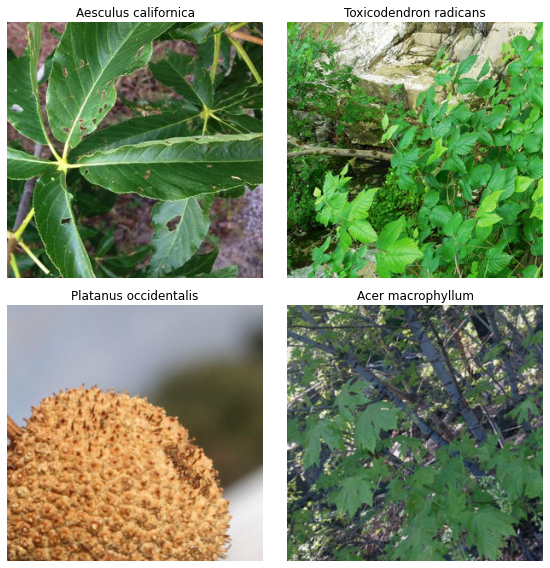

In [4]:
data.show_batch(rows=2)

### Load model architecture

`arcgis.learn` provides capabilities to determine class of each feature in the form of `FeatureClassifier` model. To have an in-depth information about it's working and usage, have a look at this [link](https://developers.arcgis.com/python/guide/how-feature-categorization-works/).  

As we are training a model to be deployed on mobile phones, we must define the model with "tensorflow" backend. In order to do that we can set the parameter `backend` to "tensorflow". 

In [ ]:
model = FeatureClassifier(data, backbone='MobileNetV2', backend='tensorflow')

### Find an optimal learning rate

Learning rate is one of the most important hyperparameters in model training. Here, we explore a range of learning rates to guide us to choose the best one. `arcgis.learn` leverages fast.ai’s learning rate finder to find an optimum learning rate for training models. We can use the `lr_find()` method to find the optimum learning rate at which can train a robust model fast enough.

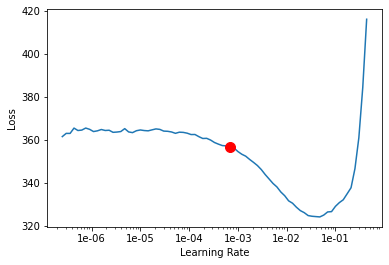

0.000691831

In [6]:
model.lr_find()

Based on the learning rate plot above, we can see that the learning rate suggested by `lr_find()` for our training data is 0.000691831. We can use it to train our model. In the latest release of `arcgis.learn` we can train models without even specifying a learning rate. That internally uses the learning rate finder to find an optimal learning rate and uses it.

### Fit the model 

To train the model, we use the `fit()` method. To start, we will use 25 epochs to train our model. Epoch defines how many times model is exposed to entire training set.

In [7]:
model.fit(25, 0.000691831)

### Visualize results in validation set 

The code below will pick a few random samples and show us ground truth and respective model predictions side by side. This allows us to validate the results of your model in the notebook itself. Once satisfied, we can save the model and use it further in our workflow.

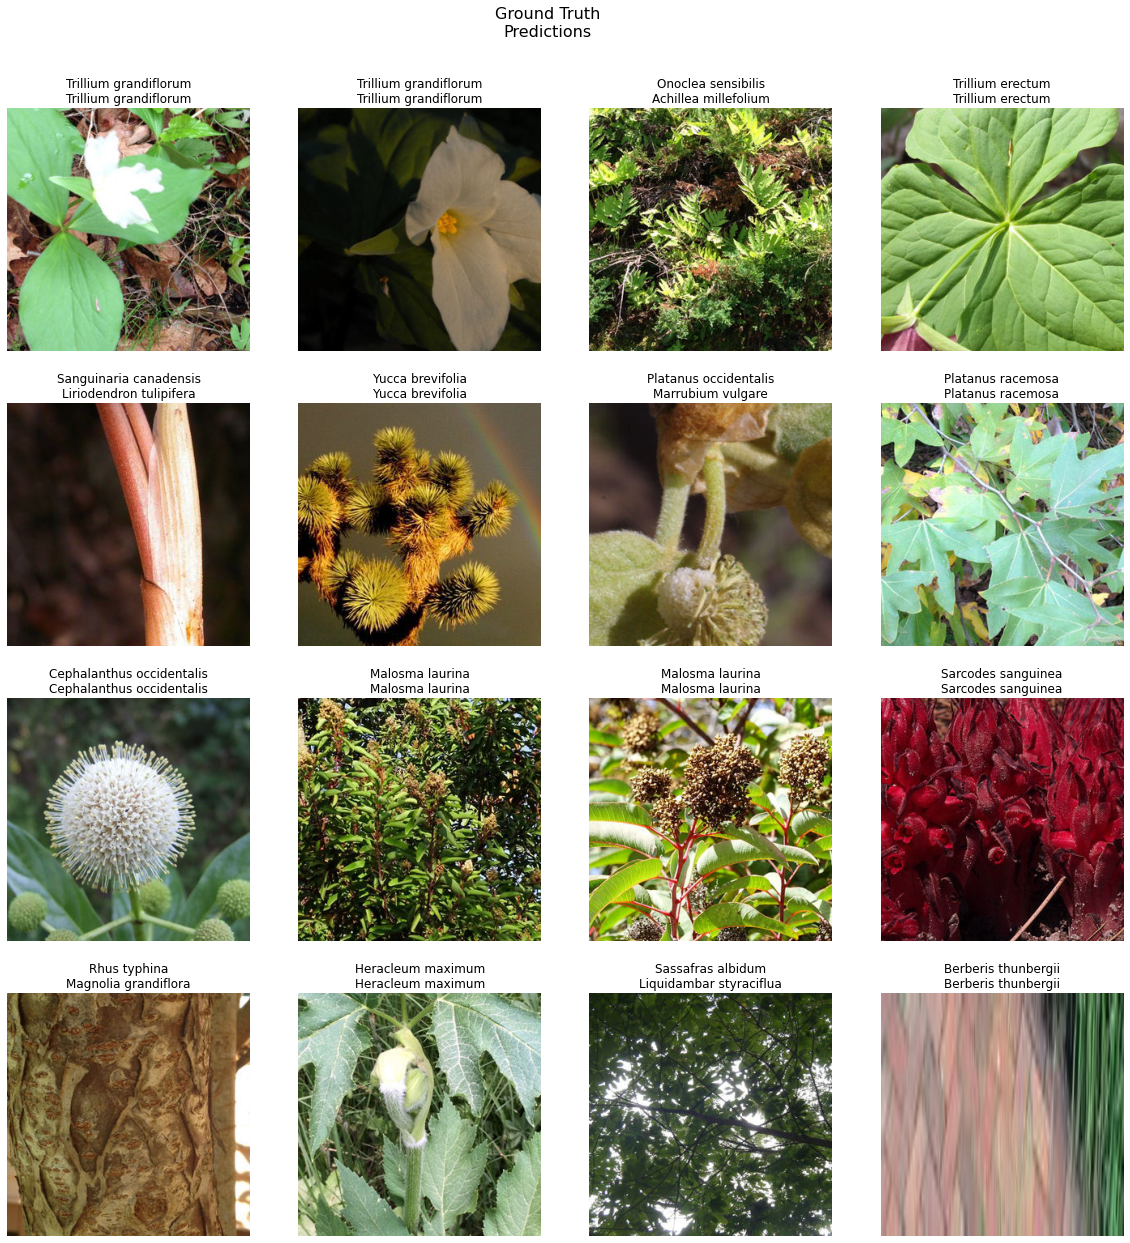

In [8]:
model.show_results(rows=4, thresh=0.2)

Here a subset of ground truth from training data is visualized along with the predictions from the model. As we can see, our model is performing well and the predictions are comparable to the ground truth.

### Save the model

We will save the model which we trained in a tf-lite format.

We will use the `save()` method to save the trained model. By default, it will be saved to the 'models' sub-folder within our training data folder.

In [ ]:
model.save('Plant-identification-25-tflite', framework="tflite")

## Deploy model

The tf-lite model can now be deployed on mobile devices. Survey123 for ArcGIS has an upcoming feature that integrates such tf-lite models. To learn more on deploying this model in Survey123, join the [Early Adopter Community](https://www.esri.com/en-us/early-adopter) to access the Survey123 private beta.

## References 

[1] http://otmedia.lirmm.fr/LifeCLEF/PlantCLEF2017/TrainPackages/PlantCLEF2017Train1EOL.tar.gz<br>
[2] http://otmedia.lirmm.fr/LifeCLEF/PlantCLEF2017/TrainPackages/PlantCLEF2017Train2Web.tar.gz<br>
[3] http://otmedia.lirmm.fr/LifeCLEF/PlantCLEF2015/Packages/TrainingPackage/PlantCLEF2015TrainingData.tar.gz   